<a href="https://colab.research.google.com/github/aleks-haksly/AI/blob/main/L1/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение в нейронные сети, Лекция 1

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential # импортируем класс создания модели (последовательный)
from keras.layers import Dense # импортируем полносвязные слои
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
model = Sequential()
# 1. добавляем полносвязный слой с 2 входами и 2 выходами
model.add(Dense(2,input_dim=2, use_bias=False))
# 2. далее еще один слой число входов авто, число выходов 1.
model.add(Dense(1, use_bias=False))

In [ ]:
#use_bias=True значит, что outputs = inputs * weights + вектор bias. В нашем случае мы это не спользуем и ветор bias не обучаем

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Non-trainable params: параметры, которые не требуется изменять при обучении модели

In [ ]:
# При создании модели веса генерируются автоматически случайным образом.
weights = model.get_weights()
weights

[array([[ 0.5199573 , -0.44582796],
        [-0.20224261,  1.2053028 ]], dtype=float32),
 array([[-0.6222041 ],
        [-0.06390941]], dtype=float32)]

In [ ]:
# Также их можно установить вручную
w1 = 0.42
w2 = 0.15
w3 = -0.56
w4 = 0.83
w5 = 0.93
w6 = 0.02
# Веса в 1 и 2 слоях
L1 = np.array([[w1, w3],[w2, w4]])
L2 = np.array([[w5,], [w6,]])
model.set_weights([L1, L2])

In [ ]:
model.get_weights()

[array([[ 0.42, -0.56],
        [ 0.15,  0.83]], dtype=float32),
 array([[0.93],
        [0.02]], dtype=float32)]

In [ ]:
# Положим входные значения равны:
X1 = 7.2
X2 = -5.8

In [ ]:
# создаем входной набор данных
x_train  = np.expand_dims(np.array([X1, X2]), 0) # ~reshape чтобы был двумерный набор, для этого добавляем ось
x_train

array([[ 7.2, -5.8]])

In [ ]:
model.predict(x_train) # Предикт от модели, также он просто равен произведению матриц

1/1 [==============================] - 0s 126ms/step


array([[1.8262998]], dtype=float32)

In [ ]:
np.matmul(np.array([X1, X2]), L1) # То же, что и np.array([X1, X2]) @ L1

array([ 2.154, -8.846])

In [ ]:
np.array([X1, X2]) @ L1 @ L2 # Предикт от модели, также он просто равен произведению матриц

array([1.8263])

### Функция активации ###
Если бы функция активации нейронов была бы линейной, но можно было выполнить преобразование: Output = Input * W1 * W2 при этом $\exists$ W3 -> W3 = W1 * W2. То есть использование нескольких слоев не имело бы смысла. Но она не линейна.
Чаще всего используют ф-ции:

In [ ]:
def sigmoid(x: float) -> float:
  return 1 / (1 + np.exp(-x))

<Axes: >

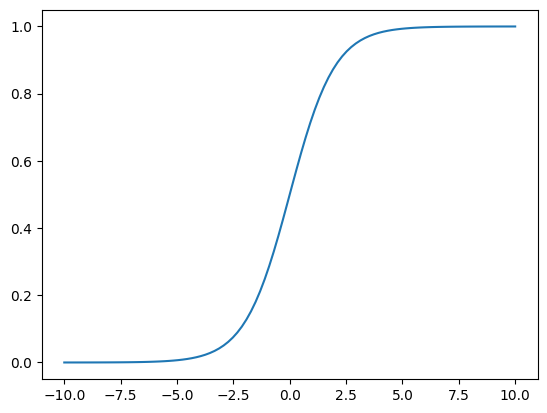

In [ ]:
# sigmoid сигмоид
sns.lineplot(x=np.linspace(-10, 10, 100), y = [sigmoid(x) for x in np.linspace(-10, 10, 100)])

<Axes: >

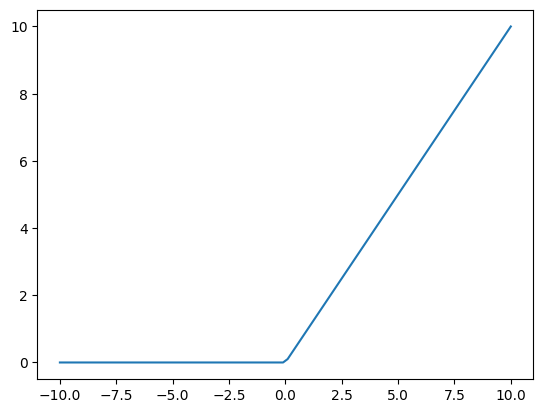

In [ ]:
#relu линейный выпрямитель ! самая быстрая
def relu(x: float) -> float:
  return np.clip(x, 0, np.inf)
sns.lineplot(x=np.linspace(-10, 10, 100), y = [relu(x) for x in np.linspace(-10, 10, 100)])

<Axes: >

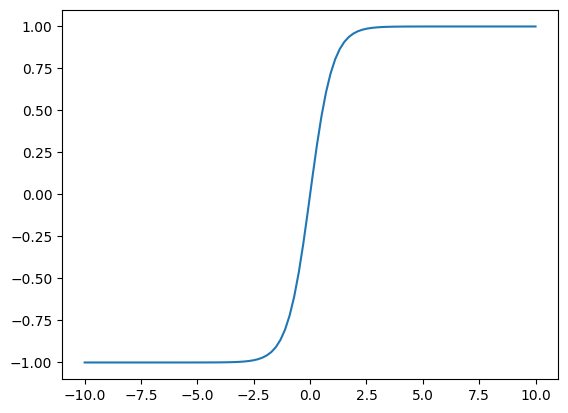

In [ ]:
# tanh гиперболический тангенс
def tanh(x: float) -> float:
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
sns.lineplot(x=np.linspace(-10, 10, 100), y = [tanh(x) for x in np.linspace(-10, 10, 100)])

In [ ]:
#softmax

In [ ]:
# Проверим, как руками посчитать с функциями активации:

In [ ]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(2, input_dim=2, activation='sigmoid', use_bias=False))
model_sigmoid.add(Dense(1, activation='sigmoid', use_bias=False))

In [ ]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 4         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Используем те же веса
model_sigmoid.set_weights([L1, L2])
model_sigmoid.get_weights()

[array([[ 0.42, -0.56],
        [ 0.15,  0.83]], dtype=float32),
 array([[0.93],
        [0.02]], dtype=float32)]

In [ ]:
# Результат модели
model_sigmoid.predict(x_train)

1/1 [==============================] - 0s 33ms/step


array([[0.6970569]], dtype=float32)

In [ ]:
# Считаем руками ответ тот же:
sigmoid(sigmoid(x_train @ L1) @ L2)

array([[0.69705687]])

In [ ]:
# считаем руками relu
# Считаем руками ответ тот же, что при activation='relu':
relu(relu(x_train @ L1) @ L2)

array([[2.00322]])

In [ ]:
# считаем руками tanh
# Считаем руками ответ тот же, что при activation='tanh':
tanh(tanh(x_train @ L1) @ L2)

array([[0.7090626]])

In [ ]:
# кроме того, в activation= можно передавать любую свою ф-цию

### ![Screenshot 2024-05-09 172543.png](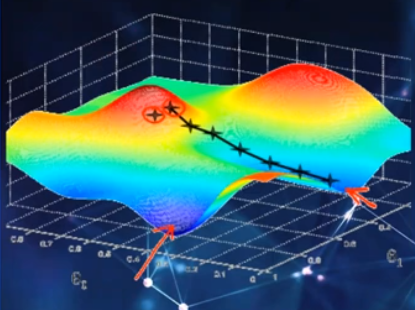![neHMYtyfyYS9MvT97[1]](data:application/octet-stream;base64,PCFkb2N0eXBlIGh0bWw+PGh0bWwgbGFuZz0iZW4tVVMiIGRpcj0ibHRyIj48aGVhZD48YmFzZSBocmVmPSJodHRwczovL3Bob3Rvcy5nb29nbGUuY29tLyI+PGxpbmsgcmVmPSJwcmVjb25uZWN0IiBocmVmPSIvL3d3dy5nc3RhdGljLmNvbSI+PG1ldGEgbmFtZT0icmVmZXJyZXIiIGNvbnRlbnQ9Im9yaWdpbiI+PHNjcmlwdCBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+d2luZG93WydwcENvbmZpZyddID0ge3Byb2R1Y3ROYW1lOiAnUGhvdG9zVWknLCBkZWxldGVJc0VuZm9yY2VkOiAgdHJ1ZSAsIHNlYWxJc0VuZm9yY2VkOiAgdHJ1ZSAsIGhlYXJ0YmVhdFJhdGU6ICAwLjUgLCBwZXJpb2RpY1JlcG9ydGluZ1JhdGVNaWxsaXM6ICA2MDAwMC4wICwgZGlzYWJsZUFsbFJlcG9ydGluZzogIGZhbHNlIH07KGZ1bmN0aW9uKCl7J3VzZSBzdHJpY3QnO2Z1bmN0aW9uIGsoYSl7dmFyIGI9MDtyZXR1cm4gZnVuY3Rpb24oKXtyZXR1cm4gYjxhLmxlbmd0aD97ZG9uZTohMSx2YWx1ZTphW2IrK119Ontkb25lOiEwfX19dmFyIGw9ImZ1bmN0aW9uIj09dHlwZW9mIE9iamVjdC5kZWZpbmVQcm9wZXJ0aWVzP09iamVjdC5kZWZpbmVQcm9wZXJ0eTpmdW5jdGlvbihhLGIsYyl7aWYoYT09QXJyYXkucHJvdG90eXBlfHxhPT1PYmplY3QucHJvdG90eXBlKXJldHVybiBhO2FbYl09Yy52YWx1ZTtyZXR1cm4gYX07CmZ1bmN0aW9uIG0oYSl7YT1bIm9iamVjdCI9PXR5cGVvZiBnbG9iYWxUaGlzJiZnbG9iYWxUaGlzLGEsIm9iamVjdCI9PXR5cGVvZiB3aW5kb3cmJndpbmRvdywib2JqZWN0Ij09dHlwZW9mIHNlbGYmJnNlbGYsIm9iamVjdCI9PXR5cGVvZiBnbG9iYWwmJmdsb2JhbF07Zm9yKHZhciBiPTA7YjxhLmxlbmd0aDsrK2Ipe3ZhciBjPWFbYl07aWYoYyYmYy5NYXRoPT1NYXRoKXJldHVybiBjfXRocm93IEVycm9yKCJDYW5ub3QgZmluZCBnbG9iYWwgb2JqZWN0Iik7fXZhciBuPW0odGhpcyk7ZnVuY3Rpb24gcChhLGIpe2lmKGIpYTp7dmFyIGM9bjthPWEuc3BsaXQoIi4iKTtmb3IodmFyIGQ9MDtkPGEubGVuZ3RoLTE7ZCsrKXt2YXIgZT1hW2RdO2lmKCEoZSBpbiBjKSlicmVhayBhO2M9Y1tlXX1hPWFbYS5sZW5ndGgtMV07ZD1jW2FdO2I9YihkKTtiIT1kJiZudWxsIT1iJiZsKGMsYSx7Y29uZmlndXJhYmxlOiEwLHdyaXRhYmxlOiEwLHZhbHVlOmJ9KX19CmZ1bmN0aW9uIHEoYSl7dmFyIGI9InVuZGVmaW5lZCIhPXR5cGVvZiBTeW1ib2wmJlN5bWJvbC5pdGVyYXRvciYmYVtTeW1ib2wuaXRlcmF0b3JdO2lmKGIpcmV0dXJuIGIuY2FsbChhKTtpZigibnVtYmVyIj09dHlwZW9mIGEubGVuZ3RoKXJldHVybntuZXh0OmsoYSl9O3Rocm93IEVycm9yKFN0cmluZyhhKSsiIGlzIG5vdCBhbiBpdGVyYWJsZSBvciBBcnJheUxpa2UiKTt9cCgiT2JqZWN0LmlzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyl7cmV0dXJuIGI9PT1jPzAhPT1ifHwxL2I9PT0xL2M6YiE9PWImJmMhPT1jfX0pOwpwKCJBcnJheS5wcm90b3R5cGUuaW5jbHVkZXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjKXt2YXIgZD10aGlzO2QgaW5zdGFuY2VvZiBTdHJpbmcmJihkPVN0cmluZyhkKSk7dmFyIGU9ZC5sZW5ndGg7Yz1jfHwwO2ZvcigwPmMmJihjPU1hdGgubWF4KGMrZSwwKSk7YzxlO2MrKyl7dmFyIGY9ZFtjXTtpZihmPT09Ynx8T2JqZWN0LmlzKGYsYikpcmV0dXJuITB9cmV0dXJuITF9fSk7CnAoIlN0cmluZy5wcm90b3R5cGUuaW5jbHVkZXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjKXtpZihudWxsPT10aGlzKXRocm93IG5ldyBUeXBlRXJyb3IoIlRoZSAndGhpcycgdmFsdWUgZm9yIFN0cmluZy5wcm90b3R5cGUuaW5jbHVkZXMgbXVzdCBub3QgYmUgbnVsbCBvciB1bmRlZmluZWQiKTtpZihiIGluc3RhbmNlb2YgUmVnRXhwKXRocm93IG5ldyBUeXBlRXJyb3IoIkZpcnN0IGFyZ3VtZW50IHRvIFN0cmluZy5wcm90b3R5cGUuaW5jbHVkZXMgbXVzdCBub3QgYmUgYSByZWd1bGFyIGV4cHJlc3Npb24iKTtyZXR1cm4tMSE9PXRoaXMuaW5kZXhPZihiLGN8fDApfX0pO2Z1bmN0aW9uIHIoYSxiLGMpe2EoImh0dHBzOi8vY3NwLndpdGhnb29nbGUuY29tL2NzcC9wcm90by8iK2VuY29kZVVSSUNvbXBvbmVudChiKSxKU09OLnN0cmluZ2lmeShjKSl9ZnVuY3Rpb24gdCgpe3ZhciBhO2lmKG51bGw9PShhPXdpbmRvdy5wcENvbmZpZyk/MDphLmRpc2FibGVBbGxSZXBvcnRpbmcpcmV0dXJuIGZ1bmN0aW9uKCl7fTt2YXIgYixjLGQsZTtyZXR1cm4gbnVsbCE9KGU9bnVsbD09KGI9d2luZG93KT92b2lkIDA6bnVsbD09KGM9Yi5uYXZpZ2F0b3IpP3ZvaWQgMDpudWxsPT0oZD1jLnNlbmRCZWFjb24pP3ZvaWQgMDpkLmJpbmQobmF2aWdhdG9yKSk/ZTp1fWZ1bmN0aW9uIHUoYSxiKXt2YXIgYz1uZXcgWE1MSHR0cFJlcXVlc3Q7Yy5vcGVuKCJQT1NUIixhKTtjLnNlbmQoYil9CmZ1bmN0aW9uIHYoKXt2YXIgYT1udWxsPT0odz1PYmplY3QucHJvdG90eXBlKT92b2lkIDA6dy5fX2xvb2t1cEdldHRlcl9fKCJfX3Byb3RvX18iKSxiPXgsYz15O3JldHVybiBmdW5jdGlvbigpe3ZhciBkPWEuY2FsbCh0aGlzKSxlLGYsZyxoO3IoYyxiLHt0eXBlOiJBQ0NFU1NfR0VUIixvcmlnaW46bnVsbCE9KGY9d2luZG93LmxvY2F0aW9uLm9yaWdpbik/ZjoidW5rbm93biIscmVwb3J0OntjbGFzc05hbWU6bnVsbCE9KGc9bnVsbD09ZD92b2lkIDA6bnVsbD09KGU9ZC5jb25zdHJ1Y3Rvcik/dm9pZCAwOmUubmFtZSk/ZzoidW5rbm93biIsc3RhY2tUcmFjZTpudWxsIT0oaD1FcnJvcigpLnN0YWNrKT9oOiJ1bmtub3duIn19KTtyZXR1cm4gZH19CmZ1bmN0aW9uIHooKXt2YXIgYT1udWxsPT0oQT1PYmplY3QucHJvdG90eXBlKT92b2lkIDA6QS5fX2xvb2t1cFNldHRlcl9fKCJfX3Byb3RvX18iKSxiPXgsYz15O3JldHVybiBmdW5jdGlvbihkKXtkPWEuY2FsbCh0aGlzLGQpO3ZhciBlLGYsZyxoO3IoYyxiLHt0eXBlOiJBQ0NFU1NfU0VUIixvcmlnaW46bnVsbCE9KGY9d2luZG93LmxvY2F0aW9uLm9yaWdpbik/ZjoidW5rbm93biIscmVwb3J0OntjbGFzc05hbWU6bnVsbCE9KGc9bnVsbD09ZD92b2lkIDA6bnVsbD09KGU9ZC5jb25zdHJ1Y3Rvcik/dm9pZCAwOmUubmFtZSk/ZzoidW5rbm93biIsc3RhY2tUcmFjZTpudWxsIT0oaD1FcnJvcigpLnN0YWNrKT9oOiJ1bmtub3duIn19KTtyZXR1cm4gZH19ZnVuY3Rpb24gQihhLGIpe0MoYS5wcm9kdWN0TmFtZSxiKTtzZXRJbnRlcnZhbChmdW5jdGlvbigpe0MoYS5wcm9kdWN0TmFtZSxiKX0sYS5wZXJpb2RpY1JlcG9ydGluZ1JhdGVNaWxsaXMpfQp2YXIgRD0iY29uc3RydWN0b3IgX19kZWZpbmVHZXR0ZXJfXyBfX2RlZmluZVNldHRlcl9fIGhhc093blByb3BlcnR5IF9fbG9va3VwR2V0dGVyX18gX19sb29rdXBTZXR0ZXJfXyBpc1Byb3RvdHlwZU9mIHByb3BlcnR5SXNFbnVtZXJhYmxlIHRvU3RyaW5nIHZhbHVlT2YgX19wcm90b19fIHRvTG9jYWxlU3RyaW5nIHhfbmdmbl94Ii5zcGxpdCgiICIpLEU9RC5jb25jYXQsRj1uYXZpZ2F0b3IudXNlckFnZW50Lm1hdGNoKC9GaXJlZm94XC8oWzAtOV0rKVwuLyksRz0oIUZ8fDI+Ri5sZW5ndGg/MDo3NT5OdW1iZXIoRlsxXSkpP1sidG9Tb3VyY2UiXTpbXSxIO2lmKEcgaW5zdGFuY2VvZiBBcnJheSlIPUc7ZWxzZXtmb3IodmFyIEk9cShHKSxKLEs9W107IShKPUkubmV4dCgpKS5kb25lOylLLnB1c2goSi52YWx1ZSk7SD1LfXZhciBMPUUuY2FsbChELEgpLE09W107CmZ1bmN0aW9uIEMoYSxiKXtmb3IodmFyIGM9W10sZD1xKE9iamVjdC5nZXRPd25Qcm9wZXJ0eU5hbWVzKE9iamVjdC5wcm90b3R5cGUpKSxlPWQubmV4dCgpOyFlLmRvbmU7ZT1kLm5leHQoKSllPWUudmFsdWUsTC5pbmNsdWRlcyhlKXx8TS5pbmNsdWRlcyhlKXx8Yy5wdXNoKGUpO2U9T2JqZWN0LnByb3RvdHlwZTtkPVtdO2Zvcih2YXIgZj0wO2Y8Yy5sZW5ndGg7ZisrKXt2YXIgZz1jW2ZdO2RbZl09e25hbWU6ZyxkZXNjcmlwdG9yOk9iamVjdC5nZXRPd25Qcm9wZXJ0eURlc2NyaXB0b3IoT2JqZWN0LnByb3RvdHlwZSxnKSx0eXBlOnR5cGVvZiBlW2ddfX1pZigwIT09ZC5sZW5ndGgpe2M9cShkKTtmb3IoZT1jLm5leHQoKTshZS5kb25lO2U9Yy5uZXh0KCkpTS5wdXNoKGUudmFsdWUubmFtZSk7dmFyIGg7cihiLGEse3R5cGU6IlNFQUwiLG9yaWdpbjpudWxsIT0oaD13aW5kb3cubG9jYXRpb24ub3JpZ2luKT9oOiJ1bmtub3duIixyZXBvcnQ6e2Jsb2NrZXJzOmR9fSl9fTt2YXIgTj1NYXRoLnJhbmRvbSgpLE89dCgpLFA9d2luZG93LnBwQ29uZmlnO1AmJihQLmRpc2FibGVBbGxSZXBvcnRpbmd8fFAuZGVsZXRlSXNFbmZvcmNlZCYmUC5zZWFsSXNFbmZvcmNlZHx8TjxQLmhlYXJ0YmVhdFJhdGUmJnIoTyxQLnByb2R1Y3ROYW1lLHtvcmlnaW46d2luZG93LmxvY2F0aW9uLm9yaWdpbix0eXBlOiJIRUFSVEJFQVQifSkpO3ZhciB5PXQoKSxRPXdpbmRvdy5wcENvbmZpZztpZihRKWlmKFEuZGVsZXRlSXNFbmZvcmNlZClkZWxldGUgT2JqZWN0LnByb3RvdHlwZS5fX3Byb3RvX187ZWxzZSBpZighUS5kaXNhYmxlQWxsUmVwb3J0aW5nKXt2YXIgeD1RLnByb2R1Y3ROYW1lO3RyeXt2YXIgdyxBO09iamVjdC5kZWZpbmVQcm9wZXJ0eShPYmplY3QucHJvdG90eXBlLCJfX3Byb3RvX18iLHtlbnVtZXJhYmxlOiExLGdldDp2KCksc2V0OnooKX0pfWNhdGNoKGEpe319CihmdW5jdGlvbigpe3ZhciBhPXQoKSxiPXdpbmRvdy5wcENvbmZpZztiJiYoYi5zZWFsSXNFbmZvcmNlZD9PYmplY3Quc2VhbChPYmplY3QucHJvdG90eXBlKTpiLmRpc2FibGVBbGxSZXBvcnRpbmd8fCgibG9hZGluZyIhPT1kb2N1bWVudC5yZWFkeVN0YXRlP0IoYixhKTpkb2N1bWVudC5hZGRFdmVudExpc3RlbmVyKCJET01Db250ZW50TG9hZGVkIixmdW5jdGlvbigpe0IoYixhKX0pKSl9KSgpO30pLmNhbGwodGhpcyk7Cjwvc2NyaXB0PjxsaW5rIHJlbD0iY2Fub25pY2FsIiBocmVmPSJodHRwczovL3Bob3Rvcy5nb29nbGUuY29tL3NoYXJlL0FGMVFpcE40VVJnN1NreXhadUJVVDZRcnJvVVB3UFVGWjJtcTlGZXlya3VGRnEwNC1QdG5tQW9jTlpJR1hMbXJpdFlfeWc/a2V5PU4yVlRSVzFzU0VoRU0wNVNSbmhrTld4WFVVMTVibWd6VnpsVVZrbDMiPjxtZXRhIG5hbWU9InZpZXdwb3J0IiBjb250ZW50PSJ3aWR0aD1kZXZpY2Utd2lkdGgsaW5pdGlhbC1zY2FsZT0xLG1pbmltdW0tc2NhbGU9MSxtYXhpbXVtLXNjYWxlPTEsdXNlci1zY2FsYWJsZT1ubyxtaW5pbWFsLXVpLHZpZXdwb3J0LWZpdD1jb3ZlciI+PG1ldGEgbmFtZT0idHdpdHRlcjphcHA6aWQ6Z29vZ2xlcGxheSIgY29udGVudD0iY29tLmdvb2dsZS5hbmRyb2lkLmFwcHMucGhvdG9zIj48bWV0YSBuYW1lPSJ0d2l0dGVyOmFwcDppZDppcGhvbmUiIGNvbnRlbnQ9ImlkOTYyMTk0NjA4Ij48bWV0YSBuYW1lPSJ0d2l0dGVyOmFwcDppZDppcGFkIiBjb250ZW50PSJpZDk2MjE5NDYwOCI+PG1ldGEgbmFtZT0ibW9iaWxlLXdlYi1hcHAtY2FwYWJsZSIgY29udGVudD0ieWVzIj48bWV0YSBuYW1lPSJhcHBsZS1tb2JpbGUtd2ViLWFwcC1jYXBhYmxlIiBjb250ZW50PSJ5ZXMiPjxtZXRhIG5hbWU9ImFwcGxpY2F0aW9uLW5hbWUiIGNvbnRlbnQ9Ikdvb2dsZSBQaG90b3MiPjxtZXRhIG5hbWU9ImFwcGxlLW1vYmlsZS13ZWItYXBwLXRpdGxlIiBjb250ZW50PSJHb29nbGUgUGhvdG9zIj48bWV0YSBuYW1lPSJhcHBsZS1tb2JpbGUtd2ViLWFwcC1zdGF0dXMtYmFyLXN0eWxlIiBjb250ZW50PSJibGFjayI+PG1ldGEgbmFtZT0idGhlbWUtY29sb3IiIGNvbnRlbnQ9IiNGRkZGRkYiPjxtZXRhIG5hbWU9Im1zYXBwbGljYXRpb24tdGFwLWhpZ2hsaWdodCIgY29udGVudD0ibm8iPjxsaW5rIHJlbD0icHJlY29ubmVjdCIgaHJlZj0iLy9hcGlzLmdvb2dsZS5jb20iPjxsaW5rIHJlbD0icHJlY29ubmVjdCIgaHJlZj0iLy9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIj48bGluayByZWw9InByZWNvbm5lY3QiIGhyZWY9Ii8vbGgzLmdvb2dsZS5jb20iPjxsaW5rIHJlbD0icHJlY29ubmVjdCIgaHJlZj0iLy9mb250cy5nb29nbGVhcGlzLmNvbSI+PGxpbmsgcmVsPSJwcmVjb25uZWN0IiBocmVmPSIvL2ZvbnRzLmdzdGF0aWMuY29tIj48bGluayByZWw9InByZWNvbm5lY3QiIGhyZWY9Ii8vb2dzLmdvb2dsZS5jb20iPjxsaW5rIHJlbD0icHJlY29ubmVjdCIgaHJlZj0iLy9wbGF5Lmdvb2dsZS5jb20iPjxsaW5rIHJlbD0icHJlY29ubmVjdCIgaHJlZj0iLy9zc2wuZ3N0YXRpYy5jb20iPjxsaW5rIHJlbD0icHJlY29ubmVjdCIgaHJlZj0iLy93d3cuZ29vZ2xlLmNvbSI+PGxpbmsgcmVsPSJwcmVjb25uZWN0IiBocmVmPSIvL3d3dy5nc3RhdGljLmNvbSI+PGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2ZvbnRzLmdvb2dsZWFwaXMuY29tL2NzczI/ZmFtaWx5PUdvb2dsZStTYW5zK1RleHQ6d2dodEA0MDA7NTAwOzcwMCI+PGxpbmsgcmVsPSJtYW5pZmVzdCIgY3Jvc3NvcmlnaW49InVzZS1jcmVkZW50aWFscyIgaHJlZj0iXy9QaG90b3NVaS9tYW5pZmVzdC5qc29uIj48bGluayByZWw9ImhvbWUiIGhyZWY9Ii8/bGZocz0yIj48bGluayByZWw9Im1zYXBwbGljYXRpb24tc3RhcnR1cmwiIGhyZWY9Ii8/bGZocz0yIj48bGluayByZWw9Imljb24iIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8xeC9waG90b3NfNTEyZHAucG5nIiBzaXplcz0iNTEyeDUxMiI+PGxpbmsgcmVsPSJhcHBsZS10b3VjaC1pY29uLXByZWNvbXBvc2VkIiBocmVmPSIvL3NzbC5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2xvZ28vMXgvcGhvdG9zXzUxMmRwLnBuZyIgc2l6ZXM9IjUxMng1MTIiPjxsaW5rIHJlbD0ibXNhcHBsaWNhdGlvbi1zcXVhcmU1MTJ4NTEybG9nbyIgaHJlZj0iLy9zc2wuZ3N0YXRpYy5jb20vc29jaWFsL3Bob3Rvc3VpL2ltYWdlcy9sb2dvLzF4L3Bob3Rvc181MTJkcC5wbmciIHNpemVzPSI1MTJ4NTEyIj48bGluayByZWw9Imljb24iIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8yeC9waG90b3NfOTZkcC5wbmciIHNpemVzPSIxOTJ4MTkyIj48bGluayByZWw9ImFwcGxlLXRvdWNoLWljb24tcHJlY29tcG9zZWQiIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8yeC9waG90b3NfOTZkcC5wbmciIHNpemVzPSIxOTJ4MTkyIj48bGluayByZWw9Im1zYXBwbGljYXRpb24tc3F1YXJlMTkyeDE5MmxvZ28iIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8yeC9waG90b3NfOTZkcC5wbmciIHNpemVzPSIxOTJ4MTkyIj48bGluayByZWw9Imljb24iIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8yeC9waG90b3NfNjRkcC5wbmciIHNpemVzPSIxMjh4MTI4Ij48bGluayByZWw9ImFwcGxlLXRvdWNoLWljb24tcHJlY29tcG9zZWQiIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8yeC9waG90b3NfNjRkcC5wbmciIHNpemVzPSIxMjh4MTI4Ij48bGluayByZWw9Im1zYXBwbGljYXRpb24tc3F1YXJlMTI4eDEyOGxvZ28iIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8yeC9waG90b3NfNjRkcC5wbmciIHNpemVzPSIxMjh4MTI4Ij48bGluayByZWw9Imljb24iIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8xeC9waG90b3NfOTZkcC5wbmciIHNpemVzPSI5Nng5NiI+PGxpbmsgcmVsPSJhcHBsZS10b3VjaC1pY29uLXByZWNvbXBvc2VkIiBocmVmPSIvL3NzbC5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2xvZ28vMXgvcGhvdG9zXzk2ZHAucG5nIiBzaXplcz0iOTZ4OTYiPjxsaW5rIHJlbD0ibXNhcHBsaWNhdGlvbi1zcXVhcmU5Nng5NmxvZ28iIGhyZWY9Ii8vc3NsLmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvbG9nby8xeC9waG90b3NfOTZkcC5wbmciIHNpemVzPSI5Nng5NiI+PGxpbmsgcmVsPSJpY29uIiBocmVmPSIvL3NzbC5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2xvZ28vMXgvcGhvdG9zXzY0ZHAucG5nIiBzaXplcz0iNjR4NjQiPjxsaW5rIHJlbD0iYXBwbGUtdG91Y2gtaWNvbi1wcmVjb21wb3NlZCIgaHJlZj0iLy9zc2wuZ3N0YXRpYy5jb20vc29jaWFsL3Bob3Rvc3VpL2ltYWdlcy9sb2dvLzF4L3Bob3Rvc182NGRwLnBuZyIgc2l6ZXM9IjY0eDY0Ij48bGluayByZWw9Im1zYXBwbGljYXRpb24tc3F1YXJlNjR4NjRsb2dvIiBocmVmPSIvL3NzbC5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2xvZ28vMXgvcGhvdG9zXzY0ZHAucG5nIiBzaXplcz0iNjR4NjQiPjxzY3JpcHQgZGF0YS1pZD0iX2dkIiBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+d2luZG93LldJWl9nbG9iYWxfZGF0YSA9IHsiQjBYSktiIjoiJS5ALlsxLDJdXSIsIkRwaW1HZiI6ZmFsc2UsIkVQMXlrZCI6WyIvXy8qIiwiL2FjY291bnRzLyoiLCIvcm9ib3RzLnR4dCJdLCJGMlJ5MmQiOiIlLkAubnVsbCxudWxsLG51bGwsXCIvXy9zY3Mvc29jaWFsLXN0YXRpYy9fL2pzL2tcXHUwMDNkYm9xLlBob3Rvc0VkaXRvcldhc21Xb3JrZXJXZWIuZW5fVVMuc2N3SEF3MVdETjguZXM1Lk8vYW1cXHUwMDNkQnBNQkl3L2RcXHUwMDNkMS9yc1xcdTAwM2RBR0xUY0NPUzdqNEp3OWo4ZzNjLVFRYTk1MTRQLWhPSEJnL21cXHUwMDNkZXd3bT93bGlcXHUwMDNkUGhvdG9zRWRpdG9yV2FzbVdvcmtlcldlYi5kQl9fbzU3OTFCSS5jcmVhdGVQaG90b3NFZGl0b3JQcmltYXJ5TW9kdWxlTm9TaW1kLk86O1Bob3Rvc0VkaXRvcldhc21Xb3JrZXJXZWIuUWRLN2NPRWhGenMuY3JlYXRlUGhvdG9zRWRpdG9yUHJpbWFyeU1vZHVsZVNpbWQuTzo7XCJdIiwiRmRyRkplIjoiMzgwNzI3MDQ1NTM0MzIzNjc0NyIsIkltNmNtZiI6Ii9fL1Bob3Rvc1VpIiwiSmJSYnliIjoibGgzLmdvb2dsZS5jb20iLCJLMkN4YyI6WzQ4NzkzNzY4LDQ4NjYxMzE2LDQ4ODg4Mjc1LDkzODAzNzc0LDQ3OTUwNzM4LDQ4ODI0MjIxLDQ4Njg1MzQyLDQ4NzIzMDQwLDQ4NzY2MTE1LDQ1NzA2Njg1LDQ4Njc5NzQ3LDkzODcwMjQ1LDQ4ODAzMzQzLDkzODY2Njc4LDQ4NzE2NTM3LDQ3ODQ2OTQ3LDQ4NDk2NDA1LDQ4Njg0MDUyLDk3NTA2OTY0LDkzODM3NDI5LDk3NTkzOTcxLDQ4ODg2MDMxLDQ4Njc1ODg1LDQ4NTg2NjY3LDkzODQ0OTU0LDkzODk3ODQyLDQ4ODY2MjU5LDQ4NDI4MzM0LDQ3OTYwNDM0LDQ4ODk0Njg4LDQ4NzQ2NDc1LDk3NDk3NDY3LDQ3ODgwMjUwLDQ4Nzc5OTAyXSwiTFZJWFhiIjoxLCJMb1F2N2UiOmZhbHNlLCJNVDdmOWIiOltdLCJNdUpXamQiOmZhbHNlLCJQUHVoeGQiOiJsaDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwiUXJ0eEsiOiIiLCJTMDZHcmIiOiIiLCJTNmxabCI6MTE2NTE0NjcyLCJTOFp0d2YiOiIlLkAubnVsbCxudWxsLG51bGwsXCJodHRwczovL3BheW1lbnRzLmdvb2dsZS5jb20vcGF5bWVudHMvdjQvanMvaW50ZWdyYXRvci5qc1wiXSIsIlRTRHRWIjoiJS5ALltbbnVsbCxbWzQ1NDUzNjYwLDUwLG51bGwsbnVsbCxudWxsLG51bGwsXCJxVU9nbWJcIl0sWzQ1NDUzNjc5LDMwMDAwLG51bGwsbnVsbCxudWxsLG51bGwsXCJTbHpSQ2NcIl0sWzQ1NDUzNzEyLDUwMCxudWxsLG51bGwsbnVsbCxudWxsLFwicFZ5bWdmXCJdLFs0NTQ1MzY5OCwzMDAsbnVsbCxudWxsLG51bGwsbnVsbCxcInd4MmRHY1wiXSxbNDU0NTM3NTUsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIktmZERwY1wiXSxbNDU0NTM3MDgsNTAwLG51bGwsbnVsbCxudWxsLG51bGwsXCJHMnRYcWJcIl0sWzQ1NDUzNjgzLG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcImNXNFpaZVwiXSxbNDU0NTM2NDMsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIm1vbFRmXCJdLFs0NTQ1MzY4NSxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiSGNFOTdlXCJdLFs0NTQ1MzY2MSw0LG51bGwsbnVsbCxudWxsLG51bGwsXCJPYmQ3TFwiXSxbNDU0NTM2ODksbnVsbCxudWxsLG51bGwsXCJcIixudWxsLFwiTEFNRHRiXCJdLFs0NTQ1MzY3NyxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiS0I5TnRjXCJdLFs0NTYxNTQ5MCxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJGNDRjeWVcIl0sWzQ1NDUzNjkyLG51bGwsZmFsc2UsbnVsbCxudWxsLG51bGwsXCJ6eXZ3VWRcIl0sWzQ1NDUzNzExLDUwMCxudWxsLG51bGwsbnVsbCxudWxsLFwiWUx0QUdiXCJdLFs0NTQ1MzgwNCxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJ4bWVHRmRcIl0sWzQ1NDUzODA1LG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcImRZRnBDZFwiXSxbNDU0NTM2MzgsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIkg3UkZLZFwiXSxbNDU0NTM2NDAsMTUsbnVsbCxudWxsLG51bGwsbnVsbCxcImZxTTRlZVwiXSxbNDU0NTM2OTksMzAwLG51bGwsbnVsbCxudWxsLG51bGwsXCJ2anZ4YmVcIl0sWzQ1NDUzNzA1LDUwMCxudWxsLG51bGwsbnVsbCxudWxsLFwiRFFONkxlXCJdLFs0NTYzMTQ2OCxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiZnpWcmZlXCJdLFs0NTQ1MzcxMCw1MCxudWxsLG51bGwsbnVsbCxudWxsLFwia2FnV0plXCJdLFs0NTQ1MzY1OCxudWxsLG51bGwsMSxudWxsLG51bGwsXCJ3enQyOGVcIl0sWzQ1NDUzNzA0LDksbnVsbCxudWxsLG51bGwsbnVsbCxcIlZrcEpGZVwiXSxbNDU0NTM2NTMsMzAsbnVsbCxudWxsLG51bGwsbnVsbCxcIndhZXAxY1wiXSxbNDU0NTM2NzEsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIkg1VElaZVwiXSxbNDU0NTM2MzYsbnVsbCxudWxsLDAuMjUsbnVsbCxudWxsLFwiblhUekllXCJdLFs0NTQ1OTU1NSxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiSW1lb3FiXCJdLFs0NTQ1Mzc1MSxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJLYzFwS2JcIl0sWzQ1NDUzNjk0LG51bGwsZmFsc2UsbnVsbCxudWxsLG51bGwsXCJ0UHEwZGVcIl0sWzQ1NDUzNzUyLG51bGwsbnVsbCxudWxsLFwiaHR0cHM6Ly9wZW9wbGUtcGEuZ29vZ2xlYXBpcy5jb20vJGRpc2NvdmVyeS9yZXN0P3ZlcnNpb25cXHUwMDNkdjJcIixudWxsLFwid3ZGZVlkXCJdLFs0NTQ1MzY5MSxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJ5aDc0b1wiXSxbNDU0NTM3NTMsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIllzN0JIZlwiXSxbNDU1MzI5MTgsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcImVhd0VNZFwiXSxbNDU0NTM2NjMsNCxudWxsLG51bGwsbnVsbCxudWxsLFwiQmdacTdkXCJdLFs0NTQ1MzY4NixudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiRmQ1T2hjXCJdLFs0NTQ1MzY4OCwyMDAwLG51bGwsbnVsbCxudWxsLG51bGwsXCJ1R0lTSmNcIl0sWzQ1NDUzNjQ1LG51bGwsbnVsbCwxLG51bGwsbnVsbCxcInNTRTJhYlwiXSxbNDU0NTM2NTIsbnVsbCxudWxsLDEsbnVsbCxudWxsLFwid0h5TUNjXCJdLFs0NTQ1MzY2OSwxMjAwMDAwLG51bGwsbnVsbCxudWxsLG51bGwsXCJ4Nzk2VmVcIl0sWzQ1NDUzNzEzLDE1MDAsbnVsbCxudWxsLG51bGwsbnVsbCxcIkJ0akVuZlwiXSxbNDU0NTM2NjgsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIlBFdEJmXCJdLFs0NTQ1MzcwOSw1MDAsbnVsbCxudWxsLG51bGwsbnVsbCxcImJ0MmdWZFwiXSxbNDU0NTM3NDksbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcInE2cGpuYlwiXSxbNDU0NTM2NDksbnVsbCxudWxsLDEsbnVsbCxudWxsLFwiSmR4VkhmXCJdLFs0NTQ1MzcwNywyNTAsbnVsbCxudWxsLG51bGwsbnVsbCxcIlVRa0VrZFwiXSxbNDU0NTM3MTksbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIkI3eDdnY1wiXSxbNDU0NTM2NDgsbnVsbCxudWxsLDEsbnVsbCxudWxsLFwibmU0d0RjXCJdLFs0NTUzMjU3OCxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJ5Y29xR1wiXSxbNDU0NTM2NTAsbnVsbCxudWxsLDEsbnVsbCxudWxsLFwibzZhYUpcIl0sWzQ1NDUzNzUwLG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcIklXbDlyZVwiXSxbNDU0NTM2NTcsbnVsbCxudWxsLDEsbnVsbCxudWxsLFwiVGtFTlpkXCJdLFs0NTQ1MzY1OSxudWxsLG51bGwsMSxudWxsLG51bGwsXCJYT04yUmNcIl0sWzQ1NDUzNjQ2LG51bGwsbnVsbCwwLjIsbnVsbCxudWxsLFwiWWZzUUZmXCJdLFs0NTYyMzM4OSxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiRkd3OGZkXCJdLFs0NTQ1MzcwMSwyLG51bGwsbnVsbCxudWxsLG51bGwsXCJHWlFPZWRcIl0sWzQ1NDUzNjg3LDUwMDAsbnVsbCxudWxsLG51bGwsbnVsbCxcIk1GRk5YZVwiXSxbNDU0NTM2MzksbnVsbCx0cnVlLG51bGwsbnVsbCxudWxsLFwiekRvaWZkXCJdLFs0NTQ1MzY3MCxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwia2R0RlJjXCJdLFs0NTYxMzcxNCxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiaXpIZkVlXCJdLFs0NTQ1MzY5NixudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiUnlZeWtkXCJdLFs0NTQ1MzY1NixudWxsLG51bGwsMSxudWxsLG51bGwsXCJ1aWU1aGRcIl0sWzQ1NDUzNjU0LDEwLG51bGwsbnVsbCxudWxsLG51bGwsXCJQd0FTZ2NcIl0sWzQ1NDUzNjQxLG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcIndxbHF5Y1wiXSxbNDU0NTM2NTUsbnVsbCxudWxsLDEsbnVsbCxudWxsLFwidGowV0FlXCJdLFs0NTQ1MzY3MyxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwic0U1cFhcIl0sWzQ1NTMyMjc1LG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcInVKMlVKXCJdLFs0NTQ1Mzc1NCxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJkdXVaMWNcIl0sWzQ1NDUzNzAyLDUwLG51bGwsbnVsbCxudWxsLG51bGwsXCJtb0dpOVwiXSxbNDU0NTM2NDcsbnVsbCxudWxsLDEsbnVsbCxudWxsLFwiV1puVkNkXCJdLFs0NTQ1Mzc0OCxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwidldDOVJiXCJdLFs0NTQ1MzY4MixudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiWDN5T1ViXCJdLFs0NTQ1MzY5NSxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJkZzdGdmVcIl0sWzQ1NDUzNjY2LG51bGwsbnVsbCwxLG51bGwsbnVsbCxcImxza1Y4ZFwiXSxbNDU0NTM3MDMsMixudWxsLG51bGwsbnVsbCxudWxsLFwiZDBnRFdjXCJdLFs0NTQ1MzcxNywxMDAsbnVsbCxudWxsLG51bGwsbnVsbCxcIm0zTmFUZVwiXSxbNDU0NTM4MDksbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIkQxYm4xYlwiXSxbNDU0NTM3NTYsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcInBpSGdyZlwiXSxbNDU0NTM2OTcsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIlJSNEs3ZFwiXSxbNDU0NTM2NzUsLTEsbnVsbCxudWxsLG51bGwsbnVsbCxcInh2UjMwXCJdLFs0NTQ1MzY3NixudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJuQmpWbmJcIl0sWzQ1NDUzNjY0LG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcImE0UFhHY1wiXSxbNDU0NjMwMTksbnVsbCx0cnVlLG51bGwsbnVsbCxudWxsLFwiSFR6RWhkXCJdLFs0NTQ1MzY3NCxudWxsLG51bGwsbnVsbCxcIjAuMVwiLG51bGwsXCJ3S2ZuTGNcIl0sWzQ1NDUzODA2LG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcIlV2WmNzY1wiXSxbNDU0NTM3MTYsMTAsbnVsbCxudWxsLG51bGwsbnVsbCxcIk8xY3ZNXCJdLFs0NTQ1MzY0NCxudWxsLG51bGwsMSxudWxsLG51bGwsXCJWZlBmYmNcIl0sWzQ1NDUzNjgwLG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcImJCWURLYlwiXSxbNDU0NTM2NjUsbnVsbCxudWxsLDEsbnVsbCxudWxsLFwibGxhTW1mXCJdLFs0NTYyMDY4OCxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiaWVqNWxmXCJdLFs0NTQ1MzY2NyxudWxsLHRydWUsbnVsbCxudWxsLG51bGwsXCJmaDhvN1wiXSxbNDU0NTM3MDAsMjAwMCxudWxsLG51bGwsbnVsbCxudWxsLFwialk2emtkXCJdLFs0NTQ1MzcwNiw1MDAsbnVsbCxudWxsLG51bGwsbnVsbCxcInBEcHY1Y1wiXSxbNDU0NTM3MTQsMjAwMCxudWxsLG51bGwsbnVsbCxudWxsLFwiblhqMVdiXCJdLFs0NTQ1MzY1MSxudWxsLG51bGwsMSxudWxsLG51bGwsXCJMM0pHSGZcIl0sWzQ1NDUzODA4LG51bGwsdHJ1ZSxudWxsLG51bGwsbnVsbCxcIlJLZzdyZVwiXSxbNDU0NTM2ODQsbnVsbCx0cnVlLG51bGwsbnVsbCxudWxsLFwiTVJYdlhkXCJdLFs0NTQ1MzY2MixudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiTUhQNFBlXCJdLFs0NTQ1MzY0Miw3NSxudWxsLG51bGwsbnVsbCxudWxsLFwiQ3ZKaGxlXCJdLFs0NTQ2MzAyMCxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiQmRQbkxjXCJdLFs0NTQ1Mzc1NyxudWxsLGZhbHNlLG51bGwsbnVsbCxudWxsLFwiYXJVYWhmXCJdLFs0NTQ1MzcxNSw1MDAsbnVsbCxudWxsLG51bGwsbnVsbCxcIm01MDR6ZlwiXSxbNDU0NTM3MTgsMjUsbnVsbCxudWxsLG51bGwsbnVsbCxcIlZYZWJFZlwiXSxbNDU0NTM2NzgsbnVsbCxmYWxzZSxudWxsLG51bGwsbnVsbCxcIlp4cFFZY1wiXSxbNDU0NTM2ODEsbnVsbCx0cnVlLG51bGwsbnVsbCxudWxsLFwiRVQwbGRcIl1dLFwiQ0FNU1JSMUU1ZnR2aGh2N050eVgreE9aOFFVSzZaOEdDc0g0cGdiaGxBUFdsZzBKeTRFRzNTeU95QUhoVGNUc0JMeWRCdGRFL3NLd0V0eXVCcEp1Q29ENTJnWUtrZTBFQ2dcXHUwMDNkXFx1MDAzZFwiXV1dIiwiVnZhZmtkIjpmYWxzZSwiWWxsaDNlIjoiJS5ALjE3MTUyNjIyMzE1NDI0NjYsMTcwMjU3NDI1LDY3NDM1MzEzOF0iLCJiR2pDeGIiOiIlLkAubnVsbCxudWxsLG51bGwsXCIvXy9zY3Mvc29jaWFsLXN0YXRpYy9fL2pzL2tcXHUwMDNkYm9xLlBob3Rvc0xvY2FsRGJXb3JrZXJXZWIuZW5fVVMudzh5S1BUb201V0UuZXM1Lk8vYW1cXHUwMDNkQnBNQlJRL2RcXHUwMDNkMS9yc1xcdTAwM2RBR0xUY0NNV01uOTJBb3RuRXNvbWlOZUJESlVmSlJoTFNBL21cXHUwMDNkbHdtXCJdIiwiY2ZiMmgiOiJib3FfcGhvdG9zdWlzZXJ2ZXJfMjAyNDA1MDYuMDZfcDEiLCJjZ2kzN2MiOiIiLCJlTm5rd2YiOiIxNzE1MjYyMjMwIiwiZXB0WmUiOiIvXy9QaG90b3NVaS8iLCJmTUNMU2IiOiIlLkAubnVsbCxudWxsLG51bGwsXCIvXy9zY3Mvc29jaWFsLXN0YXRpYy9fL2pzL2tcXHUwMDNkYm9xLlBob3Rvc0NyZWF0aW9ud2Vid29ya2VyLmVuX1VTLk9ubjdudldNcDNJLmVzNS5PL2FtXFx1MDAzZEJnTS9kXFx1MDAzZDEvcnNcXHUwMDNkQUdMVGNDT0ZPYnA1SVVmVnhEdlRqMGhaNGt6UV9wbXBMQS9tXFx1MDAzZGN3bVwiXSIsImZQRHh3ZCI6WzQ1NzA2Njg1LDQ4NDk2NDA1LDQ4Njc5NzQ3LDQ4Njg1MzQyLDQ4NzkzNzY4LDQ4ODAzMzQzLDQ4ODg2MDMxLDkzODgwMTU0LDk3NTE3MTY4LDk3NTc5OTI1XSwiZlo3bmIiOiJwaG90b3MuZmlmZS51c2VyY29udGVudC5nb29nbGUuY29tIiwiZ0djTG9lIjpmYWxzZSwiaEFnNmxkIjoiJS5ALm51bGwsbnVsbCxudWxsLFsxNywxLDYsMTIsMTQsMTMsMTUsMTgsMTksMjBdLDcsMiwxLDIsbnVsbCxudWxsLDMsMSwzLG51bGwsMSwxLDEsMl0iLCJtWjhyTiI6Imh0dHBzOi8vZG9jcy5nb29nbGUuY29tL3BpY2tlciIsIm1uc1ViZiI6IiUuQC5dIiwiblF5QUUiOnsiTEFNRHRiIjoiIiwiRjQ0Y3llIjoidHJ1ZSIsIk1SWHZYZCI6InRydWUiLCJNRkZOWGUiOiI1MDAwIiwiZGc3RnZlIjoidHJ1ZSIsImNXNFpaZSI6InRydWUiLCJ0UHEwZGUiOiJmYWxzZSIsInVHSVNKYyI6IjIwMDAiLCJGR3c4ZmQiOiJmYWxzZSIsIlJ5WXlrZCI6ImZhbHNlIiwiWDN5T1ViIjoiZmFsc2UiLCJiQllES2IiOiJ0cnVlIiwiRmQ1T2hjIjoiZmFsc2UiLCJ5Y29xRyI6InRydWUiLCJpekhmRWUiOiJmYWxzZSIsIlJSNEs3ZCI6ImZhbHNlIiwiblhUekllIjoiMC4yNSIsIkg3UkZLZCI6ImZhbHNlIiwiZnFNNGVlIjoiMTUiLCJ6RG9pZmQiOiJ0cnVlIiwid3FscXljIjoidHJ1ZSIsImllajVsZiI6ImZhbHNlIiwid3p0MjhlIjoiMS4wIiwid2FlcDFjIjoiMzAiLCJ3SHlNQ2MiOiIxLjAiLCJuZTR3RGMiOiIxLjAiLCJUa0VOWmQiOiIxLjAiLCJ1aWU1aGQiOiIxLjAiLCJQd0FTZ2MiOiIxMCIsInFVT2dtYiI6IjUwIiwiZWF3RU1kIjoiZmFsc2UiLCJvNmFhSiI6IjEuMCIsIllmc1FGZiI6IjAuMiIsIldablZDZCI6IjEuMCIsIlZmUGZiYyI6IjEuMCIsIkN2SmhsZSI6Ijc1IiwibW9sVGYiOiJmYWxzZSIsInNTRTJhYiI6IjEuMCIsIkpkeFZIZiI6IjEuMCIsIlhPTjJSYyI6IjEuMCIsInRqMFdBZSI6IjEuMCIsIkwzSkdIZiI6IjEuMCIsIk9iZDdMIjoiNCIsIk1IUDRQZSI6ImZhbHNlIiwiQmdacTdkIjoiNCIsInVKMlVKIjoidHJ1ZSIsImE0UFhHYyI6InRydWUiLCJsc2tWOGQiOiIxLjAiLCJsbGFNbWYiOiIxLjAiLCJmaDhvNyI6InRydWUiLCJ4Nzk2VmUiOiIxMjAwMDAwIiwiUEV0QmYiOiJmYWxzZSIsIkg1VElaZSI6ImZhbHNlIiwieHZSMzAiOiItMSIsIndLZm5MYyI6IjAuMSIsInNFNXBYIjoiZmFsc2UiLCJLQjlOdGMiOiJmYWxzZSIsIm5CalZuYiI6InRydWUiLCJaeHBRWWMiOiJmYWxzZSIsIlNselJDYyI6IjMwMDAwIiwiRzJ0WHFiIjoiNTAwIiwibW9HaTkiOiI1MCIsImQwZ0RXYyI6IjIiLCJqWTZ6a2QiOiIyMDAwIiwibTUwNHpmIjoiNTAwIiwiWUx0QUdiIjoiNTAwIiwidmp2eGJlIjoiMzAwIiwiRFFONkxlIjoiNTAwIiwia2FnV0plIjoiNTAiLCJCdGpFbmYiOiIxNTAwIiwiVVFrRWtkIjoiMjUwIiwicERwdjVjIjoiNTAwIiwicFZ5bWdmIjoiNTAwIiwid3gyZEdjIjoiMzAwIiwiVmtwSkZlIjoiOSIsImJ0MmdWZCI6IjUwMCIsIkdaUU9lZCI6IjIiLCJtM05hVGUiOiIxMDAiLCJPMWN2TSI6IjEwIiwiblhqMVdiIjoiMjAwMCIsIlZYZWJFZiI6IjI1IiwiQjd4N2djIjoiZmFsc2UiLCJ3dkZlWWQiOiJodHRwczovL3Blb3BsZS1wYS5nb29nbGVhcGlzLmNvbS8kZGlzY292ZXJ5L3Jlc3Q/dmVyc2lvblx1MDAzZHYyIiwiYXJVYWhmIjoiZmFsc2UiLCJLZmREcGMiOiJmYWxzZSIsIllzN0JIZiI6ImZhbHNlIiwiZHV1WjFjIjoidHJ1ZSIsInBpSGdyZiI6ImZhbHNlIiwidldDOVJiIjoiZmFsc2UiLCJLYzFwS2IiOiJ0cnVlIiwicTZwam5iIjoiZmFsc2UiLCJJV2w5cmUiOiJ0cnVlIiwiRDFibjFiIjoiZmFsc2UifSwicXdBUWtlIjoiUGhvdG9zVWkiLCJxeW1WZSI6IjZJRG54Y0tHeVBhZndlM0stbkhIRWtRVzRKUSIsInJ0UUN4YyI6LTI0MCwic0duZXllIjpbMV0sInRoeWtoZCI6IkFGV0xiRDB1cGdSMFpmZE84Z1hiZkxlRGppNzJ5TzkzNlcxY1lYZW41ZWd0WTVlc2t3cXQtYVdleTBPSmtVZzRLMUtZVVFJVDJIMTZlcVNhUE1YdGpPMzAtWUdlR2d4MGxHNmxlRnZFbjhEWjlGTHFOZ1x1MDAzZFx1MDAzZCIsInVvcUdSZSI6IlBBdTAyYiIsInV0SHluZSI6eyIvc2VydmljZXdvcmtlci5qcz94aHJSb290XHUwMDNkJTJGXyUyRlBob3Rvc1VpXHUwMDI2bXNzUm93S2V5XHUwMDNkYm9xLlBob3Rvc1VpLmVuX1VTLnFVSWc2ck9UM19jLmVzNS5PXHUwMDI2YnVpbGRMYWJlbFx1MDAzZGJvcV9waG90b3N1aXNlcnZlcl8yMDI0MDUwNi4wNl9wMSI6IiUuQC5bbnVsbCxudWxsLG51bGwsXCIvc2VydmljZXdvcmtlci5qcz94aHJSb290XFx1MDAzZCUyRl8lMkZQaG90b3NVaVxcdTAwMjZtc3NSb3dLZXlcXHUwMDNkYm9xLlBob3Rvc1VpLmVuX1VTLnFVSWc2ck9UM19jLmVzNS5PXFx1MDAyNmJ1aWxkTGFiZWxcXHUwMDNkYm9xX3Bob3Rvc3Vpc2VydmVyXzIwMjQwNTA2LjA2X3AxXCJdLFwiYkJZREtiXCJdIn0sIncyYnRBZSI6IiUuQC5udWxsLG51bGwsXCJcIixmYWxzZSxudWxsLG51bGwsdHJ1ZSxmYWxzZV0iLCJ5MkZoUCI6InByb2QiLCJ6Q2hKb2QiOiIlLkAuXSJ9Ozwvc2NyaXB0PjxzY3JpcHQgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPihmdW5jdGlvbigpeyd1c2Ugc3RyaWN0Jzt2YXIgYT13aW5kb3csZD1hLnBlcmZvcm1hbmNlLGw9aygpO2EuY2NfbGF0ZW5jeV9zdGFydF90aW1lPWQmJmQubm93PzA6ZCYmZC50aW1pbmcmJmQudGltaW5nLm5hdmlnYXRpb25TdGFydD9kLnRpbWluZy5uYXZpZ2F0aW9uU3RhcnQ6bDtmdW5jdGlvbiBrKCl7cmV0dXJuIGQmJmQubm93P2Qubm93KCk6KG5ldyBEYXRlKS5nZXRUaW1lKCl9ZnVuY3Rpb24gbihlKXtpZihkJiZkLm5vdyYmZC5tYXJrKXt2YXIgZz1kLm1hcmsoZSk7aWYoZylyZXR1cm4gZy5zdGFydFRpbWU7aWYoZC5nZXRFbnRyaWVzQnlOYW1lJiYoZT1kLmdldEVudHJpZXNCeU5hbWUoZSkucG9wKCkpKXJldHVybiBlLnN0YXJ0VGltZX1yZXR1cm4gaygpfWEub25hZnQ9ZnVuY3Rpb24oKXtuKCJhZnQiKX07YS5faXNMYXp5SW1hZ2U9ZnVuY3Rpb24oZSl7cmV0dXJuIGUuaGFzQXR0cmlidXRlKCJkYXRhLXNyYyIpfHxlLmhhc0F0dHJpYnV0ZSgiZGF0YS1pbHMiKXx8ImxhenkiPT09ZS5nZXRBdHRyaWJ1dGUoImxvYWRpbmciKX07CmEubD1mdW5jdGlvbihlKXtmdW5jdGlvbiBnKGIpe3ZhciBjPXt9O2NbYl09aygpO2EuY2NfbGF0ZW5jeS5wdXNoKGMpfWZ1bmN0aW9uIG0oYil7dmFyIGM9bigiaW1sIik7Yi5zZXRBdHRyaWJ1dGUoImRhdGEtaW1sIixjKTtyZXR1cm4gY31hLmNjX2FpZD1lO2EuaW1sX3N0YXJ0PWEuY2NfbGF0ZW5jeV9zdGFydF90aW1lO2EuY3NzX3NpemU9MDthLmNjX2xhdGVuY3k9W107YS5jY1RpY2s9ZzthLm9uSnNMb2FkPWZ1bmN0aW9uKCl7ZygianNsIil9O2Eub25Dc3NMb2FkPWZ1bmN0aW9uKCl7ZygiY3NzbCIpfTthLl9pc1Zpc2libGU9ZnVuY3Rpb24oYixjKXtpZighY3x8Im5vbmUiPT1jLnN0eWxlLmRpc3BsYXkpcmV0dXJuITE7dmFyIGY9Yi5kZWZhdWx0VmlldztpZihmJiZmLmdldENvbXB1dGVkU3R5bGUmJihmPWYuZ2V0Q29tcHV0ZWRTdHlsZShjKSwiMHB4Ij09Zi5oZWlnaHR8fCIwcHgiPT1mLndpZHRofHwiaGlkZGVuIj09Zi52aXNpYmlsaXR5KSlyZXR1cm4hMTtpZighYy5nZXRCb3VuZGluZ0NsaWVudFJlY3QpcmV0dXJuITA7CnZhciBoPWMuZ2V0Qm91bmRpbmdDbGllbnRSZWN0KCk7Yz1oLmxlZnQrYS5wYWdlWE9mZnNldDtmPWgudG9wK2EucGFnZVlPZmZzZXQ7aWYoMD5mK2guaGVpZ2h0fHwwPmMraC53aWR0aHx8MD49aC5oZWlnaHR8fDA+PWgud2lkdGgpcmV0dXJuITE7Yj1iLmRvY3VtZW50RWxlbWVudDtyZXR1cm4gZjw9KGEuaW5uZXJIZWlnaHR8fGIuY2xpZW50SGVpZ2h0KSYmYzw9KGEuaW5uZXJXaWR0aHx8Yi5jbGllbnRXaWR0aCl9O2EuX3JlY29yZEltbEVsPW07ZG9jdW1lbnQuZG9jdW1lbnRFbGVtZW50LmFkZEV2ZW50TGlzdGVuZXIoImxvYWQiLGZ1bmN0aW9uKGIpe2I9Yi50YXJnZXQ7dmFyIGM7IklNRyIhPWIudGFnTmFtZXx8Yi5oYXNBdHRyaWJ1dGUoImRhdGEtaWlkIil8fGEuX2lzTGF6eUltYWdlKGIpfHxiLmhhc0F0dHJpYnV0ZSgiZGF0YS1ub2FmdCIpfHwoYz1tKGIpKTtpZihhLmFmdF9jb3VudGVyJiYoYj1hLmFmdF9jb3VudGVyLmluZGV4T2YoYiksLTEhPT1iJiYoYj0xPT09YS5hZnRfY291bnRlci5zcGxpY2UoYiwKMSkubGVuZ3RoLDA9PT1hLmFmdF9jb3VudGVyLmxlbmd0aCYmYiYmYykpKWEub25hZnQoYyl9LCEwKTthLnBydD0tMTthLndpel90aWNrPWZ1bmN0aW9uKCl7dmFyIGI9bigicHJ0Iik7YS5wcnQ9Yn19O30pLmNhbGwodGhpcyk7CmwoJ3ZIRjZiYicpPC9zY3JpcHQ+PHNjcmlwdCBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+dmFyIF9GX2Nzc1Jvd0tleSA9ICdib3EuUGhvdG9zVWkuMGVQbTN2b2xFSXcuTC5YLk8nO3ZhciBfRl9jb21iaW5lZFNpZ25hdHVyZSA9ICdBR0xUY0NQTlZMZGtxSzFleGpnb09yczhpXy1Tcm9LZGZRJztmdW5jdGlvbiBfRHVtcEV4Y2VwdGlvbihlKSB7dGhyb3cgZTt9PC9zY3JpcHQ+PHN0eWxlIGRhdGEtaHJlZj0iL18vc2NzL3NvY2lhbC1zdGF0aWMvXy9zcy9rPWJvcS5QaG90b3NVaS4wZVBtM3ZvbEVJdy5MLlguTy9hbT1ESVowR2dSb0RJaUpRTEdGS29BZ0VSTjhwRXZ3RDVRTzRCQXRuZ0Q4QUJON0lRL2Q9MS9lZD0xL3JzPUFHTFRjQ084VkhVcEcycFg2eGxrdXJCUWllejVvc3VQcWcvbT1zaGFyZWRjb2xsZWN0aW9uLF9iLF90cCIgbm9uY2U9IkZiZmVjeTZNRXRHTWFLODg1VTNJX2ciPmh0bWwsYm9keXtoZWlnaHQ6MTAwJTtvdmVyZmxvdzpoaWRkZW59Ym9keXstd2Via2l0LWZvbnQtc21vb3RoaW5nOmFudGlhbGlhc2VkOy1tb3otb3N4LWZvbnQtc21vb3RoaW5nOmdyYXlzY2FsZTtjb2xvcjpyZ2IoMzEsMzEsMzEpO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bWFyZ2luOjA7LXdlYmtpdC10ZXh0LXNpemUtYWRqdXN0OjEwMCU7LW1vei10ZXh0LXNpemUtYWRqdXN0OjEwMCU7LW1zLXRleHQtc2l6ZS1hZGp1c3Q6MTAwJTt0ZXh0LXNpemUtYWRqdXN0OjEwMCV9dGV4dGFyZWF7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZn1he3RleHQtZGVjb3JhdGlvbjpub25lO2NvbG9yOiMyOTYyZmZ9aW1ne2JvcmRlcjpub25lfSp7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnRyYW5zcGFyZW50fSNhcHBzLWRlYnVnLXRyYWNlcnN7ZGlzcGxheTpub25lfS8qIyBzb3VyY2VNYXBwaW5nVVJMPWNocm9tZS5jc3MubWFwICovLnYxMjYyZHtmaWxsOmN1cnJlbnRDb2xvcn0uRzZpUGNiLC5BMWZ6RGN7bWFyZ2luOjhweCAwO2Rpc3BsYXk6aW5saW5lLWJsb2NrO21pbi13aWR0aDowO3ZlcnRpY2FsLWFsaWduOmJvdHRvbX0uRzZpUGNiIC52MTI2MmR7ZmlsbDpyZ2IoNjgsNzEsNzApfS5HNmlQY2IuZUxOVDFkLC5BMWZ6RGMuZUxOVDFke2Rpc3BsYXk6bm9uZX0uY3g2Snlke3ZlcnRpY2FsLWFsaWduOmJvdHRvbX0ubVR5VXNme21pbi13aWR0aDo0ZW19QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1yaXBwbGUtZmctcmFkaXVzLWluezAley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLXN0YXJ0LDApKSBzY2FsZSgxKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtc3RhcnQsMCkpIHNjYWxlKDEpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLXN0YXJ0LDApKSBzY2FsZSgxKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLXN0YXJ0LDApKSBzY2FsZSgxKTt0cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLXN0YXJ0LDApKSBzY2FsZSgxKX10b3std2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTt0cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSl9fUBrZXlmcmFtZXMgbWRjLXJpcHBsZS1mZy1yYWRpdXMtaW57MCV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtc3RhcnQsMCkpIHNjYWxlKDEpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1zdGFydCwwKSkgc2NhbGUoMSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtc3RhcnQsMCkpIHNjYWxlKDEpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtc3RhcnQsMCkpIHNjYWxlKDEpO3RyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtc3RhcnQsMCkpIHNjYWxlKDEpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpO3RyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKX19QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbnswJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7b3BhY2l0eTowfXRve29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5LDApfX1Aa2V5ZnJhbWVzIG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbnswJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7b3BhY2l0eTowfXRve29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5LDApfX1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLXJpcHBsZS1mZy1vcGFjaXR5LW91dHswJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZnLW9wYWNpdHksMCl9dG97b3BhY2l0eTowfX1Aa2V5ZnJhbWVzIG1kYy1yaXBwbGUtZmctb3BhY2l0eS1vdXR7MCV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmxpbmVhcjstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5LDApfXRve29wYWNpdHk6MH19LlZmUHBrZC1rc0tzWmQtWHhJQXFley0tbWRjLXJpcHBsZS1mZy1zaXplOjA7LS1tZGMtcmlwcGxlLWxlZnQ6MDstLW1kYy1yaXBwbGUtdG9wOjA7LS1tZGMtcmlwcGxlLWZnLXNjYWxlOjE7LS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQ6MDstLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLXN0YXJ0OjA7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnJnYmEoMCwwLDAsMCk7d2lsbC1jaGFuZ2U6dHJhbnNmb3JtLG9wYWNpdHk7cG9zaXRpb246cmVsYXRpdmU7b3V0bGluZTpub25lO292ZXJmbG93OmhpZGRlbn0uVmZQcGtkLWtzS3NaZC1YeElBcWU6OmJlZm9yZSwuVmZQcGtkLWtzS3NaZC1YeElBcWU6OmFmdGVye3Bvc2l0aW9uOmFic29sdXRlOy13ZWJraXQtYm9yZGVyLXJhZGl1czo1MCU7LW1vei1ib3JkZXItcmFkaXVzOjUwJTtib3JkZXItcmFkaXVzOjUwJTtvcGFjaXR5OjA7cG9pbnRlci1ldmVudHM6bm9uZTtjb250ZW50OiIifS5WZlBwa2Qta3NLc1pkLVh4SUFxZTo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IDE1bXMgbGluZWFyLGJhY2tncm91bmQtY29sb3IgMTVtcyBsaW5lYXI7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgMTVtcyBsaW5lYXIsYmFja2dyb3VuZC1jb2xvciAxNW1zIGxpbmVhcjstby10cmFuc2l0aW9uOm9wYWNpdHkgMTVtcyBsaW5lYXIsYmFja2dyb3VuZC1jb2xvciAxNW1zIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgMTVtcyBsaW5lYXIsYmFja2dyb3VuZC1jb2xvciAxNW1zIGxpbmVhcjt6LWluZGV4OjE7ei1pbmRleDp2YXIoLS1tZGMtcmlwcGxlLXotaW5kZXgsMSl9LlZmUHBrZC1rc0tzWmQtWHhJQXFlOjphZnRlcnt6LWluZGV4OjA7ei1pbmRleDp2YXIoLS1tZGMtcmlwcGxlLXotaW5kZXgsMCl9LlZmUHBrZC1rc0tzWmQtWHhJQXFlLlZmUHBrZC1rc0tzWmQtbVdQazNkOjpiZWZvcmV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LW1zLXRyYW5zZm9ybTpzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTstby10cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7dHJhbnNmb3JtOnNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpfS5WZlBwa2Qta3NLc1pkLVh4SUFxZS5WZlBwa2Qta3NLc1pkLW1XUGszZDo6YWZ0ZXJ7dG9wOjA7bGVmdDowOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDApOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDApOy1tcy10cmFuc2Zvcm06c2NhbGUoMCk7LW8tdHJhbnNmb3JtOnNjYWxlKDApO3RyYW5zZm9ybTpzY2FsZSgwKTstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46Y2VudGVyIGNlbnRlcjstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46Y2VudGVyIGNlbnRlcjstbXMtdHJhbnNmb3JtLW9yaWdpbjpjZW50ZXIgY2VudGVyOy1vLXRyYW5zZm9ybS1vcmlnaW46Y2VudGVyIGNlbnRlcjt0cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciBjZW50ZXJ9LlZmUHBrZC1rc0tzWmQtWHhJQXFlLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1aTk1UcWQ6OmFmdGVye3RvcDp2YXIoLS1tZGMtcmlwcGxlLXRvcCwwKTtsZWZ0OnZhcigtLW1kYy1yaXBwbGUtbGVmdCwwKX0uVmZQcGtkLWtzS3NaZC1YeElBcWUuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVR2OGw1ZC1sSmZaTWM6OmFmdGVyey13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctcmFkaXVzLWluIDIyNW1zIGZvcndhcmRzLG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbiA3NW1zIGZvcndhcmRzOy13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctcmFkaXVzLWluIDIyNW1zIGZvcndhcmRzLG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbiA3NW1zIGZvcndhcmRzOy1vLWFuaW1hdGlvbjptZGMtcmlwcGxlLWZnLXJhZGl1cy1pbiAyMjVtcyBmb3J3YXJkcyxtZGMtcmlwcGxlLWZnLW9wYWNpdHktaW4gNzVtcyBmb3J3YXJkczthbmltYXRpb246bWRjLXJpcHBsZS1mZy1yYWRpdXMtaW4gMjI1bXMgZm9yd2FyZHMsbWRjLXJpcHBsZS1mZy1vcGFjaXR5LWluIDc1bXMgZm9yd2FyZHN9LlZmUHBrZC1rc0tzWmQtWHhJQXFlLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1UdjhsNWQtT21TMXZmOjphZnRlcnstd2Via2l0LWFuaW1hdGlvbjptZGMtcmlwcGxlLWZnLW9wYWNpdHktb3V0IDE1MG1zOy13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctb3BhY2l0eS1vdXQgMTUwbXM7LW8tYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctb3BhY2l0eS1vdXQgMTUwbXM7YW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctb3BhY2l0eS1vdXQgMTUwbXM7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7dHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpfS5WZlBwa2Qta3NLc1pkLVh4SUFxZTo6YmVmb3JlLC5WZlBwa2Qta3NLc1pkLVh4SUFxZTo6YWZ0ZXJ7dG9wOi13ZWJraXQtY2FsYyg1MCUgLSAxMDAlKTt0b3A6LW1vei1jYWxjKDUwJSAtIDEwMCUpO3RvcDpjYWxjKDUwJSAtIDEwMCUpO2xlZnQ6LXdlYmtpdC1jYWxjKDUwJSAtIDEwMCUpO2xlZnQ6LW1vei1jYWxjKDUwJSAtIDEwMCUpO2xlZnQ6Y2FsYyg1MCUgLSAxMDAlKTt3aWR0aDoyMDAlO2hlaWdodDoyMDAlfS5WZlBwa2Qta3NLc1pkLVh4SUFxZS5WZlBwa2Qta3NLc1pkLW1XUGszZDo6YWZ0ZXJ7d2lkdGg6dmFyKC0tbWRjLXJpcHBsZS1mZy1zaXplLDEwMCUpO2hlaWdodDp2YXIoLS1tZGMtcmlwcGxlLWZnLXNpemUsMTAwJSl9LlZmUHBrZC1rc0tzWmQtWHhJQXFlW2RhdGEtbWRjLXJpcHBsZS1pcy11bmJvdW5kZWRdLC5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtWk5NVHFke292ZXJmbG93OnZpc2libGV9LlZmUHBrZC1rc0tzWmQtWHhJQXFlW2RhdGEtbWRjLXJpcHBsZS1pcy11bmJvdW5kZWRdOjpiZWZvcmUsLlZmUHBrZC1rc0tzWmQtWHhJQXFlW2RhdGEtbWRjLXJpcHBsZS1pcy11bmJvdW5kZWRdOjphZnRlciwuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVpOTVRxZDo6YmVmb3JlLC5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtWk5NVHFkOjphZnRlcnt0b3A6LXdlYmtpdC1jYWxjKDUwJSAtIDUwJSk7dG9wOi1tb3otY2FsYyg1MCUgLSA1MCUpO3RvcDpjYWxjKDUwJSAtIDUwJSk7bGVmdDotd2Via2l0LWNhbGMoNTAlIC0gNTAlKTtsZWZ0Oi1tb3otY2FsYyg1MCUgLSA1MCUpO2xlZnQ6Y2FsYyg1MCUgLSA1MCUpO3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCV9LlZmUHBrZC1rc0tzWmQtWHhJQXFlW2RhdGEtbWRjLXJpcHBsZS1pcy11bmJvdW5kZWRdLlZmUHBrZC1rc0tzWmQtbVdQazNkOjpiZWZvcmUsLlZmUHBrZC1rc0tzWmQtWHhJQXFlW2RhdGEtbWRjLXJpcHBsZS1pcy11bmJvdW5kZWRdLlZmUHBrZC1rc0tzWmQtbVdQazNkOjphZnRlciwuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVpOTVRxZC5WZlBwa2Qta3NLc1pkLW1XUGszZDo6YmVmb3JlLC5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtWk5NVHFkLlZmUHBrZC1rc0tzWmQtbVdQazNkOjphZnRlcnt0b3A6dmFyKC0tbWRjLXJpcHBsZS10b3AsY2FsYyg1MCUgLSA1MCUpKTtsZWZ0OnZhcigtLW1kYy1yaXBwbGUtbGVmdCxjYWxjKDUwJSAtIDUwJSkpO3dpZHRoOnZhcigtLW1kYy1yaXBwbGUtZmctc2l6ZSwxMDAlKTtoZWlnaHQ6dmFyKC0tbWRjLXJpcHBsZS1mZy1zaXplLDEwMCUpfS5WZlBwa2Qta3NLc1pkLVh4SUFxZVtkYXRhLW1kYy1yaXBwbGUtaXMtdW5ib3VuZGVkXS5WZlBwa2Qta3NLc1pkLW1XUGszZDo6YWZ0ZXIsLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1aTk1UcWQuVmZQcGtkLWtzS3NaZC1tV1BrM2Q6OmFmdGVye3dpZHRoOnZhcigtLW1kYy1yaXBwbGUtZmctc2l6ZSwxMDAlKTtoZWlnaHQ6dmFyKC0tbWRjLXJpcHBsZS1mZy1zaXplLDEwMCUpfS5WZlBwa2Qta3NLc1pkLVh4SUFxZTo6YmVmb3JlLC5WZlBwa2Qta3NLc1pkLVh4SUFxZTo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojMDAwO2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLXJpcHBsZS1jb2xvciwjMDAwKX0uVmZQcGtkLWtzS3NaZC1YeElBcWU6aG92ZXI6OmJlZm9yZSwuVmZQcGtkLWtzS3NaZC1YeElBcWUuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFOjpiZWZvcmV7b3BhY2l0eTouMDQ7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLW9wYWNpdHksMC4wNCl9LlZmUHBrZC1rc0tzWmQtWHhJQXFlLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlOjpiZWZvcmUsLlZmUHBrZC1rc0tzWmQtWHhJQXFlOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7LW8tdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtZm9jdXMtb3BhY2l0eSwwLjEyKX0uVmZQcGtkLWtzS3NaZC1YeElBcWU6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IDE1MG1zIGxpbmVhcjstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAxNTBtcyBsaW5lYXI7LW8tdHJhbnNpdGlvbjpvcGFjaXR5IDE1MG1zIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgMTUwbXMgbGluZWFyfS5WZlBwa2Qta3NLc1pkLVh4SUFxZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmU6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zOy13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zOy1vLXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksMC4xMil9LlZmUHBrZC1rc0tzWmQtWHhJQXFlLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwLjEyKX0uVmZQcGtkLWRnbDJIZi1wcEhscmYtc001TU5ie2Rpc3BsYXk6aW5saW5lfS5WZlBwa2QtQnoxMTJjLUxnYnNTZXtmb250LXNpemU6MjRweDt3aWR0aDo0OHB4O2hlaWdodDo0OHB4O3BhZGRpbmc6MTJweH0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UuVmZQcGtkLUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLWU1TExSYy1TeFF1U2UgLlZmUHBrZC1CejExMmMtSmg5bEdje3dpZHRoOjQwcHg7aGVpZ2h0OjQwcHg7bWFyZ2luLXRvcDo0cHg7bWFyZ2luLWJvdHRvbTo0cHg7bWFyZ2luLXJpZ2h0OjRweDttYXJnaW4tbGVmdDo0cHh9LlZmUHBrZC1CejExMmMtTGdic1NlLlZmUHBrZC1CejExMmMtTGdic1NlLU9XWEVYZS1lNUxMUmMtU3hRdVNlIC5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWN7bWF4LWhlaWdodDo0MHB4O21heC13aWR0aDo0MHB4fS5WZlBwa2QtQnoxMTJjLUxnYnNTZTpkaXNhYmxlZHtjb2xvcjpyZ2JhKDAsMCwwLC4zOCk7Y29sb3I6dmFyKC0tbWRjLXRoZW1lLXRleHQtZGlzYWJsZWQtb24tbGlnaHQscmdiYSgwLDAsMCwuMzgpKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2Ugc3ZnLC5WZlBwa2QtQnoxMTJjLUxnYnNTZSBpbWd7d2lkdGg6MjRweDtoZWlnaHQ6MjRweH0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2V7ZGlzcGxheTppbmxpbmUtYmxvY2s7cG9zaXRpb246cmVsYXRpdmU7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2JvcmRlcjpub25lO291dGxpbmU6bm9uZTtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50O2ZpbGw6Y3VycmVudENvbG9yO2NvbG9yOmluaGVyaXQ7dGV4dC1kZWNvcmF0aW9uOm5vbmU7Y3Vyc29yOnBvaW50ZXI7LXdlYmtpdC11c2VyLXNlbGVjdDpub25lOy1tb3otdXNlci1zZWxlY3Q6bm9uZTstbXMtdXNlci1zZWxlY3Q6bm9uZTt1c2VyLXNlbGVjdDpub25lO3otaW5kZXg6MDtvdmVyZmxvdzp2aXNpYmxlfS5WZlBwa2QtQnoxMTJjLUxnYnNTZSAuVmZQcGtkLUJ6MTEyYy1STG1uSmJ7cG9zaXRpb246YWJzb2x1dGU7dG9wOjUwJTtoZWlnaHQ6NDhweDtsZWZ0OjUwJTt3aWR0aDo0OHB4Oy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC1CejExMmMtTGdic1NlLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWMsLlZmUHBrZC1CejExMmMtTGdic1NlOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWN7ZGlzcGxheTpibG9ja319LlZmUHBrZC1CejExMmMtTGdic1NlOmRpc2FibGVke2N1cnNvcjpkZWZhdWx0O3BvaW50ZXItZXZlbnRzOm5vbmV9LlZmUHBrZC1CejExMmMtTGdic1NlW2hpZGRlbl17ZGlzcGxheTpub25lfS5WZlBwa2QtQnoxMTJjLUxnYnNTZS1PV1hFWGUtS1Z1ajhkLVEzRFh4ey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXJ9LlZmUHBrZC1CejExMmMtSjFVa2ZjLUxoQkRlY3twb2ludGVyLWV2ZW50czpub25lO2JvcmRlcjoycHggc29saWQgdHJhbnNwYXJlbnQ7Ym9yZGVyLXJhZGl1czo2cHg7LXdlYmtpdC1ib3gtc2l6aW5nOmNvbnRlbnQtYm94O2JveC1zaXppbmc6Y29udGVudC1ib3g7cG9zaXRpb246YWJzb2x1dGU7dG9wOjUwJTtsZWZ0OjUwJTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTtoZWlnaHQ6MTAwJTt3aWR0aDoxMDAlO2Rpc3BsYXk6bm9uZX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLWNvbG9yOkNhbnZhc1RleHR9fS5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWM6OmFmdGVye2NvbnRlbnQ6IiI7Ym9yZGVyOjJweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOjhweDtkaXNwbGF5OmJsb2NrO3Bvc2l0aW9uOmFic29sdXRlO3RvcDo1MCU7bGVmdDo1MCU7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7aGVpZ2h0OmNhbGMoMTAwJSArIDRweCk7d2lkdGg6Y2FsYygxMDAlICsgNHB4KX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWM6OmFmdGVye2JvcmRlci1jb2xvcjpDYW52YXNUZXh0fX0uVmZQcGtkLUJ6MTEyYy1rQkRzb2R7ZGlzcGxheTppbmxpbmUtYmxvY2t9LlZmUHBrZC1CejExMmMta0JEc29kLlZmUHBrZC1CejExMmMta0JEc29kLU9XWEVYZS1JVDVkSmQsLlZmUHBrZC1CejExMmMtTGdic1NlLU9XWEVYZS1JVDVkSmQgLlZmUHBrZC1CejExMmMta0JEc29ke2Rpc3BsYXk6bm9uZX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZCAuVmZQcGtkLUJ6MTEyYy1rQkRzb2QuVmZQcGtkLUJ6MTEyYy1rQkRzb2QtT1dYRVhlLUlUNWRKZHtkaXNwbGF5OmlubGluZS1ibG9ja30uVmZQcGtkLUJ6MTEyYy1tUkx2NntoZWlnaHQ6MTAwJTtsZWZ0OjA7b3V0bGluZTpub25lO3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO3dpZHRoOjEwMCV9LlZmUHBrZC1CejExMmMtTGdic1Nley0tbWRjLXJpcHBsZS1mZy1zaXplOjA7LS1tZGMtcmlwcGxlLWxlZnQ6MDstLW1kYy1yaXBwbGUtdG9wOjA7LS1tZGMtcmlwcGxlLWZnLXNjYWxlOjE7LS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQ6MDstLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLXN0YXJ0OjA7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnJnYmEoMCwwLDAsMCk7d2lsbC1jaGFuZ2U6dHJhbnNmb3JtLG9wYWNpdHl9LlZmUHBrZC1CejExMmMtTGdic1NlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5WZlBwa2QtQnoxMTJjLUxnYnNTZSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVye3Bvc2l0aW9uOmFic29sdXRlO2JvcmRlci1yYWRpdXM6NTAlO29wYWNpdHk6MDtwb2ludGVyLWV2ZW50czpub25lO2NvbnRlbnQ6IiJ9LlZmUHBrZC1CejExMmMtTGdic1NlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IDE1bXMgbGluZWFyLGJhY2tncm91bmQtY29sb3IgMTVtcyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IDE1bXMgbGluZWFyLGJhY2tncm91bmQtY29sb3IgMTVtcyBsaW5lYXI7ei1pbmRleDoxO3otaW5kZXg6dmFyKC0tbWRjLXJpcHBsZS16LWluZGV4LDEpfS5WZlBwa2QtQnoxMTJjLUxnYnNTZSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVye3otaW5kZXg6MDt6LWluZGV4OnZhcigtLW1kYy1yaXBwbGUtei1pbmRleCwwKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UuVmZQcGtkLWtzS3NaZC1tV1BrM2QgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LW1zLXRyYW5zZm9ybTpzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTt0cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSl9LlZmUHBrZC1CejExMmMtTGdic1NlLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7dG9wOjA7bGVmdDowOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDApOy1tcy10cmFuc2Zvcm06c2NhbGUoMCk7dHJhbnNmb3JtOnNjYWxlKDApOy13ZWJraXQtdHJhbnNmb3JtLW9yaWdpbjpjZW50ZXIgY2VudGVyOy1tcy10cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciBjZW50ZXI7dHJhbnNmb3JtLW9yaWdpbjpjZW50ZXIgY2VudGVyfS5WZlBwa2QtQnoxMTJjLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtWk5NVHFkIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7dG9wOnZhcigtLW1kYy1yaXBwbGUtdG9wLDApO2xlZnQ6dmFyKC0tbWRjLXJpcHBsZS1sZWZ0LDApfS5WZlBwa2QtQnoxMTJjLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtVHY4bDVkLWxKZlpNYyAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVyey13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctcmFkaXVzLWluIDIyNW1zIGZvcndhcmRzLG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbiA3NW1zIGZvcndhcmRzO2FuaW1hdGlvbjptZGMtcmlwcGxlLWZnLXJhZGl1cy1pbiAyMjVtcyBmb3J3YXJkcyxtZGMtcmlwcGxlLWZnLW9wYWNpdHktaW4gNzVtcyBmb3J3YXJkc30uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVR2OGw1ZC1PbVMxdmYgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnstd2Via2l0LWFuaW1hdGlvbjptZGMtcmlwcGxlLWZnLW9wYWNpdHktb3V0IC4xNXM7YW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctb3BhY2l0eS1vdXQgLjE1czstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpO3RyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLlZmUHBrZC1CejExMmMtTGdic1NlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7dG9wOjA7bGVmdDowO3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCV9LlZmUHBrZC1CejExMmMtTGdic1NlLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5WZlBwa2QtQnoxMTJjLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZCAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVye3RvcDp2YXIoLS1tZGMtcmlwcGxlLXRvcCwwKTtsZWZ0OnZhcigtLW1kYy1yaXBwbGUtbGVmdCwwKTt3aWR0aDp2YXIoLS1tZGMtcmlwcGxlLWZnLXNpemUsMTAwJSk7aGVpZ2h0OnZhcigtLW1kYy1yaXBwbGUtZmctc2l6ZSwxMDAlKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UuVmZQcGtkLWtzS3NaZC1tV1BrM2QgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnt3aWR0aDp2YXIoLS1tZGMtcmlwcGxlLWZnLXNpemUsMTAwJSk7aGVpZ2h0OnZhcigtLW1kYy1yaXBwbGUtZmctc2l6ZSwxMDAlKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLlZmUHBrZC1CejExMmMtTGdic1NlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojMDAwO2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLXJpcHBsZS1jb2xvciwjMDAwKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2U6aG92ZXIgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLlZmUHBrZC1CejExMmMtTGdic1NlLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wNDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwuMDQpfS5WZlBwa2QtQnoxMTJjLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLUJ6MTEyYy1MZ2JzU2U6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LC4xMil9LlZmUHBrZC1CejExMmMtTGdic1NlOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5WZlBwa2QtQnoxMTJjLUxnYnNTZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksLjEyKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2UuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDAuMTIpfS5WZlBwa2QtQnoxMTJjLUxnYnNTZTpkaXNhYmxlZDpob3ZlciAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLUJ6MTEyYy1MZ2JzU2U6ZGlzYWJsZWQuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6MDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwwKX0uVmZQcGtkLUJ6MTEyYy1MZ2JzU2U6ZGlzYWJsZWQuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLlZmUHBrZC1CejExMmMtTGdic1NlOmRpc2FibGVkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5OjA7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZvY3VzLW9wYWNpdHksMCl9LlZmUHBrZC1CejExMmMtTGdic1NlOmRpc2FibGVkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5WZlBwa2QtQnoxMTJjLUxnYnNTZTpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDApfS5WZlBwa2QtQnoxMTJjLUxnYnNTZTpkaXNhYmxlZC5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksMCl9LlZmUHBrZC1CejExMmMtTGdic1NlIC5WZlBwa2QtQnoxMTJjLUpoOWxHY3toZWlnaHQ6MTAwJTtsZWZ0OjA7cG9pbnRlci1ldmVudHM6bm9uZTtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDt3aWR0aDoxMDAlO3otaW5kZXg6LTF9LlZmUHBrZC1MZ2JzU2V7cG9zaXRpb246cmVsYXRpdmU7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstd2Via2l0LWJveC1wYWNrOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpjZW50ZXI7anVzdGlmeS1jb250ZW50OmNlbnRlcjstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7bWluLXdpZHRoOjY0cHg7Ym9yZGVyOm5vbmU7b3V0bGluZTpub25lO2xpbmUtaGVpZ2h0OmluaGVyaXQ7LXdlYmtpdC11c2VyLXNlbGVjdDpub25lOy1tb3otdXNlci1zZWxlY3Q6bm9uZTstbXMtdXNlci1zZWxlY3Q6bm9uZTt1c2VyLXNlbGVjdDpub25lOy13ZWJraXQtYXBwZWFyYW5jZTpub25lO292ZXJmbG93OnZpc2libGU7dmVydGljYWwtYWxpZ246bWlkZGxlO2JhY2tncm91bmQ6dHJhbnNwYXJlbnR9LlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1CRmJOVmUtYkYxdVVie3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7dG9wOjA7bGVmdDowfS5WZlBwa2QtTGdic1NlOjotbW96LWZvY3VzLWlubmVye3BhZGRpbmc6MDtib3JkZXI6MH0uVmZQcGtkLUxnYnNTZTphY3RpdmV7b3V0bGluZTpub25lfS5WZlBwa2QtTGdic1NlOmhvdmVye2N1cnNvcjpwb2ludGVyfS5WZlBwa2QtTGdic1NlOmRpc2FibGVke2N1cnNvcjpkZWZhdWx0O3BvaW50ZXItZXZlbnRzOm5vbmV9LlZmUHBrZC1MZ2JzU2VbaGlkZGVuXXtkaXNwbGF5Om5vbmV9LlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1rQkRzb2R7bWFyZ2luLWxlZnQ6MDttYXJnaW4tcmlnaHQ6OHB4O2Rpc3BsYXk6aW5saW5lLWJsb2NrO3Bvc2l0aW9uOnJlbGF0aXZlO3ZlcnRpY2FsLWFsaWduOnRvcH1bZGlyPXJ0bF0gLlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1rQkRzb2QsLlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1rQkRzb2RbZGlyPXJ0bF17bWFyZ2luLWxlZnQ6OHB4O21hcmdpbi1yaWdodDowfS5WZlBwa2QtTGdic1NlIC5WZlBwa2QtVWRFNWRlLXVERUZnZXtmb250LXNpemU6MDtwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTt0b3A6NTAlO2xlZnQ6NTAlO2xpbmUtaGVpZ2h0Om5vcm1hbH0uVmZQcGtkLUxnYnNTZSAuVmZQcGtkLXZRemY4ZHtwb3NpdGlvbjpyZWxhdGl2ZX0uVmZQcGtkLUxnYnNTZSAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7cG9pbnRlci1ldmVudHM6bm9uZTtib3JkZXI6MnB4IHNvbGlkIHRyYW5zcGFyZW50O2JvcmRlci1yYWRpdXM6NnB4Oy13ZWJraXQtYm94LXNpemluZzpjb250ZW50LWJveDtib3gtc2l6aW5nOmNvbnRlbnQtYm94O3Bvc2l0aW9uOmFic29sdXRlO3RvcDo1MCU7bGVmdDo1MCU7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7aGVpZ2h0OmNhbGMoMTAwJSArIDRweCk7d2lkdGg6Y2FsYygxMDAlICsgNHB4KTtkaXNwbGF5Om5vbmV9QG1lZGlhIHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuVmZQcGtkLUxnYnNTZSAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLWNvbG9yOkNhbnZhc1RleHR9fS5WZlBwa2QtTGdic1NlIC5WZlBwa2QtSjFVa2ZjLUxoQkRlYzo6YWZ0ZXJ7Y29udGVudDoiIjtib3JkZXI6MnB4IHNvbGlkIHRyYW5zcGFyZW50O2JvcmRlci1yYWRpdXM6OHB4O2Rpc3BsYXk6YmxvY2s7cG9zaXRpb246YWJzb2x1dGU7dG9wOjUwJTtsZWZ0OjUwJTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTtoZWlnaHQ6Y2FsYygxMDAlICsgNHB4KTt3aWR0aDpjYWxjKDEwMCUgKyA0cHgpfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1KMVVrZmMtTGhCRGVjOjphZnRlcntib3JkZXItY29sb3I6Q2FudmFzVGV4dH19QG1lZGlhIHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuVmZQcGtkLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUoxVWtmYy1MaEJEZWMsLlZmUHBrZC1MZ2JzU2U6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1KMVVrZmMtTGhCRGVje2Rpc3BsYXk6YmxvY2t9fS5WZlBwa2QtTGdic1NlIC5WZlBwa2QtUkxtbkpie3Bvc2l0aW9uOmFic29sdXRlO3RvcDo1MCU7aGVpZ2h0OjQ4cHg7bGVmdDowO3JpZ2h0OjA7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSl9LlZmUHBrZC12UXpmOGQrLlZmUHBrZC1rQkRzb2R7bWFyZ2luLWxlZnQ6OHB4O21hcmdpbi1yaWdodDowfVtkaXI9cnRsXSAuVmZQcGtkLXZRemY4ZCsuVmZQcGtkLWtCRHNvZCwuVmZQcGtkLXZRemY4ZCsuVmZQcGtkLWtCRHNvZFtkaXI9cnRsXXttYXJnaW4tbGVmdDowO21hcmdpbi1yaWdodDo4cHh9c3ZnLlZmUHBrZC1rQkRzb2R7ZmlsbDpjdXJyZW50Q29sb3J9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWRnbDJIZnttYXJnaW4tdG9wOjZweDttYXJnaW4tYm90dG9tOjZweH0uVmZQcGtkLUxnYnNTZXstbW96LW9zeC1mb250LXNtb290aGluZzpncmF5c2NhbGU7LXdlYmtpdC1mb250LXNtb290aGluZzphbnRpYWxpYXNlZDt0ZXh0LWRlY29yYXRpb246bm9uZX0uVmZQcGtkLUxnYnNTZXtwYWRkaW5nOjAgOHB4IDAgOHB4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1rOFFwSnstd2Via2l0LXRyYW5zaXRpb246LXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjotd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTtwYWRkaW5nOjAgMTZweCAwIDE2cHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1VYnVRZ3twYWRkaW5nOjAgMTJweCAwIDE2cHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1NMVNveWN7cGFkZGluZzowIDE2cHggMCAxMnB4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWJ7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtYm94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7cGFkZGluZzowIDE2cHggMCAxNnB4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWIuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLVVidVFne3BhZGRpbmc6MCAxMnB4IDAgMTZweH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWViLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1NMVNveWN7cGFkZGluZzowIDE2cHggMCAxMnB4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2N7Ym9yZGVyLXN0eWxlOnNvbGlkOy13ZWJraXQtdHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1KaDlsR2N7Ym9yZGVyLXN0eWxlOnNvbGlkO2JvcmRlci1jb2xvcjp0cmFuc3BhcmVudH0uVmZQcGtkLUxnYnNTZXstLW1kYy1yaXBwbGUtZmctc2l6ZTowOy0tbWRjLXJpcHBsZS1sZWZ0OjA7LS1tZGMtcmlwcGxlLXRvcDowOy0tbWRjLXJpcHBsZS1mZy1zY2FsZToxOy0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kOjA7LS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1zdGFydDowOy13ZWJraXQtdGFwLWhpZ2hsaWdodC1jb2xvcjpyZ2JhKDAsMCwwLDApO3dpbGwtY2hhbmdlOnRyYW5zZm9ybSxvcGFjaXR5fS5WZlBwa2QtTGdic1NlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1KaDlsR2M6OmFmdGVye3Bvc2l0aW9uOmFic29sdXRlO2JvcmRlci1yYWRpdXM6NTAlO29wYWNpdHk6MDtwb2ludGVyLWV2ZW50czpub25lO2NvbnRlbnQ6IiJ9LlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAxNW1zIGxpbmVhcixiYWNrZ3JvdW5kLWNvbG9yIDE1bXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAxNW1zIGxpbmVhcixiYWNrZ3JvdW5kLWNvbG9yIDE1bXMgbGluZWFyO3otaW5kZXg6MX0uVmZQcGtkLUxnYnNTZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7ei1pbmRleDowfS5WZlBwa2QtTGdic1NlLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LW1zLXRyYW5zZm9ybTpzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTt0cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSl9LlZmUHBrZC1MZ2JzU2UuVmZQcGtkLWtzS3NaZC1tV1BrM2QgLlZmUHBrZC1KaDlsR2M6OmFmdGVye3RvcDowO2xlZnQ6MDstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSgwKTstbXMtdHJhbnNmb3JtOnNjYWxlKDApO3RyYW5zZm9ybTpzY2FsZSgwKTstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46Y2VudGVyIGNlbnRlcjstbXMtdHJhbnNmb3JtLW9yaWdpbjpjZW50ZXIgY2VudGVyO3RyYW5zZm9ybS1vcmlnaW46Y2VudGVyIGNlbnRlcn0uVmZQcGtkLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtWk5NVHFkIC5WZlBwa2QtSmg5bEdjOjphZnRlcnt0b3A6dmFyKC0tbWRjLXJpcHBsZS10b3AsMCk7bGVmdDp2YXIoLS1tZGMtcmlwcGxlLWxlZnQsMCl9LlZmUHBrZC1MZ2JzU2UuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVR2OGw1ZC1sSmZaTWMgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctcmFkaXVzLWluIDIyNW1zIGZvcndhcmRzLG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbiA3NW1zIGZvcndhcmRzO2FuaW1hdGlvbjptZGMtcmlwcGxlLWZnLXJhZGl1cy1pbiAyMjVtcyBmb3J3YXJkcyxtZGMtcmlwcGxlLWZnLW9wYWNpdHktaW4gNzVtcyBmb3J3YXJkc30uVmZQcGtkLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtVHY4bDVkLU9tUzF2ZiAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC1hbmltYXRpb246bWRjLXJpcHBsZS1mZy1vcGFjaXR5LW91dCAuMTVzO2FuaW1hdGlvbjptZGMtcmlwcGxlLWZnLW9wYWNpdHktb3V0IC4xNXM7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUodmFyKC0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtZW5kLDApKSBzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTt0cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSl9LlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLUxnYnNTZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7dG9wOi01MCU7bGVmdDotNTAlO3dpZHRoOjIwMCU7aGVpZ2h0OjIwMCV9LlZmUHBrZC1MZ2JzU2UuVmZQcGtkLWtzS3NaZC1tV1BrM2QgLlZmUHBrZC1KaDlsR2M6OmFmdGVye3dpZHRoOnZhcigtLW1kYy1yaXBwbGUtZmctc2l6ZSwxMDAlKTtoZWlnaHQ6dmFyKC0tbWRjLXJpcHBsZS1mZy1zaXplLDEwMCUpfS5WZlBwa2QtSmg5bEdje3Bvc2l0aW9uOmFic29sdXRlOy13ZWJraXQtYm94LXNpemluZzpjb250ZW50LWJveDtib3gtc2l6aW5nOmNvbnRlbnQtYm94O292ZXJmbG93OmhpZGRlbjt6LWluZGV4OjA7dG9wOjA7bGVmdDowO2JvdHRvbTowO3JpZ2h0OjB9LlZmUHBrZC1MZ2JzU2V7Zm9udC1mYW1pbHk6Um9ib3RvLHNhbnMtc2VyaWY7Zm9udC1zaXplOi44NzVyZW07bGV0dGVyLXNwYWNpbmc6LjA4OTI4NTcxNDNlbTtmb250LXdlaWdodDo1MDA7dGV4dC10cmFuc2Zvcm06dXBwZXJjYXNlO2hlaWdodDozNnB4O2JvcmRlci1yYWRpdXM6NHB4fS5WZlBwa2QtTGdic1NlOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiM2MjAwZWV9LlZmUHBrZC1MZ2JzU2U6ZGlzYWJsZWR7Y29sb3I6cmdiYSgwLDAsMCwuMzgpfS5WZlBwa2QtTGdic1NlIC5WZlBwa2Qta0JEc29ke2ZvbnQtc2l6ZToxLjEyNXJlbTt3aWR0aDoxLjEyNXJlbTtoZWlnaHQ6MS4xMjVyZW19LlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiM2MjAwZWV9LlZmUHBrZC1MZ2JzU2UgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6IzYyMDBlZX0uVmZQcGtkLUxnYnNTZTpob3ZlciAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5WZlBwa2QtTGdic1NlLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA0fS5WZlBwa2QtTGdic1NlLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLlZmUHBrZC1MZ2JzU2U6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTJ9LlZmUHBrZC1MZ2JzU2U6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uVmZQcGtkLUxnYnNTZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uVmZQcGtkLUxnYnNTZS5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtdGV4dC1idXR0b24tcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMTIpfS5WZlBwa2QtTGdic1NlIC5WZlBwa2QtSmg5bEdje2JvcmRlci1yYWRpdXM6NHB4fS5WZlBwa2QtTGdic1NlIC5WZlBwa2QtSjFVa2ZjLUxoQkRlY3tib3JkZXItcmFkaXVzOjJweH0uVmZQcGtkLUxnYnNTZSAuVmZQcGtkLUoxVWtmYy1MaEJEZWM6OmFmdGVye2JvcmRlci1yYWRpdXM6NHB4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1rOFFwSntmb250LWZhbWlseTpSb2JvdG8sc2Fucy1zZXJpZjtmb250LXNpemU6Ljg3NXJlbTtsZXR0ZXItc3BhY2luZzouMDg5Mjg1NzE0M2VtO2ZvbnQtd2VpZ2h0OjUwMDt0ZXh0LXRyYW5zZm9ybTp1cHBlcmNhc2U7aGVpZ2h0OjM2cHg7Ym9yZGVyLXJhZGl1czo0cHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKOm5vdCg6ZGlzYWJsZWQpe2JhY2tncm91bmQtY29sb3I6IzYyMDBlZX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtazhRcEo6ZGlzYWJsZWR7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDAsMCwwLC4xMil9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiNmZmZ9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKOmRpc2FibGVke2NvbG9yOnJnYmEoMCwwLDAsLjM4KX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtazhRcEogLlZmUHBrZC1rQkRzb2R7Zm9udC1zaXplOjEuMTI1cmVtO3dpZHRoOjEuMTI1cmVtO2hlaWdodDoxLjEyNXJlbX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtazhRcEogLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1rOFFwSi5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5WZlBwa2QtTGdic1NlLU9XWEVYZS1rOFFwSjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4yNH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtazhRcEo6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtazhRcEo6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMjR9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1maWxsZWQtYnV0dG9uLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjI0KX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtazhRcEogLlZmUHBrZC1KaDlsR2N7Ym9yZGVyLXJhZGl1czo0cHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLWs4UXBKIC5WZlBwa2QtSjFVa2ZjLUxoQkRlY3tib3JkZXItcmFkaXVzOjJweH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtazhRcEogLlZmUHBrZC1KMVVrZmMtTGhCRGVjOjphZnRlcntib3JkZXItcmFkaXVzOjRweH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWVie2ZvbnQtZmFtaWx5OlJvYm90byxzYW5zLXNlcmlmO2ZvbnQtc2l6ZTouODc1cmVtO2xldHRlci1zcGFjaW5nOi4wODkyODU3MTQzZW07Zm9udC13ZWlnaHQ6NTAwO3RleHQtdHJhbnNmb3JtOnVwcGVyY2FzZTtoZWlnaHQ6MzZweDtib3JkZXItcmFkaXVzOjRweDstd2Via2l0LWJveC1zaGFkb3c6MCAzcHggMXB4IC0ycHggcmdiYSgwLDAsMCwuMiksMCAycHggMnB4IDAgcmdiYSgwLDAsMCwuMTQpLDAgMXB4IDVweCAwIHJnYmEoMCwwLDAsLjEyKTtib3gtc2hhZG93OjAgM3B4IDFweCAtMnB4IHJnYmEoMCwwLDAsLjIpLDAgMnB4IDJweCAwIHJnYmEoMCwwLDAsLjE0KSwwIDFweCA1cHggMCByZ2JhKDAsMCwwLC4xMil9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYjpub3QoOmRpc2FibGVkKXtiYWNrZ3JvdW5kLWNvbG9yOiM2MjAwZWV9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYjpkaXNhYmxlZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMCwwLDAsLjEyKX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWViOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiNmZmZ9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYjpkaXNhYmxlZHtjb2xvcjpyZ2JhKDAsMCwwLC4zOCl9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYiAuVmZQcGtkLWtCRHNvZHtmb250LXNpemU6MS4xMjVyZW07d2lkdGg6MS4xMjVyZW07aGVpZ2h0OjEuMTI1cmVtfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYiAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojZmZmfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWI6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWViLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWIuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWViOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjI0fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWI6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWViOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjI0fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWIuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXByb3RlY3RlZC1idXR0b24tcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMjQpfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWIgLlZmUHBrZC1KaDlsR2N7Ym9yZGVyLXJhZGl1czo0cHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYiAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLXJhZGl1czoycHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYiAuVmZQcGtkLUoxVWtmYy1MaEJEZWM6OmFmdGVye2JvcmRlci1yYWRpdXM6NHB4fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWIuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UsLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLU1WN3llYjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3std2Via2l0LWJveC1zaGFkb3c6MCAycHggNHB4IC0xcHggcmdiYSgwLDAsMCwuMiksMCA0cHggNXB4IDAgcmdiYSgwLDAsMCwuMTQpLDAgMXB4IDEwcHggMCByZ2JhKDAsMCwwLC4xMik7Ym94LXNoYWRvdzowIDJweCA0cHggLTFweCByZ2JhKDAsMCwwLC4yKSwwIDRweCA1cHggMCByZ2JhKDAsMCwwLC4xNCksMCAxcHggMTBweCAwIHJnYmEoMCwwLDAsLjEyKX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWViOmhvdmVyey13ZWJraXQtYm94LXNoYWRvdzowIDJweCA0cHggLTFweCByZ2JhKDAsMCwwLC4yKSwwIDRweCA1cHggMCByZ2JhKDAsMCwwLC4xNCksMCAxcHggMTBweCAwIHJnYmEoMCwwLDAsLjEyKTtib3gtc2hhZG93OjAgMnB4IDRweCAtMXB4IHJnYmEoMCwwLDAsLjIpLDAgNHB4IDVweCAwIHJnYmEoMCwwLDAsLjE0KSwwIDFweCAxMHB4IDAgcmdiYSgwLDAsMCwuMTIpfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1NVjd5ZWI6bm90KDpkaXNhYmxlZCk6YWN0aXZley13ZWJraXQtYm94LXNoYWRvdzowIDVweCA1cHggLTNweCByZ2JhKDAsMCwwLC4yKSwwIDhweCAxMHB4IDFweCByZ2JhKDAsMCwwLC4xNCksMCAzcHggMTRweCAycHggcmdiYSgwLDAsMCwuMTIpO2JveC1zaGFkb3c6MCA1cHggNXB4IC0zcHggcmdiYSgwLDAsMCwuMiksMCA4cHggMTBweCAxcHggcmdiYSgwLDAsMCwuMTQpLDAgM3B4IDE0cHggMnB4IHJnYmEoMCwwLDAsLjEyKX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtTVY3eWViOmRpc2FibGVkey13ZWJraXQtYm94LXNoYWRvdzowIDAgMCAwIHJnYmEoMCwwLDAsLjIpLDAgMCAwIDAgcmdiYSgwLDAsMCwuMTQpLDAgMCAwIDAgcmdiYSgwLDAsMCwuMTIpO2JveC1zaGFkb3c6MCAwIDAgMCByZ2JhKDAsMCwwLC4yKSwwIDAgMCAwIHJnYmEoMCwwLDAsLjE0KSwwIDAgMCAwIHJnYmEoMCwwLDAsLjEyKX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdje2ZvbnQtZmFtaWx5OlJvYm90byxzYW5zLXNlcmlmO2ZvbnQtc2l6ZTouODc1cmVtO2xldHRlci1zcGFjaW5nOi4wODkyODU3MTQzZW07Zm9udC13ZWlnaHQ6NTAwO3RleHQtdHJhbnNmb3JtOnVwcGVyY2FzZTtoZWlnaHQ6MzZweDtib3JkZXItcmFkaXVzOjRweDtwYWRkaW5nOjAgMTVweCAwIDE1cHg7Ym9yZGVyLXdpZHRoOjFweH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiM2MjAwZWV9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUlOc0FnYzpkaXNhYmxlZHtjb2xvcjpyZ2JhKDAsMCwwLC4zOCl9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWtCRHNvZHtmb250LXNpemU6MS4xMjVyZW07d2lkdGg6MS4xMjVyZW07aGVpZ2h0OjEuMTI1cmVtfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiM2MjAwZWV9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojNjIwMGVlfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2M6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA0fS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2M6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLW91dGxpbmVkLWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLUpoOWxHY3tib3JkZXItcmFkaXVzOjRweH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtSjFVa2ZjLUxoQkRlY3tib3JkZXItcmFkaXVzOjJweH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtSjFVa2ZjLUxoQkRlYzo6YWZ0ZXJ7Ym9yZGVyLXJhZGl1czo0cHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUlOc0FnYzpub3QoOmRpc2FibGVkKXtib3JkZXItY29sb3I6cmdiYSgwLDAsMCwuMTIpfS5WZlBwa2QtTGdic1NlLU9XWEVYZS1JTnNBZ2M6ZGlzYWJsZWR7Ym9yZGVyLWNvbG9yOnJnYmEoMCwwLDAsLjEyKX0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1VYnVRZ3twYWRkaW5nOjAgMTFweCAwIDE1cHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUlOc0FnYy5WZlBwa2QtTGdic1NlLU9XWEVYZS1CejExMmMtTTFTb3lje3BhZGRpbmc6MCAxNXB4IDAgMTFweH0uVmZQcGtkLUxnYnNTZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtSmg5bEdje3RvcDotMXB4O2xlZnQ6LTFweDtib3R0b206LTFweDtyaWdodDotMXB4O2JvcmRlci13aWR0aDoxcHh9LlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLVJMbW5KYntsZWZ0Oi0xcHg7d2lkdGg6Y2FsYygxMDAlICsgMnB4KX0ubkNQNXlje2ZvbnQtZmFtaWx5OiJHb29nbGUgU2FucyIsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7Zm9udC1zaXplOi44NzVyZW07bGV0dGVyLXNwYWNpbmc6LjAxMDcxNDI4NTdlbTtmb250LXdlaWdodDo1MDA7dGV4dC10cmFuc2Zvcm06bm9uZTstd2Via2l0LXRyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTstd2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9Lm5DUDV5YyAuVmZQcGtkLUpoOWxHY3toZWlnaHQ6MTAwJTtwb3NpdGlvbjphYnNvbHV0ZTtvdmVyZmxvdzpoaWRkZW47d2lkdGg6MTAwJTt6LWluZGV4OjB9Lm5DUDV5Yzpub3QoOmRpc2FibGVkKXtiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNiwxMTUsMjMyKTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtLWZpbGxidXR0b24tY29udGFpbmVyLWNvbG9yLHJnYigyNiwxMTUsMjMyKSl9Lm5DUDV5Yzpub3QoOmRpc2FibGVkKXtjb2xvcjojZmZmO2NvbG9yOnZhcigtLWdtLWZpbGxidXR0b24taW5rLWNvbG9yLCNmZmYpfS5uQ1A1eWM6ZGlzYWJsZWR7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDYwLDY0LDY3LC4xMik7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1nbS1maWxsYnV0dG9uLWRpc2FibGVkLWNvbnRhaW5lci1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xMikpfS5uQ1A1eWM6ZGlzYWJsZWR7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpO2NvbG9yOnZhcigtLWdtLWZpbGxidXR0b24tZGlzYWJsZWQtaW5rLWNvbG9yLHJnYmEoNjAsNjQsNjcsLjM4KSl9Lm5DUDV5YyAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5uQ1A1eWMgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDMyLDMzLDM2KTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtLWZpbGxidXR0b24tc3RhdGUtY29sb3IscmdiKDMyLDMzLDM2KSl9Lm5DUDV5Yzpob3ZlciAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5uQ1A1eWMuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7b3BhY2l0eTouMTY7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLW9wYWNpdHksLjE2KX0ubkNQNXljLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLm5DUDV5Yzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4yNDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtZm9jdXMtb3BhY2l0eSwuMjQpfS5uQ1A1eWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0ubkNQNXljOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksLjIpfS5uQ1A1eWMuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDAuMil9Lm5DUDV5YyAuVmZQcGtkLUJGYk5WZS1iRjF1VWJ7b3BhY2l0eTowfS5uQ1A1eWMgLlZmUHBrZC1VZEU1ZGUtdURFRmdlIC5WZlBwa2QtSkdjcEwtdUk0dkNlLUxrZEFvLC5uQ1A1eWMgLlZmUHBrZC1VZEU1ZGUtdURFRmdlIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOiNmZmZ9QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsubkNQNXljIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywubkNQNXljIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpDYW52YXNUZXh0fX0ubkNQNXljOmhvdmVyey13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKSwwIDFweCAzcHggMXB4IHJnYmEoNjAsNjQsNjcsLjE1KTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpLDAgMXB4IDNweCAxcHggcmdiYSg2MCw2NCw2NywuMTUpOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggMCB2YXIoLS1nbS1maWxsYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCAxcHggM3B4IDFweCB2YXIoLS1nbS1maWxsYnV0dG9uLWFtYmllbnRzaGFkb3ctY29sb3IscmdiYSg2MCw2NCw2NywuMTUpKTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHZhcigtLWdtLWZpbGxidXR0b24ta2V5c2hhZG93LWNvbG9yLHJnYmEoNjAsNjQsNjcsLjMpKSwwIDFweCAzcHggMXB4IHZhcigtLWdtLWZpbGxidXR0b24tYW1iaWVudHNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xNSkpfS5uQ1A1eWM6aG92ZXIgLlZmUHBrZC1CRmJOVmUtYkYxdVVie29wYWNpdHk6MH0ubkNQNXljOmFjdGl2ZXstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAycHggNnB4IDJweCByZ2JhKDYwLDY0LDY3LC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKSwwIDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsLjE1KTstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgdmFyKC0tZ20tZmlsbGJ1dHRvbi1rZXlzaGFkb3ctY29sb3IscmdiYSg2MCw2NCw2NywuMykpLDAgMnB4IDZweCAycHggdmFyKC0tZ20tZmlsbGJ1dHRvbi1hbWJpZW50c2hhZG93LWNvbG9yLHJnYmEoNjAsNjQsNjcsLjE1KSk7Ym94LXNoYWRvdzowIDFweCAycHggMCB2YXIoLS1nbS1maWxsYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCAycHggNnB4IDJweCB2YXIoLS1nbS1maWxsYnV0dG9uLWFtYmllbnRzaGFkb3ctY29sb3IscmdiYSg2MCw2NCw2NywuMTUpKX0ubkNQNXljOmFjdGl2ZSAuVmZQcGtkLUJGYk5WZS1iRjF1VWJ7b3BhY2l0eTowfS5uQ1A1eWM6ZGlzYWJsZWR7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lfS5uQ1A1eWM6ZGlzYWJsZWQ6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwubkNQNXljOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6MDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwwKX0ubkNQNXljOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLm5DUDV5YzpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5OjA7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZvY3VzLW9wYWNpdHksMCl9Lm5DUDV5YzpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5uQ1A1eWM6ZGlzYWJsZWQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDApfS5uQ1A1eWM6ZGlzYWJsZWQuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDApfS5uQ1A1eWM6ZGlzYWJsZWQgLlZmUHBrZC1CRmJOVmUtYkYxdVVie29wYWNpdHk6MH0uUmoyTWxme2ZvbnQtZmFtaWx5OiJHb29nbGUgU2FucyIsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7Zm9udC1zaXplOi44NzVyZW07bGV0dGVyLXNwYWNpbmc6LjAxMDcxNDI4NTdlbTtmb250LXdlaWdodDo1MDA7dGV4dC10cmFuc2Zvcm06bm9uZTstd2Via2l0LXRyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTstd2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LlJqMk1sZiAuVmZQcGtkLUpoOWxHY3toZWlnaHQ6MTAwJTtwb3NpdGlvbjphYnNvbHV0ZTtvdmVyZmxvdzpoaWRkZW47d2lkdGg6MTAwJTt6LWluZGV4OjB9LlJqMk1sZjpub3QoOmRpc2FibGVkKXtjb2xvcjpyZ2IoMjYsMTE1LDIzMik7Y29sb3I6dmFyKC0tZ20taGFpcmxpbmVidXR0b24taW5rLWNvbG9yLHJnYigyNiwxMTUsMjMyKSl9LlJqMk1sZjpub3QoOmRpc2FibGVkKXtib3JkZXItY29sb3I6cmdiKDIxOCwyMjAsMjI0KTtib3JkZXItY29sb3I6dmFyKC0tZ20taGFpcmxpbmVidXR0b24tb3V0bGluZS1jb2xvcixyZ2IoMjE4LDIyMCwyMjQpKX0uUmoyTWxmOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2JvcmRlci1jb2xvcjpyZ2IoMjE4LDIyMCwyMjQpO2JvcmRlci1jb2xvcjp2YXIoLS1nbS1oYWlybGluZWJ1dHRvbi1vdXRsaW5lLWNvbG9yLHJnYigyMTgsMjIwLDIyNCkpfS5SajJNbGY6bm90KDpkaXNhYmxlZCkuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UsLlJqMk1sZjpub3QoOmRpc2FibGVkKTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3tib3JkZXItY29sb3I6cmdiKDIzLDc4LDE2Nik7Ym9yZGVyLWNvbG9yOnZhcigtLWdtLWhhaXJsaW5lYnV0dG9uLW91dGxpbmUtY29sb3ItLXN0YXRlZnVsLHJnYigyMyw3OCwxNjYpKX0uUmoyTWxmOm5vdCg6ZGlzYWJsZWQpOmFjdGl2ZSwuUmoyTWxmOm5vdCg6ZGlzYWJsZWQpOmZvY3VzOmFjdGl2ZXtib3JkZXItY29sb3I6cmdiKDIxOCwyMjAsMjI0KTtib3JkZXItY29sb3I6dmFyKC0tZ20taGFpcmxpbmVidXR0b24tb3V0bGluZS1jb2xvcixyZ2IoMjE4LDIyMCwyMjQpKX0uUmoyTWxmOmRpc2FibGVke2NvbG9yOnJnYmEoNjAsNjQsNjcsLjM4KTtjb2xvcjp2YXIoLS1nbS1oYWlybGluZWJ1dHRvbi1kaXNhYmxlZC1pbmstY29sb3IscmdiYSg2MCw2NCw2NywuMzgpKX0uUmoyTWxmOmRpc2FibGVke2JvcmRlci1jb2xvcjpyZ2JhKDYwLDY0LDY3LC4xMik7Ym9yZGVyLWNvbG9yOnZhcigtLWdtLWhhaXJsaW5lYnV0dG9uLWRpc2FibGVkLW91dGxpbmUtY29sb3IscmdiYSg2MCw2NCw2NywuMTIpKX0uUmoyTWxmOmhvdmVyOm5vdCg6ZGlzYWJsZWQpLC5SajJNbGYuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2U6bm90KDpkaXNhYmxlZCksLlJqMk1sZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1czpub3QoOmRpc2FibGVkKSwuUmoyTWxmOmFjdGl2ZTpub3QoOmRpc2FibGVkKXtjb2xvcjpyZ2IoMjMsNzgsMTY2KTtjb2xvcjp2YXIoLS1nbS1oYWlybGluZWJ1dHRvbi1pbmstY29sb3ItLXN0YXRlZnVsLHJnYigyMyw3OCwxNjYpKX0uUmoyTWxmIC5WZlBwa2QtQkZiTlZlLWJGMXVVYntvcGFjaXR5OjB9LlJqMk1sZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLlJqMk1sZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6cmdiKDI2LDExNSwyMzIpfUBtZWRpYSAoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKSxzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlJqMk1sZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLlJqMk1sZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LlJqMk1sZiAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5SajJNbGYgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDI2LDExNSwyMzIpO2JhY2tncm91bmQtY29sb3I6dmFyKC0tZ20taGFpcmxpbmVidXR0b24tc3RhdGUtY29sb3IscmdiKDI2LDExNSwyMzIpKX0uUmoyTWxmOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLlJqMk1sZi5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wNDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwuMDQpfS5SajJNbGYuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuUmoyTWxmOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LC4xMil9LlJqMk1sZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5SajJNbGY6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksLjEyKX0uUmoyTWxmLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwLjEyKX0uUmoyTWxmOmRpc2FibGVkOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLlJqMk1sZjpkaXNhYmxlZC5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5OjA7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLW9wYWNpdHksMCl9LlJqMk1sZjpkaXNhYmxlZC5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5SajJNbGY6ZGlzYWJsZWQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LDApfS5SajJNbGY6ZGlzYWJsZWQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uUmoyTWxmOmRpc2FibGVkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6MDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwKX0uUmoyTWxmOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwKX0uYjloeVZke2ZvbnQtZmFtaWx5OiJHb29nbGUgU2FucyIsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7Zm9udC1zaXplOi44NzVyZW07bGV0dGVyLXNwYWNpbmc6LjAxMDcxNDI4NTdlbTtmb250LXdlaWdodDo1MDA7dGV4dC10cmFuc2Zvcm06bm9uZTstd2Via2l0LXRyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTtib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAxcHggM3B4IDFweCByZ2JhKDYwLDY0LDY3LC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKSwwIDFweCAzcHggMXB4IHJnYmEoNjAsNjQsNjcsLjE1KTstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCAxcHggM3B4IDFweCB2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24tYW1iaWVudHNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xNSkpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCAxcHggM3B4IDFweCB2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24tYW1iaWVudHNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xNSkpfS5iOWh5VmQgLlZmUHBrZC1KaDlsR2N7aGVpZ2h0OjEwMCU7cG9zaXRpb246YWJzb2x1dGU7b3ZlcmZsb3c6aGlkZGVuO3dpZHRoOjEwMCU7ei1pbmRleDowfS5iOWh5VmQ6bm90KDpkaXNhYmxlZCl7YmFja2dyb3VuZC1jb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6dmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWNvbnRhaW5lci1jb2xvciwjZmZmKX0uYjloeVZkOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOnJnYigyNiwxMTUsMjMyKTtjb2xvcjp2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24taW5rLWNvbG9yLHJnYigyNiwxMTUsMjMyKSl9LmI5aHlWZDpkaXNhYmxlZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoNjAsNjQsNjcsLjEyKTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtLXByb3RlY3RlZGJ1dHRvbi1kaXNhYmxlZC1jb250YWluZXItY29sb3IscmdiYSg2MCw2NCw2NywuMTIpKX0uYjloeVZkOmRpc2FibGVke2NvbG9yOnJnYmEoNjAsNjQsNjcsLjM4KTtjb2xvcjp2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24tZGlzYWJsZWQtaW5rLWNvbG9yLHJnYmEoNjAsNjQsNjcsLjM4KSl9LmI5aHlWZDpob3Zlcjpub3QoOmRpc2FibGVkKSwuYjloeVZkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlOm5vdCg6ZGlzYWJsZWQpLC5iOWh5VmQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXM6bm90KDpkaXNhYmxlZCksLmI5aHlWZDphY3RpdmU6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDIzLDc4LDE2Nik7Y29sb3I6dmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWluay1jb2xvci0tc3RhdGVmdWwscmdiKDIzLDc4LDE2NikpfS5iOWh5VmQgLlZmUHBrZC1CRmJOVmUtYkYxdVVie29wYWNpdHk6MH0uYjloeVZkIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuYjloeVZkIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpyZ2IoMjYsMTE1LDIzMil9QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuYjloeVZkIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuYjloeVZkIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpDYW52YXNUZXh0fX0uYjloeVZkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5iOWh5VmQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpLDAgMXB4IDNweCAxcHggcmdiYSg2MCw2NCw2NywuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAxcHggM3B4IDFweCByZ2JhKDYwLDY0LDY3LC4xNSk7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHZhcigtLWdtLXByb3RlY3RlZGJ1dHRvbi1rZXlzaGFkb3ctY29sb3IscmdiYSg2MCw2NCw2NywuMykpLDAgMXB4IDNweCAxcHggdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWFtYmllbnRzaGFkb3ctY29sb3IscmdiYSg2MCw2NCw2NywuMTUpKTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHZhcigtLWdtLXByb3RlY3RlZGJ1dHRvbi1rZXlzaGFkb3ctY29sb3IscmdiYSg2MCw2NCw2NywuMykpLDAgMXB4IDNweCAxcHggdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWFtYmllbnRzaGFkb3ctY29sb3IscmdiYSg2MCw2NCw2NywuMTUpKX0uYjloeVZkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtQkZiTlZlLWJGMXVVYiwuYjloeVZkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtQkZiTlZlLWJGMXVVYntvcGFjaXR5OjB9LmI5aHlWZDpob3Zlcntib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAycHggNnB4IDJweCByZ2JhKDYwLDY0LDY3LC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKSwwIDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsLjE1KTstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCAycHggNnB4IDJweCB2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24tYW1iaWVudHNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xNSkpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCAycHggNnB4IDJweCB2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24tYW1iaWVudHNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xNSkpfS5iOWh5VmQ6aG92ZXIgLlZmUHBrZC1CRmJOVmUtYkYxdVVie29wYWNpdHk6MH0uYjloeVZkOm5vdCg6ZGlzYWJsZWQpOmFjdGl2ZXtib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSg2MCw2NCw2NywuMyksMCA0cHggOHB4IDNweCByZ2JhKDYwLDY0LDY3LC4xNSk7Ym94LXNoYWRvdzowIDFweCAzcHggMCByZ2JhKDYwLDY0LDY3LC4zKSwwIDRweCA4cHggM3B4IHJnYmEoNjAsNjQsNjcsLjE1KTstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggM3B4IDAgdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCA0cHggOHB4IDNweCB2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24tYW1iaWVudHNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xNSkpO2JveC1zaGFkb3c6MCAxcHggM3B4IDAgdmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLWtleXNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4zKSksMCA0cHggOHB4IDNweCB2YXIoLS1nbS1wcm90ZWN0ZWRidXR0b24tYW1iaWVudHNoYWRvdy1jb2xvcixyZ2JhKDYwLDY0LDY3LC4xNSkpfS5iOWh5VmQ6bm90KDpkaXNhYmxlZCk6YWN0aXZlIC5WZlBwa2QtQkZiTlZlLWJGMXVVYntvcGFjaXR5OjB9LmI5aHlWZCAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5iOWh5VmQgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDI2LDExNSwyMzIpO2JhY2tncm91bmQtY29sb3I6dmFyKC0tZ20tcHJvdGVjdGVkYnV0dG9uLXN0YXRlLWNvbG9yLHJnYigyNiwxMTUsMjMyKSl9LmI5aHlWZDpob3ZlciAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5iOWh5VmQuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7b3BhY2l0eTouMDQ7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLW9wYWNpdHksLjA0KX0uYjloeVZkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmI5aHlWZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtZm9jdXMtb3BhY2l0eSwuMTIpfS5iOWh5VmQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uYjloeVZkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LC4xMil9LmI5aHlWZC5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksMC4xMil9LmI5aHlWZDpkaXNhYmxlZHstd2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LmI5aHlWZDpkaXNhYmxlZCAuVmZQcGtkLUJGYk5WZS1iRjF1VWJ7b3BhY2l0eTowfS5iOWh5VmQ6ZGlzYWJsZWQ6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuYjloeVZkOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6MDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwwKX0uYjloeVZkOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmI5aHlWZDpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5OjA7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZvY3VzLW9wYWNpdHksMCl9LmI5aHlWZDpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5iOWh5VmQ6ZGlzYWJsZWQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDApfS5iOWh5VmQ6ZGlzYWJsZWQuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDApfS5Lam54cmZ7Zm9udC1mYW1pbHk6Ikdvb2dsZSBTYW5zIixSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtmb250LXNpemU6Ljg3NXJlbTtsZXR0ZXItc3BhY2luZzouMDEwNzE0Mjg1N2VtO2ZvbnQtd2VpZ2h0OjUwMDt0ZXh0LXRyYW5zZm9ybTpub25lOy13ZWJraXQtdHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLC13ZWJraXQtYm94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksYm94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksYm94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLC13ZWJraXQtYm94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpOy13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uS2pueHJmIC5WZlBwa2QtSmg5bEdje2hlaWdodDoxMDAlO3Bvc2l0aW9uOmFic29sdXRlO292ZXJmbG93OmhpZGRlbjt3aWR0aDoxMDAlO3otaW5kZXg6MH0uS2pueHJmOm5vdCg6ZGlzYWJsZWQpe2JhY2tncm91bmQtY29sb3I6cmdiKDIzMiwyNDAsMjU0KX0uS2pueHJmOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOnJnYigyNSwxMDMsMjEwKX0uS2pueHJmOmRpc2FibGVke2JhY2tncm91bmQtY29sb3I6cmdiYSg2MCw2NCw2NywuMTIpfS5Lam54cmY6ZGlzYWJsZWR7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpfS5Lam54cmY6aG92ZXI6bm90KDpkaXNhYmxlZCksLktqbnhyZi5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZTpub3QoOmRpc2FibGVkKSwuS2pueHJmOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzOm5vdCg6ZGlzYWJsZWQpLC5Lam54cmY6YWN0aXZlOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOnJnYigyMyw3OCwxNjYpfS5Lam54cmYgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuS2pueHJmIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNSwxMDMsMjEwKTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLW1kYy1yaXBwbGUtY29sb3IscmdiKDI1LDEwMywyMTApKX0uS2pueHJmOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLktqbnhyZi5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wNDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwuMDQpfS5Lam54cmYuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuS2pueHJmOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LC4xMil9LktqbnhyZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5Lam54cmY6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwuMSl9LktqbnhyZi5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksMC4xKX0uS2pueHJmIC5WZlBwa2QtQkZiTlZlLWJGMXVVYntvcGFjaXR5OjB9LktqbnhyZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLktqbnhyZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6cmdiKDI1LDEwMywyMTApfUBtZWRpYSAoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKSxzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LktqbnhyZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLktqbnhyZiAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LktqbnhyZjpob3Zlcnstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAxcHggM3B4IDFweCByZ2JhKDYwLDY0LDY3LC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKSwwIDFweCAzcHggMXB4IHJnYmEoNjAsNjQsNjcsLjE1KX0uS2pueHJmOmhvdmVyIC5WZlBwa2QtQkZiTlZlLWJGMXVVYntvcGFjaXR5OjB9LktqbnhyZjpub3QoOmRpc2FibGVkKTphY3RpdmV7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpLDAgMnB4IDZweCAycHggcmdiYSg2MCw2NCw2NywuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAycHggNnB4IDJweCByZ2JhKDYwLDY0LDY3LC4xNSl9LktqbnhyZjpub3QoOmRpc2FibGVkKTphY3RpdmUgLlZmUHBrZC1CRmJOVmUtYkYxdVVie29wYWNpdHk6MH0uS2pueHJmOmRpc2FibGVkey13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uS2pueHJmOmRpc2FibGVkIC5WZlBwa2QtQkZiTlZlLWJGMXVVYntvcGFjaXR5OjB9LktqbnhyZjpkaXNhYmxlZDpob3ZlciAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5Lam54cmY6ZGlzYWJsZWQuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1ob3Zlci1vcGFjaXR5LDApfS5Lam54cmY6ZGlzYWJsZWQuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuS2pueHJmOmRpc2FibGVkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6MDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtZm9jdXMtb3BhY2l0eSwwKX0uS2pueHJmOmRpc2FibGVkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LktqbnhyZjpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5OjA7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksMCl9LktqbnhyZjpkaXNhYmxlZC5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksMCl9LmtzQmpFY3tmb250LWZhbWlseToiR29vZ2xlIFNhbnMiLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2ZvbnQtc2l6ZTouODc1cmVtO2xldHRlci1zcGFjaW5nOi4wMTA3MTQyODU3ZW07Zm9udC13ZWlnaHQ6NTAwO3RleHQtdHJhbnNmb3JtOm5vbmV9LmtzQmpFYyAuVmZQcGtkLUpoOWxHY3toZWlnaHQ6MTAwJTtwb3NpdGlvbjphYnNvbHV0ZTtvdmVyZmxvdzpoaWRkZW47d2lkdGg6MTAwJTt6LWluZGV4OjB9LmtzQmpFYzpub3QoOmRpc2FibGVkKXtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5rc0JqRWM6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDI2LDExNSwyMzIpO2NvbG9yOnZhcigtLWdtLWNvbG9ydGV4dGJ1dHRvbi1pbmstY29sb3IscmdiKDI2LDExNSwyMzIpKX0ua3NCakVjOmRpc2FibGVke2NvbG9yOnJnYmEoNjAsNjQsNjcsLjM4KTtjb2xvcjp2YXIoLS1nbS1jb2xvcnRleHRidXR0b24tZGlzYWJsZWQtaW5rLWNvbG9yLHJnYmEoNjAsNjQsNjcsLjM4KSl9LmtzQmpFYyAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLmtzQmpFYyAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6cmdiKDI2LDExNSwyMzIpfUBtZWRpYSAoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKSxzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LmtzQmpFYyAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLmtzQmpFYyAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LmtzQmpFYzpob3Zlcjpub3QoOmRpc2FibGVkKSwua3NCakVjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlOm5vdCg6ZGlzYWJsZWQpLC5rc0JqRWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXM6bm90KDpkaXNhYmxlZCksLmtzQmpFYzphY3RpdmU6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDIzLDc4LDE2Nik7Y29sb3I6dmFyKC0tZ20tY29sb3J0ZXh0YnV0dG9uLWluay1jb2xvci0tc3RhdGVmdWwscmdiKDIzLDc4LDE2NikpfS5rc0JqRWMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwua3NCakVjIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNiwxMTUsMjMyKTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtLWNvbG9ydGV4dGJ1dHRvbi1zdGF0ZS1jb2xvcixyZ2IoMjYsMTE1LDIzMikpfS5rc0JqRWM6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwua3NCakVjLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA0O29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1ob3Zlci1vcGFjaXR5LC4wNCl9LmtzQmpFYy5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5rc0JqRWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZvY3VzLW9wYWNpdHksLjEyKX0ua3NCakVjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LmtzQmpFYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwuMTIpfS5rc0JqRWMuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDAuMTIpfS5rc0JqRWM6ZGlzYWJsZWQ6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwua3NCakVjOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6MDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwwKX0ua3NCakVjOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmtzQmpFYzpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5OjA7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZvY3VzLW9wYWNpdHksMCl9LmtzQmpFYzpkaXNhYmxlZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5rc0JqRWM6ZGlzYWJsZWQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDApfS5rc0JqRWM6ZGlzYWJsZWQuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LDApfS5MakR4Y2R7Zm9udC1mYW1pbHk6Ikdvb2dsZSBTYW5zIixSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtmb250LXNpemU6Ljg3NXJlbTtsZXR0ZXItc3BhY2luZzouMDEwNzE0Mjg1N2VtO2ZvbnQtd2VpZ2h0OjUwMDt0ZXh0LXRyYW5zZm9ybTpub25lfS5MakR4Y2QgLlZmUHBrZC1KaDlsR2N7aGVpZ2h0OjEwMCU7cG9zaXRpb246YWJzb2x1dGU7b3ZlcmZsb3c6aGlkZGVuO3dpZHRoOjEwMCU7ei1pbmRleDowfS5MakR4Y2Q6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDk1LDk5LDEwNCk7Y29sb3I6dmFyKC0tZ20tbmV1dHJhbHRleHRidXR0b24taW5rLWNvbG9yLHJnYig5NSw5OSwxMDQpKX0uTGpEeGNkOmRpc2FibGVke2NvbG9yOnJnYmEoNjAsNjQsNjcsLjM4KTtjb2xvcjp2YXIoLS1nbS1uZXV0cmFsdGV4dGJ1dHRvbi1kaXNhYmxlZC1pbmstY29sb3IscmdiYSg2MCw2NCw2NywuMzgpKX0uTGpEeGNkOmhvdmVyOm5vdCg6ZGlzYWJsZWQpLC5MakR4Y2QuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2U6bm90KDpkaXNhYmxlZCksLkxqRHhjZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1czpub3QoOmRpc2FibGVkKSwuTGpEeGNkOmFjdGl2ZTpub3QoOmRpc2FibGVkKXtjb2xvcjpyZ2IoMzIsMzMsMzYpO2NvbG9yOnZhcigtLWdtLW5ldXRyYWx0ZXh0YnV0dG9uLWluay1jb2xvci0tc3RhdGVmdWwscmdiKDMyLDMzLDM2KSl9LkxqRHhjZCAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLkxqRHhjZCAuVmZQcGtkLVVkRTVkZS11REVGZ2UgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6cmdiKDk1LDk5LDEwNCl9QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuTGpEeGNkIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuTGpEeGNkIC5WZlBwa2QtVWRFNWRlLXVERUZnZSAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpDYW52YXNUZXh0fX0uTGpEeGNkIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLkxqRHhjZCAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoOTUsOTksMTA0KTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtLW5ldXRyYWx0ZXh0YnV0dG9uLXN0YXRlLWNvbG9yLHJnYig5NSw5OSwxMDQpKX0uTGpEeGNkOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLkxqRHhjZC5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wNDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwuMDQpfS5MakR4Y2QuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuTGpEeGNkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LC4xMil9LkxqRHhjZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5MakR4Y2Q6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksLjEyKX0uTGpEeGNkLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwLjEyKX0uTGpEeGNkOmRpc2FibGVkOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLkxqRHhjZDpkaXNhYmxlZC5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5OjA7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLW9wYWNpdHksMCl9LkxqRHhjZDpkaXNhYmxlZC5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5MakR4Y2Q6ZGlzYWJsZWQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LDApfS5MakR4Y2Q6ZGlzYWJsZWQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uTGpEeGNkOmRpc2FibGVkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6MDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwKX0uTGpEeGNkOmRpc2FibGVkLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwKX0uRHVNSVFje3BhZGRpbmc6MCAyNHB4IDAgMjRweH0uUDYyUUpje3BhZGRpbmc6MCAyM3B4IDAgMjNweDtib3JkZXItd2lkdGg6MXB4fS5QNjJRSmMuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLVVidVFne3BhZGRpbmc6MCAxMXB4IDAgMjNweH0uUDYyUUpjLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1NMVNveWN7cGFkZGluZzowIDIzcHggMCAxMXB4fS5QNjJRSmMgLlZmUHBrZC1KaDlsR2N7dG9wOi0xcHg7bGVmdDotMXB4O2JvdHRvbTotMXB4O3JpZ2h0Oi0xcHg7Ym9yZGVyLXdpZHRoOjFweH0uUDYyUUpjIC5WZlBwa2QtUkxtbkpie2xlZnQ6LTFweDt3aWR0aDpjYWxjKDEwMCUgKyAycHgpfS55SHkxcmN7ei1pbmRleDowfS55SHkxcmMgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLnlIeTFyYyAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVye3otaW5kZXg6LTF9LnlIeTFyYzpkaXNhYmxlZHtjb2xvcjpyZ2JhKDYwLDY0LDY3LC4zOCk7Y29sb3I6dmFyKC0tZ20taWNvbmJ1dHRvbi1kaXNhYmxlZC1pbmstY29sb3IscmdiYSg2MCw2NCw2NywuMzgpKX0uZnpSQlZje3otaW5kZXg6MH0uZnpSQlZjIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5melJCVmMgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnt6LWluZGV4Oi0xfS5melJCVmM6ZGlzYWJsZWR7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpO2NvbG9yOnZhcigtLWdtLWljb25idXR0b24tZGlzYWJsZWQtaW5rLWNvbG9yLHJnYmEoNjAsNjQsNjcsLjM4KSl9LldwSGVMY3toZWlnaHQ6MTAwJTtsZWZ0OjA7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7d2lkdGg6MTAwJTtvdXRsaW5lOm5vbmV9W2Rpcj1ydGxdIC5IRG5ucmYgLlZmUHBrZC1rQkRzb2QsLkhEbm5yZiAuVmZQcGtkLWtCRHNvZFtkaXI9cnRsXXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoLTEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKC0xKTt0cmFuc2Zvcm06c2NhbGVYKC0xKX1bZGlyPXJ0bF0gLlFEd0RELC5RRHdERFtkaXI9cnRsXXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoLTEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKC0xKTt0cmFuc2Zvcm06c2NhbGVYKC0xKX0uUERwV3hle3dpbGwtY2hhbmdlOnVuc2V0fS5MUWVONyAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7cG9pbnRlci1ldmVudHM6bm9uZTtib3JkZXI6MnB4IHNvbGlkIHJnYigyNCw5MCwxODgpO2JvcmRlci1yYWRpdXM6NnB4Oy13ZWJraXQtYm94LXNpemluZzpjb250ZW50LWJveDtib3gtc2l6aW5nOmNvbnRlbnQtYm94O3Bvc2l0aW9uOmFic29sdXRlO3RvcDo1MCU7bGVmdDo1MCU7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7aGVpZ2h0OmNhbGMoMTAwJSArIDRweCk7d2lkdGg6Y2FsYygxMDAlICsgNHB4KX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5MUWVONyAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLWNvbG9yOkNhbnZhc1RleHR9fS5MUWVONyAuVmZQcGtkLUoxVWtmYy1MaEJEZWM6OmFmdGVye2NvbnRlbnQ6IiI7Ym9yZGVyOjJweCBzb2xpZCByZ2IoMjMyLDI0MCwyNTQpO2JvcmRlci1yYWRpdXM6OHB4O2Rpc3BsYXk6YmxvY2s7cG9zaXRpb246YWJzb2x1dGU7dG9wOjUwJTtsZWZ0OjUwJTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTtoZWlnaHQ6Y2FsYygxMDAlICsgNHB4KTt3aWR0aDpjYWxjKDEwMCUgKyA0cHgpfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LkxRZU43IC5WZlBwa2QtSjFVa2ZjLUxoQkRlYzo6YWZ0ZXJ7Ym9yZGVyLWNvbG9yOkNhbnZhc1RleHR9fS5MUWVONy5nbWdoZWMgLlZmUHBrZC1KMVVrZmMtTGhCRGVje2Rpc3BsYXk6aW5saW5lLWJsb2NrfUBtZWRpYSAoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKSwoLW1zLWhpZ2gtY29udHJhc3Q6bm9uZSl7LkxRZU43LmdtZ2hlYyAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7ZGlzcGxheTpub25lfX0ubU4xaXZjIC5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWN7cG9pbnRlci1ldmVudHM6bm9uZTtib3JkZXI6MnB4IHNvbGlkIHJnYigyNCw5MCwxODgpO2JvcmRlci1yYWRpdXM6NnB4Oy13ZWJraXQtYm94LXNpemluZzpjb250ZW50LWJveDtib3gtc2l6aW5nOmNvbnRlbnQtYm94O3Bvc2l0aW9uOmFic29sdXRlO3RvcDo1MCU7bGVmdDo1MCU7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7aGVpZ2h0OjEwMCU7d2lkdGg6MTAwJX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5tTjFpdmMgLlZmUHBrZC1CejExMmMtSjFVa2ZjLUxoQkRlY3tib3JkZXItY29sb3I6Q2FudmFzVGV4dH19Lm1OMWl2YyAuVmZQcGtkLUJ6MTEyYy1KMVVrZmMtTGhCRGVjOjphZnRlcntjb250ZW50OiIiO2JvcmRlcjoycHggc29saWQgcmdiKDIzMiwyNDAsMjU0KTtib3JkZXItcmFkaXVzOjhweDtkaXNwbGF5OmJsb2NrO3Bvc2l0aW9uOmFic29sdXRlO3RvcDo1MCU7bGVmdDo1MCU7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7aGVpZ2h0OmNhbGMoMTAwJSArIDRweCk7d2lkdGg6Y2FsYygxMDAlICsgNHB4KX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5tTjFpdmMgLlZmUHBrZC1CejExMmMtSjFVa2ZjLUxoQkRlYzo6YWZ0ZXJ7Ym9yZGVyLWNvbG9yOkNhbnZhc1RleHR9fS5tTjFpdmMuZ21naGVjIC5WZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWN7ZGlzcGxheTppbmxpbmUtYmxvY2t9QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLCgtbXMtaGlnaC1jb250cmFzdDpub25lKXsubU4xaXZjLmdtZ2hlYyAuVmZQcGtkLUJ6MTEyYy1KMVVrZmMtTGhCRGVje2Rpc3BsYXk6bm9uZX19Lk15UnBCIC5WZlBwa2Qta0JEc29kLC5NeVJwQiAuVmZQcGtkLXZRemY4ZHtvcGFjaXR5OjB9W2RhdGEtdG9vbHRpcC1lbmFibGVkPXRydWVdOmRpc2FibGVkLC5WZlBwa2QtQnoxMTJjLUxnYnNTZVtkYXRhLXRvb2x0aXAtZW5hYmxlZD10cnVlXTpkaXNhYmxlZCAuVmZQcGtkLUJ6MTEyYy1KaDlsR2N7cG9pbnRlci1ldmVudHM6YXV0b30uRE5Bc0N7ZGlzcGxheTppbmxpbmUtYmxvY2t9QC13ZWJraXQta2V5ZnJhbWVzIHByaW1hcnktaW5kZXRlcm1pbmF0ZS10cmFuc2xhdGV7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTQ1LjE2NjYxMSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTQ1LjE2NjYxMSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNDUuMTY2NjExJSl9MjAley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC41LDAsMC43MDE3MzIsMC40OTU4MTkpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC41LDAsMC43MDE3MzIsMC40OTU4MTkpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNSwwLDAuNzAxNzMyLDAuNDk1ODE5KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjUsMCwwLjcwMTczMiwwLjQ5NTgxOSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTQ1LjE2NjYxMSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTQ1LjE2NjYxMSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNDUuMTY2NjExJSl9NTkuMTUley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMDI0MzUsMC4zODEzNTIsMC41NSwwLjk1NjM1Mik7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMwMjQzNSwwLjM4MTM1MiwwLjU1LDAuOTU2MzUyKTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMwMjQzNSwwLjM4MTM1MiwwLjU1LDAuOTU2MzUyKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMwMjQzNSwwLjM4MTM1MiwwLjU1LDAuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC02MS40OTUxOTElKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC02MS40OTUxOTElKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTYxLjQ5NTE5MSUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC02MS40OTUxOTElKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtNjEuNDk1MTkxJSl9dG97LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NS40NDQ0NDYlKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDU1LjQ0NDQ0NiUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NS40NDQ0NDYlKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NS40NDQ0NDYlKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCg1NS40NDQ0NDYlKX19QGtleWZyYW1lcyBwcmltYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNDUuMTY2NjExJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNDUuMTY2NjExJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTQ1LjE2NjYxMSUpfTIwJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNSwwLDAuNzAxNzMyLDAuNDk1ODE5KTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNSwwLDAuNzAxNzMyLDAuNDk1ODE5KTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjUsMCwwLjcwMTczMiwwLjQ5NTgxOSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC41LDAsMC43MDE3MzIsMC40OTU4MTkpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNDUuMTY2NjExJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNDUuMTY2NjExJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE0NS4xNjY2MTElKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTQ1LjE2NjYxMSUpfTU5LjE1JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzAyNDM1LDAuMzgxMzUyLDAuNTUsMC45NTYzNTIpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMDI0MzUsMC4zODEzNTIsMC41NSwwLjk1NjM1Mik7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMDI0MzUsMC4zODEzNTIsMC41NSwwLjk1NjM1Mik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMDI0MzUsMC4zODEzNTIsMC41NSwwLjk1NjM1Mik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNjEuNDk1MTkxJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNjEuNDk1MTkxJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC02MS40OTUxOTElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNjEuNDk1MTkxJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTYxLjQ5NTE5MSUpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTUuNDQ0NDQ2JSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NS40NDQ0NDYlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTUuNDQ0NDQ2JSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTUuNDQ0NDQ2JSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTUuNDQ0NDQ2JSl9fUAtd2Via2l0LWtleWZyYW1lcyBwcmltYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLXJldmVyc2V7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNDUuMTY2NjExJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNDUuMTY2NjExJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE0NS4xNjY2MTElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNDUuMTY2NjExJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpfTIwJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNSwwLDAuNzAxNzMyLDAuNDk1ODE5KTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNSwwLDAuNzAxNzMyLDAuNDk1ODE5KTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjUsMCwwLjcwMTczMiwwLjQ5NTgxOSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC41LDAsMC43MDE3MzIsMC40OTU4MTkpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNDUuMTY2NjExJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDE0NS4xNjY2MTElKX01OS4xNSV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMwMjQzNSwwLjM4MTM1MiwwLjU1LDAuOTU2MzUyKTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzAyNDM1LDAuMzgxMzUyLDAuNTUsMC45NTYzNTIpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzAyNDM1LDAuMzgxMzUyLDAuNTUsMC45NTYzNTIpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzAyNDM1LDAuMzgxMzUyLDAuNTUsMC45NTYzNTIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNjEuNDk1MTkxJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCg2MS40OTUxOTElKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNjEuNDk1MTkxJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNjEuNDk1MTkxJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoNjEuNDk1MTkxJSl9dG97LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNTUuNDQ0NDQ2MSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU1LjQ0NDQ0NjElKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU1LjQ0NDQ0NjElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNTUuNDQ0NDQ2MSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC01NS40NDQ0NDYxJSl9fUBrZXlmcmFtZXMgcHJpbWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNDUuMTY2NjExJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDE0NS4xNjY2MTElKX0yMCV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjUsMCwwLjcwMTczMiwwLjQ5NTgxOSk7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjUsMCwwLjcwMTczMiwwLjQ5NTgxOSk7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC41LDAsMC43MDE3MzIsMC40OTU4MTkpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNSwwLDAuNzAxNzMyLDAuNDk1ODE5KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE0NS4xNjY2MTElKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE0NS4xNjY2MTElKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTQ1LjE2NjYxMSUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE0NS4xNjY2MTElKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgxNDUuMTY2NjExJSl9NTkuMTUley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMDI0MzUsMC4zODEzNTIsMC41NSwwLjk1NjM1Mik7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMwMjQzNSwwLjM4MTM1MiwwLjU1LDAuOTU2MzUyKTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMwMjQzNSwwLjM4MTM1MiwwLjU1LDAuOTU2MzUyKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMwMjQzNSwwLjM4MTM1MiwwLjU1LDAuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDYxLjQ5NTE5MSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNjEuNDk1MTkxJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDYxLjQ5NTE5MSUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDYxLjQ5NTE5MSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDYxLjQ5NTE5MSUpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU1LjQ0NDQ0NjElKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC01NS40NDQ0NDYxJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC01NS40NDQ0NDYxJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU1LjQ0NDQ0NjElKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtNTUuNDQ0NDQ2MSUpfX1ALXdlYmtpdC1rZXlmcmFtZXMgcHJpbWFyeS1pbmRldGVybWluYXRlLXNjYWxlezAley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTt0cmFuc2Zvcm06c2NhbGVYKDAuMDgpfTM2LjY1JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzM0NzMxLDAuMTI0ODIsMC43ODU4NDQsMSk7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMzNDczMSwwLjEyNDgyLDAuNzg1ODQ0LDEpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzM0NzMxLDAuMTI0ODIsMC43ODU4NDQsMSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMzQ3MzEsMC4xMjQ4MiwwLjc4NTg0NCwxKTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7dHJhbnNmb3JtOnNjYWxlWCgwLjA4KX02OS4xNSV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjA2LDAuMTEsMC42LDEpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4wNiwwLjExLDAuNiwxKTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjA2LDAuMTEsMC42LDEpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMDYsMC4xMSwwLjYsMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuNjYxNDc5KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC42NjE0NzkpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDAuNjYxNDc5KTstby10cmFuc2Zvcm06c2NhbGVYKDAuNjYxNDc5KTt0cmFuc2Zvcm06c2NhbGVYKDAuNjYxNDc5KX10b3std2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7dHJhbnNmb3JtOnNjYWxlWCgwLjA4KX19QGtleWZyYW1lcyBwcmltYXJ5LWluZGV0ZXJtaW5hdGUtc2NhbGV7MCV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstbXMtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstby10cmFuc2Zvcm06c2NhbGVYKDAuMDgpO3RyYW5zZm9ybTpzY2FsZVgoMC4wOCl9MzYuNjUley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMzQ3MzEsMC4xMjQ4MiwwLjc4NTg0NCwxKTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzM0NzMxLDAuMTI0ODIsMC43ODU4NDQsMSk7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMzQ3MzEsMC4xMjQ4MiwwLjc4NTg0NCwxKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMzNDczMSwwLjEyNDgyLDAuNzg1ODQ0LDEpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTt0cmFuc2Zvcm06c2NhbGVYKDAuMDgpfTY5LjE1JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMDYsMC4xMSwwLjYsMSk7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjA2LDAuMTEsMC42LDEpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMDYsMC4xMSwwLjYsMSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4wNiwwLjExLDAuNiwxKTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC42NjE0NzkpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjY2MTQ3OSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMC42NjE0NzkpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMC42NjE0NzkpO3RyYW5zZm9ybTpzY2FsZVgoMC42NjE0NzkpfXRvey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTt0cmFuc2Zvcm06c2NhbGVYKDAuMDgpfX1ALXdlYmtpdC1rZXlmcmFtZXMgYXV4aWxpYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlezAley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNSwwLDAuNTE1MDU4LDAuNDA5Njg1KTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMTUsMCwwLjUxNTA1OCwwLjQwOTY4NSk7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNSwwLDAuNTE1MDU4LDAuNDA5Njg1KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1LDAsMC41MTUwNTgsMC40MDk2ODUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU0Ljg4ODg5MSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU0Ljg4ODg5MSUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNTQuODg4ODkxJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU0Ljg4ODg5MSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC01NC44ODg4OTElKX0yNSV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMxMDMzLDAuMjg0MDU4LDAuOCwwLjczMzcxMik7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMxMDMzLDAuMjg0MDU4LDAuOCwwLjczMzcxMik7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMTAzMywwLjI4NDA1OCwwLjgsMC43MzM3MTIpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzEwMzMsMC4yODQwNTgsMC44LDAuNzMzNzEyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNy4yMzY5NzglKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNy4yMzY5NzglKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE3LjIzNjk3OCUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNy4yMzY5NzglKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTcuMjM2OTc4JSl9NDguMzUley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC40LDAuNjI3MDM1LDAuNiwwLjkwMjAyNik7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMC42MjcwMzUsMC42LDAuOTAyMDI2KTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMC42MjcwMzUsMC42LDAuOTAyMDI2KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMC42MjcwMzUsMC42LDAuOTAyMDI2KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDI5LjQ5NzI3NCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMjkuNDk3Mjc0JSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDI5LjQ5NzI3NCUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDI5LjQ5NzI3NCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDI5LjQ5NzI3NCUpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTA1LjM4ODg5MSUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTA1LjM4ODg5MSUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMDUuMzg4ODkxJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTA1LjM4ODg5MSUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDEwNS4zODg4OTElKX19QGtleWZyYW1lcyBhdXhpbGlhcnktaW5kZXRlcm1pbmF0ZS10cmFuc2xhdGV7MCV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1LDAsMC41MTUwNTgsMC40MDk2ODUpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNSwwLDAuNTE1MDU4LDAuNDA5Njg1KTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1LDAsMC41MTUwNTgsMC40MDk2ODUpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMTUsMCwwLjUxNTA1OCwwLjQwOTY4NSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNTQuODg4ODkxJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNTQuODg4ODkxJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC01NC44ODg4OTElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNTQuODg4ODkxJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTU0Ljg4ODg5MSUpfTI1JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzEwMzMsMC4yODQwNTgsMC44LDAuNzMzNzEyKTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzEwMzMsMC4yODQwNTgsMC44LDAuNzMzNzEyKTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMxMDMzLDAuMjg0MDU4LDAuOCwwLjczMzcxMik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMTAzMywwLjI4NDA1OCwwLjgsMC43MzM3MTIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE3LjIzNjk3OCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE3LjIzNjk3OCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTcuMjM2OTc4JSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTE3LjIzNjk3OCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0xNy4yMzY5NzglKX00OC4zNSV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMC42MjcwMzUsMC42LDAuOTAyMDI2KTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLjYyNzAzNSwwLjYsMC45MDIwMjYpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLjYyNzAzNSwwLjYsMC45MDIwMjYpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLjYyNzAzNSwwLjYsMC45MDIwMjYpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMjkuNDk3Mjc0JSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgyOS40OTcyNzQlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMjkuNDk3Mjc0JSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMjkuNDk3Mjc0JSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMjkuNDk3Mjc0JSl9dG97LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMDUuMzg4ODkxJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMDUuMzg4ODkxJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwNS4zODg4OTElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMDUuMzg4ODkxJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTA1LjM4ODg5MSUpfX1ALXdlYmtpdC1rZXlmcmFtZXMgYXV4aWxpYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLXJldmVyc2V7MCV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1LDAsMC41MTUwNTgsMC40MDk2ODUpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNSwwLDAuNTE1MDU4LDAuNDA5Njg1KTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1LDAsMC41MTUwNTgsMC40MDk2ODUpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMTUsMCwwLjUxNTA1OCwwLjQwOTY4NSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NC44ODg4OTElKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDU0Ljg4ODg5MSUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NC44ODg4OTElKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NC44ODg4OTElKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCg1NC44ODg4OTElKX0yNSV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMxMDMzLDAuMjg0MDU4LDAuOCwwLjczMzcxMik7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMxMDMzLDAuMjg0MDU4LDAuOCwwLjczMzcxMik7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMTAzMywwLjI4NDA1OCwwLjgsMC43MzM3MTIpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzEwMzMsMC4yODQwNTgsMC44LDAuNzMzNzEyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE3LjIzNjk3OCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTcuMjM2OTc4JSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE3LjIzNjk3OCUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE3LjIzNjk3OCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDE3LjIzNjk3OCUpfTQ4LjM1JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLjYyNzAzNSwwLjYsMC45MDIwMjYpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC40LDAuNjI3MDM1LDAuNiwwLjkwMjAyNik7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC40LDAuNjI3MDM1LDAuNiwwLjkwMjAyNik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC40LDAuNjI3MDM1LDAuNiwwLjkwMjAyNik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMjkuNDk3Mjc0JSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMjkuNDk3Mjc0JSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0yOS40OTcyNzQlKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMjkuNDk3Mjc0JSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTI5LjQ5NzI3NCUpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwNS4zODg4OTElKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDUuMzg4ODkxJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDUuMzg4ODkxJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwNS4zODg4OTElKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTA1LjM4ODg5MSUpfX1Aa2V5ZnJhbWVzIGF1eGlsaWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlezAley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNSwwLDAuNTE1MDU4LDAuNDA5Njg1KTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMTUsMCwwLjUxNTA1OCwwLjQwOTY4NSk7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNSwwLDAuNTE1MDU4LDAuNDA5Njg1KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1LDAsMC41MTUwNTgsMC40MDk2ODUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTQuODg4ODkxJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCg1NC44ODg4OTElKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTQuODg4ODkxJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTQuODg4ODkxJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoNTQuODg4ODkxJSl9MjUley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMTAzMywwLjI4NDA1OCwwLjgsMC43MzM3MTIpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4zMTAzMywwLjI4NDA1OCwwLjgsMC43MzM3MTIpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMzEwMzMsMC4yODQwNTgsMC44LDAuNzMzNzEyKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjMxMDMzLDAuMjg0MDU4LDAuOCwwLjczMzcxMik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNy4yMzY5NzglKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDE3LjIzNjk3OCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNy4yMzY5NzglKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgxNy4yMzY5NzglKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgxNy4yMzY5NzglKX00OC4zNSV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjQsMC42MjcwMzUsMC42LDAuOTAyMDI2KTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLjYyNzAzNSwwLjYsMC45MDIwMjYpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLjYyNzAzNSwwLjYsMC45MDIwMjYpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuNCwwLjYyNzAzNSwwLjYsMC45MDIwMjYpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTI5LjQ5NzI3NCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTI5LjQ5NzI3NCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMjkuNDk3Mjc0JSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTI5LjQ5NzI3NCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0yOS40OTcyNzQlKX10b3std2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDUuMzg4ODkxJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTA1LjM4ODg5MSUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTA1LjM4ODg5MSUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDUuMzg4ODkxJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwNS4zODg4OTElKX19QC13ZWJraXQta2V5ZnJhbWVzIGF1eGlsaWFyeS1pbmRldGVybWluYXRlLXNjYWxlezAley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4yMDUwMjgsMC4wNTcwNTEsMC41NzY2MSwwLjQ1Mzk3MSk7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjIwNTAyOCwwLjA1NzA1MSwwLjU3NjYxLDAuNDUzOTcxKTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjIwNTAyOCwwLjA1NzA1MSwwLjU3NjYxLDAuNDUzOTcxKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjIwNTAyOCwwLjA1NzA1MSwwLjU3NjYxLDAuNDUzOTcxKTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7dHJhbnNmb3JtOnNjYWxlWCgwLjA4KX0xOS4xNSV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1MjMxMywwLjE5NjQzMiwwLjY0ODM3NCwxLjAwNDMxNSk7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1MjMxMywwLjE5NjQzMiwwLjY0ODM3NCwxLjAwNDMxNSk7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNTIzMTMsMC4xOTY0MzIsMC42NDgzNzQsMS4wMDQzMTUpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMTUyMzEzLDAuMTk2NDMyLDAuNjQ4Mzc0LDEuMDA0MzE1KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC40NTcxMDQpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjQ1NzEwNCk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMC40NTcxMDQpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMC40NTcxMDQpO3RyYW5zZm9ybTpzY2FsZVgoMC40NTcxMDQpfTQ0LjE1JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMjU3NzU5LDAuMDAzMTYzLDAuMjExNzYyLDEuMzgxNzkpOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4yNTc3NTksMC4wMDMxNjMsMC4yMTE3NjIsMS4zODE3OSk7LW8tYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4yNTc3NTksMC4wMDMxNjMsMC4yMTE3NjIsMS4zODE3OSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4yNTc3NTksMC4wMDMxNjMsMC4yMTE3NjIsMS4zODE3OSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuNzI3OTYpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjcyNzk2KTstbXMtdHJhbnNmb3JtOnNjYWxlWCgwLjcyNzk2KTstby10cmFuc2Zvcm06c2NhbGVYKDAuNzI3OTYpO3RyYW5zZm9ybTpzY2FsZVgoMC43Mjc5Nil9dG97LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstbXMtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstby10cmFuc2Zvcm06c2NhbGVYKDAuMDgpO3RyYW5zZm9ybTpzY2FsZVgoMC4wOCl9fUBrZXlmcmFtZXMgYXV4aWxpYXJ5LWluZGV0ZXJtaW5hdGUtc2NhbGV7MCV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjIwNTAyOCwwLjA1NzA1MSwwLjU3NjYxLDAuNDUzOTcxKTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMjA1MDI4LDAuMDU3MDUxLDAuNTc2NjEsMC40NTM5NzEpOy1vLWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMjA1MDI4LDAuMDU3MDUxLDAuNTc2NjEsMC40NTM5NzEpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMjA1MDI4LDAuMDU3MDUxLDAuNTc2NjEsMC40NTM5NzEpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwLjA4KTt0cmFuc2Zvcm06c2NhbGVYKDAuMDgpfTE5LjE1JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMTUyMzEzLDAuMTk2NDMyLDAuNjQ4Mzc0LDEuMDA0MzE1KTstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMTUyMzEzLDAuMTk2NDMyLDAuNjQ4Mzc0LDEuMDA0MzE1KTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjE1MjMxMywwLjE5NjQzMiwwLjY0ODM3NCwxLjAwNDMxNSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4xNTIzMTMsMC4xOTY0MzIsMC42NDgzNzQsMS4wMDQzMTUpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjQ1NzEwNCk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuNDU3MTA0KTstbXMtdHJhbnNmb3JtOnNjYWxlWCgwLjQ1NzEwNCk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwLjQ1NzEwNCk7dHJhbnNmb3JtOnNjYWxlWCgwLjQ1NzEwNCl9NDQuMTUley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4yNTc3NTksMC4wMDMxNjMsMC4yMTE3NjIsMS4zODE3OSk7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjI1Nzc1OSwwLjAwMzE2MywwLjIxMTc2MiwxLjM4MTc5KTstby1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjI1Nzc1OSwwLjAwMzE2MywwLjIxMTc2MiwxLjM4MTc5KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjI1Nzc1OSwwLjAwMzE2MywwLjIxMTc2MiwxLjM4MTc5KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC43Mjc5Nik7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuNzI3OTYpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDAuNzI3OTYpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMC43Mjc5Nik7dHJhbnNmb3JtOnNjYWxlWCgwLjcyNzk2KX10b3std2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDAuMDgpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMC4wOCk7dHJhbnNmb3JtOnNjYWxlWCgwLjA4KX19QC13ZWJraXQta2V5ZnJhbWVzIGJ1ZmZlcmluZ3t0b3std2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMHB4KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMHB4KTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwcHgpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMHB4KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTBweCl9fUBrZXlmcmFtZXMgYnVmZmVyaW5ne3Rvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwcHgpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwcHgpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTBweCk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwcHgpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMHB4KX19QC13ZWJraXQta2V5ZnJhbWVzIGJ1ZmZlcmluZy1yZXZlcnNle3Rvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTBweCk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMHB4KTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTBweCk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTBweCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTBweCl9fUBrZXlmcmFtZXMgYnVmZmVyaW5nLXJldmVyc2V7dG97LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMHB4KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwcHgpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMHB4KTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMHB4KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgxMHB4KX19QC13ZWJraXQta2V5ZnJhbWVzIGluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLWllezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTAwJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDAlKX10b3std2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpfX1Aa2V5ZnJhbWVzIGluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLWllezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTAwJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDAlKX10b3std2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpfX1ALXdlYmtpdC1rZXlmcmFtZXMgaW5kZXRlcm1pbmF0ZS10cmFuc2xhdGUtcmV2ZXJzZS1pZXswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDEwMCUpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTAwJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDAlKX19QGtleWZyYW1lcyBpbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlLWllezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMDAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSl9dG97LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTAwJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTAwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xMDAlKTstby10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMTAwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTEwMCUpfX0uc1p3ZDdje2hlaWdodDo0cHg7b3ZlcmZsb3c6aGlkZGVuO3Bvc2l0aW9uOnJlbGF0aXZlOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWigwKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgMjUwbXMgbGluZWFyOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IDI1MG1zIGxpbmVhcjstby10cmFuc2l0aW9uOm9wYWNpdHkgMjUwbXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAyNTBtcyBsaW5lYXI7d2lkdGg6MTAwJX0udzJ6Y0xje3Bvc2l0aW9uOmFic29sdXRlfS54Y05CSGMsLk15dmhJLC5sM3E1eGV7aGVpZ2h0OjEwMCU7cG9zaXRpb246YWJzb2x1dGU7d2lkdGg6MTAwJX0udzJ6Y0xjey1tcy10cmFuc2Zvcm0tb3JpZ2luOnRvcCBsZWZ0Oy1vLXRyYW5zZm9ybS1vcmlnaW46dG9wIGxlZnQ7dHJhbnNmb3JtLW9yaWdpbjp0b3AgbGVmdDstby10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIDI1MG1zIGVhc2U7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAyNTBtcyBlYXNlOy1vLXRyYW5zaXRpb246dHJhbnNmb3JtIDI1MG1zIGVhc2U7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gMjUwbXMgZWFzZTstby10cmFuc2l0aW9uOnRyYW5zZm9ybSAyNTBtcyBlYXNlLC13ZWJraXQtdHJhbnNmb3JtIDI1MG1zIGVhc2U7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gMjUwbXMgZWFzZSwtd2Via2l0LXRyYW5zZm9ybSAyNTBtcyBlYXNlfS5NeXZoSXstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46dG9wIGxlZnQ7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOnRvcCBsZWZ0Oy1tcy10cmFuc2Zvcm0tb3JpZ2luOnRvcCBsZWZ0Oy1vLXRyYW5zZm9ybS1vcmlnaW46dG9wIGxlZnQ7dHJhbnNmb3JtLW9yaWdpbjp0b3AgbGVmdDstd2Via2l0LXRyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gMjUwbXMgZWFzZTstd2Via2l0LXRyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gMjUwbXMgZWFzZTstby10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIDI1MG1zIGVhc2U7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAyNTBtcyBlYXNlOy13ZWJraXQtdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMjUwbXMgZWFzZTstby10cmFuc2l0aW9uOnRyYW5zZm9ybSAyNTBtcyBlYXNlO3RyYW5zaXRpb246dHJhbnNmb3JtIDI1MG1zIGVhc2U7LXdlYmtpdC10cmFuc2l0aW9uOnRyYW5zZm9ybSAyNTBtcyBlYXNlLC13ZWJraXQtdHJhbnNmb3JtIDI1MG1zIGVhc2U7LW8tdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMjUwbXMgZWFzZSwtd2Via2l0LXRyYW5zZm9ybSAyNTBtcyBlYXNlO3RyYW5zaXRpb246dHJhbnNmb3JtIDI1MG1zIGVhc2UsLXdlYmtpdC10cmFuc2Zvcm0gMjUwbXMgZWFzZTstd2Via2l0LWFuaW1hdGlvbjpub25lOy13ZWJraXQtYW5pbWF0aW9uOm5vbmU7LW8tYW5pbWF0aW9uOm5vbmU7YW5pbWF0aW9uOm5vbmV9LmwzcTV4ZXstd2Via2l0LWFuaW1hdGlvbjpub25lOy13ZWJraXQtYW5pbWF0aW9uOm5vbmU7LW8tYW5pbWF0aW9uOm5vbmU7YW5pbWF0aW9uOm5vbmV9LncyemNMY3tiYWNrZ3JvdW5kLWNvbG9yOiNlNmU2ZTY7aGVpZ2h0OjEwMCU7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOnRvcCBsZWZ0Oy13ZWJraXQtdHJhbnNmb3JtLW9yaWdpbjp0b3AgbGVmdDstbXMtdHJhbnNmb3JtLW9yaWdpbjp0b3AgbGVmdDstby10cmFuc2Zvcm0tb3JpZ2luOnRvcCBsZWZ0O3RyYW5zZm9ybS1vcmlnaW46dG9wIGxlZnQ7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIDI1MG1zIGVhc2U7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIDI1MG1zIGVhc2U7LW8tdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAyNTBtcyBlYXNlO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gMjUwbXMgZWFzZTstd2Via2l0LXRyYW5zaXRpb246dHJhbnNmb3JtIDI1MG1zIGVhc2U7LW8tdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMjUwbXMgZWFzZTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAyNTBtcyBlYXNlOy13ZWJraXQtdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMjUwbXMgZWFzZSwtd2Via2l0LXRyYW5zZm9ybSAyNTBtcyBlYXNlOy1vLXRyYW5zaXRpb246dHJhbnNmb3JtIDI1MG1zIGVhc2UsLXdlYmtpdC10cmFuc2Zvcm0gMjUwbXMgZWFzZTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAyNTBtcyBlYXNlLC13ZWJraXQtdHJhbnNmb3JtIDI1MG1zIGVhc2U7d2lkdGg6MTAwJX0uVEtWUlViey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwKTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMCk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMCk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwKTt0cmFuc2Zvcm06c2NhbGVYKDApfS5zVW9lbGR7dmlzaWJpbGl0eTpoaWRkZW59LmwzcTV4ZXtiYWNrZ3JvdW5kLWNvbG9yOiMwMDA7ZGlzcGxheTppbmxpbmUtYmxvY2t9LnhjTkJIY3std2Via2l0LWJhY2tncm91bmQtc2l6ZToxMHB4IDRweDstby1iYWNrZ3JvdW5kLXNpemU6MTBweCA0cHg7YmFja2dyb3VuZC1zaXplOjEwcHggNHB4O2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14O2JhY2tncm91bmQtaW1hZ2U6dXJsKCdkYXRhOmltYWdlL3N2Zyt4bWw7Y2hhcnNldD1VVEYtOCwlM0NzdmclMjB2ZXJzaW9uJTNEJTI3MS4xJTI3JTIweG1sbnMlM0QlMjdodHRwJTNBJTJGJTJGd3d3LnczLm9yZyUyRjIwMDAlMkZzdmclMjclMjB4bWxucyUzQXhsaW5rJTNEJTI3aHR0cCUzQSUyRiUyRnd3dy53My5vcmclMkYxOTk5JTJGeGxpbmslMjclMjB4JTNEJTI3MHB4JTI3JTIweSUzRCUyNzBweCUyNyUyMGVuYWJsZS1iYWNrZ3JvdW5kJTNEJTI3bmV3JTIwMCUyMDAlMjA1JTIwMiUyNyUyMHhtbCUzQXNwYWNlJTNEJTI3cHJlc2VydmUlMjclMjB2aWV3Qm94JTNEJTI3MCUyMDAlMjA1JTIwMiUyNyUyMHByZXNlcnZlQXNwZWN0UmF0aW8lM0QlMjdub25lJTIwc2xpY2UlMjclM0UlM0NjaXJjbGUlMjBjeCUzRCUyNzElMjclMjBjeSUzRCUyNzElMjclMjByJTNEJTI3MSUyNyUyMGZpbGwlM0QlMjclMjNlNmU2ZTYlMjclMkYlM0UlM0MlMkZzdmclM0UnKTt2aXNpYmlsaXR5OmhpZGRlbn0uc1p3ZDdjLkI2VmhxZSAuTXl2aEl7LXdlYmtpdC10cmFuc2l0aW9uOm5vbmU7LXdlYmtpdC10cmFuc2l0aW9uOm5vbmU7LW8tdHJhbnNpdGlvbjpub25lO3RyYW5zaXRpb246bm9uZX0uc1p3ZDdjLkI2VmhxZSAuVEtWUlViey13ZWJraXQtYW5pbWF0aW9uOnByaW1hcnktaW5kZXRlcm1pbmF0ZS10cmFuc2xhdGUgMnMgaW5maW5pdGUgbGluZWFyOy13ZWJraXQtYW5pbWF0aW9uOnByaW1hcnktaW5kZXRlcm1pbmF0ZS10cmFuc2xhdGUgMnMgaW5maW5pdGUgbGluZWFyOy1vLWFuaW1hdGlvbjpwcmltYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlIDJzIGluZmluaXRlIGxpbmVhcjthbmltYXRpb246cHJpbWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZSAycyBpbmZpbml0ZSBsaW5lYXJ9LnNad2Q3Yy5CNlZocWUgLlRLVlJVYj4ubDNxNXhley13ZWJraXQtYW5pbWF0aW9uOnByaW1hcnktaW5kZXRlcm1pbmF0ZS1zY2FsZSAycyBpbmZpbml0ZSBsaW5lYXI7LXdlYmtpdC1hbmltYXRpb246cHJpbWFyeS1pbmRldGVybWluYXRlLXNjYWxlIDJzIGluZmluaXRlIGxpbmVhcjstby1hbmltYXRpb246cHJpbWFyeS1pbmRldGVybWluYXRlLXNjYWxlIDJzIGluZmluaXRlIGxpbmVhcjthbmltYXRpb246cHJpbWFyeS1pbmRldGVybWluYXRlLXNjYWxlIDJzIGluZmluaXRlIGxpbmVhcn0uc1p3ZDdjLkI2VmhxZSAuc1VvZWxkey13ZWJraXQtYW5pbWF0aW9uOmF1eGlsaWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZSAycyBpbmZpbml0ZSBsaW5lYXI7LXdlYmtpdC1hbmltYXRpb246YXV4aWxpYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlIDJzIGluZmluaXRlIGxpbmVhcjstby1hbmltYXRpb246YXV4aWxpYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlIDJzIGluZmluaXRlIGxpbmVhcjthbmltYXRpb246YXV4aWxpYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlIDJzIGluZmluaXRlIGxpbmVhcjt2aXNpYmlsaXR5OnZpc2libGV9LnNad2Q3Yy5CNlZocWUgLnNVb2VsZD4ubDNxNXhley13ZWJraXQtYW5pbWF0aW9uOmF1eGlsaWFyeS1pbmRldGVybWluYXRlLXNjYWxlIDJzIGluZmluaXRlIGxpbmVhcjstd2Via2l0LWFuaW1hdGlvbjphdXhpbGlhcnktaW5kZXRlcm1pbmF0ZS1zY2FsZSAycyBpbmZpbml0ZSBsaW5lYXI7LW8tYW5pbWF0aW9uOmF1eGlsaWFyeS1pbmRldGVybWluYXRlLXNjYWxlIDJzIGluZmluaXRlIGxpbmVhcjthbmltYXRpb246YXV4aWxpYXJ5LWluZGV0ZXJtaW5hdGUtc2NhbGUgMnMgaW5maW5pdGUgbGluZWFyfS5zWndkN2MuQjZWaHFlLmllcmk3YyAubDNxNXhley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwLjQ1KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMC40NSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMC40NSk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwLjQ1KTt0cmFuc2Zvcm06c2NhbGVYKDAuNDUpfS5zWndkN2MuQjZWaHFlLmllcmk3YyAuc1VvZWxkey13ZWJraXQtYW5pbWF0aW9uOm5vbmU7LXdlYmtpdC1hbmltYXRpb246bm9uZTstby1hbmltYXRpb246bm9uZTthbmltYXRpb246bm9uZTt2aXNpYmlsaXR5OmhpZGRlbn0uc1p3ZDdjLkI2VmhxZS5pZXJpN2MgLlRLVlJVYnstd2Via2l0LWFuaW1hdGlvbjppbmRldGVybWluYXRlLXRyYW5zbGF0ZS1pZSAycyBpbmZpbml0ZSBlYXNlLW91dDstd2Via2l0LWFuaW1hdGlvbjppbmRldGVybWluYXRlLXRyYW5zbGF0ZS1pZSAycyBpbmZpbml0ZSBlYXNlLW91dDstby1hbmltYXRpb246aW5kZXRlcm1pbmF0ZS10cmFuc2xhdGUtaWUgMnMgaW5maW5pdGUgZWFzZS1vdXQ7YW5pbWF0aW9uOmluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLWllIDJzIGluZmluaXRlIGVhc2Utb3V0fS5zWndkN2MuQjZWaHFlLmllcmk3YyAuVEtWUlViPi5sM3E1eGUsLnNad2Q3Yy5CNlZocWUuaWVyaTdjIC5zVW9lbGQ+LmwzcTV4ZXstd2Via2l0LWFuaW1hdGlvbjpub25lOy13ZWJraXQtYW5pbWF0aW9uOm5vbmU7LW8tYW5pbWF0aW9uOm5vbmU7YW5pbWF0aW9uOm5vbmV9LnNad2Q3Yy5qdWhWTSAudzJ6Y0xjLC5zWndkN2MuanVoVk0gLk15dmhJe3JpZ2h0OjA7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciByaWdodDstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46Y2VudGVyIHJpZ2h0Oy1tcy10cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciByaWdodDstby10cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciByaWdodDt0cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciByaWdodH0uc1p3ZDdjLmp1aFZNIC5US1ZSVWJ7LXdlYmtpdC1hbmltYXRpb24tbmFtZTpwcmltYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLXJldmVyc2U7LXdlYmtpdC1hbmltYXRpb24tbmFtZTpwcmltYXJ5LWluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLXJldmVyc2U7LW8tYW5pbWF0aW9uLW5hbWU6cHJpbWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlO2FuaW1hdGlvbi1uYW1lOnByaW1hcnktaW5kZXRlcm1pbmF0ZS10cmFuc2xhdGUtcmV2ZXJzZX0uc1p3ZDdjLmp1aFZNIC5zVW9lbGR7LXdlYmtpdC1hbmltYXRpb24tbmFtZTphdXhpbGlhcnktaW5kZXRlcm1pbmF0ZS10cmFuc2xhdGUtcmV2ZXJzZTstd2Via2l0LWFuaW1hdGlvbi1uYW1lOmF1eGlsaWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlOy1vLWFuaW1hdGlvbi1uYW1lOmF1eGlsaWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlO2FuaW1hdGlvbi1uYW1lOmF1eGlsaWFyeS1pbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlfS5zWndkN2MuanVoVk0uaWVyaTdjIC5US1ZSVWJ7LXdlYmtpdC1hbmltYXRpb24tbmFtZTppbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlLWllOy13ZWJraXQtYW5pbWF0aW9uLW5hbWU6aW5kZXRlcm1pbmF0ZS10cmFuc2xhdGUtcmV2ZXJzZS1pZTstby1hbmltYXRpb24tbmFtZTppbmRldGVybWluYXRlLXRyYW5zbGF0ZS1yZXZlcnNlLWllO2FuaW1hdGlvbi1uYW1lOmluZGV0ZXJtaW5hdGUtdHJhbnNsYXRlLXJldmVyc2UtaWV9LnNad2Q3Yy5xZHVsa2V7b3BhY2l0eTowfS5zWndkN2Muaks3bW9jIC5zVW9lbGQsLnNad2Q3Yy5qSzdtb2MgLlRLVlJVYiwuc1p3ZDdjLmpLN21vYyAuc1VvZWxkPi5sM3E1eGUsLnNad2Q3Yy5qSzdtb2MgLlRLVlJVYj4ubDNxNXhley13ZWJraXQtYW5pbWF0aW9uLXBsYXktc3RhdGU6cGF1c2VkO2FuaW1hdGlvbi1wbGF5LXN0YXRlOnBhdXNlZH0uc1p3ZDdjLkQ2VFVpIC54Y05CSGN7LXdlYmtpdC1hbmltYXRpb246YnVmZmVyaW5nIDI1MG1zIGluZmluaXRlIGxpbmVhcjstd2Via2l0LWFuaW1hdGlvbjpidWZmZXJpbmcgMjUwbXMgaW5maW5pdGUgbGluZWFyOy1vLWFuaW1hdGlvbjpidWZmZXJpbmcgMjUwbXMgaW5maW5pdGUgbGluZWFyO2FuaW1hdGlvbjpidWZmZXJpbmcgMjUwbXMgaW5maW5pdGUgbGluZWFyO3Zpc2liaWxpdHk6dmlzaWJsZX0uc1p3ZDdjLkQ2VFVpLmp1aFZNIC54Y05CSGN7LXdlYmtpdC1hbmltYXRpb246YnVmZmVyaW5nLXJldmVyc2UgMjUwbXMgaW5maW5pdGUgbGluZWFyOy13ZWJraXQtYW5pbWF0aW9uOmJ1ZmZlcmluZy1yZXZlcnNlIDI1MG1zIGluZmluaXRlIGxpbmVhcjstby1hbmltYXRpb246YnVmZmVyaW5nLXJldmVyc2UgMjUwbXMgaW5maW5pdGUgbGluZWFyO2FuaW1hdGlvbjpidWZmZXJpbmctcmV2ZXJzZSAyNTBtcyBpbmZpbml0ZSBsaW5lYXJ9LnJGck5NZXstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lOy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnRyYW5zcGFyZW50O2Rpc3BsYXk6aW5saW5lLWJsb2NrO291dGxpbmU6bm9uZTtwYWRkaW5nLWJvdHRvbTo4cHg7d2lkdGg6MjAwcHh9LmFDc0pvZHtoZWlnaHQ6NDBweDtwb3NpdGlvbjpyZWxhdGl2ZTt2ZXJ0aWNhbC1hbGlnbjp0b3B9LmFYQnRJe2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTotbW96LWJveDtkaXNwbGF5Oi1tcy1mbGV4Ym94O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotbW96LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5Oi1tcy1mbGV4Ym94O2Rpc3BsYXk6ZmxleDtwb3NpdGlvbjpyZWxhdGl2ZTt0b3A6MTRweH0uWGI5aFB7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5Oi1tb3otYm94O2Rpc3BsYXk6LW1zLWZsZXhib3g7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi1tb3otYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6LW1zLWZsZXhib3g7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXgtZ3JvdzoxOy1tb3otYm94LWZsZXg6MTstbXMtZmxleC1wb3NpdGl2ZToxOy13ZWJraXQtYm94LWZsZXg6MTtib3gtZmxleDoxOy1tcy1mbGV4LXBvc2l0aXZlOjE7LXdlYmtpdC1mbGV4LWdyb3c6MTtmbGV4LWdyb3c6MTstd2Via2l0LWZsZXgtc2hyaW5rOjE7LW1zLWZsZXgtbmVnYXRpdmU6MTstbXMtZmxleC1uZWdhdGl2ZToxOy13ZWJraXQtZmxleC1zaHJpbms6MTtmbGV4LXNocmluazoxO21pbi13aWR0aDowJTtwb3NpdGlvbjpyZWxhdGl2ZX0uQTM3VVpley1tb3otYm94LXNpemluZzpib3JkZXItYm94Oy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtoZWlnaHQ6MjRweDtsaW5lLWhlaWdodDoyNHB4O3Bvc2l0aW9uOnJlbGF0aXZlfS5xZ2NCM2M6bm90KDplbXB0eSl7cGFkZGluZy1yaWdodDoxMnB4fS5zeHlZamQ6bm90KDplbXB0eSl7cGFkZGluZy1sZWZ0OjEycHh9Lndoc09uZHstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTstbW96LWJveC1mbGV4OjE7LW1zLWZsZXgtcG9zaXRpdmU6MTstd2Via2l0LWJveC1mbGV4OjE7Ym94LWZsZXg6MTstbXMtZmxleC1wb3NpdGl2ZToxOy13ZWJraXQtZmxleC1ncm93OjE7ZmxleC1ncm93OjE7LXdlYmtpdC1mbGV4LXNocmluazoxOy1tcy1mbGV4LW5lZ2F0aXZlOjE7LW1zLWZsZXgtbmVnYXRpdmU6MTstd2Via2l0LWZsZXgtc2hyaW5rOjE7ZmxleC1zaHJpbms6MTtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50O2JvcmRlcjpub25lO2Rpc3BsYXk6YmxvY2s7Zm9udDo0MDAgMTZweCBHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2hlaWdodDoyNHB4O2xpbmUtaGVpZ2h0OjI0cHg7bWFyZ2luOjA7bWluLXdpZHRoOjAlO291dGxpbmU6bm9uZTtwYWRkaW5nOjA7ei1pbmRleDowfS5yRnJOTWUuZG03WVRjIC53aHNPbmR7Y29sb3I6I2ZmZn0ud2hzT25kOmludmFsaWQsLndoc09uZDotbW96LXN1Ym1pdC1pbnZhbGlkLC53aHNPbmQ6LW1vei11aS1pbnZhbGlkey13ZWJraXQtYm94LXNoYWRvdzpub25lOy1tb3otYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uSTBWSjRkPi53aHNPbmQ6Oi1tcy1jbGVhciwuSTBWSjRkPi53aHNPbmQ6Oi1tcy1yZXZlYWx7ZGlzcGxheTpub25lfS5pOWxycHtiYWNrZ3JvdW5kLWNvbG9yOnJnYigxOTYsMTk5LDE5Nyk7Ym90dG9tOi0ycHg7aGVpZ2h0OjFweDtsZWZ0OjA7bWFyZ2luOjA7cGFkZGluZzowO3Bvc2l0aW9uOmFic29sdXRlO3dpZHRoOjEwMCV9Lmk5bHJwOmJlZm9yZXtjb250ZW50OiIiO3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO2JvdHRvbTotMnB4O2xlZnQ6MDtyaWdodDowO2JvcmRlci1ib3R0b206MXB4IHNvbGlkIHJnYmEoMCwwLDAsMCk7cG9pbnRlci1ldmVudHM6bm9uZX0uckZyTk1lLmRtN1lUYyAuaTlscnB7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDI1NSwyNTUsMjU1LC43KX0uT2FiRE1ley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgwKTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMCk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMCk7LW8tdHJhbnNmb3JtOnNjYWxlWCgwKTt0cmFuc2Zvcm06c2NhbGVYKDApO2JhY2tncm91bmQtY29sb3I6IzFiNmVmMztib3R0b206LTJweDtoZWlnaHQ6MnB4O2xlZnQ6MDttYXJnaW46MDtwYWRkaW5nOjA7cG9zaXRpb246YWJzb2x1dGU7d2lkdGg6MTAwJX0uckZyTk1lLmRtN1lUYyAuT2FiRE1le2JhY2tncm91bmQtY29sb3I6I2ExYzJmYX0uckZyTk1lLmswdFdqIC5pOWxycCwuckZyTk1lLmswdFdqIC5PYWJETWV7YmFja2dyb3VuZC1jb2xvcjojZDUwMDAwO2hlaWdodDoycHh9LnJGck5NZS5rMHRXai5kbTdZVGMgLmk5bHJwLC5yRnJOTWUuazB0V2ouZG03WVRjIC5PYWJETWV7YmFja2dyb3VuZC1jb2xvcjojZTA2MDU1fS53aHNPbmRbZGlzYWJsZWRde2NvbG9yOnJnYig2OCw3MSw3MCl9LnJGck5NZS5kbTdZVGMgLndoc09uZFtkaXNhYmxlZF17Y29sb3I6cmdiYSgyNTUsMjU1LDI1NSwuNSl9Lndoc09uZFtkaXNhYmxlZF1+Lmk5bHJwe2JhY2tncm91bmQ6bm9uZTtib3JkZXItYm90dG9tOjFweCBkb3R0ZWQgcmdiKDY4LDcxLDcwKX0uT2FiRE1lLlkyWnlwZnstd2Via2l0LWFuaW1hdGlvbjpxdWFudHVtV2l6UGFwZXJJbnB1dFJlbW92ZVVuZGVybGluZSAuM3MgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTstd2Via2l0LWFuaW1hdGlvbjpxdWFudHVtV2l6UGFwZXJJbnB1dFJlbW92ZVVuZGVybGluZSAuM3MgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTstby1hbmltYXRpb246cXVhbnR1bVdpelBhcGVySW5wdXRSZW1vdmVVbmRlcmxpbmUgLjNzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7YW5pbWF0aW9uOnF1YW50dW1XaXpQYXBlcklucHV0UmVtb3ZlVW5kZXJsaW5lIC4zcyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpfS5yRnJOTWUudTNiVzRlIC5PYWJETWV7LXdlYmtpdC1hbmltYXRpb246cXVhbnR1bVdpelBhcGVySW5wdXRBZGRVbmRlcmxpbmUgLjNzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LXdlYmtpdC1hbmltYXRpb246cXVhbnR1bVdpelBhcGVySW5wdXRBZGRVbmRlcmxpbmUgLjNzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LW8tYW5pbWF0aW9uOnF1YW50dW1XaXpQYXBlcklucHV0QWRkVW5kZXJsaW5lIC4zcyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpO2FuaW1hdGlvbjpxdWFudHVtV2l6UGFwZXJJbnB1dEFkZFVuZGVybGluZSAuM3MgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDEpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMSk7dHJhbnNmb3JtOnNjYWxlWCgxKX0uckZyTk1lLnNkSnJKYz4uYUNzSm9ke3BhZGRpbmctdG9wOjI0cHh9LkF4T3lGY3std2Via2l0LXRyYW5zZm9ybS1vcmlnaW46Ym90dG9tIGxlZnQ7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOmJvdHRvbSBsZWZ0Oy1tcy10cmFuc2Zvcm0tb3JpZ2luOmJvdHRvbSBsZWZ0Oy1vLXRyYW5zZm9ybS1vcmlnaW46Ym90dG9tIGxlZnQ7dHJhbnNmb3JtLW9yaWdpbjpib3R0b20gbGVmdDstd2Via2l0LXRyYW5zaXRpb246YWxsIC4zcyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbjphbGwgLjNzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LW8tdHJhbnNpdGlvbjphbGwgLjNzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7dHJhbnNpdGlvbjphbGwgLjNzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5OmNvbG9yLGJvdHRvbSwtd2Via2l0LXRyYW5zZm9ybTstd2Via2l0LXRyYW5zaXRpb24tcHJvcGVydHk6Y29sb3IsYm90dG9tLC13ZWJraXQtdHJhbnNmb3JtOy1vLXRyYW5zaXRpb24tcHJvcGVydHk6Y29sb3IsYm90dG9tLC13ZWJraXQtdHJhbnNmb3JtO3RyYW5zaXRpb24tcHJvcGVydHk6Y29sb3IsYm90dG9tLC13ZWJraXQtdHJhbnNmb3JtOy13ZWJraXQtdHJhbnNpdGlvbi1wcm9wZXJ0eTpjb2xvcixib3R0b20sdHJhbnNmb3JtOy1vLXRyYW5zaXRpb24tcHJvcGVydHk6Y29sb3IsYm90dG9tLHRyYW5zZm9ybTt0cmFuc2l0aW9uLXByb3BlcnR5OmNvbG9yLGJvdHRvbSx0cmFuc2Zvcm07LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5OmNvbG9yLGJvdHRvbSx0cmFuc2Zvcm0sLXdlYmtpdC10cmFuc2Zvcm07LW8tdHJhbnNpdGlvbi1wcm9wZXJ0eTpjb2xvcixib3R0b20sdHJhbnNmb3JtLC13ZWJraXQtdHJhbnNmb3JtO3RyYW5zaXRpb24tcHJvcGVydHk6Y29sb3IsYm90dG9tLHRyYW5zZm9ybSwtd2Via2l0LXRyYW5zZm9ybTtjb2xvcjpyZ2IoNjgsNzEsNzApO2ZvbnQ6NDAwIDE2cHggR29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtmb250LXNpemU6MTZweDtwb2ludGVyLWV2ZW50czpub25lO3Bvc2l0aW9uOmFic29sdXRlO2JvdHRvbTozcHg7bGVmdDowO3dpZHRoOjEwMCV9Lndoc09uZDpub3QoW2Rpc2FibGVkXSk6Zm9jdXN+LkF4T3lGYywud2hzT25kW2JhZGlucHV0PXRydWVdfi5BeE95RmMsLnJGck5NZS5DREVMWGIgLkF4T3lGYywuckZyTk1lLmRMZ2o4YiAuQXhPeUZjey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDAuNzUpIHRyYW5zbGF0ZVkoLTM5cHgpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDAuNzUpIHRyYW5zbGF0ZVkoLTM5cHgpOy1tcy10cmFuc2Zvcm06c2NhbGUoMC43NSkgdHJhbnNsYXRlWSgtMzlweCk7LW8tdHJhbnNmb3JtOnNjYWxlKDAuNzUpIHRyYW5zbGF0ZVkoLTM5cHgpO3RyYW5zZm9ybTpzY2FsZSgwLjc1KSB0cmFuc2xhdGVZKC0zOXB4KX0ud2hzT25kOm5vdChbZGlzYWJsZWRdKTpmb2N1c34uQXhPeUZje2NvbG9yOiMwODQyYTB9LnJGck5NZS5kbTdZVGMgLndoc09uZDpub3QoW2Rpc2FibGVkXSk6Zm9jdXN+LkF4T3lGY3tjb2xvcjojYTFjMmZhfS5yRnJOTWUuazB0V2ogLndoc09uZDpub3QoW2Rpc2FibGVkXSk6Zm9jdXN+LkF4T3lGY3tjb2xvcjojZDUwMDAwfS5uZEppNWR7Y29sb3I6cmdiKDY4LDcxLDcwKTtmb250OjQwMCAxNnB4IEdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bWF4LXdpZHRoOjEwMCU7b3ZlcmZsb3c6aGlkZGVuO3BvaW50ZXItZXZlbnRzOm5vbmU7cG9zaXRpb246YWJzb2x1dGU7dGV4dC1vdmVyZmxvdzplbGxpcHNpczt0b3A6MnB4O2xlZnQ6MDt3aGl0ZS1zcGFjZTpub3dyYXB9LnJGck5NZS5DREVMWGIgLm5kSmk1ZHtkaXNwbGF5Om5vbmV9LkswWThTZXstd2Via2l0LXRhcC1oaWdobGlnaHQtY29sb3I6dHJhbnNwYXJlbnQ7Zm9udDo0MDAgMTJweCBHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2hlaWdodDoxNnB4O21hcmdpbi1sZWZ0OmF1dG87cGFkZGluZy1sZWZ0OjE2cHg7cGFkZGluZy10b3A6OHB4O3BvaW50ZXItZXZlbnRzOm5vbmU7b3BhY2l0eTouMzt3aGl0ZS1zcGFjZTpub3dyYXB9LnJGck5NZS5kbTdZVGMgLkF4T3lGYywuckZyTk1lLmRtN1lUYyAuSzBZOFNlLC5yRnJOTWUuZG03WVRjIC5uZEppNWR7Y29sb3I6cmdiYSgyNTUsMjU1LDI1NSwuNyl9LnJGck5NZS5UeWM5SntwYWRkaW5nLWJvdHRvbTo0cHh9LmRFT09hYiwub3ZuZndlOm5vdCg6ZW1wdHkpey13ZWJraXQtdGFwLWhpZ2hsaWdodC1jb2xvcjp0cmFuc3BhcmVudDstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4OjEgMSBhdXRvOy1tb3otYm94LWZsZXg6MTstbXMtZmxleDoxIDEgYXV0bzstd2Via2l0LWJveC1mbGV4OjEgMSBhdXRvOy1tb3otYm94LWZsZXg6MSAxIGF1dG87LW1zLWZsZXg6MSAxIGF1dG87LXdlYmtpdC1mbGV4OjEgMSBhdXRvO2ZsZXg6MSAxIGF1dG87Zm9udDo0MDAgMTJweCBHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO21pbi1oZWlnaHQ6MTZweDtwYWRkaW5nLXRvcDo4cHh9LkxYUlBoe2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTotbW96LWJveDtkaXNwbGF5Oi1tcy1mbGV4Ym94O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotbW96LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5Oi1tcy1mbGV4Ym94O2Rpc3BsYXk6ZmxleH0ub3ZuZndle3BvaW50ZXItZXZlbnRzOm5vbmV9LmRFT09hYntjb2xvcjojZDUwMDAwfS5yRnJOTWUuZG03WVRjIC5kRU9PYWIsLnJGck5NZS5kbTdZVGMuazB0V2ogLndoc09uZDpub3QoW2Rpc2FibGVkXSk6Zm9jdXN+LkF4T3lGY3tjb2xvcjojZTA2MDU1fS5vdm5md2V7b3BhY2l0eTouM30uckZyTk1lLmRtN1lUYyAub3ZuZndle2NvbG9yOnJnYmEoMjU1LDI1NSwyNTUsLjcpO29wYWNpdHk6MX0uckZyTk1lLmswdFdqIC5vdm5md2UsLnJGck5NZTpub3QoLmswdFdqKSAub3ZuZndlOm5vdCg6ZW1wdHkpKy5kRU9PYWJ7ZGlzcGxheTpub25lfUAtd2Via2l0LWtleWZyYW1lcyBxdWFudHVtV2l6UGFwZXJJbnB1dFJlbW92ZVVuZGVybGluZXswJXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDEpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMSk7dHJhbnNmb3JtOnNjYWxlWCgxKTtvcGFjaXR5OjF9dG97LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDEpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgxKTstbXMtdHJhbnNmb3JtOnNjYWxlWCgxKTstby10cmFuc2Zvcm06c2NhbGVYKDEpO3RyYW5zZm9ybTpzY2FsZVgoMSk7b3BhY2l0eTowfX1Aa2V5ZnJhbWVzIHF1YW50dW1XaXpQYXBlcklucHV0UmVtb3ZlVW5kZXJsaW5lezAley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgxKTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoMSk7LW8tdHJhbnNmb3JtOnNjYWxlWCgxKTt0cmFuc2Zvcm06c2NhbGVYKDEpO29wYWNpdHk6MX10b3std2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDEpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMSk7dHJhbnNmb3JtOnNjYWxlWCgxKTtvcGFjaXR5OjB9fUAtd2Via2l0LWtleWZyYW1lcyBxdWFudHVtV2l6UGFwZXJJbnB1dEFkZFVuZGVybGluZXswJXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMCk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDApOy1tcy10cmFuc2Zvcm06c2NhbGVYKDApOy1vLXRyYW5zZm9ybTpzY2FsZVgoMCk7dHJhbnNmb3JtOnNjYWxlWCgwKX10b3std2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDEpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMSk7dHJhbnNmb3JtOnNjYWxlWCgxKX19QGtleWZyYW1lcyBxdWFudHVtV2l6UGFwZXJJbnB1dEFkZFVuZGVybGluZXswJXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMCk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDApOy1tcy10cmFuc2Zvcm06c2NhbGVYKDApOy1vLXRyYW5zZm9ybTpzY2FsZVgoMCk7dHJhbnNmb3JtOnNjYWxlWCgwKX10b3std2Via2l0LXRyYW5zZm9ybTpzY2FsZVgoMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDEpOy1vLXRyYW5zZm9ybTpzY2FsZVgoMSk7dHJhbnNmb3JtOnNjYWxlWCgxKX19LmQxZGxuZSwuQXg0Qjh7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5Oi1tb3otYm94O2Rpc3BsYXk6LW1zLWZsZXhib3g7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi1tb3otYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6LW1zLWZsZXhib3g7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXg6MTstbW96LWJveC1mbGV4OjE7LW1zLWZsZXg6MTstd2Via2l0LWJveC1mbGV4OjE7LW1vei1ib3gtZmxleDoxOy1tcy1mbGV4OjE7LXdlYmtpdC1mbGV4OjE7ZmxleDoxfS5MNkowUGN7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleDoxOy1tb3otYm94LWZsZXg6MTstbXMtZmxleDoxOy13ZWJraXQtYm94LWZsZXg6MTstbW96LWJveC1mbGV4OjE7LW1zLWZsZXg6MTstd2Via2l0LWZsZXg6MTtmbGV4OjF9LnY1eUxILC52NXlMSCAuZDFkbG5lLC52NXlMSCAuQXg0Qjh7ZGlzcGxheTppbmxpbmV9LkJCT0ExY3twb3NpdGlvbjphYnNvbHV0ZTtoZWlnaHQ6NHB4O2JvdHRvbToxcHg7bGVmdDoxcHg7cmlnaHQ6MXB4O292ZXJmbG93LXg6aGlkZGVuO2JhY2tncm91bmQtY29sb3I6I2ZmZjtkaXNwbGF5Om5vbmV9Lkw2SjBQYy5nZTZwZGUgLkJCT0ExY3tkaXNwbGF5OmJsb2NrfS51M1dWZGN7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MDtsZWZ0OjA7ei1pbmRleDoxO291dGxpbmU6bm9uZTtvdmVyZmxvdy15OmF1dG87LXdlYmtpdC1vdmVyZmxvdy1zY3JvbGxpbmc6dG91Y2h9LnUzV1ZkY1tkYXRhLWNoaWxkY291bnQ9IjAiXSwudTNXVmRjW2RhdGEtZXhwYW5kZWQ9ZmFsc2Vde2Rpc3BsYXk6bm9uZX0uQ2lnZnRme3Bvc2l0aW9uOnJlbGF0aXZlO3RvcDotMjRweH0uQXg0Qjh7cG9zaXRpb246cmVsYXRpdmV9LnlOVnRQY3twb3NpdGlvbjphYnNvbHV0ZTtsZWZ0OjA7d2lkdGg6MTAwJTtvcGFjaXR5Oi4zfS5BeDRCOCwueU5WdFBje2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnQ7Y29sb3I6aW5oZXJpdDtmb250OmluaGVyaXQ7bGluZS1oZWlnaHQ6aW5oZXJpdH0uQXg0Qjg6Oi1tcy1jbGVhcntkaXNwbGF5Om5vbmV9LmQxZGxuZSwuQXg0QjgsLnlOVnRQY3toZWlnaHQ6MTAwJX0udW1OaHhme292ZXJmbG93LXg6aGlkZGVuO3RleHQtb3ZlcmZsb3c6ZWxsaXBzaXM7d2hpdGUtc3BhY2U6bm93cmFwfS5Na2pPVGJ7Y3Vyc29yOmRlZmF1bHR9LlZPRUl5ZiwuVk9FSXlmIC5qQm1scywub0t1Yktle2ZvbnQ6NDAwIDE2cHggR29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtjb2xvcjojMjIyfS5WT0VJeWZ7ZGlzcGxheTppbmxpbmUtYmxvY2s7aGVpZ2h0OjM0cHg7bGluZS1oZWlnaHQ6MzRweH0uSWpNWm17ZGlzcGxheTppbmxpbmUtYmxvY2s7aGVpZ2h0OmF1dG87bGluZS1oZWlnaHQ6YXV0b30uVk9FSXlmIC5aQUd2amR7Ym9yZGVyLWNvbG9yOnRyYW5zcGFyZW50O2JvcmRlci1zdHlsZTpzb2xpZDtib3JkZXItd2lkdGg6MCAxcHg7b3V0bGluZTpub25lfS5vS3ViS2UsLlZPRUl5ZiAuWkFHdmpkey1tb3otYm94LXNpemluZzpib3JkZXItYm94Oy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtwYWRkaW5nOjAgMTZweH0uVk9FSXlmIC5qQm1sc3stbW96LWJveC1zaXppbmc6Ym9yZGVyLWJveDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7cGFkZGluZzo4cHggMDtib3JkZXI6MXB4IHNvbGlkIHJnYmEoMCwwLDAsLjIpO2JhY2tncm91bmQtY29sb3I6I2ZmZjstd2Via2l0LWJvcmRlci1yYWRpdXM6MCAwIDJweCAycHg7LW1vei1ib3JkZXItcmFkaXVzOjAgMCAycHggMnB4O2JvcmRlci1yYWRpdXM6MCAwIDJweCAycHg7LXdlYmtpdC1ib3gtc2hhZG93OjBweCAycHggM3B4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDZweCAxMHB4IDRweCByZ2JhKDYwLDY0LDY3LDAuMTUpOy1tb3otYm94LXNoYWRvdzowcHggMnB4IDNweCAwcHggcmdiYSg2MCw2NCw2NywwLjMpLDBweCA2cHggMTBweCA0cHggcmdiYSg2MCw2NCw2NywwLjE1KTtib3gtc2hhZG93OjBweCAycHggM3B4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDZweCAxMHB4IDRweCByZ2JhKDYwLDY0LDY3LDAuMTUpfS5vS3ViS2V7bGluZS1oZWlnaHQ6NDBweH0ub0t1YktlW2FyaWEtc2VsZWN0ZWQ9dHJ1ZV17YmFja2dyb3VuZC1jb2xvcjojZjJmMmYyfS5vS3ViS2UuUkRQWkV7Y29sb3I6cmdiYSgwLDAsMCwuMzgpfS5TbVh0eWV7bWFyZ2luOjdweCAwO2JvcmRlci10b3A6MXB4IHNvbGlkICNkYWRhZGF9LkQ0RDMzYntvdmVyZmxvdy14OmhpZGRlbjt0ZXh0LW92ZXJmbG93OmVsbGlwc2lzO3doaXRlLXNwYWNlOm5vd3JhcH1ALXdlYmtpdC1rZXlmcmFtZXMgcXVhbnR1bVdpekJveElua1NwcmVhZHswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDAuMik7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMil9fUBrZXlmcmFtZXMgcXVhbnR1bVdpekJveElua1NwcmVhZHswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDAuMik7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwLjIpfXRvey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMil9fUAtd2Via2l0LWtleWZyYW1lcyBxdWFudHVtV2l6SWNvbkZvY3VzUHVsc2V7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgxLjUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTtvcGFjaXR5OjB9dG97LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMik7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIpO29wYWNpdHk6MX19QGtleWZyYW1lcyBxdWFudHVtV2l6SWNvbkZvY3VzUHVsc2V7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgxLjUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMS41KTtvcGFjaXR5OjB9dG97LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMik7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIpO29wYWNpdHk6MX19QC13ZWJraXQta2V5ZnJhbWVzIHF1YW50dW1XaXpSYWRpYWxJbmtTcHJlYWR7MCV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMS41KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSgxLjUpOy1tcy10cmFuc2Zvcm06c2NhbGUoMS41KTstby10cmFuc2Zvcm06c2NhbGUoMS41KTt0cmFuc2Zvcm06c2NhbGUoMS41KTtvcGFjaXR5OjB9dG97LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMi41KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSgyLjUpOy1tcy10cmFuc2Zvcm06c2NhbGUoMi41KTstby10cmFuc2Zvcm06c2NhbGUoMi41KTt0cmFuc2Zvcm06c2NhbGUoMi41KTtvcGFjaXR5OjF9fUBrZXlmcmFtZXMgcXVhbnR1bVdpelJhZGlhbElua1NwcmVhZHswJXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSgxLjUpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDEuNSk7LW1zLXRyYW5zZm9ybTpzY2FsZSgxLjUpOy1vLXRyYW5zZm9ybTpzY2FsZSgxLjUpO3RyYW5zZm9ybTpzY2FsZSgxLjUpO29wYWNpdHk6MH10b3std2Via2l0LXRyYW5zZm9ybTpzY2FsZSgyLjUpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDIuNSk7LW1zLXRyYW5zZm9ybTpzY2FsZSgyLjUpOy1vLXRyYW5zZm9ybTpzY2FsZSgyLjUpO3RyYW5zZm9ybTpzY2FsZSgyLjUpO29wYWNpdHk6MX19QC13ZWJraXQta2V5ZnJhbWVzIHF1YW50dW1XaXpSYWRpYWxJbmtGb2N1c1B1bHNlezAley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDIpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDIpOy1tcy10cmFuc2Zvcm06c2NhbGUoMik7LW8tdHJhbnNmb3JtOnNjYWxlKDIpO3RyYW5zZm9ybTpzY2FsZSgyKTtvcGFjaXR5OjB9dG97LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMi41KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSgyLjUpOy1tcy10cmFuc2Zvcm06c2NhbGUoMi41KTstby10cmFuc2Zvcm06c2NhbGUoMi41KTt0cmFuc2Zvcm06c2NhbGUoMi41KTtvcGFjaXR5OjF9fUBrZXlmcmFtZXMgcXVhbnR1bVdpelJhZGlhbElua0ZvY3VzUHVsc2V7MCV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMik7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMik7LW1zLXRyYW5zZm9ybTpzY2FsZSgyKTstby10cmFuc2Zvcm06c2NhbGUoMik7dHJhbnNmb3JtOnNjYWxlKDIpO29wYWNpdHk6MH10b3std2Via2l0LXRyYW5zZm9ybTpzY2FsZSgyLjUpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDIuNSk7LW1zLXRyYW5zZm9ybTpzY2FsZSgyLjUpOy1vLXRyYW5zZm9ybTpzY2FsZSgyLjUpO3RyYW5zZm9ybTpzY2FsZSgyLjUpO29wYWNpdHk6MX19Lk8wV1JrZnstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lOy13ZWJraXQtdHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC4ycyAuMXM7LW1vei10cmFuc2l0aW9uOmJhY2tncm91bmQgLjJzIC4xczstby10cmFuc2l0aW9uOmJhY2tncm91bmQgLjJzIC4xczt0cmFuc2l0aW9uOmJhY2tncm91bmQgLjJzIC4xcztib3JkZXI6MDstd2Via2l0LWJvcmRlci1yYWRpdXM6MnB4Oy1tb3otYm9yZGVyLXJhZGl1czoycHg7Ym9yZGVyLXJhZGl1czoycHg7Y3Vyc29yOnBvaW50ZXI7ZGlzcGxheTppbmxpbmUtYmxvY2s7Zm9udC1zaXplOjE0cHg7Zm9udC13ZWlnaHQ6NTAwO21pbi13aWR0aDo0ZW07b3V0bGluZTpub25lO292ZXJmbG93OmhpZGRlbjtwb3NpdGlvbjpyZWxhdGl2ZTt0ZXh0LWFsaWduOmNlbnRlcjt0ZXh0LXRyYW5zZm9ybTp1cHBlcmNhc2U7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnRyYW5zcGFyZW50O3otaW5kZXg6MH0uQTlqeWFke2ZvbnQtc2l6ZToxM3B4O2xpbmUtaGVpZ2h0OjE2cHh9LnpaaG5ZZXstd2Via2l0LXRyYW5zaXRpb246Ym94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LW1vei10cmFuc2l0aW9uOmJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpOy1vLXRyYW5zaXRpb246Ym94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7dHJhbnNpdGlvbjpib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTtiYWNrZ3JvdW5kOiNkZmRmZGY7LXdlYmtpdC1ib3gtc2hhZG93OjBweCAxcHggMnB4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsMC4xNSk7LW1vei1ib3gtc2hhZG93OjBweCAxcHggMnB4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsMC4xNSk7Ym94LXNoYWRvdzowcHggMXB4IDJweCAwcHggcmdiYSg2MCw2NCw2NywwLjMpLDBweCAycHggNnB4IDJweCByZ2JhKDYwLDY0LDY3LDAuMTUpfS56WmhuWWUucXM0MXFley13ZWJraXQtdHJhbnNpdGlvbjpib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTstbW96LXRyYW5zaXRpb246Ym94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LW8tdHJhbnNpdGlvbjpib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTt0cmFuc2l0aW9uOmJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC44czstbW96LXRyYW5zaXRpb246YmFja2dyb3VuZCAuOHM7LW8tdHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC44czt0cmFuc2l0aW9uOmJhY2tncm91bmQgLjhzOy13ZWJraXQtYm94LXNoYWRvdzowcHggMnB4IDNweCAwcHggcmdiYSg2MCw2NCw2NywwLjMpLDBweCA2cHggMTBweCA0cHggcmdiYSg2MCw2NCw2NywwLjE1KTstbW96LWJveC1zaGFkb3c6MHB4IDJweCAzcHggMHB4IHJnYmEoNjAsNjQsNjcsMC4zKSwwcHggNnB4IDEwcHggNHB4IHJnYmEoNjAsNjQsNjcsMC4xNSk7Ym94LXNoYWRvdzowcHggMnB4IDNweCAwcHggcmdiYSg2MCw2NCw2NywwLjMpLDBweCA2cHggMTBweCA0cHggcmdiYSg2MCw2NCw2NywwLjE1KX0uZTNEdXViLC5lM0R1dWIgYSwuZTNEdXViIGE6aG92ZXIsLmUzRHV1YiBhOmxpbmssLmUzRHV1YiBhOnZpc2l0ZWR7YmFja2dyb3VuZDojMWI2ZWYzO2NvbG9yOiNmZmZ9LkhROHlmLC5IUTh5ZiBhe2NvbG9yOiM0Mjg1ZjR9LlV4dWJVLC5VeHViVSBhe2NvbG9yOiNmZmZ9LlpGcjYwZHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtyaWdodDowO2JvdHRvbTowO2xlZnQ6MDtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5PMFdSa2YudTNiVzRlIC5aRnI2MGR7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDAsMCwwLC4xMil9LlV4dWJVLnUzYlc0ZSAuWkZyNjBke2JhY2tncm91bmQtY29sb3I6cmdiYSgyNTUsMjU1LDI1NSwuMyl9LmUzRHV1Yi51M2JXNGUgLlpGcjYwZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMCwwLDAsMC4xMjIpfS5IUTh5Zi51M2JXNGUgLlpGcjYwZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoNjYsMTMzLDI0NCwuMTUpfS5Wd2U0VmJ7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMCk7LW1vei10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDApOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsLXdlYmtpdC10cmFuc2Zvcm0gMHMgZWFzZSAuMnM7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycyx0cmFuc2Zvcm0gMHMgZWFzZSAuMnM7LW8tdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsdHJhbnNmb3JtIDBzIGVhc2UgLjJzO3RyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZSx2aXNpYmlsaXR5IDBzIGVhc2UgLjJzLHRyYW5zZm9ybSAwcyBlYXNlIC4yczstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZSx2aXNpYmlsaXR5IDBzIGVhc2UgLjJzLHRyYW5zZm9ybSAwcyBlYXNlIC4ycywtd2Via2l0LXRyYW5zZm9ybSAwcyBlYXNlIC4yczstby10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycyx0cmFuc2Zvcm0gMHMgZWFzZSAuMnMsLXdlYmtpdC10cmFuc2Zvcm0gMHMgZWFzZSAuMnM7dHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsdHJhbnNmb3JtIDBzIGVhc2UgLjJzLC13ZWJraXQtdHJhbnNmb3JtIDBzIGVhc2UgLjJzOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsLXdlYmtpdC10cmFuc2Zvcm0gMHMgZWFzZSAuMnM7LW8tdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsLXdlYmtpdC10cmFuc2Zvcm0gMHMgZWFzZSAuMnM7dHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsLXdlYmtpdC10cmFuc2Zvcm0gMHMgZWFzZSAuMnM7LXdlYmtpdC1iYWNrZ3JvdW5kLXNpemU6Y292ZXI7LW8tYmFja2dyb3VuZC1zaXplOmNvdmVyO2JhY2tncm91bmQtc2l6ZTpjb3ZlcjtsZWZ0OjA7b3BhY2l0eTowO3BvaW50ZXItZXZlbnRzOm5vbmU7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7dmlzaWJpbGl0eTpoaWRkZW59Lk8wV1JrZi5xczQxcWUgLlZ3ZTRWYnstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyLjIpOy1tb3otdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyLjIpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyLjIpO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyLjIpO29wYWNpdHk6MTt2aXNpYmlsaXR5OnZpc2libGV9Lk8wV1JrZi5xczQxcWUuTTlCZzRkIC5Wd2U0VmJ7LW8tdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstby10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstby10cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksb3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7LW8tdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksb3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKX0uTzBXUmtmLmo3bklaYiAuVndlNFZiey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW1vei10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dmlzaWJpbGl0eTp2aXNpYmxlfS5vRzVTcmIgLlZ3ZTRWYiwuelpoblllIC5Wd2U0VmJ7YmFja2dyb3VuZC1pbWFnZTpyYWRpYWwtZ3JhZGllbnQoY2lyY2xlIGZhcnRoZXN0LXNpZGUscmdiYSgwLDAsMCwuMTIpLHJnYmEoMCwwLDAsLjEyKSA4MCUscmdiYSgwLDAsMCwwKSAxMDAlKX0uSFE4eWYgLlZ3ZTRWYntiYWNrZ3JvdW5kLWltYWdlOnJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDY2LDEzMywyNDQsLjI1KSxyZ2JhKDY2LDEzMywyNDQsLjI1KSA4MCUscmdiYSg2NiwxMzMsMjQ0LDApIDEwMCUpfS5lM0R1dWIgLlZ3ZTRWYntiYWNrZ3JvdW5kLWltYWdlOnJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSwjMDg0MmEwLCMwODQyYTAgODAlLHJnYmEoOCw2NiwxNjAsMCkgMTAwJSl9LlV4dWJVIC5Wd2U0VmJ7YmFja2dyb3VuZC1pbWFnZTpyYWRpYWwtZ3JhZGllbnQoY2lyY2xlIGZhcnRoZXN0LXNpZGUscmdiYSgyNTUsMjU1LDI1NSwuMykscmdiYSgyNTUsMjU1LDI1NSwuMykgODAlLHJnYmEoMjU1LDI1NSwyNTUsMCkgMTAwJSl9Lk8wV1JrZi5SRFBaRXstd2Via2l0LWJveC1zaGFkb3c6bm9uZTstbW96LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmU7Y29sb3I6cmdiYSg2OCw2OCw2OCwwLjUwMik7Y3Vyc29yOmRlZmF1bHQ7ZmlsbDpyZ2JhKDY4LDY4LDY4LDAuNTAyKX0uelpoblllLlJEUFpFe2JhY2tncm91bmQ6cmdiYSgxNTMsMTUzLDE1MywuMSl9LlV4dWJVLlJEUFpFe2NvbG9yOnJnYmEoMjU1LDI1NSwyNTUsMC41MDIpO2ZpbGw6cmdiYSgyNTUsMjU1LDI1NSwwLjUwMil9LlV4dWJVLnpaaG5ZZS5SRFBaRXtiYWNrZ3JvdW5kOnJnYmEoMjA0LDIwNCwyMDQsLjEpfS5Dd2FLOXtwb3NpdGlvbjpyZWxhdGl2ZX0uUnZlSnZke2Rpc3BsYXk6aW5saW5lLWJsb2NrO21hcmdpbjouNWVtfS5NaDBOTmJ7YmFja2dyb3VuZC1jb2xvcjojMzIzMjMyO2JvdHRvbTowOy1tb3otYm94LXNpemluZzpib3JkZXItYm94Oy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDstd2Via2l0LWJveC1zaGFkb3c6MHB4IDFweCAzcHggMHB4IHJnYmEoNjAsNjQsNjcsMC4zKSwwcHggNHB4IDhweCAzcHggcmdiYSg2MCw2NCw2NywwLjE1KTstbW96LWJveC1zaGFkb3c6MHB4IDFweCAzcHggMHB4IHJnYmEoNjAsNjQsNjcsMC4zKSwwcHggNHB4IDhweCAzcHggcmdiYSg2MCw2NCw2NywwLjE1KTtib3gtc2hhZG93OjBweCAxcHggM3B4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDRweCA4cHggM3B4IHJnYmEoNjAsNjQsNjcsMC4xNSk7Y29sb3I6I2ZmZjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6LW1vei1ib3g7ZGlzcGxheTotbXMtZmxleGJveDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LW1vei1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTotbXMtZmxleGJveDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47LW1vei1ib3gtb3JpZW50OnZlcnRpY2FsOy1tb3otYm94LWRpcmVjdGlvbjpub3JtYWw7LW1zLWZsZXgtZGlyZWN0aW9uOmNvbHVtbjstbXMtZmxleC1kaXJlY3Rpb246Y29sdW1uOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmb250LXNpemU6MTRweDtsZWZ0OjA7bWluLWhlaWdodDo0OHB4O3Bvc2l0aW9uOmZpeGVkO3JpZ2h0OjA7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMTAwJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMTAwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoMCwxMDAlKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMTAwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZSgwLDEwMCUpO3Zpc2liaWxpdHk6aGlkZGVuO3otaW5kZXg6OTk5OTl9Lk02dEh2ey1tcy1mbGV4LWFsaWduOmNlbnRlcjstbW96LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyO2JveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYWxpZ24tY29udGVudDpjZW50ZXI7LW1zLWZsZXgtbGluZS1wYWNrOmNlbnRlcjstd2Via2l0LWFsaWduLWNvbnRlbnQ6Y2VudGVyO2FsaWduLWNvbnRlbnQ6Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTotbW96LWJveDtkaXNwbGF5Oi1tcy1mbGV4Ym94O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotbW96LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5Oi1tcy1mbGV4Ym94O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6aG9yaXpvbnRhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246cm93Oy1tb3otYm94LW9yaWVudDpob3Jpem9udGFsOy1tb3otYm94LWRpcmVjdGlvbjpub3JtYWw7LW1zLWZsZXgtZGlyZWN0aW9uOnJvdzstbXMtZmxleC1kaXJlY3Rpb246cm93Oy13ZWJraXQtZmxleC1kaXJlY3Rpb246cm93O2ZsZXgtZGlyZWN0aW9uOnJvdzttaW4taGVpZ2h0OmluaGVyaXQ7cGFkZGluZzowfS5hR0pFMWJ7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleC1ncm93OjE7LW1vei1ib3gtZmxleDoxOy1tcy1mbGV4LXBvc2l0aXZlOjE7LXdlYmtpdC1ib3gtZmxleDoxO2JveC1mbGV4OjE7LW1zLWZsZXgtcG9zaXRpdmU6MTstd2Via2l0LWZsZXgtZ3JvdzoxO2ZsZXgtZ3JvdzoxOy13ZWJraXQtZmxleC1zaHJpbms6MTstbXMtZmxleC1uZWdhdGl2ZToxOy1tcy1mbGV4LW5lZ2F0aXZlOjE7LXdlYmtpdC1mbGV4LXNocmluazoxO2ZsZXgtc2hyaW5rOjE7bGluZS1oZWlnaHQ6bm9ybWFsO292ZXJmbG93OmhpZGRlbjtwYWRkaW5nOjE0cHggMjRweDt0ZXh0LW92ZXJmbG93OmVsbGlwc2lzO3dvcmQtYnJlYWs6YnJlYWstd29yZH0ueDk1cXpley13ZWJraXQtYWxpZ24tc2VsZjpjZW50ZXI7LW1zLWZsZXgtaXRlbS1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1zZWxmOmNlbnRlcjstbXMtZ3JpZC1yb3ctYWxpZ246Y2VudGVyO2FsaWduLXNlbGY6Y2VudGVyO2NvbG9yOnJnYigxMSw4NywyMDgpOy13ZWJraXQtYm94LWZsZXg6MDstd2Via2l0LWZsZXgtZ3JvdzowOy1tb3otYm94LWZsZXg6MDstbXMtZmxleC1wb3NpdGl2ZTowOy13ZWJraXQtYm94LWZsZXg6MDtib3gtZmxleDowOy1tcy1mbGV4LXBvc2l0aXZlOjA7LXdlYmtpdC1mbGV4LWdyb3c6MDtmbGV4LWdyb3c6MDstd2Via2l0LWZsZXgtc2hyaW5rOjA7LW1zLWZsZXgtbmVnYXRpdmU6MDstbXMtZmxleC1uZWdhdGl2ZTowOy13ZWJraXQtZmxleC1zaHJpbms6MDtmbGV4LXNocmluazowO2Zsb2F0OnJpZ2h0O3RleHQtdHJhbnNmb3JtOnVwcGVyY2FzZTtmb250LXdlaWdodDo1MDA7ZGlzcGxheTppbmxpbmUtYmxvY2s7Y3Vyc29yOnBvaW50ZXI7b3V0bGluZTpub25lO3BhZGRpbmc6MTRweCAyNHB4fS5LWVpuOWJ7YmFja2dyb3VuZC1jb2xvcjojMWI2ZWYzfS5taXNUVGV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMCk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoMCwwKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZSgwLDApfUBtZWRpYSBzY3JlZW4gYW5kIChtaW4td2lkdGg6NDgxcHgpey5NaDBOTmJ7bWluLXdpZHRoOjI4OHB4O21heC13aWR0aDo1NjhweDstd2Via2l0LWJvcmRlci1yYWRpdXM6MnB4Oy1tb3otYm9yZGVyLXJhZGl1czoycHg7Ym9yZGVyLXJhZGl1czoycHh9Lk1wMlowYntsZWZ0OjI0cHg7bWFyZ2luLXJpZ2h0OjI0cHg7cmlnaHQ6YXV0b30uVmNDOEZje2xlZnQ6NTAlO3JpZ2h0OmF1dG87LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsMTAwJSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsMTAwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwxMDAlKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsMTAwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLDEwMCUpfS5NcDJaMGIubWlzVFRle2JvdHRvbToyNHB4fS5WY0M4RmMubWlzVFRle2JvdHRvbTowOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLDApOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLDApOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsMCk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLDApO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwwKX0uTTZ0SHZ7cGFkZGluZzowfS5hR0pFMWJ7cGFkZGluZy1yaWdodDoyNHB4fX1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjQ4MHB4KXsueGJnSTZlIC5hR0pFMWIsLnhiZ0k2ZSAueDk1cXple3BhZGRpbmctYm90dG9tOjI0cHg7cGFkZGluZy10b3A6MjRweH19QG1lZGlhIHNjcmVlbiBhbmQgKG1pbi13aWR0aDo0ODFweCkgYW5kIChtYXgtd2lkdGg6NTY4cHgpey5NaDBOTmJ7bWF4LXdpZHRoOjkwJX19QG1lZGlhIHNjcmVlbiBhbmQgKG1pbi13aWR0aDo1NjlweCl7Lk1oME5OYnttYXgtd2lkdGg6NTY4cHh9fS5STTl1bGZ7dmlzaWJpbGl0eTpoaWRkZW47cG9zaXRpb246Zml4ZWQ7ei1pbmRleDo1MDAwO2NvbG9yOiNmZmY7cG9pbnRlci1ldmVudHM6bm9uZX0uUk05dWxmLmNhdFIyZXttYXgtd2lkdGg6OTAlO21heC1oZWlnaHQ6OTAlfS5SOHFZbGN7LXdlYmtpdC1ib3JkZXItcmFkaXVzOjJweDstbW96LWJvcmRlci1yYWRpdXM6MnB4O2JvcmRlci1yYWRpdXM6MnB4O2JhY2tncm91bmQtY29sb3I6cmdiYSg5Nyw5Nyw5NywwLjkwMik7cG9zaXRpb246YWJzb2x1dGU7bGVmdDowO3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7b3BhY2l0eTowOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDAsMC41KTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSgwLDAuNSk7LW1zLXRyYW5zZm9ybTpzY2FsZSgwLDAuNSk7LW8tdHJhbnNmb3JtOnNjYWxlKDAsMC41KTt0cmFuc2Zvcm06c2NhbGUoMCwwLjUpOy13ZWJraXQtdHJhbnNmb3JtLW9yaWdpbjppbmhlcml0Oy13ZWJraXQtdHJhbnNmb3JtLW9yaWdpbjppbmhlcml0Oy1tcy10cmFuc2Zvcm0tb3JpZ2luOmluaGVyaXQ7LW8tdHJhbnNmb3JtLW9yaWdpbjppbmhlcml0O3RyYW5zZm9ybS1vcmlnaW46aW5oZXJpdH0uQVpuaWxje2Rpc3BsYXk6YmxvY2s7cG9zaXRpb246cmVsYXRpdmU7Zm9udC1zaXplOjEwcHg7Zm9udC13ZWlnaHQ6NTAwO3BhZGRpbmc6NXB4IDhweCA2cHg7b3BhY2l0eTowfS5STTl1bGYucXM0MXFlIC5SOHFZbGN7b3BhY2l0eToxOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDEsMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMSwxKTstbXMtdHJhbnNmb3JtOnNjYWxlKDEsMSk7LW8tdHJhbnNmb3JtOnNjYWxlKDEsMSk7dHJhbnNmb3JtOnNjYWxlKDEsMSl9LlJNOXVsZi5jYXRSMmUgLkFabmlsY3t3b3JkLXdyYXA6YnJlYWstd29yZH0uUk05dWxmLnFzNDFxZSAuQVpuaWxje29wYWNpdHk6MX0uUk05dWxmLkFYbTVqYyAuQVpuaWxje2ZvbnQtc2l6ZToxNHB4O3BhZGRpbmc6OHB4IDE2cHh9LlJNOXVsZi51NWxGSmV7LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5Oi13ZWJraXQtdHJhbnNmb3JtOy13ZWJraXQtdHJhbnNpdGlvbi1wcm9wZXJ0eTotd2Via2l0LXRyYW5zZm9ybTstby10cmFuc2l0aW9uLXByb3BlcnR5Oi13ZWJraXQtdHJhbnNmb3JtO3RyYW5zaXRpb24tcHJvcGVydHk6LXdlYmtpdC10cmFuc2Zvcm07LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5OnRyYW5zZm9ybTstby10cmFuc2l0aW9uLXByb3BlcnR5OnRyYW5zZm9ybTt0cmFuc2l0aW9uLXByb3BlcnR5OnRyYW5zZm9ybTstd2Via2l0LXRyYW5zaXRpb24tcHJvcGVydHk6dHJhbnNmb3JtLC13ZWJraXQtdHJhbnNmb3JtOy1vLXRyYW5zaXRpb24tcHJvcGVydHk6dHJhbnNmb3JtLC13ZWJraXQtdHJhbnNmb3JtO3RyYW5zaXRpb24tcHJvcGVydHk6dHJhbnNmb3JtLC13ZWJraXQtdHJhbnNmb3JtOy13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjoyMDBtczstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246MjAwbXM7LW8tdHJhbnNpdGlvbi1kdXJhdGlvbjoyMDBtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjIwMG1zOy13ZWJraXQtdHJhbnNpdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMjQsMSwwLjMyLDEpOy13ZWJraXQtdHJhbnNpdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAuMjQsMSwwLjMyLDEpOy1vLXRyYW5zaXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllcigwLjI0LDEsMC4zMiwxKTt0cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMC4yNCwxLDAuMzIsMSl9LlJNOXVsZi51NWxGSmUgLlI4cVlsY3std2Via2l0LXRyYW5zaXRpb24tcHJvcGVydHk6b3BhY2l0eSwtd2Via2l0LXRyYW5zZm9ybTstd2Via2l0LXRyYW5zaXRpb24tcHJvcGVydHk6b3BhY2l0eSwtd2Via2l0LXRyYW5zZm9ybTstby10cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHksLXdlYmtpdC10cmFuc2Zvcm07dHJhbnNpdGlvbi1wcm9wZXJ0eTpvcGFjaXR5LC13ZWJraXQtdHJhbnNmb3JtOy13ZWJraXQtdHJhbnNpdGlvbi1wcm9wZXJ0eTpvcGFjaXR5LHRyYW5zZm9ybTstby10cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHksdHJhbnNmb3JtO3RyYW5zaXRpb24tcHJvcGVydHk6b3BhY2l0eSx0cmFuc2Zvcm07LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHksdHJhbnNmb3JtLC13ZWJraXQtdHJhbnNmb3JtOy1vLXRyYW5zaXRpb24tcHJvcGVydHk6b3BhY2l0eSx0cmFuc2Zvcm0sLXdlYmtpdC10cmFuc2Zvcm07dHJhbnNpdGlvbi1wcm9wZXJ0eTpvcGFjaXR5LHRyYW5zZm9ybSwtd2Via2l0LXRyYW5zZm9ybTstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NTBtcywyMDBtczstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NTBtcywyMDBtczstby10cmFuc2l0aW9uLWR1cmF0aW9uOjUwbXMsMjAwbXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo1MG1zLDIwMG1zOy13ZWJraXQtdHJhbnNpdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyLGN1YmljLWJlemllcigwLjI0LDEsMC4zMiwxKTstd2Via2l0LXRyYW5zaXRpb24tdGltaW5nLWZ1bmN0aW9uOmxpbmVhcixjdWJpYy1iZXppZXIoMC4yNCwxLDAuMzIsMSk7LW8tdHJhbnNpdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyLGN1YmljLWJlemllcigwLjI0LDEsMC4zMiwxKTt0cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXIsY3ViaWMtYmV6aWVyKDAuMjQsMSwwLjMyLDEpfS5STTl1bGYudTVsRkplIC5BWm5pbGN7LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHk7LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHk7LW8tdHJhbnNpdGlvbi1wcm9wZXJ0eTpvcGFjaXR5O3RyYW5zaXRpb24tcHJvcGVydHk6b3BhY2l0eTstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246MTUwbXM7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjE1MG1zOy1vLXRyYW5zaXRpb24tZHVyYXRpb246MTUwbXM7dHJhbnNpdGlvbi1kdXJhdGlvbjoxNTBtczstd2Via2l0LXRyYW5zaXRpb24tZGVsYXk6NTBtczstd2Via2l0LXRyYW5zaXRpb24tZGVsYXk6NTBtczstby10cmFuc2l0aW9uLWRlbGF5OjUwbXM7dHJhbnNpdGlvbi1kZWxheTo1MG1zOy13ZWJraXQtdHJhbnNpdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKDAsMCwwLjYsMSk7LXdlYmtpdC10cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMCwwLDAuNiwxKTstby10cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMCwwLDAuNiwxKTt0cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoMCwwLDAuNiwxKX0uUk05dWxmLnhDeG9yey13ZWJraXQtdHJhbnNpdGlvbi1wcm9wZXJ0eTpvcGFjaXR5Oy13ZWJraXQtdHJhbnNpdGlvbi1wcm9wZXJ0eTpvcGFjaXR5Oy1vLXRyYW5zaXRpb24tcHJvcGVydHk6b3BhY2l0eTt0cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHk7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjcwbXM7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjcwbXM7LW8tdHJhbnNpdGlvbi1kdXJhdGlvbjo3MG1zO3RyYW5zaXRpb24tZHVyYXRpb246NzBtczstd2Via2l0LXRyYW5zaXRpb24tZGVsYXk6MG1zOy13ZWJraXQtdHJhbnNpdGlvbi1kZWxheTowbXM7LW8tdHJhbnNpdGlvbi1kZWxheTowbXM7dHJhbnNpdGlvbi1kZWxheTowbXM7LXdlYmtpdC10cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7LXdlYmtpdC10cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjpsaW5lYXI7LW8tdHJhbnNpdGlvbi10aW1pbmctZnVuY3Rpb246bGluZWFyO3RyYW5zaXRpb24tdGltaW5nLWZ1bmN0aW9uOmxpbmVhcn0uYzdmcDViey13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7LXdlYmtpdC10cmFuc2l0aW9uOmJhY2tncm91bmQgLjNzOy1tb3otdHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC4zczstby10cmFuc2l0aW9uOmJhY2tncm91bmQgLjNzO3RyYW5zaXRpb246YmFja2dyb3VuZCAuM3M7Ym9yZGVyOjA7LXdlYmtpdC1ib3JkZXItcmFkaXVzOjJweDstbW96LWJvcmRlci1yYWRpdXM6MnB4O2JvcmRlci1yYWRpdXM6MnB4O2NvbG9yOiM0NDQ7Y3Vyc29yOnBvaW50ZXI7ZGlzcGxheTppbmxpbmUtYmxvY2s7Zm9udC1zaXplOjE0cHg7Zm9udC13ZWlnaHQ6NTAwO21pbi13aWR0aDo4OHB4O291dGxpbmU6bm9uZTtvdmVyZmxvdzpoaWRkZW47cG9zaXRpb246cmVsYXRpdmU7dGV4dC1hbGlnbjpjZW50ZXI7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnRyYW5zcGFyZW50fS5oaGNPbWN7Y29sb3I6I2ZmZjtmaWxsOiNmZmZ9Lkp2dFgyZXstd2Via2l0LXRyYW5zaXRpb246Ym94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LW1vei10cmFuc2l0aW9uOmJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpOy1vLXRyYW5zaXRpb246Ym94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7dHJhbnNpdGlvbjpib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTtiYWNrZ3JvdW5kOiNkZmRmZGY7LXdlYmtpdC1ib3gtc2hhZG93OjBweCAxcHggMnB4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsMC4xNSk7LW1vei1ib3gtc2hhZG93OjBweCAxcHggMnB4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsMC4xNSk7Ym94LXNoYWRvdzowcHggMXB4IDJweCAwcHggcmdiYSg2MCw2NCw2NywwLjMpLDBweCAycHggNnB4IDJweCByZ2JhKDYwLDY0LDY3LDAuMTUpfS5yR01lMWV7YmFja2dyb3VuZDojMWI2ZWYzO2NvbG9yOiNmZmZ9Lkp2dFgyZS5xczQxcWV7LXdlYmtpdC10cmFuc2l0aW9uOmJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpOy1tb3otdHJhbnNpdGlvbjpib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKDAuNCwwLDAuMiwxKTstby10cmFuc2l0aW9uOmJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoMC40LDAsMC4yLDEpO3RyYW5zaXRpb246Ym94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllcigwLjQsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uOmJhY2tncm91bmQgLjhzOy1tb3otdHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC44czstby10cmFuc2l0aW9uOmJhY2tncm91bmQgLjhzO3RyYW5zaXRpb246YmFja2dyb3VuZCAuOHM7LXdlYmtpdC1ib3gtc2hhZG93OjBweCAycHggM3B4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDZweCAxMHB4IDRweCByZ2JhKDYwLDY0LDY3LDAuMTUpOy1tb3otYm94LXNoYWRvdzowcHggMnB4IDNweCAwcHggcmdiYSg2MCw2NCw2NywwLjMpLDBweCA2cHggMTBweCA0cHggcmdiYSg2MCw2NCw2NywwLjE1KTtib3gtc2hhZG93OjBweCAycHggM3B4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDZweCAxMHB4IDRweCByZ2JhKDYwLDY0LDY3LDAuMTUpfS5yR01lMWUucXM0MXFle2JhY2tncm91bmQ6IzA4NDJhMH0uSnZ0WDJlLlJEUFpFe2JhY2tncm91bmQ6cmdiYSgxNTMsMTUzLDE1MywuMSl9Lmc0alVWY3std2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZTstbW96LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZTstby10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2U7dHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlO2JhY2tncm91bmQtY29sb3I6cmdiYSgwLDAsMCwwLjEyMik7Ym90dG9tOjA7bGVmdDowO29wYWNpdHk6MDtwb2ludGVyLWV2ZW50czpub25lO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7dG9wOjB9LkZTNGhnZC51M2JXNGV7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDE1MywxNTMsMTUzLC40KX0uaGhjT21jLnUzYlc0ZXtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjA0LDIwNCwyMDQsLjI1KX0uSnZ0WDJlLnUzYlc0ZSAuZzRqVVZje29wYWNpdHk6MX0ubFZZeG1iey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDApOy1tb3otdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDApOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMCk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDApO3RyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZTstbW96LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZTstby10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2U7dHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlOy13ZWJraXQtYmFja2dyb3VuZC1zaXplOmNvdmVyOy1vLWJhY2tncm91bmQtc2l6ZTpjb3ZlcjtiYWNrZ3JvdW5kLXNpemU6Y292ZXI7bGVmdDowO29wYWNpdHk6MDtwb2ludGVyLWV2ZW50czpub25lO3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO3Zpc2liaWxpdHk6aGlkZGVufS5jN2ZwNWIuaVdPNXRkPi5sVll4bWJ7LW8tdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstd2Via2l0LXRyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstd2Via2l0LXRyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7LW8tdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy1vLXRyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbW96LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyLjIpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTtvcGFjaXR5OjE7dmlzaWJpbGl0eTp2aXNpYmxlfS5jN2ZwNWIuajduSVpiPi5sVll4bWJ7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbW96LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyLjIpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTt2aXNpYmlsaXR5OnZpc2libGV9LmM3ZnA1Yj4ubFZZeG1ie2JhY2tncm91bmQtaW1hZ2U6cmFkaWFsLWdyYWRpZW50KGNpcmNsZSBmYXJ0aGVzdC1zaWRlLHJnYmEoMTUzLDE1MywxNTMsLjQpLHJnYmEoMTUzLDE1MywxNTMsLjQpIDgwJSxyZ2JhKDE1MywxNTMsMTUzLDApIDEwMCUpfS5GUzRoZ2QuaVdPNXRkPi5sVll4bWJ7YmFja2dyb3VuZC1pbWFnZTpyYWRpYWwtZ3JhZGllbnQoY2lyY2xlIGZhcnRoZXN0LXNpZGUscmdiYSgxNTMsMTUzLDE1MywuNCkscmdiYSgxNTMsMTUzLDE1MywuNCkgODAlLHJnYmEoMTUzLDE1MywxNTMsMCkgMTAwJSl9LmhoY09tYy5pV081dGQ+LmxWWXhtYntiYWNrZ3JvdW5kLWltYWdlOnJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDIwNCwyMDQsMjA0LC4yNSkscmdiYSgyMDQsMjA0LDIwNCwuMjUpIDgwJSxyZ2JhKDIwNCwyMDQsMjA0LDApIDEwMCUpfS5GUzRoZ2QuUkRQWkV7Y29sb3I6cmdiYSg2OCw2OCw2OCwwLjUwMik7ZmlsbDpyZ2JhKDY4LDY4LDY4LDAuNTAyKTtjdXJzb3I6ZGVmYXVsdH0uaGhjT21jLlJEUFpFe2NvbG9yOnJnYmEoMjU1LDI1NSwyNTUsMC41MDIpO2ZpbGw6cmdiYSgyNTUsMjU1LDI1NSwwLjUwMil9LmM3ZnA1Yi5SRFBaRXstd2Via2l0LWJveC1zaGFkb3c6bm9uZTstbW96LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmU7Y29sb3I6cmdiYSg2OCw2OCw2OCwwLjUwMik7Y3Vyc29yOmRlZmF1bHR9LkkzRW5Ge3Bvc2l0aW9uOnJlbGF0aXZlO21hcmdpbjoxNnB4fS5ObFdya2J7ZGlzcGxheTppbmxpbmUtYmxvY2s7bGluZS1oZWlnaHQ6NDhweH0uUk05dWxme2NvbG9yOiNmMmYyZjJ9LlI4cVlsY3tiYWNrZ3JvdW5kLWNvbG9yOiMzMDMwMzA7Ym9yZGVyLXJhZGl1czo0cHh9LkFabmlsY3tmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOjAuNzVyZW07bGV0dGVyLXNwYWNpbmc6MC4wMDgzMzMzMzMzZW07Zm9udC13ZWlnaHQ6NDAwO3BhZGRpbmc6NHB4IDhweH0uc2dnS0lke2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KX0uS0lxVEllOmRpc2FibGVke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0uS0lxVEllIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5LSXFUSWUgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigzMSwzMSwzMSl9LktJcVRJZTpob3ZlciAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZSwuS0lxVEllLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0uS0lxVEllLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5LSXFUSWU6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5LSXFUSWU6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LktJcVRJZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTJ9LktJcVRJZS5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSx2YXIoLS1tZGMtaWNvbi1idXR0b24tcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMTIpKX0uS0lxVEllIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6cmdiKDMxLDMxLDMxKX0uS0lxVEllIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMzEsMzEsMzEpfS5kbTdZVGMgLktJcVRJZTpkaXNhYmxlZHtjb2xvcjpyZ2JhKDIyNywyMjcsMjI3LDAuMzgpfS5kbTdZVGMgLktJcVRJZSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZSwuZG03WVRjIC5LSXFUSWUgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOiNlM2UzZTN9LmRtN1lUYyAuS0lxVEllOmhvdmVyIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5kbTdZVGMgLktJcVRJZS5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmV7b3BhY2l0eTouMDh9LmRtN1lUYyAuS0lxVEllLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5kbTdZVGMgLktJcVRJZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMjR9LmRtN1lUYyAuS0lxVEllOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5kbTdZVGMgLktJcVRJZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMjR9LmRtN1lUYyAuS0lxVEllLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1pY29uLWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4yNCkpfS5kbTdZVGMgLktJcVRJZSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiNlM2UzZTN9LmRtN1lUYyAuS0lxVEllIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojZTNlM2UzfS5POEVYT3tjb2xvcjojZmZmfS5POEVYTy5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSwuTzhFWE86bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Y29sb3I6I2ZmZn0uTzhFWE86aG92ZXJ7Y29sb3I6I2ZmZn0uTzhFWE86bm90KDpkaXNhYmxlZCk6YWN0aXZle2NvbG9yOiNmZmZ9Lk84RVhPOmRpc2FibGVke2NvbG9yOnJnYmEoMjU1LDI1NSwyNTUsMC4zOCl9Lk84RVhPIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5POEVYTyAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6I2ZmZn0uTzhFWE86aG92ZXIgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLk84RVhPLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0uTzhFWE8uVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLk84RVhPOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4yNH0uTzhFWE86bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9Lk84RVhPOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4yNH0uTzhFWE8uVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksdmFyKC0tbWRjLWljb24tYnV0dG9uLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjI0KSl9Lk84RVhPIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6I2ZmZn0uTzhFWE8gLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9Lm9GSmVaY3toZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDE2cHggMCAxNnB4fS5vRkplWmM6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDExLDg3LDIwOCl9Lm9GSmVaYzpub3QoOmRpc2FibGVkKTpob3Zlcntjb2xvcjpyZ2IoMTEsODcsMjA4KX0ub0ZKZVpjOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5vRkplWmM6bm90KDpkaXNhYmxlZCk6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Y29sb3I6cmdiKDExLDg3LDIwOCl9Lm9GSmVaYzpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6cmdiKDExLDg3LDIwOCl9Lm9GSmVaYzpkaXNhYmxlZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9Lm9GSmVaYzpkaXNhYmxlZCAuVmZQcGtkLWtCRHNvZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9Lm9GSmVaYyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6cmdiKDExLDg3LDIwOCl9Lm9GSmVaYyAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMTEsODcsMjA4KX0ub0ZKZVpjOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLm9GSmVaYy5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0ub0ZKZVpjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLm9GSmVaYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0ub0ZKZVpjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9Lm9GSmVaYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0ub0ZKZVpjLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy10ZXh0LWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LmRtN1lUYyAub0ZKZVpjOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiNhOGM3ZmF9LmRtN1lUYyAub0ZKZVpjOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOiNhOGM3ZmF9LmRtN1lUYyAub0ZKZVpjOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5kbTdZVGMgLm9GSmVaYzpub3QoOmRpc2FibGVkKTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3tjb2xvcjojYThjN2ZhfS5kbTdZVGMgLm9GSmVaYzpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6I2E4YzdmYX0uZG03WVRjIC5vRkplWmM6ZGlzYWJsZWR7Y29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjM4KX0uZG03WVRjIC5vRkplWmM6ZGlzYWJsZWQgLlZmUHBrZC1rQkRzb2R7Y29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjM4KX0uZG03WVRjIC5vRkplWmMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiNhOGM3ZmF9LmRtN1lUYyAub0ZKZVpjIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOiNhOGM3ZmF9LmRtN1lUYyAub0ZKZVpjOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmRtN1lUYyAub0ZKZVpjLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA4fS5kbTdZVGMgLm9GSmVaYy5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5kbTdZVGMgLm9GSmVaYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4yNH0uZG03WVRjIC5vRkplWmM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uZG03WVRjIC5vRkplWmM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMjR9LmRtN1lUYyAub0ZKZVpjLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy10ZXh0LWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4yNCl9Lm9GSmVaYyAuVmZQcGtkLUpoOWxHY3tib3JkZXItcmFkaXVzOjIwcHh9Lm9GSmVaYyAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLXJhZGl1czoxOHB4fS5vRkplWmMgLlZmUHBrZC1KMVVrZmMtTGhCRGVjOjphZnRlcntib3JkZXItcmFkaXVzOjIwcHh9Lm9GSmVaYy5WZlBwa2QtTGdic1NlLU9XWEVYZS1CejExMmMtVWJ1UWd7cGFkZGluZzowIDEycHggMCAxNnB4fS5vRkplWmMuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLU0xU295Y3twYWRkaW5nOjAgMTZweCAwIDEycHh9LlFrQTVWY3toZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDE2cHggMCAxNnB4fS5Ra0E1VmM6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDY4LDcxLDcwKX0uUWtBNVZjOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOnJnYig2OCw3MSw3MCl9LlFrQTVWYzpub3QoOmRpc2FibGVkKS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSwuUWtBNVZjOm5vdCg6ZGlzYWJsZWQpOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3Vze2NvbG9yOnJnYig2OCw3MSw3MCl9LlFrQTVWYzpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6cmdiKDY4LDcxLDcwKX0uUWtBNVZjOmRpc2FibGVke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0uUWtBNVZjOmRpc2FibGVkIC5WZlBwa2Qta0JEc29ke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0uUWtBNVZjIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMzEsMzEsMzEpfS5Ra0E1VmMgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDMxLDMxLDMxKX0uUWtBNVZjOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLlFrQTVWYy5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0uUWtBNVZjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLlFrQTVWYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uUWtBNVZjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LlFrQTVWYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uUWtBNVZjLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy10ZXh0LWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LmRtN1lUYyAuUWtBNVZjOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiNjNGM3YzV9LmRtN1lUYyAuUWtBNVZjOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOiNjNGM3YzV9LmRtN1lUYyAuUWtBNVZjOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5kbTdZVGMgLlFrQTVWYzpub3QoOmRpc2FibGVkKTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3tjb2xvcjojYzRjN2M1fS5kbTdZVGMgLlFrQTVWYzpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6I2M0YzdjNX0uZG03WVRjIC5Ra0E1VmM6ZGlzYWJsZWR7Y29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjM4KX0uZG03WVRjIC5Ra0E1VmM6ZGlzYWJsZWQgLlZmUHBrZC1rQkRzb2R7Y29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjM4KX0uZG03WVRjIC5Ra0E1VmMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiNlM2UzZTN9LmRtN1lUYyAuUWtBNVZjIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOiNlM2UzZTN9LmRtN1lUYyAuUWtBNVZjOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmRtN1lUYyAuUWtBNVZjLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA4fS5kbTdZVGMgLlFrQTVWYy5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5kbTdZVGMgLlFrQTVWYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uZG03WVRjIC5Ra0E1VmM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uZG03WVRjIC5Ra0E1VmM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTJ9LmRtN1lUYyAuUWtBNVZjLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy10ZXh0LWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LlFrQTVWYyAuVmZQcGtkLUpoOWxHY3tib3JkZXItcmFkaXVzOjIwcHh9LlFrQTVWYyAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLXJhZGl1czoxOHB4fS5Ra0E1VmMgLlZmUHBrZC1KMVVrZmMtTGhCRGVjOjphZnRlcntib3JkZXItcmFkaXVzOjIwcHh9LlFrQTVWYy5WZlBwa2QtTGdic1NlLU9XWEVYZS1CejExMmMtVWJ1UWd7cGFkZGluZzowIDEycHggMCAxNnB4fS5Ra0E1VmMuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLU0xU295Y3twYWRkaW5nOjAgMTZweCAwIDEycHh9LkdUQWZqY3toZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDE2cHggMCAxNnB4fS5HVEFmamM6bm90KDpkaXNhYmxlZCl7Y29sb3I6d2hpdGV9LkdUQWZqYzpub3QoOmRpc2FibGVkKTpob3Zlcntjb2xvcjp3aGl0ZX0uR1RBZmpjOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5HVEFmamM6bm90KDpkaXNhYmxlZCk6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Y29sb3I6d2hpdGV9LkdUQWZqYzpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6d2hpdGV9LkdUQWZqYzpkaXNhYmxlZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LkdUQWZqYzpkaXNhYmxlZCAuVmZQcGtkLWtCRHNvZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LkdUQWZqYyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6d2hpdGV9LkdUQWZqYyAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjp3aGl0ZX0uR1RBZmpjOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLkdUQWZqYy5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0uR1RBZmpjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLkdUQWZqYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uR1RBZmpjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LkdUQWZqYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uR1RBZmpjLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy10ZXh0LWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LkdUQWZqYyAuVmZQcGtkLUpoOWxHY3tib3JkZXItcmFkaXVzOjIwcHh9LkdUQWZqYyAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLXJhZGl1czoxOHB4fS5HVEFmamMgLlZmUHBrZC1KMVVrZmMtTGhCRGVjOjphZnRlcntib3JkZXItcmFkaXVzOjIwcHh9LkdUQWZqYy5WZlBwa2QtTGdic1NlLU9XWEVYZS1CejExMmMtVWJ1UWd7cGFkZGluZzowIDEycHggMCAxNnB4fS5HVEFmamMuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLU0xU295Y3twYWRkaW5nOjAgMTZweCAwIDEycHh9LnNnSHBzZXtoZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDE2cHggMCAxNnB4fS5zZ0hwc2U6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDE3OSwzOCwzMCl9LnNnSHBzZTpub3QoOmRpc2FibGVkKTpob3Zlcntjb2xvcjpyZ2IoMTc5LDM4LDMwKX0uc2dIcHNlOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5zZ0hwc2U6bm90KDpkaXNhYmxlZCk6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Y29sb3I6cmdiKDE3OSwzOCwzMCl9LnNnSHBzZTpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6cmdiKDE3OSwzOCwzMCl9LnNnSHBzZTpkaXNhYmxlZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LnNnSHBzZTpkaXNhYmxlZCAuVmZQcGtkLWtCRHNvZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LnNnSHBzZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6cmdiKDE3OSwzOCwzMCl9LnNnSHBzZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMTc5LDM4LDMwKX0uc2dIcHNlOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLnNnSHBzZS5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0uc2dIcHNlLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLnNnSHBzZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uc2dIcHNlOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LnNnSHBzZTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uc2dIcHNlLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy10ZXh0LWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LnNnSHBzZSAuVmZQcGtkLUpoOWxHY3tib3JkZXItcmFkaXVzOjIwcHh9LnNnSHBzZSAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLXJhZGl1czoxOHB4fS5zZ0hwc2UgLlZmUHBrZC1KMVVrZmMtTGhCRGVjOjphZnRlcntib3JkZXItcmFkaXVzOjIwcHh9LnNnSHBzZS5WZlBwa2QtTGdic1NlLU9XWEVYZS1CejExMmMtVWJ1UWd7cGFkZGluZzowIDEycHggMCAxNnB4fS5zZ0hwc2UuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLU0xU295Y3twYWRkaW5nOjAgMTZweCAwIDEycHh9LmtEcnlqZHtoZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDI0cHggMCAyNHB4fS5rRHJ5amQ6bm90KDpkaXNhYmxlZCl7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMTEsODcsMjA4KX0ua0RyeWpkOmRpc2FibGVke2JhY2tncm91bmQtY29sb3I6cmdiYSgzMSwzMSwzMSwuMTIpfS5rRHJ5amQ6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDI1NSwyNTUsMjU1KX0ua0RyeWpkOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOnJnYigyNTUsMjU1LDI1NSl9LmtEcnlqZDpub3QoOmRpc2FibGVkKS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSwua0RyeWpkOm5vdCg6ZGlzYWJsZWQpOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3Vze2NvbG9yOnJnYigyNTUsMjU1LDI1NSl9LmtEcnlqZDpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6cmdiKDI1NSwyNTUsMjU1KX0ua0RyeWpkOmRpc2FibGVke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0ua0RyeWpkOmRpc2FibGVkIC5WZlBwa2Qta0JEc29ke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0ua0RyeWpkIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpfS5rRHJ5amQgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KX0ua0RyeWpkOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmtEcnlqZC5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0ua0RyeWpkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmtEcnlqZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0ua0RyeWpkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LmtEcnlqZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0ua0RyeWpkLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1maWxsZWQtYnV0dG9uLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEyKX0uZG03WVRjIC5rRHJ5amQ6bm90KDpkaXNhYmxlZCl7YmFja2dyb3VuZC1jb2xvcjojYThjN2ZhfS5kbTdZVGMgLmtEcnlqZDpkaXNhYmxlZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjI3LDIyNywyMjcsMC4xMjIpfS5kbTdZVGMgLmtEcnlqZDpub3QoOmRpc2FibGVkKXtjb2xvcjojMDYyZTZmfS5kbTdZVGMgLmtEcnlqZDpub3QoOmRpc2FibGVkKTpob3Zlcntjb2xvcjojMDYyZTZmfS5kbTdZVGMgLmtEcnlqZDpub3QoOmRpc2FibGVkKS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSwuZG03WVRjIC5rRHJ5amQ6bm90KDpkaXNhYmxlZCk6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Y29sb3I6IzA2MmU2Zn0uZG03WVRjIC5rRHJ5amQ6bm90KDpkaXNhYmxlZCk6bm90KDpkaXNhYmxlZCk6YWN0aXZle2NvbG9yOiMwNjJlNmZ9LmRtN1lUYyAua0RyeWpkOmRpc2FibGVke2NvbG9yOnJnYmEoMjI3LDIyNywyMjcsMC4zOCl9LmRtN1lUYyAua0RyeWpkOmRpc2FibGVkIC5WZlBwa2Qta0JEc29ke2NvbG9yOnJnYmEoMjI3LDIyNywyMjcsMC4zOCl9LmRtN1lUYyAua0RyeWpkIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7YmFja2dyb3VuZC1jb2xvcjojMDYyZTZmfS5kbTdZVGMgLmtEcnlqZCAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojMDYyZTZmfS5kbTdZVGMgLmtEcnlqZDpob3ZlciAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5kbTdZVGMgLmtEcnlqZC5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0uZG03WVRjIC5rRHJ5amQuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuZG03WVRjIC5rRHJ5amQ6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTJ9LmRtN1lUYyAua0RyeWpkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LmRtN1lUYyAua0RyeWpkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5kbTdZVGMgLmtEcnlqZC5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtZmlsbGVkLWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LmtEcnlqZCAuVmZQcGtkLUpoOWxHY3tib3JkZXItcmFkaXVzOjIwcHh9LmtEcnlqZCAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLXJhZGl1czoxOHB4fS5rRHJ5amQgLlZmUHBrZC1KMVVrZmMtTGhCRGVjOjphZnRlcntib3JkZXItcmFkaXVzOjIwcHh9LmtEcnlqZC5WZlBwa2QtTGdic1NlLU9XWEVYZS1CejExMmMtVWJ1UWd7cGFkZGluZzowIDE2cHggMCAyNHB4fS5rRHJ5amQuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLU0xU295Y3twYWRkaW5nOjAgMjRweCAwIDE2cHh9LnozUlJqZHtoZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDI0cHggMCAyNHB4fS56M1JSamQ6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDExLDg3LDIwOCl9LnozUlJqZDpub3QoOmRpc2FibGVkKTpob3Zlcntjb2xvcjpyZ2IoMTEsODcsMjA4KX0uejNSUmpkOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC56M1JSamQ6bm90KDpkaXNhYmxlZCk6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Y29sb3I6cmdiKDExLDg3LDIwOCl9LnozUlJqZDpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6cmdiKDExLDg3LDIwOCl9LnozUlJqZDpkaXNhYmxlZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LnozUlJqZDpkaXNhYmxlZCAuVmZQcGtkLWtCRHNvZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LnozUlJqZCAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6cmdiKDExLDg3LDIwOCl9LnozUlJqZCAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMTEsODcsMjA4KX0uejNSUmpkOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLnozUlJqZC5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wOH0uejNSUmpkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLnozUlJqZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uejNSUmpkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LnozUlJqZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uejNSUmpkLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1vdXRsaW5lZC1idXR0b24tcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMTIpfS56M1JSamQ6bm90KDpkaXNhYmxlZCl7Ym9yZGVyLWNvbG9yOnJnYigxMTYsMTE5LDExNyl9LnozUlJqZDpub3QoOmRpc2FibGVkKTpob3Zlcntib3JkZXItY29sb3I6cmdiKDExNiwxMTksMTE3KX0uejNSUmpkOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC56M1JSamQ6bm90KDpkaXNhYmxlZCk6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Ym9yZGVyLWNvbG9yOnJnYigxMSw4NywyMDgpfS56M1JSamQ6bm90KDpkaXNhYmxlZCk6YWN0aXZlLC56M1JSamQ6bm90KDpkaXNhYmxlZCk6Zm9jdXM6YWN0aXZle2JvcmRlci1jb2xvcjpyZ2IoMTE2LDExOSwxMTcpfS56M1JSamQ6ZGlzYWJsZWR7Ym9yZGVyLWNvbG9yOnJnYmEoMzEsMzEsMzEsLjEyKX0uZG03WVRjIC56M1JSamQ6bm90KDpkaXNhYmxlZCl7Y29sb3I6I2E4YzdmYX0uZG03WVRjIC56M1JSamQ6bm90KDpkaXNhYmxlZCk6aG92ZXJ7Y29sb3I6I2E4YzdmYX0uZG03WVRjIC56M1JSamQ6bm90KDpkaXNhYmxlZCkuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UsLmRtN1lUYyAuejNSUmpkOm5vdCg6ZGlzYWJsZWQpOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3Vze2NvbG9yOiNhOGM3ZmF9LmRtN1lUYyAuejNSUmpkOm5vdCg6ZGlzYWJsZWQpOm5vdCg6ZGlzYWJsZWQpOmFjdGl2ZXtjb2xvcjojYThjN2ZhfS5kbTdZVGMgLnozUlJqZDpkaXNhYmxlZHtjb2xvcjpyZ2JhKDIyNywyMjcsMjI3LDAuMzgpfS5kbTdZVGMgLnozUlJqZDpkaXNhYmxlZCAuVmZQcGtkLWtCRHNvZHtjb2xvcjpyZ2JhKDIyNywyMjcsMjI3LDAuMzgpfS5kbTdZVGMgLnozUlJqZCAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6I2E4YzdmYX0uZG03WVRjIC56M1JSamQgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6I2E4YzdmYX0uZG03WVRjIC56M1JSamQ6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuZG03WVRjIC56M1JSamQuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7b3BhY2l0eTouMDh9LmRtN1lUYyAuejNSUmpkLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmRtN1lUYyAuejNSUmpkOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5kbTdZVGMgLnozUlJqZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5kbTdZVGMgLnozUlJqZDpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uZG03WVRjIC56M1JSamQuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLW91dGxpbmVkLWJ1dHRvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9LmRtN1lUYyAuejNSUmpkOm5vdCg6ZGlzYWJsZWQpe2JvcmRlci1jb2xvcjojOGU5MThmfS5kbTdZVGMgLnozUlJqZDpub3QoOmRpc2FibGVkKTpob3Zlcntib3JkZXItY29sb3I6IzhlOTE4Zn0uZG03WVRjIC56M1JSamQ6bm90KDpkaXNhYmxlZCkuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UsLmRtN1lUYyAuejNSUmpkOm5vdCg6ZGlzYWJsZWQpOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3Vze2JvcmRlci1jb2xvcjojYThjN2ZhfS5kbTdZVGMgLnozUlJqZDpub3QoOmRpc2FibGVkKTphY3RpdmUsLmRtN1lUYyAuejNSUmpkOm5vdCg6ZGlzYWJsZWQpOmZvY3VzOmFjdGl2ZXtib3JkZXItY29sb3I6IzhlOTE4Zn0uZG03WVRjIC56M1JSamQ6ZGlzYWJsZWR7Ym9yZGVyLWNvbG9yOnJnYmEoMjI3LDIyNywyMjcsMC4xMjIpfS56M1JSamQgLlZmUHBrZC1KaDlsR2N7Ym9yZGVyLXJhZGl1czoyMHB4fS56M1JSamQgLlZmUHBrZC1KMVVrZmMtTGhCRGVje2JvcmRlci1yYWRpdXM6MThweH0uejNSUmpkIC5WZlBwa2QtSjFVa2ZjLUxoQkRlYzo6YWZ0ZXJ7Ym9yZGVyLXJhZGl1czoyMHB4fS56M1JSamQuVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLVVidVFne3BhZGRpbmc6MCAxNnB4IDAgMjRweH0uejNSUmpkLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1NMVNveWN7cGFkZGluZzowIDI0cHggMCAxNnB4fS5rTUY5antoZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDI0cHggMCAyNHB4fS5rTUY5ajpub3QoOmRpc2FibGVkKXtiYWNrZ3JvdW5kLWNvbG9yOnJnYigxOTQsMjMxLDI1NSl9LmtNRjlqOmRpc2FibGVke2JhY2tncm91bmQtY29sb3I6cmdiYSgzMSwzMSwzMSwuMTIpfS5rTUY5ajpub3QoOmRpc2FibGVkKXtjb2xvcjpyZ2IoMCwyOSw1Myl9LmtNRjlqOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOnJnYigwLDI5LDUzKX0ua01GOWo6bm90KDpkaXNhYmxlZCkuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UsLmtNRjlqOm5vdCg6ZGlzYWJsZWQpOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3Vze2NvbG9yOnJnYigwLDI5LDUzKX0ua01GOWo6bm90KDpkaXNhYmxlZCk6bm90KDpkaXNhYmxlZCk6YWN0aXZle2NvbG9yOnJnYigwLDI5LDUzKX0ua01GOWo6ZGlzYWJsZWR7Y29sb3I6cmdiYSgzMSwzMSwzMSwuMzgpfS5rTUY5ajpkaXNhYmxlZCAuVmZQcGtkLWtCRHNvZHtjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LmtNRjlqIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMCwyOSw1Myl9LmtNRjlqIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigwLDI5LDUzKX0ua01GOWo6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwua01GOWouVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7b3BhY2l0eTouMDh9LmtNRjlqLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmtNRjlqOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5rTUY5ajpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5rTUY5ajpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0ua01GOWouVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLWZpbGxlZC1idXR0b24tcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMTIpfS5kbTdZVGMgLmtNRjlqOm5vdCg6ZGlzYWJsZWQpe2JhY2tncm91bmQtY29sb3I6IzAwNGE3N30uZG03WVRjIC5rTUY5ajpkaXNhYmxlZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjI3LDIyNywyMjcsMC4xMjIpfS5kbTdZVGMgLmtNRjlqOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiNjMmU3ZmZ9LmRtN1lUYyAua01GOWo6bm90KDpkaXNhYmxlZCk6aG92ZXJ7Y29sb3I6I2MyZTdmZn0uZG03WVRjIC5rTUY5ajpub3QoOmRpc2FibGVkKS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSwuZG03WVRjIC5rTUY5ajpub3QoOmRpc2FibGVkKTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3tjb2xvcjojYzJlN2ZmfS5kbTdZVGMgLmtNRjlqOm5vdCg6ZGlzYWJsZWQpOm5vdCg6ZGlzYWJsZWQpOmFjdGl2ZXtjb2xvcjojYzJlN2ZmfS5kbTdZVGMgLmtNRjlqOmRpc2FibGVke2NvbG9yOnJnYmEoMjI3LDIyNywyMjcsMC4zOCl9LmRtN1lUYyAua01GOWo6ZGlzYWJsZWQgLlZmUHBrZC1rQkRzb2R7Y29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjM4KX0uZG03WVRjIC5rTUY5aiAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle2JhY2tncm91bmQtY29sb3I6I2MyZTdmZn0uZG03WVRjIC5rTUY5aiAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojYzJlN2ZmfS5kbTdZVGMgLmtNRjlqOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmRtN1lUYyAua01GOWouVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7b3BhY2l0eTouMDh9LmRtN1lUYyAua01GOWouVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuZG03WVRjIC5rTUY5ajpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uZG03WVRjIC5rTUY5ajpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5kbTdZVGMgLmtNRjlqOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5kbTdZVGMgLmtNRjlqLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1maWxsZWQtYnV0dG9uLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEyKX0ua01GOWogLlZmUHBrZC1KaDlsR2N7Ym9yZGVyLXJhZGl1czoyMHB4fS5rTUY5aiAuVmZQcGtkLUoxVWtmYy1MaEJEZWN7Ym9yZGVyLXJhZGl1czoxOHB4fS5rTUY5aiAuVmZQcGtkLUoxVWtmYy1MaEJEZWM6OmFmdGVye2JvcmRlci1yYWRpdXM6MjBweH0ua01GOWouVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLVVidVFne3BhZGRpbmc6MCAxNnB4IDAgMjRweH0ua01GOWouVmZQcGtkLUxnYnNTZS1PV1hFWGUtQnoxMTJjLU0xU295Y3twYWRkaW5nOjAgMjRweCAwIDE2cHh9LkdCa3dwYntoZWlnaHQ6NDBweDtib3JkZXItcmFkaXVzOjIwcHg7cGFkZGluZzowIDI0cHggMCAyNHB4fS5HQmt3cGI6bm90KDpkaXNhYmxlZCl7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpfS5HQmt3cGI6ZGlzYWJsZWR7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDMxLDMxLDMxLC4xMil9LkdCa3dwYjpub3QoOmRpc2FibGVkKXtjb2xvcjpyZ2IoMTEsODcsMjA4KX0uR0Jrd3BiOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOnJnYigxMSw4NywyMDgpfS5HQmt3cGI6bm90KDpkaXNhYmxlZCkuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UsLkdCa3dwYjpub3QoOmRpc2FibGVkKTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3tjb2xvcjpyZ2IoMTEsODcsMjA4KX0uR0Jrd3BiOm5vdCg6ZGlzYWJsZWQpOm5vdCg6ZGlzYWJsZWQpOmFjdGl2ZXtjb2xvcjpyZ2IoMTEsODcsMjA4KX0uR0Jrd3BiOmRpc2FibGVke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0uR0Jrd3BiOmRpc2FibGVkIC5WZlBwa2Qta0JEc29ke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0uR0Jrd3BiIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMTEsODcsMjA4KX0uR0Jrd3BiIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigxMSw4NywyMDgpfS5HQmt3cGI6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuR0Jrd3BiLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA4fS5HQmt3cGIuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuR0Jrd3BiOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5HQmt3cGI6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uR0Jrd3BiOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyfS5HQmt3cGIuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXByb3RlY3RlZC1idXR0b24tcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMTIpfS5kbTdZVGMgLkdCa3dwYjpub3QoOmRpc2FibGVkKXtiYWNrZ3JvdW5kLWNvbG9yOiMxMzEzMTR9LmRtN1lUYyAuR0Jrd3BiOmRpc2FibGVke2JhY2tncm91bmQtY29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjEyMil9LmRtN1lUYyAuR0Jrd3BiOm5vdCg6ZGlzYWJsZWQpe2NvbG9yOiNhOGM3ZmF9LmRtN1lUYyAuR0Jrd3BiOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOiNhOGM3ZmF9LmRtN1lUYyAuR0Jrd3BiOm5vdCg6ZGlzYWJsZWQpLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5kbTdZVGMgLkdCa3dwYjpub3QoOmRpc2FibGVkKTpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3tjb2xvcjojYThjN2ZhfS5kbTdZVGMgLkdCa3dwYjpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6I2E4YzdmYX0uZG03WVRjIC5HQmt3cGI6ZGlzYWJsZWR7Y29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjM4KX0uZG03WVRjIC5HQmt3cGI6ZGlzYWJsZWQgLlZmUHBrZC1rQkRzb2R7Y29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjM4KX0uZG03WVRjIC5HQmt3cGIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOiNhOGM3ZmF9LmRtN1lUYyAuR0Jrd3BiIC5WZlBwa2QtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOiNhOGM3ZmF9LmRtN1lUYyAuR0Jrd3BiOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmRtN1lUYyAuR0Jrd3BiLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA4fS5kbTdZVGMgLkdCa3dwYi5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5kbTdZVGMgLkdCa3dwYjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uZG03WVRjIC5HQmt3cGI6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uZG03WVRjIC5HQmt3cGI6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtSmg5bEdjOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTJ9LmRtN1lUYyAuR0Jrd3BiLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1wcm90ZWN0ZWQtYnV0dG9uLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEyKX0uR0Jrd3BiIC5WZlBwa2QtSmg5bEdje2JvcmRlci1yYWRpdXM6MjBweH0uR0Jrd3BiIC5WZlBwa2QtSjFVa2ZjLUxoQkRlY3tib3JkZXItcmFkaXVzOjE4cHh9LkdCa3dwYiAuVmZQcGtkLUoxVWtmYy1MaEJEZWM6OmFmdGVye2JvcmRlci1yYWRpdXM6MjBweH0uR0Jrd3BiLlZmUHBrZC1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1VYnVRZ3twYWRkaW5nOjAgMTZweCAwIDI0cHh9LkdCa3dwYi5WZlBwa2QtTGdic1NlLU9XWEVYZS1CejExMmMtTTFTb3lje3BhZGRpbmc6MCAyNHB4IDAgMTZweH0uaG9YcE17ei1pbmRleDo4MDAwfS5PaWVQQmYtelBqZ1Ble2Rpc3BsYXk6dmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1kaXNwbGF5LG5vbmUpO3BvaW50ZXItZXZlbnRzOm5vbmU7cG9zaXRpb246YWJzb2x1dGU7ei1pbmRleDoxO2JvcmRlci1zdGFydC1zdGFydC1yYWRpdXM6Y2FsYyh2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRhcmdldC1zaGFwZS1zdGFydC1zdGFydCwgMHB4KSArIHZhcigtLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtb2Zmc2V0LCAycHgpKTtib3JkZXItc3RhcnQtZW5kLXJhZGl1czpjYWxjKHZhcigtLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLXN0YXJ0LWVuZCwgMHB4KSArIHZhcigtLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtb2Zmc2V0LCAycHgpKTtib3JkZXItZW5kLWVuZC1yYWRpdXM6Y2FsYyh2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRhcmdldC1zaGFwZS1lbmQtZW5kLCAwcHgpICsgdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1vZmZzZXQsIDJweCkpO2JvcmRlci1lbmQtc3RhcnQtcmFkaXVzOmNhbGModmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC10YXJnZXQtc2hhcGUtZW5kLXN0YXJ0LCAwcHgpICsgdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1vZmZzZXQsIDJweCkpO2luc2V0OmNhbGModmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1vZmZzZXQsIDJweCkqLTEpOy13ZWJraXQtYm94LXNoYWRvdzowIDAgMCB2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRyYWNrLXdpZHRoLDNweCkgdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSk7Ym94LXNoYWRvdzowIDAgMCB2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRyYWNrLXdpZHRoLDNweCkgdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSk7b3V0bGluZTp2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRyYWNrLXdpZHRoLDNweCkgc29saWQgdHJhbnNwYXJlbnQ7LXdlYmtpdC1hbmltYXRpb24tbmFtZTpnbTMtZm9jdXMtcmluZy1vdXR3YXJkLWdyb3dzLGdtMy1mb2N1cy1yaW5nLW91dHdhcmQtc2hyaW5rczthbmltYXRpb24tbmFtZTpnbTMtZm9jdXMtcmluZy1vdXR3YXJkLWdyb3dzLGdtMy1mb2N1cy1yaW5nLW91dHdhcmQtc2hyaW5rczstd2Via2l0LWFuaW1hdGlvbi1kdXJhdGlvbjouMTVzLC40NXM7YW5pbWF0aW9uLWR1cmF0aW9uOi4xNXMsLjQ1czstd2Via2l0LWFuaW1hdGlvbi1kZWxheTowcywuMTVzO2FuaW1hdGlvbi1kZWxheTowcywuMTVzOy13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjIsMCwwLDEpLGN1YmljLWJlemllciguMiwwLDAsMSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjIsMCwwLDEpLGN1YmljLWJlemllciguMiwwLDAsMSl9QC13ZWJraXQta2V5ZnJhbWVzIGdtMy1mb2N1cy1yaW5nLW91dHdhcmQtZ3Jvd3N7ZnJvbXstd2Via2l0LWJveC1zaGFkb3c6MCAwIDAgMCB2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc2Vjb25kYXJ5LCMwMDYzOWIpKTtib3gtc2hhZG93OjAgMCAwIDAgdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSl9dG97LXdlYmtpdC1ib3gtc2hhZG93OjAgMCAwIDhweCB2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc2Vjb25kYXJ5LCMwMDYzOWIpKTtib3gtc2hhZG93OjAgMCAwIDhweCB2YXIoLS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc2Vjb25kYXJ5LCMwMDYzOWIpKX19QGtleWZyYW1lcyBnbTMtZm9jdXMtcmluZy1vdXR3YXJkLWdyb3dze2Zyb217LXdlYmtpdC1ib3gtc2hhZG93OjAgMCAwIDAgdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSk7Ym94LXNoYWRvdzowIDAgMCAwIHZhcigtLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1zZWNvbmRhcnksIzAwNjM5YikpfXRvey13ZWJraXQtYm94LXNoYWRvdzowIDAgMCA4cHggdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSk7Ym94LXNoYWRvdzowIDAgMCA4cHggdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSl9fUAtd2Via2l0LWtleWZyYW1lcyBnbTMtZm9jdXMtcmluZy1vdXR3YXJkLXNocmlua3N7ZnJvbXstd2Via2l0LWJveC1zaGFkb3c6MCAwIDAgOHB4IHZhcigtLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1zZWNvbmRhcnksIzAwNjM5YikpO2JveC1zaGFkb3c6MCAwIDAgOHB4IHZhcigtLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1zZWNvbmRhcnksIzAwNjM5YikpfX1Aa2V5ZnJhbWVzIGdtMy1mb2N1cy1yaW5nLW91dHdhcmQtc2hyaW5rc3tmcm9tey13ZWJraXQtYm94LXNoYWRvdzowIDAgMCA4cHggdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSk7Ym94LXNoYWRvdzowIDAgMCA4cHggdmFyKC0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXNlY29uZGFyeSwjMDA2MzliKSl9fUBtZWRpYSAocHJlZmVycy1yZWR1Y2VkLW1vdGlvbil7Lk9pZVBCZi16UGpnUGV7LXdlYmtpdC1hbmltYXRpb246bm9uZTthbmltYXRpb246bm9uZX19LlJCSFFGLWtzS3NaZHtvdmVyZmxvdzpoaWRkZW47b3V0bGluZTpub25lOy13ZWJraXQtdGFwLWhpZ2hsaWdodC1jb2xvcjp0cmFuc3BhcmVudH0uUkJIUUYta3NLc1pkLC5SQkhRRi1rc0tzWmQ6OmJlZm9yZSwuUkJIUUYta3NLc1pkOjphZnRlcntwb3NpdGlvbjphYnNvbHV0ZTtwb2ludGVyLWV2ZW50czpub25lO3RvcDowO2xlZnQ6MDt3aWR0aDoxMDAlO2hlaWdodDoxMDAlO2JvcmRlci1yYWRpdXM6dmFyKC0tZ20zLXJpcHBsZS1zaGFwZSxpbmhlcml0KX0uUkJIUUYta3NLc1pkOjpiZWZvcmUsLlJCSFFGLWtzS3NaZDo6YWZ0ZXJ7b3BhY2l0eTowO2NvbnRlbnQ6IiJ9LlJCSFFGLWtzS3NaZDo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IDc1bXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSA3NW1zIGxpbmVhcjtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtMy1yaXBwbGUtaG92ZXItY29sb3IsdHJhbnNwYXJlbnQpfS5SQkhRRi1rc0tzWmQtT1dYRVhlLVptZGtFOjpiZWZvcmV7b3BhY2l0eTp2YXIoLS1nbTMtcmlwcGxlLWhvdmVyLW9wYWNpdHksMCl9LlJCSFFGLWtzS3NaZDo6YWZ0ZXJ7b3BhY2l0eTowO2JhY2tncm91bmQ6LXdlYmtpdC1yYWRpYWwtZ3JhZGllbnQoY2xvc2VzdC1zaWRlLHZhcigtLWdtMy1yaXBwbGUtcHJlc3NlZC1jb2xvcix0cmFuc3BhcmVudCkgbWF4KDEwMCUgLSA3MHB4LDY1JSksdHJhbnNwYXJlbnQgMTAwJSk7YmFja2dyb3VuZDpyYWRpYWwtZ3JhZGllbnQoY2xvc2VzdC1zaWRlLHZhcigtLWdtMy1yaXBwbGUtcHJlc3NlZC1jb2xvcix0cmFuc3BhcmVudCkgbWF4KDEwMCUgLSA3MHB4LDY1JSksdHJhbnNwYXJlbnQgMTAwJSk7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjI1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4yNXMgbGluZWFyOy13ZWJraXQtdHJhbnNmb3JtLW9yaWdpbjpjZW50ZXIgY2VudGVyOy1tcy10cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciBjZW50ZXI7dHJhbnNmb3JtLW9yaWdpbjpjZW50ZXIgY2VudGVyfS5SQkhRRi1rc0tzWmQtT1dYRVhlLVFEZ0NyZjo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjEwNW1zO3RyYW5zaXRpb24tZHVyYXRpb246MTA1bXM7b3BhY2l0eTp2YXIoLS1nbTMtcmlwcGxlLXByZXNzZWQtb3BhY2l0eSwwKX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5SQkhRRi1rc0tzWmR7ZGlzcGxheTpub25lfX0ubmUyUGxlLXN1RU9kY3twb3NpdGlvbjpmaXhlZDtkaXNwbGF5Om5vbmU7ei1pbmRleDp2YXIoLS1nbTMtdG9vbHRpcC1wbGFpbi16LWluZGV4LDIxMDEpfS5uZTJQbGUtejU5VGdkey13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDttaW4tYmxvY2stc2l6ZToyNHB4O21pbi1pbmxpbmUtc2l6ZTo0MHB4O292ZXJmbG93LXdyYXA6YW55d2hlcmU7b3ZlcmZsb3c6aGlkZGVuO3BhZGRpbmctYmxvY2s6NHB4O3BhZGRpbmctaW5saW5lOjhweDt0ZXh0LWFsaWduOmNlbnRlcjt3b3JkLWJyZWFrOm5vcm1hbDttYXgtYmxvY2stc2l6ZTp2YXIoLS1nbTMtdG9vbHRpcC1wbGFpbi1jb250YWluZXItbWF4LWJsb2NrLXNpemUsNDB2aCl9Lm5lMlBsZS16NTlUZ2Q6OmJlZm9yZXtwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7aW5saW5lLXNpemU6MTAwJTtibG9jay1zaXplOjEwMCU7aW5zZXQtYmxvY2stc3RhcnQ6MDtpbnNldC1pbmxpbmUtc3RhcnQ6MDtib3JkZXI6MXB4IHNvbGlkIHRyYW5zcGFyZW50O2JvcmRlci1yYWRpdXM6aW5oZXJpdDtjb250ZW50OiIiO3BvaW50ZXItZXZlbnRzOm5vbmV9Lm5lMlBsZS1zdUVPZGMtT1dYRVhlLVRTWmRkLC5uZTJQbGUtc3VFT2RjLU9XWEVYZS1lbzlYR2QsLm5lMlBsZS1zdUVPZGMtT1dYRVhlLVpZSWZGZHtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleH0ubmUyUGxlLXo1OVRnZC1PaWlDT3tvcGFjaXR5OjA7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoLjgpOy1tcy10cmFuc2Zvcm06c2NhbGUoLjgpO3RyYW5zZm9ybTpzY2FsZSguOCk7d2lsbC1jaGFuZ2U6dHJhbnNmb3JtLG9wYWNpdHl9Lm5lMlBsZS1zdUVPZGMtT1dYRVhlLVRTWmRkIC5uZTJQbGUtejU5VGdkLU9paUNPe29wYWNpdHk6MTstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSgxKTstbXMtdHJhbnNmb3JtOnNjYWxlKDEpO3RyYW5zZm9ybTpzY2FsZSgxKX0ubmUyUGxlLXN1RU9kYy1PV1hFWGUtWllJZkZkIC5uZTJQbGUtejU5VGdkLU9paUNPey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDEpOy1tcy10cmFuc2Zvcm06c2NhbGUoMSk7dHJhbnNmb3JtOnNjYWxlKDEpfS5uZTJQbGUtc3VFT2RjLU9XWEVYZS1lbzlYR2QtUkNmYTNlIC5uZTJQbGUtejU5VGdkLU9paUNPey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjE1cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLHRyYW5zZm9ybSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLHRyYW5zZm9ybSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSl9Lm5lMlBsZS1zdUVPZGMtT1dYRVhlLVpZSWZGZC1SQ2ZhM2UgLm5lMlBsZS16NTlUZ2QtT2lpQ097LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgNzVtcyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsMSwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgNzVtcyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsMSwxKX0ubmUyUGxlLXN1RU9kYy1PV1hFWGUtcGlqYW1jIC5uZTJQbGUtejU5VGdke21heC1pbmxpbmUtc2l6ZToyMDBweDtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtMy10b29sdGlwLXBsYWluLWNvbnRhaW5lci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLWludmVyc2Utc3VyZmFjZSwjMzAzMDMwKSk7Ym9yZGVyLXJhZGl1czp2YXIoLS1nbTMtdG9vbHRpcC1wbGFpbi1jb250YWluZXItc2hhcGUsNHB4KTtjb2xvcjp2YXIoLS1nbTMtdG9vbHRpcC1wbGFpbi1zdXBwb3J0aW5nLXRleHQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1pbnZlcnNlLW9uLXN1cmZhY2UsI2YyZjJmMikpO2ZvbnQtZmFtaWx5OnZhcigtLWdtMy10b29sdGlwLXBsYWluLXN1cHBvcnRpbmctdGV4dC1mb250LCJHb29nbGUgU2FucyBUZXh0IiwiR29vZ2xlIFNhbnMiKTtmb250LXNpemU6dmFyKC0tZ20zLXRvb2x0aXAtcGxhaW4tc3VwcG9ydGluZy10ZXh0LXNpemUsLjc1cmVtKTtmb250LXdlaWdodDp2YXIoLS1nbTMtdG9vbHRpcC1wbGFpbi1zdXBwb3J0aW5nLXRleHQtd2VpZ2h0LDQwMCk7bGV0dGVyLXNwYWNpbmc6dmFyKC0tZ20zLXRvb2x0aXAtcGxhaW4tc3VwcG9ydGluZy10ZXh0LXRyYWNraW5nLC4wMDZyZW0pO2xpbmUtaGVpZ2h0OnZhcigtLWdtMy10b29sdGlwLXBsYWluLXN1cHBvcnRpbmctdGV4dC1saW5lLWhlaWdodCwxcmVtKX0ubmUyUGxlLXN1RU9kYy1PV1hFWGUtTGxNTlFkIC5uZTJQbGUtejU5VGdke3RleHQtYWxpZ246c3RhcnR9Lm5lMlBsZS1vc2hXOGUtVjY3YUdje3Bvc2l0aW9uOmFic29sdXRlO2xlZnQ6LTEwMDAwcHg7dG9wOmF1dG87aW5saW5lLXNpemU6MXB4O2hlaWdodDoxcHg7b3ZlcmZsb3c6aGlkZGVuOy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7dXNlci1zZWxlY3Q6bm9uZX0ucFlUa2tmLUJ6MTEyYy1MZ2JzU2V7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstd2Via2l0LWFwcGVhcmFuY2U6bm9uZTstbW96LWFwcGVhcmFuY2U6bm9uZTthcHBlYXJhbmNlOm5vbmU7YmFja2dyb3VuZDp0cmFuc3BhcmVudDtib3JkZXI6bm9uZTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7Y3Vyc29yOnBvaW50ZXI7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7ZmlsbDpjdXJyZW50Q29sb3I7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7bGluZS1oZWlnaHQ6aW5oZXJpdDtvdXRsaW5lOm5vbmU7cG9zaXRpb246cmVsYXRpdmU7dGV4dC1yZW5kZXJpbmc6aW5oZXJpdDstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lO3VzZXItc2VsZWN0Om5vbmU7LS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1mb2N1cy1yaW5nLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc2Vjb25kYXJ5LCMwMDYzOWIpKTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtb2Zmc2V0OnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1mb2N1cy1yaW5nLW9mZnNldCwycHgpfS5wWVRra2YtQnoxMTJjLUxnYnNTZSA6aXMoaSxzdmcsaW1nKXtibG9jay1zaXplOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1pY29uLXNpemUsMjRweCk7Zm9udC1zaXplOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1pY29uLXNpemUsMjRweCk7aW5saW5lLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLWljb24tc2l6ZSwyNHB4KX0ucFlUa2tmLUJ6MTEyYy1rQkRzb2QtUnRjMEpmLnBZVGtrZi1CejExMmMta0JEc29kLVJ0YzBKZntibG9jay1zaXplOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1pY29uLXNpemUsMjRweCk7ZGlzcGxheTppbmxpbmUtYmxvY2s7aW5saW5lLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLWljb24tc2l6ZSwyNHB4KTtsaW5lLWhlaWdodDowO3otaW5kZXg6MX0ucFlUa2tmLUJ6MTEyYy1rQkRzb2QtUnRjMEpmLnBZVGtrZi1CejExMmMta0JEc29kLVJ0YzBKZi1PV1hFWGUtSVQ1ZEpkLC5wWVRra2YtQnoxMTJjLUxnYnNTZS1PV1hFWGUtSVQ1ZEpkIC5wWVRra2YtQnoxMTJjLWtCRHNvZC1SdGMwSmZ7ZGlzcGxheTpub25lfS5wWVRra2YtQnoxMTJjLUxnYnNTZS1PV1hFWGUtSVQ1ZEpkIC5wWVRra2YtQnoxMTJjLWtCRHNvZC1SdGMwSmYtT1dYRVhlLUlUNWRKZHtkaXNwbGF5OmlubGluZS1ibG9ja30ucFlUa2tmLUJ6MTEyYy1MZ2JzU2U6Zm9jdXMtdmlzaWJsZSwucFlUa2tmLUJ6MTEyYy1MZ2JzU2UgLnBZVGtrZi1CejExMmMtbVJMdjY6Zm9jdXMtdmlzaWJsZX4ucFlUa2tmLUJ6MTEyYy1VSEdSenstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtZGlzcGxheTpibG9ja30ucFlUa2tmLUJ6MTEyYy1MZ2JzU2U6ZGlzYWJsZWR7LS1nbTMtcmlwcGxlLWhvdmVyLW9wYWNpdHk6MDstLWdtMy1yaXBwbGUtcHJlc3NlZC1vcGFjaXR5OjA7Y3Vyc29yOmRlZmF1bHQ7cG9pbnRlci1ldmVudHM6bm9uZX0ucFlUa2tmLUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLVNmUUxRYi1zdUVPZGM6ZGlzYWJsZWR7cG9pbnRlci1ldmVudHM6YXV0b30ucFlUa2tmLUJ6MTEyYy1MZ2JzU2VbaGlkZGVuXXtkaXNwbGF5Om5vbmV9W2Rpcj1ydGxdIC5wWVRra2YtQnoxMTJjLUxnYnNTZS1PV1hFWGUtZHJ4cm1mLUJ6MTEyYy1iRURUY2MtU0lzclRkLC5wWVRra2YtQnoxMTJjLUxnYnNTZS1PV1hFWGUtZHJ4cm1mLUJ6MTEyYy1iRURUY2MtU0lzclRkW2Rpcj1ydGxdey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgtMSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoLTEpO3RyYW5zZm9ybTpzY2FsZVgoLTEpfS5wWVRra2YtQnoxMTJjLW1STHY2e2Jsb2NrLXNpemU6MTAwJTtpbmxpbmUtc2l6ZToxMDAlO2xlZnQ6MDtvdXRsaW5lOm5vbmU7cG9zaXRpb246YWJzb2x1dGU7dG9wOjB9LnBZVGtrZi1CejExMmMtUkxtbkpie2Jsb2NrLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXRvdWNoLXRhcmdldC1zaXplLDQ4cHgpO2lubGluZS1zaXplOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC10b3VjaC10YXJnZXQtc2l6ZSw0OHB4KTtsZWZ0OmF1dG87cG9zaXRpb246YWJzb2x1dGU7dG9wOjUwJTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVZKC01MCUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWSgtNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlWSgtNTAlKTt6LWluZGV4OjF9LnBZVGtrZi1CejExMmMtTGdic1Nle2Jsb2NrLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXN0YXRlLWxheWVyLWhlaWdodCw0MHB4KTtpbmxpbmUtc2l6ZTp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc3RhdGUtbGF5ZXItd2lkdGgsNDBweCk7cGFkZGluZy1ibG9jazpjYWxjKCh2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc3RhdGUtbGF5ZXItaGVpZ2h0LCA0MHB4KSAtIHZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1pY29uLXNpemUsIDI0cHgpKS8yKTtwYWRkaW5nLWlubGluZTpjYWxjKCh2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc3RhdGUtbGF5ZXItd2lkdGgsIDQwcHgpIC0gdmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLWljb24tc2l6ZSwgMjRweCkpLzIpO2JvcmRlci1yYWRpdXM6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXN0YXRlLWxheWVyLXNoYXBlLDk5OTlweCk7Y29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXVuc2VsZWN0ZWQtaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLW9uLXN1cmZhY2UtdmFyaWFudCwjNDQ0NzQ2KSk7d2lsbC1jaGFuZ2U6dHJhbnNmb3JtLG9wYWNpdHk7LS1nbTMtcmlwcGxlLWhvdmVyLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC11bnNlbGVjdGVkLWhvdmVyLXN0YXRlLWxheWVyLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZS12YXJpYW50LCM0NDQ3NDYpKTstLWdtMy1yaXBwbGUtaG92ZXItb3BhY2l0eTp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtdW5zZWxlY3RlZC1ob3Zlci1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMDgpOy0tZ20zLXJpcHBsZS1wcmVzc2VkLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC11bnNlbGVjdGVkLXByZXNzZWQtc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLXZhcmlhbnQsIzQ0NDc0NikpOy0tZ20zLXJpcHBsZS1wcmVzc2VkLW9wYWNpdHk6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXVuc2VsZWN0ZWQtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMTIpOy0tZ20zLXJpcHBsZS1zaGFwZTp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc3RhdGUtbGF5ZXItc2hhcGUsOTk5OXB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLXN0YXJ0LXN0YXJ0OnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1zdGF0ZS1sYXllci1zaGFwZSw5OTk5cHgpOy0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC10YXJnZXQtc2hhcGUtc3RhcnQtZW5kOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1zdGF0ZS1sYXllci1zaGFwZSw5OTk5cHgpOy0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC10YXJnZXQtc2hhcGUtZW5kLWVuZDp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc3RhdGUtbGF5ZXItc2hhcGUsOTk5OXB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLWVuZC1zdGFydDp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc3RhdGUtbGF5ZXItc2hhcGUsOTk5OXB4KX0ucFlUa2tmLUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZHtjb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc2VsZWN0ZWQtaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpOy0tZ20zLXJpcHBsZS1ob3Zlci1jb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc2VsZWN0ZWQtaG92ZXItc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKTstLWdtMy1yaXBwbGUtaG92ZXItb3BhY2l0eTp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc2VsZWN0ZWQtaG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjA4KTstLWdtMy1yaXBwbGUtcHJlc3NlZC1jb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc2VsZWN0ZWQtcHJlc3NlZC1zdGF0ZS1sYXllci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpOy0tZ20zLXJpcHBsZS1wcmVzc2VkLW9wYWNpdHk6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXNlbGVjdGVkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEyKX0ucFlUa2tmLUJ6MTEyYy1MZ2JzU2U6aG92ZXJ7Y29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXVuc2VsZWN0ZWQtaG92ZXItaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLW9uLXN1cmZhY2UtdmFyaWFudCwjNDQ0NzQ2KSl9LnBZVGtrZi1CejExMmMtTGdic1NlOmZvY3Vze2NvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC11bnNlbGVjdGVkLWZvY3VzLWljb24tY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLXZhcmlhbnQsIzQ0NDc0NikpfS5wWVRra2YtQnoxMTJjLUxnYnNTZTphY3RpdmV7Y29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLXVuc2VsZWN0ZWQtcHJlc3NlZC1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZS12YXJpYW50LCM0NDQ3NDYpKX0ucFlUa2tmLUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZDpob3Zlcntjb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tc3RhbmRhcmQtc2VsZWN0ZWQtaG92ZXItaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpfS5wWVRra2YtQnoxMTJjLUxnYnNTZS1PV1hFWGUtSVQ1ZEpkOmZvY3Vze2NvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1zZWxlY3RlZC1mb2N1cy1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3ItcHJpbWFyeSwjMGI1N2QwKSl9LnBZVGtrZi1CejExMmMtTGdic1NlLU9XWEVYZS1JVDVkSmQ6YWN0aXZle2NvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1zdGFuZGFyZC1zZWxlY3RlZC1wcmVzc2VkLWljb24tY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKX0ucFlUa2tmLUJ6MTEyYy1MZ2JzU2U6ZGlzYWJsZWR7Y29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLXN0YW5kYXJkLWRpc2FibGVkLWljb24tY29sb3IscmdiYSh2YXIoLS1nbTMtc3lzLWNvbG9yLW9uLXN1cmZhY2UtcmdiLDMxLDMxLDMxKSwuMzgpKX0uVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTojNjIwMGVlO3N0cm9rZTp2YXIoLS1tZGMtdGhlbWUtcHJpbWFyeSwjNjIwMGVlKX1AbWVkaWEgKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSksc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5WZlBwa2QtSkdjcEwtdUk0dkNlLUxrZEFvLC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fS5WZlBwa2QtSkdjcEwtdUk0dkNlLXUwMTROe3N0cm9rZTp0cmFuc3BhcmVudH1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbnRhaW5lci1yb3RhdGV7dG97LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDF0dXJuKTt0cmFuc2Zvcm06cm90YXRlKDF0dXJuKX19QGtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29udGFpbmVyLXJvdGF0ZXt0b3std2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMXR1cm4pO3RyYW5zZm9ybTpyb3RhdGUoMXR1cm4pfX1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLXNwaW5uZXItbGF5ZXItcm90YXRlezEyLjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgxMzVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMTM1ZGVnKX0yNSV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDI3MGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgyNzBkZWcpfTM3LjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg0MDVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoNDA1ZGVnKX01MCV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDU0MGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSg1NDBkZWcpfTYyLjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg2NzVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoNjc1ZGVnKX03NSV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDgxMGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSg4MTBkZWcpfTg3LjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg5NDVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoOTQ1ZGVnKX0xMDAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgzdHVybik7dHJhbnNmb3JtOnJvdGF0ZSgzdHVybil9fUBrZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLXNwaW5uZXItbGF5ZXItcm90YXRlezEyLjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgxMzVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMTM1ZGVnKX0yNSV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDI3MGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgyNzBkZWcpfTM3LjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg0MDVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoNDA1ZGVnKX01MCV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDU0MGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSg1NDBkZWcpfTYyLjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg2NzVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoNjc1ZGVnKX03NSV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDgxMGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSg4MTBkZWcpfTg3LjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg5NDVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoOTQ1ZGVnKX0xMDAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgzdHVybik7dHJhbnNmb3JtOnJvdGF0ZSgzdHVybil9fUAtd2Via2l0LWtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMS1mYWRlLWluLW91dHtmcm9te29wYWNpdHk6Ljk5fTI1JXtvcGFjaXR5Oi45OX0yNiV7b3BhY2l0eTowfTg5JXtvcGFjaXR5OjB9OTAle29wYWNpdHk6Ljk5fXRve29wYWNpdHk6Ljk5fX1Aa2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci0xLWZhZGUtaW4tb3V0e2Zyb217b3BhY2l0eTouOTl9MjUle29wYWNpdHk6Ljk5fTI2JXtvcGFjaXR5OjB9ODkle29wYWNpdHk6MH05MCV7b3BhY2l0eTouOTl9dG97b3BhY2l0eTouOTl9fUAtd2Via2l0LWtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMi1mYWRlLWluLW91dHtmcm9te29wYWNpdHk6MH0xNSV7b3BhY2l0eTowfTI1JXtvcGFjaXR5Oi45OX01MCV7b3BhY2l0eTouOTl9NTEle29wYWNpdHk6MH10b3tvcGFjaXR5OjB9fUBrZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTItZmFkZS1pbi1vdXR7ZnJvbXtvcGFjaXR5OjB9MTUle29wYWNpdHk6MH0yNSV7b3BhY2l0eTouOTl9NTAle29wYWNpdHk6Ljk5fTUxJXtvcGFjaXR5OjB9dG97b3BhY2l0eTowfX1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTMtZmFkZS1pbi1vdXR7ZnJvbXtvcGFjaXR5OjB9NDAle29wYWNpdHk6MH01MCV7b3BhY2l0eTouOTl9NzUle29wYWNpdHk6Ljk5fTc2JXtvcGFjaXR5OjB9dG97b3BhY2l0eTowfX1Aa2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci0zLWZhZGUtaW4tb3V0e2Zyb217b3BhY2l0eTowfTQwJXtvcGFjaXR5OjB9NTAle29wYWNpdHk6Ljk5fTc1JXtvcGFjaXR5Oi45OX03NiV7b3BhY2l0eTowfXRve29wYWNpdHk6MH19QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci00LWZhZGUtaW4tb3V0e2Zyb217b3BhY2l0eTowfTY1JXtvcGFjaXR5OjB9NzUle29wYWNpdHk6Ljk5fTkwJXtvcGFjaXR5Oi45OX10b3tvcGFjaXR5OjB9fUBrZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTQtZmFkZS1pbi1vdXR7ZnJvbXtvcGFjaXR5OjB9NjUle29wYWNpdHk6MH03NSV7b3BhY2l0eTouOTl9OTAle29wYWNpdHk6Ljk5fXRve29wYWNpdHk6MH19QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1sZWZ0LXNwaW57ZnJvbXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDI2NWRlZyl9NTAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgxMzBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMTMwZGVnKX10b3std2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDI2NWRlZyl9fUBrZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWxlZnQtc3Bpbntmcm9tey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgyNjVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMjY1ZGVnKX01MCV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDEzMGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgxMzBkZWcpfXRvey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgyNjVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMjY1ZGVnKX19QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1yaWdodC1zcGlue2Zyb217LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKC0yNjVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoLTI2NWRlZyl9NTAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgtMTMwZGVnKTt0cmFuc2Zvcm06cm90YXRlKC0xMzBkZWcpfXRvey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgtMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKC0yNjVkZWcpfX1Aa2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1yaWdodC1zcGlue2Zyb217LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKC0yNjVkZWcpO3RyYW5zZm9ybTpyb3RhdGUoLTI2NWRlZyl9NTAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgtMTMwZGVnKTt0cmFuc2Zvcm06cm90YXRlKC0xMzBkZWcpfXRvey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgtMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKC0yNjVkZWcpfX0uVmZQcGtkLUpHY3BMLVAxZWtTZXtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDtwb3NpdGlvbjpyZWxhdGl2ZTtkaXJlY3Rpb246bHRyO2xpbmUtaGVpZ2h0OjA7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjI1cyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsLjYsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4yNXMgMG1zIGN1YmljLWJlemllciguNCwwLC42LDEpfS5WZlBwa2QtSkdjcEwtdUk0dkNlLWhhQWNsZiwuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHLC5WZlBwa2QtSkdjcEwtSWRYdnotaGFBY2xmLC5WZlBwa2QtSkdjcEwtUVlJNUItcGJUVFlle3Bvc2l0aW9uOmFic29sdXRlO3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCV9LlZmUHBrZC1KR2NwTC11STR2Q2UtaGFBY2xmey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgtOTBkZWcpOy1tcy10cmFuc2Zvcm06cm90YXRlKC05MGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgtOTBkZWcpfS5WZlBwa2QtSkdjcEwtSWRYdnotaGFBY2xme2ZvbnQtc2l6ZTowO2xldHRlci1zcGFjaW5nOjA7d2hpdGUtc3BhY2U6bm93cmFwO29wYWNpdHk6MH0uVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBby1CZDAwRywuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe2ZpbGw6dHJhbnNwYXJlbnR9LlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW97LXdlYmtpdC10cmFuc2l0aW9uOnN0cm9rZS1kYXNob2Zmc2V0IC41cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOnN0cm9rZS1kYXNob2Zmc2V0IC41cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uVmZQcGtkLUpHY3BMLU9jVW9LZi1UcE1pcGR7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7bGVmdDo0Ny41JTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7d2lkdGg6NSU7aGVpZ2h0OjEwMCU7b3ZlcmZsb3c6aGlkZGVufS5WZlBwa2QtSkdjcEwtT2NVb0tmLVRwTWlwZCAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe2xlZnQ6LTkwMCU7d2lkdGg6MjAwMCU7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDE4MGRlZyk7LW1zLXRyYW5zZm9ybTpyb3RhdGUoMTgwZGVnKTt0cmFuc2Zvcm06cm90YXRlKDE4MGRlZyl9LlZmUHBrZC1KR2NwTC1sTHZZVWMtZTlheUtje2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4O3Bvc2l0aW9uOnJlbGF0aXZlO3dpZHRoOjUwJTtoZWlnaHQ6MTAwJTtvdmVyZmxvdzpoaWRkZW59LlZmUHBrZC1KR2NwTC1sTHZZVWMtZTlheUtjIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7d2lkdGg6MjAwJX0uVmZQcGtkLUpHY3BMLWxMdllVYy1xd1U4TWUgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tsZWZ0Oi0xMDAlfS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1BOXkzemMgLlZmUHBrZC1KR2NwTC11STR2Q2UtaGFBY2xme29wYWNpdHk6MH0uVmZQcGtkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5WZlBwa2QtSkdjcEwtSWRYdnotaGFBY2xme29wYWNpdHk6MX0uVmZQcGtkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5WZlBwa2QtSkdjcEwtSWRYdnotaGFBY2xmey13ZWJraXQtYW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb250YWluZXItcm90YXRlIDEuNTY4MjM1Mjk0MTE3NnMgbGluZWFyIGluZmluaXRlO2FuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29udGFpbmVyLXJvdGF0ZSAxLjU2ODIzNTI5NDExNzZzIGxpbmVhciBpbmZpbml0ZX0uVmZQcGtkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5WZlBwa2QtSkdjcEwtUVlJNUItcGJUVFlley13ZWJraXQtYW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aDthbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLXNwaW5uZXItbGF5ZXItcm90YXRlIDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RofS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1BOXkzemMgLlZmUHBrZC1KR2NwTC1ZZGhsZGItUjZQb1Viey13ZWJraXQtYW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMS1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aDthbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLXNwaW5uZXItbGF5ZXItcm90YXRlIDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RoLG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci0xLWZhZGUtaW4tb3V0IDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RofS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1BOXkzemMgLlZmUHBrZC1KR2NwTC1ZZGhsZGItaWJMMXJley13ZWJraXQtYW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMi1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aDthbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLXNwaW5uZXItbGF5ZXItcm90YXRlIDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RoLG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci0yLWZhZGUtaW4tb3V0IDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RofS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1BOXkzemMgLlZmUHBrZC1KR2NwTC1ZZGhsZGItYzVSVEVmey13ZWJraXQtYW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMy1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aDthbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLXNwaW5uZXItbGF5ZXItcm90YXRlIDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RoLG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci0zLWZhZGUtaW4tb3V0IDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RofS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1BOXkzemMgLlZmUHBrZC1KR2NwTC1ZZGhsZGItSUk1bXpiey13ZWJraXQtYW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItNC1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aDthbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLXNwaW5uZXItbGF5ZXItcm90YXRlIDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RoLG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci00LWZhZGUtaW4tb3V0IDUzMzJtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RofS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1BOXkzemMgLlZmUHBrZC1KR2NwTC1sTHZZVWMtTEs1eXUgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3std2Via2l0LWFuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3MtbGVmdC1zcGluIDEzMzNtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RoO2FuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3MtbGVmdC1zcGluIDEzMzNtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RofS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1BOXkzemMgLlZmUHBrZC1KR2NwTC1sTHZZVWMtcXdVOE1lIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7LXdlYmtpdC1hbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLXJpZ2h0LXNwaW4gMTMzM21zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGg7YW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1yaWdodC1zcGluIDEzMzNtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RofS5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS14VE1lT3tvcGFjaXR5OjB9LkRVMjlvZntwb3NpdGlvbjpyZWxhdGl2ZX0uRFUyOW9mIC5WZlBwa2QtSkdjcEwtdUk0dkNlLUxrZEFvLC5EVTI5b2YgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6IzQyODVmNH1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpLCgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpey5EVTI5b2YgLlZmUHBrZC1KR2NwTC11STR2Q2UtTGtkQW8sLkRVMjlvZiAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpDYW52YXNUZXh0fX0uRFUyOW9mIC5WZlBwa2QtSkdjcEwtWWRobGRiLVI2UG9VYiAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTojNDI4NWY0fUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSksKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSl7LkRVMjlvZiAuVmZQcGtkLUpHY3BMLVlkaGxkYi1SNlBvVWIgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LkRVMjlvZiAuVmZQcGtkLUpHY3BMLVlkaGxkYi1pYkwxcmUgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6I2VhNDMzNX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpLCgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpey5EVTI5b2YgLlZmUHBrZC1KR2NwTC1ZZGhsZGItaWJMMXJlIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fS5EVTI5b2YgLlZmUHBrZC1KR2NwTC1ZZGhsZGItYzVSVEVmIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOiNmYmJjMDR9QG1lZGlhIHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKSwoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKXsuRFUyOW9mIC5WZlBwa2QtSkdjcEwtWWRobGRiLWM1UlRFZiAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpDYW52YXNUZXh0fX0uRFUyOW9mIC5WZlBwa2QtSkdjcEwtWWRobGRiLUlJNW16YiAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTojMzRhODUzfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSksKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSl7LkRVMjlvZiAuVmZQcGtkLUpHY3BMLVlkaGxkYi1JSTVtemIgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LkRVMjlvZiAuVmZQcGtkLUpHY3BMLU1yOEIzLVY2N2FHY3toZWlnaHQ6MTAwJTt3aWR0aDoxMDAlO3Bvc2l0aW9uOmFic29sdXRlO29wYWNpdHk6MDtvdmVyZmxvdzpoaWRkZW47ei1pbmRleDotMX0uVmZQcGtkLUJGYk5WZS1iRjF1VWJ7cG9zaXRpb246YWJzb2x1dGU7Ym9yZGVyLXJhZGl1czppbmhlcml0O3BvaW50ZXItZXZlbnRzOm5vbmU7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLWVsZXZhdGlvbi1vdmVybGF5LW9wYWNpdHksMCk7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTtiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1tZGMtZWxldmF0aW9uLW92ZXJsYXktY29sb3IsI2ZmZil9Lk5acDJlZntiYWNrZ3JvdW5kLWNvbG9yOiNlOGVhZWR9aHRtbFtkaXI9cnRsXSAuZ2lTcWJley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgtMSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoLTEpO3RyYW5zZm9ybTpzY2FsZVgoLTEpfS5WZlBwa2QtejU5VGdke2JvcmRlci1yYWRpdXM6NHB4O2JvcmRlci1yYWRpdXM6dmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCl9LlZmUHBrZC1EanNoN2UtWHhJQXFlLW1hNlllYiwuVmZQcGtkLURqc2g3ZS1YeElBcWUtY0dNSTJie2JvcmRlci1yYWRpdXM6NHB4O2JvcmRlci1yYWRpdXM6dmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCl9LlZmUHBrZC16NTlUZ2R7Y29sb3I6d2hpdGU7Y29sb3I6dmFyKC0tbWRjLXRoZW1lLXRleHQtcHJpbWFyeS1vbi1kYXJrLHdoaXRlKX0uVmZQcGtkLXo1OVRnZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMCwwLDAsLjYpfS5WZlBwa2QtTWxDOTlie2NvbG9yOnJnYmEoMCwwLDAsLjg3KTtjb2xvcjp2YXIoLS1tZGMtdGhlbWUtdGV4dC1wcmltYXJ5LW9uLWxpZ2h0LHJnYmEoMCwwLDAsLjg3KSl9LlZmUHBrZC1JcUREdGR7Y29sb3I6cmdiYSgwLDAsMCwuNil9LlZmUHBrZC1JcUREdGQtaFNSR1Bke2NvbG9yOiM2MjAwZWU7Y29sb3I6dmFyKC0tbWRjLXRoZW1lLXByaW1hcnksIzYyMDBlZSl9LlZmUHBrZC1hMXR5Si1iTjk3UGN7b3ZlcmZsb3cteDp1bnNldDtvdmVyZmxvdy15OmF1dG99LlZmUHBrZC1zdUVPZGMuVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhjIC5WZlBwa2QtejU5VGdkLC5WZlBwa2Qtc3VFT2RjLlZmUHBrZC1zdUVPZGMtT1dYRVhlLW56cnh4YyAuVmZQcGtkLURqc2g3ZS1YeElBcWUtbWE2WWViLC5WZlBwa2Qtc3VFT2RjLlZmUHBrZC1zdUVPZGMtT1dYRVhlLW56cnh4YyAuVmZQcGtkLURqc2g3ZS1YeElBcWUtY0dNSTJie2JhY2tncm91bmQtY29sb3I6I2ZmZn0uVmZQcGtkLXo1OVRnZHstbW96LW9zeC1mb250LXNtb290aGluZzpncmF5c2NhbGU7LXdlYmtpdC1mb250LXNtb290aGluZzphbnRpYWxpYXNlZDtmb250LWZhbWlseTpSb2JvdG8sc2Fucy1zZXJpZjtmb250LWZhbWlseTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLWZvbnQtZmFtaWx5LHZhcigtLW1kYy10eXBvZ3JhcGh5LWZvbnQtZmFtaWx5LFJvYm90byxzYW5zLXNlcmlmKSk7Zm9udC1zaXplOi43NXJlbTtmb250LXNpemU6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1mb250LXNpemUsLjc1cmVtKTtmb250LXdlaWdodDo0MDA7Zm9udC13ZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1mb250LXdlaWdodCw0MDApO2xldHRlci1zcGFjaW5nOi4wMzMzMzMzMzMzZW07bGV0dGVyLXNwYWNpbmc6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1sZXR0ZXItc3BhY2luZywuMDMzMzMzMzMzM2VtKTt0ZXh0LWRlY29yYXRpb246aW5oZXJpdDstd2Via2l0LXRleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLXRleHQtZGVjb3JhdGlvbixpbmhlcml0KTt0ZXh0LWRlY29yYXRpb246dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC10cmFuc2Zvcm06aW5oZXJpdDt0ZXh0LXRyYW5zZm9ybTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLXRleHQtdHJhbnNmb3JtLGluaGVyaXQpfS5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1uenJ4eGMgLlZmUHBrZC16NTlUZ2R7LXdlYmtpdC1ib3gtc2hhZG93OjAgM3B4IDFweCAtMnB4IHJnYmEoMCwwLDAsLjIpLDAgMnB4IDJweCAwIHJnYmEoMCwwLDAsLjE0KSwwIDFweCA1cHggMCByZ2JhKDAsMCwwLC4xMik7Ym94LXNoYWRvdzowIDNweCAxcHggLTJweCByZ2JhKDAsMCwwLC4yKSwwIDJweCAycHggMCByZ2JhKDAsMCwwLC4xNCksMCAxcHggNXB4IDAgcmdiYSgwLDAsMCwuMTIpO2JvcmRlci1yYWRpdXM6NHB4O2xpbmUtaGVpZ2h0OjIwcHh9LlZmUHBrZC1zdUVPZGMtT1dYRVhlLW56cnh4YyAuVmZQcGtkLXo1OVRnZCAuVmZQcGtkLUJGYk5WZS1iRjF1VWJ7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJTt0b3A6MDtsZWZ0OjB9LlZmUHBrZC16NTlUZ2QgLlZmUHBrZC1NbEM5OWJ7ZGlzcGxheTpibG9jazttYXJnaW4tdG9wOjA7bGluZS1oZWlnaHQ6MjBweDstbW96LW9zeC1mb250LXNtb290aGluZzpncmF5c2NhbGU7LXdlYmtpdC1mb250LXNtb290aGluZzphbnRpYWxpYXNlZDtmb250LWZhbWlseTpSb2JvdG8sc2Fucy1zZXJpZjtmb250LWZhbWlseTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTItZm9udC1mYW1pbHksdmFyKC0tbWRjLXR5cG9ncmFwaHktZm9udC1mYW1pbHksUm9ib3RvLHNhbnMtc2VyaWYpKTtmb250LXNpemU6Ljg3NXJlbTtmb250LXNpemU6dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUyLWZvbnQtc2l6ZSwuODc1cmVtKTtsaW5lLWhlaWdodDoxLjM3NXJlbTtsaW5lLWhlaWdodDp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTItbGluZS1oZWlnaHQsMS4zNzVyZW0pO2ZvbnQtd2VpZ2h0OjUwMDtmb250LXdlaWdodDp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTItZm9udC13ZWlnaHQsNTAwKTtsZXR0ZXItc3BhY2luZzouMDA3MTQyODU3MWVtO2xldHRlci1zcGFjaW5nOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMi1sZXR0ZXItc3BhY2luZywuMDA3MTQyODU3MWVtKTt0ZXh0LWRlY29yYXRpb246aW5oZXJpdDstd2Via2l0LXRleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTItdGV4dC1kZWNvcmF0aW9uLGluaGVyaXQpO3RleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTItdGV4dC1kZWNvcmF0aW9uLGluaGVyaXQpO3RleHQtdHJhbnNmb3JtOmluaGVyaXQ7dGV4dC10cmFuc2Zvcm06dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUyLXRleHQtdHJhbnNmb3JtLGluaGVyaXQpfS5WZlBwa2QtejU5VGdkIC5WZlBwa2QtTWxDOTliOjpiZWZvcmV7ZGlzcGxheTppbmxpbmUtYmxvY2s7d2lkdGg6MDtoZWlnaHQ6MjRweDtjb250ZW50OiIiO3ZlcnRpY2FsLWFsaWduOjB9LlZmUHBrZC16NTlUZ2QgLlZmUHBrZC1JcUREdGR7LW1vei1vc3gtZm9udC1zbW9vdGhpbmc6Z3JheXNjYWxlOy13ZWJraXQtZm9udC1zbW9vdGhpbmc6YW50aWFsaWFzZWQ7Zm9udC1mYW1pbHk6Um9ib3RvLHNhbnMtc2VyaWY7Zm9udC1mYW1pbHk6dmFyKC0tbWRjLXR5cG9ncmFwaHktYm9keTItZm9udC1mYW1pbHksdmFyKC0tbWRjLXR5cG9ncmFwaHktZm9udC1mYW1pbHksUm9ib3RvLHNhbnMtc2VyaWYpKTtmb250LXNpemU6Ljg3NXJlbTtmb250LXNpemU6dmFyKC0tbWRjLXR5cG9ncmFwaHktYm9keTItZm9udC1zaXplLC44NzVyZW0pO2xpbmUtaGVpZ2h0OjEuMjVyZW07bGluZS1oZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktYm9keTItbGluZS1oZWlnaHQsMS4yNXJlbSk7Zm9udC13ZWlnaHQ6NDAwO2ZvbnQtd2VpZ2h0OnZhcigtLW1kYy10eXBvZ3JhcGh5LWJvZHkyLWZvbnQtd2VpZ2h0LDQwMCk7bGV0dGVyLXNwYWNpbmc6LjAxNzg1NzE0MjllbTtsZXR0ZXItc3BhY2luZzp2YXIoLS1tZGMtdHlwb2dyYXBoeS1ib2R5Mi1sZXR0ZXItc3BhY2luZywuMDE3ODU3MTQyOWVtKTt0ZXh0LWRlY29yYXRpb246aW5oZXJpdDstd2Via2l0LXRleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1ib2R5Mi10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC1kZWNvcmF0aW9uOnZhcigtLW1kYy10eXBvZ3JhcGh5LWJvZHkyLXRleHQtZGVjb3JhdGlvbixpbmhlcml0KTt0ZXh0LXRyYW5zZm9ybTppbmhlcml0O3RleHQtdHJhbnNmb3JtOnZhcigtLW1kYy10eXBvZ3JhcGh5LWJvZHkyLXRleHQtdHJhbnNmb3JtLGluaGVyaXQpfS5WZlBwa2QtejU5VGdke3dvcmQtYnJlYWs6YnJlYWstYWxsO3dvcmQtYnJlYWs6dmFyKC0tbWRjLXRvb2x0aXAtd29yZC1icmVhayxub3JtYWwpO292ZXJmbG93LXdyYXA6YW55d2hlcmV9LlZmUHBrZC1zdUVPZGMtT1dYRVhlLWVvOVhHZC1SQ2ZhM2UgLlZmUHBrZC16NTlUZ2QtT2lpQ097LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSksdHJhbnNmb3JtIC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSksdHJhbnNmb3JtIC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjE1cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uVmZQcGtkLXN1RU9kYy1PV1hFWGUtWllJZkZkLVJDZmEzZSAuVmZQcGtkLXo1OVRnZC1PaWlDT3std2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSA3NW1zIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwxLDEpO3RyYW5zaXRpb246b3BhY2l0eSA3NW1zIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwxLDEpfS5WZlBwa2Qtc3VFT2Rje3Bvc2l0aW9uOmZpeGVkO2Rpc3BsYXk6bm9uZTt6LWluZGV4Ojl9LlZmUHBrZC1zdUVPZGMtc001TU5iLU9XWEVYZS1uenJ4eGN7cG9zaXRpb246cmVsYXRpdmV9LlZmUHBrZC1zdUVPZGMtT1dYRVhlLVRTWmRkLC5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1lbzlYR2QsLlZmUHBrZC1zdUVPZGMtT1dYRVhlLVpZSWZGZHtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleH0uVmZQcGtkLXN1RU9kYy1PV1hFWGUtVFNaZGQuVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhjLC5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1lbzlYR2QuVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhjLC5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1aWUlmRmQuVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhje2Rpc3BsYXk6aW5saW5lLWJsb2NrO2xlZnQ6LTMyMHB4O3Bvc2l0aW9uOmFic29sdXRlfS5WZlBwa2QtejU5VGdke2xpbmUtaGVpZ2h0OjE2cHg7cGFkZGluZzo0cHggOHB4O21pbi13aWR0aDo0MHB4O21heC13aWR0aDoyMDBweDttaW4taGVpZ2h0OjI0cHg7bWF4LWhlaWdodDo0MHZoOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtvdmVyZmxvdzpoaWRkZW47dGV4dC1hbGlnbjpjZW50ZXJ9LlZmUHBrZC16NTlUZ2Q6OmJlZm9yZXtwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJTt0b3A6MDtsZWZ0OjA7Ym9yZGVyOjFweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOmluaGVyaXQ7Y29udGVudDoiIjtwb2ludGVyLWV2ZW50czpub25lfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC16NTlUZ2Q6OmJlZm9yZXtib3JkZXItY29sb3I6Q2FudmFzVGV4dH19LlZmUHBrZC1zdUVPZGMtT1dYRVhlLW56cnh4YyAuVmZQcGtkLXo1OVRnZHstd2Via2l0LWJveC1hbGlnbjpzdGFydDstd2Via2l0LWFsaWduLWl0ZW1zOmZsZXgtc3RhcnQ7YWxpZ24taXRlbXM6ZmxleC1zdGFydDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47bWluLWhlaWdodDoyNHB4O21pbi13aWR0aDo0MHB4O21heC13aWR0aDozMjBweDtwb3NpdGlvbjpyZWxhdGl2ZX0uVmZQcGtkLXN1RU9kYy1PV1hFWGUtTGxNTlFkIC5WZlBwa2QtejU5VGdke3RleHQtYWxpZ246bGVmdH1bZGlyPXJ0bF0gLlZmUHBrZC1zdUVPZGMtT1dYRVhlLUxsTU5RZCAuVmZQcGtkLXo1OVRnZCwuVmZQcGtkLXN1RU9kYy1PV1hFWGUtTGxNTlFkIC5WZlBwa2QtejU5VGdkW2Rpcj1ydGxde3RleHQtYWxpZ246cmlnaHR9LlZmUHBrZC16NTlUZ2QgLlZmUHBrZC1NbEM5OWJ7bWFyZ2luOjAgOHB4fS5WZlBwa2QtejU5VGdkIC5WZlBwa2QtSXFERHRke21heC13aWR0aDoxODRweDttYXJnaW46OHB4O3RleHQtYWxpZ246bGVmdH1bZGlyPXJ0bF0gLlZmUHBrZC16NTlUZ2QgLlZmUHBrZC1JcUREdGQsLlZmUHBrZC16NTlUZ2QgLlZmUHBrZC1JcUREdGRbZGlyPXJ0bF17dGV4dC1hbGlnbjpyaWdodH0uVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhjIC5WZlBwa2QtejU5VGdkIC5WZlBwa2QtSXFERHRke21heC13aWR0aDozMDRweDstd2Via2l0LWFsaWduLXNlbGY6c3RyZXRjaDthbGlnbi1zZWxmOnN0cmV0Y2h9LlZmUHBrZC16NTlUZ2QgLlZmUHBrZC1JcUREdGQtaFNSR1Bke3RleHQtZGVjb3JhdGlvbjpub25lfS5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1uenJ4eGMtTFFMamRkLC5WZlBwa2QtSXFERHRkLC5WZlBwa2QtTWxDOTlie3otaW5kZXg6MX0uVmZQcGtkLXo1OVRnZC1PaWlDT3tvcGFjaXR5OjA7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoLjgpOy1tcy10cmFuc2Zvcm06c2NhbGUoLjgpO3RyYW5zZm9ybTpzY2FsZSguOCk7d2lsbC1jaGFuZ2U6dHJhbnNmb3JtLG9wYWNpdHl9LlZmUHBrZC1zdUVPZGMtT1dYRVhlLVRTWmRkIC5WZlBwa2QtejU5VGdkLU9paUNPey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDEpOy1tcy10cmFuc2Zvcm06c2NhbGUoMSk7dHJhbnNmb3JtOnNjYWxlKDEpO29wYWNpdHk6MX0uVmZQcGtkLXN1RU9kYy1PV1hFWGUtWllJZkZkIC5WZlBwa2QtejU5VGdkLU9paUNPey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDEpOy1tcy10cmFuc2Zvcm06c2NhbGUoMSk7dHJhbnNmb3JtOnNjYWxlKDEpfS5WZlBwa2QtRGpzaDdlLVh4SUFxZS1tYTZZZWIsLlZmUHBrZC1EanNoN2UtWHhJQXFlLWNHTUkyYntwb3NpdGlvbjphYnNvbHV0ZTtoZWlnaHQ6MjRweDt3aWR0aDoyNHB4Oy13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgzNWRlZykgc2tld1koMjBkZWcpIHNjYWxlWCguOTM5NjkyNjIwOCk7LW1zLXRyYW5zZm9ybTpyb3RhdGUoMzVkZWcpIHNrZXdZKDIwZGVnKSBzY2FsZVgoLjkzOTY5MjYyMDgpO3RyYW5zZm9ybTpyb3RhdGUoMzVkZWcpIHNrZXdZKDIwZGVnKSBzY2FsZVgoLjkzOTY5MjYyMDgpfS5WZlBwa2QtRGpzaDdlLVh4SUFxZS1tYTZZZWIgLlZmUHBrZC1CRmJOVmUtYkYxdVViLC5WZlBwa2QtRGpzaDdlLVh4SUFxZS1jR01JMmIgLlZmUHBrZC1CRmJOVmUtYkYxdVVie3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7dG9wOjA7bGVmdDowfS5WZlBwa2QtRGpzaDdlLVh4SUFxZS1jR01JMmJ7LXdlYmtpdC1ib3gtc2hhZG93OjAgM3B4IDFweCAtMnB4IHJnYmEoMCwwLDAsLjIpLDAgMnB4IDJweCAwIHJnYmEoMCwwLDAsLjE0KSwwIDFweCA1cHggMCByZ2JhKDAsMCwwLC4xMik7Ym94LXNoYWRvdzowIDNweCAxcHggLTJweCByZ2JhKDAsMCwwLC4yKSwwIDJweCAycHggMCByZ2JhKDAsMCwwLC4xNCksMCAxcHggNXB4IDAgcmdiYSgwLDAsMCwuMTIpO291dGxpbmU6MXB4IHNvbGlkIHRyYW5zcGFyZW50O3otaW5kZXg6LTF9QG1lZGlhIHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuVmZQcGtkLURqc2g3ZS1YeElBcWUtY0dNSTJie291dGxpbmUtY29sb3I6Q2FudmFzVGV4dH19LkVZOEFCZHt6LWluZGV4OjIxMDF9LkVZOEFCZCAuVmZQcGtkLXo1OVRnZHtiYWNrZ3JvdW5kLWNvbG9yOiMzYzQwNDM7Y29sb3I6I2U4ZWFlZH0uRVk4QUJkIC5WZlBwa2QtTWxDOTliLC5FWThBQmQgLlZmUHBrZC1JcUREdGR7Y29sb3I6IzNjNDA0M30uRVk4QUJkIC5WZlBwa2QtSXFERHRkLWhTUkdQZHtjb2xvcjojMWE3M2U4fS5FWThBQmQuVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhjIC5WZlBwa2QtejU5VGdkLC5FWThBQmQuVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhjIC5WZlBwa2QtRGpzaDdlLVh4SUFxZS1tYTZZZWIsLkVZOEFCZC5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1uenJ4eGMgLlZmUHBrZC1EanNoN2UtWHhJQXFlLWNHTUkyYntiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LkVZOEFCZC5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1uenJ4eGMgLlZmUHBrZC1NbEM5OWJ7Zm9udC1mYW1pbHk6Ikdvb2dsZSBTYW5zIixSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTouODc1cmVtO2xldHRlci1zcGFjaW5nOi4wMTc4NTcxNDI5ZW07Zm9udC13ZWlnaHQ6NTAwfS5FWThBQmQuVmZQcGtkLXN1RU9kYy1PV1hFWGUtbnpyeHhjIC5WZlBwa2QtejU5VGdkey13ZWJraXQtYm9yZGVyLXJhZGl1czo4cHg7LW1vei1ib3JkZXItcmFkaXVzOjhweDtib3JkZXItcmFkaXVzOjhweH0ueml5a0hie3otaW5kZXg6MjEwMX0ueml5a0hiIC5WZlBwa2QtejU5VGdke2JhY2tncm91bmQtY29sb3I6IzNjNDA0Mztjb2xvcjojZThlYWVkfS56aXlrSGIgLlZmUHBrZC1NbEM5OWIsLnppeWtIYiAuVmZQcGtkLUlxRER0ZHtjb2xvcjojM2M0MDQzfS56aXlrSGIgLlZmUHBrZC1JcUREdGQtaFNSR1Bke2NvbG9yOiMxYTczZTh9LnppeWtIYi5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1uenJ4eGMgLlZmUHBrZC16NTlUZ2QsLnppeWtIYi5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1uenJ4eGMgLlZmUHBrZC1EanNoN2UtWHhJQXFlLW1hNlllYiwueml5a0hiLlZmUHBrZC1zdUVPZGMtT1dYRVhlLW56cnh4YyAuVmZQcGtkLURqc2g3ZS1YeElBcWUtY0dNSTJie2JhY2tncm91bmQtY29sb3I6I2ZmZn0ueml5a0hiLlZmUHBrZC1zdUVPZGMtT1dYRVhlLW56cnh4YyAuVmZQcGtkLU1sQzk5Yntmb250LWZhbWlseToiR29vZ2xlIFNhbnMiLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOi44NzVyZW07bGV0dGVyLXNwYWNpbmc6LjAxNzg1NzE0MjllbTtmb250LXdlaWdodDo1MDB9LnppeWtIYi5WZlBwa2Qtc3VFT2RjLU9XWEVYZS1uenJ4eGMgLlZmUHBrZC16NTlUZ2R7LXdlYmtpdC1ib3JkZXItcmFkaXVzOjhweDstbW96LWJvcmRlci1yYWRpdXM6OHB4O2JvcmRlci1yYWRpdXM6OHB4fS5FWThBQmQtT1dYRVhlLVRBV01YZXtwb3NpdGlvbjphYnNvbHV0ZTtsZWZ0Oi0xMDAwMHB4O3RvcDphdXRvO3dpZHRoOjFweDtoZWlnaHQ6MXB4O292ZXJmbG93OmhpZGRlbjstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lOy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmV9LmpXT1M3LUJ6MTEyYy1MZ2JzU2V7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstd2Via2l0LWFwcGVhcmFuY2U6bm9uZTstbW96LWFwcGVhcmFuY2U6bm9uZTthcHBlYXJhbmNlOm5vbmU7YmFja2dyb3VuZDp0cmFuc3BhcmVudDtib3JkZXI6bm9uZTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7Y3Vyc29yOnBvaW50ZXI7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7ZmlsbDpjdXJyZW50Q29sb3I7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7bGluZS1oZWlnaHQ6aW5oZXJpdDtvdXRsaW5lOm5vbmU7cG9zaXRpb246cmVsYXRpdmU7dGV4dC1yZW5kZXJpbmc6aW5oZXJpdDstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lO3VzZXItc2VsZWN0Om5vbmU7LS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1mb2N1cy1yaW5nLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc2Vjb25kYXJ5LCMwMDYzOWIpKTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtb2Zmc2V0OnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1mb2N1cy1yaW5nLW9mZnNldCwycHgpfS5qV09TNy1CejExMmMtTGdic1NlIDppcyhpLHN2ZyxpbWcpe2Jsb2NrLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLWljb24tc2l6ZSwyNHB4KTtmb250LXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLWljb24tc2l6ZSwyNHB4KTtpbmxpbmUtc2l6ZTp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtaWNvbi1zaXplLDI0cHgpfS5qV09TNy1CejExMmMta0JEc29kLVJ0YzBKZi5qV09TNy1CejExMmMta0JEc29kLVJ0YzBKZntibG9jay1zaXplOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1pY29uLXNpemUsMjRweCk7ZGlzcGxheTppbmxpbmUtYmxvY2s7aW5saW5lLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLWljb24tc2l6ZSwyNHB4KTtsaW5lLWhlaWdodDowO3otaW5kZXg6MX0ualdPUzctQnoxMTJjLWtCRHNvZC1SdGMwSmYualdPUzctQnoxMTJjLWtCRHNvZC1SdGMwSmYtT1dYRVhlLUlUNWRKZCwualdPUzctQnoxMTJjLUxnYnNTZS1PV1hFWGUtSVQ1ZEpkIC5qV09TNy1CejExMmMta0JEc29kLVJ0YzBKZntkaXNwbGF5Om5vbmV9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZCAualdPUzctQnoxMTJjLWtCRHNvZC1SdGMwSmYtT1dYRVhlLUlUNWRKZHtkaXNwbGF5OmlubGluZS1ibG9ja30ualdPUzctQnoxMTJjLUxnYnNTZTpmb2N1cy12aXNpYmxlLC5qV09TNy1CejExMmMtTGdic1NlIC5qV09TNy1CejExMmMtbVJMdjY6Zm9jdXMtdmlzaWJsZX4ualdPUzctQnoxMTJjLVVIR1J6ey0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1kaXNwbGF5OmJsb2NrfS5qV09TNy1CejExMmMtTGdic1NlOmRpc2FibGVkey0tZ20zLXJpcHBsZS1ob3Zlci1vcGFjaXR5OjA7LS1nbTMtcmlwcGxlLXByZXNzZWQtb3BhY2l0eTowO2N1cnNvcjpkZWZhdWx0O3BvaW50ZXItZXZlbnRzOm5vbmV9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLVNmUUxRYi1zdUVPZGM6ZGlzYWJsZWR7cG9pbnRlci1ldmVudHM6YXV0b30ualdPUzctQnoxMTJjLUxnYnNTZVtoaWRkZW5de2Rpc3BsYXk6bm9uZX1bZGlyPXJ0bF0gLmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLWRyeHJtZi1CejExMmMtYkVEVGNjLVNJc3JUZCwualdPUzctQnoxMTJjLUxnYnNTZS1PV1hFWGUtZHJ4cm1mLUJ6MTEyYy1iRURUY2MtU0lzclRkW2Rpcj1ydGxdey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgtMSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoLTEpO3RyYW5zZm9ybTpzY2FsZVgoLTEpfS5qV09TNy1CejExMmMtbVJMdjZ7YmxvY2stc2l6ZToxMDAlO2lubGluZS1zaXplOjEwMCU7bGVmdDowO291dGxpbmU6bm9uZTtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MH0ualdPUzctQnoxMTJjLVJMbW5KYntibG9jay1zaXplOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC10b3VjaC10YXJnZXQtc2l6ZSw0OHB4KTtpbmxpbmUtc2l6ZTp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtdG91Y2gtdGFyZ2V0LXNpemUsNDhweCk7bGVmdDphdXRvO3Bvc2l0aW9uOmFic29sdXRlO3RvcDo1MCU7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSk7ei1pbmRleDoxfS5qV09TNy1CejExMmMtTGdic1Nle2Jsb2NrLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLWNvbnRhaW5lci1oZWlnaHQsNDBweCk7aW5saW5lLXNpemU6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLWNvbnRhaW5lci13aWR0aCw0MHB4KTtwYWRkaW5nLWJsb2NrOmNhbGMoKHZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1jb250YWluZXItaGVpZ2h0LCA0MHB4KSAtIHZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1pY29uLXNpemUsIDI0cHgpKS8yKTtwYWRkaW5nLWlubGluZTpjYWxjKCh2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtY29udGFpbmVyLXdpZHRoLCA0MHB4KSAtIHZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1pY29uLXNpemUsIDI0cHgpKS8yKTtib3JkZXItcmFkaXVzOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1jb250YWluZXItc2hhcGUsOTk5OXB4KTtjb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtdW5zZWxlY3RlZC1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZS12YXJpYW50LCM0NDQ3NDYpKTstLWdtMy1yaXBwbGUtaG92ZXItY29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLXVuc2VsZWN0ZWQtaG92ZXItc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLXZhcmlhbnQsIzQ0NDc0NikpOy0tZ20zLXJpcHBsZS1ob3Zlci1vcGFjaXR5OnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1ob3Zlci1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMDgpOy0tZ20zLXJpcHBsZS1wcmVzc2VkLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC11bnNlbGVjdGVkLXByZXNzZWQtc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLCMxZjFmMWYpKTstLWdtMy1yaXBwbGUtcHJlc3NlZC1vcGFjaXR5OnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMik7LS1nbTMtcmlwcGxlLXNoYXBlOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1jb250YWluZXItc2hhcGUsOTk5OXB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLXN0YXJ0LXN0YXJ0OnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1jb250YWluZXItc2hhcGUsOTk5OXB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLXN0YXJ0LWVuZDp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtY29udGFpbmVyLXNoYXBlLDk5OTlweCk7LS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRhcmdldC1zaGFwZS1lbmQtZW5kOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1jb250YWluZXItc2hhcGUsOTk5OXB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLWVuZC1zdGFydDp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtY29udGFpbmVyLXNoYXBlLDk5OTlweCl9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZHtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1zZWxlY3RlZC1jb250YWluZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1pbnZlcnNlLXN1cmZhY2UsIzMwMzAzMCkpO2NvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1zZWxlY3RlZC1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3ItaW52ZXJzZS1vbi1zdXJmYWNlLCNmMmYyZjIpKTstLWdtMy1yaXBwbGUtaG92ZXItY29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLXNlbGVjdGVkLWhvdmVyLXN0YXRlLWxheWVyLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3ItaW52ZXJzZS1vbi1zdXJmYWNlLCNmMmYyZjIpKTstLWdtMy1yaXBwbGUtcHJlc3NlZC1jb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtc2VsZWN0ZWQtcHJlc3NlZC1zdGF0ZS1sYXllci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLWludmVyc2Utb24tc3VyZmFjZSwjZjJmMmYyKSl9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZDpkaXNhYmxlZHtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1kaXNhYmxlZC1zZWxlY3RlZC1jb250YWluZXItY29sb3IscmdiYSh2YXIoLS1nbTMtc3lzLWNvbG9yLW9uLXN1cmZhY2UtcmdiLDMxLDMxLDMxKSwuMTIpKX0ualdPUzctQnoxMTJjLUxnYnNTZTpob3Zlcntjb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtdW5zZWxlY3RlZC1ob3Zlci1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZS12YXJpYW50LCM0NDQ3NDYpKX0ualdPUzctQnoxMTJjLUxnYnNTZTpmb2N1c3tjb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtdW5zZWxlY3RlZC1mb2N1cy1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZS12YXJpYW50LCM0NDQ3NDYpKX0ualdPUzctQnoxMTJjLUxnYnNTZTphY3RpdmV7Y29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLXVuc2VsZWN0ZWQtcHJlc3NlZC1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZSwjMWYxZjFmKSl9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZDpob3Zlcntjb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtc2VsZWN0ZWQtaG92ZXItaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLWludmVyc2Utb24tc3VyZmFjZSwjZjJmMmYyKSl9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZDpmb2N1c3tjb2xvcjp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtc2VsZWN0ZWQtZm9jdXMtaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLWludmVyc2Utb24tc3VyZmFjZSwjZjJmMmYyKSl9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZDphY3RpdmV7Y29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLXNlbGVjdGVkLXByZXNzZWQtaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLWludmVyc2Utb24tc3VyZmFjZSwjZjJmMmYyKSl9LmpXT1M3LUJ6MTEyYy1MZ2JzU2U6ZGlzYWJsZWR7Y29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLWRpc2FibGVkLWljb24tY29sb3IscmdiYSh2YXIoLS1nbTMtc3lzLWNvbG9yLW9uLXN1cmZhY2UtcmdiLDMxLDMxLDMxKSwuMzgpKX0ualdPUzctQnoxMTJjLUxnYnNTZTo6YmVmb3Jle2JvcmRlci1yYWRpdXM6aW5oZXJpdDtib3JkZXItc3R5bGU6c29saWQ7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2NvbnRlbnQ6IiI7aW5zZXQ6MDtwb2ludGVyLWV2ZW50czpub25lO3Bvc2l0aW9uOmFic29sdXRlO3otaW5kZXg6MTtib3JkZXItY29sb3I6dmFyKC0tZ20zLWljb24tYnV0dG9uLW91dGxpbmVkLXVuc2VsZWN0ZWQtb3V0bGluZS1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLW91dGxpbmUsIzc0Nzc3NSkpO2JvcmRlci13aWR0aDp2YXIoLS1nbTMtaWNvbi1idXR0b24tb3V0bGluZWQtdW5zZWxlY3RlZC1vdXRsaW5lLXdpZHRoLDFweCl9LmpXT1M3LUJ6MTEyYy1MZ2JzU2UtT1dYRVhlLUlUNWRKZDo6YmVmb3Jle2JvcmRlci13aWR0aDowfS5qV09TNy1CejExMmMtTGdic1NlOmRpc2FibGVkOjpiZWZvcmV7Ym9yZGVyLWNvbG9yOnZhcigtLWdtMy1pY29uLWJ1dHRvbi1vdXRsaW5lZC1kaXNhYmxlZC11bnNlbGVjdGVkLW91dGxpbmUtY29sb3IscmdiYSh2YXIoLS1nbTMtc3lzLWNvbG9yLW9uLXN1cmZhY2UtcmdiLDMxLDMxLDMxKSwuMTIpKX0uRFB2d1lje2ZvbnQtZmFtaWx5OiJNYXRlcmlhbCBJY29ucyBFeHRlbmRlZCI7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtc2l6ZToyNHB4O2xpbmUtaGVpZ2h0OjE7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3RleHQtcmVuZGVyaW5nOm9wdGltaXplTGVnaWJpbGl0eTt0ZXh0LXRyYW5zZm9ybTpub25lO2Rpc3BsYXk6aW5saW5lLWJsb2NrO3dvcmQtd3JhcDpub3JtYWw7ZGlyZWN0aW9uOmx0cjtmb250LWZlYXR1cmUtc2V0dGluZ3M6ImxpZ2EiIDE7LXdlYmtpdC1mb250LXNtb290aGluZzphbnRpYWxpYXNlZH1odG1sW2Rpcj0icnRsIl0gLnNtOHNDZnstbW96LXRyYW5zZm9ybTpzY2FsZVgoLTEpOy1vLXRyYW5zZm9ybTpzY2FsZVgoLTEpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgtMSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKC0xKTstbXMtdHJhbnNmb3JtOnNjYWxlWCgtMSk7LW8tdHJhbnNmb3JtOnNjYWxlWCgtMSk7dHJhbnNmb3JtOnNjYWxlWCgtMSk7ZmlsdGVyOkZsaXBIOy1tcy1maWx0ZXI6IkZsaXBIIn0uSlBkUjZiey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LW1vei10cmFuc2Zvcm06dHJhbnNsYXRlWigwKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LXdlYmtpdC10cmFuc2l0aW9uOm1heC13aWR0aCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG1heC1oZWlnaHQgMC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IDAuMXMgbGluZWFyOy1tb3otdHJhbnNpdGlvbjptYXgtd2lkdGggMC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxtYXgtaGVpZ2h0IDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksb3BhY2l0eSAwLjFzIGxpbmVhcjstby10cmFuc2l0aW9uOm1heC13aWR0aCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG1heC1oZWlnaHQgMC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IDAuMXMgbGluZWFyO3RyYW5zaXRpb246bWF4LXdpZHRoIDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksbWF4LWhlaWdodCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgMC4xcyBsaW5lYXI7YmFja2dyb3VuZDojZmZmO2JvcmRlcjowOy13ZWJraXQtYm9yZGVyLXJhZGl1czoycHg7LW1vei1ib3JkZXItcmFkaXVzOjJweDtib3JkZXItcmFkaXVzOjJweDstd2Via2l0LWJveC1zaGFkb3c6MHB4IDJweCAzcHggMHB4IHJnYmEoNjAsNjQsNjcsMC4zKSwwcHggNnB4IDEwcHggNHB4IHJnYmEoNjAsNjQsNjcsMC4xNSk7LW1vei1ib3gtc2hhZG93OjBweCAycHggM3B4IDBweCByZ2JhKDYwLDY0LDY3LDAuMyksMHB4IDZweCAxMHB4IDRweCByZ2JhKDYwLDY0LDY3LDAuMTUpO2JveC1zaGFkb3c6MHB4IDJweCAzcHggMHB4IHJnYmEoNjAsNjQsNjcsMC4zKSwwcHggNnB4IDEwcHggNHB4IHJnYmEoNjAsNjQsNjcsMC4xNSk7LW1vei1ib3gtc2l6aW5nOmJvcmRlci1ib3g7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O21heC1oZWlnaHQ6MTAwJTttYXgtd2lkdGg6MTAwJTtvcGFjaXR5OjE7b3V0bGluZToxcHggc29saWQgdHJhbnNwYXJlbnQ7ei1pbmRleDoyMDAwfS5YdmhZMWR7b3ZlcmZsb3cteDpoaWRkZW47b3ZlcmZsb3cteTphdXRvOy13ZWJraXQtb3ZlcmZsb3ctc2Nyb2xsaW5nOnRvdWNofS5KQVBxcGV7ZmxvYXQ6bGVmdDtwYWRkaW5nOjE2cHggMH0uSlBkUjZiLnFqVEVCey13ZWJraXQtdHJhbnNpdGlvbjpsZWZ0IDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksbWF4LXdpZHRoIDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksbWF4LWhlaWdodCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgMC4wNXMgbGluZWFyLHRvcCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy1tb3otdHJhbnNpdGlvbjpsZWZ0IDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksbWF4LXdpZHRoIDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksbWF4LWhlaWdodCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgMC4wNXMgbGluZWFyLHRvcCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy1vLXRyYW5zaXRpb246bGVmdCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG1heC13aWR0aCAwLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG1heC1oZWlnaHQgMC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IDAuMDVzIGxpbmVhcix0b3AgMC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTt0cmFuc2l0aW9uOmxlZnQgMC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxtYXgtd2lkdGggMC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxtYXgtaGVpZ2h0IDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksb3BhY2l0eSAwLjA1cyBsaW5lYXIsdG9wIDAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSl9LkpQZFI2Yi5qVndtTGJ7bWF4LWhlaWdodDo1NnB4O29wYWNpdHk6MH0uSlBkUjZiLkNBd0lDZXtvdmVyZmxvdzpoaWRkZW59LkpQZFI2Yi5vWHhLcWZ7LXdlYmtpdC10cmFuc2l0aW9uOm5vbmU7LW1vei10cmFuc2l0aW9uOm5vbmU7LW8tdHJhbnNpdGlvbjpub25lO3RyYW5zaXRpb246bm9uZX0uejgwTTF7Y29sb3I6IzIyMjtjdXJzb3I6cG9pbnRlcjtkaXNwbGF5OmJsb2NrO291dGxpbmU6bm9uZTtvdmVyZmxvdzpoaWRkZW47cGFkZGluZzowIDI0cHg7cG9zaXRpb246cmVsYXRpdmV9LnV5WXVWYntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LW1vei1ib3g7ZGlzcGxheTotbXMtZmxleGJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7Zm9udC1zaXplOjE0cHg7Zm9udC13ZWlnaHQ6NDAwO2xpbmUtaGVpZ2h0OjQwcHg7aGVpZ2h0OjQwcHg7cG9zaXRpb246cmVsYXRpdmU7d2hpdGUtc3BhY2U6bm93cmFwfS5qTzdoM2N7LXdlYmtpdC1ib3gtZmxleDoxO2JveC1mbGV4OjE7LW1zLWZsZXgtcG9zaXRpdmU6MTstd2Via2l0LWZsZXgtZ3JvdzoxO2ZsZXgtZ3JvdzoxO21pbi13aWR0aDowfS5KUGRSNmIuZTVFbWpjIC56ODBNMXtwYWRkaW5nLWxlZnQ6NjRweH0uSlBkUjZiLkNibFRtZiAuejgwTTF7cGFkZGluZy1yaWdodDo0OHB4fS5QQ2RPSWJ7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi1tb3otYm94O2Rpc3BsYXk6LW1zLWZsZXhib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy1tcy1mbGV4LWRpcmVjdGlvbjpjb2x1bW47LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1uOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmNlbnRlcjtqdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2JhY2tncm91bmQtcmVwZWF0Om5vLXJlcGVhdDtoZWlnaHQ6NDBweDtsZWZ0OjI0cHg7b3BhY2l0eTowLjU0O3Bvc2l0aW9uOmFic29sdXRlfS56ODBNMS5SRFBaRSAuUENkT0lie29wYWNpdHk6MC4yNn0uejgwTTEuRndSN1Bje291dGxpbmU6MXB4IHNvbGlkIHRyYW5zcGFyZW50O2JhY2tncm91bmQtY29sb3I6I2VlZX0uejgwTTEuUkRQWkV7Y29sb3I6I2I4YjhiODtjdXJzb3I6ZGVmYXVsdH0uejgwTTEuTjJScEJlOjpiZWZvcmV7LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDQ1ZGVnKTstbW96LXRyYW5zZm9ybTpyb3RhdGUoNDVkZWcpOy1tcy10cmFuc2Zvcm06cm90YXRlKDQ1ZGVnKTstby10cmFuc2Zvcm06cm90YXRlKDQ1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDQ1ZGVnKTstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46bGVmdDstbW96LXRyYW5zZm9ybS1vcmlnaW46bGVmdDstbXMtdHJhbnNmb3JtLW9yaWdpbjpsZWZ0Oy1vLXRyYW5zZm9ybS1vcmlnaW46bGVmdDt0cmFuc2Zvcm0tb3JpZ2luOmxlZnQ7Y29udGVudDoiXDAwMDBhMCI7ZGlzcGxheTpibG9jaztib3JkZXItcmlnaHQ6MnB4IHNvbGlkICMyMjI7Ym9yZGVyLWJvdHRvbToycHggc29saWQgIzIyMjtoZWlnaHQ6MTZweDtsZWZ0OjI0cHg7b3BhY2l0eTowLjU0O3Bvc2l0aW9uOmFic29sdXRlO3RvcDoxMyU7d2lkdGg6N3B4O3otaW5kZXg6MH0uSlBkUjZiLkNibFRtZiAuejgwTTEuTjJScEJlOjpiZWZvcmV7bGVmdDphdXRvO3JpZ2h0OjE2cHh9Lno4ME0xLlJEUFpFOjpiZWZvcmV7Ym9yZGVyLWNvbG9yOiNiOGI4Yjg7b3BhY2l0eToxfS5hQkJqYmR7cG9pbnRlci1ldmVudHM6bm9uZTtwb3NpdGlvbjphYnNvbHV0ZX0uejgwTTEucXM0MXFlPi5hQkJqYmR7LXdlYmtpdC1hbmltYXRpb246cXVhbnR1bVdpekJveElua1NwcmVhZCAwLjNzIGVhc2Utb3V0Oy1tb3otYW5pbWF0aW9uOnF1YW50dW1XaXpCb3hJbmtTcHJlYWQgMC4zcyBlYXNlLW91dDstby1hbmltYXRpb246cXVhbnR1bVdpekJveElua1NwcmVhZCAwLjNzIGVhc2Utb3V0O2FuaW1hdGlvbjpxdWFudHVtV2l6Qm94SW5rU3ByZWFkIDAuM3MgZWFzZS1vdXQ7LXdlYmtpdC1hbmltYXRpb24tZmlsbC1tb2RlOmZvcndhcmRzO2FuaW1hdGlvbi1maWxsLW1vZGU6Zm9yd2FyZHM7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LXJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSwjOGY4ZjhmLCM4ZjhmOGYgODAlLHJnYmEoMTQzLDE0MywxNDMsMCkgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LXJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSwjOGY4ZjhmLCM4ZjhmOGYgODAlLHJnYmEoMTQzLDE0MywxNDMsMCkgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotbW96LXJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSwjOGY4ZjhmLCM4ZjhmOGYgODAlLHJnYmEoMTQzLDE0MywxNDMsMCkgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1yYWRpYWwtZ3JhZGllbnQoY2lyY2xlIGZhcnRoZXN0LXNpZGUsIzhmOGY4ZiwjOGY4ZjhmIDgwJSxyZ2JhKDE0MywxNDMsMTQzLDApIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6cmFkaWFsLWdyYWRpZW50KGNpcmNsZSBmYXJ0aGVzdC1zaWRlLCM4ZjhmOGYsIzhmOGY4ZiA4MCUscmdiYSgxNDMsMTQzLDE0MywwKSAxMDAlKTstd2Via2l0LWJhY2tncm91bmQtc2l6ZTpjb3Zlcjstby1iYWNrZ3JvdW5kLXNpemU6Y292ZXI7YmFja2dyb3VuZC1zaXplOmNvdmVyO29wYWNpdHk6MTt0b3A6MDtsZWZ0OjB9LkowWGxaZXtjb2xvcjppbmhlcml0O2xpbmUtaGVpZ2h0OjQwcHg7cGFkZGluZzowIDZweCAwIDFlbX0uYTljYVNje2NvbG9yOmluaGVyaXQ7ZGlyZWN0aW9uOmx0cjtwYWRkaW5nOjAgNnB4IDAgMWVtfS5rQ3RZd2V7Ym9yZGVyLXRvcDoxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTttYXJnaW46N3B4IDB9LkIybDdsY3tib3JkZXItbGVmdDoxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTtkaXNwbGF5OmlubGluZS1ibG9jaztoZWlnaHQ6NDhweH1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjg0MHB4KXsuSkFQcXBle3BhZGRpbmc6OHB4IDB9Lno4ME0xe3BhZGRpbmc6MCAxNnB4fS5KUGRSNmIuZTVFbWpjIC56ODBNMXtwYWRkaW5nLWxlZnQ6NDhweH0uUENkT0lie2xlZnQ6MTJweH19LkpSdHlzYnstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lOy13ZWJraXQtdHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC4zczstbW96LXRyYW5zaXRpb246YmFja2dyb3VuZCAuM3M7LW8tdHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC4zczt0cmFuc2l0aW9uOmJhY2tncm91bmQgLjNzO2JvcmRlcjowOy13ZWJraXQtYm9yZGVyLXJhZGl1czo1MCU7LW1vei1ib3JkZXItcmFkaXVzOjUwJTtib3JkZXItcmFkaXVzOjUwJTtjb2xvcjojNDQ0O2N1cnNvcjpwb2ludGVyO2Rpc3BsYXk6aW5saW5lLWJsb2NrO2ZpbGw6IzQ0NDstd2Via2l0LWZsZXgtc2hyaW5rOjA7LW1zLWZsZXgtbmVnYXRpdmU6MDstbXMtZmxleC1uZWdhdGl2ZTowOy13ZWJraXQtZmxleC1zaHJpbms6MDtmbGV4LXNocmluazowO2hlaWdodDo0OHB4O291dGxpbmU6bm9uZTtvdmVyZmxvdzpoaWRkZW47cG9zaXRpb246cmVsYXRpdmU7dGV4dC1hbGlnbjpjZW50ZXI7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnRyYW5zcGFyZW50O3dpZHRoOjQ4cHg7ei1pbmRleDowfS5KUnR5c2IudTNiVzRlLC5KUnR5c2IucXM0MXFlLC5KUnR5c2IuajduSVpiey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LXdlYmtpdC1tYXNrLWltYWdlOi13ZWJraXQtcmFkaWFsLWdyYWRpZW50KGNpcmNsZSx3aGl0ZSAxMDAlLGJsYWNrIDEwMCUpfS5KUnR5c2IuUkRQWkV7Y3Vyc29yOmRlZmF1bHR9LlpEU3Mxe2NvbG9yOnJnYmEoMjU1LDI1NSwyNTUsLjc1KTtmaWxsOnJnYmEoMjU1LDI1NSwyNTUsLjc1KX0uV3p3clhiLnUzYlc0ZXtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMTUzLDE1MywxNTMsLjQpfS5aRFNzMS51M2JXNGV7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDIwNCwyMDQsMjA0LC4yNSl9Lk5XbGYzZXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTstbW96LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDApOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMCk7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2U7LW1vei10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2U7LW8tdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlO3RyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZTstd2Via2l0LWJhY2tncm91bmQtc2l6ZTpjb3Zlcjstby1iYWNrZ3JvdW5kLXNpemU6Y292ZXI7YmFja2dyb3VuZC1zaXplOmNvdmVyO2xlZnQ6MDtvcGFjaXR5OjA7cG9pbnRlci1ldmVudHM6bm9uZTtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDt2aXNpYmlsaXR5OmhpZGRlbn0uSlJ0eXNiLmlXTzV0ZD4uTldsZjNley1vLXRyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTt0cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy1vLXRyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstd2Via2l0LXRyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstby10cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW1vei10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7b3BhY2l0eToxO3Zpc2liaWxpdHk6dmlzaWJsZX0uSlJ0eXNiLmo3bklaYj4uTldsZjNley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW1vei10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dmlzaWJpbGl0eTp2aXNpYmxlfS5XendyWGIuaVdPNXRkPi5OV2xmM2V7YmFja2dyb3VuZC1pbWFnZTpyYWRpYWwtZ3JhZGllbnQoY2lyY2xlIGZhcnRoZXN0LXNpZGUscmdiYSgxNTMsMTUzLDE1MywuNCkscmdiYSgxNTMsMTUzLDE1MywuNCkgODAlLHJnYmEoMTUzLDE1MywxNTMsMCkgMTAwJSl9LlpEU3MxLmlXTzV0ZD4uTldsZjNle2JhY2tncm91bmQtaW1hZ2U6cmFkaWFsLWdyYWRpZW50KGNpcmNsZSBmYXJ0aGVzdC1zaWRlLHJnYmEoMjA0LDIwNCwyMDQsLjI1KSxyZ2JhKDIwNCwyMDQsMjA0LC4yNSkgODAlLHJnYmEoMjA0LDIwNCwyMDQsMCkgMTAwJSl9Lld6d3JYYi5SRFBaRXtjb2xvcjpyZ2JhKDY4LDY4LDY4LDAuNTAyKTtmaWxsOnJnYmEoNjgsNjgsNjgsMC41MDIpfS5aRFNzMS5SRFBaRXtjb2xvcjpyZ2JhKDI1NSwyNTUsMjU1LDAuNTAyKTtmaWxsOnJnYmEoMjU1LDI1NSwyNTUsMC41MDIpfS5NaFhYY2N7bGluZS1oZWlnaHQ6NDRweDtwb3NpdGlvbjpyZWxhdGl2ZX0uTHc3R0hke21hcmdpbjo4cHg7ZGlzcGxheTppbmxpbmUtYmxvY2t9LkZLRjZtYywuRktGNm1jOmZvY3Vze2Rpc3BsYXk6YmxvY2s7b3V0bGluZTpub25lO3RleHQtZGVjb3JhdGlvbjpub25lfS5GS0Y2bWM6dmlzaXRlZHtmaWxsOmluaGVyaXQ7c3Ryb2tlOmluaGVyaXR9LlUyNmZnYi51M2JXNGV7b3V0bGluZToxcHggc29saWQgdHJhbnNwYXJlbnR9LlNuMDhqZXtib3JkZXItcmFkaXVzOjIwcHg7bWluLXdpZHRoOjA7d2hpdGUtc3BhY2U6bm93cmFwO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS4yNXJlbTtmb250LXNpemU6MC44NzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjUwMDstd2Via2l0LXRyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTtoZWlnaHQ6NDBweDtjb2xvcjpyZ2IoNjgsNzEsNzApO2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnR9LlNuMDhqZSAub0plV3Vme2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2hlaWdodDo0MHB4O21hcmdpbjowIDE2cHh9LlNuMDhqZS5vR2FZWWQgLm9KZVd1ZnttYXJnaW4tbGVmdDoxMnB4fS5TbjA4amUgLnNuQnlhY3std2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2p1c3RpZnktc2VsZjpjZW50ZXI7bGluZS1oZWlnaHQ6NDBweH0uU24wOGplOmhvdmVye2NvbG9yOnJnYig2OCw3MSw3MCl9LlNuMDhqZS5pV081dGQsLlNuMDhqZS51M2JXNGV7Y29sb3I6cmdiKDY4LDcxLDcwKX0uU24wOGplLlJEUFpFLC5TbjA4amUuUkRQWkUgLlJHZ01MY3tjb2xvcjpyZ2JhKDMxLDMxLDMxLC4zOCl9LlNuMDhqZTpob3ZlciwuU24wOGplLnUzYlc0ZXtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5TbjA4amUgLmc0alVWY3std2Via2l0LXRyYW5zaXRpb246bm9uZTt0cmFuc2l0aW9uOm5vbmV9LlNuMDhqZTpob3ZlciAuZzRqVVZje29wYWNpdHk6MX0uU24wOGplOmhvdmVyIC5nNGpVVmN7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDMxLDMxLDMxLC4wOCl9LlNuMDhqZS51M2JXNGUgLmc0alVWY3tvcGFjaXR5OjF9LlNuMDhqZS51M2JXNGUgLmc0alVWY3tiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMzEsMzEsMzEsLjA4KX0uU24wOGplLmlXTzV0ZCAuTWJoVXpke2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1yYWRpYWwtZ3JhZGllbnQoY2lyY2xlIGZhcnRoZXN0LXNpZGUscmdiYSgzMSwzMSwzMSwuMTIpLHJnYmEoMzEsMzEsMzEsLjEyKSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOnJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDMxLDMxLDMxLC4xMikscmdiYSgzMSwzMSwzMSwuMTIpIDEwMCUpfS5TbjA4amUgLlJHZ01MY3tkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDttYXJnaW4tcmlnaHQ6OHB4fS5TbjA4amUgLnNZeXo2Y3tkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleH0uZG03WVRjIC5TbjA4amV7Ym9yZGVyLXJhZGl1czoyMHB4O21pbi13aWR0aDowO3doaXRlLXNwYWNlOm5vd3JhcDtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOjAuODc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo1MDA7LXdlYmtpdC10cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLC13ZWJraXQtYm94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7aGVpZ2h0OjQwcHg7Y29sb3I6I2UzZTNlMztiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5kbTdZVGMgLlNuMDhqZSAub0plV3Vme2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2hlaWdodDo0MHB4O21hcmdpbjowIDE2cHh9LmRtN1lUYyAuU24wOGplLm9HYVlZZCAub0plV3Vme21hcmdpbi1sZWZ0OjEycHh9LmRtN1lUYyAuU24wOGplIC5zbkJ5YWN7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtqdXN0aWZ5LXNlbGY6Y2VudGVyO2xpbmUtaGVpZ2h0OjQwcHh9LmRtN1lUYyAuU24wOGplOmhvdmVye2NvbG9yOiNjNGM3YzV9LmRtN1lUYyAuU24wOGplLmlXTzV0ZCwuZG03WVRjIC5TbjA4amUudTNiVzRle2NvbG9yOiNjNGM3YzV9LmRtN1lUYyAuU24wOGplLlJEUFpFLC5kbTdZVGMgLlNuMDhqZS5SRFBaRSAuUkdnTUxje2NvbG9yOnJnYmEoMjI3LDIyNywyMjcsMC4zOCl9LmRtN1lUYyAuU24wOGplOmhvdmVyLC5kbTdZVGMgLlNuMDhqZS51M2JXNGV7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0uZG03WVRjIC5TbjA4amUgLmc0alVWY3std2Via2l0LXRyYW5zaXRpb246bm9uZTt0cmFuc2l0aW9uOm5vbmV9LmRtN1lUYyAuU24wOGplOmhvdmVyIC5nNGpVVmN7b3BhY2l0eToxfS5kbTdZVGMgLlNuMDhqZTpob3ZlciAuZzRqVVZje2JhY2tncm91bmQtY29sb3I6cmdiYSgyMjcsMjI3LDIyNywwLjA3OCl9LmRtN1lUYyAuU24wOGplLnUzYlc0ZSAuZzRqVVZje29wYWNpdHk6MX0uZG03WVRjIC5TbjA4amUudTNiVzRlIC5nNGpVVmN7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDIyNywyMjcsMjI3LDAuMDc4KX0uZG03WVRjIC5TbjA4amUuaVdPNXRkIC5NYmhVemR7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LXJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDIyNywyMjcsMjI3LDAuMTIyKSxyZ2JhKDIyNywyMjcsMjI3LDAuMTIyKSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOnJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDIyNywyMjcsMjI3LDAuMTIyKSxyZ2JhKDIyNywyMjcsMjI3LDAuMTIyKSAxMDAlKX0uZG03WVRjIC5TbjA4amUgLlJHZ01MY3tkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDttYXJnaW4tcmlnaHQ6OHB4fS5kbTdZVGMgLlNuMDhqZSAuc1l5ejZje2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4fS53SGNEa2N7Ym9yZGVyLXJhZGl1czoyMHB4O21pbi13aWR0aDowO3doaXRlLXNwYWNlOm5vd3JhcDtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOjAuODc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo1MDA7LXdlYmtpdC10cmFuc2l0aW9uOmJvcmRlciAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpLC13ZWJraXQtYm94LXNoYWRvdyAuMjhzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246Ym9yZGVyIC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpib3JkZXIgLjI4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4yOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7aGVpZ2h0OjQwcHg7Y29sb3I6d2hpdGU7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0ud0hjRGtjIC5vSmVXdWZ7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7aGVpZ2h0OjQwcHg7bWFyZ2luOjAgMTZweH0ud0hjRGtjLm9HYVlZZCAub0plV3Vme21hcmdpbi1sZWZ0OjEycHh9LndIY0RrYyAuc25CeWFjey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7anVzdGlmeS1zZWxmOmNlbnRlcjtsaW5lLWhlaWdodDo0MHB4fS53SGNEa2M6aG92ZXJ7Y29sb3I6d2hpdGV9LndIY0RrYy5pV081dGQsLndIY0RrYy51M2JXNGV7Y29sb3I6d2hpdGV9LndIY0RrYy5SRFBaRSwud0hjRGtjLlJEUFpFIC5SR2dNTGN7Y29sb3I6cmdiYSgzMSwzMSwzMSwuMzgpfS53SGNEa2M6aG92ZXIsLndIY0RrYy51M2JXNGV7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0ud0hjRGtjIC5nNGpVVmN7LXdlYmtpdC10cmFuc2l0aW9uOm5vbmU7dHJhbnNpdGlvbjpub25lfS53SGNEa2M6aG92ZXIgLmc0alVWY3tvcGFjaXR5OjF9LndIY0RrYzpob3ZlciAuZzRqVVZje2JhY2tncm91bmQtY29sb3I6cmdiYSgyNTUsMjU1LDI1NSwwLjA3OCl9LndIY0RrYy51M2JXNGUgLmc0alVWY3tvcGFjaXR5OjF9LndIY0RrYy51M2JXNGUgLmc0alVWY3tiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjU1LDI1NSwyNTUsMC4wNzgpfS53SGNEa2MuaVdPNXRkIC5NYmhVemR7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LXJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDI1NSwyNTUsMjU1LDAuMTIyKSxyZ2JhKDI1NSwyNTUsMjU1LDAuMTIyKSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOnJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDI1NSwyNTUsMjU1LDAuMTIyKSxyZ2JhKDI1NSwyNTUsMjU1LDAuMTIyKSAxMDAlKX0ud0hjRGtjIC5SR2dNTGN7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7bWFyZ2luLXJpZ2h0OjhweH0ud0hjRGtjIC5zWXl6NmN7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXh9Lm83T3NvZiAuSGhMRXple2NvbG9yOnJnYig2OCw3MSw3MCl9LllJMkNWY3tjb2xvcjpyZ2IoNjgsNzEsNzApO2ZpbGw6cmdiKDY4LDcxLDcwKTstd2Via2l0LXRyYW5zaXRpb246bm9uZTt0cmFuc2l0aW9uOm5vbmV9LllJMkNWYzpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMzEsMzEsMzEsLjA4KX0uWlRPN1Vie2NvbG9yOiNjNGM3YzU7ZmlsbDojYzRjN2M1Oy13ZWJraXQtdHJhbnNpdGlvbjpub25lO3RyYW5zaXRpb246bm9uZX0uWlRPN1ViOmhvdmVye2JhY2tncm91bmQtY29sb3I6cmdiYSgyNTUsMjU1LDI1NSwwLjA3OCl9LnMyVnRZLkpQZFI2YntiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNDAsMjQ0LDI0OSk7Ym9yZGVyLXJhZGl1czo0cHg7b3ZlcmZsb3c6aGlkZGVuO3otaW5kZXg6NzAwMTtib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAycHggNnB4IDJweCByZ2JhKDAsMCwwLC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDJweCA2cHggMnB4IHJnYmEoMCwwLDAsLjE1KX0uczJWdFkuSlBkUjZiIC5KQVBxcGV7bWluLXdpZHRoOjExMnB4O3BhZGRpbmc6OHB4IDB9Lm83T3NvZi56ODBNMXtwYWRkaW5nOjAgMTZweH0uczJWdFkuZTVFbWpjIC5vN09zb2YuejgwTTF7cGFkZGluZy1sZWZ0OjU2cHh9Lm83T3NvZi5Gd1I3UGN7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDMxLDMxLDMxLC4xMil9Lm83T3NvZi5xczQxcWU+Lk1iaFV6ZHtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtcmFkaWFsLWdyYWRpZW50KGNpcmNsZSBmYXJ0aGVzdC1zaWRlLHJnYmEoMzEsMzEsMzEsLjEyKSxyZ2JhKDMxLDMxLDMxLC4xMikgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTpyYWRpYWwtZ3JhZGllbnQoY2lyY2xlIGZhcnRoZXN0LXNpZGUscmdiYSgzMSwzMSwzMSwuMTIpLHJnYmEoMzEsMzEsMzEsLjEyKSAxMDAlKX0ubzdPc29mIC5vSmVXdWZ7Y29sb3I6cmdiKDMxLDMxLDMxKTtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNXJlbTtmb250LXNpemU6MXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwO2hlaWdodDo0OHB4O2xpbmUtaGVpZ2h0OjQ4cHh9Lm83T3NvZi5SRFBaRSAub0plV3Vme2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0ubzdPc29mIC5DZTFZMWN7Y29sb3I6cmdiKDY4LDcxLDcwKTtmaWxsOnJnYig2OCw3MSw3MCk7aGVpZ2h0OjQ4cHg7bGVmdDoxNnB4O29wYWNpdHk6MX0ubzdPc29mLlJEUFpFIC5DZTFZMWN7ZmlsbDpyZ2JhKDMxLDMxLDMxLC4zOCl9Lm83T3NvZi5OMlJwQmU6OmJlZm9yZXtib3JkZXItY29sb3I6cmdiKDExLDg3LDIwOCk7b3BhY2l0eToxO3RvcDoyMCV9Lm83T3NvZi5OMlJwQmUgLm9KZVd1Zntjb2xvcjpyZ2IoMTEsODcsMjA4KX0ubzdPc29mLk4yUnBCZSAuQ2UxWTFje2NvbG9yOnJnYigxMSw4NywyMDgpO2ZpbGw6cmdiKDExLDg3LDIwOCl9Lm83T3NvZi5CdnVPTGR7bWluLWhlaWdodDo0OHB4fS5vN09zb2YuQnZ1T0xkIC5vSmVXdWZ7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcn0ubzdPc29mLkJ2dU9MZCAuUkIwYkR7bGluZS1oZWlnaHQ6bm9ybWFsfS5vN09zb2YuQnZ1T0xkIC5nNW0xZGN7Y29sb3I6cmdiKDY4LDcxLDcwKTtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOjAuODc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDB9Lm83T3NvZi5NdnZqN2J7bWluLWhlaWdodDo3MnB4O3BhZGRpbmctYm90dG9tOjZweDtwYWRkaW5nLXRvcDo2cHh9Lm83T3NvZi5NdnZqN2IgLm9KZVd1ZntoZWlnaHQ6MTAwJTttaW4taGVpZ2h0OjcycHh9Lm83T3NvZi5NdnZqN2IgLkNlMVkxY3std2Via2l0LWJveC1wYWNrOnN0YXJ0Oy13ZWJraXQtanVzdGlmeS1jb250ZW50OmZsZXgtc3RhcnQ7anVzdGlmeS1jb250ZW50OmZsZXgtc3RhcnQ7bWFyZ2luLXRvcDo4cHg7bWluLWhlaWdodDo3MnB4fS5TbVo0V2R7bGVmdDowO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7dG9wOjA7aGVpZ2h0OjcycHh9LlF0RG9ZYnstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy1tcy1mbGV4LWFsaWduOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1wYWNrOmp1c3RpZnk7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtqdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjstbXMtZmxleC1wYWNrOmp1c3RpZnk7YmFja2dyb3VuZDpyZ2IoMjU1LDI1NSwyNTUpO2hlaWdodDo2NHB4O2xlZnQ6MDtwYWRkaW5nOjAgMTJweDtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO3RvcDowO3otaW5kZXg6MjAwfS5OUmJTeWR7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAycHggNnB4IDJweCByZ2JhKDAsMCwwLC4xNSk7cG9zaXRpb246YWJzb2x1dGU7aGVpZ2h0OjVweDt3aWR0aDoxMDAlO3RvcDo1OXB4O2xlZnQ6MDt6LWluZGV4OjIwMDstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0xMHB4KSB0cmFuc2xhdGVaKDApO3RyYW5zZm9ybTp0cmFuc2xhdGVZKC0xMHB4KSB0cmFuc2xhdGVaKDApO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gbGluZWFyIC4yNHM7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIGxpbmVhciAuMjRzO3RyYW5zaXRpb246dHJhbnNmb3JtIGxpbmVhciAuMjRzO3RyYW5zaXRpb246dHJhbnNmb3JtIGxpbmVhciAuMjRzLC13ZWJraXQtdHJhbnNmb3JtIGxpbmVhciAuMjRzO29wYWNpdHk6MH0uTlJiU3lkLmtJU3ZWLC5OUmJTeWQuZU8yWmZkey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoMCkgdHJhbnNsYXRlWigwKTt0cmFuc2Zvcm06dHJhbnNsYXRlWSgwKSB0cmFuc2xhdGVaKDApO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gbGluZWFyIDkwbXM7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIGxpbmVhciA5MG1zO3RyYW5zaXRpb246dHJhbnNmb3JtIGxpbmVhciA5MG1zO3RyYW5zaXRpb246dHJhbnNmb3JtIGxpbmVhciA5MG1zLC13ZWJraXQtdHJhbnNmb3JtIGxpbmVhciA5MG1zO29wYWNpdHk6MX0uTlJiU3lkLmVPMlpmZHtib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAycHggNnB4IDJweCByZ2JhKDAsMCwwLC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDJweCA2cHggMnB4IHJnYmEoMCwwLDAsLjE1KX0uck1HSENie2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWZsZXg6MDstd2Via2l0LWZsZXg6MCAxIGF1dG87ZmxleDowIDEgYXV0bztvdmVyZmxvdzpoaWRkZW59Lnh2S3FnZXtjb2xvcjpyZ2IoMzEsMzEsMzEpO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXg6MSAxIGF1dG87ZmxleDoxIDEgYXV0bzstd2Via2l0LWJveC1wYWNrOmVuZDstd2Via2l0LWp1c3RpZnktY29udGVudDpmbGV4LWVuZDtqdXN0aWZ5LWNvbnRlbnQ6ZmxleC1lbmQ7LW1zLWZsZXgtcGFjazplbmR9LmM5eUc1Ynstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy1tcy1mbGV4LWFsaWduOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTppbmxpbmUtZmxleH1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjU5OXB4KXsuUXREb1lie3BhZGRpbmc6MCA0cHh9fS5sOGFGWWMgLlF0RG9ZYiwubDhhRlljLlF0RG9ZYiwubDhhRlljIC5OUmJTeWR7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjQ4LDI1MCwyNTMpfS5Ed0pJZGUgLlF0RG9ZYiwuRHdKSWRlLlF0RG9ZYntiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50O2NvbG9yOiNmZmZ9LkR3SklkZSAuTlJiU3lke2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCBib3R0b20sbGVmdCB0b3AsZnJvbSh0cmFuc3BhcmVudCksdG8ocmdiYSgwLDAsMCwuMzgpKSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudChib3R0b20sdHJhbnNwYXJlbnQscmdiYSgwLDAsMCwuMzgpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCgwZGVnLHRyYW5zcGFyZW50LHJnYmEoMCwwLDAsLjM4KSk7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lO3RvcDowO2hlaWdodDo2NHB4O29wYWNpdHk6MTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVaKDApO3RyYW5zZm9ybTp0cmFuc2xhdGVaKDApfS5Ed0pJZGUuZ3BSVlpiIC5OUmJTeWR7b3BhY2l0eTowOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVooMCl9LkR3SklkZSAudjEyNjJkLC5Ed0pJZGUgLkc2aVBjYiAudjEyNjJke2ZpbGw6I2ZmZn0uRHdKSWRlIC54dktxZ2V7Y29sb3I6I2ZmZn0ubDF3RmhlIC5RdERvWWIsLmwxd0ZoZS5RdERvWWJ7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0ubDF3RmhlIC5OUmJTeWR7ZGlzcGxheTpub25lfS5OSU05RmMgLlF0RG9ZYiwuTklNOUZjLlF0RG9ZYntiYWNrZ3JvdW5kLWNvbG9yOiMxMzEzMTQ7Y29sb3I6I2UzZTNlM30uTklNOUZjIC5OUmJTeWR7YmFja2dyb3VuZC1jb2xvcjojMDAwfS5OSU05RmMgLnYxMjYyZCwuTklNOUZjIC5HNmlQY2IgLnYxMjYyZHtmaWxsOiNlM2UzZTN9Lk5JTTlGYyAueHZLcWdle2NvbG9yOiNlM2UzZTN9Lk1KdnBlZHstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVaKDApO3RyYW5zZm9ybTp0cmFuc2xhdGVaKDApOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4wOHMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMDhzIGxpbmVhcn0uTUp2cGVkLk9PSUNle2JvcmRlci1ib3R0b206MXB4IHNvbGlkIHJnYigxOTYsMTk5LDE5Nyl9Lk1KdnBlZC5PT0lDZS5LN3NLQmN7Ym9yZGVyLWJvdHRvbTowfS5XMnBBRGUuQ3pCZXBmIC5NSnZwZWQsLlcycEFEZS5DekJlcGYgLk5SYlN5ZHstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuNHMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuNHMgbGluZWFyO29wYWNpdHk6MH0uS1Q5TjJ7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7LXdlYmtpdC1hbGlnbi1zZWxmOmZsZXgtc3RhcnQ7YWxpZ24tc2VsZjpmbGV4LXN0YXJ0fS5VdGRFVGR7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS43NXJlbTtmb250LXNpemU6MS4zNzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjQwMDstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O292ZXJmbG93OmhpZGRlbjtwYWRkaW5nLWxlZnQ6MThweH0ubTRZVE9ie21hcmdpbi1sZWZ0OjEycHh9Lm1ib1VkY3tib3JkZXItbGVmdDoxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7ZGlzcGxheTppbmxpbmUtYmxvY2s7aGVpZ2h0OjM2cHg7bWFyZ2luLWxlZnQ6MTJweDttYXJnaW4tcmlnaHQ6MTRweDt3aWR0aDo5NnB4fS5tYm9VZGMub1NwbHZje2JvcmRlci1sZWZ0OjB9QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDo1OTlweCl7Lm1ib1VkY3tkaXNwbGF5Om5vbmV9fS5qR3pKeGIgLm1ib1VkY3tib3JkZXItbGVmdDowO21hcmdpbi1sZWZ0OjA7d2lkdGg6NDhweH1AbWVkaWEgcHJpbnR7LlcycEFEZXtkaXNwbGF5Om5vbmV9fS51dVJ5dWR7YmFja2dyb3VuZC1pbWFnZTp1cmwoaHR0cHM6Ly93d3cuZ3N0YXRpYy5jb20vaW1hZ2VzL2JyYW5kaW5nL2dvb2dsZWxvZ28vc3ZnL2dvb2dsZWxvZ29fY2xyXzc0eDI0cHguc3ZnKX0uYXNoZ1l7YmFja2dyb3VuZC1pbWFnZTp1cmwoaHR0cHM6Ly93d3cuZ3N0YXRpYy5jb20vaW1hZ2VzL2JyYW5kaW5nL2dvb2dsZWxvZ28vc3ZnL2dvb2dsZWxvZ29fZGFya19jbHJfNzR4MjRweC5zdmcpfS5VREtYS2R7YmFja2dyb3VuZC1yZXBlYXQ6bm8tcmVwZWF0Oy13ZWJraXQtYmFja2dyb3VuZC1zaXplOjY4cHggMjNweDtiYWNrZ3JvdW5kLXNpemU6NjhweCAyM3B4O2Rpc3BsYXk6aW5saW5lLWJsb2NrO2hlaWdodDoyM3B4O21hcmdpbi1yaWdodDo1cHg7cGFkZGluZzowO3Bvc2l0aW9uOnJlbGF0aXZlO3RvcDowO3ZlcnRpY2FsLWFsaWduOm1pZGRsZTt3aWR0aDo2OHB4fS5FSXVnOGV7LXdlYmtpdC1mb250LXNtb290aGluZzphbnRpYWxpYXNlZDstbW96LW9zeC1mb250LXNtb290aGluZzpncmF5c2NhbGU7Y29sb3I6cmdiKDY4LDcxLDcwKTtkaXNwbGF5OmlubGluZS1ibG9jaztmb250LWZhbWlseToiUHJvZHVjdCBTYW5zIixBcmlhbCxIZWx2ZXRpY2Esc2Fucy1zZXJpZjtmb250LXNpemU6MjBweDtsaW5lLWhlaWdodDoyNHB4O21hcmdpbi10b3A6LTNweDt0ZXh0LXJlbmRlcmluZzpvcHRpbWl6ZUxlZ2liaWxpdHk7dmVydGljYWwtYWxpZ246bWlkZGxlfS5PZDZtdmYsLkFTYkl2ZHstd2Via2l0LWJhY2tncm91bmQtc2l6ZTpjb3ZlcjtiYWNrZ3JvdW5kLXNpemU6Y292ZXI7ZGlzcGxheTppbmxpbmUtYmxvY2s7aGVpZ2h0OjQwcHg7bWFyZ2luOjE2cHggNnB4IDA7d2lkdGg6MTM1cHh9Lk9kNm12ZntiYWNrZ3JvdW5kLWltYWdlOnVybChodHRwczovL3d3dy5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2dvb2dsZV9wbGF5X2JhZGdlXzEzNXg0MGRwXzF4LnBuZyl9LkFTYkl2ZHtiYWNrZ3JvdW5kLWltYWdlOnVybChodHRwczovL3d3dy5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2FwcHN0b3JlX2JhZGdlXzEzNXg0MGRwXzF4LnBuZyl9QG1lZGlhICgtd2Via2l0LW1pbi1kZXZpY2UtcGl4ZWwtcmF0aW86MS41KSwobWluLXJlc29sdXRpb246MS41ZHBweCl7Lk9kNm12ZntiYWNrZ3JvdW5kLWltYWdlOnVybChodHRwczovL3d3dy5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2dvb2dsZV9wbGF5X2JhZGdlXzEzNXg0MGRwLnN2Zyl9LkFTYkl2ZHtiYWNrZ3JvdW5kLWltYWdlOnVybChodHRwczovL3d3dy5nc3RhdGljLmNvbS9zb2NpYWwvcGhvdG9zdWkvaW1hZ2VzL2FwcHN0b3JlX2JhZGdlXzEzNXg0MGRwLnN2Zyl9fS5ETXVEaCAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuRE11RGggLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6cmdiKDExLDg3LDIwOCk7c3Ryb2tlOnZhcigtLW1kYy1jaXJjdWxhci1wcm9ncmVzcy1hY3RpdmUtaW5kaWNhdG9yLWNvbG9yLHJnYigxMSw4NywyMDgpKX1AbWVkaWEgKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSksc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5ETXVEaCAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuRE11RGggLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuRE11RGggLlZmUHBrZC1KR2NwTC1QMWVrU2UtT1dYRVhlLURNYWhvYy1oeFhKbWUgLlZmUHBrZC1KR2NwTC1ZZGhsZGItUjZQb1ViIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fUBtZWRpYSAoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKSxzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LkRNdURoIC5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1ETWFob2MtaHhYSm1lIC5WZlBwa2QtSkdjcEwtWWRobGRiLWliTDFyZSAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpDYW52YXNUZXh0fX1AbWVkaWEgKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSksc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5ETXVEaCAuVmZQcGtkLUpHY3BMLVAxZWtTZS1PV1hFWGUtRE1haG9jLWh4WEptZSAuVmZQcGtkLUpHY3BMLVlkaGxkYi1jNVJURWYgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuRE11RGggLlZmUHBrZC1KR2NwTC1QMWVrU2UtT1dYRVhlLURNYWhvYy1oeFhKbWUgLlZmUHBrZC1KR2NwTC1ZZGhsZGItSUk1bXpiIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fS5ETXVEaC5WSEFYZiAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuRE11RGguVkhBWGYgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6d2hpdGU7c3Ryb2tlOnZhcigtLW1kYy1jaXJjdWxhci1wcm9ncmVzcy1hY3RpdmUtaW5kaWNhdG9yLWNvbG9yLHdoaXRlKX1AbWVkaWEgKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSksc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5ETXVEaC5WSEFYZiAuVmZQcGtkLUpHY3BMLXVJNHZDZS1Ma2RBbywuRE11RGguVkhBWGYgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuRE11RGguVkhBWGYgLlZmUHBrZC1KR2NwTC1QMWVrU2UtT1dYRVhlLURNYWhvYy1oeFhKbWUgLlZmUHBrZC1KR2NwTC1ZZGhsZGItUjZQb1ViIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fUBtZWRpYSAoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKSxzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LkRNdURoLlZIQVhmIC5WZlBwa2QtSkdjcEwtUDFla1NlLU9XWEVYZS1ETWFob2MtaHhYSm1lIC5WZlBwa2QtSkdjcEwtWWRobGRiLWliTDFyZSAuVmZQcGtkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTpDYW52YXNUZXh0fX1AbWVkaWEgKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSksc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5ETXVEaC5WSEFYZiAuVmZQcGtkLUpHY3BMLVAxZWtTZS1PV1hFWGUtRE1haG9jLWh4WEptZSAuVmZQcGtkLUpHY3BMLVlkaGxkYi1jNVJURWYgLlZmUHBrZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuRE11RGguVkhBWGYgLlZmUHBrZC1KR2NwTC1QMWVrU2UtT1dYRVhlLURNYWhvYy1oeFhKbWUgLlZmUHBrZC1KR2NwTC1ZZGhsZGItSUk1bXpiIC5WZlBwa2QtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fS5jM0ZhVGR7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjU1LDI1NSwyNTUsLjYpO2JvdHRvbTowO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LXBhY2s6Y2VudGVyOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmNlbnRlcjtqdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2xlZnQ6MDtwb3NpdGlvbjpmaXhlZDtyaWdodDowO3RvcDowO3otaW5kZXg6NTAwMH0uRE11RGguRFUyOW9me292ZXJmbG93OmhpZGRlbjt0ZXh0LWFsaWduOmluaXRpYWx9LmMzRmFUZC5EckJja2V7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDAsMCwwLDAuNil9LlFjcFM5Y3tjdXJzb3I6cG9pbnRlcjtkaXNwbGF5OmlubGluZS1ibG9jaztoZWlnaHQ6MjRweDtvdXRsaW5lOm5vbmU7cG9zaXRpb246cmVsYXRpdmU7LXdlYmtpdC10YXAtaGlnaGxpZ2h0LWNvbG9yOnRyYW5zcGFyZW50Oy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7dXNlci1zZWxlY3Q6bm9uZTt3aWR0aDoyNHB4fS5RY3BTOWM+Lm9yZ1V4Y3tmaWxsLW9wYWNpdHk6LjU0O3Bvc2l0aW9uOmFic29sdXRlfS5RY3BTOWM+LmVvWVBJYntkaXNwbGF5Om5vbmU7ZmlsbDpyZ2IoMjU1LDI1NSwyNTUpO3Bvc2l0aW9uOmFic29sdXRlfS5RY3BTOWM+LnJxZXQyYntkaXNwbGF5Om5vbmU7ZmlsbC1vcGFjaXR5Oi41NDtwb3NpdGlvbjphYnNvbHV0ZX0uUWNwUzljPi5rV2JCMGV7ZGlzcGxheTpub25lO2ZpbGw6bm9uZTtvdmVyZmxvdzp2aXNpYmxlO3Bvc2l0aW9uOmFic29sdXRlO3N0cm9rZTpyZ2JhKDAsMCwwLC42KTtzdHJva2Utb3BhY2l0eTouMjtzdHJva2Utd2lkdGg6MTRweH0udU9hdDNkIC5RY3BTOWM6Zm9jdXM+LmtXYkIwZXtkaXNwbGF5OmJsb2NrfS5ydElNZ2J7ZGlzcGxheTpibG9jaztsZWZ0OjA7cG9zaXRpb246YWJzb2x1dGU7dG9wOjB9LnJ0SU1nYi5XalZaZGJ7YmFja2dyb3VuZDpyZ2IoMjMzLDIzOCwyNDYpfS5kbTdZVGMgLnJ0SU1nYi5XalZaZGJ7YmFja2dyb3VuZDojMjgyYTJjfS5ydElNZ2IuV2pWWmRiLk40RUJpYntiYWNrZ3JvdW5kOnJnYigyNDIsMjQyLDI0Mil9Lmc0YVJTe2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNzVyZW07Zm9udC1zaXplOjEuMzc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtiYWNrZ3JvdW5kOnJnYmEoMCwwLDAsLjYpO2NvbG9yOiNmZmY7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7cG9zaXRpb246YWJzb2x1dGU7dGV4dC1hbGlnbjpjZW50ZXJ9Lkd6SWJQe2JvdHRvbTowO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7dG9wOjB9LlA4cEd2ZCwuYm1weEZley13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uVGVlNmdme2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MXJlbTtmb250LXNpemU6MC43NXJlbTtsZXR0ZXItc3BhY2luZzowLjAwODMzMzMzMzNlbTtmb250LXdlaWdodDo0MDA7ZGlzcGxheTpub25lO3Bvc2l0aW9uOmFic29sdXRlO2xlZnQ6MDtib3R0b206MDtjb2xvcjojZmZmO3BhZGRpbmc6OHB4Oy13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uV2pWWmRiLnJ0SU1nYi5acHBHWWIgLlRlZTZnZnt3aWR0aDpjYWxjKDEwMCUgLSA3NHB4KX0ucnRJTWdiLlpwcEdZYiAuVGVlNmdme3RleHQtb3ZlcmZsb3c6ZWxsaXBzaXM7d2hpdGUtc3BhY2U6bm93cmFwO292ZXJmbG93OmhpZGRlbjt3aWR0aDpjYWxjKDEwMCUgLSA0MnB4KX0uQmxrbmJkIC5UZWU2Z2Z7ZGlzcGxheTpibG9ja30uYm1weEZle3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7Ym90dG9tOjB9LnAxMzdaZHtib3R0b206MDtsZWZ0OjA7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MDt0b3A6MDtvdmVyZmxvdzpoaWRkZW47YmFja2dyb3VuZDpyZ2IoMjQwLDI0NCwyNDkpOy13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uZG03WVRjIC5wMTM3WmR7YmFja2dyb3VuZDojMWUxZjIwfS5wUzVIRWYgLnAxMzdaZHtiYWNrZ3JvdW5kLWNvbG9yOnJnYigyMTEsMjI3LDI1Myl9LlJZM3RpY3tiYWNrZ3JvdW5kLXJlcGVhdDpuby1yZXBlYXQ7LXdlYmtpdC1iYWNrZ3JvdW5kLXNpemU6MTAwJSAxMDAlO2JhY2tncm91bmQtc2l6ZToxMDAlIDEwMCU7Ym90dG9tOjA7bGVmdDowO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7dG9wOjA7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksb3BhY2l0eSBsaW5lYXIgLjE1czstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cywtd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cywtd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksb3BhY2l0eSBsaW5lYXIgLjE1czt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLG9wYWNpdHkgbGluZWFyIC4xNXMsLXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uaG1yRmhlIC5SWTN0aWN7ZGlzcGxheTpub25lfS5kbTFQSXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVaKDApO3RyYW5zZm9ybTp0cmFuc2xhdGVaKDApfS5lR2lId2N7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AscmdiYSgwLDAsMCwuMzgpLHRyYW5zcGFyZW50IDU2cHgsdHJhbnNwYXJlbnQpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSxyZ2JhKDAsMCwwLC4zOCksdHJhbnNwYXJlbnQgNTZweCx0cmFuc3BhcmVudCk7aGVpZ2h0OjEwMCU7b3BhY2l0eTowO3Bvc2l0aW9uOmFic29sdXRlOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7d2lkdGg6MTAwJX0uS1lDRW1ke2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQoYm90dG9tLHJnYmEoMCwwLDAsLjM4KSx0cmFuc3BhcmVudCA1NnB4LHRyYW5zcGFyZW50KTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byB0b3AscmdiYSgwLDAsMCwuMzgpLHRyYW5zcGFyZW50IDU2cHgsdHJhbnNwYXJlbnQpO2hlaWdodDoxMDAlO29wYWNpdHk6MDtwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3dpZHRoOjEwMCV9LkJsa25iZCAuS1lDRW1ke29wYWNpdHk6MX0ublYwZ1llIC5ja0dnbGV7ZGlzcGxheTpibG9ja30uY2tHZ2xle2Rpc3BsYXk6bm9uZTtvcGFjaXR5OjA7cG9zaXRpb246YWJzb2x1dGV9LlU3ajJyLC5XNGY0Q2QsLkJYaUhIZiwuQXdxdlhiLC52QlBmVmUsLmt0ZElXZSwuYlBsYTRkLC5abEZoZmMsLlRDcERBZXtvcGFjaXR5OjE7cG9zaXRpb246YWJzb2x1dGV9Llc0ZjRDZCwudkJQZlZlLC5abEZoZmMsLlRDcERBZXstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1czt0cmFuc2l0aW9uOm9wYWNpdHkgbGluZWFyIC4xNXN9LnRZMUJDZiAuVzRmNENkLC50WTFCQ2YgLnZCUGZWZSwudFkxQkNmIC5abEZoZmMsLnRZMUJDZiAuVENwREFle29wYWNpdHk6MH0uY2tHZ2xlLlFjcFM5Y3twb3NpdGlvbjphYnNvbHV0ZX0uY2tHZ2xley13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtjb2xvcjojZmZmO2N1cnNvcjpwb2ludGVyO2ZpbGw6I2ZmZjtvdXRsaW5lOm5vbmU7cGFkZGluZzo4cHggMjRweCAyNHB4IDhweH0uaGNkS05iey13ZWJraXQtdHJhbnNpdGlvbjpmaWxsLW9wYWNpdHkgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOmZpbGwtb3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpfS5oY2RLTmJ7ZmlsbDojZmZmO2ZpbGwtb3BhY2l0eTouNn0ucnRJTWdiIC5ja0dnbGU+LmtXYkIwZXtzdHJva2U6cmdiKDExLDg3LDIwOCk7c3Ryb2tlLW9wYWNpdHk6LjR9LmNrR2dsZTpob3ZlciAub3JnVXhjLC5TV3V2bmQucnRJTWdiIC5vcmdVeGMsLmhjZEtOYjpob3ZlcntmaWxsOiNmZmY7ZmlsbC1vcGFjaXR5OjE7LXdlYmtpdC10cmFuc2l0aW9uOmZpbGwtb3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246ZmlsbC1vcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSl9LlU3ajJyLC5XNGY0Q2QsLkJYaUhIZiwuQXdxdlhiLC52QlBmVmUsLmNFRkdUYywua3RkSVdlLC5iUGxhNGQsLlpsRmhmYywuVENwREFle2ZpbGw6I2ZmZjtyaWdodDo4cHg7dG9wOjhweDtwb2ludGVyLWV2ZW50czpub25lfS5mOEk2dWMsLm91cXViYntmaWxsOiNmZmZ9LmNFRkdUY3tvcGFjaXR5OjA7cG9zaXRpb246YWJzb2x1dGU7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0ucnRJTWdiLnB0amxZYiAuY0VGR1Rjey13ZWJraXQtdHJhbnNpdGlvbjpub25lO3RyYW5zaXRpb246bm9uZX0uY0VGR1RjIC53OWUyTWN7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMSk7LW1zLXRyYW5zZm9ybTpzY2FsZSgxKTt0cmFuc2Zvcm06c2NhbGUoMSk7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOjUwJTstbXMtdHJhbnNmb3JtLW9yaWdpbjo1MCU7dHJhbnNmb3JtLW9yaWdpbjo1MCV9LmNFRkdUYyAubTBpYm1key13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDApOy1tcy10cmFuc2Zvcm06c2NhbGUoMCk7dHJhbnNmb3JtOnNjYWxlKDApOy13ZWJraXQtdHJhbnNmb3JtLW9yaWdpbjo1MCU7LW1zLXRyYW5zZm9ybS1vcmlnaW46NTAlO3RyYW5zZm9ybS1vcmlnaW46NTAlfS5jRUZHVGMgLkNqUW1KZnstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoLTIwZGVnKTstbXMtdHJhbnNmb3JtOnJvdGF0ZSgtMjBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoLTIwZGVnKX0uUjFzVTRlIC5jRUZHVGN7b3BhY2l0eToxfS52QlBmVmV7cmlnaHQ6MTBweDt0b3A6MTBweH0ucnRJTWdiOmhvdmVyIC5ja0dnbGUsLlNXdXZuZC5ydElNZ2IgLmNrR2dsZSwublYwZ1llOm5vdCguV2pWWmRiKTpob3ZlciAuZUdpSHdje29wYWNpdHk6MX0ucUFoOTJle2JhY2tncm91bmQtY29sb3I6cmdiYSgzMSwzMSwzMSwuMzgpfS5LaFM1RGUsLmdBRlY3ZHtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOjAuNzVyZW07bGV0dGVyLXNwYWNpbmc6MC4wMDgzMzMzMzMzZW07Zm9udC13ZWlnaHQ6NTAwO2NvbG9yOiNmZmY7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MzZweDt0b3A6MTJweDtwb2ludGVyLWV2ZW50czpub25lOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSl9LnJ0SU1nYi5qNGhkZmM6aG92ZXIgLktoUzVEZSwuUjFzVTRlLmo0aGRmYyAuS2hTNURlLC5ydElNZ2IuajRoZGZjOmhvdmVyIC5nQUZWN2QsLlIxc1U0ZS5qNGhkZmMgLmdBRlY3ZCwuUjFzVTRlIC5iUGxhNGR7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTtvcGFjaXR5OjB9LlIxc1U0ZSAucDEzN1pke2JvcmRlci1yYWRpdXM6OHB4Oy13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uUjFzVTRlIC5SWTN0aWN7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksb3BhY2l0eSBsaW5lYXIgLjE1czstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cywtd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cywtd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksb3BhY2l0eSBsaW5lYXIgLjE1czt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLG9wYWNpdHkgbGluZWFyIC4xNXMsLXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0ucnRJTWdiIC5SWTN0aWM6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDExLDg3LDIwOCk7Ym90dG9tOjA7Y29udGVudDoiIjtsZWZ0OjA7b3BhY2l0eTowO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7dG9wOjA7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uU1d1dm5kLnJ0SU1nYiAuUlkzdGljOjphZnRlcntvcGFjaXR5Oi4zOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSl9Llc5Rmx5ZHttYXJnaW4tYm90dG9tOjRweDttYXJnaW4tcmlnaHQ6OHB4O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjstd2Via2l0LWJveC1hbGlnbjplbmQ7LXdlYmtpdC1hbGlnbi1pdGVtczpmbGV4LWVuZDthbGlnbi1pdGVtczpmbGV4LWVuZDtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO2JvdHRvbTowO29wYWNpdHk6MTtjdXJzb3I6cG9pbnRlcn0ubEg5bmFme2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MXJlbTtmb250LXNpemU6MC43NXJlbTtsZXR0ZXItc3BhY2luZzowLjAwODMzMzMzMzNlbTtmb250LXdlaWdodDo1MDA7Y29sb3I6cmdiKDY4LDcxLDcwKTtiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNTUsMjU1LDI1NSk7cGFkZGluZzowIDJweDttaW4td2lkdGg6MTVweDt0ZXh0LWFsaWduOmNlbnRlcjtib3JkZXItcmFkaXVzOjNweCAzcHggMH0uUUl3Vjl7d2lkdGg6NHB4O2hlaWdodDo4cHg7cG9zaXRpb246cmVsYXRpdmU7b3ZlcmZsb3c6aGlkZGVufS5RSXdWOTphZnRlcntjb250ZW50OiIiO3Bvc2l0aW9uOmFic29sdXRlO3dpZHRoOjhweDtoZWlnaHQ6OHB4O2JhY2tncm91bmQ6I2ZmZjstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoNDVkZWcpOy1tcy10cmFuc2Zvcm06cm90YXRlKDQ1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDQ1ZGVnKTtib3R0b206NnB4fS5SMXNVNGUgLlA4cEd2ZHstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgtMTZweCwxNnB4LDApO3RyYW5zZm9ybTp0cmFuc2xhdGUzZCgtMTZweCwxNnB4LDApfS5SMXNVNGUgLmJtcHhGZXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgtMTZweCwtMTZweCwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoLTE2cHgsLTE2cHgsMCl9LlIxc1U0ZSAuVGVlNmdmey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZTNkKDE2cHgsLTE2cHgsMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZTNkKDE2cHgsLTE2cHgsMCl9LlIxc1U0ZSAuUDhwR3ZkLC5SMXNVNGUgLmJtcHhGZXstd2Via2l0LXRyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSl9LlIxc1U0ZSAuY2tHZ2xle29wYWNpdHk6MX0ucnRJTWdiIC5vcmdVeGN7b3BhY2l0eTowOy13ZWJraXQtdHJhbnNpdGlvbjphbGwgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOmFsbCAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbi1wcm9wZXJ0eTpvcGFjaXR5LGZpbGwtb3BhY2l0eTt0cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHksZmlsbC1vcGFjaXR5fS5ydElNZ2I6aG92ZXIgLm9yZ1V4Y3tvcGFjaXR5OjE7LXdlYmtpdC10cmFuc2l0aW9uOmFsbCAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246YWxsIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5Om9wYWNpdHksZmlsbC1vcGFjaXR5O3RyYW5zaXRpb24tcHJvcGVydHk6b3BhY2l0eSxmaWxsLW9wYWNpdHl9LldqVlpkYi5ydElNZ2IgLm9yZ1V4Y3tmaWxsOnJnYigxMSw4NywyMDgpO2ZpbGwtb3BhY2l0eToxO29wYWNpdHk6MX0uZG03WVRjIC5XalZaZGIucnRJTWdiIC5vcmdVeGN7ZmlsbDojYThjN2ZhfS5kbTdZVGMgLldqVlpkYi5ydElNZ2IgLmVvWVBJYntmaWxsOiMwNjJlNmZ9LldqVlpkYi5ONEVCaWIucnRJTWdiIC5vcmdVeGN7ZmlsbDpyZ2IoMTE2LDExOSwxMTcpfS5XalZaZGIucnRJTWdiIC5lb1lQSWJ7ZGlzcGxheTpibG9ja30uV2pWWmRiIC5lR2lId2N7b3BhY2l0eTowfS5jZEdScmUgLlJtU2QxYntkaXNwbGF5OmJsb2NrO291dGxpbmUtd2lkdGg6NHB4O3RvcDotMnB4O3JpZ2h0Oi0ycHg7Ym90dG9tOi0ycHg7bGVmdDotMnB4O2hlaWdodDphdXRvO3dpZHRoOmF1dG87cG9zaXRpb246YWJzb2x1dGV9LmNkR1JyZS5obXJGaGUgLlJZM3RpYywuY2RHUnJlLmhtckZoZSAuUm1TZDFie2Rpc3BsYXk6bm9uZX0uUjFzVTRlLnBsdEx4YyAuZUdpSHdjLC5ydElNZ2IuZTM3T3JiIC5lR2lId2MsLnJ0SU1nYi5acHBHWWIgLktZQ0VtZHtvcGFjaXR5OjF9LmhjZEtOYntib3R0b206MDtjdXJzb3I6cG9pbnRlcjtkaXNwbGF5Om5vbmU7b3BhY2l0eTowO291dGxpbmU6bm9uZTtwYWRkaW5nOjM4cHggOHB4IDhweCAzOHB4O3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjB9LmpHekp4YiAucnRJTWdiOmhvdmVyIC5ja0dnbGUsLmpHekp4YiAuU1d1dm5kLnJ0SU1nYiAuY2tHZ2xlLC5qR3pKeGIgLnJ0SU1nYjpob3ZlciAuZUdpSHdje29wYWNpdHk6MH0uakd6SnhiLmxuSmFHYiAucnRJTWdiOmhvdmVyIC5ja0dnbGUsLmpHekp4Yi5sbkphR2IgLlNXdXZuZC5ydElNZ2IgLmNrR2dsZSwuakd6SnhiLmxuSmFHYiAucnRJTWdiOmhvdmVyIC5lR2lId2MsLmpHekp4Yi5sbkphR2IgLmhjZEtOYntvcGFjaXR5OjF9LmpHekp4Yi5sbkphR2IgLmxrOXNke29wYWNpdHk6MH0uUm1TZDFie2Rpc3BsYXk6bm9uZTtoZWlnaHQ6MTAwJTtvdXRsaW5lOjVweCBzb2xpZCByZ2IoMTEsODcsMjA4KTtvdXRsaW5lLW9mZnNldDotNXB4O3BvaW50ZXItZXZlbnRzOm5vbmU7cG9zaXRpb246YWJzb2x1dGU7LXdlYmtpdC10cmFuc2l0aW9uOmFsbCAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246YWxsIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7d2lkdGg6MTAwJX0udU9hdDNkIC5wMTM3WmQ6Zm9jdXMrLlJtU2QxYntkaXNwbGF5OmJsb2NrfS5wMTM3WmQ6Zm9jdXN7b3V0bGluZTpub25lfS51T2F0M2QgLmNrR2dsZTpmb2N1c3tvcGFjaXR5OjF9LnVPYXQzZCAuY2tHZ2xlOmZvY3VzLC51T2F0M2QgLmhjZEtOYjpmb2N1c3tmaWxsOiNmZmY7LXdlYmtpdC10cmFuc2l0aW9uOmZpbGwgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOmZpbGwgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0udU9hdDNkIC5ja0dnbGU6Zm9jdXMgLm9yZ1V4Y3tmaWxsLW9wYWNpdHk6MTtvcGFjaXR5OjF9LmxrOXNke2JvdHRvbTowO2ZpbGw6I2ZmZjtvdXRsaW5lOm5vbmU7cGFkZGluZzo4cHg7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MH0uT0hlTDNjey13ZWJraXQtYmFja2dyb3VuZC1zaXplOmNvdmVyO2JhY2tncm91bmQtc2l6ZTpjb3ZlcjtoZWlnaHQ6MTAwJTstby1vYmplY3QtZml0OmZpbGw7b2JqZWN0LWZpdDpmaWxsO3dpZHRoOjEwMCU7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgbGluZWFyIC4xNXM7dHJhbnNpdGlvbjpvcGFjaXR5IGxpbmVhciAuMTVzfS51WTJxZC5ETXVEaHtvcGFjaXR5OjA7cG9pbnRlci1ldmVudHM6bm9uZTtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDo2cHg7dG9wOjZweDstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1czt0cmFuc2l0aW9uOm9wYWNpdHkgbGluZWFyIC4xNXN9LnVZMnFkLmVPMlpmZHtvcGFjaXR5OjF9Lkk5UUNYZHtwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lO3VzZXItc2VsZWN0Om5vbmU7Y29udGFpbjpsYXlvdXR9Lkk5UUNYZCAucnRJTWdie2NvbnRhaW46c3RyaWN0fS5LMGExOHstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2hlaWdodDo0OHB4O2xlZnQ6MDtsaW5lLWhlaWdodDo0OHB4O3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7b3ZlcmZsb3c6aGlkZGVufS5aRW16NmJ7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NTAwO2NvbG9yOnJnYigzMSwzMSwzMSk7ZGlzcGxheTppbmxpbmU7LXdlYmtpdC1ib3gtZmxleDowOy13ZWJraXQtZmxleDowIDEgYXV0bztmbGV4OjAgMSBhdXRvO2xlZnQ6MDtvdmVyZmxvdzpoaWRkZW47bWFyZ2luOjA7dGV4dC1vdmVyZmxvdzplbGxpcHNpczt3aWR0aDoxMDAlO3doaXRlLXNwYWNlOm5vd3JhcH0uUjRIa1die2N1cnNvcjpwb2ludGVyOy13ZWJraXQtYm94LWZsZXg6MDstd2Via2l0LWZsZXg6MCAwIDBweDtmbGV4OjAgMCAwcHg7LXdlYmtpdC1mbGV4LWJhc2lzOjBweDtmbGV4LWJhc2lzOjBweDtvcGFjaXR5OjA7b3V0bGluZTpub25lO3ZlcnRpY2FsLWFsaWduOm1pZGRsZTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cywtd2Via2l0LWZsZXgtYmFzaXMgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSAuMTVzLC13ZWJraXQtZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpIC4xNXM7dHJhbnNpdGlvbjpvcGFjaXR5IGxpbmVhciAuMTVzLC13ZWJraXQtZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpIC4xNXMsLXdlYmtpdC1mbGV4LWJhc2lzIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSkgLjE1czt0cmFuc2l0aW9uOmZsZXgtYmFzaXMgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSAuMTVzLG9wYWNpdHkgbGluZWFyIC4xNXM7dHJhbnNpdGlvbjpmbGV4LWJhc2lzIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSkgLjE1cyxvcGFjaXR5IGxpbmVhciAuMTVzLC13ZWJraXQtZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpIC4xNXMsLXdlYmtpdC1mbGV4LWJhc2lzIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSkgLjE1c30uUjRIa1diIC52MTI2MmR7bWFyZ2luLWxlZnQ6OHB4fS5JOVFDWGQuZkN1NDBjOmhvdmVyIC5SNEhrV2IsLmxuSmFHYiAuZkN1NDBjIC5SNEhrV2J7LXdlYmtpdC1mbGV4LWJhc2lzOjQwcHg7ZmxleC1iYXNpczo0MHB4O29wYWNpdHk6MTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cyAuMTVzLC13ZWJraXQtZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLC13ZWJraXQtZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cyAuMTVzLC13ZWJraXQtZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLC13ZWJraXQtZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246ZmxleC1iYXNpcyAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLG9wYWNpdHkgbGluZWFyIC4xNXMgLjE1czt0cmFuc2l0aW9uOmZsZXgtYmFzaXMgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSxvcGFjaXR5IGxpbmVhciAuMTVzIC4xNXMsLXdlYmtpdC1mbGV4LWJhc2lzIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC1mbGV4LWJhc2lzIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSl9LnNxTUpHY3tyaWdodDotNnB4O3RvcDo2cHg7cG9zaXRpb246YWJzb2x1dGU7ZGlzcGxheTppbmxpbmUtYmxvY2s7bGluZS1oZWlnaHQ6MzZweH0ubVgzZTRke2ZpbGw6cmdiKDY4LDcxLDcwKTtoZWlnaHQ6MzZweDtwYWRkaW5nOjZweDt3aWR0aDozNnB4fS5zcU1KR2MgLnYxMjYyZHtoZWlnaHQ6MThweDt3aWR0aDoxOHB4fS5tWDNlNGQucXM0MXFlLC5tWDNlNGQudTNiVzRlLC5tWDNlNGQuajduSVpiey13ZWJraXQtbWFzay1pbWFnZTpub25lfS5zcU1KR2MuZUxOVDFke2Rpc3BsYXk6bm9uZX0uYUFSenJke2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O3RvcDo2cHg7cmlnaHQ6NnB4fS5SNEhrV2IgLm9yZ1V4Y3tmaWxsOnJnYig2OCw3MSw3MCk7ZmlsbC1vcGFjaXR5OjE7LXdlYmtpdC10cmFuc2l0aW9uOmZpbGwgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOmZpbGwgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uUjRIa1diIC5vcmdVeGN7b3BhY2l0eTowOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSl9LlNVc3VUYyAuUjRIa1diIC5vcmdVeGMsLkk5UUNYZC5mQ3U0MGM6aG92ZXIgLlI0SGtXYiAub3JnVXhje29wYWNpdHk6MTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpfS5TVXN1VGMgLlI0SGtXYiAub3JnVXhje2ZpbGw6cmdiKDExLDg3LDIwOCl9LmpHekp4YiAuc3FNSkdje3JpZ2h0OjB9LnVPYXQzZCAuUjRIa1diOmZvY3Vze29wYWNpdHk6MX0udU9hdDNkIC5SNEhrV2I6Zm9jdXMgLm9yZ1V4Y3tvcGFjaXR5OjF9LmpHekp4Yi5sbkphR2IgLkk5UUNYZDpob3ZlciAuUjRIa1die29wYWNpdHk6MTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpIC4xNXM7dHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSkgLjE1c31AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjU5OXB4KXsuSTlRQ1hkIC5LMGExOHttYXJnaW4tbGVmdDoxOHB4fS5JOVFDWGQuZkN1NDBjIC5LMGExOHttYXJnaW4tbGVmdDowfS5SNEhrV2J7LXdlYmtpdC1mbGV4LWJhc2lzOjE4cHg7ZmxleC1iYXNpczoxOHB4fX0uWmF3NWxme3Bvc2l0aW9uOnJlbGF0aXZlOy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7dXNlci1zZWxlY3Q6bm9uZX0uQzNUZ2hmW2Rpcj1sdHJdIC5ydElNZ2J7bGVmdDowO3JpZ2h0OmF1dG99LkMzVGdoZltkaXI9cnRsXSAucnRJTWdie2xlZnQ6YXV0bztyaWdodDowfS5DM1RnaGZ7cG9zaXRpb246cmVsYXRpdmU7aGVpZ2h0OjEwMCU7d2lkdGg6MTAwJX0uRW1yY2hme3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO2xlZnQ6MDstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgtMjAwdncsMCwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoLTIwMHZ3LDAsMCk7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJTt6LWluZGV4OjF9LkQzTVdJYyAuRW1yY2hmey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZTNkKDAsMCwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoMCwwLDApfS5USHNhOWIgLkk5UUNYZCAuUjRIa1die29wYWNpdHk6MTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpIC4xNXM7dHJhbnNpdGlvbjpvcGFjaXR5IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSkgLjE1c30uWWhaMEpmey13ZWJraXQtdG91Y2gtY2FsbG91dDpub25lOy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7dXNlci1zZWxlY3Q6bm9uZX0uRDNNV0ljIC5ja0dnbGV7ZGlzcGxheTpub25lfS5USHNhOWIgLmNrR2dsZXtkaXNwbGF5OmJsb2NrO3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCV9LlRIc2E5YiAublYwZ1llOm5vdCguV2pWWmRiKSAuZUdpSHdjLC5USHNhOWIgLmNrR2dsZXtvcGFjaXR5OjF9LlRIc2E5YiAuUjRIa1diIC5vcmdVeGMsLlRIc2E5YiAuU1d1dm5kIC5vcmdVeGN7b3BhY2l0eToxfS5USHNhOWIgLnJ0SU1nYiAucnFldDJie2Rpc3BsYXk6YmxvY2t9LlRIc2E5YiAucnRJTWdiOmhvdmVyIC5ycWV0MmIsLlRIc2E5YiAuU1d1dm5kIC5ycWV0MmJ7ZGlzcGxheTpub25lfS5USHNhOWIgLlQ1UUpFYyAuaGNkS05iLC5USHNhOWIuVDVRSkVjIC5oY2RLTmJ7ZGlzcGxheTpibG9ja30uVEhzYTliIC5ydElNZ2I6aG92ZXIgLmhjZEtOYiwuVEhzYTliIC5ydElNZ2I6aG92ZXIgLktZQ0VtZHtvcGFjaXR5OjF9LlRIc2E5YiAuU1d1dm5kLnJ0SU1nYiAuaGNkS05ie2Rpc3BsYXk6bm9uZX0uVEhzYTliIC5ydElNZ2I6aG92ZXIgLlc5Rmx5ZCwuVEhzYTliIC5ydElNZ2I6aG92ZXIgLmxrOXNke29wYWNpdHk6MDt2aXNpYmlsaXR5OmhpZGRlbn0udU9hdDNkIC5USHNhOWIgLmhjZEtOYjpmb2N1c3tmaWxsLW9wYWNpdHk6MTtvcGFjaXR5OjF9LkI2UnQ2ZHtwYWRkaW5nOjI0cHg7cG9zaXRpb246YWJzb2x1dGU7dG9wOjY0cHg7bGVmdDowO3JpZ2h0OjA7Ym90dG9tOjB9QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDo1OTlweCl7LkI2UnQ2ZHtwYWRkaW5nOjB9fS5iR0QyYmV7cGFkZGluZy1sZWZ0OjgwcHg7cGFkZGluZy1yaWdodDo4MHB4fUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6MTAwN3B4KXsuYkdEMmJle3BhZGRpbmctbGVmdDoyNHB4O3BhZGRpbmctcmlnaHQ6MjRweH19LkROTEpKZXtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO3RvcDowO3otaW5kZXg6MTAwMDA7d2hpdGUtc3BhY2U6bm93cmFwO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2JhY2tncm91bmQ6cmdiYSgyNTUsMjU1LDI1NSwuNil9Lk5zdTdTe2NvbG9yOnJnYig2OCw3MSw3MCk7Zm9udC1zaXplOjEwcHh9LmFqUlp5ZHtjdXJzb3I6cG9pbnRlcjtjb2xvcjpyZ2IoNjgsNzEsNzApO2ZvbnQtc2l6ZToxMHB4O3RleHQtZGVjb3JhdGlvbjp1bmRlcmxpbmU7cGFkZGluZzowIDRweCAwIDJweH0uYWpSWnlkOmhvdmVye29wYWNpdHk6LjZ9LnpjTFdhY3tvdmVyZmxvdy15OmF1dG87LXdlYmtpdC1vdmVyZmxvdy1zY3JvbGxpbmc6dG91Y2g7b3V0bGluZTpub25lOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVooMCl9QG1lZGlhIHByaW50ey5ETkxKSmV7ZGlzcGxheTpub25lfX0uZVJlQzRle2JhY2tncm91bmQ6cmdiKDI1NSwyNTUsMjU1KTtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47aGVpZ2h0OjU2cHg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7bGVmdDowO21hcmdpbjowIGF1dG87bWF4LXdpZHRoOm5vbmU7cGFkZGluZzowIDE2cHg7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MDt0b3A6MDt6LWluZGV4OjE5OX0uUDFZT05ie2hlaWdodDo1NnB4fS5aTTlqQWJ7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDt3aWR0aDoxMDAlfS5lUmVDNGUuRmJnQjl7Ym9yZGVyLWJvdHRvbToxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KX0uT2dpck1le2NvbG9yOnJnYigzMSwzMSwzMSk7b3ZlcmZsb3c6aGlkZGVuOy13ZWJraXQtZmxleC1zaHJpbms6MDtmbGV4LXNocmluazowO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNzVyZW07Zm9udC1zaXplOjEuMzc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDB9Lk9naXJNZTpmaXJzdC1jaGlsZHtwYWRkaW5nLWxlZnQ6MnB4fS5wbTZsWmR7Zm9udC13ZWlnaHQ6NDAwfS5DVzRoVWN7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleDoxIDEgYXV0bztmbGV4OjEgMSBhdXRvOy13ZWJraXQtYm94LXBhY2s6ZW5kOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmZsZXgtZW5kO2p1c3RpZnktY29udGVudDpmbGV4LWVuZH0uRHFvS0t7Y29sb3I6cmdiKDY4LDcxLDcwKX0uZk15Y2pje2NvbG9yOnJnYig2OCw3MSw3MCk7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7bWFyZ2luOjAgOHB4fUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6NTk5cHgpey5lUmVDNGV7cGFkZGluZzowIDE2cHh9Lk9naXJNZXtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNXJlbTtmb250LXNpemU6MXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfX0uSG56eklke2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KTtwb3NpdGlvbjphYnNvbHV0ZX0uSG56eklke2luc2V0OjY0cHggMCAwIDI1NnB4fS5iNkVwOD4uZlhxMVJjLC5iNkVwOD4uSG56eklke3Zpc2liaWxpdHk6aGlkZGVufS51R0NqSWJ7YmFja2dyb3VuZDpyZ2IoMjU1LDI1NSwyNTUpO2JvcmRlci1yYWRpdXM6MDtwb3NpdGlvbjphYnNvbHV0ZTtvdXRsaW5lOm5vbmU7cGFkZGluZy10b3A6MTJweH0udUdDaklie2luc2V0OjB9LnVHQ2pJYi56Y0xXYWN7cGFkZGluZy1sZWZ0OjEwcHg7cGFkZGluZy1yaWdodDo0OHB4fS51R0NqSWIgLkI2UnQ2ZHtwYWRkaW5nOjI0cHggNDhweCAwIDEwcHg7dG9wOjU3cHh9LkZidzViYntoZWlnaHQ6MTAwJTtwb3NpdGlvbjpyZWxhdGl2ZTt3aWR0aDoxMDAlfS5OT1dKRWZ7cG9zaXRpb246YWJzb2x1dGU7Y2xpcDpyZWN0KDFweCAxcHggMXB4IDFweCk7Ym9yZGVyOjA7cGFkZGluZzowO3dpZHRoOjFweDtoZWlnaHQ6MXB4O21hcmdpbjotMXB4O292ZXJmbG93OmhpZGRlbn0uQ3Y4Umpjey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7YmFja2dyb3VuZDpyZ2IoMjU1LDI1NSwyNTUpO3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO2xlZnQ6MDtyaWdodDowO2JvdHRvbTowO3otaW5kZXg6MzAwfS5kaGdIeWZ7YmFja2dyb3VuZDpyZ2IoMjU1LDI1NSwyNTUpO2JvdHRvbTowO2xlZnQ6MDtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO3RvcDowOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7ei1pbmRleDozMDB9LklkcVpzZXtvdmVyZmxvdy14OmhpZGRlbjtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtsZWZ0OjA7cmlnaHQ6MDtib3R0b206MH0ucldnWmdme2JhY2tncm91bmQ6cmdiKDI1NSwyNTUsMjU1KTtib3JkZXItbGVmdDoxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTtib3R0b206MDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7ZGlzcGxheTpub25lO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7dG9wOjA7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgzNjBweCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDM2MHB4KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgzNjBweCk7d2lkdGg6MzYwcHg7ei1pbmRleDozMDB9Lm1DeW9LLlF0Vm9CYyAuZGhnSHlmLC5tQ3lvSy5RdFZvQmMgLm9tQmljZXtyaWdodDozNjBweH0ubUN5b0suUXRWb0JjIC5yV2daZ2Z7ZGlzcGxheTpibG9ja30ubUN5b0suUXRWb0JjIC5yV2daZ2Yuc1VyVnRiey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDApfUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6OTYwcHgpey5tQ3lvSy5RdFZvQmMgLmRoZ0h5ZntyaWdodDowO3Zpc2liaWxpdHk6aGlkZGVufS5yV2daZ2Z7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgxMDAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMTAwJSk7d2lkdGg6MTAwJX0ubUN5b0suUXRWb0JjIC5vbUJpY2V7cmlnaHQ6MDt2aXNpYmlsaXR5OmhpZGRlbn19QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDoxMDA3cHgpey5Ibnp6SWR7aW5zZXQ6NjRweCAwIDAgNzJweH0udUdDaklie3otaW5kZXg6MTAwfX1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjU5OXB4KXsuSG56eklke2luc2V0OjY0cHggMCAwIDB9LnVHQ2pJYntib3JkZXItcmFkaXVzOjA7aW5zZXQ6MDttYXJnaW4tbGVmdDowO3BhZGRpbmctbGVmdDowO3BhZGRpbmctcmlnaHQ6MDtwYWRkaW5nLXRvcDowO3otaW5kZXg6YXV0b30udUdDakliLnpjTFdhY3twYWRkaW5nLWxlZnQ6MDtwYWRkaW5nLXJpZ2h0OjA7cGFkZGluZy10b3A6MTJweH0udUdDakliIC5CNlJ0NmR7cGFkZGluZzoxNnB4fX1jLXdpentjb250YWluOnN0eWxlfWMtd2l6PmMtZGF0YXtkaXNwbGF5Om5vbmV9Yy13aXouckVUU0R7Y29udGFpbjpub25lfWMtd2l6LlViaThae2NvbnRhaW46bGF5b3V0IHN0eWxlfS5ETXVEaHstLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1hY3RpdmUtaW5kaWNhdG9yLWNvbG9yOnJnYigxMSw4NywyMDgpfS5ETXVEaC5WSEFYZnstLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1hY3RpdmUtaW5kaWNhdG9yLWNvbG9yOndoaXRlfS54aGZqRmN7LS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3Mtc2l6ZTo0NHB4Oy0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLWFjdGl2ZS1pbmRpY2F0b3Itd2lkdGg6My4zMzMzMzMzMzMzcHh9LmN2b2UzY3stLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1zaXplOjQwcHg7LS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3MtYWN0aXZlLWluZGljYXRvci13aWR0aDozLjE2NjY2NjY2NjdweH0uWjRweDJiey0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLXNpemU6MzZweDstLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1hY3RpdmUtaW5kaWNhdG9yLXdpZHRoOjNweH0uSWVpd2Zjey0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLXNpemU6MzJweDstLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1hY3RpdmUtaW5kaWNhdG9yLXdpZHRoOjIuODMzMzMzMzMzM3B4fS5MVTlKSWV7LS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3Mtc2l6ZToyOHB4Oy0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLWFjdGl2ZS1pbmRpY2F0b3Itd2lkdGg6Mi42NjY2NjY2NjY3cHh9LlB3ZVZ6ZnstLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1zaXplOjI0cHg7LS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3MtYWN0aXZlLWluZGljYXRvci13aWR0aDoyLjVweH0uVzFJbHh7LS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3Mtc2l6ZToyMHB4Oy0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLWFjdGl2ZS1pbmRpY2F0b3Itd2lkdGg6Mi4zMzMzMzMzMzMzcHh9Lm81QTRHey0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLXNpemU6MTZweDstLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1hY3RpdmUtaW5kaWNhdG9yLXdpZHRoOjIuMTY2NjY2NjY2N3B4fS5WZlBwa2QtU3g5S3djIC5WZlBwa2QtUDVRTGxje2JhY2tncm91bmQtY29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLW1kYy10aGVtZS1zdXJmYWNlLCNmZmYpfS5WZlBwa2QtU3g5S3djIC5WZlBwa2QtSUU1RERmLC5WZlBwa2QtU3g5S3djIC5WZlBwa2QtUDVRTGxjLUdHQWNiY3tiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMCwwLDAsLjMyKX0uVmZQcGtkLVN4OUt3YyAuVmZQcGtkLWsyV3JzYntjb2xvcjpyZ2JhKDAsMCwwLC44Nyl9LlZmUHBrZC1TeDlLd2MgLlZmUHBrZC1jbkc0V2R7Y29sb3I6cmdiYSgwLDAsMCwuNil9LlZmUHBrZC1TeDlLd2MgLlZmUHBrZC16TVU5dWJ7Y29sb3I6IzAwMDtjb2xvcjp2YXIoLS1tZGMtdGhlbWUtb24tc3VyZmFjZSwjMDAwKX0uVmZQcGtkLVN4OUt3YyAuVmZQcGtkLXpNVTl1YiAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZSwuVmZQcGtkLVN4OUt3YyAuVmZQcGtkLXpNVTl1YiAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6IzAwMDtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLW1kYy1yaXBwbGUtY29sb3IsdmFyKC0tbWRjLXRoZW1lLW9uLXN1cmZhY2UsIzAwMCkpfS5WZlBwa2QtU3g5S3djIC5WZlBwa2Qtek1VOXViOmhvdmVyIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5WZlBwa2QtU3g5S3djIC5WZlBwa2Qtek1VOXViLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wNDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwuMDQpfS5WZlBwa2QtU3g5S3djIC5WZlBwa2Qtek1VOXViLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5WZlBwa2QtU3g5S3djIC5WZlBwa2Qtek1VOXViOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtZm9jdXMtb3BhY2l0eSwuMTIpfS5WZlBwa2QtU3g5S3djIC5WZlBwa2Qtek1VOXViOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5WZlBwa2QtU3g5S3djIC5WZlBwa2Qtek1VOXViOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwuMTIpfS5WZlBwa2QtU3g5S3djIC5WZlBwa2Qtek1VOXViLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwLjEyKX0uVmZQcGtkLVN4OUt3Yy5WZlBwa2QtU3g5S3djLU9XWEVYZS1zMmdRdmQgLlZmUHBrZC1rMldyc2IsLlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtVDBrd0NiLC5WZlBwa2QtU3g5S3djLlZmUHBrZC1TeDlLd2MtT1dYRVhlLXMyZ1F2ZC5WZlBwa2QtU3g5S3djLVh1SHBzYi1jbHo0SWMteWVQZTVjIC5WZlBwa2QtVDBrd0Nie2JvcmRlci1jb2xvcjpyZ2JhKDAsMCwwLC4xMil9LlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtazJXcnNie2JvcmRlci1ib3R0b206MXB4IHNvbGlkIHJnYmEoMCwwLDAsLjEyKTttYXJnaW4tYm90dG9tOjB9LlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1YdUhwc2ItY2x6NEljLXRKSEpqLlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLW9jbFlMZHstd2Via2l0LWJveC1zaGFkb3c6MCAzcHggMXB4IC0ycHggcmdiYSgwLDAsMCwuMiksMCAycHggMnB4IDAgcmdiYSgwLDAsMCwuMTQpLDAgMXB4IDVweCAwIHJnYmEoMCwwLDAsLjEyKTtib3gtc2hhZG93OjAgM3B4IDFweCAtMnB4IHJnYmEoMCwwLDAsLjIpLDAgMnB4IDJweCAwIHJnYmEoMCwwLDAsLjE0KSwwIDFweCA1cHggMCByZ2JhKDAsMCwwLC4xMil9LlZmUHBrZC1TeDlLd2MgLlZmUHBrZC1QNVFMbGN7Ym9yZGVyLXJhZGl1czo0cHg7Ym9yZGVyLXJhZGl1czp2YXIoLS1tZGMtc2hhcGUtbWVkaXVtLDRweCl9LlZmUHBrZC1QNVFMbGN7LXdlYmtpdC1ib3gtc2hhZG93OjAgMTFweCAxNXB4IC03cHggcmdiYSgwLDAsMCwuMiksMCAyNHB4IDM4cHggM3B4IHJnYmEoMCwwLDAsLjE0KSwwIDlweCA0NnB4IDhweCByZ2JhKDAsMCwwLC4xMik7Ym94LXNoYWRvdzowIDExcHggMTVweCAtN3B4IHJnYmEoMCwwLDAsLjIpLDAgMjRweCAzOHB4IDNweCByZ2JhKDAsMCwwLC4xNCksMCA5cHggNDZweCA4cHggcmdiYSgwLDAsMCwuMTIpfS5WZlBwa2QtazJXcnNiey1tb3otb3N4LWZvbnQtc21vb3RoaW5nOmdyYXlzY2FsZTstd2Via2l0LWZvbnQtc21vb3RoaW5nOmFudGlhbGlhc2VkO2ZvbnQtZmFtaWx5OlJvYm90byxzYW5zLXNlcmlmO2ZvbnQtZmFtaWx5OnZhcigtLW1kYy10eXBvZ3JhcGh5LWhlYWRsaW5lNi1mb250LWZhbWlseSx2YXIoLS1tZGMtdHlwb2dyYXBoeS1mb250LWZhbWlseSxSb2JvdG8sc2Fucy1zZXJpZikpO2ZvbnQtc2l6ZToxLjI1cmVtO2ZvbnQtc2l6ZTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1oZWFkbGluZTYtZm9udC1zaXplLDEuMjVyZW0pO2xpbmUtaGVpZ2h0OjJyZW07bGluZS1oZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktaGVhZGxpbmU2LWxpbmUtaGVpZ2h0LDJyZW0pO2ZvbnQtd2VpZ2h0OjUwMDtmb250LXdlaWdodDp2YXIoLS1tZGMtdHlwb2dyYXBoeS1oZWFkbGluZTYtZm9udC13ZWlnaHQsNTAwKTtsZXR0ZXItc3BhY2luZzouMDEyNWVtO2xldHRlci1zcGFjaW5nOnZhcigtLW1kYy10eXBvZ3JhcGh5LWhlYWRsaW5lNi1sZXR0ZXItc3BhY2luZywuMDEyNWVtKTt0ZXh0LWRlY29yYXRpb246aW5oZXJpdDstd2Via2l0LXRleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1oZWFkbGluZTYtdGV4dC1kZWNvcmF0aW9uLGluaGVyaXQpO3RleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1oZWFkbGluZTYtdGV4dC1kZWNvcmF0aW9uLGluaGVyaXQpO3RleHQtdHJhbnNmb3JtOmluaGVyaXQ7dGV4dC10cmFuc2Zvcm06dmFyKC0tbWRjLXR5cG9ncmFwaHktaGVhZGxpbmU2LXRleHQtdHJhbnNmb3JtLGluaGVyaXQpfS5WZlBwa2QtY25HNFdkey1tb3otb3N4LWZvbnQtc21vb3RoaW5nOmdyYXlzY2FsZTstd2Via2l0LWZvbnQtc21vb3RoaW5nOmFudGlhbGlhc2VkO2ZvbnQtZmFtaWx5OlJvYm90byxzYW5zLXNlcmlmO2ZvbnQtZmFtaWx5OnZhcigtLW1kYy10eXBvZ3JhcGh5LWJvZHkxLWZvbnQtZmFtaWx5LHZhcigtLW1kYy10eXBvZ3JhcGh5LWZvbnQtZmFtaWx5LFJvYm90byxzYW5zLXNlcmlmKSk7Zm9udC1zaXplOjFyZW07Zm9udC1zaXplOnZhcigtLW1kYy10eXBvZ3JhcGh5LWJvZHkxLWZvbnQtc2l6ZSwxcmVtKTtsaW5lLWhlaWdodDoxLjVyZW07bGluZS1oZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktYm9keTEtbGluZS1oZWlnaHQsMS41cmVtKTtmb250LXdlaWdodDo0MDA7Zm9udC13ZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktYm9keTEtZm9udC13ZWlnaHQsNDAwKTtsZXR0ZXItc3BhY2luZzouMDMxMjVlbTtsZXR0ZXItc3BhY2luZzp2YXIoLS1tZGMtdHlwb2dyYXBoeS1ib2R5MS1sZXR0ZXItc3BhY2luZywuMDMxMjVlbSk7dGV4dC1kZWNvcmF0aW9uOmluaGVyaXQ7LXdlYmtpdC10ZXh0LWRlY29yYXRpb246dmFyKC0tbWRjLXR5cG9ncmFwaHktYm9keTEtdGV4dC1kZWNvcmF0aW9uLGluaGVyaXQpO3RleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1ib2R5MS10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC10cmFuc2Zvcm06aW5oZXJpdDt0ZXh0LXRyYW5zZm9ybTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1ib2R5MS10ZXh0LXRyYW5zZm9ybSxpbmhlcml0KX0uVmZQcGtkLVN4OUt3YywuVmZQcGtkLUlFNUREZntwb3NpdGlvbjpmaXhlZDt0b3A6MDtsZWZ0OjA7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstd2Via2l0LWJveC1wYWNrOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpjZW50ZXI7anVzdGlmeS1jb250ZW50OmNlbnRlcjstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJX0uVmZQcGtkLVN4OUt3Y3tkaXNwbGF5Om5vbmU7ei1pbmRleDo3O3otaW5kZXg6dmFyKC0tbWRjLWRpYWxvZy16LWluZGV4LDcpfS5WZlBwa2QtU3g5S3djIC5WZlBwa2QtY25HNFdke3BhZGRpbmc6MjBweCAyNHB4IDIwcHggMjRweH0uVmZQcGtkLVN4OUt3YyAuVmZQcGtkLVA1UUxsY3ttaW4td2lkdGg6MjgwcHh9QG1lZGlhIChtYXgtd2lkdGg6NTkycHgpey5WZlBwa2QtU3g5S3djIC5WZlBwa2QtUDVRTGxje21heC13aWR0aDpjYWxjKDEwMHZ3IC0gMzJweCl9fUBtZWRpYSAobWluLXdpZHRoOjU5MnB4KXsuVmZQcGtkLVN4OUt3YyAuVmZQcGtkLVA1UUxsY3ttYXgtd2lkdGg6NTYwcHh9fS5WZlBwa2QtU3g5S3djIC5WZlBwa2QtUDVRTGxje21heC1oZWlnaHQ6Y2FsYygxMDAlIC0gMzJweCl9LlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtbjlvRUliIC5WZlBwa2QtUDVRTGxje21heC13aWR0aDpub25lfUBtZWRpYSAobWF4LXdpZHRoOjk2MHB4KXsuVmZQcGtkLVN4OUt3Yy5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1QNVFMbGN7bWF4LWhlaWdodDo1NjBweDt3aWR0aDo1NjBweH0uVmZQcGtkLVN4OUt3Yy5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1QNVFMbGMgLlZmUHBrZC16TVU5dWJ7cmlnaHQ6LTEycHh9fUBtZWRpYSAobWF4LXdpZHRoOjcyMHB4KSBhbmQgKG1heC13aWR0aDo2NzJweCl7LlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtbjlvRUliIC5WZlBwa2QtUDVRTGxje3dpZHRoOmNhbGMoMTAwdncgLSAxMTJweCl9fUBtZWRpYSAobWF4LXdpZHRoOjcyMHB4KSBhbmQgKG1pbi13aWR0aDo2NzJweCl7LlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtbjlvRUliIC5WZlBwa2QtUDVRTGxje3dpZHRoOjU2MHB4fX1AbWVkaWEgKG1heC13aWR0aDo3MjBweCkgYW5kIChtYXgtaGVpZ2h0OjcyMHB4KXsuVmZQcGtkLVN4OUt3Yy5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1QNVFMbGN7bWF4LWhlaWdodDpjYWxjKDEwMHZoIC0gMTYwcHgpfX1AbWVkaWEgKG1heC13aWR0aDo3MjBweCkgYW5kIChtaW4taGVpZ2h0OjcyMHB4KXsuVmZQcGtkLVN4OUt3Yy5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1QNVFMbGN7bWF4LWhlaWdodDo1NjBweH19QG1lZGlhIChtYXgtd2lkdGg6NzIwcHgpey5WZlBwa2QtU3g5S3djLlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLVA1UUxsYyAuVmZQcGtkLXpNVTl1YntyaWdodDotMTJweH19QG1lZGlhIChtYXgtd2lkdGg6NjAwcHgpLChtYXgtd2lkdGg6NzIwcHgpIGFuZCAobWF4LWhlaWdodDo0MDBweCksKG1pbi13aWR0aDo3MjBweCkgYW5kIChtYXgtaGVpZ2h0OjQwMHB4KXsuVmZQcGtkLVN4OUt3Yy5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1QNVFMbGN7aGVpZ2h0OjEwMCU7bWF4LWhlaWdodDoxMDB2aDttYXgtd2lkdGg6MTAwdnc7d2lkdGg6MTAwdnc7Ym9yZGVyLXJhZGl1czowfS5WZlBwa2QtU3g5S3djLlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLVA1UUxsYyAuVmZQcGtkLXpNVTl1Ynstd2Via2l0LWJveC1vcmRpbmFsLWdyb3VwOjA7LXdlYmtpdC1vcmRlcjotMTtvcmRlcjotMTtsZWZ0Oi0xMnB4fS5WZlBwa2QtU3g5S3djLlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLVA1UUxsYyAuVmZQcGtkLW9jbFlMZHtwYWRkaW5nOjAgMTZweCA5cHg7LXdlYmtpdC1ib3gtcGFjazpzdGFydDstd2Via2l0LWp1c3RpZnktY29udGVudDpmbGV4LXN0YXJ0O2p1c3RpZnktY29udGVudDpmbGV4LXN0YXJ0fS5WZlBwa2QtU3g5S3djLlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLVA1UUxsYyAuVmZQcGtkLWsyV3JzYnttYXJnaW4tbGVmdDotOHB4fX1AbWVkaWEgKG1pbi13aWR0aDo5NjBweCl7LlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtbjlvRUliIC5WZlBwa2QtUDVRTGxje3dpZHRoOmNhbGMoMTAwdncgLSA0MDBweCl9LlZmUHBrZC1TeDlLd2MuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtbjlvRUliIC5WZlBwa2QtUDVRTGxjIC5WZlBwa2Qtek1VOXVie3JpZ2h0Oi0xMnB4fX0uVmZQcGtkLVN4OUt3Yy5WZlBwa2QtSUU1RERmLU9XWEVYZS1MNmNUY2UgLlZmUHBrZC1JRTVERGZ7b3BhY2l0eTowfS5WZlBwa2QtSUU1RERme29wYWNpdHk6MDt6LWluZGV4Oi0xfS5WZlBwa2Qtd3pUc1d7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50Omhvcml6b250YWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOnJvdztmbGV4LWRpcmVjdGlvbjpyb3c7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpzcGFjZS1hcm91bmQ7anVzdGlmeS1jb250ZW50OnNwYWNlLWFyb3VuZDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7aGVpZ2h0OjEwMCU7b3BhY2l0eTowO3BvaW50ZXItZXZlbnRzOm5vbmV9LlZmUHBrZC1QNVFMbGN7cG9zaXRpb246cmVsYXRpdmU7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1uOy13ZWJraXQtYm94LWZsZXg6MDstd2Via2l0LWZsZXgtZ3JvdzowO2ZsZXgtZ3JvdzowOy13ZWJraXQtZmxleC1zaHJpbms6MDtmbGV4LXNocmluazowOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDttYXgtd2lkdGg6MTAwJTttYXgtaGVpZ2h0OjEwMCU7cG9pbnRlci1ldmVudHM6YXV0bztvdmVyZmxvdy15OmF1dG87b3V0bGluZTowOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKC44KTstbXMtdHJhbnNmb3JtOnNjYWxlKC44KTt0cmFuc2Zvcm06c2NhbGUoLjgpfS5WZlBwa2QtUDVRTGxjIC5WZlBwa2QtQkZiTlZlLWJGMXVVYnt3aWR0aDoxMDAlO2hlaWdodDoxMDAlO3RvcDowO2xlZnQ6MH1bZGlyPXJ0bF0gLlZmUHBrZC1QNVFMbGMsLlZmUHBrZC1QNVFMbGNbZGlyPXJ0bF17dGV4dC1hbGlnbjpyaWdodH1AbWVkaWEgKC1tcy1oaWdoLWNvbnRyYXN0OmFjdGl2ZSksc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5WZlBwa2QtUDVRTGxje291dGxpbmU6MnB4IHNvbGlkIHdpbmRvd1RleHR9fS5WZlBwa2QtUDVRTGxjOjpiZWZvcmV7cG9zaXRpb246YWJzb2x1dGU7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7dG9wOjA7bGVmdDowO2JvcmRlcjoycHggc29saWQgdHJhbnNwYXJlbnQ7Ym9yZGVyLXJhZGl1czppbmhlcml0O2NvbnRlbnQ6IiI7cG9pbnRlci1ldmVudHM6bm9uZX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5WZlBwa2QtUDVRTGxjOjpiZWZvcmV7Ym9yZGVyLWNvbG9yOkNhbnZhc1RleHR9fUBtZWRpYSBzY3JlZW4gYW5kICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKC1tcy1oaWdoLWNvbnRyYXN0Om5vbmUpey5WZlBwa2QtUDVRTGxjOjpiZWZvcmV7Y29udGVudDpub25lfX0uVmZQcGtkLWsyV3JzYntkaXNwbGF5OmJsb2NrO21hcmdpbi10b3A6MDtwb3NpdGlvbjpyZWxhdGl2ZTstd2Via2l0LWZsZXgtc2hyaW5rOjA7ZmxleC1zaHJpbms6MDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7bWFyZ2luOjAgMCAxcHg7cGFkZGluZzowIDI0cHggOXB4fS5WZlBwa2QtazJXcnNiOjpiZWZvcmV7ZGlzcGxheTppbmxpbmUtYmxvY2s7d2lkdGg6MDtoZWlnaHQ6NDBweDtjb250ZW50OiIiO3ZlcnRpY2FsLWFsaWduOjB9W2Rpcj1ydGxdIC5WZlBwa2QtazJXcnNiLC5WZlBwa2QtazJXcnNiW2Rpcj1ydGxde3RleHQtYWxpZ246cmlnaHR9LlZmUHBrZC1TeDlLd2MtT1dYRVhlLXMyZ1F2ZCAuVmZQcGtkLWsyV3JzYnttYXJnaW4tYm90dG9tOjFweDtwYWRkaW5nLWJvdHRvbToxNXB4fS5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1vY2xZTGR7LXdlYmtpdC1ib3gtYWxpZ246YmFzZWxpbmU7LXdlYmtpdC1hbGlnbi1pdGVtczpiYXNlbGluZTthbGlnbi1pdGVtczpiYXNlbGluZTtib3JkZXItYm90dG9tOjFweCBzb2xpZCB0cmFuc3BhcmVudDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDstd2Via2l0LWJveC1wYWNrOmp1c3RpZnk7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtqdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtwYWRkaW5nOjAgMjRweCA5cHg7ei1pbmRleDoxfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLW9jbFlMZHtib3JkZXItYm90dG9tLWNvbG9yOkNhbnZhc1RleHR9fS5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1vY2xZTGQgLlZmUHBrZC16TVU5dWJ7cmlnaHQ6LTEycHh9LlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLWsyV3JzYnttYXJnaW4tYm90dG9tOjA7cGFkZGluZzowO2JvcmRlci1ib3R0b206MH0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtbjlvRUliLlZmUHBrZC1TeDlLd2MtT1dYRVhlLXMyZ1F2ZCAuVmZQcGtkLWsyV3JzYntib3JkZXItYm90dG9tOjA7bWFyZ2luLWJvdHRvbTowfS5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC16TVU5dWJ7dG9wOjVweH0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtbjlvRUliLlZmUHBrZC1TeDlLd2MtT1dYRVhlLXMyZ1F2ZCAuVmZQcGtkLVQwa3dDYntib3JkZXItdG9wOjFweCBzb2xpZCB0cmFuc3BhcmVudH1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtVDBrd0Nie2JvcmRlci10b3AtY29sb3I6Q2FudmFzVGV4dH19LlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYi1PV1hFWGUtZGlKVmMgLlZmUHBrZC16TVU5dWJ7bWFyZ2luLXRvcDo0cHh9LlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYi1PV1hFWGUtZGlKVmMuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2Qtek1VOXVie21hcmdpbi10b3A6MH0uVmZQcGtkLWNuRzRXZHstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTtmbGV4LWdyb3c6MTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7bWFyZ2luOjA7b3ZlcmZsb3c6YXV0b30uVmZQcGtkLWNuRzRXZD46Zmlyc3QtY2hpbGR7bWFyZ2luLXRvcDowfS5WZlBwa2QtY25HNFdkPjpsYXN0LWNoaWxke21hcmdpbi1ib3R0b206MH0uVmZQcGtkLWsyV3JzYisuVmZQcGtkLWNuRzRXZCwuVmZQcGtkLW9jbFlMZCsuVmZQcGtkLWNuRzRXZHtwYWRkaW5nLXRvcDowfS5WZlBwa2QtU3g5S3djLU9XWEVYZS1zMmdRdmQgLlZmUHBrZC1rMldyc2IrLlZmUHBrZC1jbkc0V2R7cGFkZGluZy10b3A6OHB4O3BhZGRpbmctYm90dG9tOjhweH0uVmZQcGtkLWNuRzRXZCAuVmZQcGtkLVN0cm5HZi1yeW1QaGI6Zmlyc3QtY2hpbGQ6bGFzdC1jaGlsZHtwYWRkaW5nOjZweCAwIDB9LlZmUHBrZC1TeDlLd2MtT1dYRVhlLXMyZ1F2ZCAuVmZQcGtkLWNuRzRXZCAuVmZQcGtkLVN0cm5HZi1yeW1QaGI6Zmlyc3QtY2hpbGQ6bGFzdC1jaGlsZHtwYWRkaW5nOjB9LlZmUHBrZC1UMGt3Q2J7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7cG9zaXRpb246cmVsYXRpdmU7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7LXdlYmtpdC1mbGV4LXdyYXA6d3JhcDtmbGV4LXdyYXA6d3JhcDstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYm94LXBhY2s6ZW5kOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmZsZXgtZW5kO2p1c3RpZnktY29udGVudDpmbGV4LWVuZDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7bWluLWhlaWdodDo1MnB4O21hcmdpbjowO3BhZGRpbmc6OHB4O2JvcmRlci10b3A6MXB4IHNvbGlkIHRyYW5zcGFyZW50fUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC1UMGt3Q2J7Ym9yZGVyLXRvcC1jb2xvcjpDYW52YXNUZXh0fX0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtZXU3RlNjIC5WZlBwa2QtVDBrd0Niey13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjstd2Via2l0LWJveC1hbGlnbjplbmQ7LXdlYmtpdC1hbGlnbi1pdGVtczpmbGV4LWVuZDthbGlnbi1pdGVtczpmbGV4LWVuZH0uVmZQcGtkLU0xa2xZZXttYXJnaW4tbGVmdDo4cHg7bWFyZ2luLXJpZ2h0OjA7bWF4LXdpZHRoOjEwMCU7dGV4dC1hbGlnbjpyaWdodH1bZGlyPXJ0bF0gLlZmUHBrZC1NMWtsWWUsLlZmUHBrZC1NMWtsWWVbZGlyPXJ0bF17bWFyZ2luLWxlZnQ6MDttYXJnaW4tcmlnaHQ6OHB4fS5WZlBwa2QtTTFrbFllOmZpcnN0LWNoaWxke21hcmdpbi1sZWZ0OjA7bWFyZ2luLXJpZ2h0OjB9W2Rpcj1ydGxdIC5WZlBwa2QtTTFrbFllOmZpcnN0LWNoaWxkLC5WZlBwa2QtTTFrbFllOmZpcnN0LWNoaWxkW2Rpcj1ydGxde21hcmdpbi1sZWZ0OjA7bWFyZ2luLXJpZ2h0OjB9W2Rpcj1ydGxdIC5WZlBwa2QtTTFrbFllLC5WZlBwa2QtTTFrbFllW2Rpcj1ydGxde3RleHQtYWxpZ246bGVmdH0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtZXU3RlNjIC5WZlBwa2QtTTFrbFllOm5vdCg6Zmlyc3QtY2hpbGQpe21hcmdpbi10b3A6MTJweH0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtRk5GWTZjLC5WZlBwa2QtU3g5S3djLU9XWEVYZS11R0ZPNmQsLlZmUHBrZC1TeDlLd2MtT1dYRVhlLUZuU2Vle2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4fS5WZlBwa2QtU3g5S3djLU9XWEVYZS11R0ZPNmQgLlZmUHBrZC1JRTVERGZ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5WZlBwa2QtU3g5S3djLU9XWEVYZS11R0ZPNmQgLlZmUHBrZC13elRzV3std2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSA3NW1zIGxpbmVhciwtd2Via2l0LXRyYW5zZm9ybSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSA3NW1zIGxpbmVhciwtd2Via2l0LXRyYW5zZm9ybSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSA3NW1zIGxpbmVhcix0cmFuc2Zvcm0gLjE1cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgNzVtcyBsaW5lYXIsdHJhbnNmb3JtIC4xNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjE1cyAwbXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKX0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtRm5TZWUgLlZmUHBrZC1JRTVERGYsLlZmUHBrZC1TeDlLd2MtT1dYRVhlLUZuU2VlIC5WZlBwa2Qtd3pUc1d7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgNzVtcyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IDc1bXMgbGluZWFyfS5WZlBwa2QtU3g5S3djLU9XWEVYZS1GblNlZSAuVmZQcGtkLXd6VHNXLC5WZlBwa2QtU3g5S3djLU9XWEVYZS1GblNlZSAuVmZQcGtkLVA1UUxsY3std2Via2l0LXRyYW5zZm9ybTpub25lOy1tcy10cmFuc2Zvcm06bm9uZTt0cmFuc2Zvcm06bm9uZX0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtUlRRYmsgLlZmUHBrZC1JRTVERGZ7LXdlYmtpdC10cmFuc2l0aW9uOm5vbmU7dHJhbnNpdGlvbjpub25lO29wYWNpdHk6MX0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtRk5GWTZjIC5WZlBwa2QtSUU1RERmLC5WZlBwa2QtU3g5S3djLU9XWEVYZS1GTkZZNmMgLlZmUHBrZC13elRzV3tvcGFjaXR5OjF9LlZmUHBrZC1TeDlLd2MtT1dYRVhlLUZORlk2YyAuVmZQcGtkLVA1UUxsY3std2Via2l0LXRyYW5zZm9ybTpub25lOy1tcy10cmFuc2Zvcm06bm9uZTt0cmFuc2Zvcm06bm9uZX0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtRk5GWTZjLlZmUHBrZC1QNVFMbGMtR0dBY2JjLU9XWEVYZS1UU1pkZCAuVmZQcGtkLVA1UUxsYy1HR0FjYmN7b3BhY2l0eToxfS5WZlBwa2QtU3g5S3djLU9XWEVYZS1GTkZZNmMuVmZQcGtkLVA1UUxsYy1HR0FjYmMtT1dYRVhlLXdKQjY5YyAuVmZQcGtkLVA1UUxsYy1HR0FjYmN7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgNzVtcyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IDc1bXMgbGluZWFyfS5WZlBwa2QtU3g5S3djLU9XWEVYZS1GTkZZNmMuVmZQcGtkLVA1UUxsYy1HR0FjYmMtT1dYRVhlLWVvOVhHZCAuVmZQcGtkLVA1UUxsYy1HR0FjYmN7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5WZlBwa2QtUDVRTGxjLUdHQWNiY3tkaXNwbGF5Om5vbmU7b3BhY2l0eTowO3Bvc2l0aW9uOmFic29sdXRlO3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7ei1pbmRleDoxfS5WZlBwa2QtUDVRTGxjLUdHQWNiYy1PV1hFWGUtVFNaZGQgLlZmUHBrZC1QNVFMbGMtR0dBY2JjLC5WZlBwa2QtUDVRTGxjLUdHQWNiYy1PV1hFWGUtZW85WEdkIC5WZlBwa2QtUDVRTGxjLUdHQWNiYywuVmZQcGtkLVA1UUxsYy1HR0FjYmMtT1dYRVhlLXdKQjY5YyAuVmZQcGtkLVA1UUxsYy1HR0FjYmN7ZGlzcGxheTpibG9ja30uVmZQcGtkLVN4OUt3Yy1YdUhwc2ItcEd1Qllje292ZXJmbG93OmhpZGRlbn0uVmZQcGtkLVN4OUt3Yy1PV1hFWGUtZGk4cmdkLWJOOTdQYy1RRmxXMiAuVmZQcGtkLWNuRzRXZHtwYWRkaW5nOjB9LlZmUHBrZC1TeDlLd2MtT1dYRVhlLXZPRThMYiAuVmZQcGtkLXd6VHNXIC5WZlBwa2Qtek1VOXVie3JpZ2h0OjEycHg7dG9wOjlweDtwb3NpdGlvbjphYnNvbHV0ZTt6LWluZGV4OjF9LlZmUHBrZC1JRTVERGYtT1dYRVhlLXVJRExiYntwb2ludGVyLWV2ZW50czpub25lfS5WZlBwa2QtSUU1RERmLU9XWEVYZS11SURMYmIgLlZmUHBrZC1JRTVERGYsLlZmUHBrZC1JRTVERGYtT1dYRVhlLXVJRExiYiAuVmZQcGtkLVA1UUxsYy1HR0FjYmN7ZGlzcGxheTpub25lfS5jQzFlQ2N7ei1pbmRleDoyMDAxfS5jQzFlQ2MgLlZmUHBrZC1rMldyc2J7Y29sb3I6IzNjNDA0M30uY0MxZUNjIC5WZlBwa2QtY25HNFdke2NvbG9yOiM1ZjYzNjh9LmNDMWVDYyAuVmZQcGtkLXpNVTl1Yntjb2xvcjpyZ2IoOTUsOTksMTA0KX0uY0MxZUNjIC5WZlBwa2Qtek1VOXViIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YmVmb3JlLC5jQzFlQ2MgLlZmUHBrZC16TVU5dWIgLlZmUHBrZC1CejExMmMtSmg5bEdjOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYig5NSw5OSwxMDQpO2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLXJpcHBsZS1jb2xvcixyZ2IoOTUsOTksMTA0KSl9LmNDMWVDYyAuVmZQcGtkLXpNVTl1Yjpob3ZlciAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZSwuY0MxZUNjIC5WZlBwa2Qtek1VOXViLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXtvcGFjaXR5Oi4wNDtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItb3BhY2l0eSwuMDQpfS5jQzFlQ2MgLlZmUHBrZC16TVU5dWIuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1CejExMmMtSmg5bEdjOjpiZWZvcmUsLmNDMWVDYyAuVmZQcGtkLXpNVTl1Yjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUJ6MTEyYy1KaDlsR2M6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZvY3VzLW9wYWNpdHksLjEyKX0uY0MxZUNjIC5WZlBwa2Qtek1VOXViOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5jQzFlQ2MgLlZmUHBrZC16TVU5dWI6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtQnoxMTJjLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LC4xMil9LmNDMWVDYyAuVmZQcGtkLXpNVTl1Yi5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzLW9wYWNpdHksMC4xMil9LmNDMWVDYyAuVmZQcGtkLUlFNUREZiwuY0MxZUNjIC5WZlBwa2QtUDVRTGxjLUdHQWNiY3tiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMzIsMzMsMzYsLjYpfS5jQzFlQ2MgLlZmUHBrZC1QNVFMbGN7YmFja2dyb3VuZC1jb2xvcjojZmZmfS5jQzFlQ2MgLlZmUHBrZC1QNVFMbGN7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDNweCAwIHJnYmEoNjAsNjQsNjcsLjMpLDAgNHB4IDhweCAzcHggcmdiYSg2MCw2NCw2NywuMTUpO2JveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSg2MCw2NCw2NywuMyksMCA0cHggOHB4IDNweCByZ2JhKDYwLDY0LDY3LC4xNSl9LmNDMWVDYyAuVmZQcGtkLVA1UUxsYyAuVmZQcGtkLUJGYk5WZS1iRjF1VWJ7b3BhY2l0eTowfS5jQzFlQ2MgLlZmUHBrZC1QNVFMbGN7Ym9yZGVyLXJhZGl1czo4cHh9LmNDMWVDYyAuVmZQcGtkLVQwa3dDYntwYWRkaW5nLXRvcDoycHg7cGFkZGluZy1ib3R0b206MnB4fS5jQzFlQ2MgLlZmUHBrZC1UMGt3Q2IgLlZmUHBrZC1STG1uSmJ7dG9wOi02cHg7LXdlYmtpdC10cmFuc2Zvcm06bm9uZTstbXMtdHJhbnNmb3JtOm5vbmU7dHJhbnNmb3JtOm5vbmV9LmNDMWVDYyAuVmZQcGtkLWsyV3JzYntmb250LWZhbWlseToiR29vZ2xlIFNhbnMiLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNXJlbTtmb250LXNpemU6MXJlbTtsZXR0ZXItc3BhY2luZzouMDA2MjVlbTtmb250LXdlaWdodDo1MDA7cGFkZGluZy1ib3R0b206MTNweH0uY0MxZUNjIC5WZlBwa2QtY25HNFdke2ZvbnQtZmFtaWx5OlJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOi44NzVyZW07bGV0dGVyLXNwYWNpbmc6LjAxNDI4NTcxNDNlbTtmb250LXdlaWdodDo0MDB9LmNDMWVDYyAuVmZQcGtkLVQwa3dDYiAuVmZQcGtkLUxnYnNTZSsuVmZQcGtkLUxnYnNTZXttYXJnaW4tbGVmdDo4cHh9LmNDMWVDYy5WZlBwa2QtU3g5S3djLU9XWEVYZS1uOW9FSWIgLlZmUHBrZC1rMldyc2J7Zm9udC1mYW1pbHk6Ikdvb2dsZSBTYW5zIixSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjEuMTI1cmVtO2xldHRlci1zcGFjaW5nOjA7Zm9udC13ZWlnaHQ6NDAwO3BhZGRpbmctYm90dG9tOjB9LmlHdTBCZXt0ZXh0LWFsaWduOmNlbnRlcn1bZGlyPXJ0bF0gLmlHdTBCZSwuaUd1MEJlW2Rpcj1ydGxde3RleHQtYWxpZ246Y2VudGVyfS5uRTNMdXtjb2xvcjpyZ2IoMjYsMTE1LDIzMik7aGVpZ2h0OjI0cHg7d2lkdGg6MjRweH0ubkUzTHU6OmFmdGVye2NvbnRlbnQ6IiI7ZGlzcGxheTpibG9ja30uTk1tNU17ZmlsbDpjdXJyZW50Q29sb3I7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjB9aHRtbFtkaXI9cnRsXSAuaGhpa2Jjey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgtMSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoLTEpO3RyYW5zZm9ybTpzY2FsZVgoLTEpfS5WZlBwa2QtTkxVWW5jLVY2N2FHY3twb3NpdGlvbjphYnNvbHV0ZTtsZWZ0OjA7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOmxlZnQgdG9wOy1tcy10cmFuc2Zvcm0tb3JpZ2luOmxlZnQgdG9wO3RyYW5zZm9ybS1vcmlnaW46bGVmdCB0b3A7bGluZS1oZWlnaHQ6MS4xNXJlbTt0ZXh0LWFsaWduOmxlZnQ7dGV4dC1vdmVyZmxvdzplbGxpcHNpczt3aGl0ZS1zcGFjZTpub3dyYXA7Y3Vyc29yOnRleHQ7b3ZlcmZsb3c6aGlkZGVuO3dpbGwtY2hhbmdlOnRyYW5zZm9ybX1bZGlyPXJ0bF0gLlZmUHBrZC1OTFVZbmMtVjY3YUdjLC5WZlBwa2QtTkxVWW5jLVY2N2FHY1tkaXI9cnRsXXtyaWdodDowO2xlZnQ6YXV0bzstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46cmlnaHQgdG9wOy1tcy10cmFuc2Zvcm0tb3JpZ2luOnJpZ2h0IHRvcDt0cmFuc2Zvcm0tb3JpZ2luOnJpZ2h0IHRvcDt0ZXh0LWFsaWduOnJpZ2h0fS5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle2N1cnNvcjphdXRvfS5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtenRjNm1kOm5vdCguVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVpZSWZGZC16dGM2bWQtdlhwZkxiKTo6YWZ0ZXJ7bWFyZ2luLWxlZnQ6MXB4O21hcmdpbi1yaWdodDowO2NvbnRlbnQ6IioifVtkaXI9cnRsXSAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLXp0YzZtZDpub3QoLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1aWUlmRmQtenRjNm1kLXZYcGZMYik6OmFmdGVyLC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtenRjNm1kOm5vdCguVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVpZSWZGZC16dGM2bWQtdlhwZkxiKVtkaXI9cnRsXTo6YWZ0ZXJ7bWFyZ2luLWxlZnQ6MDttYXJnaW4tcmlnaHQ6MXB4fS5WZlBwa2QtTkxVWW5jLVY2N2FHY3stbW96LW9zeC1mb250LXNtb290aGluZzpncmF5c2NhbGU7LXdlYmtpdC1mb250LXNtb290aGluZzphbnRpYWxpYXNlZDtmb250LWZhbWlseTpSb2JvdG8sc2Fucy1zZXJpZjtmb250LWZhbWlseTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTEtZm9udC1mYW1pbHksdmFyKC0tbWRjLXR5cG9ncmFwaHktZm9udC1mYW1pbHksUm9ib3RvLHNhbnMtc2VyaWYpKTtmb250LXNpemU6MXJlbTtmb250LXNpemU6dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUxLWZvbnQtc2l6ZSwxcmVtKTtmb250LXdlaWdodDo0MDA7Zm9udC13ZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUxLWZvbnQtd2VpZ2h0LDQwMCk7bGV0dGVyLXNwYWNpbmc6LjAwOTM3NWVtO2xldHRlci1zcGFjaW5nOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS1sZXR0ZXItc3BhY2luZywuMDA5Mzc1ZW0pO3RleHQtZGVjb3JhdGlvbjppbmhlcml0Oy13ZWJraXQtdGV4dC1kZWNvcmF0aW9uOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC1kZWNvcmF0aW9uOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC10cmFuc2Zvcm06aW5oZXJpdDt0ZXh0LXRyYW5zZm9ybTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTEtdGV4dC10cmFuc2Zvcm0saW5oZXJpdCk7LXdlYmtpdC10cmFuc2l0aW9uOmNvbG9yIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmNvbG9yIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLGNvbG9yIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxjb2xvciAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSl9LlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMTA2JSkgc2NhbGUoLjc1KTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSl9LlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1iRjF6VXstd2Via2l0LWFuaW1hdGlvbjptZGMtZmxvYXRpbmctbGFiZWwtc2hha2UtZmxvYXQtYWJvdmUtc3RhbmRhcmQgLjI1cyAxO2FuaW1hdGlvbjptZGMtZmxvYXRpbmctbGFiZWwtc2hha2UtZmxvYXQtYWJvdmUtc3RhbmRhcmQgLjI1cyAxfUAtd2Via2l0LWtleWZyYW1lcyBtZGMtZmxvYXRpbmctbGFiZWwtc2hha2UtZmxvYXQtYWJvdmUtc3RhbmRhcmR7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0xMDYlKSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSl9MzMley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0xMDYlKSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0xMDYlKSBzY2FsZSguNzUpfTY2JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC00JSkgdHJhbnNsYXRlWSgtMTA2JSkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtNCUpIHRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSl9MTAwJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMTA2JSkgc2NhbGUoLjc1KX19QGtleWZyYW1lcyBtZGMtZmxvYXRpbmctbGFiZWwtc2hha2UtZmxvYXQtYWJvdmUtc3RhbmRhcmR7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0xMDYlKSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSl9MzMley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0xMDYlKSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0xMDYlKSBzY2FsZSguNzUpfTY2JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC00JSkgdHJhbnNsYXRlWSgtMTA2JSkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtNCUpIHRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSl9MTAwJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTEwNiUpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMTA2JSkgc2NhbGUoLjc1KX19LlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmUsLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntwb3NpdGlvbjphYnNvbHV0ZTtib3R0b206MDtsZWZ0OjA7d2lkdGg6MTAwJTtib3JkZXItYm90dG9tLXN0eWxlOnNvbGlkO2NvbnRlbnQ6IiJ9LlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7ei1pbmRleDoxfS5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDApOy1tcy10cmFuc2Zvcm06c2NhbGVYKDApO3RyYW5zZm9ybTpzY2FsZVgoMCk7b3BhY2l0eTowO3otaW5kZXg6Mn0uVmZQcGtkLVJXZ0NZYy1rc0tzWmQtT1dYRVhlLWF1c3dqZDo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKDEpOy1tcy10cmFuc2Zvcm06c2NhbGVYKDEpO3RyYW5zZm9ybTpzY2FsZVgoMSk7b3BhY2l0eToxfS5WZlBwa2QtUldnQ1ljLWtzS3NaZC1PV1hFWGUtSkQwMzhkOjphZnRlcntvcGFjaXR5OjB9LlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS13aWR0aDoxcHh9LlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLXdpZHRoOjJweH0uVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjE4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjE4cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMThzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksb3BhY2l0eSAuMThzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksb3BhY2l0eSAuMThzIGN1YmljLWJlemllciguNCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4xOHMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSl9LlZmUHBrZC1OU0ZDZGQtaTV2dDZle2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO3JpZ2h0OjA7bGVmdDowOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDt3aWR0aDoxMDAlO21heC13aWR0aDoxMDAlO2hlaWdodDoxMDAlO3RleHQtYWxpZ246bGVmdDtwb2ludGVyLWV2ZW50czpub25lfVtkaXI9cnRsXSAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUsLlZmUHBrZC1OU0ZDZGQtaTV2dDZlW2Rpcj1ydGxde3RleHQtYWxpZ246cmlnaHR9LlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5WZlBwa2QtTlNGQ2RkLVJhOXh3ZCwuVmZQcGtkLU5TRkNkZC1NcG1HRmV7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2hlaWdodDoxMDAlO3BvaW50ZXItZXZlbnRzOm5vbmV9LlZmUHBrZC1OU0ZDZGQtTXBtR0Zley13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXgtZ3JvdzoxO2ZsZXgtZ3JvdzoxfS5WZlBwa2QtTlNGQ2RkLVJhOXh3ZHstd2Via2l0LWJveC1mbGV4OjA7LXdlYmtpdC1mbGV4OjAgMCBhdXRvO2ZsZXg6MCAwIGF1dG87d2lkdGg6YXV0b30uVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OTFVZbmMtVjY3YUdje2Rpc3BsYXk6aW5saW5lLWJsb2NrO3Bvc2l0aW9uOnJlbGF0aXZlO21heC13aWR0aDoxMDAlfS5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXt0ZXh0LW92ZXJmbG93OmNsaXB9LlZmUHBrZC1OU0ZDZGQtaTV2dDZlLU9XWEVYZS1tV1BrM2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7bWF4LXdpZHRoOjEzMy4zMzMzMzMzMzMzJX0uVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLU5TRkNkZCAuVmZQcGtkLU5TRkNkZC1SYTl4d2R7cGFkZGluZy1sZWZ0OjA7cGFkZGluZy1yaWdodDo4cHg7Ym9yZGVyLXRvcDpub25lfVtkaXI9cnRsXSAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLU5TRkNkZCAuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLlZmUHBrZC1OU0ZDZGQtaTV2dDZlLU9XWEVYZS1OU0ZDZGQgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkW2Rpcj1ydGxde3BhZGRpbmctbGVmdDo4cHg7cGFkZGluZy1yaWdodDowfS5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZS1PV1hFWGUtZGk4cmdkLVY2N2FHYyAuVmZQcGtkLU5TRkNkZC1SYTl4d2R7ZGlzcGxheTpub25lfS5WZlBwa2QtTlNGQ2RkLUJydjRGYiwuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci10b3A6MXB4IHNvbGlkO2JvcmRlci1ib3R0b206MXB4IHNvbGlkfS5WZlBwa2QtTlNGQ2RkLUJydjRGYntib3JkZXItbGVmdDoxcHggc29saWQ7Ym9yZGVyLXJpZ2h0Om5vbmU7d2lkdGg6MTJweH1bZGlyPXJ0bF0gLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5WZlBwa2QtTlNGQ2RkLUJydjRGYltkaXI9cnRsXXtib3JkZXItbGVmdDpub25lO2JvcmRlci1yaWdodDoxcHggc29saWR9LlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1sZWZ0Om5vbmU7Ym9yZGVyLXJpZ2h0OjFweCBzb2xpZH1bZGlyPXJ0bF0gLlZmUHBrZC1OU0ZDZGQtTXBtR0ZlLC5WZlBwa2QtTlNGQ2RkLU1wbUdGZVtkaXI9cnRsXXtib3JkZXItbGVmdDoxcHggc29saWQ7Ym9yZGVyLXJpZ2h0Om5vbmV9LlZmUHBrZC1OU0ZDZGQtUmE5eHdke21heC13aWR0aDpjYWxjKDEwMCUgLSAyNHB4KX0uVGo0NWR7cG9zaXRpb246cmVsYXRpdmV9Lm5jSXlKY3twb3NpdGlvbjphYnNvbHV0ZTtvdmVyZmxvdzpoaWRkZW47bGVmdDotMXB4O3RvcDphdXRvO3dpZHRoOjFweDtoZWlnaHQ6MXB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmV7LS1tZGMtcmlwcGxlLWZnLXNpemU6MDstLW1kYy1yaXBwbGUtbGVmdDowOy0tbWRjLXJpcHBsZS10b3A6MDstLW1kYy1yaXBwbGUtZmctc2NhbGU6MTstLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZDowOy0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtc3RhcnQ6MDstd2Via2l0LXRhcC1oaWdobGlnaHQtY29sb3I6cmdiYSgwLDAsMCwwKTt3aWxsLWNoYW5nZTp0cmFuc2Zvcm0sb3BhY2l0eX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmUsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLWZtY21TLU95S0loYjo6YWZ0ZXJ7cG9zaXRpb246YWJzb2x1dGU7Ym9yZGVyLXJhZGl1czo1MCU7b3BhY2l0eTowO3BvaW50ZXItZXZlbnRzOm5vbmU7Y29udGVudDoiIn0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgMTVtcyBsaW5lYXIsYmFja2dyb3VuZC1jb2xvciAxNW1zIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgMTVtcyBsaW5lYXIsYmFja2dyb3VuZC1jb2xvciAxNW1zIGxpbmVhcjt6LWluZGV4OjE7ei1pbmRleDp2YXIoLS1tZGMtcmlwcGxlLXotaW5kZXgsMSl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLWZtY21TLU95S0loYjo6YWZ0ZXJ7ei1pbmRleDowO3otaW5kZXg6dmFyKC0tbWRjLXJpcHBsZS16LWluZGV4LDApfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUuVmZQcGtkLWtzS3NaZC1tV1BrM2QgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTstbXMtdHJhbnNmb3JtOnNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpO3RyYW5zZm9ybTpzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjphZnRlcnt0b3A6MDtsZWZ0OjA7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMCk7LW1zLXRyYW5zZm9ybTpzY2FsZSgwKTt0cmFuc2Zvcm06c2NhbGUoMCk7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciBjZW50ZXI7LW1zLXRyYW5zZm9ybS1vcmlnaW46Y2VudGVyIGNlbnRlcjt0cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciBjZW50ZXJ9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtWk5NVHFkIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjphZnRlcnt0b3A6dmFyKC0tbWRjLXJpcHBsZS10b3AsMCk7bGVmdDp2YXIoLS1tZGMtcmlwcGxlLWxlZnQsMCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtVHY4bDVkLWxKZlpNYyAuVmZQcGtkLWZtY21TLU95S0loYjo6YWZ0ZXJ7LXdlYmtpdC1hbmltYXRpb246bWRjLXJpcHBsZS1mZy1yYWRpdXMtaW4gMjI1bXMgZm9yd2FyZHMsbWRjLXJpcHBsZS1mZy1vcGFjaXR5LWluIDc1bXMgZm9yd2FyZHM7YW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctcmFkaXVzLWluIDIyNW1zIGZvcndhcmRzLG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbiA3NW1zIGZvcndhcmRzfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVR2OGw1ZC1PbVMxdmYgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmFmdGVyey13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctb3BhY2l0eS1vdXQgLjE1czthbmltYXRpb246bWRjLXJpcHBsZS1mZy1vcGFjaXR5LW91dCAuMTVzOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7dHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjphZnRlcnt0b3A6LTUwJTtsZWZ0Oi01MCU7d2lkdGg6MjAwJTtoZWlnaHQ6MjAwJX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjphZnRlcnt3aWR0aDp2YXIoLS1tZGMtcmlwcGxlLWZnLXNpemUsMTAwJSk7aGVpZ2h0OnZhcigtLW1kYy1yaXBwbGUtZmctc2l6ZSwxMDAlKX0uVmZQcGtkLWZtY21TLU95S0loYntwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtsZWZ0OjA7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJTtwb2ludGVyLWV2ZW50czpub25lfS5WZlBwa2QtZm1jbVMteXJyaVJle2JvcmRlci10b3AtbGVmdC1yYWRpdXM6NHB4O2JvcmRlci10b3AtbGVmdC1yYWRpdXM6dmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCk7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6NHB4O2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOnZhcigtLW1kYy1zaGFwZS1zbWFsbCw0cHgpO2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOjA7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czowO2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4Oy13ZWJraXQtYm94LWFsaWduOmJhc2VsaW5lOy13ZWJraXQtYWxpZ24taXRlbXM6YmFzZWxpbmU7YWxpZ24taXRlbXM6YmFzZWxpbmU7cGFkZGluZzowIDE2cHg7cG9zaXRpb246cmVsYXRpdmU7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O292ZXJmbG93OmhpZGRlbjt3aWxsLWNoYW5nZTpvcGFjaXR5LHRyYW5zZm9ybSxjb2xvcn0uVmZQcGtkLWZtY21TLXlycmlSZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OTFVZbmMtVjY3YUdje2NvbG9yOnJnYmEoMCwwLDAsLjYpfS5WZlBwa2QtZm1jbVMteXJyaVJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2JhKDAsMCwwLC44Nyl9QG1lZGlhIGFsbHsubWRjLXRleHQtZmllbGQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSgwLDAsMCwuNTQpfS5tZGMtdGV4dC1maWVsZDpub3QoLm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCkgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDo6LW1vei1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDAsMCwwLC41NCl9Lm1kYy10ZXh0LWZpZWxkOm5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0Oi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDAsMCwwLC41NCl9Lm1kYy10ZXh0LWZpZWxkOm5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSgwLDAsMCwuNTQpfS5WZlBwa2QtZm1jbVMteXJyaVJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDo6cGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSgwLDAsMCwuNTQpfX1AbWVkaWEgYWxsey5WZlBwa2QtZm1jbVMteXJyaVJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSgwLDAsMCwuNTQpfX0uVmZQcGtkLWZtY21TLXlycmlSZSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjYXJldC1jb2xvcjojNjIwMGVlO2NhcmV0LWNvbG9yOnZhcigtLW1kYy10aGVtZS1wcmltYXJ5LCM2MjAwZWUpfS5WZlBwa2QtZm1jbVMteXJyaVJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVN7Y29sb3I6cmdiYSgwLDAsMCwuNil9LlZmUHBrZC1mbWNtUy15cnJpUmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWQsLlZmUHBrZC1mbWNtUy15cnJpUmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fke2NvbG9yOnJnYmEoMCwwLDAsLjYpfS5WZlBwa2QtZm1jbVMteXJyaVJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYmEoMCwwLDAsLjU0KX0uVmZQcGtkLWZtY21TLXlycmlSZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFne2NvbG9yOnJnYmEoMCwwLDAsLjU0KX0uVmZQcGtkLWZtY21TLXlycmlSZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyY3tjb2xvcjpyZ2JhKDAsMCwwLC42KX0uVmZQcGtkLWZtY21TLXlycmlSZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCe2NvbG9yOnJnYmEoMCwwLDAsLjYpfS5WZlBwa2QtZm1jbVMteXJyaVJlIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3t0b3A6NTAlOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVZKC01MCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVZKC01MCUpO3BvaW50ZXItZXZlbnRzOm5vbmV9LlZmUHBrZC1mbWNtUy13R01icmR7LW1vei1vc3gtZm9udC1zbW9vdGhpbmc6Z3JheXNjYWxlOy13ZWJraXQtZm9udC1zbW9vdGhpbmc6YW50aWFsaWFzZWQ7Zm9udC1mYW1pbHk6Um9ib3RvLHNhbnMtc2VyaWY7Zm9udC1mYW1pbHk6dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUxLWZvbnQtZmFtaWx5LHZhcigtLW1kYy10eXBvZ3JhcGh5LWZvbnQtZmFtaWx5LFJvYm90byxzYW5zLXNlcmlmKSk7Zm9udC1zaXplOjFyZW07Zm9udC1zaXplOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS1mb250LXNpemUsMXJlbSk7Zm9udC13ZWlnaHQ6NDAwO2ZvbnQtd2VpZ2h0OnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS1mb250LXdlaWdodCw0MDApO2xldHRlci1zcGFjaW5nOi4wMDkzNzVlbTtsZXR0ZXItc3BhY2luZzp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTEtbGV0dGVyLXNwYWNpbmcsLjAwOTM3NWVtKTt0ZXh0LWRlY29yYXRpb246aW5oZXJpdDstd2Via2l0LXRleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTEtdGV4dC1kZWNvcmF0aW9uLGluaGVyaXQpO3RleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTEtdGV4dC1kZWNvcmF0aW9uLGluaGVyaXQpO3RleHQtdHJhbnNmb3JtOmluaGVyaXQ7dGV4dC10cmFuc2Zvcm06dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUxLXRleHQtdHJhbnNmb3JtLGluaGVyaXQpO2hlaWdodDoyOHB4Oy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgMG1zIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt3aWR0aDoxMDAlO21pbi13aWR0aDowO2JvcmRlcjpub25lO2JvcmRlci1yYWRpdXM6MDtiYWNrZ3JvdW5kOm5vbmU7LXdlYmtpdC1hcHBlYXJhbmNlOm5vbmU7LW1vei1hcHBlYXJhbmNlOm5vbmU7YXBwZWFyYW5jZTpub25lO3BhZGRpbmc6MH0uVmZQcGtkLWZtY21TLXdHTWJyZDo6LW1zLWNsZWFye2Rpc3BsYXk6bm9uZX0uVmZQcGtkLWZtY21TLXdHTWJyZDo6LXdlYmtpdC1jYWxlbmRhci1waWNrZXItaW5kaWNhdG9ye2Rpc3BsYXk6bm9uZX0uVmZQcGtkLWZtY21TLXdHTWJyZDpmb2N1c3tvdXRsaW5lOm5vbmV9LlZmUHBrZC1mbWNtUy13R01icmQ6aW52YWxpZHstd2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9QG1lZGlhIGFsbHsubWRjLXRleHQtZmllbGRfX2lucHV0Ojotd2Via2l0LWlucHV0LXBsYWNlaG9sZGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IDY3bXMgMG1zIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSA2N21zIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTtvcGFjaXR5OjB9Lm1kYy10ZXh0LWZpZWxkX19pbnB1dDo6LW1vei1wbGFjZWhvbGRlcnstbW96LXRyYW5zaXRpb246b3BhY2l0eSA2N21zIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgNjdtcyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7b3BhY2l0eTowfS5tZGMtdGV4dC1maWVsZF9faW5wdXQ6LW1zLWlucHV0LXBsYWNlaG9sZGVyey1tcy10cmFuc2l0aW9uOm9wYWNpdHkgNjdtcyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IDY3bXMgMG1zIGN1YmljLWJlemllciguNCwwLC4yLDEpO29wYWNpdHk6MH0ubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7LW1zLXRyYW5zaXRpb246b3BhY2l0eSA2N21zIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgNjdtcyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7b3BhY2l0eTowfS5WZlBwa2QtZm1jbVMtd0dNYnJkOjpwbGFjZWhvbGRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSA2N21zIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgNjdtcyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7b3BhY2l0eTowfX1AbWVkaWEgYWxsey5WZlBwa2QtZm1jbVMtd0dNYnJkOi1tcy1pbnB1dC1wbGFjZWhvbGRlcnstbXMtdHJhbnNpdGlvbjpvcGFjaXR5IDY3bXMgMG1zIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246b3BhY2l0eSA2N21zIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTtvcGFjaXR5OjB9fUBtZWRpYSBhbGx7Lm1kYy10ZXh0LWZpZWxkLS1uby1sYWJlbCAubWRjLXRleHQtZmllbGRfX2lucHV0Ojotd2Via2l0LWlucHV0LXBsYWNlaG9sZGVyLCAubWRjLXRleHQtZmllbGQtLWZvY3VzZWQgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDo6LXdlYmtpdC1pbnB1dC1wbGFjZWhvbGRlcnstd2Via2l0LXRyYW5zaXRpb24tZGVsYXk6NDBtczt0cmFuc2l0aW9uLWRlbGF5OjQwbXM7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOi4xMXM7dHJhbnNpdGlvbi1kdXJhdGlvbjouMTFzO29wYWNpdHk6MX0ubWRjLXRleHQtZmllbGQtLW5vLWxhYmVsIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tb3otcGxhY2Vob2xkZXIsIC5tZGMtdGV4dC1maWVsZC0tZm9jdXNlZCAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbW96LXBsYWNlaG9sZGVye3RyYW5zaXRpb24tZGVsYXk6NDBtczt0cmFuc2l0aW9uLWR1cmF0aW9uOi4xMXM7b3BhY2l0eToxfS5tZGMtdGV4dC1maWVsZC0tbm8tbGFiZWwgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDotbXMtaW5wdXQtcGxhY2Vob2xkZXIsIC5tZGMtdGV4dC1maWVsZC0tZm9jdXNlZCAubWRjLXRleHQtZmllbGRfX2lucHV0Oi1tcy1pbnB1dC1wbGFjZWhvbGRlcnt0cmFuc2l0aW9uLWRlbGF5OjQwbXM7dHJhbnNpdGlvbi1kdXJhdGlvbjouMTFzO29wYWNpdHk6MX0ubWRjLXRleHQtZmllbGQtLW5vLWxhYmVsIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tcy1pbnB1dC1wbGFjZWhvbGRlciwgLm1kYy10ZXh0LWZpZWxkLS1mb2N1c2VkIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tcy1pbnB1dC1wbGFjZWhvbGRlcnt0cmFuc2l0aW9uLWRlbGF5OjQwbXM7dHJhbnNpdGlvbi1kdXJhdGlvbjouMTFzO29wYWNpdHk6MX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtZGk4cmdkLVY2N2FHYyAuVmZQcGtkLWZtY21TLXdHTWJyZDo6cGxhY2Vob2xkZXIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLXdHTWJyZDo6cGxhY2Vob2xkZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWRlbGF5OjQwbXM7dHJhbnNpdGlvbi1kZWxheTo0MG1zOy13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjouMTFzO3RyYW5zaXRpb24tZHVyYXRpb246LjExcztvcGFjaXR5OjF9fUBtZWRpYSBhbGx7LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWRpOHJnZC1WNjdhR2MgLlZmUHBrZC1mbWNtUy13R01icmQ6LW1zLWlucHV0LXBsYWNlaG9sZGVyLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1mbWNtUy13R01icmQ6LW1zLWlucHV0LXBsYWNlaG9sZGVye3RyYW5zaXRpb24tZGVsYXk6NDBtczt0cmFuc2l0aW9uLWR1cmF0aW9uOi4xMXM7b3BhY2l0eToxfX0uVmZQcGtkLWZtY21TLU12S2VtZnstbW96LW9zeC1mb250LXNtb290aGluZzpncmF5c2NhbGU7LXdlYmtpdC1mb250LXNtb290aGluZzphbnRpYWxpYXNlZDtmb250LWZhbWlseTpSb2JvdG8sc2Fucy1zZXJpZjtmb250LWZhbWlseTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTEtZm9udC1mYW1pbHksdmFyKC0tbWRjLXR5cG9ncmFwaHktZm9udC1mYW1pbHksUm9ib3RvLHNhbnMtc2VyaWYpKTtmb250LXNpemU6MXJlbTtmb250LXNpemU6dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUxLWZvbnQtc2l6ZSwxcmVtKTtmb250LXdlaWdodDo0MDA7Zm9udC13ZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktc3VidGl0bGUxLWZvbnQtd2VpZ2h0LDQwMCk7bGV0dGVyLXNwYWNpbmc6LjAwOTM3NWVtO2xldHRlci1zcGFjaW5nOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS1sZXR0ZXItc3BhY2luZywuMDA5Mzc1ZW0pO3RleHQtZGVjb3JhdGlvbjppbmhlcml0Oy13ZWJraXQtdGV4dC1kZWNvcmF0aW9uOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC1kZWNvcmF0aW9uOnZhcigtLW1kYy10eXBvZ3JhcGh5LXN1YnRpdGxlMS10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC10cmFuc2Zvcm06aW5oZXJpdDt0ZXh0LXRyYW5zZm9ybTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1zdWJ0aXRsZTEtdGV4dC10cmFuc2Zvcm0saW5oZXJpdCk7aGVpZ2h0OjI4cHg7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgMG1zIGN1YmljLWJlemllciguNCwwLC4yLDEpO29wYWNpdHk6MDt3aGl0ZS1zcGFjZTpub3dyYXB9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVY2N2FHYy1OTFVZbmMgLlZmUHBrZC1mbWNtUy1NdktlbWYsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWRpOHJnZC1WNjdhR2MgLlZmUHBrZC1mbWNtUy1NdktlbWZ7b3BhY2l0eToxfUBzdXBwb3J0cyAoLXdlYmtpdC1oeXBoZW5zOm5vbmUpey5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1mbWNtUy1NdktlbWZ7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstd2Via2l0LWFsaWduLXNlbGY6Y2VudGVyO2FsaWduLXNlbGY6Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4O2hlaWdodDoxMDAlfX0uVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtcWRJazJje3BhZGRpbmctbGVmdDowO3BhZGRpbmctcmlnaHQ6MnB4fVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtcWRJazJjLC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1xZElrMmNbZGlyPXJ0bF17cGFkZGluZy1sZWZ0OjJweDtwYWRkaW5nLXJpZ2h0OjB9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUNwV0Q5ZC1LVzVZUWQgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyY3twYWRkaW5nLWxlZnQ6MDtwYWRkaW5nLXJpZ2h0OjEycHh9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1DcFdEOWQtS1c1WVFkIC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1xZElrMmMsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUNwV0Q5ZC1LVzVZUWQgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyY1tkaXI9cnRsXXtwYWRkaW5nLWxlZnQ6MTJweDtwYWRkaW5nLXJpZ2h0OjB9LlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCe3BhZGRpbmctbGVmdDoxMnB4O3BhZGRpbmctcmlnaHQ6MH1bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCLC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1pSjR5QltkaXI9cnRsXXtwYWRkaW5nLWxlZnQ6MDtwYWRkaW5nLXJpZ2h0OjEycHh9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUNwV0Q5ZC1LVzVZUWQgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCe3BhZGRpbmctbGVmdDoycHg7cGFkZGluZy1yaWdodDowfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQ3BXRDlkLUtXNVlRZCAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtaUo0eUIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUNwV0Q5ZC1LVzVZUWQgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCW2Rpcj1ydGxde3BhZGRpbmctbGVmdDowO3BhZGRpbmctcmlnaHQ6MnB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmV7aGVpZ2h0OjU2cHh9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3JlLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiYSgwLDAsMCwuODcpO2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLXJpcHBsZS1jb2xvcixyZ2JhKDAsMCwwLC44NykpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmU6aG92ZXIgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3Jle29wYWNpdHk6LjA0O29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1ob3Zlci1vcGFjaXR5LC4wNCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3JlLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmU6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTI7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWZvY3VzLW9wYWNpdHksLjEyKX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlOjpiZWZvcmV7ZGlzcGxheTppbmxpbmUtYmxvY2s7d2lkdGg6MDtoZWlnaHQ6NDBweDtjb250ZW50OiIiO3ZlcnRpY2FsLWFsaWduOjB9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSl7YmFja2dyb3VuZC1jb2xvcjp3aGl0ZXNtb2tlfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YmVmb3Jle2JvcmRlci1ib3R0b20tY29sb3I6cmdiYSgwLDAsMCwuNDIpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOmhvdmVyIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YmVmb3Jle2JvcmRlci1ib3R0b20tY29sb3I6cmdiYSgwLDAsMCwuODcpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLWNvbG9yOiM2MjAwZWU7Ym9yZGVyLWJvdHRvbS1jb2xvcjp2YXIoLS1tZGMtdGhlbWUtcHJpbWFyeSwjNjIwMGVlKX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tsZWZ0OjE2cHg7cmlnaHQ6YXV0b31bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLU5MVVluYy1WNjdhR2NbZGlyPXJ0bF17bGVmdDphdXRvO3JpZ2h0OjE2cHh9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0xMDYlKSBzY2FsZSguNzUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMTA2JSkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWSgtMTA2JSkgc2NhbGUoLjc1KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWRpOHJnZC1WNjdhR2MgLlZmUHBrZC1mbWNtUy13R01icmR7aGVpZ2h0OjEwMCV9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1kaThyZ2QtVjY3YUdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tkaXNwbGF5Om5vbmV9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1kaThyZ2QtVjY3YUdjOjpiZWZvcmV7ZGlzcGxheTpub25lfUBzdXBwb3J0cyAoLXdlYmtpdC1oeXBoZW5zOm5vbmUpey5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtZGk4cmdkLVY2N2FHYyAuVmZQcGtkLWZtY21TLU12S2VtZnstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYWxpZ24tc2VsZjpjZW50ZXI7YWxpZ24tc2VsZjpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7aGVpZ2h0OjEwMCV9fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2N7aGVpZ2h0OjU2cHg7b3ZlcmZsb3c6dmlzaWJsZX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM3LjI1cHgpIHNjYWxlKDEpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMzcuMjVweCkgc2NhbGUoMSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM3LjI1cHgpIHNjYWxlKDEpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLW1XUGszZCAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZSwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZS1PV1hFWGUtbVdQazNkIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Zm9udC1zaXplOi43NXJlbX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1OU0ZDZGQtaTV2dDZlLU9XWEVYZS1tV1BrM2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmUsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLW1XUGszZCAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXtmb250LXNpemU6MXJlbX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtYkYxelV7LXdlYmtpdC1hbmltYXRpb246bWRjLWZsb2F0aW5nLWxhYmVsLXNoYWtlLWZsb2F0LWFib3ZlLXRleHQtZmllbGQtb3V0bGluZWQgLjI1cyAxO2FuaW1hdGlvbjptZGMtZmxvYXRpbmctbGFiZWwtc2hha2UtZmxvYXQtYWJvdmUtdGV4dC1maWVsZC1vdXRsaW5lZCAuMjVzIDF9QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0LWZpZWxkLW91dGxpbmVkezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTMzJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguNSwwLC43MDE3MzIsLjQ5NTgxOSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCg0JSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCg0JSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX02NiV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguMzAyNDM1LC4zODEzNTIsLjU1LC45NTYzNTIpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtNCUpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTQlKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTEwMCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSl9fUBrZXlmcmFtZXMgbWRjLWZsb2F0aW5nLWxhYmVsLXNoYWtlLWZsb2F0LWFib3ZlLXRleHQtZmllbGQtb3V0bGluZWR7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSl9MzMley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTY2JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC00JSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtNCUpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSl9MTAwJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX19LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWZtY21TLXdHTWJyZHtoZWlnaHQ6MTAwJX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTlNGQ2RkLU1wbUdGZXtib3JkZXItY29sb3I6cmdiYSgwLDAsMCwuMzgpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjpyZ2JhKDAsMCwwLC44Nyl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlIC5WZlBwa2QtTlNGQ2RkLUJydjRGYiwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLU5TRkNkZC1NcG1HRmV7Ym9yZGVyLWNvbG9yOiM2MjAwZWU7Ym9yZGVyLWNvbG9yOnZhcigtLW1kYy10aGVtZS1wcmltYXJ5LCM2MjAwZWUpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OU0ZDZGQtaTV2dDZlIC5WZlBwa2QtTlNGQ2RkLUJydjRGYntib3JkZXItdG9wLWxlZnQtcmFkaXVzOjRweDtib3JkZXItdG9wLWxlZnQtcmFkaXVzOnZhcigtLW1kYy1zaGFwZS1zbWFsbCw0cHgpO2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOjA7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6MDtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOjRweDtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOnZhcigtLW1kYy1zaGFwZS1zbWFsbCw0cHgpfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiW2Rpcj1ydGxde2JvcmRlci10b3AtbGVmdC1yYWRpdXM6MDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czo0cHg7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6dmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCk7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6NHB4O2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOnZhcigtLW1kYy1zaGFwZS1zbWFsbCw0cHgpO2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6MH1Ac3VwcG9ydHMgKHRvcDptYXgoMCUpKXsuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1CcnY0RmJ7d2lkdGg6bWF4KDEycHgsdmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCkpfX1Ac3VwcG9ydHMgKHRvcDptYXgoMCUpKXsuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1SYTl4d2R7bWF4LXdpZHRoOmNhbGMoMTAwJSAtIG1heCgxMnB4LCB2YXIoLS1tZGMtc2hhcGUtc21hbGwsIDRweCkpKjIpfX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1NcG1HRmV7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czowO2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOjRweDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czp2YXIoLS1tZGMtc2hhcGUtc21hbGwsNHB4KTtib3JkZXItYm90dG9tLXJpZ2h0LXJhZGl1czo0cHg7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6dmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCk7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czowfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1NcG1HRmUsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtTXBtR0ZlW2Rpcj1ydGxde2JvcmRlci10b3AtbGVmdC1yYWRpdXM6NHB4O2JvcmRlci10b3AtbGVmdC1yYWRpdXM6dmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCk7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6MDtib3JkZXItYm90dG9tLXJpZ2h0LXJhZGl1czowO2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6NHB4O2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6dmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCl9QHN1cHBvcnRzICh0b3A6bWF4KDAlKSl7LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnY3twYWRkaW5nLWxlZnQ6bWF4KDE2cHgsY2FsYyh2YXIoLS1tZGMtc2hhcGUtc21hbGwsIDRweCkgKyA0cHgpKX19QHN1cHBvcnRzICh0b3A6bWF4KDAlKSl7LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnY3twYWRkaW5nLXJpZ2h0Om1heCgxNnB4LHZhcigtLW1kYy1zaGFwZS1zbWFsbCw0cHgpKX19QHN1cHBvcnRzICh0b3A6bWF4KDAlKSl7LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYysuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWN7cGFkZGluZy1sZWZ0Om1heCgxNnB4LGNhbGModmFyKC0tbWRjLXNoYXBlLXNtYWxsLCA0cHgpICsgNHB4KSl9fUBzdXBwb3J0cyAodG9wOm1heCgwJSkpey5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1lje3BhZGRpbmctcmlnaHQ6bWF4KDE2cHgsdmFyKC0tbWRjLXNoYXBlLXNtYWxsLDRweCkpfX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJje3BhZGRpbmctbGVmdDowfUBzdXBwb3J0cyAodG9wOm1heCgwJSkpey5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmN7cGFkZGluZy1yaWdodDptYXgoMTZweCx2YXIoLS1tZGMtc2hhcGUtc21hbGwsNHB4KSl9fVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmNbZGlyPXJ0bF17cGFkZGluZy1yaWdodDowfUBzdXBwb3J0cyAodG9wOm1heCgwJSkpe1tkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmNbZGlyPXJ0bF17cGFkZGluZy1sZWZ0Om1heCgxNnB4LHZhcigtLW1kYy1zaGFwZS1zbWFsbCw0cHgpKX19LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItVWJ1UWctQnoxMTJje3BhZGRpbmctcmlnaHQ6MH1Ac3VwcG9ydHMgKHRvcDptYXgoMCUpKXsuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1VYnVRZy1CejExMmN7cGFkZGluZy1sZWZ0Om1heCgxNnB4LGNhbGModmFyKC0tbWRjLXNoYXBlLXNtYWxsLCA0cHgpICsgNHB4KSl9fVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1VYnVRZy1CejExMmMsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItVWJ1UWctQnoxMTJjW2Rpcj1ydGxde3BhZGRpbmctbGVmdDowfUBzdXBwb3J0cyAodG9wOm1heCgwJSkpe1tkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1VYnVRZy1CejExMmMsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItVWJ1UWctQnoxMTJjW2Rpcj1ydGxde3BhZGRpbmctcmlnaHQ6bWF4KDE2cHgsY2FsYyh2YXIoLS1tZGMtc2hhcGUtc21hbGwsIDRweCkgKyA0cHgpKX19LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItVWJ1UWctQnoxMTJje3BhZGRpbmctbGVmdDowO3BhZGRpbmctcmlnaHQ6MH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZS1PV1hFWGUtTlNGQ2RkIC5WZlBwa2QtTlNGQ2RkLVJhOXh3ZHtwYWRkaW5nLXRvcDoxcHh9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3JlLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmFmdGVye2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnQ7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1tZGMtcmlwcGxlLWNvbG9yLHRyYW5zcGFyZW50KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tsZWZ0OjRweDtyaWdodDphdXRvfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHYywuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHY1tkaXI9cnRsXXtsZWZ0OmF1dG87cmlnaHQ6NHB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1mbWNtUy13R01icmR7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7Ym9yZGVyOm5vbmUhaW1wb3J0YW50O2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnR9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmV7ei1pbmRleDoxfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2R7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1uOy13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7d2lkdGg6YXV0bztoZWlnaHQ6YXV0bztwYWRkaW5nOjA7LXdlYmtpdC10cmFuc2l0aW9uOm5vbmU7dHJhbnNpdGlvbjpub25lfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdje3RvcDoxOXB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdjOm5vdCguVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZSl7LXdlYmtpdC10cmFuc2Zvcm06bm9uZTstbXMtdHJhbnNmb3JtOm5vbmU7dHJhbnNmb3JtOm5vbmV9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUI3STRPZCAuVmZQcGtkLWZtY21TLXdHTWJyZHstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTtmbGV4LWdyb3c6MTtoZWlnaHQ6YXV0bzttaW4taGVpZ2h0OjEuNXJlbTtvdmVyZmxvdy14OmhpZGRlbjtvdmVyZmxvdy15OmF1dG87LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O3Jlc2l6ZTpub25lO3BhZGRpbmc6MCAxNnB4O2xpbmUtaGVpZ2h0OjEuNXJlbX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZTo6YmVmb3Jle2Rpc3BsYXk6bm9uZX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0xMC4yNXB4KSBzY2FsZSguNzUpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMTAuMjVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWSgtMTAuMjVweCkgc2NhbGUoLjc1KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLWJGMXpVey13ZWJraXQtYW5pbWF0aW9uOm1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0YXJlYS1maWxsZWQgLjI1cyAxO2FuaW1hdGlvbjptZGMtZmxvYXRpbmctbGFiZWwtc2hha2UtZmxvYXQtYWJvdmUtdGV4dGFyZWEtZmlsbGVkIC4yNXMgMX1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLWZsb2F0aW5nLWxhYmVsLXNoYWtlLWZsb2F0LWFib3ZlLXRleHRhcmVhLWZpbGxlZHswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTEwLjI1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMTAuMjVweCkgc2NhbGUoLjc1KX0zMyV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguNSwwLC43MDE3MzIsLjQ5NTgxOSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNCUpIHRyYW5zbGF0ZVkoLTEwLjI1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoNCUpIHRyYW5zbGF0ZVkoLTEwLjI1cHgpIHNjYWxlKC43NSl9NjYley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguMzAyNDM1LC4zODEzNTIsLjU1LC45NTYzNTIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTQlKSB0cmFuc2xhdGVZKC0xMC4yNXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC00JSkgdHJhbnNsYXRlWSgtMTAuMjVweCkgc2NhbGUoLjc1KX0xMDAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMTAuMjVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0xMC4yNXB4KSBzY2FsZSguNzUpfX1Aa2V5ZnJhbWVzIG1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0YXJlYS1maWxsZWR7MCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0xMC4yNXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTEwLjI1cHgpIHNjYWxlKC43NSl9MzMley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0xMC4yNXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDQlKSB0cmFuc2xhdGVZKC0xMC4yNXB4KSBzY2FsZSguNzUpfTY2JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC00JSkgdHJhbnNsYXRlWSgtMTAuMjVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtNCUpIHRyYW5zbGF0ZVkoLTEwLjI1cHgpIHNjYWxlKC43NSl9MTAwJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTEwLjI1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMTAuMjVweCkgc2NhbGUoLjc1KX19LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUI3STRPZC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1mbWNtUy13R01icmR7bWFyZ2luLXRvcDoyM3B4O21hcmdpbi1ib3R0b206OXB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2QuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWRpOHJnZC1WNjdhR2MgLlZmUHBrZC1mbWNtUy13R01icmR7bWFyZ2luLXRvcDoxNnB4O21hcmdpbi1ib3R0b206MTZweH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLU5TRkNkZCAuVmZQcGtkLU5TRkNkZC1SYTl4d2R7cGFkZGluZy10b3A6MH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0yNy4yNXB4KSBzY2FsZSgxKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTI3LjI1cHgpIHNjYWxlKDEpO3RyYW5zZm9ybTp0cmFuc2xhdGVZKC0yNy4yNXB4KSBzY2FsZSgxKX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYy5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZS1PV1hFWGUtbVdQazNkIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJlLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2QuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZS1PV1hFWGUtbVdQazNkIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTI0Ljc1cHgpIHNjYWxlKC43NSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0yNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVZKC0yNC43NXB4KSBzY2FsZSguNzUpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2QuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle2ZvbnQtc2l6ZTouNzVyZW19LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUI3STRPZC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLW1XUGszZCAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZSwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLW1XUGszZCAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXtmb250LXNpemU6MXJlbX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLWJGMXpVey13ZWJraXQtYW5pbWF0aW9uOm1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0YXJlYS1vdXRsaW5lZCAuMjVzIDE7YW5pbWF0aW9uOm1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0YXJlYS1vdXRsaW5lZCAuMjVzIDF9QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0YXJlYS1vdXRsaW5lZHswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTI0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMjQuNzVweCkgc2NhbGUoLjc1KX0zMyV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguNSwwLC43MDE3MzIsLjQ5NTgxOSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNCUpIHRyYW5zbGF0ZVkoLTI0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoNCUpIHRyYW5zbGF0ZVkoLTI0Ljc1cHgpIHNjYWxlKC43NSl9NjYley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguMzAyNDM1LC4zODEzNTIsLjU1LC45NTYzNTIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTQlKSB0cmFuc2xhdGVZKC0yNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC00JSkgdHJhbnNsYXRlWSgtMjQuNzVweCkgc2NhbGUoLjc1KX0xMDAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMjQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0yNC43NXB4KSBzY2FsZSguNzUpfX1Aa2V5ZnJhbWVzIG1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0YXJlYS1vdXRsaW5lZHswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDApIHRyYW5zbGF0ZVkoLTI0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMjQuNzVweCkgc2NhbGUoLjc1KX0zMyV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguNSwwLC43MDE3MzIsLjQ5NTgxOSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoNCUpIHRyYW5zbGF0ZVkoLTI0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoNCUpIHRyYW5zbGF0ZVkoLTI0Ljc1cHgpIHNjYWxlKC43NSl9NjYley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguMzAyNDM1LC4zODEzNTIsLjU1LC45NTYzNTIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTQlKSB0cmFuc2xhdGVZKC0yNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC00JSkgdHJhbnNsYXRlWSgtMjQuNzVweCkgc2NhbGUoLjc1KX0xMDAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWSgtMjQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVZKC0yNC43NXB4KSBzY2FsZSguNzUpfX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWZtY21TLXdHTWJyZHttYXJnaW4tdG9wOjE2cHg7bWFyZ2luLWJvdHRvbToxNnB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2QuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3t0b3A6MThweH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1rNFFtcmQtZ21oQ0FkIC5WZlBwa2QtZm1jbVMtd0dNYnJke21hcmdpbi1ib3R0b206MnB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1CN0k0T2QuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLWs0UW1yZC1nbWhDQWQgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHstd2Via2l0LWFsaWduLXNlbGY6ZmxleC1lbmQ7YWxpZ24tc2VsZjpmbGV4LWVuZDtwYWRkaW5nOjAgMTZweH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1rNFFtcmQtZ21oQ0FkIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWQ6OmFmdGVye2Rpc3BsYXk6aW5saW5lLWJsb2NrO3dpZHRoOjA7aGVpZ2h0OjE2cHg7Y29udGVudDoiIjt2ZXJ0aWNhbC1hbGlnbjotMTZweH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQjdJNE9kLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1rNFFtcmQtZ21oQ0FkIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWQ6OmJlZm9yZXtkaXNwbGF5Om5vbmV9LlZmUHBrZC1mbWNtUy1rSFFhZmZ7LXdlYmtpdC1hbGlnbi1zZWxmOnN0cmV0Y2g7YWxpZ24tc2VsZjpzdHJldGNoO2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4Oy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTtmbGV4LWdyb3c6MTttYXgtaGVpZ2h0OjEwMCU7bWF4LXdpZHRoOjEwMCU7bWluLWhlaWdodDo1NnB4O21pbi13aWR0aDotd2Via2l0LWZpdC1jb250ZW50O21pbi13aWR0aDotbW96LWZpdC1jb250ZW50O21pbi13aWR0aDpmaXQtY29udGVudDttaW4td2lkdGg6LW1vei1hdmFpbGFibGU7bWluLXdpZHRoOi13ZWJraXQtZmlsbC1hdmFpbGFibGU7b3ZlcmZsb3c6aGlkZGVuO3Jlc2l6ZTpib3RofS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1mbWNtUy1rSFFhZmZ7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMXB4KTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTFweCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTFweCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLWZtY21TLWtIUWFmZiAuVmZQcGtkLWZtY21TLXdHTWJyZCwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtZm1jbVMta0hRYWZmIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWR7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgxcHgpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWSgxcHgpO3RyYW5zZm9ybTp0cmFuc2xhdGVZKDFweCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWZtY21TLWtIUWFmZnstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xcHgpIHRyYW5zbGF0ZVkoLTFweCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xcHgpIHRyYW5zbGF0ZVkoLTFweCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTFweCkgdHJhbnNsYXRlWSgtMXB4KX1bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWZtY21TLWtIUWFmZiwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtZm1jbVMta0hRYWZmW2Rpcj1ydGxdey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMXB4KSB0cmFuc2xhdGVZKC0xcHgpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWCgxcHgpIHRyYW5zbGF0ZVkoLTFweCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMXB4KSB0cmFuc2xhdGVZKC0xcHgpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1mbWNtUy1rSFFhZmYgLlZmUHBrZC1mbWNtUy13R01icmQsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWZtY21TLWtIUWFmZiAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fkey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMXB4KSB0cmFuc2xhdGVZKDFweCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKDFweCkgdHJhbnNsYXRlWSgxcHgpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKDFweCkgdHJhbnNsYXRlWSgxcHgpfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtZm1jbVMta0hRYWZmIC5WZlBwa2QtZm1jbVMtd0dNYnJkLFtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtZm1jbVMta0hRYWZmIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWQsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLWZtY21TLWtIUWFmZiAuVmZQcGtkLWZtY21TLXdHTWJyZFtkaXI9cnRsXSwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtZm1jbVMta0hRYWZmIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWRbZGlyPXJ0bF17LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMXB4KSB0cmFuc2xhdGVZKDFweCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0xcHgpIHRyYW5zbGF0ZVkoMXB4KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtMXB4KSB0cmFuc2xhdGVZKDFweCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJje3BhZGRpbmctbGVmdDowO3BhZGRpbmctcmlnaHQ6MTZweH1bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyY1tkaXI9cnRsXXtwYWRkaW5nLWxlZnQ6MTZweDtwYWRkaW5nLXJpZ2h0OjB9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7bWF4LXdpZHRoOmNhbGMoMTAwJSAtIDQ4cHgpO2xlZnQ6NDhweDtyaWdodDphdXRvfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtTkxVWW5jLVY2N2FHYywuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtTkxVWW5jLVY2N2FHY1tkaXI9cnRsXXtsZWZ0OmF1dG87cmlnaHQ6NDhweH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle21heC13aWR0aDpjYWxjKDEzMy4zMzMzMzMzMzMzJSAtIDg1LjMzMzMzMzMzMzNweCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5MVVluYy1WNjdhR2N7bGVmdDozNnB4O3JpZ2h0OmF1dG99W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OTFVZbmMtVjY3YUdjW2Rpcj1ydGxde2xlZnQ6YXV0bztyaWdodDozNnB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgOm5vdCguVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLU5TRkNkZCkgLlZmUHBrZC1OU0ZDZGQtUmE5eHdke21heC13aWR0aDpjYWxjKDEwMCUgLSA2MHB4KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM3LjI1cHgpIHRyYW5zbGF0ZVgoLTMycHgpIHNjYWxlKDEpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMzcuMjVweCkgdHJhbnNsYXRlWCgtMzJweCkgc2NhbGUoMSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM3LjI1cHgpIHRyYW5zbGF0ZVgoLTMycHgpIHNjYWxlKDEpfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJlLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmVbZGlyPXJ0bF17LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMzcuMjVweCkgdHJhbnNsYXRlWCgzMnB4KSBzY2FsZSgxKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM3LjI1cHgpIHRyYW5zbGF0ZVgoMzJweCkgc2NhbGUoMSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM3LjI1cHgpIHRyYW5zbGF0ZVgoMzJweCkgc2NhbGUoMSl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYy5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZS1PV1hFWGUtbVdQazNkIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJlLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OU0ZDZGQtaTV2dDZlLU9XWEVYZS1tV1BrM2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtMzQuNzVweCkgdHJhbnNsYXRlWCgtMzJweCkgc2NhbGUoLjc1KTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHRyYW5zbGF0ZVgoLTMycHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHRyYW5zbGF0ZVgoLTMycHgpIHNjYWxlKC43NSl9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLW1XUGszZCAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZSxbZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLW1XUGszZCAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZSwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1OU0ZDZGQtaTV2dDZlLU9XWEVYZS1tV1BrM2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmVbZGlyPXJ0bF0sLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLW1XUGszZCAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZVtkaXI9cnRsXXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0zNC43NXB4KSB0cmFuc2xhdGVYKDMycHgpIHNjYWxlKC43NSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0zNC43NXB4KSB0cmFuc2xhdGVYKDMycHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHRyYW5zbGF0ZVgoMzJweCkgc2NhbGUoLjc1KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle2ZvbnQtc2l6ZTouNzVyZW19LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYy5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZS1PV1hFWGUtbVdQazNkIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJlLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OU0ZDZGQtaTV2dDZlLU9XWEVYZS1tV1BrM2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Zm9udC1zaXplOjFyZW19LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLWJGMXpVey13ZWJraXQtYW5pbWF0aW9uOm1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0LWZpZWxkLW91dGxpbmVkLWxlYWRpbmctaWNvbiAuMjVzIDE7YW5pbWF0aW9uOm1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0LWZpZWxkLW91dGxpbmVkLWxlYWRpbmctaWNvbiAuMjVzIDF9QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1mbG9hdGluZy1sYWJlbC1zaGFrZS1mbG9hdC1hYm92ZS10ZXh0LWZpZWxkLW91dGxpbmVkLWxlYWRpbmctaWNvbnswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKC0zMnB4KSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKC0zMnB4KSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTMzJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguNSwwLC43MDE3MzIsLjQ5NTgxOSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWChjYWxjKDQlIC0gMzJweCkpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoY2FsYyg0JSAtIDMycHgpKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTY2JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKGNhbGMoLTQlIC0gMzJweCkpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoY2FsYygtNCUgLSAzMnB4KSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX0xMDAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTMycHgpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTMycHgpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSl9fUBrZXlmcmFtZXMgbWRjLWZsb2F0aW5nLWxhYmVsLXNoYWtlLWZsb2F0LWFib3ZlLXRleHQtZmllbGQtb3V0bGluZWQtbGVhZGluZy1pY29uezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTMycHgpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTMycHgpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSl9MzMley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKGNhbGMoNCUgLSAzMnB4KSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWChjYWxjKDQlIC0gMzJweCkpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSl9NjYley13ZWJraXQtYW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguMzAyNDM1LC4zODEzNTIsLjU1LC45NTYzNTIpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoY2FsYygtNCUgLSAzMnB4KSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWChjYWxjKC00JSAtIDMycHgpKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTEwMCV7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMzJweCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgtMzJweCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX19W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItTTFTb3ljLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1iRjF6VSwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjW2Rpcj1ydGxdIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtYkYxelV7LXdlYmtpdC1hbmltYXRpb246bWRjLWZsb2F0aW5nLWxhYmVsLXNoYWtlLWZsb2F0LWFib3ZlLXRleHQtZmllbGQtb3V0bGluZWQtbGVhZGluZy1pY29uIC4yNXMgMTthbmltYXRpb246bWRjLWZsb2F0aW5nLWxhYmVsLXNoYWtlLWZsb2F0LWFib3ZlLXRleHQtZmllbGQtb3V0bGluZWQtbGVhZGluZy1pY29uIC4yNXMgMX1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLWZsb2F0aW5nLWxhYmVsLXNoYWtlLWZsb2F0LWFib3ZlLXRleHQtZmllbGQtb3V0bGluZWQtbGVhZGluZy1pY29uLXJ0bHswJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDMycHgpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMzJweCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX0zMyV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguNSwwLC43MDE3MzIsLjQ5NTgxOSk7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjUsMCwuNzAxNzMyLC40OTU4MTkpOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoY2FsYyg0JSArIDMycHgpKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKGNhbGMoNCUgKyAzMnB4KSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX02NiV7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguMzAyNDM1LC4zODEzNTIsLjU1LC45NTYzNTIpO2FuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWChjYWxjKC00JSArIDMycHgpKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpO3RyYW5zZm9ybTp0cmFuc2xhdGVYKGNhbGMoLTQlICsgMzJweCkpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSl9MTAwJXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKDMycHgpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoMzJweCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX19QGtleWZyYW1lcyBtZGMtZmxvYXRpbmctbGFiZWwtc2hha2UtZmxvYXQtYWJvdmUtdGV4dC1maWVsZC1vdXRsaW5lZC1sZWFkaW5nLWljb24tcnRsezAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMzJweCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgzMnB4KSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTMzJXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC41LDAsLjcwMTczMiwuNDk1ODE5KTthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmN1YmljLWJlemllciguNSwwLC43MDE3MzIsLjQ5NTgxOSk7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWChjYWxjKDQlICsgMzJweCkpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoY2FsYyg0JSArIDMycHgpKSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfTY2JXstd2Via2l0LWFuaW1hdGlvbi10aW1pbmctZnVuY3Rpb246Y3ViaWMtYmV6aWVyKC4zMDI0MzUsLjM4MTM1MiwuNTUsLjk1NjM1Mik7YW5pbWF0aW9uLXRpbWluZy1mdW5jdGlvbjpjdWJpYy1iZXppZXIoLjMwMjQzNSwuMzgxMzUyLC41NSwuOTU2MzUyKTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVYKGNhbGMoLTQlICsgMzJweCkpIHRyYW5zbGF0ZVkoLTM0Ljc1cHgpIHNjYWxlKC43NSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoY2FsYygtNCUgKyAzMnB4KSkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KX0xMDAley13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMzJweCkgdHJhbnNsYXRlWSgtMzQuNzVweCkgc2NhbGUoLjc1KTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgzMnB4KSB0cmFuc2xhdGVZKC0zNC43NXB4KSBzY2FsZSguNzUpfX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLVVidVFnLUJ6MTEyY3twYWRkaW5nLWxlZnQ6MTZweDtwYWRkaW5nLXJpZ2h0OjB9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItVWJ1UWctQnoxMTJjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1TZlFMUWItVWJ1UWctQnoxMTJjW2Rpcj1ydGxde3BhZGRpbmctbGVmdDowO3BhZGRpbmctcmlnaHQ6MTZweH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLVVidVFnLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1OTFVZbmMtVjY3YUdje21heC13aWR0aDpjYWxjKDEwMCUgLSA2NHB4KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLVVidVFnLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7bWF4LXdpZHRoOmNhbGMoMTMzLjMzMzMzMzMzMzMlIC0gODUuMzMzMzMzMzMzM3B4KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLVVidVFnLUJ6MTEyYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1JTnNBZ2MgOm5vdCguVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLU5TRkNkZCkgLlZmUHBrZC1OU0ZDZGQtUmE5eHdke21heC13aWR0aDpjYWxjKDEwMCUgLSA2MHB4KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLU0xU295Yy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtU2ZRTFFiLVVidVFnLUJ6MTEyY3twYWRkaW5nLWxlZnQ6MDtwYWRkaW5nLXJpZ2h0OjB9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1VYnVRZy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3ttYXgtd2lkdGg6Y2FsYygxMDAlIC0gOTZweCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1NMVNveWMtQnoxMTJjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVNmUUxRYi1VYnVRZy1CejExMmMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtTUZTNGJlIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle21heC13aWR0aDpjYWxjKDEzMy4zMzMzMzMzMzMzJSAtIDEyOHB4KX0uVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWN7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtcGFjazpqdXN0aWZ5Oy13ZWJraXQtanVzdGlmeS1jb250ZW50OnNwYWNlLWJldHdlZW47anVzdGlmeS1jb250ZW50OnNwYWNlLWJldHdlZW47LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94fS5WZlBwa2QtZm1jbVMteXJyaVJlKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZY3twYWRkaW5nLXJpZ2h0OjE2cHg7cGFkZGluZy1sZWZ0OjE2cHh9LlZmUHBrZC1JOUdMcC15cnJpUmU+LlZmUHBrZC1mbWNtUy15cnJpUmUrbGFiZWx7LXdlYmtpdC1hbGlnbi1zZWxmOmZsZXgtc3RhcnQ7YWxpZ24tc2VsZjpmbGV4LXN0YXJ0fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2U6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2JhKDk4LDAsMjM4LC44Nyl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLU5TRkNkZC1NcG1HRmV7Ym9yZGVyLXdpZHRoOjJweH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMtT1dYRVhlLVJmaDJUYy1FZ2xPUmIpe29wYWNpdHk6MX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUlOc0FnYyAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLU5TRkNkZCAuVmZQcGtkLU5TRkNkZC1SYTl4d2R7cGFkZGluZy10b3A6MnB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtSU5zQWdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUI3STRPZCAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUtT1dYRVhlLU5TRkNkZCAuVmZQcGtkLU5TRkNkZC1SYTl4d2R7cGFkZGluZy10b3A6MH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpob3ZlciAuVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmJlZm9yZXtib3JkZXItYm90dG9tLWNvbG9yOiNiMDAwMjA7Ym9yZGVyLWJvdHRvbS1jb2xvcjp2YXIoLS1tZGMtdGhlbWUtZXJyb3IsI2IwMDAyMCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLWNvbG9yOiNiMDAwMjA7Ym9yZGVyLWJvdHRvbS1jb2xvcjp2YXIoLS1tZGMtdGhlbWUtZXJyb3IsI2IwMDAyMCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OTFVZbmMtVjY3YUdje2NvbG9yOiNiMDAwMjA7Y29sb3I6dmFyKC0tbWRjLXRoZW1lLWVycm9yLCNiMDAwMjApfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYysuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMtT1dYRVhlLVJmaDJUYy1FZ2xPUmJ7Y29sb3I6I2IwMDAyMDtjb2xvcjp2YXIoLS1tZGMtdGhlbWUtZXJyb3IsI2IwMDAyMCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYyAuVmZQcGtkLWZtY21TLXdHTWJyZHtjYXJldC1jb2xvcjojYjAwMDIwO2NhcmV0LWNvbG9yOnZhcigtLW1kYy10aGVtZS1lcnJvciwjYjAwMDIwKX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6I2IwMDAyMDtjb2xvcjp2YXIoLS1tZGMtdGhlbWUtZXJyb3IsI2IwMDAyMCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS1jb2xvcjojYjAwMDIwO2JvcmRlci1ib3R0b20tY29sb3I6dmFyKC0tbWRjLXRoZW1lLWVycm9yLCNiMDAwMjApfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTlNGQ2RkLUJydjRGYiwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjojYjAwMDIwO2JvcmRlci1jb2xvcjp2YXIoLS1tZGMtdGhlbWUtZXJyb3IsI2IwMDAyMCl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1NcG1HRmV7Ym9yZGVyLWNvbG9yOiNiMDAwMjA7Ym9yZGVyLWNvbG9yOnZhcigtLW1kYy10aGVtZS1lcnJvciwjYjAwMDIwKX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlIC5WZlBwa2QtTlNGQ2RkLU1wbUdGZXtib3JkZXItY29sb3I6I2IwMDAyMDtib3JkZXItY29sb3I6dmFyKC0tbWRjLXRoZW1lLWVycm9yLCNiMDAwMjApfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2MrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21TLU9XWEVYZS1SZmgyVGMtRWdsT1Jie29wYWNpdHk6MX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1le3BvaW50ZXItZXZlbnRzOm5vbmV9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2JhKDAsMCwwLC4zOCl9QG1lZGlhIGFsbHsubWRjLXRleHQtZmllbGQtLWRpc2FibGVkIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSgwLDAsMCwuMzgpfS5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDo6LW1vei1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDAsMCwwLC4zOCl9Lm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCAubWRjLXRleHQtZmllbGRfX2lucHV0Oi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDAsMCwwLC4zOCl9Lm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSgwLDAsMCwuMzgpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy13R01icmQ6OnBsYWNlaG9sZGVye2NvbG9yOnJnYmEoMCwwLDAsLjM4KX19QG1lZGlhIGFsbHsuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtd0dNYnJkOi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDAsMCwwLC4zOCl9fS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21TLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZCwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fke2NvbG9yOnJnYmEoMCwwLDAsLjM4KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWMsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiYSgwLDAsMCwuMyl9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtcWRJazJjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCe2NvbG9yOnJnYmEoMCwwLDAsLjM4KX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YmVmb3Jle2JvcmRlci1ib3R0b20tY29sb3I6cmdiYSgwLDAsMCwuMDYpfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjpyZ2JhKDAsMCwwLC4wNil9QG1lZGlhICgtbXMtaGlnaC1jb250cmFzdDphY3RpdmUpLHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsubWRjLXRleHQtZmllbGQtLWRpc2FibGVkIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6R3JheVRleHR9Lm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbW96LXBsYWNlaG9sZGVye2NvbG9yOkdyYXlUZXh0fS5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6R3JheVRleHR9Lm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6R3JheVRleHR9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXdHTWJyZDo6cGxhY2Vob2xkZXJ7Y29sb3I6R3JheVRleHR9fUBtZWRpYSAoLW1zLWhpZ2gtY29udHJhc3Q6YWN0aXZlKSxzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXdHTWJyZDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6R3JheVRleHR9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0FkLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWQsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3ljLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFnLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyYywuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1pSjR5Qntjb2xvcjpHcmF5VGV4dH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YmVmb3Jle2JvcmRlci1ib3R0b20tY29sb3I6R3JheVRleHR9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5TRkNkZC1NcG1HRmV7Ym9yZGVyLWNvbG9yOkdyYXlUZXh0fX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy13R01icmR7YmFja2dyb3VuZC1jb2xvcjpXaW5kb3d9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7ei1pbmRleDoxfX0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjdXJzb3I6ZGVmYXVsdH0uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU1GUzRiZXtiYWNrZ3JvdW5kLWNvbG9yOiNmYWZhZmF9LlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1NRlM0YmUgLlZmUHBrZC1mbWNtUy1PeUtJaGJ7ZGlzcGxheTpub25lfS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy13R01icmR7cG9pbnRlci1ldmVudHM6YXV0b30uVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQ3BXRDlkLUtXNVlRZCAuVmZQcGtkLWZtY21TLXdHTWJyZHt0ZXh0LWFsaWduOnJpZ2h0fVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQ3BXRDlkLUtXNVlRZCAuVmZQcGtkLWZtY21TLXdHTWJyZCwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQ3BXRDlkLUtXNVlRZCAuVmZQcGtkLWZtY21TLXdHTWJyZFtkaXI9cnRsXXt0ZXh0LWFsaWduOmxlZnR9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMgLlZmUHBrZC1mbWNtUy13R01icmQsW2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMgLlZmUHBrZC1mbWNtUy1NdktlbWYsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWkzak04Yy1mbWNtU1tkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXdHTWJyZCwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtaTNqTThjLWZtY21TW2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMtTXZLZW1me2RpcmVjdGlvbjpsdHJ9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyYywuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtaTNqTThjLWZtY21TW2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1xZElrMmN7cGFkZGluZy1sZWZ0OjA7cGFkZGluZy1yaWdodDoycHh9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVNbZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCe3BhZGRpbmctbGVmdDoxMnB4O3BhZGRpbmctcmlnaHQ6MH1bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWkzak04Yy1mbWNtUyAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3ljLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVNbZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLU0xU295Y3std2Via2l0LWJveC1vcmRpbmFsLWdyb3VwOjI7LXdlYmtpdC1vcmRlcjoxO29yZGVyOjF9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVNbZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLWlKNHlCey13ZWJraXQtYm94LW9yZGluYWwtZ3JvdXA6Mzstd2Via2l0LW9yZGVyOjI7b3JkZXI6Mn1bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWkzak04Yy1mbWNtUyAuVmZQcGtkLWZtY21TLXdHTWJyZCwuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtaTNqTThjLWZtY21TW2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMtd0dNYnJkey13ZWJraXQtYm94LW9yZGluYWwtZ3JvdXA6NDstd2Via2l0LW9yZGVyOjM7b3JkZXI6M31bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWkzak04Yy1mbWNtUyAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtcWRJazJjLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVNbZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyY3std2Via2l0LWJveC1vcmRpbmFsLWdyb3VwOjU7LXdlYmtpdC1vcmRlcjo0O29yZGVyOjR9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFnLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVNbZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFney13ZWJraXQtYm94LW9yZGluYWwtZ3JvdXA6Njstd2Via2l0LW9yZGVyOjU7b3JkZXI6NX1bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWkzak04Yy1mbWNtUy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1DcFdEOWQtS1c1WVFkIC5WZlBwa2QtZm1jbVMtd0dNYnJkLC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQ3BXRDlkLUtXNVlRZFtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXdHTWJyZHt0ZXh0LWFsaWduOnJpZ2h0fVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtaTNqTThjLWZtY21TLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUNwV0Q5ZC1LVzVZUWQgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyYywuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtaTNqTThjLWZtY21TLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLUNwV0Q5ZC1LVzVZUWRbZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyY3twYWRkaW5nLXJpZ2h0OjEycHh9W2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1pM2pNOGMtZm1jbVMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtQ3BXRDlkLUtXNVlRZCAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtaUo0eUIsLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLWkzak04Yy1mbWNtUy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1DcFdEOWQtS1c1WVFkW2Rpcj1ydGxdIC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1pSjR5QntwYWRkaW5nLWxlZnQ6MnB4fS5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21Tey1tb3otb3N4LWZvbnQtc21vb3RoaW5nOmdyYXlzY2FsZTstd2Via2l0LWZvbnQtc21vb3RoaW5nOmFudGlhbGlhc2VkO2ZvbnQtZmFtaWx5OlJvYm90byxzYW5zLXNlcmlmO2ZvbnQtZmFtaWx5OnZhcigtLW1kYy10eXBvZ3JhcGh5LWNhcHRpb24tZm9udC1mYW1pbHksdmFyKC0tbWRjLXR5cG9ncmFwaHktZm9udC1mYW1pbHksUm9ib3RvLHNhbnMtc2VyaWYpKTtmb250LXNpemU6Ljc1cmVtO2ZvbnQtc2l6ZTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLWZvbnQtc2l6ZSwuNzVyZW0pO2xpbmUtaGVpZ2h0OjEuMjVyZW07bGluZS1oZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1saW5lLWhlaWdodCwxLjI1cmVtKTtmb250LXdlaWdodDo0MDA7Zm9udC13ZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1mb250LXdlaWdodCw0MDApO2xldHRlci1zcGFjaW5nOi4wMzMzMzMzMzMzZW07bGV0dGVyLXNwYWNpbmc6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1sZXR0ZXItc3BhY2luZywuMDMzMzMzMzMzM2VtKTt0ZXh0LWRlY29yYXRpb246aW5oZXJpdDstd2Via2l0LXRleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLXRleHQtZGVjb3JhdGlvbixpbmhlcml0KTt0ZXh0LWRlY29yYXRpb246dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC10cmFuc2Zvcm06aW5oZXJpdDt0ZXh0LXRyYW5zZm9ybTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLXRleHQtdHJhbnNmb3JtLGluaGVyaXQpO2Rpc3BsYXk6YmxvY2s7bWFyZ2luLXRvcDowO2xpbmUtaGVpZ2h0Om5vcm1hbDttYXJnaW46MDtvcGFjaXR5OjA7d2lsbC1jaGFuZ2U6b3BhY2l0eTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyAwbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSl9LlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVM6OmJlZm9yZXtkaXNwbGF5OmlubGluZS1ibG9jazt3aWR0aDowO2hlaWdodDoxNnB4O2NvbnRlbnQ6IiI7dmVydGljYWwtYWxpZ246MH0uVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUy1PV1hFWGUtenZuZnpley13ZWJraXQtdHJhbnNpdGlvbjpub25lO3RyYW5zaXRpb246bm9uZTtvcGFjaXR5OjE7d2lsbC1jaGFuZ2U6YXV0b30uVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fkey1tb3otb3N4LWZvbnQtc21vb3RoaW5nOmdyYXlzY2FsZTstd2Via2l0LWZvbnQtc21vb3RoaW5nOmFudGlhbGlhc2VkO2ZvbnQtZmFtaWx5OlJvYm90byxzYW5zLXNlcmlmO2ZvbnQtZmFtaWx5OnZhcigtLW1kYy10eXBvZ3JhcGh5LWNhcHRpb24tZm9udC1mYW1pbHksdmFyKC0tbWRjLXR5cG9ncmFwaHktZm9udC1mYW1pbHksUm9ib3RvLHNhbnMtc2VyaWYpKTtmb250LXNpemU6Ljc1cmVtO2ZvbnQtc2l6ZTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLWZvbnQtc2l6ZSwuNzVyZW0pO2xpbmUtaGVpZ2h0OjEuMjVyZW07bGluZS1oZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1saW5lLWhlaWdodCwxLjI1cmVtKTtmb250LXdlaWdodDo0MDA7Zm9udC13ZWlnaHQ6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1mb250LXdlaWdodCw0MDApO2xldHRlci1zcGFjaW5nOi4wMzMzMzMzMzMzZW07bGV0dGVyLXNwYWNpbmc6dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi1sZXR0ZXItc3BhY2luZywuMDMzMzMzMzMzM2VtKTt0ZXh0LWRlY29yYXRpb246aW5oZXJpdDstd2Via2l0LXRleHQtZGVjb3JhdGlvbjp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLXRleHQtZGVjb3JhdGlvbixpbmhlcml0KTt0ZXh0LWRlY29yYXRpb246dmFyKC0tbWRjLXR5cG9ncmFwaHktY2FwdGlvbi10ZXh0LWRlY29yYXRpb24saW5oZXJpdCk7dGV4dC10cmFuc2Zvcm06aW5oZXJpdDt0ZXh0LXRyYW5zZm9ybTp2YXIoLS1tZGMtdHlwb2dyYXBoeS1jYXB0aW9uLXRleHQtdHJhbnNmb3JtLGluaGVyaXQpO2Rpc3BsYXk6YmxvY2s7bWFyZ2luLXRvcDowO2xpbmUtaGVpZ2h0Om5vcm1hbDttYXJnaW4tbGVmdDphdXRvO21hcmdpbi1yaWdodDowO3BhZGRpbmctbGVmdDoxNnB4O3BhZGRpbmctcmlnaHQ6MDt3aGl0ZS1zcGFjZTpub3dyYXB9LlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZDo6YmVmb3Jle2Rpc3BsYXk6aW5saW5lLWJsb2NrO3dpZHRoOjA7aGVpZ2h0OjE2cHg7Y29udGVudDoiIjt2ZXJ0aWNhbC1hbGlnbjowfVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0FkLC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWRbZGlyPXJ0bF17bWFyZ2luLWxlZnQ6MDttYXJnaW4tcmlnaHQ6YXV0b31bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZCwuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0FkW2Rpcj1ydGxde3BhZGRpbmctbGVmdDowO3BhZGRpbmctcmlnaHQ6MTZweH0uVmZQcGtkLWZtY21TLVR2Wmo1Y3std2Via2l0LWFsaWduLXNlbGY6Y2VudGVyO2FsaWduLXNlbGY6Y2VudGVyO2N1cnNvcjpwb2ludGVyfS5WZlBwa2QtZm1jbVMtVHZaajVjOm5vdChbdGFiaW5kZXhdKSwuVmZQcGtkLWZtY21TLVR2Wmo1Y1t0YWJpbmRleD0iLTEiXXtjdXJzb3I6ZGVmYXVsdDtwb2ludGVyLWV2ZW50czpub25lfS5WZlBwa2QtZm1jbVMtVHZaajVjIHN2Z3tkaXNwbGF5OmJsb2NrfS5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWN7bWFyZ2luLWxlZnQ6MTZweDttYXJnaW4tcmlnaHQ6OHB4fVtkaXI9cnRsXSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3ljLC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWNbZGlyPXJ0bF17bWFyZ2luLWxlZnQ6OHB4O21hcmdpbi1yaWdodDoxNnB4fS5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1VYnVRZ3twYWRkaW5nOjEycHg7bWFyZ2luLWxlZnQ6MDttYXJnaW4tcmlnaHQ6MH1bZGlyPXJ0bF0gLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFnLC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1VYnVRZ1tkaXI9cnRsXXttYXJnaW4tbGVmdDowO21hcmdpbi1yaWdodDowfS5VZm42T3tkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47cG9zaXRpb246cmVsYXRpdmV9LlVmbjZPW2hpZGRlbl17ZGlzcGxheTpub25lfS5XbW5QQSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMsLldtblBBKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fke2ZvbnQtZmFtaWx5OlJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOi43NXJlbTtsZXR0ZXItc3BhY2luZzouMDI1ZW07Zm9udC13ZWlnaHQ6NDAwO2xpbmUtaGVpZ2h0Oi44NzVyZW19LldtblBBIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tmb250LWZhbWlseTpSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjFyZW07bGV0dGVyLXNwYWNpbmc6LjAwNjI1ZW07Zm9udC13ZWlnaHQ6NDAwO2xpbmUtaGVpZ2h0OjEuMTVyZW19LldtblBBIC5WZlBwa2QtZm1jbVMtd0dNYnJke2ZvbnQtZmFtaWx5OlJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOi4wMDYyNWVtO2ZvbnQtd2VpZ2h0OjQwMH0uV21uUEE6aG92ZXIgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwuV21uUEEuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmV7b3BhY2l0eTouMDg7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLW9wYWNpdHksLjA4KX0uV21uUEEuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwuV21uUEE6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXMgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZXstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTowO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LDApfS5XbW5QQSAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3JlLC5XbW5QQSAuVmZQcGtkLWZtY21TLU95S0loYjo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoNjAsNjQsNjcpO2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLXJpcHBsZS1jb2xvcixyZ2IoNjAsNjQsNjcpKX0uV21uUEE6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWQsLldtblBBOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2IoOTUsOTksMTA0KX0uV21uUEEgLlZmUHBrZC1mbWNtUy13R01icmR7Y2FyZXQtY29sb3I6cmdiKDI1LDEwMywyMTApfS5XbW5QQTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy13R01icmR7Y29sb3I6cmdiKDYwLDY0LDY3KX0uV21uUEE6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpe2JhY2tncm91bmQtY29sb3I6cmdiKDI0MSwyNDMsMjQ0KX0uV21uUEE6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtU3tjb2xvcjpyZ2IoOTUsOTksMTA0KX0uV21uUEE6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2IoOTUsOTksMTA0KX0uV21uUEE6aG92ZXI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2IoMzIsMzMsMzYpfS5XbW5QQTpob3Zlcjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoMzIsMzMsMzYpfS5XbW5QQTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoOTUsOTksMTA0KX0uV21uUEE6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YWZ0ZXJ7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoMjUsMTAzLDIxMCl9QG1lZGlhIGFsbHsuR21UZXh0RmllbGRCb3g6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCl9LkdtVGV4dEZpZWxkQm94Om5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbW96LXBsYWNlaG9sZGVye2NvbG9yOnJnYig5NSw5OSwxMDQpfS5HbVRleHRGaWVsZEJveDpub3QoLm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCkgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCl9LkdtVGV4dEZpZWxkQm94Om5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCl9LldtblBBOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDo6cGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCl9fUBtZWRpYSBhbGx7LldtblBBOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCl9fS5XbW5QQTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyY3tjb2xvcjpyZ2IoOTUsOTksMTA0KX0uV21uUEE6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1pSjR5Qntjb2xvcjpyZ2IoOTUsOTksMTA0KX0uV21uUEE6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWN7Y29sb3I6cmdiKDk1LDk5LDEwNCl9LldtblBBOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDk1LDk5LDEwNCl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2JhKDYwLDY0LDY3LC4zOCl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZXtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoOTUsOTksMTA0LC4wNCl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmJlZm9yZXtib3JkZXItYm90dG9tLWNvbG9yOnJnYmEoOTUsOTksMTA0LC4zOCl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7Y29sb3I6cmdiYSg5NSw5OSwxMDQsLjM4KX0uV21uUEEuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWMsLldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpfS5XbW5QQS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21Te2NvbG9yOnJnYmEoOTUsOTksMTA0LC4zOCl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0FkLC5XbW5QQS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWR7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpfUBtZWRpYSBhbGx7LkdtVGV4dEZpZWxkQm94Lm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCAubWRjLXRleHQtZmllbGRfX2lucHV0Ojotd2Via2l0LWlucHV0LXBsYWNlaG9sZGVye2NvbG9yOnJnYmEoNjAsNjQsNjcsLjM4KX0uR21UZXh0RmllbGRCb3gubWRjLXRleHQtZmllbGQtLWRpc2FibGVkIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tb3otcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpfS5HbVRleHRGaWVsZEJveC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpfS5HbVRleHRGaWVsZEJveC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDo6LW1zLWlucHV0LXBsYWNlaG9sZGVye2NvbG9yOnJnYmEoNjAsNjQsNjcsLjM4KX0uV21uUEEuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtd0dNYnJkOjpwbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDYwLDY0LDY3LC4zOCl9fUBtZWRpYSBhbGx7LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXdHTWJyZDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpfX0uV21uUEEuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1xZElrMmMsLldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtaUo0eUJ7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpfS5XbW5QQS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2U6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2IoMjUsMTAzLDIxMCl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYyAuVmZQcGtkLWZtY21TLXdHTWJyZHtjYXJldC1jb2xvcjpyZ2IoMTk3LDM0LDMxKX0uV21uUEEuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVN7Y29sb3I6cmdiKDE5NywzNCwzMSl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFne2NvbG9yOnJnYigyMTcsNDgsMzcpfS5XbW5QQS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YmVmb3Jle2JvcmRlci1ib3R0b20tY29sb3I6cmdiKDE5NywzNCwzMSl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLWNvbG9yOnJnYigxOTcsMzQsMzEpfS5XbW5QQS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6aG92ZXI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7Y29sb3I6cmdiKDE2NSwxNCwxNCl9LldtblBBLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpob3Zlcjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtU3tjb2xvcjpyZ2IoMTY1LDE0LDE0KX0uV21uUEEuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOmhvdmVyOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFne2NvbG9yOnJnYigxNjUsMTQsMTQpfS5XbW5QQS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6aG92ZXI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmJlZm9yZXtib3JkZXItYm90dG9tLWNvbG9yOnJnYigxNjUsMTQsMTQpfS5XbW5QQS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OTFVZbmMtVjY3YUdje2NvbG9yOnJnYigyNSwxMDMsMjEwKX0uV21uUEEuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7Y29sb3I6cmdiKDE5NywzNCwzMSl9LmNmV21JYisuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMsLmNmV21JYisuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtmb250LWZhbWlseTpSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxcmVtO2ZvbnQtc2l6ZTouNzVyZW07bGV0dGVyLXNwYWNpbmc6LjAyNWVtO2ZvbnQtd2VpZ2h0OjQwMDtsaW5lLWhlaWdodDouODc1cmVtfS5jZldtSWIgLlZmUHBrZC1OTFVZbmMtVjY3YUdje2ZvbnQtZmFtaWx5OlJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNXJlbTtmb250LXNpemU6MXJlbTtsZXR0ZXItc3BhY2luZzouMDA2MjVlbTtmb250LXdlaWdodDo0MDA7bGluZS1oZWlnaHQ6MS4xNXJlbX0uY2ZXbUliIC5WZlBwa2QtZm1jbVMtd0dNYnJke2ZvbnQtZmFtaWx5OlJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOi4wMDYyNWVtO2ZvbnQtd2VpZ2h0OjQwMH0uY2ZXbUliOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoNjAsNjQsNjcpO2NvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLWluay1jb2xvcixyZ2IoNjAsNjQsNjcpKX0uY2ZXbUliIC5WZlBwa2QtZm1jbVMtd0dNYnJke2NhcmV0LWNvbG9yOnJnYigyNiwxMTUsMjMyKTtjYXJldC1jb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1jYXJldC1jb2xvcixyZ2IoMjYsMTE1LDIzMikpfS5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtU3tjb2xvcjpyZ2IoOTUsOTksMTA0KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1oZWxwZXItdGV4dC1jb2xvcixyZ2IoOTUsOTksMTA0KSl9LmNmV21JYjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZCwuY2ZXbUliOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2IoOTUsOTksMTA0KX0uY2ZXbUliOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7Y29sb3I6cmdiKDk1LDk5LDEwNCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtbGFiZWwtY29sb3IscmdiKDk1LDk5LDEwNCkpfS5jZldtSWI6aG92ZXI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2IoMzIsMzMsMzYpfS5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTlNGQ2RkLUJydjRGYiwuY2ZXbUliOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5TRkNkZC1SYTl4d2QsLmNmV21JYjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjpyZ2IoMTI4LDEzNCwxMzkpO2JvcmRlci1jb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1vdXRsaW5lLWNvbG9yLHJnYigxMjgsMTM0LDEzOSkpfS5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkLC5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjpyZ2IoMzIsMzMsMzYpfUBtZWRpYSBhbGx7LkdtVGV4dEZpZWxkT3V0bGluZWQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtcGxhY2Vob2xkZXItY29sb3IscmdiKDk1LDk5LDEwNCkpfS5HbVRleHRGaWVsZE91dGxpbmVkOm5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbW96LXBsYWNlaG9sZGVye2NvbG9yOnJnYig5NSw5OSwxMDQpO2NvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLXBsYWNlaG9sZGVyLWNvbG9yLHJnYig5NSw5OSwxMDQpKX0uR21UZXh0RmllbGRPdXRsaW5lZDpub3QoLm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCkgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtcGxhY2Vob2xkZXItY29sb3IscmdiKDk1LDk5LDEwNCkpfS5HbVRleHRGaWVsZE91dGxpbmVkOm5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDk1LDk5LDEwNCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtcGxhY2Vob2xkZXItY29sb3IscmdiKDk1LDk5LDEwNCkpfS5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMtd0dNYnJkOjpwbGFjZWhvbGRlcntjb2xvcjpyZ2IoOTUsOTksMTA0KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1wbGFjZWhvbGRlci1jb2xvcixyZ2IoOTUsOTksMTA0KSl9fUBtZWRpYSBhbGx7LmNmV21JYjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy13R01icmQ6LW1zLWlucHV0LXBsYWNlaG9sZGVye2NvbG9yOnJnYig5NSw5OSwxMDQpO2NvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLXBsYWNlaG9sZGVyLWNvbG9yLHJnYig5NSw5OSwxMDQpKX19LmNmV21JYjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1NdktlbWYtT1dYRVhlLXFkSWsyY3tjb2xvcjpyZ2IoOTUsOTksMTA0KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1wcmVmaXgtY29sb3IscmdiKDk1LDk5LDEwNCkpfS5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMtTXZLZW1mLU9XWEVYZS1pSjR5Qntjb2xvcjpyZ2IoOTUsOTksMTA0KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1zdWZmaXgtY29sb3IscmdiKDk1LDk5LDEwNCkpfS5jZldtSWI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWN7Y29sb3I6cmdiKDk1LDk5LDEwNCl9LmNmV21JYjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFne2NvbG9yOnJnYig5NSw5OSwxMDQpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtd0dNYnJke2NvbG9yOnJnYmEoOTUsOTksMTA0LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtaW5rLWNvbG9yLS1kaXNhYmxlZCxyZ2JhKDk1LDk5LDEwNCwuMzgpKX0uY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkLC5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtTlNGQ2RkLU1wbUdGZXtib3JkZXItY29sb3I6cmdiYSg2MCw2NCw2NywuMTIpO2JvcmRlci1jb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1vdXRsaW5lLWNvbG9yLS1kaXNhYmxlZCxyZ2JhKDYwLDY0LDY3LC4xMikpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2JhKDk1LDk5LDEwNCwuMzgpO2NvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLWxhYmVsLWNvbG9yLS1kaXNhYmxlZCxyZ2JhKDk1LDk5LDEwNCwuMzgpKX0uY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYmEoOTUsOTksMTA0LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtaWNvbi1jb2xvci0tZGlzYWJsZWQscmdiYSg5NSw5OSwxMDQsLjM4KSl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFne2NvbG9yOnJnYmEoOTUsOTksMTA0LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtaWNvbi1jb2xvci0tZGlzYWJsZWQscmdiYSg5NSw5OSwxMDQsLjM4KSl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21Te2NvbG9yOnJnYmEoOTUsOTksMTA0LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtaGVscGVyLXRleHQtY29sb3ItLWRpc2FibGVkLHJnYmEoOTUsOTksMTA0LC4zOCkpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWQsLmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWR7Y29sb3I6cmdiYSg5NSw5OSwxMDQsLjM4KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1jaGFyYWN0ZXItY291bnRlci1jb2xvci0tZGlzYWJsZWQscmdiYSg5NSw5OSwxMDQsLjM4KSl9QG1lZGlhIGFsbHsuR21UZXh0RmllbGRPdXRsaW5lZC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQgLm1kYy10ZXh0LWZpZWxkX19pbnB1dDo6LXdlYmtpdC1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDYwLDY0LDY3LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtcGxhY2Vob2xkZXItY29sb3ItLWRpc2FibGVkLHJnYmEoNjAsNjQsNjcsLjM4KSl9LkdtVGV4dEZpZWxkT3V0bGluZWQubWRjLXRleHQtZmllbGQtLWRpc2FibGVkIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tb3otcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpO2NvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLXBsYWNlaG9sZGVyLWNvbG9yLS1kaXNhYmxlZCxyZ2JhKDYwLDY0LDY3LC4zOCkpfS5HbVRleHRGaWVsZE91dGxpbmVkLm1kYy10ZXh0LWZpZWxkLS1kaXNhYmxlZCAubWRjLXRleHQtZmllbGRfX2lucHV0Oi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDYwLDY0LDY3LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtcGxhY2Vob2xkZXItY29sb3ItLWRpc2FibGVkLHJnYmEoNjAsNjQsNjcsLjM4KSl9LkdtVGV4dEZpZWxkT3V0bGluZWQubWRjLXRleHQtZmllbGQtLWRpc2FibGVkIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjpyZ2JhKDYwLDY0LDY3LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtcGxhY2Vob2xkZXItY29sb3ItLWRpc2FibGVkLHJnYmEoNjAsNjQsNjcsLjM4KSl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1mbWNtUy13R01icmQ6OnBsYWNlaG9sZGVye2NvbG9yOnJnYmEoNjAsNjQsNjcsLjM4KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1wbGFjZWhvbGRlci1jb2xvci0tZGlzYWJsZWQscmdiYSg2MCw2NCw2NywuMzgpKX19QG1lZGlhIGFsbHsuY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLXdHTWJyZDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiYSg2MCw2NCw2NywuMzgpO2NvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLXBsYWNlaG9sZGVyLWNvbG9yLS1kaXNhYmxlZCxyZ2JhKDYwLDY0LDY3LC4zOCkpfX0uY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtcWRJazJje2NvbG9yOnJnYmEoOTUsOTksMTA0LC4zOCk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtcHJlZml4LWNvbG9yLS1kaXNhYmxlZCxyZ2JhKDk1LDk5LDEwNCwuMzgpKX0uY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLU12S2VtZi1PV1hFWGUtaUo0eUJ7Y29sb3I6cmdiYSg5NSw5OSwxMDQsLjM4KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1zdWZmaXgtY29sb3ItLWRpc2FibGVkLHJnYmEoOTUsOTksMTA0LC4zOCkpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2U6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTlNGQ2RkLVJhOXh3ZCwuY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjpyZ2IoMjYsMTE1LDIzMik7Ym9yZGVyLWNvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLW91dGxpbmUtY29sb3ItLXN0YXRlZnVsLHJnYigyNiwxMTUsMjMyKSl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2U6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2IoMjYsMTE1LDIzMik7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtbGFiZWwtY29sb3ItLXN0YXRlZnVsLHJnYigyNiwxMTUsMjMyKSl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2MgLlZmUHBrZC1mbWNtUy13R01icmR7Y2FyZXQtY29sb3I6cmdiKDIxNyw0OCwzNyk7Y2FyZXQtY29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtY2FyZXQtY29sb3ItLWVycm9yLHJnYigyMTcsNDgsMzcpKX0uY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21Te2NvbG9yOnJnYigyMTcsNDgsMzcpO2NvbG9yOnZhcigtLWdtLW91dGxpbmVkdGV4dGZpZWxkLWhlbHBlci10ZXh0LWNvbG9yLS1lcnJvcixyZ2IoMjE3LDQ4LDM3KSl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6aG92ZXI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVN7Y29sb3I6cmdiKDE2NSwxNCwxNCl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6aG92ZXI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7Y29sb3I6cmdiKDE2NSwxNCwxNCl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6aG92ZXI6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDE2NSwxNCwxNCl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5TRkNkZC1pNXZ0NmUgLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIgLlZmUHBrZC1OU0ZDZGQtaTV2dDZlIC5WZlBwa2QtTlNGQ2RkLVJhOXh3ZCwuY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtTlNGQ2RkLWk1dnQ2ZSAuVmZQcGtkLU5TRkNkZC1NcG1HRmV7Ym9yZGVyLWNvbG9yOnJnYigxNjUsMTQsMTQpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5TRkNkZC1CcnY0RmIsLmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTlNGQ2RkLVJhOXh3ZCwuY2ZXbUliLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjpyZ2IoMjE3LDQ4LDM3KTtib3JkZXItY29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtb3V0bGluZS1jb2xvci0tZXJyb3IscmdiKDIxNyw0OCwzNykpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDIxNyw0OCwzNyk7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtaWNvbi1jb2xvci0tZXJyb3IscmdiKDIxNyw0OCwzNykpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtQnJ2NEZiLC5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtUmE5eHdkLC5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OU0ZDZGQtTXBtR0Zle2JvcmRlci1jb2xvcjpyZ2IoMjE3LDQ4LDM3KTtib3JkZXItY29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtb3V0bGluZS1jb2xvci0tZXJyb3Itc3RhdGVmdWwscmdiKDIxNyw0OCwzNykpfS5jZldtSWIuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2IoMjYsMTE1LDIzMik7Y29sb3I6dmFyKC0tZ20tb3V0bGluZWR0ZXh0ZmllbGQtbGFiZWwtY29sb3ItLXN0YXRlZnVsLHJnYigyNiwxMTUsMjMyKSl9LmNmV21JYi5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHY3tjb2xvcjpyZ2IoMjE3LDQ4LDM3KTtjb2xvcjp2YXIoLS1nbS1vdXRsaW5lZHRleHRmaWVsZC1sYWJlbC1jb2xvci0tZXJyb3IscmdiKDIxNyw0OCwzNykpfS5jZldtSWIgLlZmUHBrZC1OU0ZDZGQtaTV2dDZlLU9XWEVYZS1tV1BrM2QgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Zm9udC1zaXplOjFyZW19LmNmV21JYiAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXtmb250LXNpemU6Ljc1cmVtfS5tVWJDY2V7LXdlYmtpdC11c2VyLXNlbGVjdDpub25lOy1tb3otdXNlci1zZWxlY3Q6bm9uZTstbXMtdXNlci1zZWxlY3Q6bm9uZTstd2Via2l0LXRyYW5zaXRpb246YmFja2dyb3VuZCAuM3M7LW1vei10cmFuc2l0aW9uOmJhY2tncm91bmQgLjNzOy1vLXRyYW5zaXRpb246YmFja2dyb3VuZCAuM3M7dHJhbnNpdGlvbjpiYWNrZ3JvdW5kIC4zcztib3JkZXI6MDstd2Via2l0LWJvcmRlci1yYWRpdXM6NTAlOy1tb3otYm9yZGVyLXJhZGl1czo1MCU7Ym9yZGVyLXJhZGl1czo1MCU7Y3Vyc29yOnBvaW50ZXI7ZGlzcGxheTppbmxpbmUtYmxvY2s7LXdlYmtpdC1mbGV4LXNocmluazowOy1tcy1mbGV4LW5lZ2F0aXZlOjA7LW1zLWZsZXgtbmVnYXRpdmU6MDstd2Via2l0LWZsZXgtc2hyaW5rOjA7ZmxleC1zaHJpbms6MDtoZWlnaHQ6NDhweDtvdXRsaW5lOm5vbmU7b3ZlcmZsb3c6aGlkZGVuO3Bvc2l0aW9uOnJlbGF0aXZlO3RleHQtYWxpZ246Y2VudGVyOy13ZWJraXQtdGFwLWhpZ2hsaWdodC1jb2xvcjp0cmFuc3BhcmVudDt3aWR0aDo0OHB4O3otaW5kZXg6MH0ubVViQ2NlPi5UcFFtOWR7aGVpZ2h0OjQ4cHg7d2lkdGg6NDhweH0ubVViQ2NlLnUzYlc0ZSwubVViQ2NlLnFzNDFxZSwubVViQ2NlLmo3bklaYnstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVaKDApOy13ZWJraXQtbWFzay1pbWFnZTotd2Via2l0LXJhZGlhbC1ncmFkaWVudChjaXJjbGUsd2hpdGUgMTAwJSxibGFjayAxMDAlKX0uWVlCeHBmey13ZWJraXQtYm9yZGVyLXJhZGl1czowOy1tb3otYm9yZGVyLXJhZGl1czowO2JvcmRlci1yYWRpdXM6MDtvdmVyZmxvdzp2aXNpYmxlfS5ZWUJ4cGYudTNiVzRlLC5ZWUJ4cGYucXM0MXFlLC5ZWUJ4cGYuajduSVpiey13ZWJraXQtbWFzay1pbWFnZTpub25lfS5mS3o3T2R7Y29sb3I6cmdiYSgwLDAsMCwuNTQpO2ZpbGw6cmdiYSgwLDAsMCwuNTQpfS5wOU53dGV7Y29sb3I6cmdiYSgyNTUsMjU1LDI1NSwuNzUpO2ZpbGw6cmdiYSgyNTUsMjU1LDI1NSwuNzUpfS5mS3o3T2QudTNiVzRle2JhY2tncm91bmQtY29sb3I6cmdiYSgwLDAsMCwuMTIpfS5wOU53dGUudTNiVzRle2JhY2tncm91bmQtY29sb3I6cmdiYSgyMDQsMjA0LDIwNCwuMjUpfS5ZWUJ4cGYudTNiVzRle2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnR9LlZUQmE3Ynstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTstbW96LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDApOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgwKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMCk7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycywtd2Via2l0LXRyYW5zZm9ybSAwcyBlYXNlIC4yczstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZSx2aXNpYmlsaXR5IDBzIGVhc2UgLjJzLHRyYW5zZm9ybSAwcyBlYXNlIC4yczstby10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycyx0cmFuc2Zvcm0gMHMgZWFzZSAuMnM7dHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsdHJhbnNmb3JtIDBzIGVhc2UgLjJzOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBlYXNlLHZpc2liaWxpdHkgMHMgZWFzZSAuMnMsdHJhbnNmb3JtIDBzIGVhc2UgLjJzLC13ZWJraXQtdHJhbnNmb3JtIDBzIGVhc2UgLjJzOy1vLXRyYW5zaXRpb246b3BhY2l0eSAuMnMgZWFzZSx2aXNpYmlsaXR5IDBzIGVhc2UgLjJzLHRyYW5zZm9ybSAwcyBlYXNlIC4ycywtd2Via2l0LXRyYW5zZm9ybSAwcyBlYXNlIC4yczt0cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycyx0cmFuc2Zvcm0gMHMgZWFzZSAuMnMsLXdlYmtpdC10cmFuc2Zvcm0gMHMgZWFzZSAuMnM7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycywtd2Via2l0LXRyYW5zZm9ybSAwcyBlYXNlIC4yczstby10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycywtd2Via2l0LXRyYW5zZm9ybSAwcyBlYXNlIC4yczt0cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGVhc2UsdmlzaWJpbGl0eSAwcyBlYXNlIC4ycywtd2Via2l0LXRyYW5zZm9ybSAwcyBlYXNlIC4yczstd2Via2l0LWJhY2tncm91bmQtc2l6ZTpjb3Zlcjstby1iYWNrZ3JvdW5kLXNpemU6Y292ZXI7YmFja2dyb3VuZC1zaXplOmNvdmVyO2xlZnQ6MDtvcGFjaXR5OjA7cG9pbnRlci1ldmVudHM6bm9uZTtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDt2aXNpYmlsaXR5OmhpZGRlbn0uWVlCeHBmLnUzYlc0ZSAuVlRCYTdiey13ZWJraXQtYW5pbWF0aW9uOnF1YW50dW1XaXpJY29uRm9jdXNQdWxzZSAuN3MgaW5maW5pdGUgYWx0ZXJuYXRlOy1tb3otYW5pbWF0aW9uOnF1YW50dW1XaXpJY29uRm9jdXNQdWxzZSAuN3MgaW5maW5pdGUgYWx0ZXJuYXRlOy1vLWFuaW1hdGlvbjpxdWFudHVtV2l6SWNvbkZvY3VzUHVsc2UgLjdzIGluZmluaXRlIGFsdGVybmF0ZTthbmltYXRpb246cXVhbnR1bVdpekljb25Gb2N1c1B1bHNlIC43cyBpbmZpbml0ZSBhbHRlcm5hdGU7aGVpZ2h0OjEwMCU7bGVmdDo1MCU7dG9wOjUwJTt3aWR0aDoxMDAlO3Zpc2liaWxpdHk6dmlzaWJsZX0ubVViQ2NlLnFzNDFxZSAuVlRCYTdiey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW1vei10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7LW8tdHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7dHJhbnNmb3JtOnRyYW5zbGF0ZSgtNTAlLC01MCUpIHNjYWxlKDIuMik7b3BhY2l0eToxO3Zpc2liaWxpdHk6dmlzaWJsZX0ubVViQ2NlLnFzNDFxZS5NOUJnNGQgLlZUQmE3Ynstby10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksb3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy1vLXRyYW5zaXRpb246b3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpOy1vLXRyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksb3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstd2Via2l0LXRyYW5zaXRpb246dHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksb3BhY2l0eSAuMnMgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKTstby10cmFuc2l0aW9uOnRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLG9wYWNpdHkgLjJzIGN1YmljLWJlemllcigwLDAsMC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIDAuM3MgY3ViaWMtYmV6aWVyKDAsMCwwLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gMC4zcyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSxvcGFjaXR5IC4ycyBjdWJpYy1iZXppZXIoMCwwLDAuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAwLjNzIGN1YmljLWJlemllcigwLDAsMC4yLDEpfS5tVWJDY2UuajduSVpiIC5WVEJhN2J7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstbW96LXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKSBzY2FsZSgyLjIpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSkgc2NhbGUoMi4yKTt2aXNpYmlsaXR5OnZpc2libGV9LmZLejdPZCAuVlRCYTdie2JhY2tncm91bmQtaW1hZ2U6cmFkaWFsLWdyYWRpZW50KGNpcmNsZSBmYXJ0aGVzdC1zaWRlLHJnYmEoMCwwLDAsLjEyKSxyZ2JhKDAsMCwwLC4xMikgODAlLHJnYmEoMCwwLDAsMCkgMTAwJSl9LnA5Tnd0ZSAuVlRCYTdie2JhY2tncm91bmQtaW1hZ2U6cmFkaWFsLWdyYWRpZW50KGNpcmNsZSBmYXJ0aGVzdC1zaWRlLHJnYmEoMjA0LDIwNCwyMDQsLjI1KSxyZ2JhKDIwNCwyMDQsMjA0LC4yNSkgODAlLHJnYmEoMjA0LDIwNCwyMDQsMCkgMTAwJSl9Lm1VYkNjZS5SRFBaRXtjb2xvcjpyZ2JhKDAsMCwwLC4yNik7ZmlsbDpyZ2JhKDAsMCwwLC4yNik7Y3Vyc29yOmRlZmF1bHR9LnA5Tnd0ZS5SRFBaRXtjb2xvcjpyZ2JhKDI1NSwyNTUsMjU1LDAuNTAyKTtmaWxsOnJnYmEoMjU1LDI1NSwyNTUsMC41MDIpfS54aktpTGJ7cG9zaXRpb246cmVsYXRpdmU7dG9wOjUwJX0ueGpLaUxiPnNwYW57ZGlzcGxheTppbmxpbmUtYmxvY2s7cG9zaXRpb246cmVsYXRpdmV9LnNLeWJCY3tkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW59LndRaFpYZHtmb250LWZhbWlseTpHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjc1cmVtO2ZvbnQtc2l6ZToxLjM3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS5YdTNYRWR7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwO2NvbG9yOnJnYig2OCw3MSw3MCk7bWFyZ2luLXRvcDoxMHB4O21hcmdpbi1ib3R0b206MTBweH0ubVVJcmJmLUxnYnNTZXtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDtwb3NpdGlvbjpyZWxhdGl2ZTstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYm94LXBhY2s6Y2VudGVyOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmNlbnRlcjtqdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtib3JkZXI6bm9uZTtvdXRsaW5lOm5vbmU7YmFja2dyb3VuZDp0cmFuc3BhcmVudDstd2Via2l0LWFwcGVhcmFuY2U6bm9uZTstbW96LWFwcGVhcmFuY2U6bm9uZTthcHBlYXJhbmNlOm5vbmU7bGluZS1oZWlnaHQ6aW5oZXJpdDt0ZXh0LXJlbmRlcmluZzppbmhlcml0Oy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7dXNlci1zZWxlY3Q6bm9uZTt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7Y3Vyc29yOnBvaW50ZXI7bWluLWlubGluZS1zaXplOnZhcigtLWdtMy1idXR0b24tdGV4dC1jb250YWluZXItbWluLXdpZHRoLDY0cHgpOy13ZWJraXQtcGFkZGluZy1zdGFydDp2YXIoLS1nbTMtYnV0dG9uLXRleHQtbGVhZGluZy1zcGFjZSwxMnB4KTtwYWRkaW5nLWlubGluZS1zdGFydDp2YXIoLS1nbTMtYnV0dG9uLXRleHQtbGVhZGluZy1zcGFjZSwxMnB4KTstd2Via2l0LXBhZGRpbmctZW5kOnZhcigtLWdtMy1idXR0b24tdGV4dC10cmFpbGluZy1zcGFjZSwxMnB4KTtwYWRkaW5nLWlubGluZS1lbmQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXRyYWlsaW5nLXNwYWNlLDEycHgpO2Jsb2NrLXNpemU6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LWNvbnRhaW5lci1oZWlnaHQsNDBweCk7Ym9yZGVyLXJhZGl1czp2YXIoLS1nbTMtYnV0dG9uLXRleHQtY29udGFpbmVyLXNoYXBlLDk5OTlweCk7LS1nbTMtcmlwcGxlLWhvdmVyLWNvbG9yOnZhcigtLWdtMy1idXR0b24tdGV4dC1ob3Zlci1zdGF0ZS1sYXllci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpOy0tZ20zLXJpcHBsZS1ob3Zlci1vcGFjaXR5OnZhcigtLWdtMy1idXR0b24tdGV4dC1ob3Zlci1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMDgpOy0tZ20zLXJpcHBsZS1wcmVzc2VkLWNvbG9yOnZhcigtLWdtMy1idXR0b24tdGV4dC1ob3Zlci1zdGF0ZS1sYXllci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpOy0tZ20zLXJpcHBsZS1wcmVzc2VkLW9wYWNpdHk6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEpOy0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1jb2xvcjp2YXIoLS1nbTMtYnV0dG9uLXRleHQtZm9jdXMtaW5kaWNhdG9yLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc2Vjb25kYXJ5LCMwMDYzOWIpKTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtb2Zmc2V0OnZhcigtLWdtMy1idXR0b24tdGV4dC1mb2N1cy1pbmRpY2F0b3Itb3V0bGluZS1vZmZzZXQsMnB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdHJhY2std2lkdGg6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LWZvY3VzLWluZGljYXRvci10aGlja25lc3MsM3B4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLXN0YXJ0LXN0YXJ0OnZhcigtLWdtMy1idXR0b24tdGV4dC1jb250YWluZXItc2hhcGUsOTk5OXB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLXN0YXJ0LWVuZDp2YXIoLS1nbTMtYnV0dG9uLXRleHQtY29udGFpbmVyLXNoYXBlLDk5OTlweCk7LS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRhcmdldC1zaGFwZS1lbmQtZW5kOnZhcigtLWdtMy1idXR0b24tdGV4dC1jb250YWluZXItc2hhcGUsOTk5OXB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLWVuZC1zdGFydDp2YXIoLS1nbTMtYnV0dG9uLXRleHQtY29udGFpbmVyLXNoYXBlLDk5OTlweCl9Lm1VSXJiZi1MZ2JzU2U6d2hlcmUoLm1VSXJiZi1MZ2JzU2UtT1dYRVhlLXdkZXByYi1NRDg1dGYtREt6ak1lKXstLWdtMy1yaXBwbGUtcHJlc3NlZC1jb2xvcjp2YXIoLS1nbTMtYnV0dG9uLXRleHQtaG92ZXItc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKTstLWdtMy1yaXBwbGUtcHJlc3NlZC1vcGFjaXR5OnZhcigtLWdtMy1idXR0b24tdGV4dC1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMil9Lm1VSXJiZi1MZ2JzU2U6d2hlcmUoLm1VSXJiZi1MZ2JzU2UtT1dYRVhlLXdkZXByYi1NRDg1dGYtREt6ak1lKXstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtY29sb3I6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LWZvY3VzLXJpbmctY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1zZWNvbmRhcnksIzAwNjM5YikpOy0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1vZmZzZXQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LWZvY3VzLXJpbmctb2Zmc2V0LDJweCl9Lm1VSXJiZi1tUkx2Njpmb2N1cy12aXNpYmxle291dGxpbmU6bm9uZX0ubVVJcmJmLUxnYnNTZTpmb2N1cy12aXNpYmxlLC5tVUlyYmYtbVJMdjY6Zm9jdXMtdmlzaWJsZX4ubVVJcmJmLVVIR1J6ey0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC1kaXNwbGF5OmJsb2NrfS5tVUlyYmYtTGdic1NlOmRpc2FibGVke2N1cnNvcjpkZWZhdWx0O3BvaW50ZXItZXZlbnRzOm5vbmU7LS1nbTMtcmlwcGxlLWhvdmVyLW9wYWNpdHk6MDstLWdtMy1yaXBwbGUtcHJlc3NlZC1vcGFjaXR5OjB9Lm1VSXJiZi1MZ2JzU2UtT1dYRVhlLVNmUUxRYi1zdUVPZGM6ZGlzYWJsZWR7cG9pbnRlci1ldmVudHM6YXV0b30ubVVJcmJmLUxnYnNTZVtoaWRkZW5de2Rpc3BsYXk6bm9uZX0ubVVJcmJmLXZRemY4ZHtwb3NpdGlvbjpyZWxhdGl2ZTt0ZXh0LWFsaWduOmNlbnRlcjtjb2xvcjp2YXIoLS1nbTMtYnV0dG9uLXRleHQtbGFiZWwtdGV4dC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpO2ZvbnQtc2l6ZTp2YXIoLS1nbTMtYnV0dG9uLXRleHQtbGFiZWwtdGV4dC1zaXplLC44NzVyZW0pO2ZvbnQtZmFtaWx5OnZhcigtLWdtMy1idXR0b24tdGV4dC1sYWJlbC10ZXh0LWZvbnQsIkdvb2dsZSBTYW5zIixSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZik7Zm9udC13ZWlnaHQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LWxhYmVsLXRleHQtd2VpZ2h0LDUwMCk7bGV0dGVyLXNwYWNpbmc6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LWxhYmVsLXRleHQtdHJhY2tpbmcsMCl9Lm1VSXJiZi1MZ2JzU2U6aG92ZXIgLm1VSXJiZi12UXpmOGR7Y29sb3I6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LWhvdmVyLWxhYmVsLXRleHQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKX0ubVVJcmJmLUxnYnNTZTpmb2N1cy12aXNpYmxlIC5tVUlyYmYtdlF6Zjhke2NvbG9yOnZhcigtLWdtMy1idXR0b24tdGV4dC1mb2N1cy1sYWJlbC10ZXh0LWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3ItcHJpbWFyeSwjMGI1N2QwKSl9Lm1VSXJiZi1MZ2JzU2U6YWN0aXZlIC5tVUlyYmYtdlF6Zjhke2NvbG9yOnZhcigtLWdtMy1idXR0b24tdGV4dC1wcmVzc2VkLWxhYmVsLXRleHQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKX0ubVVJcmJmLUxnYnNTZTpkaXNhYmxlZCAubVVJcmJmLXZRemY4ZHtjb2xvcjp2YXIoLS1nbTMtYnV0dG9uLXRleHQtZGlzYWJsZWQtbGFiZWwtdGV4dC1jb2xvcixyZ2JhKHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZS1yZ2IsMzEsMzEsMzEpLC4zOCkpfS5tVUlyYmYtTGdic1NlLU9XWEVYZS16Y2RIYmYgLm1VSXJiZi12UXpmOGR7d2hpdGUtc3BhY2U6bm93cmFwO3RleHQtb3ZlcmZsb3c6ZWxsaXBzaXM7b3ZlcmZsb3c6aGlkZGVufS5tVUlyYmYtTGdic1NlLU9XWEVYZS1CejExMmMtTTFTb3ljey13ZWJraXQtcGFkZGluZy1zdGFydDp2YXIoLS1nbTMtYnV0dG9uLXRleHQtd2l0aC1sZWFkaW5nLWljb24tbGVhZGluZy1zcGFjZSwxMnB4KTtwYWRkaW5nLWlubGluZS1zdGFydDp2YXIoLS1nbTMtYnV0dG9uLXRleHQtd2l0aC1sZWFkaW5nLWljb24tbGVhZGluZy1zcGFjZSwxMnB4KTstd2Via2l0LXBhZGRpbmctZW5kOnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLWxlYWRpbmctaWNvbi10cmFpbGluZy1zcGFjZSwxNnB4KTtwYWRkaW5nLWlubGluZS1lbmQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtbGVhZGluZy1pY29uLXRyYWlsaW5nLXNwYWNlLDE2cHgpfS5tVUlyYmYtTGdic1NlLU9XWEVYZS1CejExMmMtTTFTb3ljIC5tVUlyYmYta0JEc29kLVJ0YzBKZiA6aXMoaSxpbWcsc3ZnKXstd2Via2l0LW1hcmdpbi1lbmQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtaWNvbi1pY29uLWxhYmVsLXNwYWNlLDhweCk7bWFyZ2luLWlubGluZS1lbmQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtaWNvbi1pY29uLWxhYmVsLXNwYWNlLDhweCl9Lm1VSXJiZi1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1VYnVRZ3std2Via2l0LXBhZGRpbmctc3RhcnQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtdHJhaWxpbmctaWNvbi1sZWFkaW5nLXNwYWNlLDE2cHgpO3BhZGRpbmctaW5saW5lLXN0YXJ0OnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLXRyYWlsaW5nLWljb24tbGVhZGluZy1zcGFjZSwxNnB4KTstd2Via2l0LXBhZGRpbmctZW5kOnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLXRyYWlsaW5nLWljb24tdHJhaWxpbmctc3BhY2UsMTJweCk7cGFkZGluZy1pbmxpbmUtZW5kOnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLXRyYWlsaW5nLWljb24tdHJhaWxpbmctc3BhY2UsMTJweCl9Lm1VSXJiZi1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1VYnVRZyAubVVJcmJmLWtCRHNvZC1SdGMwSmYgOmlzKGksaW1nLHN2Zyl7LXdlYmtpdC1tYXJnaW4tc3RhcnQ6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtaWNvbi1pY29uLWxhYmVsLXNwYWNlLDhweCk7bWFyZ2luLWlubGluZS1zdGFydDp2YXIoLS1nbTMtYnV0dG9uLXRleHQtd2l0aC1pY29uLWljb24tbGFiZWwtc3BhY2UsOHB4KX0ubVVJcmJmLWtCRHNvZC1SdGMwSmZ7ZGlzcGxheTpub25lO3Bvc2l0aW9uOnJlbGF0aXZlO2xpbmUtaGVpZ2h0OjA7Y29sb3I6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtaWNvbi1pY29uLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3ItcHJpbWFyeSwjMGI1N2QwKSl9Lm1VSXJiZi1rQkRzb2QtUnRjMEpmIGksLm1VSXJiZi1rQkRzb2QtUnRjMEpmIGltZywubVVJcmJmLWtCRHNvZC1SdGMwSmYgc3Zne2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4O3Bvc2l0aW9uOnJlbGF0aXZlO2RpcmVjdGlvbjppbmhlcml0O2NvbG9yOmluaGVyaXQ7Zm9udC1zaXplOnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLWljb24taWNvbi1zaXplLDE4cHgpO2lubGluZS1zaXplOnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLWljb24taWNvbi1zaXplLDE4cHgpO2Jsb2NrLXNpemU6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtaWNvbi1pY29uLXNpemUsMThweCl9Lm1VSXJiZi1MZ2JzU2U6aG92ZXIgLm1VSXJiZi1rQkRzb2QtUnRjMEpme2NvbG9yOnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLWljb24taG92ZXItaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpfS5tVUlyYmYtTGdic1NlOmZvY3VzLXZpc2libGUgLm1VSXJiZi1rQkRzb2QtUnRjMEpme2NvbG9yOnZhcigtLWdtMy1idXR0b24tdGV4dC13aXRoLWljb24tZm9jdXMtaWNvbi1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpfS5tVUlyYmYtTGdic1NlOmFjdGl2ZSAubVVJcmJmLWtCRHNvZC1SdGMwSmZ7Y29sb3I6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtaWNvbi1wcmVzc2VkLWljb24tY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKX0ubVVJcmJmLUxnYnNTZTpkaXNhYmxlZCAubVVJcmJmLWtCRHNvZC1SdGMwSmZ7Y29sb3I6dmFyKC0tZ20zLWJ1dHRvbi10ZXh0LXdpdGgtaWNvbi1kaXNhYmxlZC1pY29uLWNvbG9yLHJnYmEodmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLXJnYiwzMSwzMSwzMSksLjM4KSl9W2Rpcj1ydGxdIC5tVUlyYmYtTGdic1NlLU9XWEVYZS1kcnhybWYtQnoxMTJjIC5tVUlyYmYta0JEc29kLVJ0YzBKZiwubVVJcmJmLUxnYnNTZS1PV1hFWGUtZHJ4cm1mLUJ6MTEyYyAubVVJcmJmLWtCRHNvZC1SdGMwSmZbZGlyPXJ0bF17LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKC0xKTstbXMtdHJhbnNmb3JtOnNjYWxlWCgtMSk7dHJhbnNmb3JtOnNjYWxlWCgtMSl9Lm1VSXJiZi1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1NMVNveWMgLm1VSXJiZi1rQkRzb2QtUnRjMEpmLU9XWEVYZS1NMVNveWMsLm1VSXJiZi1MZ2JzU2UtT1dYRVhlLUJ6MTEyYy1VYnVRZyAubVVJcmJmLWtCRHNvZC1SdGMwSmYtT1dYRVhlLVVidVFne2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4fS5tVUlyYmYtbVJMdjZ7cG9zaXRpb246YWJzb2x1dGU7aW5zZXQ6MH0ubVVJcmJmLUxnYnNTZS1PV1hFWGUtZGdsMkhme21hcmdpbi1ibG9jazptYXgoKDQ4cHggLSB2YXIoLS1nbTMtYnV0dG9uLXRleHQtY29udGFpbmVyLWhlaWdodCw0MHB4KSkvMiwwcHgpfS5tVUlyYmYtUkxtbkpie3Bvc2l0aW9uOmFic29sdXRlO2luc2V0OjUwJSAwIDA7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSk7aW5saW5lLXNpemU6bWF4KDQ4cHgsMTAwJSk7YmxvY2stc2l6ZTptYXgoNDhweCwxMDAlKX0ubVVJcmJmLUxnYnNTZXt3aWxsLWNoYW5nZTp0cmFuc2Zvcm0sb3BhY2l0eX0ubVVJcmJmLUxnYnNTZTpiZWZvcmV7Y29udGVudDoiIjtwb2ludGVyLWV2ZW50czpub25lO3Bvc2l0aW9uOmFic29sdXRlO2luc2V0OjA7Ym9yZGVyLXJhZGl1czppbmhlcml0O2JvcmRlcjoxcHggc29saWQgdHJhbnNwYXJlbnR9QG1lZGlhIHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsubVVJcmJmLUxnYnNTZTpiZWZvcmV7Ym9yZGVyLWNvbG9yOkNhbnZhc1RleHR9fS5TWGRYQWItQkZiTlZlLC5TWGRYQWItdWduVUpiLC5TWGRYQWItQkZiTlZlOmJlZm9yZSwuU1hkWEFiLUJGYk5WZTphZnRlcntib3JkZXItcmFkaXVzOmluaGVyaXQ7aW5zZXQ6MDtwb3NpdGlvbjphYnNvbHV0ZTtwb2ludGVyLWV2ZW50czpub25lfS5TWGRYQWItdWduVUpiey13ZWJraXQtdHJhbnNpdGlvbjo3NW1zIG9wYWNpdHkgbGluZWFyO3RyYW5zaXRpb246NzVtcyBvcGFjaXR5IGxpbmVhcjtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLWdtMy1lbGV2YXRpb24tc3VyZmFjZS10aW50LWxheWVyLWNvbG9yLHRyYW5zcGFyZW50KTtvcGFjaXR5OmNhbGMoY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCksIC4wNSkgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDEsIC4wMykgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDIsIC4wMykgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDMsIC4wMSkgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDQsIC4wMikpfS5TWGRYQWItQkZiTlZlOmJlZm9yZSwuU1hkWEFiLUJGYk5WZTphZnRlcnstd2Via2l0LXRyYW5zaXRpb246NzVtcyAtd2Via2l0LWJveC1zaGFkb3cgbGluZWFyO3RyYW5zaXRpb246NzVtcyAtd2Via2l0LWJveC1zaGFkb3cgbGluZWFyO3RyYW5zaXRpb246NzVtcyBib3gtc2hhZG93IGxpbmVhcjt0cmFuc2l0aW9uOjc1bXMgYm94LXNoYWRvdyBsaW5lYXIsNzVtcyAtd2Via2l0LWJveC1zaGFkb3cgbGluZWFyO2NvbnRlbnQ6IiJ9LlNYZFhBYi1CRmJOVmU6YmVmb3Jley13ZWJraXQtYm94LXNoYWRvdzowIGNhbGMoMXB4KihjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSwgMSkgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDMsIDEpICsgY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCkgLSA0LCAxKSoyKSkgY2FsYygxcHgqKDIqY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCksIDEpICsgY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCkgLSAyLCAxKSArIGNsYW1wKDAsIHZhcigtLWdtMy1lbGV2YXRpb24tbGV2ZWwsIDApIC0gNCwgMSkpKSAwIHZhcigtLWdtMy1lbGV2YXRpb24tc2hhZG93LWNvbG9yLHRyYW5zcGFyZW50KTtib3gtc2hhZG93OjAgY2FsYygxcHgqKGNsYW1wKDAsIHZhcigtLWdtMy1lbGV2YXRpb24tbGV2ZWwsIDApLCAxKSArIGNsYW1wKDAsIHZhcigtLWdtMy1lbGV2YXRpb24tbGV2ZWwsIDApIC0gMywgMSkgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDQsIDEpKjIpKSBjYWxjKDFweCooMipjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSwgMSkgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDIsIDEpICsgY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCkgLSA0LCAxKSkpIDAgdmFyKC0tZ20zLWVsZXZhdGlvbi1zaGFkb3ctY29sb3IsdHJhbnNwYXJlbnQpO29wYWNpdHk6Y2FsYyhjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSwgMSkqLjMpfS5TWGRYQWItQkZiTlZlOmFmdGVyey13ZWJraXQtYm94LXNoYWRvdzowIGNhbGMoMXB4KihjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSwgMSkgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDEsIDEpICsgY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCkgLSAyLCAzKSoyKSkgY2FsYygxcHgqKGNsYW1wKDAsIHZhcigtLWdtMy1lbGV2YXRpb24tbGV2ZWwsIDApLCAyKSozICsgY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCkgLSAyLCAzKSoyKSkgY2FsYygxcHgqKGNsYW1wKDAsIHZhcigtLWdtMy1lbGV2YXRpb24tbGV2ZWwsIDApLCA0KSArIDIqY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCkgLSA0LCAxKSkpIHZhcigtLWdtMy1lbGV2YXRpb24tc2hhZG93LWNvbG9yLHRyYW5zcGFyZW50KTtib3gtc2hhZG93OjAgY2FsYygxcHgqKGNsYW1wKDAsIHZhcigtLWdtMy1lbGV2YXRpb24tbGV2ZWwsIDApLCAxKSArIGNsYW1wKDAsIHZhcigtLWdtMy1lbGV2YXRpb24tbGV2ZWwsIDApIC0gMSwgMSkgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDIsIDMpKjIpKSBjYWxjKDFweCooY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCksIDIpKjMgKyBjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDIsIDMpKjIpKSBjYWxjKDFweCooY2xhbXAoMCwgdmFyKC0tZ20zLWVsZXZhdGlvbi1sZXZlbCwgMCksIDQpICsgMipjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSAtIDQsIDEpKSkgdmFyKC0tZ20zLWVsZXZhdGlvbi1zaGFkb3ctY29sb3IsdHJhbnNwYXJlbnQpO29wYWNpdHk6Y2FsYyhjbGFtcCgwLCB2YXIoLS1nbTMtZWxldmF0aW9uLWxldmVsLCAwKSwgMSkqLjE1KX1AbWVkaWEgc2NyZWVuIGFuZCAoZm9yY2VkLWNvbG9yczphY3RpdmUpey5TWGRYQWItQkZiTlZle2Rpc3BsYXk6bm9uZX19LkRtTE1MYi1na2tJRmYsLkRtTE1MYi1XTFhib2R7bWluLWlubGluZS1zaXplOjM0NHB4fUBtZWRpYSAobWF4LXdpZHRoOjM0NHB4KSwobWF4LXdpZHRoOjQ4MHB4KXsuRG1MTUxiLWdra0lGZiwuRG1MTUxiLVdMWGJvZHttaW4taW5saW5lLXNpemU6MTAwJX19QG1lZGlhIChtYXgtd2lkdGg6NDgwcHgpey5EbUxNTGItT1JIYiAuRG1MTUxiLVdMWGJvZHtpbnNldC1pbmxpbmU6MH0uRG1MTUxiLU9SSGIgLkRtTE1MYi1SajdZOWJ7bWFyZ2luLWlubGluZToxNnB4IDM2cHh9LkRtTE1MYi1PUkhiLkRtTE1MYi1PUkhiLU9XWEVYZS1ONGltUmUtZXU3RlNjIC5EbUxNTGItZ2trSUZmey13ZWJraXQtZmxleC13cmFwOndyYXA7ZmxleC13cmFwOndyYXB9LkRtTE1MYi1PUkhiLkRtTE1MYi1PUkhiLU9XWEVYZS1ONGltUmUtZXU3RlNjIC5EbUxNTGItZ2trSUZmIC5EbUxNTGItcjdud0t7LXdlYmtpdC1tYXJnaW4tYWZ0ZXI6MTJweDttYXJnaW4tYmxvY2stZW5kOjEycHh9LkRtTE1MYi1PUkhiLkRtTE1MYi1PUkhiLU9XWEVYZS1ONGltUmUtZXU3RlNjIC5EbUxNTGItZ2trSUZmIC5EbUxNTGItUmo3WTlie21hcmdpbi1pbmxpbmU6MTZweCA4cHg7LXdlYmtpdC1wYWRkaW5nLWFmdGVyOjRweDtwYWRkaW5nLWJsb2NrLWVuZDo0cHh9LkRtTE1MYi1PUkhiLkRtTE1MYi1PUkhiLU9XWEVYZS1ONGltUmUtZXU3RlNjIC5EbUxNTGItZ2trSUZmIC5EbUxNTGItcmZXVVV7LXdlYmtpdC1tYXJnaW4tc3RhcnQ6YXV0bzttYXJnaW4taW5saW5lLXN0YXJ0OmF1dG99fS5EbUxNTGItT1JIYntkaXNwbGF5Om5vbmU7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7YmxvY2stc2l6ZTowO3Bvc2l0aW9uOnJlbGF0aXZlO3otaW5kZXg6dmFyKC0tZ20zLWJhbm5lci16LWluZGV4LDEpO2JvcmRlci1lbmQtZW5kLXJhZGl1czp2YXIoLS1nbTMtYmFubmVyLWNvbnRhaW5lci1zaGFwZS1lbmQtZW5kLDApO2JvcmRlci1lbmQtc3RhcnQtcmFkaXVzOnZhcigtLWdtMy1iYW5uZXItY29udGFpbmVyLXNoYXBlLWVuZC1zdGFydCwwKTtib3JkZXItc3RhcnQtZW5kLXJhZGl1czp2YXIoLS1nbTMtYmFubmVyLWNvbnRhaW5lci1zaGFwZS1zdGFydC1lbmQsMCk7Ym9yZGVyLXN0YXJ0LXN0YXJ0LXJhZGl1czp2YXIoLS1nbTMtYmFubmVyLWNvbnRhaW5lci1zaGFwZS1zdGFydC1zdGFydCwwKTstLWdtMy1idXR0b24tdGV4dC1ob3Zlci1sYWJlbC10ZXh0LWNvbG9yOnZhcigtLWdtMy1iYW5uZXItYWN0aW9uLWhvdmVyLWxhYmVsLXRleHQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKTstLWdtMy1idXR0b24tdGV4dC1ob3Zlci1zdGF0ZS1sYXllci1jb2xvcjp2YXIoLS1nbTMtYmFubmVyLWFjdGlvbi1ob3Zlci1zdGF0ZS1sYXllci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpOy0tZ20zLWJ1dHRvbi10ZXh0LWhvdmVyLXN0YXRlLWxheWVyLW9wYWNpdHk6dmFyKC0tZ20zLWJhbm5lci1hY3Rpb24taG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjA4KTstLWdtMy1idXR0b24tdGV4dC1mb2N1cy1sYWJlbC10ZXh0LWNvbG9yOnZhcigtLWdtMy1iYW5uZXItYWN0aW9uLWZvY3VzLWxhYmVsLXRleHQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKTstLWdtMy1idXR0b24tdGV4dC1sYWJlbC10ZXh0LWNvbG9yOnZhcigtLWdtMy1iYW5uZXItYWN0aW9uLWxhYmVsLXRleHQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1wcmltYXJ5LCMwYjU3ZDApKTstLWdtMy1idXR0b24tdGV4dC1sYWJlbC10ZXh0LWZvbnQ6dmFyKC0tZ20zLWJhbm5lci1hY3Rpb24tbGFiZWwtdGV4dC1mb250LCJHb29nbGUgU2FucyIsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWYpOy0tZ20zLWJ1dHRvbi10ZXh0LWxhYmVsLXRleHQtc2l6ZTp2YXIoLS1nbTMtYmFubmVyLWFjdGlvbi1sYWJlbC10ZXh0LXNpemUsMTRweCk7LS1nbTMtYnV0dG9uLXRleHQtbGFiZWwtdGV4dC10cmFja2luZzp2YXIoLS1nbTMtYmFubmVyLWFjdGlvbi1sYWJlbC10ZXh0LXRyYWNraW5nLDApOy0tZ20zLWJ1dHRvbi10ZXh0LWxhYmVsLXRleHQtd2VpZ2h0OnZhcigtLWdtMy1iYW5uZXItYWN0aW9uLWxhYmVsLXRleHQtd2VpZ2h0LDUwMCk7LS1nbTMtYnV0dG9uLXRleHQtcHJlc3NlZC1sYWJlbC10ZXh0LWNvbG9yOnZhcigtLWdtMy1iYW5uZXItYWN0aW9uLXByZXNzZWQtbGFiZWwtdGV4dC1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpOy0tZ20zLWJ1dHRvbi10ZXh0LXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eTp2YXIoLS1nbTMtYmFubmVyLWFjdGlvbi1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMik7LS1nbTMtZWxldmF0aW9uLWxldmVsOnZhcigtLWdtMy1iYW5uZXItY29udGFpbmVyLWVsZXZhdGlvbiwxKTstLWdtMy1lbGV2YXRpb24tc2hhZG93LWNvbG9yOnZhcigtLWdtMy1iYW5uZXItY29udGFpbmVyLXNoYWRvdy1jb2xvcix0cmFuc3BhcmVudCl9LkRtTE1MYi1PUkhiLU9XWEVYZS11R0ZPNmQsLkRtTE1MYi1PUkhiLU9XWEVYZS1GTkZZNmMsLkRtTE1MYi1PUkhiLU9XWEVYZS1GblNlZXtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleH0uRG1MTUxiLU9SSGItT1dYRVhlLUZORlk2Y3std2Via2l0LXRyYW5zaXRpb246YmxvY2stc2l6ZSAuM3MgZWFzZTt0cmFuc2l0aW9uOmJsb2NrLXNpemUgLjNzIGVhc2V9LkRtTE1MYi1PUkhiLU9XWEVYZS1GTkZZNmMgLkRtTE1MYi1na2tJRmZ7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4zcyBlYXNlO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjNzIGVhc2U7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjNzIGVhc2U7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjNzIGVhc2UsLXdlYmtpdC10cmFuc2Zvcm0gLjNzIGVhc2U7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgwKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoMCl9LkRtTE1MYi1PUkhiLU9XWEVYZS1GblNlZXstd2Via2l0LXRyYW5zaXRpb246YmxvY2stc2l6ZSAuMjVzIGVhc2U7dHJhbnNpdGlvbjpibG9jay1zaXplIC4yNXMgZWFzZX0uRG1MTUxiLU9SSGItT1dYRVhlLUZuU2VlIC5EbUxNTGItZ2trSUZmey13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMjVzIGVhc2U7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMjVzIGVhc2U7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjI1cyBlYXNlO3RyYW5zaXRpb246dHJhbnNmb3JtIC4yNXMgZWFzZSwtd2Via2l0LXRyYW5zZm9ybSAuMjVzIGVhc2V9LkRtTE1MYi1PUkhiLkRtTE1MYi1PUkhiLU9XWEVYZS1WRXJXc2UgLkRtTE1MYi1na2tJRmZ7aW5zZXQtaW5saW5lOjA7bWFyZ2luLWlubGluZTphdXRvfS5EbUxNTGItV0xYYm9ke2Jsb2NrLXNpemU6aW5oZXJpdDtwb3NpdGlvbjpmaXhlZH0uRG1MTUxiLU9SSGIsLkRtTE1MYi1XTFhib2R7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2lubGluZS1zaXplOjEwMCU7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1nbTMtYmFubmVyLWNvbnRhaW5lci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXN1cmZhY2UsI2ZmZikpOy13ZWJraXQtYm9yZGVyLWFmdGVyOnZhcigtLWdtMy1iYW5uZXItZGl2aWRlci1oZWlnaHQsMXB4KSBzb2xpZCB2YXIoLS1nbTMtYmFubmVyLWRpdmlkZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1zdXJmYWNlLXZhcmlhbnQsI2UxZTNlMSkpO2JvcmRlci1ibG9jay1lbmQ6dmFyKC0tZ20zLWJhbm5lci1kaXZpZGVyLWhlaWdodCwxcHgpIHNvbGlkIHZhcigtLWdtMy1iYW5uZXItZGl2aWRlci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXN1cmZhY2UtdmFyaWFudCwjZTFlM2UxKSl9LkRtTE1MYi1na2tJRmZ7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7bWluLWJsb2NrLXNpemU6NTJweDtwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVZKC0xMDAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTEwMCUpO3RyYW5zZm9ybTp0cmFuc2xhdGVZKC0xMDAlKTtpbmxpbmUtc2l6ZToxMDAlO21heC1pbmxpbmUtc2l6ZTp2YXIoLS1nbTMtYmFubmVyLWNvbnRlbnQtbWF4LXdpZHRoLDcyMHB4KX0uRG1MTUxiLXI3bndLLWZtY21TLXNNNU1OYntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtpbmxpbmUtc2l6ZToxMDAlfS5EbUxNTGItcjdud0t7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7bWFyZ2luLWJsb2NrOjE2cHg7bWFyZ2luLWlubGluZToxNnB4IDA7dGV4dC1hbGlnbjpjZW50ZXI7Ym9yZGVyLWVuZC1lbmQtcmFkaXVzOnZhcigtLWdtMy1iYW5uZXItd2l0aC1pbWFnZS1pbWFnZS1zaGFwZS1lbmQtZW5kLDk5OTlweCk7Ym9yZGVyLWVuZC1zdGFydC1yYWRpdXM6dmFyKC0tZ20zLWJhbm5lci13aXRoLWltYWdlLWltYWdlLXNoYXBlLWVuZC1zdGFydCw5OTk5cHgpO2JvcmRlci1zdGFydC1lbmQtcmFkaXVzOnZhcigtLWdtMy1iYW5uZXItd2l0aC1pbWFnZS1pbWFnZS1zaGFwZS1zdGFydC1lbmQsOTk5OXB4KTtib3JkZXItc3RhcnQtc3RhcnQtcmFkaXVzOnZhcigtLWdtMy1iYW5uZXItd2l0aC1pbWFnZS1pbWFnZS1zaGFwZS1zdGFydC1zdGFydCw5OTk5cHgpO2Jsb2NrLXNpemU6dmFyKC0tZ20zLWJhbm5lci13aXRoLWltYWdlLWltYWdlLXNpemUsNDBweCk7aW5saW5lLXNpemU6dmFyKC0tZ20zLWJhbm5lci13aXRoLWltYWdlLWltYWdlLXNpemUsNDBweCk7Y29sb3I6dmFyKC0tZ20zLWJhbm5lci13aXRoLWltYWdlLWltYWdlLWNvbG9yLCNmZmYpO2JhY2tncm91bmQtY29sb3I6dmFyKC0tZ20zLWJhbm5lci13aXRoLWltYWdlLWltYWdlLWNvbnRhaW5lci1jb2xvciwjNjIwMGVlKX0uRG1MTUxiLXcyNTVyY3twb3NpdGlvbjpyZWxhdGl2ZTtpbnNldC1ibG9jay1zdGFydDo1MCU7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWSgtNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZVkoLTUwJSl9LkRtTE1MYi1SajdZOWJ7bWFyZ2luLWlubGluZToyNHB4IDkwcHg7LXdlYmtpdC1hbGlnbi1zZWxmOmNlbnRlcjthbGlnbi1zZWxmOmNlbnRlcjstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTtmbGV4LWdyb3c6MTtwYWRkaW5nLWJsb2NrOjE2cHg7Y29sb3I6dmFyKC0tZ20zLWJhbm5lci1zdXBwb3J0aW5nLXRleHQtY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLXZhcmlhbnQsIzQ0NDc0NikpO2xldHRlci1zcGFjaW5nOnZhcigtLWdtMy1iYW5uZXItc3VwcG9ydGluZy10ZXh0LXRyYWNraW5nLDApO2ZvbnQtc2l6ZTp2YXIoLS1nbTMtYmFubmVyLXN1cHBvcnRpbmctdGV4dC1zaXplLC44NzVyZW0pO2ZvbnQtZmFtaWx5OnZhcigtLWdtMy1iYW5uZXItc3VwcG9ydGluZy10ZXh0LWZvbnQsIkdvb2dsZSBTYW5zIixSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZik7Zm9udC13ZWlnaHQ6dmFyKC0tZ20zLWJhbm5lci1zdXBwb3J0aW5nLXRleHQtd2VpZ2h0LDQwMCk7bGluZS1oZWlnaHQ6dmFyKC0tZ20zLWJhbm5lci1zdXBwb3J0aW5nLXRleHQtbGluZS1oZWlnaHQsMjBweCl9LkRtTE1MYi1yZldVVXstd2Via2l0LWFsaWduLXNlbGY6ZmxleC1lbmQ7YWxpZ24tc2VsZjpmbGV4LWVuZDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWZsZXgtc2hyaW5rOjA7ZmxleC1zaHJpbms6MDtwYWRkaW5nLWJsb2NrOjRweDtwYWRkaW5nLWlubGluZTowIDhweH0uRG1MTUxiLWpzTGZLZi1KSWJ1UWN7bWFyZ2luLWlubGluZTowIDhweH0uWERvQkVkLUpHY3BMLU1rRDFZZXtwb3NpdGlvbjpyZWxhdGl2ZX0uWERvQkVkLUpHY3BMLXVJNHZDZS11MDE0TntzdHJva2U6dHJhbnNwYXJlbnR9QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb250YWluZXItcm90YXRle3Rvey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgxdHVybik7dHJhbnNmb3JtOnJvdGF0ZSgxdHVybil9fUBrZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbnRhaW5lci1yb3RhdGV7dG97LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDF0dXJuKTt0cmFuc2Zvcm06cm90YXRlKDF0dXJuKX19QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZXsxMi41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMTM1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDEzNWRlZyl9MjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgyNzBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMjcwZGVnKX0zNy41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoNDA1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDQwNWRlZyl9NTAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg1NDBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoNTQwZGVnKX02Mi41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoNjc1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDY3NWRlZyl9NzUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg4MTBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoODEwZGVnKX04Ny41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoOTQ1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDk0NWRlZyl9MTAwJXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoM3R1cm4pO3RyYW5zZm9ybTpyb3RhdGUoM3R1cm4pfX1Aa2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZXsxMi41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMTM1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDEzNWRlZyl9MjUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgyNzBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMjcwZGVnKX0zNy41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoNDA1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDQwNWRlZyl9NTAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg1NDBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoNTQwZGVnKX02Mi41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoNjc1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDY3NWRlZyl9NzUley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSg4MTBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoODEwZGVnKX04Ny41JXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoOTQ1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDk0NWRlZyl9MTAwJXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoM3R1cm4pO3RyYW5zZm9ybTpyb3RhdGUoM3R1cm4pfX1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTEtZmFkZS1pbi1vdXR7ZnJvbXtvcGFjaXR5Oi45OX0yNSV7b3BhY2l0eTouOTl9MjYle29wYWNpdHk6MH04OSV7b3BhY2l0eTowfTkwJXtvcGFjaXR5Oi45OX10b3tvcGFjaXR5Oi45OX19QGtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMS1mYWRlLWluLW91dHtmcm9te29wYWNpdHk6Ljk5fTI1JXtvcGFjaXR5Oi45OX0yNiV7b3BhY2l0eTowfTg5JXtvcGFjaXR5OjB9OTAle29wYWNpdHk6Ljk5fXRve29wYWNpdHk6Ljk5fX1ALXdlYmtpdC1rZXlmcmFtZXMgbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTItZmFkZS1pbi1vdXR7ZnJvbXtvcGFjaXR5OjB9MTUle29wYWNpdHk6MH0yNSV7b3BhY2l0eTouOTl9NTAle29wYWNpdHk6Ljk5fTUxJXtvcGFjaXR5OjB9dG97b3BhY2l0eTowfX1Aa2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci0yLWZhZGUtaW4tb3V0e2Zyb217b3BhY2l0eTowfTE1JXtvcGFjaXR5OjB9MjUle29wYWNpdHk6Ljk5fTUwJXtvcGFjaXR5Oi45OX01MSV7b3BhY2l0eTowfXRve29wYWNpdHk6MH19QC13ZWJraXQta2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci0zLWZhZGUtaW4tb3V0e2Zyb217b3BhY2l0eTowfTQwJXtvcGFjaXR5OjB9NTAle29wYWNpdHk6Ljk5fTc1JXtvcGFjaXR5Oi45OX03NiV7b3BhY2l0eTowfXRve29wYWNpdHk6MH19QGtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMy1mYWRlLWluLW91dHtmcm9te29wYWNpdHk6MH00MCV7b3BhY2l0eTowfTUwJXtvcGFjaXR5Oi45OX03NSV7b3BhY2l0eTouOTl9NzYle29wYWNpdHk6MH10b3tvcGFjaXR5OjB9fUAtd2Via2l0LWtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItNC1mYWRlLWluLW91dHtmcm9te29wYWNpdHk6MH02NSV7b3BhY2l0eTowfTc1JXtvcGFjaXR5Oi45OX05MCV7b3BhY2l0eTouOTl9dG97b3BhY2l0eTowfX1Aa2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1jb2xvci00LWZhZGUtaW4tb3V0e2Zyb217b3BhY2l0eTowfTY1JXtvcGFjaXR5OjB9NzUle29wYWNpdHk6Ljk5fTkwJXtvcGFjaXR5Oi45OX10b3tvcGFjaXR5OjB9fUAtd2Via2l0LWtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtbGVmdC1zcGlue2Zyb217LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDI2NWRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgyNjVkZWcpfTUwJXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMTMwZGVnKTt0cmFuc2Zvcm06cm90YXRlKDEzMGRlZyl9dG97LXdlYmtpdC10cmFuc2Zvcm06cm90YXRlKDI2NWRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgyNjVkZWcpfX1Aa2V5ZnJhbWVzIG1kYy1jaXJjdWxhci1wcm9ncmVzcy1sZWZ0LXNwaW57ZnJvbXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDI2NWRlZyl9NTAley13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgxMzBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoMTMwZGVnKX10b3std2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKDI2NWRlZyl9fUAtd2Via2l0LWtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtcmlnaHQtc3Bpbntmcm9tey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgtMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKC0yNjVkZWcpfTUwJXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoLTEzMGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgtMTMwZGVnKX10b3std2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoLTI2NWRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgtMjY1ZGVnKX19QGtleWZyYW1lcyBtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtcmlnaHQtc3Bpbntmcm9tey13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgtMjY1ZGVnKTt0cmFuc2Zvcm06cm90YXRlKC0yNjVkZWcpfTUwJXstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoLTEzMGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgtMTMwZGVnKX10b3std2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoLTI2NWRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgtMjY1ZGVnKX19LlhEb0JFZC1KR2NwTC1QMWVrU2V7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7cG9zaXRpb246cmVsYXRpdmU7ZGlyZWN0aW9uOmx0cjtsaW5lLWhlaWdodDowO3dpZHRoOnZhcigtLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1zaXplLDQ4cHgpIWltcG9ydGFudDtoZWlnaHQ6dmFyKC0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLXNpemUsNDhweCkhaW1wb3J0YW50Oy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4yNXMgMG1zIGN1YmljLWJlemllciguNCwwLC42LDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMjVzIDBtcyBjdWJpYy1iZXppZXIoLjQsMCwuNiwxKX0uWERvQkVkLUpHY3BMLXVJNHZDZS1oYUFjbGYsLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwRywuWERvQkVkLUpHY3BMLUlkWHZ6LWhhQWNsZiwuWERvQkVkLUpHY3BMLVFZSTVCLXBiVFRZZXtwb3NpdGlvbjphYnNvbHV0ZTt3aWR0aDoxMDAlO2hlaWdodDoxMDAlfS5YRG9CRWQtSkdjcEwtdUk0dkNlLWhhQWNsZnstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoLTkwZGVnKTstbXMtdHJhbnNmb3JtOnJvdGF0ZSgtOTBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoLTkwZGVnKX0uWERvQkVkLUpHY3BMLUlkWHZ6LWhhQWNsZntmb250LXNpemU6MDtsZXR0ZXItc3BhY2luZzowO3doaXRlLXNwYWNlOm5vd3JhcDtvcGFjaXR5OjB9LlhEb0JFZC1KR2NwTC11STR2Q2UtTGtkQW8tQmQwMEcsLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tmaWxsOnRyYW5zcGFyZW50fS5YRG9CRWQtSkdjcEwtdUk0dkNlLUxrZEFvey13ZWJraXQtdHJhbnNpdGlvbjpzdHJva2UtZGFzaG9mZnNldCAuNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpzdHJva2UtZGFzaG9mZnNldCAuNXMgMG1zIGN1YmljLWJlemllcigwLDAsLjIsMSl9LlhEb0JFZC1KR2NwTC1PY1VvS2YtVHBNaXBke3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO2xlZnQ6NDcuNSU7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O3dpZHRoOjUlO2hlaWdodDoxMDAlO292ZXJmbG93OmhpZGRlbn0uWERvQkVkLUpHY3BMLU9jVW9LZi1UcE1pcGQgLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tsZWZ0Oi05MDAlO3dpZHRoOjIwMDAlOy13ZWJraXQtdHJhbnNmb3JtOnJvdGF0ZSgxODBkZWcpOy1tcy10cmFuc2Zvcm06cm90YXRlKDE4MGRlZyk7dHJhbnNmb3JtOnJvdGF0ZSgxODBkZWcpfS5YRG9CRWQtSkdjcEwtbEx2WVVjLWU5YXlLY3tkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDtwb3NpdGlvbjpyZWxhdGl2ZTt3aWR0aDo1MCU7aGVpZ2h0OjEwMCU7b3ZlcmZsb3c6aGlkZGVufS5YRG9CRWQtSkdjcEwtbEx2WVVjLWU5YXlLYyAuWERvQkVkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3dpZHRoOjIwMCV9LlhEb0JFZC1KR2NwTC1sTHZZVWMtcXdVOE1lIC5YRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7bGVmdDotMTAwJX0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5YRG9CRWQtSkdjcEwtdUk0dkNlLWhhQWNsZntvcGFjaXR5OjB9LlhEb0JFZC1KR2NwTC1QMWVrU2UtT1dYRVhlLUE5eTN6YyAuWERvQkVkLUpHY3BMLUlkWHZ6LWhhQWNsZntvcGFjaXR5OjF9LlhEb0JFZC1KR2NwTC1QMWVrU2UtT1dYRVhlLUE5eTN6YyAuWERvQkVkLUpHY3BMLUlkWHZ6LWhhQWNsZnstd2Via2l0LWFuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29udGFpbmVyLXJvdGF0ZSAxLjU2ODIzNTI5NDExNzZzIGxpbmVhciBpbmZpbml0ZTthbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbnRhaW5lci1yb3RhdGUgMS41NjgyMzUyOTQxMTc2cyBsaW5lYXIgaW5maW5pdGV9LlhEb0JFZC1KR2NwTC1QMWVrU2UtT1dYRVhlLUE5eTN6YyAuWERvQkVkLUpHY3BMLVFZSTVCLXBiVFRZZXstd2Via2l0LWFuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3Mtc3Bpbm5lci1sYXllci1yb3RhdGUgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGg7YW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aH0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5YRG9CRWQtSkdjcEwtWWRobGRiLVI2UG9VYnstd2Via2l0LWFuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3Mtc3Bpbm5lci1sYXllci1yb3RhdGUgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGgsbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTEtZmFkZS1pbi1vdXQgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGg7YW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMS1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aH0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5YRG9CRWQtSkdjcEwtWWRobGRiLWliTDFyZXstd2Via2l0LWFuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3Mtc3Bpbm5lci1sYXllci1yb3RhdGUgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGgsbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTItZmFkZS1pbi1vdXQgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGg7YW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMi1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aH0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5YRG9CRWQtSkdjcEwtWWRobGRiLWM1UlRFZnstd2Via2l0LWFuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3Mtc3Bpbm5lci1sYXllci1yb3RhdGUgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGgsbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTMtZmFkZS1pbi1vdXQgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGg7YW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItMy1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aH0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5YRG9CRWQtSkdjcEwtWWRobGRiLUlJNW16Ynstd2Via2l0LWFuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3Mtc3Bpbm5lci1sYXllci1yb3RhdGUgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGgsbWRjLWNpcmN1bGFyLXByb2dyZXNzLWNvbG9yLTQtZmFkZS1pbi1vdXQgNTMzMm1zIGN1YmljLWJlemllciguNCwwLC4yLDEpIGluZmluaXRlIGJvdGg7YW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1zcGlubmVyLWxheWVyLXJvdGF0ZSA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aCxtZGMtY2lyY3VsYXItcHJvZ3Jlc3MtY29sb3ItNC1mYWRlLWluLW91dCA1MzMybXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aH0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5YRG9CRWQtSkdjcEwtbEx2WVVjLUxLNXl1IC5YRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7LXdlYmtpdC1hbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLWxlZnQtc3BpbiAxMzMzbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aDthbmltYXRpb246bWRjLWNpcmN1bGFyLXByb2dyZXNzLWxlZnQtc3BpbiAxMzMzbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aH0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIC5YRG9CRWQtSkdjcEwtbEx2WVVjLXF3VThNZSAuWERvQkVkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHey13ZWJraXQtYW5pbWF0aW9uOm1kYy1jaXJjdWxhci1wcm9ncmVzcy1yaWdodC1zcGluIDEzMzNtcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBpbmZpbml0ZSBib3RoO2FuaW1hdGlvbjptZGMtY2lyY3VsYXItcHJvZ3Jlc3MtcmlnaHQtc3BpbiAxMzMzbXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgaW5maW5pdGUgYm90aH0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUteFRNZU97ZGlzcGxheTpub25lO29wYWNpdHk6MH0uWERvQkVkLUpHY3BMLXVJNHZDZS1Ma2RBbywuWERvQkVkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTp2YXIoLS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3MtYWN0aXZlLWluZGljYXRvci1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLXByaW1hcnksIzBiNTdkMCkpfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlhEb0JFZC1KR2NwTC11STR2Q2UtTGtkQW8sLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LlhEb0JFZC1KR2NwTC11STR2Q2UtdTAxNE4sLlhEb0JFZC1KR2NwTC11STR2Q2UtTGtkQW8sLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBb3tzdHJva2Utd2lkdGg6dmFyKC0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLWFjdGl2ZS1pbmRpY2F0b3Itd2lkdGgsNHB4KX0uWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtRE1haG9jLWh4WEptZSAuWERvQkVkLUpHY3BMLVlkaGxkYi1SNlBvVWIgLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6dmFyKC0tZ20zLWNpcmN1bGFyLXByb2dyZXNzLWZvdXItY29sb3ItYWN0aXZlLWluZGljYXRvci1vbmUtY29sb3IsIzQyODVmNCl9QG1lZGlhIHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtRE1haG9jLWh4WEptZSAuWERvQkVkLUpHY3BMLVlkaGxkYi1SNlBvVWIgLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LlhEb0JFZC1KR2NwTC1QMWVrU2UtT1dYRVhlLURNYWhvYy1oeFhKbWUgLlhEb0JFZC1KR2NwTC1ZZGhsZGItaWJMMXJlIC5YRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOnZhcigtLWdtMy1jaXJjdWxhci1wcm9ncmVzcy1mb3VyLWNvbG9yLWFjdGl2ZS1pbmRpY2F0b3ItdHdvLWNvbG9yLCNlYTQzMzUpfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlhEb0JFZC1KR2NwTC1QMWVrU2UtT1dYRVhlLURNYWhvYy1oeFhKbWUgLlhEb0JFZC1KR2NwTC1ZZGhsZGItaWJMMXJlIC5YRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fS5YRG9CRWQtSkdjcEwtUDFla1NlLU9XWEVYZS1ETWFob2MtaHhYSm1lIC5YRG9CRWQtSkdjcEwtWWRobGRiLWM1UlRFZiAuWERvQkVkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTp2YXIoLS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3MtZm91ci1jb2xvci1hY3RpdmUtaW5kaWNhdG9yLXRocmVlLWNvbG9yLCNmYmJjMDQpfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlhEb0JFZC1KR2NwTC1QMWVrU2UtT1dYRVhlLURNYWhvYy1oeFhKbWUgLlhEb0JFZC1KR2NwTC1ZZGhsZGItYzVSVEVmIC5YRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEd7c3Ryb2tlOkNhbnZhc1RleHR9fS5YRG9CRWQtSkdjcEwtUDFla1NlLU9XWEVYZS1ETWFob2MtaHhYSm1lIC5YRG9CRWQtSkdjcEwtWWRobGRiLUlJNW16YiAuWERvQkVkLUpHY3BMLUlkWHZ6LUxrZEFvLUJkMDBHe3N0cm9rZTp2YXIoLS1nbTMtY2lyY3VsYXItcHJvZ3Jlc3MtZm91ci1jb2xvci1hY3RpdmUtaW5kaWNhdG9yLWZvdXItY29sb3IsIzM0YTg1Myl9QG1lZGlhIHNjcmVlbiBhbmQgKGZvcmNlZC1jb2xvcnM6YWN0aXZlKXsuWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtRE1haG9jLWh4WEptZSAuWERvQkVkLUpHY3BMLVlkaGxkYi1JSTVtemIgLlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwR3tzdHJva2U6Q2FudmFzVGV4dH19LlkydzlNe3Bvc2l0aW9uOmFic29sdXRlfS5tVks1MWR7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwO2JhY2tncm91bmQtY29sb3I6cmdiKDExLDg3LDIwOCk7Ym9yZGVyLXJhZGl1czo4cHg7LXdlYmtpdC1ib3gtc2hhZG93OjAgNHB4IDhweCAzcHggcmdiYSgxMSw4NywyMDgsLjE1KTtib3gtc2hhZG93OjAgNHB4IDhweCAzcHggcmdiYSgxMSw4NywyMDgsLjE1KTtjb2xvcjpyZ2IoMjU1LDI1NSwyNTUpO2N1cnNvcjpwb2ludGVyO29wYWNpdHk6MTtwYWRkaW5nOjE2cHg7cG9zaXRpb246YWJzb2x1dGU7d2hpdGUtc3BhY2U6bm93cmFwO3otaW5kZXg6MzAwMDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW59Lm1WSzUxZC5lTE5UMWR7dmlzaWJpbGl0eTpoaWRkZW59LnlDV2luY3tjdXJzb3I6cG9pbnRlcjtoZWlnaHQ6MDtwb3NpdGlvbjphYnNvbHV0ZTt3aWR0aDowO3otaW5kZXg6MzAwMH0uQ3pxSVJke2JvcmRlci1sZWZ0OjhweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmlnaHQ6OHB4IHNvbGlkIHRyYW5zcGFyZW50O2JvcmRlci10b3A6OHB4IHNvbGlkIHJnYigxMSw4NywyMDgpfS53T1hrd2R7Ym9yZGVyLWJvdHRvbTo4cHggc29saWQgdHJhbnNwYXJlbnQ7Ym9yZGVyLXJpZ2h0OjhweCBzb2xpZCByZ2IoMTEsODcsMjA4KTtib3JkZXItdG9wOjhweCBzb2xpZCB0cmFuc3BhcmVudDttYXJnaW4tbGVmdDotOHB4O21hcmdpbi10b3A6MTJweH0ucnRNdUNke2JvcmRlci1ib3R0b206OHB4IHNvbGlkIHJnYigxMSw4NywyMDgpO2JvcmRlci1sZWZ0OjhweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmlnaHQ6OHB4IHNvbGlkIHRyYW5zcGFyZW50O21hcmdpbi1sZWZ0OjE2cHg7bWFyZ2luLXRvcDotOHB4fS5rSkoyUWV7Ym9yZGVyLWJvdHRvbTo4cHggc29saWQgdHJhbnNwYXJlbnQ7Ym9yZGVyLWxlZnQ6OHB4IHNvbGlkIHJnYigxMSw4NywyMDgpO2JvcmRlci10b3A6OHB4IHNvbGlkIHRyYW5zcGFyZW50fS55Q1dpbmMuZUxOVDFke29wYWNpdHk6MDt2aXNpYmlsaXR5OmhpZGRlbn0uUmgxNWljey13ZWJraXQtYWxpZ24tc2VsZjpmbGV4LWVuZDthbGlnbi1zZWxmOmZsZXgtZW5kfS5SaDE1aWM6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDI1NSwyNTUsMjU1KX0uUmgxNWljOm5vdCg6ZGlzYWJsZWQpOmhvdmVye2NvbG9yOnJnYigyNTUsMjU1LDI1NSl9LlJoMTVpYzpub3QoOmRpc2FibGVkKS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSwuUmgxNWljOm5vdCg6ZGlzYWJsZWQpOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3Vze2NvbG9yOnJnYigyNTUsMjU1LDI1NSl9LlJoMTVpYzpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6cmdiKDI1NSwyNTUsMjU1KX0uUmgxNWljIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmV7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpfS5SaDE1aWMgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KX0uRmtJNHNje2NvbG9yOnJnYigyNTUsMjU1LDI1NSk7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjFyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjUwMH0uTnFMcm5ie2NvbG9yOnJnYigyNTUsMjU1LDI1NSk7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS5Ga0k0c2MrLk5xTHJuYnttYXJnaW4tdG9wOjRweH0uVjYzOXFkIC5WZlBwa2QtY25HNFdke3BhZGRpbmc6MCAwIDAgMH0uVjYzOXFkIC5WZlBwa2QtY25HNFdke2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4fS5WNjM5cWQgLlZmUHBrZC1QNVFMbGN7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpfS5WNjM5cWQuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtazJXcnNiLC5WNjM5cWQuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtVDBrd0NiLC5WNjM5cWQuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkLlZmUHBrZC1TeDlLd2MtWHVIcHNiLWNsejRJYy15ZVBlNWMgLlZmUHBrZC1UMGt3Q2J7Ym9yZGVyLWNvbG9yOnJnYigxOTYsMTk5LDE5Nyl9LlY2MzlxZC5WZlBwa2QtU3g5S3djLU9XWEVYZS1zMmdRdmQgLlZmUHBrZC1rMldyc2J7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoMTk2LDE5OSwxOTcpfS5WNjM5cWQgLlZmUHBrZC1rMldyc2ItQnoxMTJje2NvbG9yOnJnYigxMSw4NywyMDgpfS5WNjM5cWQgLlZmUHBrZC1rMldyc2J7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjFyZW07Zm9udC13ZWlnaHQ6NTAwO2xldHRlci1zcGFjaW5nOjByZW19LlY2MzlxZCAuVmZQcGtkLWsyV3JzYntjb2xvcjpyZ2IoMzEsMzEsMzEpfS5WNjM5cWQgLlZmUHBrZC1jbkc0V2R7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtmb250LXdlaWdodDo0MDA7bGV0dGVyLXNwYWNpbmc6MHJlbX0uVjYzOXFkIC5WZlBwa2QtY25HNFdke2NvbG9yOnJnYig2OCw3MSw3MCl9LmRtN1lUYyAuVjYzOXFkIC5WZlBwa2QtUDVRTGxje2JhY2tncm91bmQtY29sb3I6IzEzMTMxNH0uZG03WVRjIC5WNjM5cWQuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtazJXcnNiLC5kbTdZVGMgLlY2MzlxZC5WZlBwa2QtU3g5S3djLU9XWEVYZS1zMmdRdmQgLlZmUHBrZC1UMGt3Q2IsLmRtN1lUYyAuVjYzOXFkLlZmUHBrZC1TeDlLd2MtT1dYRVhlLXMyZ1F2ZC5WZlBwa2QtU3g5S3djLVh1SHBzYi1jbHo0SWMteWVQZTVjIC5WZlBwa2QtVDBrd0Nie2JvcmRlci1jb2xvcjojNDQ0NzQ2fS5kbTdZVGMgLlY2MzlxZC5WZlBwa2QtU3g5S3djLU9XWEVYZS1zMmdRdmQgLlZmUHBrZC1rMldyc2J7Ym9yZGVyLWJvdHRvbS1jb2xvcjojNDQ0NzQ2fS5kbTdZVGMgLlY2MzlxZCAuVmZQcGtkLWsyV3JzYi1CejExMmN7Y29sb3I6I2E4YzdmYX0uZG03WVRjIC5WNjM5cWQgLlZmUHBrZC1rMldyc2J7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjFyZW07Zm9udC13ZWlnaHQ6NTAwO2xldHRlci1zcGFjaW5nOjByZW19LmRtN1lUYyAuVjYzOXFkIC5WZlBwa2QtazJXcnNie2NvbG9yOiNlM2UzZTN9LmRtN1lUYyAuVjYzOXFkIC5WZlBwa2QtY25HNFdke2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS4yNXJlbTtmb250LXNpemU6MC44NzVyZW07Zm9udC13ZWlnaHQ6NDAwO2xldHRlci1zcGFjaW5nOjByZW19LmRtN1lUYyAuVjYzOXFkIC5WZlBwa2QtY25HNFdke2NvbG9yOiNjNGM3YzV9LlY2MzlxZCAuY1BTWVd7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDNweCAwIHJnYmEoMCwwLDAsLjMpLDAgNHB4IDhweCAzcHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSgwLDAsMCwuMyksMCA0cHggOHB4IDNweCByZ2JhKDAsMCwwLC4xNSl9LmRtN1lUYyAuVjYzOXFkIC5jUFNZV3tib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSgwLDAsMCwwLjMwMiksMCA0cHggOHB4IDNweCByZ2JhKDAsMCwwLDAuMTQ5KTtib3gtc2hhZG93OjAgMXB4IDNweCAwIHJnYmEoMCwwLDAsMC4zMDIpLDAgNHB4IDhweCAzcHggcmdiYSgwLDAsMCwwLjE0OSl9LlVJTXogLk80ZzVNZCwuVUlNeiAuY1BTWVd7LXdlYmtpdC10cmFuc2Zvcm06bm9uZTstbXMtdHJhbnNmb3JtOm5vbmU7dHJhbnNmb3JtOm5vbmU7LXdlYmtpdC10cmFuc2l0aW9uOnVuc2V0O3RyYW5zaXRpb246dW5zZXR9LlVJTXogLktMczZ6YywuVUlNeiAuYVhZRVlkLC5VSU16IC53SjlLOWV7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4yMjVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMjI1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4yMjVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjIyNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMjI1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpfS5hWFlFWWQua2RDZHFjLC5LTHM2emMua2RDZHFjLC53SjlLOWUua2RDZHFje3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwxLDEpfS5hWFlFWWQuQ0F3SUNley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKC44KTstbXMtdHJhbnNmb3JtOnNjYWxlKC44KTt0cmFuc2Zvcm06c2NhbGUoLjgpfS5hWFlFWWQua2RDZHFjey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKC45KTstbXMtdHJhbnNmb3JtOnNjYWxlKC45KTt0cmFuc2Zvcm06c2NhbGUoLjkpfS5LTHM2emMuQ0F3SUNlLC5LTHM2emMua2RDZHFjey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoNTAlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZVkoNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlWSg1MCUpfS53SjlLOWUuQ0F3SUNley13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKC44KSB0cmFuc2xhdGVZKDEwMCUpOy1tcy10cmFuc2Zvcm06c2NhbGUoLjgpIHRyYW5zbGF0ZVkoMTAwJSk7dHJhbnNmb3JtOnNjYWxlKC44KSB0cmFuc2xhdGVZKDEwMCUpfS5qYXA1dGR7ZGlzcGxheTp1bnNldH0uamFwNXRkIC5WZlBwa2QtUDVRTGxje21pbi1oZWlnaHQ6MTAwJX0uamFwNXRkIC5WZlBwa2QtUDVRTGxje21pbi13aWR0aDoxMDAlfS5qYXA1dGQgLlZmUHBrZC1QNVFMbGN7Ym9yZGVyLXJhZGl1czowfS5Bb01Ed2R7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleDoxO2ZsZXg6MTstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47b3ZlcmZsb3c6aGlkZGVufS5Bb01Ed2QuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtazJXcnNiLC5Bb01Ed2QuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkIC5WZlBwa2QtVDBrd0NiLC5Bb01Ed2QuVmZQcGtkLVN4OUt3Yy1PV1hFWGUtczJnUXZkLlZmUHBrZC1TeDlLd2MtWHVIcHNiLWNsejRJYy15ZVBlNWMgLlZmUHBrZC1UMGt3Q2J7Ym9yZGVyLWNvbG9yOnJnYmEoMCwwLDAsLjEyKX0uQW9NRHdkLlZmUHBrZC1TeDlLd2MtT1dYRVhlLXMyZ1F2ZCAuVmZQcGtkLWsyV3JzYntib3JkZXItYm90dG9tOjFweCBzb2xpZCByZ2JhKDAsMCwwLC4xMik7bWFyZ2luLWJvdHRvbTowfS5Bb01Ed2QuVmZQcGtkLVN4OUt3Yy1YdUhwc2ItY2x6NEljLXRKSEpqLlZmUHBrZC1TeDlLd2MtT1dYRVhlLW45b0VJYiAuVmZQcGtkLW9jbFlMZHstd2Via2l0LWJveC1zaGFkb3c6MCAzcHggMXB4IC0ycHggcmdiYSgwLDAsMCwuMiksMCAycHggMnB4IDAgcmdiYSgwLDAsMCwuMTQpLDAgMXB4IDVweCAwIHJnYmEoMCwwLDAsLjEyKTtib3gtc2hhZG93OjAgM3B4IDFweCAtMnB4IHJnYmEoMCwwLDAsLjIpLDAgMnB4IDJweCAwIHJnYmEoMCwwLDAsLjE0KSwwIDFweCA1cHggMCByZ2JhKDAsMCwwLC4xMil9Lkd3MEFPZSAuVmZQcGtkLWNuRzRXZHtwYWRkaW5nOjIwcHggMjRweCAyMHB4IDI0cHh9LmVCYll3Yi5LM3NMbCAueXU5b0dle2JvcmRlci1ib3R0b206MDttYXJnaW4tYm90dG9tOjB9LmVCYll3Yi5LM3NMbCAuSWRTTXhje2JvcmRlci10b3A6MXB4IHNvbGlkIHRyYW5zcGFyZW50fUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LmVCYll3Yi5LM3NMbCAuSWRTTXhje2JvcmRlci10b3AtY29sb3I6Q2FudmFzVGV4dH19LmphcDV0ZCAueVNmbDFke2xlZnQ6LTEycHg7LXdlYmtpdC1ib3gtb3JkaW5hbC1ncm91cDowOy13ZWJraXQtb3JkZXI6LTE7b3JkZXI6LTF9LmphcDV0ZCAuU2oycWtjey13ZWJraXQtYm94LXBhY2s6c3RhcnQ7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6ZmxleC1zdGFydDtqdXN0aWZ5LWNvbnRlbnQ6ZmxleC1zdGFydH0uamFwNXRkIC5pSDJhUmV7bWFyZ2luLWxlZnQ6LThweH0uamFwNXRkIC5pSDJhUmUsLnVuNldIZCAuaUgyYVJle3BhZGRpbmctcmlnaHQ6MH0uZUJiWXdiIC55dTlvR2V7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleDoxO2ZsZXg6MX0uVjYzOXFkLnVuNldIZCAuY1BTWVcgLnpCUnpuY3ttYXJnaW4tbGVmdDowfS5qYXA1dGQgLlNqMnFrYywuVjYzOXFkLnVuNldIZCAuY1BTWVcgLlNqMnFrY3twYWRkaW5nOjAgMjRweCA5cHh9LldhRGtKZXstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47cG9zaXRpb246cmVsYXRpdmV9LmlIMmFSZXtwYWRkaW5nLXJpZ2h0OjYwcHh9LlNqMnFrYysuV2FEa0plLC55dTlvR2UrLldhRGtKZXtwYWRkaW5nLXRvcDowfS5LM3NMbCAuU2oycWtjKy5XYURrSmV7cGFkZGluZy10b3A6OHB4O3BhZGRpbmctYm90dG9tOjhweH0ueVNmbDFke3Bvc2l0aW9uOnJlbGF0aXZlfS5VQndZb2N7d2lkdGg6MTAwJX0ub01nNzBjey13ZWJraXQtZm9udC1mZWF0dXJlLXNldHRpbmdzOiJsaWdhIiAwO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczoibGlnYSIgMDstd2Via2l0LWZvbnQtdmFyaWFudC1saWdhdHVyZXM6bm8tY29udGV4dHVhbDtmb250LXZhcmlhbnQtbGlnYXR1cmVzOm5vLWNvbnRleHR1YWx9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy13R01icmR7Y2FyZXQtY29sb3I6cmdiKDExLDg3LDIwOCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjYXJldC1jb2xvcjpyZ2IoMTc5LDM4LDMwKX0ub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5vTWc3MGM6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5vTWc3MGM6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtd0dNYnJke2NvbG9yOnJiZ2EocmdiKDMxLDMxLDMxKSwuMzgpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIgLlZmUHBrZC1mbWNtUy13R01icmR7Y29sb3I6cmdiKDMxLDMxLDMxKX0ub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlIC5WZlBwa2QtZm1jbVMtd0dNYnJke2NvbG9yOnJnYigzMSwzMSwzMSl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLC5vTWc3MGM6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle2NvbG9yOnJnYig2OCw3MSw3MCl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlIC5WZlBwa2QtTkxVWW5jLVY2N2FHYywub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiKDExLDg3LDIwOCl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtTkxVWW5jLVY2N2FHYywub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiKDMxLDMxLDMxKX0ub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle2NvbG9yOnJnYigxNzksMzgsMzApfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLC5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXtjb2xvcjpyZ2IoMTc5LDM4LDMwKX0ub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWN7Y29sb3I6cmdiKDY4LDcxLDcwKX0ub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLU0xU295Y3tjb2xvcjpyZ2IoNjgsNzEsNzApfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWN7Y29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFne2NvbG9yOnJnYig2OCw3MSw3MCl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1VYnVRZ3tjb2xvcjpyZ2IoNjgsNzEsNzApfS5vTWc3MGM6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDY4LDcxLDcwKX0ub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21TLC5vTWc3MGM6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fke2NvbG9yOnJnYig2OCw3MSw3MCl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWR7Y29sb3I6cmdiKDY4LDcxLDcwKX0ub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21TLC5vTWc3MGM6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2IoNjgsNzEsNzApfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2JhKDY4LDcxLDcwLC4zOCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWR7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlcisuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMsLm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlcisuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2IoMTc5LDM4LDMwKX0ub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fke2NvbG9yOnJnYigxNzksMzgsMzApfS5vTWc3MGMgLlZmUHBrZC1mbWNtUy13R01icmQsLm9NZzcwYyAuVmZQcGtkLU5MVVluYy1WNjdhR2N7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjFyZW07Zm9udC13ZWlnaHQ6NDAwO2xldHRlci1zcGFjaW5nOjByZW19Lm9NZzcwYysuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMsLm9NZzcwYysuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOjAuNzVyZW07Zm9udC13ZWlnaHQ6NDAwO2xldHRlci1zcGFjaW5nOjAuMDA2MjVyZW19QG1lZGlhIGFsbHsuYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkSW5wdXRGaWxsZWRUZXh0ZmllbGQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0uYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkSW5wdXRGaWxsZWRUZXh0ZmllbGQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tb3otcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0uYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkSW5wdXRGaWxsZWRUZXh0ZmllbGQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6LW1zLWlucHV0LXBsYWNlaG9sZGVye2NvbG9yOnJnYig2OCw3MSw3MCl9LmJvcVBob3Rvc3dpZGdldFRleHRmaWVsZElucHV0RmlsbGVkVGV4dGZpZWxkOm5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0ub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDo6cGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX19QG1lZGlhIGFsbHsub01nNzBjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX19Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoNjgsNzEsNzApfS5vTWc3MGM6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmJlZm9yZXtib3JkZXItYm90dG9tLWNvbG9yOnJnYigzMSwzMSwzMSl9Lm9NZzcwYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLWNvbG9yOnJnYigxMSw4NywyMDgpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YmVmb3Jle2JvcmRlci1ib3R0b20tY29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmJlZm9yZXtib3JkZXItYm90dG9tLWNvbG9yOnJnYigxNzksMzgsMzApfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoMTc5LDM4LDMwKX0ub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLWNvbG9yOnJnYigxNzksMzgsMzApfS5vTWc3MGMgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwub01nNzBjIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigzMSwzMSwzMSl9Lm9NZzcwYzpob3ZlciAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3JlLC5vTWc3MGMuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmV7b3BhY2l0eTouMDh9Lm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2MgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwub01nNzBjLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYyAuVmZQcGtkLWZtY21TLU95S0loYjo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMzEsMzEsMzEpfS5vTWc3MGMuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOmhvdmVyIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmUsLm9NZzcwYy5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2MuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmV7b3BhY2l0eTouMDh9LnJyazRXZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSl7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjI1LDIyNywyMjUpfS5ycms0V2UuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1le2JhY2tncm91bmQtY29sb3I6cmdiYSg2OCw3MSw3MCwuMDQpfS5qQUR2dWU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtZm1jbVMtd0dNYnJke2NvbG9yOnJnYigxMSw4NywyMDgpfS5qQUR2dWU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMTEsODcsMjA4KX0uakFEdnVlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKXtiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNTUsMjU1LDI1NSl9LmpBRHZ1ZSAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3JlLC5qQUR2dWUgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KX0ualZZaGFje3Bvc2l0aW9uOnJlbGF0aXZlO2hlaWdodDowO3dpZHRoOjEwMCU7b3ZlcmZsb3c6aGlkZGVufS5xSlh2cWR7cG9zaXRpb246YWJzb2x1dGU7ZGlzcGxheTpibG9jaztsZWZ0OjA7cmlnaHQ6MDt0b3A6MDtib3R0b206MDt3aWR0aDoxMDAlO2hlaWdodDphdXRvO21hcmdpbjphdXRvfS5IYndUdmV7Ym9yZGVyLXJhZGl1czo1MCU7b3ZlcmZsb3c6aGlkZGVuO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDpob3Jpem9udGFsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpyb3c7ZmxleC1kaXJlY3Rpb246cm93O3dpZHRoOjY0cHg7aGVpZ2h0OjY0cHh9LlJ3emNUYnt3aWR0aDo1MCU7aGVpZ2h0OjEwMCU7b3ZlcmZsb3c6aGlkZGVufS5Sd3pjVGI6Zmlyc3QtY2hpbGR7bWFyZ2luLXJpZ2h0OjFweH0uUnd6Y1RiOmxhc3QtY2hpbGR7bWFyZ2luLWxlZnQ6MXB4fS50WEJKVWN7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJX0ueGM1ZXhme2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjtoZWlnaHQ6MTAwJX0ubmJUdXVie3dpZHRoOjEwMCU7aGVpZ2h0OjUwJX0ubmJUdXViOmZpcnN0LWNoaWxke21hcmdpbi1ib3R0b206MXB4fS5uYlR1dWI6bGFzdC1jaGlsZHttYXJnaW4tdG9wOjFweH0uR3VEd3dke3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7YmFja2dyb3VuZDpuby1yZXBlYXQgY2VudGVyL2NvdmVyfS5MQUw1aWUgLlpBR3ZqZHtjb2xvcjpyZ2IoMzEsMzEsMzEpO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7LXdlYmtpdC1mb250LWZlYXR1cmUtc2V0dGluZ3M6ImxpZ2EiIDA7Zm9udC1mZWF0dXJlLXNldHRpbmdzOiJsaWdhIiAwOy13ZWJraXQtZm9udC12YXJpYW50LWxpZ2F0dXJlczpuby1jb250ZXh0dWFsO2ZvbnQtdmFyaWFudC1saWdhdHVyZXM6bm8tY29udGV4dHVhbH0uTEFMNWllIC55TlZ0UGN7LXdlYmtpdC10ZXh0LWZpbGwtY29sb3I6cmdiKDY4LDcxLDcwKTtjb2xvcjpyZ2IoNjgsNzEsNzApO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDB9LkxBTDVpZSAuakJtbHN7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpO2JvcmRlci1yYWRpdXM6MCAwIDhweCA4cHg7Ym9yZGVyOm5vbmU7Ym9yZGVyLXRvcDoxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTstd2Via2l0LWJveC1zaGFkb3c6MCAtM3B4IDAgMCByZ2IoMjU1LDI1NSwyNTUpLDAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMXB4IDNweCAxcHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAtM3B4IDAgMCByZ2IoMjU1LDI1NSwyNTUpLDAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMXB4IDNweCAxcHggcmdiYSgwLDAsMCwuMTUpfS5MQUw1aWUgLk1rak9UYnstd2Via2l0LWZvbnQtZmVhdHVyZS1zZXR0aW5nczoibGlnYSIgMDtmb250LWZlYXR1cmUtc2V0dGluZ3M6ImxpZ2EiIDA7LXdlYmtpdC1mb250LXZhcmlhbnQtbGlnYXR1cmVzOm5vLWNvbnRleHR1YWw7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpuby1jb250ZXh0dWFsfS5MQUw1aWUgLk1rak9UYlthcmlhLXNlbGVjdGVkPXRydWVde2JhY2tncm91bmQtY29sb3I6cmdiYSgzMSwzMSwzMSwuMDgpfS5BdWwyVHtiYWNrZ3JvdW5kOnJnYigyNDAsMjQ0LDI0OSk7Ym9yZGVyLXJhZGl1czoyNHB4O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWZsZXg6MDstd2Via2l0LWZsZXg6MCAxIDUwdnc7ZmxleDowIDEgNTB2dztoZWlnaHQ6NDhweDttYXJnaW46MTJweCAwO3Bvc2l0aW9uOnJlbGF0aXZlO3doaXRlLXNwYWNlOm5vd3JhcH0uQXVsMlQucXM0MXFle2JvcmRlci13aWR0aDowOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAzcHggMCByZ2JhKDAsMCwwLC4zKSwwIDRweCA4cHggM3B4IHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93OjAgMXB4IDNweCAwIHJnYmEoMCwwLDAsLjMpLDAgNHB4IDhweCAzcHggcmdiYSgwLDAsMCwuMTUpO2JhY2tncm91bmQ6cmdiKDI1NSwyNTUsMjU1KX0uQXVsMlQucXM0MXFlLlJjWUhRZXtib3JkZXItcmFkaXVzOjI0cHggMjRweCAwIDB9LmZlVmlFY3tkaXNwbGF5Om5vbmU7bWFyZ2luOjEycHggMTRweH0uUTdBY2tkIC5mZVZpRWN7ZGlzcGxheTppbmxpbmV9LlpTQjhHe2NvbG9yOnJnYig2OCw3MSw3MCk7bWFyZ2luOjEycHggMTZweDt2ZXJ0aWNhbC1hbGlnbjp0b3B9LndxM2RwZXtjb2xvcjpyZ2IoNjgsNzEsNzApO21hcmdpbjowfS5RN0Fja2QgLlpTQjhHe2Rpc3BsYXk6bm9uZX0uQWZoc2ple2NvbG9yOnJnYig2OCw3MSw3MCl9LkFmaHNqZS5lTE5UMWR7ZGlzcGxheTpub25lO3Zpc2liaWxpdHk6aGlkZGVufS5BdWwyVCAuY0kydGxje2hlaWdodDo0OHB4fS5BdWwyVCAuY0kydGxjIC5aQUd2amR7YmFja2dyb3VuZDpub25lO2JvcmRlcjpub25lOy13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXgtZ3JvdzoxO2ZsZXgtZ3JvdzoxO291dGxpbmU6bm9uZTtwYWRkaW5nOjA7dGV4dC1vdmVyZmxvdzplbGxpcHNpczt2ZXJ0aWNhbC1hbGlnbjp0b3A7ei1pbmRleDphdXRvfS5BdWwyVCAueU5WdFBjLlpBR3ZqZHtvcGFjaXR5OjF9LkF1bDJUIC5aQUd2amQ6Oi1tcy1jbGVhcntkaXNwbGF5Om5vbmV9LmNJMnRsYyAudFdmVHZie21hcmdpbi10b3A6MH0uY0kydGxjIC5qQm1sc3tiYWNrZ3JvdW5kOnJnYigyNTUsMjU1LDI1NSk7Ym9yZGVyLXJhZGl1czowIDAgMjRweCAyNHB4O21hcmdpbi10b3A6MDtwYWRkaW5nOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgLThweCAwIDAgcmdiKDI1NSwyNTUsMjU1KSwwIDFweCAzcHggMCByZ2JhKDAsMCwwLC4zKSwwIDRweCA4cHggM3B4IHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93OjAgLThweCAwIDAgcmdiKDI1NSwyNTUsMjU1KSwwIDFweCAzcHggMCByZ2JhKDAsMCwwLC4zKSwwIDRweCA4cHggM3B4IHJnYmEoMCwwLDAsLjE1KX0ud2oxWGQsLmw5ZENrZXtwYWRkaW5nOjhweCAwfS5sOWRDa2UsLmdnSXIxZSwuT21GcHJme2JvcmRlci10b3A6MXB4IHNvbGlkIHJnYigxOTYsMTk5LDE5Nyl9LmxST3d1YntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6aG9yaXpvbnRhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246cm93O2ZsZXgtZGlyZWN0aW9uOnJvdztoZWlnaHQ6NDhweH0ubHlTZk5je2N1cnNvcjpwb2ludGVyO2xpbmUtaGVpZ2h0OjQ4cHg7cGFkZGluZzowfS5seVNmTmNbYXJpYS1zZWxlY3RlZD10cnVlXXtiYWNrZ3JvdW5kOnJnYmEoMzEsMzEsMzEsLjA0KX0uZFZIYVhkey13ZWJraXQtYWxpZ24tc2VsZjpjZW50ZXI7YWxpZ24tc2VsZjpjZW50ZXI7Y29sb3I6cmdiKDY4LDcxLDcwKTtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWZsZXgtc2hyaW5rOjA7ZmxleC1zaHJpbms6MDtoZWlnaHQ6MjRweDttYXJnaW46MCAxNnB4O3dpZHRoOjI0cHh9LkFmaHNqZS55SHkxcmMsLnNlN0dlZC55SHkxcmN7ei1pbmRleDozNTB9LmdnSXIxZXtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWZsZXgtd3JhcDp3cmFwO2ZsZXgtd3JhcDp3cmFwO2hlaWdodDoxMDBweDtvdmVyZmxvdzpoaWRkZW47cGFkZGluZzowIDEycHh9LnU5bHJFYntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6aG9yaXpvbnRhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1mbG93OnJvdyB3cmFwO2ZsZXgtZmxvdzpyb3cgd3JhcDtoZWlnaHQ6MTAwJTstd2Via2l0LWJveC1wYWNrOmp1c3RpZnk7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtqdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtvdmVyZmxvdzpoaWRkZW59Llh1Yml3ZHtjdXJzb3I6cG9pbnRlcjstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTtmbGV4LWdyb3c6MTtwYWRkaW5nOjB9Llh1Yml3ZFthcmlhLXNlbGVjdGVkPXRydWVde2JhY2tncm91bmQ6cmdiYSgzMSwzMSwzMSwuMDQpfS55bEk5OWN7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleC1ncm93OjE7ZmxleC1ncm93OjE7bWluLXdpZHRoOjc0cHh9LmZqQ2prYntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47bWFyZ2luOmF1dG87cGFkZGluZzoyMXB4IDhweDt3aWR0aDo1OHB4fS5uWWVhdWZ7LXdlYmtpdC1hbGlnbi1zZWxmOmNlbnRlcjthbGlnbi1zZWxmOmNlbnRlcjstd2Via2l0LWJhY2tncm91bmQtc2l6ZTpjb250YWluO2JhY2tncm91bmQtc2l6ZTpjb250YWluO2JvcmRlci1yYWRpdXM6NTAlO2N1cnNvcjpwb2ludGVyO2hlaWdodDo1OHB4O3dpZHRoOjU4cHh9Lk9tRnByZntoZWlnaHQ6NDhweDttYXJnaW46MCAyNHB4O3BhZGRpbmctYm90dG9tOjJweDt0ZXh0LWFsaWduOmNlbnRlcn0uQTVyTmp7aGVpZ2h0OjB9LlJrN3JiZntwYWRkaW5nOjRweCAwfS5jc2pvd3tkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleH0ucFZ6dHhke3Bvc2l0aW9uOmFic29sdXRlfS5YYURxd2J7cG9zaXRpb246YWJzb2x1dGU7Ym9yZGVyLXJhZGl1czo1MCV9Lm9iTkpCZntmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNXJlbTtmb250LXNpemU6MXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwOy13ZWJraXQtYWxpZ24tc2VsZjpjZW50ZXI7YWxpZ24tc2VsZjpjZW50ZXI7Y29sb3I6cmdiKDMxLDMxLDMxKTtvdmVyZmxvdzpoaWRkZW47d2hpdGUtc3BhY2U6bm93cmFwO3RleHQtb3ZlcmZsb3c6ZWxsaXBzaXM7bWFyZ2luLXJpZ2h0OjIwcHh9Lm9iTkpCZi53SDI4dmZ7Y29sb3I6cmdiKDMxLDMxLDMxKX0ub2JOSkJmLndIMjh2Zj4ubEVjbGdle2NvbG9yOnJnYig2OCw3MSw3MCl9LmRWSGFYZCAudzllMk1jLC5kVkhhWGQgLk9MUW5KZXtmaWxsOnJnYig2OCw3MSw3MCl9LmRWSGFYZCAuUWZycG5le3N0cm9rZTpyZ2IoNjgsNzEsNzApfS5kVkhhWGQgLm0waWJtZHtkaXNwbGF5Om5vbmV9LmttcXpoe3Bvc2l0aW9uOnJlbGF0aXZlfS5rbXF6aCAuc25CeWFjey13ZWJraXQtZm9udC1mZWF0dXJlLXNldHRpbmdzOiJsaWdhIiAwO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczoibGlnYSIgMDstd2Via2l0LWZvbnQtdmFyaWFudC1saWdhdHVyZXM6bm8tY29udGV4dHVhbDtmb250LXZhcmlhbnQtbGlnYXR1cmVzOm5vLWNvbnRleHR1YWw7cGFkZGluZy1ib3R0b206MXB4O3doaXRlLXNwYWNlOnByZS13cmFwO3dvcmQtd3JhcDpicmVhay13b3JkfS5rbXF6aCAudEw5UTRje2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KTtib3JkZXI6bm9uZTtib3JkZXItYm90dG9tOjFweCBzb2xpZCB0cmFuc3BhcmVudDtib3R0b206MDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7Y29sb3I6cmdiKDMxLDMxLDMxKTtkaXNwbGF5OmJsb2NrO2ZvbnQ6aW5oZXJpdDstd2Via2l0LWZvbnQtZmVhdHVyZS1zZXR0aW5nczoibGlnYSIgMDtmb250LWZlYXR1cmUtc2V0dGluZ3M6ImxpZ2EiIDA7LXdlYmtpdC1mb250LXZhcmlhbnQtbGlnYXR1cmVzOm5vLWNvbnRleHR1YWw7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpuby1jb250ZXh0dWFsO2hlaWdodDoxMDAlO2xldHRlci1zcGFjaW5nOmluaGVyaXQ7bWFyZ2luOjA7b3V0bGluZTpub25lO292ZXJmbG93OmhpZGRlbjtwYWRkaW5nOjA7cG9zaXRpb246YWJzb2x1dGU7cmVzaXplOm5vbmU7dG9wOjA7LXdlYmtpdC10cmFuc2l0aW9uOi4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBhbGw7dHJhbnNpdGlvbjouM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgYWxsO3dpZHRoOjEwMCV9LmJvcVBob3Rvc3dpZGdldFRleHRmaWVsZFRleHRhcmVhU2VhbWxlc3NUZXh0YXJlYSAuZXhwb3J0VGV4dGFyZWE6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0uYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkVGV4dGFyZWFTZWFtbGVzc1RleHRhcmVhIC5leHBvcnRUZXh0YXJlYTo6LW1vei1wbGFjZWhvbGRlcntjb2xvcjpyZ2IoNjgsNzEsNzApfS5ib3FQaG90b3N3aWRnZXRUZXh0ZmllbGRUZXh0YXJlYVNlYW1sZXNzVGV4dGFyZWEgLmV4cG9ydFRleHRhcmVhOi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjpyZ2IoNjgsNzEsNzApfS5ib3FQaG90b3N3aWRnZXRUZXh0ZmllbGRUZXh0YXJlYVNlYW1sZXNzVGV4dGFyZWEgLmV4cG9ydFRleHRhcmVhOjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0ua21xemggLnRMOVE0Yzo6cGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0ua21xemggLnRMOVE0Yy5Pa2JVMmN7bGVmdDotM3B4O3dpZHRoOmNhbGMoMTAwJSArIDEwcHgpfS5rbXF6aCAudEw5UTRjOmhvdmVye2JvcmRlci1ib3R0b206MXB4IHNvbGlkIHJnYigzMSwzMSwzMSl9LmttcXpoIC5jWHJkcWR7Ym90dG9tOjA7ZGlzcGxheTpibG9jaztsZWZ0OjA7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MDt3aWR0aDoxMDAlfS5rbXF6aCAuY1hyZHFkOmJlZm9yZSwua21xemggLmNYcmRxZDphZnRlcntiYWNrZ3JvdW5kOnJnYigxMSw4NywyMDgpO2JvdHRvbTowO2NvbnRlbnQ6IiI7aGVpZ2h0OjJweDtwb3NpdGlvbjphYnNvbHV0ZTt3aWR0aDowfS5rbXF6aCAuY1hyZHFkOmJlZm9yZXtsZWZ0OjUwJX0ua21xemggLmNYcmRxZDphZnRlcntyaWdodDo1MCV9LmttcXpoIC50TDlRNGM6Zm9jdXN+LmNYcmRxZDpiZWZvcmUsLmttcXpoIC50TDlRNGM6Zm9jdXN+LmNYcmRxZDphZnRlcnt3aWR0aDo1MCU7LXdlYmtpdC10cmFuc2l0aW9uOi4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBhbGw7dHJhbnNpdGlvbjouM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgYWxsfS5rbXF6aC5KajZMYWUgLnNuQnlhY3twYWRkaW5nLWJvdHRvbToycHh9LmttcXpoLkpqNkxhZSAudEw5UTRje2JvcmRlci1ib3R0b206MnB4IHNvbGlkIHJnYigxNzksMzgsMzApfS5rbXF6aC5KajZMYWUgLmNYcmRxZDpiZWZvcmUsLmttcXpoLkpqNkxhZSAuY1hyZHFkOmFmdGVye2JhY2tncm91bmQ6cmdiKDE3OSwzOCwzMCl9LmttcXpoIC5zRUk1V2V7ZGlzcGxheTpub25lO2hlaWdodDowfS5rbXF6aC5KajZMYWUgLnNFSTVXZXtkaXNwbGF5OmluaGVyaXR9LmttcXpoIC5SRnM1dmV7Y29sb3I6cmdiKDE3OSwzOCwzMCk7Zm9udC1zaXplOi43NWVtO3BhZGRpbmctdG9wOi43NWVtfS5kbTdZVGMgLmttcXpoe3Bvc2l0aW9uOnJlbGF0aXZlfS5kbTdZVGMgLmttcXpoIC5zbkJ5YWN7LXdlYmtpdC1mb250LWZlYXR1cmUtc2V0dGluZ3M6ImxpZ2EiIDA7Zm9udC1mZWF0dXJlLXNldHRpbmdzOiJsaWdhIiAwOy13ZWJraXQtZm9udC12YXJpYW50LWxpZ2F0dXJlczpuby1jb250ZXh0dWFsO2ZvbnQtdmFyaWFudC1saWdhdHVyZXM6bm8tY29udGV4dHVhbDtwYWRkaW5nLWJvdHRvbToxcHg7d2hpdGUtc3BhY2U6cHJlLXdyYXA7d29yZC13cmFwOmJyZWFrLXdvcmR9LmRtN1lUYyAua21xemggLnRMOVE0Y3tiYWNrZ3JvdW5kLWNvbG9yOiMxMzEzMTQ7Ym9yZGVyOm5vbmU7Ym9yZGVyLWJvdHRvbToxcHggc29saWQgdHJhbnNwYXJlbnQ7Ym90dG9tOjA7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2NvbG9yOiNlM2UzZTM7ZGlzcGxheTpibG9jaztmb250OmluaGVyaXQ7LXdlYmtpdC1mb250LWZlYXR1cmUtc2V0dGluZ3M6ImxpZ2EiIDA7Zm9udC1mZWF0dXJlLXNldHRpbmdzOiJsaWdhIiAwOy13ZWJraXQtZm9udC12YXJpYW50LWxpZ2F0dXJlczpuby1jb250ZXh0dWFsO2ZvbnQtdmFyaWFudC1saWdhdHVyZXM6bm8tY29udGV4dHVhbDtoZWlnaHQ6MTAwJTtsZXR0ZXItc3BhY2luZzppbmhlcml0O21hcmdpbjowO291dGxpbmU6bm9uZTtvdmVyZmxvdzpoaWRkZW47cGFkZGluZzowO3Bvc2l0aW9uOmFic29sdXRlO3Jlc2l6ZTpub25lO3RvcDowOy13ZWJraXQtdHJhbnNpdGlvbjouM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgYWxsO3RyYW5zaXRpb246LjNzIGN1YmljLWJlemllciguNCwwLC4yLDEpIGFsbDt3aWR0aDoxMDAlfS5tb2RlRGFyayAuYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkVGV4dGFyZWFTZWFtbGVzc1RleHRhcmVhIC5leHBvcnRUZXh0YXJlYTo6LXdlYmtpdC1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjojYzRjN2M1fS5tb2RlRGFyayAuYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkVGV4dGFyZWFTZWFtbGVzc1RleHRhcmVhIC5leHBvcnRUZXh0YXJlYTo6LW1vei1wbGFjZWhvbGRlcntjb2xvcjojYzRjN2M1fS5tb2RlRGFyayAuYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkVGV4dGFyZWFTZWFtbGVzc1RleHRhcmVhIC5leHBvcnRUZXh0YXJlYTotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6I2M0YzdjNX0ubW9kZURhcmsgLmJvcVBob3Rvc3dpZGdldFRleHRmaWVsZFRleHRhcmVhU2VhbWxlc3NUZXh0YXJlYSAuZXhwb3J0VGV4dGFyZWE6Oi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjojYzRjN2M1fS5kbTdZVGMgLmttcXpoIC50TDlRNGM6OnBsYWNlaG9sZGVye2NvbG9yOiNjNGM3YzV9LmRtN1lUYyAua21xemggLnRMOVE0Yy5Pa2JVMmN7bGVmdDotM3B4O3dpZHRoOmNhbGMoMTAwJSArIDEwcHgpfS5kbTdZVGMgLmttcXpoIC50TDlRNGM6aG92ZXJ7Ym9yZGVyLWJvdHRvbToxcHggc29saWQgI2UzZTNlM30uZG03WVRjIC5rbXF6aCAuY1hyZHFke2JvdHRvbTowO2Rpc3BsYXk6YmxvY2s7bGVmdDowO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7d2lkdGg6MTAwJX0uZG03WVRjIC5rbXF6aCAuY1hyZHFkOmJlZm9yZSwuZG03WVRjIC5rbXF6aCAuY1hyZHFkOmFmdGVye2JhY2tncm91bmQ6I2E4YzdmYTtib3R0b206MDtjb250ZW50OiIiO2hlaWdodDoycHg7cG9zaXRpb246YWJzb2x1dGU7d2lkdGg6MH0uZG03WVRjIC5rbXF6aCAuY1hyZHFkOmJlZm9yZXtsZWZ0OjUwJX0uZG03WVRjIC5rbXF6aCAuY1hyZHFkOmFmdGVye3JpZ2h0OjUwJX0uZG03WVRjIC5rbXF6aCAudEw5UTRjOmZvY3Vzfi5jWHJkcWQ6YmVmb3JlLC5kbTdZVGMgLmttcXpoIC50TDlRNGM6Zm9jdXN+LmNYcmRxZDphZnRlcnt3aWR0aDo1MCU7LXdlYmtpdC10cmFuc2l0aW9uOi4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSBhbGw7dHJhbnNpdGlvbjouM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkgYWxsfS5kbTdZVGMgLmttcXpoLkpqNkxhZSAuc25CeWFje3BhZGRpbmctYm90dG9tOjJweH0uZG03WVRjIC5rbXF6aC5KajZMYWUgLnRMOVE0Y3tib3JkZXItYm90dG9tOjJweCBzb2xpZCAjZjJiOGI1fS5kbTdZVGMgLmttcXpoLkpqNkxhZSAuY1hyZHFkOmJlZm9yZSwuZG03WVRjIC5rbXF6aC5KajZMYWUgLmNYcmRxZDphZnRlcntiYWNrZ3JvdW5kOiNmMmI4YjV9LmRtN1lUYyAua21xemggLnNFSTVXZXtkaXNwbGF5Om5vbmU7aGVpZ2h0OjB9LmRtN1lUYyAua21xemguSmo2TGFlIC5zRUk1V2V7ZGlzcGxheTppbmhlcml0fS5kbTdZVGMgLmttcXpoIC5SRnM1dmV7Y29sb3I6I2YyYjhiNTtmb250LXNpemU6Ljc1ZW07cGFkZGluZy10b3A6Ljc1ZW19Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy13R01icmR7Y2FyZXQtY29sb3I6cmdiKDExLDg3LDIwOCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjYXJldC1jb2xvcjpyZ2IoMTc5LDM4LDMwKX0uSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5JN3lZYmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5JN3lZYmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtd0dNYnJke2NvbG9yOnJiZ2EocmdiKDMxLDMxLDMxKSwuMzgpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZHtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIgLlZmUHBrZC1mbWNtUy13R01icmR7Y29sb3I6cmdiKDMxLDMxLDMxKX0uSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlIC5WZlBwa2QtZm1jbVMtd0dNYnJke2NvbG9yOnJnYigzMSwzMSwzMSl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLC5JN3lZYmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle2NvbG9yOnJnYig2OCw3MSw3MCl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlIC5WZlBwa2QtTkxVWW5jLVY2N2FHYywuSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiKDExLDg3LDIwOCl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtTkxVWW5jLVY2N2FHYywuSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiKDMxLDMxLDMxKX0uSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpIC5WZlBwa2QtTkxVWW5jLVY2N2FHYy1PV1hFWGUtVEFUY01jLUtMUkJle2NvbG9yOnJnYigxNzksMzgsMzApfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLC5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1OTFVZbmMtVjY3YUdjLU9XWEVYZS1UQVRjTWMtS0xSQmV7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5MVVluYy1WNjdhR2MsLkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLU5MVVluYy1WNjdhR2MtT1dYRVhlLVRBVGNNYy1LTFJCZXtjb2xvcjpyZ2IoMTc5LDM4LDMwKX0uSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWN7Y29sb3I6cmdiKDY4LDcxLDcwKX0uSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLU0xU295Y3tjb2xvcjpyZ2IoNjgsNzEsNzApfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1NMVNveWN7Y29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtTTFTb3lje2NvbG9yOnJnYig2OCw3MSw3MCl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1mbWNtUy1UdlpqNWMtT1dYRVhlLVVidVFne2NvbG9yOnJnYig2OCw3MSw3MCl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyIC5WZlBwa2QtZm1jbVMtVHZaajVjLU9XWEVYZS1VYnVRZ3tjb2xvcjpyZ2IoNjgsNzEsNzApfS5JN3lZYmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDY4LDcxLDcwKX0uSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSAuVmZQcGtkLWZtY21TLVR2Wmo1Yy1PV1hFWGUtVWJ1UWd7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21TLC5JN3lZYmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fke2NvbG9yOnJnYig2OCw3MSw3MCl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSk6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UpOmhvdmVyKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywuSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWR7Y29sb3I6cmdiKDY4LDcxLDcwKX0uSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1YcG5EQ2UrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLWZtY21TLC5JN3lZYmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2IoNjgsNzEsNzApfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywuSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2JhKDY4LDcxLDcwLC4zOCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywuSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkrLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tUldnQ1ljIC5WZlBwa2QtZm1jbVMteXJyaVJlLUpabkN2ZS1nbWhDQWR7Y29sb3I6cmdiKDE3OSwzOCwzMCl9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlcisuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMsLkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2M6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlcisuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtjb2xvcjpyZ2IoMTc5LDM4LDMwKX0uSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1mbWNtUywuSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKy5WZlBwa2QtZm1jbVMteXJyaVJlLVcwdkpvLVJXZ0NZYyAuVmZQcGtkLWZtY21TLXlycmlSZS1KWm5DdmUtZ21oQ0Fke2NvbG9yOnJnYigxNzksMzgsMzApfS5JN3lZYmUgLlZmUHBrZC1mbWNtUy13R01icmQsLkk3eVliZSAuVmZQcGtkLU5MVVluYy1WNjdhR2N7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjFyZW07Zm9udC13ZWlnaHQ6NDAwO2xldHRlci1zcGFjaW5nOjByZW19Lkk3eVliZSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtVzB2Sm8tZm1jbVMsLkk3eVliZSsuVmZQcGtkLWZtY21TLXlycmlSZS1XMHZKby1SV2dDWWMgLlZmUHBrZC1mbWNtUy15cnJpUmUtSlpuQ3ZlLWdtaENBZHtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOjAuNzVyZW07Zm9udC13ZWlnaHQ6NDAwO2xldHRlci1zcGFjaW5nOjAuMDA2MjVyZW19QG1lZGlhIGFsbHsuYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkVGV4dGFyZWFGaWxsZWRUZXh0ZmllbGQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0uYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkVGV4dGFyZWFGaWxsZWRUZXh0ZmllbGQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6Oi1tb3otcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0uYm9xUGhvdG9zd2lkZ2V0VGV4dGZpZWxkVGV4dGFyZWFGaWxsZWRUZXh0ZmllbGQ6bm90KC5tZGMtdGV4dC1maWVsZC0tZGlzYWJsZWQpIC5tZGMtdGV4dC1maWVsZF9faW5wdXQ6LW1zLWlucHV0LXBsYWNlaG9sZGVye2NvbG9yOnJnYig2OCw3MSw3MCl9LmJvcVBob3Rvc3dpZGdldFRleHRmaWVsZFRleHRhcmVhRmlsbGVkVGV4dGZpZWxkOm5vdCgubWRjLXRleHQtZmllbGQtLWRpc2FibGVkKSAubWRjLXRleHQtZmllbGRfX2lucHV0OjotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0uSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDo6cGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX19QG1lZGlhIGFsbHsuSTd5WWJlOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLWZtY21TLXdHTWJyZDotbXMtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6cmdiKDY4LDcxLDcwKX19Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoNjgsNzEsNzApfS5JN3lZYmU6bm90KC5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1PV0I2TWUpOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtWHBuRENlKTpob3ZlciAuVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmJlZm9yZXtib3JkZXItYm90dG9tLWNvbG9yOnJnYigzMSwzMSwzMSl9Lkk3eVliZTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLWNvbG9yOnJnYigxMSw4NywyMDgpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lIC5WZlBwa2QtUldnQ1ljLWtzS3NaZDo6YmVmb3Jle2JvcmRlci1ib3R0b20tY29sb3I6cmdiYSg2OCw3MSw3MCwuMzgpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKSAuVmZQcGtkLVJXZ0NZYy1rc0tzWmQ6OmJlZm9yZXtib3JkZXItYm90dG9tLWNvbG9yOnJnYigxNzksMzgsMzApfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOm5vdCguVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1lKTpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVhwbkRDZSk6aG92ZXIgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjpiZWZvcmV7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2IoMTc5LDM4LDMwKX0uSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYzpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSkgLlZmUHBrZC1SV2dDWWMta3NLc1pkOjphZnRlcntib3JkZXItYm90dG9tLWNvbG9yOnJnYigxNzksMzgsMzApfS5JN3lZYmUgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwuSTd5WWJlIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigzMSwzMSwzMSl9Lkk3eVliZTpob3ZlciAuVmZQcGtkLWZtY21TLU95S0loYjo6YmVmb3JlLC5JN3lZYmUuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmV7b3BhY2l0eTouMDh9Lkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2MgLlZmUHBrZC1mbWNtUy1PeUtJaGI6OmJlZm9yZSwuSTd5WWJlLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLVVKZmxHYyAuVmZQcGtkLWZtY21TLU95S0loYjo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMzEsMzEsMzEpfS5JN3lZYmUuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtVUpmbEdjOmhvdmVyIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmUsLkk3eVliZS5WZlBwa2QtZm1jbVMteXJyaVJlLU9XWEVYZS1VSmZsR2MuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtZm1jbVMtT3lLSWhiOjpiZWZvcmV7b3BhY2l0eTouMDh9LmhQZG9HZjpub3QoLlZmUHBrZC1mbWNtUy15cnJpUmUtT1dYRVhlLU9XQjZNZSl7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjI1LDIyNywyMjUpfS5oUGRvR2YuVmZQcGtkLWZtY21TLXlycmlSZS1PV1hFWGUtT1dCNk1le2JhY2tncm91bmQtY29sb3I6cmdiYSg2OCw3MSw3MCwuMDQpfS5mMkFRaWV7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXh9LnZMcjR1ZHtmaWxsOnJnYigxMSw4NywyMDgpfS5ja2xHdGR7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7cG9zaXRpb246cmVsYXRpdmV9LmNrbEd0ZDpob3ZlciAuRnNYY1FjLktLanZYYiAuSkJHN1hie2NvbG9yOnJnYigwLDI5LDUzKX0uY2tsR3RkOmhvdmVyIC5KQkc3WGJ7Y29sb3I6cmdiKDY4LDcxLDcwKX0uRTNxZU17cGFkZGluZy1ib3R0b206OHB4O3BhZGRpbmctbGVmdDoyNHB4O3BhZGRpbmctdG9wOjhweDt3aWR0aDoxMDAlfS5qanBFY2V7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O21heC1oZWlnaHQ6MjQwcHg7bWF4LXdpZHRoOjI1NnB4O292ZXJmbG93OmhpZGRlbjstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1cyxtYXgtaGVpZ2h0IC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IGxpbmVhciAuMTVzLG1heC1oZWlnaHQgLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKX0uampwRWNlLmpWd21MYnttYXgtaGVpZ2h0OjA7b3BhY2l0eTowOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IGxpbmVhciAuMTVzLG1heC1oZWlnaHQgLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgbGluZWFyIC4xNXMsbWF4LWhlaWdodCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3Zpc2liaWxpdHk6aGlkZGVufS5Rbm1ZZHstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtoZWlnaHQ6NDBweDtwYWRkaW5nLWxlZnQ6MjRweH0uZVhPWmZmey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2hlaWdodDo0MHB4O3BhZGRpbmctbGVmdDoyNHB4O3Bvc2l0aW9uOnJlbGF0aXZlO3dpZHRoOjE4NHB4fS5LUnI2Wntib3JkZXItcmFkaXVzOjRweDstd2Via2l0LWJveC1mbGV4OjA7LXdlYmtpdC1mbGV4Om5vbmU7ZmxleDpub25lO2hlaWdodDoyNHB4O3dpZHRoOjI0cHh9LktScjZaLmZYeDlMY3tiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNDAsMjQ0LDI0OSl9LkhFSGpNY3tjb2xvcjpyZ2IoNjgsNzEsNzApO2Rpc3BsYXk6YmxvY2s7bWFyZ2luLWxlZnQ6MjRweDtvdmVyZmxvdzpoaWRkZW47dGV4dC1vdmVyZmxvdzplbGxpcHNpczt3aGl0ZS1zcGFjZTpub3dyYXA7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NTAwOy13ZWJraXQtZm9udC1mZWF0dXJlLXNldHRpbmdzOiJsaWdhIiAwO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczoibGlnYSIgMDstd2Via2l0LWZvbnQtdmFyaWFudC1saWdhdHVyZXM6bm8tY29udGV4dHVhbDtmb250LXZhcmlhbnQtbGlnYXR1cmVzOm5vLWNvbnRleHR1YWx9LkhFSGpNYy5nUTBvcmN7bWFyZ2luLXJpZ2h0OjB9LkJmZlg1ZHtvcGFjaXR5OjA7cG9zaXRpb246YWJzb2x1dGU7cGFkZGluZy1sZWZ0OjhweDtyaWdodDowfS5Rbm1ZZDpob3ZlciAuQmZmWDVkLC5Rbm1ZZDpmb2N1cyAuQmZmWDVke29wYWNpdHk6MX0uUW5tWWQ6aG92ZXIgLkhFSGpNY3tjb2xvcjpyZ2IoNjgsNzEsNzApfS5Rbm1ZZDpob3ZlciAuSEVIak1jLmdRMG9yYywuUW5tWWQ6Zm9jdXMgLkhFSGpNYy5nUTBvcmN7bWFyZ2luLXJpZ2h0OjQwcHh9LkF1TmpYY3tiYWNrZ3JvdW5kLWNvbG9yOnJnYigxOTYsMTk5LDE5Nyk7aGVpZ2h0OjFweDttYXJnaW4tYm90dG9tOjIwcHg7bWFyZ2luLWxlZnQ6MjRweDttYXJnaW4tdG9wOjE5cHg7b3BhY2l0eTowO3Bvc2l0aW9uOmFic29sdXRlO3dpZHRoOjI0cHh9LkV4Zk5Ke3Bvc2l0aW9uOnJlbGF0aXZlfS50UURtUHstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO3Bvc2l0aW9uOmFic29sdXRlO3RvcDowfS5TZjR2YmV7aGVpZ2h0OjI0cHg7d2lkdGg6MjRweH0uSlpzNzNje2Rpc3BsYXk6bm9uZTttYXJnaW4tcmlnaHQ6MThweH0ub1VqOXMgLnYxMjYyZCwubkFQTXZmIC52MTI2MmR7Y29sb3I6cmdiKDY4LDcxLDcwKTt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7b3V0bGluZTpub25lfS5vVWo5c3tvdXRsaW5lOm5vbmV9LnVwcldtYiAudjEyNjJke2NvbG9yOnJnYigwLDI5LDUzKX0uZlhxMVJjIC5RdERvWWJ7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNTUsMjU1LDI1NSk7Ym9yZGVyLWJvdHRvbToxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTstbXMtZmxleC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDpob3Jpem9udGFsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWZsb3c6cm93IG5vd3JhcDtmbGV4LWZsb3c6cm93IG5vd3JhcDtwYWRkaW5nOjAgMTJweDt3aWR0aDoxMDAlOy13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uZlhxMVJjIC5RdERvWWIuSzdzS0Jjey13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uVDY3bWRkLC56Nkp0enstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7LXdlYmtpdC1ib3gtZmxleDowOy13ZWJraXQtZmxleDowIDEgYXV0bztmbGV4OjAgMSBhdXRvfS5UNjdtZGR7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7d2hpdGUtc3BhY2U6bm93cmFwO3BhZGRpbmc6MH0uejZKdHp7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7dGV4dC1hbGlnbjpyaWdodDstd2Via2l0LWJveC1hbGlnbjplbmQ7LXdlYmtpdC1hbGlnbi1pdGVtczpmbGV4LWVuZDthbGlnbi1pdGVtczpmbGV4LWVuZH0uRkdIQUhjey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7LW1zLWZsZXgtYWxpZ246Y2VudGVyOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4OjE7ZmxleDoxOy13ZWJraXQtYm94LW9yaWVudDpob3Jpem9udGFsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWZsb3c6cm93IG5vd3JhcDtmbGV4LWZsb3c6cm93IG5vd3JhcDstd2Via2l0LWJveC1wYWNrOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpjZW50ZXI7anVzdGlmeS1jb250ZW50OmNlbnRlcjstbXMtZmxleC1wYWNrOmNlbnRlcn0uUjhaMmJjey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7LW1zLWZsZXgtYWxpZ246Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXg6MSAxIGF1dG87ZmxleDoxIDEgYXV0bzstd2Via2l0LWJveC1vcmllbnQ6aG9yaXpvbnRhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1mbG93OnJvdyBub3dyYXA7ZmxleC1mbG93OnJvdyBub3dyYXA7cG9zaXRpb246cmVsYXRpdmU7d2lkdGg6MTAwJTstd2Via2l0LWJveC1wYWNrOmp1c3RpZnk7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtqdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2Vlbn0uUjhaMmJjIC5XTm1samN7bWFyZ2luLWxlZnQ6NHB4O21hcmdpbi1yaWdodDo0cHh9LlI4WjJiYyAucnhhbmdje21hcmdpbi1sZWZ0OjB9Lms2Qm9LZntkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTppbmxpbmUtZmxleDtoZWlnaHQ6NjRweDt3aWR0aDoyNTJweDstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyfS5qOHYxQWR7ZGlzcGxheTppbmxpbmUtYmxvY2s7cG9zaXRpb246cmVsYXRpdmU7aGVpZ2h0OjY0cHg7bGluZS1oZWlnaHQ6NjRweDtwYWRkaW5nLWxlZnQ6MTJweH0ubkFQTXZme2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuNzVyZW07Zm9udC1zaXplOjEuMzc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7ZGlzcGxheTpub25lO3Bvc2l0aW9uOnJlbGF0aXZlO3ZlcnRpY2FsLWFsaWduOm1pZGRsZTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGVaKDApO3RyYW5zZm9ybTp0cmFuc2xhdGVaKDApfS5BNFNpcmN7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtZmxleDowOy13ZWJraXQtZmxleDowIDEgNTB2dztmbGV4OjAgMSA1MHZ3O21heC13aWR0aDo3MjBweDtwb3NpdGlvbjpyZWxhdGl2ZX0uZlhxMVJjIC5BdWwyVHttYXgtd2lkdGg6NzIwcHh9LmNHQ0U4YyAuSzdEdUFme3BvaW50ZXItZXZlbnRzOm5vbmV9Lk1YMW40Y3tkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1mbGV4OjA7LXdlYmtpdC1mbGV4OjAgMCBhdXRvO2ZsZXg6MCAwIGF1dG87bWFyZ2luLWxlZnQ6MTJweH0uTVgxbjRjIC5TMUtFaWJ7cmlnaHQ6LThweDt0b3A6LThweH0uTVgxbjRjIC5KMGR1ZmJ7Zm9udC1zaXplOjhweDtoZWlnaHQ6MTJweDtsaW5lLWhlaWdodDoxMnB4O21pbi13aWR0aDoxMnB4fS5KM1RBZXstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O3doaXRlLXNwYWNlOm5vd3JhcDtwYWRkaW5nOjA7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94fS5KM1RBZSAubTZhTWple21hcmdpbi1sZWZ0OjB9LmZYcTFSYy5BODJ1TWIgLlF0RG9ZYiwuZlhxMVJjLkE4MnVNYiAuTlJiU3lke3otaW5kZXg6YXV0b30uZlhxMVJjLkE4MnVNYiAuQXVsMlR7dmlzaWJpbGl0eTp2aXNpYmxlO3otaW5kZXg6MzUwOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVooMCk7LXdlYmtpdC10cmFuc2l0aW9uOmJhY2tncm91bmQgbGluZWFyIC4yN3MsLXdlYmtpdC1ib3gtc2hhZG93IGxpbmVhciAwbXMgMG1zO3RyYW5zaXRpb246YmFja2dyb3VuZCBsaW5lYXIgLjI3cywtd2Via2l0LWJveC1zaGFkb3cgbGluZWFyIDBtcyAwbXM7dHJhbnNpdGlvbjpiYWNrZ3JvdW5kIGxpbmVhciAuMjdzLGJveC1zaGFkb3cgbGluZWFyIDBtcyAwbXM7dHJhbnNpdGlvbjpiYWNrZ3JvdW5kIGxpbmVhciAuMjdzLGJveC1zaGFkb3cgbGluZWFyIDBtcyAwbXMsLXdlYmtpdC1ib3gtc2hhZG93IGxpbmVhciAwbXMgMG1zfS5mWHExUmMuREtIY0hiIC5BdWwyVHtib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSgwLDAsMCwuMyksMCA0cHggOHB4IDNweCByZ2JhKDAsMCwwLC4xNSk7Ym94LXNoYWRvdzowIDFweCAzcHggMCByZ2JhKDAsMCwwLC4zKSwwIDRweCA4cHggM3B4IHJnYmEoMCwwLDAsLjE1KTtiYWNrZ3JvdW5kOnJnYigyNTUsMjU1LDI1NSl9LmZYcTFSYy5BODJ1TWIgLlQ2N21kZCwuZlhxMVJjLkE4MnVNYiAuejZKdHp7d2lkdGg6NjBweH0uZlhxMVJjLkE4MnVNYiAuejZKdHp7b3BhY2l0eTowfS5mWHExUmMuQTgydU1iIC5SOFoyYmN7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXJ9LmZYcTFSYy5BODJ1TWIgLk1YMW40YywuZlhxMVJjIC53cTNkcGUsLmZYcTFSYyAuc2U3R2Vke2Rpc3BsYXk6bm9uZX0uT2xmMDB7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxcmVtO2ZvbnQtc2l6ZTowLjc1cmVtO2xldHRlci1zcGFjaW5nOjAuMDA4MzMzMzMzM2VtO2ZvbnQtd2VpZ2h0OjQwMDtiYWNrZ3JvdW5kLWNvbG9yOnJnYigxNzksMzgsMzApO2JvcmRlci1yYWRpdXM6NTAlO2NvbG9yOnJnYigyNTUsMjU1LDI1NSk7ZGlzcGxheTppbmxpbmUtYmxvY2s7aGVpZ2h0OjI0cHg7bGluZS1oZWlnaHQ6MjRweDt0ZXh0LWFsaWduOmNlbnRlcjt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7d2lkdGg6MjRweH0uT2xmMDAuQ3lQUEJmIC5PcDdNVGJ7ZGlzcGxheTpub25lfS5PbGYwMC5DeVBQQmYgLkVPOFpQYntkaXNwbGF5OmJsb2NrO2ZpbGw6cmdiKDI1NSwyNTUsMjU1KX0uSzdEdUFme2hlaWdodDoyNHB4O3Bvc2l0aW9uOnJlbGF0aXZlO3dpZHRoOjI0cHh9LlMxS0VpYntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtoZWlnaHQ6MTZweDtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6N3B4O3JpZ2h0OjRweDt3aWR0aDoyNHB4Oy13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXJ9LkowZHVmYntiYWNrZ3JvdW5kLWNvbG9yOnJnYigxNzksMzgsMzApO2JvcmRlci1yYWRpdXM6OHB4O2NvbG9yOnJnYigyNTUsMjU1LDI1NSk7Zm9udC1zaXplOjExcHg7aGVpZ2h0OjE2cHg7bGluZS1oZWlnaHQ6MTZweDttaW4td2lkdGg6MTZweDt0ZXh0LWFsaWduOmNlbnRlcjt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LlMxS0VpYi5ueHB6ZyAuSjBkdWZie21pbi13aWR0aDoyNHB4fS5FTzhaUGIsLlMxS0VpYi5DeVBQQmYgLkowZHVmYntkaXNwbGF5Om5vbmV9LlMxS0VpYi5DeVBQQmYgLkVPOFpQYntiYWNrZ3JvdW5kLWNvbG9yOnJnYigxNzksMzgsMzApO2JvcmRlci1yYWRpdXM6OHB4O2Rpc3BsYXk6YmxvY2s7ZmlsbDpyZ2IoMjU1LDI1NSwyNTUpO2hlaWdodDoxNnB4O21hcmdpbi10b3A6MDt3aWR0aDoyNHB4fS5BM1ZmYmIsLkEzVmZiYi5lTE5UMWR7ZGlzcGxheTpub25lfS5BM1ZmYmIgLkowZHVmYntjb2xvcjpyZ2IoMTc5LDM4LDMwKX0uT2xmMDAuZUxOVDFkLC5TMUtFaWIuZUxOVDFke2Rpc3BsYXk6bm9uZX0uRkdIQUhjIC5tNmFNamV7b3BhY2l0eTowO3Zpc2liaWxpdHk6aGlkZGVufS5GR0hBSGMuZklFTWlmIC5tNmFNamV7b3BhY2l0eToxO3Zpc2liaWxpdHk6dmlzaWJsZX0uejZKdHouZU8yWmZke3Zpc2liaWxpdHk6dmlzaWJsZX0uRUxmVXpje2Rpc3BsYXk6aW5saW5lfS5iRFU3Q3std2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7dGV4dC1hbGlnbjpsZWZ0fS5KNXNVemR7ZGlzcGxheTppbmxpbmUtYmxvY2t9LmJEVTdDLko1c1V6ZHt3aWR0aDphdXRvfS5VSkpTY2N7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleDoxO2ZsZXg6MTtvdXRsaW5lOm5vbmU7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2hlaWdodDo0MHB4O3dpZHRoOjQ4cHg7bWFyZ2luOjEycHggMH0udWdYQzFley13ZWJraXQtYmFja2dyb3VuZC1zaXplOjMycHggMzJweDtiYWNrZ3JvdW5kLXNpemU6MzJweCAzMnB4O2JvcmRlci1yYWRpdXM6NTAlO2Rpc3BsYXk6YmxvY2s7bWFyZ2luOjRweCBhdXRvO2hlaWdodDozMnB4O3dpZHRoOjMycHh9LlJTanZpYnstd2Via2l0LWFsaWduLWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjthbGlnbi1jb250ZW50OnNwYWNlLWJldHdlZW47YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpO2JvdHRvbTowO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtZmxleC13cmFwOndyYXA7ZmxleC13cmFwOndyYXA7bGVmdDowO292ZXJmbG93LXg6aGlkZGVuO292ZXJmbG93LXk6YXV0bztwb3NpdGlvbjphYnNvbHV0ZTt0b3A6NjRweDstd2Via2l0LXRyYW5zaXRpb246d2lkdGggLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOndpZHRoIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7d2lkdGg6MjU2cHg7ei1pbmRleDoxMDB9Lk1yV2plYnstd2Via2l0LWFsaWduLWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjthbGlnbi1jb250ZW50OnNwYWNlLWJldHdlZW47ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1mbGV4LXdyYXA6d3JhcDtmbGV4LXdyYXA6d3JhcDtoZWlnaHQ6MTAwJTt3aWR0aDoxMDAlfS5SU2p2aWI6Zm9jdXN7b3V0bGluZTpub25lfS5wb0dIa3twYWRkaW5nOjI0cHggMjRweCAxNnB4IDEycHg7LXdlYmtpdC10cmFuc2l0aW9uOnBhZGRpbmctbGVmdCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246cGFkZGluZy1sZWZ0IC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7d2lkdGg6MTAwJX0ucGg0M0Fme2NvbG9yOnJnYig2OCw3MSw3MCk7ZGlzcGxheTpub25lO2hlaWdodDo2NHB4O3BhZGRpbmctYm90dG9tOjFweDt3aGl0ZS1zcGFjZTpub3dyYXB9LnBoNDNBZiAuajh2MUFke3BhZGRpbmctbGVmdDoyNHB4fS5KZ2tGYWN7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7bWFyZ2luOjB9LlUxUWFqey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7d2lkdGg6MTAwJX0uVTFRYWogLkhrc3ZXYnttYXgtaGVpZ2h0OjI0cHg7bWluLXdpZHRoOjExMnB4fS5TSE1JUWQgLm9Vajlzey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7LW1zLWZsZXgtYWxpZ246Y2VudGVyO2JvcmRlci1yYWRpdXM6MjBweDtjdXJzb3I6cG9pbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtsaW5lLWhlaWdodDoyMHB4O3BhZGRpbmc6OHB4IDEycHggOHB4IDI0cHg7LXdlYmtpdC10cmFuc2l0aW9uOmJvcmRlci1yYWRpdXMgLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxtYXJnaW4tbGVmdCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLHBhZGRpbmcgLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSx3aWR0aCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246Ym9yZGVyLXJhZGl1cyAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLG1hcmdpbi1sZWZ0IC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSkscGFkZGluZyAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLHdpZHRoIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSl9Lm9VajlzIC52MTI2MmR7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7Y29sb3I6cmdiKDY4LDcxLDcwKX0uUlNqdmliIC5vVWo5c3twYWRkaW5nLWxlZnQ6MjRweH0ubEoyMWlke2JhY2tncm91bmQtY29sb3I6cmdiKDE5NiwxOTksMTk3KTtoZWlnaHQ6MXB4O21hcmdpbjoxOXB4IDBweCAyMHB4IDEycHg7LXdlYmtpdC10cmFuc2l0aW9uOm1hcmdpbi1sZWZ0IC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjptYXJnaW4tbGVmdCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpfS5SU2p2aWIgLks3RHVBZntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleH0uUlNqdmliIC5TMUtFaWJ7ZGlzcGxheTpub25lfS5SU2p2aWIgLnlsS3lXYnstd2Via2l0LXRyYW5zaXRpb246cGFkZGluZy1sZWZ0IC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpwYWRkaW5nLWxlZnQgLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTtjb2xvcjpyZ2IoNjgsNzEsNzApO21hcmdpbjoxMnB4IDA7cGFkZGluZy1ib3R0b206MDttYXJnaW4tbGVmdDoyNHB4O2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MXJlbTtmb250LXNpemU6MC43NXJlbTtsZXR0ZXItc3BhY2luZzowLjAwODMzMzMzMzNlbTtmb250LXdlaWdodDo1MDB9Lkhrc3ZXYntjb2xvcjpyZ2IoNjgsNzEsNzApO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O3BhZGRpbmctbGVmdDoyNHB4Oy13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXg6MTtmbGV4OjE7d29yZC1icmVhazpicmVhay1hbGw7d29yZC1icmVhazpicmVhay13b3JkO3dvcmQtd3JhcDpicmVhay13b3JkOy13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NTAwOy13ZWJraXQtYm94LXBhY2s6anVzdGlmeTstd2Via2l0LWp1c3RpZnktY29udGVudDpzcGFjZS1iZXR3ZWVuO2p1c3RpZnktY29udGVudDpzcGFjZS1iZXR3ZWVufS5SU2p2aWIgLm9VajlzOmhvdmVye2JhY2tncm91bmQ6cmdiYSgzMSwzMSwzMSwuMDgpfS5SU2p2aWIgLnVwcldtYiwuUlNqdmliIC51cHJXbWI6aG92ZXJ7YmFja2dyb3VuZDpyZ2IoMTk0LDIzMSwyNTUpfS51cHJXbWJ7Y3Vyc29yOmF1dG99LnVwcldtYiAudjEyNjJkLC51cHJXbWIgLkhrc3ZXYntjb2xvcjpyZ2IoMCwyOSw1Myk7Zm9udC13ZWlnaHQ6NTAwfS5vVWo5cy51cHJXbWIgLmxraGY4ZXtkaXNwbGF5OmlubGluZX0ub1VqOXM6bm90KC51cHJXbWIpIC5sa2hmOGUsLm9VajlzLnVwcldtYiAubGtoZjhlLkVpWjhEZHtkaXNwbGF5OmlubGluZX0uSkJWRDJke3dpZHRoOjEwMCV9LnE0WFFHZXtjb2xvcjpyZ2IoNjgsNzEsNzApO3BhZGRpbmctbGVmdDozMHB4O2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MXJlbTtmb250LXNpemU6MC43NXJlbTtsZXR0ZXItc3BhY2luZzowLjAwODMzMzMzMzNlbTtmb250LXdlaWdodDo0MDB9LnkweVJvZntkaXNwbGF5Om5vbmV9LkpKcE1lY3tmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOjAuNzVyZW07bGV0dGVyLXNwYWNpbmc6MC4wMDgzMzMzMzMzZW07Zm9udC13ZWlnaHQ6NDAwO2NvbG9yOnJnYig2OCw3MSw3MCk7cGFkZGluZzoxN3B4IDI0cHggMjRweH0ueFd6TUJme2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5zWGR0a2V7Y29sb3I6cmdiKDY4LDcxLDcwKTt0ZXh0LWRlY29yYXRpb246bm9uZTt3aGl0ZS1zcGFjZTpub3dyYXB9LnNYZHRrZTpob3Zlcntjb2xvcjpyZ2IoMTEsODcsMjA4KX0uYnRsSHBiey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWigwKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVaKDApO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjM1cyBjdWJpYy1iZXppZXIoLjI0LDEsLjMyLDEpOy13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMzVzIGN1YmljLWJlemllciguMjQsMSwuMzIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjM1cyBjdWJpYy1iZXppZXIoLjI0LDEsLjMyLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4zNXMgY3ViaWMtYmV6aWVyKC4yNCwxLC4zMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMzVzIGN1YmljLWJlemllciguMjQsMSwuMzIsMSk7dmlzaWJpbGl0eTp2aXNpYmxlfS5nSFI2ZmZ7ZGlzcGxheTpub25lO2hlaWdodDo2NHB4O3BhZGRpbmc6MCA4cHg7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjQwLDI0NCwyNDkpOy13ZWJraXQtYm94LWFsaWduOmVuZDstd2Via2l0LWFsaWduLWl0ZW1zOmZsZXgtZW5kO2FsaWduLWl0ZW1zOmZsZXgtZW5kOy1tcy1mbGV4LWFsaWduOmZsZXgtZW5kOy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjstd2Via2l0LWJveC1wYWNrOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpjZW50ZXI7anVzdGlmeS1jb250ZW50OmNlbnRlcjstbXMtZmxleC1wYWNrOmNlbnRlcn0uV0EwQ2FkLkpSdHlzYntkaXNwbGF5Om5vbmV9LkZzWGNRY3std2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2N1cnNvcjpwb2ludGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2hlaWdodDoxMDAlO3Bvc2l0aW9uOmFic29sdXRlfS5Gc1hjUWM6Zm9jdXN7b3V0bGluZTpub25lfS5Gc1hjUWMuS0tqdlhiIC5KQkc3WGJ7Y29sb3I6cmdiKDAsMjksNTMpfS5KQkc3WGJ7Y29sb3I6cmdiKDY4LDcxLDcwKTtwb2ludGVyLWV2ZW50czpub25lOy13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKX0uSkJHN1hiLmpWd21MYnstd2Via2l0LXRyYW5zZm9ybTpyb3RhdGUoLTkwZGVnKTstbXMtdHJhbnNmb3JtOnJvdGF0ZSgtOTBkZWcpO3RyYW5zZm9ybTpyb3RhdGUoLTkwZGVnKX0uV1liSzRlIC5tVks1MWR7d2hpdGUtc3BhY2U6bm9ybWFsO3dpZHRoOjIwMHB4fS5kMkU1RGIgLm1WSzUxZHt3aGl0ZS1zcGFjZTpub3JtYWw7d2lkdGg6MjUwcHh9QG1lZGlhIChtYXgtd2lkdGg6ODk2cHgpey5mWHExUmMuQTgydU1iIC5UNjdtZGQsLmZYcTFSYy5BODJ1TWIgLno2SnR6e3dpZHRoOjYwcHh9LmZYcTFSYy5BODJ1TWIgLkE0U2lyYywuZlhxMVJjLkE4MnVNYiAuQXVsMlR7LXdlYmtpdC1mbGV4LWJhc2lzOmF1dG87ZmxleC1iYXNpczphdXRvOy13ZWJraXQtYm94LWZsZXg6MTstd2Via2l0LWZsZXgtZ3JvdzoxO2ZsZXgtZ3JvdzoxfX1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjEwMDdweCl7LmZYcTFSYzpub3QoLkE4MnVNYikgLmNJMnRsY3tkaXNwbGF5Om5vbmV9LmZYcTFSYyAuUXREb1liLnplQkFyZiAuazZCb0tmLC5mWHExUmMgLlF0RG9ZYi56ZUJBcmYgLk1YMW40Y3tkaXNwbGF5Om5vbmV9LmZYcTFSYzpub3QoLkE4MnVNYikgLlF0RG9ZYi56ZUJBcmYgLkE0U2lyY3ttYXgtd2lkdGg6NTYwcHg7d2lkdGg6MTAwJX0uZlhxMVJjOm5vdCguQTgydU1iKSAuUXREb1liLnplQkFyZiAuQXVsMlR7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXh9LmZYcTFSYzpub3QoLkE4MnVNYikgLlF0RG9ZYi56ZUJBcmYgLmNJMnRsY3tkaXNwbGF5OmlubGluZX0uSlpzNzNje2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5KMGR1ZmIsLkEzVmZiYiAuSjBkdWZie2NvbG9yOnJnYigyNTUsMjU1LDI1NSl9LkEzVmZiYntkaXNwbGF5Om5vbmV9Lms2Qm9LZnt3aWR0aDphdXRvfS5qOHYxQWQsLkozVEFle3BhZGRpbmctbGVmdDowfS5GR0hBSGN7YmFja2dyb3VuZDp0cmFuc3BhcmVudDtwb3NpdGlvbjpyZWxhdGl2ZX0uUjhaMmJje21heC13aWR0aDpub25lfS5mWHExUmM6bm90KC5BODJ1TWIpIC5SOFoyYmN7LXdlYmtpdC1ib3gtcGFjazplbmQ7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6ZmxleC1lbmQ7anVzdGlmeS1jb250ZW50OmZsZXgtZW5kfS5mWHExUmM6bm90KC5BODJ1TWIpIC5RdERvWWIuemVCQXJmIC5SOFoyYmN7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXJ9Lk1YMW40Y3std2Via2l0LWJveC1mbGV4OjA7LXdlYmtpdC1mbGV4OjAgMCBhdXRvO2ZsZXg6MCAwIGF1dG87bWFyZ2luLWxlZnQ6MH0uZlhxMVJjOm5vdCguQTgydU1iKSAuQXVsMlR7YmFja2dyb3VuZDp0cmFuc3BhcmVudDtib3JkZXItdG9wOm5vbmU7ZGlzcGxheTppbmxpbmUtYmxvY2s7LXdlYmtpdC1ib3gtZmxleDowOy13ZWJraXQtZmxleDowIDAgYXV0bztmbGV4OjAgMCBhdXRvOy13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uZlhxMVJjOm5vdCguQTgydU1iKSAuUXREb1liLnplQkFyZiAuQXVsMlR7YmFja2dyb3VuZDpyZ2IoMjQwLDI0NCwyNDkpfS5mWHExUmM6bm90KC5BODJ1TWIpIC5RdERvWWIuemVCQXJmIC5BdWwyVC5xczQxcWV7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDNweCAwIHJnYmEoMCwwLDAsLjMpLDAgNHB4IDhweCAzcHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSgwLDAsMCwuMyksMCA0cHggOHB4IDNweCByZ2JhKDAsMCwwLC4xNSk7YmFja2dyb3VuZDpyZ2IoMjU1LDI1NSwyNTUpfS5mWHExUmM6bm90KC5BODJ1TWIpIC5BNFNpcmN7ZGlzcGxheTppbmxpbmUtYmxvY2s7LXdlYmtpdC1ib3gtZmxleDowOy13ZWJraXQtZmxleDowIDAgYXV0bztmbGV4OjAgMCBhdXRvfS5mWHExUmM6bm90KC5BODJ1TWIpIC5aU0I4R3tkaXNwbGF5Om5vbmU7bWFyZ2luOjB9LmZYcTFSYzpub3QoLkE4MnVNYikgLndxM2RwZXtkaXNwbGF5OmlubGluZS1ibG9ja30uZlhxMVJjOm5vdCguQTgydU1iKSAuUXREb1liLnplQkFyZiAud3EzZHBle2Rpc3BsYXk6bm9uZX0uZlhxMVJjOm5vdCguQTgydU1iKSAuUXREb1liLnplQkFyZiAuc2U3R2Vke2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpLC5idGxIcGJ7LXdlYmtpdC10cmFuc2l0aW9uOndpZHRoIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksei1pbmRleCAuMTVzIGxpbmVhciwtd2Via2l0LWJveC1zaGFkb3cgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjp3aWR0aCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLHotaW5kZXggLjE1cyBsaW5lYXIsLXdlYmtpdC1ib3gtc2hhZG93IC4xNXMgbGluZWFyO3RyYW5zaXRpb246Ym94LXNoYWRvdyAuMTVzIGxpbmVhcix3aWR0aCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLHotaW5kZXggLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpib3gtc2hhZG93IC4xNXMgbGluZWFyLHdpZHRoIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksei1pbmRleCAuMTVzIGxpbmVhciwtd2Via2l0LWJveC1zaGFkb3cgLjE1cyBsaW5lYXI7d2lkdGg6NzJweH0uUlNqdmliOmhvdmVyLC5idGxIcGJ7d2lkdGg6MjU2cHh9LnBvR0hre3BhZGRpbmc6MjRweCAwIDE2cHh9LlJTanZpYjpob3ZlciAucG9HSGssLmJ0bEhwYiAucG9HSGt7cGFkZGluZzoyNHB4IDI0cHggMTZweCAxMnB4fS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpe292ZXJmbG93OmhpZGRlbn0uUlNqdmliOm5vdCguYnRsSHBiKTpub3QoOmhvdmVyKSAub1VqOXN7Ym9yZGVyLXJhZGl1czoyMHB4O21hcmdpbjowIDE2cHg7cGFkZGluZzo4cHh9LlJTanZpYjpub3QoLmJ0bEhwYik6bm90KDpob3ZlcikgLnlsS3lXYntiYWNrZ3JvdW5kLWNvbG9yOnJnYigxOTYsMTk5LDE5Nyk7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2ZvbnQtc2l6ZTowO2hlaWdodDoxcHg7LXdlYmtpdC10cmFuc2l0aW9uOmhlaWdodCAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOmhlaWdodCAuMTVzIGxpbmVhcn0uUlNqdmliOm5vdCguYnRsSHBiKTpub3QoOmhvdmVyKSAueWxLeVdiLC5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpIC5sSjIxaWR7bWFyZ2luOjE5cHggMjRweCAyMHB4O3dpZHRoOjI0cHh9LlJTanZpYjpub3QoLmJ0bEhwYik6bm90KDpob3ZlcikgLkpna0ZhYywuUlNqdmliOm5vdCguYnRsSHBiKTpub3QoOmhvdmVyKSAuSkpwTWVje2Rpc3BsYXk6bm9uZX0uUlNqdmliOm5vdCguYnRsSHBiKTpub3QoOmhvdmVyKSAuUzFLRWlie2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O3JpZ2h0Oi0xMnB4O3RvcDotOHB4fS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpIC5TMUtFaWIuZUxOVDFke2Rpc3BsYXk6bm9uZX0uUlNqdmliIC5KQlZEMmR7ZGlzcGxheTpub25lfS5SU2p2aWI6aG92ZXIsLlJTanZpYi5idGxIcGJ7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAycHggNnB4IDJweCByZ2JhKDAsMCwwLC4xNSk7ei1pbmRleDoxOTl9LlJTanZpYjpob3ZlciAuSkJWRDJkLC5SU2p2aWIuYnRsSHBiIC5KQlZEMmR7ZGlzcGxheTppbmxpbmV9LlJTanZpYjpob3ZlciAuUzFLRWliLC5SU2p2aWIuYnRsSHBiIC5TMUtFaWJ7ZGlzcGxheTpub25lfS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpIC5Gc1hjUWN7ZGlzcGxheTpub25lO29wYWNpdHk6MDstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSBsaW5lYXIgLjE1czt0cmFuc2l0aW9uOm9wYWNpdHkgbGluZWFyIC4xNXN9LlJTanZpYiAuZVhPWmZmey13ZWJraXQtdHJhbnNpdGlvbjpwYWRkaW5nLWxlZnQgLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOnBhZGRpbmctbGVmdCAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpfS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpIC5lWE9aZmZ7cGFkZGluZy1sZWZ0OjB9LlJTanZpYiAuS1JyNlp7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xNXMgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjE1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMTVzIGN1YmljLWJlemllciguNCwwLC4yLDEpfS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpIC5LUnI2Wnstd2Via2l0LXRyYW5zZm9ybTpzY2FsZSguODMzMzMzMzMzMyk7LW1zLXRyYW5zZm9ybTpzY2FsZSguODMzMzMzMzMzMyk7dHJhbnNmb3JtOnNjYWxlKC44MzMzMzMzMzMzKX0uUlNqdmliIC5IRUhqTWN7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgbGluZWFyIC4xNXM7dHJhbnNpdGlvbjpvcGFjaXR5IGxpbmVhciAuMTVzfS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpIC5IRUhqTWN7ZGlzcGxheTpub25lO29wYWNpdHk6MH0uUlNqdmliIC5BdU5qWGN7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgNzVtcyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IDc1bXMgbGluZWFyfS5SU2p2aWI6bm90KC5idGxIcGIpOm5vdCg6aG92ZXIpIC5BdU5qWGN7b3BhY2l0eToxOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uUlNqdmliIC5FeGZOSnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LlJTanZpYjpub3QoLmJ0bEhwYik6bm90KDpob3ZlcikgLkV4Zk5Ke29wYWNpdHk6MDstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSA3NW1zIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgNzVtcyBsaW5lYXI7dmlzaWJpbGl0eTpoaWRkZW59fUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6NTk5cHgpey5UNjdtZGR7cGFkZGluZy1sZWZ0OjRweH0uZlhxMVJjIC5RdERvWWIuemVCQXJmIC5UNjdtZGR7ZGlzcGxheTpub25lfS5mWHExUmM6bm90KC5BODJ1TWIpIC5RdERvWWIuemVCQXJmIC5BNFNpcmN7d2lkdGg6Y2FsYygxMDB2dyAtIDMycHgpfS56Nkp0entwYWRkaW5nLXJpZ2h0OjRweH0uSjVzVXpke21hcmdpbi1yaWdodDo0cHh9LmJEVTdDLC5rNkJvS2YgLmo4djFBZCAuVURLWEtkLC5mWHExUmMgLnNsSDlWY3tkaXNwbGF5Om5vbmV9LmdIUjZmZntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleH0uZlhxMVJjIC5RdERvWWJ7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lO3BhZGRpbmc6MCA0cHh9LmZYcTFSYy5BODJ1TWIgLlQ2N21kZCwuZlhxMVJjLkE4MnVNYiAuejZKdHp7d2lkdGg6NjhweH0uZlhxMVJjOm5vdCguQTgydU1iKSAuUjhaMmJje3JpZ2h0OjB9LldBMENhZC5KUnR5c2J7ZGlzcGxheTppbmxpbmUtYmxvY2t9LkEzVmZiYntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleH0uazZCb0tmIC5qOHYxQWR7ZGlzcGxheTpub25lfS5uQVBNdmZ7ZGlzcGxheTppbmxpbmUtYmxvY2t9LlJTanZpYnt0b3A6MH0ucG9HSGt7cGFkZGluZzowfS5waDQzQWYsLnkweVJvZntkaXNwbGF5OmJsb2NrfS5SOFoyYmMgLmNHQ0U4Y3tkaXNwbGF5Om5vbmV9LlJTanZpYjpub3QoLmJ0bEhwYil7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWCgtMzAwcHgpIHRyYW5zbGF0ZVooMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZVgoLTMwMHB4KSB0cmFuc2xhdGVaKDApOy13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMjI1cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4yMjVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4yMjVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4yMjVzIGN1YmljLWJlemllciguNCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4yMjVzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3Zpc2liaWxpdHk6aGlkZGVufS5SU2p2aWIuYnRsSHBie3otaW5kZXg6NzAwMH0uYnRsSHBiey13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZVgoMCkgdHJhbnNsYXRlWigwKTt0cmFuc2Zvcm06dHJhbnNsYXRlWCgwKSB0cmFuc2xhdGVaKDApO3Zpc2liaWxpdHk6dmlzaWJsZX19LnVPYXQzZCAub1VqOXM6Zm9jdXN7b3V0bGluZTphdXRvfS51T2F0M2QgLm9VajlzIC52MTI2MmQ6Zm9jdXN7b3V0bGluZTphdXRvfS51T2F0M2QgLkZzWGNRYzpmb2N1c3tvdXRsaW5lOmF1dG99LlAwejhrZHtkaXNwbGF5OmJsb2NrfS5uWXpJTHstd2Via2l0LWJveC1hbGlnbjpzdGFydDstd2Via2l0LWFsaWduLWl0ZW1zOmZsZXgtc3RhcnQ7YWxpZ24taXRlbXM6ZmxleC1zdGFydDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47bWFyZ2luLXJpZ2h0OjI0cHh9LkdlV0lKY3ttYXJnaW4tYm90dG9tOjB9Lk9SdUh2e3BhZGRpbmc6OHB4IDEycHggMTZweCAyNHB4fS5VZDlORmJ7Ym9yZGVyLXJhZGl1czoycHg7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7aGVpZ2h0OjRweDttYXJnaW4tYm90dG9tOjhweDtvdmVyZmxvdzpoaWRkZW47d2lkdGg6MTAwJX0uVWQ5TkZiIC5YQ3hSRmZ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMTEsODcsMjA4KTtib3JkZXItcmFkaXVzOjJweDstd2Via2l0LWJveC1zaGFkb3c6MnB4IDAgMCByZ2IoMjU1LDI1NSwyNTUpO2JveC1zaGFkb3c6MnB4IDAgMCByZ2IoMjU1LDI1NSwyNTUpO3otaW5kZXg6MX0uVWQ5TkZiIC5ERkcyM2J7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjIxLDIyNywyMzQpfS5uWGtxZGR7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwO2NvbG9yOnJnYig2OCw3MSw3MCl9LnpXS0Y4ZHtjb2xvcjppbmhlcml0fS5YQ3hSRmYuRzZKR25le2JhY2tncm91bmQtY29sb3I6cmdiKDE3OSwzOCwzMCl9LlhDeFJGZi5WalBXcGV7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjUxLDE4OCw1KX0uR0lqNW5ke3BhZGRpbmc6MCAxMnB4IDAgMjRweH0uVmZQcGtkLVdzall3Y3tib3JkZXItcmFkaXVzOjRweDtib3JkZXItcmFkaXVzOnZhcigtLW1kYy1zaGFwZS1tZWRpdW0sNHB4KTtiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1tZGMtdGhlbWUtc3VyZmFjZSwjZmZmKTtwb3NpdGlvbjpyZWxhdGl2ZTstd2Via2l0LWJveC1zaGFkb3c6MCAycHggMXB4IC0xcHggcmdiYSgwLDAsMCwuMiksMCAxcHggMXB4IDAgcmdiYSgwLDAsMCwuMTQpLDAgMXB4IDNweCAwIHJnYmEoMCwwLDAsLjEyKTtib3gtc2hhZG93OjAgMnB4IDFweCAtMXB4IHJnYmEoMCwwLDAsLjIpLDAgMXB4IDFweCAwIHJnYmEoMCwwLDAsLjE0KSwwIDFweCAzcHggMCByZ2JhKDAsMCwwLC4xMil9LlZmUHBrZC1Xc2pZd2MgLlZmUHBrZC1CRmJOVmUtYkYxdVVie3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7dG9wOjA7bGVmdDowfS5WZlBwa2QtV3NqWXdjOjphZnRlcntib3JkZXItcmFkaXVzOjRweDtib3JkZXItcmFkaXVzOnZhcigtLW1kYy1zaGFwZS1tZWRpdW0sNHB4KX0uVmZQcGtkLVdzall3Yy1PV1hFWGUtSU5zQWdjey13ZWJraXQtYm94LXNoYWRvdzowIDAgMCAwIHJnYmEoMCwwLDAsLjIpLDAgMCAwIDAgcmdiYSgwLDAsMCwuMTQpLDAgMCAwIDAgcmdiYSgwLDAsMCwuMTIpO2JveC1zaGFkb3c6MCAwIDAgMCByZ2JhKDAsMCwwLC4yKSwwIDAgMCAwIHJnYmEoMCwwLDAsLjE0KSwwIDAgMCAwIHJnYmEoMCwwLDAsLjEyKTtib3JkZXItd2lkdGg6MXB4O2JvcmRlci1zdHlsZTpzb2xpZDtib3JkZXItY29sb3I6I2UwZTBlMH0uVmZQcGtkLVdzall3Y3tkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94fS5WZlBwa2QtV3NqWXdjOjphZnRlcntwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJTt0b3A6MDtsZWZ0OjA7Ym9yZGVyOjFweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOmluaGVyaXQ7Y29udGVudDoiIjtwb2ludGVyLWV2ZW50czpub25lfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC1Xc2pZd2M6OmFmdGVye2JvcmRlci1jb2xvcjpDYW52YXNUZXh0fX0uVmZQcGtkLVdzall3Yy1PV1hFWGUtSU5zQWdjOjphZnRlcntib3JkZXI6bm9uZX0uVmZQcGtkLWFHc1JNYntib3JkZXItcmFkaXVzOmluaGVyaXQ7aGVpZ2h0OjEwMCV9LlZmUHBrZC1nQk5HTmV7cG9zaXRpb246cmVsYXRpdmU7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2JhY2tncm91bmQtcmVwZWF0Om5vLXJlcGVhdDtiYWNrZ3JvdW5kLXBvc2l0aW9uOmNlbnRlcjstd2Via2l0LWJhY2tncm91bmQtc2l6ZTpjb3ZlcjtiYWNrZ3JvdW5kLXNpemU6Y292ZXJ9LlZmUHBrZC1nQk5HTmU6OmJlZm9yZXtkaXNwbGF5OmJsb2NrO2NvbnRlbnQ6IiJ9LlZmUHBrZC1nQk5HTmU6Zmlyc3QtY2hpbGR7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czppbmhlcml0O2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOmluaGVyaXR9LlZmUHBrZC1nQk5HTmU6bGFzdC1jaGlsZHtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOmluaGVyaXQ7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6aW5oZXJpdH0uVmZQcGtkLWdCTkdOZS1PV1hFWGUtQmFZaXNjOjpiZWZvcmV7bWFyZ2luLXRvcDoxMDAlfS5WZlBwa2QtZ0JOR05lLU9XWEVYZS1XM2xHcC1DbHQwemI6OmJlZm9yZXttYXJnaW4tdG9wOjU2LjI1JX0uVmZQcGtkLWdCTkdOZS1iTjk3UGN7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7cmlnaHQ6MDtib3R0b206MDtsZWZ0OjA7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94fS5WZlBwa2QtRVNjYkZiLUpJYnVRY3tkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O3Bvc2l0aW9uOnJlbGF0aXZlO291dGxpbmU6bm9uZTtjb2xvcjppbmhlcml0O3RleHQtZGVjb3JhdGlvbjpub25lO2N1cnNvcjpwb2ludGVyO292ZXJmbG93OmhpZGRlbn0uVmZQcGtkLUVTY2JGYi1KSWJ1UWM6Zmlyc3QtY2hpbGR7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czppbmhlcml0O2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOmluaGVyaXR9LlZmUHBrZC1FU2NiRmItSklidVFjOmxhc3QtY2hpbGR7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czppbmhlcml0O2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOmluaGVyaXR9LlZmUHBrZC1ncUlpWmV7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50Omhvcml6b250YWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOnJvdztmbGV4LWRpcmVjdGlvbjpyb3c7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7bWluLWhlaWdodDo1MnB4O3BhZGRpbmc6OHB4fS5WZlBwa2QtZ3FJaVplLU9XWEVYZS1Wa2ZlZGUtckpDdE9je3BhZGRpbmc6MH0uVmZQcGtkLWFQb2lvLWM2eEZyZCwuVmZQcGtkLWFQb2lvLWZ1RWwzZHtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6aG9yaXpvbnRhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246cm93O2ZsZXgtZGlyZWN0aW9uOnJvdzstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveH0uVmZQcGtkLWFQb2lvLWZ1RWwzZHtjb2xvcjpyZ2JhKDAsMCwwLC42KTstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTtmbGV4LWdyb3c6MTstd2Via2l0LWJveC1wYWNrOmVuZDstd2Via2l0LWp1c3RpZnktY29udGVudDpmbGV4LWVuZDtqdXN0aWZ5LWNvbnRlbnQ6ZmxleC1lbmR9LlZmUHBrZC1hUG9pby1jNnhGcmQrLlZmUHBrZC1hUG9pby1mdUVsM2R7bWFyZ2luLWxlZnQ6MTZweDttYXJnaW4tcmlnaHQ6MH1bZGlyPXJ0bF0gLlZmUHBrZC1hUG9pby1jNnhGcmQrLlZmUHBrZC1hUG9pby1mdUVsM2QsLlZmUHBrZC1hUG9pby1jNnhGcmQrLlZmUHBrZC1hUG9pby1mdUVsM2RbZGlyPXJ0bF17bWFyZ2luLWxlZnQ6MDttYXJnaW4tcmlnaHQ6MTZweH0uVmZQcGtkLWFQb2lve2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4Oy13ZWJraXQtYm94LW9yaWVudDpob3Jpem9udGFsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpyb3c7ZmxleC1kaXJlY3Rpb246cm93Oy13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94Oy13ZWJraXQtYm94LXBhY2s6Y2VudGVyOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmNlbnRlcjtqdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2N1cnNvcjpwb2ludGVyOy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7dXNlci1zZWxlY3Q6bm9uZX0uVmZQcGtkLWFQb2lvOmZvY3Vze291dGxpbmU6bm9uZX0uVmZQcGtkLWFQb2lvLU9XWEVYZS1MZ2JzU2V7bWFyZ2luLWxlZnQ6MDttYXJnaW4tcmlnaHQ6OHB4O3BhZGRpbmc6MCA4cHh9W2Rpcj1ydGxdIC5WZlBwa2QtYVBvaW8tT1dYRVhlLUxnYnNTZSwuVmZQcGtkLWFQb2lvLU9XWEVYZS1MZ2JzU2VbZGlyPXJ0bF17bWFyZ2luLWxlZnQ6OHB4O21hcmdpbi1yaWdodDowfS5WZlBwa2QtYVBvaW8tT1dYRVhlLUxnYnNTZTpsYXN0LWNoaWxke21hcmdpbi1sZWZ0OjA7bWFyZ2luLXJpZ2h0OjB9W2Rpcj1ydGxdIC5WZlBwa2QtYVBvaW8tT1dYRVhlLUxnYnNTZTpsYXN0LWNoaWxkLC5WZlBwa2QtYVBvaW8tT1dYRVhlLUxnYnNTZTpsYXN0LWNoaWxkW2Rpcj1ydGxde21hcmdpbi1sZWZ0OjA7bWFyZ2luLXJpZ2h0OjB9LlZmUHBrZC1ncUlpWmUtT1dYRVhlLVZrZmVkZS1ySkN0T2MgLlZmUHBrZC1hUG9pby1PV1hFWGUtTGdic1Nley13ZWJraXQtYm94LXBhY2s6anVzdGlmeTstd2Via2l0LWp1c3RpZnktY29udGVudDpzcGFjZS1iZXR3ZWVuO2p1c3RpZnktY29udGVudDpzcGFjZS1iZXR3ZWVuO3dpZHRoOjEwMCU7aGVpZ2h0OmF1dG87bWF4LWhlaWdodDpub25lO21hcmdpbjowO3BhZGRpbmc6OHB4IDE2cHg7dGV4dC1hbGlnbjpsZWZ0fVtkaXI9cnRsXSAuVmZQcGtkLWdxSWlaZS1PV1hFWGUtVmtmZWRlLXJKQ3RPYyAuVmZQcGtkLWFQb2lvLU9XWEVYZS1MZ2JzU2UsLlZmUHBrZC1ncUlpWmUtT1dYRVhlLVZrZmVkZS1ySkN0T2MgLlZmUHBrZC1hUG9pby1PV1hFWGUtTGdic1NlW2Rpcj1ydGxde3RleHQtYWxpZ246cmlnaHR9LlZmUHBrZC1hUG9pby1PV1hFWGUtQnoxMTJje21hcmdpbjotNnB4IDA7cGFkZGluZzoxMnB4fS5WZlBwa2QtYVBvaW8tT1dYRVhlLUJ6MTEyYzpub3QoOmRpc2FibGVkKXtjb2xvcjpyZ2JhKDAsMCwwLC42KX0uVmZQcGtkLUVTY2JGYi1KSWJ1UWN7LS1tZGMtcmlwcGxlLWZnLXNpemU6MDstLW1kYy1yaXBwbGUtbGVmdDowOy0tbWRjLXJpcHBsZS10b3A6MDstLW1kYy1yaXBwbGUtZmctc2NhbGU6MTstLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZDowOy0tbWRjLXJpcHBsZS1mZy10cmFuc2xhdGUtc3RhcnQ6MDstd2Via2l0LXRhcC1oaWdobGlnaHQtY29sb3I6cmdiYSgwLDAsMCwwKTt3aWxsLWNoYW5nZTp0cmFuc2Zvcm0sb3BhY2l0eX0uVmZQcGtkLUVTY2JGYi1KSWJ1UWMgLlZmUHBrZC1GSjVoYWI6OmJlZm9yZSwuVmZQcGtkLUVTY2JGYi1KSWJ1UWMgLlZmUHBrZC1GSjVoYWI6OmFmdGVye3Bvc2l0aW9uOmFic29sdXRlO2JvcmRlci1yYWRpdXM6NTAlO29wYWNpdHk6MDtwb2ludGVyLWV2ZW50czpub25lO2NvbnRlbnQ6IiJ9LlZmUHBrZC1FU2NiRmItSklidVFjIC5WZlBwa2QtRko1aGFiOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgMTVtcyBsaW5lYXIsYmFja2dyb3VuZC1jb2xvciAxNW1zIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgMTVtcyBsaW5lYXIsYmFja2dyb3VuZC1jb2xvciAxNW1zIGxpbmVhcjt6LWluZGV4OjE7ei1pbmRleDp2YXIoLS1tZGMtcmlwcGxlLXotaW5kZXgsMSl9LlZmUHBrZC1FU2NiRmItSklidVFjIC5WZlBwa2QtRko1aGFiOjphZnRlcnt6LWluZGV4OjA7ei1pbmRleDp2YXIoLS1tZGMtcmlwcGxlLXotaW5kZXgsMCl9LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtRko1aGFiOjpiZWZvcmV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7LW1zLXRyYW5zZm9ybTpzY2FsZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXNjYWxlLDEpKTt0cmFuc2Zvcm06c2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSl9LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtRko1aGFiOjphZnRlcnt0b3A6MDtsZWZ0OjA7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMCk7LW1zLXRyYW5zZm9ybTpzY2FsZSgwKTt0cmFuc2Zvcm06c2NhbGUoMCk7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciBjZW50ZXI7LW1zLXRyYW5zZm9ybS1vcmlnaW46Y2VudGVyIGNlbnRlcjt0cmFuc2Zvcm0tb3JpZ2luOmNlbnRlciBjZW50ZXJ9LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1aTk1UcWQgLlZmUHBrZC1GSjVoYWI6OmFmdGVye3RvcDp2YXIoLS1tZGMtcmlwcGxlLXRvcCwwKTtsZWZ0OnZhcigtLW1kYy1yaXBwbGUtbGVmdCwwKX0uVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVR2OGw1ZC1sSmZaTWMgLlZmUHBrZC1GSjVoYWI6OmFmdGVyey13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctcmFkaXVzLWluIDIyNW1zIGZvcndhcmRzLG1kYy1yaXBwbGUtZmctb3BhY2l0eS1pbiA3NW1zIGZvcndhcmRzO2FuaW1hdGlvbjptZGMtcmlwcGxlLWZnLXJhZGl1cy1pbiAyMjVtcyBmb3J3YXJkcyxtZGMtcmlwcGxlLWZnLW9wYWNpdHktaW4gNzVtcyBmb3J3YXJkc30uVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLVR2OGw1ZC1PbVMxdmYgLlZmUHBrZC1GSjVoYWI6OmFmdGVyey13ZWJraXQtYW5pbWF0aW9uOm1kYy1yaXBwbGUtZmctb3BhY2l0eS1vdXQgLjE1czthbmltYXRpb246bWRjLXJpcHBsZS1mZy1vcGFjaXR5LW91dCAuMTVzOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpOy1tcy10cmFuc2Zvcm06dHJhbnNsYXRlKHZhcigtLW1kYy1yaXBwbGUtZmctdHJhbnNsYXRlLWVuZCwwKSkgc2NhbGUodmFyKC0tbWRjLXJpcHBsZS1mZy1zY2FsZSwxKSk7dHJhbnNmb3JtOnRyYW5zbGF0ZSh2YXIoLS1tZGMtcmlwcGxlLWZnLXRyYW5zbGF0ZS1lbmQsMCkpIHNjYWxlKHZhcigtLW1kYy1yaXBwbGUtZmctc2NhbGUsMSkpfS5WZlBwa2QtRVNjYkZiLUpJYnVRYyAuVmZQcGtkLUZKNWhhYjo6YmVmb3JlLC5WZlBwa2QtRVNjYkZiLUpJYnVRYyAuVmZQcGtkLUZKNWhhYjo6YWZ0ZXJ7dG9wOi01MCU7bGVmdDotNTAlO3dpZHRoOjIwMCU7aGVpZ2h0OjIwMCV9LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkIC5WZlBwa2QtRko1aGFiOjphZnRlcnt3aWR0aDp2YXIoLS1tZGMtcmlwcGxlLWZnLXNpemUsMTAwJSk7aGVpZ2h0OnZhcigtLW1kYy1yaXBwbGUtZmctc2l6ZSwxMDAlKX0uVmZQcGtkLUVTY2JGYi1KSWJ1UWMgLlZmUHBrZC1GSjVoYWI6OmJlZm9yZSwuVmZQcGtkLUVTY2JGYi1KSWJ1UWMgLlZmUHBrZC1GSjVoYWI6OmFmdGVye2JhY2tncm91bmQtY29sb3I6IzAwMDtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLW1kYy1yaXBwbGUtY29sb3IsIzAwMCl9LlZmUHBrZC1FU2NiRmItSklidVFjOmhvdmVyIC5WZlBwa2QtRko1aGFiOjpiZWZvcmUsLlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUZKNWhhYjo6YmVmb3Jle29wYWNpdHk6LjA0O29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1ob3Zlci1vcGFjaXR5LC4wNCl9LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtRko1aGFiOjpiZWZvcmUsLlZmUHBrZC1FU2NiRmItSklidVFjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtRko1aGFiOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1vcGFjaXR5LC4xMil9LlZmUHBrZC1FU2NiRmItSklidVFjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtRko1aGFiOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LlZmUHBrZC1FU2NiRmItSklidVFjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUZKNWhhYjo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzcy1vcGFjaXR5LC4xMil9LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3Mtb3BhY2l0eSwwLjEyKX0uVmZQcGtkLUVTY2JGYi1KSWJ1UWMgLlZmUHBrZC1GSjVoYWJ7LXdlYmtpdC1ib3gtc2l6aW5nOmNvbnRlbnQtYm94O2JveC1zaXppbmc6Y29udGVudC1ib3g7aGVpZ2h0OjEwMCU7b3ZlcmZsb3c6aGlkZGVuO2xlZnQ6MDtwb2ludGVyLWV2ZW50czpub25lO3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO3dpZHRoOjEwMCV9LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlOjphZnRlciwuVmZQcGtkLUVTY2JGYi1KSWJ1UWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXM6OmFmdGVye3Bvc2l0aW9uOmFic29sdXRlOy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDt3aWR0aDoxMDAlO2hlaWdodDoxMDAlO3RvcDowO2xlZnQ6MDtib3JkZXI6NXB4IGRvdWJsZSB0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOmluaGVyaXQ7Y29udGVudDoiIjtwb2ludGVyLWV2ZW50czpub25lfUBtZWRpYSBzY3JlZW4gYW5kIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlOjphZnRlciwuVmZQcGtkLUVTY2JGYi1KSWJ1UWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXM6OmFmdGVye2JvcmRlci1jb2xvcjpDYW52YXNUZXh0fX0uS0MxZFF7Ym9yZGVyLXJhZGl1czo4cHg7YmFja2dyb3VuZC1jb2xvcjojZmZmO2JvcmRlci13aWR0aDowOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKSwwIDFweCAzcHggMXB4IHJnYmEoNjAsNjQsNjcsLjE1KTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpLDAgMXB4IDNweCAxcHggcmdiYSg2MCw2NCw2NywuMTUpfS5LQzFkUSAuVmZQcGtkLUJGYk5WZS1iRjF1VWJ7b3BhY2l0eTowfS5Vc2QxQWN7Ym9yZGVyLXJhZGl1czo4cHg7YmFja2dyb3VuZC1jb2xvcjojZmZmO2JvcmRlcjoxcHggc29saWQgcmdiKDIxOCwyMjAsMjI0KTstd2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LlVzZDFBYyAuVmZQcGtkLUJGYk5WZS1iRjF1VWJ7b3BhY2l0eTowfS5TaTZBMGN7cG9zaXRpb246YWJzb2x1dGU7bGVmdDowO3RvcDowO3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7b3V0bGluZTpub25lfS5ncDFMZ2Z7Ym9yZGVyLXN0eWxlOnNvbGlkO2JvcmRlci1jb2xvcjpyZ2IoMTk2LDE5OSwxOTcpO2JvcmRlci1jb2xvcjp2YXIoLS1tZGMtb3V0bGluZWQtY2FyZC1vdXRsaW5lLWNvbG9yLHJnYigxOTYsMTk5LDE5NykpO2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLW1kYy1vdXRsaW5lZC1jYXJkLWNvbnRhaW5lci1jb2xvcixyZ2IoMjU1LDI1NSwyNTUpKX0uZ3AxTGdmOmhvdmVye2JvcmRlci1zdHlsZTpzb2xpZDtib3JkZXItY29sb3I6cmdiKDE5NiwxOTksMTk3KTtib3JkZXItY29sb3I6dmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtaG92ZXItb3V0bGluZS1jb2xvcixyZ2IoMTk2LDE5OSwxOTcpKX0uZ3AxTGdmLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5ncDFMZ2Y6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Ym9yZGVyLXN0eWxlOnNvbGlkO2JvcmRlci1jb2xvcjpyZ2IoMTk2LDE5OSwxOTcpO2JvcmRlci1jb2xvcjp2YXIoLS1tZGMtb3V0bGluZWQtY2FyZC1mb2N1cy1vdXRsaW5lLWNvbG9yLHJnYigxOTYsMTk5LDE5NykpfS5ncDFMZ2Y6bm90KDpkaXNhYmxlZCk6YWN0aXZle2JvcmRlci1zdHlsZTpzb2xpZDtib3JkZXItY29sb3I6cmdiKDE5NiwxOTksMTk3KTtib3JkZXItY29sb3I6dmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtcHJlc3NlZC1vdXRsaW5lLWNvbG9yLHJnYigxOTYsMTk5LDE5NykpfS5ncDFMZ2YgLlZmUHBrZC1FU2NiRmItSklidVFjIC5WZlBwa2QtRko1aGFiOjpiZWZvcmUsLmdwMUxnZiAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMgLlZmUHBrZC1GSjVoYWI6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDMxLDMxLDMxKTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLW1kYy1yaXBwbGUtaG92ZXItc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtaG92ZXItc3RhdGUtbGF5ZXItY29sb3IscmdiKDMxLDMxLDMxKSkpfS5ncDFMZ2YgLlZmUHBrZC1FU2NiRmItSklidVFjOmhvdmVyIC5WZlBwa2QtRko1aGFiOjpiZWZvcmUsLmdwMUxnZiAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtRko1aGFiOjpiZWZvcmV7b3BhY2l0eTouMDg7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLXN0YXRlLWxheWVyLW9wYWNpdHksdmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtaG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eSwuMDgpKX0uZ3AxTGdmIC5WZlBwa2QtRVNjYkZiLUpJYnVRYy5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUZKNWhhYjo6YmVmb3JlLC5ncDFMZ2YgLlZmUHBrZC1FU2NiRmItSklidVFjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtRko1aGFiOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1vdXRsaW5lZC1jYXJkLWZvY3VzLXN0YXRlLWxheWVyLW9wYWNpdHksLjEyKSl9LmdwMUxnZiAuVmZQcGtkLUVTY2JGYi1KSWJ1UWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1GSjVoYWI6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uZ3AxTGdmIC5WZlBwa2QtRVNjYkZiLUpJYnVRYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1GSjVoYWI6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1vdXRsaW5lZC1jYXJkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwuMTIpKX0uZ3AxTGdmIC5WZlBwa2QtRVNjYkZiLUpJYnVRYy5WZlBwa2Qta3NLc1pkLW1XUGszZHstLW1kYy1yaXBwbGUtZmctb3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSx2YXIoLS1tZGMtb3V0bGluZWQtY2FyZC1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMikpfS5kbTdZVGMgLmdwMUxnZntib3JkZXItc3R5bGU6c29saWQ7Ym9yZGVyLWNvbG9yOiM0NDQ3NDY7Ym9yZGVyLWNvbG9yOnZhcigtLW1kYy1vdXRsaW5lZC1jYXJkLW91dGxpbmUtY29sb3IsIzQ0NDc0Nik7YmFja2dyb3VuZC1jb2xvcjojMTMxMzE0O2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtY29udGFpbmVyLWNvbG9yLCMxMzEzMTQpfS5kbTdZVGMgLmdwMUxnZjpob3Zlcntib3JkZXItc3R5bGU6c29saWQ7Ym9yZGVyLWNvbG9yOiM0NDQ3NDY7Ym9yZGVyLWNvbG9yOnZhcigtLW1kYy1vdXRsaW5lZC1jYXJkLWhvdmVyLW91dGxpbmUtY29sb3IsIzQ0NDc0Nil9LmRtN1lUYyAuZ3AxTGdmLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlLC5kbTdZVGMgLmdwMUxnZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1c3tib3JkZXItc3R5bGU6c29saWQ7Ym9yZGVyLWNvbG9yOiM0NDQ3NDY7Ym9yZGVyLWNvbG9yOnZhcigtLW1kYy1vdXRsaW5lZC1jYXJkLWZvY3VzLW91dGxpbmUtY29sb3IsIzQ0NDc0Nil9LmRtN1lUYyAuZ3AxTGdmOm5vdCg6ZGlzYWJsZWQpOmFjdGl2ZXtib3JkZXItc3R5bGU6c29saWQ7Ym9yZGVyLWNvbG9yOiM0NDQ3NDY7Ym9yZGVyLWNvbG9yOnZhcigtLW1kYy1vdXRsaW5lZC1jYXJkLXByZXNzZWQtb3V0bGluZS1jb2xvciwjNDQ0NzQ2KX0uZG03WVRjIC5ncDFMZ2YgLlZmUHBrZC1FU2NiRmItSklidVFjIC5WZlBwa2QtRko1aGFiOjpiZWZvcmUsLmRtN1lUYyAuZ3AxTGdmIC5WZlBwa2QtRVNjYkZiLUpJYnVRYyAuVmZQcGtkLUZKNWhhYjo6YWZ0ZXJ7YmFja2dyb3VuZC1jb2xvcjojZTNlM2UzO2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLXJpcHBsZS1ob3Zlci1zdGF0ZS1sYXllci1jb2xvcix2YXIoLS1tZGMtb3V0bGluZWQtY2FyZC1ob3Zlci1zdGF0ZS1sYXllci1jb2xvciwjZTNlM2UzKSl9LmRtN1lUYyAuZ3AxTGdmIC5WZlBwa2QtRVNjYkZiLUpJYnVRYzpob3ZlciAuVmZQcGtkLUZKNWhhYjo6YmVmb3JlLC5kbTdZVGMgLmdwMUxnZiAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtRko1aGFiOjpiZWZvcmV7b3BhY2l0eTouMDg7b3BhY2l0eTp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLXN0YXRlLWxheWVyLW9wYWNpdHksdmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtaG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eSwuMDgpKX0uZG03WVRjIC5ncDFMZ2YgLlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkLU9XWEVYZS1BSGU2S2MtWHBuRENlIC5WZlBwa2QtRko1aGFiOjpiZWZvcmUsLmRtN1lUYyAuZ3AxTGdmIC5WZlBwa2QtRVNjYkZiLUpJYnVRYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUZKNWhhYjo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtZm9jdXMtc3RhdGUtbGF5ZXItb3BhY2l0eSx2YXIoLS1tZGMtb3V0bGluZWQtY2FyZC1mb2N1cy1zdGF0ZS1sYXllci1vcGFjaXR5LC4xMikpfS5kbTdZVGMgLmdwMUxnZiAuVmZQcGtkLUVTY2JGYi1KSWJ1UWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1GSjVoYWI6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyO3RyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcn0uZG03WVRjIC5ncDFMZ2YgLlZmUHBrZC1FU2NiRmItSklidVFjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmFjdGl2ZSAuVmZQcGtkLUZKNWhhYjo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksdmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LC4xMikpfS5kbTdZVGMgLmdwMUxnZiAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksdmFyKC0tbWRjLW91dGxpbmVkLWNhcmQtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMTIpKX0uejFRVDdle2JhY2tncm91bmQtY29sb3I6cmdiKDI1NSwyNTUsMjU1KTtiYWNrZ3JvdW5kLWNvbG9yOnZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLWNvbnRhaW5lci1jb2xvcixyZ2IoMjU1LDI1NSwyNTUpKTtib3JkZXItd2lkdGg6MDtib3JkZXItc3R5bGU6c29saWQ7Ym9yZGVyLWNvbG9yOnJnYigyNTUsMjU1LDI1NSk7Ym9yZGVyLWNvbG9yOnZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLWNvbnRhaW5lci1jb2xvcixyZ2IoMjU1LDI1NSwyNTUpKX0uejFRVDdlIC5WZlBwa2QtRVNjYkZiLUpJYnVRYyAuVmZQcGtkLUZKNWhhYjo6YmVmb3JlLC56MVFUN2UgLlZmUHBrZC1FU2NiRmItSklidVFjIC5WZlBwa2QtRko1aGFiOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigzMSwzMSwzMSk7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLXN0YXRlLWxheWVyLWNvbG9yLHZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLWhvdmVyLXN0YXRlLWxheWVyLWNvbG9yLHJnYigzMSwzMSwzMSkpKX0uejFRVDdlIC5WZlBwa2QtRVNjYkZiLUpJYnVRYzpob3ZlciAuVmZQcGtkLUZKNWhhYjo6YmVmb3JlLC56MVFUN2UgLlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUZKNWhhYjo6YmVmb3Jle29wYWNpdHk6LjA4O29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1ob3Zlci1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLWhvdmVyLXN0YXRlLWxheWVyLW9wYWNpdHksLjA4KSl9LnoxUVQ3ZSAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1GSjVoYWI6OmJlZm9yZSwuejFRVDdlIC5WZlBwa2QtRVNjYkZiLUpJYnVRYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUZKNWhhYjo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMjtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtZm9jdXMtc3RhdGUtbGF5ZXItb3BhY2l0eSx2YXIoLS1tZGMtZWxldmF0ZWQtY2FyZC1mb2N1cy1zdGF0ZS1sYXllci1vcGFjaXR5LC4xMikpfS56MVFUN2UgLlZmUHBrZC1FU2NiRmItSklidVFjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpIC5WZlBwa2QtRko1aGFiOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXJ9LnoxUVQ3ZSAuVmZQcGtkLUVTY2JGYi1KSWJ1UWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtRko1aGFiOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwuMSkpfS56MVFUN2UgLlZmUHBrZC1FU2NiRmItSklidVFjLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEpKX0uZG03WVRjIC56MVFUN2V7YmFja2dyb3VuZC1jb2xvcjojMTMxMzE0O2JhY2tncm91bmQtY29sb3I6dmFyKC0tbWRjLWVsZXZhdGVkLWNhcmQtY29udGFpbmVyLWNvbG9yLCMxMzEzMTQpO2JvcmRlci13aWR0aDowO2JvcmRlci1zdHlsZTpzb2xpZDtib3JkZXItY29sb3I6IzEzMTMxNDtib3JkZXItY29sb3I6dmFyKC0tbWRjLWVsZXZhdGVkLWNhcmQtY29udGFpbmVyLWNvbG9yLCMxMzEzMTQpfS5kbTdZVGMgLnoxUVQ3ZSAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMgLlZmUHBrZC1GSjVoYWI6OmJlZm9yZSwuZG03WVRjIC56MVFUN2UgLlZmUHBrZC1FU2NiRmItSklidVFjIC5WZlBwa2QtRko1aGFiOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOiNlM2UzZTM7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1tZGMtcmlwcGxlLWhvdmVyLXN0YXRlLWxheWVyLWNvbG9yLHZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLWhvdmVyLXN0YXRlLWxheWVyLWNvbG9yLCNlM2UzZTMpKX0uZG03WVRjIC56MVFUN2UgLlZmUHBrZC1FU2NiRmItSklidVFjOmhvdmVyIC5WZlBwa2QtRko1aGFiOjpiZWZvcmUsLmRtN1lUYyAuejFRVDdlIC5WZlBwa2QtRVNjYkZiLUpJYnVRYy5WZlBwa2Qta3NLc1pkLVh4SUFxZS1PV1hFWGUtWm1ka0UgLlZmUHBrZC1GSjVoYWI6OmJlZm9yZXtvcGFjaXR5Oi4wODtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtaG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eSx2YXIoLS1tZGMtZWxldmF0ZWQtY2FyZC1ob3Zlci1zdGF0ZS1sYXllci1vcGFjaXR5LC4wOCkpfS5kbTdZVGMgLnoxUVQ3ZSAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UgLlZmUHBrZC1GSjVoYWI6OmJlZm9yZSwuZG03WVRjIC56MVFUN2UgLlZmUHBrZC1FU2NiRmItSklidVFjOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzIC5WZlBwa2QtRko1aGFiOjpiZWZvcmV7LXdlYmtpdC10cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7dHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO29wYWNpdHk6LjEyO29wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1mb2N1cy1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLWZvY3VzLXN0YXRlLWxheWVyLW9wYWNpdHksLjEyKSl9LmRtN1lUYyAuejFRVDdlIC5WZlBwa2QtRVNjYkZiLUpJYnVRYzpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUZKNWhhYjo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5kbTdZVGMgLnoxUVQ3ZSAuVmZQcGtkLUVTY2JGYi1KSWJ1UWM6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6YWN0aXZlIC5WZlBwa2QtRko1aGFiOjphZnRlcnstd2Via2l0LXRyYW5zaXRpb24tZHVyYXRpb246NzVtczt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTtvcGFjaXR5OnZhcigtLW1kYy1yaXBwbGUtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LHZhcigtLW1kYy1lbGV2YXRlZC1jYXJkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwuMSkpfS5kbTdZVGMgLnoxUVQ3ZSAuVmZQcGtkLUVTY2JGYi1KSWJ1UWMuVmZQcGtkLWtzS3NaZC1tV1BrM2R7LS1tZGMtcmlwcGxlLWZnLW9wYWNpdHk6dmFyKC0tbWRjLXJpcHBsZS1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksdmFyKC0tbWRjLWVsZXZhdGVkLWNhcmQtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMSkpfS5ncDFMZ2Z7LS1nbTMtY2FyZC1vdXRsaW5lZC1jb250YWluZXItY29sb3I6cmdiKDI1NSwyNTUsMjU1KTstLWdtMy1jYXJkLW91dGxpbmVkLWZvY3VzLXN0YXRlLWxheWVyLWNvbG9yOnJnYigzMSwzMSwzMSk7LS1nbTMtY2FyZC1vdXRsaW5lZC1ob3Zlci1zdGF0ZS1sYXllci1jb2xvcjpyZ2IoMzEsMzEsMzEpOy0tZ20zLWNhcmQtb3V0bGluZWQtaG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eTowLjA4Oy0tZ20zLWNhcmQtb3V0bGluZWQtcHJlc3NlZC1zdGF0ZS1sYXllci1jb2xvcjpyZ2IoMzEsMzEsMzEpOy0tZ20zLWNhcmQtb3V0bGluZWQtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5OjAuMTI7LS1nbTMtY2FyZC1vdXRsaW5lZC1ob3Zlci1vdXRsaW5lLWNvbG9yOnJnYigxOTYsMTk5LDE5Nyk7LS1nbTMtY2FyZC1vdXRsaW5lZC1vdXRsaW5lLWNvbG9yOnJnYigxOTYsMTk5LDE5Nyk7LS1nbTMtY2FyZC1vdXRsaW5lZC1wcmVzc2VkLW91dGxpbmUtY29sb3I6cmdiKDE5NiwxOTksMTk3KX0uZG03WVRjIC5ncDFMZ2Z7LS1nbTMtY2FyZC1vdXRsaW5lZC1jb250YWluZXItY29sb3I6IzEzMTMxNDstLWdtMy1jYXJkLW91dGxpbmVkLWZvY3VzLXN0YXRlLWxheWVyLWNvbG9yOiNlM2UzZTM7LS1nbTMtY2FyZC1vdXRsaW5lZC1ob3Zlci1zdGF0ZS1sYXllci1jb2xvcjojZTNlM2UzOy0tZ20zLWNhcmQtb3V0bGluZWQtaG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eTowLjA4Oy0tZ20zLWNhcmQtb3V0bGluZWQtcHJlc3NlZC1zdGF0ZS1sYXllci1jb2xvcjojZTNlM2UzOy0tZ20zLWNhcmQtb3V0bGluZWQtcHJlc3NlZC1zdGF0ZS1sYXllci1vcGFjaXR5OjAuMTI7LS1nbTMtY2FyZC1vdXRsaW5lZC1ob3Zlci1vdXRsaW5lLWNvbG9yOiM0NDQ3NDY7LS1nbTMtY2FyZC1vdXRsaW5lZC1vdXRsaW5lLWNvbG9yOiM0NDQ3NDY7LS1nbTMtY2FyZC1vdXRsaW5lZC1wcmVzc2VkLW91dGxpbmUtY29sb3I6IzQ0NDc0Nn0uejFRVDdley0tZ20zLWNhcmQtZWxldmF0ZWQtY29udGFpbmVyLWNvbG9yOnJnYigyNTUsMjU1LDI1NSk7LS1nbTMtY2FyZC1lbGV2YXRlZC1mb2N1cy1zdGF0ZS1sYXllci1jb2xvcjpyZ2IoMzEsMzEsMzEpOy0tZ20zLWNhcmQtZWxldmF0ZWQtaG92ZXItc3RhdGUtbGF5ZXItY29sb3I6cmdiKDMxLDMxLDMxKTstLWdtMy1jYXJkLWVsZXZhdGVkLWhvdmVyLXN0YXRlLWxheWVyLW9wYWNpdHk6MC4wODstLWdtMy1jYXJkLWVsZXZhdGVkLXByZXNzZWQtc3RhdGUtbGF5ZXItY29sb3I6cmdiKDMxLDMxLDMxKTstLWdtMy1jYXJkLWVsZXZhdGVkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eTowLjF9LmRtN1lUYyAuejFRVDdley0tZ20zLWNhcmQtZWxldmF0ZWQtY29udGFpbmVyLWNvbG9yOiMxMzEzMTQ7LS1nbTMtY2FyZC1lbGV2YXRlZC1mb2N1cy1zdGF0ZS1sYXllci1jb2xvcjojZTNlM2UzOy0tZ20zLWNhcmQtZWxldmF0ZWQtaG92ZXItc3RhdGUtbGF5ZXItY29sb3I6I2UzZTNlMzstLWdtMy1jYXJkLWVsZXZhdGVkLWhvdmVyLXN0YXRlLWxheWVyLW9wYWNpdHk6MC4wODstLWdtMy1jYXJkLWVsZXZhdGVkLXByZXNzZWQtc3RhdGUtbGF5ZXItY29sb3I6I2UzZTNlMzstLWdtMy1jYXJkLWVsZXZhdGVkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eTowLjF9LmQ1TmJSZC1nQk5HTmV7cG9zaXRpb246cmVsYXRpdmU7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2JhY2tncm91bmQtcmVwZWF0Om5vLXJlcGVhdDtiYWNrZ3JvdW5kLXBvc2l0aW9uOmNlbnRlcjstd2Via2l0LWJhY2tncm91bmQtc2l6ZTpjb3ZlcjtiYWNrZ3JvdW5kLXNpemU6Y292ZXI7b3ZlcmZsb3c6aGlkZGVufS5kNU5iUmQtZ0JOR05lOjpiZWZvcmV7ZGlzcGxheTpibG9jaztjb250ZW50OiIifS5kNU5iUmQtZ0JOR05lOmZpcnN0LWNoaWxke2JvcmRlci1zdGFydC1zdGFydC1yYWRpdXM6aW5oZXJpdDtib3JkZXItc3RhcnQtZW5kLXJhZGl1czppbmhlcml0fS5kNU5iUmQtZ0JOR05lOmxhc3QtY2hpbGQsLmQ1TmJSZC1FU2NiRmItSklidVFjIC5kNU5iUmQtZ0JOR05lOm50aC1sYXN0LWNoaWxkKDMpe2JvcmRlci1lbmQtc3RhcnQtcmFkaXVzOmluaGVyaXQ7Ym9yZGVyLWVuZC1lbmQtcmFkaXVzOmluaGVyaXR9LmQ1TmJSZC1FU2NiRmItSklidVFje2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7cG9zaXRpb246cmVsYXRpdmU7b3V0bGluZTpub25lO2NvbG9yOmluaGVyaXQ7dGV4dC1kZWNvcmF0aW9uOm5vbmU7Y3Vyc29yOnBvaW50ZXI7b3ZlcmZsb3c6dmlzaWJsZX0uZDVOYlJkLUVTY2JGYi1KSWJ1UWM6Zmlyc3QtY2hpbGR7Ym9yZGVyLXN0YXJ0LXN0YXJ0LXJhZGl1czppbmhlcml0O2JvcmRlci1zdGFydC1lbmQtcmFkaXVzOmluaGVyaXR9LmQ1TmJSZC1FU2NiRmItSklidVFjOmxhc3QtY2hpbGR7Ym9yZGVyLWVuZC1zdGFydC1yYWRpdXM6aW5oZXJpdDtib3JkZXItZW5kLWVuZC1yYWRpdXM6aW5oZXJpdH0uZDVOYlJkLUVTY2JGYi1KSWJ1UWM6Zm9jdXMtdmlzaWJsZXstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtZGlzcGxheTpibG9ja30uZDVOYlJkLUVTY2JGYi1KSWJ1UWMtaFNSR1BkOmZvY3VzLXZpc2libGV+LmQ1TmJSZC1icWFRcXstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtZGlzcGxheTpibG9ja30uZDVOYlJkLUVTY2JGYi1KSWJ1UWMtaFNSR1Bke3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCU7b3V0bGluZTpub25lO2JvcmRlci1yYWRpdXM6aW5oZXJpdH0uZVZETDItV3NqWXdje3Bvc2l0aW9uOnJlbGF0aXZlO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym9yZGVyLXJhZGl1czp2YXIoLS1nbTMtY2FyZC1lbGV2YXRlZC1jb250YWluZXItc2hhcGUsMTJweCk7YmFja2dyb3VuZC1jb2xvcjp2YXIoLS1nbTMtY2FyZC1lbGV2YXRlZC1jb250YWluZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1zdXJmYWNlLCNmZmYpKTstLWdtMy1lbGV2YXRpb24tbGV2ZWw6dmFyKC0tZ20zLWNhcmQtZWxldmF0ZWQtY29udGFpbmVyLWVsZXZhdGlvbiwxKTstLWdtMy1lbGV2YXRpb24tc2hhZG93LWNvbG9yOnZhcigtLWdtMy1jYXJkLWVsZXZhdGVkLWNvbnRhaW5lci1zaGFkb3ctY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1zaGFkb3csIzAwMCkpOy0tZ20zLWVsZXZhdGlvbi1zdXJmYWNlLXRpbnQtbGF5ZXItY29sb3I6dHJhbnNwYXJlbnR9LmVWREwyLVdzall3YyAuZDVOYlJkLUVTY2JGYi1KSWJ1UWN7LS1nbTMtcmlwcGxlLWhvdmVyLWNvbG9yOnZhcigtLWdtMy1jYXJkLWVsZXZhdGVkLWhvdmVyLXN0YXRlLWxheWVyLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZSwjMWYxZjFmKSk7LS1nbTMtcmlwcGxlLWhvdmVyLW9wYWNpdHk6dmFyKC0tZ20zLWNhcmQtZWxldmF0ZWQtaG92ZXItc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjA4KTstLWdtMy1yaXBwbGUtcHJlc3NlZC1jb2xvcjp2YXIoLS1nbTMtY2FyZC1lbGV2YXRlZC1wcmVzc2VkLXN0YXRlLWxheWVyLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb24tc3VyZmFjZSwjMWYxZjFmKSk7LS1nbTMtcmlwcGxlLXByZXNzZWQtb3BhY2l0eTp2YXIoLS1nbTMtY2FyZC1lbGV2YXRlZC1wcmVzc2VkLXN0YXRlLWxheWVyLW9wYWNpdHksMC4xMik7LS1nbTMtcmlwcGxlLXNoYXBlOnZhcigtLWdtMy1jYXJkLWVsZXZhdGVkLWNvbnRhaW5lci1zaGFwZSwxMnB4KX0uZVZETDItYUdzUk1ie2JvcmRlci1yYWRpdXM6aW5oZXJpdDtoZWlnaHQ6MTAwJX0uZVZETDItV3NqWXdjey0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC10YXJnZXQtc2hhcGUtc3RhcnQtc3RhcnQ6dmFyKC0tZ20zLWNhcmQtZWxldmF0ZWQtY29udGFpbmVyLXNoYXBlLDEycHgpOy0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC10YXJnZXQtc2hhcGUtc3RhcnQtZW5kOnZhcigtLWdtMy1jYXJkLWVsZXZhdGVkLWNvbnRhaW5lci1zaGFwZSwxMnB4KTstLWdtMy1mb2N1cy1yaW5nLW91dHdhcmQtdGFyZ2V0LXNoYXBlLWVuZC1lbmQ6dmFyKC0tZ20zLWNhcmQtZWxldmF0ZWQtY29udGFpbmVyLXNoYXBlLDEycHgpOy0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC10YXJnZXQtc2hhcGUtZW5kLXN0YXJ0OnZhcigtLWdtMy1jYXJkLWVsZXZhdGVkLWNvbnRhaW5lci1zaGFwZSwxMnB4KX0uZVZETDItV3NqWXdjOjphZnRlcntwb3NpdGlvbjphYnNvbHV0ZTstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJTtpbnNldC1ibG9jay1zdGFydDowO2luc2V0LWlubGluZS1zdGFydDowO2JvcmRlcjoxcHggc29saWQgdHJhbnNwYXJlbnQ7Ym9yZGVyLXJhZGl1czppbmhlcml0O2NvbnRlbnQ6IiI7cG9pbnRlci1ldmVudHM6bm9uZX0uYUhpajBiLVdzall3Y3twb3NpdGlvbjpyZWxhdGl2ZTtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2JvcmRlci1yYWRpdXM6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtY29udGFpbmVyLXNoYXBlLDEycHgpO2JhY2tncm91bmQtY29sb3I6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtY29udGFpbmVyLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc3VyZmFjZSwjZmZmKSk7LS1nbTMtZWxldmF0aW9uLWxldmVsOnZhcigtLWdtMy1jYXJkLW91dGxpbmVkLWNvbnRhaW5lci1lbGV2YXRpb24sMCk7LS1nbTMtZWxldmF0aW9uLXNoYWRvdy1jb2xvcjp2YXIoLS1nbTMtY2FyZC1vdXRsaW5lZC1jb250YWluZXItc2hhZG93LWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itc2hhZG93LCMwMDApKTstLWdtMy1lbGV2YXRpb24tc3VyZmFjZS10aW50LWxheWVyLWNvbG9yOnRyYW5zcGFyZW50fS5hSGlqMGItV3NqWXdjIC5kNU5iUmQtRVNjYkZiLUpJYnVRY3stLWdtMy1yaXBwbGUtaG92ZXItY29sb3I6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtaG92ZXItc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLCMxZjFmMWYpKTstLWdtMy1yaXBwbGUtaG92ZXItb3BhY2l0eTp2YXIoLS1nbTMtY2FyZC1vdXRsaW5lZC1ob3Zlci1zdGF0ZS1sYXllci1vcGFjaXR5LDAuMDgpOy0tZ20zLXJpcHBsZS1wcmVzc2VkLWNvbG9yOnZhcigtLWdtMy1jYXJkLW91dGxpbmVkLXByZXNzZWQtc3RhdGUtbGF5ZXItY29sb3IsdmFyKC0tZ20zLXN5cy1jb2xvci1vbi1zdXJmYWNlLCMxZjFmMWYpKTstLWdtMy1yaXBwbGUtcHJlc3NlZC1vcGFjaXR5OnZhcigtLWdtMy1jYXJkLW91dGxpbmVkLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEyKTstLWdtMy1yaXBwbGUtc2hhcGU6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtY29udGFpbmVyLXNoYXBlLDEycHgpfS5hSGlqMGItYUdzUk1ie2JvcmRlci1yYWRpdXM6aW5oZXJpdDtoZWlnaHQ6MTAwJX0uYUhpajBiLVdzall3Y3tib3JkZXItd2lkdGg6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtb3V0bGluZS13aWR0aCwxcHgpO2JvcmRlci1zdHlsZTpzb2xpZDtib3JkZXItY29sb3I6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtb3V0bGluZS1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLW91dGxpbmUtdmFyaWFudCwjYzRjN2M1KSk7LS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRhcmdldC1zaGFwZS1zdGFydC1zdGFydDp2YXIoLS1nbTMtY2FyZC1vdXRsaW5lZC1jb250YWluZXItc2hhcGUsMTJweCk7LS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRhcmdldC1zaGFwZS1zdGFydC1lbmQ6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtY29udGFpbmVyLXNoYXBlLDEycHgpOy0tZ20zLWZvY3VzLXJpbmctb3V0d2FyZC10YXJnZXQtc2hhcGUtZW5kLWVuZDp2YXIoLS1nbTMtY2FyZC1vdXRsaW5lZC1jb250YWluZXItc2hhcGUsMTJweCk7LS1nbTMtZm9jdXMtcmluZy1vdXR3YXJkLXRhcmdldC1zaGFwZS1lbmQtc3RhcnQ6dmFyKC0tZ20zLWNhcmQtb3V0bGluZWQtY29udGFpbmVyLXNoYXBlLDEycHgpfS5hSGlqMGItV3NqWXdjOmhvdmVye2JvcmRlci1jb2xvcjp2YXIoLS1nbTMtY2FyZC1vdXRsaW5lZC1ob3Zlci1vdXRsaW5lLWNvbG9yLHZhcigtLWdtMy1zeXMtY29sb3Itb3V0bGluZS12YXJpYW50LCNjNGM3YzUpKX0uYUhpajBiLVdzall3YzphY3RpdmV7Ym9yZGVyLWNvbG9yOnZhcigtLWdtMy1jYXJkLW91dGxpbmVkLXByZXNzZWQtb3V0bGluZS1jb2xvcix2YXIoLS1nbTMtc3lzLWNvbG9yLW91dGxpbmUtdmFyaWFudCwjYzRjN2M1KSl9LktXZEVIZi5RdERvWWJ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpO29wYWNpdHk6MDstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMXMgLjJzIGN1YmljLWJlemllcigwLDAsLjIsMSksdmlzaWJpbGl0eSAwcyAuM3M7dHJhbnNpdGlvbjpvcGFjaXR5IC4xcyAuMnMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSx2aXNpYmlsaXR5IDBzIC4zczt2aXNpYmlsaXR5OmhpZGRlbjtvdXRsaW5lOm5vbmV9LktXZEVIZi5RdERvWWIuTklNOUZje2JhY2tncm91bmQtY29sb3I6IzEzMTMxNH0uS1dkRUhmLlF0RG9ZYj4uUFJISEZke2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7LXdlYmtpdC1ib3gtcGFjazpqdXN0aWZ5Oy13ZWJraXQtanVzdGlmeS1jb250ZW50OnNwYWNlLWJldHdlZW47anVzdGlmeS1jb250ZW50OnNwYWNlLWJldHdlZW47LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O29wYWNpdHk6MDstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMnMgMHMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSx2aXNpYmlsaXR5IDBzIC4yczt0cmFuc2l0aW9uOm9wYWNpdHkgLjJzIDBzIGN1YmljLWJlemllcigwLDAsLjIsMSksdmlzaWJpbGl0eSAwcyAuMnM7dmlzaWJpbGl0eTpoaWRkZW47d2lkdGg6MTAwJX0ubWFQY1kuUXREb1lie2JvcmRlci13aWR0aDowOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDJweCA2cHggMnB4IHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpO29wYWNpdHk6MTstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMXMgMHMgY3ViaWMtYmV6aWVyKC40LDAsMSwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjFzIDBzIGN1YmljLWJlemllciguNCwwLDEsMSk7dmlzaWJpbGl0eTp2aXNpYmxlfS5tYVBjWS5RdERvWWI+LlBSSEhGZHtvcGFjaXR5OjE7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjJzIC4xcyBjdWJpYy1iZXppZXIoLjQsMCwxLDEpO3RyYW5zaXRpb246b3BhY2l0eSAuMnMgLjFzIGN1YmljLWJlemllciguNCwwLDEsMSk7dmlzaWJpbGl0eTp2aXNpYmxlfS5JVDRXbyAudjEyNjJke2ZpbGw6cmdiKDMxLDMxLDMxKX0udHhNWlJkIC52MTI2MmR7ZmlsbDpyZ2IoMTEsODcsMjA4KX0uS1dkRUhmIC50eE1aUmR7ZGlzcGxheTpub25lfS5nN29mNmUgLnR4TVpSZHtkaXNwbGF5OmJsb2NrfS5NYUYzVGR7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1ufS5ydEV4WWJ7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS43NXJlbTtmb250LXNpemU6MS4zNzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjQwMDtjb2xvcjpyZ2IoMzEsMzEsMzEpO3BhZGRpbmctbGVmdDoxMnB4fS51NWE0ZC5OSU05RmMgLnJ0RXhZYiwudTVhNGQuTklNOUZjIC5jNUd3bmZ7Y29sb3I6I2UzZTNlM30uYzVHd25me2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MXJlbTtmb250LXNpemU6MC43NXJlbTtsZXR0ZXItc3BhY2luZzowLjAwODMzMzMzMzNlbTtmb250LXdlaWdodDo0MDA7Y29sb3I6cmdiKDMxLDMxLDMxKX0udTVhNGQuUXREb1lie3otaW5kZXg6NDAwfS5kRjNacWYuU21aNFdkLC5kRjNacWYuU21aNFdkIC56Nkp0eiwuZEYzWnFmLlNtWjRXZCAuRkdIQUhjIC5tNmFNamV7b3BhY2l0eTowOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xcyBsaW5lYXIsdmlzaWJpbGl0eSAwcyBsaW5lYXIgLjFzO3RyYW5zaXRpb246b3BhY2l0eSAuMXMgbGluZWFyLHZpc2liaWxpdHkgMHMgbGluZWFyIC4xczt2aXNpYmlsaXR5OmhpZGRlbn0uZEYzWnFmLmVSZUM0ZXstd2Via2l0LWFuaW1hdGlvbi1kdXJhdGlvbjouMXM7YW5pbWF0aW9uLWR1cmF0aW9uOi4xczstd2Via2l0LWFuaW1hdGlvbi1pdGVyYXRpb24tY291bnQ6MTthbmltYXRpb24taXRlcmF0aW9uLWNvdW50OjE7LXdlYmtpdC1hbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmxpbmVhcjthbmltYXRpb24tdGltaW5nLWZ1bmN0aW9uOmxpbmVhcjstd2Via2l0LWFuaW1hdGlvbi1maWxsLW1vZGU6Zm9yd2FyZHM7YW5pbWF0aW9uLWZpbGwtbW9kZTpmb3J3YXJkcztvdXRsaW5lOm5vbmV9LmRGM1pxZi5lUmVDNGV7LXdlYmtpdC1hbmltYXRpb24tbmFtZTpib3FQaG90b3NzZWxlY3Rpb25CYXJEaXNhYmxlO2FuaW1hdGlvbi1uYW1lOmJvcVBob3Rvc3NlbGVjdGlvbkJhckRpc2FibGV9LnRLTFVZZCwuUGZ5c0x7bWFyZ2luLXJpZ2h0OjIwcHh9LkZnNTlyYntkaXNwbGF5Om5vbmV9LlBmeXNMe2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5VWlJSZWR7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleH1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjEwMDdweCl7LkZnNTlyYntkaXNwbGF5OmlubGluZS1ibG9ja30uUGZ5c0x7ZGlzcGxheTpub25lfX1ALXdlYmtpdC1rZXlmcmFtZXMgYm9xUGhvdG9zc2VsZWN0aW9uQmFyRGlzYWJsZXswJXtvcGFjaXR5OjE7ZGlzcGxheTpibG9ja30xMDAle29wYWNpdHk6LjM4O3BvaW50ZXItZXZlbnRzOm5vbmV9fUBrZXlmcmFtZXMgYm9xUGhvdG9zc2VsZWN0aW9uQmFyRGlzYWJsZXswJXtvcGFjaXR5OjE7ZGlzcGxheTpibG9ja30xMDAle29wYWNpdHk6LjM4O3BvaW50ZXItZXZlbnRzOm5vbmV9fS5QTVZ6SGV7bWFyZ2luLXRvcDotMTJweH0uUG5IV0lke21hcmdpbi10b3A6MTJweH0ubVlMTXdmIC52MTI2MmR7ZmlsbDpyZ2IoMTc5LDM4LDMwKX0ubVlMTXdmLC5QTVZ6SGUubXQxTWtiPi5MUE52eGIsLlBNVnpIZS5tdDFNa2I+Lm1ZTE13ZiwuUE1WekhlLm10MU1rYi5FaVo4RGQ+LmU5SUFGLC5QTVZ6SGU+LlBuSFdJZCwuUE1WekhlLm10MU1rYj4uZTlJQUYuZUxOVDFkLC5QTVZ6SGUubXQxTWtiLkVpWjhEZD4ubVlMTXdmLmVMTlQxZHtkaXNwbGF5Om5vbmV9LlBNVnpIZS5tdDFNa2I+LmU5SUFGLC5QTVZ6SGUubXQxTWtiLkVpWjhEZD4ubVlMTXdmLC5QTVZ6SGU+LkxQTnZ4YntkaXNwbGF5OmJsb2NrfS5wcGM5M3twb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtsZWZ0OjA7cmlnaHQ6MDtib3R0b206MH0ucHBjOTMsLnBwYzkzLm9qYmEzZCwub3Jua3FkLm9qYmEzZHtwYWRkaW5nOjE2cHggNzhweH0uWkh4Q2xje291dGxpbmU6bm9uZX0ueURhWEFiIC52MTI2MmR7ZmlsbDojZmZmfS51NUtWRGN7d2lkdGg6MTAwJX0udTVLVkRjLC56S1dCWnstd2Via2l0LWJveC1hbGlnbjpiYXNlbGluZTstd2Via2l0LWFsaWduLWl0ZW1zOmJhc2VsaW5lO2FsaWduLWl0ZW1zOmJhc2VsaW5lO2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtYm94O2Rpc3BsYXk6LXdlYmtpdC1pbmxpbmUtZmxleDtkaXNwbGF5OmlubGluZS1mbGV4fS5qVmR4MGJ7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleDoxO2ZsZXg6MX1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjEwMDdweCl7LnBwYzkzLC5wcGM5My5vamJhM2QsLm9ybmtxZC5vamJhM2R7cGFkZGluZzoxNnB4IDI0cHh9fUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6NTk5cHgpey5wcGM5MywucHBjOTMub2piYTNkLC5vcm5rcWQub2piYTNke3BhZGRpbmc6MH19LnBwYzkzIC5LWUNFbWQsLm9ybmtxZCAuS1lDRW1ke2Rpc3BsYXk6bm9uZX0ueURhWEFiLlgxY2xxZHstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2JhY2tncm91bmQtY29sb3I6cmdiKDExLDg3LDIwOCk7cGFkZGluZzowIDEycHg7ei1pbmRleDoxO21pbi1oZWlnaHQ6NjRweH0ub2piYTNke2hlaWdodDoxMDAlO292ZXJmbG93LXg6aGlkZGVuO292ZXJmbG93LXk6YXV0bztwb3NpdGlvbjpyZWxhdGl2ZX0uamM5SnF7dmVydGljYWwtYWxpZ246bWlkZGxlfS53N3UzamN7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlWigwKTt0cmFuc2Zvcm06dHJhbnNsYXRlWigwKX0udzd1M2pjLkNBd0lDZXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgwLDY2LjclLDApO3RyYW5zZm9ybTp0cmFuc2xhdGUzZCgwLDY2LjclLDApO29wYWNpdHk6MH0udzd1M2pjLmlXTzV0ZHtvcGFjaXR5OjE7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4zMjVzIGN1YmljLWJlemllciguMjQsMSwuMzIsMSksb3BhY2l0eSAuMTU0cyBjdWJpYy1iZXppZXIoLjI0LDEsLjMyLDEpOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xNTRzIGN1YmljLWJlemllciguMjQsMSwuMzIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjMyNXMgY3ViaWMtYmV6aWVyKC4yNCwxLC4zMiwxKTt0cmFuc2l0aW9uOm9wYWNpdHkgLjE1NHMgY3ViaWMtYmV6aWVyKC4yNCwxLC4zMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMzI1cyBjdWJpYy1iZXppZXIoLjI0LDEsLjMyLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4zMjVzIGN1YmljLWJlemllciguMjQsMSwuMzIsMSksb3BhY2l0eSAuMTU0cyBjdWJpYy1iZXppZXIoLjI0LDEsLjMyLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4zMjVzIGN1YmljLWJlemllciguMjQsMSwuMzIsMSksb3BhY2l0eSAuMTU0cyBjdWJpYy1iZXppZXIoLjI0LDEsLjMyLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4zMjVzIGN1YmljLWJlemllciguMjQsMSwuMzIsMSl9Lnc3dTNqYy5rZENkcWN7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlM2QoMCxjYWxjKDEwMCUgKyA2NHB4KSwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoMCxjYWxjKDEwMCUgKyA2NHB4KSwwKTtvcGFjaXR5OjA7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxvcGFjaXR5IC4zcyBsaW5lYXI7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjNzIGxpbmVhciwtd2Via2l0LXRyYW5zZm9ybSAuM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpvcGFjaXR5IC4zcyBsaW5lYXIsLXdlYmtpdC10cmFuc2Zvcm0gLjNzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKSxvcGFjaXR5IC4zcyBsaW5lYXI7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjNzIGN1YmljLWJlemllciguNCwwLC4yLDEpLG9wYWNpdHkgLjNzIGxpbmVhciwtd2Via2l0LXRyYW5zZm9ybSAuM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSl9LkhqekZaZC56Y0xXYWM6Oi13ZWJraXQtc2Nyb2xsYmFye2Rpc3BsYXk6bm9uZX0uSGp6RlpkLnpjTFdhY3tzY3JvbGxiYXItd2lkdGg6bm9uZTstbXMtb3ZlcmZsb3ctc3R5bGU6bm9uZX0uTkV6cnFke2JhY2tncm91bmQtY29sb3I6cmdiKDIxMSwyMjcsMjUzKTtjb2xvcjpyZ2IoNCwzMCw3Myl9LlNNWGl4ey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7Ym9yZGVyLXJhZGl1czoyNHB4O2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O21hcmdpbi1ib3R0b206MTZweDtwYWRkaW5nOjAgMTZweDtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOjAuODc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo1MDB9LlNNWGl4Lnh1ckFPe3BhZGRpbmc6NHB4IDRweCA0cHggMTZweDtib3JkZXItcmFkaXVzOjI4cHh9LlNNWGl4IC52MTI2MmR7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjB9LkMwa2pKZntjb2xvcjppbmhlcml0O2N1cnNvcjpwb2ludGVyO3RleHQtZGVjb3JhdGlvbjp1bmRlcmxpbmV9Lm0wUXRRYntwYWRkaW5nOjE0cHggMTZweH0ubDdoVlBje2NvbG9yOnJnYig0NSw0MiwzMCl9LmNTek45Y3ttYXJnaW4tbGVmdDphdXRvfS5CZWVuRmN7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjQ5LDIyMiwyMjApO2NvbG9yOnJnYig2NSwxNCwxMSl9LnNCMGZLYntiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNTUsMjM5LDIxMyl9LnQwZnNPYntib3JkZXItc3R5bGU6c29saWQ7Ym9yZGVyLWNvbG9yOnJnYigxMTYsMTE5LDExNyk7Ym9yZGVyLXdpZHRoOjFweDtib3JkZXItcmFkaXVzOjE2cHg7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O3BhZGRpbmc6MTZweDt3aWR0aDoxMDAlO21hcmdpbi1ib3R0b206MTZweH0uSWVuYWlme2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXJ9LmxoZnVSZHtjb2xvcjpyZ2IoMzEsMzEsMzEpO2ZvbnQtd2VpZ2h0OjUwMDtwYWRkaW5nOjAgMCAzcHggMThweDtsaW5lLWhlaWdodDoyNHB4fS5lT1I0U3twYWRkaW5nLWxlZnQ6NDJweDtjb2xvcjpyZ2IoMzEsMzEsMzEpO2ZvbnQtc2l6ZToxNHB4fS5Wb0l1SWN7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7cGFkZGluZy10b3A6MTZweDstd2Via2l0LWJveC1wYWNrOmVuZDstd2Via2l0LWp1c3RpZnktY29udGVudDpmbGV4LWVuZDtqdXN0aWZ5LWNvbnRlbnQ6ZmxleC1lbmQ7cGFkZGluZy1yaWdodDoxMnB4fS53dUVwaWM6bm90KDpkaXNhYmxlZCl7Y29sb3I6cmdiKDMxLDMxLDMxKX0uVDhLUHl7cGFkZGluZy1sZWZ0OjMycHh9QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDo1OTlweCl7LlNNWGl4LC5TTVhpeC54dXJBT3tib3JkZXItcmFkaXVzOjB9fS5lT3J2THtmaWxsOnJnYigyNTUsMjU1LDI1NSl9LnFMcmpPZXtjb2xvcjpyZ2IoMzEsMzEsMzEpO3RleHQtZGVjb3JhdGlvbjp1bmRlcmxpbmV9Lnh6ZzNoY3tiYWNrZ3JvdW5kLWNvbG9yOnJnYigxOTYsMTk5LDE5Nyk7aGVpZ2h0OjFweH0uRXhaeFNke3BhZGRpbmc6MjBweCAwfS5GUHczMWV7Y29sb3I6cmdiKDY4LDcxLDcwKTtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOjAuODc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDB9LkpkM1paYntvcGFjaXR5OjA7cG9zaXRpb246YWJzb2x1dGV9LmdxNExEZXstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O3BhZGRpbmc6MzBweCAyNHB4fS5mN3ZFeGN7d2lkdGg6MTAwJX0uSG90MG9je2hlaWdodDoyNHB4O21hcmdpbi1yaWdodDoyNHB4O3dpZHRoOjEwMCU7Y29sb3I6cmdiKDExLDg3LDIwOCk7b3ZlcmZsb3c6aGlkZGVuO3RleHQtb3ZlcmZsb3c6ZWxsaXBzaXM7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS5GdzlBdGR7LXdlYmtpdC1ib3gtZmxleDowOy13ZWJraXQtZmxleDpub25lO2ZsZXg6bm9uZTtwYWRkaW5nOjAgMjRweDttYXJnaW4tbGVmdDoyNHB4fUAtd2Via2l0LWtleWZyYW1lcyBib3FQaG90b3NzaGFyZUluZGV0ZXJtaW5hdGVQcm9ncmVzc3tmcm9te21hcmdpbi1sZWZ0Oi0xMDAlfXRve21hcmdpbi1sZWZ0OjEwMCV9fUBrZXlmcmFtZXMgYm9xUGhvdG9zc2hhcmVJbmRldGVybWluYXRlUHJvZ3Jlc3N7ZnJvbXttYXJnaW4tbGVmdDotMTAwJX10b3ttYXJnaW4tbGVmdDoxMDAlfX0uczRNQm1ie2NvbG9yOnJnYig2OCw3MSw3MCk7bWFyZ2luOjE2cHg7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxcmVtO2ZvbnQtc2l6ZTowLjc1cmVtO2xldHRlci1zcGFjaW5nOjAuMDA4MzMzMzMzM2VtO2ZvbnQtd2VpZ2h0OjUwMH0uSW9kNG5lLkpQZFI2YiAuSkFQcXBle21pbi13aWR0aDoyODBweH0uSW9kNG5lIC51eVl1VmJ7d2hpdGUtc3BhY2U6bm9ybWFsfS5qdHJHMWMuejgwTTEgLm9KZVd1ZntoZWlnaHQ6MTAwJTtsaW5lLWhlaWdodDpub3JtYWw7cGFkZGluZzoxMnB4IDB9Lmp0ckcxYy56ODBNMSAuUENkT0liLkNlMVkxY3toZWlnaHQ6MTAwJX0udEx6REx7cGFkZGluZy1yaWdodDoyNHB4fS5xcnVFRWN7Y29sb3I6cmdiKDY4LDcxLDcwKX0uVGJHcVggLko5ZkptZntwYWRkaW5nOjhweH0uSnU5Ujhle2NvbG9yOnJnYigxMSw4NywyMDgpfS5UYkdxWCAuT2V3Vml7Ym9yZGVyLWJvdHRvbToxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTtib3JkZXItdG9wOjFweCBzb2xpZCByZ2IoMTk2LDE5OSwxOTcpO3BhZGRpbmc6MDt3aWR0aDozMjBweH0udjZ0V21ke2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7Y29sb3I6cmdiKDY4LDcxLDcwKX1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjg0MHB4KXsuczRNQm1ie3BhZGRpbmctbGVmdDoxMnB4fX0uTWNkenR7ZGlzcGxheTppbmxpbmV9Lld2dTdvZntkaXNwbGF5OmJsb2NrfS5yeGFuZ2N7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7bWFyZ2luLWxlZnQ6OHB4O3Bvc2l0aW9uOnJlbGF0aXZlfS5yeGFuZ2MgLm02YU1qZXttYXJnaW4tbGVmdDowfS5GaWVPa2IsLlE5VHBSYnttYXJnaW4tcmlnaHQ6MTZweDtkaXNwbGF5OmJsb2NrfS5ROVRwUmJ7bWFyZ2luOi02cHggMTZweCAtNnB4IDA7ZGlzcGxheTpub25lfUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6NTk5cHgpey5ROVRwUmJ7ZGlzcGxheTpibG9ja30uRmllT2tie2Rpc3BsYXk6bm9uZX19LnNsSDlWY3tkaXNwbGF5OmlubGluZS1ibG9ja30uTUwydkN7ZGlzcGxheTpub25lfS5XTm1samN7ZGlzcGxheTppbmxpbmUtYmxvY2t9QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDoxMDA3cHgpey5NTDJ2Q3tkaXNwbGF5OmlubGluZS1ibG9ja30uV05tbGpje2Rpc3BsYXk6bm9uZX19Lll5eTRIY3tjb2xvcjpyZ2IoMzEsMzEsMzEpO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjRyZW07Zm9udC1zaXplOjMuNTYyNXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS5BYzhkWGN7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1uO21pbi1oZWlnaHQ6MTAwJX0ud0loMEJiey13ZWJraXQtdHJhbnNpdGlvbjptYXJnaW4tYm90dG9tIC4yczt0cmFuc2l0aW9uOm1hcmdpbi1ib3R0b20gLjJzO21heC13aWR0aDoxNDQwcHg7bWFyZ2luOjAgYXV0bzt3aWR0aDoxMDAlfS55S3pIeWR7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleDoxIDEgYXV0bztmbGV4OjEgMSBhdXRvO3Bvc2l0aW9uOnJlbGF0aXZlfS53SWgwQmIuWWhaMEpmIC5mQ1B1entiYWNrZ3JvdW5kOnRyYW5zcGFyZW50O292ZXJmbG93OnZpc2libGV9LndJaDBCYi5ZaFowSmYgLldMTFBxYnstd2Via2l0LXVzZXItc2VsZWN0Om5vbmU7LW1vei11c2VyLXNlbGVjdDpub25lOy1tcy11c2VyLXNlbGVjdDpub25lO3VzZXItc2VsZWN0Om5vbmV9LndJaDBCYi5OTldXMmUgLkMzVGdoZntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWZsZXgtd3JhcDp3cmFwO2ZsZXgtd3JhcDp3cmFwO21hcmdpbjotMnB4O3dpZHRoOmF1dG99LndJaDBCYi5OTldXMmUgLkMzVGdoZjo6YWZ0ZXJ7Y29udGVudDoiIjstd2Via2l0LWJveC1mbGV4OjEwMDAwMDA7LXdlYmtpdC1mbGV4LWdyb3c6MTAwMDAwMDtmbGV4LWdyb3c6MTAwMDAwMH0ud0loMEJiLk5OV1cyZSAucnRJTWdiey0tcm93LWhlaWdodDoyMjBweDstLXJhdGlvOjE7LXdlYmtpdC1mbGV4LWJhc2lzOmNhbGModmFyKC0tcmF0aW8pKnZhcigtLXJvdy1oZWlnaHQpKTtmbGV4LWJhc2lzOmNhbGModmFyKC0tcmF0aW8pKnZhcigtLXJvdy1oZWlnaHQpKTstd2Via2l0LWJveC1mbGV4OmNhbGModmFyKC0tcmF0aW8pKjEwMCk7LXdlYmtpdC1mbGV4LWdyb3c6Y2FsYyh2YXIoLS1yYXRpbykqMTAwKTtmbGV4LWdyb3c6Y2FsYyh2YXIoLS1yYXRpbykqMTAwKTttYXJnaW46MnB4O3Bvc2l0aW9uOnJlbGF0aXZlfS53SWgwQmIuTk5XVzJlIC5wMTM3WmR7cG9zaXRpb246cmVsYXRpdmV9LndJaDBCYi5OTldXMmUgLnJ0SU1nYi5WcnFuc2V7LS1yb3ctaGVpZ2h0Ojgwdmh9LmhLZ1F1ZHtkaXNwbGF5OmJsb2NrO3dpZHRoOjEwMCV9LnE5ZExpZnstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2JhY2tncm91bmQtY29sb3I6cmdiYSgyNTUsMjU1LDI1NSwwLjYpO2JvdHRvbTowO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LXBhY2s6Y2VudGVyOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmNlbnRlcjtqdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2xlZnQ6MDtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO3RvcDowfS5aMUMweHttYXJnaW4tYm90dG9tOjE2cHh9LloxQzB4IC5OWHZHSWZ7cGFkZGluZy1yaWdodDoxNnB4fS5hTHRueHtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCxyZ2JhKDAsMCwwLC4zOCksdHJhbnNwYXJlbnQgODBweCx0cmFuc3BhcmVudCk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLHJnYmEoMCwwLDAsLjM4KSx0cmFuc3BhcmVudCA4MHB4LHRyYW5zcGFyZW50KTtib3JkZXItcmFkaXVzOjhweDtoZWlnaHQ6MTAwJTtwb3NpdGlvbjphYnNvbHV0ZTt3aWR0aDoxMDAlfS5qelFjey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7Y29sb3I6I2ZmZjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1wYWNrOmp1c3RpZnk7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtqdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjttYXJnaW46MTJweCAxMnB4IDA7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxcmVtO2ZvbnQtc2l6ZTowLjY4NzVyZW07bGV0dGVyLXNwYWNpbmc6MC4wMDkwOTA5MDkxZW07Zm9udC13ZWlnaHQ6NTAwfS5QdzZPT2QgLk5YdkdJZjpub3QoOmRpc2FibGVkKSwuaGtPUWNlIC5OWHZHSWY6bm90KDpkaXNhYmxlZCl7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpfS5QdzZPT2QgLk5YdkdJZjpkaXNhYmxlZCwuaGtPUWNlIC5OWHZHSWY6ZGlzYWJsZWR7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDMxLDMxLDMxLC4xMil9LlB3Nk9PZCAuTlh2R0lmOm5vdCg6ZGlzYWJsZWQpLC5oa09RY2UgLk5YdkdJZjpub3QoOmRpc2FibGVkKXtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5QdzZPT2QgLk5YdkdJZjpub3QoOmRpc2FibGVkKTpob3ZlciwuaGtPUWNlIC5OWHZHSWY6bm90KDpkaXNhYmxlZCk6aG92ZXJ7Y29sb3I6cmdiKDMxLDMxLDMxKX0uUHc2T09kIC5OWHZHSWY6bm90KDpkaXNhYmxlZCkuVmZQcGtkLWtzS3NaZC1tV1BrM2QtT1dYRVhlLUFIZTZLYy1YcG5EQ2UsLlB3Nk9PZCAuTlh2R0lmOm5vdCg6ZGlzYWJsZWQpOm5vdCguVmZQcGtkLWtzS3NaZC1tV1BrM2QpOmZvY3VzLC5oa09RY2UgLk5YdkdJZjpub3QoOmRpc2FibGVkKS5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSwuaGtPUWNlIC5OWHZHSWY6bm90KDpkaXNhYmxlZCk6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXN7Y29sb3I6cmdiKDMxLDMxLDMxKX0uUHc2T09kIC5OWHZHSWY6bm90KDpkaXNhYmxlZCk6bm90KDpkaXNhYmxlZCk6YWN0aXZlLC5oa09RY2UgLk5YdkdJZjpub3QoOmRpc2FibGVkKTpub3QoOmRpc2FibGVkKTphY3RpdmV7Y29sb3I6cmdiKDMxLDMxLDMxKX0uUHc2T09kIC5OWHZHSWY6ZGlzYWJsZWQsLmhrT1FjZSAuTlh2R0lmOmRpc2FibGVke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0uUHc2T09kIC5OWHZHSWY6ZGlzYWJsZWQgLlZmUHBrZC1rQkRzb2QsLmhrT1FjZSAuTlh2R0lmOmRpc2FibGVkIC5WZlBwa2Qta0JEc29ke2NvbG9yOnJnYmEoMzEsMzEsMzEsLjM4KX0uUHc2T09kIC5OWHZHSWYgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuaGtPUWNlIC5OWHZHSWYgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZXtiYWNrZ3JvdW5kLWNvbG9yOnJnYigzMSwzMSwzMSl9LlB3Nk9PZCAuTlh2R0lmIC5WZlBwa2QtSmg5bEdjOjphZnRlciwuaGtPUWNlIC5OWHZHSWYgLlZmUHBrZC1KaDlsR2M6OmFmdGVye2JhY2tncm91bmQtY29sb3I6cmdiKDMxLDMxLDMxKX0uUHc2T09kIC5OWHZHSWY6aG92ZXIgLlZmUHBrZC1KaDlsR2M6OmJlZm9yZSwuUHc2T09kIC5OWHZHSWYuVmZQcGtkLWtzS3NaZC1YeElBcWUtT1dYRVhlLVptZGtFIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmhrT1FjZSAuTlh2R0lmOmhvdmVyIC5WZlBwa2QtSmg5bEdjOjpiZWZvcmUsLmhrT1FjZSAuTlh2R0lmLlZmUHBrZC1rc0tzWmQtWHhJQXFlLU9XWEVYZS1abWRrRSAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jle29wYWNpdHk6LjA4fS5QdzZPT2QgLk5YdkdJZi5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5QdzZPT2QgLk5YdkdJZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5oa09RY2UgLk5YdkdJZi5WZlBwa2Qta3NLc1pkLW1XUGszZC1PV1hFWGUtQUhlNktjLVhwbkRDZSAuVmZQcGtkLUpoOWxHYzo6YmVmb3JlLC5oa09RY2UgLk5YdkdJZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTpmb2N1cyAuVmZQcGtkLUpoOWxHYzo6YmVmb3Jley13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uUHc2T09kIC5OWHZHSWY6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCkgLlZmUHBrZC1KaDlsR2M6OmFmdGVyLC5oa09RY2UgLk5YdkdJZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKSAuVmZQcGtkLUpoOWxHYzo6YWZ0ZXJ7LXdlYmtpdC10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5QdzZPT2QgLk5YdkdJZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyLC5oa09RY2UgLk5YdkdJZjpub3QoLlZmUHBrZC1rc0tzWmQtbVdQazNkKTphY3RpdmUgLlZmUHBrZC1KaDlsR2M6OmFmdGVyey13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjo3NW1zO3RyYW5zaXRpb24tZHVyYXRpb246NzVtcztvcGFjaXR5Oi4xMn0uUHc2T09kIC5OWHZHSWYuVmZQcGtkLWtzS3NaZC1tV1BrM2QsLmhrT1FjZSAuTlh2R0lmLlZmUHBrZC1rc0tzWmQtbVdQazNkey0tbWRjLXJpcHBsZS1mZy1vcGFjaXR5OnZhcigtLW1kYy1maWxsZWQtYnV0dG9uLXByZXNzZWQtc3RhdGUtbGF5ZXItb3BhY2l0eSwwLjEyKX0uUHc2T09ke21hcmdpbi1yaWdodDo4cHh9LmhrT1FjZXttYXJnaW4tbGVmdDo4cHh9LkFEVkt0ey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1uO3RleHQtYWxpZ246Y2VudGVyfUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6NTk5cHgpey5ZeXk0SGN7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6Mi4yNXJlbTtmb250LXNpemU6MS43NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfX1AbWVkaWEgb25seSBzY3JlZW4gYW5kIChtaW4td2lkdGg6NjAwcHgpIGFuZCAobWF4LXdpZHRoOjExOTlweCl7LndJaDBCYi5OTldXMmUgLnJ0SU1nYnstLXJvdy1oZWlnaHQ6MTgwcHh9fUBtZWRpYSBvbmx5IHNjcmVlbiBhbmQgKG1pbi13aWR0aDoxMjAwcHgpey53SWgwQmIuTk5XVzJlIC5ydElNZ2J7LS1yb3ctaGVpZ2h0OjI4OHB4fX0udk5GcXJle3otaW5kZXg6Mn0uaGk3eHdle2JhY2tncm91bmQ6cmdiKDI1NSwyNTUsMjU1KTtvdmVyZmxvdzpoaWRkZW59LnFqWUphZntjb2xvcjpyZ2IoNjgsNzEsNzApO2N1cnNvcjpwb2ludGVyO2Rpc3BsYXk6bm9uZTtoZWlnaHQ6MzJweDtsZWZ0OjA7b3BhY2l0eTowO291dGxpbmU6bm9uZTtvdmVyZmxvdzpoaWRkZW47cGFkZGluZzo0cHg7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7d2lkdGg6MzJweDt6LWluZGV4OjF9Lm9mNFpFYntwb3NpdGlvbjpyZWxhdGl2ZTtwYWRkaW5nLWxlZnQ6MDttYXJnaW4tbGVmdDoxMHB4O3Zpc2liaWxpdHk6aGlkZGVufS5mQ1B1ei5obXJGaGUgLnFqWUphZntkaXNwbGF5Om5vbmV9LnZORnFyZS5oaTd4d2UgLkk2dTl4Zjo6YWZ0ZXJ7Y29udGVudDpub25lfS56bjRIbWV7cG9zaXRpb246YWJzb2x1dGU7bGVmdDowO3RvcDowO3JpZ2h0OjA7Ym90dG9tOjA7b3BhY2l0eTowfS5xbXgzYntwb3NpdGlvbjpmaXhlZDtvdmVyZmxvdzpoaWRkZW47d2lkdGg6MDtoZWlnaHQ6MDt6LWluZGV4Oi0xMDAwfS5UMHhqZHtib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAxcHggM3B4IDFweCByZ2JhKDAsMCwwLC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDFweCAzcHggMXB4IHJnYmEoMCwwLDAsLjE1KTtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtsZWZ0OjA7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoLTUwJSwtNTAlKTt0cmFuc2Zvcm06dHJhbnNsYXRlKC01MCUsLTUwJSl9Lm1RM2VDe3Bvc2l0aW9uOnJlbGF0aXZlO2Rpc3BsYXk6aW5saW5lLWJsb2NrO2ZvbnQtc2l6ZToxM3B4O2NvbG9yOnJnYig2OCw3MSw3MCk7dGV4dC1hbGlnbjpjZW50ZXI7dGV4dC1zaGFkb3c6LTFweCAtMXB4IDAgcmdiKDI1NSwyNTUsMjU1KSwxcHggLTFweCAwIHJnYigyNTUsMjU1LDI1NSksLTFweCAxcHggMCByZ2IoMjU1LDI1NSwyNTUpLDFweCAxcHggMCByZ2IoMjU1LDI1NSwyNTUpO29wYWNpdHk6MDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3h9Lm1RM2VDLkd2YlJiYnstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoMCwtMTAwJSk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoMCwtMTAwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZSgwLC0xMDAlKX0ubVEzZUMgLmU4Z2JGZHtmb250LXNpemU6MjRweDtjb2xvcjpyZ2IoMzEsMzEsMzEpfS5lOGdiRmQsLk1oWWZpLC5CbDVKV2N7d2hpdGUtc3BhY2U6bm93cmFwO292ZXJmbG93OmhpZGRlbjt0ZXh0LW92ZXJmbG93OmVsbGlwc2lzfS5tUTNlQyAuTWhZZml7Zm9udC1zaXplOjE1cHh9LlQweGpkLnpyTXREYiAucURKWE57LXdlYmtpdC1hbGlnbi1zZWxmOmNlbnRlcjthbGlnbi1zZWxmOmNlbnRlcn0uVDB4amQuenJNdERie2JvcmRlci13aWR0aDowOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDJweCA2cHggMnB4IHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpO3dpZHRoOjQ4cHg7aGVpZ2h0OjQ4cHg7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpO2JvcmRlci1yYWRpdXM6MjRweDtmaWxsOnJnYigxNzksMzgsMzApO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LXBhY2s6Y2VudGVyOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmNlbnRlcjtqdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyOy1tcy1mbGV4LXBhY2s6Y2VudGVyfS5tUTNlQy5vYndxT2V7cGFkZGluZzoyOHB4fS5UMHhqZC5ndzViRmZ7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMXB4IDNweCAxcHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAxcHggM3B4IDFweCByZ2JhKDAsMCwwLC4xNSk7d2lkdGg6MTRweDtoZWlnaHQ6MTRweDtiYWNrZ3JvdW5kLWNvbG9yOnJnYigxNzksMzgsMzApO2JvcmRlci1yYWRpdXM6MTFweDtib3JkZXI6NHB4IHNvbGlkIHJnYigyNTUsMjU1LDI1NSl9Lm1RM2VDLlhkczdye3BhZGRpbmc6MTZweH0ucWpZSmFmOmZvY3Vze29wYWNpdHk6MX0uSTZ1OXhme2Rpc3BsYXk6bm9uZTtvdXRsaW5lOm5vbmV9LmhpN3h3ZSAuSTZ1OXhme2Rpc3BsYXk6YmxvY2t9LmhpN3h3ZSAucDEzN1pkLC5oaTd4d2UgLmNrR2dsZSwuaGk3eHdlIC5UZWU2Z2Z7ZGlzcGxheTpub25lfS5iaXlGVWR7Y29sb3I6cmdiKDMxLDMxLDMxKTtwYWRkaW5nOjMycHggNTZweDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7d2hpdGUtc3BhY2U6cHJlLXdyYXA7d29yZC13cmFwOmJyZWFrLXdvcmQ7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjVyZW07Zm9udC1zaXplOjFyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjQwMH1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjU5OXB4KXsuYml5RlVke2ZvbnQtc2l6ZToxcmVtfX1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjEwMDdweCl7LmJpeUZVZHtmb250LXNpemU6MS4yNXJlbX19LkZtZWRpYntjb2xvcjpyZ2IoMzEsMzEsMzEpO3BhZGRpbmc6MzJweCA4MHB4IDMycHggOTZweDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7d2hpdGUtc3BhY2U6bm93cmFwO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo1MDB9LkNSQ3BzZCwuTnpuQ0ZlLC5sbVFxamQsLlVCbmhVYntwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtsZWZ0OjA7cmlnaHQ6MDtib3R0b206MDtvdmVyZmxvdzpoaWRkZW59LnM2YkEye3dpZHRoOjEwMCU7aGVpZ2h0OjEwMCV9Lk1TdlFLYntwb3NpdGlvbjphYnNvbHV0ZTtsZWZ0Oi0zNXB4O2ZpbGw6cmdiKDE3OSwzOCwzMCl9LnFZUUpFZSwuV0xMUHFie3Bvc2l0aW9uOnJlbGF0aXZlO3otaW5kZXg6MjtiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNTUsMjU1LDI1NSk7bWF4LXdpZHRoOjk2MHB4O21hcmdpbjowIGF1dG99LnZORnFyZS5oaTd4d2UgLldMTFBxYnttYXgtd2lkdGg6bm9uZX0udk5GcXJlLmhpN3h3ZSAua21xemh7bWF4LXdpZHRoOjk2MHB4O21hcmdpbjowIGF1dG99LnFZUUpFZXtjb2xvcjpyZ2IoMzEsMzEsMzEpO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O292ZXJmbG93OmhpZGRlbjt0ZXh0LWFsaWduOmNlbnRlcjt0ZXh0LW92ZXJmbG93OmVsbGlwc2lzfS5XTExQcWJ7Y3Vyc29yOnRleHQ7LXdlYmtpdC11c2VyLXNlbGVjdDp0ZXh0Oy1tb3otdXNlci1zZWxlY3Q6dGV4dDstbXMtdXNlci1zZWxlY3Q6dGV4dDt1c2VyLXNlbGVjdDp0ZXh0O2NvbG9yOnJnYigzMSwzMSwzMSk7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstbXMtZmxleC1wYWNrOmNlbnRlcn0uYW5rdkRle292ZXJmbG93OmhpZGRlbjtwYWRkaW5nOjAgMTBweDstd2Via2l0LWZvbnQtZmVhdHVyZS1zZXR0aW5nczoibGlnYSIgMDtmb250LWZlYXR1cmUtc2V0dGluZ3M6ImxpZ2EiIDA7LXdlYmtpdC1mb250LXZhcmlhbnQtbGlnYXR1cmVzOm5vLWNvbnRleHR1YWw7Zm9udC12YXJpYW50LWxpZ2F0dXJlczpuby1jb250ZXh0dWFsfS5iaXlGVWQ6aG92ZXI6OmFmdGVye2JvcmRlci13aWR0aDowOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDJweCA2cHggMnB4IHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpfS52TkZxcmUgLmJpeUZVZDpob3Zlcjo6YWZ0ZXJ7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lfS5oaTd4d2UgLkk2dTl4Zjo6YmVmb3Jle2NvbnRlbnQ6IiI7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7bGVmdDowO2JvcmRlci10b3A6MTZweCBzb2xpZCByZ2IoMjU1LDI1NSwyNTUpO2JvcmRlci1sZWZ0OjE2cHggc29saWQgcmdiKDI1NSwyNTUsMjU1KTt3aWR0aDoxMDAlO2hlaWdodDoxMDAlO3otaW5kZXg6MTstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgtMTZweCwtMTZweCwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoLTE2cHgsLTE2cHgsMCk7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpfS5oaTd4d2UgLkk2dTl4Zjo6YWZ0ZXJ7Y29udGVudDoiIjtwb3NpdGlvbjphYnNvbHV0ZTtib3R0b206MDtyaWdodDowO2JvcmRlci1ib3R0b206MTZweCBzb2xpZCByZ2IoMjU1LDI1NSwyNTUpO2JvcmRlci1yaWdodDoxNnB4IHNvbGlkIHJnYigyNTUsMjU1LDI1NSk7d2lkdGg6MTAwJTtoZWlnaHQ6MTAwJTt6LWluZGV4OjE7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlM2QoMTZweCwxNnB4LDApO3RyYW5zZm9ybTp0cmFuc2xhdGUzZCgxNnB4LDE2cHgsMCk7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksYm94LXNoYWRvdyAuM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOnRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLGJveC1zaGFkb3cgLjNzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksYm94LXNoYWRvdyAuM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjNzIGN1YmljLWJlemllciguNCwwLC4yLDEpfS5GbWVkaWI6OmJlZm9yZSwuYml5RlVkOjpiZWZvcmUsLkZtZWRpYjo6YWZ0ZXIsLmJpeUZVZDo6YWZ0ZXJ7ZGlzcGxheTpub25lfS5yc2tRRmN7dGV4dC1hbGlnbjpjZW50ZXJ9LmpBVkc0ey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6aW5saW5lLWZsZXg7bWF4LXdpZHRoOjk2MHB4O3Bvc2l0aW9uOnJlbGF0aXZlfS5HbEZqQ2N7cG9zaXRpb246YWJzb2x1dGU7bGVmdDowO3RvcDowOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZTNkKC01MCUsLTUwJSk7dHJhbnNmb3JtOnRyYW5zbGF0ZTNkKC01MCUsLTUwJSk7b3ZlcmZsb3c6aGlkZGVuO3dpZHRoOjE2MHB4O2hlaWdodDo4MHB4O2JvcmRlcjoxMHB4IHNvbGlkIHJnYigyNTUsMjU1LDI1NSk7cG9pbnRlci1ldmVudHM6bm9uZTstd2Via2l0LXRyYW5zaXRpb246LXdlYmtpdC10cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSxoZWlnaHQgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSx3aWR0aCAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpOy13ZWJraXQtdHJhbnNpdGlvbjpoZWlnaHQgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSx3aWR0aCAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjpoZWlnaHQgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSx3aWR0aCAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLC13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSxoZWlnaHQgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSx3aWR0aCAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksaGVpZ2h0IC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksd2lkdGggLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpfS5HbEZqQ2MgLmhpN3h3ZXstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgwLDAsMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZTNkKDAsMCwwKX0uR2xGakNjIC5JNnU5eGZ7cGFkZGluZy1sZWZ0OjB9LkdsRmpDYyAucnNrUUZje3BhZGRpbmctbGVmdDo0NHB4O3RleHQtYWxpZ246bGVmdH0uR2xGakNjIC5NU3ZRS2J7dGV4dC1hbGlnbjpsZWZ0fS5HbEZqQ2MgLldMTFBxYnstd2Via2l0LWJveC1wYWNrOnN0YXJ0Oy13ZWJraXQtanVzdGlmeS1jb250ZW50OmZsZXgtc3RhcnQ7anVzdGlmeS1jb250ZW50OmZsZXgtc3RhcnQ7LW1zLWZsZXgtcGFjazpzdGFydDttYXJnaW4tbGVmdDowfS5HbEZqQ2MgLkNSQ3BzZHstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgtNTAlLC01MCUsMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZTNkKC01MCUsLTUwJSwwKX0uR2xGakNjIC5iaXlGVWR7cGFkZGluZy1sZWZ0OjMwcHg7cGFkZGluZy10b3A6MzBweH0uaGk3eHdlLmhtckZoZSAuYkdXZEZ7ZGlzcGxheTpub25lfS5oaTd4d2UuaG1yRmhlLmhpN3h3ZSAuSTZ1OXhmOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYigyNDAsMjQ0LDI0OSl9LmhpN3h3ZS5obXJGaGUgLkk2dTl4Zi5DUkNwc2Q6OmFmdGVye2JvcmRlcjoxNnB4IHNvbGlkIHJnYigyNTUsMjU1LDI1NSk7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94fS5oaTd4d2UuaG1yRmhlLmhpN3h3ZSAuRm1lZGliOmhvdmVyOjphZnRlcnstd2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LmhpN3h3ZS5obXJGaGUuaGk3eHdlIC5GbWVkaWI6OmFmdGVye2JvcmRlcjpub25lfS5oaTd4d2UuaG1yRmhlIC5pY1JRbGI6aG92ZXJ7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lfUBtZWRpYSAobWF4LXdpZHRoOjExMjBweCl7LmpBVkc0LC5xWVFKRWUsLnZORnFyZS5oaTd4d2UgLmttcXpoe21heC13aWR0aDoxMDAlfX0ub0ZTWVlie3dpZHRoOjMyOHB4O2JvcmRlci1yYWRpdXM6aW5oZXJpdH0uaFU2S21ke3Bvc2l0aW9uOnJlbGF0aXZlfS50QnpxcmV7cGFkZGluZy1ib3R0b206NTYuMjUlfS55TGlJb2R7YmFja2dyb3VuZDpuby1yZXBlYXQgY2VudGVyOy13ZWJraXQtYmFja2dyb3VuZC1zaXplOmNvdmVyO2JhY2tncm91bmQtc2l6ZTpjb3ZlcjtpbnNldDowO3Bvc2l0aW9uOmFic29sdXRlO2JvcmRlci1yYWRpdXM6aW5oZXJpdH0uSFE5N2tkey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpO2JvcmRlci1yYWRpdXM6MjBweDtib3R0b206MTJweDtjb2xvcjpyZ2IoNjgsNzEsNzApO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O2hlaWdodDo0MHB4O3BhZGRpbmctbGVmdDoxNnB4O3BhZGRpbmctcmlnaHQ6MjRweDtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDoxMnB4O2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS4yNXJlbTtmb250LXNpemU6MC44NzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjUwMH0uSFE5N2tkIC52MTI2MmR7bWFyZ2luLXJpZ2h0OjhweH1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjU5OXB4KXsub0ZTWVlie3dpZHRoOjEwMCV9fS5tY0xTTGQgLnYxMjYyZHtmaWxsOnJnYigxMSw4NywyMDgpfS5sRERLcGR7b3ZlcmZsb3cteDpoaWRkZW47LXdlYmtpdC11c2VyLXNlbGVjdDpub25lOy1tb3otdXNlci1zZWxlY3Q6bm9uZTstbXMtdXNlci1zZWxlY3Q6bm9uZTt1c2VyLXNlbGVjdDpub25lfS5sRERLcGQgLnRMOVE0Y3tib3JkZXItYm90dG9tOjFweCBzb2xpZCByZ2IoMTk2LDE5OSwxOTcpfS5sRERLcGQgLmJpeUZVZCAudEw5UTRje2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDB9LmxEREtwZCAucnRJTWdie292ZXJmbG93OnZpc2libGU7LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO3RyYW5zaXRpb246dHJhbnNmb3JtIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSk7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LXRyYW5zZm9ybSAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpO2N1cnNvcjptb3ZlO2N1cnNvcjotd2Via2l0LWdyYWI7Y3Vyc29yOmdyYWJ9LmxEREtwZDphY3RpdmUgLnJ0SU1nYiwubERES3BkOmFjdGl2ZSAudEw5UTRjLC5sRERLcGQ6YWN0aXZle2N1cnNvcjptb3ZlO2N1cnNvcjotd2Via2l0LWdyYWJiaW5nO2N1cnNvcjpncmFiYmluZ30ubERES3BkIC5ydElNZ2J7Y2xpcDphdXRvfS5sRERLcGQgLnJ0SU1nYiwubERES3BkIC5ydElNZ2I6OmFmdGVye2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnR9LmxEREtwZCAuR3pJYlB7Ym90dG9tOjA7ZGlzcGxheTpibG9jaztsZWZ0OjA7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MDt0b3A6MH0ubERES3BkIC5oaTd4d2UgLkk2dTl4Zjo6YmVmb3JlLC5sRERLcGQgLmhpN3h3ZSAuSTZ1OXhmOjphZnRlcnstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUzZCgwLDAsMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZTNkKDAsMCwwKX0ubERES3BkIC5oaTd4d2Uudk5GcXJlIC5vZjRaRWJ7b3BhY2l0eTowfS5sRERLcGQgLmhpN3h3ZTpob3ZlciAuRm1lZGliOjphZnRlcntib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAycHggNnB4IDJweCByZ2JhKDAsMCwwLC4xNSk7Ym94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDJweCA2cHggMnB4IHJnYmEoMCwwLDAsLjE1KX0ubERES3BkIC5oaTd4d2U6aG92ZXIgLm9mNFpFYnt2aXNpYmlsaXR5OnZpc2libGV9LmxEREtwZCAucDEzN1pke2N1cnNvcjpkZWZhdWx0fS5sRERLcGQgLmNrR2dsZSwubERES3BkIC5ibXB4RmUsLmxEREtwZCAuZUdpSHdjLC5sRERLcGQgLktZQ0VtZHtkaXNwbGF5Om5vbmV9LmxEREtwZCAucWpZSmFme2Rpc3BsYXk6YmxvY2s7ei1pbmRleDozfS5sRERLcGQgLnJ0SU1nYjpob3ZlciAucWpZSmFme29wYWNpdHk6MX0ubERES3BkIC5ydElNZ2Iudk5GcXJlIC5xallKYWZ7b3BhY2l0eTowfS5sRERLcGQgLmhpN3h3ZSAuRm1lZGliOjphZnRlciwubERES3BkIC5oaTd4d2UgLmJpeUZVZDo6YWZ0ZXJ7ZGlzcGxheTpibG9jazt0b3A6MTZweDtsZWZ0OjE2cHg7cmlnaHQ6MTZweDtib3R0b206MTZweDtib3JkZXI6MXB4IHNvbGlkIHJnYigxOTYsMTk5LDE5Nyk7Ym9yZGVyLXJhZGl1czo4cHg7d2lkdGg6YXV0bztoZWlnaHQ6YXV0b30ubERES3BkIC52TkZxcmUgLkZtZWRpYntwYWRkaW5nLXRvcDozMnB4fS5sRERLcGQgLnFZUUpFZXtjdXJzb3I6cG9pbnRlcn0ubERES3BkIC52TkZxcmUgLnFZUUpFZXtvdmVyZmxvdzp2aXNpYmxlfS5sRERLcGQgLmljUlFsYntwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MTVweDtsZWZ0OjE1cHg7cmlnaHQ6MTVweDtib3R0b206MTVweDtib3JkZXI6MXB4IHNvbGlkIHJnYigxOTYsMTk5LDE5Nyk7ei1pbmRleDoyOy13ZWJraXQtdHJhbnNpdGlvbjpib3JkZXIgLjEzNXMgY3ViaWMtYmV6aWVyKDAsMCwuMiwxKSwtd2Via2l0LWJveC1zaGFkb3cgLjNzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246Ym9yZGVyIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOmJvcmRlciAuMTM1cyBjdWJpYy1iZXppZXIoMCwwLC4yLDEpLGJveC1zaGFkb3cgLjNzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3RyYW5zaXRpb246Ym9yZGVyIC4xMzVzIGN1YmljLWJlemllcigwLDAsLjIsMSksYm94LXNoYWRvdyAuM3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSksLXdlYmtpdC1ib3gtc2hhZG93IC4zcyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKX0ubERES3BkIC5pY1JRbGI6aG92ZXJ7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAycHggNnB4IDJweCByZ2JhKDAsMCwwLC4xNSl9LmxEREtwZCAuSFE5N2tke2Rpc3BsYXk6bm9uZX0ucDdsc2IuUXREb1lie3otaW5kZXg6NDAwfS5wN2xzYiAudHhNWlJkIC52MTI2MmR7ZmlsbDpyZ2IoNjgsNzEsNzApfS5RM1hBWmV7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS43NXJlbTtmb250LXNpemU6MS4zNzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjQwMDtsaW5lLWhlaWdodDo2NHB4O3Bvc2l0aW9uOnJlbGF0aXZlfS5CNWJOcmJ7Y29sb3I6I2I4YjhiODtsaW5lLWhlaWdodDozMnB4O2ZvbnQtc2l6ZToxNHB4O3BhZGRpbmctbGVmdDoxMnB4fS52U3I4YWZ7ZGlzcGxheTppbmxpbmUtYmxvY2s7aGVpZ2h0OjY0cHh9LnpVZ3BpY3tjb2xvcjpyZ2IoMTEsODcsMjA4KX0uVXlrS0hkey13ZWJraXQtdHJhbnNmb3JtOnNjYWxlWCgtMSk7LW1zLXRyYW5zZm9ybTpzY2FsZVgoLTEpO3RyYW5zZm9ybTpzY2FsZVgoLTEpfS5XZVE5YWZ7Ym90dG9tOjA7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7bGVmdDowO3Bvc2l0aW9uOmFic29sdXRlO3JpZ2h0OjA7dG9wOjB9Lmp1Q1lPe3RvcDoxNTBweH0uYkVxUFhjLmZYcTFSYywuYkVxUFhjLmZYcTFSYyAuejZKdHosLmJFcVBYYy5XMnBBRGV7b3BhY2l0eTowOy13ZWJraXQtdHJhbnNpdGlvbjpvcGFjaXR5IC4xcyBsaW5lYXIsdmlzaWJpbGl0eSAwcyBsaW5lYXIgLjFzO3RyYW5zaXRpb246b3BhY2l0eSAuMXMgbGluZWFyLHZpc2liaWxpdHkgMHMgbGluZWFyIC4xczt2aXNpYmlsaXR5OmhpZGRlbn1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjU5OXB4KXsuUTNYQVple2Rpc3BsYXk6bm9uZX19QG1lZGlhIChtaW4td2lkdGg6MTA1NXB4KXsubERES3BkIC5oaTd4d2U6bm90KC5obXJGaGUpOmhvdmVyIC5DUkNwc2Q6OmFmdGVye2JvcmRlci13aWR0aDowOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKSwwIDJweCA2cHggMnB4IHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpfS5sRERLcGQgLmhpN3h3ZSAuQ1JDcHNkOjphZnRlcntkaXNwbGF5OmJsb2NrO3RvcDoxNnB4O2xlZnQ6MTZweDtyaWdodDoxNnB4O2JvdHRvbToxNnB4O2JvcmRlcjoxcHggc29saWQgcmdiKDE5NiwxOTksMTk3KTtib3JkZXItcmFkaXVzOjhweDt3aWR0aDphdXRvO2hlaWdodDphdXRvO291dGxpbmU6MTZweCBzb2xpZCByZ2IoMjU1LDI1NSwyNTUpfS5sRERLcGQgLmljUlFsYntkaXNwbGF5Om5vbmV9LmxEREtwZCAuaG1yRmhlIC5JNnU5eGYuQ1JDcHNkOjphZnRlcntib3JkZXItY29sb3I6cmdiKDI0MCwyNDQsMjQ5KX19LmpHekp4YiAubERES3BkIC5xallKYWZ7b3BhY2l0eToxfS54alp6YmV7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGVYKC0xKTstbXMtdHJhbnNmb3JtOnNjYWxlWCgtMSk7dHJhbnNmb3JtOnNjYWxlWCgtMSl9LlJZa29ie2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7Ym9yZGVyOjFweCBzb2xpZCByZ2IoMTk2LDE5OSwxOTcpO2NvbG9yOnJnYigzMSwzMSwzMSk7bWFyZ2luOjRweCBhdXRvO21heC13aWR0aDo4MHZ3O3RleHQtYWxpZ246bGVmdDt0ZXh0LXRyYW5zZm9ybTpub25lO3dpZHRoOjEwMCV9LlJZa29iIC5zbkJ5YWN7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleH0ub29SalJiey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7aGVpZ2h0OjQ4cHg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7bWFyZ2luOjEycHg7d2lkdGg6NDhweH0ub29SalJiIC52MTI2MmR7ZmlsbDpyZ2IoMTEsODcsMjA4KX0ua2ZHdU9ke2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbjt3aWR0aDpjYWxjKDEwMCUgLSA3MnB4KX0uTVh4WlllLC5OYnJEdmJ7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2NvbG9yOnJnYigzMSwzMSwzMSk7cGFkZGluZy1yaWdodDozNnB4O21heC13aWR0aDoxMDAlO3dvcmQtYnJlYWs6YnJlYWstd29yZH0uZWZQTmNiey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50Omhvcml6b250YWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOnJvdztmbGV4LWRpcmVjdGlvbjpyb3c7cGFkZGluZzo4cHh9Lk1YeFpZZXtmb250LWZhbWlseTpHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjc1cmVtO2ZvbnQtc2l6ZToxLjM3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS5OYnJEdmJ7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS5pcjFXbmV7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1vcmllbnQ6dmVydGljYWw7LXdlYmtpdC1ib3gtZGlyZWN0aW9uOm5vcm1hbDstd2Via2l0LWZsZXgtZGlyZWN0aW9uOmNvbHVtbjtmbGV4LWRpcmVjdGlvbjpjb2x1bW47aGVpZ2h0OjU1dmg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXI7bWluLWhlaWdodDo0MDBweDtwb3NpdGlvbjpzdGF0aWM7ei1pbmRleDotMX0uYWR2QzRke2JhY2tncm91bmQtaW1hZ2U6dXJsKGh0dHBzOi8vd3d3LmdzdGF0aWMuY29tL3NvY2lhbC9waG90b3N1aS9pbWFnZXMvZW1wdHlfc3RhdGVfYWxidW1fMjIweDIwNGRwLnN2Zyk7LXdlYmtpdC1iYWNrZ3JvdW5kLXNpemU6Y292ZXI7YmFja2dyb3VuZC1zaXplOmNvdmVyO2hlaWdodDoyMDRweDttYXJnaW46NDBweCBhdXRvO3dpZHRoOjIyMHB4fS5KYTRXZmR7Y29sb3I6cmdiKDMxLDMxLDMxKTtmb250LWZhbWlseTpHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjc1cmVtO2ZvbnQtc2l6ZToxLjM3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS53ZzFzRGR7cGFkZGluZy10b3A6MTZweH0uRkhIaHpme2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtYm94LW9yaWVudDp2ZXJ0aWNhbDstd2Via2l0LWJveC1kaXJlY3Rpb246bm9ybWFsOy13ZWJraXQtZmxleC1kaXJlY3Rpb246Y29sdW1uO2ZsZXgtZGlyZWN0aW9uOmNvbHVtbn0uZ282bnhie2NvbG9yOnJnYig2OCw3MSw3MCk7bWFyZ2luLWJvdHRvbToxNnB4O3RleHQtYWxpZ246bGVmdDtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOjAuNzVyZW07bGV0dGVyLXNwYWNpbmc6MC4wMDgzMzMzMzMzZW07Zm9udC13ZWlnaHQ6NTAwfS5NZTZramZ7Ym90dG9tOjA7Y29sb3I6cmdiKDY4LDcxLDcwKTtwb3NpdGlvbjphYnNvbHV0ZTtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjFyZW07Zm9udC1zaXplOjAuNzVyZW07bGV0dGVyLXNwYWNpbmc6MC4wMDgzMzMzMzMzZW07Zm9udC13ZWlnaHQ6NDAwfS5UMW4wSmZ7aGVpZ2h0OjQwcHg7d2lkdGg6NDBweH0uWUlieTRie2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS4yNXJlbTtmb250LXNpemU6MC44NzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjQwMDttYXJnaW4tdG9wOjQwcHh9LkhmZW1pZHtjb2xvcjpyZ2IoNjgsNzEsNzApO21hcmdpbjoxNnB4O2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MXJlbTtmb250LXNpemU6MC43NXJlbTtsZXR0ZXItc3BhY2luZzowLjAwODMzMzMzMzNlbTtmb250LXdlaWdodDo1MDB9LlJ1bkUzYntib3JkZXItd2lkdGg6MDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSgwLDAsMCwuMyksMCA0cHggOHB4IDNweCByZ2JhKDAsMCwwLC4xNSk7Ym94LXNoYWRvdzowIDFweCAzcHggMCByZ2JhKDAsMCwwLC4zKSwwIDRweCA4cHggM3B4IHJnYmEoMCwwLDAsLjE1KTstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyO2JhY2tncm91bmQ6cmdiKDI1NSwyNTUsMjU1KTtib3JkZXItcmFkaXVzOjI4cHg7Y29sb3I6cmdiKDY4LDcxLDcwKTtjdXJzb3I6cG9pbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtoZWlnaHQ6NTZweDttYXJnaW4tdG9wOjI0cHg7cGFkZGluZy1sZWZ0OjI0cHg7cGFkZGluZy1yaWdodDoyNHB4O2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo1MDB9LlJ1bkUzYi5lTE5UMWR7dmlzaWJpbGl0eTpoaWRkZW59LkhSMlN1e21hcmdpbi1yaWdodDo4cHh9LkhiU0dCZHtib3JkZXItcmFkaXVzOjUwJTttYXJnaW4tcmlnaHQ6OHB4fS5UZG1tY2R7bWFyZ2luLWxlZnQ6LTEycHg7bWFyZ2luLXJpZ2h0OjEycHh9QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDo1OTlweCl7LlJ1bkUzYntib3JkZXItYm90dG9tOjFweCBzb2xpZCByZ2IoMTk2LDE5OSwxOTcpO2JvcmRlci1yYWRpdXM6MDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7cG9zaXRpb246cmVsYXRpdmU7d2lkdGg6MTAwdnd9LlRkbW1jZHttYXJnaW46MDtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowfX0uREY3OTJiLkN2OFJqYywuREY3OTJiLmRoZ0h5Znt6LWluZGV4OjEwMH0uSUFhTGdiIC5SQkVKeGMsLklBYUxnYiAuWFFzUGMsLklBYUxnYiAuYWo5N3diLC5JQWFMZ2IgLmo2NXZzLC5JQWFMZ2IgLmtPeFFkYiwuREY3OTJiLm55Rk83IC5YUXNQYywuREY3OTJiLm55Rk83IC5hajk3d2J7ZGlzcGxheTpub25lfS5ERjc5MmIubnlGTzcgLnhTRXd5Y3t2aXNpYmlsaXR5OmhpZGRlbn0uZjd4aTMgLnRYUTZCYy5lbDBJcGV7ZGlzcGxheTpub25lfS5jTDVOWWJ7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6NHJlbTtmb250LXNpemU6My41NjI1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7Y29sb3I6cmdiKDMxLDMxLDMxKTtvdmVyZmxvdy13cmFwOmFueXdoZXJlOy13ZWJraXQtZm9udC1mZWF0dXJlLXNldHRpbmdzOiJsaWdhIiAwO2ZvbnQtZmVhdHVyZS1zZXR0aW5nczoibGlnYSIgMDstd2Via2l0LWZvbnQtdmFyaWFudC1saWdhdHVyZXM6bm8tY29udGV4dHVhbDtmb250LXZhcmlhbnQtbGlnYXR1cmVzOm5vLWNvbnRleHR1YWx9Lm1RQkhwY3tkaXNwbGF5Om5vbmV9LndrckVLe2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS41cmVtO2ZvbnQtc2l6ZToxcmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo1MDA7ZGlzcGxheTpub25lO3BhZGRpbmctbGVmdDoxNXB4fS5tUUJIcGMgLndrckVLe2Rpc3BsYXk6YmxvY2t9Lk1NWVZ1e2JvcmRlci1yYWRpdXM6NTAlfS5MOU9zbnstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7bWFyZ2luOjAgYXV0bzttYXgtd2lkdGg6MTQ0MHB4O3BhZGRpbmctdG9wOjEycHg7LXdlYmtpdC10cmFuc2l0aW9uOnBhZGRpbmctdG9wIC4yN3MgY3ViaWMtYmV6aWVyKC40LDAsLjIsMSk7dHJhbnNpdGlvbjpwYWRkaW5nLXRvcCAuMjdzIGN1YmljLWJlemllciguNCwwLC4yLDEpO3dpZHRoOjEwMCV9LldNbk9hZHtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOjAuODc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjstbXMtZmxleC1hbGlnbjpjZW50ZXI7Y29sb3I6cmdiKDY4LDcxLDcwKTtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDttYXJnaW4tYm90dG9tOjMycHg7bWFyZ2luLXRvcDo4cHg7LXdlYmtpdC10cmFuc2l0aW9uOm1hcmdpbi1ib3R0b20gLjI3cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKTt0cmFuc2l0aW9uOm1hcmdpbi1ib3R0b20gLjI3cyBjdWJpYy1iZXppZXIoLjQsMCwuMiwxKX0udmlhVGViey13ZWJraXQtYWxpZ24tc2VsZjpiYXNlbGluZTthbGlnbi1zZWxmOmJhc2VsaW5lO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4O3doaXRlLXNwYWNlOm5vd3JhcDt3aWR0aDphdXRvOy13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXJ9Lnd6UVpNe2N1cnNvcjpwb2ludGVyO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotd2Via2l0LWZsZXg7ZGlzcGxheTpmbGV4Oy13ZWJraXQtZmxleC1zaHJpbms6MDtmbGV4LXNocmluazowO3BhZGRpbmc6MCA2cHg7b3V0bGluZTpub25lO3Bvc2l0aW9uOnJlbGF0aXZlfS53elFaTTpmaXJzdC1jaGlsZHtwYWRkaW5nLWxlZnQ6MH0ud3pRWk0uQ3pCZXBmOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjU1LDI1NSwyNTUsLjYyKTtib3JkZXItcmFkaXVzOjUwJTtjb250ZW50OiIiO2JvdHRvbTowO2xlZnQ6MDttYXJnaW46MCA2cHg7cG9pbnRlci1ldmVudHM6bm9uZTtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO3RvcDowfUBtZWRpYSAocHJlZmVycy1jb250cmFzdDptb3JlKXsud3pRWk0uQ3pCZXBmOjphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjU1LDI1NSwyNTUsLjM4KTtib3JkZXI6MXB4IHNvbGlkIHJnYigzMSwzMSwzMSl9fS52aWFUZWIgLndrckVLe2NvbG9yOnJnYigzMSwzMSwzMSk7cGFkZGluZy1sZWZ0OjZweH0uY1NJUjlle2N1cnNvcjpwb2ludGVyO291dGxpbmU6bm9uZTtwYWRkaW5nOjAgNnB4fS5jU0lSOWUuZUxOVDFke2Rpc3BsYXk6bm9uZX0uRHNraDdie2JhY2tncm91bmQtY29sb3I6cmdiKDIzMywyMzgsMjQ2KTtib3JkZXItcmFkaXVzOjUwJTtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtmaWxsOnJnYig2OCw3MSw3MCk7LXdlYmtpdC1mbGV4LXNocmluazowO2ZsZXgtc2hyaW5rOjA7aGVpZ2h0OjMycHg7d2lkdGg6MzJweDstd2Via2l0LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYm94LXBhY2s6Y2VudGVyOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmNlbnRlcjtqdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyfS5pdUJSSWN7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtib3JkZXItcmFkaXVzOjUwJTtib3JkZXI6MXB4IHNvbGlkIHJnYigxMTYsMTE5LDExNyk7Y29sb3I6cmdiKDY4LDcxLDcwKTtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWZsZXgtc2hyaW5rOjA7ZmxleC1zaHJpbms6MDtoZWlnaHQ6MzJweDstd2Via2l0LWJveC1wYWNrOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpjZW50ZXI7anVzdGlmeS1jb250ZW50OmNlbnRlcjt3aWR0aDozMnB4fS5pdUJSSWMgLnYxMjYyZHtoZWlnaHQ6MjBweDt3aWR0aDoyMHB4fS5hUkJFdGMudjEyNjJke2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5QUkU1LnYxMjYyZHtkaXNwbGF5OmlubGluZS1ibG9jaztvcGFjaXR5Oi41NH0uUkJFSnhjIC52MTI2MmR7bWFyZ2luLXRvcDoycHh9LlJCRUp4Yy5Gd1I3UGMgLnYxMjYyZHtmaWxsOnJnYigxMSw4NywyMDgpfS56bTRlY2Z7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoLjgpOy1tcy10cmFuc2Zvcm06c2NhbGUoLjgpO3RyYW5zZm9ybTpzY2FsZSguOCl9LldqRkg4YntkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtwb3NpdGlvbjphYnNvbHV0ZTt3aGl0ZS1zcGFjZTpub3dyYXA7b3ZlcmZsb3c6aGlkZGVuO21hcmdpbjphdXRvO3RvcDoxMnB4O21hcmdpbi1sZWZ0Oi0xMHB4fS5CZ0lsQ2N7d2lkdGg6NDBweDtoZWlnaHQ6NDBweH0uQmdJbENjIC53elFaTXttYXJnaW4tcmlnaHQ6MDt3aWR0aDo0MHB4O2hlaWdodDo0MHB4fS5xNXV6NWQuSzhSVXpmIC5CZ0lsQ2MgLnd6UVpNe3RvcDotMnB4fS5xNXV6NWQuZWhNSFggLkJnSWxDYyAud3pRWk17dG9wOjEwcHh9LnE1dXo1ZCAuS0hkOVh7Y29sb3I6cmdiKDExLDg3LDIwOCk7bGVmdDotOXB4O21pbi13aWR0aDowO3Bvc2l0aW9uOnJlbGF0aXZlO3RleHQtdHJhbnNmb3JtOm5vbmU7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMgVGV4dCxHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjI1cmVtO2ZvbnQtc2l6ZTowLjg3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NTAwfS5xNXV6NWQgLktIZDlYOmhvdmVye2JhY2tncm91bmQtY29sb3I6cmdiYSgxMSw4NywyMDgsLjA0KX0ucTV1ejVkIC5iNHdFcGZ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMTEsODcsMjA4KX0ucTV1ejVkIC5NYmhVemR7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LXJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDY2LDEzMywyNDQsLjI1KSxyZ2JhKDY2LDEzMywyNDQsLjI1KSA4MCUscmdiYShyZ2JhKDY2LDEzMywyNDQsLjI1KSwwKSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOnJhZGlhbC1ncmFkaWVudChjaXJjbGUgZmFydGhlc3Qtc2lkZSxyZ2JhKDY2LDEzMywyNDQsLjI1KSxyZ2JhKDY2LDEzMywyNDQsLjI1KSA4MCUscmdiYShyZ2JhKDY2LDEzMywyNDQsLjI1KSwwKSAxMDAlKX0ud2Y3VDd7bWF4LXdpZHRoOjE0NDBweDttYXJnaW46MCBhdXRvO3dpZHRoOjEwMCU7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1ufS50WFE2QmN7LW1zLW92ZXJmbG93LXN0eWxlOm5vbmU7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7aGVpZ2h0Ojg4cHg7b3ZlcmZsb3cteDphdXRvO292ZXJmbG93LXk6aGlkZGVufS5od2RpdGZ7cGFkZGluZy1yaWdodDowfS50WFE2QmMubVFCSHBje21heC13aWR0aDoxNDQwcHg7bWFyZ2luLWxlZnQ6YXV0bzttYXJnaW4tcmlnaHQ6YXV0b30udFhRNkJjOjotd2Via2l0LXNjcm9sbGJhcntkaXNwbGF5Om5vbmV9LnBrb1lrZntib3JkZXItcmFkaXVzOjE2cHg7bWluLXdpZHRoOjY0cHg7bGluZS1oZWlnaHQ6MTZweDtoZWlnaHQ6MzJweDtvdmVyZmxvdzpoaWRkZW59LnViT1NzYnttYXJnaW4tcmlnaHQ6MjRweDtoZWlnaHQ6MzJweDstd2Via2l0LWZsZXgtc2hyaW5rOjA7ZmxleC1zaHJpbms6MH0udWJPU3NiLmVMTlQxZHtkaXNwbGF5Om5vbmV9LlhRc1BjLC5hajk3d2J7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudDtib3R0b206MjRweDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDttYXJnaW46MDtyaWdodDoyNHB4Oy13ZWJraXQtYm94LXBhY2s6ZW5kOy13ZWJraXQtanVzdGlmeS1jb250ZW50OmZsZXgtZW5kO2p1c3RpZnktY29udGVudDpmbGV4LWVuZH0uWFFzUGN7cG9zaXRpb246YWJzb2x1dGV9LmFqOTd3YntkaXNwbGF5Om5vbmV9Lng5YzJsYntkaXNwbGF5OmJsb2NrO21hcmdpbjoyNHB4IDAgMH0uYWJDOGdke2JvdHRvbTowO2xlZnQ6MDtwb3NpdGlvbjotd2Via2l0LXN0aWNreTtwb3NpdGlvbjpzdGlja3k7cmlnaHQ6MDt3aWR0aDoxMDAlO3otaW5kZXg6MX0uYWJDOGdkIC5MS0x0emZ7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDNweCAwIHJnYmEoMCwwLDAsLjMpLDAgNHB4IDhweCAzcHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggM3B4IDAgcmdiYSgwLDAsMCwuMyksMCA0cHggOHB4IDNweCByZ2JhKDAsMCwwLC4xNSk7Ym9yZGVyOm5vbmU7Ym9yZGVyLXJhZGl1czo4cHggOHB4IDAgMDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDttYXJnaW46MDtwYWRkaW5nOjE2cHggMTZweCAxNnB4IDhweH0ueDljMmxiLmVMTlQxZHtkaXNwbGF5Om5vbmV9Lklrblh1ZXtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDtwYWRkaW5nLXRvcDo2MHB4fS5BQm5iTmN7LXdlYmtpdC1ib3gtZmxleDoxOy13ZWJraXQtZmxleC1ncm93OjE7ZmxleC1ncm93OjE7bWluLXdpZHRoOjB9QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDo1OTlweCl7LkFCbmJOY3twYWRkaW5nLXRvcDozMnB4fX0uV1ZRQXVie21hcmdpbi1yaWdodDozMnB4O3BhZGRpbmctYm90dG9tOjI0cHh9LlZJbFdWe3Bvc2l0aW9uOmFic29sdXRlO2NsaXA6cmVjdCgxcHggMXB4IDFweCAxcHgpO2JvcmRlcjowO3BhZGRpbmc6MDt3aWR0aDoxcHg7aGVpZ2h0OjFweDttYXJnaW46LTFweDtvdmVyZmxvdzpoaWRkZW59LkUxS2JaYnt3aWR0aDo0ODBweDttYXJnaW4tYm90dG9tOi0yOHB4fS5lV1JZbXtjb2xvcjpyZ2IoMjUxLDE4OCw1KX1AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjU5OXB4KXsuY0w1Tllie2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjIuMjVyZW07Zm9udC1zaXplOjEuNzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjQwMH0uTDlPc257cGFkZGluZzowIDI0cHh9Lkw5T3NuIC5XTW5PYWR7bWFyZ2luLWJvdHRvbToyNHB4fS5ERjc5MmIuQ3Y4UmpjLC5ERjc5MmIuZGhnSHlme3otaW5kZXg6MzAwfS50WFE2QmN7aGVpZ2h0OjU2cHh9Lmh3ZGl0ZntwYWRkaW5nLXJpZ2h0OjI0cHh9LnViT1NzYnttYXJnaW4tcmlnaHQ6MTZweH0ueDljMmxie21hcmdpbjowfS5YUXNQY3tkaXNwbGF5Om5vbmV9LmFqOTd3YntkaXNwbGF5OmJsb2NrfS5Ja25YdWV7LXdlYmtpdC1ib3gtb3JpZW50OnZlcnRpY2FsOy13ZWJraXQtYm94LWRpcmVjdGlvbjpub3JtYWw7LXdlYmtpdC1mbGV4LWRpcmVjdGlvbjpjb2x1bW47ZmxleC1kaXJlY3Rpb246Y29sdW1uO3BhZGRpbmctdG9wOjB9LldWUUF1YnttYXJnaW4tcmlnaHQ6MDtwYWRkaW5nLWJvdHRvbTowfS5FMUtiWmJ7d2lkdGg6MTAwJTttYXJnaW4tYm90dG9tOjE2cHg7LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O3BhZGRpbmc6MCAxNnB4fX0udU9hdDNkIC53elFaTTpmb2N1cywudU9hdDNkIC5jU0lSOWU6Zm9jdXN7b3V0bGluZTphdXRvfS5qR3pKeGIgLlhRc1Bje2Rpc3BsYXk6bm9uZX0uakd6SnhiIC5hajk3d2J7ZGlzcGxheTpibG9ja31AbWVkaWEgc2NyZWVuIGFuZCAobWF4LXdpZHRoOjQyMHB4KXsuR292VnZmLC5nc0NRcWV7ZGlzcGxheTpub25lfX0uZnVMeU5ke2JvcmRlci13aWR0aDowOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAzcHggMCByZ2JhKDAsMCwwLC4zKSwwIDRweCA4cHggM3B4IHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93OjAgMXB4IDNweCAwIHJnYmEoMCwwLDAsLjMpLDAgNHB4IDhweCAzcHggcmdiYSgwLDAsMCwuMTUpO2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zIFRleHQsR29vZ2xlIFNhbnMsUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7bGluZS1oZWlnaHQ6MS4yNXJlbTtmb250LXNpemU6MC44NzVyZW07bGV0dGVyLXNwYWNpbmc6MGVtO2ZvbnQtd2VpZ2h0OjQwMDtiYWNrZ3JvdW5kLWNvbG9yOnJnYigxMSw4NywyMDgpO2NvbG9yOnJnYigyNTUsMjU1LDI1NSk7Y3Vyc29yOnBvaW50ZXI7cGFkZGluZzoxNnB4fS5CeTlxaGZ7YmFja2dyb3VuZC1jb2xvcjpyZ2IoMjU1LDI1NSwyNTUpO2JvcmRlci1yYWRpdXM6OHB4O2NvbG9yOnJnYigzMSwzMSwzMSk7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MjRweDt0b3A6ODhweDt3aWR0aDoyODBweDtmb250LWZhbWlseTpHb29nbGUgU2FucyBUZXh0LEdvb2dsZSBTYW5zLFJvYm90byxBcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0OjEuMjVyZW07Zm9udC1zaXplOjAuODc1cmVtO2xldHRlci1zcGFjaW5nOjBlbTtmb250LXdlaWdodDo0MDA7Ym9yZGVyLXdpZHRoOjA7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoMCwwLDAsLjMpLDAgMnB4IDZweCAycHggcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyksMCAycHggNnB4IDJweCByZ2JhKDAsMCwwLC4xNSl9LkJkY0xvZXtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1wYWNrOmp1c3RpZnk7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2VlbjtqdXN0aWZ5LWNvbnRlbnQ6c3BhY2UtYmV0d2Vlbn0uTEFEdE5jLnY0cTh2Yntib3JkZXItdG9wLWxlZnQtcmFkaXVzOjhweH0uTEhjT2gudjRxOHZie2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOjhweH0ubUJKNkVke3Bvc2l0aW9uOnJlbGF0aXZlfS5WZjg3QmYgLnY0cTh2YntoZWlnaHQ6OTJweDt3aWR0aDo5MnB4fS5IYzRoZGUgLnY0cTh2YntoZWlnaHQ6OTJweDt3aWR0aDoxMzlweH0ucW9LMEVjey13ZWJraXQtYm94LWFsaWduOmNlbnRlcjstd2Via2l0LWFsaWduLWl0ZW1zOmNlbnRlcjthbGlnbi1pdGVtczpjZW50ZXI7YmFja2dyb3VuZDpyZ2IoMzEsMzEsMzEpO2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOjhweDtib3R0b206MDtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1wYWNrOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpjZW50ZXI7anVzdGlmeS1jb250ZW50OmNlbnRlcjtsZWZ0OjA7b3BhY2l0eTouNTtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO3RvcDowfS5mT3pWTmR7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czo4cHg7Ym90dG9tOjA7Y29sb3I6I2ZmZjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1wYWNrOmNlbnRlcjstd2Via2l0LWp1c3RpZnktY29udGVudDpjZW50ZXI7anVzdGlmeS1jb250ZW50OmNlbnRlcjtsZWZ0OjA7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6MDt0b3A6MDtmb250LWZhbWlseTpHb29nbGUgU2FucyxSb2JvdG8sQXJpYWwsc2Fucy1zZXJpZjtsaW5lLWhlaWdodDoxLjc1cmVtO2ZvbnQtc2l6ZToxLjM3NXJlbTtsZXR0ZXItc3BhY2luZzowZW07Zm9udC13ZWlnaHQ6NDAwfS52dGQxdmN7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtoZWlnaHQ6OTJweDt3aWR0aDoxMzlweDtiYWNrZ3JvdW5kOnJnYigyNDAsMjQ0LDI0OSk7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6OHB4O2NvbG9yOnJnYig2OCw3MSw3MCk7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtcGFjazpjZW50ZXI7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6Y2VudGVyO2p1c3RpZnktY29udGVudDpjZW50ZXJ9Lkk0cGdTZHttYXJnaW46MTBweCAxNnB4fS5VRmU1QWN7ZGlzcGxheTotd2Via2l0LWJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LXdlYmtpdC1ib3gtcGFjazplbmQ7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6ZmxleC1lbmQ7anVzdGlmeS1jb250ZW50OmZsZXgtZW5kO3BhZGRpbmc6MTZweH0ueWxJeExie21hcmdpbi1yaWdodDoxNnB4fXNlbnRpbmVse308L3N0eWxlPjxzY3JpcHQgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPm9uQ3NzTG9hZCgpOzwvc2NyaXB0PjxzdHlsZSBub25jZT0iRmJmZWN5Nk1FdEdNYUs4ODVVM0lfZyI+QGZvbnQtZmFjZXtmb250LWZhbWlseTonUm9ib3RvJztmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDozMDA7c3JjOnVybCgvL2ZvbnRzLmdzdGF0aWMuY29tL3Mvcm9ib3RvL3YxOC9LRk9sQ25xRXU5MkZyMU1tU1U1ZkJCYzguZW90KTt9QGZvbnQtZmFjZXtmb250LWZhbWlseTonUm9ib3RvJztmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDo0MDA7c3JjOnVybCgvL2ZvbnRzLmdzdGF0aWMuY29tL3Mvcm9ib3RvL3YxOC9LRk9tQ25xRXU5MkZyMU11NG14Ty5lb3QpO31AZm9udC1mYWNle2ZvbnQtZmFtaWx5OidSb2JvdG8nO2ZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0OjUwMDtzcmM6dXJsKC8vZm9udHMuZ3N0YXRpYy5jb20vcy9yb2JvdG8vdjE4L0tGT2xDbnFFdTkyRnIxTW1FVTlmQkJjOC5lb3QpO31AZm9udC1mYWNle2ZvbnQtZmFtaWx5OidSb2JvdG8nO2ZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0OjcwMDtzcmM6dXJsKC8vZm9udHMuZ3N0YXRpYy5jb20vcy9yb2JvdG8vdjE4L0tGT2xDbnFFdTkyRnIxTW1XVWxmQkJjOC5lb3QpO31AZm9udC1mYWNle2ZvbnQtZmFtaWx5OidNYXRlcmlhbCBJY29ucyBFeHRlbmRlZCc7Zm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6NDAwO3NyYzp1cmwoLy9mb250cy5nc3RhdGljLmNvbS9zL21hdGVyaWFsaWNvbnNleHRlbmRlZC92MTUxL2tKRWpCdmdYN0JnbmtTclV3VDhVbkxWYzM4WXlkZWpZWS1vRV9Mdk4uZW90KTt9Lm1hdGVyaWFsLWljb25zLWV4dGVuZGVke2ZvbnQtZmFtaWx5OidNYXRlcmlhbCBJY29ucyBFeHRlbmRlZCc7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtc2l6ZToyNHB4O2xpbmUtaGVpZ2h0OjE7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3RleHQtdHJhbnNmb3JtOm5vbmU7ZGlzcGxheTppbmxpbmUtYmxvY2s7d2hpdGUtc3BhY2U6bm93cmFwO3dvcmQtd3JhcDpub3JtYWw7ZGlyZWN0aW9uOmx0cjt9QGZvbnQtZmFjZXtmb250LWZhbWlseTonR29vZ2xlIE1hdGVyaWFsIEljb25zJztmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDo0MDA7c3JjOnVybCgvL2ZvbnRzLmdzdGF0aWMuY29tL3MvZ29vZ2xlbWF0ZXJpYWxpY29ucy92MTQxL0d3Nmt3ZGZ3NlVuWExKQ2NtYWZaeUZSWGIzQkw5cnZpMFFaRzJRLmVvdCk7fS5nb29nbGUtbWF0ZXJpYWwtaWNvbnN7Zm9udC1mYW1pbHk6J0dvb2dsZSBNYXRlcmlhbCBJY29ucyc7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtc2l6ZToyNHB4O2xpbmUtaGVpZ2h0OjE7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3RleHQtdHJhbnNmb3JtOm5vbmU7ZGlzcGxheTppbmxpbmUtYmxvY2s7d2hpdGUtc3BhY2U6bm93cmFwO3dvcmQtd3JhcDpub3JtYWw7ZGlyZWN0aW9uOmx0cjt9QGZvbnQtZmFjZXtmb250LWZhbWlseTonUHJvZHVjdCBTYW5zJztmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDo0MDA7c3JjOnVybCgvL2ZvbnRzLmdzdGF0aWMuY29tL3MvcHJvZHVjdHNhbnMvdjkvcHhpRHlwUWtvdDFUbkZoc0ZNT2ZHU2hWRjllSy5lb3QpO31AZm9udC1mYWNle2ZvbnQtZmFtaWx5OidHb29nbGUgU2Fucyc7Zm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6NDAwO3NyYzp1cmwoLy9mb250cy5nc3RhdGljLmNvbS9zL2dvb2dsZXNhbnMvdjU4LzRVYV9yRU5Ic3hKbEdEdUdvMU9JbEpmQzZsXzI0cmxDSzFZb19JcWNzaWgzU0F5SDZjQXdoWDlSRkQ0OFRFNjNPT1lLdHJ3RUlKbGxweTAuZW90KTt9QGZvbnQtZmFjZXtmb250LWZhbWlseTonR29vZ2xlIFNhbnMnO2ZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0OjUwMDtzcmM6dXJsKC8vZm9udHMuZ3N0YXRpYy5jb20vcy9nb29nbGVzYW5zL3Y1OC80VWFfckVOSHN4SmxHRHVHbzFPSWxKZkM2bF8yNHJsQ0sxWW9fSXFjc2loM1NBeUg2Y0F3aFg5UkZENDhURTYzT09ZS3RydzJJSmxscHkwLmVvdCk7fUBmb250LWZhY2V7Zm9udC1mYW1pbHk6J0dvb2dsZSBTYW5zIERpc3BsYXknO2ZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtd2VpZ2h0OjQwMDtzcmM6dXJsKC8vZm9udHMuZ3N0YXRpYy5jb20vcy9nb29nbGVzYW5zZGlzcGxheS92MTMvZWE4RmFjTTlXZWYzRUpQV1JySGpnRTRCNkNubFp4SFZEdjc5cFEuZW90KTt9PC9zdHlsZT48c2NyaXB0IG5vbmNlPSJsYW1sTm5taWlHZjRYZHMwRmM2Wm13Ij4oZnVuY3Rpb24oKXsndXNlIHN0cmljdCc7ZnVuY3Rpb24gbigpe3ZhciBiPXIsYT0wO3JldHVybiBmdW5jdGlvbigpe3JldHVybiBhPGIubGVuZ3RoP3tkb25lOiExLHZhbHVlOmJbYSsrXX06e2RvbmU6ITB9fX07LyoKCiBDb3B5cmlnaHQgVGhlIENsb3N1cmUgTGlicmFyeSBBdXRob3JzLgogU1BEWC1MaWNlbnNlLUlkZW50aWZpZXI6IEFwYWNoZS0yLjAKKi8KdmFyIHY9dGhpc3x8c2VsZjsvKgoKIENvcHlyaWdodCAyMDI0IEdvb2dsZSwgSW5jCiBTUERYLUxpY2Vuc2UtSWRlbnRpZmllcjogTUlUCiovCmZ1bmN0aW9uIHkoYixhKXtpZihudWxsPT09YSlyZXR1cm4hMTtpZigiY29udGFpbnMiaW4gYiYmMT09PWEubm9kZVR5cGUpcmV0dXJuIGIuY29udGFpbnMoYSk7aWYoImNvbXBhcmVEb2N1bWVudFBvc2l0aW9uImluIGIpcmV0dXJuIGI9PT1hfHwhIShiLmNvbXBhcmVEb2N1bWVudFBvc2l0aW9uKGEpJjE2KTtmb3IoO2EmJmIhPT1hOylhPWEucGFyZW50Tm9kZTtyZXR1cm4gYT09PWJ9O2Z1bmN0aW9uIHooYil7cmV0dXJuIm1vdXNlZW50ZXIiPT09Yj8ibW91c2VvdmVyIjoibW91c2VsZWF2ZSI9PT1iPyJtb3VzZW91dCI6InBvaW50ZXJlbnRlciI9PT1iPyJwb2ludGVyb3ZlciI6InBvaW50ZXJsZWF2ZSI9PT1iPyJwb2ludGVyb3V0IjpifWZ1bmN0aW9uIEEoYil7Yj1iLnRhcmdldDshYi5nZXRBdHRyaWJ1dGUmJmIucGFyZW50Tm9kZSYmKGI9Yi5wYXJlbnROb2RlKTtyZXR1cm4gYn0KdmFyIEM9InVuZGVmaW5lZCIhPT10eXBlb2YgbmF2aWdhdG9yJiYvTWFjaW50b3NoLy50ZXN0KG5hdmlnYXRvci51c2VyQWdlbnQpLEQ9InVuZGVmaW5lZCIhPT10eXBlb2YgbmF2aWdhdG9yJiYhL09wZXJhLy50ZXN0KG5hdmlnYXRvci51c2VyQWdlbnQpJiYvV2ViS2l0Ly50ZXN0KG5hdmlnYXRvci51c2VyQWdlbnQpLEU9e0E6MSxJTlBVVDoxLFRFWFRBUkVBOjEsU0VMRUNUOjEsQlVUVE9OOjF9LEY9e0VudGVyOjEzLCIgIjozMn0sRz17QToxMyxCVVRUT046MCxDSEVDS0JPWDozMixDT01CT0JPWDoxMyxGSUxFOjAsR1JJRENFTEw6MTMsTElOSzoxMyxMSVNUQk9YOjEzLE1FTlU6MCxNRU5VQkFSOjAsTUVOVUlURU06MCxNRU5VSVRFTUNIRUNLQk9YOjAsTUVOVUlURU1SQURJTzowLE9QVElPTjowLFJBRElPOjMyLFJBRElPR1JPVVA6MzIsUkVTRVQ6MCxTVUJNSVQ6MCxTV0lUQ0g6MzIsVEFCOjAsVFJFRToxMyxUUkVFSVRFTToxM30sSD17Q0hFQ0tCT1g6ITAsRklMRTohMCxPUFRJT046ITAsClJBRElPOiEwfSxJPXtDT0xPUjohMCxEQVRFOiEwLERBVEVUSU1FOiEwLCJEQVRFVElNRS1MT0NBTCI6ITAsRU1BSUw6ITAsTU9OVEg6ITAsTlVNQkVSOiEwLFBBU1NXT1JEOiEwLFJBTkdFOiEwLFNFQVJDSDohMCxURUw6ITAsVEVYVDohMCxURVhUQVJFQTohMCxUSU1FOiEwLFVSTDohMCxXRUVLOiEwfSxKPXtBOiEwLEFSRUE6ITAsQlVUVE9OOiEwLERJQUxPRzohMCxJTUc6ITAsSU5QVVQ6ITAsTElOSzohMCxNRU5VOiEwLE9QVEdST1VQOiEwLE9QVElPTjohMCxQUk9HUkVTUzohMCxTRUxFQ1Q6ITAsVEVYVEFSRUE6ITB9O2Z1bmN0aW9uIEsoYil7dmFyIGE9Yi5ldmVudDt2YXIgYz1hLndoaWNofHxhLmtleUNvZGU7IWMmJmEua2V5JiYoYz1GW2Eua2V5XSk7RCYmMz09PWMmJihjPTEzKTtpZigxMyE9PWMmJjMyIT09YyljPSExO2Vsc2V7dmFyIGQ9QShhKTsoYT0ia2V5ZG93biIhPT1hLnR5cGV8fCEhKCEoImdldEF0dHJpYnV0ZSJpbiBkKXx8KGQuZ2V0QXR0cmlidXRlKCJ0eXBlIil8fGQudGFnTmFtZSkudG9VcHBlckNhc2UoKWluIEl8fCJCVVRUT04iPT09ZC50YWdOYW1lLnRvVXBwZXJDYXNlKCl8fGQudHlwZSYmIkZJTEUiPT09ZC50eXBlLnRvVXBwZXJDYXNlKCl8fGQuaXNDb250ZW50RWRpdGFibGUpfHxhLmN0cmxLZXl8fGEuc2hpZnRLZXl8fGEuYWx0S2V5fHxhLm1ldGFLZXl8fChkLmdldEF0dHJpYnV0ZSgidHlwZSIpfHxkLnRhZ05hbWUpLnRvVXBwZXJDYXNlKClpbiBIJiYzMj09PWMpfHwoKGE9ZC50YWdOYW1lIGluIEUpfHwoYT1kLmdldEF0dHJpYnV0ZU5vZGUoInRhYmluZGV4IiksYT1udWxsIT0KYSYmYS5zcGVjaWZpZWQpLGE9IShhJiYhZC5kaXNhYmxlZCkpO2lmKGEpYz0hMTtlbHNle2E9KGQuZ2V0QXR0cmlidXRlKCJyb2xlIil8fGQudHlwZXx8ZC50YWdOYW1lKS50b1VwcGVyQ2FzZSgpO3ZhciBlPSEoYSBpbiBHKSYmMTM9PT1jO2Q9IklOUFVUIiE9PWQudGFnTmFtZS50b1VwcGVyQ2FzZSgpfHwhIWQudHlwZTtjPSgwPT09R1thXSVjfHxlKSYmZH19YyYmKGIuZWlhY2s9ITAsYi5ldmVudFR5cGU9ImNsaWNrIil9CmZ1bmN0aW9uIEwoYil7dmFyIGE7aWYoYT1iLmVpYWNrKXthPWIuZXZlbnQ7dmFyIGM9QShhKTtjPShjLnR5cGV8fGMudGFnTmFtZSkudG9VcHBlckNhc2UoKTtpZighKGE9MzI9PT0oYS53aGljaHx8YS5rZXlDb2RlKSYmIkNIRUNLQk9YIiE9PWMpKXthPUEoYi5ldmVudCk7Yz1hLnRhZ05hbWUudG9VcHBlckNhc2UoKTt2YXIgZD0oYS5nZXRBdHRyaWJ1dGUoInJvbGUiKXx8IiIpLnRvVXBwZXJDYXNlKCk7YT0iQlVUVE9OIj09PWN8fCJCVVRUT04iPT09ZD8hMDohKGEudGFnTmFtZS50b1VwcGVyQ2FzZSgpaW4gSil8fCJBIj09PWN8fCJTRUxFQ1QiPT09Y3x8KGEuZ2V0QXR0cmlidXRlKCJ0eXBlIil8fGEudGFnTmFtZSkudG9VcHBlckNhc2UoKWluIEh8fChhLmdldEF0dHJpYnV0ZSgidHlwZSIpfHxhLnRhZ05hbWUpLnRvVXBwZXJDYXNlKClpbiBJPyExOiEwfX1hJiYoYj1iLmV2ZW50LGIucHJldmVudERlZmF1bHQ/Yi5wcmV2ZW50RGVmYXVsdCgpOmIucmV0dXJuVmFsdWU9ITEpfQpmdW5jdGlvbiBNKGIsYSxjKXthLmVpYXx8ImNsaWNrIiE9PWEuZXZlbnRUeXBlfHxhLmVpYWNrfHx2b2lkIDA9PT1jLmNsaWNrb25seXx8KGEuZXZlbnRUeXBlPSJjbGlja29ubHkiLGEuZWlhPVtjLmNsaWNrb25seSxiXSl9O3ZhciBOPXt9O3ZhciBPPXt9LGFhPS9ccyo7XHMqLztmdW5jdGlvbiBiYSgpe3ZhciBiPXttOiExLG86ITEsczohMH0sYT12b2lkIDA9PT1iP3t9OmI7Yj12b2lkIDA9PT1hLm0/ITE6YS5tO3ZhciBjPXZvaWQgMD09PWEubz8hMTphLm87YT12b2lkIDA9PT1hLnM/ITE6YS5zO3RoaXMuZz0hMTt0aGlzLmk9dGhpcy5qPXRoaXMubD12b2lkIDA7dGhpcy5tPWI7dGhpcy5vPWM7dGhpcy5zPWF9O2Z1bmN0aW9uIFAoYil7dGhpcy5sPW5ldyBiYTt0aGlzLmo9e307dGhpcy52PXt9O3RoaXMuZz1udWxsO3RoaXMuaT1bXTt0aGlzLkI9YjtiPXRoaXMubDtiLmc9ITA7Yi5sPUs7Yi5qPUw7Yi5pPU19UC5wcm90b3R5cGUuaGFuZGxlRXZlbnQ9ZnVuY3Rpb24oYixhLGMpe1EodGhpcyx7ZXZlbnRUeXBlOmIsZXZlbnQ6YSx0YXJnZXRFbGVtZW50OmEudGFyZ2V0LGVpYzpjLHRpbWVTdGFtcDpEYXRlLm5vdygpLGVpYTp2b2lkIDAsZWlycDp2b2lkIDAsZWlhY2s6dm9pZCAwfSl9OwpmdW5jdGlvbiBRKGIsYSl7aWYoIWIuZyl7YS5laXJwPSEwO3ZhciBjO251bGw9PShjPWIuaSl8fGMucHVzaChhKX1hOntjPWIubDtpZihjLm0mJiJfY3VzdG9tIj09PWEuZXZlbnRUeXBlKXt2YXIgZD1hLmV2ZW50LmRldGFpbDtpZighZHx8IWQuX3R5cGUpYnJlYWsgYTthLmV2ZW50VHlwZT1kLl90eXBlfWlmKGQ9ImNsaWNrIj09PWEuZXZlbnRUeXBlKWQ9YS5ldmVudCxkPUMmJmQubWV0YUtleXx8IUMmJmQuY3RybEtleXx8Mj09PWQud2hpY2h8fG51bGw9PWQud2hpY2gmJjQ9PT1kLmJ1dHRvbnx8ZC5zaGlmdEtleTtkP2EuZXZlbnRUeXBlPSJjbGlja21vZCI6Yy5nJiZjLmwoYSk7Zm9yKGQ9YS50YXJnZXRFbGVtZW50O2QmJmQhPT1hLmVpYzspe2lmKGQubm9kZVR5cGU9PT1Ob2RlLkVMRU1FTlRfTk9ERSl7dmFyIGU9YyxmPWQsZz1hO3ZhciBtPXZvaWQgMDt2YXIgQj1lLHE9ZixjYT1nLmVpYyxoPXEuX19qc2FjdGlvbjtpZighaCl7dmFyIHc9cS5nZXRBdHRyaWJ1dGUoImpzYWN0aW9uIik7CmlmKHcpe2g9Tlt3XTtpZighaCl7aD17fTtmb3IodmFyIHQ9dy5zcGxpdChhYSkseD0wO3g8dC5sZW5ndGg7eCsrKXt2YXIgbD10W3hdO2lmKGwpe3ZhciBwPWwuaW5kZXhPZigiOiIpLHU9LTEhPT1wO2hbdT9sLnN1YnN0cigwLHApLnRyaW0oKToiY2xpY2siXT11P2wuc3Vic3RyKHArMSkudHJpbSgpOmx9fU5bd109aH1pZihCLm8pZm9yKG0gaW4gQj1oLGg9e30sQil7dz1oO2I6aWYodD1CW21dLGw9cSx4PWNhLCEoMDw9dC5pbmRleE9mKCIuIikpKWZvcig7bCYmbC5ub2RlVHlwZT09PU5vZGUuRUxFTUVOVF9OT0RFOyl7cD1sO3U9cC5fX2pzbmFtZXNwYWNlO3ZvaWQgMD09PXUmJih1PXAuZ2V0QXR0cmlidXRlKCJqc25hbWVzcGFjZSIpLHAuX19qc25hbWVzcGFjZT11KTtpZihwPXUpe3Q9cCsiLiIrdDticmVhayBifWlmKGw9PT14KWJyZWFrO2w9bC5wYXJlbnROb2RlfXdbbV09dH1xLl9fanNhY3Rpb249aH1lbHNlIGg9TyxxLl9fanNhY3Rpb249aH1tPWg7cT1tW2cuZXZlbnRUeXBlXTsKdm9pZCAwIT09cSYmKGcuZWlhPVtxLGZdKTtlLmcmJmUuaShmLGcsbSl9aWYoYS5laWEpYnJlYWs7ZC5fX293bmVyP2Q9ZC5fX293bmVyOihlPXZvaWQgMCwiI2RvY3VtZW50LWZyYWdtZW50IiE9PShudWxsPT0oZT1kLnBhcmVudE5vZGUpP3ZvaWQgMDplLm5vZGVOYW1lKT9kPWQucGFyZW50Tm9kZTooZj1lPXZvaWQgMCxkPW51bGwhPShmPW51bGw9PShlPWQucGFyZW50Tm9kZSk/dm9pZCAwOmUuaG9zdCk/ZjpudWxsKSl9aWYoZD1hLmVpYSlpZihjLmcmJmMuaihhKSxjLnMmJigibW91c2VlbnRlciI9PT1hLmV2ZW50VHlwZXx8Im1vdXNlbGVhdmUiPT09YS5ldmVudFR5cGV8fCJwb2ludGVyZW50ZXIiPT09YS5ldmVudFR5cGV8fCJwb2ludGVybGVhdmUiPT09YS5ldmVudFR5cGUpKWlmKGM9YS5ldmVudCxlPWEuZXZlbnRUeXBlLGY9ZFsxXSxnPWMucmVsYXRlZFRhcmdldCwhKCJtb3VzZW92ZXIiPT09Yy50eXBlJiYibW91c2VlbnRlciI9PT1lfHwibW91c2VvdXQiPT09Yy50eXBlJiYKIm1vdXNlbGVhdmUiPT09ZXx8InBvaW50ZXJvdmVyIj09PWMudHlwZSYmInBvaW50ZXJlbnRlciI9PT1lfHwicG9pbnRlcm91dCI9PT1jLnR5cGUmJiJwb2ludGVybGVhdmUiPT09ZSl8fGcmJihnPT09Znx8eShmLGcpKSlhLmVpYT12b2lkIDA7ZWxzZXtjPWEuZXZlbnQ7ZT1kWzFdO2Y9e307Zm9yKHZhciBrIGluIGMpInNyY0VsZW1lbnQiIT09ayYmInRhcmdldCIhPT1rJiYoZz1rLG09Y1tnXSwiZnVuY3Rpb24iIT09dHlwZW9mIG0mJihmW2ddPW0pKTtmLnR5cGU9Im1vdXNlb3ZlciI9PT1jLnR5cGU/Im1vdXNlZW50ZXIiOiJtb3VzZW91dCI9PT1jLnR5cGU/Im1vdXNlbGVhdmUiOiJwb2ludGVyb3ZlciI9PT1jLnR5cGU/InBvaW50ZXJlbnRlciI6InBvaW50ZXJsZWF2ZSI7Zi50YXJnZXQ9Zi5zcmNFbGVtZW50PWU7Zi5idWJibGVzPSExO2EuZXZlbnQ9ZjthLnRhcmdldEVsZW1lbnQ9ZFsxXX19Yi5nJiYoaz17ZXZlbnRUeXBlOmEuZXZlbnRUeXBlLGV2ZW50OmEuZXZlbnQsdGFyZ2V0RWxlbWVudDphLnRhcmdldEVsZW1lbnQsCmVpYzphLmVpYyxlaWE6YS5laWEsdGltZVN0YW1wOmEudGltZVN0YW1wLGVpcnA6YS5laXJwLGVpYWNrOmEuZWlhY2t9LCJjbGlja29ubHkiPT09ay5ldmVudFR5cGUmJihrLmV2ZW50VHlwZT0iY2xpY2siKSxiLmcoaywhMCksaz1hLmVpYSkmJigiQSIhPT1rWzFdLnRhZ05hbWV8fCJjbGljayIhPT1hLmV2ZW50VHlwZSYmImNsaWNrbW9kIiE9PWEuZXZlbnRUeXBlfHwoaz1hLmV2ZW50LGsucHJldmVudERlZmF1bHQ/ay5wcmV2ZW50RGVmYXVsdCgpOmsucmV0dXJuVmFsdWU9ITEpLGIuZyhhKSl9CmZ1bmN0aW9uIFIoYixhLGMpe2lmKCEoYSBpbiBiLmopJiZiLkIpe3ZhciBkPWZ1bmN0aW9uKGYsZyxtKXtiLmhhbmRsZUV2ZW50KGYsZyxtKX07Yi5qW2FdPWQ7Yz16KGN8fGEpO2lmKGMhPT1hKXt2YXIgZT1iLnZbY118fFtdO2UucHVzaChhKTtiLnZbY109ZX1iLkIuYWRkRXZlbnRMaXN0ZW5lcihjLGZ1bmN0aW9uKGYpe3JldHVybiBmdW5jdGlvbihnKXtkKGEsZyxmKX19KTsiY2xpY2siPT09YSYmUihiLCJrZXlkb3duIil9fVAucHJvdG90eXBlLnU9ZnVuY3Rpb24oYil7cmV0dXJuIHRoaXMualtiXX07UC5wcm90b3R5cGUuZWNyZD1mdW5jdGlvbihiKXt0aGlzLmc9Yjt2YXIgYTtpZihudWxsPT0oYT10aGlzLmkpPzA6YS5sZW5ndGgpe2ZvcihiPTA7Yjx0aGlzLmkubGVuZ3RoO2IrKylRKHRoaXMsdGhpcy5pW2JdKTt0aGlzLmk9bnVsbH19O3ZhciBkYT0idW5kZWZpbmVkIiE9PXR5cGVvZiBuYXZpZ2F0b3ImJi9pUGhvbmV8aVBhZHxpUG9kLy50ZXN0KG5hdmlnYXRvci51c2VyQWdlbnQpO2Z1bmN0aW9uIFMoYil7dGhpcy5nPWI7dGhpcy5pPVtdfVMucHJvdG90eXBlLmFkZEV2ZW50TGlzdGVuZXI9ZnVuY3Rpb24oYixhKXtkYSYmKHRoaXMuZy5zdHlsZS5jdXJzb3I9InBvaW50ZXIiKTt2YXIgYz10aGlzLmksZD1jLnB1c2gsZT10aGlzLmc7YT1hKHRoaXMuZyk7dmFyIGY9ITE7aWYoImZvY3VzIj09PWJ8fCJibHVyIj09PWJ8fCJlcnJvciI9PT1ifHwibG9hZCI9PT1ifHwidG9nZ2xlIj09PWIpZj0hMDtlLmFkZEV2ZW50TGlzdGVuZXIoYixhLGYpO2QuY2FsbChjLHtldmVudFR5cGU6Yix1OmEsY2FwdHVyZTpmfSl9O3ZhciByPSJjbGljayBkYmxjbGljayBmb2N1cyBmb2N1c2luIGJsdXIgZXJyb3IgZm9jdXNvdXQga2V5ZG93biBrZXl1cCBrZXlwcmVzcyBsb2FkIG1vdXNlb3ZlciBtb3VzZW91dCBtb3VzZWVudGVyIG1vdXNlbGVhdmUgc3VibWl0IHRvZ2dsZSB0b3VjaHN0YXJ0IHRvdWNoZW5kIHRvdWNobW92ZSB0b3VjaGNhbmNlbCBhdXhjbGljayBjaGFuZ2UgY29tcG9zaXRpb25zdGFydCBjb21wb3NpdGlvbnVwZGF0ZSBjb21wb3NpdGlvbmVuZCBiZWZvcmVpbnB1dCBpbnB1dCBzZWxlY3QgdGV4dGlucHV0IGNvcHkgY3V0IHBhc3RlIG1vdXNlZG93biBtb3VzZXVwIHdoZWVsIGNvbnRleHRtZW51IGRyYWdvdmVyIGRyYWdlbnRlciBkcmFnbGVhdmUgZHJvcCBkcmFnc3RhcnQgZHJhZ2VuZCBwb2ludGVyZG93biBwb2ludGVybW92ZSBwb2ludGVydXAgcG9pbnRlcmNhbmNlbCBwb2ludGVyZW50ZXIgcG9pbnRlcmxlYXZlIHBvaW50ZXJvdmVyIHBvaW50ZXJvdXQgZ290cG9pbnRlcmNhcHR1cmUgbG9zdHBvaW50ZXJjYXB0dXJlIGVuZGVkIGxvYWRlZG1ldGFkYXRhIHBhZ2VoaWRlIHBhZ2VzaG93IHZpc2liaWxpdHljaGFuZ2UgYmVmb3JlbWF0Y2giLnNwbGl0KCIgIik7CmlmKCEociBpbnN0YW5jZW9mIEFycmF5KSl7dmFyIFQ7dmFyIFU9InVuZGVmaW5lZCIhPXR5cGVvZiBTeW1ib2wmJlN5bWJvbC5pdGVyYXRvciYmcltTeW1ib2wuaXRlcmF0b3JdO2lmKFUpVD1VLmNhbGwocik7ZWxzZSBpZigibnVtYmVyIj09dHlwZW9mIHIubGVuZ3RoKVQ9e25leHQ6bigpfTtlbHNlIHRocm93IEVycm9yKFN0cmluZyhyKSsiIGlzIG5vdCBhbiBpdGVyYWJsZSBvciBBcnJheUxpa2UiKTtmb3IodmFyIFYsZWE9W107IShWPVQubmV4dCgpKS5kb25lOyllYS5wdXNoKFYudmFsdWUpfTt2YXIgVz1mdW5jdGlvbihiKXtyZXR1cm57dHJpZ2dlcjpmdW5jdGlvbihhKXt2YXIgYz1iLnUoYS50eXBlKTtjfHwoUihiLGEudHlwZSksYz1iLnUoYS50eXBlKSk7dmFyIGQ9YS50YXJnZXR8fGEuc3JjRWxlbWVudDtjJiZjKGEudHlwZSxhLGQub3duZXJEb2N1bWVudC5kb2N1bWVudEVsZW1lbnQpfSxjb25maWd1cmU6ZnVuY3Rpb24oYSl7YShiKX19fShmdW5jdGlvbigpe3ZhciBiPXdpbmRvdyxhPW5ldyBTKGIuZG9jdW1lbnQuZG9jdW1lbnRFbGVtZW50KSxjPW5ldyBQKGEpO3IuZm9yRWFjaChmdW5jdGlvbihmKXtyZXR1cm4gUihjLGYpfSk7dmFyIGQsZTsib253ZWJraXRhbmltYXRpb25lbmQiaW4gYiYmKGQ9IndlYmtpdEFuaW1hdGlvbkVuZCIpO1IoYywiYW5pbWF0aW9uZW5kIixkKTsib253ZWJraXR0cmFuc2l0aW9uZW5kImluIGImJihlPSJ3ZWJraXRUcmFuc2l0aW9uRW5kIik7UihjLCJ0cmFuc2l0aW9uZW5kIixlKTtyZXR1cm57QzpjLEQ6YX19KCkuQyksWD1bIkJPUV93aXpiaW5kIl0sClk9d2luZG93fHx2O1hbMF1pbiBZfHwidW5kZWZpbmVkIj09dHlwZW9mIFkuZXhlY1NjcmlwdHx8WS5leGVjU2NyaXB0KCJ2YXIgIitYWzBdKTtmb3IodmFyIFo7WC5sZW5ndGgmJihaPVguc2hpZnQoKSk7KVgubGVuZ3RofHx2b2lkIDA9PT1XP1lbWl0mJllbWl0hPT1PYmplY3QucHJvdG90eXBlW1pdP1k9WVtaXTpZPVlbWl09e306WVtaXT1XO30pLmNhbGwodGhpcyk7Cjwvc2NyaXB0PjxzY3JpcHQgbm9Db2xsZWN0IGhyZWY9Ii9fL3Njcy9zb2NpYWwtc3RhdGljL18vanMvaz1ib3EuUGhvdG9zVWkuZW5fVVMucVVJZzZyT1QzX2MuZXM1Lk8vYW09RElaMEdnUm9ESWlKUUxHRktvQWdFUk44cEV2d0Q1UU80QkF0bmdEOEFCTjdJUS9kPTEvZXhjbT1fYixfdHAsc2hhcmVkY29sbGVjdGlvbi9lZD0xL2RnPTAvd3Q9Mi91amc9MS9ycz1BR0xUY0NNbVFaZVpYYXVDc3NfdUl6WGNXVkRXeU53UnJnL209X2IsX3RwP3dsaT1QaG90b3NVaS5kQl9fbzU3OTFCSS5jcmVhdGVQaG90b3NFZGl0b3JQcmltYXJ5TW9kdWxlTm9TaW1kLk86O1Bob3Rvc1VpLlFkSzdjT0VoRnpzLmNyZWF0ZVBob3Rvc0VkaXRvclByaW1hcnlNb2R1bGVTaW1kLk86O1Bob3Rvc1VpLmFjYm9pN1FkSlI0LnNrb3R0aWVXYXNtLk86O1Bob3Rvc1VpLmRuck10clMyZTI0LnR3aXhXYXNtLk86OyIgaWQ9ImJhc2UtanMiIG5vbmNlPSJsYW1sTm5taWlHZjRYZHMwRmM2Wm13Ij4idXNlIHN0cmljdCI7dGhpcy5kZWZhdWx0X1Bob3Rvc1VpPXRoaXMuZGVmYXVsdF9QaG90b3NVaXx8e307KGZ1bmN0aW9uKF8pe3ZhciB3aW5kb3c9dGhpczsKdHJ5ewpfLl9GX3RvZ2dsZXNfaW5pdGlhbGl6ZT1mdW5jdGlvbihhKXsoInVuZGVmaW5lZCIhPT10eXBlb2YgZ2xvYmFsVGhpcz9nbG9iYWxUaGlzOiJ1bmRlZmluZWQiIT09dHlwZW9mIHNlbGY/c2VsZjp0aGlzKS5fRl90b2dnbGVzPWF8fFtdfTsoMCxfLl9GX3RvZ2dsZXNfaW5pdGlhbGl6ZSkoWzB4MWE3NDg2MGMsIDB4MjAzMWEwMTAsIDB4MWIxNDA4OTgsIDB4ODIwMGFhMSwgMHgyNDdjMTMxMSwgMHgxMDNmYzEyZSwgMHgxMTBlMDBlOSwgMHgzZjAwMjc4YiwgMHgyMTdiMTMwMCwgMHgwLCBdKTsKLyoKCiBDb3B5cmlnaHQgVGhlIENsb3N1cmUgTGlicmFyeSBBdXRob3JzLgogU1BEWC1MaWNlbnNlLUlkZW50aWZpZXI6IEFwYWNoZS0yLjAKKi8KLyoKCiBTUERYLUxpY2Vuc2UtSWRlbnRpZmllcjogQXBhY2hlLTIuMAoqLwovKgogU1BEWC1MaWNlbnNlLUlkZW50aWZpZXI6IEFwYWNoZS0yLjAKKi8KLyoKCiBDb3B5cmlnaHQgMjAyNCBHb29nbGUsIEluYwogU1BEWC1MaWNlbnNlLUlkZW50aWZpZXI6IE1JVAoqLwp2YXIgYmFhLGRhYSxoYWEsbGFhLHFhYSxzYWEsdGFhLHdhYSx5YWEsemFhLEFhYSxEYWEsT2FhLFFhYSxlYmEsZ2JhLGhiYSxpYmEsbWJhLHFiYSx3YmEseGJhLEJiLENiLEdiLEFiYSxCYmEsR2JhLFNiLFZiYSxXYmEsWGJhLFpiYSxSYmEsYmNhLFZiLGdjYSxuY2Esb2NhLHBjYSxtY2EscWNhLGxjYSxyY2Esa2NhLHNjYSx5Y2EsQWNhLEJjYSxHY2EsSGNhLEljYSxKY2EsTWNhLFJjYSxUY2EsU2NhLFZjYSxYY2EsV2NhLFpjYSxZY2EsY2RhLGJkYSxlZGEsaGRhLGlkYSxsZGEsbWRhLG5kYSx3ZGEseGRhLHpkYSxoYyxvZGEsJGNhLEdkYSxTZGEsTmRhLFVkYSxWZGEsWWRhLFpkYSxXZGEsZGVhLGVlYSxmZWEsaWVhLGplYSxMZGEsaGVhLGxlYSx2ZWEsd2VhLENlYSxOZWEsT2VhLFBlYSxRZWEsTWVhLGJmYSxZZWEsZGZhLEhjLGdmYSxtZmEsbmZhLG9mYSxwZmEsdWZhLHdmYSxIZmEsSWZhLEtmYSxPZmEsYWdhLFZmYSxlZ2EsaWdhLGxnYSxtZ2Esb2dhLENnYSxFZ2EsSGdhLExnYSwKTWdhLFBnYSxXZ2EsWmdhLGJoYSxjaGEsZGhhLGVoYSxmaGEsaWhhLGpoYSxraGEsbGhhLHFoYSxyaGEsdGhhLHpoYSxCaGEsYWFhLENoYSxEaGEsRWhhLEtkLEZoYSxHaGEsTWQsSWhhLFBoYSxRaGEsUmhhLFVoYSxYaGEsVmhhLFdoYSxZaGEsJGhhLGFpYTtfLmFhPWZ1bmN0aW9uKGEpe3JldHVybiBmdW5jdGlvbigpe3JldHVybiBhYWFbYV0uYXBwbHkodGhpcyxhcmd1bWVudHMpfX07Xy5jYT1mdW5jdGlvbihhLGIpe3JldHVybiBhYWFbYV09Yn07Xy5lYT1mdW5jdGlvbihhKXtfLmRhLnNldFRpbWVvdXQoZnVuY3Rpb24oKXt0aHJvdyBhO30sMCl9O18uaWE9ZnVuY3Rpb24oYSl7YSYmImZ1bmN0aW9uIj09dHlwZW9mIGEuZGlzcG9zZSYmYS5kaXNwb3NlKCl9O2JhYT1mdW5jdGlvbihhKXtmb3IodmFyIGI9MCxjPWFyZ3VtZW50cy5sZW5ndGg7YjxjOysrYil7dmFyIGQ9YXJndW1lbnRzW2JdO18uamEoZCk/YmFhLmFwcGx5KG51bGwsZCk6Xy5pYShkKX19OwpfLmxhPWZ1bmN0aW9uKGEsYil7aWYoRXJyb3IuY2FwdHVyZVN0YWNrVHJhY2UpRXJyb3IuY2FwdHVyZVN0YWNrVHJhY2UodGhpcyxfLmxhKTtlbHNle3ZhciBjPUVycm9yKCkuc3RhY2s7YyYmKHRoaXMuc3RhY2s9Yyl9YSYmKHRoaXMubWVzc2FnZT1TdHJpbmcoYSkpO3ZvaWQgMCE9PWImJih0aGlzLmNhdXNlPWIpO3RoaXMua2E9ITB9O18ubWE9ZnVuY3Rpb24oYSl7cmV0dXJuIGFbYS5sZW5ndGgtMV19O18ubmE9ZnVuY3Rpb24oYSxiLGMpe2Zvcih2YXIgZD0ic3RyaW5nIj09PXR5cGVvZiBhP2Euc3BsaXQoIiIpOmEsZT1hLmxlbmd0aC0xOzA8PWU7LS1lKWUgaW4gZCYmYi5jYWxsKGMsZFtlXSxlLGEpfTtfLnFhPWZ1bmN0aW9uKGEsYixjKXtiPV8ub2EoYSxiLGMpO3JldHVybiAwPmI/bnVsbDoic3RyaW5nIj09PXR5cGVvZiBhP2EuY2hhckF0KGIpOmFbYl19OwpfLm9hPWZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9YS5sZW5ndGgsZT0ic3RyaW5nIj09PXR5cGVvZiBhP2Euc3BsaXQoIiIpOmEsZj0wO2Y8ZDtmKyspaWYoZiBpbiBlJiZiLmNhbGwoYyxlW2ZdLGYsYSkpcmV0dXJuIGY7cmV0dXJuLTF9O18uc2E9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gMDw9KDAsXy5yYSkoYSxiKX07Xy50YT1mdW5jdGlvbihhKXtpZighQXJyYXkuaXNBcnJheShhKSlmb3IodmFyIGI9YS5sZW5ndGgtMTswPD1iO2ItLSlkZWxldGUgYVtiXTthLmxlbmd0aD0wfTtfLmNhYT1mdW5jdGlvbihhLGIpe18uc2EoYSxiKXx8YS5wdXNoKGIpfTtfLnVhPWZ1bmN0aW9uKGEsYixjKXtkYWEoYSxjLDAsYil9O18ud2E9ZnVuY3Rpb24oYSxiLGMpe18udmEoZGFhLGEsYywwKS5hcHBseShudWxsLGIpfTtfLnlhPWZ1bmN0aW9uKGEsYil7Yj0oMCxfLnJhKShhLGIpO3ZhciBjOyhjPTA8PWIpJiZfLnhhKGEsYik7cmV0dXJuIGN9OwpfLnhhPWZ1bmN0aW9uKGEsYil7cmV0dXJuIDE9PUFycmF5LnByb3RvdHlwZS5zcGxpY2UuY2FsbChhLGIsMSkubGVuZ3RofTtfLkFhPWZ1bmN0aW9uKGEsYil7Yj1fLm9hKGEsYik7cmV0dXJuIDA8PWI/KF8ueGEoYSxiKSwhMCk6ITF9O18uQmE9ZnVuY3Rpb24oYSl7cmV0dXJuIEFycmF5LnByb3RvdHlwZS5jb25jYXQuYXBwbHkoW10sYXJndW1lbnRzKX07Xy5DYT1mdW5jdGlvbihhKXt2YXIgYj1hLmxlbmd0aDtpZigwPGIpe2Zvcih2YXIgYz1BcnJheShiKSxkPTA7ZDxiO2QrKyljW2RdPWFbZF07cmV0dXJuIGN9cmV0dXJuW119O18uRGE9ZnVuY3Rpb24oYSxiKXtmb3IodmFyIGM9MTtjPGFyZ3VtZW50cy5sZW5ndGg7YysrKXt2YXIgZD1hcmd1bWVudHNbY107aWYoXy5qYShkKSl7dmFyIGU9YS5sZW5ndGh8fDAsZj1kLmxlbmd0aHx8MDthLmxlbmd0aD1lK2Y7Zm9yKHZhciBnPTA7ZzxmO2crKylhW2UrZ109ZFtnXX1lbHNlIGEucHVzaChkKX19OwpkYWE9ZnVuY3Rpb24oYSxiLGMsZCl7cmV0dXJuIEFycmF5LnByb3RvdHlwZS5zcGxpY2UuYXBwbHkoYSxfLkVhKGFyZ3VtZW50cywxKSl9O18uRWE9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiAyPj1hcmd1bWVudHMubGVuZ3RoP0FycmF5LnByb3RvdHlwZS5zbGljZS5jYWxsKGEsYik6QXJyYXkucHJvdG90eXBlLnNsaWNlLmNhbGwoYSxiLGMpfTtfLklhPWZ1bmN0aW9uKGEsYixjKXtiPWJ8fGE7dmFyIGQ9ZnVuY3Rpb24obSl7cmV0dXJuIF8uRmEobSk/Im8iK18uR2EobSk6KHR5cGVvZiBtKS5jaGFyQXQoMCkrbX07Yz1jfHxkO2Zvcih2YXIgZT1kPTAsZj17fTtlPGEubGVuZ3RoOyl7dmFyIGc9YVtlKytdLGs9YyhnKTtPYmplY3QucHJvdG90eXBlLmhhc093blByb3BlcnR5LmNhbGwoZixrKXx8KGZba109ITAsYltkKytdPWcpfWIubGVuZ3RoPWR9O18uSmE9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLmVhYShhLGN8fF8uZmFhLCExLGIpfTsKXy5lYWE9ZnVuY3Rpb24oYSxiLGMsZCl7Zm9yKHZhciBlPTAsZj1hLmxlbmd0aCxnO2U8Zjspe3ZhciBrPWUrKGYtZT4+PjEpLG09dm9pZCAwO2M/bT1iLmNhbGwodm9pZCAwLGFba10sayxhKTptPWIoZCxhW2tdKTswPG0/ZT1rKzE6KGY9ayxnPSFtKX1yZXR1cm4gZz9lOi1lLTF9O18uZ2FhPWZ1bmN0aW9uKGEsYil7YS5zb3J0KGJ8fF8uZmFhKX07Xy5pYWE9ZnVuY3Rpb24oYSxiKXtpZighXy5qYShhKXx8IV8uamEoYil8fGEubGVuZ3RoIT1iLmxlbmd0aClyZXR1cm4hMTtmb3IodmFyIGM9YS5sZW5ndGgsZD1oYWEsZT0wO2U8YztlKyspaWYoIWQoYVtlXSxiW2VdKSlyZXR1cm4hMTtyZXR1cm4hMH07Xy5mYWE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYT5iPzE6YTxiPy0xOjB9O2hhYT1mdW5jdGlvbihhLGIpe3JldHVybiBhPT09Yn07Xy5qYWE9ZnVuY3Rpb24oYSxiKXt2YXIgYz17fTsoMCxfLkthKShhLGZ1bmN0aW9uKGQsZSl7Y1tiLmNhbGwodm9pZCAwLGQsZSxhKV09ZH0pO3JldHVybiBjfTsKbGFhPWZ1bmN0aW9uKGEpe18uTGE/YShfLkxhKTprYWEucHVzaChhKX07Xy5NYT1mdW5jdGlvbigpeyFfLkxhJiZfLm1hYSYmXy5uYWEoKDAsXy5tYWEpKCkpO3JldHVybiBfLkxhfTtfLm5hYT1mdW5jdGlvbihhKXtfLkxhPWE7a2FhLmZvckVhY2goZnVuY3Rpb24oYil7YihfLkxhKX0pO2thYT1bXX07Xy5sPWZ1bmN0aW9uKGEpe18uTGEmJm9hYShhKX07Xy5xPWZ1bmN0aW9uKCl7Xy5MYSYmcGFhKF8uTGEpfTtxYWE9ZnVuY3Rpb24oKXt9O18uTmE9ZnVuY3Rpb24oKXt2YXIgYT1fLmRhLm5hdmlnYXRvcjtyZXR1cm4gYSYmKGE9YS51c2VyQWdlbnQpP2E6IiJ9O3NhYT1mdW5jdGlvbihhKXtyZXR1cm4gcmFhP09hP09hLmJyYW5kcy5zb21lKGZ1bmN0aW9uKGIpe3JldHVybihiPWIuYnJhbmQpJiZfLlBhKGIsYSl9KTohMTohMX07Xy5RYT1mdW5jdGlvbihhKXtyZXR1cm4gXy5QYShfLk5hKCksYSl9OwpfLlJhPWZ1bmN0aW9uKCl7cmV0dXJuIHJhYT8hIU9hJiYwPE9hLmJyYW5kcy5sZW5ndGg6ITF9O3RhYT1mdW5jdGlvbigpe3JldHVybiBfLlJhKCk/ITE6Xy5RYSgiT3BlcmEiKX07Xy51YWE9ZnVuY3Rpb24oKXtyZXR1cm4gXy5SYSgpPyExOl8uUWEoIlRyaWRlbnQiKXx8Xy5RYSgiTVNJRSIpfTtfLnZhYT1mdW5jdGlvbigpe3JldHVybiBfLlJhKCk/ITE6Xy5RYSgiRWRnZSIpfTt3YWE9ZnVuY3Rpb24oKXtyZXR1cm4gXy5SYSgpP3NhYSgiTWljcm9zb2Z0IEVkZ2UiKTpfLlFhKCJFZGcvIil9O18ueGFhPWZ1bmN0aW9uKCl7cmV0dXJuIF8uUWEoIkZpcmVmb3giKXx8Xy5RYSgiRnhpT1MiKX07Xy5UYT1mdW5jdGlvbigpe3JldHVybiBfLlFhKCJTYWZhcmkiKSYmIShfLlNhKCl8fChfLlJhKCk/MDpfLlFhKCJDb2FzdCIpKXx8dGFhKCl8fF8udmFhKCl8fHdhYSgpfHwoXy5SYSgpP3NhYSgiT3BlcmEiKTpfLlFhKCJPUFIiKSl8fF8ueGFhKCl8fF8uUWEoIlNpbGsiKXx8Xy5RYSgiQW5kcm9pZCIpKX07Cl8uU2E9ZnVuY3Rpb24oKXtyZXR1cm4gXy5SYSgpP3NhYSgiQ2hyb21pdW0iKTooXy5RYSgiQ2hyb21lIil8fF8uUWEoIkNyaU9TIikpJiYhXy52YWEoKXx8Xy5RYSgiU2lsayIpfTt5YWE9ZnVuY3Rpb24oKXtyZXR1cm4gXy5RYSgiQW5kcm9pZCIpJiYhKF8uU2EoKXx8Xy54YWEoKXx8dGFhKCl8fF8uUWEoIlNpbGsiKSl9O3phYT1mdW5jdGlvbihhKXt2YXIgYj17fTthLmZvckVhY2goZnVuY3Rpb24oYyl7YltjWzBdXT1jWzFdfSk7cmV0dXJuIGZ1bmN0aW9uKGMpe3JldHVybiBiW2MuZmluZChmdW5jdGlvbihkKXtyZXR1cm4gZCBpbiBifSldfHwiIn19OwpBYWE9ZnVuY3Rpb24oYSl7dmFyIGI9Xy5OYSgpO2lmKCJJbnRlcm5ldCBFeHBsb3JlciI9PT1hKXtpZihfLnVhYSgpKWlmKChhPS9ydjogKihbXGRcLl0qKS8uZXhlYyhiKSkmJmFbMV0pYj1hWzFdO2Vsc2V7YT0iIjt2YXIgYz0vTVNJRSArKFtcZFwuXSspLy5leGVjKGIpO2lmKGMmJmNbMV0paWYoYj0vVHJpZGVudFwvKFxkLlxkKS8uZXhlYyhiKSwiNy4wIj09Y1sxXSlpZihiJiZiWzFdKXN3aXRjaChiWzFdKXtjYXNlICI0LjAiOmE9IjguMCI7YnJlYWs7Y2FzZSAiNS4wIjphPSI5LjAiO2JyZWFrO2Nhc2UgIjYuMCI6YT0iMTAuMCI7YnJlYWs7Y2FzZSAiNy4wIjphPSIxMS4wIn1lbHNlIGE9IjcuMCI7ZWxzZSBhPWNbMV07Yj1hfWVsc2UgYj0iIjtyZXR1cm4gYn12YXIgZD1SZWdFeHAoIihbQS1aXVtcXHcgXSspLyhbXlxcc10rKVxccyooPzpcXCgoLio/KVxcKSk/IiwiZyIpO2M9W107Zm9yKHZhciBlO2U9ZC5leGVjKGIpOyljLnB1c2goW2VbMV0sZVsyXSxlWzNdfHx2b2lkIDBdKTsKYj16YWEoYyk7c3dpdGNoKGEpe2Nhc2UgIk9wZXJhIjppZih0YWEoKSlyZXR1cm4gYihbIlZlcnNpb24iLCJPcGVyYSJdKTtpZihfLlJhKCk/c2FhKCJPcGVyYSIpOl8uUWEoIk9QUiIpKXJldHVybiBiKFsiT1BSIl0pO2JyZWFrO2Nhc2UgIk1pY3Jvc29mdCBFZGdlIjppZihfLnZhYSgpKXJldHVybiBiKFsiRWRnZSJdKTtpZih3YWEoKSlyZXR1cm4gYihbIkVkZyJdKTticmVhaztjYXNlICJDaHJvbWl1bSI6aWYoXy5TYSgpKXJldHVybiBiKFsiQ2hyb21lIiwiQ3JpT1MiLCJIZWFkbGVzc0Nocm9tZSJdKX1yZXR1cm4iRmlyZWZveCI9PT1hJiZfLnhhYSgpfHwiU2FmYXJpIj09PWEmJl8uVGEoKXx8IkFuZHJvaWQgQnJvd3NlciI9PT1hJiZ5YWEoKXx8IlNpbGsiPT09YSYmXy5RYSgiU2lsayIpPyhiPWNbMl0pJiZiWzFdfHwiIjoiIn07Cl8uQmFhPWZ1bmN0aW9uKGEpe2lmKF8uUmEoKSYmIlNpbGsiIT09YSl7dmFyIGI9T2EuYnJhbmRzLmZpbmQoZnVuY3Rpb24oYyl7cmV0dXJuIGMuYnJhbmQ9PT1hfSk7aWYoIWJ8fCFiLnZlcnNpb24pcmV0dXJuIE5hTjtiPWIudmVyc2lvbi5zcGxpdCgiLiIpfWVsc2V7Yj1BYWEoYSk7aWYoIiI9PT1iKXJldHVybiBOYU47Yj1iLnNwbGl0KCIuIil9cmV0dXJuIDA9PT1iLmxlbmd0aD9OYU46TnVtYmVyKGJbMF0pfTtfLkNhYT1mdW5jdGlvbihhKXtyZXR1cm4gXy5CYWEoIkludGVybmV0IEV4cGxvcmVyIik8PWF9O0RhYT1mdW5jdGlvbigpe3JldHVybiByYWE/ISFPYSYmISFPYS5wbGF0Zm9ybTohMX07Xy5XYT1mdW5jdGlvbigpe3JldHVybiBEYWEoKT8iQW5kcm9pZCI9PT1PYS5wbGF0Zm9ybTpfLlFhKCJBbmRyb2lkIil9O18uRWFhPWZ1bmN0aW9uKCl7cmV0dXJuIF8uUWEoImlQaG9uZSIpJiYhXy5RYSgiaVBvZCIpJiYhXy5RYSgiaVBhZCIpfTsKXy5YYT1mdW5jdGlvbigpe3JldHVybiBfLkVhYSgpfHxfLlFhKCJpUGFkIil8fF8uUWEoImlQb2QiKX07Xy5GYWE9ZnVuY3Rpb24oKXtyZXR1cm4gRGFhKCk/Im1hY09TIj09PU9hLnBsYXRmb3JtOl8uUWEoIk1hY2ludG9zaCIpfTtfLkdhYT1mdW5jdGlvbigpe3JldHVybiBEYWEoKT8iV2luZG93cyI9PT1PYS5wbGF0Zm9ybTpfLlFhKCJXaW5kb3dzIil9O18uSGFhPWZ1bmN0aW9uKCl7cmV0dXJuIERhYSgpPyJDaHJvbWUgT1MiPT09T2EucGxhdGZvcm06Xy5RYSgiQ3JPUyIpfTtfLllhPWZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQgaW4gYSliLmNhbGwoYyxhW2RdLGQsYSl9O18uSWFhPWZ1bmN0aW9uKGEsYil7dmFyIGM9e30sZDtmb3IoZCBpbiBhKWIuY2FsbCh2b2lkIDAsYVtkXSxkLGEpJiYoY1tkXT1hW2RdKTtyZXR1cm4gY307Xy5aYT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9e30sZTtmb3IoZSBpbiBhKWRbZV09Yi5jYWxsKGMsYVtlXSxlLGEpO3JldHVybiBkfTsKXy4kYT1mdW5jdGlvbihhKXt2YXIgYj1bXSxjPTAsZDtmb3IoZCBpbiBhKWJbYysrXT1hW2RdO3JldHVybiBifTtfLmFiPWZ1bmN0aW9uKGEpe3ZhciBiPVtdLGM9MCxkO2ZvcihkIGluIGEpYltjKytdPWQ7cmV0dXJuIGJ9O18uSmFhPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG51bGwhPT1hJiZiIGluIGF9O18uS2FhPWZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjIGluIGEpaWYoYi5jYWxsKHZvaWQgMCxhW2NdLGMsYSkpcmV0dXJuIGN9O18uYmI9ZnVuY3Rpb24oYSl7Zm9yKHZhciBiIGluIGEpcmV0dXJuITE7cmV0dXJuITB9O18uY2I9ZnVuY3Rpb24oYSxiKXtiIGluIGEmJmRlbGV0ZSBhW2JdfTtfLkxhYT1mdW5jdGlvbihhLGIsYyl7aWYobnVsbCE9PWEmJmIgaW4gYSl0aHJvdyBFcnJvcigiQmAiK2IpO2FbYl09Y307Xy5NYWE9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBudWxsIT09YSYmYiBpbiBhP2FbYl06Y307Cl8uZmI9ZnVuY3Rpb24oYSl7dmFyIGI9e30sYztmb3IoYyBpbiBhKWJbY109YVtjXTtyZXR1cm4gYn07Xy5nYj1mdW5jdGlvbihhLGIpe2Zvcih2YXIgYyxkLGU9MTtlPGFyZ3VtZW50cy5sZW5ndGg7ZSsrKXtkPWFyZ3VtZW50c1tlXTtmb3IoYyBpbiBkKWFbY109ZFtjXTtmb3IodmFyIGY9MDtmPE5hYS5sZW5ndGg7ZisrKWM9TmFhW2ZdLE9iamVjdC5wcm90b3R5cGUuaGFzT3duUHJvcGVydHkuY2FsbChkLGMpJiYoYVtjXT1kW2NdKX19O18uaGI9ZnVuY3Rpb24oYSl7dmFyIGI9YXJndW1lbnRzLmxlbmd0aDtpZigxPT1iJiZBcnJheS5pc0FycmF5KGFyZ3VtZW50c1swXSkpcmV0dXJuIF8uaGIuYXBwbHkobnVsbCxhcmd1bWVudHNbMF0pO2Zvcih2YXIgYz17fSxkPTA7ZDxiO2QrKyljW2FyZ3VtZW50c1tkXV09ITA7cmV0dXJuIGN9O09hYT1mdW5jdGlvbihhKXtyZXR1cm4tMT09PWEudG9TdHJpbmcoKS5pbmRleE9mKCJgIil9O18uamI9ZnVuY3Rpb24oYSl7cmV0dXJuIG5ldyBfLmliKGEpfTsKXy5rYj1mdW5jdGlvbihhKXtpZihhIGluc3RhbmNlb2YgXy5pYilyZXR1cm4gYS5oYTt0aHJvdyBFcnJvcigiRCIpO307UWFhPWZ1bmN0aW9uKGEpe3JldHVybiBuZXcgUGFhKGZ1bmN0aW9uKGIpe3JldHVybiBiLnN1YnN0cigwLGEubGVuZ3RoKzEpLnRvTG93ZXJDYXNlKCk9PT1hKyI6In0pfTtfLlNhYT1mdW5jdGlvbihhLGIpe2I9dm9pZCAwPT09Yj9SYWE6YjtpZihhIGluc3RhbmNlb2YgXy5pYilyZXR1cm4gYTtmb3IodmFyIGM9MDtjPGIubGVuZ3RoOysrYyl7dmFyIGQ9YltjXTtpZihkIGluc3RhbmNlb2YgUGFhJiZkLlFmKGEpKXJldHVybiBfLmpiKGEpfX07Xy5tYj1mdW5jdGlvbihhLGIpe2I9dm9pZCAwPT09Yj9SYWE6YjtyZXR1cm4gXy5TYWEoYSxiKXx8Xy5UYWF9O18uVmFhPWZ1bmN0aW9uKGEpe2EgaW5zdGFuY2VvZiBfLmliP2E9Xy5rYihhKTphPVVhYS50ZXN0KGEpP2E6dm9pZCAwO3JldHVybiBhfTsKXy5ZYWE9ZnVuY3Rpb24oYSl7dmFyIGI9V2FhKCk7cmV0dXJuIG5ldyBfLlhhYShiP2IuY3JlYXRlU2NyaXB0KGEpOmEpfTtfLlphYT1mdW5jdGlvbihhKXtpZihhIGluc3RhbmNlb2YgXy5YYWEpcmV0dXJuIGEuaGE7dGhyb3cgRXJyb3IoIkQiKTt9O18ucmI9ZnVuY3Rpb24oYSl7dmFyIGI9Xy5wYi5hcHBseSgxLGFyZ3VtZW50cyk7aWYoMD09PWIubGVuZ3RoKXJldHVybiBfLnFiKGFbMF0pO2Zvcih2YXIgYz1hWzBdLGQ9MDtkPGIubGVuZ3RoO2QrKyljKz1lbmNvZGVVUklDb21wb25lbnQoYltkXSkrYVtkKzFdO3JldHVybiBfLnFiKGMpfTtfLiRhYT1mdW5jdGlvbihhLGIpe2I9Xy5WYWEoYik7dm9pZCAwIT09YiYmKGEuaHJlZj1iKX07Xy5zYj1mdW5jdGlvbihhLGIpe3Rocm93IEVycm9yKHZvaWQgMD09PWI/InVuZXhwZWN0ZWQgdmFsdWUgIithKyIhIjpiKTt9OwpfLmJiYT1mdW5jdGlvbihhLGIsYyl7aWYoYiBpbnN0YW5jZW9mIF8udGIpYS5ocmVmPV8udWIoYikudG9TdHJpbmcoKTtlbHNle2lmKC0xPT09YWJhLmluZGV4T2YoYykpdGhyb3cgRXJyb3IoIkdgIitjKTtiPV8uVmFhKGIpO2lmKHZvaWQgMD09PWIpcmV0dXJuO2EuaHJlZj1ifWEucmVsPWN9O18udmI9ZnVuY3Rpb24oYSxiLGMpe2I9Xy5WYWEoYik7cmV0dXJuIHZvaWQgMCE9PWI/YS5vcGVuKGIsYyx2b2lkIDApOm51bGx9O18uY2JhPWZ1bmN0aW9uKGEsYil7dmFyIGMsZDtyZXR1cm4oYj1udWxsPT0oZD0oYz1iLmRvY3VtZW50KS5xdWVyeVNlbGVjdG9yKT92b2lkIDA6ZC5jYWxsKGMsYSsiW25vbmNlXSIpKT9iLm5vbmNlfHxiLmdldEF0dHJpYnV0ZSgibm9uY2UiKXx8IiI6IiJ9OwpfLmRiYT1mdW5jdGlvbihhKXt2YXIgYj1fLmNiYSgic2NyaXB0IixhLm93bmVyRG9jdW1lbnQmJmEub3duZXJEb2N1bWVudC5kZWZhdWx0Vmlld3x8d2luZG93KTtiJiZhLnNldEF0dHJpYnV0ZSgibm9uY2UiLGIpfTtfLndiPWZ1bmN0aW9uKGEsYil7YS5zcmM9Xy51YihiKTtfLmRiYShhKX07Xy54Yj1mdW5jdGlvbihhLGIpe2I9Xy5WYWEoYik7dm9pZCAwIT09YiYmKGEuaHJlZj1iKX07ZWJhPWZ1bmN0aW9uKGEpe3JldHVybiJmdW5jdGlvbiI9PT10eXBlb2YgU3ltYm9sJiYic3ltYm9sIj09PXR5cGVvZiBTeW1ib2woKT9TeW1ib2woKTphfTtfLmZiYT1mdW5jdGlvbigpe3ZhciBhPUVycm9yKCk7Xy55YihhLCJzZXZlcml0eSIsImluY2lkZW50Iik7Xy5lYShhKX07Z2JhPWZ1bmN0aW9uKGEpe2E9RXJyb3IoYSk7Xy55YihhLCJzZXZlcml0eSIsIndhcm5pbmciKTtyZXR1cm4gYX07aGJhPWZ1bmN0aW9uKCl7dGhyb3cgRXJyb3IoIkwiKTt9OwppYmE9ZnVuY3Rpb24oYSxiKXtiPVN0cmluZy5mcm9tQ2hhckNvZGUuYXBwbHkobnVsbCxiKTtyZXR1cm4gbnVsbD09YT9iOmErYn07Cm1iYT1mdW5jdGlvbihhKXt2YXIgYj0hMTtiPXZvaWQgMD09PWI/ITE6YjtpZihqYmEpe2lmKGImJihrYmE/IWEuV29iKCk6Lyg/OlteXHVEODAwLVx1REJGRl18XilbXHVEQzAwLVx1REZGRl18W1x1RDgwMC1cdURCRkZdKD8hW1x1REMwMC1cdURGRkZdKS8udGVzdChhKSkpdGhyb3cgRXJyb3IoIk0iKTthPShsYmF8fChsYmE9bmV3IFRleHRFbmNvZGVyKSkuZW5jb2RlKGEpfWVsc2V7Zm9yKHZhciBjPTAsZD1uZXcgVWludDhBcnJheSgzKmEubGVuZ3RoKSxlPTA7ZTxhLmxlbmd0aDtlKyspe3ZhciBmPWEuY2hhckNvZGVBdChlKTtpZigxMjg+ZilkW2MrK109ZjtlbHNle2lmKDIwNDg+ZilkW2MrK109Zj4+NnwxOTI7ZWxzZXtpZig1NTI5Njw9ZiYmNTczNDM+PWYpe2lmKDU2MzE5Pj1mJiZlPGEubGVuZ3RoKXt2YXIgZz1hLmNoYXJDb2RlQXQoKytlKTtpZig1NjMyMDw9ZyYmNTczNDM+PWcpe2Y9MTAyNCooZi01NTI5NikrZy01NjMyMCs2NTUzNjtkW2MrK109Zj4+MTh8MjQwO2RbYysrXT0KZj4+MTImNjN8MTI4O2RbYysrXT1mPj42JjYzfDEyODtkW2MrK109ZiY2M3wxMjg7Y29udGludWV9ZWxzZSBlLS19aWYoYil0aHJvdyBFcnJvcigiTSIpO2Y9NjU1MzN9ZFtjKytdPWY+PjEyfDIyNDtkW2MrK109Zj4+NiY2M3wxMjh9ZFtjKytdPWYmNjN8MTI4fX1hPWM9PT1kLmxlbmd0aD9kOmQuc3ViYXJyYXkoMCxjKX1yZXR1cm4gYX07Xy5vYmE9ZnVuY3Rpb24oYSl7aWYoIW5iYSlyZXR1cm4gXy56YihhKTtmb3IodmFyIGI9IiIsYz0wLGQ9YS5sZW5ndGgtMTAyNDA7YzxkOyliKz1TdHJpbmcuZnJvbUNoYXJDb2RlLmFwcGx5KG51bGwsYS5zdWJhcnJheShjLGMrPTEwMjQwKSk7Yis9U3RyaW5nLmZyb21DaGFyQ29kZS5hcHBseShudWxsLGM/YS5zdWJhcnJheShjKTphKTtyZXR1cm4gYnRvYShiKX07cWJhPWZ1bmN0aW9uKGEpe3JldHVybiBwYmFbYV18fCIifTsKXy50YmE9ZnVuY3Rpb24oYSl7aWYoIW5iYSlyZXR1cm4gXy5yYmEoYSk7c2JhLnRlc3QoYSkmJihhPWEucmVwbGFjZShzYmEscWJhKSk7YT1hdG9iKGEpO2Zvcih2YXIgYj1uZXcgVWludDhBcnJheShhLmxlbmd0aCksYz0wO2M8YS5sZW5ndGg7YysrKWJbY109YS5jaGFyQ29kZUF0KGMpO3JldHVybiBifTtfLkFiPWZ1bmN0aW9uKGEpe3JldHVybiB1YmEmJm51bGwhPWEmJmEgaW5zdGFuY2VvZiBVaW50OEFycmF5fTt3YmE9ZnVuY3Rpb24oKXtyZXR1cm4gdmJhfHwodmJhPW5ldyBVaW50OEFycmF5KDApKX07eGJhPWZ1bmN0aW9uKCl7cmV0dXJuImZ1bmN0aW9uIj09PXR5cGVvZiBCaWdJbnR9O0JiPWZ1bmN0aW9uKGEpe3JldHVybiBBcnJheS5wcm90b3R5cGUuc2xpY2UuY2FsbChhKX07Q2I9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBjP2F8YjphJn5ifTtfLkViPWZ1bmN0aW9uKGEpe3JldHVybiEhKCgwLF8uRGIpKGEpJjIpfTsKR2I9ZnVuY3Rpb24oYSl7KDAsXy55YmEpKGEsMzQpO3JldHVybiBhfTtfLnpiYT1mdW5jdGlvbihhKXsoMCxfLnliYSkoYSwzMik7cmV0dXJuIGF9O0FiYT1mdW5jdGlvbihhLGIpeygwLF8uSGIpKGIsKGF8MCkmLTE0NTkxKX07QmJhPWZ1bmN0aW9uKGEsYil7KDAsXy5IYikoYiwoYXwzNCkmLTE0NTU3KX07Xy5DYmE9ZnVuY3Rpb24oYSl7YT1hPj4xNCYxMDIzO3JldHVybiAwPT09YT81MzY4NzA5MTI6YX07Xy5JYj1mdW5jdGlvbihhKXtyZXR1cm4rISEoYSY1MTIpLTF9O18uRGJhPWZ1bmN0aW9uKGEpe3JldHVybiAwPT1hLmxlbmd0aD9fLkpiKCk6bmV3IF8uS2IoYSxfLkxiKX07Xy5NYj1mdW5jdGlvbihhKXtyZXR1cm4gYS5qcmI9PT1FYmF9O0diYT1mdW5jdGlvbihhKXtyZXR1cm4hKCFhfHwib2JqZWN0IiE9PXR5cGVvZiBhfHxhLmVxYiE9PUZiYSl9OwpfLkhiYT1mdW5jdGlvbihhKXtyZXR1cm4gbnVsbCE9PWEmJiJvYmplY3QiPT09dHlwZW9mIGEmJiFBcnJheS5pc0FycmF5KGEpJiZhLmNvbnN0cnVjdG9yPT09T2JqZWN0fTtfLk5iPWZ1bmN0aW9uKGEsYixjLGQpe2lmKG51bGw9PWEpe2lmKCFjKXRocm93IEVycm9yKCk7fWVsc2UgaWYoInN0cmluZyI9PT10eXBlb2YgYSlhPWE/bmV3IF8uS2IoYSxfLkxiKTpfLkpiKCk7ZWxzZSBpZihhLmNvbnN0cnVjdG9yIT09Xy5LYilpZihfLkFiKGEpKWE9YS5sZW5ndGg/bmV3IF8uS2IoZD9hOm5ldyBVaW50OEFycmF5KGEpLF8uTGIpOl8uSmIoKTtlbHNle2lmKCFiKXRocm93IEVycm9yKCk7YT12b2lkIDB9cmV0dXJuIGF9O18uSWJhPWZ1bmN0aW9uKGEsYil7cmV0dXJuISFhJiYoQXJyYXkuaXNBcnJheShhKT9hLmluY2x1ZGVzKGIpOmEuaGFzKGIpKX07Cl8uSmJhPWZ1bmN0aW9uKGEsYixjKXtpZighQXJyYXkuaXNBcnJheShhKXx8YS5sZW5ndGgpcmV0dXJuITE7dmFyIGQ9KDAsXy5EYikoYSk7aWYoZCYxKXJldHVybiEwO2lmKCFfLkliYShiLGMpKXJldHVybiExOygwLF8uSGIpKGEsZHwxKTtyZXR1cm4hMH07Xy5PYj1mdW5jdGlvbihhKXtpZihhJjIpdGhyb3cgRXJyb3IoKTt9O18uS2JhPWZ1bmN0aW9uKGEsYil7aWYoIm51bWJlciIhPT10eXBlb2YgYnx8MD5ifHxiPj1hLmxlbmd0aCl0aHJvdyBFcnJvcigpO307Xy5MYmE9ZnVuY3Rpb24oYSxiKXtpZigibnVtYmVyIiE9PXR5cGVvZiBifHwwPmJ8fGI+YS5sZW5ndGgpdGhyb3cgRXJyb3IoKTt9O18uTmJhPWZ1bmN0aW9uKGEpe2lmKCFNYmEpcmV0dXJuIGEuY29uc3RydWN0b3IuWmF9O18uT2JhPWZ1bmN0aW9uKGEsYixjKXsoYj1QYj9iW1BiXTp2b2lkIDApP2FbUGJdPUJiKGIpOmMmJlBiJiZQYiBpbiBhJiYoYVtQYl09dm9pZCAwKX07Cl8uUWJhPWZ1bmN0aW9uKCl7cmV0dXJuIFBiYXx8KFBiYT1TeW1ib2woKSl9O1NiPWZ1bmN0aW9uKGEpe3ZhciBiPTA+YTthPU1hdGguYWJzKGEpO3ZhciBjPWE+Pj4wO2E9TWF0aC5mbG9vcigoYS1jKS80Mjk0OTY3Mjk2KTtiJiYoYz1fLnIoUmJhKGMsYSkpLGI9Yy5uZXh0KCkudmFsdWUsYT1jLm5leHQoKS52YWx1ZSxjPWIpO18uUWI9Yz4+PjA7Xy5SYj1hPj4+MH07Xy5UYmE9ZnVuY3Rpb24oYSl7dmFyIGI9U2JhfHwoU2JhPW5ldyBEYXRhVmlldyhuZXcgQXJyYXlCdWZmZXIoOCkpKTtiLnNldEZsb2F0MzIoMCwrYSwhMCk7Xy5SYj0wO18uUWI9Yi5nZXRVaW50MzIoMCwhMCl9O18uVWJhPWZ1bmN0aW9uKGEpe3ZhciBiPVNiYXx8KFNiYT1uZXcgRGF0YVZpZXcobmV3IEFycmF5QnVmZmVyKDgpKSk7Yi5zZXRGbG9hdDY0KDAsK2EsITApO18uUWI9Yi5nZXRVaW50MzIoMCwhMCk7Xy5SYj1iLmdldFVpbnQzMig0LCEwKX07ClZiYT1mdW5jdGlvbihhLGIpe3JldHVybiA0Mjk0OTY3Mjk2KmIrKGE+Pj4wKX07V2JhPWZ1bmN0aW9uKGEsYil7dmFyIGM9YiYyMTQ3NDgzNjQ4O2MmJihhPX5hKzE+Pj4wLGI9fmI+Pj4wLDA9PWEmJihiPWIrMT4+PjApKTthPVZiYShhLGIpO3JldHVybiBjPy1hOmF9O18uVGI9ZnVuY3Rpb24oYSxiKXtiPj4+PTA7YT4+Pj0wO2lmKDIwOTcxNTE+PWIpdmFyIGM9IiIrKDQyOTQ5NjcyOTYqYithKTtlbHNlIHhiYSgpP2M9IiIrKEJpZ0ludChiKTw8QmlnSW50KDMyKXxCaWdJbnQoYSkpOihjPShhPj4+MjR8Yjw8OCkmMTY3NzcyMTUsYj1iPj4xNiY2NTUzNSxhPShhJjE2Nzc3MjE1KSs2Nzc3MjE2KmMrNjcxMDY1NipiLGMrPTgxNDc0OTcqYixiKj0yLDFFNzw9YSYmKGMrPU1hdGguZmxvb3IoYS8xRTcpLGElPTFFNyksMUU3PD1jJiYoYis9TWF0aC5mbG9vcihjLzFFNyksYyU9MUU3KSxjPWIrWGJhKGMpK1hiYShhKSk7cmV0dXJuIGN9OwpYYmE9ZnVuY3Rpb24oYSl7YT1TdHJpbmcoYSk7cmV0dXJuIjAwMDAwMDAiLnNsaWNlKGEubGVuZ3RoKSthfTtfLlliYT1mdW5jdGlvbihhLGIpe2ImMjE0NzQ4MzY0OD94YmEoKT9hPSIiKyhCaWdJbnQoYnwwKTw8QmlnSW50KDMyKXxCaWdJbnQoYT4+PjApKTooYj1fLnIoUmJhKGEsYikpLGE9Yi5uZXh0KCkudmFsdWUsYj1iLm5leHQoKS52YWx1ZSxhPSItIitfLlRiKGEsYikpOmE9Xy5UYihhLGIpO3JldHVybiBhfTsKWmJhPWZ1bmN0aW9uKGEpe2lmKDE2PmEubGVuZ3RoKVNiKE51bWJlcihhKSk7ZWxzZSBpZih4YmEoKSlhPUJpZ0ludChhKSxfLlFiPU51bWJlcihhJkJpZ0ludCg0Mjk0OTY3Mjk1KSk+Pj4wLF8uUmI9TnVtYmVyKGE+PkJpZ0ludCgzMikmQmlnSW50KDQyOTQ5NjcyOTUpKTtlbHNle3ZhciBiPSsoIi0iPT09YVswXSk7Xy5SYj1fLlFiPTA7Zm9yKHZhciBjPWEubGVuZ3RoLGQ9YixlPShjLWIpJTYrYjtlPD1jO2Q9ZSxlKz02KWQ9TnVtYmVyKGEuc2xpY2UoZCxlKSksXy5SYio9MUU2LF8uUWI9MUU2Kl8uUWIrZCw0Mjk0OTY3Mjk2PD1fLlFiJiYoXy5SYis9TWF0aC50cnVuYyhfLlFiLzQyOTQ5NjcyOTYpLF8uUmI+Pj49MCxfLlFiPj4+PTApO2ImJihiPV8ucihSYmEoXy5RYixfLlJiKSksYT1iLm5leHQoKS52YWx1ZSxiPWIubmV4dCgpLnZhbHVlLF8uUWI9YSxfLlJiPWIpfX07UmJhPWZ1bmN0aW9uKGEsYil7Yj1+YjthP2E9fmErMTpiKz0xO3JldHVyblthLGJdfTsKXy4kYmE9ZnVuY3Rpb24oYSl7aWYobnVsbCE9YSYmIm51bWJlciIhPT10eXBlb2YgYSl0aHJvdyBFcnJvcigiUmAiK3R5cGVvZiBhKyJgIithKTtyZXR1cm4gYX07Xy5hY2E9ZnVuY3Rpb24oYSl7aWYobnVsbD09YXx8Im51bWJlciI9PT10eXBlb2YgYSlyZXR1cm4gYTtpZigiTmFOIj09PWF8fCJJbmZpbml0eSI9PT1hfHwiLUluZmluaXR5Ij09PWEpcmV0dXJuIE51bWJlcihhKX07YmNhPWZ1bmN0aW9uKGEpe2lmKCJib29sZWFuIiE9PXR5cGVvZiBhKXRocm93IEVycm9yKCJTYCIrXy5VYihhKSsiYCIrYSk7cmV0dXJuIGF9O18uY2NhPWZ1bmN0aW9uKGEpe2lmKG51bGw9PWF8fCJib29sZWFuIj09PXR5cGVvZiBhKXJldHVybiBhO2lmKCJudW1iZXIiPT09dHlwZW9mIGEpcmV0dXJuISFhfTtWYj1mdW5jdGlvbihhKXt2YXIgYj10eXBlb2YgYTtyZXR1cm4ibnVtYmVyIj09PWI/TnVtYmVyLmlzRmluaXRlKGEpOiJzdHJpbmciIT09Yj8hMTpkY2EudGVzdChhKX07Cl8uZWNhPWZ1bmN0aW9uKGEpe2lmKCFOdW1iZXIuaXNGaW5pdGUoYSkpdGhyb3cgZ2JhKCJlbnVtIik7cmV0dXJuIGF8MH07Xy5mY2E9ZnVuY3Rpb24oYSl7cmV0dXJuIG51bGw9PWE/YTpfLmVjYShhKX07Z2NhPWZ1bmN0aW9uKGEpe3JldHVybiBudWxsPT1hP2E6TnVtYmVyLmlzRmluaXRlKGEpP2F8MDp2b2lkIDB9O18uaGNhPWZ1bmN0aW9uKGEpe2lmKCJudW1iZXIiIT09dHlwZW9mIGEpdGhyb3cgZ2JhKCJpbnQzMiIpO2lmKCFOdW1iZXIuaXNGaW5pdGUoYSkpdGhyb3cgZ2JhKCJpbnQzMiIpO3JldHVybiBhfDB9O18uV2I9ZnVuY3Rpb24oYSl7aWYobnVsbD09YSlyZXR1cm4gYTtpZigic3RyaW5nIj09PXR5cGVvZiBhKXtpZighYSlyZXR1cm47YT0rYX1pZigibnVtYmVyIj09PXR5cGVvZiBhKXJldHVybiBOdW1iZXIuaXNGaW5pdGUoYSk/YXwwOnZvaWQgMH07Cl8uaWNhPWZ1bmN0aW9uKGEpe2lmKG51bGwhPWEpe2lmKCJudW1iZXIiIT09dHlwZW9mIGEpdGhyb3cgZ2JhKCJ1aW50MzIiKTtpZighTnVtYmVyLmlzRmluaXRlKGEpKXRocm93IGdiYSgidWludDMyIik7YT4+Pj0wfXJldHVybiBhfTtfLmpjYT1mdW5jdGlvbihhKXtpZihudWxsPT1hKXJldHVybiBhO2lmKCJzdHJpbmciPT09dHlwZW9mIGEpe2lmKCFhKXJldHVybjthPSthfWlmKCJudW1iZXIiPT09dHlwZW9mIGEpcmV0dXJuIE51bWJlci5pc0Zpbml0ZShhKT9hPj4+MDp2b2lkIDB9O18uWGI9ZnVuY3Rpb24oYSl7aWYobnVsbCE9YSl7dmFyIGI9ISFiO2lmKCFWYihhKSl0aHJvdyBnYmEoImludDY0Iik7YT0ic3RyaW5nIj09PXR5cGVvZiBhP2tjYShhKTpiP2xjYShhKTptY2EoYSl9cmV0dXJuIGF9O25jYT1mdW5jdGlvbihhKXtyZXR1cm4iLSI9PT1hWzBdPyExOjIwPmEubGVuZ3RoPyEwOjIwPT09YS5sZW5ndGgmJjE4NDQ2Nz5OdW1iZXIoYS5zdWJzdHJpbmcoMCw2KSl9OwpvY2E9ZnVuY3Rpb24oYSl7cmV0dXJuIi0iPT09YVswXT8yMD5hLmxlbmd0aD8hMDoyMD09PWEubGVuZ3RoJiYtOTIyMzM3PE51bWJlcihhLnN1YnN0cmluZygwLDcpKToxOT5hLmxlbmd0aD8hMDoxOT09PWEubGVuZ3RoJiY5MjIzMzc+TnVtYmVyKGEuc3Vic3RyaW5nKDAsNikpfTtwY2E9ZnVuY3Rpb24oYSl7aWYoMD5hKXtTYihhKTt2YXIgYj1fLlRiKF8uUWIsXy5SYik7YT1OdW1iZXIoYik7cmV0dXJuIE51bWJlci5pc1NhZmVJbnRlZ2VyKGEpP2E6Yn1pZihuY2EoU3RyaW5nKGEpKSlyZXR1cm4gYTtTYihhKTtyZXR1cm4gVmJhKF8uUWIsXy5SYil9O21jYT1mdW5jdGlvbihhKXthPU1hdGgudHJ1bmMoYSk7TnVtYmVyLmlzU2FmZUludGVnZXIoYSl8fChTYihhKSxhPVdiYShfLlFiLF8uUmIpKTtyZXR1cm4gYX07cWNhPWZ1bmN0aW9uKGEpe2E9TWF0aC50cnVuYyhhKTtyZXR1cm4gMDw9YSYmTnVtYmVyLmlzU2FmZUludGVnZXIoYSk/YTpwY2EoYSl9OwpsY2E9ZnVuY3Rpb24oYSl7YT1NYXRoLnRydW5jKGEpO2lmKE51bWJlci5pc1NhZmVJbnRlZ2VyKGEpKWE9U3RyaW5nKGEpO2Vsc2V7dmFyIGI9U3RyaW5nKGEpO29jYShiKT9hPWI6KFNiKGEpLGE9Xy5ZYmEoXy5RYixfLlJiKSl9cmV0dXJuIGF9O3JjYT1mdW5jdGlvbihhKXthPU1hdGgudHJ1bmMoYSk7aWYoMDw9YSYmTnVtYmVyLmlzU2FmZUludGVnZXIoYSkpYT1TdHJpbmcoYSk7ZWxzZXt2YXIgYj1TdHJpbmcoYSk7bmNhKGIpP2E9YjooU2IoYSksYT1fLlRiKF8uUWIsXy5SYikpfXJldHVybiBhfTtrY2E9ZnVuY3Rpb24oYSl7dmFyIGI9TWF0aC50cnVuYyhOdW1iZXIoYSkpO2lmKE51bWJlci5pc1NhZmVJbnRlZ2VyKGIpKXJldHVybiBTdHJpbmcoYik7Yj1hLmluZGV4T2YoIi4iKTstMSE9PWImJihhPWEuc3Vic3RyaW5nKDAsYikpO29jYShhKXx8KFpiYShhKSxhPV8uWWJhKF8uUWIsXy5SYikpO3JldHVybiBhfTsKc2NhPWZ1bmN0aW9uKGEpe3ZhciBiPU1hdGgudHJ1bmMoTnVtYmVyKGEpKTtpZihOdW1iZXIuaXNTYWZlSW50ZWdlcihiKSYmMDw9YilyZXR1cm4gU3RyaW5nKGIpO2I9YS5pbmRleE9mKCIuIik7LTEhPT1iJiYoYT1hLnN1YnN0cmluZygwLGIpKTtuY2EoYSl8fChaYmEoYSksYT1fLlRiKF8uUWIsXy5SYikpO3JldHVybiBhfTtfLnRjYT1mdW5jdGlvbihhKXtpZihudWxsPT1hKXJldHVybiBhO2lmKFZiKGEpKXt2YXIgYjsibnVtYmVyIj09PXR5cGVvZiBhP2I9bWNhKGEpOmI9a2NhKGEpO3JldHVybiBifX07Xy51Y2E9ZnVuY3Rpb24oYSxiKXtiPXZvaWQgMD09PWI/ITE6YjtpZihudWxsPT1hKXJldHVybiBhO2lmKFZiKGEpKXJldHVybiJzdHJpbmciPT09dHlwZW9mIGE/a2NhKGEpOmI/bGNhKGEpOm1jYShhKX07Cl8udmNhPWZ1bmN0aW9uKGEsYil7Yj0hIWI7aWYoIVZiKGEpKXRocm93IGdiYSgidWludDY0Iik7cmV0dXJuInN0cmluZyI9PT10eXBlb2YgYT9zY2EoYSk6Yj9yY2EoYSk6cWNhKGEpfTtfLlliPWZ1bmN0aW9uKGEpe3JldHVybiBudWxsPT1hP2E6Xy52Y2EoYSl9O18ud2NhPWZ1bmN0aW9uKGEsYil7Yj12b2lkIDA9PT1iPyExOmI7aWYobnVsbD09YSlyZXR1cm4gYTtpZihWYihhKSlyZXR1cm4ic3RyaW5nIj09PXR5cGVvZiBhP3NjYShhKTpiP3JjYShhKTpxY2EoYSl9O18ueGNhPWZ1bmN0aW9uKGEpe2lmKG51bGw9PWEpcmV0dXJuIGE7aWYoVmIoYSkpe2lmKCJzdHJpbmciPT09dHlwZW9mIGEpcmV0dXJuIGtjYShhKTtpZigibnVtYmVyIj09PXR5cGVvZiBhKXJldHVybiBtY2EoYSl9fTt5Y2E9ZnVuY3Rpb24oYSl7aWYobnVsbD09YSlyZXR1cm4gYTtpZihWYihhKSl7aWYoInN0cmluZyI9PT10eXBlb2YgYSlyZXR1cm4gc2NhKGEpO2lmKCJudW1iZXIiPT09dHlwZW9mIGEpcmV0dXJuIHFjYShhKX19OwpfLnpjYT1mdW5jdGlvbihhKXtpZigic3RyaW5nIiE9PXR5cGVvZiBhKXRocm93IEVycm9yKCk7cmV0dXJuIGF9O0FjYT1mdW5jdGlvbihhKXtpZihudWxsIT1hJiYic3RyaW5nIiE9PXR5cGVvZiBhKXRocm93IEVycm9yKCk7cmV0dXJuIGF9O0JjYT1mdW5jdGlvbihhKXtyZXR1cm4gbnVsbD09YXx8InN0cmluZyI9PT10eXBlb2YgYT9hOnZvaWQgMH07Xy5EY2E9ZnVuY3Rpb24oYSxiLGMsZCl7aWYobnVsbCE9YSYmIm9iamVjdCI9PT10eXBlb2YgYSYmXy5NYihhKSlyZXR1cm4gYTtpZighQXJyYXkuaXNBcnJheShhKSlyZXR1cm4gYz9kJjI/Xy5DY2EoYik6bmV3IGI6dm9pZCAwO3ZhciBlPWM9KDAsXy5EYikoYSk7MD09PWUmJihlfD1kJjMyKTtlfD1kJjI7ZSE9PWMmJigwLF8uSGIpKGEsZSk7cmV0dXJuIG5ldyBiKGEpfTtfLkNjYT1mdW5jdGlvbihhKXt2YXIgYj1hW0VjYV07aWYoYilyZXR1cm4gYjtiPW5ldyBhO0diKGIuQWEpO3JldHVybiBhW0VjYV09Yn07Cl8uRmNhPWZ1bmN0aW9uKGEsYixjKXtpZihiKXJldHVybiBfLnpjYShhKTt2YXIgZDtyZXR1cm4gbnVsbCE9KGQ9QmNhKGEpKT9kOmM/IiI6dm9pZCAwfTtHY2E9ZnVuY3Rpb24oYSl7cmV0dXJuIGF9O0hjYT1mdW5jdGlvbihhLGIsYyxkLGUsZil7YT1fLkRjYShhLGQsYyxmKTtlJiYoYT1fLlpiKGEpKTtyZXR1cm4gYX07SWNhPWZ1bmN0aW9uKGEpe3JldHVybiBhfTtKY2E9ZnVuY3Rpb24oYSl7cmV0dXJuW2EsdGhpcy5nZXQoYSldfTtNY2E9ZnVuY3Rpb24oKXtyZXR1cm4gS2NhfHwoS2NhPW5ldyBfLiRiKEdiKFtdKSx2b2lkIDAsdm9pZCAwLHZvaWQgMCxMY2EpKX07Xy5PY2E9ZnVuY3Rpb24oYSxiKXtOY2E9YjthPW5ldyBhKGIpO05jYT12b2lkIDA7cmV0dXJuIGF9OwpSY2E9ZnVuY3Rpb24oYSl7c3dpdGNoKHR5cGVvZiBhKXtjYXNlICJib29sZWFuIjpyZXR1cm4gUGNhfHwoUGNhPVswLHZvaWQgMCwhMF0pO2Nhc2UgIm51bWJlciI6cmV0dXJuIDA8YT92b2lkIDA6MD09PWE/UWNhfHwoUWNhPVswLHZvaWQgMF0pOlstYSx2b2lkIDBdO2Nhc2UgInN0cmluZyI6cmV0dXJuWzAsYV07Y2FzZSAib2JqZWN0IjpyZXR1cm4gYX19OwpfLnU9ZnVuY3Rpb24oYSxiLGMpe251bGw9PWEmJihhPU5jYSk7TmNhPXZvaWQgMDtpZihudWxsPT1hKXt2YXIgZD05NjtjPyhhPVtjXSxkfD01MTIpOmE9W107YiYmKGQ9ZCYtMTY3NjA4MzN8KGImMTAyMyk8PDE0KX1lbHNle2lmKCFBcnJheS5pc0FycmF5KGEpKXRocm93IEVycm9yKCJVIik7ZD0oMCxfLkRiKShhKTtpZihkJjIwNDgpdGhyb3cgRXJyb3IoIlYiKTtpZihkJjY0KXJldHVybiBhO2R8PTY0O2lmKGMmJihkfD01MTIsYyE9PWFbMF0pKXRocm93IEVycm9yKCJXIik7YTp7Yz1hO3ZhciBlPWMubGVuZ3RoO2lmKGUpe3ZhciBmPWUtMTtpZihfLkhiYShjW2ZdKSl7ZHw9MjU2O2I9Zi1fLkliKGQpO2lmKDEwMjQ8PWIpdGhyb3cgRXJyb3IoIlgiKTtkPWQmLTE2NzYwODMzfChiJjEwMjMpPDwxNDticmVhayBhfX1pZihiKXtiPU1hdGgubWF4KGIsZS1fLkliKGQpKTtpZigxMDI0PGIpdGhyb3cgRXJyb3IoIlkiKTtkPWQmLTE2NzYwODMzfChiJjEwMjMpPDwxNH19fSgwLF8uSGIpKGEsCmQpO3JldHVybiBhfTtUY2E9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gU2NhKGIpfTtTY2E9ZnVuY3Rpb24oYSl7c3dpdGNoKHR5cGVvZiBhKXtjYXNlICJudW1iZXIiOnJldHVybiBpc0Zpbml0ZShhKT9hOlN0cmluZyhhKTtjYXNlICJib29sZWFuIjpyZXR1cm4gYT8xOjA7Y2FzZSAib2JqZWN0IjppZihhKWlmKEFycmF5LmlzQXJyYXkoYSkpe2lmKF8uSmJhKGEsdm9pZCAwLDApKXJldHVybn1lbHNle2lmKF8uQWIoYSkpcmV0dXJuIF8ub2JhKGEpO2lmKGEgaW5zdGFuY2VvZiBfLktiKXJldHVybiBfLmFjKGEpO2lmKGEgaW5zdGFuY2VvZiBfLiRiKXJldHVybiBVY2EoYSl9fXJldHVybiBhfTsKVmNhPWZ1bmN0aW9uKGEsYixjKXt2YXIgZD1CYihhKSxlPWQubGVuZ3RoLGY9YiYyNTY/ZFtlLTFdOnZvaWQgMDtlKz1mPy0xOjA7Zm9yKGI9YiY1MTI/MTowO2I8ZTtiKyspZFtiXT1jKGRbYl0pO2lmKGYpe2I9ZFtiXT17fTtmb3IodmFyIGcgaW4gZiliW2ddPWMoZltnXSl9Xy5PYmEoZCxhLCExKTtyZXR1cm4gZH07WGNhPWZ1bmN0aW9uKGEsYixjLGQsZSl7aWYobnVsbCE9YSl7aWYoQXJyYXkuaXNBcnJheShhKSlhPV8uSmJhKGEsdm9pZCAwLDApP3ZvaWQgMDplJiYoMCxfLkRiKShhKSYyP2E6V2NhKGEsYixjLHZvaWQgMCE9PWQsZSk7ZWxzZSBpZihfLkhiYShhKSl7dmFyIGY9e30sZztmb3IoZyBpbiBhKWZbZ109WGNhKGFbZ10sYixjLGQsZSk7YT1mfWVsc2UgYT1iKGEsZCk7cmV0dXJuIGF9fTsKV2NhPWZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGY9ZHx8Yz8oMCxfLkRiKShhKTowO2Q9ZD8hIShmJjMyKTp2b2lkIDA7Zm9yKHZhciBnPUJiKGEpLGs9MDtrPGcubGVuZ3RoO2srKylnW2tdPVhjYShnW2tdLGIsYyxkLGUpO2MmJihfLk9iYShnLGEsITEpLGMoZixnKSk7cmV0dXJuIGd9O1pjYT1mdW5jdGlvbihhKXtyZXR1cm4gWGNhKGEsWWNhLHZvaWQgMCx2b2lkIDAsITEpfTtZY2E9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uTWIoYSk/JGNhKGEsV2NhKGEuQWEsWWNhLHZvaWQgMCx2b2lkIDAsITEpLCEwKTphIGluc3RhbmNlb2YgXy5LYj9fLmFkYShhKTpfLkFiKGEpP25ldyBVaW50OEFycmF5KGEpOmEgaW5zdGFuY2VvZiBfLiRiP1VjYShhLFpjYSk6YX07Y2RhPWZ1bmN0aW9uKGEpe3JldHVybiBYY2EoYSxiZGEsdm9pZCAwLHZvaWQgMCwhMSl9O2JkYT1mdW5jdGlvbihhKXtyZXR1cm4gXy5NYihhKT9hLnRvSlNPTigpOmEgaW5zdGFuY2VvZiBfLiRiP1VjYShhLGNkYSk6U2NhKGEpfTsKXy5kZGE9ZnVuY3Rpb24oYSxiLGMpe2M9dm9pZCAwPT09Yz9CYmE6YztpZihudWxsIT1hKXtpZih1YmEmJmEgaW5zdGFuY2VvZiBVaW50OEFycmF5KXJldHVybiBiP2E6bmV3IFVpbnQ4QXJyYXkoYSk7aWYoQXJyYXkuaXNBcnJheShhKSl7dmFyIGQ9KDAsXy5EYikoYSk7aWYoZCYyKXJldHVybiBhO2ImJihiPTA9PT1kfHwhIShkJjMyKSYmIShkJjY0fHwhKGQmMTYpKSk7cmV0dXJuIGI/KDAsXy5IYikoYSwoZHwzNCkmLTEyMjkzKTpXY2EoYSxfLmRkYSxkJjQ/QmJhOmMsITAsITApfV8uTWIoYSk/KGM9YS5BYSxkPSgwLF8uYmMpKGMpLGE9ZCYyP2E6Xy5PY2EoYS5jb25zdHJ1Y3RvcixlZGEoYyxkLCEwKSkpOmEgaW5zdGFuY2VvZiBfLiRiJiYhKGEuRDQmMikmJihjPUdiKGZkYShhLF8uZGRhKSksYT1uZXcgXy4kYihjLGEuV2thLGEubzgsYS5NQmEpKTtyZXR1cm4gYX19OwplZGE9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPWN8fGImMj9CYmE6QWJhLGU9ISEoYiYzMik7YT1WY2EoYSxiLGZ1bmN0aW9uKGYpe3JldHVybiBfLmRkYShmLGUsZCl9KTsoMCxfLnliYSkoYSwzMnwoYz8yOjApKTtyZXR1cm4gYX07Xy5aYj1mdW5jdGlvbihhKXt2YXIgYj1hLkFhLGM9KDAsXy5iYykoYik7cmV0dXJuIGMmMj9fLk9jYShhLmNvbnN0cnVjdG9yLGVkYShiLGMsITEpKTphfTtfLmNjPWZ1bmN0aW9uKGEpe3ZhciBiPWEuQWEsYz0oMCxfLmJjKShiKTtyZXR1cm4gYyYyP2E6Xy5PY2EoYS5jb25zdHJ1Y3RvcixlZGEoYixjLCEwKSl9O2hkYT1mdW5jdGlvbihhLGIsYyxkKXtpZighKDQmYikpcmV0dXJuITA7aWYobnVsbD09YylyZXR1cm4hMTshZCYmMD09PWMmJig0MDk2JmJ8fDgxOTImYikmJjU+KGEuY29uc3RydWN0b3JbZ2RhXT0oYS5jb25zdHJ1Y3RvcltnZGFdfDApKzEpJiZfLmZiYSgpO3JldHVybiAwPT09Yz8hMTohKGMmYil9OwppZGE9ZnVuY3Rpb24oYSxiLGMsZCl7Yj1kK18uSWIoYik7aWYoISgwPmJ8fGI+PWEubGVuZ3RofHxiPj1jKSlyZXR1cm4gYVtiXX07Xy5kYz1mdW5jdGlvbihhLGIsYyxkLGUpe3ZhciBmPV8uQ2JhKGIpO2lmKGM+PWZ8fGUpe3ZhciBnPWI7aWYoYiYyNTYpZT1hW2EubGVuZ3RoLTFdO2Vsc2V7aWYobnVsbD09ZClyZXR1cm4gZztlPWFbZitfLkliKGIpXT17fTtnfD0yNTZ9ZVtjXT1kO2M8ZiYmKGFbYytfLkliKGIpXT12b2lkIDApO2chPT1iJiYoMCxfLkhiKShhLGcpO3JldHVybiBnfWFbYytfLkliKGIpXT1kO2ImMjU2JiYoYT1hW2EubGVuZ3RoLTFdLGMgaW4gYSYmZGVsZXRlIGFbY10pO3JldHVybiBifTsKXy5rZGE9ZnVuY3Rpb24oYSxiLGMsZCxlKXt2YXIgZj1iJjIsZz1fLmVjKGEsYixjLGUpO0FycmF5LmlzQXJyYXkoZyl8fChnPV8uamRhKTt2YXIgaz0hKGQmMik7ZD0hKGQmMSk7dmFyIG09ISEoYiYzMiksbj0oMCxfLkRiKShnKTswIT09bnx8IW18fGZ8fGs/biYxfHwobnw9MSwoMCxfLkhiKShnLG4pKToobnw9MzMsKDAsXy5IYikoZyxuKSk7Zj8oYT0hMSxuJjJ8fChHYihnKSxhPSEhKDQmbikpLChkfHxhKSYmT2JqZWN0LmZyZWV6ZShnKSk6KGY9ISEoMiZuKXx8ISEoMjA0OCZuKSxkJiZmPyhnPUJiKGcpLGQ9MSxtJiYhayYmKGR8PTMyKSwoMCxfLkhiKShnLGQpLF8uZGMoYSxiLGMsZyxlKSk6ayYmbiYzMiYmIWYmJigwLF8uZmMpKGcsMzIpKTtyZXR1cm4gZ307Cl8uaWM9ZnVuY3Rpb24oYSxiLGMsZCxlLGYsZyl7dmFyIGs9YS5BYSxtPSgwLF8uYmMpKGspO2Q9MiZtPzE6ZDtmPSEhZjt2YXIgbj1sZGEoayxtLGIsZSkscD0oMCxfLkRiKShuKTtpZihoZGEoYSxwLGcsZikpe2lmKDQmcHx8T2JqZWN0LmlzRnJvemVuKG4pKW49QmIobikscD1oYyhwLG0pLG09Xy5kYyhrLG0sYixuLGUpO2Zvcih2YXIgdD1hPTA7YTxuLmxlbmd0aDthKyspe3ZhciB2PWMoblthXSk7bnVsbCE9diYmKG5bdCsrXT12KX10PGEmJihuLmxlbmd0aD10KTtwPW1kYShwLG0pO3A9Q2IocCwyMCwhMCk7cD1DYihwLDQwOTYsITEpO3A9Q2IocCw4MTkyLCExKTtnJiYocD1DYihwLGcsITApKTsoMCxfLkhiKShuLHApOzImcCYmT2JqZWN0LmZyZWV6ZShuKX1uZGEocCl8fChnPXAscD0oYz0xPT09ZHx8ND09PWQmJiEhKDMyJnApKT9DYihwLDIsITApOm9kYShwLG0sZikscCE9PWcmJigwLF8uSGIpKG4scCksYyYmT2JqZWN0LmZyZWV6ZShuKSk7Mj09PWQmJm5kYShwKSYmKG49QmIobiksCnA9aGMocCxtKSxwPW9kYShwLG0sZiksKDAsXy5IYikobixwKSxfLmRjKGssbSxiLG4sZSkpO3JldHVybiBufTtsZGE9ZnVuY3Rpb24oYSxiLGMsZCl7YT1fLmVjKGEsYixjLGQpO3JldHVybiBBcnJheS5pc0FycmF5KGEpP2E6Xy5qZGF9O21kYT1mdW5jdGlvbihhLGIpezA9PT1hJiYoYT1oYyhhLGIpKTtyZXR1cm4gYT1DYihhLDEsITApfTtuZGE9ZnVuY3Rpb24oYSl7cmV0dXJuISEoMiZhKSYmISEoNCZhKXx8ISEoMjA0OCZhKX07Cl8ucGRhPWZ1bmN0aW9uKGEsYixjLGQsZSxmLGcsayl7dmFyIG09YiYyO2E6e3ZhciBuPWMscD1iJjI7Yz0hMTtpZihudWxsPT1uKXtpZihlKXthPXZvaWQgMDticmVhayBhfWlmKHApe2E9TWNhKCk7YnJlYWsgYX1uPVtdfWVsc2UgaWYobi5jb25zdHJ1Y3Rvcj09PV8uJGIpe2U9bjtpZigwPT0oZS5ENCYyKXx8cCl7YT1lO2JyZWFrIGF9bj1mZGEoZSl9ZWxzZSBBcnJheS5pc0FycmF5KG4pP2M9Xy5FYihuKTpuPVtdO2lmKHApe2lmKCFuLmxlbmd0aCl7YT1NY2EoKTticmVhayBhfWN8fChjPSEwLEdiKG4pKX1lbHNlIGlmKGMpe2M9ITE7ZT1CYihuKTtmb3IocD0wO3A8ZS5sZW5ndGg7cCsrKW49ZVtwXT1CYihlW3BdKSxBcnJheS5pc0FycmF5KG5bMV0pJiYoblsxXT1HYihuWzFdKSk7bj1lfWN8fCgoMCxfLkRiKShuKSY2ND8oMCxfLmZjKShuLDMyKTozMiZiJiZfLnpiYShuKSk7Zz1uZXcgXy4kYihuLGYsZyxrKTtfLmRjKGEsYixkLGcsITEpO2E9Z31pZihudWxsPT1hKXJldHVybiBhOwohbSYmZiYmKGEudmRiPSEwKTtyZXR1cm4gYX07Xy5xZGE9ZnVuY3Rpb24oYSxiLGMsZCl7YT1hLkFhO3ZhciBlPSgwLF8uYmMpKGEpO3JldHVybiBfLnBkYShhLGUsXy5lYyhhLGUsYiksYix2b2lkIDAsYyxkKX07Xy52ZGE9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9YS5BYSxmPSgwLF8uYmMpKGUpO18uT2IoZik7aWYobnVsbD09YylyZXR1cm4gXy5kYyhlLGYsYiksYTt2YXIgZz0oMCxfLkRiKShjKSxrPWcsbT0hISgyJmcpfHxPYmplY3QuaXNGcm96ZW4oYyksbj0hbSYmITE7aWYoaGRhKGEsZykpZm9yKGc9MjEsbSYmKGM9QmIoYyksaz0wLGc9aGMoZyxmKSxnPW9kYShnLGYsITApKSxtPTA7bTxjLmxlbmd0aDttKyspY1ttXT1kKGNbbV0pO24mJihjPUJiKGMpLGs9MCxnPWhjKGcsZiksZz1vZGEoZyxmLCEwKSk7ZyE9PWsmJigwLF8uSGIpKGMsZyk7Xy5kYyhlLGYsYixjKTtyZXR1cm4gYX07Cl8uamM9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9YS5BYSxmPSgwLF8uYmMpKGUpO18uT2IoZik7Xy5kYyhlLGYsYiwoIjAiPT09ZD8wPT09TnVtYmVyKGMpOmM9PT1kKT92b2lkIDA6Yyk7cmV0dXJuIGF9O18ua2M9ZnVuY3Rpb24oYSxiLGMsZCl7d2RhKGEuQWEsYixjLGQpO3JldHVybiBhfTt3ZGE9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9KDAsXy5iYykoYSk7Xy5PYihlKTthPV8ua2RhKGEsZSxiLDIpO2I9KDAsXy5EYikoYSk7ZD1jKGQsISEoNCZiKSYmISEoNDA5NiZiKSk7YS5wdXNoKGQpfTt4ZGE9ZnVuY3Rpb24oYSl7cmV0dXJuIGF9O18ueWRhPWZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9MCxlPTA7ZTxjLmxlbmd0aDtlKyspe3ZhciBmPWNbZV07bnVsbCE9Xy5lYyhhLGIsZikmJigwIT09ZCYmKGI9Xy5kYyhhLGIsZCkpLGQ9Zil9cmV0dXJuIGR9Owp6ZGE9ZnVuY3Rpb24oYSxiLGMsZCl7YT1hLkFhO3ZhciBlPSgwLF8uYmMpKGEpLGY9Xy5lYyhhLGUsYyxkKTtiPV8uRGNhKGYsYiwhMSxlKTtiIT09ZiYmbnVsbCE9YiYmXy5kYyhhLGUsYyxiLGQpO3JldHVybiBifTsKXy5BZGE9ZnVuY3Rpb24oYSxiLGMsZCxlLGYsZyxrKXt2YXIgbT0hISgyJmIpO2U9bT8xOmU7Zz0hIWc7ayYmKGs9IW0pO209bGRhKGEsYixkLGYpO3ZhciBuPSgwLF8uRGIpKG0pLHA9ISEoNCZuKTtpZighcCl7bj1tZGEobixiKTt2YXIgdD1tLHY9Yix3PSEhKDImbik7dyYmKHY9Q2IodiwyLCEwKSk7Zm9yKHZhciB5PSF3LEQ9ITAsRz0wLEs9MDtHPHQubGVuZ3RoO0crKyl7dmFyIE89Xy5EY2EodFtHXSxjLCExLHYpO2lmKE8gaW5zdGFuY2VvZiBjKXtpZighdyl7dmFyIFU9Xy5FYihPLkFhKTt5JiYoeT0hVSk7RCYmKEQ9VSl9dFtLKytdPU99fUs8RyYmKHQubGVuZ3RoPUspO249Q2Iobiw0LCEwKTtuPUNiKG4sMTYsRCk7bj1DYihuLDgseSk7KDAsXy5IYikodCxuKTt3JiZPYmplY3QuZnJlZXplKHQpfWlmKGsmJiEoOCZufHwhbS5sZW5ndGgmJigxPT09ZXx8ND09PWUmJjMyJm4pKSl7bmRhKG4pJiYobT1CYihtKSxuPWhjKG4sYiksYj1fLmRjKGEsYixkLG0sZikpO2M9bTtrPW47CmZvcih0PTA7dDxjLmxlbmd0aDt0Kyspbj1jW3RdLHY9Xy5aYihuKSxuIT09diYmKGNbdF09dik7az1DYihrLDgsITApO2s9Q2IoaywxNiwhYy5sZW5ndGgpOygwLF8uSGIpKGMsayk7bj1rfW5kYShuKXx8KGM9bixuPShrPTE9PT1lfHw0PT09ZSYmISEoMzImbikpP0NiKG4sIW0ubGVuZ3RofHwxNiZuJiYoIXB8fDMyJm4pPzI6MjA0OCwhMCk6b2RhKG4sYixnKSxuIT09YyYmKDAsXy5IYikobSxuKSxrJiZPYmplY3QuZnJlZXplKG0pKTsyPT09ZSYmbmRhKG4pJiYobT1CYihtKSxuPWhjKG4sYiksbj1vZGEobixiLGcpLCgwLF8uSGIpKG0sbiksXy5kYyhhLGIsZCxtLGYpKTtyZXR1cm4gbX07aGM9ZnVuY3Rpb24oYSxiKXthPUNiKGEsMiwhISgyJmIpKTthPUNiKGEsMzIsITApO3JldHVybiBhPUNiKGEsMjA0OCwhMSl9O29kYT1mdW5jdGlvbihhLGIsYyl7MzImYiYmY3x8KGE9Q2IoYSwzMiwhMSkpO3JldHVybiBhfTsKXy5CZGE9ZnVuY3Rpb24oYSxiLGMsZCxlLGYsZyl7YT1hLkFhO3ZhciBrPSgwLF8uYmMpKGEpO18uT2Ioayk7Yj1fLkFkYShhLGssYyxiLDIsZiwhMCk7Yz1udWxsIT1kP2Q6bmV3IGM7ZyYmXy5MYmEoYixlKTt2b2lkIDAhPWU/Yi5zcGxpY2UoZSxnLGMpOmIucHVzaChjKTtfLkViKGMuQWEpPygwLF8uZmMpKGIsOCk6KDAsXy5mYykoYiwxNik7cmV0dXJuIGN9O18ubGM9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gbnVsbCE9YT9hOmJ9O18uQ2RhPWZ1bmN0aW9uKGEpe3JldHVybiBfLk5iKGEsITEsITEsITEpfTtfLkRkYT1mdW5jdGlvbihhKXtpZighQXJyYXkuaXNBcnJheShhKSl0aHJvdyBFcnJvcigiJCIpO2lmKE9iamVjdC5pc0Zyb3plbihhKXx8T2JqZWN0LmlzU2VhbGVkKGEpfHwhT2JqZWN0LmlzRXh0ZW5zaWJsZShhKSl0aHJvdyBFcnJvcigiYWEiKTsoMCxfLnliYSkoYSwxMjgpO3JldHVybiBhfTsKJGNhPWZ1bmN0aW9uKGEsYixjKXt2YXIgZD1fLk5iYShhKSxlPSgwLF8uYmMpKGM/YS5BYTpiKTthPWIubGVuZ3RoO2lmKCFhKXJldHVybiBiO3ZhciBmO2lmKF8uSGJhKGM9YlthLTFdKSl7YTp7dmFyIGc9Yzt2YXIgaz17fSxtPSExLG47Zm9yKG4gaW4gZyl7dmFyIHA9Z1tuXTtpZihBcnJheS5pc0FycmF5KHApKXt2YXIgdD1wO2lmKF8uSmJhKHAsZCwrbil8fEdiYShwKSYmMD09PXAuc2l6ZSlwPW51bGw7cCE9dCYmKG09ITApfW51bGwhPXA/a1tuXT1wOm09ITB9aWYobSl7Zm9yKHZhciB2IGluIGspe2c9azticmVhayBhfWc9bnVsbH19ZyE9YyYmKGY9ITApO2EtLX1mb3Iobj1fLkliKGUpOzA8YTthLS0pe3Y9YS0xO2M9Ylt2XTt2LT1uO2lmKCEobnVsbD09Y3x8Xy5KYmEoYyxkLHYpfHxHYmEoYykmJjA9PT1jLnNpemUpKWJyZWFrO3ZhciB3PSEwfWlmKCFmJiYhdylyZXR1cm4gYjtiPUFycmF5LnByb3RvdHlwZS5zbGljZS5jYWxsKGIsMCxhKTtnJiZiLnB1c2goZyk7cmV0dXJuIGJ9OwpfLkVkYT1mdW5jdGlvbihhLGIpe3JldHVybiBudWxsPT1iP18uQ2NhKGEuY29uc3RydWN0b3IpOl8uT2NhKGEuY29uc3RydWN0b3IsR2IoXy5EZGEoYikpKX07CkdkYT1mdW5jdGlvbihhKXtpZigic3RyaW5nIj09PXR5cGVvZiBhKXJldHVybntidWZmZXI6Xy50YmEoYSksdEE6ITF9O2lmKEFycmF5LmlzQXJyYXkoYSkpcmV0dXJue2J1ZmZlcjpuZXcgVWludDhBcnJheShhKSx0QTohMX07aWYoYS5jb25zdHJ1Y3Rvcj09PVVpbnQ4QXJyYXkpcmV0dXJue2J1ZmZlcjphLHRBOiExfTtpZihhLmNvbnN0cnVjdG9yPT09QXJyYXlCdWZmZXIpcmV0dXJue2J1ZmZlcjpuZXcgVWludDhBcnJheShhKSx0QTohMX07aWYoYS5jb25zdHJ1Y3Rvcj09PV8uS2IpcmV0dXJue2J1ZmZlcjpfLkZkYShhKXx8d2JhKCksdEE6ITB9O2lmKGEgaW5zdGFuY2VvZiBVaW50OEFycmF5KXJldHVybntidWZmZXI6bmV3IFVpbnQ4QXJyYXkoYS5idWZmZXIsYS5ieXRlT2Zmc2V0LGEuYnl0ZUxlbmd0aCksdEE6ITF9O3Rocm93IEVycm9yKCJtYSIpO307Cl8uSWRhPWZ1bmN0aW9uKGEpe3JldHVybiBBcnJheS5pc0FycmF5KGEpP2FbMF1pbnN0YW5jZW9mIG1jP2E6W0hkYSxhXTpbYSx2b2lkIDBdfTtfLm9jPWZ1bmN0aW9uKGEsYixjKXtpZihBcnJheS5pc0FycmF5KGIpKXt2YXIgZD0oMCxfLkRiKShiKTtpZihkJjQpcmV0dXJuIGI7Zm9yKHZhciBlPTAsZj0wO2U8Yi5sZW5ndGg7ZSsrKXt2YXIgZz1hKGJbZV0pO251bGwhPWcmJihiW2YrK109Zyl9ZjxlJiYoYi5sZW5ndGg9Zik7YyYmKCgwLF8uSGIpKGIsKGR8NSkmLTEyMjg5KSxkJjImJk9iamVjdC5mcmVlemUoYikpO3JldHVybiBifX07ClNkYT1mdW5jdGlvbihhKXt2YXIgYj1hW0pkYV07aWYoIWIpe3ZhciBjPV8uS2RhKGEpLGQ9TGRhKGEpLGU9ZC5oYTtiPWU/ZnVuY3Rpb24oZixnKXtyZXR1cm4gZShmLGcsZCl9OmZ1bmN0aW9uKGYsZyl7Zm9yKDtfLk1kYShnKSYmNCE9Zy5rYTspe3ZhciBrPWcubWEsbT1kW2tdO2lmKCFtKXt2YXIgbj1kLmV4dGVuc2lvbnM7biYmKG49bltrXSkmJihtPWRba109TmRhKG4pKX1tJiZtKGcsZixrKXx8KG09ZyxrPW0ubmEsXy5PZGEobSksbS5ncmE/bT12b2lkIDA6KG49bS5oYS5oYS1rLG0uaGEuc2V0Q3Vyc29yKGspLG09UGRhKG0uaGEsbikpLGs9ZixtJiYoUGJ8fChQYj1TeW1ib2woKSksKG49a1tQYl0pP24ucHVzaChtKTprW1BiXT1bbV0pKX1jPT09UWRhfHxjPT09UmRhfHxjLm1hfHwoZltfLlFiYSgpXT1jKX07YVtKZGFdPWJ9cmV0dXJuIGJ9OwpOZGE9ZnVuY3Rpb24oYSl7YT1fLklkYShhKTt2YXIgYj1hWzBdLmhhO2lmKGE9YVsxXSl7dmFyIGM9U2RhKGEpLGQ9TGRhKGEpLmExO3JldHVybiBmdW5jdGlvbihlLGYsZyl7cmV0dXJuIGIoZSxmLGcsZCxjKX19cmV0dXJuIGJ9O1VkYT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9Y1sxXTtpZihkKXt2YXIgZT1kW1RkYV07dmFyIGY9ZT9lLmExOlJjYShkWzBdKTthW2JdPW51bGwhPWU/ZTpkfWYmJmY9PT1QY2E/KGEuVXZhfHwoYS5VdmE9bmV3IFNldCkpLmFkZChiKTpjWzBdJiYoYS5NMXx8KGEuTTE9bmV3IFNldCkpLmFkZChiKX07VmRhPWZ1bmN0aW9uKGEsYil7cmV0dXJuW2EubWEsIWJ8fDA8YlswXT92b2lkIDA6Yl19OwpfLktkYT1mdW5jdGlvbihhKXt2YXIgYj1hW1RkYV07aWYoYilyZXR1cm4gYjtiPVdkYShhLGFbVGRhXT1uZXcgWGRhLFZkYSxWZGEsVWRhKTtpZighYi5leHRlbnNpb25zJiYhYi5NMSYmIWIuVXZhKXt2YXIgYz0hMCxkO2ZvcihkIGluIGIpaXNOYU4oZCl8fChjPSExKTtjPyhSY2EoYVswXSk9PT1QY2E/UmRhP2I9UmRhOihiPW5ldyBYZGEsYi5hMT1SY2EoITApLGI9UmRhPWIpOmI9UWRhfHwoUWRhPW5ldyBYZGEpLGI9YVtUZGFdPWIpOmIubWE9ITB9cmV0dXJuIGJ9O1lkYT1mdW5jdGlvbihhLGIsYyl7YVtiXT1jfTtaZGE9ZnVuY3Rpb24oYSl7cmV0dXJuIEFycmF5LmlzQXJyYXkoYSkmJiJudW1iZXIiPT09dHlwZW9mIGFbMF0mJjA8YVswXX07CldkYT1mdW5jdGlvbihhLGIsYyxkLGUpe2U9dm9pZCAwPT09ZT9ZZGE6ZTtiLmExPVJjYShhWzBdKTt2YXIgZj0wLGc9YVsrK2ZdO2cmJmcuY29uc3RydWN0b3I9PT1PYmplY3QmJihiLmV4dGVuc2lvbnM9ZyxnPWFbKytmXSwiZnVuY3Rpb24iPT09dHlwZW9mIGcmJihiLmhhPWcsYi5rYT1hWysrZl0sZz1hWysrZl0pKTtmb3IodmFyIGs9e307WmRhKGcpOyl7Zm9yKHZhciBtPTA7bTxnLmxlbmd0aDttKyspa1tnW21dXT1nO2c9YVsrK2ZdfWZvcihtPTE7dm9pZCAwIT09ZzspeyJudW1iZXIiPT09dHlwZW9mIGcmJihtKz1nLGc9YVsrK2ZdKTt2YXIgbj12b2lkIDA7aWYoZyBpbnN0YW5jZW9mIG1jKXZhciBwPWc7ZWxzZSBwPSRkYSxmLS07aWYocC5pVWEpe2c9YVsrK2ZdO249YTt2YXIgdD1mOyJmdW5jdGlvbiI9PXR5cGVvZiBnJiYoZz1nKCksblt0XT1nKTtuPWd9Zz1hWysrZl07dD1tKzE7Im51bWJlciI9PT10eXBlb2YgZyYmMD5nJiYodC09ZyxnPWFbKytmXSk7Zm9yKDttPHQ7bSsrKXt2YXIgdj0Ka1ttXTtlKGIsbSxuP2QocCxuLHYpOmMocCx2KSl9fXJldHVybiBifTtkZWE9ZnVuY3Rpb24oYSl7dmFyIGI9YVthZWFdO2lmKCFiKXt2YXIgYz1fLmJlYShhKTtiPWZ1bmN0aW9uKGQsZSl7cmV0dXJuIF8uY2VhKGQsZSxjKX07YVthZWFdPWJ9cmV0dXJuIGJ9O2VlYT1mdW5jdGlvbihhKXtyZXR1cm4gYS5rYX07ZmVhPWZ1bmN0aW9uKGEsYil7dmFyIGMsZCxlPWEua2E7cmV0dXJuIGZ1bmN0aW9uKGYsZyxrKXtyZXR1cm4gZShmLGcsayxkfHwoZD1fLmJlYShiKS5hMSksY3x8KGM9ZGVhKGIpKSl9fTtfLmJlYT1mdW5jdGlvbihhKXt2YXIgYj1hW2dlYV07aWYoYilyZXR1cm4gYjtiPVdkYShhLGFbZ2VhXT17fSxlZWEsZmVhKTtoZWEoYSk7cmV0dXJuIGJ9O2llYT1mdW5jdGlvbihhLGIpe3ZhciBjPWEuaGE7cmV0dXJuIGI/ZnVuY3Rpb24oZCxlLGYpe3JldHVybiBjKGQsZSxmLGIpfTpjfTsKamVhPWZ1bmN0aW9uKGEsYixjKXt2YXIgZD1hLmhhLGUsZjtyZXR1cm4gZnVuY3Rpb24oZyxrLG0pe3JldHVybiBkKGcsayxtLGZ8fChmPUxkYShiKS5hMSksZXx8KGU9U2RhKGIpKSxjKX19O0xkYT1mdW5jdGlvbihhKXt2YXIgYj1hW2tlYV07aWYoYilyZXR1cm4gYjtfLktkYShhKTtiPVdkYShhLGFba2VhXT17fSxpZWEsamVhKTtoZWEoYSk7cmV0dXJuIGJ9O2hlYT1mdW5jdGlvbihhKXtrZWEgaW4gYSYmVGRhIGluIGEmJmdlYSBpbiBhJiYoYS5sZW5ndGg9MCl9O2xlYT1mdW5jdGlvbihhLGIpe3ZhciBjPWFbYl07aWYoYylyZXR1cm4gYztpZihjPWEuZXh0ZW5zaW9ucylpZihjPWNbYl0pe2M9Xy5JZGEoYyk7dmFyIGQ9Y1swXS5rYTtpZihjPWNbMV0pe3ZhciBlPWRlYShjKSxmPV8uYmVhKGMpLmExO2M9KGM9YS5rYSk/YyhmLGUpOmZ1bmN0aW9uKGcsayxtKXtyZXR1cm4gZChnLGssbSxmLGUpfX1lbHNlIGM9ZDtyZXR1cm4gYVtiXT1jfX07Cl8uY2VhPWZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9KDAsXy5iYykoYSksZT1fLkliKGQpLGY9YS5sZW5ndGgsZz1mKyhkJjI1Nj8tMTowKSxrPWQmNTEyPzE6MDtrPGc7aysrKXt2YXIgbT1hW2tdO2lmKG51bGwhPW0pe3ZhciBuPWstZSxwPWxlYShjLG4pO3AmJnAoYixtLG4pfX1pZihkJjI1Nil7ZD1hW2YtMV07Zm9yKHZhciB0IGluIGQpZT0rdCxOdW1iZXIuaXNOYU4oZSl8fChmPWRbdF0sbnVsbCE9ZiYmKGc9bGVhKGMsZSkpJiZnKGIsZixlKSl9aWYoYT1QYj9hW1BiXTp2b2lkIDApZm9yKG1lYShiLGIuaGEuZW5kKCkpLGM9MDtjPGEubGVuZ3RoO2MrKyltZWEoYixfLkZkYShhW2NdKXx8d2JhKCkpfTtfLnBjPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG5ldyBtYyhhLGIsITEsITEpfTtfLnFjPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG5ldyBtYyhhLGIsITAsITEpfTtfLnJjPWZ1bmN0aW9uKGEsYixjKXtfLmRjKGEsKDAsXy5iYykoYSksYixjKX07Cl8ubmVhPWZ1bmN0aW9uKGEsYixjKXtiPV8uYWNhKGIpO251bGwhPWImJihfLnNjKGEsYyw1KSxhPWEuaGEsXy5UYmEoYiksXy50YyhhLF8uUWIpKX07Xy5xZWE9ZnVuY3Rpb24oYSxiLGMpe2I9Xy54Y2EoYik7bnVsbCE9YiYmKCJzdHJpbmciPT09dHlwZW9mIGImJm9lYShiKSxfLnBlYShhLGMsYikpfTtfLnRlYT1mdW5jdGlvbihhLGIsYyl7Yj15Y2EoYik7bnVsbCE9YiYmKCJzdHJpbmciPT09dHlwZW9mIGImJnJlYShiKSxudWxsIT1iJiYoXy5zYyhhLGMsMCksIm51bWJlciI9PT10eXBlb2YgYj8oYT1hLmhhLFNiKGIpLHNlYShhLF8uUWIsXy5SYikpOihjPXJlYShiKSxzZWEoYS5oYSxjLmthLGMuaGEpKSkpfTt2ZWE9ZnVuY3Rpb24oYSxiLGMpe2I9Xy5XYihiKTtudWxsIT1iJiZudWxsIT1iJiYoXy5zYyhhLGMsMCksXy51ZWEoYS5oYSxiKSl9Owp3ZWE9ZnVuY3Rpb24oYSxiLGMpe2I9eWNhKGIpO251bGwhPWImJigic3RyaW5nIj09PXR5cGVvZiBiJiZyZWEoYiksXy5zYyhhLGMsMSksIm51bWJlciI9PT10eXBlb2YgYj8oYT1hLmhhLGM9Yj4+PjAsYj1NYXRoLmZsb29yKChiLWMpLzQyOTQ5NjcyOTYpPj4+MCxfLlFiPWMsXy5SYj1iLF8udGMoYSxfLlFiKSxfLnRjKGEsXy5SYikpOihiPXJlYShiKSxhPWEuaGEsYz1iLmhhLF8udGMoYSxiLmthKSxfLnRjKGEsYykpKX07Xy54ZWE9ZnVuY3Rpb24oYSxiLGMpe2I9Xy5jY2EoYik7bnVsbCE9YiYmKF8uc2MoYSxjLDApLGEuaGEuaGEucHVzaChiPzE6MCkpfTtfLnplYT1mdW5jdGlvbihhLGIsYyl7Yj1CY2EoYik7bnVsbCE9YiYmeWVhKGEsYyxtYmEoYikpfTsKQ2VhPWZ1bmN0aW9uKGEsYixjLGQsZSl7Yj1iIGluc3RhbmNlb2YgXy54P2IuQWE6QXJyYXkuaXNBcnJheShiKT9fLnUoYixkWzBdLGRbMV0pOnZvaWQgMDtudWxsIT1iJiYoYz1fLkFlYShhLGMpLGUoYixhKSxfLkJlYShhLGMpKX07Xy5EZWE9ZnVuY3Rpb24oYSxiLGMpe2I9bnVsbD09Ynx8InN0cmluZyI9PXR5cGVvZiBifHxfLkFiKGIpfHxiIGluc3RhbmNlb2YgXy5LYj9iOnZvaWQgMDtudWxsIT1iJiZ5ZWEoYSxjLEdkYShiKS5idWZmZXIpfTtfLkVlYT1mdW5jdGlvbihhLGIsYyl7Yj1fLmpjYShiKTtudWxsIT1iJiZudWxsIT1iJiYoXy5zYyhhLGMsMCksXy51YyhhLmhhLGIpKX07Xy5HZWE9ZnVuY3Rpb24oYSxiLGMpe0ZlYShhLGMsXy5XYihiKSl9O18uSmVhPWZ1bmN0aW9uKGEsYixjKXtpZig1IT09YS5rYSYmMiE9PWEua2EpcmV0dXJuITE7Yj1fLnZjKGIsYyk7Mj09YS5rYT9fLkhlYShhLF8uSWVhLGIpOmIucHVzaChfLkllYShhLmhhKSk7cmV0dXJuITB9OwpfLkxlYT1mdW5jdGlvbihhLGIsYyl7aWYoMCE9PWEua2EmJjIhPT1hLmthKXJldHVybiExO2I9Xy52YyhiLGMpOzI9PWEua2E/Xy5IZWEoYSxLZWEsYik6Yi5wdXNoKF8ud2MoYS5oYSkpO3JldHVybiEwfTtfLnljPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG5ldyBfLnhjKGEsYil9O05lYT1mdW5jdGlvbihhLGIpe3ZhciBjPU1lYSgpO2lmKCFiKGEpKXRocm93IGI9Yz9jKCkrIlxuIjoiIixFcnJvcigib2FgIitiKyJgIitTdHJpbmcoYSkpO307T2VhPWZ1bmN0aW9uKGEsYixjKXtOZWEoYSxiLGMpO3JldHVybiBhfTtQZWE9ZnVuY3Rpb24oYSl7dmFyIGI9TWVhKCk7aWYoIWEpdGhyb3cgRXJyb3IoYiYmYigpfHxTdHJpbmcoYSkpO307UWVhPWZ1bmN0aW9uKGEpe3JldHVybiBhfTtNZWE9ZnVuY3Rpb24oKXt2YXIgYT1SZWE7UmVhPXZvaWQgMDtyZXR1cm4gYX07Cl8uemM9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gZnVuY3Rpb24oYyxkKXthOntjPV8uU2VhKGMsdm9pZCAwLHZvaWQgMCxkKTt0cnl7dmFyIGU9bmV3IGEsZj1lLkFhO1NkYShiKShmLGMpO3ZhciBnPWU7YnJlYWsgYX1maW5hbGx5e2Mub3NhKCl9Zz12b2lkIDB9cmV0dXJuIGd9fTtfLkFjPWZ1bmN0aW9uKGEpe3JldHVybiBmdW5jdGlvbigpe3JldHVybiBfLlRlYSh0aGlzLGEpfX07Xy5CYz1mdW5jdGlvbihhKXtyZXR1cm4oMCxfLnouenkpKGZ1bmN0aW9uKGIpe3JldHVybiBiIGluc3RhbmNlb2YgYSYmIV8uRWIoYi5BYSl9LGZ1bmN0aW9uKCl7dmFyIGI9YS5kaXNwbGF5TmFtZTtyZXR1cm4iTXV0YWJsZU1lc3NhZ2U6IisoYj9iOmEubmFtZXx8IiIpfSl9O18uQ2M9ZnVuY3Rpb24oYSl7cmV0dXJuIGZ1bmN0aW9uKGIpe2I9SlNPTi5wYXJzZShiKTtpZighQXJyYXkuaXNBcnJheShiKSl0aHJvdyBFcnJvcigiWmAiK18uVWIoYikrImAiK2IpO0diKGIpO3JldHVybiBuZXcgYShiKX19OwpfLkVjPWZ1bmN0aW9uKGEpe3JldHVybiBmdW5jdGlvbihiKXtyZXR1cm4gXy5EYyhhLGIpfX07Xy5VZWE9ZnVuY3Rpb24oYSxiKXtiPXZvaWQgMD09PWI/d2luZG93OmI7Yj12b2lkIDA9PT1iP3dpbmRvdzpiO3JldHVybihiPWIuV0laX2dsb2JhbF9kYXRhKSYmYSBpbiBiP2JbYV06bnVsbH07Xy5HYz1mdW5jdGlvbihhKXt2YXIgYj12b2lkIDA9PT1iP3dpbmRvdzpiO3JldHVybiBuZXcgXy5GYyhhLF8uVWVhKGEsYikpfTtfLlhlYT1mdW5jdGlvbigpe3JldHVybiBfLlZlYShfLkdjKCJ3MmJ0QWUiKSxfLldlYSxuZXcgXy5XZWEpfTtiZmE9ZnVuY3Rpb24oYSxiLGMpe2MmJihiPVllYShaZWEsYyxmdW5jdGlvbigpe3JldHVybiBifSkpO2I9WWVhKFplYSxhLGZ1bmN0aW9uKCl7cmV0dXJuIGJ9KTskZWEuc2V0KGEsU3RyaW5nKGIpKTsoYT1iLmhhKSYmWWVhKGFmYSxhLGZ1bmN0aW9uKCl7cmV0dXJuIGJ9KTtyZXR1cm4gYn07ClllYT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9YS5nZXQoYik7ZHx8KGQ9YyhiKSxhLnNldChiLGQpKTtyZXR1cm4gZH07ZGZhPWZ1bmN0aW9uKGEpe3JldHVybiBZZWEoY2ZhLGEudG9TdHJpbmcoKSxmdW5jdGlvbigpe3JldHVybiBuZXcgU2V0fSl9O0hjPWZ1bmN0aW9uKGEsYil7ZGZhKGIpLmFkZChhKX07Xy5lZmE9ZnVuY3Rpb24oYSxiLGMsZCxlKXtlPXZvaWQgMD09PWU/ITE6ZTtiPW5ldyBfLkljKGEsYixjLHZvaWQgMD09PWU/ITE6ZSk7cmV0dXJuIGJmYShhLGIsZCl9O18uQT1mdW5jdGlvbihhLGIpe3JldHVybiBfLmVmYShhLGEsYil9OwpnZmE9ZnVuY3Rpb24oYSl7dmFyIGI9IiI7dmFyIGM9Xy5kYS5fRl9qc1VybDtpZigidW5kZWZpbmVkIiE9PXR5cGVvZiBkb2N1bWVudCYmZG9jdW1lbnQmJmRvY3VtZW50LmdldEVsZW1lbnRCeUlkJiYoYT1kb2N1bWVudC5nZXRFbGVtZW50QnlJZChhKSkpe3ZhciBkPWEudGFnTmFtZS50b1VwcGVyQ2FzZSgpO2lmKCJTQ1JJUFQiPT1kfHwiTElOSyI9PWQpYj1hLnNyYz9hLnNyYzphLmdldEF0dHJpYnV0ZSgiaHJlZiIpfWlmKGMmJmIpe2lmKGMhPWIpdGhyb3cgRXJyb3IoIkhhYCIrYysiYCIrYik7Yj1jfWVsc2UgYj1jfHxiO2lmKCFmZmEoYikpdGhyb3cgRXJyb3IoIklhIik7cmV0dXJuIGJ9O18uSmM9ZnVuY3Rpb24oYSxiKXtiLmhhc093blByb3BlcnR5KCJkaXNwbGF5TmFtZSIpfHwoYi5kaXNwbGF5TmFtZT1hLnRvU3RyaW5nKCkpO2JbaGZhXT1hfTtfLmlmYT1mdW5jdGlvbihhKXthPWFbaGZhXTtyZXR1cm4gYSBpbnN0YW5jZW9mIF8uSWM/YTpudWxsfTsKXy5NYz1mdW5jdGlvbihhLGIsYyxkLGUpe2E9Xy5lZmEoYSxiLGQ/W2RdOnZvaWQgMCx2b2lkIDAsamZhKTtlJiZrZmEoZSkuYWRkKGEpO18uS2MubmIoKS5yZWdpc3RlcihhLG5ldyBsZmEoYSxkZmEoYSksYz9kZmEoYyk6bmV3IFNldCxrZmEoYSksYz9rZmEoYyk6bmV3IFNldCxkKSk7cmV0dXJuIGF9O18uT2M9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uRmEoYSkmJnZvaWQgMCE9PWEuamMmJmEuamMgaW5zdGFuY2VvZiBfLk5jJiZ2b2lkIDAhPT1hLkViJiYodm9pZCAwPT09YS52Y3x8YS52YyBpbnN0YW5jZW9mIF8ueCk/ITA6ITF9O21mYT1mdW5jdGlvbihhKXt2YXIgYj1hLnMkYjtfLk9jKGEpJiYoYj1hLm1ldGFkYXRhPyFhLm1ldGFkYXRhLmZhdGFsOnZvaWQgMCk7cmV0dXJuIGJ9OwpuZmE9ZnVuY3Rpb24oYSxiKXtpZighYSlyZXR1cm4gXy5QYygpO3ZhciBjPWEucms7cmV0dXJuIF8uT2MoYSkmJihjPWEubWV0YWRhdGE/YS5tZXRhZGF0YS5yazp2b2lkIDAsYS5tZXRhZGF0YSYmYS5tZXRhZGF0YS5BaGIpP18uUWMoYix7c2VydmljZTp7bUU6Xy5SY319KS50aGVuKGZ1bmN0aW9uKGQpe2Q9ZC5zZXJ2aWNlLm1FO2Zvcih2YXIgZT1fLnIoYS5tZXRhZGF0YS5BaGIpLGY9ZS5uZXh0KCk7IWYuZG9uZTtmPWUubmV4dCgpKWY9Zi52YWx1ZSxfLlNjKGQuZ2V0KGYuZmxhZyksITEpJiYoYz1mLnJrKTtyZXR1cm4gY30pOl8uUGMoYyl9OwpvZmE9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBuZmEoYSxjKS50aGVuKGZ1bmN0aW9uKGQpe2lmKHZvaWQgMD09ZHx8MD5kKXJldHVybiBiO3ZhciBlPSExO2IudGhlbihmdW5jdGlvbigpe2U9ITB9LGZ1bmN0aW9uKCl7fSk7ZD1fLlRjKGQsXy5QYyhudWxsKSk7YS5tZXRhZGF0YSYmKGEubWV0YWRhdGEuRU1hPSExKTtkLnRoZW4oZnVuY3Rpb24oKXthLm1ldGFkYXRhJiYoYS5tZXRhZGF0YS5FTWE9IWUpfSk7cmV0dXJuIF8uVWMoW2IsZF0pfSl9O3BmYT1mdW5jdGlvbihhLGIpe3JldHVybiBtZmEoYSk/Yi5xZChmdW5jdGlvbigpe3JldHVybiBfLlBjKG51bGwpfSk6Yn07CnVmYT1mdW5jdGlvbihhLGIpe3JldHVybiBfLk9jKGEpJiZhLm1ldGFkYXRhJiZhLm1ldGFkYXRhLlN6Yj9iLnRoZW4oZnVuY3Rpb24oYyl7aWYoIWMmJmEubWV0YWRhdGEmJmEubWV0YWRhdGEuRU1hKXtjPW5ldyBxZmE7dmFyIGQ9bmV3IF8uV2M7Xy5yZmEoZCxjLCJ3aXouZGF0YS5jbGllbnRzLldpekRhdGFUaW1lb3V0RXJyb3IiKTtyZXR1cm4gXy5zZmEoXy50ZmEobmV3IF8uWGMsMiksW2RdKX19LGZ1bmN0aW9uKGMpe2lmKGMgaW5zdGFuY2VvZiBfLlljKXJldHVybiBjLnN0YXR1c30pOmJ9O3dmYT1mdW5jdGlvbihhLGIpe3ZhciBjPV8uUWMoYSx7c2VydmljZTp7VkRiOl8udmZhfX0pO3JldHVybiBfLlphKGIsZnVuY3Rpb24oZCl7cmV0dXJuIGMudGhlbihmdW5jdGlvbihlKXtyZXR1cm4gZS5zZXJ2aWNlLlZEYi5rYShkKX0pfSl9OwpfLlpjPWZ1bmN0aW9uKGEpe2lmKCFfLnhmYS5oYXMoInN0YXJ0dXAiKSl0aHJvdyBFcnJvcigiUmFgc3RhcnR1cCIpO18ueWZhLmhhcygic3RhcnR1cCIpP2EuYXBwbHkoKTpfLnpmYS5zdGFydHVwLnB1c2goYSl9O18uQmZhPWZ1bmN0aW9uKGEpe2lmKGEgaW5zdGFuY2VvZiBfLmFkKXJldHVybiBhLmhhO2lmKGEgaW5zdGFuY2VvZiBfLkljKXJldHVybiBhO2lmKCJmdW5jdGlvbiI9PT10eXBlb2YgYSlyZXR1cm4oMCxfLnouSmEpKF8uQWZhKF8uYmQubmIoKSxhKSwiS2V5IG11c3QgYmUgYSByZWdpc3RlcmVkIGNvbnN0cnVjdG9yIil9O18uRGZhPWZ1bmN0aW9uKGEpe3JldHVybihhPV8uQmZhKGEpKT9fLkNmYShfLktjLm5iKCksYSk6dm9pZCAwfTtfLmNkPWZ1bmN0aW9uKGEpe0VmYS5wdXNoKGEpfTtfLkZmYT1mdW5jdGlvbihhKXtfLkthKEVmYSxmdW5jdGlvbihiKXtfLmRkKGIsYSl9KX07CkhmYT1mdW5jdGlvbigpe2lmKEdmYSlmb3IodmFyIGE9R2ZhLmthLGI9MDtiPEVmYS5sZW5ndGg7YisrKXt2YXIgYz1FZmFbYl07Xy5zYShhLGMpfHxhLnB1c2goYyl9fTtJZmE9ZnVuY3Rpb24oKXtyZXR1cm4gXy5lZChFZmEsZnVuY3Rpb24oYSl7cmV0dXJuIGEuaGF9KX07Xy5mZD1mdW5jdGlvbigpe307S2ZhPWZ1bmN0aW9uKGEpe2lmKGEgaW5zdGFuY2VvZiBPYmplY3QmJiFPYmplY3QuaXNGcm96ZW4oYSkpe3ZhciBiPV8uSmZhKGEuZmlsZU5hbWV8fGEuZmlsZW5hbWV8fGEuc291cmNlVVJMfHxfLmRhLiRnb29nRGVidWdGbmFtZXx8bG9jYXRpb24uaHJlZik7dHJ5e2EuZmlsZU5hbWU9Yn1jYXRjaChjKXt9fX07Xy5nZD1mdW5jdGlvbihhLGIpe18uTGZhKG51bGwsYSx2b2lkIDA9PT1iPyJ1bmtub3duIjpiKX07Ck9mYT1mdW5jdGlvbigpe3ZhciBhPXt9O2EubG9jYXRpb249Xy5KZmEobG9jYXRpb24pO2lmKE1mYSgpKXRyeXthWyJ0b3AubG9jYXRpb24iXT1fLkpmYSh0b3AubG9jYXRpb24pfWNhdGNoKGMpe2FbInRvcC5sb2NhdGlvbiJdPSJbZXh0ZXJuYWxdIn1lbHNlIGFbInRvcC5sb2NhdGlvbiJdPSJbZXh0ZXJuYWxdIjtmb3IodmFyIGIgaW4gTmZhKXRyeXthW2JdPU5mYVtiXS5jYWxsKCl9Y2F0Y2goYyl7YVtiXT0iW2Vycm9yXSAiK2MubWVzc2FnZX1yZXR1cm4gYX07CmFnYT1mdW5jdGlvbihhLGIpe1BmYS5pbml0KCk7YSYmKGE9bmV3IFFmYShhLHZvaWQgMCwhMCksYT1uZXcgUmZhKGEpLFNmYS5oYT1hLGImJihhLmhhPWIpLFRmYShhKSk7dmFyIGM9ZnVuY3Rpb24oZSl7cmV0dXJuIF8uZ2QoZSwic2V2ZXJlIil9LGQ9bnVsbDtiPWZ1bmN0aW9uKGUpe18uZGEuJGdvb2dEZWJ1Z0ZuYW1lJiZlJiZlLm1lc3NhZ2UmJiFlLmZpbGVOYW1lJiYoZS5tZXNzYWdlKz0iIGluICIrXy5kYS4kZ29vZ0RlYnVnRm5hbWUpO2Q/ZSYmZS5tZXNzYWdlJiYoZS5tZXNzYWdlKz0iIFtQb3NzaWJseSBjYXVzZWQgYnk6ICIrZCsiXSIpOmQ9U3RyaW5nKGUpO2MoZSl9O18uaGQoIl9EdW1wRXhjZXB0aW9uIixiKTtfLmhkKCJfQl9lcnIiLGIpO18uS2EoW18uZGFdLmNvbmNhdChbXSksXy52YShVZmEsXy52YShWZmEsITAsYyksITApKTsyODw9Xy5CYWEoIkNocm9taXVtIil8fDE0PD1fLkJhYSgiRmlyZWZveCIpfHwxMTw9Xy5CYWEoIkludGVybmV0IEV4cGxvcmVyIil8fApfLkJhYSgiU2FmYXJpIik7Xy5DYWEoOSl8fChiPW5ldyBXZmEoYyksYi5rYT0hMCxiLmhhPSEwLFhmYShiKSxZZmEoYiwic2V0VGltZW91dCIpLFlmYShiLCJzZXRJbnRlcnZhbCIpLFpmYShiKSwkZmEoYiksU2ZhLmthPWIpfTtWZmE9ZnVuY3Rpb24oYSxiLGMpe18uUGEoYy5tZXNzYWdlLCJFcnJvciBpbiBwcm90ZWN0ZWQgZnVuY3Rpb246ICIpfHwoYy5lcnJvciYmYy5lcnJvci5zdGFjaz9iKGMuZXJyb3IpOmF8fGIoYykpfTtlZ2E9ZnVuY3Rpb24oYSl7dmFyIGI9Xy5pZChfLkdjKCJJbTZjbWYiKSkrIi9qc2Vycm9yIjthZ2EoYixhKTthPV8uYmdhKF8uamQoXy5HYygiY2ZiMmgiKSwiIikpO05mYS5idWlsZExhYmVsPWE7bnVsbCE9PWNnYSYmU2ZhLmhhJiYoZGdhJiYoU2ZhLmhhLm1hPSEwKSxTZmEuaGEua2EucHVzaChjZ2EpKX07Xy5rZD1mdW5jdGlvbihhLGIpe3ZhciBjPV8uZmdhW2FdO2N8fChjPV8uZmdhW2FdPVtdKTtjLnB1c2goYil9OwpfLmhnYT1mdW5jdGlvbigpe3JldHVybiBfLkVhYSgpfHxfLlFhKCJpUG9kIik/NDpfLlFhKCJpUGFkIik/NTpfLldhKCk/Xy5nZ2EoKT8zOjI6Xy5sZCgpPzE6MH07Xy5tZD1mdW5jdGlvbihhKXt2YXIgYj1aZWEuZ2V0KGEpO3JldHVybiBiP2I6KGI9bmV3IF8uSWMoYSxhLFtdKSxiZmEoYSxiKSxiKX07Xy5uZD1mdW5jdGlvbihhLGIpe2EuX19zb3lfc2tpcF9oYW5kbGVyPWJ9O2lnYT1mdW5jdGlvbigpe307Xy5qZ2E9ZnVuY3Rpb24oYSxiLGMpe2lmKG51bGw9PWMpYS5yZW1vdmVBdHRyaWJ1dGUoYik7ZWxzZXt2YXIgZDsoZD0wPT09Yi5sYXN0SW5kZXhPZigieG1sOiIsMCk/Imh0dHA6Ly93d3cudzMub3JnL1hNTC8xOTk4L25hbWVzcGFjZSI6MD09PWIubGFzdEluZGV4T2YoInhsaW5rOiIsMCk/Imh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsiOm51bGwpP2Euc2V0QXR0cmlidXRlTlMoZCxiLGMpOmEuc2V0QXR0cmlidXRlKGIsYyl9fTsKbGdhPWZ1bmN0aW9uKGEsYixjKXthPWEuc3R5bGU7aWYoInN0cmluZyI9PT10eXBlb2YgYylhLmNzc1RleHQ9YztlbHNle2EuY3NzVGV4dD0iIjtmb3IodmFyIGQgaW4gYylpZihrZ2EuY2FsbChjLGQpKXtiPWE7dmFyIGU9ZCxmPWNbZF07MDw9ZS5pbmRleE9mKCItIik/Yi5zZXRQcm9wZXJ0eShlLGYpOmJbZV09Zn19fTttZ2E9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPXR5cGVvZiBjOyJvYmplY3QiPT09ZHx8ImZ1bmN0aW9uIj09PWQ/YVtiXT1jOl8uamdhKGEsYixjKX07Xy5uZ2E9ZnVuY3Rpb24oKXt2YXIgYT1uZXcgaWdhO2EuX19kZWZhdWx0PW1nYTthLnN0eWxlPWxnYTtyZXR1cm4gYX07b2dhPWZ1bmN0aW9uKGEsYixjLGQsZSl7cmV0dXJuIGI9PWMmJmQ9PWV9O18ucmdhPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYj1fLm9kLGM9Xy5wZ2EoKTtjIT09YTspe3ZhciBkPWMubmV4dFNpYmxpbmc7Yi5yZW1vdmVDaGlsZChjKTtfLnFnYS5oYS5wdXNoKGMpO2M9ZH19OwpfLnBnYT1mdW5jdGlvbigpe3JldHVybiBfLnBkP18ucGQubmV4dFNpYmxpbmc6Xy5vZC5maXJzdENoaWxkfTsKXy5BZ2E9ZnVuY3Rpb24oYSxiKXtiPXZvaWQgMD09PWI/e306Yjt2YXIgYz12b2lkIDA9PT1iLm1hdGNoZXM/b2dhOmIubWF0Y2hlcztyZXR1cm4gZnVuY3Rpb24oZCxlLGYpe3ZhciBnPV8ucWdhLGs9Xy5zZ2EsbT1fLnRnYSxuPV8udWdhLHA9Xy5wZCx0PV8ub2Qsdj1fLnZnYTtfLnNnYT1kLm93bmVyRG9jdW1lbnQ7Xy5xZ2E9bmV3IHdnYShkKTtfLnZnYT1jO18udWdhPVtdO18ucGQ9bnVsbDt2YXIgdz1fLm9kPWQucGFyZW50Tm9kZSx5LEQ9eGdhLmNhbGwoZCk7aWYoKHk9MTE9PT1ELm5vZGVUeXBlfHw5PT09RC5ub2RlVHlwZT9ELmFjdGl2ZUVsZW1lbnQ6bnVsbCkmJmQuY29udGFpbnMoeSkpe2ZvcihEPVtdO3khPT13OylELnB1c2goeSkseT15LnBhcmVudE5vZGV8fCh3P3kuaG9zdDpudWxsKTt3PUR9ZWxzZSB3PVtdO18udGdhPXc7dHJ5e3JldHVybiBhKGQsZSxmKX1maW5hbGx5e2Q9Xy5xZ2EsXy55Z2EmJjA8ZC5rYS5sZW5ndGgmJigwLF8ueWdhKShkLmthKSxfLnpnYSYmCjA8ZC5oYS5sZW5ndGgmJigwLF8uemdhKShkLmhhKSxfLnNnYT1rLF8ucWdhPWcsXy52Z2E9dixfLnVnYT1uLF8ucGQ9cCxfLm9kPXQsXy50Z2E9bX19fTtfLkJnYT1mdW5jdGlvbihhKXtyZXR1cm4gXy5BZ2EoZnVuY3Rpb24oYixjLGQpe18ub2Q9Xy5wZD1iO18ucGQ9bnVsbDtjKGQpO18ucmdhKG51bGwpO18ucGQ9Xy5vZDtfLm9kPV8ub2QucGFyZW50Tm9kZTtyZXR1cm4gYn0sYSl9O0NnYT1mdW5jdGlvbihhKXthPWEuX19zb3k7YS5KamEoITEpO3JldHVybiBhfTtFZ2E9ZnVuY3Rpb24oYSl7Zm9yKDthJiYhYS50SGEmJiFEZ2EoYSk7KWE9YS5wYXJlbnRFbGVtZW50O3JldHVybntlbGVtZW50OmEsTU1hOmEudEhhfX07CkhnYT1mdW5jdGlvbigpe18uRmdhKHtzb3k6ZnVuY3Rpb24oYSl7dmFyIGI9YS5vYT9hLm9hKCkuZWwoKTphLkh5KCk7dmFyIGM9Yi5fX3NveT9DZ2EoYik6bnVsbDtpZihjKXJldHVybiBfLlBjKGMpO3ZhciBkPUVnYShiKSxlPWQuZWxlbWVudDtlLnlvYXx8KGUueW9hPW5ldyBTZXQpO3ZhciBmPWUueW9hO2M9bmV3IFNldDtmb3IodmFyIGc9Xy5yKGYpLGs9Zy5uZXh0KCk7IWsuZG9uZTtrPWcubmV4dCgpKWs9ay52YWx1ZSxfLnFkKGIsaykmJmMuYWRkKGspO2Muc2l6ZXx8KGYuYWRkKGIpLGIuX19zb3lfdGFnZ2VkX2Zvcl9za2lwPSEwKTthPWQuTU1hP2QuTU1hLnRoZW4oZnVuY3Rpb24oKXtmLmNsZWFyKCk7dmFyIG09Yi5fX3NveT9DZ2EoYik6bnVsbDtpZihtKXJldHVybiBtO2UuX19zb3kucmVuZGVyKCk7cmV0dXJuIENnYShiKX0pOl8ucmQoW2EuQm4oXy5HZ2EsZC5lbGVtZW50KSxfLlFjKGEse3NlcnZpY2U6e2w5Ol8uc2R9fSldKS50aGVuKGZ1bmN0aW9uKG0pe3ZhciBuPQptWzFdLnNlcnZpY2UubDk7cmV0dXJuIG1bMF0uVExhKCkudGhlbihmdW5jdGlvbihwKXtkLmVsZW1lbnQuZ2V0QXR0cmlidXRlKCJqc3JlbmRlcmVyIik7Zi5jbGVhcigpO2UuX19pbmNyZW1lbnRhbERPTURhdGF8fG4uU21iKGUscC50ZW1wbGF0ZSxwLmFyZ3MpO2lmKCghYi5fX3NveXx8IUNnYShiKSkmJmUuX19pbmNyZW1lbnRhbERPTURhdGEpe3A9Ikh5ZHJhdGlvbiBzb3VyY2UgIisoZG9jdW1lbnQuYm9keS5jb250YWlucyhlKT8iaW4gZG9tIjoibm90IGluIGRvbSIpKyI7Ijt2YXIgdD0iRWwgc291cmNlICIrKGRvY3VtZW50LmJvZHkuY29udGFpbnMoYik/ImluIGRvbSI6Im5vdCBpbiBkb20iKTtfLmVhKEVycm9yKCJiYmAiK3ArImAiK3QrImAiKyhiLmdldEF0dHJpYnV0ZSgianNjb250cm9sbGVyIil8fGIuZ2V0QXR0cmlidXRlKCJqc21vZGVsIikpKSk7cmV0dXJuIG51bGx9cmV0dXJuIENnYShiKX0pfSk7Yi55b2E9YztiLnRIYT1hO3JldHVybiBhLnRoZW4oZnVuY3Rpb24obSl7cmV0dXJuIG19KX19KX07CkxnYT1mdW5jdGlvbigpe3ZhciBhPXdpbmRvdyxiPWEucGVyZm9ybWFuY2Uubm93KCk7YT1hLmRvY3VtZW50LmhpZGRlbjt2YXIgYz1udWxsOyFJZ2EmJmE/SWdhPWI6SWdhJiYhYT8oYz1uZXcgXy5KZ2EoSWdhLGIpLElnYT1udWxsKTpJZ2F8fGF8fDAhPT1fLktnYS5sZW5ndGh8fChjPW5ldyBfLkpnYSgwLGIpKTtudWxsIT09YyYmYy5RZigpJiZfLktnYS5wdXNoKGMpfTtNZ2E9ZnVuY3Rpb24oKXt2YXIgYT13aW5kb3c7YS5wZXJmb3JtYW5jZSYmYS5hZGRFdmVudExpc3RlbmVyKCJ2aXNpYmlsaXR5Y2hhbmdlIixMZ2EpfTtfLk9nYT1mdW5jdGlvbihhKXtpZihOZ2EuaGFzKGEpKXJldHVybiBOZ2EuZ2V0KGEpO3Rocm93IEVycm9yKCJjYmAiK2EpO307UGdhPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYj1uZXcgTWFwLGM9Xy5yKE9iamVjdC5rZXlzKGEpKSxkPWMubmV4dCgpOyFkLmRvbmU7ZD1jLm5leHQoKSlkPWQudmFsdWUsYi5zZXQoYVtkXS5zdHJpbmcsYVtkXS5yQik7cmV0dXJuIGJ9OwpfLlNnYT1mdW5jdGlvbihhLGIsYyl7aWYoIWImJmEuaGFzQXR0cmlidXRlKCJqc3NoYWRvdyIpKXJldHVybiBudWxsO2ZvcihiPTA7YT1fLlFnYShhKTspe2lmKGEmJmE9PT1jJiYwPGIpe1JnYXx8KFJnYT0hMCk7YnJlYWt9aWYoYS5oYXNBdHRyaWJ1dGUoImpzc2xvdCIpKWIrPTE7ZWxzZSBpZihhLmhhc0F0dHJpYnV0ZSgianNzaGFkb3ciKSYmMDxiKXstLWI7Y29udGludWV9aWYoMD49YilyZXR1cm4gYX1yZXR1cm4gbnVsbH07Xy5RZ2E9ZnVuY3Rpb24oYSl7cmV0dXJuIGE/Xy50ZChhKT9fLnRkKGEpOmEucGFyZW50Tm9kZSYmMTE9PT1hLnBhcmVudE5vZGUubm9kZVR5cGU/YS5wYXJlbnROb2RlLmhvc3Q6Xy5UZ2EoYSk6bnVsbH07Xy5VZ2E9ZnVuY3Rpb24oYSxiLGMsZCxlKXtmb3IoY3x8KGE9Xy5TZ2EoYSxkLGUpKTthJiZhIT09ZTspe2lmKGIoYSkpcmV0dXJuIGE7YT1fLlNnYShhLGQsZSl9cmV0dXJuIG51bGx9OwpfLlZnYT1mdW5jdGlvbihhKXt2YXIgYjtfLlVnYShhLGZ1bmN0aW9uKGMpe3JldHVybiBfLnRkKGMpPyhiPV8udGQoYyksITApOiExfSwhMCk7cmV0dXJuIGJ8fGF9O1dnYT1mdW5jdGlvbihhKXtyZXR1cm4gXy51ZChhKT8iY29GU3hlIj09PWEuZ2V0QXR0cmlidXRlKCJqc25hbWUiKTohMX07Xy5YZ2E9ZnVuY3Rpb24oYSl7cmV0dXJuIF8udmQoYSxXZ2EpfTtaZ2E9ZnVuY3Rpb24oYSl7aWYoIWEpcmV0dXJuW107dmFyIGI9KF8uWWdhLmhhcyhhKT9fLllnYS5nZXQoYSk6W10pLmZpbHRlcihfLlhnYSk7Xy5ZZ2Euc2V0KGEsYik7cmV0dXJuIGJ9O18uJGdhPWZ1bmN0aW9uKGEpeyJfX2pzYWN0aW9uImluIGEmJmRlbGV0ZSBhLl9fanNhY3Rpb259OwpiaGE9ZnVuY3Rpb24oYSl7dmFyIGI9dGhpcy5nZXRBdHRyaWJ1dGUoYSk7RWxlbWVudC5wcm90b3R5cGUuc2V0QXR0cmlidXRlLmFwcGx5KHRoaXMsYXJndW1lbnRzKTt2YXIgYz10aGlzLmdldEF0dHJpYnV0ZShhKTtfLkIudHJpZ2dlcih0aGlzLGFoYSx7bmFtZTphLFZWOmMsYnliOmJ9LCExKX07Y2hhPWZ1bmN0aW9uKGEpe3ZhciBiPXRoaXMuZ2V0QXR0cmlidXRlKGEpO0VsZW1lbnQucHJvdG90eXBlLnJlbW92ZUF0dHJpYnV0ZS5hcHBseSh0aGlzLGFyZ3VtZW50cyk7Xy5CLnRyaWdnZXIodGhpcyxhaGEse25hbWU6YSxWVjpudWxsLGJ5YjpifSwhMSl9O2RoYT1mdW5jdGlvbigpe3JldHVybiEhKHdpbmRvdy5wZXJmb3JtYW5jZSYmd2luZG93LnBlcmZvcm1hbmNlLm1hcmsmJndpbmRvdy5wZXJmb3JtYW5jZS5tZWFzdXJlJiZ3aW5kb3cucGVyZm9ybWFuY2UuY2xlYXJNZWFzdXJlcyYmd2luZG93LnBlcmZvcm1hbmNlLmNsZWFyTWFya3MpfTsKZWhhPWZ1bmN0aW9uKGEsYil7YTp7aWYoImZ1bmN0aW9uIj09PXR5cGVvZiB3aW5kb3cuRXZlbnQpdHJ5e3ZhciBjPW5ldyBFdmVudChhLHtidWJibGVzOiExLGNhbmNlbGFibGU6ITB9KTticmVhayBhfWNhdGNoKGQpe31jPWRvY3VtZW50LmNyZWF0ZUV2ZW50KCJFdmVudCIpO2MuaW5pdEV2ZW50KGEsITEsITApfWE9YzthLnk4Yj1iO3JldHVybiBhfTtmaGE9ZnVuY3Rpb24oKXt0cnl7aWYoImZ1bmN0aW9uIj09PXR5cGVvZiB3aW5kb3cuRXZlbnRUYXJnZXQpcmV0dXJuIG5ldyBFdmVudFRhcmdldH1jYXRjaChhKXt9dHJ5e3JldHVybiBkb2N1bWVudC5jcmVhdGVFbGVtZW50KCJkaXYiKX1jYXRjaChhKXt9cmV0dXJuIG51bGx9OwppaGE9ZnVuY3Rpb24oYSl7dmFyIGIsYyxkLGU7cmV0dXJuIG5ldyBnaGEobnVsbCE9KGQ9bnVsbD09KGI9aGhhKGEpKT92b2lkIDA6Yi5uYW1lKT9kOiIiLG51bGwhPShlPW51bGw9PShjPWhoYShhKSk/dm9pZCAwOmMuZWxlbWVudCk/ZTpudWxsLGEuaGEuZXZlbnQsYS54ZygpLGEuaGEuZXZlbnRUeXBlLGEuaGEudGFyZ2V0RWxlbWVudCl9O2poYT1mdW5jdGlvbihhLGIpe2Zvcig7YSYmYS5ub2RlVHlwZT09PU5vZGUuRUxFTUVOVF9OT0RFO2E9YS5wYXJlbnROb2RlKWIoYSl9O2toYT1mdW5jdGlvbihhLGIsYyl7Zm9yKHZhciBkPTA7ZDxjLmxlbmd0aDtkKyspdHJ5e3ZhciBlPWNbZF0uaGEoYixhKTtpZihudWxsIT1lJiZlLmFib3J0KXJldHVybiBlfWNhdGNoKGYpe18uZWEoZil9fTtsaGE9ZnVuY3Rpb24oYSxiKXtmb3IodmFyIGM9MDtjPGIubGVuZ3RoO2MrKyl0cnl7YltjXS5rYShhKX1jYXRjaChkKXtfLmVhKGQpfX07Cl8ubmhhPWZ1bmN0aW9uKGEsYil7YT1hW18ubWhhXTtpZighYXx8Yi5oYXMoYSkpcmV0dXJuIF8ud2QoKTtiLmFkZChhKTtyZXR1cm4gYS5pbml0KGIpfTtfLm9oYT1mdW5jdGlvbihhKXt2YXIgYj1uZXcgU2V0O3JldHVybiBfLm5oYShhLGIpLmFkZENhbGxiYWNrKGZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBfLnhkKFtdLmNvbmNhdChfLnpkKGIpKS5tYXAoZnVuY3Rpb24oYyl7cmV0dXJuIGMuZG9uZSgpfSkpfSkuYWRkQ2FsbGJhY2soZnVuY3Rpb24oKXtyZXR1cm4gYX0pfTtfLnBoYT1mdW5jdGlvbihhKXtyZXR1cm4gYVtfLmRhLlN5bWJvbC5pdGVyYXRvcl0oKX07cWhhPWZ1bmN0aW9uKGEsYil7YS5lY3JkKGZ1bmN0aW9uKGMsZCl7Yi5kaShjLGQpfSwxKX07CnJoYT1mdW5jdGlvbihhLGIpe3JldHVybiBfLlphKGIsZnVuY3Rpb24oYyxkKXt2YXIgZT17fTtyZXR1cm4gXy5BZChfLlFjKGEse2pzZGF0YTooZVtkXT1jLGUpfSkuYWRkQ2FsbGJhY2soZnVuY3Rpb24oZil7cmV0dXJuIGYuanNkYXRhW2RdfSksZnVuY3Rpb24oKXtyZXR1cm4gbnVsbH0pfSl9Owp0aGE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1fLlFjKGEse3NlcnZpY2U6e01lOl8uc2hhfX0pO3JldHVybiBfLlphKGIsZnVuY3Rpb24oZCl7aWYoImZ1bmN0aW9uIj09dHlwZW9mIGQpdmFyIGU9ZDtlbHNlIGlmKGQgaW5zdGFuY2VvZiBfLkJkKWU9ZC50UTtlbHNlIGlmKGQgaW5zdGFuY2VvZiBfLngpdmFyIGY9ZDtlbHNle2QuY3RvciYmKCJmdW5jdGlvbiI9PXR5cGVvZiBkLmN0b3I/ZT1kLmN0b3I6ZT1kLmN0b3IudFEpO2Y9ZC5IN2I7dmFyIGc9ZC5FUX1lPWY/Zi5jb25zdHJ1Y3RvcjplO3ZhciBrPV8uQ2QoZSk7dmFyIG09YS5vYT9hLm9hKCkuZWwoKTphLkh5KCk7ZyYmYS56emEoayxnLCEhZik7cmV0dXJuIGMudGhlbihmdW5jdGlvbihuKXtyZXR1cm4gbi5zZXJ2aWNlLk1lLnJlc29sdmUobSxlLGQuVmpiLCEhZil9KX0pfTsKemhhPWZ1bmN0aW9uKGEpe3ZhciBiPXdpbmRvdy5CT1Ffd2l6YmluZCxjPXdpbmRvdy5kb2N1bWVudDtEZD1udWxsO2E9dWhhKGIsYyxhKTthLlRhPSExO2E9YS52YTthPSgwLF8uRWQpKGEuYXUsYSk7d2luZG93Lndpel9wcm9ncmVzcz1hO18uRmQoXy5HZChfLnZoYSksXy53aGEpO18ueGhhKHtkYXRhOnloYSxLSGE6eWhhfSk7Xy54aGEoe2FmZGF0YV9vOnloYX0pO18ueGhhKHtqc2RhdGE6dGhhfSk7Xy54aGEoe0ltOnJoYX0pO2EoKX07Xy5BaGE9ZnVuY3Rpb24oYSxiKXt0aGlzLm1hPWE7dGhpcy5oYT1iO3RoaXMuY29uc3RydWN0b3IuTEhhfHwodGhpcy5jb25zdHJ1Y3Rvci5MSGE9e30pO3RoaXMuY29uc3RydWN0b3IuTEhhW3RoaXMudG9TdHJpbmcoKV09dGhpc307CkJoYT1mdW5jdGlvbihhKXt2YXIgYj17RDI6Xy5IZC5VSnx8Xy5IZC53Tnx8Xy5IZC5aMyYmKDAsXy5IZC5naGEpKDMpfHxfLkhkLkNhYXx8Xy5IZC5EYWE/OEUzOjQwNDN9LGM9ITA7Yz12b2lkIDA9PT1jPyExOmM7YT12b2lkIDA9PT1hPyExOmE7Yj12b2lkIDA9PT1iP3t9OmI7dmFyIGQ9Yi5jc3NSb3dLZXl8fCIiLGU9Yi50SHx8IiI7IWQmJndpbmRvdyYmd2luZG93Ll9GX2Nzc1Jvd0tleSYmKGQ9d2luZG93Ll9GX2Nzc1Jvd0tleSwhZSYmd2luZG93Ll9GX2NvbWJpbmVkU2lnbmF0dXJlJiYoZT13aW5kb3cuX0ZfY29tYmluZWRTaWduYXR1cmUpKTtpZihkJiYiZnVuY3Rpb24iIT09dHlwZW9mIHdpbmRvdy5fRl9pbnN0YWxsQ3NzKXRocm93IEVycm9yKCJzYiIpO2E9bmV3IChiLlY5Ynx8Xy5JZCkoXy5xYihnZmEoImJhc2UtanMiKSksZCxlLGMsYSk7Yi5zR2ImJihhLmxhYT1iLnNHYik7Yi5uZmImJihhLnA1PWIubmZiKTtiLkQyJiYoYS5EMj1iLkQyKTtiLmRmYSYmKGEuZGZhPQpiLmRmYSk7Yj1fLk1hKCk7Yi5GYT1hO2IuUlJhKCEwKTtyZXR1cm4gYX07YWFhPVtdO0NoYT1mdW5jdGlvbihhKXt2YXIgYj0wO3JldHVybiBmdW5jdGlvbigpe3JldHVybiBiPGEubGVuZ3RoP3tkb25lOiExLHZhbHVlOmFbYisrXX06e2RvbmU6ITB9fX07RGhhPSJmdW5jdGlvbiI9PXR5cGVvZiBPYmplY3QuZGVmaW5lUHJvcGVydGllcz9PYmplY3QuZGVmaW5lUHJvcGVydHk6ZnVuY3Rpb24oYSxiLGMpe2lmKGE9PUFycmF5LnByb3RvdHlwZXx8YT09T2JqZWN0LnByb3RvdHlwZSlyZXR1cm4gYTthW2JdPWMudmFsdWU7cmV0dXJuIGF9OwpFaGE9ZnVuY3Rpb24oYSl7YT1bIm9iamVjdCI9PXR5cGVvZiBnbG9iYWxUaGlzJiZnbG9iYWxUaGlzLGEsIm9iamVjdCI9PXR5cGVvZiB3aW5kb3cmJndpbmRvdywib2JqZWN0Ij09dHlwZW9mIHNlbGYmJnNlbGYsIm9iamVjdCI9PXR5cGVvZiBnbG9iYWwmJmdsb2JhbF07Zm9yKHZhciBiPTA7YjxhLmxlbmd0aDsrK2Ipe3ZhciBjPWFbYl07aWYoYyYmYy5NYXRoPT1NYXRoKXJldHVybiBjfXRocm93IEVycm9yKCJhIik7fTtfLkpkPUVoYSh0aGlzKTtLZD1mdW5jdGlvbihhLGIpe2lmKGIpYTp7dmFyIGM9Xy5KZDthPWEuc3BsaXQoIi4iKTtmb3IodmFyIGQ9MDtkPGEubGVuZ3RoLTE7ZCsrKXt2YXIgZT1hW2RdO2lmKCEoZSBpbiBjKSlicmVhayBhO2M9Y1tlXX1hPWFbYS5sZW5ndGgtMV07ZD1jW2FdO2I9YihkKTtiIT1kJiZudWxsIT1iJiZEaGEoYyxhLHtjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6Yn0pfX07CktkKCJTeW1ib2wiLGZ1bmN0aW9uKGEpe2lmKGEpcmV0dXJuIGE7dmFyIGI9ZnVuY3Rpb24oZixnKXt0aGlzLmhhPWY7RGhhKHRoaXMsImRlc2NyaXB0aW9uIix7Y29uZmlndXJhYmxlOiEwLHdyaXRhYmxlOiEwLHZhbHVlOmd9KX07Yi5wcm90b3R5cGUudG9TdHJpbmc9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYX07dmFyIGM9ImpzY29tcF9zeW1ib2xfIisoMUU5Kk1hdGgucmFuZG9tKCk+Pj4wKSsiXyIsZD0wLGU9ZnVuY3Rpb24oZil7aWYodGhpcyBpbnN0YW5jZW9mIGUpdGhyb3cgbmV3IFR5cGVFcnJvcigiYiIpO3JldHVybiBuZXcgYihjKyhmfHwiIikrIl8iK2QrKyxmKX07cmV0dXJuIGV9KTsKS2QoIlN5bWJvbC5pdGVyYXRvciIsZnVuY3Rpb24oYSl7aWYoYSlyZXR1cm4gYTthPVN5bWJvbCgiYyIpO2Zvcih2YXIgYj0iQXJyYXkgSW50OEFycmF5IFVpbnQ4QXJyYXkgVWludDhDbGFtcGVkQXJyYXkgSW50MTZBcnJheSBVaW50MTZBcnJheSBJbnQzMkFycmF5IFVpbnQzMkFycmF5IEZsb2F0MzJBcnJheSBGbG9hdDY0QXJyYXkiLnNwbGl0KCIgIiksYz0wO2M8Yi5sZW5ndGg7YysrKXt2YXIgZD1fLkpkW2JbY11dOyJmdW5jdGlvbiI9PT10eXBlb2YgZCYmImZ1bmN0aW9uIiE9dHlwZW9mIGQucHJvdG90eXBlW2FdJiZEaGEoZC5wcm90b3R5cGUsYSx7Y29uZmlndXJhYmxlOiEwLHdyaXRhYmxlOiEwLHZhbHVlOmZ1bmN0aW9uKCl7cmV0dXJuIEZoYShDaGEodGhpcykpfX0pfXJldHVybiBhfSk7S2QoIlN5bWJvbC5hc3luY0l0ZXJhdG9yIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOlN5bWJvbCgiZCIpfSk7CkZoYT1mdW5jdGlvbihhKXthPXtuZXh0OmF9O2FbU3ltYm9sLml0ZXJhdG9yXT1mdW5jdGlvbigpe3JldHVybiB0aGlzfTtyZXR1cm4gYX07Xy5MZD1mdW5jdGlvbihhKXtyZXR1cm4gYS5yYXc9YX07R2hhPWZ1bmN0aW9uKGEsYil7YS5yYXc9YjtyZXR1cm4gYX07Xy5yPWZ1bmN0aW9uKGEpe3ZhciBiPSJ1bmRlZmluZWQiIT10eXBlb2YgU3ltYm9sJiZTeW1ib2wuaXRlcmF0b3ImJmFbU3ltYm9sLml0ZXJhdG9yXTtpZihiKXJldHVybiBiLmNhbGwoYSk7aWYoIm51bWJlciI9PXR5cGVvZiBhLmxlbmd0aClyZXR1cm57bmV4dDpDaGEoYSl9O3Rocm93IEVycm9yKCJlYCIrU3RyaW5nKGEpKTt9O18uSGhhPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYixjPVtdOyEoYj1hLm5leHQoKSkuZG9uZTspYy5wdXNoKGIudmFsdWUpO3JldHVybiBjfTtfLnpkPWZ1bmN0aW9uKGEpe3JldHVybiBhIGluc3RhbmNlb2YgQXJyYXk/YTpfLkhoYShfLnIoYSkpfTsKTWQ9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gT2JqZWN0LnByb3RvdHlwZS5oYXNPd25Qcm9wZXJ0eS5jYWxsKGEsYil9O0loYT0iZnVuY3Rpb24iPT10eXBlb2YgT2JqZWN0LmFzc2lnbj9PYmplY3QuYXNzaWduOmZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPTE7Yzxhcmd1bWVudHMubGVuZ3RoO2MrKyl7dmFyIGQ9YXJndW1lbnRzW2NdO2lmKGQpZm9yKHZhciBlIGluIGQpTWQoZCxlKSYmKGFbZV09ZFtlXSl9cmV0dXJuIGF9O0tkKCJPYmplY3QuYXNzaWduIixmdW5jdGlvbihhKXtyZXR1cm4gYXx8SWhhfSk7CnZhciBKaGE9ImZ1bmN0aW9uIj09dHlwZW9mIE9iamVjdC5jcmVhdGU/T2JqZWN0LmNyZWF0ZTpmdW5jdGlvbihhKXt2YXIgYj1mdW5jdGlvbigpe307Yi5wcm90b3R5cGU9YTtyZXR1cm4gbmV3IGJ9LEtoYT1mdW5jdGlvbigpe2Z1bmN0aW9uIGEoKXtmdW5jdGlvbiBjKCl7fW5ldyBjO1JlZmxlY3QuY29uc3RydWN0KGMsW10sZnVuY3Rpb24oKXt9KTtyZXR1cm4gbmV3IGMgaW5zdGFuY2VvZiBjfWlmKCJ1bmRlZmluZWQiIT10eXBlb2YgUmVmbGVjdCYmUmVmbGVjdC5jb25zdHJ1Y3Qpe2lmKGEoKSlyZXR1cm4gUmVmbGVjdC5jb25zdHJ1Y3Q7dmFyIGI9UmVmbGVjdC5jb25zdHJ1Y3Q7cmV0dXJuIGZ1bmN0aW9uKGMsZCxlKXtjPWIoYyxkKTtlJiZSZWZsZWN0LnNldFByb3RvdHlwZU9mKGMsZS5wcm90b3R5cGUpO3JldHVybiBjfX1yZXR1cm4gZnVuY3Rpb24oYyxkLGUpe3ZvaWQgMD09PWUmJihlPWMpO2U9SmhhKGUucHJvdG90eXBlfHxPYmplY3QucHJvdG90eXBlKTtyZXR1cm4gRnVuY3Rpb24ucHJvdG90eXBlLmFwcGx5LmNhbGwoYywKZSxkKXx8ZX19KCksTGhhO2lmKCJmdW5jdGlvbiI9PXR5cGVvZiBPYmplY3Quc2V0UHJvdG90eXBlT2YpTGhhPU9iamVjdC5zZXRQcm90b3R5cGVPZjtlbHNle3ZhciBNaGE7YTp7dmFyIE5oYT17YTohMH0sT2hhPXt9O3RyeXtPaGEuX19wcm90b19fPU5oYTtNaGE9T2hhLmE7YnJlYWsgYX1jYXRjaChhKXt9TWhhPSExfUxoYT1NaGE/ZnVuY3Rpb24oYSxiKXthLl9fcHJvdG9fXz1iO2lmKGEuX19wcm90b19fIT09Yil0aHJvdyBuZXcgVHlwZUVycm9yKCJmYCIrYSk7cmV0dXJuIGF9Om51bGx9UGhhPUxoYTsKXy5DPWZ1bmN0aW9uKGEsYil7YS5wcm90b3R5cGU9SmhhKGIucHJvdG90eXBlKTthLnByb3RvdHlwZS5jb25zdHJ1Y3Rvcj1hO2lmKFBoYSlQaGEoYSxiKTtlbHNlIGZvcih2YXIgYyBpbiBiKWlmKCJwcm90b3R5cGUiIT1jKWlmKE9iamVjdC5kZWZpbmVQcm9wZXJ0aWVzKXt2YXIgZD1PYmplY3QuZ2V0T3duUHJvcGVydHlEZXNjcmlwdG9yKGIsYyk7ZCYmT2JqZWN0LmRlZmluZVByb3BlcnR5KGEsYyxkKX1lbHNlIGFbY109YltjXTthLlZoPWIucHJvdG90eXBlfTtRaGE9ZnVuY3Rpb24oKXt0aGlzLkZhPSExO3RoaXMudmE9bnVsbDt0aGlzLmthPXZvaWQgMDt0aGlzLmhhPTE7dGhpcy5uYT10aGlzLkRhPTA7dGhpcy5OYT10aGlzLm1hPW51bGx9O1JoYT1mdW5jdGlvbihhKXtpZihhLkZhKXRocm93IG5ldyBUeXBlRXJyb3IoImgiKTthLkZhPSEwfTtRaGEucHJvdG90eXBlLkthPWZ1bmN0aW9uKGEpe3RoaXMua2E9YX07CnZhciBTaGE9ZnVuY3Rpb24oYSxiKXthLm1hPXtleGNlcHRpb246YixoTmE6ITB9O2EuaGE9YS5EYXx8YS5uYX07UWhhLnByb3RvdHlwZS5yZXR1cm49ZnVuY3Rpb24oYSl7dGhpcy5tYT17cmV0dXJuOmF9O3RoaXMuaGE9dGhpcy5uYX07UWhhLnByb3RvdHlwZS55aWVsZD1mdW5jdGlvbihhLGIpe3RoaXMuaGE9YjtyZXR1cm57dmFsdWU6YX19O1FoYS5wcm90b3R5cGUuQmI9ZnVuY3Rpb24oYSl7dGhpcy5oYT1hfTtfLk5kPWZ1bmN0aW9uKGEpe2EuaGE9MH07Xy5PZD1mdW5jdGlvbihhLGIsYyl7YS5EYT1iO3ZvaWQgMCE9YyYmKGEubmE9Yyl9O18uVGhhPWZ1bmN0aW9uKGEsYil7YS5EYT0wO2EubmE9Ynx8MH07Xy5QZD1mdW5jdGlvbihhLGIsYyl7YS5oYT1iO2EuRGE9Y3x8MH07Xy5RZD1mdW5jdGlvbihhLGIpe2EuRGE9Ynx8MDtiPWEubWEuZXhjZXB0aW9uO2EubWE9bnVsbDtyZXR1cm4gYn07Cl8uUmQ9ZnVuY3Rpb24oYSxiLGMsZCl7ZD9hLk5hW2RdPWEubWE6YS5OYT1bYS5tYV07YS5EYT1ifHwwO2EubmE9Y3x8MH07Xy5TZD1mdW5jdGlvbihhLGIsYyl7Yz1hLk5hLnNwbGljZShjfHwwKVswXTsoYz1hLm1hPWEubWF8fGMpP2MuaE5hP2EuaGE9YS5EYXx8YS5uYTp2b2lkIDAhPWMuQmImJmEubmE8Yy5CYj8oYS5oYT1jLkJiLGEubWE9bnVsbCk6YS5oYT1hLm5hOmEuaGE9Yn07VWhhPWZ1bmN0aW9uKGEpe3RoaXMuaGE9bmV3IFFoYTt0aGlzLmthPWF9O1hoYT1mdW5jdGlvbihhLGIpe1JoYShhLmhhKTt2YXIgYz1hLmhhLnZhO2lmKGMpcmV0dXJuIFZoYShhLCJyZXR1cm4iaW4gYz9jWyJyZXR1cm4iXTpmdW5jdGlvbihkKXtyZXR1cm57dmFsdWU6ZCxkb25lOiEwfX0sYixhLmhhLnJldHVybik7YS5oYS5yZXR1cm4oYik7cmV0dXJuIFdoYShhKX07ClZoYT1mdW5jdGlvbihhLGIsYyxkKXt0cnl7dmFyIGU9Yi5jYWxsKGEuaGEudmEsYyk7aWYoIShlIGluc3RhbmNlb2YgT2JqZWN0KSl0aHJvdyBuZXcgVHlwZUVycm9yKCJnYCIrZSk7aWYoIWUuZG9uZSlyZXR1cm4gYS5oYS5GYT0hMSxlO3ZhciBmPWUudmFsdWV9Y2F0Y2goZyl7cmV0dXJuIGEuaGEudmE9bnVsbCxTaGEoYS5oYSxnKSxXaGEoYSl9YS5oYS52YT1udWxsO2QuY2FsbChhLmhhLGYpO3JldHVybiBXaGEoYSl9O1doYT1mdW5jdGlvbihhKXtmb3IoO2EuaGEuaGE7KXRyeXt2YXIgYj1hLmthKGEuaGEpO2lmKGIpcmV0dXJuIGEuaGEuRmE9ITEse3ZhbHVlOmIudmFsdWUsZG9uZTohMX19Y2F0Y2goYyl7YS5oYS5rYT12b2lkIDAsU2hhKGEuaGEsYyl9YS5oYS5GYT0hMTtpZihhLmhhLm1hKXtiPWEuaGEubWE7YS5oYS5tYT1udWxsO2lmKGIuaE5hKXRocm93IGIuZXhjZXB0aW9uO3JldHVybnt2YWx1ZTpiLnJldHVybixkb25lOiEwfX1yZXR1cm57dmFsdWU6dm9pZCAwLGRvbmU6ITB9fTsKWWhhPWZ1bmN0aW9uKGEpe3RoaXMubmV4dD1mdW5jdGlvbihiKXtSaGEoYS5oYSk7YS5oYS52YT9iPVZoYShhLGEuaGEudmEubmV4dCxiLGEuaGEuS2EpOihhLmhhLkthKGIpLGI9V2hhKGEpKTtyZXR1cm4gYn07dGhpcy50aHJvdz1mdW5jdGlvbihiKXtSaGEoYS5oYSk7YS5oYS52YT9iPVZoYShhLGEuaGEudmFbInRocm93Il0sYixhLmhhLkthKTooU2hhKGEuaGEsYiksYj1XaGEoYSkpO3JldHVybiBifTt0aGlzLnJldHVybj1mdW5jdGlvbihiKXtyZXR1cm4gWGhhKGEsYil9O3RoaXNbU3ltYm9sLml0ZXJhdG9yXT1mdW5jdGlvbigpe3JldHVybiB0aGlzfX07Xy5aaGE9ZnVuY3Rpb24oYSxiKXtiPW5ldyBZaGEobmV3IFVoYShiKSk7UGhhJiZhLnByb3RvdHlwZSYmUGhhKGIsYS5wcm90b3R5cGUpO3JldHVybiBifTsKJGhhPWZ1bmN0aW9uKGEpe2Z1bmN0aW9uIGIoZCl7cmV0dXJuIGEubmV4dChkKX1mdW5jdGlvbiBjKGQpe3JldHVybiBhLnRocm93KGQpfXJldHVybiBuZXcgUHJvbWlzZShmdW5jdGlvbihkLGUpe2Z1bmN0aW9uIGYoZyl7Zy5kb25lP2QoZy52YWx1ZSk6UHJvbWlzZS5yZXNvbHZlKGcudmFsdWUpLnRoZW4oYixjKS50aGVuKGYsZSl9ZihhLm5leHQoKSl9KX07Xy5FPWZ1bmN0aW9uKGEpe3JldHVybiAkaGEobmV3IFloYShuZXcgVWhhKGEpKSl9O18uYmlhPWZ1bmN0aW9uKGEpe3ZhciBiPWFbU3ltYm9sLmFzeW5jSXRlcmF0b3JdO3JldHVybiB2b2lkIDAhPT1iP2IuY2FsbChhKTpuZXcgYWlhKF8ucihhKSl9OwphaWE9ZnVuY3Rpb24oYSl7dGhpc1tTeW1ib2wuYXN5bmNJdGVyYXRvcl09ZnVuY3Rpb24oKXtyZXR1cm4gdGhpc307dGhpc1tTeW1ib2wuaXRlcmF0b3JdPWZ1bmN0aW9uKCl7cmV0dXJuIGF9O3RoaXMubmV4dD1mdW5jdGlvbihiKXtyZXR1cm4gUHJvbWlzZS5yZXNvbHZlKGEubmV4dChiKSl9O3ZvaWQgMCE9PWFbInRocm93Il0mJih0aGlzWyJ0aHJvdyJdPWZ1bmN0aW9uKGIpe3JldHVybiBQcm9taXNlLnJlc29sdmUoYVsidGhyb3ciXShiKSl9KTt2b2lkIDAhPT1hWyJyZXR1cm4iXSYmKHRoaXNbInJldHVybiJdPWZ1bmN0aW9uKGIpe3JldHVybiBQcm9taXNlLnJlc29sdmUoYVsicmV0dXJuIl0oYikpfSl9O18ucGI9ZnVuY3Rpb24oKXtmb3IodmFyIGE9TnVtYmVyKHRoaXMpLGI9W10sYz1hO2M8YXJndW1lbnRzLmxlbmd0aDtjKyspYltjLWFdPWFyZ3VtZW50c1tjXTtyZXR1cm4gYn07S2QoIlJlZmxlY3QiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6e319KTsKS2QoIlJlZmxlY3QuY29uc3RydWN0IixmdW5jdGlvbigpe3JldHVybiBLaGF9KTtLZCgiUmVmbGVjdC5zZXRQcm90b3R5cGVPZiIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpQaGE/ZnVuY3Rpb24oYixjKXt0cnl7cmV0dXJuIFBoYShiLGMpLCEwfWNhdGNoKGQpe3JldHVybiExfX06bnVsbH0pOwpLZCgiUHJvbWlzZSIsZnVuY3Rpb24oYSl7ZnVuY3Rpb24gYigpe3RoaXMuaGE9bnVsbH1mdW5jdGlvbiBjKGcpe3JldHVybiBnIGluc3RhbmNlb2YgZT9nOm5ldyBlKGZ1bmN0aW9uKGspe2soZyl9KX1pZihhKXJldHVybiBhO2IucHJvdG90eXBlLmthPWZ1bmN0aW9uKGcpe2lmKG51bGw9PXRoaXMuaGEpe3RoaXMuaGE9W107dmFyIGs9dGhpczt0aGlzLm1hKGZ1bmN0aW9uKCl7ay52YSgpfSl9dGhpcy5oYS5wdXNoKGcpfTt2YXIgZD1fLkpkLnNldFRpbWVvdXQ7Yi5wcm90b3R5cGUubWE9ZnVuY3Rpb24oZyl7ZChnLDApfTtiLnByb3RvdHlwZS52YT1mdW5jdGlvbigpe2Zvcig7dGhpcy5oYSYmdGhpcy5oYS5sZW5ndGg7KXt2YXIgZz10aGlzLmhhO3RoaXMuaGE9W107Zm9yKHZhciBrPTA7azxnLmxlbmd0aDsrK2spe3ZhciBtPWdba107Z1trXT1udWxsO3RyeXttKCl9Y2F0Y2gobil7dGhpcy5uYShuKX19fXRoaXMuaGE9bnVsbH07Yi5wcm90b3R5cGUubmE9ZnVuY3Rpb24oZyl7dGhpcy5tYShmdW5jdGlvbigpe3Rocm93IGc7Cn0pfTt2YXIgZT1mdW5jdGlvbihnKXt0aGlzLkxjPTA7dGhpcy5Kaj12b2lkIDA7dGhpcy5oYT1bXTt0aGlzLnZhPSExO3ZhciBrPXRoaXMua2EoKTt0cnl7ZyhrLnJlc29sdmUsay5yZWplY3QpfWNhdGNoKG0pe2sucmVqZWN0KG0pfX07ZS5wcm90b3R5cGUua2E9ZnVuY3Rpb24oKXtmdW5jdGlvbiBnKG4pe3JldHVybiBmdW5jdGlvbihwKXttfHwobT0hMCxuLmNhbGwoayxwKSl9fXZhciBrPXRoaXMsbT0hMTtyZXR1cm57cmVzb2x2ZTpnKHRoaXMuVGEpLHJlamVjdDpnKHRoaXMubWEpfX07ZS5wcm90b3R5cGUuVGE9ZnVuY3Rpb24oZyl7aWYoZz09PXRoaXMpdGhpcy5tYShuZXcgVHlwZUVycm9yKCJpIikpO2Vsc2UgaWYoZyBpbnN0YW5jZW9mIGUpdGhpcy5YYShnKTtlbHNle2E6c3dpdGNoKHR5cGVvZiBnKXtjYXNlICJvYmplY3QiOnZhciBrPW51bGwhPWc7YnJlYWsgYTtjYXNlICJmdW5jdGlvbiI6az0hMDticmVhayBhO2RlZmF1bHQ6az0hMX1rP3RoaXMuTmEoZyk6dGhpcy5uYShnKX19OwplLnByb3RvdHlwZS5OYT1mdW5jdGlvbihnKXt2YXIgaz12b2lkIDA7dHJ5e2s9Zy50aGVufWNhdGNoKG0pe3RoaXMubWEobSk7cmV0dXJufSJmdW5jdGlvbiI9PXR5cGVvZiBrP3RoaXMua2IoayxnKTp0aGlzLm5hKGcpfTtlLnByb3RvdHlwZS5tYT1mdW5jdGlvbihnKXt0aGlzLkRhKDIsZyl9O2UucHJvdG90eXBlLm5hPWZ1bmN0aW9uKGcpe3RoaXMuRGEoMSxnKX07ZS5wcm90b3R5cGUuRGE9ZnVuY3Rpb24oZyxrKXtpZigwIT10aGlzLkxjKXRocm93IEVycm9yKCJqYCIrZysiYCIraysiYCIrdGhpcy5MYyk7dGhpcy5MYz1nO3RoaXMuSmo9azsyPT09dGhpcy5MYyYmdGhpcy5XYSgpO3RoaXMuRmEoKX07ZS5wcm90b3R5cGUuV2E9ZnVuY3Rpb24oKXt2YXIgZz10aGlzO2QoZnVuY3Rpb24oKXtpZihnLkthKCkpe3ZhciBrPV8uSmQuY29uc29sZTsidW5kZWZpbmVkIiE9PXR5cGVvZiBrJiZrLmVycm9yKGcuSmopfX0sMSl9O2UucHJvdG90eXBlLkthPWZ1bmN0aW9uKCl7aWYodGhpcy52YSlyZXR1cm4hMTsKdmFyIGc9Xy5KZC5DdXN0b21FdmVudCxrPV8uSmQuRXZlbnQsbT1fLkpkLmRpc3BhdGNoRXZlbnQ7aWYoInVuZGVmaW5lZCI9PT10eXBlb2YgbSlyZXR1cm4hMDsiZnVuY3Rpb24iPT09dHlwZW9mIGc/Zz1uZXcgZygidW5oYW5kbGVkcmVqZWN0aW9uIix7Y2FuY2VsYWJsZTohMH0pOiJmdW5jdGlvbiI9PT10eXBlb2Ygaz9nPW5ldyBrKCJ1bmhhbmRsZWRyZWplY3Rpb24iLHtjYW5jZWxhYmxlOiEwfSk6KGc9Xy5KZC5kb2N1bWVudC5jcmVhdGVFdmVudCgiQ3VzdG9tRXZlbnQiKSxnLmluaXRDdXN0b21FdmVudCgidW5oYW5kbGVkcmVqZWN0aW9uIiwhMSwhMCxnKSk7Zy5wcm9taXNlPXRoaXM7Zy5yZWFzb249dGhpcy5KajtyZXR1cm4gbShnKX07ZS5wcm90b3R5cGUuRmE9ZnVuY3Rpb24oKXtpZihudWxsIT10aGlzLmhhKXtmb3IodmFyIGc9MDtnPHRoaXMuaGEubGVuZ3RoOysrZylmLmthKHRoaXMuaGFbZ10pO3RoaXMuaGE9bnVsbH19O3ZhciBmPW5ldyBiO2UucHJvdG90eXBlLlhhPQpmdW5jdGlvbihnKXt2YXIgaz10aGlzLmthKCk7Zy5OZGEoay5yZXNvbHZlLGsucmVqZWN0KX07ZS5wcm90b3R5cGUua2I9ZnVuY3Rpb24oZyxrKXt2YXIgbT10aGlzLmthKCk7dHJ5e2cuY2FsbChrLG0ucmVzb2x2ZSxtLnJlamVjdCl9Y2F0Y2gobil7bS5yZWplY3Qobil9fTtlLnByb3RvdHlwZS50aGVuPWZ1bmN0aW9uKGcsayl7ZnVuY3Rpb24gbSh2LHcpe3JldHVybiJmdW5jdGlvbiI9PXR5cGVvZiB2P2Z1bmN0aW9uKHkpe3RyeXtuKHYoeSkpfWNhdGNoKEQpe3AoRCl9fTp3fXZhciBuLHAsdD1uZXcgZShmdW5jdGlvbih2LHcpe249djtwPXd9KTt0aGlzLk5kYShtKGcsbiksbShrLHApKTtyZXR1cm4gdH07ZS5wcm90b3R5cGUuY2F0Y2g9ZnVuY3Rpb24oZyl7cmV0dXJuIHRoaXMudGhlbih2b2lkIDAsZyl9O2UucHJvdG90eXBlLk5kYT1mdW5jdGlvbihnLGspe2Z1bmN0aW9uIG0oKXtzd2l0Y2gobi5MYyl7Y2FzZSAxOmcobi5Kaik7YnJlYWs7Y2FzZSAyOmsobi5Kaik7YnJlYWs7CmRlZmF1bHQ6dGhyb3cgRXJyb3IoImtgIituLkxjKTt9fXZhciBuPXRoaXM7bnVsbD09dGhpcy5oYT9mLmthKG0pOnRoaXMuaGEucHVzaChtKTt0aGlzLnZhPSEwfTtlLnJlc29sdmU9YztlLnJlamVjdD1mdW5jdGlvbihnKXtyZXR1cm4gbmV3IGUoZnVuY3Rpb24oayxtKXttKGcpfSl9O2UucmFjZT1mdW5jdGlvbihnKXtyZXR1cm4gbmV3IGUoZnVuY3Rpb24oayxtKXtmb3IodmFyIG49Xy5yKGcpLHA9bi5uZXh0KCk7IXAuZG9uZTtwPW4ubmV4dCgpKWMocC52YWx1ZSkuTmRhKGssbSl9KX07ZS5hbGw9ZnVuY3Rpb24oZyl7dmFyIGs9Xy5yKGcpLG09ay5uZXh0KCk7cmV0dXJuIG0uZG9uZT9jKFtdKTpuZXcgZShmdW5jdGlvbihuLHApe2Z1bmN0aW9uIHQoeSl7cmV0dXJuIGZ1bmN0aW9uKEQpe3ZbeV09RDt3LS07MD09dyYmbih2KX19dmFyIHY9W10sdz0wO2RvIHYucHVzaCh2b2lkIDApLHcrKyxjKG0udmFsdWUpLk5kYSh0KHYubGVuZ3RoLTEpLHApLG09ay5uZXh0KCk7d2hpbGUoIW0uZG9uZSl9KX07CnJldHVybiBlfSk7dmFyIGNpYT1mdW5jdGlvbihhLGIsYyl7aWYobnVsbD09YSl0aHJvdyBuZXcgVHlwZUVycm9yKCJsYCIrYyk7aWYoYiBpbnN0YW5jZW9mIFJlZ0V4cCl0aHJvdyBuZXcgVHlwZUVycm9yKCJtYCIrYyk7cmV0dXJuIGErIiJ9O0tkKCJTdHJpbmcucHJvdG90eXBlLnN0YXJ0c1dpdGgiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjKXt2YXIgZD1jaWEodGhpcyxiLCJzdGFydHNXaXRoIiksZT1kLmxlbmd0aCxmPWIubGVuZ3RoO2M9TWF0aC5tYXgoMCxNYXRoLm1pbihjfDAsZC5sZW5ndGgpKTtmb3IodmFyIGc9MDtnPGYmJmM8ZTspaWYoZFtjKytdIT1iW2crK10pcmV0dXJuITE7cmV0dXJuIGc+PWZ9fSk7CktkKCJXZWFrTWFwIixmdW5jdGlvbihhKXtmdW5jdGlvbiBiKCl7fWZ1bmN0aW9uIGMobSl7dmFyIG49dHlwZW9mIG07cmV0dXJuIm9iamVjdCI9PT1uJiZudWxsIT09bXx8ImZ1bmN0aW9uIj09PW59ZnVuY3Rpb24gZChtKXtpZighTWQobSxmKSl7dmFyIG49bmV3IGI7RGhhKG0sZix7dmFsdWU6bn0pfX1mdW5jdGlvbiBlKG0pe3ZhciBuPU9iamVjdFttXTtuJiYoT2JqZWN0W21dPWZ1bmN0aW9uKHApe2lmKHAgaW5zdGFuY2VvZiBiKXJldHVybiBwO09iamVjdC5pc0V4dGVuc2libGUocCkmJmQocCk7cmV0dXJuIG4ocCl9KX1pZihmdW5jdGlvbigpe2lmKCFhfHwhT2JqZWN0LnNlYWwpcmV0dXJuITE7dHJ5e3ZhciBtPU9iamVjdC5zZWFsKHt9KSxuPU9iamVjdC5zZWFsKHt9KSxwPW5ldyBhKFtbbSwyXSxbbiwzXV0pO2lmKDIhPXAuZ2V0KG0pfHwzIT1wLmdldChuKSlyZXR1cm4hMTtwLmRlbGV0ZShtKTtwLnNldChuLDQpO3JldHVybiFwLmhhcyhtKSYmND09cC5nZXQobil9Y2F0Y2godCl7cmV0dXJuITF9fSgpKXJldHVybiBhOwp2YXIgZj0iJGpzY29tcF9oaWRkZW5fIitNYXRoLnJhbmRvbSgpO2UoImZyZWV6ZSIpO2UoInByZXZlbnRFeHRlbnNpb25zIik7ZSgic2VhbCIpO3ZhciBnPTAsaz1mdW5jdGlvbihtKXt0aGlzLmhhPShnKz1NYXRoLnJhbmRvbSgpKzEpLnRvU3RyaW5nKCk7aWYobSl7bT1fLnIobSk7Zm9yKHZhciBuOyEobj1tLm5leHQoKSkuZG9uZTspbj1uLnZhbHVlLHRoaXMuc2V0KG5bMF0sblsxXSl9fTtrLnByb3RvdHlwZS5zZXQ9ZnVuY3Rpb24obSxuKXtpZighYyhtKSl0aHJvdyBFcnJvcigibiIpO2QobSk7aWYoIU1kKG0sZikpdGhyb3cgRXJyb3IoIm9gIittKTttW2ZdW3RoaXMuaGFdPW47cmV0dXJuIHRoaXN9O2sucHJvdG90eXBlLmdldD1mdW5jdGlvbihtKXtyZXR1cm4gYyhtKSYmTWQobSxmKT9tW2ZdW3RoaXMuaGFdOnZvaWQgMH07ay5wcm90b3R5cGUuaGFzPWZ1bmN0aW9uKG0pe3JldHVybiBjKG0pJiZNZChtLGYpJiZNZChtW2ZdLHRoaXMuaGEpfTtrLnByb3RvdHlwZS5kZWxldGU9CmZ1bmN0aW9uKG0pe3JldHVybiBjKG0pJiZNZChtLGYpJiZNZChtW2ZdLHRoaXMuaGEpP2RlbGV0ZSBtW2ZdW3RoaXMuaGFdOiExfTtyZXR1cm4ga30pOwpLZCgiTWFwIixmdW5jdGlvbihhKXtpZihmdW5jdGlvbigpe2lmKCFhfHwiZnVuY3Rpb24iIT10eXBlb2YgYXx8IWEucHJvdG90eXBlLmVudHJpZXN8fCJmdW5jdGlvbiIhPXR5cGVvZiBPYmplY3Quc2VhbClyZXR1cm4hMTt0cnl7dmFyIGs9T2JqZWN0LnNlYWwoe3g6NH0pLG09bmV3IGEoXy5yKFtbaywicyJdXSkpO2lmKCJzIiE9bS5nZXQoayl8fDEhPW0uc2l6ZXx8bS5nZXQoe3g6NH0pfHxtLnNldCh7eDo0fSwidCIpIT1tfHwyIT1tLnNpemUpcmV0dXJuITE7dmFyIG49bS5lbnRyaWVzKCkscD1uLm5leHQoKTtpZihwLmRvbmV8fHAudmFsdWVbMF0hPWt8fCJzIiE9cC52YWx1ZVsxXSlyZXR1cm4hMTtwPW4ubmV4dCgpO3JldHVybiBwLmRvbmV8fDQhPXAudmFsdWVbMF0ueHx8InQiIT1wLnZhbHVlWzFdfHwhbi5uZXh0KCkuZG9uZT8hMTohMH1jYXRjaCh0KXtyZXR1cm4hMX19KCkpcmV0dXJuIGE7dmFyIGI9bmV3IFdlYWtNYXAsYz1mdW5jdGlvbihrKXt0aGlzWzBdPXt9O3RoaXNbMV09CmYoKTt0aGlzLnNpemU9MDtpZihrKXtrPV8ucihrKTtmb3IodmFyIG07IShtPWsubmV4dCgpKS5kb25lOyltPW0udmFsdWUsdGhpcy5zZXQobVswXSxtWzFdKX19O2MucHJvdG90eXBlLnNldD1mdW5jdGlvbihrLG0pe2s9MD09PWs/MDprO3ZhciBuPWQodGhpcyxrKTtuLmxpc3R8fChuLmxpc3Q9dGhpc1swXVtuLmlkXT1bXSk7bi5Faj9uLkVqLnZhbHVlPW06KG4uRWo9e25leHQ6dGhpc1sxXSxHeDp0aGlzWzFdLkd4LGhlYWQ6dGhpc1sxXSxrZXk6ayx2YWx1ZTptfSxuLmxpc3QucHVzaChuLkVqKSx0aGlzWzFdLkd4Lm5leHQ9bi5Faix0aGlzWzFdLkd4PW4uRWosdGhpcy5zaXplKyspO3JldHVybiB0aGlzfTtjLnByb3RvdHlwZS5kZWxldGU9ZnVuY3Rpb24oayl7az1kKHRoaXMsayk7cmV0dXJuIGsuRWomJmsubGlzdD8oay5saXN0LnNwbGljZShrLmluZGV4LDEpLGsubGlzdC5sZW5ndGh8fGRlbGV0ZSB0aGlzWzBdW2suaWRdLGsuRWouR3gubmV4dD1rLkVqLm5leHQsay5Fai5uZXh0Lkd4PQprLkVqLkd4LGsuRWouaGVhZD1udWxsLHRoaXMuc2l6ZS0tLCEwKTohMX07Yy5wcm90b3R5cGUuY2xlYXI9ZnVuY3Rpb24oKXt0aGlzWzBdPXt9O3RoaXNbMV09dGhpc1sxXS5HeD1mKCk7dGhpcy5zaXplPTB9O2MucHJvdG90eXBlLmhhcz1mdW5jdGlvbihrKXtyZXR1cm4hIWQodGhpcyxrKS5Fan07Yy5wcm90b3R5cGUuZ2V0PWZ1bmN0aW9uKGspe3JldHVybihrPWQodGhpcyxrKS5FaikmJmsudmFsdWV9O2MucHJvdG90eXBlLmVudHJpZXM9ZnVuY3Rpb24oKXtyZXR1cm4gZSh0aGlzLGZ1bmN0aW9uKGspe3JldHVybltrLmtleSxrLnZhbHVlXX0pfTtjLnByb3RvdHlwZS5rZXlzPWZ1bmN0aW9uKCl7cmV0dXJuIGUodGhpcyxmdW5jdGlvbihrKXtyZXR1cm4gay5rZXl9KX07Yy5wcm90b3R5cGUudmFsdWVzPWZ1bmN0aW9uKCl7cmV0dXJuIGUodGhpcyxmdW5jdGlvbihrKXtyZXR1cm4gay52YWx1ZX0pfTtjLnByb3RvdHlwZS5mb3JFYWNoPWZ1bmN0aW9uKGssbSl7Zm9yKHZhciBuPXRoaXMuZW50cmllcygpLApwOyEocD1uLm5leHQoKSkuZG9uZTspcD1wLnZhbHVlLGsuY2FsbChtLHBbMV0scFswXSx0aGlzKX07Yy5wcm90b3R5cGVbU3ltYm9sLml0ZXJhdG9yXT1jLnByb3RvdHlwZS5lbnRyaWVzO3ZhciBkPWZ1bmN0aW9uKGssbSl7dmFyIG49bSYmdHlwZW9mIG07Im9iamVjdCI9PW58fCJmdW5jdGlvbiI9PW4/Yi5oYXMobSk/bj1iLmdldChtKToobj0iIisgKytnLGIuc2V0KG0sbikpOm49InBfIittO3ZhciBwPWtbMF1bbl07aWYocCYmTWQoa1swXSxuKSlmb3Ioaz0wO2s8cC5sZW5ndGg7aysrKXt2YXIgdD1wW2tdO2lmKG0hPT1tJiZ0LmtleSE9PXQua2V5fHxtPT09dC5rZXkpcmV0dXJue2lkOm4sbGlzdDpwLGluZGV4OmssRWo6dH19cmV0dXJue2lkOm4sbGlzdDpwLGluZGV4Oi0xLEVqOnZvaWQgMH19LGU9ZnVuY3Rpb24oayxtKXt2YXIgbj1rWzFdO3JldHVybiBGaGEoZnVuY3Rpb24oKXtpZihuKXtmb3IoO24uaGVhZCE9a1sxXTspbj1uLkd4O2Zvcig7bi5uZXh0IT1uLmhlYWQ7KXJldHVybiBuPQpuLm5leHQse2RvbmU6ITEsdmFsdWU6bShuKX07bj1udWxsfXJldHVybntkb25lOiEwLHZhbHVlOnZvaWQgMH19KX0sZj1mdW5jdGlvbigpe3ZhciBrPXt9O3JldHVybiBrLkd4PWsubmV4dD1rLmhlYWQ9a30sZz0wO3JldHVybiBjfSk7dmFyIGRpYT1mdW5jdGlvbihhLGIpe2EgaW5zdGFuY2VvZiBTdHJpbmcmJihhKz0iIik7dmFyIGM9MCxkPSExLGU9e25leHQ6ZnVuY3Rpb24oKXtpZighZCYmYzxhLmxlbmd0aCl7dmFyIGY9YysrO3JldHVybnt2YWx1ZTpiKGYsYVtmXSksZG9uZTohMX19ZD0hMDtyZXR1cm57ZG9uZTohMCx2YWx1ZTp2b2lkIDB9fX07ZVtTeW1ib2wuaXRlcmF0b3JdPWZ1bmN0aW9uKCl7cmV0dXJuIGV9O3JldHVybiBlfTtLZCgiQXJyYXkucHJvdG90eXBlLmVudHJpZXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oKXtyZXR1cm4gZGlhKHRoaXMsZnVuY3Rpb24oYixjKXtyZXR1cm5bYixjXX0pfX0pOwpLZCgiQXJyYXkucHJvdG90eXBlLmtleXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oKXtyZXR1cm4gZGlhKHRoaXMsZnVuY3Rpb24oYil7cmV0dXJuIGJ9KX19KTtLZCgiT2JqZWN0LnNldFByb3RvdHlwZU9mIixmdW5jdGlvbihhKXtyZXR1cm4gYXx8UGhhfSk7dmFyIGVpYT1mdW5jdGlvbihhLGIsYyl7YSBpbnN0YW5jZW9mIFN0cmluZyYmKGE9U3RyaW5nKGEpKTtmb3IodmFyIGQ9YS5sZW5ndGgsZT0wO2U8ZDtlKyspe3ZhciBmPWFbZV07aWYoYi5jYWxsKGMsZixlLGEpKXJldHVybntpOmUsVmthOmZ9fXJldHVybntpOi0xLFZrYTp2b2lkIDB9fTtLZCgiQXJyYXkucHJvdG90eXBlLmZpbmQiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjKXtyZXR1cm4gZWlhKHRoaXMsYixjKS5Wa2F9fSk7CktkKCJTdHJpbmcucHJvdG90eXBlLmVuZHNXaXRoIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyl7dmFyIGQ9Y2lhKHRoaXMsYiwiZW5kc1dpdGgiKTt2b2lkIDA9PT1jJiYoYz1kLmxlbmd0aCk7Yz1NYXRoLm1heCgwLE1hdGgubWluKGN8MCxkLmxlbmd0aCkpO2Zvcih2YXIgZT1iLmxlbmd0aDswPGUmJjA8YzspaWYoZFstLWNdIT1iWy0tZV0pcmV0dXJuITE7cmV0dXJuIDA+PWV9fSk7CktkKCJTZXQiLGZ1bmN0aW9uKGEpe2lmKGZ1bmN0aW9uKCl7aWYoIWF8fCJmdW5jdGlvbiIhPXR5cGVvZiBhfHwhYS5wcm90b3R5cGUuZW50cmllc3x8ImZ1bmN0aW9uIiE9dHlwZW9mIE9iamVjdC5zZWFsKXJldHVybiExO3RyeXt2YXIgYz1PYmplY3Quc2VhbCh7eDo0fSksZD1uZXcgYShfLnIoW2NdKSk7aWYoIWQuaGFzKGMpfHwxIT1kLnNpemV8fGQuYWRkKGMpIT1kfHwxIT1kLnNpemV8fGQuYWRkKHt4OjR9KSE9ZHx8MiE9ZC5zaXplKXJldHVybiExO3ZhciBlPWQuZW50cmllcygpLGY9ZS5uZXh0KCk7aWYoZi5kb25lfHxmLnZhbHVlWzBdIT1jfHxmLnZhbHVlWzFdIT1jKXJldHVybiExO2Y9ZS5uZXh0KCk7cmV0dXJuIGYuZG9uZXx8Zi52YWx1ZVswXT09Y3x8NCE9Zi52YWx1ZVswXS54fHxmLnZhbHVlWzFdIT1mLnZhbHVlWzBdPyExOmUubmV4dCgpLmRvbmV9Y2F0Y2goZyl7cmV0dXJuITF9fSgpKXJldHVybiBhO3ZhciBiPWZ1bmN0aW9uKGMpe3RoaXMuaGE9bmV3IE1hcDtpZihjKXtjPQpfLnIoYyk7Zm9yKHZhciBkOyEoZD1jLm5leHQoKSkuZG9uZTspdGhpcy5hZGQoZC52YWx1ZSl9dGhpcy5zaXplPXRoaXMuaGEuc2l6ZX07Yi5wcm90b3R5cGUuYWRkPWZ1bmN0aW9uKGMpe2M9MD09PWM/MDpjO3RoaXMuaGEuc2V0KGMsYyk7dGhpcy5zaXplPXRoaXMuaGEuc2l6ZTtyZXR1cm4gdGhpc307Yi5wcm90b3R5cGUuZGVsZXRlPWZ1bmN0aW9uKGMpe2M9dGhpcy5oYS5kZWxldGUoYyk7dGhpcy5zaXplPXRoaXMuaGEuc2l6ZTtyZXR1cm4gY307Yi5wcm90b3R5cGUuY2xlYXI9ZnVuY3Rpb24oKXt0aGlzLmhhLmNsZWFyKCk7dGhpcy5zaXplPTB9O2IucHJvdG90eXBlLmhhcz1mdW5jdGlvbihjKXtyZXR1cm4gdGhpcy5oYS5oYXMoYyl9O2IucHJvdG90eXBlLmVudHJpZXM9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYS5lbnRyaWVzKCl9O2IucHJvdG90eXBlLnZhbHVlcz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhLnZhbHVlcygpfTtiLnByb3RvdHlwZS5rZXlzPWIucHJvdG90eXBlLnZhbHVlczsKYi5wcm90b3R5cGVbU3ltYm9sLml0ZXJhdG9yXT1iLnByb3RvdHlwZS52YWx1ZXM7Yi5wcm90b3R5cGUuZm9yRWFjaD1mdW5jdGlvbihjLGQpe3ZhciBlPXRoaXM7dGhpcy5oYS5mb3JFYWNoKGZ1bmN0aW9uKGYpe3JldHVybiBjLmNhbGwoZCxmLGYsZSl9KX07cmV0dXJuIGJ9KTtLZCgiTnVtYmVyLmlzRmluaXRlIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIpe3JldHVybiJudW1iZXIiIT09dHlwZW9mIGI/ITE6IWlzTmFOKGIpJiZJbmZpbml0eSE9PWImJi1JbmZpbml0eSE9PWJ9fSk7S2QoIlN0cmluZy5wcm90b3R5cGUucmVwZWF0IixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIpe3ZhciBjPWNpYSh0aGlzLG51bGwsInJlcGVhdCIpO2lmKDA+Ynx8MTM0MjE3NzI3OTxiKXRocm93IG5ldyBSYW5nZUVycm9yKCJwIik7Ynw9MDtmb3IodmFyIGQ9IiI7YjspaWYoYiYxJiYoZCs9YyksYj4+Pj0xKWMrPWM7cmV0dXJuIGR9fSk7CktkKCJPYmplY3QudmFsdWVzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIpe3ZhciBjPVtdLGQ7Zm9yKGQgaW4gYilNZChiLGQpJiZjLnB1c2goYltkXSk7cmV0dXJuIGN9fSk7S2QoIk9iamVjdC5pcyIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiLGMpe3JldHVybiBiPT09Yz8wIT09Ynx8MS9iPT09MS9jOmIhPT1iJiZjIT09Y319KTtLZCgiQXJyYXkucHJvdG90eXBlLmluY2x1ZGVzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyl7dmFyIGQ9dGhpcztkIGluc3RhbmNlb2YgU3RyaW5nJiYoZD1TdHJpbmcoZCkpO3ZhciBlPWQubGVuZ3RoO2M9Y3x8MDtmb3IoMD5jJiYoYz1NYXRoLm1heChjK2UsMCkpO2M8ZTtjKyspe3ZhciBmPWRbY107aWYoZj09PWJ8fE9iamVjdC5pcyhmLGIpKXJldHVybiEwfXJldHVybiExfX0pOwpLZCgiU3RyaW5nLnByb3RvdHlwZS5pbmNsdWRlcyIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiLGMpe3JldHVybi0xIT09Y2lhKHRoaXMsYiwiaW5jbHVkZXMiKS5pbmRleE9mKGIsY3x8MCl9fSk7S2QoIk51bWJlci5NQVhfU0FGRV9JTlRFR0VSIixmdW5jdGlvbigpe3JldHVybiA5MDA3MTk5MjU0NzQwOTkxfSk7S2QoIk51bWJlci5NSU5fU0FGRV9JTlRFR0VSIixmdW5jdGlvbigpe3JldHVybi05MDA3MTk5MjU0NzQwOTkxfSk7S2QoIk51bWJlci5pc0ludGVnZXIiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7cmV0dXJuIE51bWJlci5pc0Zpbml0ZShiKT9iPT09TWF0aC5mbG9vcihiKTohMX19KTtLZCgiTnVtYmVyLmlzU2FmZUludGVnZXIiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7cmV0dXJuIE51bWJlci5pc0ludGVnZXIoYikmJk1hdGguYWJzKGIpPD1OdW1iZXIuTUFYX1NBRkVfSU5URUdFUn19KTsKS2QoIk1hdGgudHJ1bmMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7Yj1OdW1iZXIoYik7aWYoaXNOYU4oYil8fEluZmluaXR5PT09Ynx8LUluZmluaXR5PT09Ynx8MD09PWIpcmV0dXJuIGI7dmFyIGM9TWF0aC5mbG9vcihNYXRoLmFicyhiKSk7cmV0dXJuIDA+Yj8tYzpjfX0pO0tkKCJBcnJheS5wcm90b3R5cGUudmFsdWVzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKCl7cmV0dXJuIGRpYSh0aGlzLGZ1bmN0aW9uKGIsYyl7cmV0dXJuIGN9KX19KTsKS2QoIkFycmF5LmZyb20iLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjLGQpe2M9bnVsbCE9Yz9jOmZ1bmN0aW9uKGspe3JldHVybiBrfTt2YXIgZT1bXSxmPSJ1bmRlZmluZWQiIT10eXBlb2YgU3ltYm9sJiZTeW1ib2wuaXRlcmF0b3ImJmJbU3ltYm9sLml0ZXJhdG9yXTtpZigiZnVuY3Rpb24iPT10eXBlb2YgZil7Yj1mLmNhbGwoYik7Zm9yKHZhciBnPTA7IShmPWIubmV4dCgpKS5kb25lOyllLnB1c2goYy5jYWxsKGQsZi52YWx1ZSxnKyspKX1lbHNlIGZvcihmPWIubGVuZ3RoLGc9MDtnPGY7ZysrKWUucHVzaChjLmNhbGwoZCxiW2ddLGcpKTtyZXR1cm4gZX19KTtLZCgiTnVtYmVyLmlzTmFOIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIpe3JldHVybiJudW1iZXIiPT09dHlwZW9mIGImJmlzTmFOKGIpfX0pOwpLZCgiQXJyYXkucHJvdG90eXBlLmZpbGwiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjLGQpe3ZhciBlPXRoaXMubGVuZ3RofHwwOzA+YyYmKGM9TWF0aC5tYXgoMCxlK2MpKTtpZihudWxsPT1kfHxkPmUpZD1lO2Q9TnVtYmVyKGQpOzA+ZCYmKGQ9TWF0aC5tYXgoMCxlK2QpKTtmb3IoYz1OdW1iZXIoY3x8MCk7YzxkO2MrKyl0aGlzW2NdPWI7cmV0dXJuIHRoaXN9fSk7dmFyIFRkPWZ1bmN0aW9uKGEpe3JldHVybiBhP2E6QXJyYXkucHJvdG90eXBlLmZpbGx9O0tkKCJJbnQ4QXJyYXkucHJvdG90eXBlLmZpbGwiLFRkKTtLZCgiVWludDhBcnJheS5wcm90b3R5cGUuZmlsbCIsVGQpO0tkKCJVaW50OENsYW1wZWRBcnJheS5wcm90b3R5cGUuZmlsbCIsVGQpO0tkKCJJbnQxNkFycmF5LnByb3RvdHlwZS5maWxsIixUZCk7S2QoIlVpbnQxNkFycmF5LnByb3RvdHlwZS5maWxsIixUZCk7S2QoIkludDMyQXJyYXkucHJvdG90eXBlLmZpbGwiLFRkKTsKS2QoIlVpbnQzMkFycmF5LnByb3RvdHlwZS5maWxsIixUZCk7S2QoIkZsb2F0MzJBcnJheS5wcm90b3R5cGUuZmlsbCIsVGQpO0tkKCJGbG9hdDY0QXJyYXkucHJvdG90eXBlLmZpbGwiLFRkKTtLZCgiZ2xvYmFsVGhpcyIsZnVuY3Rpb24oYSl7cmV0dXJuIGF8fF8uSmR9KTtLZCgiT2JqZWN0LmVudHJpZXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7dmFyIGM9W10sZDtmb3IoZCBpbiBiKU1kKGIsZCkmJmMucHVzaChbZCxiW2RdXSk7cmV0dXJuIGN9fSk7S2QoIlN0cmluZy5wcm90b3R5cGUucGFkU3RhcnQiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjKXt2YXIgZD1jaWEodGhpcyxudWxsLCJwYWRTdGFydCIpO2ItPWQubGVuZ3RoO2M9dm9pZCAwIT09Yz9TdHJpbmcoYyk6IiAiO3JldHVybigwPGImJmM/Yy5yZXBlYXQoTWF0aC5jZWlsKGIvYy5sZW5ndGgpKS5zdWJzdHJpbmcoMCxiKToiIikrZH19KTsKS2QoIk9iamVjdC5mcm9tRW50cmllcyIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiKXt2YXIgYz17fTtpZighKFN5bWJvbC5pdGVyYXRvciBpbiBiKSl0aHJvdyBuZXcgVHlwZUVycm9yKCJxYCIrYik7Yj1iW1N5bWJvbC5pdGVyYXRvcl0uY2FsbChiKTtmb3IodmFyIGQ9Yi5uZXh0KCk7IWQuZG9uZTtkPWIubmV4dCgpKXtkPWQudmFsdWU7aWYoT2JqZWN0KGQpIT09ZCl0aHJvdyBuZXcgVHlwZUVycm9yKCJyIik7Y1tkWzBdXT1kWzFdfXJldHVybiBjfX0pO3ZhciBmaWE9ZnVuY3Rpb24oYSl7YT1NYXRoLnRydW5jKGEpfHwwOzA+YSYmKGErPXRoaXMubGVuZ3RoKTtpZighKDA+YXx8YT49dGhpcy5sZW5ndGgpKXJldHVybiB0aGlzW2FdfTtLZCgiQXJyYXkucHJvdG90eXBlLmF0IixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZpYX0pO3ZhciBVZD1mdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZpYX07S2QoIkludDhBcnJheS5wcm90b3R5cGUuYXQiLFVkKTsKS2QoIlVpbnQ4QXJyYXkucHJvdG90eXBlLmF0IixVZCk7S2QoIlVpbnQ4Q2xhbXBlZEFycmF5LnByb3RvdHlwZS5hdCIsVWQpO0tkKCJJbnQxNkFycmF5LnByb3RvdHlwZS5hdCIsVWQpO0tkKCJVaW50MTZBcnJheS5wcm90b3R5cGUuYXQiLFVkKTtLZCgiSW50MzJBcnJheS5wcm90b3R5cGUuYXQiLFVkKTtLZCgiVWludDMyQXJyYXkucHJvdG90eXBlLmF0IixVZCk7S2QoIkZsb2F0MzJBcnJheS5wcm90b3R5cGUuYXQiLFVkKTtLZCgiRmxvYXQ2NEFycmF5LnByb3RvdHlwZS5hdCIsVWQpO0tkKCJTdHJpbmcucHJvdG90eXBlLmF0IixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZpYX0pO0tkKCJNYXRoLnNpZ24iLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7Yj1OdW1iZXIoYik7cmV0dXJuIDA9PT1ifHxpc05hTihiKT9iOjA8Yj8xOi0xfX0pOwpLZCgiU3RyaW5nLnByb3RvdHlwZS5yZXBsYWNlQWxsIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyl7aWYoYiBpbnN0YW5jZW9mIFJlZ0V4cCYmIWIuZ2xvYmFsKXRocm93IG5ldyBUeXBlRXJyb3IoInMiKTtyZXR1cm4gYiBpbnN0YW5jZW9mIFJlZ0V4cD90aGlzLnJlcGxhY2UoYixjKTp0aGlzLnJlcGxhY2UobmV3IFJlZ0V4cChTdHJpbmcoYikucmVwbGFjZSgvKFstKClcW1xde30rPyouJFxefCw6IzwhXFxdKS9nLCJcXCQxIikucmVwbGFjZSgvXHgwOC9nLCJcXHgwOCIpLCJnIiksYyl9fSk7S2QoIkFycmF5LnByb3RvdHlwZS5maW5kSW5kZXgiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjKXtyZXR1cm4gZWlhKHRoaXMsYixjKS5pfX0pOwpLZCgiQXJyYXkucHJvdG90eXBlLmZsYXQiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7Yj12b2lkIDA9PT1iPzE6Yjt2YXIgYz1bXTtBcnJheS5wcm90b3R5cGUuZm9yRWFjaC5jYWxsKHRoaXMsZnVuY3Rpb24oZCl7QXJyYXkuaXNBcnJheShkKSYmMDxiPyhkPUFycmF5LnByb3RvdHlwZS5mbGF0LmNhbGwoZCxiLTEpLGMucHVzaC5hcHBseShjLGQpKTpjLnB1c2goZCl9KTtyZXR1cm4gY319KTtLZCgiQXJyYXkucHJvdG90eXBlLmZsYXRNYXAiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYixjKXt2YXIgZD1bXTtBcnJheS5wcm90b3R5cGUuZm9yRWFjaC5jYWxsKHRoaXMsZnVuY3Rpb24oZSxmKXtlPWIuY2FsbChjLGUsZix0aGlzKTtBcnJheS5pc0FycmF5KGUpP2QucHVzaC5hcHBseShkLGUpOmQucHVzaChlKX0pO3JldHVybiBkfX0pOwpLZCgiU3RyaW5nLnByb3RvdHlwZS5tYXRjaEFsbCIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiKXtpZihiIGluc3RhbmNlb2YgUmVnRXhwJiYhYi5nbG9iYWwpdGhyb3cgbmV3IFR5cGVFcnJvcigidCIpO3ZhciBjPW5ldyBSZWdFeHAoYixiIGluc3RhbmNlb2YgUmVnRXhwP3ZvaWQgMDoiZyIpLGQ9dGhpcyxlPSExLGY9e25leHQ6ZnVuY3Rpb24oKXtpZihlKXJldHVybnt2YWx1ZTp2b2lkIDAsZG9uZTohMH07dmFyIGc9Yy5leGVjKGQpO2lmKCFnKXJldHVybiBlPSEwLHt2YWx1ZTp2b2lkIDAsZG9uZTohMH07IiI9PT1nWzBdJiYoYy5sYXN0SW5kZXgrPTEpO3JldHVybnt2YWx1ZTpnLGRvbmU6ITF9fX07ZltTeW1ib2wuaXRlcmF0b3JdPWZ1bmN0aW9uKCl7cmV0dXJuIGZ9O3JldHVybiBmfX0pOwpLZCgiU3RyaW5nLmZyb21Db2RlUG9pbnQiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7Zm9yKHZhciBjPSIiLGQ9MDtkPGFyZ3VtZW50cy5sZW5ndGg7ZCsrKXt2YXIgZT1OdW1iZXIoYXJndW1lbnRzW2RdKTtpZigwPmV8fDExMTQxMTE8ZXx8ZSE9PU1hdGguZmxvb3IoZSkpdGhyb3cgbmV3IFJhbmdlRXJyb3IoInVgIitlKTs2NTUzNT49ZT9jKz1TdHJpbmcuZnJvbUNoYXJDb2RlKGUpOihlLT02NTUzNixjKz1TdHJpbmcuZnJvbUNoYXJDb2RlKGU+Pj4xMCYxMDIzfDU1Mjk2KSxjKz1TdHJpbmcuZnJvbUNoYXJDb2RlKGUmMTAyM3w1NjMyMCkpfXJldHVybiBjfX0pOwpLZCgiU3RyaW5nLnByb3RvdHlwZS5jb2RlUG9pbnRBdCIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiKXt2YXIgYz1jaWEodGhpcyxudWxsLCJjb2RlUG9pbnRBdCIpLGQ9Yy5sZW5ndGg7Yj1OdW1iZXIoYil8fDA7aWYoMDw9YiYmYjxkKXtifD0wO3ZhciBlPWMuY2hhckNvZGVBdChiKTtpZig1NTI5Nj5lfHw1NjMxOTxlfHxiKzE9PT1kKXJldHVybiBlO2I9Yy5jaGFyQ29kZUF0KGIrMSk7cmV0dXJuIDU2MzIwPmJ8fDU3MzQzPGI/ZToxMDI0KihlLTU1Mjk2KStiKzkyMTZ9fX0pO0tkKCJQcm9taXNlLnByb3RvdHlwZS5maW5hbGx5IixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIpe3JldHVybiB0aGlzLnRoZW4oZnVuY3Rpb24oYyl7cmV0dXJuIFByb21pc2UucmVzb2x2ZShiKCkpLnRoZW4oZnVuY3Rpb24oKXtyZXR1cm4gY30pfSxmdW5jdGlvbihjKXtyZXR1cm4gUHJvbWlzZS5yZXNvbHZlKGIoKSkudGhlbihmdW5jdGlvbigpe3Rocm93IGM7fSl9KX19KTsKS2QoIk1hdGguaHlwb3QiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7aWYoMj5hcmd1bWVudHMubGVuZ3RoKXJldHVybiBhcmd1bWVudHMubGVuZ3RoP01hdGguYWJzKGFyZ3VtZW50c1swXSk6MDt2YXIgYyxkLGU7Zm9yKGM9ZT0wO2M8YXJndW1lbnRzLmxlbmd0aDtjKyspZT1NYXRoLm1heChlLE1hdGguYWJzKGFyZ3VtZW50c1tjXSkpO2lmKDFFMTAwPGV8fDFFLTEwMD5lKXtpZighZSlyZXR1cm4gZTtmb3IoYz1kPTA7Yzxhcmd1bWVudHMubGVuZ3RoO2MrKyl7dmFyIGY9TnVtYmVyKGFyZ3VtZW50c1tjXSkvZTtkKz1mKmZ9cmV0dXJuIE1hdGguc3FydChkKSplfWZvcihjPWQ9MDtjPGFyZ3VtZW50cy5sZW5ndGg7YysrKWY9TnVtYmVyKGFyZ3VtZW50c1tjXSksZCs9ZipmO3JldHVybiBNYXRoLnNxcnQoZCl9fSk7CktkKCJQcm9taXNlLmFsbFNldHRsZWQiLGZ1bmN0aW9uKGEpe2Z1bmN0aW9uIGIoZCl7cmV0dXJue3N0YXR1czoiZnVsZmlsbGVkIix2YWx1ZTpkfX1mdW5jdGlvbiBjKGQpe3JldHVybntzdGF0dXM6InJlamVjdGVkIixyZWFzb246ZH19cmV0dXJuIGE/YTpmdW5jdGlvbihkKXt2YXIgZT10aGlzO2Q9QXJyYXkuZnJvbShkLGZ1bmN0aW9uKGYpe3JldHVybiBlLnJlc29sdmUoZikudGhlbihiLGMpfSk7cmV0dXJuIGUuYWxsKGQpfX0pO18uX0R1bXBFeGNlcHRpb249d2luZG93Ll9EdW1wRXhjZXB0aW9ufHxmdW5jdGlvbihhKXt0aHJvdyBhO307d2luZG93Ll9EdW1wRXhjZXB0aW9uPV8uX0R1bXBFeGNlcHRpb247dmFyIGdpYSxoaWEsamlhLFdkLGtpYSxuaWEsb2lhLHBpYSxxaWEsc2lhO2dpYT1naWF8fHt9O18uZGE9dGhpc3x8c2VsZjtfLmhkPWZ1bmN0aW9uKGEsYixjKXthPWEuc3BsaXQoIi4iKTtjPWN8fF8uZGE7YVswXWluIGN8fCJ1bmRlZmluZWQiPT10eXBlb2YgYy5leGVjU2NyaXB0fHxjLmV4ZWNTY3JpcHQoInZhciAiK2FbMF0pO2Zvcih2YXIgZDthLmxlbmd0aCYmKGQ9YS5zaGlmdCgpKTspYS5sZW5ndGh8fHZvaWQgMD09PWI/Y1tkXSYmY1tkXSE9PU9iamVjdC5wcm90b3R5cGVbZF0/Yz1jW2RdOmM9Y1tkXT17fTpjW2RdPWJ9O2hpYT1mdW5jdGlvbihhKXt2YXIgYj1fLlZkKCJXSVpfZ2xvYmFsX2RhdGEub3hOM25iIik7YT1iJiZiW2FdO3JldHVybiBudWxsIT1hP2E6ITF9O18uaWlhPV8uZGEuX0ZfdG9nZ2xlc3x8W107amlhPS9eW2EtekEtWl8kXVthLXpBLVowLTkuXyRdKiQvOwpXZD1mdW5jdGlvbihhKXtpZigic3RyaW5nIiE9PXR5cGVvZiBhfHwhYXx8LTE9PWEuc2VhcmNoKGppYSkpdGhyb3cgRXJyb3IoInYiKTtpZigha2lhfHwiZ29vZyIhPWtpYS50eXBlKXRocm93IEVycm9yKCJ3YCIrYSk7aWYoa2lhLnNyYil0aHJvdyBFcnJvcigieCIpO2tpYS5zcmI9YX07V2QuZ2V0PWZ1bmN0aW9uKCl7cmV0dXJuIG51bGx9O2tpYT1udWxsO18uVmQ9ZnVuY3Rpb24oYSxiKXthPWEuc3BsaXQoIi4iKTtiPWJ8fF8uZGE7Zm9yKHZhciBjPTA7YzxhLmxlbmd0aDtjKyspaWYoYj1iW2FbY11dLG51bGw9PWIpcmV0dXJuIG51bGw7cmV0dXJuIGJ9O18ubGlhPWZ1bmN0aW9uKGEpe2EubVY9dm9pZCAwO2EubmI9ZnVuY3Rpb24oKXtyZXR1cm4gYS5tVj9hLm1WOmEubVY9bmV3IGF9fTtfLlViPWZ1bmN0aW9uKGEpe3ZhciBiPXR5cGVvZiBhO3JldHVybiJvYmplY3QiIT1iP2I6YT9BcnJheS5pc0FycmF5KGEpPyJhcnJheSI6YjoibnVsbCJ9OwpfLmphPWZ1bmN0aW9uKGEpe3ZhciBiPV8uVWIoYSk7cmV0dXJuImFycmF5Ij09Ynx8Im9iamVjdCI9PWImJiJudW1iZXIiPT10eXBlb2YgYS5sZW5ndGh9O18uRmE9ZnVuY3Rpb24oYSl7dmFyIGI9dHlwZW9mIGE7cmV0dXJuIm9iamVjdCI9PWImJm51bGwhPWF8fCJmdW5jdGlvbiI9PWJ9O18uR2E9ZnVuY3Rpb24oYSl7cmV0dXJuIE9iamVjdC5wcm90b3R5cGUuaGFzT3duUHJvcGVydHkuY2FsbChhLF8ubWlhKSYmYVtfLm1pYV18fChhW18ubWlhXT0rK25pYSl9O18ubWlhPSJjbG9zdXJlX3VpZF8iKygxRTkqTWF0aC5yYW5kb20oKT4+PjApO25pYT0wO29pYT1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIGEuY2FsbC5hcHBseShhLmJpbmQsYXJndW1lbnRzKX07CnBpYT1mdW5jdGlvbihhLGIsYyl7aWYoIWEpdGhyb3cgRXJyb3IoKTtpZigyPGFyZ3VtZW50cy5sZW5ndGgpe3ZhciBkPUFycmF5LnByb3RvdHlwZS5zbGljZS5jYWxsKGFyZ3VtZW50cywyKTtyZXR1cm4gZnVuY3Rpb24oKXt2YXIgZT1BcnJheS5wcm90b3R5cGUuc2xpY2UuY2FsbChhcmd1bWVudHMpO0FycmF5LnByb3RvdHlwZS51bnNoaWZ0LmFwcGx5KGUsZCk7cmV0dXJuIGEuYXBwbHkoYixlKX19cmV0dXJuIGZ1bmN0aW9uKCl7cmV0dXJuIGEuYXBwbHkoYixhcmd1bWVudHMpfX07Xy5FZD1mdW5jdGlvbihhLGIsYyl7Xy5FZD1GdW5jdGlvbi5wcm90b3R5cGUuYmluZCYmLTEhPUZ1bmN0aW9uLnByb3RvdHlwZS5iaW5kLnRvU3RyaW5nKCkuaW5kZXhPZigibmF0aXZlIGNvZGUiKT9vaWE6cGlhO3JldHVybiBfLkVkLmFwcGx5KG51bGwsYXJndW1lbnRzKX07Cl8udmE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1BcnJheS5wcm90b3R5cGUuc2xpY2UuY2FsbChhcmd1bWVudHMsMSk7cmV0dXJuIGZ1bmN0aW9uKCl7dmFyIGQ9Yy5zbGljZSgpO2QucHVzaC5hcHBseShkLGFyZ3VtZW50cyk7cmV0dXJuIGEuYXBwbHkodGhpcyxkKX19O18uWGQ9ZnVuY3Rpb24oKXtyZXR1cm4gRGF0ZS5ub3coKX07cWlhPWZ1bmN0aW9uKGEpeygwLGV2YWwpKGEpfTtfLnJpYT1mdW5jdGlvbihhLGIpe18uaGQoYSxiKX07Xy5ZZD1mdW5jdGlvbihhLGIpe2Z1bmN0aW9uIGMoKXt9Yy5wcm90b3R5cGU9Yi5wcm90b3R5cGU7YS5WaD1iLnByb3RvdHlwZTthLnByb3RvdHlwZT1uZXcgYzthLnByb3RvdHlwZS5jb25zdHJ1Y3Rvcj1hO2EuYmFzZT1mdW5jdGlvbihkLGUsZil7Zm9yKHZhciBnPUFycmF5KGFyZ3VtZW50cy5sZW5ndGgtMiksaz0yO2s8YXJndW1lbnRzLmxlbmd0aDtrKyspZ1trLTJdPWFyZ3VtZW50c1trXTtyZXR1cm4gYi5wcm90b3R5cGVbZV0uYXBwbHkoZCxnKX19OwpzaWE9ZnVuY3Rpb24oYSl7cmV0dXJuIGF9O18uWmQ9ZnVuY3Rpb24oKXt0aGlzLkJpPXRoaXMuQmk7dGhpcy5IZj10aGlzLkhmfTtfLlpkLnByb3RvdHlwZS5CaT0hMTtfLlpkLnByb3RvdHlwZS5pc0Rpc3Bvc2VkPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuQml9O18uWmQucHJvdG90eXBlLmRpc3Bvc2U9ZnVuY3Rpb24oKXt0aGlzLkJpfHwodGhpcy5CaT0hMCx0aGlzLk5lKCkpfTtfLiRkPWZ1bmN0aW9uKGEsYil7YS5hZGRPbkRpc3Bvc2VDYWxsYmFjayhfLnZhKF8uaWEsYikpfTtfLlpkLnByb3RvdHlwZS5hZGRPbkRpc3Bvc2VDYWxsYmFjaz1mdW5jdGlvbihhLGIpe3RoaXMuQmk/dm9pZCAwIT09Yj9hLmNhbGwoYik6YSgpOih0aGlzLkhmfHwodGhpcy5IZj1bXSksdGhpcy5IZi5wdXNoKHZvaWQgMCE9PWI/KDAsXy5FZCkoYSxiKTphKSl9O18uWmQucHJvdG90eXBlLk5lPWZ1bmN0aW9uKCl7aWYodGhpcy5IZilmb3IoO3RoaXMuSGYubGVuZ3RoOyl0aGlzLkhmLnNoaWZ0KCkoKX07Cl8udGlhPWZ1bmN0aW9uKGEpe3JldHVybiBhJiYiZnVuY3Rpb24iPT10eXBlb2YgYS5pc0Rpc3Bvc2VkP2EuaXNEaXNwb3NlZCgpOiExfTt2YXIgd2lhLHhpYTtfLmJnYT1mdW5jdGlvbihhKXtyZXR1cm4gZnVuY3Rpb24oKXtyZXR1cm4gYX19O18udWlhPWZ1bmN0aW9uKCl7fTtfLnZpYT1mdW5jdGlvbihhKXtyZXR1cm4gYX07d2lhPWZ1bmN0aW9uKGEpe3JldHVybiBmdW5jdGlvbigpe3Rocm93IEVycm9yKGEpO319O3hpYT1mdW5jdGlvbihhKXtyZXR1cm4gZnVuY3Rpb24oKXt0aHJvdyBhO319O18uYWU9ZnVuY3Rpb24oYSl7dmFyIGI9ITEsYztyZXR1cm4gZnVuY3Rpb24oKXtifHwoYz1hKCksYj0hMCk7cmV0dXJuIGN9fTtfLllkKF8ubGEsRXJyb3IpO18ubGEucHJvdG90eXBlLm5hbWU9IkN1c3RvbUVycm9yIjt2YXIgeWlhO3ZhciB6aWEsV2FhPWZ1bmN0aW9uKCl7aWYodm9pZCAwPT09emlhKXt2YXIgYT1udWxsLGI9Xy5kYS50cnVzdGVkVHlwZXM7aWYoYiYmYi5jcmVhdGVQb2xpY3kpe3RyeXthPWIuY3JlYXRlUG9saWN5KCJQaG90b3NVaSNodG1sIix7Y3JlYXRlSFRNTDpzaWEsY3JlYXRlU2NyaXB0OnNpYSxjcmVhdGVTY3JpcHRVUkw6c2lhfSl9Y2F0Y2goYyl7Xy5kYS5jb25zb2xlJiZfLmRhLmNvbnNvbGUuZXJyb3IoYy5tZXNzYWdlKX16aWE9YX1lbHNlIHppYT1hfXJldHVybiB6aWF9O3ZhciBCaWEsQWlhO18uYmU9ZnVuY3Rpb24oYSxiKXt0aGlzLmhhPWE9PT1BaWEmJmJ8fCIiO3RoaXMua2E9QmlhfTtfLmJlLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhfTtfLmNlPWZ1bmN0aW9uKGEpe3JldHVybiBhIGluc3RhbmNlb2YgXy5iZSYmYS5jb25zdHJ1Y3Rvcj09PV8uYmUmJmEua2E9PT1CaWE/YS5oYToidHlwZV9lcnJvcjpDb25zdCJ9O18uZGU9ZnVuY3Rpb24oYSl7cmV0dXJuIG5ldyBfLmJlKEFpYSxhKX07QmlhPXt9O0FpYT17fTt2YXIgQ2lhO18udGI9ZnVuY3Rpb24oYSl7dGhpcy5rUWE9YX07Xy50Yi5wcm90b3R5cGUudG9TdHJpbmc9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5rUWErIiJ9O18udWI9ZnVuY3Rpb24oYSl7aWYoYSBpbnN0YW5jZW9mIF8udGImJmEuY29uc3RydWN0b3I9PT1fLnRiKXJldHVybiBhLmtRYTtfLlViKGEpO3JldHVybiJ0eXBlX2Vycm9yOlRydXN0ZWRSZXNvdXJjZVVybCJ9O0NpYT17fTtfLnFiPWZ1bmN0aW9uKGEpe3ZhciBiPVdhYSgpO2E9Yj9iLmNyZWF0ZVNjcmlwdFVSTChhKTphO3JldHVybiBuZXcgXy50YihhLENpYSl9O1dkPVdkfHx7fTt2YXIgRGlhPWZ1bmN0aW9uKCl7Xy5aZC5jYWxsKHRoaXMpfTtfLllkKERpYSxfLlpkKTtEaWEucHJvdG90eXBlLmluaXRpYWxpemU9ZnVuY3Rpb24oKXt9O3ZhciBFaWE9W10sRmlhPVtdLEdpYT0hMSxIaWE9ZnVuY3Rpb24oYSl7RWlhW0VpYS5sZW5ndGhdPWE7aWYoR2lhKWZvcih2YXIgYj0wO2I8RmlhLmxlbmd0aDtiKyspYSgoMCxfLkVkKShGaWFbYl0ud3JhcCxGaWFbYl0pKX0sJGZhPWZ1bmN0aW9uKGEpe0dpYT0hMDtmb3IodmFyIGI9KDAsXy5FZCkoYS53cmFwLGEpLGM9MDtjPEVpYS5sZW5ndGg7YysrKUVpYVtjXShiKTtGaWEucHVzaChhKX07dmFyIGVlPWZ1bmN0aW9uKGEsYil7dGhpcy5oYT1hO3RoaXMua2E9Yn07ZWUucHJvdG90eXBlLmV4ZWN1dGU9ZnVuY3Rpb24oYSl7dGhpcy5oYSYmKHRoaXMuaGEuY2FsbCh0aGlzLmthfHxudWxsLGEpLHRoaXMuaGE9dGhpcy5rYT1udWxsKX07ZWUucHJvdG90eXBlLmFib3J0PWZ1bmN0aW9uKCl7dGhpcy5rYT10aGlzLmhhPW51bGx9O0hpYShmdW5jdGlvbihhKXtlZS5wcm90b3R5cGUuZXhlY3V0ZT1hKGVlLnByb3RvdHlwZS5leGVjdXRlKX0pO3ZhciBmZT1mdW5jdGlvbihhLGIpe18uWmQuY2FsbCh0aGlzKTt0aGlzLmhhPWE7dGhpcy5GYT1iO3RoaXMuRGE9W107dGhpcy5uYT1bXTt0aGlzLmthPVtdfTtfLllkKGZlLF8uWmQpO2ZlLnByb3RvdHlwZS52YT1EaWE7ZmUucHJvdG90eXBlLm1hPW51bGw7ZmUucHJvdG90eXBlLmdldElkPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuRmF9O3ZhciBJaWE9ZnVuY3Rpb24oYSxiKXthLm5hLnB1c2gobmV3IGVlKGIpKX07ZmUucHJvdG90eXBlLmlzTG9hZGVkPWZ1bmN0aW9uKCl7cmV0dXJuISF0aGlzLm1hfTtmZS5wcm90b3R5cGUub25Mb2FkPWZ1bmN0aW9uKGEpe3ZhciBiPW5ldyB0aGlzLnZhO2IuaW5pdGlhbGl6ZShhKCkpO3RoaXMubWE9YjtiPShiPSEhSmlhKHRoaXMua2EsYSgpKSl8fCEhSmlhKHRoaXMuRGEsYSgpKTtifHwodGhpcy5uYS5sZW5ndGg9MCk7cmV0dXJuIGJ9OwpmZS5wcm90b3R5cGUub25FcnJvcj1mdW5jdGlvbihhKXsoYT1KaWEodGhpcy5uYSxhKSkmJl8uZGEuc2V0VGltZW91dCh3aWEoIk1vZHVsZSBlcnJiYWNrIGZhaWx1cmVzOiAiK2EpLDApO3RoaXMua2EubGVuZ3RoPTA7dGhpcy5EYS5sZW5ndGg9MH07dmFyIEppYT1mdW5jdGlvbihhLGIpe2Zvcih2YXIgYz1bXSxkPTA7ZDxhLmxlbmd0aDtkKyspdHJ5e2FbZF0uZXhlY3V0ZShiKX1jYXRjaChlKXtfLmVhKGUpLGMucHVzaChlKX1hLmxlbmd0aD0wO3JldHVybiBjLmxlbmd0aD9jOm51bGx9O2ZlLnByb3RvdHlwZS5OZT1mdW5jdGlvbigpe2ZlLlZoLk5lLmNhbGwodGhpcyk7Xy5pYSh0aGlzLm1hKX07Xy5yYT1BcnJheS5wcm90b3R5cGUuaW5kZXhPZj9mdW5jdGlvbihhLGIpe3JldHVybiBBcnJheS5wcm90b3R5cGUuaW5kZXhPZi5jYWxsKGEsYix2b2lkIDApfTpmdW5jdGlvbihhLGIpe2lmKCJzdHJpbmciPT09dHlwZW9mIGEpcmV0dXJuInN0cmluZyIhPT10eXBlb2YgYnx8MSE9Yi5sZW5ndGg/LTE6YS5pbmRleE9mKGIsMCk7Zm9yKHZhciBjPTA7YzxhLmxlbmd0aDtjKyspaWYoYyBpbiBhJiZhW2NdPT09YilyZXR1cm4gYztyZXR1cm4tMX07Cl8uS2lhPUFycmF5LnByb3RvdHlwZS5sYXN0SW5kZXhPZj9mdW5jdGlvbihhLGIpe3JldHVybiBBcnJheS5wcm90b3R5cGUubGFzdEluZGV4T2YuY2FsbChhLGIsYS5sZW5ndGgtMSl9OmZ1bmN0aW9uKGEsYil7dmFyIGM9YS5sZW5ndGgtMTswPmMmJihjPU1hdGgubWF4KDAsYS5sZW5ndGgrYykpO2lmKCJzdHJpbmciPT09dHlwZW9mIGEpcmV0dXJuInN0cmluZyIhPT10eXBlb2YgYnx8MSE9Yi5sZW5ndGg/LTE6YS5sYXN0SW5kZXhPZihiLGMpO2Zvcig7MDw9YztjLS0paWYoYyBpbiBhJiZhW2NdPT09YilyZXR1cm4gYztyZXR1cm4tMX07Xy5LYT1BcnJheS5wcm90b3R5cGUuZm9yRWFjaD9mdW5jdGlvbihhLGIsYyl7QXJyYXkucHJvdG90eXBlLmZvckVhY2guY2FsbChhLGIsYyl9OmZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9YS5sZW5ndGgsZT0ic3RyaW5nIj09PXR5cGVvZiBhP2Euc3BsaXQoIiIpOmEsZj0wO2Y8ZDtmKyspZiBpbiBlJiZiLmNhbGwoYyxlW2ZdLGYsYSl9OwpfLmdlPUFycmF5LnByb3RvdHlwZS5maWx0ZXI/ZnVuY3Rpb24oYSxiKXtyZXR1cm4gQXJyYXkucHJvdG90eXBlLmZpbHRlci5jYWxsKGEsYix2b2lkIDApfTpmdW5jdGlvbihhLGIpe2Zvcih2YXIgYz1hLmxlbmd0aCxkPVtdLGU9MCxmPSJzdHJpbmciPT09dHlwZW9mIGE/YS5zcGxpdCgiIik6YSxnPTA7ZzxjO2crKylpZihnIGluIGYpe3ZhciBrPWZbZ107Yi5jYWxsKHZvaWQgMCxrLGcsYSkmJihkW2UrK109ayl9cmV0dXJuIGR9O18uZWQ9QXJyYXkucHJvdG90eXBlLm1hcD9mdW5jdGlvbihhLGIsYyl7cmV0dXJuIEFycmF5LnByb3RvdHlwZS5tYXAuY2FsbChhLGIsYyl9OmZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9YS5sZW5ndGgsZT1BcnJheShkKSxmPSJzdHJpbmciPT09dHlwZW9mIGE/YS5zcGxpdCgiIik6YSxnPTA7ZzxkO2crKylnIGluIGYmJihlW2ddPWIuY2FsbChjLGZbZ10sZyxhKSk7cmV0dXJuIGV9OwpfLkxpYT1BcnJheS5wcm90b3R5cGUucmVkdWNlP2Z1bmN0aW9uKGEsYixjKXtyZXR1cm4gQXJyYXkucHJvdG90eXBlLnJlZHVjZS5jYWxsKGEsYixjKX06ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPWM7KDAsXy5LYSkoYSxmdW5jdGlvbihlLGYpe2Q9Yi5jYWxsKHZvaWQgMCxkLGUsZixhKX0pO3JldHVybiBkfTtfLmhlPUFycmF5LnByb3RvdHlwZS5zb21lP2Z1bmN0aW9uKGEsYixjKXtyZXR1cm4gQXJyYXkucHJvdG90eXBlLnNvbWUuY2FsbChhLGIsYyl9OmZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9YS5sZW5ndGgsZT0ic3RyaW5nIj09PXR5cGVvZiBhP2Euc3BsaXQoIiIpOmEsZj0wO2Y8ZDtmKyspaWYoZiBpbiBlJiZiLmNhbGwoYyxlW2ZdLGYsYSkpcmV0dXJuITA7cmV0dXJuITF9OwpfLk1pYT1BcnJheS5wcm90b3R5cGUuZXZlcnk/ZnVuY3Rpb24oYSxiKXtyZXR1cm4gQXJyYXkucHJvdG90eXBlLmV2ZXJ5LmNhbGwoYSxiLHZvaWQgMCl9OmZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPWEubGVuZ3RoLGQ9InN0cmluZyI9PT10eXBlb2YgYT9hLnNwbGl0KCIiKTphLGU9MDtlPGM7ZSsrKWlmKGUgaW4gZCYmIWIuY2FsbCh2b2lkIDAsZFtlXSxlLGEpKXJldHVybiExO3JldHVybiEwfTt2YXIgTmlhPWZ1bmN0aW9uKCl7dGhpcy5GYT10aGlzLkthPW51bGx9O18uaD1OaWEucHJvdG90eXBlO18uaC5SUmE9ZnVuY3Rpb24oKXt9O18uaC5TUmE9ZnVuY3Rpb24oKXt9O18uaC51amE9ZnVuY3Rpb24oKXt9O18uaC5Pb2E9ZnVuY3Rpb24oKXt0aHJvdyBFcnJvcigieiIpO307Xy5oLkV5YT1mdW5jdGlvbigpe3Rocm93IEVycm9yKCJBIik7fTtfLmgudUxhPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuS2F9O18uaC5LemE9ZnVuY3Rpb24oYSl7dGhpcy5LYT1hfTtfLmguaXNBY3RpdmU9ZnVuY3Rpb24oKXtyZXR1cm4hMX07Xy5oLnpOYT1mdW5jdGlvbigpe3JldHVybiExfTtfLmguanI9ZnVuY3Rpb24oKXt9O18uaC5IR2E9ZnVuY3Rpb24oKXt9O3ZhciBrYWE7Xy5MYT1udWxsO18ubWFhPW51bGw7a2FhPVtdO18ueWI9ZnVuY3Rpb24oYSxiLGMpe2EuX19jbG9zdXJlX19lcnJvcl9fY29udGV4dF9fOTg0MzgyfHwoYS5fX2Nsb3N1cmVfX2Vycm9yX19jb250ZXh0X185ODQzODI9e30pO2EuX19jbG9zdXJlX19lcnJvcl9fY29udGV4dF9fOTg0MzgyW2JdPWN9O3ZhciBVZmE9ZnVuY3Rpb24oYSxiLGMpe2M9Y3x8Xy5kYTt2YXIgZD1jLm9uZXJyb3IsZT0hIWI7Yy5vbmVycm9yPWZ1bmN0aW9uKGYsZyxrLG0sbil7ZCYmZChmLGcsayxtLG4pO2Eoe21lc3NhZ2U6ZixmaWxlTmFtZTpnLGxpbmU6ayxsaW5lTnVtYmVyOmssY29sOm0sZXJyb3I6bn0pO3JldHVybiBlfX0sUWlhPWZ1bmN0aW9uKGEpe3ZhciBiPV8uVmQoIndpbmRvdy5sb2NhdGlvbi5ocmVmIik7bnVsbD09YSYmKGE9J1Vua25vd24gRXJyb3Igb2YgdHlwZSAibnVsbC91bmRlZmluZWQiJyk7aWYoInN0cmluZyI9PT10eXBlb2YgYSlyZXR1cm57bWVzc2FnZTphLG5hbWU6IlVua25vd24gZXJyb3IiLGxpbmVOdW1iZXI6Ik5vdCBhdmFpbGFibGUiLGZpbGVOYW1lOmIsc3RhY2s6Ik5vdCBhdmFpbGFibGUifTt2YXIgYz0hMTt0cnl7dmFyIGQ9YS5saW5lTnVtYmVyfHxhLmxpbmV8fCJOb3QgYXZhaWxhYmxlIn1jYXRjaChmKXtkPSJOb3QgYXZhaWxhYmxlIixjPSEwfXRyeXt2YXIgZT1hLmZpbGVOYW1lfHwKYS5maWxlbmFtZXx8YS5zb3VyY2VVUkx8fF8uZGEuJGdvb2dEZWJ1Z0ZuYW1lfHxifWNhdGNoKGYpe2U9Ik5vdCBhdmFpbGFibGUiLGM9ITB9Yj1PaWEoYSk7cmV0dXJuIWMmJmEubGluZU51bWJlciYmYS5maWxlTmFtZSYmYS5zdGFjayYmYS5tZXNzYWdlJiZhLm5hbWU/e21lc3NhZ2U6YS5tZXNzYWdlLG5hbWU6YS5uYW1lLGxpbmVOdW1iZXI6YS5saW5lTnVtYmVyLGZpbGVOYW1lOmEuZmlsZU5hbWUsc3RhY2s6Yn06KGM9YS5tZXNzYWdlLG51bGw9PWMmJihjPWEuY29uc3RydWN0b3ImJmEuY29uc3RydWN0b3IgaW5zdGFuY2VvZiBGdW5jdGlvbj8nVW5rbm93biBFcnJvciBvZiB0eXBlICInKyhhLmNvbnN0cnVjdG9yLm5hbWU/YS5jb25zdHJ1Y3Rvci5uYW1lOlBpYShhLmNvbnN0cnVjdG9yKSkrJyInOiJVbmtub3duIEVycm9yIG9mIHVua25vd24gdHlwZSIsImZ1bmN0aW9uIj09PXR5cGVvZiBhLnRvU3RyaW5nJiZPYmplY3QucHJvdG90eXBlLnRvU3RyaW5nIT09YS50b1N0cmluZyYmCihjKz0iOiAiK2EudG9TdHJpbmcoKSkpLHttZXNzYWdlOmMsbmFtZTphLm5hbWV8fCJVbmtub3duRXJyb3IiLGxpbmVOdW1iZXI6ZCxmaWxlTmFtZTplLHN0YWNrOmJ8fCJOb3QgYXZhaWxhYmxlIn0pfSxPaWE9ZnVuY3Rpb24oYSxiKXtifHwoYj17fSk7YltSaWEoYSldPSEwO3ZhciBjPWEuc3RhY2t8fCIiOyhhPWEuY2F1c2UpJiYhYltSaWEoYSldJiYoYys9IlxuQ2F1c2VkIGJ5OiAiLGEuc3RhY2smJjA9PWEuc3RhY2suaW5kZXhPZihhLnRvU3RyaW5nKCkpfHwoYys9InN0cmluZyI9PT10eXBlb2YgYT9hOmEubWVzc2FnZSsiXG4iKSxjKz1PaWEoYSxiKSk7cmV0dXJuIGN9LFJpYT1mdW5jdGlvbihhKXt2YXIgYj0iIjsiZnVuY3Rpb24iPT09dHlwZW9mIGEudG9TdHJpbmcmJihiPSIiK2EpO3JldHVybiBiK2Euc3RhY2t9LFRpYT1mdW5jdGlvbihhKXt2YXIgYj1TaWEoVGlhKTtpZihiKXJldHVybiBiO2I9W107Zm9yKHZhciBjPWFyZ3VtZW50cy5jYWxsZWUuY2FsbGVyLGQ9MDtjJiYKKCFhfHxkPGEpOyl7Yi5wdXNoKFBpYShjKSk7Yi5wdXNoKCIoKVxuIik7dHJ5e2M9Yy5jYWxsZXJ9Y2F0Y2goZSl7Yi5wdXNoKCJbZXhjZXB0aW9uIHRyeWluZyB0byBnZXQgY2FsbGVyXVxuIik7YnJlYWt9ZCsrO2lmKDUwPD1kKXtiLnB1c2goIlsuLi5sb25nIHN0YWNrLi4uXSIpO2JyZWFrfX1hJiZkPj1hP2IucHVzaCgiWy4uLnJlYWNoZWQgbWF4IGRlcHRoIGxpbWl0Li4uXSIpOmIucHVzaCgiW2VuZF0iKTtyZXR1cm4gYi5qb2luKCIiKX0sU2lhPWZ1bmN0aW9uKGEpe3ZhciBiPUVycm9yKCk7aWYoRXJyb3IuY2FwdHVyZVN0YWNrVHJhY2UpcmV0dXJuIEVycm9yLmNhcHR1cmVTdGFja1RyYWNlKGIsYSksU3RyaW5nKGIuc3RhY2spO3RyeXt0aHJvdyBiO31jYXRjaChjKXtiPWN9cmV0dXJuKGE9Yi5zdGFjayk/U3RyaW5nKGEpOm51bGx9LFVpYT1mdW5jdGlvbihhKXt2YXIgYjsoYj1TaWEoYXx8VWlhKSl8fChiPVZpYShhfHxhcmd1bWVudHMuY2FsbGVlLmNhbGxlcixbXSkpO3JldHVybiBifSwKVmlhPWZ1bmN0aW9uKGEsYil7dmFyIGM9W107aWYoXy5zYShiLGEpKWMucHVzaCgiWy4uLmNpcmN1bGFyIHJlZmVyZW5jZS4uLl0iKTtlbHNlIGlmKGEmJjUwPmIubGVuZ3RoKXtjLnB1c2goUGlhKGEpKyIoIik7Zm9yKHZhciBkPWEuYXJndW1lbnRzLGU9MDtkJiZlPGQubGVuZ3RoO2UrKyl7MDxlJiZjLnB1c2goIiwgIik7dmFyIGY9ZFtlXTtzd2l0Y2godHlwZW9mIGYpe2Nhc2UgIm9iamVjdCI6Zj1mPyJvYmplY3QiOiJudWxsIjticmVhaztjYXNlICJzdHJpbmciOmJyZWFrO2Nhc2UgIm51bWJlciI6Zj1TdHJpbmcoZik7YnJlYWs7Y2FzZSAiYm9vbGVhbiI6Zj1mPyJ0cnVlIjoiZmFsc2UiO2JyZWFrO2Nhc2UgImZ1bmN0aW9uIjpmPShmPVBpYShmKSk/ZjoiW2ZuXSI7YnJlYWs7ZGVmYXVsdDpmPXR5cGVvZiBmfTQwPGYubGVuZ3RoJiYoZj1mLnNsaWNlKDAsNDApKyIuLi4iKTtjLnB1c2goZil9Yi5wdXNoKGEpO2MucHVzaCgiKVxuIik7dHJ5e2MucHVzaChWaWEoYS5jYWxsZXIsCmIpKX1jYXRjaChnKXtjLnB1c2goIltleGNlcHRpb24gdHJ5aW5nIHRvIGdldCBjYWxsZXJdXG4iKX19ZWxzZSBhP2MucHVzaCgiWy4uLmxvbmcgc3RhY2suLi5dIik6Yy5wdXNoKCJbZW5kXSIpO3JldHVybiBjLmpvaW4oIiIpfSxQaWE9ZnVuY3Rpb24oYSl7aWYoV2lhW2FdKXJldHVybiBXaWFbYV07YT1TdHJpbmcoYSk7aWYoIVdpYVthXSl7dmFyIGI9L2Z1bmN0aW9uXHMrKFteXChdKykvbS5leGVjKGEpO1dpYVthXT1iP2JbMV06IltBbm9ueW1vdXNdIn1yZXR1cm4gV2lhW2FdfSxXaWE9e307dmFyIFhpYT1mdW5jdGlvbihhLGIpe3RoaXMubWE9YTt0aGlzLm5hPWI7dGhpcy5rYT0wO3RoaXMuaGE9bnVsbH07WGlhLnByb3RvdHlwZS5nZXQ9ZnVuY3Rpb24oKXtpZigwPHRoaXMua2Epe3RoaXMua2EtLTt2YXIgYT10aGlzLmhhO3RoaXMuaGE9YS5uZXh0O2EubmV4dD1udWxsfWVsc2UgYT10aGlzLm1hKCk7cmV0dXJuIGF9O3ZhciBZaWE9ZnVuY3Rpb24oYSxiKXthLm5hKGIpOzEwMD5hLmthJiYoYS5rYSsrLGIubmV4dD1hLmhhLGEuaGE9Yil9O3ZhciBaaWE9ISEoXy5paWFbMF0mMTAyNCksJGlhPSEhKF8uaWlhWzBdJjIwNDgpLGFqYT0hIShfLmlpYVswXSYxNik7dmFyIHJhYT1aaWE/JGlhOmhpYSg2MTA0MDEzMDEpLE1iYT1aaWE/YWphOmhpYSgxODg1ODg3MzYpO3ZhciBjamEsZGphLGVqYSxmamEsZ2phLGhqYSxiamEsa2phO18uaWU9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gMD09YS5sYXN0SW5kZXhPZihiLDApfTtfLmplPWZ1bmN0aW9uKGEsYil7dmFyIGM9YS5sZW5ndGgtYi5sZW5ndGg7cmV0dXJuIDA8PWMmJmEuaW5kZXhPZihiLGMpPT1jfTtfLmtlPWZ1bmN0aW9uKGEpe3JldHVybi9eW1xzXHhhMF0qJC8udGVzdChhKX07Xy5sZT1TdHJpbmcucHJvdG90eXBlLnRyaW0/ZnVuY3Rpb24oYSl7cmV0dXJuIGEudHJpbSgpfTpmdW5jdGlvbihhKXtyZXR1cm4vXltcc1x4YTBdKihbXHNcU10qPylbXHNceGEwXSokLy5leGVjKGEpWzFdfTsKXy5pamE9ZnVuY3Rpb24oYSl7aWYoIWJqYS50ZXN0KGEpKXJldHVybiBhOy0xIT1hLmluZGV4T2YoIiYiKSYmKGE9YS5yZXBsYWNlKGNqYSwiJmFtcDsiKSk7LTEhPWEuaW5kZXhPZigiPCIpJiYoYT1hLnJlcGxhY2UoZGphLCImbHQ7IikpOy0xIT1hLmluZGV4T2YoIj4iKSYmKGE9YS5yZXBsYWNlKGVqYSwiJmd0OyIpKTstMSE9YS5pbmRleE9mKCciJykmJihhPWEucmVwbGFjZShmamEsIiZxdW90OyIpKTstMSE9YS5pbmRleE9mKCInIikmJihhPWEucmVwbGFjZShnamEsIiYjMzk7IikpOy0xIT1hLmluZGV4T2YoIlx4MDAiKSYmKGE9YS5yZXBsYWNlKGhqYSwiJiMwOyIpKTtyZXR1cm4gYX07Y2phPS8mL2c7ZGphPS88L2c7ZWphPS8+L2c7ZmphPS8iL2c7Z2phPS8nL2c7aGphPS9ceDAwL2c7YmphPS9bXHgwMCY8PiInXS87Xy5QYT1mdW5jdGlvbihhLGIpe3JldHVybi0xIT1hLmluZGV4T2YoYil9OwpfLmpqYT1mdW5jdGlvbihhLGIpe3JldHVybiBfLlBhKGEudG9Mb3dlckNhc2UoKSxiLnRvTG93ZXJDYXNlKCkpfTsKXy5samE9ZnVuY3Rpb24oYSxiKXt2YXIgYz0wO2E9KDAsXy5sZSkoU3RyaW5nKGEpKS5zcGxpdCgiLiIpO2I9KDAsXy5sZSkoU3RyaW5nKGIpKS5zcGxpdCgiLiIpO2Zvcih2YXIgZD1NYXRoLm1heChhLmxlbmd0aCxiLmxlbmd0aCksZT0wOzA9PWMmJmU8ZDtlKyspe3ZhciBmPWFbZV18fCIiLGc9YltlXXx8IiI7ZG97Zj0vKFxkKikoXEQqKSguKikvLmV4ZWMoZil8fFsiIiwiIiwiIiwiIl07Zz0vKFxkKikoXEQqKSguKikvLmV4ZWMoZyl8fFsiIiwiIiwiIiwiIl07aWYoMD09ZlswXS5sZW5ndGgmJjA9PWdbMF0ubGVuZ3RoKWJyZWFrO2M9a2phKDA9PWZbMV0ubGVuZ3RoPzA6cGFyc2VJbnQoZlsxXSwxMCksMD09Z1sxXS5sZW5ndGg/MDpwYXJzZUludChnWzFdLDEwKSl8fGtqYSgwPT1mWzJdLmxlbmd0aCwwPT1nWzJdLmxlbmd0aCl8fGtqYShmWzJdLGdbMl0pO2Y9ZlszXTtnPWdbM119d2hpbGUoMD09Yyl9cmV0dXJuIGN9OwpramE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYTxiPy0xOmE+Yj8xOjB9O3ZhciBPYSxtamE9Xy5kYS5uYXZpZ2F0b3I7T2E9bWphP21qYS51c2VyQWdlbnREYXRhfHxudWxsOm51bGw7Xy5uamE9ZnVuY3Rpb24oYSl7Xy5uamFbIiAiXShhKTtyZXR1cm4gYX07Xy5uamFbIiAiXT1mdW5jdGlvbigpe307Xy5vamE9ZnVuY3Rpb24oYSxiKXt0cnl7cmV0dXJuIF8ubmphKGFbYl0pLCEwfWNhdGNoKGMpe31yZXR1cm4hMX07Xy5wamE9ZnVuY3Rpb24oYSxiLGMsZCl7ZD1kP2QoYik6YjtyZXR1cm4gT2JqZWN0LnByb3RvdHlwZS5oYXNPd25Qcm9wZXJ0eS5jYWxsKGEsZCk/YVtkXTphW2RdPWMoYil9O3ZhciByamEsRWphLEZqYTtfLnFqYT1mdW5jdGlvbigpe3JldHVybiBfLmRhLm5hdmlnYXRvcnx8bnVsbH07cmphPXRhYSgpO18ubWU9Xy51YWEoKTtfLnNqYT1fLlFhKCJFZGdlIik7Xy50amE9Xy5zamF8fF8ubWU7Xy5uZT1fLlFhKCJHZWNrbyIpJiYhKF8uamphKF8uTmEoKSwiV2ViS2l0IikmJiFfLlFhKCJFZGdlIikpJiYhKF8uUWEoIlRyaWRlbnQiKXx8Xy5RYSgiTVNJRSIpKSYmIV8uUWEoIkVkZ2UiKTtfLm9lPV8uamphKF8uTmEoKSwiV2ViS2l0IikmJiFfLlFhKCJFZGdlIik7Xy5wZT1fLm9lJiZfLlFhKCJNb2JpbGUiKTtfLnFlPV8uRmFhKCk7Xy51amE9Xy5HYWEoKTtfLnZqYT0oRGFhKCk/IkxpbnV4Ij09PU9hLnBsYXRmb3JtOl8uUWEoIkxpbnV4IikpfHxfLkhhYSgpO18ucmU9Xy5XYSgpO18uc2U9Xy5FYWEoKTtfLnRlPV8uUWEoImlQYWQiKTtfLndqYT1fLlFhKCJpUG9kIik7Xy54amE9Xy5YYSgpO18uamphKF8uTmEoKSwiS2FpT1MiKTsKdmFyIHlqYT1mdW5jdGlvbigpe3ZhciBhPV8uZGEuZG9jdW1lbnQ7cmV0dXJuIGE/YS5kb2N1bWVudE1vZGU6dm9pZCAwfSx6amE7YTp7dmFyIEFqYT0iIixCamE9ZnVuY3Rpb24oKXt2YXIgYT1fLk5hKCk7aWYoXy5uZSlyZXR1cm4vcnY6KFteXCk7XSspKFwpfDspLy5leGVjKGEpO2lmKF8uc2phKXJldHVybi9FZGdlXC8oW1xkXC5dKykvLmV4ZWMoYSk7aWYoXy5tZSlyZXR1cm4vXGIoPzpNU0lFfHJ2KVs6IF0oW15cKTtdKykoXCl8OykvLmV4ZWMoYSk7aWYoXy5vZSlyZXR1cm4vV2ViS2l0XC8oXFMrKS8uZXhlYyhhKTtpZihyamEpcmV0dXJuLyg/OlZlcnNpb24pWyBcL10/KFxTKykvLmV4ZWMoYSl9KCk7QmphJiYoQWphPUJqYT9CamFbMV06IiIpO2lmKF8ubWUpe3ZhciBDamE9eWphKCk7aWYobnVsbCE9Q2phJiZDamE+cGFyc2VGbG9hdChBamEpKXt6amE9U3RyaW5nKENqYSk7YnJlYWsgYX19emphPUFqYX1fLkRqYT16amE7RWphPXt9OwpfLnVlPWZ1bmN0aW9uKGEpe3JldHVybiBfLnBqYShFamEsYSxmdW5jdGlvbigpe3JldHVybiAwPD1fLmxqYShfLkRqYSxhKX0pfTtpZihfLmRhLmRvY3VtZW50JiZfLm1lKXt2YXIgR2phPXlqYSgpO0ZqYT1HamE/R2phOnBhcnNlSW50KF8uRGphLDEwKXx8dm9pZCAwfWVsc2UgRmphPXZvaWQgMDtfLkhqYT1GamE7dHJ5eyhuZXcgc2VsZi5PZmZzY3JlZW5DYW52YXMoMCwwKSkuZ2V0Q29udGV4dCgiMmQiKX1jYXRjaChhKXt9O3ZhciBOYWE9ImNvbnN0cnVjdG9yIGhhc093blByb3BlcnR5IGlzUHJvdG90eXBlT2YgcHJvcGVydHlJc0VudW1lcmFibGUgdG9Mb2NhbGVTdHJpbmcgdG9TdHJpbmcgdmFsdWVPZiIuc3BsaXQoIiAiKTt2YXIgSWphPV8uTGQoWyIiXSksSmphPUdoYShbIlx4MDAiXSxbIlxcMCJdKSxLamE9R2hhKFsiXG4iXSxbIlxcbiJdKSxMamE9R2hhKFsiXHgwMCJdLFsiXFx1MDAwMCJdKTtPYWEoZnVuY3Rpb24oYSl7cmV0dXJuIGEoSWphKX0pfHxPYWEoZnVuY3Rpb24oYSl7cmV0dXJuIGEoSmphKX0pfHxPYWEoZnVuY3Rpb24oYSl7cmV0dXJuIGEoS2phKX0pfHxPYWEoZnVuY3Rpb24oYSl7cmV0dXJuIGEoTGphKX0pO18uaWI9ZnVuY3Rpb24oYSl7dGhpcy5oYT1hfTtfLmliLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhfTtfLlRhYT1fLmpiKCJhYm91dDppbnZhbGlkI3pDbG9zdXJleiIpO3ZhciBQYWEsUmFhLFVhYTtQYWE9ZnVuY3Rpb24oYSl7dGhpcy5RZj1hfTtfLk1qYT1RYWEoInRlbCIpO1JhYT1bUWFhKCJkYXRhIiksUWFhKCJodHRwIiksUWFhKCJodHRwcyIpLFFhYSgibWFpbHRvIiksUWFhKCJmdHAiKSxuZXcgUGFhKGZ1bmN0aW9uKGEpe3JldHVybi9eW146XSooWy8/I118JCkvLnRlc3QoYSl9KV07VWFhPS9eXHMqKD8hamF2YXNjcmlwdDopKD86W1x3Ky4tXSs6fFteOi8/I10qKD86Wy8/I118JCkpL2k7dmFyIE5qYTtOamE9e307Xy52ZT1mdW5jdGlvbihhKXt0aGlzLmpRYT1hfTtfLnZlLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmpRYS50b1N0cmluZygpfTtfLnhlPWZ1bmN0aW9uKGEpe2lmKGEgaW5zdGFuY2VvZiBfLnZlJiZhLmNvbnN0cnVjdG9yPT09Xy52ZSlyZXR1cm4gYS5qUWE7Xy5VYihhKTtyZXR1cm4idHlwZV9lcnJvcjpTYWZlSHRtbCJ9O18ueWU9ZnVuY3Rpb24oYSl7dmFyIGI9V2FhKCk7YT1iP2IuY3JlYXRlSFRNTChhKTphO3JldHVybiBuZXcgXy52ZShhLE5qYSl9O18uT2phPW5ldyBfLnZlKF8uZGEudHJ1c3RlZFR5cGVzJiZfLmRhLnRydXN0ZWRUeXBlcy5lbXB0eUhUTUx8fCIiLE5qYSk7Xy5YYWE9ZnVuY3Rpb24oYSl7dGhpcy5oYT1hfTtfLlhhYS5wcm90b3R5cGUudG9TdHJpbmc9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYS50b1N0cmluZygpfTsiQVJUSUNMRSBTRUNUSU9OIE5BViBBU0lERSBIMSBIMiBIMyBINCBINSBINiBIRUFERVIgRk9PVEVSIEFERFJFU1MgUCBIUiBQUkUgQkxPQ0tRVU9URSBPTCBVTCBMSCBMSSBETCBEVCBERCBGSUdVUkUgRklHQ0FQVElPTiBNQUlOIERJViBFTSBTVFJPTkcgU01BTEwgUyBDSVRFIFEgREZOIEFCQlIgUlVCWSBSQiBSVCBSVEMgUlAgREFUQSBUSU1FIENPREUgVkFSIFNBTVAgS0JEIFNVQiBTVVAgSSBCIFUgTUFSSyBCREkgQkRPIFNQQU4gQlIgV0JSIElOUyBERUwgUElDVFVSRSBQQVJBTSBUUkFDSyBNQVAgVEFCTEUgQ0FQVElPTiBDT0xHUk9VUCBDT0wgVEJPRFkgVEhFQUQgVEZPT1QgVFIgVEQgVEggU0VMRUNUIERBVEFMSVNUIE9QVEdST1VQIE9QVElPTiBPVVRQVVQgUFJPR1JFU1MgTUVURVIgRklFTERTRVQgTEVHRU5EIERFVEFJTFMgU1VNTUFSWSBNRU5VIERJQUxPRyBTTE9UIENBTlZBUyBGT05UIENFTlRFUiBBQ1JPTllNIEJBU0VGT05UIEJJRyBESVIgSEdST1VQIFNUUklLRSBUVCIuc3BsaXQoIiAiKS5jb25jYXQoWyJCVVRUT04iLAoiSU5QVVQiXSk7dmFyIFFqYTtfLlBqYT1fLmFlKGZ1bmN0aW9uKCl7dmFyIGE9ZG9jdW1lbnQuY3JlYXRlRWxlbWVudCgiZGl2IiksYj1kb2N1bWVudC5jcmVhdGVFbGVtZW50KCJkaXYiKTtiLmFwcGVuZENoaWxkKGRvY3VtZW50LmNyZWF0ZUVsZW1lbnQoImRpdiIpKTthLmFwcGVuZENoaWxkKGIpO2I9YS5maXJzdENoaWxkLmZpcnN0Q2hpbGQ7YS5pbm5lckhUTUw9Xy54ZShfLk9qYSk7cmV0dXJuIWIucGFyZW50RWxlbWVudH0pO1FqYT0vXltcdysvXy1dK1s9XXswLDJ9JC87Xy5SamE9ZnVuY3Rpb24oYSxiKXtiPShifHxfLmRhKS5kb2N1bWVudDtyZXR1cm4gYi5xdWVyeVNlbGVjdG9yPyhhPWIucXVlcnlTZWxlY3RvcihhKSkmJihhPWEubm9uY2V8fGEuZ2V0QXR0cmlidXRlKCJub25jZSIpKSYmUWphLnRlc3QoYSk/YToiIjoiIn07Xy56ZT1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIE1hdGgubWluKE1hdGgubWF4KGEsYiksYyl9O18uQWU9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBhK2MqKGItYSl9O18uQmU9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBNYXRoLmFicyhhLWIpPD0oY3x8MUUtNil9O18uQ2U9ZnVuY3Rpb24oYSxiKXt0aGlzLng9dm9pZCAwIT09YT9hOjA7dGhpcy55PXZvaWQgMCE9PWI/YjowfTtfLkNlLnByb3RvdHlwZS5jbG9uZT1mdW5jdGlvbigpe3JldHVybiBuZXcgXy5DZSh0aGlzLngsdGhpcy55KX07Xy5DZS5wcm90b3R5cGUuZXF1YWxzPWZ1bmN0aW9uKGEpe3JldHVybiBhIGluc3RhbmNlb2YgXy5DZSYmXy5TamEodGhpcyxhKX07Xy5TamE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYT09Yj8hMDphJiZiP2EueD09Yi54JiZhLnk9PWIueTohMX07Xy5EZT1mdW5jdGlvbihhLGIpe3ZhciBjPWEueC1iLng7YT1hLnktYi55O3JldHVybiBNYXRoLnNxcnQoYypjK2EqYSl9O18uRWU9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gbmV3IF8uQ2UoYS54LWIueCxhLnktYi55KX07Xy5DZS5wcm90b3R5cGUuY2VpbD1mdW5jdGlvbigpe3RoaXMueD1NYXRoLmNlaWwodGhpcy54KTt0aGlzLnk9TWF0aC5jZWlsKHRoaXMueSk7cmV0dXJuIHRoaXN9OwpfLkNlLnByb3RvdHlwZS5mbG9vcj1mdW5jdGlvbigpe3RoaXMueD1NYXRoLmZsb29yKHRoaXMueCk7dGhpcy55PU1hdGguZmxvb3IodGhpcy55KTtyZXR1cm4gdGhpc307Xy5DZS5wcm90b3R5cGUucm91bmQ9ZnVuY3Rpb24oKXt0aGlzLng9TWF0aC5yb3VuZCh0aGlzLngpO3RoaXMueT1NYXRoLnJvdW5kKHRoaXMueSk7cmV0dXJuIHRoaXN9O18uQ2UucHJvdG90eXBlLnNjYWxlPWZ1bmN0aW9uKGEsYil7dGhpcy54Kj1hO3RoaXMueSo9Im51bWJlciI9PT10eXBlb2YgYj9iOmE7cmV0dXJuIHRoaXN9O18uRmU9ZnVuY3Rpb24oYSxiKXt0aGlzLndpZHRoPWE7dGhpcy5oZWlnaHQ9Yn07Xy5HZT1mdW5jdGlvbihhLGIpe3JldHVybiBhPT1iPyEwOmEmJmI/YS53aWR0aD09Yi53aWR0aCYmYS5oZWlnaHQ9PWIuaGVpZ2h0OiExfTtfLmg9Xy5GZS5wcm90b3R5cGU7Xy5oLmNsb25lPWZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBfLkZlKHRoaXMud2lkdGgsdGhpcy5oZWlnaHQpfTtfLmguYXJlYT1mdW5jdGlvbigpe3JldHVybiB0aGlzLndpZHRoKnRoaXMuaGVpZ2h0fTtfLmguYXNwZWN0UmF0aW89ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy53aWR0aC90aGlzLmhlaWdodH07Xy5oLmlzRW1wdHk9ZnVuY3Rpb24oKXtyZXR1cm4hdGhpcy5hcmVhKCl9O18uaC5jZWlsPWZ1bmN0aW9uKCl7dGhpcy53aWR0aD1NYXRoLmNlaWwodGhpcy53aWR0aCk7dGhpcy5oZWlnaHQ9TWF0aC5jZWlsKHRoaXMuaGVpZ2h0KTtyZXR1cm4gdGhpc307Cl8uaC5mbG9vcj1mdW5jdGlvbigpe3RoaXMud2lkdGg9TWF0aC5mbG9vcih0aGlzLndpZHRoKTt0aGlzLmhlaWdodD1NYXRoLmZsb29yKHRoaXMuaGVpZ2h0KTtyZXR1cm4gdGhpc307Xy5oLnJvdW5kPWZ1bmN0aW9uKCl7dGhpcy53aWR0aD1NYXRoLnJvdW5kKHRoaXMud2lkdGgpO3RoaXMuaGVpZ2h0PU1hdGgucm91bmQodGhpcy5oZWlnaHQpO3JldHVybiB0aGlzfTtfLmguc2NhbGU9ZnVuY3Rpb24oYSxiKXt0aGlzLndpZHRoKj1hO3RoaXMuaGVpZ2h0Kj0ibnVtYmVyIj09PXR5cGVvZiBiP2I6YTtyZXR1cm4gdGhpc307Xy5IZT1mdW5jdGlvbihhLGIpe2I9YS5hc3BlY3RSYXRpbygpPmIuYXNwZWN0UmF0aW8oKT9iLndpZHRoL2Eud2lkdGg6Yi5oZWlnaHQvYS5oZWlnaHQ7cmV0dXJuIGEuc2NhbGUoYil9O3ZhciBhYmE9ImFsdGVybmF0ZSBhdXRob3IgYm9va21hcmsgY2Fub25pY2FsIGNpdGUgaGVscCBpY29uIGxpY2Vuc2UgbW9kdWxlcHJlbG9hZCBuZXh0IHByZWZldGNoIGRucy1wcmVmZXRjaCBwcmVyZW5kZXIgcHJlY29ubmVjdCBwcmVsb2FkIHByZXYgc2VhcmNoIHN1YnJlc291cmNlIi5zcGxpdCgiICIpO3ZhciBVamEsVmphLFdqYSwkamE7Xy5JZT1mdW5jdGlvbihhKXtyZXR1cm4gZW5jb2RlVVJJQ29tcG9uZW50KFN0cmluZyhhKSl9O18uVGphPWZ1bmN0aW9uKGEpe3JldHVybiBkZWNvZGVVUklDb21wb25lbnQoYS5yZXBsYWNlKC9cKy9nLCIgIikpfTtfLkplPWZ1bmN0aW9uKGEpe3JldHVybiBhPV8uaWphKGEpfTtfLktlPWZ1bmN0aW9uKGEpe3JldHVybiBfLlBhKGEsIiYiKT8iZG9jdW1lbnQiaW4gXy5kYT9VamEoYSk6VmphKGEpOmF9OwpVamE9ZnVuY3Rpb24oYSl7dmFyIGI9eyImYW1wOyI6IiYiLCImbHQ7IjoiPCIsIiZndDsiOiI+IiwiJnF1b3Q7IjonIid9O3ZhciBjPV8uZGEuZG9jdW1lbnQuY3JlYXRlRWxlbWVudCgiZGl2Iik7cmV0dXJuIGEucmVwbGFjZShXamEsZnVuY3Rpb24oZCxlKXt2YXIgZj1iW2RdO2lmKGYpcmV0dXJuIGY7IiMiPT1lLmNoYXJBdCgwKSYmKGU9TnVtYmVyKCIwIitlLnNsaWNlKDEpKSxpc05hTihlKXx8KGY9U3RyaW5nLmZyb21DaGFyQ29kZShlKSkpO2lmKCFmKXtmPV8ueWUoZCsiICIpO2lmKDE9PT1jLm5vZGVUeXBlJiYoZT1jLnRhZ05hbWUsIlNDUklQVCI9PT1lfHwiU1RZTEUiPT09ZSkpdGhyb3cgRXJyb3IoIkQiKTtjLmlubmVySFRNTD1fLnhlKGYpO2Y9Yy5maXJzdENoaWxkLm5vZGVWYWx1ZS5zbGljZSgwLC0xKX1yZXR1cm4gYltkXT1mfSl9OwpWamE9ZnVuY3Rpb24oYSl7cmV0dXJuIGEucmVwbGFjZSgvJihbXjtdKyk7L2csZnVuY3Rpb24oYixjKXtzd2l0Y2goYyl7Y2FzZSAiYW1wIjpyZXR1cm4iJiI7Y2FzZSAibHQiOnJldHVybiI8IjtjYXNlICJndCI6cmV0dXJuIj4iO2Nhc2UgInF1b3QiOnJldHVybiciJztkZWZhdWx0OnJldHVybiIjIiE9Yy5jaGFyQXQoMCl8fChjPU51bWJlcigiMCIrYy5zbGljZSgxKSksaXNOYU4oYykpP2I6U3RyaW5nLmZyb21DaGFyQ29kZShjKX19KX07V2phPS8mKFteO1xzPCZdKyk7Py9nO18uWGphPVN0cmluZy5wcm90b3R5cGUucmVwZWF0P2Z1bmN0aW9uKGEsYil7cmV0dXJuIGEucmVwZWF0KGIpfTpmdW5jdGlvbihhLGIpe3JldHVybiBBcnJheShiKzEpLmpvaW4oYSl9OwpfLkxlPWZ1bmN0aW9uKGEsYil7aWYoIU51bWJlci5pc0Zpbml0ZShhKSlyZXR1cm4gU3RyaW5nKGEpO2E9U3RyaW5nKGEpO3ZhciBjPWEuaW5kZXhPZigiLiIpOy0xPT09YyYmKGM9YS5sZW5ndGgpO3ZhciBkPSItIj09PWFbMF0/Ii0iOiIiO2QmJihhPWEuc3Vic3RyaW5nKDEpKTtyZXR1cm4gZCsoMCxfLlhqYSkoIjAiLE1hdGgubWF4KDAsYi1jKSkrYX07Xy5ZamE9ZnVuY3Rpb24oYSl7dmFyIGI9TnVtYmVyKGEpO3JldHVybiAwPT1iJiZfLmtlKGEpP05hTjpifTtfLlpqYT1mdW5jdGlvbihhKXtyZXR1cm4gU3RyaW5nKGEpLnJlcGxhY2UoL1wtKFthLXpdKS9nLGZ1bmN0aW9uKGIsYyl7cmV0dXJuIGMudG9VcHBlckNhc2UoKX0pfTskamE9ZnVuY3Rpb24oYSl7cmV0dXJuIFN0cmluZyhhKS5yZXBsYWNlKC8oW0EtWl0pL2csIi0kMSIpLnRvTG93ZXJDYXNlKCl9OwpfLmFrYT1mdW5jdGlvbihhKXtyZXR1cm4gYS5yZXBsYWNlKFJlZ0V4cCgiKF58W1xcc10rKShbYS16XSkiLCJnIiksZnVuY3Rpb24oYixjLGQpe3JldHVybiBjK2QudG9VcHBlckNhc2UoKX0pfTtfLk1lPWZ1bmN0aW9uKGEpe2lzRmluaXRlKGEpJiYoYT1TdHJpbmcoYSkpO3JldHVybiJzdHJpbmciPT09dHlwZW9mIGE/L15ccyotPzB4L2kudGVzdChhKT9wYXJzZUludChhLDE2KTpwYXJzZUludChhLDEwKTpOYU59O18uYmthPWZ1bmN0aW9uKGEsYixjKXthPWEuc3BsaXQoYik7Zm9yKHZhciBkPVtdOzA8YyYmYS5sZW5ndGg7KWQucHVzaChhLnNoaWZ0KCkpLGMtLTthLmxlbmd0aCYmZC5wdXNoKGEuam9pbihiKSk7cmV0dXJuIGR9O3ZhciBla2EsamthLHFrYSx0a2E7Xy5QZT1mdW5jdGlvbihhKXtyZXR1cm4gYT9uZXcgXy5OZShfLk9lKGEpKTp5aWF8fCh5aWE9bmV3IF8uTmUpfTtfLmNrYT1mdW5jdGlvbihhLGIpe3JldHVybiJzdHJpbmciPT09dHlwZW9mIGI/YS5nZXRFbGVtZW50QnlJZChiKTpifTtfLlFlPWZ1bmN0aW9uKGEsYil7cmV0dXJuKGJ8fGRvY3VtZW50KS5nZXRFbGVtZW50c0J5VGFnTmFtZShTdHJpbmcoYSkpfTsKXy5ka2E9ZnVuY3Rpb24oYSxiLGMsZCl7YT1kfHxhO2I9YiYmIioiIT1iP1N0cmluZyhiKS50b1VwcGVyQ2FzZSgpOiIiO2lmKGEucXVlcnlTZWxlY3RvckFsbCYmYS5xdWVyeVNlbGVjdG9yJiYoYnx8YykpcmV0dXJuIGEucXVlcnlTZWxlY3RvckFsbChiKyhjPyIuIitjOiIiKSk7aWYoYyYmYS5nZXRFbGVtZW50c0J5Q2xhc3NOYW1lKXthPWEuZ2V0RWxlbWVudHNCeUNsYXNzTmFtZShjKTtpZihiKXtkPXt9O2Zvcih2YXIgZT0wLGY9MCxnO2c9YVtmXTtmKyspYj09Zy5ub2RlTmFtZSYmKGRbZSsrXT1nKTtkLmxlbmd0aD1lO3JldHVybiBkfXJldHVybiBhfWE9YS5nZXRFbGVtZW50c0J5VGFnTmFtZShifHwiKiIpO2lmKGMpe2Q9e307Zm9yKGY9ZT0wO2c9YVtmXTtmKyspYj1nLmNsYXNzTmFtZSwiZnVuY3Rpb24iPT10eXBlb2YgYi5zcGxpdCYmXy5zYShiLnNwbGl0KC9ccysvKSxjKSYmKGRbZSsrXT1nKTtkLmxlbmd0aD1lO3JldHVybiBkfXJldHVybiBhfTsKXy5ma2E9ZnVuY3Rpb24oYSxiKXtfLllhKGIsZnVuY3Rpb24oYyxkKXsic3R5bGUiPT1kP2Euc3R5bGUuY3NzVGV4dD1jOiJjbGFzcyI9PWQ/YS5jbGFzc05hbWU9YzoiZm9yIj09ZD9hLmh0bWxGb3I9Yzpla2EuaGFzT3duUHJvcGVydHkoZCk/YS5zZXRBdHRyaWJ1dGUoZWthW2RdLGMpOl8uaWUoZCwiYXJpYS0iKXx8Xy5pZShkLCJkYXRhLSIpP2Euc2V0QXR0cmlidXRlKGQsYyk6YVtkXT1jfSl9O2VrYT17Y2VsbHBhZGRpbmc6ImNlbGxQYWRkaW5nIixjZWxsc3BhY2luZzoiY2VsbFNwYWNpbmciLGNvbHNwYW46ImNvbFNwYW4iLGZyYW1lYm9yZGVyOiJmcmFtZUJvcmRlciIsaGVpZ2h0OiJoZWlnaHQiLG1heGxlbmd0aDoibWF4TGVuZ3RoIixub25jZToibm9uY2UiLHJvbGU6InJvbGUiLHJvd3NwYW46InJvd1NwYW4iLHR5cGU6InR5cGUiLHVzZW1hcDoidXNlTWFwIix2YWxpZ246InZBbGlnbiIsd2lkdGg6IndpZHRoIn07Cl8uUmU9ZnVuY3Rpb24oYSl7YT0oYXx8d2luZG93KS5kb2N1bWVudDthPSJDU1MxQ29tcGF0Ij09YS5jb21wYXRNb2RlP2EuZG9jdW1lbnRFbGVtZW50OmEuYm9keTtyZXR1cm4gbmV3IF8uRmUoYS5jbGllbnRXaWR0aCxhLmNsaWVudEhlaWdodCl9O18uU2U9ZnVuY3Rpb24oYSl7dmFyIGI9Xy5na2EoYSk7YT1hLnBhcmVudFdpbmRvd3x8YS5kZWZhdWx0VmlldztyZXR1cm4gbmV3IF8uQ2UoYS5wYWdlWE9mZnNldHx8Yi5zY3JvbGxMZWZ0LGEucGFnZVlPZmZzZXR8fGIuc2Nyb2xsVG9wKX07Xy5na2E9ZnVuY3Rpb24oYSl7cmV0dXJuIGEuc2Nyb2xsaW5nRWxlbWVudD9hLnNjcm9sbGluZ0VsZW1lbnQ6Xy5vZXx8IkNTUzFDb21wYXQiIT1hLmNvbXBhdE1vZGU/YS5ib2R5fHxhLmRvY3VtZW50RWxlbWVudDphLmRvY3VtZW50RWxlbWVudH07Xy5UZT1mdW5jdGlvbihhKXtyZXR1cm4gYT9hLnBhcmVudFdpbmRvd3x8YS5kZWZhdWx0Vmlldzp3aW5kb3d9OwpfLlVlPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5oa2EoZG9jdW1lbnQsYXJndW1lbnRzKX07Xy5oa2E9ZnVuY3Rpb24oYSxiKXt2YXIgYz1iWzFdLGQ9Xy5pa2EoYSxTdHJpbmcoYlswXSkpO2MmJigic3RyaW5nIj09PXR5cGVvZiBjP2QuY2xhc3NOYW1lPWM6QXJyYXkuaXNBcnJheShjKT9kLmNsYXNzTmFtZT1jLmpvaW4oIiAiKTpfLmZrYShkLGMpKTsyPGIubGVuZ3RoJiZqa2EoYSxkLGIsMik7cmV0dXJuIGR9Owpqa2E9ZnVuY3Rpb24oYSxiLGMsZCl7ZnVuY3Rpb24gZShrKXtrJiZiLmFwcGVuZENoaWxkKCJzdHJpbmciPT09dHlwZW9mIGs/YS5jcmVhdGVUZXh0Tm9kZShrKTprKX1mb3IoO2Q8Yy5sZW5ndGg7ZCsrKXt2YXIgZj1jW2RdO2lmKCFfLmphKGYpfHxfLkZhKGYpJiYwPGYubm9kZVR5cGUpZShmKTtlbHNle2E6e2lmKGYmJiJudW1iZXIiPT10eXBlb2YgZi5sZW5ndGgpe2lmKF8uRmEoZikpe3ZhciBnPSJmdW5jdGlvbiI9PXR5cGVvZiBmLml0ZW18fCJzdHJpbmciPT10eXBlb2YgZi5pdGVtO2JyZWFrIGF9aWYoImZ1bmN0aW9uIj09PXR5cGVvZiBmKXtnPSJmdW5jdGlvbiI9PXR5cGVvZiBmLml0ZW07YnJlYWsgYX19Zz0hMX1fLkthKGc/Xy5DYShmKTpmLGUpfX19O18uVmU9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uaWthKGRvY3VtZW50LGEpfTsKXy5pa2E9ZnVuY3Rpb24oYSxiKXtiPVN0cmluZyhiKTsiYXBwbGljYXRpb24veGh0bWwreG1sIj09PWEuY29udGVudFR5cGUmJihiPWIudG9Mb3dlckNhc2UoKSk7cmV0dXJuIGEuY3JlYXRlRWxlbWVudChiKX07Xy5ra2E9ZnVuY3Rpb24oYSxiKXtqa2EoXy5PZShhKSxhLGFyZ3VtZW50cywxKX07Xy5XZT1mdW5jdGlvbihhKXtmb3IodmFyIGI7Yj1hLmZpcnN0Q2hpbGQ7KWEucmVtb3ZlQ2hpbGQoYil9O18ubGthPWZ1bmN0aW9uKGEsYil7Yi5wYXJlbnROb2RlJiZiLnBhcmVudE5vZGUuaW5zZXJ0QmVmb3JlKGEsYi5uZXh0U2libGluZyl9O18uWGU9ZnVuY3Rpb24oYSl7cmV0dXJuIGEmJmEucGFyZW50Tm9kZT9hLnBhcmVudE5vZGUucmVtb3ZlQ2hpbGQoYSk6bnVsbH07Xy5ta2E9ZnVuY3Rpb24oYSxiKXt2YXIgYz1iLnBhcmVudE5vZGU7YyYmYy5yZXBsYWNlQ2hpbGQoYSxiKX07Cl8uWWU9ZnVuY3Rpb24oYSl7cmV0dXJuIHZvaWQgMCE9YS5jaGlsZHJlbj9hLmNoaWxkcmVuOkFycmF5LnByb3RvdHlwZS5maWx0ZXIuY2FsbChhLmNoaWxkTm9kZXMsZnVuY3Rpb24oYil7cmV0dXJuIDE9PWIubm9kZVR5cGV9KX07Xy5va2E9ZnVuY3Rpb24oYSl7cmV0dXJuIHZvaWQgMCE9PWEubmV4dEVsZW1lbnRTaWJsaW5nP2EubmV4dEVsZW1lbnRTaWJsaW5nOl8ubmthKGEubmV4dFNpYmxpbmcsITApfTtfLnBrYT1mdW5jdGlvbihhKXtyZXR1cm4gdm9pZCAwIT09YS5wcmV2aW91c0VsZW1lbnRTaWJsaW5nP2EucHJldmlvdXNFbGVtZW50U2libGluZzpfLm5rYShhLnByZXZpb3VzU2libGluZywhMSl9O18ubmthPWZ1bmN0aW9uKGEsYil7Zm9yKDthJiYxIT1hLm5vZGVUeXBlOylhPWI/YS5uZXh0U2libGluZzphLnByZXZpb3VzU2libGluZztyZXR1cm4gYX07Xy51ZD1mdW5jdGlvbihhKXtyZXR1cm4gXy5GYShhKSYmMT09YS5ub2RlVHlwZX07Cl8uVGdhPWZ1bmN0aW9uKGEpe3ZhciBiO2lmKF8ub2UmJihiPWEucGFyZW50RWxlbWVudCkpcmV0dXJuIGI7Yj1hLnBhcmVudE5vZGU7cmV0dXJuIF8udWQoYik/YjpudWxsfTtfLnFkPWZ1bmN0aW9uKGEsYil7aWYoIWF8fCFiKXJldHVybiExO2lmKGEuY29udGFpbnMmJjE9PWIubm9kZVR5cGUpcmV0dXJuIGE9PWJ8fGEuY29udGFpbnMoYik7aWYoInVuZGVmaW5lZCIhPXR5cGVvZiBhLmNvbXBhcmVEb2N1bWVudFBvc2l0aW9uKXJldHVybiBhPT1ifHwhIShhLmNvbXBhcmVEb2N1bWVudFBvc2l0aW9uKGIpJjE2KTtmb3IoO2ImJmEhPWI7KWI9Yi5wYXJlbnROb2RlO3JldHVybiBiPT1hfTtfLk9lPWZ1bmN0aW9uKGEpe3JldHVybiA5PT1hLm5vZGVUeXBlP2E6YS5vd25lckRvY3VtZW50fHxhLmRvY3VtZW50fTsKXy5aZT1mdW5jdGlvbihhLGIpe2lmKCJ0ZXh0Q29udGVudCJpbiBhKWEudGV4dENvbnRlbnQ9YjtlbHNlIGlmKDM9PWEubm9kZVR5cGUpYS5kYXRhPVN0cmluZyhiKTtlbHNlIGlmKGEuZmlyc3RDaGlsZCYmMz09YS5maXJzdENoaWxkLm5vZGVUeXBlKXtmb3IoO2EubGFzdENoaWxkIT1hLmZpcnN0Q2hpbGQ7KWEucmVtb3ZlQ2hpbGQoYS5sYXN0Q2hpbGQpO2EuZmlyc3RDaGlsZC5kYXRhPVN0cmluZyhiKX1lbHNlIF8uV2UoYSksYS5hcHBlbmRDaGlsZChfLk9lKGEpLmNyZWF0ZVRleHROb2RlKFN0cmluZyhiKSkpfTsKXy5ya2E9ZnVuY3Rpb24oYSl7dmFyIGI7IkEiPT1hLnRhZ05hbWUmJmEuaGFzQXR0cmlidXRlKCJocmVmIil8fCJJTlBVVCI9PWEudGFnTmFtZXx8IlRFWFRBUkVBIj09YS50YWdOYW1lfHwiU0VMRUNUIj09YS50YWdOYW1lfHwiQlVUVE9OIj09YS50YWdOYW1lP2I9IWEuZGlzYWJsZWQmJighYS5oYXNBdHRyaWJ1dGUoInRhYmluZGV4Iil8fHFrYShhKSk6Yj1hLmhhc0F0dHJpYnV0ZSgidGFiaW5kZXgiKSYmcWthKGEpO3JldHVybiBifTtxa2E9ZnVuY3Rpb24oYSl7YT1hLnRhYkluZGV4O3JldHVybiJudW1iZXIiPT09dHlwZW9mIGEmJjA8PWEmJjMyNzY4PmF9OwpfLnNrYT1mdW5jdGlvbihhLGIsYyl7aWYoIWImJiFjKXJldHVybiBudWxsO3ZhciBkPWI/U3RyaW5nKGIpLnRvVXBwZXJDYXNlKCk6bnVsbDtyZXR1cm4gXy52ZChhLGZ1bmN0aW9uKGUpe3JldHVybighZHx8ZS5ub2RlTmFtZT09ZCkmJighY3x8InN0cmluZyI9PT10eXBlb2YgZS5jbGFzc05hbWUmJl8uc2EoZS5jbGFzc05hbWUuc3BsaXQoL1xzKy8pLGMpKX0sITApfTtfLiRlPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8uc2thKGEsbnVsbCxiKX07Xy52ZD1mdW5jdGlvbihhLGIsYyl7YSYmIWMmJihhPWEucGFyZW50Tm9kZSk7Zm9yKGM9MDthOyl7aWYoYihhKSlyZXR1cm4gYTthPWEucGFyZW50Tm9kZTtjKyt9cmV0dXJuIG51bGx9O18udWthPWZ1bmN0aW9uKCl7dmFyIGE9Xy5UZSgpO3JldHVybiB2b2lkIDAhPT1hLmRldmljZVBpeGVsUmF0aW8/YS5kZXZpY2VQaXhlbFJhdGlvOmEubWF0Y2hNZWRpYT90a2EoMyl8fHRrYSgyKXx8dGthKDEuNSl8fHRrYSgxKXx8Ljc1OjF9Owp0a2E9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uVGUoKS5tYXRjaE1lZGlhKCIobWluLXJlc29sdXRpb246ICIrYSsiZHBweCksKG1pbi0tbW96LWRldmljZS1waXhlbC1yYXRpbzogIithKyIpLChtaW4tcmVzb2x1dGlvbjogIis5NiphKyJkcGkpIikubWF0Y2hlcz9hOjB9O18uTmU9ZnVuY3Rpb24oYSl7dGhpcy5oYT1hfHxfLmRhLmRvY3VtZW50fHxkb2N1bWVudH07Xy5OZS5wcm90b3R5cGUuUmI9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYX07Xy5OZS5wcm90b3R5cGUuTGE9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uY2thKHRoaXMuaGEsYSl9O18uTmUucHJvdG90eXBlLm1hPV8uTmUucHJvdG90eXBlLkxhO18uTmUucHJvdG90eXBlLmdldEVsZW1lbnRzQnlUYWdOYW1lPWZ1bmN0aW9uKGEsYil7cmV0dXJuKGJ8fHRoaXMuaGEpLmdldEVsZW1lbnRzQnlUYWdOYW1lKFN0cmluZyhhKSl9O18udmthPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8uUmUoYnx8YS5nZXRXaW5kb3coKSl9OwpfLk5lLnByb3RvdHlwZS5rYT1fLmFhKDApO18uYWY9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5pa2EoYS5oYSxiKX07Xy5oPV8uTmUucHJvdG90eXBlO18uaC5nZXRXaW5kb3c9ZnVuY3Rpb24oKXt2YXIgYT10aGlzLmhhO3JldHVybiBhLnBhcmVudFdpbmRvd3x8YS5kZWZhdWx0Vmlld307Xy5oLmFwcGVuZENoaWxkPWZ1bmN0aW9uKGEsYil7YS5hcHBlbmRDaGlsZChiKX07Xy5oLmFwcGVuZD1fLmtrYTtfLmguY2FuSGF2ZUNoaWxkcmVuPWZ1bmN0aW9uKGEpe2lmKDEhPWEubm9kZVR5cGUpcmV0dXJuITE7c3dpdGNoKGEudGFnTmFtZSl7Y2FzZSAiQVBQTEVUIjpjYXNlICJBUkVBIjpjYXNlICJCQVNFIjpjYXNlICJCUiI6Y2FzZSAiQ09MIjpjYXNlICJDT01NQU5EIjpjYXNlICJFTUJFRCI6Y2FzZSAiRlJBTUUiOmNhc2UgIkhSIjpjYXNlICJJTUciOmNhc2UgIklOUFVUIjpjYXNlICJJRlJBTUUiOmNhc2UgIklTSU5ERVgiOmNhc2UgIktFWUdFTiI6Y2FzZSAiTElOSyI6Y2FzZSAiTk9GUkFNRVMiOmNhc2UgIk5PU0NSSVBUIjpjYXNlICJNRVRBIjpjYXNlICJPQkpFQ1QiOmNhc2UgIlBBUkFNIjpjYXNlICJTQ1JJUFQiOmNhc2UgIlNPVVJDRSI6Y2FzZSAiU1RZTEUiOmNhc2UgIlRSQUNLIjpjYXNlICJXQlIiOnJldHVybiExfXJldHVybiEwfTsKXy5oLm8kYT1fLlhlO18uaC5jb250YWlucz1fLnFkO18uaC53Zj1fLk9lO18uaC5aZz1fLnJrYTt2YXIgeGthLHlrYSx3a2E7Xy56a2E9ZnVuY3Rpb24oYSl7YT13a2EoYSk7ImZ1bmN0aW9uIiE9PXR5cGVvZiBfLmRhLnNldEltbWVkaWF0ZXx8Xy5kYS5XaW5kb3cmJl8uZGEuV2luZG93LnByb3RvdHlwZSYmXy5kYS5XaW5kb3cucHJvdG90eXBlLnNldEltbWVkaWF0ZT09Xy5kYS5zZXRJbW1lZGlhdGU/KHhrYXx8KHhrYT15a2EoKSkseGthKGEpKTpfLmRhLnNldEltbWVkaWF0ZShhKX07CnlrYT1mdW5jdGlvbigpe3ZhciBhPV8uZGEuTWVzc2FnZUNoYW5uZWw7InVuZGVmaW5lZCI9PT10eXBlb2YgYSYmInVuZGVmaW5lZCIhPT10eXBlb2Ygd2luZG93JiZ3aW5kb3cucG9zdE1lc3NhZ2UmJndpbmRvdy5hZGRFdmVudExpc3RlbmVyJiYhXy5RYSgiUHJlc3RvIikmJihhPWZ1bmN0aW9uKCl7dmFyIGU9Xy5WZSgiSUZSQU1FIik7ZS5zdHlsZS5kaXNwbGF5PSJub25lIjtkb2N1bWVudC5kb2N1bWVudEVsZW1lbnQuYXBwZW5kQ2hpbGQoZSk7dmFyIGY9ZS5jb250ZW50V2luZG93O2U9Zi5kb2N1bWVudDtlLm9wZW4oKTtlLmNsb3NlKCk7dmFyIGc9ImNhbGxJbW1lZGlhdGUiK01hdGgucmFuZG9tKCksaz0iZmlsZToiPT1mLmxvY2F0aW9uLnByb3RvY29sPyIqIjpmLmxvY2F0aW9uLnByb3RvY29sKyIvLyIrZi5sb2NhdGlvbi5ob3N0O2U9KDAsXy5FZCkoZnVuY3Rpb24obSl7aWYoKCIqIj09a3x8bS5vcmlnaW49PWspJiZtLmRhdGE9PWcpdGhpcy5wb3J0MS5vbm1lc3NhZ2UoKX0sCnRoaXMpO2YuYWRkRXZlbnRMaXN0ZW5lcigibWVzc2FnZSIsZSwhMSk7dGhpcy5wb3J0MT17fTt0aGlzLnBvcnQyPXtwb3N0TWVzc2FnZTpmdW5jdGlvbigpe2YucG9zdE1lc3NhZ2UoZyxrKX19fSk7aWYoInVuZGVmaW5lZCIhPT10eXBlb2YgYSl7dmFyIGI9bmV3IGEsYz17fSxkPWM7Yi5wb3J0MS5vbm1lc3NhZ2U9ZnVuY3Rpb24oKXtpZih2b2lkIDAhPT1jLm5leHQpe2M9Yy5uZXh0O3ZhciBlPWMuY2I7Yy5jYj1udWxsO2UoKX19O3JldHVybiBmdW5jdGlvbihlKXtkLm5leHQ9e2NiOmV9O2Q9ZC5uZXh0O2IucG9ydDIucG9zdE1lc3NhZ2UoMCl9fXJldHVybiBmdW5jdGlvbihlKXtfLmRhLnNldFRpbWVvdXQoZSwwKX19O3drYT1fLnZpYTtIaWEoZnVuY3Rpb24oYSl7d2thPWF9KTt2YXIgQWthPWZ1bmN0aW9uKCl7dGhpcy5rYT10aGlzLmhhPW51bGx9O0FrYS5wcm90b3R5cGUuYWRkPWZ1bmN0aW9uKGEsYil7dmFyIGM9QmthLmdldCgpO2Muc2V0KGEsYik7dGhpcy5rYT90aGlzLmthLm5leHQ9Yzp0aGlzLmhhPWM7dGhpcy5rYT1jfTtBa2EucHJvdG90eXBlLnJlbW92ZT1mdW5jdGlvbigpe3ZhciBhPW51bGw7dGhpcy5oYSYmKGE9dGhpcy5oYSx0aGlzLmhhPXRoaXMuaGEubmV4dCx0aGlzLmhhfHwodGhpcy5rYT1udWxsKSxhLm5leHQ9bnVsbCk7cmV0dXJuIGF9O3ZhciBCa2E9bmV3IFhpYShmdW5jdGlvbigpe3JldHVybiBuZXcgQ2thfSxmdW5jdGlvbihhKXtyZXR1cm4gYS5yZXNldCgpfSksQ2thPWZ1bmN0aW9uKCl7dGhpcy5uZXh0PXRoaXMuc2NvcGU9dGhpcy5mbj1udWxsfTtDa2EucHJvdG90eXBlLnNldD1mdW5jdGlvbihhLGIpe3RoaXMuZm49YTt0aGlzLnNjb3BlPWI7dGhpcy5uZXh0PW51bGx9OwpDa2EucHJvdG90eXBlLnJlc2V0PWZ1bmN0aW9uKCl7dGhpcy5uZXh0PXRoaXMuc2NvcGU9dGhpcy5mbj1udWxsfTt2YXIgRGthLEVrYSxGa2EsR2thLElrYTtFa2E9ITE7RmthPW5ldyBBa2E7Xy5Ia2E9ZnVuY3Rpb24oYSxiKXtEa2F8fEdrYSgpO0VrYXx8KERrYSgpLEVrYT0hMCk7RmthLmFkZChhLGIpfTtHa2E9ZnVuY3Rpb24oKXtpZihfLmRhLlByb21pc2UmJl8uZGEuUHJvbWlzZS5yZXNvbHZlKXt2YXIgYT1fLmRhLlByb21pc2UucmVzb2x2ZSh2b2lkIDApO0RrYT1mdW5jdGlvbigpe2EudGhlbihJa2EpfX1lbHNlIERrYT1mdW5jdGlvbigpe18uemthKElrYSl9fTtJa2E9ZnVuY3Rpb24oKXtmb3IodmFyIGE7YT1Ga2EucmVtb3ZlKCk7KXt0cnl7YS5mbi5jYWxsKGEuc2NvcGUpfWNhdGNoKGIpe18uZWEoYil9WWlhKEJrYSxhKX1Fa2E9ITF9O3ZhciBKa2E9ZnVuY3Rpb24oYSl7aWYoIWEpcmV0dXJuITE7dHJ5e3JldHVybiEhYS4kZ29vZ19UaGVuYWJsZX1jYXRjaChiKXtyZXR1cm4hMX19O3ZhciBLa2EsTGthLE1rYSxVa2EsWWthLFdrYSxaa2E7Xy5iZj1mdW5jdGlvbihhLGIpe3RoaXMuTGM9MDt0aGlzLkpqPXZvaWQgMDt0aGlzLnlaPXRoaXMucE89dGhpcy5Saz1udWxsO3RoaXMua2dhPXRoaXMuTXJhPSExO2lmKGEhPV8udWlhKXRyeXt2YXIgYz10aGlzO2EuY2FsbChiLGZ1bmN0aW9uKGQpe2MuWnkoMixkKX0sZnVuY3Rpb24oZCl7Yy5aeSgzLGQpfSl9Y2F0Y2goZCl7dGhpcy5aeSgzLGQpfX07S2thPWZ1bmN0aW9uKCl7dGhpcy5uZXh0PXRoaXMuY29udGV4dD10aGlzLmhhPXRoaXMua2E9dGhpcy5jaGlsZD1udWxsO3RoaXMuVFM9ITF9O0trYS5wcm90b3R5cGUucmVzZXQ9ZnVuY3Rpb24oKXt0aGlzLmNvbnRleHQ9dGhpcy5oYT10aGlzLmthPXRoaXMuY2hpbGQ9bnVsbDt0aGlzLlRTPSExfTtMa2E9bmV3IFhpYShmdW5jdGlvbigpe3JldHVybiBuZXcgS2thfSxmdW5jdGlvbihhKXthLnJlc2V0KCl9KTsKTWthPWZ1bmN0aW9uKGEsYixjKXt2YXIgZD1Ma2EuZ2V0KCk7ZC5rYT1hO2QuaGE9YjtkLmNvbnRleHQ9YztyZXR1cm4gZH07Xy5QYz1mdW5jdGlvbihhKXtpZihhIGluc3RhbmNlb2YgXy5iZilyZXR1cm4gYTt2YXIgYj1uZXcgXy5iZihfLnVpYSk7Yi5aeSgyLGEpO3JldHVybiBifTtfLmNmPWZ1bmN0aW9uKGEpe3JldHVybiBuZXcgXy5iZihmdW5jdGlvbihiLGMpe2MoYSl9KX07Xy5Pa2E9ZnVuY3Rpb24oYSxiLGMpe05rYShhLGIsYyxudWxsKXx8Xy5Ia2EoXy52YShiLGEpKX07Xy5VYz1mdW5jdGlvbihhKXtyZXR1cm4gbmV3IF8uYmYoZnVuY3Rpb24oYixjKXthLmxlbmd0aHx8Yih2b2lkIDApO2Zvcih2YXIgZD0wLGU7ZDxhLmxlbmd0aDtkKyspZT1hW2RdLF8uT2thKGUsYixjKX0pfTsKXy5yZD1mdW5jdGlvbihhKXtyZXR1cm4gbmV3IF8uYmYoZnVuY3Rpb24oYixjKXt2YXIgZD1hLmxlbmd0aCxlPVtdO2lmKGQpZm9yKHZhciBmPWZ1bmN0aW9uKG4scCl7ZC0tO2Vbbl09cDswPT1kJiZiKGUpfSxnPWZ1bmN0aW9uKG4pe2Mobil9LGs9MCxtO2s8YS5sZW5ndGg7aysrKW09YVtrXSxfLk9rYShtLF8udmEoZixrKSxnKTtlbHNlIGIoZSl9KX07Xy5kZj1mdW5jdGlvbigpe3ZhciBhLGIsYz1uZXcgXy5iZihmdW5jdGlvbihkLGUpe2E9ZDtiPWV9KTtyZXR1cm4gbmV3IFBrYShjLGEsYil9O18uYmYucHJvdG90eXBlLnRoZW49ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBRa2EodGhpcywiZnVuY3Rpb24iPT09dHlwZW9mIGE/YTpudWxsLCJmdW5jdGlvbiI9PT10eXBlb2YgYj9iOm51bGwsYyl9O18uYmYucHJvdG90eXBlLiRnb29nX1RoZW5hYmxlPSEwO18uYmYucHJvdG90eXBlLlhiPWZ1bmN0aW9uKGEsYil7YT1Na2EoYSxhLGIpO2EuVFM9ITA7UmthKHRoaXMsYSk7cmV0dXJuIHRoaXN9OwpfLmJmLnByb3RvdHlwZS5xZD1mdW5jdGlvbihhLGIpe3JldHVybiBRa2EodGhpcyxudWxsLGEsYil9O18uYmYucHJvdG90eXBlLmNhdGNoPV8uYmYucHJvdG90eXBlLnFkO18uYmYucHJvdG90eXBlLmNhbmNlbD1mdW5jdGlvbihhKXtpZigwPT10aGlzLkxjKXt2YXIgYj1uZXcgXy5mZihhKTtfLkhrYShmdW5jdGlvbigpe1NrYSh0aGlzLGIpfSx0aGlzKX19Owp2YXIgU2thPWZ1bmN0aW9uKGEsYil7aWYoMD09YS5MYylpZihhLlJrKXt2YXIgYz1hLlJrO2lmKGMucE8pe2Zvcih2YXIgZD0wLGU9bnVsbCxmPW51bGwsZz1jLnBPO2cmJihnLlRTfHwoZCsrLGcuY2hpbGQ9PWEmJihlPWcpLCEoZSYmMTxkKSkpO2c9Zy5uZXh0KWV8fChmPWcpO2UmJigwPT1jLkxjJiYxPT1kP1NrYShjLGIpOihmPyhkPWYsZC5uZXh0PT1jLnlaJiYoYy55Wj1kKSxkLm5leHQ9ZC5uZXh0Lm5leHQpOlRrYShjKSxVa2EoYyxlLDMsYikpKX1hLlJrPW51bGx9ZWxzZSBhLlp5KDMsYil9LFJrYT1mdW5jdGlvbihhLGIpe2EucE98fDIhPWEuTGMmJjMhPWEuTGN8fFZrYShhKTthLnlaP2EueVoubmV4dD1iOmEucE89YjthLnlaPWJ9LFFrYT1mdW5jdGlvbihhLGIsYyxkKXt2YXIgZT1Na2EobnVsbCxudWxsLG51bGwpO2UuY2hpbGQ9bmV3IF8uYmYoZnVuY3Rpb24oZixnKXtlLmthPWI/ZnVuY3Rpb24oayl7dHJ5e3ZhciBtPWIuY2FsbChkLGspO2YobSl9Y2F0Y2gobil7ZyhuKX19OgpmO2UuaGE9Yz9mdW5jdGlvbihrKXt0cnl7dmFyIG09Yy5jYWxsKGQsayk7dm9pZCAwPT09bSYmayBpbnN0YW5jZW9mIF8uZmY/ZyhrKTpmKG0pfWNhdGNoKG4pe2cobil9fTpnfSk7ZS5jaGlsZC5Saz1hO1JrYShhLGUpO3JldHVybiBlLmNoaWxkfTtfLmJmLnByb3RvdHlwZS5xRmI9ZnVuY3Rpb24oYSl7dGhpcy5MYz0wO3RoaXMuWnkoMixhKX07Xy5iZi5wcm90b3R5cGUuckZiPWZ1bmN0aW9uKGEpe3RoaXMuTGM9MDt0aGlzLlp5KDMsYSl9O18uYmYucHJvdG90eXBlLlp5PWZ1bmN0aW9uKGEsYil7MD09dGhpcy5MYyYmKHRoaXM9PT1iJiYoYT0zLGI9bmV3IFR5cGVFcnJvcigiSCIpKSx0aGlzLkxjPTEsTmthKGIsdGhpcy5xRmIsdGhpcy5yRmIsdGhpcyl8fCh0aGlzLkpqPWIsdGhpcy5MYz1hLHRoaXMuUms9bnVsbCxWa2EodGhpcyksMyE9YXx8YiBpbnN0YW5jZW9mIF8uZmZ8fFdrYSh0aGlzLGIpKSl9Owp2YXIgTmthPWZ1bmN0aW9uKGEsYixjLGQpe2lmKGEgaW5zdGFuY2VvZiBfLmJmKXJldHVybiBSa2EoYSxNa2EoYnx8Xy51aWEsY3x8bnVsbCxkKSksITA7aWYoSmthKGEpKXJldHVybiBhLnRoZW4oYixjLGQpLCEwO2lmKF8uRmEoYSkpdHJ5e3ZhciBlPWEudGhlbjtpZigiZnVuY3Rpb24iPT09dHlwZW9mIGUpcmV0dXJuIFhrYShhLGUsYixjLGQpLCEwfWNhdGNoKGYpe3JldHVybiBjLmNhbGwoZCxmKSwhMH1yZXR1cm4hMX0sWGthPWZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGY9ITEsZz1mdW5jdGlvbihtKXtmfHwoZj0hMCxjLmNhbGwoZSxtKSl9LGs9ZnVuY3Rpb24obSl7Znx8KGY9ITAsZC5jYWxsKGUsbSkpfTt0cnl7Yi5jYWxsKGEsZyxrKX1jYXRjaChtKXtrKG0pfX0sVmthPWZ1bmN0aW9uKGEpe2EuTXJhfHwoYS5NcmE9ITAsXy5Ia2EoYS5YZWEsYSkpfSxUa2E9ZnVuY3Rpb24oYSl7dmFyIGI9bnVsbDthLnBPJiYoYj1hLnBPLGEucE89Yi5uZXh0LGIubmV4dD1udWxsKTthLnBPfHwKKGEueVo9bnVsbCk7cmV0dXJuIGJ9O18uYmYucHJvdG90eXBlLlhlYT1mdW5jdGlvbigpe2Zvcih2YXIgYTthPVRrYSh0aGlzKTspVWthKHRoaXMsYSx0aGlzLkxjLHRoaXMuSmopO3RoaXMuTXJhPSExfTtVa2E9ZnVuY3Rpb24oYSxiLGMsZCl7aWYoMz09YyYmYi5oYSYmIWIuVFMpZm9yKDthJiZhLmtnYTthPWEuUmspYS5rZ2E9ITE7aWYoYi5jaGlsZCliLmNoaWxkLlJrPW51bGwsWWthKGIsYyxkKTtlbHNlIHRyeXtiLlRTP2Iua2EuY2FsbChiLmNvbnRleHQpOllrYShiLGMsZCl9Y2F0Y2goZSl7WmthLmNhbGwobnVsbCxlKX1ZaWEoTGthLGIpfTtZa2E9ZnVuY3Rpb24oYSxiLGMpezI9PWI/YS5rYS5jYWxsKGEuY29udGV4dCxjKTphLmhhJiZhLmhhLmNhbGwoYS5jb250ZXh0LGMpfTtXa2E9ZnVuY3Rpb24oYSxiKXthLmtnYT0hMDtfLkhrYShmdW5jdGlvbigpe2Eua2dhJiZaa2EuY2FsbChudWxsLGIpfSl9O1prYT1fLmVhOwpfLmZmPWZ1bmN0aW9uKGEpe18ubGEuY2FsbCh0aGlzLGEpO3RoaXMua2E9ITF9O18uWWQoXy5mZixfLmxhKTtfLmZmLnByb3RvdHlwZS5uYW1lPSJjYW5jZWwiO3ZhciBQa2E9ZnVuY3Rpb24oYSxiLGMpe3RoaXMucHJvbWlzZT1hO3RoaXMucmVzb2x2ZT1iO3RoaXMucmVqZWN0PWN9Oy8qCgogQ29weXJpZ2h0IDIwMDUsIDIwMDcgQm9iIElwcG9saXRvLiBBbGwgUmlnaHRzIFJlc2VydmVkLgogQ29weXJpZ2h0IFRoZSBDbG9zdXJlIExpYnJhcnkgQXV0aG9ycy4KIFNQRFgtTGljZW5zZS1JZGVudGlmaWVyOiBNSVQKKi8KdmFyIGRsYSxobGEsZWxhLGFsYSxibGE7Xy5nZj1mdW5jdGlvbihhLGIpe3RoaXMubWE9W107dGhpcy5rYj1hO3RoaXMuTmE9Ynx8bnVsbDt0aGlzLmhhPXRoaXMuV3c9ITE7dGhpcy5Kaj12b2lkIDA7dGhpcy5GYT10aGlzLnViPXRoaXMudmE9ITE7dGhpcy5uYT0wO3RoaXMuUms9bnVsbDt0aGlzLmthPTB9O18uWWQoXy5nZixxYWEpO18uZ2YucHJvdG90eXBlLmNhbmNlbD1mdW5jdGlvbihhKXtpZih0aGlzLld3KXRoaXMuSmogaW5zdGFuY2VvZiBfLmdmJiZ0aGlzLkpqLmNhbmNlbCgpO2Vsc2V7aWYodGhpcy5Sayl7dmFyIGI9dGhpcy5SaztkZWxldGUgdGhpcy5SazthP2IuY2FuY2VsKGEpOihiLmthLS0sMD49Yi5rYSYmYi5jYW5jZWwoKSl9dGhpcy5rYj90aGlzLmtiLmNhbGwodGhpcy5OYSx0aGlzKTp0aGlzLkZhPSEwO3RoaXMuV3d8fHRoaXMuUGkobmV3IF8uaGYodGhpcykpfX07Cl8uZ2YucHJvdG90eXBlLkthPWZ1bmN0aW9uKGEsYil7dGhpcy52YT0hMTska2EodGhpcyxhLGIpfTt2YXIgJGthPWZ1bmN0aW9uKGEsYixjKXthLld3PSEwO2EuSmo9YzthLmhhPSFiO2FsYShhKX0sY2xhPWZ1bmN0aW9uKGEpe2lmKGEuV3cpe2lmKCFhLkZhKXRocm93IG5ldyBibGEoYSk7YS5GYT0hMX19O18uZ2YucHJvdG90eXBlLmNhbGxiYWNrPWZ1bmN0aW9uKGEpe2NsYSh0aGlzKTska2EodGhpcywhMCxhKX07Xy5nZi5wcm90b3R5cGUuUGk9ZnVuY3Rpb24oYSl7Y2xhKHRoaXMpOyRrYSh0aGlzLCExLGEpfTtfLmdmLnByb3RvdHlwZS5hZGRDYWxsYmFjaz1mdW5jdGlvbihhLGIpe3JldHVybiBfLmpmKHRoaXMsYSxudWxsLGIpfTtfLkFkPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5qZihhLG51bGwsYixjKX07ZGxhPWZ1bmN0aW9uKGEsYil7Xy5qZihhLGIsZnVuY3Rpb24oYyl7dmFyIGQ9Yi5jYWxsKHRoaXMsYyk7aWYodm9pZCAwPT09ZCl0aHJvdyBjO3JldHVybiBkfSl9OwpfLmpmPWZ1bmN0aW9uKGEsYixjLGQpe2EubWEucHVzaChbYixjLGRdKTthLld3JiZhbGEoYSk7cmV0dXJuIGF9O18uZ2YucHJvdG90eXBlLnRoZW49ZnVuY3Rpb24oYSxiLGMpe3ZhciBkLGUsZj1uZXcgXy5iZihmdW5jdGlvbihnLGspe2U9ZztkPWt9KTtfLmpmKHRoaXMsZSxmdW5jdGlvbihnKXtnIGluc3RhbmNlb2YgXy5oZj9mLmNhbmNlbCgpOmQoZyk7cmV0dXJuIGVsYX0sdGhpcyk7cmV0dXJuIGYudGhlbihhLGIsYyl9O18uZ2YucHJvdG90eXBlLiRnb29nX1RoZW5hYmxlPSEwO18uZmxhPWZ1bmN0aW9uKGEsYil7Xy5qZihhLGIuY2FsbGJhY2ssYi5QaSxiKTtyZXR1cm4gYX07Xy5nbGE9ZnVuY3Rpb24oYSxiKXtiIGluc3RhbmNlb2YgXy5nZj9hLmFkZENhbGxiYWNrKCgwLF8uRWQpKGIuSHYsYikpOmEuYWRkQ2FsbGJhY2soZnVuY3Rpb24oKXtyZXR1cm4gYn0pfTsKXy5nZi5wcm90b3R5cGUuSHY9ZnVuY3Rpb24oYSl7dmFyIGI9bmV3IF8uZ2Y7Xy5mbGEodGhpcyxiKTthJiYoYi5Saz10aGlzLHRoaXMua2ErKyk7cmV0dXJuIGJ9O18uZ2YucHJvdG90eXBlLmlzRXJyb3I9ZnVuY3Rpb24oYSl7cmV0dXJuIGEgaW5zdGFuY2VvZiBFcnJvcn07aGxhPWZ1bmN0aW9uKGEpe3JldHVybiBfLmhlKGEubWEsZnVuY3Rpb24oYil7cmV0dXJuImZ1bmN0aW9uIj09PXR5cGVvZiBiWzFdfSl9O2VsYT17fTsKYWxhPWZ1bmN0aW9uKGEpe2lmKGEubmEmJmEuV3cmJmhsYShhKSl7dmFyIGI9YS5uYSxjPWlsYVtiXTtjJiYoXy5kYS5jbGVhclRpbWVvdXQoYy5oYSksZGVsZXRlIGlsYVtiXSk7YS5uYT0wfWEuUmsmJihhLlJrLmthLS0sZGVsZXRlIGEuUmspO2I9YS5Kajtmb3IodmFyIGQ9Yz0hMTthLm1hLmxlbmd0aCYmIWEudmE7KXt2YXIgZT1hLm1hLnNoaWZ0KCksZj1lWzBdLGc9ZVsxXTtlPWVbMl07aWYoZj1hLmhhP2c6Zil0cnl7dmFyIGs9Zi5jYWxsKGV8fGEuTmEsYik7az09PWVsYSYmKGs9dm9pZCAwKTt2b2lkIDAhPT1rJiYoYS5oYT1hLmhhJiYoaz09Ynx8YS5pc0Vycm9yKGspKSxhLkpqPWI9ayk7aWYoSmthKGIpfHwiZnVuY3Rpb24iPT09dHlwZW9mIF8uZGEuUHJvbWlzZSYmYiBpbnN0YW5jZW9mIF8uZGEuUHJvbWlzZSlkPSEwLGEudmE9ITB9Y2F0Y2gobSl7Yj1tLGEuaGE9ITAsaGxhKGEpfHwoYz0hMCl9fWEuSmo9YjtkJiYoaz0oMCxfLkVkKShhLkthLGEsITApLGQ9KDAsXy5FZCkoYS5LYSwKYSwhMSksYiBpbnN0YW5jZW9mIF8uZ2Y/KF8uamYoYixrLGQpLGIudWI9ITApOmIudGhlbihrLGQpKTtjJiYoYj1uZXcgamxhKGIpLGlsYVtiLmhhXT1iLGEubmE9Yi5oYSl9O18ud2Q9ZnVuY3Rpb24oYSl7dmFyIGI9bmV3IF8uZ2Y7Yi5jYWxsYmFjayhhKTtyZXR1cm4gYn07Xy5rbGE9ZnVuY3Rpb24oYSl7dmFyIGI9bmV3IF8uZ2Y7YS50aGVuKGZ1bmN0aW9uKGMpe2IuY2FsbGJhY2soYyl9LGZ1bmN0aW9uKGMpe2IuUGkoYyl9KTtyZXR1cm4gYn07Xy5sbGE9ZnVuY3Rpb24oYSl7dmFyIGI9bmV3IF8uZ2Y7Yi5QaShhKTtyZXR1cm4gYn07YmxhPWZ1bmN0aW9uKGEpe18ubGEuY2FsbCh0aGlzKTt0aGlzLmtxPWF9O18uWWQoYmxhLF8ubGEpO2JsYS5wcm90b3R5cGUubWVzc2FnZT0iRGVmZXJyZWQgaGFzIGFscmVhZHkgZmlyZWQiO2JsYS5wcm90b3R5cGUubmFtZT0iQWxyZWFkeUNhbGxlZEVycm9yIjtfLmhmPWZ1bmN0aW9uKGEpe18ubGEuY2FsbCh0aGlzKTt0aGlzLmtxPWF9OwpfLllkKF8uaGYsXy5sYSk7Xy5oZi5wcm90b3R5cGUubWVzc2FnZT0iRGVmZXJyZWQgd2FzIGNhbmNlbGVkIjtfLmhmLnByb3RvdHlwZS5uYW1lPSJDYW5jZWxlZEVycm9yIjt2YXIgamxhPWZ1bmN0aW9uKGEpe3RoaXMuaGE9Xy5kYS5zZXRUaW1lb3V0KCgwLF8uRWQpKHRoaXMubWEsdGhpcyksMCk7dGhpcy5rYT1hfTtqbGEucHJvdG90eXBlLm1hPWZ1bmN0aW9uKCl7ZGVsZXRlIGlsYVt0aGlzLmhhXTt0aHJvdyB0aGlzLmthO307dmFyIGlsYT17fTt2YXIgbWxhPWZ1bmN0aW9uKGEsYil7dGhpcy50eXBlPWE7dGhpcy5zdGF0dXM9Yn07bWxhLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiBubGEodGhpcykrIiAoIisodm9pZCAwIT10aGlzLnN0YXR1cz90aGlzLnN0YXR1czoiPyIpKyIpIn07dmFyIG5sYT1mdW5jdGlvbihhKXtzd2l0Y2goYS50eXBlKXtjYXNlIG1sYS5UeXBlLm1IYTpyZXR1cm4iVW5hdXRob3JpemVkIjtjYXNlIG1sYS5UeXBlLnFDYTpyZXR1cm4iQ29uc2VjdXRpdmUgbG9hZCBmYWlsdXJlcyI7Y2FzZSBtbGEuVHlwZS5USU1FT1VUOnJldHVybiJUaW1lZCBvdXQiO2Nhc2UgbWxhLlR5cGUuWUdhOnJldHVybiJPdXQgb2YgZGF0ZSBtb2R1bGUgaWQiO2Nhc2UgbWxhLlR5cGUucWxhOnJldHVybiJJbml0IGVycm9yIjtkZWZhdWx0OnJldHVybiJVbmtub3duIGZhaWx1cmUgdHlwZSAiK2EudHlwZX19O1dkLnV6PW1sYTtXZC51ei5UeXBlPXttSGE6MCxxQ2E6MSxUSU1FT1VUOjIsWUdhOjMscWxhOjR9O3ZhciBrZj1mdW5jdGlvbigpe05pYS5jYWxsKHRoaXMpO3RoaXMubWM9bnVsbDt0aGlzLmhhPXt9O3RoaXMudmE9W107dGhpcy5EYT1bXTt0aGlzLnViPVtdO3RoaXMua2E9W107dGhpcy5OYT1bXTt0aGlzLm5hPXt9O3RoaXMuSGI9e307dGhpcy5tYT10aGlzLldhPW5ldyBmZShbXSwiIik7dGhpcy5CaT1udWxsO3RoaXMuVGE9bmV3IF8uZ2Y7dGhpcy5KYj10aGlzLkhmPSExO3RoaXMuWGE9MDt0aGlzLlBiPXRoaXMuaGM9dGhpcy5hYz0hMX0sdWxhLG9hYTtfLllkKGtmLE5pYSk7dmFyIG9sYT1mdW5jdGlvbihhLGIpe18ubGEuY2FsbCh0aGlzLCJFcnJvciBsb2FkaW5nICIrYSsiOiAiK2IpfTtfLllkKG9sYSxfLmxhKTtfLmg9a2YucHJvdG90eXBlO18uaC5SUmE9ZnVuY3Rpb24oYSl7dGhpcy5IZj1hfTtfLmguU1JhPWZ1bmN0aW9uKGEpe3RoaXMuSmI9YX07Cl8uaC51amE9ZnVuY3Rpb24oYSxiKXtpZighKHRoaXMgaW5zdGFuY2VvZiBrZikpdGhpcy51amEoYSxiKTtlbHNlIGlmKCJzdHJpbmciPT09dHlwZW9mIGEpe2E9YS5zcGxpdCgiLyIpO2Zvcih2YXIgYz1bXSxkPTA7ZDxhLmxlbmd0aDtkKyspe3ZhciBlPWFbZF0uc3BsaXQoIjoiKSxmPWVbMF07aWYoZVsxXSl7ZT1lWzFdLnNwbGl0KCIsIik7Zm9yKHZhciBnPTA7ZzxlLmxlbmd0aDtnKyspZVtnXT1jW3BhcnNlSW50KGVbZ10sMzYpXX1lbHNlIGU9W107Yy5wdXNoKGYpO3RoaXMuaGFbZl0/KGY9dGhpcy5oYVtmXS5oYSxmIT1lJiZmLnNwbGljZS5hcHBseShmLFswLGYubGVuZ3RoXS5jb25jYXQoXy56ZChlKSkpKTp0aGlzLmhhW2ZdPW5ldyBmZShlLGYpfWImJmIubGVuZ3RoPyhfLkRhKHRoaXMudmEsYiksdGhpcy5CaT1fLm1hKGIpKTp0aGlzLlRhLld3fHx0aGlzLlRhLmNhbGxiYWNrKCk7dGhpcy5tYz1jO09iamVjdC5mcmVlemUodGhpcy5tYyk7cGxhKHRoaXMpfX07Cl8uaC5iQT1mdW5jdGlvbihhKXtyZXR1cm4gdGhpcy5oYVthXX07Xy5oLk9vYT1mdW5jdGlvbihhLGIpe3ZhciBjPXRoaXMuYkEoYSk7YyYmYy5pc0xvYWRlZCgpP3RoaXMubG9hZChiKToodGhpcy5uYVthXXx8KHRoaXMubmFbYV09e30pLHRoaXMubmFbYV1bYl09ITApfTtfLmguRXlhPWZ1bmN0aW9uKGEsYil7aWYodGhpcy5uYVthXSl7ZGVsZXRlIHRoaXMubmFbYV1bYl07Zm9yKHZhciBjIGluIHRoaXMubmFbYV0pcmV0dXJuO2RlbGV0ZSB0aGlzLm5hW2FdfX07Xy5oLkt6YT1mdW5jdGlvbihhKXtrZi5WaC5LemEuY2FsbCh0aGlzLGEpO3BsYSh0aGlzKX07Xy5oLmlzQWN0aXZlPWZ1bmN0aW9uKCl7cmV0dXJuIDA8dGhpcy52YS5sZW5ndGh9O18uaC56TmE9ZnVuY3Rpb24oKXtyZXR1cm4gMDx0aGlzLk5hLmxlbmd0aH07CnZhciBxbGE9ZnVuY3Rpb24oYSl7dmFyIGI9YS5hYyxjPWEuaXNBY3RpdmUoKTtjIT1iJiYoYS5YZWEoYz8iYWN0aXZlIjoiaWRsZSIpLGEuYWM9Yyk7Yj1hLnpOYSgpO2IhPWEuaGMmJihhLlhlYShiPyJ1c2VyQWN0aXZlIjoidXNlcklkbGUiKSxhLmhjPWIpfSx0bGE9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPVtdO18uSWEoYixkKTtiPVtdO2Zvcih2YXIgZT17fSxmPTA7ZjxkLmxlbmd0aDtmKyspe3ZhciBnPWRbZl0saz1hLmJBKGcpO2lmKCFrKXRocm93IEVycm9yKCJJYCIrZyk7dmFyIG09bmV3IF8uZ2Y7ZVtnXT1tO2suaXNMb2FkZWQoKT9tLmNhbGxiYWNrKGEuS2EpOihybGEoYSxnLGssISFjLG0pLHNsYShhLGcpfHxiLnB1c2goZykpfTA8Yi5sZW5ndGgmJihhLkpiP2EuVGEuYWRkQ2FsbGJhY2soKDAsXy5FZCkoYS5rYixhLGIpKTowPT09YS52YS5sZW5ndGg/YS5rYihiKTooYS5rYS5wdXNoKGIpLHFsYShhKSkpO3JldHVybiBlfSxybGE9ZnVuY3Rpb24oYSxiLGMsZCxlKXtjLkRhLnB1c2gobmV3IGVlKGUuY2FsbGJhY2ssCmUpKTtJaWEoYyxmdW5jdGlvbihmKXtlLlBpKG5ldyBvbGEoYixmKSl9KTtzbGEoYSxiKT9kJiYodWxhKGEsYikscWxhKGEpKTpkJiZ1bGEoYSxiKX07CmtmLnByb3RvdHlwZS5rYj1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9dGhpcztifHwodGhpcy5YYT0wKTt2YXIgZT12bGEodGhpcyxhKTt0aGlzLkpiP18uRGEodGhpcy52YSxlKTp0aGlzLnZhPWU7dGhpcy5EYT10aGlzLkhmP2E6Xy5DYShlKTtxbGEodGhpcyk7aWYoMCE9PWUubGVuZ3RoKXt0aGlzLnViLnB1c2guYXBwbHkodGhpcy51YixlKTtpZigwPE9iamVjdC5rZXlzKHRoaXMubmEpLmxlbmd0aCYmIXRoaXMuRmEubWMpdGhyb3cgRXJyb3IoIkoiKTthPSgwLF8uRWQpKHRoaXMuRmEuYWMsdGhpcy5GYSxfLkNhKGUpLHRoaXMuaGEse09IOnRoaXMubmEsQzhiOiEhYyxvbkVycm9yOmZ1bmN0aW9uKGYpe3ZhciBnPWQuRGE7Zj1udWxsIT1mP2Y6dm9pZCAwO2QuWGErKztkLkRhPWc7ZS5mb3JFYWNoKF8udmEoXy55YSxkLnViKSxkKTs0MDE9PWY/KHdsYShkLG5ldyBXZC51eihXZC51ei5UeXBlLm1IYSxmKSksZC5rYS5sZW5ndGg9MCk6NDEwPT1mPyh4bGEoZCxuZXcgV2QudXooV2QudXouVHlwZS5ZR2EsCmYpKSx5bGEoZCkpOjM8PWQuWGE/KHhsYShkLG5ldyBXZC51eihXZC51ei5UeXBlLnFDYSxmKSkseWxhKGQpKTpkLmtiKGQuRGEsITAsODAwMT09Zil9LG9uVGltZW91dDooMCxfLkVkKSh0aGlzLnljLHRoaXMpfSk7KGI9NUUzKk1hdGgucG93KHRoaXMuWGEsMikpP18uZGEuc2V0VGltZW91dChhLGIpOmEoKX19Owp2YXIgdmxhPWZ1bmN0aW9uKGEsYil7Yj1iLmZpbHRlcihmdW5jdGlvbihlKXtyZXR1cm4gYS5oYVtlXS5pc0xvYWRlZCgpPyhfLmRhLnNldFRpbWVvdXQoZnVuY3Rpb24oKXtyZXR1cm4gRXJyb3IoIktgIitlKX0sMCksITEpOiEwfSk7Zm9yKHZhciBjPVtdLGQ9MDtkPGIubGVuZ3RoO2QrKyljPWMuY29uY2F0KHpsYShhLGJbZF0pKTtfLklhKGMpO3JldHVybiFhLkhmJiYxPGMubGVuZ3RoPyhiPWMuc2hpZnQoKSxhLmthPWMubWFwKGZ1bmN0aW9uKGUpe3JldHVybltlXX0pLmNvbmNhdChhLmthKSxbYl0pOmN9LHpsYT1mdW5jdGlvbihhLGIpe3ZhciBjPV8uaGIoYS51YiksZD1bXTtjW2JdfHxkLnB1c2goYik7Yj1bYl07Zm9yKHZhciBlPTA7ZTxiLmxlbmd0aDtlKyspZm9yKHZhciBmPWEuYkEoYltlXSkuaGEsZz1mLmxlbmd0aC0xOzA8PWc7Zy0tKXt2YXIgaz1mW2ddO2EuYkEoaykuaXNMb2FkZWQoKXx8Y1trXXx8KGQucHVzaChrKSxiLnB1c2goaykpfWQucmV2ZXJzZSgpO18uSWEoZCk7CnJldHVybiBkfSxwbGE9ZnVuY3Rpb24oYSl7YS5tYT09YS5XYSYmKGEubWE9bnVsbCxhLldhLm9uTG9hZCgoMCxfLkVkKShhLnVMYSxhKSkmJndsYShhLG5ldyBXZC51eihXZC51ei5UeXBlLnFsYSkpLHFsYShhKSl9LHBhYT1mdW5jdGlvbihhKXtpZihhLm1hKXt2YXIgYj1hLm1hLmdldElkKCksYz1bXTtpZihhLm5hW2JdKXtmb3IodmFyIGQ9Xy5yKE9iamVjdC5rZXlzKGEubmFbYl0pKSxlPWQubmV4dCgpOyFlLmRvbmU7ZT1kLm5leHQoKSl7ZT1lLnZhbHVlO3ZhciBmPWEuYkEoZSk7ZiYmIWYuaXNMb2FkZWQoKSYmKGEuRXlhKGIsZSksYy5wdXNoKGUpKX10bGEoYSxjKX1hLmlzRGlzcG9zZWQoKXx8KGEuaGFbYl0ub25Mb2FkKCgwLF8uRWQpKGEudUxhLGEpKSYmd2xhKGEsbmV3IFdkLnV6KFdkLnV6LlR5cGUucWxhKSksXy55YShhLk5hLGIpLF8ueWEoYS52YSxiKSwwPT09YS52YS5sZW5ndGgmJnlsYShhKSxhLkJpJiZiPT1hLkJpJiYoYS5UYS5Xd3x8YS5UYS5jYWxsYmFjaygpKSwKcWxhKGEpLGEubWE9bnVsbCl9fSxzbGE9ZnVuY3Rpb24oYSxiKXtpZihfLnNhKGEudmEsYikpcmV0dXJuITA7Zm9yKHZhciBjPTA7YzxhLmthLmxlbmd0aDtjKyspaWYoXy5zYShhLmthW2NdLGIpKXJldHVybiEwO3JldHVybiExfTtrZi5wcm90b3R5cGUubG9hZD1mdW5jdGlvbihhLGIpe3JldHVybiB0bGEodGhpcyxbYV0sYilbYV19O18uQWxhPWZ1bmN0aW9uKGEsYil7cmV0dXJuIHRsYShhLGIpfTt1bGE9ZnVuY3Rpb24oYSxiKXtfLnNhKGEuTmEsYil8fGEuTmEucHVzaChiKX07Cm9hYT1mdW5jdGlvbihhKXt2YXIgYj1fLkxhO2IubWEmJiJzeW50aGV0aWNfbW9kdWxlX292ZXJoZWFkIj09PWIubWEuZ2V0SWQoKSYmKHBhYShiKSxkZWxldGUgYi5oYS5zeW50aGV0aWNfbW9kdWxlX292ZXJoZWFkKTtiLmhhW2FdJiZCbGEoYixiLmhhW2FdLmhhfHxbXSxmdW5jdGlvbihjKXtjLm1hPW5ldyBEaWE7Xy55YShiLnZhLGMuZ2V0SWQoKSl9LGZ1bmN0aW9uKGMpe3JldHVybiFjLmlzTG9hZGVkKCl9KTtiLm1hPWIuYkEoYSl9O2tmLnByb3RvdHlwZS5qcj1mdW5jdGlvbihhKXt0aGlzLm1hfHwodGhpcy5oYS5zeW50aGV0aWNfbW9kdWxlX292ZXJoZWFkPW5ldyBmZShbXSwic3ludGhldGljX21vZHVsZV9vdmVyaGVhZCIpLHRoaXMubWE9dGhpcy5oYS5zeW50aGV0aWNfbW9kdWxlX292ZXJoZWFkKTt0aGlzLm1hLmthLnB1c2gobmV3IGVlKGEpKX07CmtmLnByb3RvdHlwZS5IR2E9ZnVuY3Rpb24oYSl7aWYodGhpcy5tYSYmInN5bnRoZXRpY19tb2R1bGVfb3ZlcmhlYWQiIT09dGhpcy5tYS5nZXRJZCgpKXt2YXIgYj10aGlzLm1hO2lmKGIudmE9PT1EaWEpYi52YT1hO2Vsc2UgdGhyb3cgRXJyb3IoInkiKTt9fTtrZi5wcm90b3R5cGUueWM9ZnVuY3Rpb24oKXt4bGEodGhpcyxuZXcgV2QudXooV2QudXouVHlwZS5USU1FT1VUKSk7eWxhKHRoaXMpfTsKdmFyIHhsYT1mdW5jdGlvbihhLGIpezE8YS5EYS5sZW5ndGg/YS5rYT1hLkRhLm1hcChmdW5jdGlvbihjKXtyZXR1cm5bY119KS5jb25jYXQoYS5rYSk6d2xhKGEsYil9LHdsYT1mdW5jdGlvbihhLGIpe3ZhciBjPWEuRGE7YS52YS5sZW5ndGg9MDtmb3IodmFyIGQ9W10sZT0wO2U8YS5rYS5sZW5ndGg7ZSsrKXt2YXIgZj1hLmthW2VdLmZpbHRlcihmdW5jdGlvbihtKXt2YXIgbj16bGEodGhpcyxtKTtyZXR1cm4gXy5oZShjLGZ1bmN0aW9uKHApe3JldHVybiBfLnNhKG4scCl9KX0sYSk7Xy5EYShkLGYpfWZvcihlPTA7ZTxjLmxlbmd0aDtlKyspXy5jYWEoZCxjW2VdKTtmb3IoZT0wO2U8ZC5sZW5ndGg7ZSsrKXtmb3IoZj0wO2Y8YS5rYS5sZW5ndGg7ZisrKV8ueWEoYS5rYVtmXSxkW2VdKTtfLnlhKGEuTmEsZFtlXSl9dmFyIGc9YS5IYi5lcnJvcjtpZihnKWZvcihlPTA7ZTxnLmxlbmd0aDtlKyspe3ZhciBrPWdbZV07Zm9yKGY9MDtmPGQubGVuZ3RoO2YrKylrKCJlcnJvciIsZFtmXSwKYil9Zm9yKGU9MDtlPGMubGVuZ3RoO2UrKylpZihhLmhhW2NbZV1dKWEuaGFbY1tlXV0ub25FcnJvcihiKTthLkRhLmxlbmd0aD0wO3FsYShhKX0seWxhPWZ1bmN0aW9uKGEpe2Zvcig7YS5rYS5sZW5ndGg7KXt2YXIgYj1hLmthLnNoaWZ0KCkuZmlsdGVyKGZ1bmN0aW9uKGMpe3JldHVybiF0aGlzLmJBKGMpLmlzTG9hZGVkKCl9LGEpO2lmKDA8Yi5sZW5ndGgpe2Eua2IoYik7cmV0dXJufX1xbGEoYSl9O2tmLnByb3RvdHlwZS5YZWE9ZnVuY3Rpb24oYSl7Zm9yKHZhciBiPXRoaXMuSGJbYV0sYz0wO2ImJmM8Yi5sZW5ndGg7YysrKWJbY10oYSl9Owp2YXIgQmxhPWZ1bmN0aW9uKGEsYixjLGQsZSl7ZD12b2lkIDA9PT1kP2Z1bmN0aW9uKCl7cmV0dXJuITB9OmQ7ZT12b2lkIDA9PT1lP3t9OmU7Yj1fLnIoYik7Zm9yKHZhciBmPWIubmV4dCgpOyFmLmRvbmU7Zj1iLm5leHQoKSl7Zj1mLnZhbHVlO3ZhciBnPWEuYkEoZik7IWVbZl0mJmQoZykmJihlW2ZdPSEwLEJsYShhLGcuaGF8fFtdLGMsZCxlKSxjKGcpKX19O2tmLnByb3RvdHlwZS5kaXNwb3NlPWZ1bmN0aW9uKCl7YmFhKF8uJGEodGhpcy5oYSksdGhpcy5XYSk7dGhpcy5oYT17fTt0aGlzLnZhPVtdO3RoaXMuRGE9W107dGhpcy5OYT1bXTt0aGlzLmthPVtdO3RoaXMuSGI9e307dGhpcy5QYj0hMH07a2YucHJvdG90eXBlLmlzRGlzcG9zZWQ9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5QYn07Xy5tYWE9ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IGtmfTt2YXIgQ2xhPWZ1bmN0aW9uKCl7a2YuY2FsbCh0aGlzKX07Xy5DKENsYSxrZik7Q2xhLnByb3RvdHlwZS5iQT1mdW5jdGlvbihhKXthIGluIHRoaXMuaGF8fCh0aGlzLmhhW2FdPW5ldyBmZShbXSxhKSk7cmV0dXJuIHRoaXMuaGFbYV19O18ubmFhKG5ldyBDbGEpO3ZhciBsZj1lYmEoKSxFY2E9ZWJhKCIwZGkiKSxEbGE9ZWJhKCIyZXgiKSxnZGE9ZWJhKCIwZGciKTt2YXIgRWxhO3ZhciBGbGE9dm9pZCAwLEdsYSxIbGE9InVuZGVmaW5lZCIhPT10eXBlb2YgVGV4dERlY29kZXIsbGJhLGtiYT0iZnVuY3Rpb24iPT09dHlwZW9mIFN0cmluZy5wcm90b3R5cGUuV29iLGpiYT0idW5kZWZpbmVkIiE9PXR5cGVvZiBUZXh0RW5jb2RlcjtfLklsYT1mdW5jdGlvbihhKXtmb3IodmFyIGI9W10sYz0wLGQ9MDtkPGEubGVuZ3RoO2QrKyl7dmFyIGU9YS5jaGFyQ29kZUF0KGQpOzI1NTxlJiYoYltjKytdPWUmMjU1LGU+Pj04KTtiW2MrK109ZX1yZXR1cm4gYn07Xy5IZD17a0NhOiExLG1DYTohMSxsQ2E6ITEsaUNhOiExLGpDYTohMSxuQ2E6ITF9O18uSGQuY1o9Xy5IZC5rQ2F8fF8uSGQubUNhfHxfLkhkLmxDYXx8Xy5IZC5pQ2F8fF8uSGQuakNhfHxfLkhkLm5DYTtfLkhkLm1vYT1yamE7Xy5IZC56Q2E9Xy5tZTtfLkhkLmpsYT1fLnNqYTtfLkhkLndOPV8uSGQuY1o/Xy5IZC5rQ2E6Xy54YWEoKTtfLkhkLmtvYj1mdW5jdGlvbigpe3JldHVybiBfLkVhYSgpfHxfLlFhKCJpUG9kIil9O18uSGQuRGFhPV8uSGQuY1o/Xy5IZC5tQ2E6Xy5IZC5rb2IoKTtfLkhkLkNhYT1fLkhkLmNaP18uSGQubENhOl8uUWEoImlQYWQiKTtfLkhkLlhYPV8uSGQuY1o/Xy5IZC5pQ2E6eWFhKCk7Xy5IZC5VSj1fLkhkLmNaP18uSGQuakNhOl8uU2EoKTtfLkhkLktvYj1mdW5jdGlvbigpe3JldHVybiBfLlRhKCkmJiFfLlhhKCl9O18uSGQuWjM9Xy5IZC5jWj9fLkhkLm5DYTpfLkhkLktvYigpO3ZhciBKbGEsS2xhLExsYSxNbGEsT2xhO0psYT17fTtLbGE9bnVsbDtMbGE9Xy5uZXx8Xy5vZTtNbGE9TGxhfHwiZnVuY3Rpb24iPT10eXBlb2YgXy5kYS5idG9hO18uTmxhPUxsYXx8IV8uSGQuWjMmJiJmdW5jdGlvbiI9PXR5cGVvZiBfLmRhLmF0b2I7Xy56Yj1mdW5jdGlvbihhLGIpe3ZvaWQgMD09PWImJihiPTApO09sYSgpO2I9SmxhW2JdO2Zvcih2YXIgYz1BcnJheShNYXRoLmZsb29yKGEubGVuZ3RoLzMpKSxkPWJbNjRdfHwiIixlPTAsZj0wO2U8YS5sZW5ndGgtMjtlKz0zKXt2YXIgZz1hW2VdLGs9YVtlKzFdLG09YVtlKzJdLG49YltnPj4yXTtnPWJbKGcmMyk8PDR8az4+NF07az1iWyhrJjE1KTw8MnxtPj42XTttPWJbbSY2M107Y1tmKytdPW4rZytrK219bj0wO209ZDtzd2l0Y2goYS5sZW5ndGgtZSl7Y2FzZSAyOm49YVtlKzFdLG09YlsobiYxNSk8PDJdfHxkO2Nhc2UgMTphPWFbZV0sY1tmXT1iW2E+PjJdK2JbKGEmMyk8PDR8bj4+NF0rbStkfXJldHVybiBjLmpvaW4oIiIpfTsKXy5QbGE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gTWxhJiYhYj9fLmRhLmJ0b2EoYSk6Xy56YihfLklsYShhKSxiKX07Xy5yYmE9ZnVuY3Rpb24oYSl7dmFyIGI9YS5sZW5ndGgsYz0zKmIvNDtjJTM/Yz1NYXRoLmZsb29yKGMpOl8uUGEoIj0uIixhW2ItMV0pJiYoYz1fLlBhKCI9LiIsYVtiLTJdKT9jLTI6Yy0xKTt2YXIgZD1uZXcgVWludDhBcnJheShjKSxlPTA7Xy5RbGEoYSxmdW5jdGlvbihmKXtkW2UrK109Zn0pO3JldHVybiBlIT09Yz9kLnN1YmFycmF5KDAsZSk6ZH07Cl8uUWxhPWZ1bmN0aW9uKGEsYil7ZnVuY3Rpb24gYyhtKXtmb3IoO2Q8YS5sZW5ndGg7KXt2YXIgbj1hLmNoYXJBdChkKyspLHA9S2xhW25dO2lmKG51bGwhPXApcmV0dXJuIHA7aWYoIV8ua2UobikpdGhyb3cgRXJyb3IoIk9gIituKTt9cmV0dXJuIG19T2xhKCk7Zm9yKHZhciBkPTA7Oyl7dmFyIGU9YygtMSksZj1jKDApLGc9Yyg2NCksaz1jKDY0KTtpZig2ND09PWsmJi0xPT09ZSlicmVhaztiKGU8PDJ8Zj4+NCk7NjQhPWcmJihiKGY8PDQmMjQwfGc+PjIpLDY0IT1rJiZiKGc8PDYmMTkyfGspKX19OwpPbGE9ZnVuY3Rpb24oKXtpZighS2xhKXtLbGE9e307Zm9yKHZhciBhPSJBQkNERUZHSElKS0xNTk9QUVJTVFVWV1hZWmFiY2RlZmdoaWprbG1ub3BxcnN0dXZ3eHl6MDEyMzQ1Njc4OSIuc3BsaXQoIiIpLGI9WyIrLz0iLCIrLyIsIi1fPSIsIi1fLiIsIi1fIl0sYz0wOzU+YztjKyspe3ZhciBkPWEuY29uY2F0KGJbY10uc3BsaXQoIiIpKTtKbGFbY109ZDtmb3IodmFyIGU9MDtlPGQubGVuZ3RoO2UrKyl7dmFyIGY9ZFtlXTt2b2lkIDA9PT1LbGFbZl0mJihLbGFbZl09ZSl9fX19O3ZhciB1YmEsbmJhLHNiYSxwYmEsdmJhLFJsYTt1YmE9InVuZGVmaW5lZCIhPT10eXBlb2YgVWludDhBcnJheTtuYmE9IV8ubWUmJiJmdW5jdGlvbiI9PT10eXBlb2YgYnRvYTtzYmE9L1stXy5dL2c7cGJhPXsiLSI6IisiLF86Ii8iLCIuIjoiPSJ9O18uTGI9e307UmxhPSJ1bmRlZmluZWQiIT10eXBlb2Ygc3RydWN0dXJlZENsb25lO3ZhciBTbGE7Xy5LYj1mdW5jdGlvbihhLGIpe2lmKGIhPT1fLkxiKXRocm93IEVycm9yKCJQIik7dGhpcy5oYT1hO2lmKG51bGwhPWEmJjA9PT1hLmxlbmd0aCl0aHJvdyBFcnJvcigiUSIpO307Xy5KYj1mdW5jdGlvbigpe3JldHVybiBTbGF8fChTbGE9bmV3IF8uS2IobnVsbCxfLkxiKSl9O18uYWM9ZnVuY3Rpb24oYSl7dmFyIGI9YS5oYTtyZXR1cm4gbnVsbD09Yj8iIjoic3RyaW5nIj09PXR5cGVvZiBiP2I6YS5oYT1fLm9iYShiKX07Xy5UbGE9ZnVuY3Rpb24oYSl7cmV0dXJuKGE9Xy5GZGEoYSkpP25ldyBVaW50OEFycmF5KGEpOndiYSgpfTtfLktiLnByb3RvdHlwZS5pc0VtcHR5PWZ1bmN0aW9uKCl7cmV0dXJuIG51bGw9PXRoaXMuaGF9O18uS2IucHJvdG90eXBlLnJBYT1fLmFhKDEpO18uYWRhPWZ1bmN0aW9uKGEpe2E9YS5oYXx8IiI7cmV0dXJuInN0cmluZyI9PT10eXBlb2YgYT9hOm5ldyBVaW50OEFycmF5KGEpfTsKXy5GZGE9ZnVuY3Rpb24oYSl7aWYoXy5MYiE9PV8uTGIpdGhyb3cgRXJyb3IoIlAiKTt2YXIgYj1hLmhhO251bGw9PWJ8fF8uQWIoYil8fCgic3RyaW5nIj09PXR5cGVvZiBiP2I9Xy50YmEoYik6KF8uVWIoYiksYj1udWxsKSk7cmV0dXJuIG51bGw9PWI/YjphLmhhPWJ9O18ueWJhPWxmP2Z1bmN0aW9uKGEsYil7YVtsZl18PWJ9OmZ1bmN0aW9uKGEsYil7dm9pZCAwIT09YS5vRj9hLm9GfD1iOk9iamVjdC5kZWZpbmVQcm9wZXJ0aWVzKGEse29GOnt2YWx1ZTpiLGNvbmZpZ3VyYWJsZTohMCx3cml0YWJsZTohMCxlbnVtZXJhYmxlOiExfX0pfTtfLmZjPWxmP2Z1bmN0aW9uKGEsYil7YVtsZl0mPX5ifTpmdW5jdGlvbihhLGIpe3ZvaWQgMCE9PWEub0YmJihhLm9GJj1+Yil9O18uRGI9bGY/ZnVuY3Rpb24oYSl7cmV0dXJuIGFbbGZdfDB9OmZ1bmN0aW9uKGEpe3JldHVybiBhLm9GfDB9O18uYmM9bGY/ZnVuY3Rpb24oYSl7cmV0dXJuIGFbbGZdfTpmdW5jdGlvbihhKXtyZXR1cm4gYS5vRn07Cl8uSGI9bGY/ZnVuY3Rpb24oYSxiKXthW2xmXT1iO3JldHVybiBhfTpmdW5jdGlvbihhLGIpe3ZvaWQgMCE9PWEub0Y/YS5vRj1iOk9iamVjdC5kZWZpbmVQcm9wZXJ0aWVzKGEse29GOnt2YWx1ZTpiLGNvbmZpZ3VyYWJsZTohMCx3cml0YWJsZTohMCxlbnVtZXJhYmxlOiExfX0pO3JldHVybiBhfTt2YXIgRWJhLEZiYSxVbGEsVmxhLFBiLFBiYTtFYmE9e307RmJhPXt9O1ZsYT1bXTsoMCxfLkhiKShWbGEsNTUpO18uamRhPU9iamVjdC5mcmVlemUoVmxhKTt2YXIgV2xhPWZ1bmN0aW9uKGEsYixjKXt0aGlzLm1hPTA7dGhpcy5oYT1hO3RoaXMua2E9Yjt0aGlzLnRoaXNBcmc9Y307V2xhLnByb3RvdHlwZS5uZXh0PWZ1bmN0aW9uKCl7aWYodGhpcy5tYTx0aGlzLmhhLmxlbmd0aCl7dmFyIGE9dGhpcy5oYVt0aGlzLm1hKytdO3JldHVybntkb25lOiExLHZhbHVlOnRoaXMua2E/dGhpcy5rYS5jYWxsKHRoaXMudGhpc0FyZyxhKTphfX1yZXR1cm57ZG9uZTohMCx2YWx1ZTp2b2lkIDB9fTtXbGEucHJvdG90eXBlW1N5bWJvbC5pdGVyYXRvcl09ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IFdsYSh0aGlzLmhhLHRoaXMua2EsdGhpcy50aGlzQXJnKX07Xy5YbGE9T2JqZWN0LmZyZWV6ZShuZXcgZnVuY3Rpb24oKXt9KTtPYmplY3QuZnJlZXplKG5ldyBmdW5jdGlvbigpe30pO3ZhciBZbGEsU2JhO1lsYT0iZnVuY3Rpb24iPT09dHlwZW9mIFVpbnQ4QXJyYXkucHJvdG90eXBlLnNsaWNlO18uUWI9MDtfLlJiPTA7dmFyIGRjYT0vXi0/KFsxLTldWzAtOV0qfDApKFwuWzAtOV0rKT8kLzt2YXIgTGNhPXt9LFpsYT1mdW5jdGlvbigpe3RyeXt2YXIgYT1mdW5jdGlvbigpe3JldHVybiBLaGEoTWFwLFtdLHRoaXMuY29uc3RydWN0b3IpfTtfLkMoYSxNYXApO18ubmphKG5ldyBhKTtyZXR1cm4hMX1jYXRjaChiKXtyZXR1cm4hMH19KCksJGxhPWZ1bmN0aW9uKCl7dGhpcy5oYT1uZXcgTWFwfSxtZjtfLmg9JGxhLnByb3RvdHlwZTtfLmguZ2V0PWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmhhLmdldChhKX07Xy5oLnNldD1mdW5jdGlvbihhLGIpe3RoaXMuaGEuc2V0KGEsYik7dGhpcy5zaXplPXRoaXMuaGEuc2l6ZTtyZXR1cm4gdGhpc307Xy5oLmRlbGV0ZT1mdW5jdGlvbihhKXthPXRoaXMuaGEuZGVsZXRlKGEpO3RoaXMuc2l6ZT10aGlzLmhhLnNpemU7cmV0dXJuIGF9O18uaC5jbGVhcj1mdW5jdGlvbigpe3RoaXMuaGEuY2xlYXIoKTt0aGlzLnNpemU9dGhpcy5oYS5zaXplfTtfLmguaGFzPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmhhLmhhcyhhKX07Cl8uaC5lbnRyaWVzPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuaGEuZW50cmllcygpfTtfLmgua2V5cz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhLmtleXMoKX07Xy5oLnZhbHVlcz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhLnZhbHVlcygpfTtfLmguZm9yRWFjaD1mdW5jdGlvbihhLGIpe3JldHVybiB0aGlzLmhhLmZvckVhY2goYSxiKX07JGxhLnByb3RvdHlwZVtTeW1ib2wuaXRlcmF0b3JdPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuZW50cmllcygpfTsKbWY9ZnVuY3Rpb24oKXtpZihabGEpcmV0dXJuIE9iamVjdC5zZXRQcm90b3R5cGVPZigkbGEucHJvdG90eXBlLE1hcC5wcm90b3R5cGUpLE9iamVjdC5kZWZpbmVQcm9wZXJ0aWVzKCRsYS5wcm90b3R5cGUse3NpemU6e3ZhbHVlOjAsY29uZmlndXJhYmxlOiEwLGVudW1lcmFibGU6ITAsd3JpdGFibGU6ITB9fSksJGxhO3ZhciBhPWZ1bmN0aW9uKCl7cmV0dXJuIEtoYShNYXAsW10sdGhpcy5jb25zdHJ1Y3Rvcil9O18uQyhhLE1hcCk7cmV0dXJuIGF9KCk7Cl8uJGI9ZnVuY3Rpb24oYSxiLGMsZCl7Yz12b2lkIDA9PT1jP0djYTpjO2Q9dm9pZCAwPT09ZD9HY2E6ZDt2YXIgZT1tZi5jYWxsKHRoaXMpfHx0aGlzO3ZhciBmPSgwLF8uRGIpKGEpO2Z8PTY0OygwLF8uSGIpKGEsZik7ZS5END1mO2UuV2thPWI7ZS5vOD1jO2UuTUJhPWUuV2thP0hjYTpkO2Zvcih2YXIgZz0wO2c8YS5sZW5ndGg7ZysrKXt2YXIgaz1hW2ddLG09YyhrWzBdLCExLCEwKSxuPWtbMV07Yj92b2lkIDA9PT1uJiYobj1udWxsKTpuPWQoa1sxXSwhMSwhMCx2b2lkIDAsdm9pZCAwLGYpO21mLnByb3RvdHlwZS5zZXQuY2FsbChlLG0sbil9cmV0dXJuIGV9O18uQyhfLiRiLG1mKTsKdmFyIGFtYT1mdW5jdGlvbihhKXtpZihhLkQ0JjIpdGhyb3cgRXJyb3IoIlQiKTt9LFVjYT1mdW5jdGlvbihhLGIpe2I9dm9pZCAwPT09Yj9JY2E6YjtpZigwIT09YS5zaXplKXJldHVybiBmZGEoYSxiKX0sZmRhPWZ1bmN0aW9uKGEsYil7Yj12b2lkIDA9PT1iP0ljYTpiO3ZhciBjPVtdO2E9bWYucHJvdG90eXBlLmVudHJpZXMuY2FsbChhKTtmb3IodmFyIGQ7IShkPWEubmV4dCgpKS5kb25lOylkPWQudmFsdWUsZFswXT1iKGRbMF0pLGRbMV09YihkWzFdKSxjLnB1c2goZCk7cmV0dXJuIGN9O18uaD1fLiRiLnByb3RvdHlwZTtfLmguZ2V0TGVuZ3RoPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuc2l6ZX07Xy5oLmNsZWFyPWZ1bmN0aW9uKCl7YW1hKHRoaXMpO21mLnByb3RvdHlwZS5jbGVhci5jYWxsKHRoaXMpfTtfLmguZGVsZXRlPWZ1bmN0aW9uKGEpe2FtYSh0aGlzKTtyZXR1cm4gbWYucHJvdG90eXBlLmRlbGV0ZS5jYWxsKHRoaXMsdGhpcy5vOChhLCEwLCExKSl9OwpfLmguZGVsPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmRlbGV0ZShhKX07Xy5oLmVudHJpZXM9ZnVuY3Rpb24oKXt2YXIgYT1BcnJheS5mcm9tKG1mLnByb3RvdHlwZS5rZXlzLmNhbGwodGhpcykpO3JldHVybiBuZXcgV2xhKGEsSmNhLHRoaXMpfTtfLmgua2V5cz1mdW5jdGlvbigpe3JldHVybiBtZi5wcm90b3R5cGUua2V5cy5jYWxsKHRoaXMpfTtfLmgudmFsdWVzPWZ1bmN0aW9uKCl7dmFyIGE9QXJyYXkuZnJvbShtZi5wcm90b3R5cGUua2V5cy5jYWxsKHRoaXMpKTtyZXR1cm4gbmV3IFdsYShhLF8uJGIucHJvdG90eXBlLmdldCx0aGlzKX07Xy5oLmZvckVhY2g9ZnVuY3Rpb24oYSxiKXt2YXIgYz10aGlzO21mLnByb3RvdHlwZS5mb3JFYWNoLmNhbGwodGhpcyxmdW5jdGlvbihkLGUpe2EuY2FsbChiLGMuZ2V0KGUpLGUsYyl9KX07Cl8uaC5zZXQ9ZnVuY3Rpb24oYSxiKXthbWEodGhpcyk7YT10aGlzLm84KGEsITAsITEpO3JldHVybiBudWxsPT1hP3RoaXM6bnVsbD09Yj8obWYucHJvdG90eXBlLmRlbGV0ZS5jYWxsKHRoaXMsYSksdGhpcyk6bWYucHJvdG90eXBlLnNldC5jYWxsKHRoaXMsYSx0aGlzLk1CYShiLCEwLCEwLHRoaXMuV2thLCExLHRoaXMuRDQpKX07Xy5oLmhhcz1mdW5jdGlvbihhKXtyZXR1cm4gbWYucHJvdG90eXBlLmhhcy5jYWxsKHRoaXMsdGhpcy5vOChhLCExLCExKSl9O18uaC5nZXQ9ZnVuY3Rpb24oYSl7YT10aGlzLm84KGEsITEsITEpO3ZhciBiPW1mLnByb3RvdHlwZS5nZXQuY2FsbCh0aGlzLGEpO2lmKHZvaWQgMCE9PWIpe3ZhciBjPXRoaXMuV2thO3JldHVybiBjPyhjPXRoaXMuTUJhKGIsITEsITAsYyx0aGlzLnZkYix0aGlzLkQ0KSxjIT09YiYmbWYucHJvdG90eXBlLnNldC5jYWxsKHRoaXMsYSxjKSxjKTpifX07Xy4kYi5wcm90b3R5cGVbU3ltYm9sLml0ZXJhdG9yXT1mdW5jdGlvbigpe3JldHVybiB0aGlzLmVudHJpZXMoKX07Cl8uJGIucHJvdG90eXBlLnRvSlNPTj12b2lkIDA7Xy4kYi5wcm90b3R5cGUuZXFiPUZiYTt2YXIgS2NhO3ZhciBOY2EsUGNhLFFjYTtfLmJtYT1SbGE/c3RydWN0dXJlZENsb25lOmZ1bmN0aW9uKGEpe3JldHVybiBXY2EoYSxZY2Esdm9pZCAwLHZvaWQgMCwhMSl9O3ZhciBkbWE7Xy5uZj1mdW5jdGlvbihhLGIpe2E9YS5BYTtyZXR1cm4gXy5lYyhhLCgwLF8uYmMpKGEpLGIpfTtfLmVjPWZ1bmN0aW9uKGEsYixjLGQpe2lmKC0xPT09YylyZXR1cm4gbnVsbDt2YXIgZT1fLkNiYShiKTtpZihjPj1lKXtpZihiJjI1NilyZXR1cm4gYVthLmxlbmd0aC0xXVtjXX1lbHNle3ZhciBmPWEubGVuZ3RoO2lmKGQmJmImMjU2JiYoZD1hW2YtMV1bY10sbnVsbCE9ZCkpe2lmKGlkYShhLGIsZSxjKSYmbnVsbCE9RGxhKXt2YXIgZzthPW51bGwhPShnPUVsYSk/ZzpFbGE9e307Zz1hW0RsYV18fDA7NDw9Z3x8KGFbRGxhXT1nKzEsXy5mYmEoKSl9cmV0dXJuIGR9cmV0dXJuIGlkYShhLGIsZSxjKX19O18ub2Y9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9YS5BYSxmPSgwLF8uYmMpKGUpO18uT2IoZik7Xy5kYyhlLGYsYixjLGQpO3JldHVybiBhfTtfLnBmPWZ1bmN0aW9uKGEsYixjLGQpe3JldHVybiB2b2lkIDAhPT16ZGEoYSxiLGMsdm9pZCAwPT09ZD8hMTpkKX07Cl8ucmY9ZnVuY3Rpb24oYSxiLGMsZCl7cmV0dXJuIHZvaWQgMCE9PXpkYShhLGIsXy5xZihhLGQsYykpfTtfLnZjPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8ua2RhKGEsKDAsXy5iYykoYSksYiwyLCExKX07Xy5zZj1mdW5jdGlvbihhLGIsYyxkLGUpe18uQmRhKGEsYixjLGUsZCwhMSwxKTtyZXR1cm4gYX07Xy50Zj1mdW5jdGlvbihhLGIpe2E9YS5BYTt2YXIgYz0oMCxfLmJjKShhKSxkPV8uZWMoYSxjLGIpLGU9Xy5hY2EoZCk7bnVsbCE9ZSYmZSE9PWQmJl8uZGMoYSxjLGIsZSk7cmV0dXJuIGV9O18udWY9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5jY2EoXy5uZihhLGIpKX07Xy5jbWE9ZnVuY3Rpb24oYSxiKXthPWEuQWE7dmFyIGM9KDAsXy5iYykoYSksZD1fLmVjKGEsYyxiKSxlPV8uTmIoZCwhMCwhMCwhIShjJjM0KSk7bnVsbCE9ZSYmZSE9PWQmJl8uZGMoYSxjLGIsZSk7cmV0dXJuIGV9O18udmY9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYiYmYSE9PV8uWGxhPzQ6Mn07Cl8ueGY9ZnVuY3Rpb24oYSxiKXthPV8uY21hKGEsYik7cmV0dXJuIG51bGw9PWE/Xy5KYigpOmF9O18ueWY9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLnZkYShhLGIsYyxfLmhjYSl9O18uemY9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLnZkYShhLGIsYyxfLnpjYSl9O18uQWY9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLnZkYShhLGIsYyxfLmVjYSl9O18uQmY9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9YS5BYSxmPSgwLF8uYmMpKGUpO18uT2IoZik7KGM9Xy55ZGEoZSxmLGMpKSYmYyE9PWImJm51bGwhPWQmJihmPV8uZGMoZSxmLGMpKTtfLmRjKGUsZixiLGQpO3JldHVybiBhfTtfLnFmPWZ1bmN0aW9uKGEsYixjKXthPWEuQWE7cmV0dXJuIF8ueWRhKGEsKDAsXy5iYykoYSksYik9PT1jP2M6LTF9O18uQ2Y9ZnVuY3Rpb24oYSxiKXthPWEuQWE7cmV0dXJuIF8ueWRhKGEsKDAsXy5iYykoYSksYil9OwpfLkRmPWZ1bmN0aW9uKGEsYixjKXthPWEuQWE7dmFyIGQ9KDAsXy5iYykoYSk7Xy5PYihkKTt2YXIgZT1fLmVjKGEsZCxjKTtiPV8uWmIoXy5EY2EoZSxiLCEwLGQpKTtlIT09YiYmXy5kYyhhLGQsYyxiKTtyZXR1cm4gYn07ZG1hPWZ1bmN0aW9uKGEsYixjLGQpe3ZhciBlPSgwLF8uYmMpKGEpO18uT2IoZSk7dmFyIGY9Xy5lYyhhLGUsYyxkKSxnO2lmKG51bGwhPWYmJl8uTWIoZikpcmV0dXJuIGI9Xy5aYihmKSxiIT09ZiYmXy5kYyhhLGUsYyxiLGQpLGIuQWE7aWYoQXJyYXkuaXNBcnJheShmKSl7dmFyIGs9KDAsXy5EYikoZik7ayYyP2c9ZWRhKGYsaywhMSk6Zz1mO2c9Xy51KGcsYlswXSxiWzFdKX1lbHNlIGc9Xy51KHZvaWQgMCxiWzBdLGJbMV0pO2chPT1mJiZfLmRjKGEsZSxjLGcsZCk7cmV0dXJuIGd9O18uRWY9ZnVuY3Rpb24oYSxiLGMpe3JldHVybihhPXpkYShhLGIsYywhMSkpP2E6Xy5DY2EoYil9OwpfLkY9ZnVuY3Rpb24oYSxiLGMsZCl7ZD12b2lkIDA9PT1kPyExOmQ7Yj16ZGEoYSxiLGMsZCk7aWYobnVsbD09YilyZXR1cm4gYjthPWEuQWE7dmFyIGU9KDAsXy5iYykoYSk7aWYoIShlJjIpKXt2YXIgZj1fLlpiKGIpO2YhPT1iJiYoYj1mLF8uZGMoYSxlLGMsYixkKSl9cmV0dXJuIGJ9O18uRmY9ZnVuY3Rpb24oYSxiLGMsZCl7YT1hLkFhO3ZhciBlPSgwLF8uYmMpKGEpO3JldHVybiBfLkFkYShhLGUsYixjLGQsdm9pZCAwLCExLCEoMiZlKSl9O18uSD1mdW5jdGlvbihhLGIsYyxkLGUpe251bGw9PWQmJihkPXZvaWQgMCk7cmV0dXJuIF8ub2YoYSxjLGQsZSl9O18uR2Y9ZnVuY3Rpb24oYSxiLGMsZCl7bnVsbD09ZCYmKGQ9dm9pZCAwKTtyZXR1cm4gXy5CZihhLGIsYyxkKX07Cl8uSGY9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPWEuQWEsZT0oMCxfLmJjKShkKTtfLk9iKGUpO2lmKG51bGw9PWMpcmV0dXJuIF8uZGMoZCxlLGIpLGE7Zm9yKHZhciBmPSgwLF8uRGIpKGMpLGc9ZixrPSEhKDImZil8fCEhKDIwNDgmZiksbT1rfHxPYmplY3QuaXNGcm96ZW4oYyksbj0hMCxwPSEwLHQ9MDt0PGMubGVuZ3RoO3QrKyl7dmFyIHY9Y1t0XTtrfHwodj1fLkViKHYuQWEpLG4mJihuPSF2KSxwJiYocD12KSl9a3x8KGY9Q2IoZiw1LCEwKSxmPUNiKGYsOCxuKSxmPUNiKGYsMTYscCkpO20mJmYhPT1nJiYoYz1CYihjKSxnPTAsZj1oYyhmLGUpLGY9b2RhKGYsZSwhMCkpO2YhPT1nJiYoMCxfLkhiKShjLGYpO18uZGMoZCxlLGIsYyk7cmV0dXJuIGF9O18uSWY9ZnVuY3Rpb24oYSxiLGMsZCxlKXtfLkJkYShhLGIsYyxkLGUpO3JldHVybiBhfTtfLkpmPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8uV2IoXy5uZihhLGIpKX07Cl8uS2Y9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5qY2EoXy5uZihhLGIpKX07Xy5MZj1mdW5jdGlvbihhLGIpe3JldHVybiBfLnRjYShfLm5mKGEsYikpfTtfLk1mPWZ1bmN0aW9uKGEsYil7YT1fLm5mKGEsYik7dmFyIGM7bnVsbD09YT9jPWE6VmIoYSk/Im51bWJlciI9PT10eXBlb2YgYT9jPXFjYShhKTpjPXNjYShhKTpjPXZvaWQgMDtyZXR1cm4gY307Xy5JPWZ1bmN0aW9uKGEsYil7cmV0dXJuIEJjYShfLm5mKGEsYikpfTtfLk5mPWZ1bmN0aW9uKGEsYixjLGQsZSl7cmV0dXJuIF8uaWMoYSxiLEJjYSxjLGQsZSl9O18uT2Y9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gZ2NhKF8ubmYoYSxiKSl9O18uUGY9ZnVuY3Rpb24oYSxiLGMsZCxlKXtyZXR1cm4gXy5pYyhhLGIsZ2NhLGMsZCxlKX07Xy5RZj1mdW5jdGlvbihhLGIsYyl7Yz12b2lkIDA9PT1jPyExOmM7cmV0dXJuIF8ubGMoXy51ZihhLGIpLGMpfTsKXy5SZj1mdW5jdGlvbihhLGIsYyl7Yz12b2lkIDA9PT1jPzA6YztyZXR1cm4gXy5sYyhfLkpmKGEsYiksYyl9O18uU2Y9ZnVuY3Rpb24oYSxiLGMpe2M9dm9pZCAwPT09Yz8wOmM7cmV0dXJuIF8ubGMoXy5LZihhLGIpLGMpfTtfLlRmPWZ1bmN0aW9uKGEsYixjKXtjPXZvaWQgMD09PWM/MDpjO3JldHVybiBfLmxjKF8uTGYoYSxiKSxjKX07Xy5VZj1mdW5jdGlvbihhLGIsYyl7Yz12b2lkIDA9PT1jPzA6YztyZXR1cm4gXy5sYyhfLnRmKGEsYiksYyl9O18uVmY9ZnVuY3Rpb24oYSxiLGMpe2M9dm9pZCAwPT09Yz8iIjpjO3JldHVybiBfLmxjKF8uSShhLGIpLGMpfTtfLldmPWZ1bmN0aW9uKGEsYixjKXtjPXZvaWQgMD09PWM/MDpjO3JldHVybiBfLmxjKF8uT2YoYSxiKSxjKX07Xy5YZj1mdW5jdGlvbihhLGIsYyl7YT1fLk5mKGEsYiwzLHZvaWQgMCwhMCk7Xy5LYmEoYSxjKTtyZXR1cm4gYVtjXX07Xy5ZZj1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIF8uVmYoYSxfLnFmKGEsYyxiKSl9OwpfLlpmPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5JKGEsXy5xZihhLGMsYikpfTtfLiRmPWZ1bmN0aW9uKGEsYixjLGQpe3JldHVybiBfLkYoYSxiLF8ucWYoYSxkLGMpKX07Xy5hZz1mdW5jdGlvbihhLGIpe2E9Xy51ZihhLGIpO3JldHVybiBudWxsPT1hP3ZvaWQgMDphfTtfLmJnPWZ1bmN0aW9uKGEsYil7YT1fLkpmKGEsYik7cmV0dXJuIG51bGw9PWE/dm9pZCAwOmF9O18uY2c9ZnVuY3Rpb24oYSxiKXthPV8uTGYoYSxiKTtyZXR1cm4gbnVsbD09YT92b2lkIDA6YX07Xy5kZz1mdW5jdGlvbihhLGIpe2E9Xy50ZihhLGIpO3JldHVybiBudWxsPT1hP3ZvaWQgMDphfTtfLko9ZnVuY3Rpb24oYSxiKXthPV8uSShhLGIpO3JldHVybiBudWxsPT1hP3ZvaWQgMDphfTtfLmVnPWZ1bmN0aW9uKGEsYil7YT1fLk9mKGEsYik7cmV0dXJuIG51bGw9PWE/dm9pZCAwOmF9O18uZmc9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLm9mKGEsYixudWxsPT1jP2M6YmNhKGMpKX07Cl8uZ2c9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLmpjKGEsYixudWxsPT1jP2M6YmNhKGMpLCExKX07Xy5lbWE9ZnVuY3Rpb24oYSxiLGMsZCl7cmV0dXJuIF8uQmYoYSxiLGMsbnVsbD09ZD9kOmJjYShkKSl9O18uaGc9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLm9mKGEsYixudWxsPT1jP2M6Xy5oY2EoYykpfTtfLmlnPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5qYyhhLGIsbnVsbD09Yz9jOl8uaGNhKGMpLDApfTtfLmpnPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5vZihhLGIsXy5pY2EoYykpfTtfLmtnPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5vZihhLGIsXy5YYihjKSl9O18ubGc9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLm9mKGEsYixfLiRiYShjKSl9O18uTD1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIF8ub2YoYSxiLEFjYShjKSl9O18ubWc9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLmpjKGEsYixBY2EoYyksIiIpfTsKXy5uZz1mdW5jdGlvbihhLGIsYyxkKXtyZXR1cm4gXy5CZihhLGIsYyxBY2EoZCkpfTtfLm9nPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5vZihhLGIsXy5mY2EoYykpfTtfLnBnPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG51bGwhPV8udWYoYSxiKX07Xy5xZz1mdW5jdGlvbihhLGIpe3JldHVybiBudWxsIT1fLkpmKGEsYil9O18ucmc9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gbnVsbCE9Xy5MZihhLGIpfTtfLnNnPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG51bGwhPV8uSShhLGIpfTtfLnRnPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG51bGwhPV8uT2YoYSxiKX07Xy54PWZ1bmN0aW9uKGEsYixjKXt0aGlzLkFhPV8udShhLGIsYyl9O18ueC5wcm90b3R5cGUudG9KU09OPWZ1bmN0aW9uKCl7cmV0dXJuIFVsYT8kY2EodGhpcyx0aGlzLkFhLCExKTokY2EodGhpcyxXY2EodGhpcy5BYSxiZGEsdm9pZCAwLHZvaWQgMCwhMSksITApfTtfLngucHJvdG90eXBlLnNlcmlhbGl6ZT1mdW5jdGlvbigpe1VsYT0hMDt0cnl7cmV0dXJuIEpTT04uc3RyaW5naWZ5KHRoaXMudG9KU09OKCksVGNhKX1maW5hbGx5e1VsYT0hMX19O18uRGM9ZnVuY3Rpb24oYSxiKXtpZihudWxsPT1ifHwiIj09YilyZXR1cm4gbmV3IGE7Yj1KU09OLnBhcnNlKGIpO2lmKCFBcnJheS5pc0FycmF5KGIpKXRocm93IEVycm9yKCJiYSIpO3JldHVybiBfLk9jYShhLF8uemJhKGIpKX07Cl8ueC5wcm90b3R5cGUuZ2V0RXh0ZW5zaW9uPWZ1bmN0aW9uKGEpe3ZhciBiPWEuY3Rvcj9hLnVGP2EuSF8odGhpcyxhLmN0b3IsYS5HbyxfLnZmKHZvaWQgMCwhMCksITApOmEuSF8odGhpcyxhLmN0b3IsYS5HbywhMCk6YS51Rj9hLkhfKHRoaXMsYS5HbyxfLnZmKHZvaWQgMCwhMCksITApOmEuSF8odGhpcyxhLkdvLGEuZGVmYXVsdFZhbHVlLCEwKTtyZXR1cm4gYS5UbmImJm51bGw9PWI/YS5kZWZhdWx0VmFsdWU6Yn07Xy51Zz1mdW5jdGlvbihhLGIpe2E9Yi5jdG9yP2IuSF8oYSxiLmN0b3IsYi5HbywhMCk6Yi5IXyhhLGIuR28sbnVsbCwhMCk7cmV0dXJuIG51bGw9PT1hP3ZvaWQgMDphfTtfLmg9Xy54LnByb3RvdHlwZTtfLmguY2xvbmU9ZnVuY3Rpb24oKXt2YXIgYT10aGlzLkFhO3JldHVybiBfLk9jYSh0aGlzLmNvbnN0cnVjdG9yLGVkYShhLCgwLF8uYmMpKGEpLCExKSl9O18uaC50QT1mdW5jdGlvbigpe3JldHVybiBfLkViKHRoaXMuQWEpfTsKXy5oLnhrPWZ1bmN0aW9uKGEsYil7cmV0dXJuIGEuY3Rvcj9hLnVGP2EueWphKHRoaXMsYS5jdG9yLGEuR28sYix2b2lkIDAsITApOmEueWphKHRoaXMsYS5jdG9yLGEuR28sYiwhMCk6YS51Rj9hLnlqYSh0aGlzLGEuR28sYix2b2lkIDAsITApOmEueWphKHRoaXMsYS5HbyxiLCEwKX07Xy5oLmpyYj1FYmE7Xy5oLnRvU3RyaW5nPWZ1bmN0aW9uKCl7cmV0dXJuICRjYSh0aGlzLHRoaXMuQWEsITEpLnRvU3RyaW5nKCl9O18udmc9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYigiWyIrYS5zdWJzdHJpbmcoNCkpfTt2YXIgZm1hPWZ1bmN0aW9uKGEsYixjLGQpe3RoaXMua2E9bnVsbDt0aGlzLnZhPSExO3RoaXMuaGE9dGhpcy5tYT10aGlzLm5hPTA7dGhpcy5pbml0KGEsYixjLGQpfSxLZWEsbW1hLFBkYSxnbWE7Xy5oPWZtYS5wcm90b3R5cGU7Xy5oLmluaXQ9ZnVuY3Rpb24oYSxiLGMsZCl7ZD12b2lkIDA9PT1kP3t9OmQ7dGhpcy5zZGE9dm9pZCAwPT09ZC5zZGE/ITE6ZC5zZGE7YSYmKGE9R2RhKGEpLHRoaXMua2E9YS5idWZmZXIsdGhpcy52YT1hLnRBLHRoaXMubmE9Ynx8MCx0aGlzLm1hPXZvaWQgMCE9PWM/dGhpcy5uYStjOnRoaXMua2EubGVuZ3RoLHRoaXMuaGE9dGhpcy5uYSl9O18uaC5vc2E9ZnVuY3Rpb24oKXt0aGlzLmNsZWFyKCk7MTAwPmdtYS5sZW5ndGgmJmdtYS5wdXNoKHRoaXMpfTtfLmguY2xlYXI9ZnVuY3Rpb24oKXt0aGlzLmthPW51bGw7dGhpcy52YT0hMTt0aGlzLmhhPXRoaXMubWE9dGhpcy5uYT0wO3RoaXMuc2RhPSExfTsKXy5oLnJlc2V0PWZ1bmN0aW9uKCl7dGhpcy5oYT10aGlzLm5hfTtfLmguc2V0Q3Vyc29yPWZ1bmN0aW9uKGEpe3RoaXMuaGE9YX07Xy5obWE9ZnVuY3Rpb24oYSxiKXt2YXIgYz0wLGQ9MCxlPTAsZj1hLmthLGc9YS5oYTtkb3t2YXIgaz1mW2crK107Y3w9KGsmMTI3KTw8ZTtlKz03fXdoaWxlKDMyPmUmJmsmMTI4KTszMjxlJiYoZHw9KGsmMTI3KT4+NCk7Zm9yKGU9MzszMj5lJiZrJjEyODtlKz03KWs9ZltnKytdLGR8PShrJjEyNyk8PGU7Xy53ZyhhLGcpO2lmKDEyOD5rKXJldHVybiBiKGM+Pj4wLGQ+Pj4wKTt0aHJvdyBFcnJvcigiamEiKTt9O18ud2c9ZnVuY3Rpb24oYSxiKXthLmhhPWI7aWYoYj5hLm1hKXRocm93IEVycm9yKCJrYWAiK2IrImAiK2EubWEpO307Cl8ud2M9ZnVuY3Rpb24oYSl7dmFyIGI9YS5rYSxjPWEuaGEsZD1iW2MrK10sZT1kJjEyNztpZihkJjEyOCYmKGQ9YltjKytdLGV8PShkJjEyNyk8PDcsZCYxMjgmJihkPWJbYysrXSxlfD0oZCYxMjcpPDwxNCxkJjEyOCYmKGQ9YltjKytdLGV8PShkJjEyNyk8PDIxLGQmMTI4JiYoZD1iW2MrK10sZXw9ZDw8MjgsZCYxMjgmJmJbYysrXSYxMjgmJmJbYysrXSYxMjgmJmJbYysrXSYxMjgmJmJbYysrXSYxMjgmJmJbYysrXSYxMjgpKSkpKXRocm93IEVycm9yKCJqYSIpO18ud2coYSxjKTtyZXR1cm4gZX07Xy55Zz1mdW5jdGlvbihhKXtyZXR1cm4gXy53YyhhKT4+PjB9O18uaW1hPWZ1bmN0aW9uKGEpe3JldHVybiBfLmhtYShhLFdiYSl9O18uemc9ZnVuY3Rpb24oYSl7dmFyIGI9YS5rYSxjPWEuaGEsZD1iW2NdLGU9YltjKzFdLGY9YltjKzJdO2I9YltjKzNdO18ud2coYSxhLmhhKzQpO3JldHVybihkPDwwfGU8PDh8Zjw8MTZ8Yjw8MjQpPj4+MH07Cl8uam1hPWZ1bmN0aW9uKGEpe3ZhciBiPV8uemcoYSk7YT1fLnpnKGEpO3JldHVybiBfLlRiKGIsYSl9O18uSWVhPWZ1bmN0aW9uKGEpe3ZhciBiPV8uemcoYSk7YT0yKihiPj4zMSkrMTt2YXIgYz1iPj4+MjMmMjU1O2ImPTgzODg2MDc7cmV0dXJuIDI1NT09Yz9iP05hTjpJbmZpbml0eSphOjA9PWM/YSpNYXRoLnBvdygyLC0xNDkpKmI6YSpNYXRoLnBvdygyLGMtMTUwKSooYitNYXRoLnBvdygyLDIzKSl9O18ua21hPWZ1bmN0aW9uKGEpe3ZhciBiPV8uemcoYSksYz1fLnpnKGEpO2E9MiooYz4+MzEpKzE7dmFyIGQ9Yz4+PjIwJjIwNDc7Yj00Mjk0OTY3Mjk2KihjJjEwNDg1NzUpK2I7cmV0dXJuIDIwNDc9PWQ/Yj9OYU46SW5maW5pdHkqYTowPT1kP2EqTWF0aC5wb3coMiwtMTA3NCkqYjphKk1hdGgucG93KDIsZC0xMDc1KSooYis0NTAzNTk5NjI3MzcwNDk2KX07Cl8ubG1hPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYj0wLGM9YS5oYSxkPWMrMTAsZT1hLmthO2M8ZDspe3ZhciBmPWVbYysrXTtifD1mO2lmKDA9PT0oZiYxMjgpKXJldHVybiBfLndnKGEsYyksISEoYiYxMjcpfXRocm93IEVycm9yKCJqYSIpO307S2VhPWZ1bmN0aW9uKGEpe3JldHVybiBfLndjKGEpfTttbWE9ZnVuY3Rpb24oYSxiKXtpZigwPmIpdGhyb3cgRXJyb3IoImxhYCIrYik7dmFyIGM9YS5oYSxkPWMrYjtpZihkPmEubWEpdGhyb3cgRXJyb3IoImthYCIrKGEubWEtYykrImAiK2IpO2EuaGE9ZDtyZXR1cm4gY307UGRhPWZ1bmN0aW9uKGEsYil7aWYoMD09YilyZXR1cm4gXy5KYigpO3ZhciBjPW1tYShhLGIpO2Euc2RhJiZhLnZhP2M9YS5rYS5zdWJhcnJheShjLGMrYik6KGE9YS5rYSxiPWMrYixjPWM9PT1iP3diYSgpOllsYT9hLnNsaWNlKGMsYik6bmV3IFVpbnQ4QXJyYXkoYS5zdWJhcnJheShjLGIpKSk7cmV0dXJuIF8uRGJhKGMpfTtnbWE9W107dmFyIG5tYT1mdW5jdGlvbihhLGIsYyxkKXtpZihnbWEubGVuZ3RoKXt2YXIgZT1nbWEucG9wKCk7ZS5pbml0KGEsYixjLGQpO2E9ZX1lbHNlIGE9bmV3IGZtYShhLGIsYyxkKTt0aGlzLmhhPWE7dGhpcy5uYT10aGlzLmhhLmhhO3RoaXMua2E9dGhpcy52YT10aGlzLm1hPS0xO3RoaXMuc2V0T3B0aW9ucyhkKX0sb21hO25tYS5wcm90b3R5cGUuc2V0T3B0aW9ucz1mdW5jdGlvbihhKXthPXZvaWQgMD09PWE/e306YTt0aGlzLmdyYT12b2lkIDA9PT1hLmdyYT8hMTphLmdyYX07Xy5TZWE9ZnVuY3Rpb24oYSxiLGMsZCl7aWYob21hLmxlbmd0aCl7dmFyIGU9b21hLnBvcCgpO2Uuc2V0T3B0aW9ucyhkKTtlLmhhLmluaXQoYSxiLGMsZCk7cmV0dXJuIGV9cmV0dXJuIG5ldyBubWEoYSxiLGMsZCl9O25tYS5wcm90b3R5cGUub3NhPWZ1bmN0aW9uKCl7dGhpcy5oYS5jbGVhcigpO3RoaXMua2E9dGhpcy5tYT10aGlzLnZhPS0xOzEwMD5vbWEubGVuZ3RoJiZvbWEucHVzaCh0aGlzKX07Cm5tYS5wcm90b3R5cGUucmVzZXQ9ZnVuY3Rpb24oKXt0aGlzLmhhLnJlc2V0KCk7dGhpcy5uYT10aGlzLmhhLmhhO3RoaXMua2E9dGhpcy5tYT10aGlzLnZhPS0xfTtfLk1kYT1mdW5jdGlvbihhKXt2YXIgYj1hLmhhO2lmKGIuaGE9PWIubWEpcmV0dXJuITE7YS5uYT1hLmhhLmhhO2I9Xy55ZyhhLmhhKTt2YXIgYz1iPj4+MyxkPWImNztpZighKDA8PWQmJjU+PWQpKXRocm93IEVycm9yKCJkYWAiK2QrImAiK2EubmEpO2lmKDE+Yyl0aHJvdyBFcnJvcigiZWFgIitjKyJgIithLm5hKTthLnZhPWI7YS5tYT1jO2Eua2E9ZDtyZXR1cm4hMH07Cl8uT2RhPWZ1bmN0aW9uKGEpe3N3aXRjaChhLmthKXtjYXNlIDA6MCE9YS5rYT9fLk9kYShhKTpfLmxtYShhLmhhKTticmVhaztjYXNlIDE6YT1hLmhhO18ud2coYSxhLmhhKzgpO2JyZWFrO2Nhc2UgMjppZigyIT1hLmthKV8uT2RhKGEpO2Vsc2V7dmFyIGI9Xy55ZyhhLmhhKTthPWEuaGE7Xy53ZyhhLGEuaGErYil9YnJlYWs7Y2FzZSA1OmE9YS5oYTtfLndnKGEsYS5oYSs0KTticmVhaztjYXNlIDM6Yj1hLm1hO2Rve2lmKCFfLk1kYShhKSl0aHJvdyBFcnJvcigiZ2EiKTtpZig0PT1hLmthKXtpZihhLm1hIT1iKXRocm93IEVycm9yKCJoYSIpO2JyZWFrfV8uT2RhKGEpfXdoaWxlKDEpO2JyZWFrO2RlZmF1bHQ6dGhyb3cgRXJyb3IoImRhYCIrYS5rYSsiYCIrYS5uYSk7fX07Cl8ucG1hPWZ1bmN0aW9uKGEsYixjLGQpe3ZhciBlPWEuaGEubWEsZj1fLnlnKGEuaGEpLGc9YS5oYS5oYStmLGs9Zy1lOzA+PWsmJihhLmhhLm1hPWcsYyhiLGEsZCx2b2lkIDAsdm9pZCAwKSxrPWctYS5oYS5oYSk7aWYoayl0aHJvdyBFcnJvcigiY2FgIitmKyJgIisoZi1rKSk7YS5oYS5zZXRDdXJzb3IoZyk7YS5oYS5tYT1lfTsKXy5xbWE9ZnVuY3Rpb24oYSl7dmFyIGI9Xy55ZyhhLmhhKTthPWEuaGE7dmFyIGM9bW1hKGEsYik7YT1hLmthO2lmKEhsYSl7dmFyIGQ9YSxlOyhlPUdsYSl8fChlPUdsYT1uZXcgVGV4dERlY29kZXIoInV0Zi04Iix7ZmF0YWw6ITB9KSk7Yj1jK2I7ZD0wPT09YyYmYj09PWQubGVuZ3RoP2Q6ZC5zdWJhcnJheShjLGIpO3RyeXt2YXIgZj1lLmRlY29kZShkKX1jYXRjaChuKXtpZih2b2lkIDA9PT1GbGEpe3RyeXtlLmRlY29kZShuZXcgVWludDhBcnJheShbMTI4XSkpfWNhdGNoKHApe310cnl7ZS5kZWNvZGUobmV3IFVpbnQ4QXJyYXkoWzk3XSkpLEZsYT0hMH1jYXRjaChwKXtGbGE9ITF9fSFGbGEmJihHbGE9dm9pZCAwKTt0aHJvdyBuO319ZWxzZXtmPWM7Yj1mK2I7Yz1bXTtmb3IodmFyIGc9bnVsbCxrLG07ZjxiOylrPWFbZisrXSwxMjg+az9jLnB1c2goayk6MjI0Pms/Zj49Yj9oYmEoKToobT1hW2YrK10sMTk0Pmt8fDEyOCE9PShtJjE5Mik/KGYtLSxoYmEoKSk6Yy5wdXNoKChrJgozMSk8PDZ8bSY2MykpOjI0MD5rP2Y+PWItMT9oYmEoKToobT1hW2YrK10sMTI4IT09KG0mMTkyKXx8MjI0PT09ayYmMTYwPm18fDIzNz09PWsmJjE2MDw9bXx8MTI4IT09KChlPWFbZisrXSkmMTkyKT8oZi0tLGhiYSgpKTpjLnB1c2goKGsmMTUpPDwxMnwobSY2Myk8PDZ8ZSY2MykpOjI0ND49az9mPj1iLTI/aGJhKCk6KG09YVtmKytdLDEyOCE9PShtJjE5Mil8fDAhPT0oazw8MjgpKyhtLTE0NCk+PjMwfHwxMjghPT0oKGU9YVtmKytdKSYxOTIpfHwxMjghPT0oKGQ9YVtmKytdKSYxOTIpPyhmLS0saGJhKCkpOihrPShrJjcpPDwxOHwobSY2Myk8PDEyfChlJjYzKTw8NnxkJjYzLGstPTY1NTM2LGMucHVzaCgoaz4+MTAmMTAyMykrNTUyOTYsKGsmMTAyMykrNTYzMjApKSk6aGJhKCksODE5Mjw9Yy5sZW5ndGgmJihnPWliYShnLGMpLGMubGVuZ3RoPTApO2Y9aWJhKGcsYyl9cmV0dXJuIGZ9O18ucm1hPWZ1bmN0aW9uKGEpe3ZhciBiPV8ueWcoYS5oYSk7cmV0dXJuIFBkYShhLmhhLGIpfTsKXy5IZWE9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPV8ueWcoYS5oYSk7Zm9yKGQ9YS5oYS5oYStkO2EuaGEuaGE8ZDspYy5wdXNoKGIoYS5oYSkpfTtvbWE9W107Xy54Yz1mdW5jdGlvbihhLGIpe3RoaXMuR289YTt0aGlzLmN0b3I9Yjt0aGlzLnVGPTA7dGhpcy5IXz1fLkY7dGhpcy55amE9Xy5IO3RoaXMuZGVmYXVsdFZhbHVlPXZvaWQgMDt0aGlzLlRuYj0hMX07dmFyIHNtYT1mdW5jdGlvbihhLGIpe3RoaXMua2E9YT4+PjA7dGhpcy5oYT1iPj4+MH0scmVhPWZ1bmN0aW9uKGEpe2lmKCFhKXJldHVybiB0bWF8fCh0bWE9bmV3IHNtYSgwLDApKTtpZighL15cZCskLy50ZXN0KGEpKXJldHVybiBudWxsO1piYShhKTtyZXR1cm4gbmV3IHNtYShfLlFiLF8uUmIpfSx0bWEsdW1hPWZ1bmN0aW9uKGEsYil7dGhpcy5rYT1hPj4+MDt0aGlzLmhhPWI+Pj4wfSxvZWE9ZnVuY3Rpb24oYSl7aWYoIWEpcmV0dXJuIHZtYXx8KHZtYT1uZXcgdW1hKDAsMCkpO2lmKCEvXi0/XGQrJC8udGVzdChhKSlyZXR1cm4gbnVsbDtaYmEoYSk7cmV0dXJuIG5ldyB1bWEoXy5RYixfLlJiKX0sdm1hO3ZhciB3bWE9ZnVuY3Rpb24oKXt0aGlzLmhhPVtdfSxzZWE7d21hLnByb3RvdHlwZS5sZW5ndGg9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYS5sZW5ndGh9O3dtYS5wcm90b3R5cGUuZW5kPWZ1bmN0aW9uKCl7dmFyIGE9dGhpcy5oYTt0aGlzLmhhPVtdO3JldHVybiBhfTtzZWE9ZnVuY3Rpb24oYSxiLGMpe2Zvcig7MDxjfHwxMjc8YjspYS5oYS5wdXNoKGImMTI3fDEyOCksYj0oYj4+Pjd8Yzw8MjUpPj4+MCxjPj4+PTc7YS5oYS5wdXNoKGIpfTtfLnVjPWZ1bmN0aW9uKGEsYil7Zm9yKDsxMjc8YjspYS5oYS5wdXNoKGImMTI3fDEyOCksYj4+Pj03O2EuaGEucHVzaChiKX07Xy51ZWE9ZnVuY3Rpb24oYSxiKXtpZigwPD1iKV8udWMoYSxiKTtlbHNle2Zvcih2YXIgYz0wOzk+YztjKyspYS5oYS5wdXNoKGImMTI3fDEyOCksYj4+PTc7YS5oYS5wdXNoKDEpfX07d21hLnByb3RvdHlwZS53cml0ZVVpbnQ4PWZ1bmN0aW9uKGEpe3RoaXMuaGEucHVzaChhPj4+MCYyNTUpfTsKXy50Yz1mdW5jdGlvbihhLGIpe2EuaGEucHVzaChiPj4+MCYyNTUpO2EuaGEucHVzaChiPj4+OCYyNTUpO2EuaGEucHVzaChiPj4+MTYmMjU1KTthLmhhLnB1c2goYj4+PjI0JjI1NSl9O3dtYS5wcm90b3R5cGUud3JpdGVJbnQ4PWZ1bmN0aW9uKGEpe3RoaXMuaGEucHVzaChhPj4+MCYyNTUpfTt2YXIgbWVhLEZlYSx5ZWE7Xy54bWE9ZnVuY3Rpb24oKXt0aGlzLm1hPVtdO3RoaXMua2E9MDt0aGlzLmhhPW5ldyB3bWF9O21lYT1mdW5jdGlvbihhLGIpezAhPT1iLmxlbmd0aCYmKGEubWEucHVzaChiKSxhLmthKz1iLmxlbmd0aCl9O18uQWVhPWZ1bmN0aW9uKGEsYil7Xy5zYyhhLGIsMik7Yj1hLmhhLmVuZCgpO21lYShhLGIpO2IucHVzaChhLmthKTtyZXR1cm4gYn07Xy5CZWE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1iLnBvcCgpO2ZvcihjPWEua2ErYS5oYS5sZW5ndGgoKS1jOzEyNzxjOyliLnB1c2goYyYxMjd8MTI4KSxjPj4+PTcsYS5rYSsrO2IucHVzaChjKTthLmthKyt9O18ueW1hPWZ1bmN0aW9uKGEpe21lYShhLGEuaGEuZW5kKCkpO2Zvcih2YXIgYj1uZXcgVWludDhBcnJheShhLmthKSxjPWEubWEsZD1jLmxlbmd0aCxlPTAsZj0wO2Y8ZDtmKyspe3ZhciBnPWNbZl07Yi5zZXQoZyxlKTtlKz1nLmxlbmd0aH1hLm1hPVtiXTtyZXR1cm4gYn07Cl8uc2M9ZnVuY3Rpb24oYSxiLGMpe18udWMoYS5oYSw4KmIrYyl9O18ucGVhPWZ1bmN0aW9uKGEsYixjKXtudWxsIT1jJiYoXy5zYyhhLGIsMCksIm51bWJlciI9PT10eXBlb2YgYz8oYT1hLmhhLFNiKGMpLHNlYShhLF8uUWIsXy5SYikpOihjPW9lYShjKSxzZWEoYS5oYSxjLmthLGMuaGEpKSl9O0ZlYT1mdW5jdGlvbihhLGIsYyl7bnVsbCE9YyYmKGM9cGFyc2VJbnQoYywxMCksXy5zYyhhLGIsMCksXy51ZWEoYS5oYSxjKSl9O3llYT1mdW5jdGlvbihhLGIsYyl7Xy5zYyhhLGIsMik7Xy51YyhhLmhhLGMubGVuZ3RoKTttZWEoYSxhLmhhLmVuZCgpKTttZWEoYSxjKX07dmFyIG1jPWZ1bmN0aW9uKGEsYixjLGQpe3RoaXMuaGE9YTt0aGlzLmthPWI7dGhpcy5tYT1jO3RoaXMuaVVhPWR9O3ZhciBKZGEsWGRhLFFkYSxSZGEsVGRhLGFlYSxnZWEsa2VhLEhkYSwkZGE7SmRhPVN5bWJvbCgpO1hkYT1mdW5jdGlvbigpe307VGRhPVN5bWJvbCgpO2FlYT1TeW1ib2woKTtnZWE9U3ltYm9sKCk7a2VhPVN5bWJvbCgpO18uVGVhPWZ1bmN0aW9uKGEsYil7dmFyIGM9bmV3IF8ueG1hO18uY2VhKGEuQWEsYyxfLmJlYShiKSk7cmV0dXJuIF8ueW1hKGMpfTtfLkFnPV8ucGMoZnVuY3Rpb24oYSxiLGMpe2lmKDEhPT1hLmthKXJldHVybiExO18ucmMoYixjLF8ua21hKGEuaGEpKTtyZXR1cm4hMH0sZnVuY3Rpb24oYSxiLGMpe2I9Xy5hY2EoYik7bnVsbCE9YiYmKF8uc2MoYSxjLDEpLGE9YS5oYSxfLlViYShiKSxfLnRjKGEsXy5RYiksXy50YyhhLF8uUmIpKX0pO18uQmc9Xy5wYyhmdW5jdGlvbihhLGIsYyl7aWYoNSE9PWEua2EpcmV0dXJuITE7Xy5yYyhiLGMsXy5JZWEoYS5oYSkpO3JldHVybiEwfSxfLm5lYSk7Cl8uQ2c9Xy5wYyhmdW5jdGlvbihhLGIsYyl7aWYoMCE9PWEua2EpcmV0dXJuITE7Xy5yYyhiLGMsXy5pbWEoYS5oYSkpO3JldHVybiEwfSxfLnFlYSk7Xy56bWE9Xy5wYyhmdW5jdGlvbihhLGIsYyl7aWYoMCE9PWEua2EpcmV0dXJuITE7YT1fLmltYShhLmhhKTtfLnJjKGIsYywwPT09YT92b2lkIDA6YSk7cmV0dXJuITB9LF8ucWVhKTtfLkFtYT1fLnBjKGZ1bmN0aW9uKGEsYixjKXtpZigwIT09YS5rYSlyZXR1cm4hMTtfLnJjKGIsYyxfLmhtYShhLmhhLFZiYSkpO3JldHVybiEwfSxfLnRlYSk7Xy5EZz1fLnBjKGZ1bmN0aW9uKGEsYixjKXtpZigwIT09YS5rYSlyZXR1cm4hMTtfLnJjKGIsYyxfLndjKGEuaGEpKTtyZXR1cm4hMH0sdmVhKTsKXy5FZz1fLnFjKGZ1bmN0aW9uKGEsYixjKXtpZigwIT09YS5rYSYmMiE9PWEua2EpcmV0dXJuITE7Yj1fLnZjKGIsYyk7Mj09YS5rYT9fLkhlYShhLF8ud2MsYik6Yi5wdXNoKF8ud2MoYS5oYSkpO3JldHVybiEwfSxmdW5jdGlvbihhLGIsYyl7Yj1fLm9jKF8uV2IsYiwhMCk7aWYobnVsbCE9Yilmb3IodmFyIGQ9MDtkPGIubGVuZ3RoO2QrKyl7dmFyIGU9YSxmPWMsZz1iW2RdO251bGwhPWcmJihfLnNjKGUsZiwwKSxfLnVlYShlLmhhLGcpKX19KTtfLkJtYT1fLnBjKGZ1bmN0aW9uKGEsYixjKXtpZigwIT09YS5rYSlyZXR1cm4hMTthPV8ud2MoYS5oYSk7Xy5yYyhiLGMsMD09PWE/dm9pZCAwOmEpO3JldHVybiEwfSx2ZWEpO18uRmc9Xy5wYyhmdW5jdGlvbihhLGIsYyl7aWYoMSE9PWEua2EpcmV0dXJuITE7Xy5yYyhiLGMsXy5qbWEoYS5oYSkpO3JldHVybiEwfSx3ZWEpOwpfLkNtYT1fLnBjKGZ1bmN0aW9uKGEsYixjKXtpZigxIT09YS5rYSlyZXR1cm4hMTt2YXIgZD1hLmhhO2E9Xy56ZyhkKTtkPV8uemcoZCk7Xy5yYyhiLGMsVmJhKGEsZCkpO3JldHVybiEwfSx3ZWEpO18uR2c9Xy5wYyhmdW5jdGlvbihhLGIsYyl7aWYoMCE9PWEua2EpcmV0dXJuITE7Xy5yYyhiLGMsXy5sbWEoYS5oYSkpO3JldHVybiEwfSxfLnhlYSk7Xy5IZz1fLnBjKGZ1bmN0aW9uKGEsYixjKXtpZigyIT09YS5rYSlyZXR1cm4hMTtfLnJjKGIsYyxfLnFtYShhKSk7cmV0dXJuITB9LF8uemVhKTtfLklnPV8ucWMoZnVuY3Rpb24oYSxiLGMpe2lmKDIhPT1hLmthKXJldHVybiExO2E9Xy5xbWEoYSk7d2RhKGIsYyx4ZGEsYSk7cmV0dXJuITB9LGZ1bmN0aW9uKGEsYixjKXtiPV8ub2MoQmNhLGIsITApO2lmKG51bGwhPWIpZm9yKHZhciBkPTA7ZDxiLmxlbmd0aDtkKyspe3ZhciBlPWEsZj1jLGc9YltkXTtudWxsIT1nJiZ5ZWEoZSxmLG1iYShnKSl9fSk7CkhkYT1uZXcgbWMoZnVuY3Rpb24oYSxiLGMsZCxlKXtpZigyIT09YS5rYSlyZXR1cm4hMTtfLnBtYShhLGRtYShiLGQsYywhMCksZSk7cmV0dXJuITB9LENlYSwhMSwhMCk7JGRhPW5ldyBtYyhmdW5jdGlvbihhLGIsYyxkLGUpe2lmKDIhPT1hLmthKXJldHVybiExO18ucG1hKGEsZG1hKGIsZCxjKSxlKTtyZXR1cm4hMH0sQ2VhLCExLCEwKTsKXy5KZz1uZXcgbWMoZnVuY3Rpb24oYSxiLGMsZCxlKXtpZigyIT09YS5rYSlyZXR1cm4hMTtkPV8udSh2b2lkIDAsZFswXSxkWzFdKTt2YXIgZj0oMCxfLmJjKShiKTtfLk9iKGYpO3ZhciBnPV8ua2RhKGIsZixjLDMpO2Y9KDAsXy5iYykoYik7KDAsXy5EYikoZykmNCYmKGc9QmIoZyksKDAsXy5IYikoZywoKDAsXy5EYikoZyl8MSkmLTIwNzkpLF8uZGMoYixmLGMsZykpO2cucHVzaChkKTtfLnBtYShhLGQsZSk7cmV0dXJuITB9LGZ1bmN0aW9uKGEsYixjLGQsZSl7aWYoQXJyYXkuaXNBcnJheShiKSlmb3IodmFyIGY9MDtmPGIubGVuZ3RoO2YrKylDZWEoYSxiW2ZdLGMsZCxlKX0sITAsITApO18uS2c9bmV3IG1jKGZ1bmN0aW9uKGEsYixjLGQsZSxmKXtpZigyIT09YS5rYSlyZXR1cm4hMTt2YXIgZz0oMCxfLmJjKShiKTtfLk9iKGcpOyhmPV8ueWRhKGIsZyxmKSkmJmMhPT1mJiZfLmRjKGIsZyxmKTtiPWRtYShiLGQsYyk7Xy5wbWEoYSxiLGUpO3JldHVybiEwfSxDZWEsITEsITApOwpfLkxnPV8ucGMoZnVuY3Rpb24oYSxiLGMpe2lmKDIhPT1hLmthKXJldHVybiExO18ucmMoYixjLF8ucm1hKGEpKTtyZXR1cm4hMH0sXy5EZWEpO18uTWc9Xy5wYyhmdW5jdGlvbihhLGIsYyl7aWYoMCE9PWEua2EpcmV0dXJuITE7Xy5yYyhiLGMsXy55ZyhhLmhhKSk7cmV0dXJuITB9LF8uRWVhKTtfLk5nPV8ucGMoZnVuY3Rpb24oYSxiLGMpe2lmKDAhPT1hLmthKXJldHVybiExO18ucmMoYixjLF8ud2MoYS5oYSkpO3JldHVybiEwfSxfLkdlYSk7Xy5PZz1fLnFjKF8uTGVhLGZ1bmN0aW9uKGEsYixjKXtiPV8ub2MoXy5XYixiLCEwKTtpZihudWxsIT1iKWZvcih2YXIgZD0wO2Q8Yi5sZW5ndGg7ZCsrKUZlYShhLGMsYltkXSl9KTtfLno9e0U5YjpmdW5jdGlvbihhKXtQZWEoIVJlYSwia2VlcEluUHJvZCBtdXN0IG9ubHkgYmUgY2FsbGVkIGRpcmVjdGx5IGFzIHRoZSBgbXNnYCBwYXJhbSBpbiBgcHJvZCpgIGZ1bmN0aW9ucyIpO1JlYT1mdW5jdGlvbigpe3JldHVybiJmdW5jdGlvbiI9PT10eXBlb2YgYT9hKCk6YX19LGFzc2VydDpmdW5jdGlvbigpe319O18uei5HaGM9TmVhO18uei5jYXN0PWZ1bmN0aW9uKGEpe3JldHVybiBhfTtfLnouSmhjPU9lYTtfLnouTTZiPWZ1bmN0aW9uKCl7fTtfLnouSWhjPVBlYTtfLnouZjdiPWZ1bmN0aW9uKGEpe3JldHVybiBhfTtfLnouTGhjPWZ1bmN0aW9uKGEsYil7UGVhKGEsYik7cmV0dXJuIGF9O18uei5MNmI9ZnVuY3Rpb24oKXt9O18uei5IaGM9ZnVuY3Rpb24oYSxiKXtOZWEoYSxEbWEsYil9O18uei5KYT1mdW5jdGlvbihhKXtyZXR1cm4gYX07Xy56LktoYz1mdW5jdGlvbihhLGIpe3JldHVybiBPZWEoYSxEbWEsYil9O18uei5mYWlsPWZ1bmN0aW9uKCl7fTsKXy56Lk1oYz1mdW5jdGlvbigpe3ZhciBhPU1lYSgpO3Rocm93IEVycm9yKGEmJmEoKSk7fTtfLnouSTdiPVFlYTtfLnouenk9UWVhO18uei5TOGI9ZnVuY3Rpb24oKXtyZXR1cm4iIn07Xy56Lk9UPWZ1bmN0aW9uKGEsYil7cmV0dXJuIGEoYil9O18uei50NmI9ZnVuY3Rpb24oKXt9O3ZhciBSZWE9dm9pZCAwLERtYT0oMCxfLnouenkpKGZ1bmN0aW9uKGEpe3JldHVybiBudWxsIT09YSYmdm9pZCAwIT09YX0sImV4aXN0cyIpO18uV2VhPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5XZWEsXy54KTtfLlFnPWZ1bmN0aW9uKCl7dmFyIGE9Xy5YZWEoKTtyZXR1cm4gXy5WZihhLDMsIjAiKX07dmFyIEltYTtfLkZjPWZ1bmN0aW9uKGEsYil7dGhpcy5rYT1hO3RoaXMuaGE9Yn07Xy5FbWE9ZnVuY3Rpb24oYSl7dGhyb3cgRXJyb3IoInRhYCIrYS5rYSk7fTtfLkZjLnByb3RvdHlwZS5zdHJpbmc9ZnVuY3Rpb24oYSl7aWYobnVsbD09dGhpcy5oYSlyZXR1cm4gMD09YXJndW1lbnRzLmxlbmd0aCYmXy5FbWEodGhpcyksYTtpZigic3RyaW5nIj09PXR5cGVvZiB0aGlzLmhhKXJldHVybiB0aGlzLmhhO3Rocm93IG5ldyBUeXBlRXJyb3IoInVhYCIrdGhpcy5rYSsiYCIrdGhpcy5oYSsiYCIrdHlwZW9mIHRoaXMuaGEpO307Xy5qZD1mdW5jdGlvbihhLGIpe2E9Xy5SZyhhKTtyZXR1cm4gbnVsbD09PWE/YjphfTtfLmlkPWZ1bmN0aW9uKGEpe3ZhciBiPV8uUmcoYSk7bnVsbD09PWImJl8uRW1hKGEpO3JldHVybiBifTsKXy5SZz1mdW5jdGlvbihhKXtpZihudWxsPT1hLmhhKXJldHVybiBudWxsO2lmKCJzdHJpbmciPT09dHlwZW9mIGEuaGEpcmV0dXJuIGEuaGE7dGhyb3cgbmV3IFR5cGVFcnJvcigidmFgIithLmthKyJgIithLmhhKyJgIit0eXBlb2YgYS5oYSk7fTtfLkZjLnByb3RvdHlwZS5ib29sPWZ1bmN0aW9uKGEpe2lmKG51bGw9PXRoaXMuaGEpcmV0dXJuIDA9PWFyZ3VtZW50cy5sZW5ndGgmJl8uRW1hKHRoaXMpLGE7aWYoImJvb2xlYW4iPT09dHlwZW9mIHRoaXMuaGEpcmV0dXJuIHRoaXMuaGE7aWYoInN0cmluZyI9PT10eXBlb2YgdGhpcy5oYSl7dmFyIGI9dGhpcy5oYS50b0xvd2VyQ2FzZSgpO2lmKCJ0cnVlIj09PWJ8fCIxIj09PWIpcmV0dXJuITA7aWYoImZhbHNlIj09PWJ8fCIwIj09PWIpcmV0dXJuITF9dGhyb3cgbmV3IFR5cGVFcnJvcigid2FgIit0aGlzLmthKyJgIit0aGlzLmhhKyJgIit0eXBlb2YgdGhpcy5oYSk7fTsKXy5TYz1mdW5jdGlvbihhLGIpe2E9Xy5GbWEoYSk7cmV0dXJuIG51bGw9PT1hP2I6YX07Xy5GbWE9ZnVuY3Rpb24oYSl7aWYobnVsbD09YS5oYSlyZXR1cm4gbnVsbDtpZigiYm9vbGVhbiI9PT10eXBlb2YgYS5oYSlyZXR1cm4gYS5oYTtpZigic3RyaW5nIj09PXR5cGVvZiBhLmhhKXt2YXIgYj1hLmhhLnRvTG93ZXJDYXNlKCk7aWYoInRydWUiPT09Ynx8IjEiPT09YilyZXR1cm4hMDtpZigiZmFsc2UiPT09Ynx8IjAiPT09YilyZXR1cm4hMX10aHJvdyBuZXcgVHlwZUVycm9yKCJ4YWAiK2Eua2ErImAiK2EuaGErImAiK3R5cGVvZiBhLmhhKTt9OwpfLkZjLnByb3RvdHlwZS5udW1iZXI9ZnVuY3Rpb24oYSl7aWYobnVsbD09dGhpcy5oYSlyZXR1cm4gMD09YXJndW1lbnRzLmxlbmd0aCYmXy5FbWEodGhpcyksYTtpZigibnVtYmVyIj09PXR5cGVvZiB0aGlzLmhhKXJldHVybiB0aGlzLmhhO2lmKCJzdHJpbmciPT09dHlwZW9mIHRoaXMuaGEpe3ZhciBiPU51bWJlcih0aGlzLmhhKTtpZighaXNOYU4oYikmJiFfLmtlKHRoaXMuaGEpKXJldHVybiBifXRocm93IG5ldyBUeXBlRXJyb3IoInlhYCIrdGhpcy5rYSsiYCIrdGhpcy5oYSsiYCIrdHlwZW9mIHRoaXMuaGEpO307Xy5UZz1mdW5jdGlvbihhLGIpe2E9Xy5TZyhhKTtyZXR1cm4gbnVsbD09PWE/YjphfTsKXy5TZz1mdW5jdGlvbihhKXtpZihudWxsPT1hLmhhKXJldHVybiBudWxsO2lmKCJudW1iZXIiPT09dHlwZW9mIGEuaGEpcmV0dXJuIGEuaGE7aWYoInN0cmluZyI9PT10eXBlb2YgYS5oYSl7dmFyIGI9TnVtYmVyKGEuaGEpO2lmKCFpc05hTihiKSYmIV8ua2UoYS5oYSkpcmV0dXJuIGJ9dGhyb3cgbmV3IFR5cGVFcnJvcigiemFgIithLmthKyJgIithLmhhKyJgIit0eXBlb2YgYS5oYSk7fTtfLkZjLnByb3RvdHlwZS5YZT1mdW5jdGlvbigpe3JldHVybiBudWxsIT10aGlzLmhhfTtfLkZjLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiBfLmlkKHRoaXMpfTtfLlVnPWZ1bmN0aW9uKGEsYil7aWYobnVsbD09YS5oYSl0aHJvdyBFcnJvcigidGFgIithLmthKTthPWEuc3RyaW5nKCk7cmV0dXJuIF8udmcoYSxmdW5jdGlvbihjKXtyZXR1cm4gXy5EYyhiLGMpfSl9OwpfLlZlYT1mdW5jdGlvbihhLGIsYyl7aWYobnVsbD09YS5oYSlyZXR1cm4gYzthPWEuc3RyaW5nKCk7cmV0dXJuIF8udmcoYSxmdW5jdGlvbihkKXtyZXR1cm4gXy5EYyhiLGQpfSl9O18uRmMucHJvdG90eXBlLmFycmF5PWZ1bmN0aW9uKGEpe2lmKG51bGw9PXRoaXMuaGEpe2lmKDA9PWFyZ3VtZW50cy5sZW5ndGgpdGhyb3cgRXJyb3IoInRhYCIrdGhpcy5rYSk7cmV0dXJuIGF9cmV0dXJuIF8uR21hKHRoaXMsXy5IbWEodGhpcykpfTtfLkdtYT1mdW5jdGlvbihhLGIpe3JldHVybiBfLmVkKGIsZnVuY3Rpb24oYyxkKXtyZXR1cm4gbmV3IF8uRmModGhpcy5rYSsiWyIrZCsiXSIsYyl9LGEpfTtfLkhtYT1mdW5jdGlvbihhKXtyZXR1cm4gXy5qYShhLmhhKT9hLmhhOiJzdHJpbmciIT09dHlwZW9mIGEuaGE/W2EuaGFdOkltYShhKX07SW1hPWZ1bmN0aW9uKGEpe2E9YS5zdHJpbmcoKTtyZXR1cm4iIj09YS50cmltKCk/W106YS5zcGxpdCgiLCIpLm1hcChmdW5jdGlvbihiKXtyZXR1cm4gYi50cmltKCl9KX07Cl8uRmMucHJvdG90eXBlLm9iamVjdD1mdW5jdGlvbihhKXtpZihudWxsPT10aGlzLmhhKXtpZigwPT1hcmd1bWVudHMubGVuZ3RoKXRocm93IEVycm9yKCJ0YWAiK3RoaXMua2EpO3JldHVybiBhfWlmKCFfLmphKHRoaXMuaGEpJiZfLkZhKHRoaXMuaGEpKXJldHVybiBfLlphKHRoaXMuaGEsZnVuY3Rpb24oYixjKXtyZXR1cm4gbmV3IF8uRmModGhpcy5rYSsiLiIrYyxiKX0sdGhpcyk7dGhyb3cgbmV3IFR5cGVFcnJvcigiQWFgIit0aGlzLmthKyJgIit0aGlzLmhhKyJgIit0eXBlb2YgdGhpcy5oYSk7fTtfLlZnPWZ1bmN0aW9uKCl7cmV0dXJuISFfLlZmKF8uWGVhKCksMSl9O18uV2c9ZnVuY3Rpb24oKXtyZXR1cm4gXy5WZihfLlhlYSgpLDEpfTt2YXIgSm1hO0ptYT1fLkxkKFsiaHR0cHM6Ly9hcGlzLmdvb2dsZS5jb20vanMvYXBpLmpzIl0pO18uS21hPV8ucmIoSm1hKTtfLkxtYT17fTtfLk1tYT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhLDEpfTtfLkMoXy5NbWEsXy54KTtfLlhnPXt9O18uWWc9e307Xy5aZz17fTtfLiRnPXt9O18uSWM9ZnVuY3Rpb24oYSxiLGMsZCl7Yz1jfHxbXTt0aGlzLm1hPWE7dGhpcy5oYT1ifHxudWxsO3RoaXMua2E9W107Tm1hKHRoaXMsYyx2b2lkIDA9PT1kPyExOmQpfTtfLkljLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLm1hfTsKdmFyIFBtYT1mdW5jdGlvbihhLGIpe3ZhciBjPXZvaWQgMD09PWM/ITE6YztPbWEoYSxhLmthLGMpO05tYShhLGIsYyl9LE5tYT1mdW5jdGlvbihhLGIsYyl7Yz12b2lkIDA9PT1jPyExOmM7YS5rYT1hLmthLmNvbmNhdChiKTtpZihjKXtpZighYS5oYSl0aHJvdyBFcnJvcigiQ2FgIithLm1hKTtiLm1hcChmdW5jdGlvbihkKXtyZXR1cm4gZC5oYX0pLmZvckVhY2goZnVuY3Rpb24oZCl7bGFhKGZ1bmN0aW9uKGUpe2UuT29hKGEuaGEsZCl9KX0pfX0sT21hPWZ1bmN0aW9uKGEsYixjKXtpZih2b2lkIDA9PT1jPzA6Yyl7aWYoIWEuaGEpdGhyb3cgRXJyb3IoIkNhYCIrYS5tYSk7Yi5tYXAoZnVuY3Rpb24oZCl7cmV0dXJuIGQuaGF9KS5mb3JFYWNoKGZ1bmN0aW9uKGQpe2xhYShmdW5jdGlvbihlKXtlLkV5YShhLmhhLGQpfSl9KX1hLmthPWEua2EuZmlsdGVyKGZ1bmN0aW9uKGQpe3JldHVybi0xPT09Yi5pbmRleE9mKGQpfSl9O3ZhciBjZmE9bmV3IE1hcCxRbWE9bmV3IE1hcCxaZWE9bmV3IE1hcCxhZmE9bmV3IE1hcCwkZWE9bmV3IE1hcDtIYygiWVltSHpiIiwicmhqVEdiIik7Xy5SbWE9Xy5BKCJZWW1IemIiLFtdKTt2YXIgU21hPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoU21hLF8ueCk7Xy5haD1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uYWgsXy54KTtfLmg9Xy5haC5wcm90b3R5cGU7Xy5oLmdldFNlY29uZHM9ZnVuY3Rpb24oKXtyZXR1cm4gXy5UZih0aGlzLDEpfTtfLmgudnA9ZnVuY3Rpb24oKXtyZXR1cm4gXy5UZih0aGlzLDEpfTtfLmguc2V0U2Vjb25kcz1mdW5jdGlvbihhKXtyZXR1cm4gXy5qYyh0aGlzLDEsXy5YYihhKSwiMCIpfTtfLmguREI9ZnVuY3Rpb24oKXtyZXR1cm4gXy5SZih0aGlzLDIpfTtfLmguelk9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uaWcodGhpcywyLGEpfTtfLlRtYT1mdW5jdGlvbihhKXt2YXIgYj1OdW1iZXI7dmFyIGM9dm9pZCAwPT09Yz8iMCI6YztjPV8ubGMoXy51Y2EoXy5uZihhLDEpLCEwKSxjKTtiPWIoYyk7YT1hLkRCKCk7cmV0dXJuIG5ldyBEYXRlKDFFMypiK2EvMUU2KX07Xy5VbWE9WzAsXy56bWEsXy5CbWFdO18uV2M9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLldjLF8ueCk7Xy5XYy5wcm90b3R5cGUuZ2V0VHlwZU5hbWU9ZnVuY3Rpb24oKXtyZXR1cm4gXy5WZih0aGlzLDEpLnNwbGl0KCIvIikucG9wKCl9O18uV2MucHJvdG90eXBlLmdldFZhbHVlPWZ1bmN0aW9uKCl7dmFyIGE9Xy5uZih0aGlzLDIpO2lmKEFycmF5LmlzQXJyYXkoYSl8fGEgaW5zdGFuY2VvZiBfLngpdGhyb3cgRXJyb3IoInBhIik7cmV0dXJuIF8ueGYodGhpcywyKX07Xy5XYy5wcm90b3R5cGUuc2V0VmFsdWU9ZnVuY3Rpb24oYSl7aWYobnVsbD09YSlhPXRoaXM7ZWxzZSBpZihBcnJheS5pc0FycmF5KGEpKWE9Xy5vZih0aGlzLDIsV2NhKGEsYmRhLHZvaWQgMCx2b2lkIDAsITEpKTtlbHNlIGlmKCJzdHJpbmciPT09dHlwZW9mIGF8fGEgaW5zdGFuY2VvZiBfLktifHxfLkFiKGEpKWE9Xy5qYyh0aGlzLDIsXy5OYihhLCExLCEwLCExKSxfLkpiKCkpO2Vsc2UgdGhyb3cgRXJyb3IoInFhYCIrYSk7cmV0dXJuIGF9OwpfLnJmYT1mdW5jdGlvbihhLGIsYyl7Yi5EaWM9dm9pZCAwO3ZhciBkPSJ0eXBlLmdvb2dsZWFwaXMuY29tIjtkPXZvaWQgMD09PWQ/InR5cGUuZ29vZ2xlYXBpcy5jb20vIjpkOyIvIiE9PWQuc3Vic3RyKC0xKSYmKGQrPSIvIik7Xy5tZyhhLDEsZCtjKTtfLm9mKGEsMixiLCExKX07Xy5iaD1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uYmgsXy54KTtfLmg9Xy5iaC5wcm90b3R5cGU7Xy5oLmdldFNlY29uZHM9ZnVuY3Rpb24oKXtyZXR1cm4gXy5UZih0aGlzLDEpfTtfLmgudnA9ZnVuY3Rpb24oKXtyZXR1cm4gXy5UZih0aGlzLDEpfTtfLmguc2V0U2Vjb25kcz1mdW5jdGlvbihhKXtyZXR1cm4gXy5qYyh0aGlzLDEsXy5YYihhKSwiMCIpfTtfLmguREI9ZnVuY3Rpb24oKXtyZXR1cm4gXy5SZih0aGlzLDIpfTtfLmguelk9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uaWcodGhpcywyLGEpfTtfLlhjPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5YYyxfLngpO18uWGMucHJvdG90eXBlLnlmPWZ1bmN0aW9uKCl7cmV0dXJuIF8uUmYodGhpcywxKX07Xy50ZmE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5pZyhhLDEsYil9O18uY2g9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uRmYoYSxfLldjLDMsXy52ZigpKX07Xy5zZmE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5IZihhLDMsYil9O18uWGMuWmE9WzNdO18uVm1hPVswLF8uVW1hLC0xXTtfLmZoPW5ldyBfLkljKCJMRWlrWmUiLCJMRWlrWmUiKTtfLmdoPW5ldyBfLkljKCJneWNoZyIsImd5Y2hnIixbXy5maF0pO18uV21hPW5ldyBfLkljKCJ4VWRpcGYiLCJ4VWRpcGYiKTtfLlhtYT1uZXcgXy5JYygiVWxtbXJkIiwiVWxtbXJkIixbXy5naF0pO18uaGg9bmV3IF8uSWMoIk53SDBIIiwiTndIMEgiLFtfLldtYV0pO18uWW1hPXt9O18uQmQ9ZnVuY3Rpb24oYSxiKXt0aGlzLnRRPWE7dGhpcy52YT1iO2EucHJvdG90eXBlLlJhJiYoXy5ZbWFbYS5wcm90b3R5cGUuUmFdPXRoaXMpfTtfLkJkLnByb3RvdHlwZS5uYT1mdW5jdGlvbigpe3JldHVybiB0aGlzLnRRLnByb3RvdHlwZS5SYX07Xy5CZC5wcm90b3R5cGUubmI9ZnVuY3Rpb24oYSl7cmV0dXJuIG5ldyB0aGlzLnRRKGEpfTtfLkNkPWZ1bmN0aW9uKGEsYil7dmFyIGM9bnVsbDthIGluc3RhbmNlb2YgXy54PyJzdHJpbmciPT09dHlwZW9mIGEuUmEmJihjPWEuUmEpOmEgaW5zdGFuY2VvZiBfLkJkPyJmdW5jdGlvbiI9PT10eXBlb2YgYS5uYSYmKGM9YS50US5wcm90b3R5cGUuUmEpOiJzdHJpbmciPT09dHlwZW9mIGEucHJvdG90eXBlLlJhJiYoYz1hLnByb3RvdHlwZS5SYSk7cmV0dXJuIGImJiFjPyIiOmN9O18uaWg9ZnVuY3Rpb24oYSxiKXt0aGlzLmthPWE7dGhpcy5oYT1ifTtfLmloLnByb3RvdHlwZS5qUD1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhfTtfLmloLnByb3RvdHlwZS5nZXRJZD1mdW5jdGlvbigpe3JldHVybiB0aGlzLmthfTtfLmloLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmthfTt2YXIgYm5hO18uamg9bmV3IF8uaWgoInNraXBDYWNoZSIsITApO18uWm1hPW5ldyBfLmloKCJtYXhSZXRyaWVzIiwzKTtfLiRtYT1uZXcgXy5paCgiaXNJbml0aWFsRGF0YSIsITApO18ua2g9bmV3IF8uaWgoImJhdGNoSWQiKTtfLmFuYT1uZXcgXy5paCgiYmF0Y2hSZXF1ZXN0SWQiKTtfLmxoPW5ldyBfLmloKCJleHRlbnNpb25JZCIpO2JuYT1uZXcgXy5paCgiZWVzVG9rZW5zIik7Xy5taD1uZXcgXy5paCgiZnJvbnRlbmRNZXRob2RUeXBlIik7Xy5jbmE9bmV3IF8uaWgoInNlcXVlbmNlR3JvdXAiKTtfLm5oPW5ldyBfLmloKCJ1bm9iZnVzY2F0ZWRScGNJZCIpO18uZG5hPW5ldyBfLmloKCJnZW5lcmljSHR0cEhlYWRlciIpO18uZW5hPW5ldyBfLmloKCJyZXRyeUNvdW50IiwwKTtfLmZuYT1uZXcgXy5paCgidXJsUGFyYW1zIik7Xy5nbmE9bmV3IF8uaWgoInNraXBOb3RpZnkiLCEwKTtfLmhuYT1mdW5jdGlvbihhKXt0aGlzLmhhPWF8fHt9fTtfLmhuYS5wcm90b3R5cGUuc2V0T3B0aW9uPWZ1bmN0aW9uKGEsYil7dGhpcy5oYVthXT1ifTtfLmhuYS5wcm90b3R5cGUuZ2V0PWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmhhW2FdfTtfLmhuYS5wcm90b3R5cGUubXM9ZnVuY3Rpb24oKXtyZXR1cm4gT2JqZWN0LmtleXModGhpcy5oYSl9O18ub2g9ZnVuY3Rpb24oYSxiLGMsZCxlLGYpe3ZhciBnPXRoaXM7Yz12b2lkIDA9PT1jP3t9OmM7ZD12b2lkIDA9PT1kP25ldyBfLmhuYTpkO2Y9dm9pZCAwPT09Zj97fTpmO3RoaXMuT3g9YTt0aGlzLmhhPWJ8fHZvaWQgMDt0aGlzLnNpZGVDaGFubmVsPWM7dGhpcy5rYT1mO3RoaXMucWM9ZDtlJiZfLkthKGUsZnVuY3Rpb24oayl7dmFyIG09dm9pZCAwIT1rLnZhbHVlP2sudmFsdWU6ay5rZXkualAoKTtnLnFjLnNldE9wdGlvbihrLmtleS5nZXRJZCgpLG0pfSx0aGlzKX07Xy5vaC5wcm90b3R5cGUuZ2V0TWV0YWRhdGE9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5rYX07Xy5vaC5wcm90b3R5cGUuTGY9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5PeH07Xy5vaC5wcm90b3R5cGUuTTY9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5PeH07Xy5vaC5wcm90b3R5cGUuUWk9ZnVuY3Rpb24oKXtpZih0aGlzLmhhKXt2YXIgYT10aGlzLmhhO2EudEEoKSYmKGE9dGhpcy5oYT1fLlpiKGEpKTtyZXR1cm4gYX19OwpfLnBoPWZ1bmN0aW9uKGEsYixjKXtpZih2b2lkIDA9PT1iLmhhJiZ2b2lkIDA9PT1jKXRocm93IEVycm9yKCJEYWAiK2IpO2E9Xy5pbmEoYSk7YS5xYy5zZXRPcHRpb24oYi5nZXRJZCgpLHZvaWQgMCE9Yz9jOmIualAoKSk7cmV0dXJuIGF9O18ucmg9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYS5xYy5nZXQoYi5nZXRJZCgpKX07Cl8uaW5hPWZ1bmN0aW9uKGEpe3ZhciBiPV8uWmEoYS5zaWRlQ2hhbm5lbCxmdW5jdGlvbihrKXtyZXR1cm4gay5jbG9uZSgpfSksYz1hLmhhO2M9Yz9jLnRBKCk/YzpjLmNsb25lKCk6bnVsbDtmb3IodmFyIGQ9e30sZT1fLnIoYS5xYy5tcygpKSxmPWUubmV4dCgpOyFmLmRvbmU7Zj1lLm5leHQoKSlmPWYudmFsdWUsZFtmXT1hLnFjLmdldChmKTtkPW5ldyBfLmhuYShkKTtlPXt9O2Y9Xy5yKE9iamVjdC5rZXlzKGEua2EpKTtmb3IodmFyIGc9Zi5uZXh0KCk7IWcuZG9uZTtnPWYubmV4dCgpKWc9Zy52YWx1ZSxlW2ddPWEua2FbZ107cmV0dXJuIG5ldyBfLm9oKGEuT3gsYyxiLGQsdm9pZCAwLGUpfTtfLmpuYT1mdW5jdGlvbihhLGIsYyxkKXtkPXZvaWQgMD09PWQ/e306ZDt0aGlzLk94PWE7dGhpcy5oYT1iO3RoaXMubWE9ZDt0aGlzLmthPXZvaWQgMD09PWM/bnVsbDpjfTtfLmg9Xy5qbmEucHJvdG90eXBlO18uaC5MZj1mdW5jdGlvbigpe3JldHVybiB0aGlzLk94fTtfLmguTTY9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5PeH07Xy5oLlk2PWZ1bmN0aW9uKCl7dmFyIGE9dGhpcy5oYTtyZXR1cm4gYSYmYSBpbnN0YW5jZW9mIF8ueD9fLlpiKGEpOmF9O18uaC5nZXRNZXRhZGF0YT1mdW5jdGlvbigpe3JldHVybiB0aGlzLm1hfTtfLmguZ2V0U3RhdHVzPWZ1bmN0aW9uKCl7cmV0dXJuIG51bGx9O18uTmM9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9dGhpczt0aGlzLk94PWE7dGhpcy54emI9Yzt0aGlzLkx6Yj1iO3RoaXMuVU89cGFyc2VJbnQoYSwxMCl8fG51bGw7dGhpcy5GVD1udWxsOyh0aGlzLmNfPWQpJiZfLkthKGQsZnVuY3Rpb24oZil7Xy5saD09PWYua2V5P2UuVU89Zi52YWx1ZTpibmE9PT1mLmtleT9lLkZUPWYudmFsdWU6Xy5uaD09PWYua2V5JiYoZS52RmI9Zi52YWx1ZSl9LHRoaXMpfTtfLmg9Xy5OYy5wcm90b3R5cGU7Xy5oLmRnYT1fLmFhKDIpO18uaC5nZXROYW1lPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuT3h9O18uaC5HeT1mdW5jdGlvbigpe3JldHVybiB0aGlzLkx6Yn07Xy5oLlg2PV8uYWEoMyk7Xy5oLnk2PWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuY18/dGhpcy5jXy5zbGljZSgpOltdfTtfLmgudG9TdHJpbmc9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5PeH07Cl8ua25hPWZ1bmN0aW9uKGEpe3JldHVybiJudW1iZXIiPT09dHlwZW9mIGEuVU8/YS5VTy50b1N0cmluZygpOmEuT3h9O18uaD1fLk5jLnByb3RvdHlwZTtfLmgubmI9ZnVuY3Rpb24oYSl7cmV0dXJuIG5ldyBfLm9oKHRoaXMsYSx2b2lkIDAsdm9pZCAwLHRoaXMuY18pfTtfLmguc2VhPV8uYWEoNCk7Xy5oLmdldFJlc3BvbnNlPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG5ldyBfLmpuYSh0aGlzLGEsdm9pZCAwPT09Yj9udWxsOmIpfTtfLmgudGVhPV8uYWEoNik7Xy5oLklfPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuVU99O18uaC5tYXRjaGVzPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLk94PT1hLk94fHx0aGlzLlVPJiZ0aGlzLlVPLnRvU3RyaW5nKCk9PWEuT3h8fGEuVU8mJmEuVU8udG9TdHJpbmcoKT09dGhpcy5PeD8hMDohMX07Xy5sbmE9ZnVuY3Rpb24oYSl7dmFyIGI9YS5MZigpLklfKCk7aWYobnVsbD09Ynx8MD5iKXJldHVybiBudWxsO3ZhciBjPV8uWWdbYl07aWYoYyl7dmFyIGQ9T2JqZWN0LnZhbHVlcyhjKVswXSxlPV8ucmgoYSxfLmpoKTtjPV8ucmgoYSxfLlptYSk7dmFyIGY9Xy5yaChhLF8ua2gpLGc9Xy5yaChhLF8uYW5hKSxrPV8ucmgoYSxfLiRtYSk7Yj1fLlhnW2JdO2E9e2puOmQsWXk6Yj9PYmplY3QudmFsdWVzKGIpWzBdOnZvaWQgMCxyZXF1ZXN0OmEuUWkoKSxDXzohIWV9O2YmJihhLlpIYT1mKTtnJiYoYS5hSWE9Zyk7YyYmKGEubWF4UmV0cmllcz1jKTtrJiYoYS5YZ2E9ayk7cmV0dXJuIGF9cmV0dXJuKGM9Xy5aZ1tiXSk/KGM9T2JqZWN0LnZhbHVlcyhjKVswXSxiPV8uJGdbYl0se2puOmI/T2JqZWN0LnZhbHVlcyhiKVswXTp2b2lkIDAsTGk6YyxHazphLlFpKCl9KTpudWxsfTtIYygiVDlSenpkIiwiYXdicnVmIik7SGMoIlpmQW96IiwiaVRzeWFjIik7SGMoIk9UQTNBZSIsIkhMbzNFZiIpO18uc2g9Xy5BKCJPVEEzQWUiKTtfLm1uYT1fLkEoIlpmQW96IixbXy5naCxfLnNoXSk7SGMoInlEVlZrYiIsImlUc3lhYyIpO18ubm5hPV8uQSgiVTBhUGdkIik7SGMoImtXZ1hlZSIsImF3YnJ1ZiIpO3ZhciBvbmE9ZnVuY3Rpb24oYSl7dGhpcy5zZWdtZW50cz1hfTtvbmEucHJvdG90eXBlLnRvU3RyaW5nPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuc2VnbWVudHMuam9pbigiLiIpfTtvbmEucHJvdG90eXBlLm5tPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuc2VnbWVudHNbMV19O18ucG5hPWZ1bmN0aW9uKGEpe3ZhciBiPWEuc3BsaXQoIi4iKTtiPTQhPT1iLmxlbmd0aCYmMyE9PWIubGVuZ3RofHwtMSE9PWJbMF0uaW5kZXhPZigiPSIpP251bGw6bmV3IG9uYShiKTtpZihudWxsPT09Yil0aHJvdyBuZXcgVHlwZUVycm9yKCJFYWAiK2EpO3JldHVybiBifTt2YXIgc25hLHduYSx4bmEseW5hLHpuYSxFbmE7Xy5xbmE9ZnVuY3Rpb24oYSxiLGMsZCxlLGYsZyl7dmFyIGs9IiI7YSYmKGsrPWErIjoiKTtjJiYoays9Ii8vIixiJiYoays9YisiQCIpLGsrPWMsZCYmKGsrPSI6IitkKSk7ZSYmKGsrPWUpO2YmJihrKz0iPyIrZik7ZyYmKGsrPSIjIitnKTtyZXR1cm4ga307Xy50aD1SZWdFeHAoIl4oPzooW146Lz8jLl0rKTopPyg/Oi8vKD86KFteXFxcXC8/I10qKUApPyhbXlxcXFwvPyNdKj8pKD86OihbMC05XSspKT8oPz1bXFxcXC8/I118JCkpPyhbXj8jXSspPyg/OlxcPyhbXiNdKikpPyg/OiMoW1xcc1xcU10qKSk/JCIpO18ucm5hPWZ1bmN0aW9uKGEsYil7cmV0dXJuIGE/Yj9kZWNvZGVVUkkoYSk6ZGVjb2RlVVJJQ29tcG9uZW50KGEpOmF9O18udWg9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYi5tYXRjaChfLnRoKVthXXx8bnVsbH07CnNuYT1mdW5jdGlvbihhKXthPV8udWgoMSxhKTshYSYmXy5kYS5zZWxmJiZfLmRhLnNlbGYubG9jYXRpb24mJihhPV8uZGEuc2VsZi5sb2NhdGlvbi5wcm90b2NvbC5zbGljZSgwLC0xKSk7cmV0dXJuIGE/YS50b0xvd2VyQ2FzZSgpOiIifTtfLnRuYT1mdW5jdGlvbihhKXtyZXR1cm4gXy5ybmEoXy51aCgzLGEpLCEwKX07Xy52aD1mdW5jdGlvbihhKXtyZXR1cm4gXy5ybmEoXy51aCg1LGEpLCEwKX07Xy51bmE9ZnVuY3Rpb24oYSl7dmFyIGI9YS5pbmRleE9mKCIjIik7cmV0dXJuIDA+Yj9udWxsOmEuc2xpY2UoYisxKX07Xy53aD1mdW5jdGlvbihhKXthPWEubWF0Y2goXy50aCk7cmV0dXJuIF8ucW5hKGFbMV0sYVsyXSxhWzNdLGFbNF0pfTsKXy52bmE9ZnVuY3Rpb24oYSxiKXtpZihhKXthPWEuc3BsaXQoIiYiKTtmb3IodmFyIGM9MDtjPGEubGVuZ3RoO2MrKyl7dmFyIGQ9YVtjXS5pbmRleE9mKCI9IiksZT1udWxsO2lmKDA8PWQpe3ZhciBmPWFbY10uc3Vic3RyaW5nKDAsZCk7ZT1hW2NdLnN1YnN0cmluZyhkKzEpfWVsc2UgZj1hW2NdO2IoZixlP18uVGphKGUpOiIiKX19fTt3bmE9ZnVuY3Rpb24oYSxiKXtpZighYilyZXR1cm4gYTt2YXIgYz1hLmluZGV4T2YoIiMiKTswPmMmJihjPWEubGVuZ3RoKTt2YXIgZD1hLmluZGV4T2YoIj8iKTtpZigwPmR8fGQ+Yyl7ZD1jO3ZhciBlPSIifWVsc2UgZT1hLnN1YnN0cmluZyhkKzEsYyk7YT1bYS5zbGljZSgwLGQpLGUsYS5zbGljZShjKV07Yz1hWzFdO2FbMV09Yj9jP2MrIiYiK2I6YjpjO3JldHVybiBhWzBdKyhhWzFdPyI/IithWzFdOiIiKSthWzJdfTsKeG5hPWZ1bmN0aW9uKGEsYixjKXtpZihBcnJheS5pc0FycmF5KGIpKWZvcih2YXIgZD0wO2Q8Yi5sZW5ndGg7ZCsrKXhuYShhLFN0cmluZyhiW2RdKSxjKTtlbHNlIG51bGwhPWImJmMucHVzaChhKygiIj09PWI/IiI6Ij0iK18uSWUoYikpKX07eW5hPWZ1bmN0aW9uKGEsYil7dmFyIGM9W107Zm9yKGI9Ynx8MDtiPGEubGVuZ3RoO2IrPTIpeG5hKGFbYl0sYVtiKzFdLGMpO3JldHVybiBjLmpvaW4oIiYiKX07em5hPWZ1bmN0aW9uKGEpe3ZhciBiPVtdLGM7Zm9yKGMgaW4gYSl4bmEoYyxhW2NdLGIpO3JldHVybiBiLmpvaW4oIiYiKX07Xy5BbmE9ZnVuY3Rpb24oYSxiKXt2YXIgYz0yPT1hcmd1bWVudHMubGVuZ3RoP3luYShhcmd1bWVudHNbMV0sMCk6eW5hKGFyZ3VtZW50cywxKTtyZXR1cm4gd25hKGEsYyl9O18uQm5hPWZ1bmN0aW9uKGEsYil7Yj16bmEoYik7cmV0dXJuIHduYShhLGIpfTsKXy54aD1mdW5jdGlvbihhLGIsYyl7Yz1udWxsIT1jPyI9IitfLkllKGMpOiIiO3JldHVybiB3bmEoYSxiK2MpfTtfLkNuYT1mdW5jdGlvbihhLGIsYyxkKXtmb3IodmFyIGU9Yy5sZW5ndGg7MDw9KGI9YS5pbmRleE9mKGMsYikpJiZiPGQ7KXt2YXIgZj1hLmNoYXJDb2RlQXQoYi0xKTtpZigzOD09Znx8NjM9PWYpaWYoZj1hLmNoYXJDb2RlQXQoYitlKSwhZnx8NjE9PWZ8fDM4PT1mfHwzNT09ZilyZXR1cm4gYjtiKz1lKzF9cmV0dXJuLTF9O18uRG5hPS8jfCQvO0VuYT0vWz8mXSgkfCMpLztfLnloPWZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPWEuc2VhcmNoKF8uRG5hKSxkPTAsZSxmPVtdOzA8PShlPV8uQ25hKGEsZCxiLGMpKTspZi5wdXNoKGEuc3Vic3RyaW5nKGQsZSkpLGQ9TWF0aC5taW4oYS5pbmRleE9mKCImIixlKSsxfHxjLGMpO2YucHVzaChhLnNsaWNlKGQpKTtyZXR1cm4gZi5qb2luKCIiKS5yZXBsYWNlKEVuYSwiJDEiKX07Cl8uemg9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLnhoKF8ueWgoYSxiKSxiLGMpfTt2YXIgRm5hPWZ1bmN0aW9uKCl7dGhpcy5oYT17fTt0aGlzLmthPSIiO3RoaXMubWE9e307dGhpcy5uYT0iLndhc20ifSxJbmEsSG5hLEduYSxLbmEsTG5hLE1uYSxObmEsSm5hLE9uYSxQbmEsZmZhLFVuYSxTbmEsVG5hLFduYSxWbmE7Rm5hLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe2lmKHRoaXMua2EuZW5kc1dpdGgoIl8vd2EvIikpdmFyIGE9dGhpcy5rYStHbmEodGhpcywid2siKSt0aGlzLm5hO2Vsc2V7YT10aGlzLmthK0huYSh0aGlzKTt2YXIgYj16bmEodGhpcy5tYSksYz0iIjsiIiE9YiYmKGM9Ij8iK2IpO2ErPWN9cmV0dXJuIGF9O0luYT1mdW5jdGlvbihhKXthPUduYShhLCJtZCIpO3JldHVybiEhYSYmIjAiIT09YX07CkhuYT1mdW5jdGlvbihhKXt2YXIgYj1bXSxjPSgwLF8uRWQpKGZ1bmN0aW9uKGQpe3ZvaWQgMCE9PXRoaXMuaGFbZF0mJmIucHVzaChkKyI9Iit0aGlzLmhhW2RdKX0sYSk7SW5hKGEpPyhjKCJtZCIpLGMoImsiKSxjKCJjayIpLGMoImFtIiksYygicnMiKSxjKCJnc3Ntb2R1bGVzZXRwcm90byIpLGMoInRwYyIpKTooYygic2RjaCIpLGMoImsiKSxjKCJjayIpLGMoImFtIiksYygicnQiKSwiZCJpbiBhLmhhfHxfLkFoKGEsImQiLCIwIiksYygiZCIpLGMoImV4bSIpLGMoImV4Y20iKSwoYS5oYS5leGNtfHxhLmhhLmV4bSkmJmIucHVzaCgiZWQ9MSIpLGMoImltIiksYygiZGciKSxjKCJzbSIpLCIxIj09R25hKGEsImJyIikmJmMoImJyIiksYygiYnItZCIpLCIiIT09Sm5hKGEpJiZjKCJ3dCIpLGMoImdzc21vZHVsZXNldHByb3RvIiksYygidWpnIiksYygic3AiKSxjKCJycyIpLGMoImNiIiksYygiZWUiKSxjKCJ0cGMiKSxjKCJtIikpO3JldHVybiBiLmpvaW4oIi8iKX07CkduYT1mdW5jdGlvbihhLGIpe3JldHVybiBhLmhhW2JdP2EuaGFbYl06bnVsbH07Xy5BaD1mdW5jdGlvbihhLGIsYyl7Yz9hLmhhW2JdPWM6ZGVsZXRlIGEuaGFbYl19O0tuYT1mdW5jdGlvbihhLGIpe2Eua2E9Yn07TG5hPWZ1bmN0aW9uKGEsYil7YiYmMDxiLmxlbmd0aD8oYi5zb3J0KCksXy5BaChhLCJleG0iLGIuam9pbigiLCIpKSk6Xy5BaChhLCJleG0iLG51bGwpfTtNbmE9ZnVuY3Rpb24oYSxiKXtiJiYwPGIubGVuZ3RoPyhiLnNvcnQoKSxfLkFoKGEsImV4Y20iLGIuam9pbigiLCIpKSk6Xy5BaChhLCJleGNtIixudWxsKX07Tm5hPWZ1bmN0aW9uKGEpe3JldHVybihhPUduYShhLCJtIikpP2Euc3BsaXQoIiwiKTpbXX07Sm5hPWZ1bmN0aW9uKGEpe3N3aXRjaChHbmEoYSwid3QiKSl7Y2FzZSAiMCI6cmV0dXJuIjAiO2Nhc2UgIjEiOnJldHVybiIxIjtjYXNlICIyIjpyZXR1cm4iMiI7ZGVmYXVsdDpyZXR1cm4iIn19OwpPbmE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1PYmplY3Qua2V5cyhiKS5maWx0ZXIoZnVuY3Rpb24oZCl7cmV0dXJuISFPYmplY3Qua2V5cyhiW2RdKS5sZW5ndGh9KS5tYXAoZnVuY3Rpb24oZCl7dmFyIGU9T2JqZWN0LmtleXMoYltkXSk7MTxlLmxlbmd0aCYmZS5zb3J0KCk7cmV0dXJuIGQrIjoiK2Uuam9pbigiLCIpfSk7Yy5zb3J0KCk7Xy5BaChhLCJlZSIsYy5qb2luKCI7IikpfTtQbmE9ZnVuY3Rpb24oYSl7dmFyIGI9R25hKGEsImVlIik7aWYoIWIpcmV0dXJue307YT17fTtiPV8ucihiLnNwbGl0KCI7IikpO2Zvcih2YXIgYz1iLm5leHQoKTshYy5kb25lO2M9Yi5uZXh0KCkpe3ZhciBkPV8ucihjLnZhbHVlLnNwbGl0KCI6IikpO2M9ZC5uZXh0KCkudmFsdWU7ZD1kLm5leHQoKS52YWx1ZTthW2NdPXt9O2Q9Xy5yKGQuc3BsaXQoIiwiKSk7Zm9yKHZhciBlPWQubmV4dCgpOyFlLmRvbmU7ZT1kLm5leHQoKSlhW2NdW2UudmFsdWVdPSEwfXJldHVybiBhfTsKRm5hLnByb3RvdHlwZS5JZT1mdW5jdGlvbihhKXtfLkFoKHRoaXMsIm1kIixhKX07dmFyIFFuYT1mdW5jdGlvbihhKXtkZWxldGUgYS5oYS5tO2RlbGV0ZSBhLmhhLmV4bTtkZWxldGUgYS5oYS5lZH07Rm5hLnByb3RvdHlwZS5jbG9uZT1mdW5jdGlvbigpe3JldHVybiBfLlJuYSh0aGlzLnRvU3RyaW5nKCkpfTsKXy5SbmE9ZnVuY3Rpb24oYSxiKXtiPXZvaWQgMD09PWI/ITA6Yjt2YXIgYz1TbmEoYSksZD1uZXcgRm5hLGU9Yy5tYXRjaChfLnRoKVs1XTtfLllhKFRuYSxmdW5jdGlvbihrKXt2YXIgbT1lLm1hdGNoKCIvIitrKyI9KFteL10rKSIpO20mJl8uQWgoZCxrLG1bMV0pfSk7dmFyIGY9LTEhPWEuaW5kZXhPZigiXy9zcy8iKT8iXy9zcy8iOi0xIT1hLmluZGV4T2YoIl8vd2EvIik/Il8vd2EvIjoiXy9qcy8iO0tuYShkLGEuc3Vic3RyKDAsYS5pbmRleE9mKGYpK2YubGVuZ3RoKSk7aWYoZC5rYS5lbmRzV2l0aCgiXy93YS8iKSl7Yj1VbmEoYSk7dmFyIGc9ITA7T2JqZWN0LnZhbHVlcyhWbmEpLmZvckVhY2goZnVuY3Rpb24oayl7YS5lbmRzV2l0aChrKSYmKGQubmE9ayxnPSExKX0pO2cmJihjPWEuc3BsaXQoIi8iKSxkLm5hPSIvIitjW2MubGVuZ3RoLTFdKTtfLkFoKGQsIndrIixiLnRvU3RyaW5nKCkpO3JldHVybiBkfWlmKCFiKXJldHVybiBkOyhiPV8udWgoNixjKSkmJl8udm5hKGIsCmZ1bmN0aW9uKGssbSl7ZC5tYVtrXT1tfSk7cmV0dXJuIGR9O2ZmYT1mdW5jdGlvbihhKXt2YXIgYj1fLnZoKFNuYShhKSk7cmV0dXJuIG51bGw9PT1iPyExOlJlZ0V4cCgiL18vd2EvIiwiZyIpLnRlc3QoYik/ISFVbmEoYSk6UmVnRXhwKCIoL18vanMvKXwoL18vc3MvKSIsImciKS50ZXN0KGIpPy9cL2s9Ly50ZXN0KGIpOiExfTtVbmE9ZnVuY3Rpb24oYSl7dmFyIGI9bnVsbCxjPWEubGFzdEluZGV4T2YoIl8vd2EvIikrNSxkPWEuaW5kZXhPZigiLyIsYyk7LTEhPT1kP2I9YS5zbGljZShjLGQpOk9iamVjdC52YWx1ZXMoVm5hKS5mb3JFYWNoKGZ1bmN0aW9uKGUpe2EuZW5kc1dpdGgoZSkmJihiPWEuc2xpY2UoYyxhLmxhc3RJbmRleE9mKGUpKSl9KTtpZihudWxsPT09YilyZXR1cm4gbnVsbDt0cnl7cmV0dXJuIF8ucG5hKGIpfWNhdGNoKGUpe3JldHVybiBudWxsfX07ClNuYT1mdW5jdGlvbihhKXtyZXR1cm4gYS5zdGFydHNXaXRoKCJodHRwczovL3ViZXJwcm94eS1wZW4tcmVkaXJlY3QuY29ycC5nb29nbGUuY29tL3ViZXJwcm94eS9wZW4/dXJsPSIpP2Euc3Vic3RyKDY1KTphfTtUbmE9e1pfYjoiayIsRktiOiJjayIsZzViOiJ3ayIsWlRiOiJtIixMTWI6ImV4bSIsSk1iOiJleGNtIixESGI6ImFtIixWU2I6Im1tIixOX2I6InJ0IixMUGI6ImQiLEtNYjoiZWQiLGEyYjoic3YiLFFLYjoiZGVvYiIscEpiOiJjYiIsSjFiOiJycyIsdzBiOiJzZGNoIixNUGI6ImltIixSS2I6ImRnIixCTWI6ImJyIixBTWI6ImJyLWQiLFQ1Yjoid3QiLGVOYjoiZWUiLFkxYjoic20iLFdUYjoibWQiLGpQYjoiZ3NzbW9kdWxlc2V0cHJvdG8iLE00YjoidWpnIixMNGI6InNwIixWM2I6InRwYyJ9O1duYT1SZWdFeHAoIl5sb2FkZWRfKGd8aCk/W19cXGRdKyQiKTsKVm5hPXtmNWI6Ii53YXNtIixYMWI6Ii5tYXAiLHMzYjoiLnN5bWJvbHMiLE9RYjoiLmxvYWRlci5qcyIsUFFiOiIubG9hZGVyLnNvdXJjZW1hcCIsRjViOiIud29ya2VyLmpzIixHNWI6Ii53b3JrZXIuc291cmNlbWFwIn07dmFyIFhuYT0hMTt2YXIgamZhPSFmdW5jdGlvbigpe2lmKFhuYSl0aHJvdyBFcnJvcigiSmEiKTtYbmE9ITA7dHJ5e3ZhciBhPWdmYSgiIil9Y2F0Y2goZCl7cmV0dXJuITF9dmFyIGI9UG5hKF8uUm5hKGEpKSxjPU9iamVjdC5rZXlzKGIpO2lmKDA9PT1jLmxlbmd0aClyZXR1cm4hMTtsYWEoZnVuY3Rpb24oZCl7Zm9yKHZhciBlPV8ucihjKSxmPWUubmV4dCgpOyFmLmRvbmU7Zj1lLm5leHQoKSl7Zj1mLnZhbHVlO2Zvcih2YXIgZz1fLnIoT2JqZWN0LmtleXMoYltmXSkpLGs9Zy5uZXh0KCk7IWsuZG9uZTtrPWcubmV4dCgpKWQuT29hKGYsay52YWx1ZSl9fSk7cmV0dXJuITB9KCk7dmFyIGhmYT1TeW1ib2woIkthIik7Xy5ZbmE9ZnVuY3Rpb24oYSl7dmFyIGI9Im1WIjtpZihhLm1WJiZhLmhhc093blByb3BlcnR5KGIpKXJldHVybiBhLm1WO2I9bmV3IGE7cmV0dXJuIGEubVY9Yn07Xy5LYz1mdW5jdGlvbigpe3RoaXMuaGE9e319O18uS2MucHJvdG90eXBlLnJlZ2lzdGVyPWZ1bmN0aW9uKGEsYil7dGhpcy5oYVthXT1ifTtfLkNmYT1mdW5jdGlvbihhLGIpe2lmKCFhLmhhW2JdKXJldHVybiBiO2E9YS5oYVtiXTtyZXR1cm4oYT1hLmhhfHxhLm1hKT9hOmJ9O18uWm5hPWZ1bmN0aW9uKGEsYil7cmV0dXJuISFhLmhhW2JdfTtfLkdkPWZ1bmN0aW9uKGEpe3ZhciBiPV8uS2MubmIoKS5oYVthXTtpZighYil0aHJvdyBFcnJvcigiTGFgIithKTtyZXR1cm4gYn07Xy5LYy5uYj1mdW5jdGlvbigpe3JldHVybiBfLlluYShfLktjKX07dmFyICRuYSxsZmE7JG5hPVtdO2xmYT1mdW5jdGlvbihhLGIsYyxkLGUsZil7dGhpcy5rYT1hO3RoaXMubWE9dm9pZCAwPT09Zj9udWxsOmY7dGhpcy5oYT1udWxsO3RoaXMuRmE9Yjt0aGlzLkRhPWM7dGhpcy52YT1kO3RoaXMubmE9ZTskbmEucHVzaCh0aGlzKX07Xy5hb2E9ZnVuY3Rpb24oYSxiKXtpZigobmV3IFNldChbXS5jb25jYXQoXy56ZChhLkZhKSxfLnpkKGEuRGEpKSkpLmhhcyhiLnRvU3RyaW5nKCkpKXJldHVybiEwO2E9bmV3IFNldChbXS5jb25jYXQoXy56ZChhLnZhKSxfLnpkKGEubmEpKSk7YT1fLnIoYSk7Zm9yKHZhciBjPWEubmV4dCgpOyFjLmRvbmU7Yz1hLm5leHQoKSlpZihfLmFvYShfLkdkKGMudmFsdWUpLGIpKXJldHVybiEwO3JldHVybiExfTtfLkZkPWZ1bmN0aW9uKGEsYil7Xy5hb2EoYSxiKTthLm1hJiZPbWEoYS5rYSxbYS5tYV0samZhKTtObWEoYS5rYSxbYl0samZhKTthLmhhPWJ9O3ZhciBrZmE9ZnVuY3Rpb24oYSl7cmV0dXJuIFllYShRbWEsYS50b1N0cmluZygpLGZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBTZXR9KX07SGMoIlBvRXM5YiIsIkpiak1rZiIpO18uYm9hPV8uQSgiUG9FczliIik7Xy5jb2E9Xy5NYygiSmJqTWtmIiwiUGpwbHVkIiwiQlVzTmkiLF8uYm9hKTtIYygid3M5VGxjIiwiTnBENGVjIik7Xy5kb2E9Xy5BKCJ3czlUbGMiKTtfLkJoPV8uTWMoIk5wRDRlYyIsImNFdDkwYiIsIkpqN3NMZSIsXy5kb2EpO0hjKCJNbGhteSIsIk1IOEt3ZCIpO18uZW9hPV8uQSgiTWxobXkiLFtfLkJoXSk7Xy5mb2E9Xy5NYygiTUg4S3dkIiwiUUdSMGdkIiwiUlZ2QWciLF8uZW9hKTtIYygiQ09RYm1mIiwieDYwZmllIik7Xy5nb2E9Xy5BKCJDT1FibWYiKTtfLmhvYT1fLk1jKCJ4NjBmaWUiLCJ1WTQ5ZmIiLCJ0MlhIUWUiLF8uZ29hKTtfLmlvYT1fLkEoImtXZ1hlZSIsW18uZmgsXy5zaCxfLmhvYSxfLmZvYSxfLmNvYV0pO0hjKCJvdkt1TGQiLCJpVHN5YWMiKTtfLmpvYT1fLkEoIm92S3VMZCIsW18uaW9hLF8uc2gsXy5ubmFdKTtfLmtvYT1fLkEoInlEVlZrYiIsW18ubW5hLF8uam9hLF8uc2gsXy5ubmFdKTtIYygiT21nYUkiLCJUVXpvY2YiKTtfLmxvYT1fLkEoIk9tZ2FJIixbXy5zaF0pO0hjKCJmS1VWM2UiLCJUVXpvY2YiKTtfLm1vYT1fLkEoImZLVVYzZSIpO0hjKCJhdXJGaWMiLCJUVXpvY2YiKTtfLm5vYT1fLkEoImF1ckZpYyIpO0hjKCJFRURPUmIiLCJKYmpNa2YiKTtfLm9vYT1fLkEoIkVFRE9SYiIsW18ubG9hLF8ubW9hLF8ubm9hXSk7dmFyIHBvYSxxb2E7cG9hPXt9O3FvYT17fTtfLkZnYT1mdW5jdGlvbihhKXtfLllhKGEsZnVuY3Rpb24oYixjKXtwb2FbY109Yn0pfTtfLnhoYT1mdW5jdGlvbihhKXtfLllhKGEsZnVuY3Rpb24oYixjKXtwb2FbY109Yjtxb2FbY109ITB9KX07dmFyIHJvYT1mdW5jdGlvbihhKXt2YXIgYj17fSxjPXt9LGQ9W10sZT1bXSxmPWZ1bmN0aW9uKG0pe2lmKCFjW21dKXt2YXIgbj1tIGluc3RhbmNlb2YgXy5JYz9tLmthOltdO2NbbV09Xy5DYShuKTtfLkthKG4sZnVuY3Rpb24ocCl7YltwXT1iW3BdfHxbXTtiW3BdLnB1c2gobSl9KTtuLmxlbmd0aHx8ZC5wdXNoKG0pO18uS2EobixmKX19O18uS2EoYSxmKTtmb3IoYT17fTtkLmxlbmd0aDthPXtzODp2b2lkIDB9KWEuczg9ZC5zaGlmdCgpLGUucHVzaChhLnM4KSxiW2EuczhdJiZfLkthKGJbYS5zOF0sZnVuY3Rpb24obSl7cmV0dXJuIGZ1bmN0aW9uKG4pe18ueWEoY1tuXSxtLnM4KTtjW25dLmxlbmd0aHx8ZC5wdXNoKG4pfX0oYSkpO3ZhciBnPXt9LGs9W107Xy5LYShlLGZ1bmN0aW9uKG0pe20gaW5zdGFuY2VvZiBfLkljJiYobT1tLmhhLG51bGw9PW18fGdbbV18fChnW21dPSEwLGsucHVzaChtKSkpfSk7cmV0dXJue3pkOmUsbW9kdWxlczprfX07dmFyIHRvYSx3b2EsdW9hLHNvYTtfLmJkPWZ1bmN0aW9uKCl7dGhpcy5rYT17fTt0aGlzLnZhPW51bGw7dGhpcy5oYT1uZXcgU2V0O3RoaXMubWE9bnVsbDt0aGlzLm5hPW5ldyBTZXQ7dGhpcy5EYT1zb2F9O3RvYT1mdW5jdGlvbihhLGIpe2EudmE9Yn07Xy5iZC5wcm90b3R5cGUuVGk9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy52YX07Xy5iZC5wcm90b3R5cGUucmVnaXN0ZXI9ZnVuY3Rpb24oYSxiKXtfLkpjKGEsYik7dGhpcy5rYVthXT1ifTtfLkFmYT1mdW5jdGlvbihhLGIpe2lmKGE9Xy5pZmEoYikpcmV0dXJuIGF9OwpfLnZvYT1mdW5jdGlvbihhLGIpe3ZhciBjPV8uQ2ZhKF8uS2MubmIoKSxiKTtpZihiPWEua2FbY10pe2Zvcih2YXIgZD1fLnIoYS5oYSksZT1kLm5leHQoKTshZS5kb25lO2U9ZC5uZXh0KCkpZS52YWx1ZS5oYShbY10pO3JldHVybiBfLndkKGIpfXJldHVybiBjIGluc3RhbmNlb2YgXy5JYz9fLmtsYShfLkNoKGEsW2NdKSkuYWRkQ2FsbGJhY2soZnVuY3Rpb24oKXtpZighYS5rYVtjXSl0aHJvdyB1b2EoYSxjKTtyZXR1cm4gYS5rYVtjXX0pOl8ubGxhKHVvYShhLGMpKX07Xy5DaD1mdW5jdGlvbihhLGIpe2E9d29hKGEsYik7YS5xZChmdW5jdGlvbigpe30pO3JldHVybiBhfTsKd29hPWZ1bmN0aW9uKGEsYil7dmFyIGM9Xy5LYy5uYigpO2I9Yi5tYXAoZnVuY3Rpb24obil7cmV0dXJuIF8uQ2ZhKGMsbil9KTtiPVtdLmNvbmNhdChfLnpkKG5ldyBTZXQoYikpKTt2YXIgZD1bXSxlPVtdO2IuZm9yRWFjaChmdW5jdGlvbihuKXthLmlzTG9hZGVkKG4pP2QucHVzaChuKTplLnB1c2gobil9KTt2YXIgZj1lLmZpbHRlcihmdW5jdGlvbihuKXtyZXR1cm4hYS5uYS5oYXMobil9KTtpZihkLmxlbmd0aCl7Yj1fLnIoYS5oYSk7Zm9yKHZhciBnPWIubmV4dCgpOyFnLmRvbmU7Zz1iLm5leHQoKSlnLnZhbHVlLmhhKGQpfWlmKGYubGVuZ3RoKWZvcihiPV8ucihhLmhhKSxnPWIubmV4dCgpOyFnLmRvbmU7Zz1iLm5leHQoKSlnLnZhbHVlLm5hKGYpO2I9cm9hKGUpLnpkLmZpbHRlcihmdW5jdGlvbihuKXtyZXR1cm4gbiBpbnN0YW5jZW9mIF8uSWN9KS5maWx0ZXIoZnVuY3Rpb24obil7cmV0dXJuIWEuaXNMb2FkZWQobikmJiFfLlpuYShjLG4pfSk7dmFyIGs9bmV3IFNldDtiLmZvckVhY2goZnVuY3Rpb24obil7bj0Kbi5oYTtudWxsIT1uJiZrLmFkZChuKX0pO2lmKCFrLnNpemUpcmV0dXJuIF8uUGMoKTtmLmZvckVhY2goZnVuY3Rpb24obil7cmV0dXJuIGEubmEuYWRkKG4pfSk7dHJ5e3ZhciBtPU9iamVjdC52YWx1ZXMoYS5EYShhLFtdLmNvbmNhdChfLnpkKGspKSkpfWNhdGNoKG4pe209W18uY2YobildfXJldHVybiBfLnJkKG0pLnRoZW4oZnVuY3Rpb24oKXtpZihmLmxlbmd0aClmb3IodmFyIG49Xy5yKGEuaGEpLHA9bi5uZXh0KCk7IXAuZG9uZTtwPW4ubmV4dCgpKXAudmFsdWUubWEoZil9LGZ1bmN0aW9uKG4pe2lmKGYubGVuZ3RoKWZvcih2YXIgcD1fLnIoYS5oYSksdD1wLm5leHQoKTshdC5kb25lO3Q9cC5uZXh0KCkpdC52YWx1ZS5rYShmKTtyZXR1cm4gXy5jZihuKX0pLlhiKGZ1bmN0aW9uKCl7Zi5mb3JFYWNoKGZ1bmN0aW9uKG4pe3JldHVybiBhLm5hLmRlbGV0ZShuKX0pfSl9Owp1b2E9ZnVuY3Rpb24oYSxiKXthPV8ucihhLmhhKTtmb3IodmFyIGM9YS5uZXh0KCk7IWMuZG9uZTtjPWEubmV4dCgpKWMudmFsdWUua2EoW2JdKTtyZXR1cm4gbmV3IFR5cGVFcnJvcigiTWFgIitiKX07Xy5iZC5wcm90b3R5cGUuaXNMb2FkZWQ9ZnVuY3Rpb24oYSl7cmV0dXJuISF0aGlzLmthW2FdfTtfLmJkLm5iPWZ1bmN0aW9uKCl7cmV0dXJuIF8uWW5hKF8uYmQpfTtfLnhvYT1mdW5jdGlvbihhKXthLm1hfHwoYS5tYT1fLk1hKCkpO3JldHVybiBhLm1hfTtzb2E9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5BbGEoXy54b2EoYSksYil9O18uYWQ9ZnVuY3Rpb24oYSl7dGhpcy5oYT1hfTtfLnhkPWZ1bmN0aW9uKGEsYixjLGQsZSxmKXtfLmdmLmNhbGwodGhpcyxlLGYpO3RoaXMubmg9YTt0aGlzLkRhPVtdO3RoaXMuVGE9ISFiO3RoaXMuSGY9ISFjO3RoaXMuSGI9ISFkO2ZvcihiPXRoaXMuWGE9MDtiPGEubGVuZ3RoO2IrKylfLmpmKGFbYl0sKDAsXy5FZCkodGhpcy5XYSx0aGlzLGIsITApLCgwLF8uRWQpKHRoaXMuV2EsdGhpcyxiLCExKSk7MCE9YS5sZW5ndGh8fHRoaXMuVGF8fHRoaXMuY2FsbGJhY2sodGhpcy5EYSl9O18uWWQoXy54ZCxfLmdmKTtfLnhkLnByb3RvdHlwZS5XYT1mdW5jdGlvbihhLGIsYyl7dGhpcy5YYSsrO3RoaXMuRGFbYV09W2IsY107dGhpcy5Xd3x8KHRoaXMuVGEmJmI/dGhpcy5jYWxsYmFjayhbYSxjXSk6dGhpcy5IZiYmIWI/dGhpcy5QaShjKTp0aGlzLlhhPT10aGlzLm5oLmxlbmd0aCYmdGhpcy5jYWxsYmFjayh0aGlzLkRhKSk7dGhpcy5IYiYmIWImJihjPW51bGwpO3JldHVybiBjfTsKXy54ZC5wcm90b3R5cGUuUGk9ZnVuY3Rpb24oYSl7Xy54ZC5WaC5QaS5jYWxsKHRoaXMsYSk7Zm9yKGE9MDthPHRoaXMubmgubGVuZ3RoO2ErKyl0aGlzLm5oW2FdLmNhbmNlbCgpfTtfLkRoPWZ1bmN0aW9uKGEpe3JldHVybihuZXcgXy54ZChhLCExLCEwKSkuYWRkQ2FsbGJhY2soZnVuY3Rpb24oYil7Zm9yKHZhciBjPVtdLGQ9MDtkPGIubGVuZ3RoO2QrKyljW2RdPWJbZF1bMV07cmV0dXJuIGN9KX07dmFyIHlvYSx6b2E7eW9hPWZ1bmN0aW9uKCl7fTtfLlFjPWZ1bmN0aW9uKGEsYixjKXtpZigwPT09Xy5hYihiKS5sZW5ndGgpcmV0dXJuIF8ud2Qoe30pO3ZhciBkPVtdLGU9Xy5aYShiLGZ1bmN0aW9uKGcsayl7cmV0dXJuIHpvYShhLGJba10sZCxwb2Fba10sayl9KSxmPV8uRGgoZCk7Zi5hZGRDYWxsYmFjayhmdW5jdGlvbihnKXt2YXIgaz1fLlphKGUsZnVuY3Rpb24obSl7dmFyIG49bmV3IHlvYTtfLllhKG0sZnVuY3Rpb24ocCx0KXtuW3RdPWdbcF19KTtyZXR1cm4gbn0pO2MmJihrLnN0YXRlPWMpO3JldHVybiBrfSk7Xy5BZChmLGZ1bmN0aW9uKGcpe2cgaW5zdGFuY2VvZiBfLmhmJiZmLmNhbmNlbCgpO3Rocm93IGc7fSk7cmV0dXJuIGZ9Owp6b2E9ZnVuY3Rpb24oYSxiLGMsZCxlKXt2YXIgZj17fSxnO3FvYVtlXT9nPWQoYSxiKTpnPV8uWmEoYixmdW5jdGlvbihrKXtyZXR1cm4gZChhLGssYil9KTtfLllhKGcsZnVuY3Rpb24oayxtKXtpZihrIGluc3RhbmNlb2YgXy5iZnx8ayBpbnN0YW5jZW9mIFByb21pc2Upaz1fLmtsYShrKTt2YXIgbj1jLmxlbmd0aDtjLnB1c2goayk7ZlttXT1ufSk7cmV0dXJuIGZ9OwpfLnhoYSh7T2E6ZnVuY3Rpb24oYSxiKXtmb3IodmFyIGM9Xy5yKE9iamVjdC5rZXlzKGIpKSxkPWMubmV4dCgpOyFkLmRvbmU7ZD1jLm5leHQoKSl7ZD1kLnZhbHVlO3ZhciBlPWJbZF07YltkXT1fLmlmYShlKXx8ZX1jPV8uJGEoYik7aWYoMD09Yy5sZW5ndGgpcmV0dXJue307YT1hLlRpKCk7dHJ5e3ZhciBmPV8uRWgoYSxjKX1jYXRjaChrKXt2YXIgZz1fLmxsYShrKTtyZXR1cm4gXy5aYShiLGZ1bmN0aW9uKCl7cmV0dXJuIGd9KX1yZXR1cm4gXy5aYShiLGZ1bmN0aW9uKGspe3JldHVybiBmW2tdfSl9LHByZWxvYWQ6ZnVuY3Rpb24oYSxiKXthPV8uJGEoYikubWFwKGZ1bmN0aW9uKGQpe3JldHVybiBkIGluc3RhbmNlb2YgXy5hZD9kLmhhOmR9KS5maWx0ZXIoZnVuY3Rpb24oZCl7cmV0dXJuIGQgaW5zdGFuY2VvZiBfLkljfSk7dmFyIGM9Xy5DaChfLmJkLm5iKCksYSk7cmV0dXJuIF8uWmEoYixmdW5jdGlvbigpe3JldHVybiBjfSl9fSk7Cl8uRmdhKHtjb250ZXh0OmZ1bmN0aW9uKGEsYil7cmV0dXJuIGEuZ2V0Q29udGV4dChiKX0sa3E6ZnVuY3Rpb24oYSxiKXthPWIuY2FsbChhKTtyZXR1cm4gQXJyYXkuaXNBcnJheShhKT9fLkRoKGEpOmF9LEpBOmZ1bmN0aW9uKGEsYil7cmV0dXJuIG5ldyBfLmJmKGZ1bmN0aW9uKGMpeyJmdW5jdGlvbiI9PT10eXBlb2YgYiYmYyhiLmNhbGwoYSxhKSk7YyhiKX0pfX0pO18uQW9hPV8uTWMoIlVnQXRYZSIsInJMcGRJZiIsIkwzTHJzZCIpO3ZhciBxZmE9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhxZmEsXy54KTtfLlJjPV8uQSgiSVpUNjMiKTtfLlljPWZ1bmN0aW9uKGEpe18ubGEuY2FsbCh0aGlzLF8uVmYoYSwyKSk7dGhpcy5rYT0hMTt0aGlzLnN0YXR1cz1hfTtfLkMoXy5ZYyxfLmxhKTtfLlljLnByb3RvdHlwZS5uYW1lPSJScGNFcnJvciI7Xy5GaD1mdW5jdGlvbihhKXt0aGlzLmlkPWF9O18uRmgucHJvdG90eXBlLnRvU3RyaW5nPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuaWR9O18uR2g9ZnVuY3Rpb24oYSxiKXt0aGlzLnR5cGU9YSBpbnN0YW5jZW9mIF8uRmg/U3RyaW5nKGEpOmE7dGhpcy5jdXJyZW50VGFyZ2V0PXRoaXMudGFyZ2V0PWI7dGhpcy5kZWZhdWx0UHJldmVudGVkPXRoaXMua2E9ITF9O18uR2gucHJvdG90eXBlLnN0b3BQcm9wYWdhdGlvbj1mdW5jdGlvbigpe3RoaXMua2E9ITB9O18uR2gucHJvdG90eXBlLnByZXZlbnREZWZhdWx0PWZ1bmN0aW9uKCl7dGhpcy5kZWZhdWx0UHJldmVudGVkPSEwfTt2YXIgQ29hO18uQm9hPSJvbnRvdWNoc3RhcnQiaW4gXy5kYXx8ISEoXy5kYS5kb2N1bWVudCYmZG9jdW1lbnQuZG9jdW1lbnRFbGVtZW50JiYib250b3VjaHN0YXJ0ImluIGRvY3VtZW50LmRvY3VtZW50RWxlbWVudCl8fCEoIV8uZGEubmF2aWdhdG9yfHwhXy5kYS5uYXZpZ2F0b3IubWF4VG91Y2hQb2ludHMmJiFfLmRhLm5hdmlnYXRvci5tc01heFRvdWNoUG9pbnRzKTtDb2E9ZnVuY3Rpb24oKXtpZighXy5kYS5hZGRFdmVudExpc3RlbmVyfHwhT2JqZWN0LmRlZmluZVByb3BlcnR5KXJldHVybiExO3ZhciBhPSExLGI9T2JqZWN0LmRlZmluZVByb3BlcnR5KHt9LCJwYXNzaXZlIix7Z2V0OmZ1bmN0aW9uKCl7YT0hMH19KTt0cnl7dmFyIGM9ZnVuY3Rpb24oKXt9O18uZGEuYWRkRXZlbnRMaXN0ZW5lcigidGVzdCIsYyxiKTtfLmRhLnJlbW92ZUV2ZW50TGlzdGVuZXIoInRlc3QiLGMsYil9Y2F0Y2goZCl7fXJldHVybiBhfSgpO18uSGg9ZnVuY3Rpb24oYSxiKXtfLkdoLmNhbGwodGhpcyxhP2EudHlwZToiIik7dGhpcy5yZWxhdGVkVGFyZ2V0PXRoaXMuY3VycmVudFRhcmdldD10aGlzLnRhcmdldD1udWxsO3RoaXMuYnV0dG9uPXRoaXMuc2NyZWVuWT10aGlzLnNjcmVlblg9dGhpcy5jbGllbnRZPXRoaXMuY2xpZW50WD10aGlzLm9mZnNldFk9dGhpcy5vZmZzZXRYPTA7dGhpcy5rZXk9IiI7dGhpcy5jaGFyQ29kZT10aGlzLmtleUNvZGU9MDt0aGlzLm1ldGFLZXk9dGhpcy5zaGlmdEtleT10aGlzLmFsdEtleT10aGlzLmN0cmxLZXk9ITE7dGhpcy5zdGF0ZT1udWxsO3RoaXMuaGE9ITE7dGhpcy5wb2ludGVySWQ9MDt0aGlzLnBvaW50ZXJUeXBlPSIiO3RoaXMudGltZVN0YW1wPTA7dGhpcy5Mbj1udWxsO2EmJnRoaXMuaW5pdChhLGIpfTtfLllkKF8uSGgsXy5HaCk7dmFyIERvYT17MjoidG91Y2giLDM6InBlbiIsNDoibW91c2UifTsKXy5IaC5wcm90b3R5cGUuaW5pdD1mdW5jdGlvbihhLGIpe3ZhciBjPXRoaXMudHlwZT1hLnR5cGUsZD1hLmNoYW5nZWRUb3VjaGVzJiZhLmNoYW5nZWRUb3VjaGVzLmxlbmd0aD9hLmNoYW5nZWRUb3VjaGVzWzBdOm51bGw7dGhpcy50YXJnZXQ9YS50YXJnZXR8fGEuc3JjRWxlbWVudDt0aGlzLmN1cnJlbnRUYXJnZXQ9YjsoYj1hLnJlbGF0ZWRUYXJnZXQpP18ubmUmJihfLm9qYShiLCJub2RlTmFtZSIpfHwoYj1udWxsKSk6Im1vdXNlb3ZlciI9PWM/Yj1hLmZyb21FbGVtZW50OiJtb3VzZW91dCI9PWMmJihiPWEudG9FbGVtZW50KTt0aGlzLnJlbGF0ZWRUYXJnZXQ9YjtkPyh0aGlzLmNsaWVudFg9dm9pZCAwIT09ZC5jbGllbnRYP2QuY2xpZW50WDpkLnBhZ2VYLHRoaXMuY2xpZW50WT12b2lkIDAhPT1kLmNsaWVudFk/ZC5jbGllbnRZOmQucGFnZVksdGhpcy5zY3JlZW5YPWQuc2NyZWVuWHx8MCx0aGlzLnNjcmVlblk9ZC5zY3JlZW5ZfHwwKToodGhpcy5vZmZzZXRYPV8ub2V8fHZvaWQgMCE9PQphLm9mZnNldFg/YS5vZmZzZXRYOmEubGF5ZXJYLHRoaXMub2Zmc2V0WT1fLm9lfHx2b2lkIDAhPT1hLm9mZnNldFk/YS5vZmZzZXRZOmEubGF5ZXJZLHRoaXMuY2xpZW50WD12b2lkIDAhPT1hLmNsaWVudFg/YS5jbGllbnRYOmEucGFnZVgsdGhpcy5jbGllbnRZPXZvaWQgMCE9PWEuY2xpZW50WT9hLmNsaWVudFk6YS5wYWdlWSx0aGlzLnNjcmVlblg9YS5zY3JlZW5YfHwwLHRoaXMuc2NyZWVuWT1hLnNjcmVlbll8fDApO3RoaXMuYnV0dG9uPWEuYnV0dG9uO3RoaXMua2V5Q29kZT1hLmtleUNvZGV8fDA7dGhpcy5rZXk9YS5rZXl8fCIiO3RoaXMuY2hhckNvZGU9YS5jaGFyQ29kZXx8KCJrZXlwcmVzcyI9PWM/YS5rZXlDb2RlOjApO3RoaXMuY3RybEtleT1hLmN0cmxLZXk7dGhpcy5hbHRLZXk9YS5hbHRLZXk7dGhpcy5zaGlmdEtleT1hLnNoaWZ0S2V5O3RoaXMubWV0YUtleT1hLm1ldGFLZXk7dGhpcy5oYT1fLnFlP2EubWV0YUtleTphLmN0cmxLZXk7dGhpcy5wb2ludGVySWQ9YS5wb2ludGVySWR8fAowO3RoaXMucG9pbnRlclR5cGU9InN0cmluZyI9PT10eXBlb2YgYS5wb2ludGVyVHlwZT9hLnBvaW50ZXJUeXBlOkRvYVthLnBvaW50ZXJUeXBlXXx8IiI7dGhpcy5zdGF0ZT1hLnN0YXRlO3RoaXMudGltZVN0YW1wPWEudGltZVN0YW1wO3RoaXMuTG49YTthLmRlZmF1bHRQcmV2ZW50ZWQmJl8uSGguVmgucHJldmVudERlZmF1bHQuY2FsbCh0aGlzKX07Xy5IaC5wcm90b3R5cGUuc3RvcFByb3BhZ2F0aW9uPWZ1bmN0aW9uKCl7Xy5IaC5WaC5zdG9wUHJvcGFnYXRpb24uY2FsbCh0aGlzKTt0aGlzLkxuLnN0b3BQcm9wYWdhdGlvbj90aGlzLkxuLnN0b3BQcm9wYWdhdGlvbigpOnRoaXMuTG4uY2FuY2VsQnViYmxlPSEwfTtfLkhoLnByb3RvdHlwZS5wcmV2ZW50RGVmYXVsdD1mdW5jdGlvbigpe18uSGguVmgucHJldmVudERlZmF1bHQuY2FsbCh0aGlzKTt2YXIgYT10aGlzLkxuO2EucHJldmVudERlZmF1bHQ/YS5wcmV2ZW50RGVmYXVsdCgpOmEucmV0dXJuVmFsdWU9ITF9O18uRW9hPSJjbG9zdXJlX2xpc3RlbmFibGVfIisoMUU2Kk1hdGgucmFuZG9tKCl8MCk7Xy5Gb2E9ZnVuY3Rpb24oYSl7cmV0dXJuISghYXx8IWFbXy5Fb2FdKX07dmFyIEdvYT0wO3ZhciBIb2E9ZnVuY3Rpb24oYSxiLGMsZCxlKXt0aGlzLmxpc3RlbmVyPWE7dGhpcy5wcm94eT1udWxsO3RoaXMuc3JjPWI7dGhpcy50eXBlPWM7dGhpcy5jYXB0dXJlPSEhZDt0aGlzLmhhbmRsZXI9ZTt0aGlzLmtleT0rK0dvYTt0aGlzLkZXPXRoaXMuTWRhPSExfSxJb2E9ZnVuY3Rpb24oYSl7YS5GVz0hMDthLmxpc3RlbmVyPW51bGw7YS5wcm94eT1udWxsO2Euc3JjPW51bGw7YS5oYW5kbGVyPW51bGx9O3ZhciBKb2E9ZnVuY3Rpb24oYSl7dGhpcy5zcmM9YTt0aGlzLmxpc3RlbmVycz17fTt0aGlzLmhhPTB9O0pvYS5wcm90b3R5cGUuYWRkPWZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGY9YS50b1N0cmluZygpO2E9dGhpcy5saXN0ZW5lcnNbZl07YXx8KGE9dGhpcy5saXN0ZW5lcnNbZl09W10sdGhpcy5oYSsrKTt2YXIgZz1Lb2EoYSxiLGQsZSk7LTE8Zz8oYj1hW2ddLGN8fChiLk1kYT0hMSkpOihiPW5ldyBIb2EoYix0aGlzLnNyYyxmLCEhZCxlKSxiLk1kYT1jLGEucHVzaChiKSk7cmV0dXJuIGJ9O0pvYS5wcm90b3R5cGUucmVtb3ZlPWZ1bmN0aW9uKGEsYixjLGQpe2E9YS50b1N0cmluZygpO2lmKCEoYSBpbiB0aGlzLmxpc3RlbmVycykpcmV0dXJuITE7dmFyIGU9dGhpcy5saXN0ZW5lcnNbYV07Yj1Lb2EoZSxiLGMsZCk7cmV0dXJuLTE8Yj8oSW9hKGVbYl0pLF8ueGEoZSxiKSwwPT1lLmxlbmd0aCYmKGRlbGV0ZSB0aGlzLmxpc3RlbmVyc1thXSx0aGlzLmhhLS0pLCEwKTohMX07CnZhciBMb2E9ZnVuY3Rpb24oYSxiKXt2YXIgYz1iLnR5cGU7aWYoIShjIGluIGEubGlzdGVuZXJzKSlyZXR1cm4hMTt2YXIgZD1fLnlhKGEubGlzdGVuZXJzW2NdLGIpO2QmJihJb2EoYiksMD09YS5saXN0ZW5lcnNbY10ubGVuZ3RoJiYoZGVsZXRlIGEubGlzdGVuZXJzW2NdLGEuaGEtLSkpO3JldHVybiBkfTtKb2EucHJvdG90eXBlLmppPWZ1bmN0aW9uKGEpe2E9YSYmYS50b1N0cmluZygpO3ZhciBiPTAsYztmb3IoYyBpbiB0aGlzLmxpc3RlbmVycylpZighYXx8Yz09YSl7Zm9yKHZhciBkPXRoaXMubGlzdGVuZXJzW2NdLGU9MDtlPGQubGVuZ3RoO2UrKykrK2IsSW9hKGRbZV0pO2RlbGV0ZSB0aGlzLmxpc3RlbmVyc1tjXTt0aGlzLmhhLS19cmV0dXJuIGJ9O0pvYS5wcm90b3R5cGUuQnI9ZnVuY3Rpb24oYSxiLGMsZCl7YT10aGlzLmxpc3RlbmVyc1thLnRvU3RyaW5nKCldO3ZhciBlPS0xO2EmJihlPUtvYShhLGIsYyxkKSk7cmV0dXJuLTE8ZT9hW2VdOm51bGx9Owp2YXIgS29hPWZ1bmN0aW9uKGEsYixjLGQpe2Zvcih2YXIgZT0wO2U8YS5sZW5ndGg7KytlKXt2YXIgZj1hW2VdO2lmKCFmLkZXJiZmLmxpc3RlbmVyPT1iJiZmLmNhcHR1cmU9PSEhYyYmZi5oYW5kbGVyPT1kKXJldHVybiBlfXJldHVybi0xfTt2YXIgTW9hLE5vYSxPb2EsUW9hLFNvYSxUb2EsVW9hLFZvYTtNb2E9ImNsb3N1cmVfbG1fIisoMUU2Kk1hdGgucmFuZG9tKCl8MCk7Tm9hPXt9O09vYT0wO18uSmg9ZnVuY3Rpb24oYSxiLGMsZCxlKXtpZihkJiZkLm9uY2UpcmV0dXJuIF8uSWgoYSxiLGMsZCxlKTtpZihBcnJheS5pc0FycmF5KGIpKXtmb3IodmFyIGY9MDtmPGIubGVuZ3RoO2YrKylfLkpoKGEsYltmXSxjLGQsZSk7cmV0dXJuIG51bGx9Yz1fLlBvYShjKTtyZXR1cm4gXy5Gb2EoYSk/YS5saXN0ZW4oYixjLF8uRmEoZCk/ISFkLmNhcHR1cmU6ISFkLGUpOlFvYShhLGIsYywhMSxkLGUpfTsKUW9hPWZ1bmN0aW9uKGEsYixjLGQsZSxmKXtpZighYil0aHJvdyBFcnJvcigiTmEiKTt2YXIgZz1fLkZhKGUpPyEhZS5jYXB0dXJlOiEhZSxrPV8uUm9hKGEpO2t8fChhW01vYV09az1uZXcgSm9hKGEpKTtjPWsuYWRkKGIsYyxkLGcsZik7aWYoYy5wcm94eSlyZXR1cm4gYztkPVNvYSgpO2MucHJveHk9ZDtkLnNyYz1hO2QubGlzdGVuZXI9YztpZihhLmFkZEV2ZW50TGlzdGVuZXIpQ29hfHwoZT1nKSx2b2lkIDA9PT1lJiYoZT0hMSksYS5hZGRFdmVudExpc3RlbmVyKGIudG9TdHJpbmcoKSxkLGUpO2Vsc2UgaWYoYS5hdHRhY2hFdmVudClhLmF0dGFjaEV2ZW50KFRvYShiLnRvU3RyaW5nKCkpLGQpO2Vsc2UgaWYoYS5hZGRMaXN0ZW5lciYmYS5yZW1vdmVMaXN0ZW5lcilhLmFkZExpc3RlbmVyKGQpO2Vsc2UgdGhyb3cgRXJyb3IoIk9hIik7T29hKys7cmV0dXJuIGN9OwpTb2E9ZnVuY3Rpb24oKXt2YXIgYT1Vb2EsYj1mdW5jdGlvbihjKXtyZXR1cm4gYS5jYWxsKGIuc3JjLGIubGlzdGVuZXIsYyl9O3JldHVybiBifTtfLkloPWZ1bmN0aW9uKGEsYixjLGQsZSl7aWYoQXJyYXkuaXNBcnJheShiKSl7Zm9yKHZhciBmPTA7ZjxiLmxlbmd0aDtmKyspXy5JaChhLGJbZl0sYyxkLGUpO3JldHVybiBudWxsfWM9Xy5Qb2EoYyk7cmV0dXJuIF8uRm9hKGEpP2EuQmcoYixjLF8uRmEoZCk/ISFkLmNhcHR1cmU6ISFkLGUpOlFvYShhLGIsYywhMCxkLGUpfTtfLktoPWZ1bmN0aW9uKGEsYixjLGQsZSl7aWYoQXJyYXkuaXNBcnJheShiKSlmb3IodmFyIGY9MDtmPGIubGVuZ3RoO2YrKylfLktoKGEsYltmXSxjLGQsZSk7ZWxzZSBkPV8uRmEoZCk/ISFkLmNhcHR1cmU6ISFkLGM9Xy5Qb2EoYyksXy5Gb2EoYSk/YS5sbChiLGMsZCxlKTphJiYoYT1fLlJvYShhKSkmJihiPWEuQnIoYixjLGQsZSkpJiZfLkxoKGIpfTsKXy5MaD1mdW5jdGlvbihhKXtpZigibnVtYmVyIj09PXR5cGVvZiBhfHwhYXx8YS5GVylyZXR1cm4hMTt2YXIgYj1hLnNyYztpZihfLkZvYShiKSlyZXR1cm4gYi5rayhhKTt2YXIgYz1hLnR5cGUsZD1hLnByb3h5O2IucmVtb3ZlRXZlbnRMaXN0ZW5lcj9iLnJlbW92ZUV2ZW50TGlzdGVuZXIoYyxkLGEuY2FwdHVyZSk6Yi5kZXRhY2hFdmVudD9iLmRldGFjaEV2ZW50KFRvYShjKSxkKTpiLmFkZExpc3RlbmVyJiZiLnJlbW92ZUxpc3RlbmVyJiZiLnJlbW92ZUxpc3RlbmVyKGQpO09vYS0tOyhjPV8uUm9hKGIpKT8oTG9hKGMsYSksMD09Yy5oYSYmKGMuc3JjPW51bGwsYltNb2FdPW51bGwpKTpJb2EoYSk7cmV0dXJuITB9O1RvYT1mdW5jdGlvbihhKXtyZXR1cm4gYSBpbiBOb2E/Tm9hW2FdOk5vYVthXT0ib24iK2F9OwpVb2E9ZnVuY3Rpb24oYSxiKXtpZihhLkZXKWE9ITA7ZWxzZXtiPW5ldyBfLkhoKGIsdGhpcyk7dmFyIGM9YS5saXN0ZW5lcixkPWEuaGFuZGxlcnx8YS5zcmM7YS5NZGEmJl8uTGgoYSk7YT1jLmNhbGwoZCxiKX1yZXR1cm4gYX07Xy5Sb2E9ZnVuY3Rpb24oYSl7YT1hW01vYV07cmV0dXJuIGEgaW5zdGFuY2VvZiBKb2E/YTpudWxsfTtWb2E9Il9fY2xvc3VyZV9ldmVudHNfZm5fIisoMUU5Kk1hdGgucmFuZG9tKCk+Pj4wKTtfLlBvYT1mdW5jdGlvbihhKXtpZigiZnVuY3Rpb24iPT09dHlwZW9mIGEpcmV0dXJuIGE7YVtWb2FdfHwoYVtWb2FdPWZ1bmN0aW9uKGIpe3JldHVybiBhLmhhbmRsZUV2ZW50KGIpfSk7cmV0dXJuIGFbVm9hXX07SGlhKGZ1bmN0aW9uKGEpe1VvYT1hKFVvYSl9KTtfLk1oPWZ1bmN0aW9uKCl7Xy5aZC5jYWxsKHRoaXMpO3RoaXMuS2E9bmV3IEpvYSh0aGlzKTt0aGlzLk84PXRoaXM7dGhpcy5taT1udWxsfTtfLllkKF8uTWgsXy5aZCk7Xy5NaC5wcm90b3R5cGVbXy5Fb2FdPSEwO18uaD1fLk1oLnByb3RvdHlwZTtfLmgubHRhPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMubWl9O18uaC5mUj1mdW5jdGlvbihhKXt0aGlzLm1pPWF9O18uaC5hZGRFdmVudExpc3RlbmVyPWZ1bmN0aW9uKGEsYixjLGQpe18uSmgodGhpcyxhLGIsYyxkKX07Xy5oLnJlbW92ZUV2ZW50TGlzdGVuZXI9ZnVuY3Rpb24oYSxiLGMsZCl7Xy5LaCh0aGlzLGEsYixjLGQpfTsKXy5oLmRpc3BhdGNoRXZlbnQ9ZnVuY3Rpb24oYSl7dmFyIGIsYz10aGlzLmx0YSgpO2lmKGMpZm9yKGI9W107YztjPWMubHRhKCkpYi5wdXNoKGMpO2M9dGhpcy5PODt2YXIgZD1hLnR5cGV8fGE7aWYoInN0cmluZyI9PT10eXBlb2YgYSlhPW5ldyBfLkdoKGEsYyk7ZWxzZSBpZihhIGluc3RhbmNlb2YgXy5HaClhLnRhcmdldD1hLnRhcmdldHx8YztlbHNle3ZhciBlPWE7YT1uZXcgXy5HaChkLGMpO18uZ2IoYSxlKX1lPSEwO2lmKGIpZm9yKHZhciBmPWIubGVuZ3RoLTE7IWEua2EmJjA8PWY7Zi0tKXt2YXIgZz1hLmN1cnJlbnRUYXJnZXQ9YltmXTtlPWcuYjYoZCwhMCxhKSYmZX1hLmthfHwoZz1hLmN1cnJlbnRUYXJnZXQ9YyxlPWcuYjYoZCwhMCxhKSYmZSxhLmthfHwoZT1nLmI2KGQsITEsYSkmJmUpKTtpZihiKWZvcihmPTA7IWEua2EmJmY8Yi5sZW5ndGg7ZisrKWc9YS5jdXJyZW50VGFyZ2V0PWJbZl0sZT1nLmI2KGQsITEsYSkmJmU7cmV0dXJuIGV9OwpfLmguTmU9ZnVuY3Rpb24oKXtfLk1oLlZoLk5lLmNhbGwodGhpcyk7dGhpcy5yZW1vdmVBbGxMaXN0ZW5lcnMoKTt0aGlzLm1pPW51bGx9O18uaC5saXN0ZW49ZnVuY3Rpb24oYSxiLGMsZCl7cmV0dXJuIHRoaXMuS2EuYWRkKFN0cmluZyhhKSxiLCExLGMsZCl9O18uaC5CZz1mdW5jdGlvbihhLGIsYyxkKXtyZXR1cm4gdGhpcy5LYS5hZGQoU3RyaW5nKGEpLGIsITAsYyxkKX07Xy5oLmxsPWZ1bmN0aW9uKGEsYixjLGQpe3JldHVybiB0aGlzLkthLnJlbW92ZShTdHJpbmcoYSksYixjLGQpfTtfLmgua2s9ZnVuY3Rpb24oYSl7cmV0dXJuIExvYSh0aGlzLkthLGEpfTtfLmgucmVtb3ZlQWxsTGlzdGVuZXJzPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLkthP3RoaXMuS2EuamkoYSk6MH07Cl8uaC5iNj1mdW5jdGlvbihhLGIsYyl7YT10aGlzLkthLmxpc3RlbmVyc1tTdHJpbmcoYSldO2lmKCFhKXJldHVybiEwO2E9YS5jb25jYXQoKTtmb3IodmFyIGQ9ITAsZT0wO2U8YS5sZW5ndGg7KytlKXt2YXIgZj1hW2VdO2lmKGYmJiFmLkZXJiZmLmNhcHR1cmU9PWIpe3ZhciBnPWYubGlzdGVuZXIsaz1mLmhhbmRsZXJ8fGYuc3JjO2YuTWRhJiZ0aGlzLmtrKGYpO2Q9ITEhPT1nLmNhbGwoayxjKSYmZH19cmV0dXJuIGQmJiFjLmRlZmF1bHRQcmV2ZW50ZWR9O18uaC54bGE9Xy5hYSg3KTtfLmguQnI9ZnVuY3Rpb24oYSxiLGMsZCl7cmV0dXJuIHRoaXMuS2EuQnIoU3RyaW5nKGEpLGIsYyxkKX07Xy5OaD1mdW5jdGlvbihhLGIpe18uTWguY2FsbCh0aGlzKTt0aGlzLmhhPWF8fDE7dGhpcy5rYT1ifHxfLmRhO3RoaXMubWE9KDAsXy5FZCkodGhpcy5BRWIsdGhpcyk7dGhpcy5uYT1fLlhkKCl9O18uWWQoXy5OaCxfLk1oKTtfLmg9Xy5OaC5wcm90b3R5cGU7Xy5oLmVuYWJsZWQ9ITE7Xy5oLk5EPW51bGw7Xy5oLnNldEludGVydmFsPWZ1bmN0aW9uKGEpe3RoaXMuaGE9YTt0aGlzLk5EJiZ0aGlzLmVuYWJsZWQ/KHRoaXMuc3RvcCgpLHRoaXMuc3RhcnQoKSk6dGhpcy5ORCYmdGhpcy5zdG9wKCl9OwpfLmguQUViPWZ1bmN0aW9uKCl7aWYodGhpcy5lbmFibGVkKXt2YXIgYT1fLlhkKCktdGhpcy5uYTswPGEmJmE8LjgqdGhpcy5oYT90aGlzLk5EPXRoaXMua2Euc2V0VGltZW91dCh0aGlzLm1hLHRoaXMuaGEtYSk6KHRoaXMuTkQmJih0aGlzLmthLmNsZWFyVGltZW91dCh0aGlzLk5EKSx0aGlzLk5EPW51bGwpLHRoaXMuZGlzcGF0Y2hFdmVudCgidGljayIpLHRoaXMuZW5hYmxlZCYmKHRoaXMuc3RvcCgpLHRoaXMuc3RhcnQoKSkpfX07Xy5oLnN0YXJ0PWZ1bmN0aW9uKCl7dGhpcy5lbmFibGVkPSEwO3RoaXMuTkR8fCh0aGlzLk5EPXRoaXMua2Euc2V0VGltZW91dCh0aGlzLm1hLHRoaXMuaGEpLHRoaXMubmE9Xy5YZCgpKX07Xy5oLnN0b3A9ZnVuY3Rpb24oKXt0aGlzLmVuYWJsZWQ9ITE7dGhpcy5ORCYmKHRoaXMua2EuY2xlYXJUaW1lb3V0KHRoaXMuTkQpLHRoaXMuTkQ9bnVsbCl9O18uaC5OZT1mdW5jdGlvbigpe18uTmguVmguTmUuY2FsbCh0aGlzKTt0aGlzLnN0b3AoKTtkZWxldGUgdGhpcy5rYX07Cl8uT2g9ZnVuY3Rpb24oYSxiLGMpe2lmKCJmdW5jdGlvbiI9PT10eXBlb2YgYSljJiYoYT0oMCxfLkVkKShhLGMpKTtlbHNlIGlmKGEmJiJmdW5jdGlvbiI9PXR5cGVvZiBhLmhhbmRsZUV2ZW50KWE9KDAsXy5FZCkoYS5oYW5kbGVFdmVudCxhKTtlbHNlIHRocm93IEVycm9yKCJQYSIpO3JldHVybiAyMTQ3NDgzNjQ3PE51bWJlcihiKT8tMTpfLmRhLnNldFRpbWVvdXQoYSxifHwwKX07Xy5QaD1mdW5jdGlvbihhKXtfLmRhLmNsZWFyVGltZW91dChhKX07Xy5UYz1mdW5jdGlvbihhLGIpe3ZhciBjPW51bGw7cmV0dXJuKG5ldyBfLmJmKGZ1bmN0aW9uKGQsZSl7Yz1fLk9oKGZ1bmN0aW9uKCl7ZChiKX0sYSk7LTE9PWMmJmUoRXJyb3IoIlFhIikpfSkpLnFkKGZ1bmN0aW9uKGQpe18uUGgoYyk7dGhyb3cgZDt9KX07dmFyIFhvYTtfLldvYT1bXS5jb25jYXQoXy56ZChbb2ZhLHVmYSxwZmFdKSk7WG9hPWZ1bmN0aW9uKGEsYixjKXtfLkthKF8uV29hLGZ1bmN0aW9uKGQpe2E9ZChiLGEsYyl9KTtyZXR1cm4gYX07dmFyIFpvYT1mdW5jdGlvbihhLGIpe2lmKDA9PT1fLiRhKGIpLmxlbmd0aClyZXR1cm4gbnVsbDt2YXIgYz0hMTtfLllhKGIsZnVuY3Rpb24oZCl7WW9hKGQpJiYoYz0hMCl9KTtyZXR1cm4gYz9fLlFjKGEse3NlcnZpY2U6e21FOl8uUmN9fSkudGhlbihmdW5jdGlvbihkKXt2YXIgZT1kLnNlcnZpY2UubUU7cmV0dXJuIF8uSWFhKGIsZnVuY3Rpb24oZil7Zj1Zb2EoZik7cmV0dXJuIWZ8fDA9PT1mLmxlbmd0aHx8Xy5oZShmLGZ1bmN0aW9uKGcpe3JldHVybiBfLlNjKGUuZ2V0KGcpLCExKX0pfSl9KTpifSxZb2E9ZnVuY3Rpb24oYSl7dmFyIGI9YS5qbTtfLk9jKGEpJiYoYj1hLm1ldGFkYXRhP2EubWV0YWRhdGEuam06dm9pZCAwKTtyZXR1cm4gYn07dmFyICRvYT1mdW5jdGlvbihhLGIpe18uR2QoXy5Bb2EpO18uQW9hLmthLnB1c2goYSk7cmV0dXJuIGZ1bmN0aW9uKGMsZCl7Xy5ZYShkLGZ1bmN0aW9uKGcsayl7ImZ1bmN0aW9uIj09PXR5cGVvZiBnLlN2YSYmKGc9Xy5mYihnKSxkW2tdPWcsZy5yZXF1ZXN0PWcuU3ZhLmNhbGwoYykpO2ImJiFnLkViJiYoZy5FYj1iKX0pO3ZhciBlLGY9Xy5RYyhjLHtzZXJ2aWNlOntRZmI6YX19KS5hZGRDYWxsYmFjayhmdW5jdGlvbihnKXtlPWcuc2VydmljZS5RZmI7cmV0dXJuIFpvYShjLGQpfSkudGhlbihmdW5jdGlvbihnKXtyZXR1cm4gZz9lLmV4ZWN1dGUoZyk6Xy5QYyh7fSl9KTtyZXR1cm4gXy5aYShkLGZ1bmN0aW9uKGcsayl7dmFyIG09Zi50aGVuKGZ1bmN0aW9uKG4pe3JldHVybiBuW2tdP25ba106bnVsbH0pO3JldHVybiBYb2EobSxnLGMpfSl9fTtIYygidzloRHYiLCJVZ0F0WGUiKTtfLmFwYT1fLkEoInc5aER2IixbXy5oaF0pO0hjKCJBN2ZDVSIsIlVnQXRYZSIpO18uYnBhPV8uTWMoIkhEdlJkZSIsInNQNFZiZSIsIndkbXNRYyIpO18uY3BhPV8uTWMoIkhMbzNFZiIsImtNRnBIZCIsImhjejIwYiIpO18uZHBhPV8uQSgiQTdmQ1UiLFtfLmJwYSxfLmNwYSxfLmFwYV0pO0hjKCJWRG92TmMiLCJlQUt6VWIiKTtfLmVwYT1fLkEoIlZEb3ZOYyIsW18uZmhdKTtIYygiS0cyZVhlIiwidGZUTjhjIik7Xy5mcGE9Xy5NYygiaVRzeWFjIiwiaW84dDVkIiwicmhmUTVjIik7Xy5ncGE9Xy5BKCJLRzJlWGUiLFtfLmZwYSxfLm5uYV0pO18uUWg9Xy5NYygidGZUTjhjIiwiT2o0NjVlIiwiYmFvV0ljIixfLmdwYSk7Xy52ZmE9Xy5BKCJ3aldZaWYiLFtfLnNoLF8uUWhdKTtIYygiVndEekZlIiwiSER2UmRlIik7Xy5ocGE9Xy5BKCJWd0R6RmUiLFtfLlFoLF8uY3BhLF8ubm5hXSk7SGMoIkZsb1dtZiIsImJoTmFVZCIpO18uaXBhPV8uQSgiRmxvV21mIixbXy5mcGEsXy5ubmFdKTt2YXIganBhPV8uTWMoImJoTmFVZCIsIkVybDRmZSIsIlAzUVhMIixfLmlwYSk7dmFyIGtwYT1fLk1jKCJlQUt6VWIiLCJ1bDlHR2QiLCJ2RktuNmMiKTt2YXIgbHBhPV8uTWMoImlxWjBUIiwiYTU2cE5lIik7SGMoIkpFZkN3YiIsImlxWjBUIik7Xy5tcGE9Xy5BKCJKRWZDd2IiLFtdKTt2YXIgbnBhPV8uTWMoInhlNWtKIiwiTWUzMmRkIik7SGMoIk1FZVlnYyIsInhlNWtKIik7Xy5vcGE9Xy5BKCJNRWVZZ2MiLFtdKTtIYygiRzVzQmxkIiwiYXdicnVmIik7Xy54ZmE9bmV3IFNldDtfLnpmYT17fTtfLnlmYT1uZXcgU2V0O3ZhciBwcGE7cHBhPXt9O18uZGQ9ZnVuY3Rpb24oYSxiKXt2YXIgYz1fLkRmYShhKTtpZighYylyZXR1cm4gXy5sbGEoIlNlcnZpY2Uga2V5IG11c3QgYmUgYSBTZXJ2aWNlSWQsIEluamVjdGlvbktleSwgb3IgU2VydmljZSBjb25zdHJ1Y3RvciIpO2E9cHBhW2NdO2F8fChhPV8udm9hKF8uYmQubmIoKSxjKSxwcGFbY109YSk7dmFyIGQ9bmV3IF8uZ2YsZT1mdW5jdGlvbihmKXtfLmpmKGYuR0xhKGMsYnx8dm9pZCAwKSxmdW5jdGlvbihnKXtkLmNhbGxiYWNrKGcpfSxmdW5jdGlvbihnKXtkLlBpKGcpfSl9O2EuYWRkQ2FsbGJhY2soZnVuY3Rpb24oZil7dmFyIGc9Xy5DZmEoXy5LYy5uYigpLGMpO2lmKGchPWMpXy5mbGEoXy5kZChnLGIpLGQpO2Vsc2UgcmV0dXJuIF8uS2MubmIoKSxlKGYpfSk7Xy5BZChhLGZ1bmN0aW9uKGYpe2QuUGkoZil9KTtyZXR1cm4gZH07dmFyIEVmYT1bXSxHZmE9bnVsbDtpZihfLnhmYS5oYXMoInN0YXJ0dXAiKSl0aHJvdyBFcnJvcigiU2Fgc3RhcnR1cCIpO18ueGZhLmFkZCgic3RhcnR1cCIpO18uemZhLnN0YXJ0dXA9W107Xy5ZZChfLmZkLF8uWmQpO18uZmQucHJvdG90eXBlLmhhPV8uYWEoMTEpO18uZmQucHJvdG90eXBlLmthPV8uYWEoMTQpO18uZmQucHJvdG90eXBlLm5hPV8uYWEoMTYpO18uZmQucHJvdG90eXBlLm1hPV8uYWEoMTgpO25ldyBfLkljKCJ6NzJNT2MiLCJ6NzJNT2MiKTtuZXcgXy5JYygiaGRYSWlmIiwiaGRYSWlmIik7bmV3IF8uSWMoIlp0VnJIIik7Xy5xcGE9bmV3IF8uSWMoInJKbUpyYyIsInJKbUpyYyIpO25ldyBfLkljKCJmSnV4T2MiKTtuZXcgXy5JYygiTkdudHdmIik7bmV3IF8uSWMoIm9mdWFwYyIpO25ldyBfLkljKCJCV0VUemUiKTtuZXcgXy5JYygiWm1YQW0iKTtfLlJoPW5ldyBfLkljKCJuNzNxd2YiLCJuNzNxd2YiKTtuZXcgXy5JYygiQmdmMGliIik7Xy5TaD1uZXcgXy5JYygiTXBKd1pjIiwiTXBKd1pjIik7Xy5UaD1uZXcgXy5JYygiVVVKcVZlIiwiVVVKcVZlIik7dmFyIHJwYT1uZXcgXy5JYygiR0hBZUFjIiwiR0hBZUFjIik7Xy5zcGE9bmV3IF8uSWMoIld0NnZqZiIsIld0NnZqZiIpO18udHBhPW5ldyBfLkljKCJieWZUT2IiLCJieWZUT2IiKTtfLnVwYT1uZXcgXy5JYygibHNqVm1jIiwibHNqVm1jIik7dmFyIHZwYT1uZXcgXy5JYygicFZieEJjIik7bmV3IF8uSWMoImtscHlZZSIpO25ldyBfLkljKCJPUGJJeGIiKTtuZXcgXy5JYygicGc5aEZkIik7bmV3IF8uSWMoIklhcUQzZSIpO25ldyBfLkljKCJYcHcxb2YiKTtuZXcgXy5JYygidjVCUWxlIik7bmV3IF8uSWMoInRkVWthZiIpO25ldyBfLkljKCJXU3ppRmYiKTtuZXcgXy5JYygiVUJTZ0dmIik7bmV3IF8uSWMoInpaYTR4YyIpO25ldyBfLkljKCJvMWJaY2QiKTtuZXcgXy5JYygiV3dHNjdkIik7bmV3IF8uSWMoIkpjY1pSZSIpO25ldyBfLkljKCJhbVkzVGQiKTtuZXcgXy5JYygiQUJtYTNlIik7bmV3IF8uSWMoImdTc2hQYiIpO25ldyBfLkljKCJ5dTREQSIpO25ldyBfLkljKCJ2azNXYyIpO25ldyBfLkljKCJJeWt2RWYiKTtuZXcgXy5JYygiSjVLMUFkIik7bmV3IF8uSWMoIklXOFVzZCIpO25ldyBfLkljKCJqYkRnRyIpO25ldyBfLkljKCJiOHhLdSIpO25ldyBfLkljKCJkMFJBR2IiKTtuZXcgXy5JYygiQXpHMGtlIik7bmV3IF8uSWMoIko0UVdCIik7bmV3IF8uSWMoIlR1RHNaIik7bmV3IF8uSWMoIm1JVFI1YyIpO25ldyBfLkljKCJERkVsWGIiKTtuZXcgXy5JYygiRkVOWnFlIik7bmV3IF8uSWMoInRMbnhxIik7Xy53cGE9ZnVuY3Rpb24oYSxiLGMpe3RoaXMubWE9YTt0aGlzLmthPWI7dGhpcy5oYT1jfTtfLndwYS5wcm90b3R5cGUudHlwZT1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhfTtfLndwYS5wcm90b3R5cGUuQlA9Xy5hYSgxOSk7dmFyIHhwYTtfLlVoPWZ1bmN0aW9uKGEsYil7YT1uZXcgeHBhKGEpO2I9Yi52YWx1ZTtfLnlwYVtiXXx8KF8ueXBhW2JdPVtdKTtfLnlwYVtiXS5wdXNoKGEpfTtfLlZoPWZ1bmN0aW9uKGEpe3JldHVybiBuZXcgXy53cGEoYSxudWxsLDApfTtfLnlwYT1bXTtfLnpwYT17dmFsdWU6MixXeWE6ITF9O3hwYT1mdW5jdGlvbihhKXt0aGlzLmhhPWF9O18uWmMoZnVuY3Rpb24oKXtfLkZkKF8uR2QoXy5jb2EpLF8ub29hKTtfLkZkKF8uR2QoXy5mcGEpLF8ua29hKTtfLkZkKF8uR2QoXy5RaCksXy5ncGEpO18uRmQoXy5HZChqcGEpLF8uaXBhKTtfLmVwYSYmXy5GZChfLkdkKGtwYSksXy5lcGEpO18uRmQoXy5HZChfLmJwYSksXy5ocGEpO18uRmQoXy5HZChscGEpLF8ubXBhKTtfLkZkKF8uR2QobnBhKSxfLm9wYSk7Xy5GZChfLkdkKF8uY3BhKSxfLnNoKTtfLnhoYSh7cnBjOiRvYShfLmRwYSwicnBjIiksdWljOndmYX0pfSk7SGMoIml2dWxLZSIsIk1IOEt3ZCIpO18uQXBhPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEsMCxfLkFwYS5EZSl9O18uQyhfLkFwYSxfLngpO18uQXBhLnByb3RvdHlwZS5nZXRVcmw9ZnVuY3Rpb24oKXtyZXR1cm4gXy5JKHRoaXMsMSl9O18uQXBhLkRlPSJpYXJ3LnJyYSI7Xy5CcGE9Xy55YygxMzUzNzYzMzgsXy5BcGEpO18uTG1hWzEzNTM3NjMzOF09e1hoYzpfLkJwYX07SGMoIloxNUZHZiIsIlRVem9jZiIpO18uQ3BhPV8uQSgiWjE1RkdmIik7Xy5EcGE9ZnVuY3Rpb24oKXt9O18uQyhfLkRwYSxfLmZkKTtfLkRwYS5wcm90b3R5cGUuaGE9Xy5hYSgxMCk7Xy5FcGE9ZnVuY3Rpb24oYSl7dGhpcy52YT1hfTtfLkMoXy5FcGEsXy5mZCk7Xy5FcGEucHJvdG90eXBlLmthPV8uYWEoMTMpO18uRXBhLnByb3RvdHlwZS5uYT1fLmFhKDE1KTtIYygibGZwZHlmIiwiVFV6b2NmIik7SGMoIk5UTVphYyIsIlk5YXRLZiIpO18uRnBhPV8uQSgiTlRNWmFjIik7Xy5XaD1fLk1jKCJZOWF0S2YiLCJuQUZMMyIsIkdtRXlDYiIsXy5GcGEpO18uR3BhPV8uQSgickNjQ3hjIixbXSk7SGMoImdKekR5YyIsIkZLYlBiZSIpO18uSHBhPV8uQSgibXp6WnpjIixbXSk7Xy5JcGE9Xy5BKCJnSnpEeWMiLFtfLlNoLF8uV2gsXy5IcGEsXy5HcGFdKTtfLkpwYT1fLkEoImxmcGR5ZiIsW18uSXBhLF8uQmgsXy5TaF0pO18uWmMoZnVuY3Rpb24oKXtfLk1hKCkuanIoZnVuY3Rpb24oYSl7Xy5FaChhLFtfLmZoXSlbXy5maF0uYWRkQ2FsbGJhY2soZnVuY3Rpb24oYil7Yi5JQihuZXcgXy5EcGEpO2IuSUIobmV3IF8uRXBhKGEpKX0pfSk7Xy5jZChfLkpwYSl9KTtIYygiU2Rjd0hiIiwiQ0JsUnhmIik7SGMoIlNkY3dIYiIsImRvS3M0YyIpO0hjKCJYVk1OdmQiLCJkb0tzNGMiKTtfLlhoPV8uQSgiWFZNTnZkIixbXy5CaF0pO18uWWg9Xy5BKCJPNnk4ZWQiLFtfLlJoXSk7Xy5aaD1fLkEoIlNkY3dIYiIsW18uWGgsXy5ZaF0pO18uS3BhPV8uQSgibHdkZGtmIixbXy5maCxfLkJoXSk7SGMoIlp3RGs5ZCIsInhpcUVzZSIpO18ud2hhPV8uQSgiWndEazlkIik7Xy52aGE9Xy5NYygieGlxRXNlIiwiU05VbjMiLCJFTHBkSmUiKTtfLnNoYT1fLkEoIlJNaEJmZSIsW18udmhhXSk7SGMoIlBWbFFPZCIsIkNCbFJ4ZiIpO18uTHBhPV8uQSgiUFZsUU9kIik7Xy5NcGE9Xy5NYygiQ0JsUnhmIiwiTlBLYUsiLCJhYXlZS2QiLF8uTHBhKTtfLk5wYT1fLkEoIkJWZ3F1ZiIsW18uTXBhXSk7SGMoInpyMWpyYiIsImRBeUNGIik7SGMoInhRdFpiIiwiWTg0UkgiKTtIYygieFF0WmIiLCJySGpwWGQiKTtIYygiS1VNN1oiLCJZTFFTZCIpO18uT3BhPV8uQSgiS1VNN1oiLFtfLkJoXSk7Xy5QcGE9Xy5NYygiWUxRU2QiLCJ5eFRjaGYiLCJmSjUwOGQiLF8uT3BhKTtfLlFwYT1fLkEoInhRdFpiIixbXy5CaCxfLlBwYV0pO18uUnBhPV8uTWMoInJIanBYZCIsInFkZGdLZSIsInQ5S3luYiIsXy5RcGEpO0hjKCJzaUtuUWQiLCJPOGsxQ2QiKTtfLlNwYT1fLkEoInNpS25RZCIpO18uVHBhPV8uTWMoIk84azFDZCIsIndSNUZSYiIsIm9BZVUwYyIsXy5TcGEpO18uVXBhPV8uTWMoInBCNlpxZCIsInBYZFJZYiIsIlBGYlo2Iik7SGMoImhjNlViZCIsInhzMUd5Iik7SGMoInZmdU5KZiIsIlNGM2dzZCIpO18uVnBhPV8uQSgidmZ1TkpmIik7Xy5XcGE9Xy5NYygiU0YzZ3NkIiwiaUZReUtmIiwiRUw5ZzkiLF8uVnBhKTtfLiRoPV8uQSgiUHJQWVJkIixbXy5SY10pO18uYWk9Xy5BKCJoYzZVYmQiLFtfLiRoLF8uV3BhXSk7SGMoIlNwc2ZTYiIsIm8wMkppZSIpO18uWHBhPV8uQSgiU3BzZlNiIixbXy4kaCxfLmFpLF8uU2gsXy5SaF0pO18uWXBhPV8uTWMoIm8wMkppZSIsImRJb1NCYiIsImx4VjJVYyIsXy5YcGEpO0hjKCJ6Yk1MM2MiLCJicU5KVyIpO18uYmk9Xy5BKCJ6Yk1MM2MiLFtfLlVwYSxfLllwYSxfLlJwYSxfLlRwYSxfLkJoXSk7Xy5acGE9Xy5BKCJ6cjFqcmIiLFtfLmJpXSk7Xy4kcGE9Xy5NYygiZEF5Q0YiLCJFbVoyQmYiLCJhSWU5cWIiLF8uWnBhKTtfLmFxYT1fLkEoIlVhczlIZCIsW18uJHBhXSk7Xy5jaT1fLkEoIkwxQUFrYiIsW18uQmhdKTtfLmRpPV8uQSgiYVczcFkiLFtfLmNpXSk7Xy5icWE9Xy5BKCJWM2RET2IiKTtfLmNxYT1fLkEoInBqSUNEZSIsW18uYXFhLF8uZ2gsXy5Bb2EsXy53aGEsXy5zaGEsXy5SYyxfLktwYSxfLlpoLF8uZGksXy5OcGEsXy5icWEsXy5CaF0pO0hjKCJPMUdqemUiLCJPOGsxQ2QiKTtfLmRxYT1fLkEoIk8xR2p6ZSIpO18uZXFhPV8uTWMoImRvS3M0YyIsIkxCZ1JMYyIsImF2NTF0ZSIsXy5YaCk7Xy5aYyhmdW5jdGlvbigpe18uRmQoXy5HZChfLk1wYSksXy5aaCk7Xy5NYSgpLmpyKGZ1bmN0aW9uKCl7bnVsbCE9Xy5HZChfLmVxYSkuaGF8fF8uRmQoXy5HZChfLmVxYSksXy5aaCk7bnVsbCE9Xy5HZChfLlRwYSkuaGF8fF8uRmQoXy5HZChfLlRwYSksXy5kcWEpfSk7R2ZhPV8uY3FhfSk7SGMoIndtblU3ZCIsImlRdkRoIik7Xy5mcWE9Xy5BKCJ3bW5VN2QiLFtfLlpoXSk7Xy5ncWE9Xy5NYygiaVF2RGgiLCJ4cVppcWYiLHZvaWQgMCxfLmZxYSk7SGMoIkdrUmlLYiIsImlXUDFZYiIpO18uaHFhPV8uQSgiR2tSaUtiIik7Xy5pcWE9Xy5NYygiaVdQMVliIiwienhuUHNlIiwiSEo5dmdjIixfLmhxYSk7Xy5qcWE9Xy5BKCJlNXFGTGMiKTtfLmtxYT1fLkEoIlo1dUxsZSIsW18uWWgsXy5aaCxfLmRpLF8uaXFhLF8uanFhLF8uWHBhXSk7SGMoIk1kVXpVZSIsInBCNlpxZCIpO18ubHFhPV8uQSgiTWRVelVlIixbXy5aaCxfLmdxYSxfLmtxYSxfLmpxYSxfLkJoXSk7Xy5aYyhmdW5jdGlvbigpe251bGwhPV8uR2QoXy5VcGEpLmhhfHxfLkZkKF8uR2QoXy5VcGEpLF8ubHFhKX0pO0hjKCJCQkk3NCIsImlRdkRoIik7Xy5KZmE9ZnVuY3Rpb24oYSl7cmV0dXJuIGEmJigib2JqZWN0Ij09PXR5cGVvZiBhP2EuaHJlZjphKX07dmFyIG1xYT1mdW5jdGlvbigpe18uWmQuY2FsbCh0aGlzKTt0aGlzLm1hPTA7dGhpcy5rYT10aGlzLmhhPW51bGx9LFRmYSxucWEsUGZhLHBxYTtfLkMobXFhLF8uWmQpO21xYS5wcm90b3R5cGUuaW5pdD1mdW5jdGlvbigpe3RoaXMuaGE9W119O1RmYT1mdW5jdGlvbihhKXt2YXIgYj1QZmE7Yi5rYT1hO25xYShiKX07Xy5MZmE9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPVBmYTtLZmEoYik7aWYoMzw9ZC5tYSl0aHJvdyBFcnJvcigiVWFgIithKTtkLm1hKys7dHJ5e2QuaXNEaXNwb3NlZCgpfHxiIGluc3RhbmNlb2YgXy5oZnx8YiBpbnN0YW5jZW9mIF8uZmZ8fChkLmthP29xYShkLmthLGIsYSxjKTpkLmhhJiYxMD5kLmhhLmxlbmd0aCYmZC5oYS5wdXNoKG5ldyBwcWEoYSxiLGMpKSl9ZmluYWxseXtkLm1hLS19fTtucWE9ZnVuY3Rpb24oYSl7YS5oYSYmKF8uS2EoYS5oYSxmdW5jdGlvbihiKXtvcWEodGhpcy5rYSxiLmUsYi5tc2csYi5zZXZlcml0eSl9LGEpLGEuaGE9bnVsbCl9OwpQZmE9bmV3IG1xYTtwcWE9ZnVuY3Rpb24oYSxiLGMpe3RoaXMubXNnPWE7dGhpcy5lPWI7dGhpcy5zZXZlcml0eT1jfTt2YXIgTWZhPWZ1bmN0aW9uKCl7dmFyIGE9d2luZG93O2lmKCFhLmxvY2F0aW9uKXRyeXtKU09OLnN0cmluZ2lmeShhKX1jYXRjaChjKXt9dmFyIGI9YS5sb2NhdGlvbiYmYS5sb2NhdGlvbi5hbmNlc3Rvck9yaWdpbnM7aWYodm9pZCAwIT09YilyZXR1cm4gYiYmYi5sZW5ndGg/YltiLmxlbmd0aC0xXT09YS5sb2NhdGlvbi5vcmlnaW46ITA7dHJ5e3JldHVybiB2b2lkIDAhPT1hLnRvcC5sb2NhdGlvbi5ocmVmfWNhdGNoKGMpe3JldHVybiExfX07dmFyIE5mYT17fTt2YXIgcXFhPWZ1bmN0aW9uKGEpe3RyeXt2YXIgYj1hIGluc3RhbmNlb2YgT2JqZWN0P0pTT04uc3RyaW5naWZ5KGEpOlN0cmluZyhhKX1jYXRjaChjKXtiPVN0cmluZyhhKX1hPWI7dGhpcy5uYW1lPSJFcnJvclJlcG9ydDogIithO18ubGEuY2FsbCh0aGlzLGEpfTtfLllkKHFxYSxfLmxhKTt2YXIgcnFhPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMocnFhLF8ueCk7cnFhLnByb3RvdHlwZS5nZXRMaW5lTnVtYmVyPWZ1bmN0aW9uKCl7cmV0dXJuIF8uUmYodGhpcywyKX07cnFhLnByb3RvdHlwZS5BaT1mdW5jdGlvbihhKXtyZXR1cm4gXy5MKHRoaXMsMyxhKX07dmFyIFdmYT1mdW5jdGlvbihhKXtfLlpkLmNhbGwodGhpcyk7dGhpcy5tYT1hO3RoaXMua2E9ITA7dGhpcy5oYT0hMX07Xy5ZZChXZmEsXy5aZCk7V2ZhLnByb3RvdHlwZS53cmFwPWZ1bmN0aW9uKGEpe3JldHVybiBzcWEodGhpcyxhKX07CnZhciB0cWE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4oYj8iX193cmFwcGVyXyI6Il9fcHJvdGVjdGVkXyIpK18uR2EoYSkrIl9fIn0sc3FhPWZ1bmN0aW9uKGEsYil7dmFyIGM9dHFhKGEsITApO2JbY118fCgoYltjXT11cWEoYSxiKSlbdHFhKGEsITEpXT1iKTtyZXR1cm4gYltjXX0sdXFhPWZ1bmN0aW9uKGEsYil7dmFyIGM9ZnVuY3Rpb24oKXtpZihhLmlzRGlzcG9zZWQoKSlyZXR1cm4gYi5hcHBseSh0aGlzLGFyZ3VtZW50cyk7dHJ5e3JldHVybiBiLmFwcGx5KHRoaXMsYXJndW1lbnRzKX1jYXRjaChkKXt2cWEoYSxkKX19O2NbdHFhKGEsITEpXT1iO3JldHVybiBjfSx2cWE9ZnVuY3Rpb24oYSxiKXtpZighKGImJiJvYmplY3QiPT09dHlwZW9mIGImJiJzdHJpbmciPT09dHlwZW9mIGIubWVzc2FnZSYmMD09Yi5tZXNzYWdlLmluZGV4T2YoIkVycm9yIGluIHByb3RlY3RlZCBmdW5jdGlvbjogIil8fCJzdHJpbmciPT09dHlwZW9mIGImJjA9PWIuaW5kZXhPZigiRXJyb3IgaW4gcHJvdGVjdGVkIGZ1bmN0aW9uOiAiKSkpe2EubWEoYik7CmlmKCFhLmthKXRocm93IGEuaGEmJigib2JqZWN0Ij09PXR5cGVvZiBiJiZiJiYic3RyaW5nIj09PXR5cGVvZiBiLm1lc3NhZ2U/Yi5tZXNzYWdlPSJFcnJvciBpbiBwcm90ZWN0ZWQgZnVuY3Rpb246ICIrYi5tZXNzYWdlOmI9IkVycm9yIGluIHByb3RlY3RlZCBmdW5jdGlvbjogIitiKSxiO3Rocm93IG5ldyB3cWEoYik7fX0sWmZhPWZ1bmN0aW9uKGEpe3ZhciBiPWJ8fF8uZGEud2luZG93fHxfLmRhLmdsb2JhbFRoaXM7Im9udW5oYW5kbGVkcmVqZWN0aW9uImluIGImJihiLm9udW5oYW5kbGVkcmVqZWN0aW9uPWZ1bmN0aW9uKGMpe3ZxYShhLGMmJmMucmVhc29uP2MucmVhc29uOkVycm9yKCJWYSIpKX0pfSxYZmE9ZnVuY3Rpb24oYSl7Zm9yKHZhciBiPV8uZGEud2luZG93fHxfLmRhLmdsb2JhbFRoaXMsYz1bInJlcXVlc3RBbmltYXRpb25GcmFtZSIsIm1velJlcXVlc3RBbmltYXRpb25GcmFtZSIsIndlYmtpdEFuaW1hdGlvbkZyYW1lIiwibXNSZXF1ZXN0QW5pbWF0aW9uRnJhbWUiXSwKZD0wO2Q8Yy5sZW5ndGg7ZCsrKXt2YXIgZT1jW2RdO2NbZF1pbiBiJiZZZmEoYSxlKX19LFlmYT1mdW5jdGlvbihhLGIpe3ZhciBjPV8uZGEud2luZG93fHxfLmRhLmdsb2JhbFRoaXMsZD1jW2JdO2lmKCFkKXRocm93IEVycm9yKCJXYWAiK2IpO2NbYl09ZnVuY3Rpb24oZSxmKXsic3RyaW5nIj09PXR5cGVvZiBlJiYoZT1fLnZhKHFpYSxlKSk7ZSYmKGFyZ3VtZW50c1swXT1lPXNxYShhLGUpKTtpZihkLmFwcGx5KXJldHVybiBkLmFwcGx5KHRoaXMsYXJndW1lbnRzKTt2YXIgZz1lO2lmKDI8YXJndW1lbnRzLmxlbmd0aCl7dmFyIGs9QXJyYXkucHJvdG90eXBlLnNsaWNlLmNhbGwoYXJndW1lbnRzLDIpO2c9ZnVuY3Rpb24oKXtlLmFwcGx5KHRoaXMsayl9fXJldHVybiBkKGcsZil9O2NbYl1bdHFhKGEsITEpXT1kfTsKV2ZhLnByb3RvdHlwZS5OZT1mdW5jdGlvbigpe3ZhciBhPV8uZGEud2luZG93fHxfLmRhLmdsb2JhbFRoaXM7dmFyIGI9YS5zZXRUaW1lb3V0O2I9Ylt0cWEodGhpcywhMSldfHxiO2Euc2V0VGltZW91dD1iO2I9YS5zZXRJbnRlcnZhbDtiPWJbdHFhKHRoaXMsITEpXXx8YjthLnNldEludGVydmFsPWI7V2ZhLlZoLk5lLmNhbGwodGhpcyl9O3ZhciB3cWE9ZnVuY3Rpb24oYSl7Xy5sYS5jYWxsKHRoaXMsIkVycm9yIGluIHByb3RlY3RlZCBmdW5jdGlvbjogIisoYSYmYS5tZXNzYWdlP1N0cmluZyhhLm1lc3NhZ2UpOlN0cmluZyhhKSksYSk7KGE9YSYmYS5zdGFjaykmJiJzdHJpbmciPT09dHlwZW9mIGEmJih0aGlzLnN0YWNrPWEpfTtfLllkKHdxYSxfLmxhKTtfLnhxYT1fLmRhLkpTT04uc3RyaW5naWZ5O18uR3FhPV8uZGEuSlNPTi5wYXJzZTt2YXIgSHFhPWZ1bmN0aW9uKGEpe3N3aXRjaChhKXtjYXNlIDIwMDpjYXNlIDIwMTpjYXNlIDIwMjpjYXNlIDIwNDpjYXNlIDIwNjpjYXNlIDMwNDpjYXNlIDEyMjM6cmV0dXJuITA7ZGVmYXVsdDpyZXR1cm4hMX19O18uSXFhPWZ1bmN0aW9uKCl7fTtfLklxYS5wcm90b3R5cGUua2E9bnVsbDtfLklxYS5wcm90b3R5cGUuZ2V0T3B0aW9ucz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmthfHwodGhpcy5rYT10aGlzLm1hKCkpfTt2YXIgSnFhLEtxYT1mdW5jdGlvbigpe307Xy5ZZChLcWEsXy5JcWEpO0txYS5wcm90b3R5cGUuaGE9ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IFhNTEh0dHBSZXF1ZXN0fTtLcWEucHJvdG90eXBlLm1hPWZ1bmN0aW9uKCl7cmV0dXJue319O0pxYT1uZXcgS3FhO3ZhciBMcWEsTnFhO18uZWk9ZnVuY3Rpb24oYSl7Xy5NaC5jYWxsKHRoaXMpO3RoaXMuaGVhZGVycz1uZXcgTWFwO3RoaXMuSGI9YXx8bnVsbDt0aGlzLm5hPSExO3RoaXMudWI9dGhpcy5oYT1udWxsO3RoaXMuRmE9IiI7dGhpcy5tYT0wO3RoaXMuRGE9IiI7dGhpcy52YT10aGlzLlBiPXRoaXMua2I9dGhpcy5KYj0hMTt0aGlzLlRhPTA7dGhpcy5YYT1udWxsO3RoaXMuV2E9IiI7dGhpcy55Yz10aGlzLmthPSExfTtfLllkKF8uZWksXy5NaCk7THFhPS9eaHR0cHM/JC9pO18uTXFhPVsiUE9TVCIsIlBVVCJdO05xYT1bXTtfLk9xYT1mdW5jdGlvbihhLGIsYyxkLGUsZixnKXt2YXIgaz1uZXcgXy5laTtOcWEucHVzaChrKTtiJiZrLmxpc3RlbigiY29tcGxldGUiLGIpO2suQmcoInJlYWR5IixrLkFkKTtmJiYoay5UYT1NYXRoLm1heCgwLGYpKTtnJiYoay5rYT1nKTtrLnNlbmQoYSxjLGQsZSk7cmV0dXJuIGt9OwpfLmVpLnByb3RvdHlwZS5BZD1mdW5jdGlvbigpe3RoaXMuZGlzcG9zZSgpO18ueWEoTnFhLHRoaXMpfTsKXy5laS5wcm90b3R5cGUuc2VuZD1mdW5jdGlvbihhLGIsYyxkKXtpZih0aGlzLmhhKXRocm93IEVycm9yKCJYYWAiK3RoaXMuRmErImAiK2EpO2I9Yj9iLnRvVXBwZXJDYXNlKCk6IkdFVCI7dGhpcy5GYT1hO3RoaXMuRGE9IiI7dGhpcy5tYT0wO3RoaXMuSmI9ITE7dGhpcy5uYT0hMDt0aGlzLmhhPXRoaXMuTmEoKTt0aGlzLnViPXRoaXMuSGI/dGhpcy5IYi5nZXRPcHRpb25zKCk6SnFhLmdldE9wdGlvbnMoKTt0aGlzLmhhLm9ucmVhZHlzdGF0ZWNoYW5nZT0oMCxfLkVkKSh0aGlzLmhjLHRoaXMpO3RoaXMueWMmJiJvbnByb2dyZXNzImluIHRoaXMuaGEmJih0aGlzLmhhLm9ucHJvZ3Jlc3M9KDAsXy5FZCkoZnVuY3Rpb24oZyl7dGhpcy5tYyhnLCEwKX0sdGhpcyksdGhpcy5oYS51cGxvYWQmJih0aGlzLmhhLnVwbG9hZC5vbnByb2dyZXNzPSgwLF8uRWQpKHRoaXMubWMsdGhpcykpKTt0cnl7dGhpcy5QYj0hMCx0aGlzLmhhLm9wZW4oYixTdHJpbmcoYSksITApLHRoaXMuUGI9ITF9Y2F0Y2goZyl7UHFhKHRoaXMsCmcpO3JldHVybn1hPWN8fCIiO2M9bmV3IE1hcCh0aGlzLmhlYWRlcnMpO2lmKGQpaWYoT2JqZWN0LmdldFByb3RvdHlwZU9mKGQpPT09T2JqZWN0LnByb3RvdHlwZSlmb3IodmFyIGUgaW4gZCljLnNldChlLGRbZV0pO2Vsc2UgaWYoImZ1bmN0aW9uIj09PXR5cGVvZiBkLmtleXMmJiJmdW5jdGlvbiI9PT10eXBlb2YgZC5nZXQpe2U9Xy5yKGQua2V5cygpKTtmb3IodmFyIGY9ZS5uZXh0KCk7IWYuZG9uZTtmPWUubmV4dCgpKWY9Zi52YWx1ZSxjLnNldChmLGQuZ2V0KGYpKX1lbHNlIHRocm93IEVycm9yKCJZYWAiK1N0cmluZyhkKSk7ZD1BcnJheS5mcm9tKGMua2V5cygpKS5maW5kKGZ1bmN0aW9uKGcpe3JldHVybiJjb250ZW50LXR5cGUiPT1nLnRvTG93ZXJDYXNlKCl9KTtlPV8uZGEuRm9ybURhdGEmJmEgaW5zdGFuY2VvZiBfLmRhLkZvcm1EYXRhOyFfLnNhKF8uTXFhLGIpfHxkfHxlfHxjLnNldCgiQ29udGVudC1UeXBlIiwiYXBwbGljYXRpb24veC13d3ctZm9ybS11cmxlbmNvZGVkO2NoYXJzZXQ9dXRmLTgiKTsKYj1fLnIoYyk7Zm9yKGQ9Yi5uZXh0KCk7IWQuZG9uZTtkPWIubmV4dCgpKWM9Xy5yKGQudmFsdWUpLGQ9Yy5uZXh0KCkudmFsdWUsYz1jLm5leHQoKS52YWx1ZSx0aGlzLmhhLnNldFJlcXVlc3RIZWFkZXIoZCxjKTt0aGlzLldhJiYodGhpcy5oYS5yZXNwb25zZVR5cGU9dGhpcy5XYSk7IndpdGhDcmVkZW50aWFscyJpbiB0aGlzLmhhJiZ0aGlzLmhhLndpdGhDcmVkZW50aWFscyE9PXRoaXMua2EmJih0aGlzLmhhLndpdGhDcmVkZW50aWFscz10aGlzLmthKTt0cnl7UXFhKHRoaXMpLDA8dGhpcy5UYSYmKHRoaXMuWGE9Xy5PaCh0aGlzLnprYSx0aGlzLlRhLHRoaXMpKSx0aGlzLmtiPSEwLHRoaXMuaGEuc2VuZChhKSx0aGlzLmtiPSExfWNhdGNoKGcpe1BxYSh0aGlzLGcpfX07Xy5laS5wcm90b3R5cGUuTmE9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5IYj90aGlzLkhiLmhhKCk6SnFhLmhhKCl9OwpfLmVpLnByb3RvdHlwZS56a2E9ZnVuY3Rpb24oKXsidW5kZWZpbmVkIiE9dHlwZW9mIGdpYSYmdGhpcy5oYSYmKHRoaXMuRGE9IlRpbWVkIG91dCBhZnRlciAiK3RoaXMuVGErIm1zLCBhYm9ydGluZyIsdGhpcy5tYT04LHRoaXMuZGlzcGF0Y2hFdmVudCgidGltZW91dCIpLHRoaXMuYWJvcnQoOCkpfTt2YXIgUHFhPWZ1bmN0aW9uKGEsYil7YS5uYT0hMTthLmhhJiYoYS52YT0hMCxhLmhhLmFib3J0KCksYS52YT0hMSk7YS5EYT1iO2EubWE9NTtScWEoYSk7U3FhKGEpfSxScWE9ZnVuY3Rpb24oYSl7YS5KYnx8KGEuSmI9ITAsYS5kaXNwYXRjaEV2ZW50KCJjb21wbGV0ZSIpLGEuZGlzcGF0Y2hFdmVudCgiZXJyb3IiKSl9OwpfLmVpLnByb3RvdHlwZS5hYm9ydD1mdW5jdGlvbihhKXt0aGlzLmhhJiZ0aGlzLm5hJiYodGhpcy5uYT0hMSx0aGlzLnZhPSEwLHRoaXMuaGEuYWJvcnQoKSx0aGlzLnZhPSExLHRoaXMubWE9YXx8Nyx0aGlzLmRpc3BhdGNoRXZlbnQoImNvbXBsZXRlIiksdGhpcy5kaXNwYXRjaEV2ZW50KCJhYm9ydCIpLFNxYSh0aGlzKSl9O18uZWkucHJvdG90eXBlLk5lPWZ1bmN0aW9uKCl7dGhpcy5oYSYmKHRoaXMubmEmJih0aGlzLm5hPSExLHRoaXMudmE9ITAsdGhpcy5oYS5hYm9ydCgpLHRoaXMudmE9ITEpLFNxYSh0aGlzLCEwKSk7Xy5laS5WaC5OZS5jYWxsKHRoaXMpfTtfLmVpLnByb3RvdHlwZS5oYz1mdW5jdGlvbigpe3RoaXMuaXNEaXNwb3NlZCgpfHwodGhpcy5QYnx8dGhpcy5rYnx8dGhpcy52YT9UcWEodGhpcyk6dGhpcy5hYygpKX07Xy5laS5wcm90b3R5cGUuYWM9ZnVuY3Rpb24oKXtUcWEodGhpcyl9Owp2YXIgVHFhPWZ1bmN0aW9uKGEpe2lmKGEubmEmJiJ1bmRlZmluZWQiIT10eXBlb2YgZ2lhJiYoIWEudWJbMV18fDQhPV8uVXFhKGEpfHwyIT1hLmdldFN0YXR1cygpKSlpZihhLmtiJiY0PT1fLlVxYShhKSlfLk9oKGEuaGMsMCxhKTtlbHNlIGlmKGEuZGlzcGF0Y2hFdmVudCgicmVhZHlzdGF0ZWNoYW5nZSIpLGEudGMoKSl7YS5uYT0hMTt0cnl7YS5pc1N1Y2Nlc3MoKT8oYS5kaXNwYXRjaEV2ZW50KCJjb21wbGV0ZSIpLGEuZGlzcGF0Y2hFdmVudCgic3VjY2VzcyIpKTooYS5tYT02LGEuRGE9Xy5WcWEoYSkrIiBbIithLmdldFN0YXR1cygpKyJdIixScWEoYSkpfWZpbmFsbHl7U3FhKGEpfX19O18uZWkucHJvdG90eXBlLm1jPWZ1bmN0aW9uKGEsYil7dGhpcy5kaXNwYXRjaEV2ZW50KFdxYShhLCJwcm9ncmVzcyIpKTt0aGlzLmRpc3BhdGNoRXZlbnQoV3FhKGEsYj8iZG93bmxvYWRwcm9ncmVzcyI6InVwbG9hZHByb2dyZXNzIikpfTsKdmFyIFdxYT1mdW5jdGlvbihhLGIpe3JldHVybnt0eXBlOmIsbGVuZ3RoQ29tcHV0YWJsZTphLmxlbmd0aENvbXB1dGFibGUsbG9hZGVkOmEubG9hZGVkLHRvdGFsOmEudG90YWx9fSxTcWE9ZnVuY3Rpb24oYSxiKXtpZihhLmhhKXtRcWEoYSk7dmFyIGM9YS5oYSxkPWEudWJbMF0/ZnVuY3Rpb24oKXt9Om51bGw7YS5oYT1udWxsO2EudWI9bnVsbDtifHxhLmRpc3BhdGNoRXZlbnQoInJlYWR5Iik7dHJ5e2Mub25yZWFkeXN0YXRlY2hhbmdlPWR9Y2F0Y2goZSl7fX19LFFxYT1mdW5jdGlvbihhKXthLlhhJiYoXy5QaChhLlhhKSxhLlhhPW51bGwpfTtfLmVpLnByb3RvdHlwZS5pc0FjdGl2ZT1mdW5jdGlvbigpe3JldHVybiEhdGhpcy5oYX07Xy5laS5wcm90b3R5cGUudGM9ZnVuY3Rpb24oKXtyZXR1cm4gND09Xy5VcWEodGhpcyl9OwpfLmVpLnByb3RvdHlwZS5pc1N1Y2Nlc3M9ZnVuY3Rpb24oKXt2YXIgYT10aGlzLmdldFN0YXR1cygpLGI7aWYoIShiPUhxYShhKSkpe2lmKGE9MD09PWEpYT1zbmEoU3RyaW5nKHRoaXMuRmEpKSxhPSFMcWEudGVzdChhKTtiPWF9cmV0dXJuIGJ9O18uVXFhPWZ1bmN0aW9uKGEpe3JldHVybiBhLmhhP2EuaGEucmVhZHlTdGF0ZTowfTtfLmVpLnByb3RvdHlwZS5nZXRTdGF0dXM9ZnVuY3Rpb24oKXt0cnl7cmV0dXJuIDI8Xy5VcWEodGhpcyk/dGhpcy5oYS5zdGF0dXM6LTF9Y2F0Y2goYSl7cmV0dXJuLTF9fTtfLlZxYT1mdW5jdGlvbihhKXt0cnl7cmV0dXJuIDI8Xy5VcWEoYSk/YS5oYS5zdGF0dXNUZXh0OiIifWNhdGNoKGIpe3JldHVybiIifX07Xy5laS5wcm90b3R5cGUuQ2s9ZnVuY3Rpb24oKXt0cnl7cmV0dXJuIHRoaXMuaGE/dGhpcy5oYS5yZXNwb25zZVRleHQ6IiJ9Y2F0Y2goYSl7cmV0dXJuIiJ9fTsKXy5laS5wcm90b3R5cGUuZ2V0UmVzcG9uc2U9ZnVuY3Rpb24oKXt0cnl7aWYoIXRoaXMuaGEpcmV0dXJuIG51bGw7aWYoInJlc3BvbnNlImluIHRoaXMuaGEpcmV0dXJuIHRoaXMuaGEucmVzcG9uc2U7c3dpdGNoKHRoaXMuV2Epe2Nhc2UgIiI6Y2FzZSAidGV4dCI6cmV0dXJuIHRoaXMuaGEucmVzcG9uc2VUZXh0O2Nhc2UgImFycmF5YnVmZmVyIjppZigibW96UmVzcG9uc2VBcnJheUJ1ZmZlciJpbiB0aGlzLmhhKXJldHVybiB0aGlzLmhhLm1velJlc3BvbnNlQXJyYXlCdWZmZXJ9cmV0dXJuIG51bGx9Y2F0Y2goYSl7cmV0dXJuIG51bGx9fTtfLmVpLnByb3RvdHlwZS5nZXRBbGxSZXNwb25zZUhlYWRlcnM9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYSYmMjw9Xy5VcWEodGhpcyk/dGhpcy5oYS5nZXRBbGxSZXNwb25zZUhlYWRlcnMoKXx8IiI6IiJ9OwpfLmVpLnByb3RvdHlwZS5nZXRMYXN0RXJyb3I9ZnVuY3Rpb24oKXtyZXR1cm4ic3RyaW5nIj09PXR5cGVvZiB0aGlzLkRhP3RoaXMuRGE6U3RyaW5nKHRoaXMuRGEpfTtIaWEoZnVuY3Rpb24oYSl7Xy5laS5wcm90b3R5cGUuYWM9YShfLmVpLnByb3RvdHlwZS5hYyl9KTt2YXIgUWZhPWZ1bmN0aW9uKGEsYixjKXtfLk1oLmNhbGwodGhpcyk7dGhpcy5tYT1ifHxudWxsO3RoaXMua2E9e307dGhpcy5EYT1YcWE7dGhpcy52YT1hO2N8fCh0aGlzLmhhPW51bGwsdGhpcy5oYT1uZXcgV2ZhKCgwLF8uRWQpKHRoaXMubmEsdGhpcykpLFlmYSh0aGlzLmhhLCJzZXRUaW1lb3V0IiksWWZhKHRoaXMuaGEsInNldEludGVydmFsIiksWGZhKHRoaXMuaGEpLCRmYSh0aGlzLmhhKSl9O18uWWQoUWZhLF8uTWgpO3ZhciBZcWE9ZnVuY3Rpb24oYSxiKXtfLkdoLmNhbGwodGhpcywiYSIpO3RoaXMuZXJyb3I9YTt0aGlzLmNvbnRleHQ9Yn07Xy5ZZChZcWEsXy5HaCk7CnZhciBYcWE9ZnVuY3Rpb24oYSxiLGMsZCl7aWYoZCBpbnN0YW5jZW9mIE1hcCl7dmFyIGU9e307ZD1fLnIoZCk7Zm9yKHZhciBmPWQubmV4dCgpOyFmLmRvbmU7Zj1kLm5leHQoKSl7dmFyIGc9Xy5yKGYudmFsdWUpO2Y9Zy5uZXh0KCkudmFsdWU7Zz1nLm5leHQoKS52YWx1ZTtlW2ZdPWd9fWVsc2UgZT1kO18uT3FhKGEsbnVsbCxiLGMsZSl9OwpRZmEucHJvdG90eXBlLm5hPWZ1bmN0aW9uKGEsYil7YT1hLmVycm9yfHxhO2I9Yj9fLmZiKGIpOnt9O2EgaW5zdGFuY2VvZiBFcnJvciYmXy5nYihiLGEuX19jbG9zdXJlX19lcnJvcl9fY29udGV4dF9fOTg0MzgyfHx7fSk7dmFyIGM9UWlhKGEpO2lmKHRoaXMubWEpdHJ5e3RoaXMubWEoYyxiKX1jYXRjaChuKXt9dmFyIGQ9Yy5tZXNzYWdlLnN1YnN0cmluZygwLDE5MDApO2lmKCEoYSBpbnN0YW5jZW9mIF8ubGEpfHxhLmthKXt2YXIgZT1jLmZpbGVOYW1lLGY9Yy5saW5lTnVtYmVyO2E9Yy5zdGFjazt0cnl7dmFyIGc9Xy5BbmEodGhpcy52YSwic2NyaXB0IixlLCJlcnJvciIsZCwibGluZSIsZik7Xy5iYih0aGlzLmthKXx8KGc9Xy5CbmEoZyx0aGlzLmthKSk7ZD17fTtkLnRyYWNlPWE7aWYoYilmb3IodmFyIGsgaW4gYilkWyJjb250ZXh0LiIra109YltrXTt2YXIgbT16bmEoZCk7dGhpcy5EYShnLCJQT1NUIixtLHRoaXMuRmEpfWNhdGNoKG4pe319dHJ5e3RoaXMuZGlzcGF0Y2hFdmVudChuZXcgWXFhKGMsCmIpKX1jYXRjaChuKXt9fTtRZmEucHJvdG90eXBlLk5lPWZ1bmN0aW9uKCl7Xy5pYSh0aGlzLmhhKTtRZmEuVmguTmUuY2FsbCh0aGlzKX07dmFyIFJmYT1mdW5jdGlvbihhKXt2YXIgYj17UFFhOiEwfSxjPXZvaWQgMD09PWI/e306YjtiPXZvaWQgMD09PWMuUFFhPyExOmMuUFFhO3ZhciBkPXZvaWQgMD09PWMueUJiPyEwOmMueUJiLGU9dm9pZCAwPT09Yy54QmI/ITA6Yy54QmI7Yz12b2lkIDA9PT1jLnhFYj8xRTQ6Yy54RWI7dGhpcy5LYT1hO3RoaXMubmE9bmV3IE1hcDt0aGlzLmthPVtdO3RoaXMuRGE9ITE7dGhpcy5oYT12b2lkIDA7dGhpcy52YT1iO3RoaXMuVGE9ZDt0aGlzLk5hPWU7dGhpcy5GYT1jfSxvcWE9ZnVuY3Rpb24oYSxiLGMsZCl7ZD12b2lkIDA9PT1kPyJ1bmtub3duIjpkO3ZhciBlPU9mYSgpO2MmJihlLm1lc3NhZ2U9Yyk7WnFhKGEsYixlLGQpfSxacWE9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9VWlhKCk7Y1siY2FsbC1zdGFjayJdPWU7aWYoYiBpbnN0YW5jZW9mIEVycm9yKXt2YXIgZj1iO2EubWEmJiFmLnN0YWNrJiYoZi5zdGFjaz1lKX1lbHNlIGEubWE/Zj1uZXcgcXFhKG51bGwhPWI/YjpjLm1lc3NhZ2UpOgpmPWJ8fCIiO2EudmEmJihjLnNldmVyaXR5fHwoYy5zZXZlcml0eT1kKSk7Zm9yKGI9MDtiPGEua2EubGVuZ3RoO2IrKylpZighMT09PWEua2FbYl0oZixjKSlyZXR1cm47JHFhKGEsYyk7aWYoMDw9YS5GYSl7dmFyIGc9Yy5zZXZlcml0eSxrPWFyYShmLGMpO2lmKGI9YS5uYS5nZXQoaykpe2IuUGVhKys7YS5UYSYmMT09PWIuUGVhJiZicmEoYSxmLCJUaHJvdHRsaW5nOiAiK2ssZywxKTtyZXR1cm59dmFyIG09e1BlYTowfTthLm5hLnNldChrLG0pO3NldFRpbWVvdXQoZnVuY3Rpb24oKXthLm5hLmRlbGV0ZShrKTthLk5hJiYwPG0uUGVhJiZicmEoYSxmLCJUaHJvdHRsZWQ6ICIrayxnLG0uUGVhKX0sYS5GYSl9Y3JhKGEsZixjKX0sYnJhPWZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGY9T2ZhKCk7Zi5tZXNzYWdlPWM7ZCYmKGYuc2V2ZXJpdHk9ZCk7ZlsiZHJvcHBlZC1pbnN0YW5jZXMiXT1TdHJpbmcoZSk7Y3JhKGEsYixmKX0sY3JhPWZ1bmN0aW9uKGEsYixjKXtLZmEoYik7YS5LYS5uYShiLApjKTt2YXIgZD1iO2EuaGEmJihkPWQuZXJyb3J8fGQsYj1RaWEoZCksYz1iLm1lc3NhZ2Uuc3Vic3RyaW5nKDAsMTkwMCksZCBpbnN0YW5jZW9mIF8ubGEmJiFkLmthfHwoZD1uZXcgcnFhLGQuQWkoYyksaXNOYU4oYi5saW5lTnVtYmVyKXx8Xy5oZyhkLDIsTnVtYmVyKGIubGluZU51bWJlcikpLF8uTChkLDEsYi5zdGFjayksYj1fLkpmYShiLmZpbGVOYW1lKSxfLkwoZCw2LGIpLF8uTChkLDUsYS5oYS5hcHBOYW1lKSxhLmhhLnJlcG9ydChkKSkpfSxhcmE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1bXTtpZihhKXt2YXIgZD1hLm1lc3NhZ2U7YT1hLnN0YWNrO2QmJmMucHVzaCgiZXJyb3I6IitkKTthJiZjLnB1c2goInRyYWNlOiIrYSl9ZD1bXTtmb3IodmFyIGUgaW4gYilkLnB1c2goZSsiOiIrYltlXSk7cmV0dXJuIGMuam9pbigiOiIpKyI6OiIrZC5qb2luKCI6Iil9LCRxYT1mdW5jdGlvbihhLGIpe2EudmEmJiJzZXZlcmUiPT09Yi5zZXZlcml0eSYmKGEuRGEmJihiLnNldmVyaXR5PSJzZXZlcmVfYWZ0ZXJfaW5pdGlhbCIpLAphLkRhPSEwKX07UmZhLnByb3RvdHlwZS5tYT0hMTt2YXIgZHJhPWZ1bmN0aW9uKCl7fTtkcmEucHJvdG90eXBlLmthPW51bGw7ZHJhLnByb3RvdHlwZS5oYT1udWxsO3ZhciBTZmE9bmV3IGRyYTt2YXIgY2dhLGRnYTtjZ2E9bnVsbDtkZ2E9ITE7Xy5lcmE9ZnVuY3Rpb24oKXtyZXR1cm4hMX07Xy5mcmE9Xy5BKCJmRmR3ZWYiLFtfLkJoLF8uUmNdKTtfLlpjKGZ1bmN0aW9uKCl7dmFyIGE9Xy5HYygidXRIeW5lIikub2JqZWN0KHt9KTtpZigwIT1PYmplY3QuZW50cmllcyhhKS5sZW5ndGgpe3ZhciBiLGM7KG51bGw9PShiPXdpbmRvdyk/MDpudWxsPT0oYz1iLm5hdmlnYXRvcik/MDpjLnNlcnZpY2VXb3JrZXIpJiZfLmNkKF8uZnJhKX19KTtfLmZnYT17fTtfLmZpPV8uQSgibUkzTEZiIik7Xy5ncmE9ZnVuY3Rpb24oKXtyZXR1cm4gcmFhJiZPYT9PYS5tb2JpbGU6IV8uZ2dhKCkmJihfLlFhKCJpUG9kIil8fF8uUWEoImlQaG9uZSIpfHxfLlFhKCJBbmRyb2lkIil8fF8uUWEoIklFTW9iaWxlIikpfTtfLmdnYT1mdW5jdGlvbigpe3JldHVybiByYWEmJk9hPyFPYS5tb2JpbGUmJihfLlFhKCJpUGFkIil8fF8uUWEoIkFuZHJvaWQiKXx8Xy5RYSgiU2lsayIpKTpfLlFhKCJpUGFkIil8fF8uUWEoIkFuZHJvaWQiKSYmIV8uUWEoIk1vYmlsZSIpfHxfLlFhKCJTaWxrIil9O18ubGQ9ZnVuY3Rpb24oKXtyZXR1cm4hXy5ncmEoKSYmIV8uZ2dhKCl9O18uZ2k9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLmdpLF8ueCk7Xy5naS5wcm90b3R5cGUuQ2U9Xy5hYSgyMCk7Xy5aYyhmdW5jdGlvbigpe18ua2QoXy5maSxmdW5jdGlvbihhKXthLmhhPW5ldyBfLmdpO3ZhciBiPWEuaGEsYz1fLmhnYSgpO18ub2coYiwxLGMpO18ub2coYS5oYSwzLDEpO2Euc2Vzc2lvbkluZGV4PV8uUWcoKX0pfSk7Xy5ocmE9bnVsbDtfLmlyYT1mdW5jdGlvbigpe307Xy5DKF8uaXJhLF8uZmQpO18uaXJhLnByb3RvdHlwZS5oYT1fLmFhKDkpO18uWmMoZnVuY3Rpb24oKXtfLk1hKCkuanIoZnVuY3Rpb24oYSl7Xy5FaChhLFtfLmZoXSwhMClbXy5maF0uYWRkQ2FsbGJhY2soZnVuY3Rpb24oYil7Yi5JQihuZXcgXy5pcmEpfSl9KX0pO0hjKCJRSWhGciIsIlNGM2dzZCIpO0hjKCJzMzlTNCIsIlk5YXRLZiIpO18uc2Q9Xy5BKCJzMzlTNCIsW18uU2gsXy5UaF0pO0hjKCJwdzcwR2MiLCJJWm40eGMiKTtfLmhpPV8uQSgicHc3MEdjIixbXy5zZF0pO18uanJhPV8uTWMoIklabjR4YyIsIkVWTmhqZiIsdm9pZCAwLF8uaGksIkdtRXlDYiIpO18ua3JhPV8uQSgiUUloRnIiLFtfLiRoLF8uanJhXSk7Xy5scmE9ITE7Xy5paT1mdW5jdGlvbihhKXtfLlpkLmNhbGwodGhpcyk7dGhpcy5BUT1hLmtxLmtleTt0aGlzLnhDYT1hLmtxJiZhLmtxLk9hO3RoaXMuTzg9W119O18uQyhfLmlpLF8uWmQpO18uaWkucHJvdG90eXBlLk5lPWZ1bmN0aW9uKCl7dGhpcy5CeSgpO3RoaXMubHJhKCk7Xy5aZC5wcm90b3R5cGUuTmUuY2FsbCh0aGlzKX07Xy5paS5wcm90b3R5cGUuSWpiPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuQVF9O18uaWkucHJvdG90eXBlLnRvU3RyaW5nPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuQVErIlsiK18uR2EodGhpcykrIl0ifTtfLmppPWZ1bmN0aW9uKGEsYil7Yj1iIGluc3RhbmNlb2YgXy5nZj9iOl8ua2xhKGIpO2EuTzgucHVzaChiKX07Xy5paS5wcm90b3R5cGUuR3c9ZnVuY3Rpb24oKXt9O18uaWkuQmE9ZnVuY3Rpb24oYSl7cmV0dXJue2txOntrZXk6ZnVuY3Rpb24oKXtyZXR1cm4gXy53ZChhKX0sT2E6ZnVuY3Rpb24oKXtyZXR1cm4gXy53ZCh0aGlzLmp1KCkpfX19fTsKXy5tcmE9ZnVuY3Rpb24oYSl7YS5CYT1hLkJhfHxmdW5jdGlvbigpe319O18uaD1fLmlpLnByb3RvdHlwZTtfLmguVGk9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy54Q2F9O18uaC5qdT1mdW5jdGlvbigpe3JldHVybiB0aGlzLnhDYXx8dm9pZCAwfTtfLmgubHJhPWZ1bmN0aW9uKCl7fTtfLmguQnk9ZnVuY3Rpb24oKXt9O18uaC5nZXRDb250ZXh0PWZ1bmN0aW9uKCl7dGhyb3cgRXJyb3IoImFiIik7fTtfLmguZ2V0RGF0YT1mdW5jdGlvbigpe3Rocm93IEVycm9yKCJhYiIpO307Xy5HZ2E9Xy5NYygieHMxR3kiLCJWZ2Q2aGIiLCJqTnJJc2YiKTt2YXIgRGdhLG9yYTtEZ2E9ZnVuY3Rpb24oYSl7dmFyIGI9Xy5HZChfLkdnYSk7YT1hLmdldEF0dHJpYnV0ZSgianNtb2RlbCIpO2lmKCFhKXJldHVybiExO2E9Xy5ucmEoYSk7Zm9yKHZhciBjPWEubGVuZ3RoLTE7MDw9YztjLS0pe3ZhciBkPV8ubWQoYVtjXSk7aWYoXy5hb2EoYixkKSlyZXR1cm4hMH1yZXR1cm4hMX07b3JhPS87XHMqfFxzKy87Xy5ucmE9ZnVuY3Rpb24oYSl7cmV0dXJuIGEudHJpbSgpLnNwbGl0KG9yYSkuZmlsdGVyKGZ1bmN0aW9uKGIpe3JldHVybiAwPGIubGVuZ3RofSl9O3ZhciBrZ2E9T2JqZWN0LnByb3RvdHlwZS5oYXNPd25Qcm9wZXJ0eTtpZ2EucHJvdG90eXBlPU9iamVjdC5jcmVhdGUobnVsbCk7Xy5wcmE9Xy5uZ2EoKTtfLnlnYT1udWxsO18uemdhPW51bGw7dmFyIHdnYT1mdW5jdGlvbihhKXt0aGlzLmthPVtdO3RoaXMuaGE9W107dGhpcy5ub2RlPWF9O3ZhciB4Z2E9InVuZGVmaW5lZCIhPT10eXBlb2YgTm9kZSYmTm9kZS5wcm90b3R5cGUuZ2V0Um9vdE5vZGV8fGZ1bmN0aW9uKCl7Zm9yKHZhciBhPXRoaXMsYj1hO2E7KWI9YSxhPWEucGFyZW50Tm9kZTtyZXR1cm4gYn07Xy5xZ2E9bnVsbDtfLnBkPW51bGw7Xy5vZD1udWxsO18uc2dhPW51bGw7Xy50Z2E9W107Xy52Z2E9b2dhO18udWdhPVtdO18ucXJhPV8uQmdhKCk7Xy5ycmE9bmV3IGlnYTtfLnNyYT1uZXcgaWdhO18uWmMoZnVuY3Rpb24oKXt2YXIgYT1fLkdkKF8uV2gpO251bGw9PWEuaGEmJihfLkZkKGEsXy5zZCksXy5GZChfLkdkKF8uV3BhKSxfLmtyYSkpO0hnYSgpfSk7Xy5NYygiVkY5RHVlIiwibmlYMDRiIik7SGMoInN0YWZtZiIsIlNwZ054Iik7SGMoInN0YWZtZiIsImR0OEtlYyIpO0hjKCJzdGFmbWYiLCJSaUJKS2QiKTtIYygiWDN2c0hiIiwiaFU4b20iKTtIYygidzBoZDJlIiwiZHQ4S2VjIik7SGMoIncwaGQyZSIsIlJpQkpLZCIpO18udHJhPV8uTWMoIlNwZ054IiwiT0x0Z2pkIik7SGMoInM0YloyIiwiU3BnTngiKTtIYygiczRiWjIiLCJSaUJKS2QiKTtIYygicDlDbXZiIiwieHFySzdkIik7Xy51cmE9Xy5NYygieHFySzdkIiwiaWFMNUZlIik7SGMoIldoZ1dEZiIsInhxcks3ZCIpO0hjKCJjVm1BMmMiLCJEMmE4UWIiKTtIYygiY1ZtQTJjIiwiYjZabEYiKTtfLk1jKCJEMmE4UWIiLCJYZDU5WmMiKTtIYygiZ1FhUUNjIiwieHNtTkUiKTtIYygiZ1FhUUNjIiwiam1rVU9iIik7SGMoImdRYVFDYyIsInowaVZSZSIpO0hjKCJnUWFRQ2MiLCJoVThvbSIpO0hjKCJjMDh3Q2MiLCJDSThhRWIiKTtfLk1jKCJiNlpsRiIsInliekJjYyIpO0hjKCJYMDdsU2QiLCJhUE4yeWYiKTtIYygiTzI1WXlmIiwiSkplYURjIik7Xy52cmE9Xy5NYygiSkplYURjIiwiQ3hwaW1mIik7SGMoIm9Zc3RLYiIsIkpKZWFEYyIpO0hjKCJEUjJvUmUiLCJNRkR2S2IiKTtfLndyYT1fLk1jKCJNRkR2S2IiLCJFRGdrSWIiKTtIYygiV2lDMHJkIiwiTUZEdktiIik7SGMoInRUOU8xYyIsImhNcFpSZCIpO0hjKCJ0VDlPMWMiLCJSaUJKS2QiKTtIYygiTlBVZkJmIiwidUVtV1BkIik7Xy54cmE9Xy5NYygidUVtV1BkIiwicXU2Q1lkIik7SGMoIkpDNThkZCIsIndPMXVBIik7SGMoIkpDNThkZCIsInowaVZSZSIpO18ueXJhPV8uTWMoImhVOG9tIiwicWlLeEpiIik7SGMoIkY2Ym5OYyIsInhzbU5FIik7SGMoIkY2Ym5OYyIsImpta1VPYiIpO0hjKCJGNmJuTmMiLCJIMUhGVCIpO0hjKCJGNmJuTmMiLCJkdDhLZWMiKTtIYygiRjZibk5jIiwid08xdUEiKTtIYygiRjZibk5jIiwiejBpVlJlIik7SGMoIno2WFVPYyIsIkhMUHY5YyIpO0hjKCJTT2MxN2UiLCJRRFpuaGMiKTtIYygiY3JEcW9kIiwieHNtTkUiKTtIYygiY3JEcW9kIiwiam1rVU9iIik7SGMoImNyRHFvZCIsIkgxSEZUIik7SGMoImNyRHFvZCIsImR0OEtlYyIpO0hjKCJjckRxb2QiLCJ3TzF1QSIpO0hjKCJjckRxb2QiLCJ6MGlWUmUiKTtIYygibHRyMHZiIiwiSExQdjljIik7Xy56cmE9Xy5NYygiSGtpTGFkIiwieFMxaVAiKTtIYygiV2RhTUxlIiwiZTdaUXJlIik7SGMoIlFqc2RFYiIsIkgxSEZUIik7SGMoIlFqc2RFYiIsIndPMXVBIik7SGMoIlFqc2RFYiIsInowaVZSZSIpO0hjKCJRanNkRWIiLCJqbWtVT2IiKTtIYygiTTBOdENiIiwid08xdUEiKTtIYygiTTBOdENiIiwiejBpVlJlIik7SGMoInRwWDNoZSIsIlRvc2ZSZSIpO18uQXJhPV8uQSgiakNxUWhiIixbXSk7Xy5raT1fLkEoIm5iQVlTIixbXy5CaF0pO18uQnJhPV8uQSgiQjdpUXJiIixbXSk7SGMoImo4NUdZZCIsIklOZDVrYiIpO18uQ3JhPV8uQSgiajg1R1lkIixbXSk7SGMoImlnOXZUYyIsIklOZDVrYiIpO18uRHJhPV8uQSgibDVLQ3NjIixbXSk7Xy5saT1fLkEoIlhxdk9EZCIsW18uZmldKTtfLm1pPV8uQSgicDlJbXFmIixbXy5saSxfLlJjLF8uWGgsXy5CaF0pO18ubmk9Xy5BKCJYeVdzNWIiLFtfLlFoXSk7Xy5vaT1fLkEoIkVBdlBMYiIsW18uUWhdKTtIYygiYWc1MTAiLCJUb3NmUmUiKTtfLkVyYT1fLkEoIkUyVmpOYyIsW18uZmgsXy5SbWFdKTtfLkZyYT1fLkEoImFnNTEwIixbXy5FcmEsXy5RaF0pO18uTWMoIlFnWXhYYiIsImFIS3lsYyIpO0hjKCJjclQ2VGMiLCJoTXBaUmQiKTtIYygiY3JUNlRjIiwiUmlCSktkIik7SGMoIlNVb3JmYiIsImpOcklzZiIpO0hjKCJTZGoycmIiLCJza1Z4SGMiKTtfLkdyYT1fLk1jKCJ3QXNBN2IiLCJ6WWR4R2UiKTtfLkhyYT1fLk1jKCJDSThhRWIiLCJZazRzS2YiKTtfLklyYT1fLk1jKCJITFB2OWMiLCJGcnlNb2IiKTtIYygiR1l2RmZiIiwid08xdUEiKTtIYygiV2pEMVJkIiwiYVBOMnlmIik7SGMoInRwQkFLZSIsInJUbXd0YiIpO18uSnJhPV8uTWMoInJUbXd0YiIsInRiZW80YiIpO0hjKCJiazhsNiIsInJUbXd0YiIpO0hjKCJhUXBFc2UiLCJyVG13dGIiKTtfLktyYT1fLk1jKCJNMk5GeGMiLCJuQjhYSGIiKTtIYygidEdJdEQiLCJNMk5GeGMiKTtfLkxyYT1fLk1jKCJiRWFWQmQiLCJJbXNpR2QiKTtIYygiZkp4QWlkIiwiYkVhVkJkIik7SGMoImZHQXRKIiwiYkVhVkJkIik7SGMoInFkZkl5YyIsInowaVZSZSIpO0hjKCJRcVZXRWQiLCJhUE4yeWYiKTtfLk1yYT1fLk1jKCJSaUJKS2QiLCJBeUJlcGUiKTtfLk5yYT1fLk1jKCJIMUhGVCIsIlBBWkN1ZCIsdm9pZCAwLHZvaWQgMCwid08xdUEiKTtIYygid0l1UFdjIiwiYVBOMnlmIik7SGMoImxNMnNDIiwiUTB5eUdjIik7Xy5PcmE9Xy5NYygiZTdaUXJlIiwiZHdKNEdiIik7Xy5QcmE9Xy5NYygiYVBOMnlmIiwiWTZUY1VlIik7Xy5RcmE9Xy5NYygiZHQ4S2VjIiwicU14UTRlIik7SGMoIk9OWldKZSIsImU3WlFyZSIpO18uUnJhPV8uTWMoImhNcFpSZCIsIkVDZWZtYyIpO18uTWMoIlEweXlHYyIsImJ4RkRsIik7Xy5NYygiUURabmhjIiwiVDU5MHBiIik7Xy5TcmE9Xy5NYygid08xdUEiLCJtVFFGZ2QiKTtfLlRyYT1fLk1jKCJ6MGlWUmUiLCJjN0lYOWQiKTtIYygiWXNJSmNjIiwiZTdaUXJlIik7SGMoImI3UmtJIiwiVG9zZlJlIik7SGMoIk9XQVRzZCIsIlI4bFJoZCIpO18uTWMoImRVUTBLZCIsIkVqVlZIYiIpO18uVXJhPV8uTWMoIlI4bFJoZCIsIks5OVVXZSIpO18ucGk9Xy5BKCJoZFczamYiLFtfLmZpXSk7Xy5WcmE9Xy5BKCJsWEtORmIiLFtfLnBpLF8ub2ksXy5CaF0pO18uV3JhPV8uQSgiemVRalJiIixbXy5saSxfLlZyYSxfLnBpLF8uQmhdKTtIYygiTHVKenJiIiwiSU5kNWtiIik7Xy5YcmE9Xy5BKCJJaHk1RGUiLFtfLlFoXSk7Xy5ZcmE9Xy5NYygiQ3poaU1iIiwiZ3R5MVhjIik7Xy5acmE9Xy5BKCJMdUp6cmIiLFtfLlFoLF8uV3JhLF8uWHJhLF8uY3BhLF8ucGksXy5ZcmFdKTtIYygiYUV3TVhiIiwiY3c5ZUVmIik7SGMoIlg2REhrZSIsInhzbU5FIik7SGMoIlg2REhrZSIsImpta1VPYiIpO0hjKCJYNkRIa2UiLCJ3TzF1QSIpO0hjKCJYNkRIa2UiLCJ6MGlWUmUiKTtIYygieEtWcTZkIiwiSU5kNWtiIik7Xy4kcmE9Xy5BKCJ4S1ZxNmQiLFtdKTt2YXIgSWdhO18uSmdhPWZ1bmN0aW9uKGEsYil7dGhpcy5zdGFydD1hO3RoaXMuZW5kPWJ9O18uSmdhLnByb3RvdHlwZS5RZj1mdW5jdGlvbigpe3JldHVybiAxMDA8dGhpcy5lbmQtdGhpcy5zdGFydH07Xy5LZ2E9W107SWdhPW51bGw7SGMoIkhEdmV6ZiIsIlEweXlHYyIpO0hjKCJIRHU2T2QiLCJSaUJKS2QiKTtIYygiQmcxN1ZjIiwiZTdaUXJlIik7SGMoIm5jMlRZZCIsImVCcmZDYiIpO0hjKCJTdUtwSSIsImVCcmZDYiIpO0hjKCJja0U5WWUiLCJhUE4yeWYiKTtIYygiVDh2RVllIiwid08xdUEiKTtIYygiVDh2RVllIiwiejBpVlJlIik7SGMoInZqdmVvYyIsImN3OWVFZiIpO0hjKCJWaDdrOWMiLCJkVVEwS2QiKTtIYygiQmNsWFBjIiwiRklTWFhkIik7SGMoInVubHVaYyIsIlJpQkpLZCIpO0hjKCJKdmJLUSIsIlEweXlHYyIpO0hjKCJRU1BpVSIsImU3WlFyZSIpO0hjKCJzamVBcWMiLCJhUE4yeWYiKTtfLnFpPV8uTWMoImh4ODNBZSIsIlprNjJuYiIpO18uYXNhPV8uTWMoIkhVWmFVYyIsIk12SzBxZiIpO0hjKCJFMVVYVmIiLCJoeDgzQWUiKTtfLnJpPV8uQSgic3IweEoiLFtfLkJoXSk7SGMoIllDbHpSYyIsImtPNWkwYyIpO18uYnNhPV8uQSgiWUNselJjIixbXy5TaCxfLklwYV0pO18uc2k9Xy5NYygia081aTBjIiwiRjJxVnIiLHZvaWQgMCxfLmJzYSk7Xy5jc2E9Xy5BKCJFMVVYVmIiLFtfLiRoLF8uc2ksXy5yaSxfLm5pLF8uYmksXy5CaF0pO18uWmMoZnVuY3Rpb24oKXtfLkZkKF8uR2QoXy5xaSksXy5jc2EpfSk7SGMoInZEd2NyIiwicnB5SEIiKTtIYygiU1hpNXkiLCJRRFpuaGMiKTtIYygiSDVVRUhkIiwiejBpVlJlIik7SGMoInAyOHlKZiIsInJweUhCIik7SGMoIlNmMnBYZCIsInJweUhCIik7Xy5NYygicnB5SEIiLCJWOXV4YmQiKTtIYygiTUl4NmlkIiwiZFVRMEtkIik7SGMoImdHblZZYiIsImFQTjJ5ZiIpO0hjKCJLUGQydGMiLCJRRFpuaGMiKTtIYygiTW43ZFJiIiwiejBpVlJlIik7SGMoIkFDUlpoIiwiSFVaYVVjIik7Xy5kc2E9Xy5BKCJBQ1JaaCIsW18uJGgsXy5zaSxfLnJpLF8uYmldKTtfLlpjKGZ1bmN0aW9uKCl7Xy5GZChfLkdkKF8uYXNhKSxfLmRzYSl9KTtIYygiRjlESXhkIiwiWUhTcE8iKTtfLmVzYT1fLk1jKCJZSFNwTyIsIlM1NEpmIik7SGMoImhROE5CYyIsIndhYmxmYiIpO18uZnNhPV8uTWMoIndhYmxmYiIsIko0MUZFZCIpO18uZ3NhPV8uTWMoImZldmlqZiIsImROdEZFZiIpO0hjKCJNczB0aGQiLCJmZXZpamYiKTtIYygiVFkwb3plIiwiTjRwVUJiIik7SGMoIlRZMG96ZSIsIktsS3VvZSIpO18uTWMoIkZJU1hYZCIsIkN0bVc0YiIpO18uaHNhPV8uTWMoIk40cFVCYiIsIkdicHd0YiIsdm9pZCAwLHZvaWQgMCwiUmlCSktkIik7SGMoIk5DRHFvYiIsIk40cFVCYiIpO0hjKCJOQ0Rxb2IiLCJSaUJKS2QiKTtIYygiVlVyV2VkIiwiYnMxZDFlIik7SGMoInY4ckRlZCIsImFQTjJ5ZiIpO18uaXNhPV8uTWMoIktsS3VvZSIsIncycnF2ZCIpO18uanNhPV8uTWMoIlBONnRlYyIsImFINDJsYyIpO0hjKCJ1dTQwaiIsInowaVZSZSIpO18ua3NhPV8uTWMoIlM3bUxXZCIsIk9EZmVtZSIpO0hjKCJNRmczMWIiLCJ4c21ORSIpO0hjKCJNRmczMWIiLCJqbWtVT2IiKTtIYygiTUZnMzFiIiwiejBpVlJlIik7SGMoIk1GZzMxYiIsIlM3bUxXZCIpO0hjKCJMV2ZNWWUiLCJ4c21ORSIpO0hjKCJMV2ZNWWUiLCJqbWtVT2IiKTtIYygiTFdmTVllIiwiUzdtTFdkIik7SGMoIlRrQ1VGZCIsIkZJU1hYZCIpO0hjKCJrcEt4bWQiLCJONHBVQmIiKTtIYygia3BLeG1kIiwiS2xLdW9lIik7SGMoImtwS3htZCIsIlBONnRlYyIpO0hjKCJTaTZGcGYiLCJhUE4yeWYiKTtIYygiVkFsSTBlIiwiZTdaUXJlIik7SGMoInFla0p6Iiwid08xdUEiKTtIYygicWVrSnoiLCJ6MGlWUmUiKTtIYygiUVZRRmVjIiwiYVBOMnlmIik7SGMoImVEUThPZCIsInhzbU5FIik7SGMoImVEUThPZCIsImpta1VPYiIpO0hjKCJlRFE4T2QiLCJkdDhLZWMiKTtIYygiZURROE9kIiwiYUJDM3RmIik7SGMoImVEUThPZCIsIndPMXVBIik7SGMoImVEUThPZCIsInowaVZSZSIpO0hjKCJyU21GSmIiLCJ4c21ORSIpO0hjKCJyU21GSmIiLCJqbWtVT2IiKTtIYygiclNtRkpiIiwiYUJDM3RmIik7SGMoImhhRE8zZSIsIndBc0E3YiIpO18ubHNhPV8uTWMoImFCQzN0ZiIsImhvb0JmIix2b2lkIDAsdm9pZCAwLCJ4c21ORSIpO0hjKCJWQ1JIQ2YiLCJjdzllRWYiKTtIYygidFFoMEdlIiwiZ2FzNTJlIik7Xy5tc2E9Xy5NYygieHNtTkUiLCJ3YWo3WmQiKTtfLm5zYT1fLk1jKCJqbWtVT2IiLCJEWk95YWMiKTtIYygieUFFTEEiLCJqWmNBTGIiKTtIYygieUFFTEEiLCJqVk5WMWUiKTtIYygiUVV2REJmIiwialpjQUxiIik7SGMoIm9MTmNRIiwiaE9nekNjIik7Xy5vc2E9Xy5BKCJCOU1acmYiLFtfLlNoXSk7SGMoIlhPWWFwZCIsInRncjNmZSIpO18ucHNhPV8uQSgiWE9ZYXBkIixbXy5TaCxfLm9zYV0pO18udGk9Xy5NYygidGdyM2ZlIiwiTzhDbWdmIix2b2lkIDAsXy5wc2EpO0hjKCJYZ2dnViIsIlFnWXhYYiIpO0hjKCJ6bnB0cGUiLCJoTXBaUmQiKTtIYygiem5wdHBlIiwiUmlCSktkIik7Xy5xc2E9Xy5NYygiaE9nekNjIiwiUzhGdmFmIik7SGMoImZJajRuYiIsInowaVZSZSIpO0hjKCJmSWo0bmIiLCJqbWtVT2IiKTtIYygiZklqNG5iIiwiZHQ4S2VjIik7SGMoIkFLN3NrZCIsImFQTjJ5ZiIpO0hjKCJWYVJHZmQiLCJSOGxSaGQiKTtIYygiV3ZVVGFlIiwiZFVRMEtkIik7SGMoIkpWWXZKZiIsInBYUURjYiIpO0hjKCJLaFJ5YmUiLCJwWFFEY2IiKTtfLnJzYT1fLk1jKCJwWFFEY2IiLCJQZVVRQ2UiKTtfLk1jKCJMcDloTGUiLCJNbVJBMiIpO0hjKCJjMEtHcmIiLCJMcDloTGUiKTtIYygieXRxSUpiIiwieHNtTkUiKTtIYygieXRxSUpiIiwiejBpVlJlIik7Xy5zc2E9Xy5NYygiZ2FzNTJlIiwiZ1VtRk5jIik7SGMoIk9neWR2ZSIsImdhczUyZSIpO0hjKCJaMWh2ZGIiLCJiczFkMWUiKTtIYygia01EUVNiIiwicUQ3d2pjIik7SGMoImtNRFFTYiIsImpINkxkZSIpO0hjKCJrTURRU2IiLCJiczFkMWUiKTtIYygia01EUVNiIiwiQ2dzZGdkIik7SGMoInhtcndmYiIsInFEN3dqYyIpO0hjKCJ4bXJ3ZmIiLCJqSDZMZGUiKTtIYygieG1yd2ZiIiwiTkcxbzFlIik7SGMoInhtcndmYiIsImJzMWQxZSIpO0hjKCJ4bXJ3ZmIiLCJDZ3NkZ2QiKTtIYygiV3RmbkciLCJIa2lMYWQiKTtIYygiTVhHZlJiIiwicUQ3d2pjIik7SGMoIk1YR2ZSYiIsIk5HMW8xZSIpO0hjKCJNWEdmUmIiLCJqSDZMZGUiKTtIYygiTVhHZlJiIiwiYnMxZDFlIik7SGMoIkhlTmsyIiwicUQ3d2pjIik7SGMoIkhlTmsyIiwiakg2TGRlIik7SGMoIkhlTmsyIiwiTkcxbzFlIik7SGMoIkhlTmsyIiwiYnMxZDFlIik7SGMoIlNXRzVmZSIsInFEN3dqYyIpO0hjKCJTV0c1ZmUiLCJqSDZMZGUiKTtIYygiU1dHNWZlIiwiTkcxbzFlIik7SGMoIlNXRzVmZSIsImJzMWQxZSIpO0hjKCJTV0c1ZmUiLCJDZ3NkZ2QiKTtIYygiaE9QYmNmIiwiaE1wWlJkIik7SGMoImhPUGJjZiIsIlJpQkpLZCIpO0hjKCJoT1BiY2YiLCJmZXZpamYiKTtIYygiQXdqVWRiIiwiakg2TGRlIik7SGMoIkF3alVkYiIsIk5HMW8xZSIpO0hjKCJBd2pVZGIiLCJDZ3NkZ2QiKTtIYygicmdLUUZjIiwib0FlVTBjIik7Xy50c2E9Xy5BKCJyZ0tRRmMiLFtfLmRxYV0pO0hjKCJsYXpHN2IiLCJxQ1NZV2UiKTtfLnVzYT1fLkEoImxhekc3YiIsW18uZmldKTtfLnZzYT1fLk1jKCJxQ1NZV2UiLCJOU0VvWCIsIlRyWXIxZCIsXy51c2EpO18udWk9Xy5BKCJtZFI3cSIsW18uUmgsXy5maSxfLnZzYV0pO18ud3NhPV8uQSgia2pLZFhlIixbXy5TaCxfLlJoLF8udWksXy5maV0pO18ueHNhPV8uQSgiTUk2azdjIixbXy51aV0pO18ueXNhPV8uQSgiaEtTazNlIixbXy54c2EsXy53c2EsXy5maV0pO3ZhciB6c2E9ITEsQnNhPWZ1bmN0aW9uKCl7dmFyIGE9bmV3IF8uQXNhLGI9e307dm9pZCAwPT09Yi5XTmEmJihiLldOYT0hMCk7MTY1IT09Xy5ocmEmJihiLldOYSYmIXpzYSYmKF8uY2QoXy55c2EpLHpzYT0hMCksXy5rZChfLmZpLGZ1bmN0aW9uKGMpe3ZhciBkPV8uVWcoXy5HYygiekNoSm9kIiksU21hKTtjLnJRPSEhXy5RZihkLDEpO18uc2coZCwyKT9jLkt3PV8uVmYoZCwyKTpiLmVpYj9jLkt3PSJodHRwczovL3d3dy5nb29nbGUuY29tL2xvZz9mb3JtYXQ9anNvbiZoYXNmYXN0PXRydWUiOnZvaWQgMCE9PWIuS3cmJihjLkt3PWIuS3cpO2Muc2Vzc2lvbkluZGV4PV8uamQoXy5HYygiUXJ0eEsiKSwiMCIpO2MudXU9NDI7Xy5vZyhjLmhhLDIsMTY1KTtjLmthPWE7dm9pZCAwIT09Yi5IdWEmJihjLkh1YT1iLkh1YSk7dm9pZCAwIT09Yi5maGEmJihjLmZoYT1iLmZoYSk7dm9pZCAwIT09Yi50cmFuc3BvcnQmJihjLnRyYW5zcG9ydD1iLnRyYW5zcG9ydCk7dm9pZCAwIT09Yi5oeiYmCihjLmh6PWIuaHopO3ZvaWQgMCE9PWIuYUImJihjLmFCPWIuYUIpO3ZvaWQgMCE9PWIuYmhhJiYoYy5iaGE9Yi5iaGEpO3ZvaWQgMCE9PWIuclEmJihjLnJRPWIuclEpO3ZvaWQgMCE9Yi5hZmEmJihjLmFmYT1iLmFmYSk7dm9pZCAwIT09Yi5YTyYmKGMuWE89Yi5YTyk7dm9pZCAwIT09Yi51a2EmJihjLnVrYT1iLnVrYSk7dm9pZCAwIT09Yi5kSmEmJihjLmRKYT1iLmRKYSk7dm9pZCAwIT09Yi5JZWEmJihjLkllYT1iLkllYSk7dm9pZCAwIT09Yi5TZWEmJihjLlNlYT1iLlNlYSk7dm9pZCAwIT09Yi5TNSYmKGMuUzU9Yi5TNSk7dm9pZCAwIT09Yi5zZXNzaW9uSW5kZXgmJihjLnNlc3Npb25JbmRleD1iLnNlc3Npb25JbmRleCk7dm9pZCAwIT09Yi5OZWEmJihjLk5lYT1iLk5lYSl9KSxfLmhyYT0xNjUpfTt2YXIgQ3NhLE5nYSxFc2EsRnNhO2ZvcihDc2E9e0NMSUNLOntzdHJpbmc6ImNsaWNrIixyQjoiY091Q2dkIn0sR0VORVJJQ19DTElDSzp7c3RyaW5nOiJnZW5lcmljX2NsaWNrIixyQjoic3pKZ2pjIn0sSU1QUkVTU0lPTjp7c3RyaW5nOiJpbXByZXNzaW9uIixyQjoieHI2YkIifSxIT1ZFUjp7c3RyaW5nOiJob3ZlciIsckI6IlptZGtFIn0sS0VZUFJFU1M6e3N0cmluZzoia2V5cHJlc3MiLHJCOiJLcjJ3NGIifSxLRVlCT0FSRF9FTlRFUjp7c3RyaW5nOiJrZXlib2FyZF9lbnRlciIsckI6IlNZaEg5ZCJ9LFZJUzp7c3RyaW5nOiJ2aXMiLHJCOiJIa2dCc2YifX0sTmdhPVBnYShDc2EpLF8uRHNhPW5ldyBNYXAsRXNhPV8ucihPYmplY3Qua2V5cyhDc2EpKSxGc2E9RXNhLm5leHQoKTshRnNhLmRvbmU7RnNhPUVzYS5uZXh0KCkpe3ZhciBHc2E9RnNhLnZhbHVlO18uRHNhLnNldChDc2FbR3NhXS5yQixDc2FbR3NhXS5zdHJpbmcpfQpfLkhzYT1QZ2Eoe1RSQUNLOntzdHJpbmc6InRyYWNrIixyQjoidTAxNE4ifSxJTkRFWDp7c3RyaW5nOiJpbmRleCIsckI6ImNRWVNQYyJ9LE1VVEFCTEU6e3N0cmluZzoibXV0YWJsZSIsckI6ImRZRmo3ZSJ9LENPTVBPTkVOVF9JRDp7c3RyaW5nOiJjaWQiLHJCOiJjT3V5cSJ9LFRFU1RfQ09ERTp7c3RyaW5nOiJ0YyIsckI6IkRNNkV6ZSJ9fSk7Xy52aT1mdW5jdGlvbihhLGIpe3RoaXMuaGE9YTt0aGlzLkZhPWJ8fCExO3RoaXMudmE9bmV3IFNldDt0aGlzLmthPW51bGw7dGhpcy5tYT1bXTt0aGlzLm5hPXZvaWQgMDt0aGlzLlRhPXRoaXMuRGE9ITE7dGhpcy5OYT1udWxsO3RoaXMuS2E9W119O18udmkucHJvdG90eXBlLnNldEF0dHJpYnV0ZT1mdW5jdGlvbihhKXt0aGlzLk5hPWE7cmV0dXJuIHRoaXN9O18udmkucHJvdG90eXBlLmdldEF0dHJpYnV0ZT1mdW5jdGlvbigpe3JldHVybiB0aGlzLk5hfTtfLndpPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy53aSxfLngpO18ueWk9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLnlpLF8ueCk7Xy55aS5wcm90b3R5cGUuU2E9ZnVuY3Rpb24oKXtyZXR1cm4gXy5WZih0aGlzLDIpfTtfLnlpLnByb3RvdHlwZS5BZz1mdW5jdGlvbigpe3ZhciBhPXZvaWQgMD09PWE/MDphO3JldHVybiBfLmxjKF8uTWYodGhpcyw1KSxhKX07Xy55aS5wcm90b3R5cGUuRW09Xy5hYSgyMSk7Xy55aS5wcm90b3R5cGUuang9Xy5hYSgyMik7Xy5Jc2E9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLklzYSxfLngpO18uSnNhPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5Kc2EsXy54KTtfLkpzYS5wcm90b3R5cGUuT2s9Xy5hYSgyMyk7Xy5Lc2E9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLktzYSxfLngpO18uTHNhPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8ua2coYSwxLGIpfTtfLktzYS5wcm90b3R5cGUuZ2V0TWVkaWFUeXBlPWZ1bmN0aW9uKCl7cmV0dXJuIF8uT2YodGhpcywzKX07dmFyIE1zYT1bMCxfLkdnXTt2YXIgTnNhPVswLF8uSGcsXy5DbWEsXy5IZ107dmFyIE9zYT1bMCxfLkhnLF8uTmcsXy5IZ107Xy56aT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uemksXy54KTtfLnppLnByb3RvdHlwZS5TYT1mdW5jdGlvbigpe3JldHVybiBfLkkodGhpcywxKX07Xy5BaT1mdW5jdGlvbihhLGIpe3JldHVybiBfLkwoYSwxLGIpfTtfLnppLnByb3RvdHlwZS5SYT0idWQ2RVdkIjtfLlBzYT1bMCxfLkhnLE5zYSxPc2FdO3ZhciBRc2E9WzAsXy5Qc2FdO3ZhciBSc2E9WzAsXy5OZ107dmFyIFNzYT1bMCxfLk5nXTtfLkJpPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5CaSxfLngpO18uaD1fLkJpLnByb3RvdHlwZTtfLmguZ2V0WWVhcj1mdW5jdGlvbigpe3JldHVybiBfLkpmKHRoaXMsMSl9O18uaC5zZXRZZWFyPWZ1bmN0aW9uKGEpe3JldHVybiBfLmhnKHRoaXMsMSxhKX07Xy5oLmdldE1vbnRoPWZ1bmN0aW9uKCl7cmV0dXJuIF8uSmYodGhpcywyKX07Xy5oLnNldE1vbnRoPWZ1bmN0aW9uKGEpe3JldHVybiBfLmhnKHRoaXMsMixhKX07Xy5oLmdldERheT1mdW5jdGlvbigpe3JldHVybiBfLkpmKHRoaXMsMyl9O18uVHNhPVswLF8uRGcsLTJdO3ZhciBVc2E9WzAsXy5Uc2EsLTFdO3ZhciBWc2E7Xy5DaT1bMSwyXTtWc2E9WzAsXy5DaSxfLktnLF8uVHNhLF8uS2csVXNhXTt2YXIgV3NhPVswLF8uSGcsXy5GZ107Xy5EaT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uRGksXy54KTtfLkRpLnByb3RvdHlwZS5TYT1mdW5jdGlvbigpe3JldHVybiBfLkkodGhpcywxKX07Xy5FaT1mdW5jdGlvbihhKXtyZXR1cm4gXy5KKGEsMSl9O18uRGkucHJvdG90eXBlLlJhPSJWYlJsZWYiO18uWHNhPVswLF8uSGcsV3NhXTtfLllzYT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uWXNhLF8ueCk7dmFyIFpzYT1bMCxfLkhnLF8uWHNhXTt2YXIgJHNhPVswLF8uR2ddO3ZhciBhdGE9WzAsMSxfLlhzYV07dmFyIGJ0YT1bMCxfLk5nXTt2YXIgY3RhPVswLF8uR2ddO3ZhciBkdGE9WzAsXy5FZ107dmFyIGV0YT1bMCxfLkVnLC0xXTtfLmZ0YT1bMCxfLlhzYSxfLkhnXTt2YXIgZ3RhPVswLF8uZnRhXTt2YXIgaHRhPVswLF8uSGddO3ZhciBpdGE9WzAsXy5OZ107dmFyIGp0YT1bMCxfLkpnLFVzYV07dmFyIGt0YT1bMCxfLkdnXTt2YXIgbHRhPVswLF8uSGcsXy5DbWEsXy5IZ107Xy5GaT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uRmksXy54KTtfLkZpLnByb3RvdHlwZS5TYT1mdW5jdGlvbigpe3JldHVybiBfLkkodGhpcywxKX07Xy5GaS5wcm90b3R5cGUuUmE9ImdXTDBSZSI7Xy5tdGE9WzAsXy5IZyxsdGFdO3ZhciBudGE9WzAsXy5tdGFdO3ZhciBvdGE9WzAsXy5IZ107dmFyIHB0YT1bMCxfLlZtYV07dmFyIHF0YT1bMCxfLk5nXTt2YXIgcnRhPVswLF8uR2ddO3ZhciB0dGE7Xy5HaT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uR2ksXy54KTtfLnN0YT1mdW5jdGlvbihhKXtyZXR1cm4gXy5yZihhLF8uWXNhLDMsXy5IaSl9O18uSGk9WzEsMiwzLDQsNSw2LDcsOCw5LDEwLDExLDEyLDEzLDE0LDE1LDE2LDE3LDE4LDE5LDIwLDIxLDIyLDIzXTt0dGE9WzAsXy5IaSxfLktnLGd0YSxfLktnLGh0YSxfLktnLFpzYSxfLktnLFZzYSxfLktnLHJ0YSxfLktnLGN0YSxfLktnLCRzYSxfLktnLE1zYSxfLktnLGJ0YSxfLktnLFNzYSxfLktnLGt0YSxfLktnLGR0YSxfLktnLGV0YSxfLktnLGp0YSxfLktnLHF0YSxfLktnLFFzYSxfLktnLFJzYSxfLktnLG50YSxfLktnLG90YSxfLktnLHB0YSxfLktnLGl0YSxfLktnLGF0YSxfLktnLFswXV07Xy5JaT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uSWksXy54KTtfLkppPWZ1bmN0aW9uKGEpe3JldHVybiBfLkZmKGEsXy5HaSwxLF8udmYoKSl9O18uSWkucHJvdG90eXBlLmdldExhYmVsPWZ1bmN0aW9uKCl7cmV0dXJuIF8uVmYodGhpcywyKX07Xy5JaS5wcm90b3R5cGUuc2V0TGFiZWw9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uTCh0aGlzLDIsYSl9O18uSWkuWmE9WzFdO3ZhciB1dGE9WzAsXy5KZyx0dGEsXy5IZ107Xy5LaT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uS2ksXy54KTtfLktpLnByb3RvdHlwZS5qZD1mdW5jdGlvbigpe3JldHVybiBfLlZmKHRoaXMsMSl9O18uS2kucHJvdG90eXBlLnNldFRleHQ9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uTCh0aGlzLDEsYSl9O18uS2kucHJvdG90eXBlLmxtPV8uYWEoMjQpO18uTGk9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uRihhLF8uSWksMil9O18uS2kucHJvdG90eXBlLlJhPSJGS0t2b2IiO18udnRhPVswLF8uSGcsdXRhXTtfLktpLnByb3RvdHlwZS5oYT1fLkFjKF8udnRhKTtfLnd0YT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8ud3RhLF8ueCk7Xy54dGE9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLnh0YSxfLngpO18ueHRhLlphPVsxXTtfLnl0YT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8ueXRhLF8ueCk7Xy55dGEucHJvdG90eXBlLm9DPV8uYWEoMjUpO18ueXRhLlphPVsxXTtfLnp0YT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uenRhLF8ueCk7Xy56dGEucHJvdG90eXBlLmdldE1lZGlhVHlwZT1mdW5jdGlvbigpe3JldHVybiBfLkpmKHRoaXMsMSl9O18uenRhLnByb3RvdHlwZS5TYT1mdW5jdGlvbigpe3JldHVybiBfLkkodGhpcywyKX07Xy56dGEucHJvdG90eXBlLng2PV8uYWEoMjcpO18uQXRhPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5BdGEsXy54KTtfLkF0YS5wcm90b3R5cGUuZ2V0VHlwZT1mdW5jdGlvbigpe3JldHVybiBfLk9mKHRoaXMsMSl9O18uQXRhLnByb3RvdHlwZS5RYj1mdW5jdGlvbihhKXtyZXR1cm4gXy5vZyh0aGlzLDEsYSl9O18uQXRhLnByb3RvdHlwZS5RYz1mdW5jdGlvbigpe3JldHVybiBfLmVnKHRoaXMsMSl9O18uTWk9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLk1pLF8ueCk7Xy5NaS5wcm90b3R5cGUuU2E9ZnVuY3Rpb24oKXtyZXR1cm4gXy5JKHRoaXMsMSl9O18uTWkucHJvdG90eXBlLkJsPWZ1bmN0aW9uKCl7cmV0dXJuIF8uT2YodGhpcywzKX07Xy5NaS5wcm90b3R5cGUuRmc9ZnVuY3Rpb24oKXtyZXR1cm4gXy5KZih0aGlzLDQpfTtfLk1pLnByb3RvdHlwZS5LZT1mdW5jdGlvbihhKXtyZXR1cm4gXy5GZih0aGlzLF8uQXRhLDcsXy52ZihhKSl9O18uTWkuWmE9WzddO18uQnRhPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5CdGEsXy54KTtfLk5pPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5OaSxfLngpO18uTmkucHJvdG90eXBlLmdldFR5cGU9ZnVuY3Rpb24oKXtyZXR1cm4gXy5PZih0aGlzLDMpfTtfLk5pLnByb3RvdHlwZS5RYj1mdW5jdGlvbihhKXtyZXR1cm4gXy5vZyh0aGlzLDMsYSl9O18uTmkucHJvdG90eXBlLlFjPWZ1bmN0aW9uKCl7cmV0dXJuIF8uZWcodGhpcywzKX07Xy5PaT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uT2ksXy54KTtfLk9pLnByb3RvdHlwZS5nZXRQb3NpdGlvbj1mdW5jdGlvbigpe3JldHVybiBfLkYodGhpcyxfLk5pLDEpfTtfLk9pLnByb3RvdHlwZS5zZXRQb3NpdGlvbj1mdW5jdGlvbihhKXtyZXR1cm4gXy5IKHRoaXMsXy5OaSwxLGEpfTtfLk9pLlphPVs0LDNdO18uUGk9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLlBpLF8ueCk7Xy5QaS5wcm90b3R5cGUuZ2V0TWV0YWRhdGE9ZnVuY3Rpb24oKXtyZXR1cm4gXy5GKHRoaXMsXy5PaSwzKX07Xy5QaS5wcm90b3R5cGUuSWU9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uSCh0aGlzLF8uT2ksMyxhKX07Xy5QaS5wcm90b3R5cGUuV2Y9Xy5hYSgzMCk7Xy5DdGE9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLkN0YSxfLngpO18uQ3RhLnByb3RvdHlwZS5Jbz1fLmFhKDMxKTtfLlJpPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5SaSxfLngpO18uUmkucHJvdG90eXBlLmdldE1ldGFkYXRhPWZ1bmN0aW9uKCl7cmV0dXJuIF8uRih0aGlzLF8uQ3RhLDQpfTtfLlJpLnByb3RvdHlwZS5JZT1mdW5jdGlvbihhKXtyZXR1cm4gXy5IKHRoaXMsXy5DdGEsNCxhKX07Xy5SaS5wcm90b3R5cGUuV2Y9Xy5hYSgyOSk7Xy5SaS5aYT1bMl07Xy5TaT1mdW5jdGlvbihhKXt0aGlzLkFhPV8udShhKX07Xy5DKF8uU2ksXy54KTtfLlNpLnByb3RvdHlwZS5ZYj1fLmFhKDMyKTtfLlNpLnByb3RvdHlwZS5VaT1mdW5jdGlvbigpe3JldHVybiBfLkYodGhpcyxfLnl0YSwxOSl9O18uU2kucHJvdG90eXBlLmFGPV8uYWEoMzMpO18uVGk9ZnVuY3Rpb24oKXt9O18uVGkucHJvdG90eXBlLnJlYT1fLmFhKDM0KTtfLlRpLnByb3RvdHlwZS5sZGE9Xy5hYSgzNSk7Xy5UaS5wcm90b3R5cGUuZkg9Xy5hYSgzNik7Xy5EdGE9ZnVuY3Rpb24oYSl7dGhpcy5BYT1fLnUoYSl9O18uQyhfLkR0YSxfLngpO18uRHRhLnByb3RvdHlwZS5nZXRNZXRhZGF0YT1mdW5jdGlvbigpe3JldHVybiBfLkYodGhpcyxfLlNpLDQpfTtfLkR0YS5wcm90b3R5cGUuSWU9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uSCh0aGlzLF8uU2ksNCxhKX07Xy5EdGEucHJvdG90eXBlLldmPV8uYWEoMjgpO18uRXRhPWZ1bmN0aW9uKGEpe3RoaXMuQWE9Xy51KGEpfTtfLkMoXy5FdGEsXy54KTtfLkFzYT1mdW5jdGlvbigpe307Xy5Bc2EucHJvdG90eXBlLmthPV8uYWEoMzcpO18uQXNhLnByb3RvdHlwZS5oYT1fLmFhKDM4KTtfLkFzYS5wcm90b3R5cGUubWE9Xy5hYSgzOSk7Xy5aYyhmdW5jdGlvbigpe0JzYSgpfSk7dmFyIEZ0YT1fLkdjKCJLMkN4YyIpLmFycmF5KFtdKTtpZigwPEZ0YS5sZW5ndGgpe18uR3RhPUZ0YS5tYXAoZnVuY3Rpb24oYSl7cmV0dXJuIGEubnVtYmVyKCl9KTtfLmtkKF8udWksZnVuY3Rpb24oYSl7YS5rYigpfSk7Xy5rZChfLmxpLGZ1bmN0aW9uKGEpe2EubWEoKX0pO05mYS5leHBlcmltZW50cz1fLmJnYShfLkd0YS50b1N0cmluZygpKX07SGMoInN1TUdSZSIsIkN6aGlNYiIpO18uSHRhPV8uQSgic3VNR1JlIixbXSk7SGMoImxxaGFEZCIsInFEN3dqYyIpO0hjKCJscWhhRGQiLCJqSDZMZGUiKTtIYygibHFoYURkIiwiTkcxbzFlIik7SGMoImxxaGFEZCIsImJzMWQxZSIpO0hjKCJFWXpLbyIsImJzMWQxZSIpO0hjKCJqTURyVGUiLCJNMk5GeGMiKTtIYygiVWJOdXZiIiwicUQ3d2pjIik7SGMoIlViTnV2YiIsImpINkxkZSIpO0hjKCJVYk51dmIiLCJiczFkMWUiKTtIYygiVWJOdXZiIiwiTkcxbzFlIik7SGMoIlViTnV2YiIsIkNnc2RnZCIpO0hjKCJWTjYxTWIiLCJqSDZMZGUiKTtIYygiVk42MU1iIiwiYnMxZDFlIik7SGMoIk9BNE9OIiwiZTdaUXJlIik7SGMoIkdIMkVEYiIsImJzMWQxZSIpO0hjKCJ3bXhCZSIsInFEN3dqYyIpO0hjKCJ3bXhCZSIsImpINkxkZSIpO0hjKCJ3bXhCZSIsImJzMWQxZSIpO0hjKCJ0SWNlNmUiLCJxRDd3amMiKTtIYygidEljZTZlIiwiakg2TGRlIik7SGMoInRJY2U2ZSIsImJzMWQxZSIpO0hjKCJ0SWNlNmUiLCJORzFvMWUiKTtIYygibE1ObENkIiwiYnMxZDFlIik7SGMoIkFZOURlYyIsIklnckV1Iik7SGMoImlrS1B0Iiwiakg2TGRlIik7SGMoImlrS1B0IiwiYnMxZDFlIik7SGMoIlVhWk9aYiIsIklnckV1Iik7SGMoInJqTktTYiIsImpINkxkZSIpO0hjKCJyak5LU2IiLCJiczFkMWUiKTtIYygiZmtMcmgiLCJJZ3JFdSIpO0hjKCJqdU5Nd2IiLCJqSDZMZGUiKTtIYygianVOTXdiIiwiYnMxZDFlIik7SGMoInhxNFJDZiIsImpINkxkZSIpO0hjKCJ4cTRSQ2YiLCJiczFkMWUiKTtIYygiTTQ3SFAiLCJJZ3JFdSIpO18uVWk9Xy5NYygiSWdyRXUiLCJFeWJ0VWMiLHZvaWQgMCx2b2lkIDAsImRVUTBLZCIpO0hjKCJaS0pLOGQiLCJWRjlEdWUiKTtfLkl0YT1fLk1jKCJ0cWJkSWUiLCJlYWRvMSIpO0hjKCJEY0NtZ2QiLCJqSDZMZGUiKTtIYygiRGNDbWdkIiwiYnMxZDFlIik7SGMoImRLdjZmZCIsIklnckV1Iik7SGMoIk1MRVY1YyIsImpINkxkZSIpO0hjKCJNTEVWNWMiLCJiczFkMWUiKTtIYygiRzRnTjVjIiwiSWdyRXUiKTtIYygiRzRnTjVjIiwidHFiZEllIik7SGMoIlpkalJqZiIsImpINkxkZSIpO0hjKCJaZGpSamYiLCJiczFkMWUiKTtIYygidXk5ZjRiIiwiSWdyRXUiKTtIYygiZHNXenFmIiwiSWdyRXUiKTtIYygiRnJaV2VmIiwiSWdyRXUiKTtIYygiSTFaTGljIiwiakg2TGRlIik7SGMoIkkxWkxpYyIsImJzMWQxZSIpO0hjKCJaQVYwT2UiLCJJZ3JFdSIpO0hjKCJaQVYwT2UiLCJ0cWJkSWUiKTtIYygiRGdSdTBkIiwiakg2TGRlIik7SGMoIkRnUnUwZCIsImJzMWQxZSIpO0hjKCJtQWtaeGMiLCJJZ3JFdSIpO0hjKCJBeXVxN2UiLCJqSDZMZGUiKTtIYygiQXl1cTdlIiwiYnMxZDFlIik7SGMoImhHcVpRZSIsIklnckV1Iik7SGMoInkwYjdWIiwiakg2TGRlIik7SGMoInkwYjdWIiwiYnMxZDFlIik7SGMoImh1VTFuYiIsIklnckV1Iik7SGMoInhSdzJhZCIsImhNcFpSZCIpO0hjKCJ4UncyYWQiLCJSaUJKS2QiKTtIYygieFJ3MmFkIiwiWUhTcE8iKTtIYygiY0lsTm0iLCJDZ3NkZ2QiKTtIYygia1daRnkiLCJoTXBaUmQiKTtIYygia1daRnkiLCJSaUJKS2QiKTtIYygia1daRnkiLCJ3YWJsZmIiKTtIYygicjJBaEQiLCJqSDZMZGUiKTtIYygienFZSlJjIiwiakg2TGRlIik7SGMoIkxYNmpsYyIsImpINkxkZSIpO0hjKCJXWXFEYiIsInFEN3dqYyIpO0hjKCJXWXFEYiIsImpINkxkZSIpO0hjKCJXWXFEYiIsImJzMWQxZSIpO0hjKCJpOFhQU2MiLCJqSDZMZGUiKTtIYygiSlhnRHYiLCJqSDZMZGUiKTtIYygiaVl0ZlQiLCJoTXBaUmQiKTtIYygiaVl0ZlQiLCJSaUJKS2QiKTtIYygiaVl0ZlQiLCJZSFNwTyIpO0hjKCJuOE9zMGIiLCJoTXBaUmQiKTtIYygibjhPczBiIiwiUmlCSktkIik7SGMoIm44T3MwYiIsIndhYmxmYiIpO0hjKCJrZGtxTCIsIlFEWm5oYyIpO0hjKCJYSjFJWGUiLCJxRDd3amMiKTtIYygiWEoxSVhlIiwiakg2TGRlIik7SGMoIlhKMUlYZSIsIk5HMW8xZSIpO0hjKCJYSjFJWGUiLCJiczFkMWUiKTtIYygiUHNSTmZjIiwiYnMxZDFlIik7SGMoImpZSnBtZCIsIkxwOWhMZSIpO0hjKCJPbHl2TWMiLCJxRDd3amMiKTtIYygiT2x5dk1jIiwiakg2TGRlIik7SGMoIk9seXZNYyIsImJzMWQxZSIpO0hjKCJPbHl2TWMiLCJDZ3NkZ2QiKTtIYygibmEycVFjIiwidUVtV1BkIik7SGMoIlE2Z1JrZiIsImJzMWQxZSIpO0hjKCJRNmdSa2YiLCJDZ3NkZ2QiKTtIYygiRTRPOEFmIiwiaFU4b20iKTtIYygiRTRPOEFmIiwiTHA5aExlIik7Xy5KdGE9Xy5BKCJVQnRMYmQiLFtfLlNoLF8uQXJhLF8uJGgsXy5taSxfLmJpLF8uQmhdKTt2YXIgS3RhLEx0YSxNdGEsTnRhO0t0YT1mdW5jdGlvbihhLGIpe2EuX193aXpkaXNwYXRjaGVyX3Jlc29sdmUmJihhLl9fd2l6ZGlzcGF0Y2hlcl9yZXNvbHZlKCksZGVsZXRlIGEuX193aXpkaXNwYXRjaGVyX3Jlc29sdmUpO2EuX193aXpkaXNwYXRjaGVyPWJ9O0x0YT1mdW5jdGlvbihhKXtyZXR1cm4gYS5fX3dpemRpc3BhdGNoZXJ9O010YT1mdW5jdGlvbihhKXtpZihhLl9fd2l6ZGlzcGF0Y2hlcilyZXR1cm4gUHJvbWlzZS5yZXNvbHZlKGEuX193aXpkaXNwYXRjaGVyKTthLl9fd2l6ZGlzcGF0Y2hlcl9wcm9taXNlfHwoYS5fX3dpemRpc3BhdGNoZXJfcHJvbWlzZT1uZXcgUHJvbWlzZShmdW5jdGlvbihiKXthLl9fd2l6ZGlzcGF0Y2hlcl9yZXNvbHZlPWJ9KSk7cmV0dXJuIGEuX193aXpkaXNwYXRjaGVyX3Byb21pc2V9O18uVmk9ZnVuY3Rpb24oYSl7cmV0dXJuIGEuX19jb21wb25lbnR9O050YT1mdW5jdGlvbihhLGIpe2EuX19qc2NvbnRyb2xsZXI9Yn07Cl8uT3RhPWZ1bmN0aW9uKGEsYil7YS5fX2pzbW9kZWw9Yn07Xy5QdGE9ZnVuY3Rpb24oYSl7cmV0dXJuIGEuX19qc21vZGVsfTtfLnRkPWZ1bmN0aW9uKGEpe3JldHVybiBhLl9fb3duZXJ9O18uUXRhPW5ldyBXZWFrTWFwO18uV2k9bmV3IFdlYWtNYXA7dmFyIFJnYTtSZ2E9ITE7Xy5ZZ2E9bmV3IFdlYWtNYXA7dmFyIFN0YTtfLlJ0YT1mdW5jdGlvbihhKXt0aGlzLmhhPWF9O18uUnRhLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhfTtfLk09ZnVuY3Rpb24oYSl7cmV0dXJuIFN0YVthXXx8KFN0YVthXT1uZXcgXy5SdGEoYSkpfTtTdGE9e307Xy5UdGE9Xy5NKCJ3WlZIbGQiKTtfLlhpPV8uTSgibkRhOGljIik7Xy5VdGE9Xy5NKCJvMDdIWmMiKTtfLlZ0YT1fLk0oIlVqUU1hYyIpO3ZhciBhaGEsZnVhO18uV3RhPV8uTSgidGk2aEdjIik7Xy5YdGE9Xy5NKCJaWUlmRmQiKTtfLll0YT1fLk0oImVRc1FCIik7Xy5adGE9Xy5NKCJPMWh0Q2IiKTtfLiR0YT1fLk0oImc2Y0pIZCIpO18uYXVhPV8uTSgib3RiMjllIik7Xy5ZaT1fLk0oIkFIbXV3ZSIpO18uWmk9Xy5NKCJPMjJwM2UiKTtfLiRpPV8uTSgiSklidVFjIik7Xy5idWE9Xy5NKCJpaDRYRWIiKTtfLmN1YT1fLk0oInNQdmo4ZSIpO18uZHVhPV8uTSgiR3ZuZUhiIik7Xy5ldWE9Xy5NKCJyY3VRNmIiKTthaGE9Xy5NKCJkeVJjcGIiKTtmdWE9Xy5NKCJ1MHBqb2UiKTt2YXIgZ3VhPWZ1bmN0aW9uKGEpe3JldHVybiBNdGEoYSkudGhlbihmdW5jdGlvbigpe3JldHVybiBMdGEoYSl9KX07dmFyIGh1YT1SZWdFeHAoIl5cXC4/KFxcdyspKD86XFwoKFtcXHd8PS1dKylcXCkpPyQiKSxpdWE9UmVnRXhwKCJeKHRyaWdnZXIuW1xcd1xcLl0rKSg/OlxcKChbXFx3fD0tXSspXFwpKT8kIik7dmFyIGp1YT1mdW5jdGlvbihhLGIsYyl7dGhpcy5hY3Rpb249YTt0aGlzLnRhcmdldD1ifHxudWxsO3RoaXMuYXJncz1jfHxudWxsfTtqdWEucHJvdG90eXBlLnRvU3RyaW5nPWZ1bmN0aW9uKCl7cmV0dXJuIndpei5BY3Rpb248bmFtZT0iK3RoaXMuYWN0aW9uKyIsIGpzbmFtZT0iK3RoaXMudGFyZ2V0KyI+In07dmFyIGt1YT17fSxsdWE9ZnVuY3Rpb24oKXt0aGlzLmhhPVtdfSxtdWE9ZnVuY3Rpb24oYSl7dmFyIGI9a3VhW2FdO2lmKGIpcmV0dXJuIGI7dmFyIGM9YS5zdGFydHNXaXRoKCJ0cmlnZ2VyLiIpO2I9YS5zcGxpdCgiLCIpO3ZhciBkPW5ldyBsdWE7Yi5mb3JFYWNoKGZ1bmN0aW9uKGUpe2U9KDAsXy5sZSkoZSk7ZT1lLm1hdGNoKGM/aXVhOmh1YSk7dmFyIGY9bnVsbCxnPW51bGw7aWYoZVsyXSlmb3IodmFyIGs9ZVsyXS5zcGxpdCgifCIpLG09MDttPGsubGVuZ3RoO20rKyl7dmFyIG49a1ttXS5zcGxpdCgiPSIpO25bMV0/KGZ8fChmPXt9KSxmW25bMF1dPW5bMV0pOmd8fChnPW5bMF0pfWQuaGEucHVzaChuZXcganVhKGVbMV0sZyxmKSl9KTtyZXR1cm4ga3VhW2FdPWR9O2x1YS5wcm90b3R5cGUuZ2V0PWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuaGF9O18uYWo9ZnVuY3Rpb24oYSxiLGMsZCxlKXt0aGlzLnR5cGU9YS50eXBlO3RoaXMuZXZlbnQ9YTt0aGlzLnRhcmdldEVsZW1lbnQ9Yjt0aGlzLnJkPWM7dGhpcy5kYXRhPWEuZGF0YTt0aGlzLnNvdXJjZT1kO3RoaXMuaGE9dm9pZCAwPT09ZT9iOmV9O18uYWoucHJvdG90eXBlLmNhc3Q9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpc307Xy5CPXt1dGlsOnt9fTtfLkIudXRpbC5MMj0iX193aXoiO18uQi51dGlsLnJvYT0idHJpZ2dlciI7Xy5CLnV0aWwuTXNhPWZ1bmN0aW9uKGEsYil7dmFyIGM9YVtfLkIudXRpbC5MMl07Y3x8KGM9YVtfLkIudXRpbC5MMl09e30pO3JldHVybiBjW2IudG9TdHJpbmcoKV19O18uQi51dGlsLnc2PWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8uVWdhKGEsZnVuY3Rpb24oYyl7cmV0dXJuIF8udWQoYykmJmMuaGFzQXR0cmlidXRlKCJqc2NvbnRyb2xsZXIiKX0sYiwhMCl9O18uQi51dGlsLk04Yj1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIF8uVWdhKGEsZnVuY3Rpb24oZCl7cmV0dXJuIF8udWQoZCkmJmQuaGFzQXR0cmlidXRlKCJqc21vZGVsIil9LGIsITAsYyl9OwpfLkIudXRpbC5hMD1mdW5jdGlvbihhLGIpe2Zvcih2YXIgYz1iLmFjdGlvbixkPW51bGwsZT1hLGY9bnVsbDshZiYmZSYmKGY9KGUueEd8fFtdKVtjXSxlPWUuY29uc3RydWN0b3IuVmgsZSYmZS54Ryk7KTtmJiYoZD1mLmNhbGwoYSkpO2lmKCFkKXRocm93IEVycm9yKCJnYmAiK2IuYWN0aW9uKyJgIithKTtyZXR1cm4gZH07Xy5CLnV0aWwuV2pjPWZ1bmN0aW9uKCl7fTtfLkIudXRpbC5YamM9ZnVuY3Rpb24oKXt9O3ZhciBudWE9e307Xy5CLnlhYT0iQ0xJRU5UIjtfLkIuY0lhPXt9O18uQi5saXN0ZW49ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9KDAsXy5sZSkoYS5nZXRBdHRyaWJ1dGUoImpzYWN0aW9uIil8fCIiKTtjPSgwLF8uRWQpKGMsZHx8bnVsbCk7Yj1iIGluc3RhbmNlb2YgQXJyYXk/YjpbYl07ZD1fLnIoYik7Zm9yKHZhciBmPWQubmV4dCgpOyFmLmRvbmU7Zj1kLm5leHQoKSl7Zj1mLnZhbHVlO18uQi5kSWEoZSxmKXx8KGUmJiEvOyQvLnRlc3QoZSkmJihlKz0iOyIpLGUrPWYrIjouIitfLkIueWFhLF8uQi5kU2EoYSxlKSk7dmFyIGc9Xy5CLnV0aWwuTXNhKGEsZik7Zz9nLnB1c2goYyk6YVtfLkIudXRpbC5MMl1bZl09W2NdfXJldHVybntldDpiLGNiOmMsZWw6YX19O18uQi5CZz1mdW5jdGlvbihhLGIsYyxkKXt2YXIgZTtyZXR1cm4gZT1fLkIubGlzdGVuKGEsYixmdW5jdGlvbihmKXtfLkIua2soZSk7cmV0dXJuIGMuY2FsbChkLGYpfSxudWxsKX07Cl8uQi5ydT1mdW5jdGlvbihhLGIsYyxkKXtyZXR1cm4gXy5CLmxpc3RlbihhLGIsYyxkKX07Xy5CLmtrPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYj0hMCxjPV8ucihhLmV0KSxkPWMubmV4dCgpOyFkLmRvbmU7ZD1jLm5leHQoKSl7ZD1kLnZhbHVlO3ZhciBlPV8uQi51dGlsLk1zYShhLmVsLGQpO2lmKGUpe3ZhciBmPV8ueWEoZSxhLmNiKTswPT1lLmxlbmd0aCYmXy5CLkRRYShhLmVsLGQpO2I9YiYmZn1lbHNlIGI9ITF9cmV0dXJuIGJ9O18uQi5qaT1mdW5jdGlvbihhKXtmb3IodmFyIGIgaW4gYVtfLkIudXRpbC5MMl0pXy5CLkRRYShhLGIpO2FbXy5CLnV0aWwuTDJdPXZvaWQgMH07Xy5CLkRRYT1mdW5jdGlvbihhLGIpe3ZhciBjPSgwLF8ubGUpKGEuZ2V0QXR0cmlidXRlKCJqc2FjdGlvbiIpfHwiIik7Yj1iKyI6LiIrXy5CLnlhYTtjPWMucmVwbGFjZShiKyI7IiwiIik7Yz1jLnJlcGxhY2UoYiwiIik7Xy5CLmRTYShhLGMpfTsKXy5CLmRTYT1mdW5jdGlvbihhLGIpe2Euc2V0QXR0cmlidXRlKCJqc2FjdGlvbiIsYik7Xy4kZ2EoYSl9O18uQi50cmlnZ2VyPWZ1bmN0aW9uKGEsYixjLGQsZSl7Xy5CLkdrYShhLGIsYyxkLGUpfTtfLkIuRmpjPWZ1bmN0aW9uKGEsYixjLGQsZSl7Xy5CLkdrYShhLGIsYyxkLGUpfTtfLkIuR2thPWZ1bmN0aW9uKGEsYixjLGQsZSl7b3VhKF8uQi5XS2EoYSksYSxiLGMsZCxlKX07Xy5CLldLYT1mdW5jdGlvbihhKXtyZXR1cm4gXy5CLlFsKF8uT2UoYSkpfTtfLkIuYSRiPWZ1bmN0aW9uKGEpe3JldHVybiBMdGEoXy5PZShhKSl9O18uQi5icm9hZGNhc3Q9ZnVuY3Rpb24oYSxiLGMsZCxlKXthPV8uQi5tS2EoYSxiKTtfLkthKGEsZnVuY3Rpb24oZil7dmFyIGc9ZTtkJiYoZz1nfHx7fSxnLl9fc291cmNlPWQpO18uQi50cmlnZ2VyKGYsYixjLCExLGcpfSl9OwpfLkIubUthPWZ1bmN0aW9uKGEsYil7dmFyIGM9W10sZD1mdW5jdGlvbihlKXt2YXIgZj1mdW5jdGlvbihnKXtfLldpLmhhcyhnKSYmXy5LYShfLldpLmdldChnKSxmdW5jdGlvbihrKXtfLnFkKGEsayl8fGQoayl9KTtfLkIudEsoZyxiKSYmYy5wdXNoKGcpfTtfLkthKGUucXVlcnlTZWxlY3RvckFsbCgnW2pzYWN0aW9uKj0iJytiKyciXSxbanNjb250cm9sbGVyXVtfX0lTX09XTkVSXScpLGYpO18udWQoZSkmJmYoZSl9O2QoYSk7cmV0dXJuIGN9O18uQi50Sz1mdW5jdGlvbihhLGIpe3ZhciBjPWEuX19qc2FjdGlvbjtyZXR1cm4gYz8hIWNbYl06Xy5CLmRJYShhLmdldEF0dHJpYnV0ZSgianNhY3Rpb24iKSxiKX07Xy5CLlE2Yj1mdW5jdGlvbihhLGIpe3JldHVybiAwPF8uQi5tS2EoYSxiKS5sZW5ndGh9OwpfLkIuZElhPWZ1bmN0aW9uKGEsYil7aWYoIWEpcmV0dXJuITE7dmFyIGM9bnVhW2FdO2lmKGMpcmV0dXJuISFjW2JdO2M9Xy5CLmNJYVtiXTtjfHwoYz1uZXcgUmVnRXhwKCIoXlxccyoiK2IrIlxccyo6fFtcXHM7XSIrYisiXFxzKjopIiksXy5CLmNJYVtiXT1jKTtyZXR1cm4gYy50ZXN0KGEpfTtfLkIuUWw9ZnVuY3Rpb24oYSl7cmV0dXJuIEx0YShhKX07Xy5CLko4Yj1mdW5jdGlvbihhKXtyZXR1cm4gZ3VhKF8uT2UoYSkpfTtfLkIucTliPWZ1bmN0aW9uKGEpe3JldHVybiEhTHRhKGEpfTtfLmJqPWZ1bmN0aW9uKGEpe18uWmQuY2FsbCh0aGlzKTt0aGlzLkZhPWE7dGhpcy5uYT17fX07Xy5ZZChfLmJqLF8uWmQpO3ZhciBwdWE9W107Xy5iai5wcm90b3R5cGUubGlzdGVuPWZ1bmN0aW9uKGEsYixjLGQpe0FycmF5LmlzQXJyYXkoYil8fChiJiYocHVhWzBdPWIudG9TdHJpbmcoKSksYj1wdWEpO2Zvcih2YXIgZT0wO2U8Yi5sZW5ndGg7ZSsrKXt2YXIgZj1fLkpoKGEsYltlXSxjfHx0aGlzLmhhbmRsZUV2ZW50LGR8fCExLHRoaXMuRmF8fHRoaXMpO2lmKCFmKWJyZWFrO3RoaXMubmFbZi5rZXldPWZ9cmV0dXJuIHRoaXN9O18uYmoucHJvdG90eXBlLkJnPWZ1bmN0aW9uKGEsYixjLGQpe3JldHVybiBxdWEodGhpcyxhLGIsYyxkKX07CnZhciBxdWE9ZnVuY3Rpb24oYSxiLGMsZCxlLGYpe2lmKEFycmF5LmlzQXJyYXkoYykpZm9yKHZhciBnPTA7ZzxjLmxlbmd0aDtnKyspcXVhKGEsYixjW2ddLGQsZSxmKTtlbHNle2I9Xy5JaChiLGMsZHx8YS5oYW5kbGVFdmVudCxlLGZ8fGEuRmF8fGEpO2lmKCFiKXJldHVybiBhO2EubmFbYi5rZXldPWJ9cmV0dXJuIGF9O18uYmoucHJvdG90eXBlLmxsPWZ1bmN0aW9uKGEsYixjLGQsZSl7aWYoQXJyYXkuaXNBcnJheShiKSlmb3IodmFyIGY9MDtmPGIubGVuZ3RoO2YrKyl0aGlzLmxsKGEsYltmXSxjLGQsZSk7ZWxzZSBjPWN8fHRoaXMuaGFuZGxlRXZlbnQsZD1fLkZhKGQpPyEhZC5jYXB0dXJlOiEhZCxlPWV8fHRoaXMuRmF8fHRoaXMsYz1fLlBvYShjKSxkPSEhZCxiPV8uRm9hKGEpP2EuQnIoYixjLGQsZSk6YT8oYT1fLlJvYShhKSk/YS5CcihiLGMsZCxlKTpudWxsOm51bGwsYiYmKF8uTGgoYiksZGVsZXRlIHRoaXMubmFbYi5rZXldKTtyZXR1cm4gdGhpc307Cl8uYmoucHJvdG90eXBlLmppPWZ1bmN0aW9uKCl7Xy5ZYSh0aGlzLm5hLGZ1bmN0aW9uKGEsYil7dGhpcy5uYS5oYXNPd25Qcm9wZXJ0eShiKSYmXy5MaChhKX0sdGhpcyk7dGhpcy5uYT17fX07Xy5iai5wcm90b3R5cGUuTmU9ZnVuY3Rpb24oKXtfLmJqLlZoLk5lLmNhbGwodGhpcyk7dGhpcy5qaSgpfTtfLmJqLnByb3RvdHlwZS5oYW5kbGVFdmVudD1mdW5jdGlvbigpe3Rocm93IEVycm9yKCJoYiIpO307dmFyIHJ1YT0wLHZ1YT1mdW5jdGlvbihhLGIpe18uWmQuY2FsbCh0aGlzKTt2YXIgYz10aGlzO3RoaXMuRmE9YTt0aGlzLlhhPWJ8fG51bGw7dGhpcy5XYT1mdW5jdGlvbihkKXtfLnprYShkKX07dGhpcy5rYT1uZXcgc3VhKGZ1bmN0aW9uKCl7cmV0dXJuIHR1YShjLDAsITEpfSx0aGlzLldhKTt0aGlzLmhhPXt9O3RoaXMuS2E9bnVsbDt0aGlzLlRhPW5ldyBTZXQ7dGhpcy5OYT10aGlzLm1hPW51bGw7YS5fX3dpem1hbmFnZXI9dGhpczt0aGlzLnZhPW5ldyBfLmJqKHRoaXMpO18udXVhJiZ0aGlzLnZhLmxpc3RlbihfLlRlKGEpLCJ1bmxvYWQiLHRoaXMuZGlzcG9zZSk7dGhpcy52YS5saXN0ZW4oXy5UZShhKSwic2Nyb2xsIix0aGlzLmtiKTtfLiRkKHRoaXMsdGhpcy52YSl9LHh1YSxEdWEsdHVhLEV1YSx5dWEsSHVhLEd1YSxzdWEsRnVhLEJ1YSxDdWEsQXVhO18uQyh2dWEsXy5aZCk7Xy5kaj1mdW5jdGlvbihhKXtfLmNqKGEpLmF1KCl9O18uY2o9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uT2UoYSkuX193aXptYW5hZ2VyfTsKdnVhLnByb3RvdHlwZS5hdT1mdW5jdGlvbigpe3ZhciBhPXRoaXMua2E7YS5oYXx8KGEuaGE9ITApO3JldHVybiBfLnd1YSh0aGlzLmthKX07dnVhLnByb3RvdHlwZS5SYj1mdW5jdGlvbigpe3JldHVybiB0aGlzLkZhfTt2dWEucHJvdG90eXBlLmtiPWZ1bmN0aW9uKCl7dmFyIGE9dGhpczt0aGlzLmhhJiYodGhpcy5tYXx8KHRoaXMubWE9Xy5kZigpKSx0aGlzLk5hJiZ3aW5kb3cuY2xlYXJUaW1lb3V0KHRoaXMuTmEpLHRoaXMuTmE9d2luZG93LnNldFRpbWVvdXQoZnVuY3Rpb24oKXthLm1hJiYoYS5tYS5yZXNvbHZlKCksYS5tYT1udWxsKX0sMjAwKSl9Owp4dWE9ZnVuY3Rpb24oYSxiKXtpZighXy50aWEoYS5YYSkpe3ZhciBjPVtdO2IuZm9yRWFjaChmdW5jdGlvbihkKXt2YXIgZT1kLmdldEF0dHJpYnV0ZSgianNjb250cm9sbGVyIik7ZSYmIWQuZ2V0QXR0cmlidXRlKCJqc2xhenkiKSYmKGQ9Xy5tZChlKSkmJiFhLlRhLmhhcyhkKSYmKGMucHVzaChkKSxhLlRhLmFkZChkKSl9KTswPGMubGVuZ3RoJiYoYj1fLkNoKF8uYmQubmIoKSxjKSkmJmIucWQoZnVuY3Rpb24oKXt9KX19O18uenVhPWZ1bmN0aW9uKGEsYil7YS5pc0Rpc3Bvc2VkKCl8fGEuaGFbXy5HYShiKV18fHl1YShhLFtiXSl9OwpEdWE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1BcnJheS5mcm9tKGIucXVlcnlTZWxlY3RvckFsbChBdWEpKTtpZihhLkRhKXthPV8ucihhLkRhKTtmb3IodmFyIGQ9YS5uZXh0KCk7IWQuZG9uZTtkPWEubmV4dCgpKXtkPV8ucihkLnZhbHVlLnF1ZXJ5U2VsZWN0b3JBbGwoQXVhKSk7Zm9yKHZhciBlPWQubmV4dCgpOyFlLmRvbmU7ZT1kLm5leHQoKSljLnB1c2goZS52YWx1ZSl9fVpnYShiKS5mb3JFYWNoKGZ1bmN0aW9uKGcpe0FycmF5LmZyb20oZy5xdWVyeVNlbGVjdG9yQWxsKEF1YSkpLmZvckVhY2goZnVuY3Rpb24oayl7cmV0dXJuIGMucHVzaChrKX0pfSk7dmFyIGY9W107cmV0dXJuIF8uZ2UoYyxmdW5jdGlvbihnKXtyZXR1cm4gZi5pbmNsdWRlcyhnKT8hMTpfLkIudEsoZyxfLmV1YSkmJkJ1YS50ZXN0KGcuZ2V0QXR0cmlidXRlKCJqc2FjdGlvbiIpKXx8Q3VhLnNvbWUoZnVuY3Rpb24oayl7cmV0dXJuIGcuaGFzQXR0cmlidXRlKGspfSl9KX07CnR1YT1mdW5jdGlvbihhLGIsYyl7aWYoYS5pc0Rpc3Bvc2VkKCkpcmV0dXJuIF8uY2YoRXJyb3IoKSk7aWYoYS5tYSlyZXR1cm4gYS5tYS5wcm9taXNlLnRoZW4oZnVuY3Rpb24oKXtyZXR1cm4gdHVhKGEsYixjKX0pO3ZhciBkPSJ0cmlnZ2VyUmVuZGVyXyIrcnVhO2RoYSgpJiYod2luZG93LnBlcmZvcm1hbmNlLm1hcmsoZCkscnVhKyspO3JldHVybiBFdWEoYSxjKS5YYihmdW5jdGlvbigpe2RoYSgpJiYod2luZG93LnBlcmZvcm1hbmNlLm1lYXN1cmUoImZjYnlYZSIsZCksd2luZG93LnBlcmZvcm1hbmNlLmNsZWFyTWFya3MoZCksd2luZG93LnBlcmZvcm1hbmNlLmNsZWFyTWVhc3VyZXMoImZjYnlYZSIpKX0pfTsKRXVhPWZ1bmN0aW9uKGEsYil7dmFyIGM9RnVhKGEua2EpO2lmKGMmJiFiKXtiPVtdO2Zvcih2YXIgZD1fLnIoYy5MYmIpLGU9ZC5uZXh0KCk7IWUuZG9uZTtlPWQubmV4dCgpKWlmKGU9ZS52YWx1ZSxhLlJiKCkuZG9jdW1lbnRFbGVtZW50LmNvbnRhaW5zKGUpKWIucHVzaChlKTtlbHNlIGlmKGEuRGEpZm9yKHZhciBmPV8ucihhLkRhKSxnPWYubmV4dCgpOyFnLmRvbmU7Zz1mLm5leHQoKSlpZihnLnZhbHVlLmNvbnRhaW5zKGUpKXtiLnB1c2goZSk7YnJlYWt9Yy5GVy5mb3JFYWNoKGZ1bmN0aW9uKG0pe2EubmEobSk7Xy5LYShEdWEoYSxtKSxmdW5jdGlvbihuKXtyZXR1cm4gYS5uYShuKX0pfSk7cmV0dXJuIHl1YShhLGIpfWM9RHVhKGEsYS5GYSk7Yj1bXTt2YXIgaz17fTtmb3IoZD0wO2Q8Yy5sZW5ndGg7ZCsrKWU9Y1tkXSxmPV8uR2EoZSksYS5oYVtmXT9rW2ZdPWU6Yi5wdXNoKGUpO18uWWEoYS5oYSxmdW5jdGlvbihtLG4pe2tbbl18fHRoaXMubmEobSl9LGEpO3JldHVybiB5dWEoYSwKYil9O3l1YT1mdW5jdGlvbihhLGIpe2lmKCFiLmxlbmd0aClyZXR1cm4gXy5QYygpO3ZhciBjPSExLGQ9W107Yi5mb3JFYWNoKGZ1bmN0aW9uKGUpe2lmKF8uQi50SyhlLF8uZXVhKXx8Q3VhLnNvbWUoZnVuY3Rpb24oZil7cmV0dXJuIGUuaGFzQXR0cmlidXRlKGYpfSkpe2lmKGEuaGFbXy5HYShlKV0pcmV0dXJuO2EuaGFbXy5HYShlKV09ZX1fLkIudEsoZSxhaGEpJiZHdWEoZSk7Xy5CLnRLKGUsXy5ldWEpP2QucHVzaChlKTpjPSEwfSk7eHVhKGEsZCk7Yj1IdWEoZCk7aWYoIWN8fDA+Xy5JdWEpcmV0dXJuIGI7YS5LYSYmd2luZG93LmNsZWFyVGltZW91dChhLkthKTthLkthPXdpbmRvdy5zZXRUaW1lb3V0KGZ1bmN0aW9uKCl7cmV0dXJuIHh1YShhLE9iamVjdC52YWx1ZXMoYS5oYSkpfSxfLkl1YSk7cmV0dXJuIGJ9OwpIdWE9ZnVuY3Rpb24oYSl7aWYoIWEubGVuZ3RoKXJldHVybiBfLlBjKCk7dmFyIGI9ZGhhKCk7YiYmKHdpbmRvdy5wZXJmb3JtYW5jZS5jbGVhck1lYXN1cmVzKCJrRGNQOWIiKSx3aW5kb3cucGVyZm9ybWFuY2UuY2xlYXJNYXJrcygiTzdqUE5iIiksd2luZG93LnBlcmZvcm1hbmNlLm1hcmsoIk83alBOYiIpKTthLmZvckVhY2goZnVuY3Rpb24oYyl7dHJ5e18uQi50cmlnZ2VyKGMsXy5ldWEsdm9pZCAwLCExKX1jYXRjaChkKXt3aW5kb3cuc2V0VGltZW91dCh4aWEoZCksMCl9fSk7YiYmd2luZG93LnBlcmZvcm1hbmNlLm1lYXN1cmUoImtEY1A5YiIsIk83alBOYiIpO3JldHVybiBfLlBjKCl9Owp2dWEucHJvdG90eXBlLm5hPWZ1bmN0aW9uKGEpe3ZhciBiPWEuX19zb3k7YiYmYi5kaXNwb3NlKCk7KGI9Xy5WaShhKSkmJmIuZGlzcG9zZSgpO0p1YShhLl9fanNjb250cm9sbGVyKTtOdGEoYSk7aWYoYj1fLlB0YShhKSl7Zm9yKHZhciBjIGluIGIpSnVhKGJbY10pO18uT3RhKGEpfShjPV8udGQoYSkpJiZfLldpLmhhcyhjKSYmXy55YShfLldpLmdldChjKSxhKTtkZWxldGUgdGhpcy5oYVtfLkdhKGEpXX07dmFyIEp1YT1mdW5jdGlvbihhKXtpZihhKWlmKGEuV3cpe3ZhciBiPW51bGw7dHJ5e2EuYWRkQ2FsbGJhY2soZnVuY3Rpb24oYyl7Yj1jfSl9Y2F0Y2goYyl7fWImJmIuZGlzcG9zZSgpfWVsc2UgYS5jYW5jZWwoKX07dnVhLnByb3RvdHlwZS5OZT1mdW5jdGlvbigpe18uWmQucHJvdG90eXBlLk5lLmNhbGwodGhpcyk7Xy5ZYSh0aGlzLmhhLHRoaXMubmEsdGhpcyk7dGhpcy5GYT1udWxsfTsKR3VhPWZ1bmN0aW9uKGEpe2Euc2V0QXR0cmlidXRlPWJoYTthLnJlbW92ZUF0dHJpYnV0ZT1jaGF9O3N1YT1mdW5jdGlvbihhLGIpe3RoaXMuRmE9YTt0aGlzLkRhPWI7dGhpcy5tYT1bXTt0aGlzLm5hPVtdO3RoaXMuaGE9ITE7dGhpcy52YT10aGlzLmthPW51bGx9O0Z1YT1mdW5jdGlvbihhKXt2YXIgYj1hLmhhP251bGw6e0xiYjphLm1hLEZXOmEubmF9O2EubWE9W107YS5uYT1bXTthLmhhPSExO3JldHVybiBifTtfLnd1YT1mdW5jdGlvbihhKXtpZihhLmthKXJldHVybiBhLmthO2Eua2E9bmV3IF8uYmYoZnVuY3Rpb24oYil7dmFyIGM9ITE7YS52YT1mdW5jdGlvbigpe2N8fChhLmthPW51bGwsYS52YT1udWxsLGM9ITAsYihhLkZhKCkpKX07YS5EYShhLnZhKX0pO2Eua2EucWQoZnVuY3Rpb24oKXt9KTtyZXR1cm4gYS5rYX07Xy5JdWE9MDtCdWE9bmV3IFJlZ0V4cCgiKFxccyoiK18uZXVhKyJcXHMqOlxccyoiK18uQi51dGlsLnJvYSsiKSIpOwpDdWE9WyJqc2NvbnRyb2xsZXIiLCJqc21vZGVsIiwianNvd25lciJdO0F1YT1DdWEubWFwKGZ1bmN0aW9uKGEpe3JldHVybiJbIithKyJdIn0pLmpvaW4oIiwiKSsoJyxbanNhY3Rpb24qPSInK18uQi51dGlsLnJvYSsnLiJdJyk7Q3VhLm1hcChmdW5jdGlvbihhKXtyZXR1cm4iW2pzbmFtZT1jb0ZTeGVdIFsiK2ErIl0ifSkuam9pbigiLCIpO18udXVhPSEwO18uWmMoZnVuY3Rpb24oKXtfLkl1YT0xRTQ7TWdhKCk7Xy5jZChfLkp0YSk7Xy5jZChfLkRyYSk7Xy5jZChfLkJyYSk7Xy5rZChfLkZyYSxmdW5jdGlvbihhKXthLm5hKCl9KTtfLmtkKF8uQ3BhLGZ1bmN0aW9uKGEpe2EubWEoKX0pO18uY2QoXy5GcmEpO18uY2QoXy5DcGEpfSk7Xy5rZChfLlpyYSxmdW5jdGlvbihhKXtfLlVoKGEsXy56cGEpfSk7Xy5rZChfLkNyYSxmdW5jdGlvbihhKXtfLlVoKGEsXy56cGEpfSk7Xy5rZChfLiRyYSxmdW5jdGlvbihhKXtfLlVoKGEsXy56cGEpfSk7Xy5jZChfLlpyYSk7Xy5jZChfLkNyYSk7Xy5jZChfLiRyYSk7Xy5GZChfLkdkKF8uWXJhKSxfLkh0YSk7Xy5GZChfLkdkKF8uVHBhKSxfLnRzYSk7SGMoIkJIMk5IZiIsImJzMWQxZSIpO0hjKCJRbU9ITCIsImJzMWQxZSIpO0hjKCJYWk1zRGQiLCJFV3gxSmUiKTtIYygiT20xUGRjIiwiYnMxZDFlIik7SGMoIk9tMVBkYyIsImpINkxkZSIpO18uS3VhPV8uTWMoIkVXeDFKZSIsIkFpVjZ2ZSIpO0hjKCJIZzlCSmUiLCJiczFkMWUiKTtIYygiSGc5QkplIiwiakg2TGRlIik7SGMoImpiZTN5YyIsIkVXeDFKZSIpO0hjKCJHTG9iTmMiLCJFV3gxSmUiKTtIYygiYzVjak5iIiwiRVd4MUplIik7Xy5MdWE9Xy5NYygiTVNNQXhiIiwiUTNmNkxiIik7SGMoImZkcVRjZiIsImhNcFpSZCIpO0hjKCJmZHFUY2YiLCJNU01BeGIiKTtIYygiZmRxVGNmIiwiUmlCSktkIik7SGMoIkc1MEVEYiIsImU3WlFyZSIpO0hjKCJMNTM4UCIsImdhczUyZSIpO0hjKCJpUzhTOCIsImJzMWQxZSIpO0hjKCJaUXYzYWIiLCJxRDd3amMiKTtIYygiWlF2M2FiIiwiakg2TGRlIik7SGMoIml6NDliIiwiYnMxZDFlIik7SGMoImc5VXB3YiIsIk5HMW8xZSIpO0hjKCJnOVVwd2IiLCJxRDd3amMiKTtfLmVqPV8uQSgiaUgzSVZjIixbXy5SaCxfLnVpLF8uWGgsXy5CaF0pO18uTXVhPV8uTWMoImpaY0FMYiIsIkdvb0lDZiIpO18uTnVhPV8uTWMoInFEN3dqYyIsIlRZQ0pWYyIpO18uT3VhPV8uTWMoImpINkxkZSIsImh6WjR5YyIpO18uUHVhPV8uTWMoIk5HMW8xZSIsIkFMQTg5YyIpO18uTWMoImpWTlYxZSIsIkQ4T2JDZCIpO18uUXVhPV8uTWMoImJzMWQxZSIsInNOUjNoIik7Xy5NYygiQ2dzZGdkIiwiUEhVa1NlIik7SGMoInAwRndHYyIsIlBGYlo2Iik7Xy5SdWE9Xy5BKCJtOW9WIixbXSk7Xy5maj1fLkEoInAwRndHYyIsW18uUmgsXy5laixfLmtpLF8uWmgsXy4kaCxfLmNpLF8uUnVhLF8ubWksXy5waSxfLmpxYSxfLkJoXSk7SGMoIk5DZmQzZCIsImJzMWQxZSIpO0hjKCJDZEc4YmMiLCJGSVNYWGQiKTtIYygicHY1ckxiIiwiY3c5ZUVmIik7SGMoIk10enpOZSIsImN3OWVFZiIpO0hjKCJkUjFrcmQiLCJlMTNwUGIiKTtIYygiU2syY0oiLCJCM0F2dGQiKTtIYygiejBmTDdiIiwiRXU4UlRiIik7SGMoImVXWElIZiIsIlRVem9jZiIpO0hjKCJ2R3hObSIsIkx3ekFNZSIpO0hjKCJ2R3hObSIsIkFPT0pNZSIpO0hjKCJwMlVqWWQiLCJSUmNqQ2IiKTtIYygicDJVallkIiwieUlmS0ZiIik7SGMoInBWd0ZmIiwiaWJneG9kIik7Xy5TdWE9Xy5BKCJFRlE3OGMiLFtfLmZoLF8uS3BhXSk7Xy5aYyhmdW5jdGlvbigpe18uY2QoXy5TdWEpfSk7dmFyIGdoYT1mdW5jdGlvbihhLGIsYyxkLGUsZil7dGhpcy52Xz1maGEoKTt0aGlzLkthPVtdO3RoaXMua2I9e307dGhpcy5oYT1uZXcgTWFwO3RoaXMuVGE9e307dGhpcy5tYT0hMTt0aGlzLm5hPXt9O3RoaXMuV2E9e307dGhpcy51Yj10aGlzLkhiPSExO3RoaXMuWGE9YS5yZXBsYWNlKFR1YSwiXyIpO3RoaXMuTmE9YTt0aGlzLmthPWJ8fG51bGw7dGhpcy52YT1jfHxudWxsO3RoaXMuSmI9ZXx8bnVsbDt0aGlzLkZhPWZ8fG51bGw7IXRoaXMuRmEmJmMmJmMudGFyZ2V0JiZjLnRhcmdldC5ub2RlVHlwZT09PU5vZGUuRUxFTUVOVF9OT0RFJiYodGhpcy5GYT1jLnRhcmdldCk7dGhpcy5IZj10aGlzLkRhPWR8fERhdGUubm93KCk7dGhpcy5oYS5zZXQoIm1haW4tYWN0aW9uZmxvdy1icmFuY2giLDEpO1V1YS5wdXNoKHRoaXMpO3RoaXMuQmk9KytWdWE7YT1laGEoImNyZWF0ZWQiLHRoaXMpO251bGwhPURkJiZEZC5kaXNwYXRjaEV2ZW50KGEpfTtfLmg9Z2hhLnByb3RvdHlwZTsKXy5oLmlkPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuQml9O18uaC5nZXRUaWNrPWZ1bmN0aW9uKGEpe3JldHVybiJzdGFydCI9PT1hP3RoaXMuRGE6dGhpcy5rYlthXX07Xy5oLmdldFR5cGU9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5YYX07Xy5oLlFiPWZ1bmN0aW9uKGEpe3RoaXMuWGE9YS5yZXBsYWNlKFR1YSwiXyIpO3RoaXMuTmE9YX07Xy5oLnRpY2s9ZnVuY3Rpb24oYSxiKXt0aGlzLm1hJiZXdWEodGhpcywidGljayIsdm9pZCAwLGEpO3ZhciBjO2I9bnVsbCE9KGM9Yik/Yzp7fTthIGluIHRoaXMua2ImJih0aGlzLlRhW2FdPSEwKTtjPWIudGltZXx8RGF0ZS5ub3coKTshYi5EZ2ImJiFiLmQ4YiYmYz50aGlzLkhmJiYodGhpcy5IZj1jKTtmb3IodmFyIGQ9Yy10aGlzLkRhLGU9dGhpcy5LYS5sZW5ndGg7MDxlJiZ0aGlzLkthW2UtMV1bMV0+ZDspZS0tO3RoaXMuS2Euc3BsaWNlKGUsMCxbYSxkLGIuRGdiXSk7dGhpcy5rYlthXT1jfTsKXy5oLmRvbmU9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPXRoaXMuaGEuZ2V0KGEpO2lmKHRoaXMubWF8fHZvaWQgMD09PWQpV3VhKHRoaXMsImRvbmUiLGEsYik7ZWxzZXtiJiZ0aGlzLnRpY2soYixjKTtkLS07dGhpcy5oYS5zZXQoYSxkKTswPT09ZCYmdGhpcy5oYS5kZWxldGUoYSk7aWYoYT0wPT09dGhpcy5oYS5zaXplKWlmKERkKXtiPWE9IiI7Zm9yKHZhciBlIGluIHRoaXMuVGEpdGhpcy5UYS5oYXNPd25Qcm9wZXJ0eShlKSYmKGI9YithK2UsYT0ifCIpO2ImJih0aGlzLldhLmR1cD1iKTtlPWVoYSgiYmVmb3JlZG9uZSIsdGhpcyk7aWYodGhpcy52Xy5kaXNwYXRjaEV2ZW50KGUpJiZEZC5kaXNwYXRjaEV2ZW50KGUpKXtlPVtdO2E9Xy5yKE9iamVjdC5lbnRyaWVzKHRoaXMuV2EpKTtmb3IoYj1hLm5leHQoKTshYi5kb25lO2I9YS5uZXh0KCkpYz1fLnIoYi52YWx1ZSksYj1jLm5leHQoKS52YWx1ZSxjPWMubmV4dCgpLnZhbHVlLGI9ZW5jb2RlVVJJQ29tcG9uZW50KGIpLGM9ZW5jb2RlVVJJQ29tcG9uZW50KGMpLnJlcGxhY2UoLyU3Qy9nLAoifCIpLGUucHVzaChiKyI6IitjKTsoZT1lLmpvaW4oIiwiKSkmJih0aGlzLm5hLmNhZD1lKTtlPWVoYSgiZG9uZSIsdGhpcyk7YT1EZC5kaXNwYXRjaEV2ZW50KGUpfWVsc2UgYT0hMX1lbHNlIGE9ITA7YSYmKHRoaXMubWE9ITAsZT1VdWEuaW5kZXhPZih0aGlzKSwtMSE9PWUmJlV1YS5zcGxpY2UoZSwxKSx0aGlzLkZhPXRoaXMudmE9dGhpcy5rYT1udWxsLHRoaXMudl89ZmhhKCksdGhpcy51Yj0hMCl9fTtfLmguaXNEaXNwb3NlZD1mdW5jdGlvbigpe3JldHVybiB0aGlzLnVifTtfLmguSHY9ZnVuY3Rpb24oYSxiLGMpe3RoaXMubWEmJld1YSh0aGlzLCJicmFuY2giLGEsYik7YiYmdGhpcy50aWNrKGIsYyk7dmFyIGQ7Yj1udWxsIT0oZD10aGlzLmhhLmdldChhKSk/ZDowO2IrKzt0aGlzLmhhLnNldChhLGIpfTtfLmgudGltZXJzPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuS2F9Owp2YXIgV3VhPWZ1bmN0aW9uKGEsYixjLGQpe2lmKERkKXt2YXIgZT1laGEoImVycm9yIixhKTtlLmVycm9yPWI7ZS5Idj1jO2UudGljaz1kO2UuZmluaXNoZWQ9YS5tYTtEZC5kaXNwYXRjaEV2ZW50KGUpfX07CmdoYS5wcm90b3R5cGUuYWN0aW9uPWZ1bmN0aW9uKGEpe3RoaXMubWEmJld1YSh0aGlzLCJhY3Rpb24iKTt2YXIgYj1bXSxjPW51bGwsZD1udWxsLGU9bnVsbCxmPW51bGw7amhhKGEsZnVuY3Rpb24oZyl7dmFyIGs7IWcuX19vaSYmZy5nZXRBdHRyaWJ1dGUmJihnLl9fb2k9Zy5nZXRBdHRyaWJ1dGUoIm9pIikpO2lmKGs9Zy5fX29pKWIudW5zaGlmdChrKSxjfHwoYz1nLmdldEF0dHJpYnV0ZSgianNpbnN0YW5jZSIpKTtlfHxkJiYiMSIhPT1kfHwoZT1nLmdldEF0dHJpYnV0ZSgidmVkIikpO2Z8fChmPWcuZ2V0QXR0cmlidXRlKCJ2ZXQiKSk7ZHx8KGQ9Zy5nZXRBdHRyaWJ1dGUoImpzdHJhY2siKSl9KTtmJiYodGhpcy5uYS52ZXQ9Zik7ZCYmKHRoaXMubmEuY3Q9dGhpcy5YYSwwPGIubGVuZ3RoJiZYdWEodGhpcyxiLmpvaW4oIi4iKSksYyYmKGE9IioiPT09Yy5jaGFyQXQoMCk/TnVtYmVyKGMuc2xpY2UoMSkpOk51bWJlcihjKSx0aGlzLm5hLmNkPWEpLCIxIiE9PWQmJih0aGlzLm5hLmVpPQpkKSxlJiYodGhpcy5uYS52ZWQ9ZSkpfTt2YXIgWHVhPWZ1bmN0aW9uKGEsYil7YS5tYSYmV3VhKGEsImV4dHJhZGF0YSIpO2EuV2Eub2k9Yi50b1N0cmluZygpLnJlcGxhY2UoL1s6Oyxcc10vZywiXyIpfTtfLmg9Z2hhLnByb3RvdHlwZTtfLmguY2FsbGJhY2s9ZnVuY3Rpb24oYSxiLGMsZCl7dGhpcy5IdihiLGMpO3ZhciBlPXRoaXM7cmV0dXJuIGZ1bmN0aW9uKCl7dmFyIGY9Xy5wYi5hcHBseSgwLGFyZ3VtZW50cyk7dHJ5e3JldHVybiBhLmNhbGwuYXBwbHkoYSxbdGhpc10uY29uY2F0KF8uemQoZikpKX1maW5hbGx5e2UuZG9uZShiLGQpfX19O18uaC5ub2RlPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMua2F9O18uaC5ldmVudD1mdW5jdGlvbigpe3JldHVybiB0aGlzLnZhfTtfLmguZXZlbnRUeXBlPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuSmJ9O18uaC50YXJnZXQ9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5GYX07Cl8uaC52YWx1ZT1mdW5jdGlvbihhKXtpZih0aGlzLmthKXtpZihhIGluIHRoaXMua2EpcmV0dXJuIHRoaXMua2FbYV07aWYodGhpcy5rYS5nZXRBdHRyaWJ1dGUpcmV0dXJuIHRoaXMua2EuZ2V0QXR0cmlidXRlKGEpfX07dmFyIFV1YT1bXSxEZD1maGEoKSxUdWE9L1t+Liw/Ji1dL2csVnVhPTA7dmFyIFl1YT1mdW5jdGlvbigpe307WXVhLnByb3RvdHlwZS5tYT1mdW5jdGlvbigpe307dmFyIFp1YT1bImNsaWNrIiwiZm9jdXMiLCJ0b3VjaHN0YXJ0IiwibW91c2Vkb3duIl0sJHVhPWZ1bmN0aW9uKCl7dGhpcy5oYT10aGlzLmthPW51bGx9O18uQygkdWEsWXVhKTskdWEucHJvdG90eXBlLm1hPWZ1bmN0aW9uKGEpe2lmKF8uc2EoWnVhLGEuZXZlbnRUeXBlKCkpJiZudWxsIT1hLm5vZGUoKSl7aWYoYS52YSl7dmFyIGI9YS52YTtiPW51bGw9PWIuSVBhfHxiLmZvYj8wOihhLkhiP3dpbmRvdy5wZXJmb3JtYW5jZS50aW1pbmcubmF2aWdhdGlvblN0YXJ0K3dpbmRvdy5wZXJmb3JtYW5jZS5ub3coKTpiLnRpbWVTdGFtcCktYi5JUGF9ZWxzZSBiPTA7dmFyIGM7Yj9jPURhdGUubm93KCktYS5EYTpjPTA7YT1jOzA8PWImJjZFNT49YiYmbnVsbD09dGhpcy5rYSYmKHRoaXMua2E9Yik7MDw9YSYmNkU1Pj1hJiZudWxsPT10aGlzLmhhJiYodGhpcy5oYT1hKX19O3ZhciBhdmE9bmV3ICR1YTt2YXIgYnZhPWZ1bmN0aW9uKGEsYil7dmFyIGM9Ynx8Xy5QZSgpO2I9Yy5SYigpO3ZhciBkPV8uYWYoYywiU1RZTEUiKSxlPV8uUmphKCdzdHlsZVtub25jZV0sbGlua1tyZWw9InN0eWxlc2hlZXQiXVtub25jZV0nLF8uVGUoYikpO2UmJmQuc2V0QXR0cmlidXRlKCJub25jZSIsZSk7ZC50eXBlPSJ0ZXh0L2NzcyI7Yz1jLmdldEVsZW1lbnRzQnlUYWdOYW1lKCJIRUFEIilbMF07ZC5zdHlsZVNoZWV0P2Quc3R5bGVTaGVldC5jc3NUZXh0PWE6ZC5hcHBlbmRDaGlsZChiLmNyZWF0ZVRleHROb2RlKGEpKTtjLmFwcGVuZENoaWxkKGQpO3JldHVybiBkfTt2YXIgY3ZhPWZ1bmN0aW9uKGEpe3RoaXMubWE9YX07Y3ZhLnByb3RvdHlwZS5oYT1mdW5jdGlvbihhKXtpZihhKXt2YXIgYj10aGlzLm1hLkthO2lmKGIpaWYoYj1kdmEoYiksMD09Yi5sZW5ndGgpZXZhKGEsZG9jdW1lbnQpO2Vsc2V7Yj1fLnIoYik7Zm9yKHZhciBjPWIubmV4dCgpOyFjLmRvbmU7Yz1iLm5leHQoKSlldmEoYSxjLnZhbHVlKX1lbHNlIGV2YShhLGRvY3VtZW50KX19O2N2YS5wcm90b3R5cGUuaW5pdD1mdW5jdGlvbigpe3ZhciBhPXRoaXM7Xy5yaWEoIl9GX2luc3RhbGxDc3MiLGZ1bmN0aW9uKGIpe2EuaGEoYil9KX07CnZhciBldmE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1iLnN0eWxlU2hlZXRzLmxlbmd0aCxkPWJ2YShhLG5ldyBfLk5lKGIpKTtkLnNldEF0dHJpYnV0ZSgiZGF0YS1sYXRlLWNzcyIsIiIpO2Iuc3R5bGVTaGVldHMubGVuZ3RoPT1jKzEmJl8ucWEoYi5zdHlsZVNoZWV0cyxmdW5jdGlvbihlKXtyZXR1cm4oZS5vd25lck5vZGV8fGUub3duaW5nRWxlbWVudCk9PWR9KX0sZHZhPWZ1bmN0aW9uKGEpe3JldHVybiBfLmVkKGZ2YShhKSxmdW5jdGlvbihiKXtyZXR1cm4gYi53ZigpfSl9O18uZ3ZhPWZ1bmN0aW9uKGEpe2lmKGE9YXx8ZG9jdW1lbnQuYm9keSl7dmFyIGI9ZG9jdW1lbnQuaGVhZC5xdWVyeVNlbGVjdG9yKCJzdHlsZVtkYXRhLWxhdGUtY3NzXSIpO2E9Xy5yKEFycmF5LmZyb20oYS5xdWVyeVNlbGVjdG9yQWxsKCJzdHlsZVtkYXRhLXNlcnZlci1jc3MtY29sbGVjdGlvbl0sIGxpbmtbZGF0YS1zZXJ2ZXItY3NzLWNvbGxlY3Rpb25dIikpKTtmb3IodmFyIGM9YS5uZXh0KCksZD17fTshYy5kb25lO2Q9e1hROnZvaWQgMH0sYz1hLm5leHQoKSlkLlhRPWMudmFsdWUsIlNUWUxFIj09PWQuWFEudGFnTmFtZT9iP2RvY3VtZW50LmhlYWQuaW5zZXJ0QmVmb3JlKGQuWFEsYik6ZG9jdW1lbnQuaGVhZC5hcHBlbmRDaGlsZChkLlhRKTpkLlhRLmhhc0F0dHJpYnV0ZSgibGF0ZS1jc3MtbW92ZWQiKXx8KGM9ZC5YUS5jbG9uZU5vZGUoITApLGMub25sb2FkPWZ1bmN0aW9uKGUpe3JldHVybiBmdW5jdGlvbigpe3JldHVybiBfLlhlKGUuWFEpfX0oZCksZC5YUS5zZXRBdHRyaWJ1dGUoImxhdGUtY3NzLW1vdmVkIiwKInRydWUiKSxiP2RvY3VtZW50LmhlYWQuaW5zZXJ0QmVmb3JlKGMsYik6ZG9jdW1lbnQuaGVhZC5hcHBlbmRDaGlsZChjKSl9fTt2YXIgaHZhPWZ1bmN0aW9uKGEsYil7dGhpcy5tYT1hO3RoaXMua2E9Yn07Xy5DKGh2YSxjdmEpO2h2YS5wcm90b3R5cGUuaGE9ZnVuY3Rpb24oYSl7dmFyIGI9ZG9jdW1lbnQ7dGhpcy5rYSYmXy5ndmEoYi5ib2R5KTtjdmEucHJvdG90eXBlLmhhLmNhbGwodGhpcyxhKX07Xy5taGE9U3ltYm9sKHZvaWQgMCk7Xy5pdmE9ITE7dmFyIGp2YTtqdmE9ZnVuY3Rpb24oYSl7cmV0dXJuInN0cmluZyI9PXR5cGVvZiBhLmNsYXNzTmFtZT9hLmNsYXNzTmFtZTphLmdldEF0dHJpYnV0ZSYmYS5nZXRBdHRyaWJ1dGUoImNsYXNzIil8fCIifTtfLmt2YT1mdW5jdGlvbihhKXtyZXR1cm4gYS5jbGFzc0xpc3Q/YS5jbGFzc0xpc3Q6anZhKGEpLm1hdGNoKC9cUysvZyl8fFtdfTtfLmx2YT1mdW5jdGlvbihhLGIpeyJzdHJpbmciPT10eXBlb2YgYS5jbGFzc05hbWU/YS5jbGFzc05hbWU9YjphLnNldEF0dHJpYnV0ZSYmYS5zZXRBdHRyaWJ1dGUoImNsYXNzIixiKX07Xy5naj1mdW5jdGlvbihhLGIpe3JldHVybiBhLmNsYXNzTGlzdD9hLmNsYXNzTGlzdC5jb250YWlucyhiKTpfLnNhKF8ua3ZhKGEpLGIpfTtfLmlqPWZ1bmN0aW9uKGEsYil7aWYoYS5jbGFzc0xpc3QpYS5jbGFzc0xpc3QuYWRkKGIpO2Vsc2UgaWYoIV8uZ2ooYSxiKSl7dmFyIGM9anZhKGEpO18ubHZhKGEsYysoMDxjLmxlbmd0aD8iICIrYjpiKSl9fTsKXy5tdmE9ZnVuY3Rpb24oYSxiKXthLmNsYXNzTGlzdD9hLmNsYXNzTGlzdC5yZW1vdmUoYik6Xy5naihhLGIpJiZfLmx2YShhLEFycmF5LnByb3RvdHlwZS5maWx0ZXIuY2FsbChfLmt2YShhKSxmdW5jdGlvbihjKXtyZXR1cm4gYyE9Yn0pLmpvaW4oIiAiKSl9O18uamo9ZnVuY3Rpb24oYSxiLGMpe2M/Xy5paihhLGIpOl8ubXZhKGEsYil9O18ubnZhPSFfLkhkLnpDYSYmIV8uVGEoKTtfLm92YT1mdW5jdGlvbihhLGIsYyl7aWYoXy5udmEmJmEuZGF0YXNldClhLmRhdGFzZXRbYl09YztlbHNle2lmKC8tW2Etel0vLnRlc3QoYikpdGhyb3cgRXJyb3IoIkQiKTthLnNldEF0dHJpYnV0ZSgiZGF0YS0iKyRqYShiKSxjKX19O18ua2o9ZnVuY3Rpb24oYSxiKXtpZigvLVthLXpdLy50ZXN0KGIpKXJldHVybiBudWxsO2lmKF8ubnZhJiZhLmRhdGFzZXQpe2lmKHlhYSgpJiYhKGIgaW4gYS5kYXRhc2V0KSlyZXR1cm4gbnVsbDthPWEuZGF0YXNldFtiXTtyZXR1cm4gdm9pZCAwPT09YT9udWxsOmF9cmV0dXJuIGEuZ2V0QXR0cmlidXRlKCJkYXRhLSIrJGphKGIpKX07Xy5xdmE9ZnVuY3Rpb24oYSxiKXshLy1bYS16XS8udGVzdChiKSYmKF8ubnZhJiZhLmRhdGFzZXQ/Xy5wdmEoYSxiKSYmZGVsZXRlIGEuZGF0YXNldFtiXTphLnJlbW92ZUF0dHJpYnV0ZSgiZGF0YS0iKyRqYShiKSkpfTsKXy5wdmE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4vLVthLXpdLy50ZXN0KGIpPyExOl8ubnZhJiZhLmRhdGFzZXQ/YiBpbiBhLmRhdGFzZXQ6YS5oYXNBdHRyaWJ1dGU/YS5oYXNBdHRyaWJ1dGUoImRhdGEtIiskamEoYikpOiEhYS5nZXRBdHRyaWJ1dGUoImRhdGEtIiskamEoYikpfTt2YXIgcnZhLHR2YSxzdmEsdXZhO3J2YT0vXlxbKFthLXowLTktXSspKD0iKFteXFwiXSopIik/XSQvO3R2YT1mdW5jdGlvbihhKXtpZigic3RyaW5nIj09dHlwZW9mIGEpe2lmKCIuIj09YS5jaGFyQXQoMCkpcmV0dXJuIF8ubGooYS5zdWJzdHIoMSkpO2lmKCJbIj09YS5jaGFyQXQoMCkpe3ZhciBiPXJ2YS5leGVjKGEpO2E9LTE9PWEuaW5kZXhPZigiPSIpP3ZvaWQgMDpiWzNdO3JldHVybiBfLm1qKGJbMV0sYSl9cmV0dXJuIHN2YShhKX1yZXR1cm4gYX07Xy5saj1mdW5jdGlvbihhKXtyZXR1cm4gZnVuY3Rpb24oYil7cmV0dXJuIGIuZ2V0QXR0cmlidXRlJiZfLmdqKGIsYSl9fTtfLm1qPWZ1bmN0aW9uKGEsYil7cmV0dXJuIGZ1bmN0aW9uKGMpe3JldHVybiB2b2lkIDAhPT1iP2MuZ2V0QXR0cmlidXRlJiZjLmdldEF0dHJpYnV0ZShhKT09YjpjLmhhc0F0dHJpYnV0ZSYmYy5oYXNBdHRyaWJ1dGUoYSl9fTsKc3ZhPWZ1bmN0aW9uKGEpe2E9YS50b1VwcGVyQ2FzZSgpO3JldHVybiBmdW5jdGlvbihiKXtyZXR1cm4oYj1iLnRhZ05hbWUpJiZiLnRvVXBwZXJDYXNlKCk9PWF9fTt1dmE9ZnVuY3Rpb24oKXtyZXR1cm4hMH07dmFyIHZ2YT1mdW5jdGlvbihhLGIpe3RoaXMuaGE9Xy5waGEoYSk7dGhpcy5rYT1ifTt2dmEucHJvdG90eXBlW1N5bWJvbC5pdGVyYXRvcl09ZnVuY3Rpb24oKXtyZXR1cm4gdGhpc307dnZhLnByb3RvdHlwZS5uZXh0PWZ1bmN0aW9uKCl7dmFyIGE9dGhpcy5oYS5uZXh0KCk7cmV0dXJue3ZhbHVlOmEuZG9uZT92b2lkIDA6dGhpcy5rYS5jYWxsKHZvaWQgMCxhLnZhbHVlKSxkb25lOmEuZG9uZX19O18ud3ZhPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG5ldyB2dmEoYSxiKX07Xy54dmE9ZnVuY3Rpb24oYSl7dGhpcy5rYT1hO3RoaXMuaGE9MH07Xy54dmEucHJvdG90eXBlW1N5bWJvbC5pdGVyYXRvcl09ZnVuY3Rpb24oKXtyZXR1cm4gdGhpc307Xy54dmEucHJvdG90eXBlLm5leHQ9ZnVuY3Rpb24oKXtmb3IoO3RoaXMuaGE8dGhpcy5rYS5sZW5ndGg7KXt2YXIgYT10aGlzLmthW3RoaXMuaGFdLm5leHQoKTtpZighYS5kb25lKXJldHVybiBhO3RoaXMuaGErK31yZXR1cm57ZG9uZTohMH19O18ubmo9ZnVuY3Rpb24oKXt9O18ubmoucHJvdG90eXBlLm5leHQ9ZnVuY3Rpb24oKXtyZXR1cm4gXy55dmF9O18ueXZhPXtkb25lOiEwLHZhbHVlOnZvaWQgMH07Xy56dmE9ZnVuY3Rpb24oYSl7cmV0dXJue3ZhbHVlOmEsZG9uZTohMX19O18ubmoucHJvdG90eXBlLmp5PWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXN9O3ZhciBvajtfLkN2YT1mdW5jdGlvbihhKXtpZihhIGluc3RhbmNlb2Ygb2p8fGEgaW5zdGFuY2VvZiBBdmF8fGEgaW5zdGFuY2VvZiBCdmEpcmV0dXJuIGE7aWYoImZ1bmN0aW9uIj09dHlwZW9mIGEubmV4dClyZXR1cm4gbmV3IG9qKGZ1bmN0aW9uKCl7cmV0dXJuIGF9KTtpZigiZnVuY3Rpb24iPT10eXBlb2YgYVtTeW1ib2wuaXRlcmF0b3JdKXJldHVybiBuZXcgb2ooZnVuY3Rpb24oKXtyZXR1cm4gYVtTeW1ib2wuaXRlcmF0b3JdKCl9KTtpZigiZnVuY3Rpb24iPT10eXBlb2YgYS5qeSlyZXR1cm4gbmV3IG9qKGZ1bmN0aW9uKCl7cmV0dXJuIGEuankoKX0pO3Rocm93IEVycm9yKCJqYiIpO307b2o9ZnVuY3Rpb24oYSl7dGhpcy5rYT1hfTtvai5wcm90b3R5cGUuank9ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IEF2YSh0aGlzLmthKCkpfTtvai5wcm90b3R5cGVbU3ltYm9sLml0ZXJhdG9yXT1mdW5jdGlvbigpe3JldHVybiBuZXcgQnZhKHRoaXMua2EoKSl9Owpvai5wcm90b3R5cGUuaGE9ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IEJ2YSh0aGlzLmthKCkpfTt2YXIgQXZhPWZ1bmN0aW9uKGEpe3RoaXMua2E9YX07Xy5DKEF2YSxfLm5qKTtBdmEucHJvdG90eXBlLm5leHQ9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5rYS5uZXh0KCl9O0F2YS5wcm90b3R5cGVbU3ltYm9sLml0ZXJhdG9yXT1mdW5jdGlvbigpe3JldHVybiBuZXcgQnZhKHRoaXMua2EpfTtBdmEucHJvdG90eXBlLmhhPWZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBCdmEodGhpcy5rYSl9O3ZhciBCdmE9ZnVuY3Rpb24oYSl7b2ouY2FsbCh0aGlzLGZ1bmN0aW9uKCl7cmV0dXJuIGF9KTt0aGlzLm1hPWF9O18uQyhCdmEsb2opO0J2YS5wcm90b3R5cGUubmV4dD1mdW5jdGlvbigpe3JldHVybiB0aGlzLm1hLm5leHQoKX07Xy5xaj1mdW5jdGlvbihhLGIpe3RoaXMua2E9e307dGhpcy5oYT1bXTt0aGlzLm1hPXRoaXMuc2l6ZT0wO3ZhciBjPWFyZ3VtZW50cy5sZW5ndGg7aWYoMTxjKXtpZihjJTIpdGhyb3cgRXJyb3IoIkMiKTtmb3IodmFyIGQ9MDtkPGM7ZCs9Mil0aGlzLnNldChhcmd1bWVudHNbZF0sYXJndW1lbnRzW2QrMV0pfWVsc2UgYSYmXy5EdmEodGhpcyxhKX07Xy5oPV8ucWoucHJvdG90eXBlO18uaC53Zz1mdW5jdGlvbigpe3JldHVybiB0aGlzLnNpemV9O18uaC5zaz1mdW5jdGlvbigpe0V2YSh0aGlzKTtmb3IodmFyIGE9W10sYj0wO2I8dGhpcy5oYS5sZW5ndGg7YisrKWEucHVzaCh0aGlzLmthW3RoaXMuaGFbYl1dKTtyZXR1cm4gYX07Xy5oLm1zPWZ1bmN0aW9uKCl7RXZhKHRoaXMpO3JldHVybiB0aGlzLmhhLmNvbmNhdCgpfTtfLmguaGFzPWZ1bmN0aW9uKGEpe3JldHVybiBfLkZ2YSh0aGlzLmthLGEpfTtfLmgud0g9Xy5hYSg0MCk7Cl8uaC5lcXVhbHM9ZnVuY3Rpb24oYSxiKXtpZih0aGlzPT09YSlyZXR1cm4hMDtpZih0aGlzLnNpemUhPWEud2coKSlyZXR1cm4hMTtiPWJ8fEd2YTtFdmEodGhpcyk7Zm9yKHZhciBjLGQ9MDtjPXRoaXMuaGFbZF07ZCsrKWlmKCFiKHRoaXMuZ2V0KGMpLGEuZ2V0KGMpKSlyZXR1cm4hMTtyZXR1cm4hMH07dmFyIEd2YT1mdW5jdGlvbihhLGIpe3JldHVybiBhPT09Yn07Xy5xai5wcm90b3R5cGUuaXNFbXB0eT1mdW5jdGlvbigpe3JldHVybiAwPT10aGlzLnNpemV9O18ucWoucHJvdG90eXBlLmNsZWFyPWZ1bmN0aW9uKCl7dGhpcy5rYT17fTt0aGlzLm1hPXRoaXMuc2l6ZT10aGlzLmhhLmxlbmd0aD0wfTtfLnFqLnByb3RvdHlwZS5yZW1vdmU9ZnVuY3Rpb24oYSl7cmV0dXJuIHRoaXMuZGVsZXRlKGEpfTsKXy5xai5wcm90b3R5cGUuZGVsZXRlPWZ1bmN0aW9uKGEpe3JldHVybiBfLkZ2YSh0aGlzLmthLGEpPyhkZWxldGUgdGhpcy5rYVthXSwtLXRoaXMuc2l6ZSx0aGlzLm1hKyssdGhpcy5oYS5sZW5ndGg+Mip0aGlzLnNpemUmJkV2YSh0aGlzKSwhMCk6ITF9O3ZhciBFdmE9ZnVuY3Rpb24oYSl7aWYoYS5zaXplIT1hLmhhLmxlbmd0aCl7Zm9yKHZhciBiPTAsYz0wO2I8YS5oYS5sZW5ndGg7KXt2YXIgZD1hLmhhW2JdO18uRnZhKGEua2EsZCkmJihhLmhhW2MrK109ZCk7YisrfWEuaGEubGVuZ3RoPWN9aWYoYS5zaXplIT1hLmhhLmxlbmd0aCl7dmFyIGU9e307Zm9yKGM9Yj0wO2I8YS5oYS5sZW5ndGg7KWQ9YS5oYVtiXSxfLkZ2YShlLGQpfHwoYS5oYVtjKytdPWQsZVtkXT0xKSxiKys7YS5oYS5sZW5ndGg9Y319O18ucWoucHJvdG90eXBlLmdldD1mdW5jdGlvbihhLGIpe3JldHVybiBfLkZ2YSh0aGlzLmthLGEpP3RoaXMua2FbYV06Yn07Cl8ucWoucHJvdG90eXBlLnNldD1mdW5jdGlvbihhLGIpe18uRnZhKHRoaXMua2EsYSl8fCh0aGlzLnNpemUrPTEsdGhpcy5oYS5wdXNoKGEpLHRoaXMubWErKyk7dGhpcy5rYVthXT1ifTtfLkR2YT1mdW5jdGlvbihhLGIpe2lmKGIgaW5zdGFuY2VvZiBfLnFqKWZvcih2YXIgYz1iLm1zKCksZD0wO2Q8Yy5sZW5ndGg7ZCsrKWEuc2V0KGNbZF0sYi5nZXQoY1tkXSkpO2Vsc2UgZm9yKGMgaW4gYilhLnNldChjLGJbY10pfTtfLmg9Xy5xai5wcm90b3R5cGU7Xy5oLmZvckVhY2g9ZnVuY3Rpb24oYSxiKXtmb3IodmFyIGM9dGhpcy5tcygpLGQ9MDtkPGMubGVuZ3RoO2QrKyl7dmFyIGU9Y1tkXSxmPXRoaXMuZ2V0KGUpO2EuY2FsbChiLGYsZSx0aGlzKX19O18uaC5jbG9uZT1mdW5jdGlvbigpe3JldHVybiBuZXcgXy5xaih0aGlzKX07Xy5oLmtleXM9ZnVuY3Rpb24oKXtyZXR1cm4gXy5DdmEodGhpcy5qeSghMCkpLmhhKCl9O18uaC52YWx1ZXM9ZnVuY3Rpb24oKXtyZXR1cm4gXy5DdmEodGhpcy5qeSghMSkpLmhhKCl9OwpfLmguZW50cmllcz1mdW5jdGlvbigpe3ZhciBhPXRoaXM7cmV0dXJuIF8ud3ZhKHRoaXMua2V5cygpLGZ1bmN0aW9uKGIpe3JldHVybltiLGEuZ2V0KGIpXX0pfTtfLmguank9ZnVuY3Rpb24oYSl7RXZhKHRoaXMpO3ZhciBiPTAsYz10aGlzLm1hLGQ9dGhpcyxlPW5ldyBfLm5qO2UubmV4dD1mdW5jdGlvbigpe2lmKGMhPWQubWEpdGhyb3cgRXJyb3IoImtiIik7aWYoYj49ZC5oYS5sZW5ndGgpcmV0dXJuIF8ueXZhO3ZhciBmPWQuaGFbYisrXTtyZXR1cm4gXy56dmEoYT9mOmQua2FbZl0pfTtyZXR1cm4gZX07Xy5GdmE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gT2JqZWN0LnByb3RvdHlwZS5oYXNPd25Qcm9wZXJ0eS5jYWxsKGEsYil9O18uSHZhPWZ1bmN0aW9uKGEpe3ZhciBiPWEudHlwZTtpZigic3RyaW5nIj09PXR5cGVvZiBiKXN3aXRjaChiLnRvTG93ZXJDYXNlKCkpe2Nhc2UgImNoZWNrYm94IjpjYXNlICJyYWRpbyI6cmV0dXJuIGEuY2hlY2tlZD9hLnZhbHVlOm51bGw7Y2FzZSAic2VsZWN0LW9uZSI6cmV0dXJuIGI9YS5zZWxlY3RlZEluZGV4LDA8PWI/YS5vcHRpb25zW2JdLnZhbHVlOm51bGw7Y2FzZSAic2VsZWN0LW11bHRpcGxlIjpiPVtdO2Zvcih2YXIgYyxkPTA7Yz1hLm9wdGlvbnNbZF07ZCsrKWMuc2VsZWN0ZWQmJmIucHVzaChjLnZhbHVlKTtyZXR1cm4gYi5sZW5ndGg/YjpudWxsfXJldHVybiBudWxsIT1hLnZhbHVlP2EudmFsdWU6bnVsbH07Xy5JdmE9ZnVuY3Rpb24oKXtyZXR1cm4gXy5vZT8iV2Via2l0IjpfLm5lPyJNb3oiOl8ubWU/Im1zIjpudWxsfTtfLnJqPWZ1bmN0aW9uKGEsYixjLGQpe3RoaXMudG9wPWE7dGhpcy5yaWdodD1iO3RoaXMuYm90dG9tPWM7dGhpcy5sZWZ0PWR9O18uaD1fLnJqLnByb3RvdHlwZTtfLmguYmU9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5yaWdodC10aGlzLmxlZnR9O18uaC5OZj1mdW5jdGlvbigpe3JldHVybiB0aGlzLmJvdHRvbS10aGlzLnRvcH07Xy5oLmNsb25lPWZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBfLnJqKHRoaXMudG9wLHRoaXMucmlnaHQsdGhpcy5ib3R0b20sdGhpcy5sZWZ0KX07Xy5oLmNvbnRhaW5zPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzJiZhP2EgaW5zdGFuY2VvZiBfLnJqP2EubGVmdD49dGhpcy5sZWZ0JiZhLnJpZ2h0PD10aGlzLnJpZ2h0JiZhLnRvcD49dGhpcy50b3AmJmEuYm90dG9tPD10aGlzLmJvdHRvbTphLng+PXRoaXMubGVmdCYmYS54PD10aGlzLnJpZ2h0JiZhLnk+PXRoaXMudG9wJiZhLnk8PXRoaXMuYm90dG9tOiExfTsKXy5oLmNlaWw9ZnVuY3Rpb24oKXt0aGlzLnRvcD1NYXRoLmNlaWwodGhpcy50b3ApO3RoaXMucmlnaHQ9TWF0aC5jZWlsKHRoaXMucmlnaHQpO3RoaXMuYm90dG9tPU1hdGguY2VpbCh0aGlzLmJvdHRvbSk7dGhpcy5sZWZ0PU1hdGguY2VpbCh0aGlzLmxlZnQpO3JldHVybiB0aGlzfTtfLmguZmxvb3I9ZnVuY3Rpb24oKXt0aGlzLnRvcD1NYXRoLmZsb29yKHRoaXMudG9wKTt0aGlzLnJpZ2h0PU1hdGguZmxvb3IodGhpcy5yaWdodCk7dGhpcy5ib3R0b209TWF0aC5mbG9vcih0aGlzLmJvdHRvbSk7dGhpcy5sZWZ0PU1hdGguZmxvb3IodGhpcy5sZWZ0KTtyZXR1cm4gdGhpc307Xy5oLnJvdW5kPWZ1bmN0aW9uKCl7dGhpcy50b3A9TWF0aC5yb3VuZCh0aGlzLnRvcCk7dGhpcy5yaWdodD1NYXRoLnJvdW5kKHRoaXMucmlnaHQpO3RoaXMuYm90dG9tPU1hdGgucm91bmQodGhpcy5ib3R0b20pO3RoaXMubGVmdD1NYXRoLnJvdW5kKHRoaXMubGVmdCk7cmV0dXJuIHRoaXN9OwpfLmguc2NhbGU9ZnVuY3Rpb24oYSxiKXtiPSJudW1iZXIiPT09dHlwZW9mIGI/YjphO3RoaXMubGVmdCo9YTt0aGlzLnJpZ2h0Kj1hO3RoaXMudG9wKj1iO3RoaXMuYm90dG9tKj1iO3JldHVybiB0aGlzfTtfLnNqPWZ1bmN0aW9uKGEsYixjLGQpe3RoaXMubGVmdD1hO3RoaXMudG9wPWI7dGhpcy53aWR0aD1jO3RoaXMuaGVpZ2h0PWR9O18uc2oucHJvdG90eXBlLmNsb25lPWZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBfLnNqKHRoaXMubGVmdCx0aGlzLnRvcCx0aGlzLndpZHRoLHRoaXMuaGVpZ2h0KX07Xy5KdmE9ZnVuY3Rpb24oYSl7cmV0dXJuIG5ldyBfLnNqKGEubGVmdCxhLnRvcCxhLnJpZ2h0LWEubGVmdCxhLmJvdHRvbS1hLnRvcCl9O18uS3ZhPWZ1bmN0aW9uKGEsYil7dmFyIGM9TWF0aC5tYXgoYS5sZWZ0LGIubGVmdCksZD1NYXRoLm1pbihhLmxlZnQrYS53aWR0aCxiLmxlZnQrYi53aWR0aCk7aWYoYzw9ZCl7dmFyIGU9TWF0aC5tYXgoYS50b3AsYi50b3ApO2E9TWF0aC5taW4oYS50b3ArYS5oZWlnaHQsYi50b3ArYi5oZWlnaHQpO2lmKGU8PWEpcmV0dXJuIG5ldyBfLnNqKGMsZSxkLWMsYS1lKX1yZXR1cm4gbnVsbH07Xy5oPV8uc2oucHJvdG90eXBlOwpfLmguc3k9ZnVuY3Rpb24oYSl7dmFyIGI9TWF0aC5tYXgodGhpcy5sZWZ0K3RoaXMud2lkdGgsYS5sZWZ0K2Eud2lkdGgpLGM9TWF0aC5tYXgodGhpcy50b3ArdGhpcy5oZWlnaHQsYS50b3ArYS5oZWlnaHQpO3RoaXMubGVmdD1NYXRoLm1pbih0aGlzLmxlZnQsYS5sZWZ0KTt0aGlzLnRvcD1NYXRoLm1pbih0aGlzLnRvcCxhLnRvcCk7dGhpcy53aWR0aD1iLXRoaXMubGVmdDt0aGlzLmhlaWdodD1jLXRoaXMudG9wfTtfLmguY29udGFpbnM9ZnVuY3Rpb24oYSl7cmV0dXJuIGEgaW5zdGFuY2VvZiBfLkNlP2EueD49dGhpcy5sZWZ0JiZhLng8PXRoaXMubGVmdCt0aGlzLndpZHRoJiZhLnk+PXRoaXMudG9wJiZhLnk8PXRoaXMudG9wK3RoaXMuaGVpZ2h0OnRoaXMubGVmdDw9YS5sZWZ0JiZ0aGlzLmxlZnQrdGhpcy53aWR0aD49YS5sZWZ0K2Eud2lkdGgmJnRoaXMudG9wPD1hLnRvcCYmdGhpcy50b3ArdGhpcy5oZWlnaHQ+PWEudG9wK2EuaGVpZ2h0fTsKXy5oLmRpc3RhbmNlPWZ1bmN0aW9uKGEpe3ZhciBiPWEueDx0aGlzLmxlZnQ/dGhpcy5sZWZ0LWEueDpNYXRoLm1heChhLngtKHRoaXMubGVmdCt0aGlzLndpZHRoKSwwKTthPWEueTx0aGlzLnRvcD90aGlzLnRvcC1hLnk6TWF0aC5tYXgoYS55LSh0aGlzLnRvcCt0aGlzLmhlaWdodCksMCk7cmV0dXJuIE1hdGguc3FydChiKmIrYSphKX07Xy5oLmdldFNpemU9ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IF8uRmUodGhpcy53aWR0aCx0aGlzLmhlaWdodCl9O18uaC5jZWlsPWZ1bmN0aW9uKCl7dGhpcy5sZWZ0PU1hdGguY2VpbCh0aGlzLmxlZnQpO3RoaXMudG9wPU1hdGguY2VpbCh0aGlzLnRvcCk7dGhpcy53aWR0aD1NYXRoLmNlaWwodGhpcy53aWR0aCk7dGhpcy5oZWlnaHQ9TWF0aC5jZWlsKHRoaXMuaGVpZ2h0KTtyZXR1cm4gdGhpc307Cl8uaC5mbG9vcj1mdW5jdGlvbigpe3RoaXMubGVmdD1NYXRoLmZsb29yKHRoaXMubGVmdCk7dGhpcy50b3A9TWF0aC5mbG9vcih0aGlzLnRvcCk7dGhpcy53aWR0aD1NYXRoLmZsb29yKHRoaXMud2lkdGgpO3RoaXMuaGVpZ2h0PU1hdGguZmxvb3IodGhpcy5oZWlnaHQpO3JldHVybiB0aGlzfTtfLmgucm91bmQ9ZnVuY3Rpb24oKXt0aGlzLmxlZnQ9TWF0aC5yb3VuZCh0aGlzLmxlZnQpO3RoaXMudG9wPU1hdGgucm91bmQodGhpcy50b3ApO3RoaXMud2lkdGg9TWF0aC5yb3VuZCh0aGlzLndpZHRoKTt0aGlzLmhlaWdodD1NYXRoLnJvdW5kKHRoaXMuaGVpZ2h0KTtyZXR1cm4gdGhpc307Xy50aj1mdW5jdGlvbihhLGIsYyl7YiBpbnN0YW5jZW9mIF8uQ2U/KGEubGVmdCs9Yi54LGEudG9wKz1iLnkpOihhLmxlZnQrPWIsIm51bWJlciI9PT10eXBlb2YgYyYmKGEudG9wKz1jKSk7cmV0dXJuIGF9OwpfLnNqLnByb3RvdHlwZS5zY2FsZT1mdW5jdGlvbihhLGIpe2I9Im51bWJlciI9PT10eXBlb2YgYj9iOmE7dGhpcy5sZWZ0Kj1hO3RoaXMud2lkdGgqPWE7dGhpcy50b3AqPWI7dGhpcy5oZWlnaHQqPWI7cmV0dXJuIHRoaXN9O3ZhciBNdmEsTHZhLFB2YSxSdmE7Xy51aj1mdW5jdGlvbihhLGIsYyl7aWYoInN0cmluZyI9PT10eXBlb2YgYikoYj1MdmEoYSxiKSkmJihhLnN0eWxlW2JdPWMpO2Vsc2UgZm9yKHZhciBkIGluIGIpe2M9YTt2YXIgZT1iW2RdLGY9THZhKGMsZCk7ZiYmKGMuc3R5bGVbZl09ZSl9fTtNdmE9e307THZhPWZ1bmN0aW9uKGEsYil7dmFyIGM9TXZhW2JdO2lmKCFjKXt2YXIgZD1fLlpqYShiKTtjPWQ7dm9pZCAwPT09YS5zdHlsZVtkXSYmKGQ9Xy5JdmEoKStfLmFrYShkKSx2b2lkIDAhPT1hLnN0eWxlW2RdJiYoYz1kKSk7TXZhW2JdPWN9cmV0dXJuIGN9O18uTnZhPWZ1bmN0aW9uKGEsYil7dmFyIGM9YS5zdHlsZVtfLlpqYShiKV07cmV0dXJuInVuZGVmaW5lZCIhPT10eXBlb2YgYz9jOmEuc3R5bGVbTHZhKGEsYildfHwiIn07Cl8udmo9ZnVuY3Rpb24oYSxiKXt2YXIgYz1fLk9lKGEpO3JldHVybiBjLmRlZmF1bHRWaWV3JiZjLmRlZmF1bHRWaWV3LmdldENvbXB1dGVkU3R5bGUmJihhPWMuZGVmYXVsdFZpZXcuZ2V0Q29tcHV0ZWRTdHlsZShhLG51bGwpKT9hW2JdfHxhLmdldFByb3BlcnR5VmFsdWUoYil8fCIiOiIifTtfLndqPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8udmooYSxiKXx8KGEuY3VycmVudFN0eWxlP2EuY3VycmVudFN0eWxlW2JdOm51bGwpfHxhLnN0eWxlJiZhLnN0eWxlW2JdfTtfLk92YT1mdW5jdGlvbihhKXtyZXR1cm4gXy53aihhLCJwb3NpdGlvbiIpfTtfLnlqPWZ1bmN0aW9uKGEsYixjKXtpZihiIGluc3RhbmNlb2YgXy5DZSl7dmFyIGQ9Yi54O2I9Yi55fWVsc2UgZD1iLGI9YzthLnN0eWxlLmxlZnQ9Xy54aihkLCExKTthLnN0eWxlLnRvcD1fLnhqKGIsITEpfTsKUHZhPWZ1bmN0aW9uKGEpe3RyeXtyZXR1cm4gYS5nZXRCb3VuZGluZ0NsaWVudFJlY3QoKX1jYXRjaChiKXtyZXR1cm57bGVmdDowLHRvcDowLHJpZ2h0OjAsYm90dG9tOjB9fX07Cl8uU3ZhPWZ1bmN0aW9uKGEsYil7Yj1ifHxfLmdrYShkb2N1bWVudCk7dmFyIGM9Ynx8Xy5na2EoZG9jdW1lbnQpO3ZhciBkPV8uemooYSksZT1fLnpqKGMpLGY9Xy5RdmEoYyk7aWYoYz09Xy5na2EoZG9jdW1lbnQpKXt2YXIgZz1kLngtYy5zY3JvbGxMZWZ0O2Q9ZC55LWMuc2Nyb2xsVG9wfWVsc2UgZz1kLngtZS54LWYubGVmdCxkPWQueS1lLnktZi50b3A7YT1SdmEoYSk7ZT1jLmNsaWVudEhlaWdodC1hLmhlaWdodDtmPWMuc2Nyb2xsTGVmdDt2YXIgaz1jLnNjcm9sbFRvcDtmKz1NYXRoLm1pbihnLE1hdGgubWF4KGctKGMuY2xpZW50V2lkdGgtYS53aWR0aCksMCkpO2srPU1hdGgubWluKGQsTWF0aC5tYXgoZC1lLDApKTtjPW5ldyBfLkNlKGYsayk7Yi5zY3JvbGxMZWZ0PWMueDtiLnNjcm9sbFRvcD1jLnl9OwpfLnpqPWZ1bmN0aW9uKGEpe3ZhciBiPV8uT2UoYSksYz1uZXcgXy5DZSgwLDApO2lmKGE9PShiP18uT2UoYik6ZG9jdW1lbnQpLmRvY3VtZW50RWxlbWVudClyZXR1cm4gYzthPVB2YShhKTtiPV8uU2UoXy5QZShiKS5oYSk7Yy54PWEubGVmdCtiLng7Yy55PWEudG9wK2IueTtyZXR1cm4gY307Xy5Daj1mdW5jdGlvbihhLGIpe2E9Xy5CaihhKTtiPV8uQmooYik7cmV0dXJuIG5ldyBfLkNlKGEueC1iLngsYS55LWIueSl9O18uVHZhPWZ1bmN0aW9uKGEpe2E9UHZhKGEpO3JldHVybiBuZXcgXy5DZShhLmxlZnQsYS50b3ApfTtfLkJqPWZ1bmN0aW9uKGEpe2lmKDE9PWEubm9kZVR5cGUpcmV0dXJuIF8uVHZhKGEpO2E9YS5jaGFuZ2VkVG91Y2hlcz9hLmNoYW5nZWRUb3VjaGVzWzBdOmE7cmV0dXJuIG5ldyBfLkNlKGEuY2xpZW50WCxhLmNsaWVudFkpfTtfLnhqPWZ1bmN0aW9uKGEsYil7Im51bWJlciI9PXR5cGVvZiBhJiYoYT0oYj9NYXRoLnJvdW5kKGEpOmEpKyJweCIpO3JldHVybiBhfTsKXy5Eaj1mdW5jdGlvbihhKXt2YXIgYj1SdmE7aWYoIm5vbmUiIT1fLndqKGEsImRpc3BsYXkiKSlyZXR1cm4gYihhKTt2YXIgYz1hLnN0eWxlLGQ9Yy5kaXNwbGF5LGU9Yy52aXNpYmlsaXR5LGY9Yy5wb3NpdGlvbjtjLnZpc2liaWxpdHk9ImhpZGRlbiI7Yy5wb3NpdGlvbj0iYWJzb2x1dGUiO2MuZGlzcGxheT0iaW5saW5lIjthPWIoYSk7Yy5kaXNwbGF5PWQ7Yy5wb3NpdGlvbj1mO2MudmlzaWJpbGl0eT1lO3JldHVybiBhfTtSdmE9ZnVuY3Rpb24oYSl7dmFyIGI9YS5vZmZzZXRXaWR0aCxjPWEub2Zmc2V0SGVpZ2h0LGQ9Xy5vZSYmIWImJiFjO3JldHVybih2b2lkIDA9PT1ifHxkKSYmYS5nZXRCb3VuZGluZ0NsaWVudFJlY3Q/KGE9UHZhKGEpLG5ldyBfLkZlKGEucmlnaHQtYS5sZWZ0LGEuYm90dG9tLWEudG9wKSk6bmV3IF8uRmUoYixjKX07Xy5Faj1mdW5jdGlvbihhLGIpe2Euc3R5bGUuZGlzcGxheT1iPyIiOiJub25lIn07Cl8uRmo9ZnVuY3Rpb24oYSl7cmV0dXJuIm5vbmUiIT1hLnN0eWxlLmRpc3BsYXl9O18uR2o9ZnVuY3Rpb24oYSl7cmV0dXJuInJ0bCI9PV8ud2ooYSwiZGlyZWN0aW9uIil9O18uUXZhPWZ1bmN0aW9uKGEpe3ZhciBiPV8udmooYSwiYm9yZGVyTGVmdFdpZHRoIiksYz1fLnZqKGEsImJvcmRlclJpZ2h0V2lkdGgiKSxkPV8udmooYSwiYm9yZGVyVG9wV2lkdGgiKTthPV8udmooYSwiYm9yZGVyQm90dG9tV2lkdGgiKTtyZXR1cm4gbmV3IF8ucmoocGFyc2VGbG9hdChkKSxwYXJzZUZsb2F0KGMpLHBhcnNlRmxvYXQoYSkscGFyc2VGbG9hdChiKSl9O18uSGo9ZnVuY3Rpb24oYSl7YSBpbnN0YW5jZW9mIF8uSGo/YT1hLm5oOmFbMF1pbnN0YW5jZW9mIF8uSGomJihhPV8uTGlhKGEsZnVuY3Rpb24oYixjKXtyZXR1cm4gXy5CYShiLGMubmgpfSxbXSksXy5JYShhKSk7dGhpcy5uaD1fLkNhKGEpfTtfLmg9Xy5Iai5wcm90b3R5cGU7Xy5oLmVhY2g9ZnVuY3Rpb24oYSxiLGMpeygodm9pZCAwPT09Yz8wOmMpP18ubmE6Xy5LYSkodGhpcy5uaCxhLGIpO3JldHVybiB0aGlzfTtfLmguc2l6ZT1mdW5jdGlvbigpe3JldHVybiB0aGlzLm5oLmxlbmd0aH07Xy5oLmlzRW1wdHk9ZnVuY3Rpb24oKXtyZXR1cm4gMD09PXRoaXMubmgubGVuZ3RofTtfLmguZ2V0PWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLm5oW2FdfHxudWxsfTtfLmguZWw9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5uaFswXXx8bnVsbH07Xy5oLm1oPV8uYWEoNDIpO18uaC55Yj1mdW5jdGlvbigpe3JldHVybiB0aGlzLm5oLmxlbmd0aD90aGlzLm5oWzBdOm51bGx9OwpfLmgubWFwPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8uZWQodGhpcy5uaCxhLGIpfTtfLmguZXF1YWxzPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzPT09YXx8Xy5pYWEodGhpcy5uaCxhLm5oKX07Xy5oLkRkPV8uYWEoNDQpO18uaC5maXJzdD1mdW5jdGlvbigpe3JldHVybiAwPT10aGlzLm5oLmxlbmd0aD9udWxsOm5ldyBfLklqKHRoaXMubmhbMF0pfTtfLmgubGFzdD1mdW5jdGlvbigpe3JldHVybiAwPT10aGlzLm5oLmxlbmd0aD9udWxsOm5ldyBfLklqKHRoaXMubmhbdGhpcy5uaC5sZW5ndGgtMV0pfTtfLmguZmluZD1mdW5jdGlvbihhKXt2YXIgYj1bXTt0aGlzLmVhY2goZnVuY3Rpb24oYyl7Yz1jLnF1ZXJ5U2VsZWN0b3JBbGwoU3RyaW5nKGEpKTtmb3IodmFyIGQ9MDtkPGMubGVuZ3RoO2QrKyliLnB1c2goY1tkXSl9KTtyZXR1cm4gbmV3IF8uSGooYil9OwpfLmgucGFyZW50PWZ1bmN0aW9uKCl7dmFyIGE9W107dGhpcy5lYWNoKGZ1bmN0aW9uKGIpeyhiPV8uVGdhKGIpKSYmIV8uc2EoYSxiKSYmYS5wdXNoKGIpfSk7cmV0dXJuIG5ldyBfLkhqKGEpfTtfLmguY2hpbGRyZW49ZnVuY3Rpb24oKXt2YXIgYT1bXTt0aGlzLmVhY2goZnVuY3Rpb24oYil7Yj1fLlllKGIpO2Zvcih2YXIgYz0wO2M8Yi5sZW5ndGg7YysrKWEucHVzaChiW2NdKX0pO3JldHVybiBuZXcgXy5IaihhKX07Xy5oLmZpbHRlcj1mdW5jdGlvbihhKXthPV8uZ2UodGhpcy5uaCx0dmEoYSkpO3JldHVybiBuZXcgXy5IaihhKX07Xy5oLmNsb3Nlc3Q9ZnVuY3Rpb24oYSl7dmFyIGI9W10sYz10dmEoYSksZD1mdW5jdGlvbihlKXtyZXR1cm4gXy51ZChlKSYmYyhlKX07dGhpcy5lYWNoKGZ1bmN0aW9uKGUpeyhlPV8udmQoZSxkLCEwKSkmJiFfLnNhKGIsZSkmJmIucHVzaChlKX0pO3JldHVybiBuZXcgXy5IaihiKX07Cl8uaC5uZXh0PWZ1bmN0aW9uKGEpe3JldHVybiBVdmEodGhpcyxfLm9rYSxhKX07Xy5oLlRmPWZ1bmN0aW9uKGEpe3JldHVybiBVdmEodGhpcyxfLnBrYSxhKX07dmFyIFV2YT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9W107dmFyIGU9Yz90dmEoYyk6dXZhO2EuZWFjaChmdW5jdGlvbihmKXsoZj1iKGYpKSYmZShmKSYmZC5wdXNoKGYpfSk7cmV0dXJuIG5ldyBfLkhqKGQpfTtfLmg9Xy5Iai5wcm90b3R5cGU7Xy5oLlViPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYj0wO2I8dGhpcy5uaC5sZW5ndGg7YisrKWlmKF8uZ2oodGhpcy5uaFtiXSxhKSlyZXR1cm4hMDtyZXR1cm4hMX07Xy5oLndqYT1fLmFhKDQ1KTtfLmgucmI9ZnVuY3Rpb24oYSl7cmV0dXJuIHRoaXMuZWFjaChmdW5jdGlvbihiKXtfLmlqKGIsYSl9KX07Xy5oLnRiPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oYil7Xy5tdmEoYixhKX0pfTsKXy5oLkRiPWZ1bmN0aW9uKGEsYil7cmV0dXJuITA9PT1iP3RoaXMucmIoYSk6ITE9PT1iP3RoaXMudGIoYSk6dGhpcy5lYWNoKGZ1bmN0aW9uKGMpe3ZhciBkPSFfLmdqKGMsYSk7Xy5qaihjLGEsZCl9KX07Xy5oLmpkPWZ1bmN0aW9uKCl7aWYoMDx0aGlzLm5oLmxlbmd0aCl7dmFyIGE9dGhpcy5uaFswXTtpZigidGV4dENvbnRlbnQiaW4gYSlyZXR1cm4oMCxfLmxlKShhLnRleHRDb250ZW50KTtpZigiaW5uZXJUZXh0ImluIGEpcmV0dXJuKDAsXy5sZSkoYS5pbm5lclRleHQpfXJldHVybiIifTtfLmguc2V0VGV4dD1mdW5jdGlvbihhKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKGIpe18uWmUoYixhKX0pfTtfLmgucXY9Xy5hYSg0Nik7Xy5oLk9iPWZ1bmN0aW9uKGEpe2lmKDA8dGhpcy5uaC5sZW5ndGgpcmV0dXJuIHRoaXMubmhbMF0uZ2V0QXR0cmlidXRlKGEpfTsKXy5oLkxiPWZ1bmN0aW9uKGEsYil7cmV0dXJuIHRoaXMuZWFjaChmdW5jdGlvbihjKXtjLnNldEF0dHJpYnV0ZShhLGIpfSl9O18uaC5TYz1mdW5jdGlvbihhKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKGIpe2IucmVtb3ZlQXR0cmlidXRlKGEpfSl9O18uaC5nZXRTdHlsZT1mdW5jdGlvbihhKXtpZigwPHRoaXMubmgubGVuZ3RoKXJldHVybiBfLk52YSh0aGlzLm5oWzBdLGEpfTtfLmguc2V0U3R5bGU9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKGMpe18udWooYyxhLGIpfSl9O18uaC5nZXREYXRhPWZ1bmN0aW9uKGEpe2lmKDA9PT10aGlzLm5oLmxlbmd0aClyZXR1cm4gbmV3IF8uRmMoYSxudWxsKTt2YXIgYj1fLmtqKHRoaXMubmhbMF0sYSk7cmV0dXJuIG5ldyBfLkZjKGEsYil9O18uaC5nTD1fLmFhKDQ5KTtfLkpqPWZ1bmN0aW9uKGEsYixjKXthLmVhY2goZnVuY3Rpb24oZCl7bnVsbD09Yz9fLnF2YShkLGIpOl8ub3ZhKGQsYixjKX0pO3JldHVybiBhfTsKXy5Iai5wcm90b3R5cGUuZm9jdXM9ZnVuY3Rpb24oYSl7dHJ5e2E/dGhpcy5lbCgpLmZvY3VzKGEpOnRoaXMuZWwoKS5mb2N1cygpfWNhdGNoKGIpe31yZXR1cm4gdGhpc307Xy5Iai5wcm90b3R5cGUuY2xpY2s9ZnVuY3Rpb24oKXt2YXIgYT1fLk9lKHRoaXMuZWwoKSk7aWYoYS5jcmVhdGVFdmVudCl7dmFyIGI9YS5jcmVhdGVFdmVudCgiTW91c2VFdmVudHMiKTtiLmluaXRNb3VzZUV2ZW50KCJjbGljayIsITAsITAsYS5kZWZhdWx0VmlldywxLDAsMCwwLDAsITEsITEsITEsITEsMCxudWxsKTt0aGlzLmVsKCkuZGlzcGF0Y2hFdmVudChiKX1lbHNlIGE9YS5jcmVhdGVFdmVudE9iamVjdCgpLGEuY2xpZW50WD0wLGEuY2xpZW50WT0wLGEuc2NyZWVuWD0wLGEuc2NyZWVuWT0wLGEuYWx0S2V5PSExLGEuY3RybEtleT0hMSxhLnNoaWZ0S2V5PSExLGEuYnV0dG9uPTAsdGhpcy5lbCgpLmZpcmVFdmVudCgib25jbGljayIsYSl9Owp2YXIgVnZhPWZ1bmN0aW9uKGEsYixjLGQpe2Z1bmN0aW9uIGUoayxtLG4pe3ZhciBwPW07bSYmbS5wYXJlbnROb2RlJiYocD1tLmNsb25lTm9kZSghMCkpO2socCxuKX1kPXZvaWQgMD09PWQ/ITE6ZDtpZigxPT1hLm5oLmxlbmd0aCl7dmFyIGY9YS5uaFswXSxnPWZ1bmN0aW9uKGspe3JldHVybiBiKGssZil9O2MgaW5zdGFuY2VvZiBfLkhqP2MuZWFjaChnLHZvaWQgMCxkKTpBcnJheS5pc0FycmF5KGMpPyhkP18ubmE6Xy5LYSkoYyxnKTpnKGMpO3JldHVybiBhfXJldHVybiBhLmVhY2goZnVuY3Rpb24oayl7YyBpbnN0YW5jZW9mIF8uSGo/Yy5lYWNoKGZ1bmN0aW9uKG0pe2UoYixtLGspfSk6QXJyYXkuaXNBcnJheShjKT9fLkthKGMsZnVuY3Rpb24obSl7ZShiLG0sayl9KTplKGIsYyxrKX0pfTtfLmg9Xy5Iai5wcm90b3R5cGU7Xy5oLmFwcGVuZD1mdW5jdGlvbihhKXtyZXR1cm4gVnZhKHRoaXMsZnVuY3Rpb24oYixjKXtiJiZjLmFwcGVuZENoaWxkKGIpfSxhKX07Xy5oLnB5PV8uYWEoNTApOwpfLmgucmVtb3ZlPWZ1bmN0aW9uKCl7cmV0dXJuIFZ2YSh0aGlzLGZ1bmN0aW9uKGEsYil7Xy5YZShiKX0sbnVsbCl9O18uaC5lbXB0eT1mdW5jdGlvbigpe3JldHVybiBWdmEodGhpcyxmdW5jdGlvbihhLGIpe18uV2UoYil9LG51bGwpfTtfLmguYWZ0ZXI9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gVnZhKHRoaXMsZnVuY3Rpb24oYyxkKXtjJiZfLmxrYShjLGQpfSxhLCEodm9pZCAwPT09Ynx8YikpfTtfLmguYmVmb3JlPWZ1bmN0aW9uKGEpe3JldHVybiBWdmEodGhpcyxmdW5jdGlvbihiLGMpe2ImJmMucGFyZW50Tm9kZSYmYy5wYXJlbnROb2RlLmluc2VydEJlZm9yZShiLGMpfSxhKX07Xy5oLnJlcGxhY2VXaXRoPWZ1bmN0aW9uKGEpe3JldHVybiBWdmEodGhpcyxmdW5jdGlvbihiLGMpe2ImJl8ubWthKGIsYyl9LGEpfTtfLmgud3Q9ZnVuY3Rpb24oKXt2YXIgYT0hMDt0aGlzLmVhY2goZnVuY3Rpb24oYil7YT1hJiZfLkZqKGIpfSk7cmV0dXJuIGF9OwpfLmgudG9nZ2xlPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oYil7Xy5FaihiLGEpfSl9O18uaC5zaG93PWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMudG9nZ2xlKCEwKX07Xy5oLmhpZGU9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy50b2dnbGUoITEpfTtfLmgudHJpZ2dlcj1mdW5jdGlvbihhLGIsYyxkKXtyZXR1cm4gdGhpcy5Ha2EoYSxiLGMsZCl9O18uaC5Ha2E9ZnVuY3Rpb24oYSxiLGMsZCl7cmV0dXJuIHRoaXMuZWFjaChmdW5jdGlvbihlKXtvdWEoTHRhKF8uT2UoZSkpLGUsYSxiLGMsZCl9KX07Xy5Laj1mdW5jdGlvbihhKXtyZXR1cm4gYSBpbnN0YW5jZW9mIF8uSGo/YS5lbCgpOmF9O18uSWo9ZnVuY3Rpb24oYSxiKXthIGluc3RhbmNlb2YgXy5IaiYmKGI9YS5uaCxhPW51bGwpO18uSGouY2FsbCh0aGlzLG51bGwhPWE/W2FdOmIpfTtfLllkKF8uSWosXy5Iaik7Xy5oPV8uSWoucHJvdG90eXBlO18uaC5jaGlsZHJlbj1mdW5jdGlvbigpe3JldHVybiBuZXcgXy5IaihBcnJheS5wcm90b3R5cGUuc2xpY2UuY2FsbChfLlllKHRoaXMubmhbMF0pKSl9OwpfLmguZWFjaD1mdW5jdGlvbihhLGIpe2EuY2FsbChiLHRoaXMubmhbMF0sMCk7cmV0dXJuIHRoaXN9O18uaC5zaXplPWZ1bmN0aW9uKCl7cmV0dXJuIDF9O18uaC5lbD1mdW5jdGlvbigpe3JldHVybiB0aGlzLm5oWzBdfTtfLmgubWg9Xy5hYSg0MSk7Xy5oLnliPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMubmhbMF19O18uaC5EZD1fLmFhKDQzKTtfLmguZmlyc3Q9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpc307Xy5Maj1mdW5jdGlvbihhKXtyZXR1cm4gYSBpbnN0YW5jZW9mIF8uSWo/YTpuZXcgXy5JaihfLktqKGEpKX07Xy5XdmE9ZnVuY3Rpb24oYSl7dGhpcy5oYT1hfTtfLld2YS5wcm90b3R5cGUueGc9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYS50aW1lU3RhbXB9O18uV3ZhLnByb3RvdHlwZS5BdT1fLmFhKDUxKTt2YXIgaGhhPWZ1bmN0aW9uKGEpe2lmKGE9YS5oYS5laWEpcmV0dXJue25hbWU6YVswXSxlbGVtZW50OmFbMV19fTtfLld2YS5wcm90b3R5cGUuY2xvbmU9ZnVuY3Rpb24oKXt2YXIgYT10aGlzLmhhO3JldHVybiBuZXcgXy5XdmEoe2V2ZW50VHlwZTphLmV2ZW50VHlwZSxldmVudDphLmV2ZW50LHRhcmdldEVsZW1lbnQ6YS50YXJnZXRFbGVtZW50LGVpYzphLmVpYyxlaWE6YS5laWEsdGltZVN0YW1wOmEudGltZVN0YW1wLGVpcnA6YS5laXJwLGVpYWNrOmEuZWlhY2t9KX07dmFyIFh2YT1mdW5jdGlvbihhLGIpe2I9dm9pZCAwPT09Yj97fTpiO2I9dm9pZCAwPT09Yi5rRT92b2lkIDA6Yi5rRTt0aGlzLm1hPWE7dGhpcy5oYT1bXTt0aGlzLmthPSExO3RoaXMua0U9Yn07WHZhLnByb3RvdHlwZS5kaT1mdW5jdGlvbihhLGIpe2E9bmV3IF8uV3ZhKGEpO2EuaGEuZWlycD8hYiYmdGhpcy5rRSYmKHRoaXMuaGEucHVzaChhKSxZdmEodGhpcykpOnRoaXMubWEoYSxiKX07dmFyIFl2YT1mdW5jdGlvbihhKXshYS5rYSYmYS5rRSYmMCE9PWEuaGEubGVuZ3RoJiYoYS5rYT0hMCxQcm9taXNlLnJlc29sdmUoKS50aGVuKGZ1bmN0aW9uKCl7YS5rYT0hMTthLmtFKGEuaGEpfSkpfTt2YXIgWnZhPSJ1bmRlZmluZWQiIT09dHlwZW9mIG5hdmlnYXRvciYmIS9PcGVyYXxXZWJLaXQvLnRlc3QobmF2aWdhdG9yLnVzZXJBZ2VudCkmJi9HZWNrby8udGVzdChuYXZpZ2F0b3IucHJvZHVjdCk7dmFyICR2YT1mdW5jdGlvbihhLGIpe3ZhciBjPXRoaXMsZD12b2lkIDA9PT1iP3t9OmI7Yj12b2lkIDA9PT1kLnN0b3BQcm9wYWdhdGlvbj8hMTpkLnN0b3BQcm9wYWdhdGlvbjtkPXZvaWQgMD09PWQua0U/dm9pZCAwOmQua0U7dGhpcy5oYT1hO3RoaXMuYWN0aW9ucz17fTt0aGlzLm1hPW5ldyBNYXA7dGhpcy5rRT1kO3RoaXMua2E9bmV3IFh2YShmdW5jdGlvbihlLGYpe2lmKGYpe2Y9ZS5oYS5ldmVudDt2YXIgZz1jLm1hLmdldChlLmhhLmV2ZW50VHlwZSk7ZT0hMTtpZihnKXtnPV8ucihnKTtmb3IodmFyIGs9Zy5uZXh0KCk7IWsuZG9uZTtrPWcubmV4dCgpKWs9ay52YWx1ZSwhMT09PWsoZikmJihlPSEwKX1lJiYoZi5wcmV2ZW50RGVmYXVsdD9mLnByZXZlbnREZWZhdWx0KCk6Zi5yZXR1cm5WYWx1ZT0hMSl9ZWxzZSBjLnN0b3BQcm9wYWdhdGlvbiYmKCFadmF8fCJJTlBVVCIhPT1lLmhhLnRhcmdldEVsZW1lbnQudGFnTmFtZSYmIlRFWFRBUkVBIiE9PWUuaGEudGFyZ2V0RWxlbWVudC50YWdOYW1lfHwKImZvY3VzIiE9PWUuaGEuZXZlbnRUeXBlKSYmKGY9ZS5oYS5ldmVudCxmLnN0b3BQcm9wYWdhdGlvbiYmZi5zdG9wUHJvcGFnYXRpb24oKSksZj1oaGEoZSksZz12b2lkIDAsYy5oYSYmKGc9Yy5oYShlKSksZ3x8KGc9Yy5hY3Rpb25zW2YubmFtZV0pLGc/ZyhlKTpjLmthLmhhLnB1c2goZSl9LHtrRTpmdW5jdGlvbihlKXt2YXIgZjtudWxsPT0oZj1jLmtFKXx8Zi5jYWxsKGMsZSxjKX19KTt0aGlzLnN0b3BQcm9wYWdhdGlvbj1ifTskdmEucHJvdG90eXBlLmRpPWZ1bmN0aW9uKGEsYil7dGhpcy5rYS5kaShhLGIpfTt2YXIgYXdhPWZ1bmN0aW9uKGEsYil7YS5rRT1ifTt2YXIgY3dhPWZ1bmN0aW9uKGEsYixjKXt2YXIgZD12b2lkIDAsZT1hdmEsZj12b2lkIDA7ZD12b2lkIDA9PT1kP2loYTpkO2U9dm9pZCAwPT09ZT9udWxsOmU7Zj12b2lkIDA9PT1mPyExOmY7dGhpcy5YYT1hO3RoaXMudmE9Yjt0aGlzLmhhPXZvaWQgMD09PWM/bnVsbDpjO3RoaXMuV2E9ZDt0aGlzLkZhPW5ldyAkdmEoYndhKHRoaXMpLHtzdG9wUHJvcGFnYXRpb246Zn0pO2F3YSh0aGlzLkZhLGZ1bmN0aW9uKGcsayl7Zm9yKDtnLmxlbmd0aDspe3ZhciBtPWcuc2hpZnQoKTttLmhhLmVpcnA9ITE7ay5kaShtLmhhKX19KTt0aGlzLmthPVtdO0t0YShiLlJiKCksdGhpcyk7dGhpcy5LYT17fTt0aGlzLm1hPVtdO3RoaXMubmE9ITE7dGhpcy5EYT1lO3RoaXMuTmE9Xy53ZCgpO3RoaXMuVGE9ITF9O2N3YS5wcm90b3R5cGUuVGk9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5oYX07Y3dhLnByb3RvdHlwZS5qdT1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhfHx2b2lkIDB9Owpjd2EucHJvdG90eXBlLnRyaWdnZXI9ZnVuY3Rpb24oYSl7dGhpcy5YYShhKX07dmFyIG91YT1mdW5jdGlvbihhLGIsYyxkLGUsZil7Yj17dHlwZTpjLHRhcmdldDpiLGJ1YmJsZXM6dm9pZCAwIT1lP2U6ITB9O3ZvaWQgMCE9PWQmJihiLmRhdGE9ZCk7ZiYmXy5nYihiLGYpO2EudHJpZ2dlcihiKX0sZHdhPWZ1bmN0aW9uKGEsYil7aWYoXy5xZChiLm93bmVyRG9jdW1lbnQsYikpe2Zvcih2YXIgYz0wO2M8YS5rYS5sZW5ndGg7YysrKWlmKF8ucWQoYS5rYVtjXSxiKSlyZXR1cm4hMTtyZXR1cm4hMH1mb3IoYz1iO2M9Yy5wYXJlbnROb2RlOyl7Yz1jLmhvc3R8fGM7aWYoXy5zYShhLmthLGMpKWJyZWFrO2lmKGM9PWIub3duZXJEb2N1bWVudClyZXR1cm4hMH1yZXR1cm4hMX07CmN3YS5wcm90b3R5cGUuS2Q9ZnVuY3Rpb24oYSl7dmFyIGI9dGhpcyxjPV8uYmQubmIoKSxkPWEuZ2V0QXR0cmlidXRlKCJqc2NvbnRyb2xsZXIiKTtpZighZClyZXR1cm4gYz1hLmdldEF0dHJpYnV0ZSgianNuYW1lIiksXy5sbGEoRXJyb3IoIm9iYCIrKGM/IiBbd2l0aCBqc25hbWUgJyIrYysiJ10iOiIiKSkpO3RyeXt2YXIgZT1hLl9fanNjb250cm9sbGVyfWNhdGNoKG0pe3JldHVybiBfLmxsYShtKX1pZihlKXJldHVybiBlLkh2KCkuYWRkQ2FsbGJhY2soZnVuY3Rpb24obSl7dmFyIG49Xy5tZChkKS50b1N0cmluZygpO3JldHVybiBtLklqYiYmbS5BUSE9bj8oTnRhKGEpLG0uZGlzcG9zZSgpLGIuS2QoYSkpOm19KTt2YXIgZj1fLm1kKGQpLGc9bmV3IF8uZ2Y7TnRhKGEsZyk7Xy56dWEodGhpcy52YSxhKTtkd2EodGhpcyxhKXx8KGcuY2FuY2VsKCksTnRhKGEpKTt2YXIgaz1mdW5jdGlvbihtKXtpZihkd2EoYixhKSl7bT1tLmNyZWF0ZShmLGEsYik7dmFyIG49ITA7bS5hZGRDYWxsYmFjayhmdW5jdGlvbihwKXtufHwKZHdhKGIsYSk/Zy5jYWxsYmFjayhwKTooZy5jYW5jZWwoKSxOdGEoYSkpfSk7Xy5BZChtLGcuUGksZyk7bj0hMX1lbHNlIGcuY2FuY2VsKCksTnRhKGEpfTtfLkFkKF8udm9hKGMsZikuYWRkQ2FsbGJhY2soZnVuY3Rpb24obSl7ayhtKX0pLGZ1bmN0aW9uKG0pe2cuUGkobSl9KTtyZXR1cm4gZy5IdigpfTt2YXIgZXdhPWZ1bmN0aW9uKGEpe3JldHVybiBfLlVnYShhLGZ1bmN0aW9uKGIpe3ZhciBjPV8udWQoYikmJmIuaGFzQXR0cmlidXRlKCJqc2NvbnRyb2xsZXIiKTtiPV8udWQoYikmJmIuaGFzQXR0cmlidXRlKCJqc2FjdGlvbiIpJiYvOlxzKnRyaWdnZXJcLi8udGVzdChiLmdldEF0dHJpYnV0ZSgianNhY3Rpb24iKSk7cmV0dXJuIGN8fGJ9LCExLCEwKX07CmN3YS5wcm90b3R5cGUuaGFuZGxlRXZlbnQ9ZnVuY3Rpb24oYSl7YT10aGlzLldhKGEpO2EuSGI9ITA7aWYoIXRoaXMuaGF8fCF0aGlzLmhhLmlzRGlzcG9zZWQoKSl7dmFyIGI9YS5ub2RlKCk7aWYoIWJ8fCFfLml2YXx8KCJpc0Nvbm5lY3RlZCJpbiBiP2IuaXNDb25uZWN0ZWQ6Xy5xZChfLk9lKGIpLGIpKSl7dmFyIGM9YS5OYTtpZihjPWMuc3Vic3RyKDAsYy5pbmRleE9mKCIuIikpKWM9PV8uQi51dGlsLnJvYSYmKGM9bXVhKGEuTmEpLGM9ZndhKGEsYyxiKSxjLmxlbmd0aCYmXy5CLnRyaWdnZXIoYixuZXcgXy5SdGEoY1swXS5hY3Rpb24uYWN0aW9uLnN1YnN0cmluZyg4KSksYS5ldmVudCgpLmRhdGEpKTtlbHNle2I9YS5ldmVudCgpO3ZhciBkPWImJmIuX2RfZXJyO2lmKGQpe2M9Xy53ZCgpO3ZhciBlPWIuX3I7ZGVsZXRlIGIuX2RfZXJyO2RlbGV0ZSBiLl9yfWVsc2UgYz10aGlzLk5hLGU9bmV3IF8uZ2YsdGhpcy5OYT10aGlzLlRhP2U6Xy53ZCgpO2d3YSh0aGlzLGEsYyxlLApkKX19fWEuZG9uZSgibWFpbi1hY3Rpb25mbG93LWJyYW5jaCIpfTsKdmFyIGd3YT1mdW5jdGlvbihhLGIsYyxkLGUpe3ZhciBmPWIubm9kZSgpLGc9Yi5ldmVudCgpO2cuSVBhPWh3YShnKTt2YXIgaz1pd2EoYiksbT1fLkNhKF8uQi51dGlsLk1zYShmLGIuZXZlbnRUeXBlKCk/Yi5ldmVudFR5cGUoKTpnLnR5cGUpfHxbXSksbj0hIW0mJjA8bS5sZW5ndGgscD0hMTtiLkh2KCJ3aXoiKTtpZihuKXttPV8ucihtKTtmb3IodmFyIHQ9bS5uZXh0KCksdj17fTshdC5kb25lO3Y9e3lNYTp2b2lkIDB9LHQ9bS5uZXh0KCkpdi55TWE9dC52YWx1ZSxjLmFkZENhbGxiYWNrKGZ1bmN0aW9uKEcpe3JldHVybiBmdW5jdGlvbigpe3JldHVybiBqd2EoYSxiLEcueU1hLG51bGwsayl9fSh2KSksYy5hZGRDYWxsYmFjayhmdW5jdGlvbihHKXtwPSEwPT09RygpfHxwfSl9dmFyIHc9KDAsXy5CLnV0aWwudzYpKGYsITApO2lmKHcpe2Y9bXVhKGIuTmEpO3ZhciB5PWZ3YShiLGYsdyk7aWYoeS5sZW5ndGgpe3ZhciBEPWEuS2Qodyk7Yy5hZGRDYWxsYmFjayhmdW5jdGlvbigpe3JldHVybiBrd2EoYSwKYix5LHcsZyxELHApfSl9ZWxzZSBjLmFkZENhbGxiYWNrKGZ1bmN0aW9uKCl7bj9wJiZsd2EoYSxiKTpsd2EoYSxiLCEwKX0pfWVsc2UgYy5hZGRDYWxsYmFjayhmdW5jdGlvbigpe3AmJmx3YShhLGIsITApfSk7Xy5BZChjLGZ1bmN0aW9uKEcpe2lmKEcgaW5zdGFuY2VvZiBfLmhmKXJldHVybiBfLndkKCk7aWYodyYmdyE9ZG9jdW1lbnQuYm9keSl7dmFyIEs9ZT9nLmRhdGEuZXJyb3JzLnNsaWNlKCk6W107dmFyIE89Xy5RZ2Eodyk7aWYoTyl7aWYoIW13YShhKSl0aHJvdyBHO0c9e284YjpiLmV2ZW50VHlwZSgpP2IuZXZlbnRUeXBlKCkudG9TdHJpbmcoKTpudWxsLHo3Yjp3LmdldEF0dHJpYnV0ZSgianNjb250cm9sbGVyIiksZXJyb3I6R307Sy5wdXNoKEcpO0c9bmV3IF8uZ2Y7Xy5CLnRyaWdnZXIoTyxmdWEse2Vycm9yczpLfSx2b2lkIDAse19kX2VycjohMCxfcjpHfSk7Sz1HfWVsc2UgXy5lYShHKSxLPV8ud2QoKTtyZXR1cm4gS310aHJvdyBHO30pO2RsYShjLGZ1bmN0aW9uKCl7Yi5kb25lKCJ3aXoiKTsKZC5jYWxsYmFjaygpfSl9LG13YT1mdW5jdGlvbihhKXtkb2N1bWVudC5ib2R5JiYhYS5uYSYmKF8uQi5saXN0ZW4oZG9jdW1lbnQuYm9keSxmdWEsZnVuY3Rpb24oYil7aWYoKGI9Yi5kYXRhKSYmYi5lcnJvcnMmJjA8Yi5lcnJvcnMubGVuZ3RoKXRocm93IGIuZXJyb3JzWzBdLmVycm9yO30sYSksYS5uYT0hMCk7cmV0dXJuIGEubmF9LGt3YT1mdW5jdGlvbihhLGIsYyxkLGUsZixnKXtmLld3JiYoZS5mb2I9ITApO2YuYWRkQ2FsbGJhY2soZnVuY3Rpb24oayl7YS5EYSYmYS5EYS5tYShiLGQuZ2V0QXR0cmlidXRlKCJqc2NvbnRyb2xsZXIiKSk7cmV0dXJuIG53YShhLGssYixkLGMsZyl9KTtyZXR1cm4gZn0sbndhPWZ1bmN0aW9uKGEsYixjLGQsZSxmKXt2YXIgZz1jLmV2ZW50KCksaz1fLndkKCk7ay5hZGRDYWxsYmFjayhmdW5jdGlvbigpe3JldHVybiBfLm9oYShiKX0pO2U9Xy5yKGUpO2Zvcih2YXIgbT1lLm5leHQoKSxuPXt9OyFtLmRvbmU7bj17eUhhOnZvaWQgMCxZU2E6dm9pZCAwfSwKbT1lLm5leHQoKSltPW0udmFsdWUsbi55SGE9bS5hY3Rpb24sbi5ZU2E9bS50YXJnZXQsay5hZGRDYWxsYmFjayhmdW5jdGlvbihwKXtyZXR1cm4gZnVuY3Rpb24oKXt2YXIgdD1fLkIudXRpbC5hMChiLHAueUhhKTtyZXR1cm4gandhKGEsYyx0LGIscC5ZU2EpfX0obikpLGsuYWRkQ2FsbGJhY2soZnVuY3Rpb24ocCl7Zj0hMD09PXAoKXx8Zn0pO2suYWRkQ2FsbGJhY2soZnVuY3Rpb24oKXtpZihmJiYhMSE9PWcuYnViYmxlcyl7dmFyIHA9b3dhKGEsYyxkKTtudWxsIT1wJiZhLnRyaWdnZXIocCl9fSk7cmV0dXJuIGt9LGl3YT1mdW5jdGlvbihhKXt2YXIgYj1hLmV2ZW50KCk7cmV0dXJuIl9yZXRhcmdldCJpbiBiP2IuX3JldGFyZ2V0OmEmJmEudGFyZ2V0KCk/YS50YXJnZXQoKTpiLnNyY0VsZW1lbnR9LGZ3YT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9W10sZT1hLmV2ZW50KCk7Yj1iLmdldCgpO2Zvcih2YXIgZj0wO2Y8Yi5sZW5ndGg7ZisrKXt2YXIgZz1iW2ZdO2lmKGcuYWN0aW9uIT09Cl8uQi55YWEpe3ZhciBrPWl3YShhKSxtPW51bGw7aWYoZy50YXJnZXQpe209Yzt2YXIgbj1rLHA9bnVsbDtkb3t2YXIgdD1uLmdldEF0dHJpYnV0ZSgianNuYW1lIiksdj1ld2Eobik7aWYoZy50YXJnZXQ9PXQmJnY9PW0pe3A9bjticmVha31uPV8uUWdhKG4pfXdoaWxlKG4mJm4hPW0pO209cDtpZighbSljb250aW51ZX1nLmFyZ3MmJiJ0cnVlIj09Zy5hcmdzLnByZXZlbnREZWZhdWx0JiYoZS5wcmV2ZW50RGVmYXVsdD9lLnByZXZlbnREZWZhdWx0KCk6ZS5zcmNFbGVtZW50JiYobj1lLnNyY0VsZW1lbnQub3duZXJEb2N1bWVudC5wYXJlbnRXaW5kb3csbi5ldmVudCYmbi5ldmVudC50eXBlPT1lLnR5cGUmJihuLmV2ZW50LnJldHVyblZhbHVlPSExKSkpO2QucHVzaCh7YWN0aW9uOmcsdGFyZ2V0Om18fGt9KX19cmV0dXJuIGR9LGp3YT1mdW5jdGlvbihhLGIsYyxkLGUpe3ZhciBmPWIuZXZlbnQoKTtiPWIubm9kZSgpOzM9PWUubm9kZVR5cGUmJihlPWUucGFyZW50Tm9kZSk7dmFyIGc9Cm5ldyBfLmFqKGYsbmV3IF8uSWooZSksbmV3IF8uSWooYiksZi5fX3NvdXJjZSxuZXcgXy5Jaihwd2EoZixlKSkpLGs9W107ZT1bXTtmPV8ucihhLm1hKTtmb3IoYj1mLm5leHQoKTshYi5kb25lO2I9Zi5uZXh0KCkpe2I9Yi52YWx1ZTt2YXIgbT1hLkthW2JdO20/ay5wdXNoKG0pOmUucHVzaChiKX1yZXR1cm4gcXdhKGEsZSkuYWRkQ2FsbGJhY2soZnVuY3Rpb24obil7bj1fLnIobik7Zm9yKHZhciBwPW4ubmV4dCgpOyFwLmRvbmU7cD1uLm5leHQoKSlrLnB1c2gocC52YWx1ZSk7aWYoay5sZW5ndGgpe2lmKGtoYShkLGcsaykpcmV0dXJuIGZ1bmN0aW9uKCl7fTtsaGEoZyxrKX1yZXR1cm4oMCxfLkVkKShjLGQsZyl9KX0scXdhPWZ1bmN0aW9uKGEsYil7dmFyIGM9W107Xy5DaChfLmJkLm5iKCksYik7Yj1fLnIoYik7Zm9yKHZhciBkPWIubmV4dCgpLGU9e307IWQuZG9uZTtlPXtxdWE6dm9pZCAwfSxkPWIubmV4dCgpKWUucXVhPWQudmFsdWUsZD1fLmRkKGUucXVhLGEuaGEpLmFkZENhbGxiYWNrKGZ1bmN0aW9uKGYpe3JldHVybiBmdW5jdGlvbihnKXthLkthW2YucXVhXT0KZ319KGUpKSxjLnB1c2goZCk7cmV0dXJuIF8uRGgoYyl9LGx3YT1mdW5jdGlvbihhLGIsYyl7Yj1vd2EoYSxiLHZvaWQgMCx2b2lkIDA9PT1jPyExOmMpO251bGwhPWImJmEudHJpZ2dlcihiKX0sb3dhPWZ1bmN0aW9uKGEsYixjLGQpe2Q9dm9pZCAwPT09ZD8hMTpkO3ZhciBlPWIuZXZlbnQoKSxmPXt9LGc7Zm9yKGcgaW4gZSkiZnVuY3Rpb24iIT09dHlwZW9mIGVbZ10mJiJzcmNFbGVtZW50IiE9PWcmJiJ0YXJnZXQiIT09ZyYmInBhdGgiIT09ZyYmKGZbZ109ZVtnXSk7Yz1fLlFnYShjfHxiLm5vZGUoKSk7aWYoIWN8fCFkd2EoYSxjKSlyZXR1cm4gbnVsbDtmLnRhcmdldD1jO3ZhciBrO2lmKG51bGwhPShrPWUucGF0aCk/azplLmNvbXBvc2VkUGF0aCl7dmFyIG07YT1udWxsIT0obT1lLnBhdGgpP206ZS5jb21wb3NlZFBhdGgoKTtmb3IobT0wO208YS5sZW5ndGg7bSsrKWlmKGFbbV09PT1jKXtmLnBhdGg9Xy5FYShhLG0pO2YuY29tcG9zZWRQYXRoPWZ1bmN0aW9uKCl7cmV0dXJuIGYucGF0aH07CmJyZWFrfX1mLl9yZXRhcmdldD1pd2EoYik7Zi5fbHQ9ZD9lLl9sdD9lLl9sdDpmLl9yZXRhcmdldDpmLnRhcmdldDtmLl9vcmlnaW5hbEV2ZW50PWU7ZS5wcmV2ZW50RGVmYXVsdCYmKGYuZGVmYXVsdFByZXZlbnRlZD1lLmRlZmF1bHRQcmV2ZW50ZWR8fCExLGYucHJldmVudERlZmF1bHQ9cndhLGYuX3Byb3BhZ2F0aW9uU3RvcHBlZD1lLl9wcm9wYWdhdGlvblN0b3BwZWR8fCExLGYuc3RvcFByb3BhZ2F0aW9uPXN3YSxmLl9pbW1lZGlhdGVQcm9wYWdhdGlvblN0b3BwZWQ9ZS5faW1tZWRpYXRlUHJvcGFnYXRpb25TdG9wcGVkfHwhMSxmLnN0b3BJbW1lZGlhdGVQcm9wYWdhdGlvbj10d2EpO3JldHVybiBmfSxwd2E9ZnVuY3Rpb24oYSxiKXtyZXR1cm4oYT1hLl9sdCkmJiFfLnFkKGIsYSk/YTpifSxid2E9ZnVuY3Rpb24oYSl7dmFyIGI9KDAsXy5FZCkoYS5oYW5kbGVFdmVudCxhKSxjPV8udmlhO0hpYShmdW5jdGlvbihkKXtjPWR9KTtyZXR1cm4gZnVuY3Rpb24oKXtyZXR1cm4gYyhiKX19LApod2E9ZnVuY3Rpb24oYSl7YT1hLnRpbWVTdGFtcDtpZih2b2lkIDA9PT1hKXJldHVybiBudWxsO3ZhciBiPV8uWGQoKTtyZXR1cm4gYT49YiszMTUzNkU2P2EvMUUzOmE+PWItMzE1MzZFNiYmYTxiKzMxNTM2RTY/YTpfLlZkKCJ3aW5kb3cucGVyZm9ybWFuY2UudGltaW5nLm5hdmlnYXRpb25TdGFydCIpP2Erd2luZG93LnBlcmZvcm1hbmNlLnRpbWluZy5uYXZpZ2F0aW9uU3RhcnQ6bnVsbH0scndhPWZ1bmN0aW9uKCl7dGhpcy5kZWZhdWx0UHJldmVudGVkPSEwO3ZhciBhPXRoaXMuX29yaWdpbmFsRXZlbnQ7YSYmYS5wcmV2ZW50RGVmYXVsdCgpfSxzd2E9ZnVuY3Rpb24oKXt0aGlzLl9wcm9wYWdhdGlvblN0b3BwZWQ9ITA7dmFyIGE9dGhpcy5fb3JpZ2luYWxFdmVudDthJiZhLnN0b3BQcm9wYWdhdGlvbigpfSx0d2E9ZnVuY3Rpb24oKXt0aGlzLl9pbW1lZGlhdGVQcm9wYWdhdGlvblN0b3BwZWQ9ITA7dmFyIGE9dGhpcy5fb3JpZ2luYWxFdmVudDthJiZhLnN0b3BJbW1lZGlhdGVQcm9wYWdhdGlvbigpfTtIYygiSk5veGkiLCJVZ0F0WGUiKTtfLnV3YT1fLkEoIkpOb3hpIixbXy5YbWEsXy5hcGFdKTt2YXIgeWhhPSRvYShfLnV3YSk7dmFyIHVoYT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9YS50cmlnZ2VyO2E9YS5jb25maWd1cmU7Yj1uZXcgdnVhKGIsYyk7dmFyIGU9bmV3IGN3YShkLGIsYyk7YyYmKHRvYShfLmJkLm5iKCksYyksXy4kZChjLGIpKTthKGZ1bmN0aW9uKGYpe3FoYShmLGUuRmEpfSk7Yi5hdSgpO3JldHVybiBlfTtfLnZ3YT1fLkEoIldoSk5rIixbXy5CaF0pO18ud3dhPWZ1bmN0aW9uKGEpe18ubGEuY2FsbCh0aGlzKTt0aGlzLm1lc3NhZ2U9IkFwcENvbnRleHQgaXMgZGlzcG9zZWQsIGNhbm5vdCBnZXQgIithLmpvaW4oIiwgIikrIi4ifTtfLkMoXy53d2EsXy5sYSk7Xy5BaGEucHJvdG90eXBlLnNlcmlhbGl6ZT1mdW5jdGlvbigpe3JldHVybiB0aGlzLnRvU3RyaW5nKCl9O18uQWhhLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3RoaXMua2F8fCh0aGlzLmthPXRoaXMubWEuaGErIjoiK3RoaXMuaGEpO3JldHVybiB0aGlzLmthfTtfLkFoYS5wcm90b3R5cGUuZ2V0VHlwZT1mdW5jdGlvbigpe3JldHVybiB0aGlzLmhhfTt2YXIgeHdhPWZ1bmN0aW9uKGEsYil7Xy5BaGEuY2FsbCh0aGlzLGEsYil9O18uWWQoeHdhLF8uQWhhKTtfLnl3YT1mdW5jdGlvbihhKXt0aGlzLmhhPWF9O3ZhciBJd2EsSHdhLEx3YSxNd2E7Xy5Naj1mdW5jdGlvbihhKXtfLlpkLmNhbGwodGhpcyk7dGhpcy5wSj17fTt0aGlzLkRhPXt9O3RoaXMuVGE9e307dGhpcy5oYT17fTt0aGlzLmthPXt9O3RoaXMua2I9e307dGhpcy5uYT1hP2EubmE6bmV3IF8uTWg7dGhpcy5IYj0hYTt0aGlzLm1hPW51bGw7YT8odGhpcy5tYT1hLHRoaXMuVGE9YS5UYSx0aGlzLmhhPWEuaGEsdGhpcy5EYT1hLkRhLHRoaXMua2E9YS5rYSk6Xy5YZCgpO2E9endhKHRoaXMpO3RoaXMhPWEmJihhLnZhP2EudmEucHVzaCh0aGlzKTphLnZhPVt0aGlzXSl9O18uWWQoXy5NaixfLlpkKTsKdmFyIEF3YT0uMDU+TWF0aC5yYW5kb20oKSxmdmE9ZnVuY3Rpb24oYSl7dmFyIGI9W107YT16d2EoYSk7dmFyIGM7YS5wSltfLlJoXSYmKGM9YS5wSltfLlJoXVswXSk7YyYmYi5wdXNoKGMpO2E9YS52YXx8W107Zm9yKHZhciBkPTA7ZDxhLmxlbmd0aDtkKyspYVtkXS5wSltfLlJoXSYmKGM9YVtkXS5wSltfLlJoXVswXSksYyYmIV8uc2EoYixjKSYmYi5wdXNoKGMpO3JldHVybiBifSx6d2E9ZnVuY3Rpb24oYSl7Zm9yKDthLm1hOylhPWEubWE7cmV0dXJuIGF9O18uTWoucHJvdG90eXBlLmdldD1mdW5jdGlvbihhKXt2YXIgYj1fLkJ3YSh0aGlzLGEpO2lmKG51bGw9PWIpdGhyb3cgbmV3IEN3YShhKTtyZXR1cm4gYn07Cl8uQndhPWZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPWE7YztjPWMubWEpe2lmKGMuaXNEaXNwb3NlZCgpKXRocm93IG5ldyBfLnd3YShbYl0pO2lmKGMucEpbYl0pcmV0dXJuIGMucEpbYl1bMF07aWYoYy5rYltiXSlicmVha31pZihjPWEuVGFbYl0pe2M9YyhhKTtpZihudWxsPT1jKXRocm93IEVycm9yKCJwYmAiK2IpO18uTmooYSxiLGMpO3JldHVybiBjfXJldHVybiBudWxsfTsKXy5FaD1mdW5jdGlvbihhLGIsYyl7aWYoYS5pc0Rpc3Bvc2VkKCkpdGhyb3cgbmV3IF8ud3dhKGIpO3ZhciBkPUR3YShhKSxlPSFjO2M9e307dmFyIGY9W10sZz1bXSxrPXt9LG09e30sbj1fLkJ3YShhLHZwYSk7Yj1fLnIoYik7Zm9yKHZhciBwPWIubmV4dCgpLHQ9e307IXAuZG9uZTt0PXtudjp2b2lkIDB9LHA9Yi5uZXh0KCkpaWYodC5udj1wLnZhbHVlLHA9Xy5Cd2EoYSx0Lm52KSl7dmFyIHY9bmV3IF8uZ2Y7Y1t0Lm52XT12O3Auc1omJihfLmdsYSh2LHAuc1ooKSksdi5hZGRDYWxsYmFjayhfLnZhKGZ1bmN0aW9uKHcpe3JldHVybiB3fSxwKSkpO3YuY2FsbGJhY2socCl9ZWxzZSBhLmthW3QubnZdPyhwPWEua2FbdC5udl0uSHYoKSxwLmFkZENhbGxiYWNrKGZ1bmN0aW9uKHcpe3JldHVybiBmdW5jdGlvbigpe3JldHVybiBhLkthKHcubnYpfX0odCkpLGNbdC5udl09cCk6KHA9dm9pZCAwLHQubnYgaW5zdGFuY2VvZiBfLkljP3A9cm9hKFt0Lm52XSkubW9kdWxlczoodj1hLkRhW3QubnZdKSYmCihwPVt2XSksIWV8fHAmJnAubGVuZ3RoPyhwJiYobiYmdC5udiBpbnN0YW5jZW9mIF8uSWMmJm4uanooKSYmKEF3YSYmKHY9bi5BdyhFd2EpLG1bdC5udl09diksbi5WeCh0Lm52KSksZi5wdXNoLmFwcGx5KGYsXy56ZChwKSksa1t0Lm52XT1fLm1hKHApKSxnLnB1c2godC5udikpOihwPW5ldyBfLmdmLGNbdC5udl09cCxwLlBpKG5ldyBDd2EodC5udikpKSk7aWYoZSl7aWYoZi5sZW5ndGgpe2EuRmEmJjA8Zi5maWx0ZXIoZnVuY3Rpb24odyl7cmV0dXJuIXNsYShkLHcpfSkubGVuZ3RoJiZhLkZhLnB1c2gobmV3IEZ3YSk7ZT1fLnIoZyk7Zm9yKGI9ZS5uZXh0KCk7IWIuZG9uZTtiPWUubmV4dCgpKWEubmEuZGlzcGF0Y2hFdmVudChuZXcgR3dhKCJiIixiLnZhbHVlKSk7Zj10bGEoRHdhKGEpLGYpO2c9Xy5yKGcpO2I9Zy5uZXh0KCk7Zm9yKGU9e307IWIuZG9uZTtlPXtBMjp2b2lkIDB9LGI9Zy5uZXh0KCkpZS5BMj1iLnZhbHVlLGI9a1tlLkEyXSx0PWZbYl0sdD10IGluc3RhbmNlb2YKXy5nZj90Lkh2KCk6Xy5rbGEodCksY1tlLkEyXT10LG1bZS5BMl0mJnQuYWRkQ2FsbGJhY2soZnVuY3Rpb24odyl7cmV0dXJuIGZ1bmN0aW9uKCl7bi5MdChtW3cuQTJdKX19KGUpKSxId2EoYSx0LGUuQTIsYil9fWVsc2UgZm9yKGc9Xy5yKGcpLGU9Zy5uZXh0KCksZj17fTshZS5kb25lO2Y9e3RSOnZvaWQgMCxUaGE6dm9pZCAwfSxlPWcubmV4dCgpKWYudFI9ZS52YWx1ZSxmLlRoYT1rW2YudFJdLGU9bmV3IF8uZ2YoZnVuY3Rpb24odyl7cmV0dXJuIGZ1bmN0aW9uKHkpe3ZhciBEPXcudFIsRz1hLmhhJiZhLmhhW0RdO2lmKEcpe2Zvcih2YXIgSz0wO0s8Ry5sZW5ndGg7KytLKWlmKEdbS10uT2E9PWEmJkdbS10uZD09eSl7Xy54YShHLEspO2JyZWFrfTA9PUcubGVuZ3RoJiZkZWxldGUgYS5oYVtEXX19fShmKSksY1tmLnRSXT1lLChiPWEuaGFbZi50Ul0pfHwoYS5oYVtmLnRSXT1iPVtdKSxmLlRoYSYmSXdhKGEsZSxmLnRSLGYuVGhhKSxlLmFkZENhbGxiYWNrKGZ1bmN0aW9uKHcpe3JldHVybiBmdW5jdGlvbigpe3JldHVybiBhLk5hKHcudFIsCncuVGhhKX19KGYpKSxiLnB1c2goe09hOmEsZDplfSk7cmV0dXJuIGN9O0l3YT1mdW5jdGlvbihhLGIsYyxkKXtiLmFkZENhbGxiYWNrKGZ1bmN0aW9uKCl7dmFyIGU9RHdhKHRoaXMpO2lmKGUuYkEoZCkuaXNMb2FkZWQoKSlyZXR1cm4gZS5LYTt0aGlzLkZhJiZ0aGlzLkZhLnB1c2gobmV3IEZ3YSk7cmV0dXJuIGUubG9hZChkKX0sYSk7Xy5BZChiLCgwLF8uRWQpKGEuWGEsYSxjLGQpKX07SHdhPWZ1bmN0aW9uKGEsYixjLGQpe2IuYWRkQ2FsbGJhY2soZnVuY3Rpb24oKXt0aGlzLm5hLmRpc3BhdGNoRXZlbnQobmV3IEd3YSgiYyIsYykpfSxhKTtfLkFkKGIsKDAsXy5FZCkoYS5YYSxhLGMsZCkpO2IuYWRkQ2FsbGJhY2soKDAsXy5FZCkoYS5OYSxhLGMsZCkpfTsKXy5Nai5wcm90b3R5cGUuTmE9ZnVuY3Rpb24oYSxiKXt2YXIgYz1fLkJ3YSh0aGlzLGEpO2lmKG51bGw9PWMpe2lmKHRoaXMua2FbYV0pcmV0dXJuIGM9dGhpcy5rYVthXS5IdigpLGMuYWRkQ2FsbGJhY2soKDAsXy5FZCkodGhpcy5OYSx0aGlzLGEsYikpLGM7aWYoIWIpdGhyb3cgRXJyb3IoInFiYCIrYSk7dGhyb3cgbmV3IEp3YShhLGIsIk1vZHVsZSBsb2FkZWQgYnV0IHNlcnZpY2Ugb3IgZmFjdG9yeSBub3QgcmVnaXN0ZXJlZCB3aXRoIGFwcCBjb250ZXh0cy4iKTt9cmV0dXJuIGMuc1o/KGI9bmV3IF8uZ2YsXy5nbGEoYixjLnNaKCkpLGIuY2FsbGJhY2soYyksYi5hZGRDYWxsYmFjaygoMCxfLkVkKSh0aGlzLkthLHRoaXMsYSkpLGIpOnRoaXMuS2EoYSl9O18uTWoucHJvdG90eXBlLkthPWZ1bmN0aW9uKGEpe3RoaXMua2FbYV0mJmRlbGV0ZSB0aGlzLmthW2FdO3JldHVybiB0aGlzLmdldChhKX07Cl8uTWoucHJvdG90eXBlLlhhPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gYyBpbnN0YW5jZW9mIF8uaGY/YzpuZXcgS3dhKGEsYixjKX07Xy5Oaj1mdW5jdGlvbihhLGIsYyl7aWYoYS5pc0Rpc3Bvc2VkKCkpXy5pYShjKTtlbHNle2EucEpbYl09W2MsITBdO2Zvcih2YXIgZD1Md2EoYSxhLGIpLGU9MDtlPGQubGVuZ3RoO2UrKylkW2VdLmNhbGxiYWNrKG51bGwpO2RlbGV0ZSBhLkRhW2JdO2IgaW5zdGFuY2VvZiBfLkljJiZfLkpjKGIsYy5jb25zdHJ1Y3Rvcil9fTtMd2E9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPVtdLGU9YS5oYVtjXTtlJiYoXy5uYShlLGZ1bmN0aW9uKGYpe3ZhciBnO2E6e2ZvcihnPWYuT2E7Zzspe2lmKGc9PWIpe2c9ITA7YnJlYWsgYX1nPWcubWF9Zz0hMX1nJiYoZC5wdXNoKGYuZCksXy55YShlLGYpKX0pLDA9PWUubGVuZ3RoJiZkZWxldGUgYS5oYVtjXSk7cmV0dXJuIGR9OwpNd2E9ZnVuY3Rpb24oYSxiKXthLmhhJiZfLllhKGEuaGEsZnVuY3Rpb24oYyxkLGUpe18ubmEoYyxmdW5jdGlvbihmKXtmLk9hPT1iJiZfLnlhKGMsZil9KTswPT1jLmxlbmd0aCYmZGVsZXRlIGVbZF19KX07Xy5Nai5wcm90b3R5cGUuTmU9ZnVuY3Rpb24oKXtpZih6d2EodGhpcyk9PXRoaXMpe3ZhciBhPXRoaXMudmE7aWYoYSlmb3IoO2EubGVuZ3RoOylhWzBdLmRpc3Bvc2UoKX1lbHNle2E9endhKHRoaXMpLnZhO2Zvcih2YXIgYj0wO2I8YS5sZW5ndGg7YisrKWlmKGFbYl09PXRoaXMpe2Euc3BsaWNlKGIsMSk7YnJlYWt9fWZvcih2YXIgYyBpbiB0aGlzLnBKKWE9dGhpcy5wSltjXSxhWzFdJiZhWzBdLmRpc3Bvc2UmJmFbMF0uZGlzcG9zZSgpO3RoaXMucEo9bnVsbDt0aGlzLkhiJiZ0aGlzLm5hLmRpc3Bvc2UoKTtNd2EodGhpcyx0aGlzKTt0aGlzLmhhPW51bGw7Xy5pYSh0aGlzLnViKTt0aGlzLmtiPXRoaXMudWI9bnVsbDtfLk1qLlZoLk5lLmNhbGwodGhpcyl9Owp2YXIgRHdhPWZ1bmN0aW9uKGEpe3JldHVybiBhLldhP2EuV2E6YS5tYT9Ed2EoYS5tYSk6bnVsbH0sQ3dhPWZ1bmN0aW9uKGEpe18ubGEuY2FsbCh0aGlzKTt0aGlzLmlkPWE7dGhpcy5tZXNzYWdlPSdTZXJ2aWNlIGZvciAiJythKyciIGlzIG5vdCByZWdpc3RlcmVkJ307Xy5ZZChDd2EsXy5sYSk7dmFyIEt3YT1mdW5jdGlvbihhLGIsYyl7Xy5sYS5jYWxsKHRoaXMpO3RoaXMuY2F1c2U9Yzt0aGlzLm1lc3NhZ2U9J01vZHVsZSAiJytiKyciIGZhaWxlZCB0byBsb2FkIHdoZW4gcmVxdWVzdGluZyB0aGUgc2VydmljZSAiJythKyciIFtjYXVzZTogJytjKyJdIjt0aGlzLnN0YWNrPWMuc3RhY2srIlxuV1JBUFBFRCBCWTpcbiIrdGhpcy5zdGFja307Xy5ZZChLd2EsXy5sYSk7CnZhciBKd2E9ZnVuY3Rpb24oYSxiLGMpe18ubGEuY2FsbCh0aGlzKTt0aGlzLm1lc3NhZ2U9J0NvbmZpZ3VyYXRpb24gZXJyb3Igd2hlbiBsb2FkaW5nIHRoZSBtb2R1bGUgIicrYisnIiBmb3IgdGhlIHNlcnZpY2UgIicrYSsnIjogJytjfTtfLllkKEp3YSxfLmxhKTt2YXIgRndhPWZ1bmN0aW9uKCl7dGhpcy5zdGFja1RyYWNlPVRpYSgpfSxHd2E9ZnVuY3Rpb24oYSl7Xy5HaC5jYWxsKHRoaXMsYSl9O18uWWQoR3dhLF8uR2gpO3ZhciBFd2E9bmV3IHh3YShuZXcgXy55d2EoImZ2YSIpLDEpO18uTndhPV8uQSgiWlhYWXQiLFtdKTt2YXIgT3dhLFB3YTtPd2E9ZnVuY3Rpb24oYSl7YT1hLmNsb25lKCk7UW5hKGEpO18uQWgoYSwiZGciLG51bGwpO18uQWgoYSwiZCIsIjAiKTtMbmEoYSxudWxsKTtNbmEoYSxudWxsKTtyZXR1cm4gYX07UHdhPSEwOwpfLlF3YT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9dm9pZCAwPT09Yz97fTpjO2M9dm9pZCAwPT09ZC5jc3NSb3dLZXk/dm9pZCAwOmQuY3NzUm93S2V5O3ZhciBlPXZvaWQgMD09PWQudEg/dm9pZCAwOmQudEgsZj12b2lkIDA9PT1kLk9IP3ZvaWQgMDpkLk9IO2Q9dm9pZCAwPT09ZC5jYWxsYmFjaz92b2lkIDA6ZC5jYWxsYmFjaztfLkFoKGEsIm0iLGIuam9pbigiLCIpKTtmJiZPbmEoYSxmKTtjJiYoXy5BaChhLCJjayIsYyksZT9fLkFoKGEsInJzIixlKTpQd2EmJihQd2E9ITEpKTtpZihkKXtpZihudWxsIT1kJiYhV25hLnRlc3QoZCkpdGhyb3cgRXJyb3IoIkdhYCIrZCk7Xy5BaChhLCJjYiIsZCl9YT1hLnRvU3RyaW5nKCk7Xy5pZShhLCIvIikmJihhPV8ud2goZG9jdW1lbnQubG9jYXRpb24uaHJlZikrYSk7cmV0dXJuIF8ucWIoYSl9O3ZhciBTd2E9ZnVuY3Rpb24oYSl7cmV0dXJuIFJ3YShhKS50aGVuKGZ1bmN0aW9uKGIpe3JldHVybiBKU09OLnBhcnNlKGIucmVzcG9uc2VUZXh0KX0pfSxSd2E9ZnVuY3Rpb24oYSl7dmFyIGI9e30sYz1iLmxIYj9iLmxIYi5oYSgpOkpxYS5oYSgpO3JldHVybihuZXcgXy5iZihmdW5jdGlvbihkLGUpe3ZhciBmO3RyeXtjLm9wZW4oIkdFVCIsYSwhMCl9Y2F0Y2gobSl7ZShuZXcgT2ooIkVycm9yIG9wZW5pbmcgWEhSOiAiK20ubWVzc2FnZSxhLGMpKX1jLm9ucmVhZHlzdGF0ZWNoYW5nZT1mdW5jdGlvbigpe2lmKDQ9PWMucmVhZHlTdGF0ZSl7Xy5kYS5jbGVhclRpbWVvdXQoZik7dmFyIG07IShtPUhxYShjLnN0YXR1cykpJiYobT0wPT09Yy5zdGF0dXMpJiYobT1zbmEoYSksbT0hKCJodHRwIj09bXx8Imh0dHBzIj09bXx8IiI9PW0pKTttP2QoYyk6ZShuZXcgVHdhKGMuc3RhdHVzLGEsYykpfX07Yy5vbmVycm9yPWZ1bmN0aW9uKCl7ZShuZXcgT2ooIk5ldHdvcmsgZXJyb3IiLGEsYykpfTsKaWYoYi5oZWFkZXJzKWZvcih2YXIgZyBpbiBiLmhlYWRlcnMpe3ZhciBrPWIuaGVhZGVyc1tnXTtudWxsIT1rJiZjLnNldFJlcXVlc3RIZWFkZXIoZyxrKX1iLndpdGhDcmVkZW50aWFscyYmKGMud2l0aENyZWRlbnRpYWxzPWIud2l0aENyZWRlbnRpYWxzKTtiLnJlc3BvbnNlVHlwZSYmKGMucmVzcG9uc2VUeXBlPWIucmVzcG9uc2VUeXBlKTtiLm1pbWVUeXBlJiZjLm92ZXJyaWRlTWltZVR5cGUoYi5taW1lVHlwZSk7MDxiLkVFYiYmKGY9Xy5kYS5zZXRUaW1lb3V0KGZ1bmN0aW9uKCl7Yy5vbnJlYWR5c3RhdGVjaGFuZ2U9ZnVuY3Rpb24oKXt9O2MuYWJvcnQoKTtlKG5ldyBVd2EoYSxjKSl9LGIuRUViKSk7dHJ5e2Muc2VuZChudWxsKX1jYXRjaChtKXtjLm9ucmVhZHlzdGF0ZWNoYW5nZT1mdW5jdGlvbigpe30sXy5kYS5jbGVhclRpbWVvdXQoZiksZShuZXcgT2ooIkVycm9yIHNlbmRpbmcgWEhSOiAiK20ubWVzc2FnZSxhLGMpKX19KSkucWQoZnVuY3Rpb24oZCl7ZCBpbnN0YW5jZW9mCl8uZmYmJmMuYWJvcnQoKTt0aHJvdyBkO30pfSxPaj1mdW5jdGlvbihhLGIsYyl7Xy5sYS5jYWxsKHRoaXMsYSsiLCB1cmw9IitiKTt0aGlzLnVybD1iO3RoaXMuRHU9Y307Xy5ZZChPaixfLmxhKTtPai5wcm90b3R5cGUubmFtZT0iWGhyRXJyb3IiO3ZhciBUd2E9ZnVuY3Rpb24oYSxiLGMpe09qLmNhbGwodGhpcywiUmVxdWVzdCBGYWlsZWQsIHN0YXR1cz0iK2EsYixjKTt0aGlzLnN0YXR1cz1hfTtfLllkKFR3YSxPaik7VHdhLnByb3RvdHlwZS5uYW1lPSJYaHJIdHRwRXJyb3IiO3ZhciBVd2E9ZnVuY3Rpb24oYSxiKXtPai5jYWxsKHRoaXMsIlJlcXVlc3QgdGltZWQgb3V0IixhLGIpfTtfLllkKFV3YSxPaik7VXdhLnByb3RvdHlwZS5uYW1lPSJYaHJUaW1lb3V0RXJyb3IiO3ZhciBYd2EsV3dhLGJ4YSwkd2EsYXhhLFl3YSxoeGEsZnhhLGd4YSxkeGE7Xy5JZD1mdW5jdGlvbihhLGIsYyxkLGUpe2Q9dm9pZCAwPT09ZD8hMTpkO2U9dm9pZCAwPT09ZT8hMTplO3ZhciBmPXZvaWQgMD09PWY/ITA6Zjt0aGlzLm1hPV8uUm5hKF8udWIoYSkudG9TdHJpbmcoKSxmKTt0aGlzLkhmPWI7dGhpcy5IYj1jO3RoaXMuS2E9ZDt0aGlzLnZhPXt9O3RoaXMua2I9e307dGhpcy5UYT1bXTt0aGlzLnViPSEwO3RoaXMuWGE9KGE9R25hKHRoaXMubWEsImV4Y20iKSk/YS5zcGxpdCgiLCIpOltdO3RoaXMuUGI9ZTt0aGlzLmxhYT0hMTt0aGlzLnA1PSJhbm9ueW1vdXMiO3RoaXMuRDI9NDA0Mzt0aGlzLldhPWRvY3VtZW50LmhlYWR8fGRvY3VtZW50LmRvY3VtZW50RWxlbWVudDt0aGlzLm5hPXRoaXMuRmE9bnVsbDt0aGlzLm1jPSEwO18uVndhKHRoaXMsTm5hKHRoaXMubWEpKTt0aGlzLmRmYT12b2lkIDA7dGhpcy5OYSgpfTsKWHdhPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYj1fLnIoZG9jdW1lbnQuZ2V0RWxlbWVudHNCeVRhZ05hbWUoInN0eWxlIikpLGM9Yi5uZXh0KCk7IWMuZG9uZTtjPWIubmV4dCgpKVd3YShhLGMudmFsdWUpO2I9Xy5yKGRvY3VtZW50LmdldEVsZW1lbnRzQnlUYWdOYW1lKCJsaW5rIikpO2ZvcihjPWIubmV4dCgpOyFjLmRvbmU7Yz1iLm5leHQoKSlXd2EoYSxjLnZhbHVlKX07V3dhPWZ1bmN0aW9uKGEsYil7aWYoYi5ocmVmfHxiLmdldEF0dHJpYnV0ZSgiZGF0YS1ocmVmIikpaWYoYj1iLmhyZWZ8fGIuZ2V0QXR0cmlidXRlKCJkYXRhLWhyZWYiKSxmZmEoYikmJiFfLlJuYShiKS5rYS5lbmRzV2l0aCgiXy9qcy8iKSl7Yj1ObmEoXy5SbmEoYikpO2I9Xy5yKGIpO2Zvcih2YXIgYz1iLm5leHQoKTshYy5kb25lO2M9Yi5uZXh0KCkpYz1jLnZhbHVlLGEuWGEuaW5jbHVkZXMoYyl8fGEuWGEucHVzaChjKX19OwpfLklkLnByb3RvdHlwZS5hYz1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9dm9pZCAwPT09Yz97fTpjO2M9ZC5PSDt2YXIgZT1kLm9uRXJyb3IsZj1kLm9uU3VjY2VzcztkPWQub25UaW1lb3V0O3RoaXMua2I9YjtpZighYSl0aHJvdyBFcnJvcigicmIiKTt0aGlzLlBiJiZYd2EodGhpcyk7dGhpcy5KYihZd2EodGhpcyxhKSxjLGUsZixkKX07Xy5JZC5wcm90b3R5cGUuSmI9ZnVuY3Rpb24oYSxiLGMsZCl7dmFyIGU9dGhpcztjPXZvaWQgMD09PWM/ZnVuY3Rpb24oKXt9OmM7ZD12b2lkIDA9PT1kP2Z1bmN0aW9uKCl7fTpkO18uWndhKHRoaXMsYSxmdW5jdGlvbihmLGcsayl7ZS5sb2FkKGYsZyxjLGQsdm9pZCAwPT09az9nOmssYil9LGIpfHxjKC0xKX07Xy5JZC5wcm90b3R5cGUuTmE9ZnVuY3Rpb24oKXt9OwpieGE9ZnVuY3Rpb24oYSxiLGMpe2lmKGEuS2Epe3ZhciBkPWEubWE7YT17Y3NzUm93S2V5OmEuSGYsdEg6YS5IYixPSDpjLFF5YTokd2EoYSksVTk6YXhhKGEpfTt2YXIgZT12b2lkIDA9PT1hP3t9OmE7YT12b2lkIDA9PT1lLlF5YT9bXTplLlF5YTtjPXZvaWQgMD09PWUuVTk/W106ZS5VOTt2YXIgZj12b2lkIDA9PT1lLmNzc1Jvd0tleT92b2lkIDA6ZS5jc3NSb3dLZXksZz12b2lkIDA9PT1lLnRIP3ZvaWQgMDplLnRILGs9dm9pZCAwPT09ZS5PSD92b2lkIDA6ZS5PSDtlPXZvaWQgMD09PWUuY2FsbGJhY2s/dm9pZCAwOmUuY2FsbGJhY2s7ZD1Pd2EoZCk7Xy5BaChkLCJkIiwiMSIpO0xuYShkLGEpO01uYShkLGMpO2I9Xy5Rd2EoZCxiLHtjc3NSb3dLZXk6Zix0SDpnLE9IOmssY2FsbGJhY2s6ZX0pfWVsc2UgZD1hLm1hLGE9e2Nzc1Jvd0tleTphLkhmLHRIOmEuSGIsUXlhOiR3YShhKSxVOTpheGEoYSl9LGs9dm9pZCAwPT09YT97fTphLGE9dm9pZCAwPT09ay5VOT9bXTprLlU5LGM9CnZvaWQgMD09PWsuY3NzUm93S2V5P3ZvaWQgMDprLmNzc1Jvd0tleSxmPXZvaWQgMD09PWsudEg/dm9pZCAwOmsudEgsZz12b2lkIDA9PT1rLk9IP3ZvaWQgMDprLk9ILGs9dm9pZCAwPT09ay5jYWxsYmFjaz92b2lkIDA6ay5jYWxsYmFjayxkPU93YShkKSxNbmEoZCxhKSxiPV8uUXdhKGQsYix7Y3NzUm93S2V5OmMsdEg6ZixPSDpnLGNhbGxiYWNrOmt9KTtyZXR1cm4gYn07Xy5Wd2E9ZnVuY3Rpb24oYSxiKXtmb3IodmFyIGM9ITEsZD1bXSxlPTA7ZTxiLmxlbmd0aDsrK2Upe3ZhciBmPWJbZV07YS52YVtmXXx8KGEudmFbZl09ITAsYS5UYS5wdXNoKGYpLGM9ITAsZC5wdXNoKGYpKX1jJiYoYS51Yj0hMSl9O18uY3hhPWZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPVtdLGQ9MDtkPGIubGVuZ3RoOysrZCl7dmFyIGU9YltkXTthLnZhW2VdJiYoZGVsZXRlIGEudmFbZV0sXy55YShhLlRhLGUpLGMucHVzaChlKSl9fTsKXy5JZC5wcm90b3R5cGUubG9hZD1mdW5jdGlvbihhLGIsYyxkLGUpe3ZhciBmPXRoaXM7ZT12b2lkIDA9PT1lP2I6ZTtfLnViKGEpO3ZhciBnPWR4YShhLHRoaXMubGFhLHRoaXMucDUsdGhpcy5kZmEpO18uVndhKHRoaXMsYik7dGhpcy5GYT1nO3RoaXMuV2EuaW5zZXJ0QmVmb3JlKGcsdGhpcy5XYS5maXJzdENoaWxkKTtfLmV4YShnLGIsZnVuY3Rpb24oKXtnLnBhcmVudEVsZW1lbnQucmVtb3ZlQ2hpbGQoZyk7Zi5GYT09ZyYmKGYuRmE9bnVsbCk7dmFyIGs9bmV3IFNldDtiLm1hcChmdW5jdGlvbihuKXtyZXR1cm4gay5hZGQobil9KTtmb3IodmFyIG0gaW4gZi5rYilmLmtiW21dLmlzTG9hZGVkKCkmJmsuYWRkKG0pO0FycmF5LmZyb20oayk7ZCgpfSxmdW5jdGlvbihrKXtnLnBhcmVudEVsZW1lbnQucmVtb3ZlQ2hpbGQoZyk7Zi5GYT09ZyYmKGYuRmE9bnVsbCk7Xy5jeGEoZixrKTtmLm5hP2YubmEudGhlbihmdW5jdGlvbigpe2MoLTEpfSk6YygtMSl9LGUpfTsKXy5leGE9ZnVuY3Rpb24oYSxiLGMsZCxlKXtlPXZvaWQgMD09PWU/YjplO3ZhciBmPWIubGVuZ3RoLGc9ZnVuY3Rpb24oKXtmPTA7YS5vbmxvYWQ9bnVsbDthLm9uZXJyb3I9bnVsbDtrPWZ1bmN0aW9uKCl7fX0saz1mdW5jdGlvbigpe2coKTt2YXIgbj1lLmZpbHRlcihmdW5jdGlvbihwKXtyZXR1cm4hXy5NYSgpLmJBKHApLmlzTG9hZGVkKCl9KTswIT09bi5sZW5ndGg/ZChuLCJSZXNwb25zZSB3YXMgc3VjY2Vzc2Z1bCBidXQgd2FzIG1pc3NpbmcgbW9kdWxlKHMpICIrbisiLiIpOmMoKX0sbT1mdW5jdGlvbigpe2YtLTswPT1mJiZrKCl9O2IuZm9yRWFjaChmdW5jdGlvbihuKXtuPV8uTWEoKS5iQShuKTtuLmlzTG9hZGVkKCk/bSgpOihuLmthLnB1c2gobmV3IGVlKG0pKSxJaWEobixtKSl9KTthLm9ubG9hZD1mdW5jdGlvbigpe3JldHVybiBrKCl9O2Eub25lcnJvcj1mdW5jdGlvbigpe2coKTtkKGIpfX07CiR3YT1mdW5jdGlvbihhKXthLnVifHwoYS51Yj0hMCxhLlRhLnNvcnQoKSk7cmV0dXJuIGEuVGF9O2F4YT1mdW5jdGlvbihhKXthPWEuWGE7YS5zb3J0KCk7cmV0dXJuIGF9O1l3YT1mdW5jdGlvbihhLGIpe3JldHVybiBiLmZpbHRlcihmdW5jdGlvbihjKXtyZXR1cm4hYS52YVtjXX0pfTsKXy5ad2E9ZnVuY3Rpb24oYSxiLGMsZCl7aWYoYS5uYSlyZXR1cm4gYS5uYS50aGVuKGZ1bmN0aW9uKCl7Xy5ad2EoYSxiLGMsZCl9KSwhMDtpZighYS5LYSl7dmFyIGU9W10sZj1PYmplY3QuYXNzaWduKHt9LGEudmEpO2Z4YShhLGIsZnVuY3Rpb24ocCl7ZS5wdXNoKHAuZ2V0SWQoKSl9LGQsZnVuY3Rpb24ocCl7cmV0dXJuIXAuaXNMb2FkZWQoKX0sZik7Yj1lfWZvcihmPTA7ZjxiLmxlbmd0aDspe2Zvcih2YXIgZz1iLmxlbmd0aC1mLGs9MD09Zj9iOmIuc2xpY2UoZixiLmxlbmd0aCksbT1ieGEoYSxrLGQpLG49Xy51YihtKS50b1N0cmluZygpO24ubGVuZ3RoPmEuRDI7KWlmKDE8ZylnLT1NYXRoLmNlaWwoKG4ubGVuZ3RoLWEuRDIpLzYpLGc9TWF0aC5tYXgoZywxKSxrPWIuc2xpY2UoZixmK2cpLG09YnhhKGEsayxkKSxuPV8udWIobSkudG9TdHJpbmcoKTtlbHNlIHJldHVybiBhLkthPyhhLkthPSExLGEubmE9Z3hhKGEpLnRoZW4oZnVuY3Rpb24ocCl7aHhhKGEscCxkKX0pLF8uWndhKGEsCmIuc2xpY2UoZiksYyxkKSk6ITE7Zis9ZzthLkthP2MobSxrKTpjKG0sayxmPT09Yi5sZW5ndGg/YjpbXSl9cmV0dXJuITB9O2h4YT1mdW5jdGlvbihhLGIsYyl7Xy5NYSgpLnVqYSgoYnx8e30pLm1vZHVsZUdyYXBoKTtmeGEoYSwkd2EoYSksZnVuY3Rpb24oZCl7Xy5Wd2EoYSxbZC5nZXRJZCgpXSl9LGMpO2EubmE9bnVsbH07ZnhhPWZ1bmN0aW9uKGEsYixjLGQsZSxmKXtmPXZvaWQgMD09PWY/e306Zjt2YXIgZz1fLk1hKCk7Yj1fLnIoYik7Zm9yKHZhciBrPWIubmV4dCgpOyFrLmRvbmU7az1iLm5leHQoKSl7az1rLnZhbHVlO3ZhciBtPWcuYkEoayk7aWYoIShmW2tdfHxlJiYhZShtKSkpe2Zba109ITA7dmFyIG49bS5oYXx8W107aWYoZCl7dmFyIHA9W107ZFtrXSYmKHA9T2JqZWN0LmtleXMoZFtrXSkpO249bi5jb25jYXQocCl9ZnhhKGEsbixjLGQsZSxmKTtjKG0pfX19OwpneGE9ZnVuY3Rpb24oYSl7YT1hLm1hLmNsb25lKCk7UW5hKGEpO18uQWgoYSwiZGciLG51bGwpO2EuSWUoIjEiKTtyZXR1cm4gU3dhKGEudG9TdHJpbmcoKSl9O2R4YT1mdW5jdGlvbihhLGIsYyxkKXt2YXIgZT1fLlZlKCJTQ1JJUFQiKTtfLndiKGUsYSk7YiYmKGUuY3Jvc3NPcmlnaW49Yyk7ZS5hc3luYz0hMTtkJiZlLnNldEF0dHJpYnV0ZSgiZmV0Y2hwcmlvcml0eSIsZCk7cmV0dXJuIGV9O18uSGQuaWdiPWZ1bmN0aW9uKCl7aWYoXy5IZC53TilyZXR1cm4gXy5IZC5MXygvRmlyZWZveFwvKFswLTkuXSspLyk7aWYoXy5IZC56Q2F8fF8uSGQuamxhfHxfLkhkLm1vYSlyZXR1cm4gXy5EamE7aWYoXy5IZC5VSil7aWYoXy5YYSgpfHxfLkZhYSgpKXt2YXIgYT1fLkhkLkxfKC9DcmlPU1wvKFswLTkuXSspLyk7aWYoYSlyZXR1cm4gYX1yZXR1cm4gXy5IZC5MXygvQ2hyb21lXC8oWzAtOS5dKykvKX1pZihfLkhkLlozJiYhXy5YYSgpKXJldHVybiBfLkhkLkxfKC9WZXJzaW9uXC8oWzAtOS5dKykvKTtpZihfLkhkLkRhYXx8Xy5IZC5DYWEpe2lmKGE9Xy5IZC5jS2EoL1ZlcnNpb25cLyhcUyspLipNb2JpbGVcLyhcUyspLykpcmV0dXJuIGFbMV0rIi4iK2FbMl19ZWxzZSBpZihfLkhkLlhYKXJldHVybihhPV8uSGQuTF8oL0FuZHJvaWRccysoWzAtOS5dKykvKSk/YTpfLkhkLkxfKC9WZXJzaW9uXC8oWzAtOS5dKykvKTtyZXR1cm4iIn07Cl8uSGQuTF89ZnVuY3Rpb24oYSl7cmV0dXJuKGE9Xy5IZC5jS2EoYSkpP2FbMV06IiJ9O18uSGQuY0thPWZ1bmN0aW9uKGEpe3JldHVybiBhLmV4ZWMoXy5OYSgpKX07Xy5IZC5WRVJTSU9OPV8uSGQuaWdiKCk7Xy5IZC5naGE9ZnVuY3Rpb24oYSl7cmV0dXJuIDA8PV8ubGphKF8uSGQuVkVSU0lPTixhKX07dmFyIGl4YT1mdW5jdGlvbigpe18uWmQuY2FsbCh0aGlzKTt0aGlzLmhhPW51bGx9O18uQyhpeGEsRGlhKTsKdmFyIGt4YT1mdW5jdGlvbihhKXt2YXIgYj1uZXcgXy5NajthLmhhPWI7dmFyIGM9Xy5NYSgpO2MuU1JhKCEwKTtjLkt6YShiKTthLmhhLldhPWM7YT0hIWRvY3VtZW50LmdldEVsZW1lbnRCeUlkKCJiYXNlLWpzIikmJiFkb2N1bWVudC5nZXRFbGVtZW50QnlJZCgiYmFzZS1qcyIpLmhhc0F0dHJpYnV0ZSgibm9Db2xsZWN0Iik7dmFyIGQ9bmV3IGh2YShjLGEpO2QuaW5pdCgpO3ZhciBlPUJoYShhKTtpZihhKXt2YXIgZj1mdW5jdGlvbigpe2Qua2EmJl8uZ3ZhKGRvY3VtZW50LmJvZHkpO2Qua2E9ITE7ZS5QYj0hMTtYd2EoZSl9O18uaGQoInN0b3BTY2FuRm9yQ3NzIixmKTtkb2N1bWVudC5xdWVyeVNlbGVjdG9yKCdzY3JpcHRbaWQ9IldJWi1mb290ZXIiXScpJiZqeGEoKS50aGVuKGZ1bmN0aW9uKCl7cmV0dXJuIGYoKX0pfX0sanhhPWZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBQcm9taXNlKGZ1bmN0aW9uKGEpeyJjb21wbGV0ZSI9PT1kb2N1bWVudC5yZWFkeVN0YXRlfHwiaW50ZXJhY3RpdmUiPT09CmRvY3VtZW50LnJlYWR5U3RhdGU/YSgpOmRvY3VtZW50LmFkZEV2ZW50TGlzdGVuZXIoInJlYWR5c3RhdGVjaGFuZ2UiLGZ1bmN0aW9uKCl7ImNvbXBsZXRlIiE9PWRvY3VtZW50LnJlYWR5U3RhdGUmJiJpbnRlcmFjdGl2ZSIhPT1kb2N1bWVudC5yZWFkeVN0YXRlfHxhKCl9KX0pfTsKaXhhLnByb3RvdHlwZS5pbml0aWFsaXplPWZ1bmN0aW9uKCl7a3hhKHRoaXMpO18uZXJhKCk/Xy5aYyhmdW5jdGlvbigpe18uY2QoXy5Od2EpO18ua2QoXy5Od2EsZnVuY3Rpb24oYSl7ZWdhKGEua2EoKSl9KX0pOmVnYSgpO0hmYSgpO3poYSh0aGlzLmhhKTtQbWEoXy5naCxbXy5maCxfLmhoXSk7UG1hKHJwYSxbXy5SaF0pO1BtYShfLmZoLFtfLnRwYSxfLnVwYV0pO1BtYShfLlNoLFtfLlJoLF8uVGhdKTtseGEodGhpcyk7d2luZG93LnRvcD09d2luZG93JiZ3aW5kb3cuY29uc29sZSYmKHNldFRpbWVvdXQoY29uc29sZS5sb2cuYmluZChjb25zb2xlLCIlYyVzIiwiY29sb3I6IHJlZDsgYmFja2dyb3VuZDogeWVsbG93OyBmb250LXNpemU6IDI0cHg7IiwiV0FSTklORyEiKSksc2V0VGltZW91dChjb25zb2xlLmxvZy5iaW5kKGNvbnNvbGUsIiVjJXMiLCJmb250LXNpemU6IDE4cHg7IiwiVXNpbmcgdGhpcyBjb25zb2xlIG1heSBhbGxvdyBhdHRhY2tlcnMgdG8gaW1wZXJzb25hdGUgeW91IGFuZCBzdGVhbCB5b3VyIGluZm9ybWF0aW9uIHVzaW5nIGFuIGF0dGFjayBjYWxsZWQgU2VsZi1YU1MuXG5EbyBub3QgZW50ZXIgb3IgcGFzdGUgY29kZSB0aGF0IHlvdSBkbyBub3QgdW5kZXJzdGFuZC4iKSkpfTsKdmFyIGx4YT1mdW5jdGlvbihhKXtmdW5jdGlvbiBiKCl7dmFyIGQ9W18uc3BhLG5ldyBfLkljKCJoaGhVOCIsImhoaFU4IiksbmV3IF8uSWMoIkZDcGJxYiIsIkZDcGJxYiIpLF8udndhXTtHZmF8fF8uRGEoZCxJZmEoKSk7Xy5DaChfLmJkLm5iKCksZCk7R2ZhfHxfLkZmYShjKX12YXIgYz1hLmhhO18uSWgod2luZG93LCJsb2FkIixmdW5jdGlvbigpe3dpbmRvdy5jY1RpY2smJndpbmRvdy5jY1RpY2soIm9sIik7d2luZG93LnNldFRpbWVvdXQoYiwwKX0pfTtfLk1hKCkuSEdhKGl4YSk7d2luZG93LkJPUV9sb2FkZWRJbml0aWFsSlM9ITA7Xy5teGE9Xy5BKCJQdDRDZ2IiKTtfLkZkKF8uR2QoXy5VcGEpLF8uZmopO18ua2QoXy5teGEsZnVuY3Rpb24oYSl7YS5jb25maWd1cmUoMTA4NCwicGhvdG9zIiwicGhvdG9zIil9KTtIYygiWGQ4aVVkIiwiaHRTNjZlIik7Xy5ueGE9Xy5BKCJYZDhpVWQiLFtfLkJoXSk7Xy5veGE9Xy5NYygiaHRTNjZlIiwiSnNiTmhjIix2b2lkIDAsXy5ueGEpO0hjKCJkN1lTZmQiLCJySGpwWGQiKTtfLnB4YT1fLkEoIldPOWVlIik7Xy5aYyhmdW5jdGlvbigpe18uY2QoXy5weGEpO18uR2MoIng5NlVCZiIpLnN0cmluZyhudWxsKSYmXy5rZChfLnB4YSxmdW5jdGlvbihhKXthLkZhKCl9KX0pO0hjKCJkdUZRRmMiLCJpV1AxWWIiKTtIYygiZVk3eXdlIiwiZ3dzTXJmIik7SGMoImRnRXNEZCIsImd3c01yZiIpO0hjKCJzT1hGaiIsIkxkVVYxYiIpO18ucXhhPV8uQSgic09YRmoiKTtfLnJ4YT1fLk1jKCJMZFVWMWIiLCJvR3RBdWMiLCJlbzRkMWIiLF8ucXhhKTtfLnN4YT1fLk1jKCJ1aU5rZWUiLCJlQkFlU2IiLCJNS0xoR2MiLF8uYmksIkJ3dWVoIik7SGMoIlI5WUhKYyIsIlk4NFJIIik7SGMoIlI5WUhKYyIsInJIanBYZCIpO0hjKCJIVDhYRGUiLCJ1aU5rZWUiKTtIYygiU00xbG1kIiwidWlOa2VlIik7SGMoImJtNTF0ZiIsIlRVem9jZiIpO0hjKCJPNjI2RmUiLCJySnpOdGYiKTtIYygidzlDNGQiLCJDRDlEQ2MiKTtIYygiZ05VeDVlIiwickp6TnRmIik7SGMoIlhMNzFkZiIsInZEdjA3Iik7SGMoIlBJVmF5YiIsIlVRRG9xIik7SGMoIkVLSHZjYiIsIkNEOURDYyIpO0hjKCJXRDNNM2QiLCJSZ24yQmIiKTtIYygiUVZ5c0plIiwiZTEzcFBiIik7SGMoIlFWeXNKZSIsImZlWHYyZCIpO0hjKCJhZ1ZwTiIsInFCeUhrIik7SGMoIkxCYUp4YiIsInB4YWZPZCIpO0hjKCJRUUZRc2UiLCJmZVh2MmQiKTtIYygiR1BIWUpkIiwiZTEzcFBiIik7SGMoIlBsV1NUIiwiUk1naUZlIik7SGMoInl4a21mZCIsIkdhSkhMIik7SGMoIldPenVxIiwiWVhSaXhiIik7SGMoInZ5RHBGZCIsImZlWHYyZCIpO0hjKCJLNE5nUyIsImZlWHYyZCIpO0hjKCJNSDBoSmUiLCJmZVh2MmQiKTtIYygiTHhRMFEiLCJmZVh2MmQiKTtIYygiVkJsNUZmIiwiZmVYdjJkIik7SGMoImNucjgyYiIsIndwWm5zIik7SGMoInV1N1VPZSIsImUxM3BQYiIpO0hjKCJzb0h4ZiIsInJKek50ZiIpO0hjKCJzb0h4ZiIsIlVRRG9xIik7SGMoIm5LdUZwYiIsIkNEOURDYyIpO0hjKCJvZ1ZOcmQiLCJySnpOdGYiKTtIYygieHpiUmoiLCJSZ24yQmIiKTtIYygidEtIRnhmIiwiZTEzcFBiIik7SGMoImV0QlBZYiIsInZEdjA3Iik7SGMoImV0QlBZYiIsImUxM3BQYiIpO0hjKCJvSXBRcWIiLCJlMTNwUGIiKTtIYygiRHY0cjBlIiwiZTEzcFBiIik7SGMoIlBIVUl5YiIsImUxM3BQYiIpO0hjKCJQSFVJeWIiLCJmZVh2MmQiKTtIYygiU1U5UnNmIiwicUJ5SGsiKTtIYygiU1U5UnNmIiwiZTEzcFBiIik7SGMoIkx2Ylh0ZiIsImZlWHYyZCIpO0hjKCJ5UlhibyIsImUxM3BQYiIpO0hjKCJPYUtyZ2UiLCJlMTNwUGIiKTtIYygiZm1rbGZmIiwiUk1naUZlIik7SGMoInlSZ3daZSIsImUxM3BQYiIpO0hjKCJ5Umd3WmUiLCJHYUpITCIpO0hjKCJ0MXN1bGYiLCJlMTNwUGIiKTtIYygiZkk0VndjIiwiWVhSaXhiIik7SGMoIkZvN2x1YiIsImZlWHYyZCIpO0hjKCJlTTFDN2QiLCJmZVh2MmQiKTtIYygiRUY4cGUiLCJFbTRSdGQiKTtIYygiRUY4cGUiLCJlMTNwUGIiKTtIYygiZTJqbm9lIiwiZmVYdjJkIik7SGMoIkhtRW0wIiwiZmVYdjJkIik7SGMoIlA4ZWFxYyIsIndwWm5zIik7SGMoInVZM052ZCIsIkU5QzdXYyIpO0hjKCJZd0hHVGQiLCJFOUM3V2MiKTtIYygidFZZdG5lIiwiQllNWTRiIik7SGMoInVwZHhyIiwienhJUWZjIik7Xy50eGE9ITE7Xy51eGE9Xy5BKCJCQkk3NCIsW18uWmgsXy5rcWEsXy5CaF0pO18udnhhPV8uQSgiUnFqVUxkIixbXSk7Xy53eGE9Xy5BKCJpZzl2VGMiLFtfLlFoLF8uY3BhXSk7Xy54eGE9Xy5BKCJkN1lTZmQiLFtfLm94YSxfLkJoXSk7Cl8udXVhPSExOwpfLnR4YT0hMDsKKGZ1bmN0aW9uKGEpe2lmKCFfLnhmYS5oYXMoYSkpdGhyb3cgRXJyb3IoIlJhYCIrYSk7dmFyIGI9Xy56ZmFbYV07Xy55ZmEuYWRkKGEpO2IuZm9yRWFjaChmdW5jdGlvbihjKXtyZXR1cm4gYy5hcHBseSgpfSl9KSgic3RhcnR1cCIpOwpfLmtkKF8ud3hhLGZ1bmN0aW9uKGEpe18uVWgoYSxfLnpwYSl9KTtfLmNkKF8ud3hhKTsKdmFyIGJ5YT1mdW5jdGlvbigpe3RoaXMuaGE9MDt0aGlzLmthPVtdfTtieWEucHJvdG90eXBlLnJlcXVlc3Q9ZnVuY3Rpb24oYSl7dGhpcy5rYS5wdXNoKGEpO2N5YSh0aGlzKX07dmFyIGN5YT1mdW5jdGlvbihhKXtmb3IoOzU+YS5oYSYmYS5rYS5sZW5ndGg7KWR5YShhLGEua2Euc2hpZnQoKSl9LGR5YT1mdW5jdGlvbihhLGIpe2EuaGErKztiKCkuYWRkQ2FsbGJhY2soZnVuY3Rpb24oKXthLmhhLS07Y3lhKGEpfSl9O18uSWQucHJvdG90eXBlLk5hPWZ1bmN0aW9uKCl7dGhpcy5oYz1uZXcgYnlhO3RoaXMua2E9W119O3ZhciBleWE9Xy5NYSgpLkZhO2V5YSYmZXlhLk5hKCk7dmFyIGZ5YT1mdW5jdGlvbihhLGIpe2Eua2EubGVuZ3RoJiZfLmdsYShiLGEua2FbYS5rYS5sZW5ndGgtMV0pO2Eua2EucHVzaChiKTtiLmFkZENhbGxiYWNrKGZ1bmN0aW9uKCl7Xy55YSh0aGlzLmthLGIpfSxhKX07Cl8uSWQucHJvdG90eXBlLkpiPWZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGY9dGhpcztiPXZvaWQgMD09PWI/e306Yjt2YXIgZz1bXSxrPW5ldyBfLmdmO18uWndhKHRoaXMsYSxmdW5jdGlvbihuLHApe249Z3lhKGYscCxfLnViKG4pLnRvU3RyaW5nKCkpO2cucHVzaChuKTtfLmdsYShrLG4ua3EpfSxiKTt2YXIgbT1uZXcgXy5nZjtmeWEodGhpcyxtKTttLmFkZENhbGxiYWNrKHRoaXMuQmkuYmluZCh0aGlzLGEsZyxjLGQsZSkpO18uQWQobSxmdW5jdGlvbigpe3ZhciBuPW5ldyBoeWEoYSk7bi5Zbj0hMDtuLmVycm9yQ29kZT0tMTt0aGlzLkJpKGEsW25dLGMsZCxlKX0sdGhpcyk7ay5hZGRDYWxsYmFjayhmdW5jdGlvbigpe20uY2FsbGJhY2soKX0pO2suY2FsbGJhY2soKTthJiZfLlZ3YSh0aGlzLGEpfTsKXy5JZC5wcm90b3R5cGUuQmk9ZnVuY3Rpb24oYSxiLGMsZCxlKXthPSExO2Zvcih2YXIgZixnPSExLGs9MDtrPGIubGVuZ3RoO2srKyl7dmFyIG09YltrXTtpZighZiYmbS5Zbil7YT0hMDtmPW0uZXJyb3JDb2RlO2JyZWFrfWVsc2UgbS5oYSYmKGc9ITApfWs9Xy5DYSh0aGlzLmthKTsoYXx8ZykmJi0xIT1mJiYodGhpcy5rYS5sZW5ndGg9MCk7aWYoYSljJiZjKGYpO2Vsc2UgaWYoZyllJiZlKCk7ZWxzZSBmb3IoZT0wO2U8Yi5sZW5ndGg7ZSsrKW09YltlXSxpeWEobS5rYSxtLnNvdXJjZVVybCl8fGMmJmMoODAwMSk7KGF8fGcpJiYtMSE9Zj9fLkthKGssZnVuY3Rpb24obil7bi5jYW5jZWwoKX0pOmQmJmQoKX07CnZhciBpeWE9ZnVuY3Rpb24oYSxiKXt2YXIgYz0iIjtpZigxPGEubGVuZ3RoJiYiXG4iPT09YS5jaGFyQXQoYS5sZW5ndGgtMSkpe3ZhciBkPWEubGFzdEluZGV4T2YoIlxuIixhLmxlbmd0aC0yKTswPD1kJiYoYz1hLnN1YnN0cmluZyhkKzEsYS5sZW5ndGgtMSkpfWlmKF8uamUoYywiR29vZ2xlIEluYy4iKXx8Xy5pZShjLCIvLyMgc291cmNlTWFwcGluZ1VSTD0iKSl0cnl7dmFyIGU9Xy5WZSgiU0NSSVBUIiksZj1fLllhYShhKyJcclxuLy8jIHNvdXJjZVVSTD0iK2IpO2UudGV4dENvbnRlbnQ9Xy5aYWEoZik7Xy5kYmEoZSk7dmFyIGc9Xy5kYS5kb2N1bWVudDtnLmhlYWQuYXBwZW5kQ2hpbGQoZSk7Zy5oZWFkLnJlbW92ZUNoaWxkKGUpfWNhdGNoKGspe3JldHVybiExfWVsc2UgcmV0dXJuITE7cmV0dXJuITB9LGd5YT1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9bmV3IGh5YShiKSxlPW5ldyBfLmVpO2UubGlzdGVuKCJzdWNjZXNzIixkLm5hLmJpbmQoZCxlKSk7ZS5saXN0ZW4oImVycm9yIiwKZC5tYS5iaW5kKGQsZSkpO2UubGlzdGVuKCJ0aW1lb3V0IixkLnZhLmJpbmQoZCkpO2UubGlzdGVuKCJyZWFkeSIsZS5kaXNwb3NlLCExLGUpO2UuVGE9M0U0O2EuaGMucmVxdWVzdChmdW5jdGlvbigpe2Uuc2VuZChjKTtyZXR1cm4gZC5rcX0pO3JldHVybiBkfSxoeWE9ZnVuY3Rpb24oYSl7dGhpcy5RUD1hO3RoaXMua3E9bmV3IF8uZ2Y7dGhpcy5zb3VyY2VVcmw9dGhpcy5rYT0iIjt0aGlzLlluPSExO3RoaXMuZXJyb3JDb2RlPTA7dGhpcy5oYT0hMX07aHlhLnByb3RvdHlwZS5uYT1mdW5jdGlvbihhKXt0aGlzLmthPWEuQ2soKTt0aGlzLnNvdXJjZVVybD1TdHJpbmcoYS5GYSk7dGhpcy5rcS5jYWxsYmFjaygpfTtoeWEucHJvdG90eXBlLm1hPWZ1bmN0aW9uKGEpe3RoaXMuWW49ITA7dGhpcy5lcnJvckNvZGU9YS5nZXRTdGF0dXMoKTt0aGlzLmtxLmNhbGxiYWNrKCl9O2h5YS5wcm90b3R5cGUudmE9ZnVuY3Rpb24oKXt0aGlzLmhhPSEwO3RoaXMua3EuY2FsbGJhY2soKX07Cl8uX01vZHVsZU1hbmFnZXJfaW5pdGlhbGl6ZT1mdW5jdGlvbihhLGIpe2lmKCFfLkxhKXtpZighXy5tYWEpcmV0dXJuO18ubmFhKCgwLF8ubWFhKSgpKX1fLkxhLnVqYShhLGIpfTsKXy5fTW9kdWxlTWFuYWdlcl9pbml0aWFsaXplKCcnLFsnX3RwJ10pOwpfLmwoIl90cCIpOwp2YXIgRkJhPXt9Owp3aW5kb3cuX0ZfZ2V0SWpEYXRhPWZ1bmN0aW9uKCl7dmFyIGE9d2luZG93LklKX3ZhbHVlc3x8d2luZG93LnBhcmVudC5JSl92YWx1ZXM7aWYoOTMhPWEubGVuZ3RoKXRocm93IEVycm9yKCJLYiIpO3JldHVybnt4NmI6YVswXSxNSGE6ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IF8uV2VhKGFbMV0pfSxhdXRoVXNlcjphWzJdLGJhc2VVcmw6YVszXSxoZDphWzRdLG5IOmFbNV0sYzdiOmFbNl0sbjdiOmFbN10sY291bnRyeTphWzhdLGNzcF9ub25jZTphWzldLEM3YjphWzEwXSxEN2I6YVsxMV0sYV86YVsxMl0sRTdiOmFbMTNdLEFlYTphWzE0XSxUczphWzE1XSxkaXI6YVsxNl0sZzhiOmZ1bmN0aW9uKCl7cmV0dXJuIG5ldyBGQmEuZHJpdmUuZWxlbWVudHMudGhlbWUuY29uZmlnLmo0YihhWzE3XSl9LG04YjphWzE4XSx3aWI6YVsxOV0scnNhOmFbMjBdLHNzYTphWzIxXSxIa2I6YVsyMl0sbjliOmFbMjNdLG85YjphWzI0XSxTZ2E6YVsyNV0sdDliOmFbMjZdLHk5YjphWzI3XSx0TmE6YVsyOF0sCmxhbmd1YWdlOmFbMjldLGxhbmd1YWdlQ29kZTphWzMwXSxsb2NhbGU6YVszMV0sYiRiOmFbMzJdLGckYjpmdW5jdGlvbigpe3JldHVybiBuZXcgXy5HQmEueFhiKGFbMzNdKX0scSRiOmFbMzRdLEhhYzphWzM1XSxueGI6YVszNl0sbGJjOmFbMzddLFFQYTphWzM4XSx6MTphWzM5XSxtYmM6YVs0MF0sUlBhOmFbNDFdLFNQYTphWzQyXSxuYmM6YVs0M10sb2JjOmFbNDRdLHBiYzphWzQ1XSxxYmM6YVs0Nl0sS1E6YVs0N10scmJjOmFbNDhdLHNiYzphWzQ5XSxveGI6YVs1MF0scHhiOmFbNTFdLHRiYzphWzUyXSxxeGI6YVs1M10scnhiOmFbNTRdLENwOmFbNTVdLHN4YjphWzU2XSxUUGE6YVs1N10sdHhiOmFbNThdLFJ4YTphWzU5XSxEaWE6YVs2MF0sVW86YVs2MV0sdXhiOmFbNjJdLHZ4YjphWzYzXSxFaWE6YVs2NF0sdms6ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IF8uSEJhKGFbNjVdKX0sRHA6YVs2Nl0sRmlhOmFbNjddLG5lYzphWzY4XSxFZWM6ZnVuY3Rpb24oKXtyZXR1cm4gbmV3IF8udmwoYVs2OV0pfSwKU3hhOmFbNzBdLGRnYzpmdW5jdGlvbigpe3JldHVybiBuZXcgXy53bChhWzcxXSl9LEV0OmFbNzJdLEVoYzphWzczXSxlRDphWzc0XSxydGw6YVs3NV0seGljOmFbNzZdLExpYzphWzc3XSxyamM6YVs3OF0sempjOmFbNzldLFVrYTphWzgwXSxWcjphWzgxXSxjVWE6YVs4Ml0sTnQ6YVs4M10sUGE6YVs4NF0sVUdiOmFbODVdLGFrYzphWzg2XSxia2M6YVs4N10sY2tjOmFbODhdLFhHYjphWzg5XSx4UjphWzkwXSxMajphWzkxXSxQbTphWzkyXX19OwpfLnEoKTsKfWNhdGNoKGUpe18uX0R1bXBFeGNlcHRpb24oZSl9Cn0pLmNhbGwodGhpcyx0aGlzLmRlZmF1bHRfUGhvdG9zVWkpOwovLyBHb29nbGUgSW5jLgoKLy8jIHNvdXJjZVVSTD0vXy9zY3Mvc29jaWFsLXN0YXRpYy9fL2pzL2s9Ym9xLlBob3Rvc1VpLmVuX1VTLnFVSWc2ck9UM19jLmVzNS5PL2FtPURJWjBHZ1JvRElpSlFMR0ZLb0FnRVJOOHBFdndENVFPNEJBdG5nRDhBQk43SVEvZD0xL2V4Y209X2IsX3RwLHNoYXJlZGNvbGxlY3Rpb24vZWQ9MS9kZz0wL3d0PTIvdWpnPTEvcnM9QUdMVGNDTW1RWmVaWGF1Q3NzX3VJelhjV1ZEV3lOd1JyZy9tPV9iLF90cApvbkpzTG9hZCgpOzwvc2NyaXB0PjxzY3JpcHQgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPgogICAgd2luZG93Wydfd2pkYyddID0gZnVuY3Rpb24gKGQpIHt3aW5kb3dbJ193amRkJ10gPSBkfTsKICAgIDwvc2NyaXB0Pjx0aXRsZT5TaGFyZWQgYWxidW0gLSBBbGVrc2V5IEZvbWluIC0gR29vZ2xlIFBob3RvczwvdGl0bGU+PG1ldGEgbmFtZT0icm9ib3RzIiBjb250ZW50PSJub2luZGV4Ij48bWV0YSBwcm9wZXJ0eT0ib2c6dGl0bGUiIGNvbnRlbnQ9Ik5ldyBpdGVtIGJ5IEFsZWtzZXkgRm9taW4iPjxtZXRhIHByb3BlcnR5PSJvZzp0eXBlIiBjb250ZW50PSJnb29nbGVfcGhvdG9zOnNpbmdsZV9waG90byI+PG1ldGEgcHJvcGVydHk9Im9nOnVybCIgY29udGVudD0iaHR0cHM6Ly9waG90b3MuZ29vZ2xlLmNvbS9zaGFyZS9BRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnP2tleT1OMlZUUlcxc1NFaEVNMDVTUm5oa05XeFhVVTE1Ym1nelZ6bFVWa2wzIj48bWV0YSBwcm9wZXJ0eT0ib2c6aW1hZ2UiIGNvbnRlbnQ9Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9wdy9BUDFHY3pOTDctNk0wUjNUMlduVHR4b1hOeFFlUWFGQ0hFSkUwYkNILWphQzJweXNrVk5oNmVfamtlV1Q2Rk10NlpBd3FRYm8zVlFDM1h4T1IxNXJXajJRVjZ3cWhBX3pCczZHcUg0TFFGMzlDYjM5M19GT2t3QT13NDE1LWgzMTAtcC1rIj48bWV0YSBwcm9wZXJ0eT0ib2c6aW1hZ2U6d2lkdGgiIGNvbnRlbnQ9IjQxNSI+PG1ldGEgcHJvcGVydHk9Im9nOmltYWdlOmhlaWdodCIgY29udGVudD0iMzEwIj48bWV0YSBuYW1lPSJ0d2l0dGVyOmNhcmQiIGNvbnRlbnQ9InBob3RvIj48bWV0YSBuYW1lPSJ0d2l0dGVyOnNpdGUiIGNvbnRlbnQ9IkBnb29nbGVwaG90b3MiPjxtZXRhIG5hbWU9ImZiOmFwcF9pZCIgY29udGVudD0iMTQwODUwMjM3Mjc4OTM1NSI+PHNjcmlwdCBpZD0nb2ctaW5IZWFkU2NyaXB0JyBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+O3RoaXMuZ2Jhcl89e0NPTkZJRzpbW1swLCJ3d3cuZ3N0YXRpYy5jb20iLCJvZy5xdG0uZW5fVVMuUjlnWV8tMG1KZUEuZXM1Lk8iLCJhbSIsImVuIiwiMzEiLDAsWzQsMiwiIiwiIiwiIiwiNjMwODk4MzEzIiwiMCJdLG51bGwsIkdOTThab2lhQXZmQ3d0MFBsX3VESUEiLG51bGwsMCwib2cucXRtLi1hWGNaR09ZMUU4LkwuWC5PIiwiQUEyWXJUdk9qWGpDMU1zLXdvclBGUVZ4V01sUDQ0N2cxUSIsIkFBMllyVHVFQ3JyRXUtUGNORUJmOXVkbEhkaHFsYUNxdGciLCIiLDIsMSwyMDAsIkFSTSIsbnVsbCxudWxsLCIyNjkiLCIzMSIsMSxudWxsLG51bGwsMTE2NTE0NjcyLDBdLG51bGwsWzEsMC4xMDAwMDAwMDE0OTAxMTYxLDIsMV0sbnVsbCxbMCwwLDAsbnVsbCwiIiwiIiwiIiwiIiwwLDAsMF0sWzAsMCwiIiwxLDAsMCwwLDAsMCwwLG51bGwsMCwwLG51bGwsMCwwLG51bGwsbnVsbCwwLDAsMCwiIiwiIiwiIiwiIiwiIiwiIixudWxsLDAsMCwwLDAsMCxudWxsLG51bGwsbnVsbCwicmdiYSgzMiwzMywzNiwxKSIsInRyYW5zcGFyZW50IiwwLDAsMSxudWxsLG51bGwsMSwwLDBdLG51bGwsbnVsbCxbIjEiLCJnY2lfOTFmMzA3NTVkNmE2Yjc4N2RjYzJhNDA2MmU2ZTk4MjQuanMiLCJnb29nbGVhcGlzLmNsaWVudDpnYXBpLmlmcmFtZXMiLCIiLCJlbiJdLG51bGwsbnVsbCxudWxsLG51bGwsWyJtOy9fL3Njcy9hYmMtc3RhdGljL18vanMvaz1nYXBpLmdhcGkuZW4uU0NXbXBEREdqUGsuTy9hbT1BQUFDL2Q9MS9ycz1BSHBPb29fUGw2NEowSUlIbGoyekJ0RUozWndkYUpDM0hBL209X19mZWF0dXJlc19fIiwiaHR0cHM6Ly9hcGlzLmdvb2dsZS5jb20iLCIiLCIiLCIiLCIiLG51bGwsMSwiZXNfcGx1c29uZV9nY18yMDI0MDMzMS4wX3AyIiwiZW4iLG51bGwsMF0sWzAuMDA5OTk5OTk5Nzc2NDgyNTgyLCJhbSIsIjMxIixbbnVsbCwiIiwiMCIsbnVsbCwxLDUxODQwMDAsbnVsbCxudWxsLCIiLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCwwLG51bGwsMCxudWxsLDEsMCwwLDAsbnVsbCxudWxsLDAsMCxudWxsLDAsMCwwLDAsMF0sbnVsbCxudWxsLG51bGwsMCxudWxsLG51bGwsWyI1MDYxNDUxIiwiZ29vZ2xlXFwuKGNvbXxydXxjYXxieXxrenxjb21cXC5teHxjb21cXC50cikkIiwxXV0sWzEsMSxudWxsLDI3MDQzLDMxLCJBUk0iLCJlbiIsIjYzMDg5ODMxMy4wIiw4LDEsMCwwLG51bGwsbnVsbCxudWxsLG51bGwsIjM3MDEzMTAsMzcwMTM4NiIsbnVsbCxudWxsLG51bGwsIkdOTThab2lhQXZmQ3d0MFBsX3VESUEiLDAsMCwwLG51bGwsMiw1LCJ1ZyIsMTUyLDAsMCwwLDAsMSwxMTY1MTQ2NzIsMF0sW1tudWxsLG51bGwsbnVsbCwiaHR0cHM6Ly93d3cuZ3N0YXRpYy5jb20vb2cvXy9qcy9rPW9nLnF0bS5lbl9VUy5SOWdZXy0wbUplQS5lczUuTy9ydD1qL209cWFicixxX2RucCxxYXBpZCxxX2RnL2V4bT1xYWF3LHFhZGQscWFpZCxxZWluLHFoYXcscWhiYSxxaGJyLHFoY2gscWhnYSxxaGlkLHFoaW4vZD0xL2VkPTEvcnM9QUEyWXJUdk9qWGpDMU1zLXdvclBGUVZ4V01sUDQ0N2cxUSJdXV1dLH07dGhpcy5nYmFyXz10aGlzLmdiYXJffHx7fTsoZnVuY3Rpb24oXyl7dmFyIHdpbmRvdz10aGlzOwp0cnl7Cl8uX0ZfdG9nZ2xlc19pbml0aWFsaXplPWZ1bmN0aW9uKGEpeygidW5kZWZpbmVkIiE9PXR5cGVvZiBnbG9iYWxUaGlzP2dsb2JhbFRoaXM6InVuZGVmaW5lZCIhPT10eXBlb2Ygc2VsZj9zZWxmOnRoaXMpLl9GX3RvZ2dsZXM9YXx8W119OygwLF8uX0ZfdG9nZ2xlc19pbml0aWFsaXplKShbXSk7Ci8qCgogQ29weXJpZ2h0IFRoZSBDbG9zdXJlIExpYnJhcnkgQXV0aG9ycy4KIFNQRFgtTGljZW5zZS1JZGVudGlmaWVyOiBBcGFjaGUtMi4wCiovCnZhciBoYSxpYSxtYSxvYSxwYSxBYSxDYSxEYSxFYSxHYSxIYSxKYSxOYSxiYixhYixkYixmYixlYixnYixoYixvYix1Yix3Yix4Yix5Yix6YixBYixCYixEYixFYixLYjtfLmFhPWZ1bmN0aW9uKGEsYil7aWYoRXJyb3IuY2FwdHVyZVN0YWNrVHJhY2UpRXJyb3IuY2FwdHVyZVN0YWNrVHJhY2UodGhpcyxfLmFhKTtlbHNle3ZhciBjPUVycm9yKCkuc3RhY2s7YyYmKHRoaXMuc3RhY2s9Yyl9YSYmKHRoaXMubWVzc2FnZT1TdHJpbmcoYSkpO3ZvaWQgMCE9PWImJih0aGlzLmNhdXNlPWIpfTtfLmJhPWZ1bmN0aW9uKGEpe18ucS5zZXRUaW1lb3V0KGZ1bmN0aW9uKCl7dGhyb3cgYTt9LDApfTtfLmNhPWZ1bmN0aW9uKCl7dmFyIGE9Xy5xLm5hdmlnYXRvcjtyZXR1cm4gYSYmKGE9YS51c2VyQWdlbnQpP2E6IiJ9O2hhPWZ1bmN0aW9uKGEpe3JldHVybiBkYT9lYT9lYS5icmFuZHMuc29tZShmdW5jdGlvbihiKXtyZXR1cm4oYj1iLmJyYW5kKSYmXy5mYShiLGEpfSk6ITE6ITF9OwpfLnU9ZnVuY3Rpb24oYSl7cmV0dXJuIF8uZmEoXy5jYSgpLGEpfTtpYT1mdW5jdGlvbigpe3JldHVybiBkYT8hIWVhJiYwPGVhLmJyYW5kcy5sZW5ndGg6ITF9O18uamE9ZnVuY3Rpb24oKXtyZXR1cm4gaWEoKT8hMTpfLnUoIk9wZXJhIil9O18ua2E9ZnVuY3Rpb24oKXtyZXR1cm4gaWEoKT8hMTpfLnUoIlRyaWRlbnQiKXx8Xy51KCJNU0lFIil9O18ubGE9ZnVuY3Rpb24oKXtyZXR1cm4gXy51KCJGaXJlZm94Iil8fF8udSgiRnhpT1MiKX07Xy5uYT1mdW5jdGlvbigpe3JldHVybiBfLnUoIlNhZmFyaSIpJiYhKG1hKCl8fChpYSgpPzA6Xy51KCJDb2FzdCIpKXx8Xy5qYSgpfHwoaWEoKT8wOl8udSgiRWRnZSIpKXx8KGlhKCk/aGEoIk1pY3Jvc29mdCBFZGdlIik6Xy51KCJFZGcvIikpfHwoaWEoKT9oYSgiT3BlcmEiKTpfLnUoIk9QUiIpKXx8Xy5sYSgpfHxfLnUoIlNpbGsiKXx8Xy51KCJBbmRyb2lkIikpfTsKbWE9ZnVuY3Rpb24oKXtyZXR1cm4gaWEoKT9oYSgiQ2hyb21pdW0iKTooXy51KCJDaHJvbWUiKXx8Xy51KCJDcmlPUyIpKSYmIShpYSgpPzA6Xy51KCJFZGdlIikpfHxfLnUoIlNpbGsiKX07b2E9ZnVuY3Rpb24oKXtyZXR1cm4gZGE/ISFlYSYmISFlYS5wbGF0Zm9ybTohMX07cGE9ZnVuY3Rpb24oKXtyZXR1cm4gXy51KCJpUGhvbmUiKSYmIV8udSgiaVBvZCIpJiYhXy51KCJpUGFkIil9O18ucWE9ZnVuY3Rpb24oKXtyZXR1cm4gcGEoKXx8Xy51KCJpUGFkIil8fF8udSgiaVBvZCIpfTtfLnJhPWZ1bmN0aW9uKCl7cmV0dXJuIG9hKCk/Im1hY09TIj09PWVhLnBsYXRmb3JtOl8udSgiTWFjaW50b3NoIil9O18udGE9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gMDw9KDAsXy5zYSkoYSxiKX07Cl8ud2E9ZnVuY3Rpb24oYSl7aWYoIV8udWEpcmV0dXJuIF8udmEoYSk7Zm9yKHZhciBiPSIiLGM9MCxkPWEubGVuZ3RoLTEwMjQwO2M8ZDspYis9U3RyaW5nLmZyb21DaGFyQ29kZS5hcHBseShudWxsLGEuc3ViYXJyYXkoYyxjKz0xMDI0MCkpO2IrPVN0cmluZy5mcm9tQ2hhckNvZGUuYXBwbHkobnVsbCxjP2Euc3ViYXJyYXkoYyk6YSk7cmV0dXJuIGJ0b2EoYil9O18ueWE9ZnVuY3Rpb24oYSl7cmV0dXJuIHhhJiZudWxsIT1hJiZhIGluc3RhbmNlb2YgVWludDhBcnJheX07Xy56YT1mdW5jdGlvbihhKXtyZXR1cm4gQXJyYXkucHJvdG90eXBlLnNsaWNlLmNhbGwoYSl9O0FhPWZ1bmN0aW9uKGEpe3JldHVybiJmdW5jdGlvbiI9PT10eXBlb2YgU3ltYm9sJiYic3ltYm9sIj09PXR5cGVvZiBTeW1ib2woKT9TeW1ib2woKTphfTtDYT1mdW5jdGlvbihhLGIpeygwLF8uQmEpKGIsKGF8MCkmLTE0NTkxKX07RGE9ZnVuY3Rpb24oYSxiKXsoMCxfLkJhKShiLChhfDM0KSYtMTQ1NTcpfTsKRWE9ZnVuY3Rpb24oYSl7YT1hPj4xNCYxMDIzO3JldHVybiAwPT09YT81MzY4NzA5MTI6YX07R2E9ZnVuY3Rpb24oYSl7cmV0dXJuISghYXx8Im9iamVjdCIhPT10eXBlb2YgYXx8YS5pIT09RmEpfTtIYT1mdW5jdGlvbihhKXtyZXR1cm4gbnVsbCE9PWEmJiJvYmplY3QiPT09dHlwZW9mIGEmJiFBcnJheS5pc0FycmF5KGEpJiZhLmNvbnN0cnVjdG9yPT09T2JqZWN0fTtKYT1mdW5jdGlvbihhLGIsYyl7aWYoIUFycmF5LmlzQXJyYXkoYSl8fGEubGVuZ3RoKXJldHVybiExO3ZhciBkPSgwLF8uSWEpKGEpO2lmKGQmMSlyZXR1cm4hMDtpZighKGImJihBcnJheS5pc0FycmF5KGIpP2IuaW5jbHVkZXMoYyk6Yi5oYXMoYykpKSlyZXR1cm4hMTsoMCxfLkJhKShhLGR8MSk7cmV0dXJuITB9O18uTGE9ZnVuY3Rpb24oYSl7aWYoYSYyKXRocm93IEVycm9yKCk7fTtOYT1mdW5jdGlvbihhLGIpeyhiPV8uTWE/YltfLk1hXTp2b2lkIDApJiYoYVtfLk1hXT1fLnphKGIpKX07Cl8uUGE9ZnVuY3Rpb24oKXt2YXIgYT1FcnJvcigpO09hKGEsImluY2lkZW50Iik7Xy5iYShhKX07Xy5RYT1mdW5jdGlvbihhKXthPUVycm9yKGEpO09hKGEsIndhcm5pbmciKTtyZXR1cm4gYX07Xy5TYT1mdW5jdGlvbihhKXtpZigiYm9vbGVhbiIhPT10eXBlb2YgYSl0aHJvdyBFcnJvcigiRWAiK18uUmEoYSkrImAiK2EpO3JldHVybiBhfTtfLlRhPWZ1bmN0aW9uKGEpe2lmKCFOdW1iZXIuaXNGaW5pdGUoYSkpdGhyb3cgXy5RYSgiZW51bSIpO3JldHVybiBhfDB9O18uVWE9ZnVuY3Rpb24oYSl7aWYoIm51bWJlciIhPT10eXBlb2YgYSl0aHJvdyBfLlFhKCJpbnQzMiIpO2lmKCFOdW1iZXIuaXNGaW5pdGUoYSkpdGhyb3cgXy5RYSgiaW50MzIiKTtyZXR1cm4gYXwwfTtfLlZhPWZ1bmN0aW9uKGEpe2lmKG51bGwhPWEmJiJzdHJpbmciIT09dHlwZW9mIGEpdGhyb3cgRXJyb3IoKTtyZXR1cm4gYX07Cl8uV2E9ZnVuY3Rpb24oYSl7cmV0dXJuIG51bGw9PWF8fCJzdHJpbmciPT09dHlwZW9mIGE/YTp2b2lkIDB9O18uWWE9ZnVuY3Rpb24oYSxiLGMpe2lmKG51bGwhPWEmJiJvYmplY3QiPT09dHlwZW9mIGEmJmEuTmQ9PT1fLlhhKXJldHVybiBhO2lmKEFycmF5LmlzQXJyYXkoYSkpe3ZhciBkPSgwLF8uSWEpKGEpLGU9ZDswPT09ZSYmKGV8PWMmMzIpO2V8PWMmMjtlIT09ZCYmKDAsXy5CYSkoYSxlKTtyZXR1cm4gbmV3IGIoYSl9fTtfLiRhPWZ1bmN0aW9uKGEsYil7WmE9YjthPW5ldyBhKGIpO1phPXZvaWQgMDtyZXR1cm4gYX07Cl8udj1mdW5jdGlvbihhLGIsYyl7bnVsbD09YSYmKGE9WmEpO1phPXZvaWQgMDtpZihudWxsPT1hKXt2YXIgZD05NjtjPyhhPVtjXSxkfD01MTIpOmE9W107YiYmKGQ9ZCYtMTY3NjA4MzN8KGImMTAyMyk8PDE0KX1lbHNle2lmKCFBcnJheS5pc0FycmF5KGEpKXRocm93IEVycm9yKCJGIik7ZD0oMCxfLklhKShhKTtpZihkJjIwNDgpdGhyb3cgRXJyb3IoIkciKTtpZihkJjY0KXJldHVybiBhO2R8PTY0O2lmKGMmJihkfD01MTIsYyE9PWFbMF0pKXRocm93IEVycm9yKCJIIik7YTp7Yz1hO3ZhciBlPWMubGVuZ3RoO2lmKGUpe3ZhciBmPWUtMTtpZihIYShjW2ZdKSl7ZHw9MjU2O2I9Zi0oKyEhKGQmNTEyKS0xKTtpZigxMDI0PD1iKXRocm93IEVycm9yKCJJIik7ZD1kJi0xNjc2MDgzM3woYiYxMDIzKTw8MTQ7YnJlYWsgYX19aWYoYil7Yj1NYXRoLm1heChiLGUtKCshIShkJjUxMiktMSkpO2lmKDEwMjQ8Yil0aHJvdyBFcnJvcigiSiIpO2Q9ZCYtMTY3NjA4MzN8KGImMTAyMyk8PDE0fX19KDAsXy5CYSkoYSwKZCk7cmV0dXJuIGF9O2JiPWZ1bmN0aW9uKGEsYil7cmV0dXJuIGFiKGIpfTthYj1mdW5jdGlvbihhKXtzd2l0Y2godHlwZW9mIGEpe2Nhc2UgIm51bWJlciI6cmV0dXJuIGlzRmluaXRlKGEpP2E6U3RyaW5nKGEpO2Nhc2UgImJvb2xlYW4iOnJldHVybiBhPzE6MDtjYXNlICJvYmplY3QiOmlmKGEpaWYoQXJyYXkuaXNBcnJheShhKSl7aWYoSmEoYSx2b2lkIDAsMCkpcmV0dXJufWVsc2V7aWYoXy55YShhKSlyZXR1cm4gXy53YShhKTtpZigiZnVuY3Rpb24iPT10eXBlb2YgXy5jYiYmYSBpbnN0YW5jZW9mIF8uY2IpcmV0dXJuIGEuaigpfX1yZXR1cm4gYX07ZGI9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPV8uemEoYSksZT1kLmxlbmd0aCxmPWImMjU2P2RbZS0xXTp2b2lkIDA7ZSs9Zj8tMTowO2ZvcihiPWImNTEyPzE6MDtiPGU7YisrKWRbYl09YyhkW2JdKTtpZihmKXtiPWRbYl09e307Zm9yKHZhciBnIGluIGYpYltnXT1jKGZbZ10pfU5hKGQsYSk7cmV0dXJuIGR9OwpmYj1mdW5jdGlvbihhLGIsYyxkLGUpe2lmKG51bGwhPWEpe2lmKEFycmF5LmlzQXJyYXkoYSkpYT1KYShhLHZvaWQgMCwwKT92b2lkIDA6ZSYmKDAsXy5JYSkoYSkmMj9hOmViKGEsYixjLHZvaWQgMCE9PWQsZSk7ZWxzZSBpZihIYShhKSl7dmFyIGY9e30sZztmb3IoZyBpbiBhKWZbZ109ZmIoYVtnXSxiLGMsZCxlKTthPWZ9ZWxzZSBhPWIoYSxkKTtyZXR1cm4gYX19O2ViPWZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGY9ZHx8Yz8oMCxfLklhKShhKTowO2Q9ZD8hIShmJjMyKTp2b2lkIDA7Zm9yKHZhciBnPV8uemEoYSksaD0wO2g8Zy5sZW5ndGg7aCsrKWdbaF09ZmIoZ1toXSxiLGMsZCxlKTtjJiYoTmEoZyxhKSxjKGYsZykpO3JldHVybiBnfTtnYj1mdW5jdGlvbihhKXtyZXR1cm4gYS5OZD09PV8uWGE/YS50b0pTT04oKTphYihhKX07CmhiPWZ1bmN0aW9uKGEsYixjKXtjPXZvaWQgMD09PWM/RGE6YztpZihudWxsIT1hKXtpZih4YSYmYSBpbnN0YW5jZW9mIFVpbnQ4QXJyYXkpcmV0dXJuIGI/YTpuZXcgVWludDhBcnJheShhKTtpZihBcnJheS5pc0FycmF5KGEpKXt2YXIgZD0oMCxfLklhKShhKTtpZihkJjIpcmV0dXJuIGE7YiYmKGI9MD09PWR8fCEhKGQmMzIpJiYhKGQmNjR8fCEoZCYxNikpKTtyZXR1cm4gYj8oMCxfLkJhKShhLChkfDM0KSYtMTIyOTMpOmViKGEsaGIsZCY0P0RhOmMsITAsITApfWEuTmQ9PT1fLlhhJiYoYz1hLkosZD0oMCxfLmliKShjKSxhPWQmMj9hOl8uJGEoYS5jb25zdHJ1Y3RvcixfLmpiKGMsZCwhMCkpKTtyZXR1cm4gYX19O18uamI9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPWN8fGImMj9EYTpDYSxlPSEhKGImMzIpO2E9ZGIoYSxiLGZ1bmN0aW9uKGYpe3JldHVybiBoYihmLGUsZCl9KTsoMCxfLmtiKShhLDMyfChjPzI6MCkpO3JldHVybiBhfTsKXy5sYj1mdW5jdGlvbihhKXt2YXIgYj1hLkosYz0oMCxfLmliKShiKTtyZXR1cm4gYyYyP18uJGEoYS5jb25zdHJ1Y3RvcixfLmpiKGIsYywhMSkpOmF9O29iPWZ1bmN0aW9uKGEsYixjLGQpe2I9ZCsoKyEhKGImNTEyKS0xKTtpZighKDA+Ynx8Yj49YS5sZW5ndGh8fGI+PWMpKXJldHVybiBhW2JdfTtfLnBiPWZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGY9RWEoYik7aWYoYz49Znx8ZSl7dmFyIGc9YjtpZihiJjI1NillPWFbYS5sZW5ndGgtMV07ZWxzZXtpZihudWxsPT1kKXJldHVybiBnO2U9YVtmKygrISEoYiY1MTIpLTEpXT17fTtnfD0yNTZ9ZVtjXT1kO2M8ZiYmKGFbYysoKyEhKGImNTEyKS0xKV09dm9pZCAwKTtnIT09YiYmKDAsXy5CYSkoYSxnKTtyZXR1cm4gZ31hW2MrKCshIShiJjUxMiktMSldPWQ7YiYyNTYmJihhPWFbYS5sZW5ndGgtMV0sYyBpbiBhJiZkZWxldGUgYVtjXSk7cmV0dXJuIGJ9OwpfLnJiPWZ1bmN0aW9uKGEsYixjLGQpe2E9YS5KO3ZhciBlPSgwLF8uaWIpKGEpLGY9Xy5xYihhLGUsYyxkKTtiPV8uWWEoZixiLGUpO2IhPT1mJiZudWxsIT1iJiZfLnBiKGEsZSxjLGIsZCk7cmV0dXJuIGJ9O18uc2I9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gbnVsbCE9YT9hOmJ9Owp1Yj1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9dGI/dm9pZCAwOmEuY29uc3RydWN0b3IubmE7dmFyIGU9KDAsXy5pYikoYz9hLko6Yik7YT1iLmxlbmd0aDtpZighYSlyZXR1cm4gYjt2YXIgZjtpZihIYShjPWJbYS0xXSkpe2E6e3ZhciBnPWM7dmFyIGg9e30saz0hMSxtO2ZvcihtIGluIGcpe3ZhciBuPWdbbV07aWYoQXJyYXkuaXNBcnJheShuKSl7dmFyIHA9bjtpZihKYShuLGQsK20pfHxHYShuKSYmMD09PW4uc2l6ZSluPW51bGw7biE9cCYmKGs9ITApfW51bGwhPW4/aFttXT1uOms9ITB9aWYoayl7Zm9yKHZhciB0IGluIGgpe2c9aDticmVhayBhfWc9bnVsbH19ZyE9YyYmKGY9ITApO2EtLX1mb3IobT0rISEoZSY1MTIpLTE7MDxhO2EtLSl7dD1hLTE7Yz1iW3RdO3QtPW07aWYoIShudWxsPT1jfHxKYShjLGQsdCl8fEdhKGMpJiYwPT09Yy5zaXplKSlicmVhazt2YXIgcj0hMH1pZighZiYmIXIpcmV0dXJuIGI7Yj1BcnJheS5wcm90b3R5cGUuc2xpY2UuY2FsbChiLDAsYSk7ZyYmYi5wdXNoKGcpOwpyZXR1cm4gYn07Xy53PWZ1bmN0aW9uKGEsYil7cmV0dXJuIG51bGwhPWE/ISFhOiEhYn07Xy54PWZ1bmN0aW9uKGEsYil7dm9pZCAwPT1iJiYoYj0iIik7cmV0dXJuIG51bGwhPWE/YTpifTtfLnZiPWZ1bmN0aW9uKGEpe2Zvcih2YXIgYiBpbiBhKXJldHVybiExO3JldHVybiEwfTt3Yj1mdW5jdGlvbihhKXt2YXIgYj0wO3JldHVybiBmdW5jdGlvbigpe3JldHVybiBiPGEubGVuZ3RoP3tkb25lOiExLHZhbHVlOmFbYisrXX06e2RvbmU6ITB9fX07eGI9ImZ1bmN0aW9uIj09dHlwZW9mIE9iamVjdC5kZWZpbmVQcm9wZXJ0aWVzP09iamVjdC5kZWZpbmVQcm9wZXJ0eTpmdW5jdGlvbihhLGIsYyl7aWYoYT09QXJyYXkucHJvdG90eXBlfHxhPT1PYmplY3QucHJvdG90eXBlKXJldHVybiBhO2FbYl09Yy52YWx1ZTtyZXR1cm4gYX07CnliPWZ1bmN0aW9uKGEpe2E9WyJvYmplY3QiPT10eXBlb2YgZ2xvYmFsVGhpcyYmZ2xvYmFsVGhpcyxhLCJvYmplY3QiPT10eXBlb2Ygd2luZG93JiZ3aW5kb3csIm9iamVjdCI9PXR5cGVvZiBzZWxmJiZzZWxmLCJvYmplY3QiPT10eXBlb2YgZ2xvYmFsJiZnbG9iYWxdO2Zvcih2YXIgYj0wO2I8YS5sZW5ndGg7KytiKXt2YXIgYz1hW2JdO2lmKGMmJmMuTWF0aD09TWF0aClyZXR1cm4gY310aHJvdyBFcnJvcigiYSIpO307emI9eWIodGhpcyk7QWI9ZnVuY3Rpb24oYSxiKXtpZihiKWE6e3ZhciBjPXpiO2E9YS5zcGxpdCgiLiIpO2Zvcih2YXIgZD0wO2Q8YS5sZW5ndGgtMTtkKyspe3ZhciBlPWFbZF07aWYoIShlIGluIGMpKWJyZWFrIGE7Yz1jW2VdfWE9YVthLmxlbmd0aC0xXTtkPWNbYV07Yj1iKGQpO2IhPWQmJm51bGwhPWImJnhiKGMsYSx7Y29uZmlndXJhYmxlOiEwLHdyaXRhYmxlOiEwLHZhbHVlOmJ9KX19OwpBYigiU3ltYm9sIixmdW5jdGlvbihhKXtpZihhKXJldHVybiBhO3ZhciBiPWZ1bmN0aW9uKGYsZyl7dGhpcy5pPWY7eGIodGhpcywiZGVzY3JpcHRpb24iLHtjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6Z30pfTtiLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLml9O3ZhciBjPSJqc2NvbXBfc3ltYm9sXyIrKDFFOSpNYXRoLnJhbmRvbSgpPj4+MCkrIl8iLGQ9MCxlPWZ1bmN0aW9uKGYpe2lmKHRoaXMgaW5zdGFuY2VvZiBlKXRocm93IG5ldyBUeXBlRXJyb3IoImIiKTtyZXR1cm4gbmV3IGIoYysoZnx8IiIpKyJfIitkKyssZil9O3JldHVybiBlfSk7CkFiKCJTeW1ib2wuaXRlcmF0b3IiLGZ1bmN0aW9uKGEpe2lmKGEpcmV0dXJuIGE7YT1TeW1ib2woImMiKTtmb3IodmFyIGI9IkFycmF5IEludDhBcnJheSBVaW50OEFycmF5IFVpbnQ4Q2xhbXBlZEFycmF5IEludDE2QXJyYXkgVWludDE2QXJyYXkgSW50MzJBcnJheSBVaW50MzJBcnJheSBGbG9hdDMyQXJyYXkgRmxvYXQ2NEFycmF5Ii5zcGxpdCgiICIpLGM9MDtjPGIubGVuZ3RoO2MrKyl7dmFyIGQ9emJbYltjXV07ImZ1bmN0aW9uIj09PXR5cGVvZiBkJiYiZnVuY3Rpb24iIT10eXBlb2YgZC5wcm90b3R5cGVbYV0mJnhiKGQucHJvdG90eXBlLGEse2NvbmZpZ3VyYWJsZTohMCx3cml0YWJsZTohMCx2YWx1ZTpmdW5jdGlvbigpe3JldHVybiBCYih3Yih0aGlzKSl9fSl9cmV0dXJuIGF9KTtCYj1mdW5jdGlvbihhKXthPXtuZXh0OmF9O2FbU3ltYm9sLml0ZXJhdG9yXT1mdW5jdGlvbigpe3JldHVybiB0aGlzfTtyZXR1cm4gYX07Cl8uQ2I9ZnVuY3Rpb24oYSl7dmFyIGI9InVuZGVmaW5lZCIhPXR5cGVvZiBTeW1ib2wmJlN5bWJvbC5pdGVyYXRvciYmYVtTeW1ib2wuaXRlcmF0b3JdO2lmKGIpcmV0dXJuIGIuY2FsbChhKTtpZigibnVtYmVyIj09dHlwZW9mIGEubGVuZ3RoKXJldHVybntuZXh0OndiKGEpfTt0aHJvdyBFcnJvcigiZGAiK1N0cmluZyhhKSk7fTtEYj1mdW5jdGlvbihhLGIpe3JldHVybiBPYmplY3QucHJvdG90eXBlLmhhc093blByb3BlcnR5LmNhbGwoYSxiKX07RWI9ImZ1bmN0aW9uIj09dHlwZW9mIE9iamVjdC5hc3NpZ24/T2JqZWN0LmFzc2lnbjpmdW5jdGlvbihhLGIpe2Zvcih2YXIgYz0xO2M8YXJndW1lbnRzLmxlbmd0aDtjKyspe3ZhciBkPWFyZ3VtZW50c1tjXTtpZihkKWZvcih2YXIgZSBpbiBkKURiKGQsZSkmJihhW2VdPWRbZV0pfXJldHVybiBhfTtBYigiT2JqZWN0LmFzc2lnbiIsZnVuY3Rpb24oYSl7cmV0dXJuIGF8fEVifSk7CnZhciBGYj0iZnVuY3Rpb24iPT10eXBlb2YgT2JqZWN0LmNyZWF0ZT9PYmplY3QuY3JlYXRlOmZ1bmN0aW9uKGEpe3ZhciBiPWZ1bmN0aW9uKCl7fTtiLnByb3RvdHlwZT1hO3JldHVybiBuZXcgYn0sR2I7aWYoImZ1bmN0aW9uIj09dHlwZW9mIE9iamVjdC5zZXRQcm90b3R5cGVPZilHYj1PYmplY3Quc2V0UHJvdG90eXBlT2Y7ZWxzZXt2YXIgSGI7YTp7dmFyIEliPXthOiEwfSxKYj17fTt0cnl7SmIuX19wcm90b19fPUliO0hiPUpiLmE7YnJlYWsgYX1jYXRjaChhKXt9SGI9ITF9R2I9SGI/ZnVuY3Rpb24oYSxiKXthLl9fcHJvdG9fXz1iO2lmKGEuX19wcm90b19fIT09Yil0aHJvdyBuZXcgVHlwZUVycm9yKCJlYCIrYSk7cmV0dXJuIGF9Om51bGx9S2I9R2I7Cl8ueT1mdW5jdGlvbihhLGIpe2EucHJvdG90eXBlPUZiKGIucHJvdG90eXBlKTthLnByb3RvdHlwZS5jb25zdHJ1Y3Rvcj1hO2lmKEtiKUtiKGEsYik7ZWxzZSBmb3IodmFyIGMgaW4gYilpZigicHJvdG90eXBlIiE9YylpZihPYmplY3QuZGVmaW5lUHJvcGVydGllcyl7dmFyIGQ9T2JqZWN0LmdldE93blByb3BlcnR5RGVzY3JpcHRvcihiLGMpO2QmJk9iamVjdC5kZWZpbmVQcm9wZXJ0eShhLGMsZCl9ZWxzZSBhW2NdPWJbY107YS5YPWIucHJvdG90eXBlfTsKQWIoIlByb21pc2UiLGZ1bmN0aW9uKGEpe2Z1bmN0aW9uIGIoKXt0aGlzLmk9bnVsbH1mdW5jdGlvbiBjKGcpe3JldHVybiBnIGluc3RhbmNlb2YgZT9nOm5ldyBlKGZ1bmN0aW9uKGgpe2goZyl9KX1pZihhKXJldHVybiBhO2IucHJvdG90eXBlLmo9ZnVuY3Rpb24oZyl7aWYobnVsbD09dGhpcy5pKXt0aGlzLmk9W107dmFyIGg9dGhpczt0aGlzLm8oZnVuY3Rpb24oKXtoLkEoKX0pfXRoaXMuaS5wdXNoKGcpfTt2YXIgZD16Yi5zZXRUaW1lb3V0O2IucHJvdG90eXBlLm89ZnVuY3Rpb24oZyl7ZChnLDApfTtiLnByb3RvdHlwZS5BPWZ1bmN0aW9uKCl7Zm9yKDt0aGlzLmkmJnRoaXMuaS5sZW5ndGg7KXt2YXIgZz10aGlzLmk7dGhpcy5pPVtdO2Zvcih2YXIgaD0wO2g8Zy5sZW5ndGg7KytoKXt2YXIgaz1nW2hdO2dbaF09bnVsbDt0cnl7aygpfWNhdGNoKG0pe3RoaXMudihtKX19fXRoaXMuaT1udWxsfTtiLnByb3RvdHlwZS52PWZ1bmN0aW9uKGcpe3RoaXMubyhmdW5jdGlvbigpe3Rocm93IGc7Cn0pfTt2YXIgZT1mdW5jdGlvbihnKXt0aGlzLmk9MDt0aGlzLm89dm9pZCAwO3RoaXMuaj1bXTt0aGlzLkM9ITE7dmFyIGg9dGhpcy52KCk7dHJ5e2coaC5yZXNvbHZlLGgucmVqZWN0KX1jYXRjaChrKXtoLnJlamVjdChrKX19O2UucHJvdG90eXBlLnY9ZnVuY3Rpb24oKXtmdW5jdGlvbiBnKG0pe3JldHVybiBmdW5jdGlvbihuKXtrfHwoaz0hMCxtLmNhbGwoaCxuKSl9fXZhciBoPXRoaXMsaz0hMTtyZXR1cm57cmVzb2x2ZTpnKHRoaXMuZGEpLHJlamVjdDpnKHRoaXMuQSl9fTtlLnByb3RvdHlwZS5kYT1mdW5jdGlvbihnKXtpZihnPT09dGhpcyl0aGlzLkEobmV3IFR5cGVFcnJvcigiaCIpKTtlbHNlIGlmKGcgaW5zdGFuY2VvZiBlKXRoaXMuTShnKTtlbHNle2E6c3dpdGNoKHR5cGVvZiBnKXtjYXNlICJvYmplY3QiOnZhciBoPW51bGwhPWc7YnJlYWsgYTtjYXNlICJmdW5jdGlvbiI6aD0hMDticmVhayBhO2RlZmF1bHQ6aD0hMX1oP3RoaXMuSyhnKTp0aGlzLkIoZyl9fTtlLnByb3RvdHlwZS5LPQpmdW5jdGlvbihnKXt2YXIgaD12b2lkIDA7dHJ5e2g9Zy50aGVufWNhdGNoKGspe3RoaXMuQShrKTtyZXR1cm59ImZ1bmN0aW9uIj09dHlwZW9mIGg/dGhpcy5OKGgsZyk6dGhpcy5CKGcpfTtlLnByb3RvdHlwZS5BPWZ1bmN0aW9uKGcpe3RoaXMuRCgyLGcpfTtlLnByb3RvdHlwZS5CPWZ1bmN0aW9uKGcpe3RoaXMuRCgxLGcpfTtlLnByb3RvdHlwZS5EPWZ1bmN0aW9uKGcsaCl7aWYoMCE9dGhpcy5pKXRocm93IEVycm9yKCJpYCIrZysiYCIraCsiYCIrdGhpcy5pKTt0aGlzLmk9Zzt0aGlzLm89aDsyPT09dGhpcy5pJiZ0aGlzLkwoKTt0aGlzLkYoKX07ZS5wcm90b3R5cGUuTD1mdW5jdGlvbigpe3ZhciBnPXRoaXM7ZChmdW5jdGlvbigpe2lmKGcuRygpKXt2YXIgaD16Yi5jb25zb2xlOyJ1bmRlZmluZWQiIT09dHlwZW9mIGgmJmguZXJyb3IoZy5vKX19LDEpfTtlLnByb3RvdHlwZS5HPWZ1bmN0aW9uKCl7aWYodGhpcy5DKXJldHVybiExO3ZhciBnPXpiLkN1c3RvbUV2ZW50LGg9emIuRXZlbnQsCms9emIuZGlzcGF0Y2hFdmVudDtpZigidW5kZWZpbmVkIj09PXR5cGVvZiBrKXJldHVybiEwOyJmdW5jdGlvbiI9PT10eXBlb2YgZz9nPW5ldyBnKCJ1bmhhbmRsZWRyZWplY3Rpb24iLHtjYW5jZWxhYmxlOiEwfSk6ImZ1bmN0aW9uIj09PXR5cGVvZiBoP2c9bmV3IGgoInVuaGFuZGxlZHJlamVjdGlvbiIse2NhbmNlbGFibGU6ITB9KTooZz16Yi5kb2N1bWVudC5jcmVhdGVFdmVudCgiQ3VzdG9tRXZlbnQiKSxnLmluaXRDdXN0b21FdmVudCgidW5oYW5kbGVkcmVqZWN0aW9uIiwhMSwhMCxnKSk7Zy5wcm9taXNlPXRoaXM7Zy5yZWFzb249dGhpcy5vO3JldHVybiBrKGcpfTtlLnByb3RvdHlwZS5GPWZ1bmN0aW9uKCl7aWYobnVsbCE9dGhpcy5qKXtmb3IodmFyIGc9MDtnPHRoaXMuai5sZW5ndGg7KytnKWYuaih0aGlzLmpbZ10pO3RoaXMuaj1udWxsfX07dmFyIGY9bmV3IGI7ZS5wcm90b3R5cGUuTT1mdW5jdGlvbihnKXt2YXIgaD10aGlzLnYoKTtnLnlkKGgucmVzb2x2ZSxoLnJlamVjdCl9OwplLnByb3RvdHlwZS5OPWZ1bmN0aW9uKGcsaCl7dmFyIGs9dGhpcy52KCk7dHJ5e2cuY2FsbChoLGsucmVzb2x2ZSxrLnJlamVjdCl9Y2F0Y2gobSl7ay5yZWplY3QobSl9fTtlLnByb3RvdHlwZS50aGVuPWZ1bmN0aW9uKGcsaCl7ZnVuY3Rpb24gayh0LHIpe3JldHVybiJmdW5jdGlvbiI9PXR5cGVvZiB0P2Z1bmN0aW9uKEEpe3RyeXttKHQoQSkpfWNhdGNoKEkpe24oSSl9fTpyfXZhciBtLG4scD1uZXcgZShmdW5jdGlvbih0LHIpe209dDtuPXJ9KTt0aGlzLnlkKGsoZyxtKSxrKGgsbikpO3JldHVybiBwfTtlLnByb3RvdHlwZS5jYXRjaD1mdW5jdGlvbihnKXtyZXR1cm4gdGhpcy50aGVuKHZvaWQgMCxnKX07ZS5wcm90b3R5cGUueWQ9ZnVuY3Rpb24oZyxoKXtmdW5jdGlvbiBrKCl7c3dpdGNoKG0uaSl7Y2FzZSAxOmcobS5vKTticmVhaztjYXNlIDI6aChtLm8pO2JyZWFrO2RlZmF1bHQ6dGhyb3cgRXJyb3IoImpgIittLmkpO319dmFyIG09dGhpcztudWxsPT10aGlzLmo/Zi5qKGspOgp0aGlzLmoucHVzaChrKTt0aGlzLkM9ITB9O2UucmVzb2x2ZT1jO2UucmVqZWN0PWZ1bmN0aW9uKGcpe3JldHVybiBuZXcgZShmdW5jdGlvbihoLGspe2soZyl9KX07ZS5yYWNlPWZ1bmN0aW9uKGcpe3JldHVybiBuZXcgZShmdW5jdGlvbihoLGspe2Zvcih2YXIgbT1fLkNiKGcpLG49bS5uZXh0KCk7IW4uZG9uZTtuPW0ubmV4dCgpKWMobi52YWx1ZSkueWQoaCxrKX0pfTtlLmFsbD1mdW5jdGlvbihnKXt2YXIgaD1fLkNiKGcpLGs9aC5uZXh0KCk7cmV0dXJuIGsuZG9uZT9jKFtdKTpuZXcgZShmdW5jdGlvbihtLG4pe2Z1bmN0aW9uIHAoQSl7cmV0dXJuIGZ1bmN0aW9uKEkpe3RbQV09STtyLS07MD09ciYmbSh0KX19dmFyIHQ9W10scj0wO2RvIHQucHVzaCh2b2lkIDApLHIrKyxjKGsudmFsdWUpLnlkKHAodC5sZW5ndGgtMSksbiksaz1oLm5leHQoKTt3aGlsZSghay5kb25lKX0pfTtyZXR1cm4gZX0pOwp2YXIgTGI9ZnVuY3Rpb24oYSxiLGMpe2lmKG51bGw9PWEpdGhyb3cgbmV3IFR5cGVFcnJvcigia2AiK2MpO2lmKGIgaW5zdGFuY2VvZiBSZWdFeHApdGhyb3cgbmV3IFR5cGVFcnJvcigibGAiK2MpO3JldHVybiBhKyIifTtBYigiU3RyaW5nLnByb3RvdHlwZS5zdGFydHNXaXRoIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyl7dmFyIGQ9TGIodGhpcyxiLCJzdGFydHNXaXRoIiksZT1kLmxlbmd0aCxmPWIubGVuZ3RoO2M9TWF0aC5tYXgoMCxNYXRoLm1pbihjfDAsZC5sZW5ndGgpKTtmb3IodmFyIGc9MDtnPGYmJmM8ZTspaWYoZFtjKytdIT1iW2crK10pcmV0dXJuITE7cmV0dXJuIGc+PWZ9fSk7CkFiKCJBcnJheS5wcm90b3R5cGUuZmluZCIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiLGMpe2E6e3ZhciBkPXRoaXM7ZCBpbnN0YW5jZW9mIFN0cmluZyYmKGQ9U3RyaW5nKGQpKTtmb3IodmFyIGU9ZC5sZW5ndGgsZj0wO2Y8ZTtmKyspe3ZhciBnPWRbZl07aWYoYi5jYWxsKGMsZyxmLGQpKXtiPWc7YnJlYWsgYX19Yj12b2lkIDB9cmV0dXJuIGJ9fSk7CkFiKCJXZWFrTWFwIixmdW5jdGlvbihhKXtmdW5jdGlvbiBiKCl7fWZ1bmN0aW9uIGMoayl7dmFyIG09dHlwZW9mIGs7cmV0dXJuIm9iamVjdCI9PT1tJiZudWxsIT09a3x8ImZ1bmN0aW9uIj09PW19ZnVuY3Rpb24gZChrKXtpZighRGIoayxmKSl7dmFyIG09bmV3IGI7eGIoayxmLHt2YWx1ZTptfSl9fWZ1bmN0aW9uIGUoayl7dmFyIG09T2JqZWN0W2tdO20mJihPYmplY3Rba109ZnVuY3Rpb24obil7aWYobiBpbnN0YW5jZW9mIGIpcmV0dXJuIG47T2JqZWN0LmlzRXh0ZW5zaWJsZShuKSYmZChuKTtyZXR1cm4gbShuKX0pfWlmKGZ1bmN0aW9uKCl7aWYoIWF8fCFPYmplY3Quc2VhbClyZXR1cm4hMTt0cnl7dmFyIGs9T2JqZWN0LnNlYWwoe30pLG09T2JqZWN0LnNlYWwoe30pLG49bmV3IGEoW1trLDJdLFttLDNdXSk7aWYoMiE9bi5nZXQoayl8fDMhPW4uZ2V0KG0pKXJldHVybiExO24uZGVsZXRlKGspO24uc2V0KG0sNCk7cmV0dXJuIW4uaGFzKGspJiY0PT1uLmdldChtKX1jYXRjaChwKXtyZXR1cm4hMX19KCkpcmV0dXJuIGE7CnZhciBmPSIkanNjb21wX2hpZGRlbl8iK01hdGgucmFuZG9tKCk7ZSgiZnJlZXplIik7ZSgicHJldmVudEV4dGVuc2lvbnMiKTtlKCJzZWFsIik7dmFyIGc9MCxoPWZ1bmN0aW9uKGspe3RoaXMuaT0oZys9TWF0aC5yYW5kb20oKSsxKS50b1N0cmluZygpO2lmKGspe2s9Xy5DYihrKTtmb3IodmFyIG07IShtPWsubmV4dCgpKS5kb25lOyltPW0udmFsdWUsdGhpcy5zZXQobVswXSxtWzFdKX19O2gucHJvdG90eXBlLnNldD1mdW5jdGlvbihrLG0pe2lmKCFjKGspKXRocm93IEVycm9yKCJtIik7ZChrKTtpZighRGIoayxmKSl0aHJvdyBFcnJvcigibmAiK2spO2tbZl1bdGhpcy5pXT1tO3JldHVybiB0aGlzfTtoLnByb3RvdHlwZS5nZXQ9ZnVuY3Rpb24oayl7cmV0dXJuIGMoaykmJkRiKGssZik/a1tmXVt0aGlzLmldOnZvaWQgMH07aC5wcm90b3R5cGUuaGFzPWZ1bmN0aW9uKGspe3JldHVybiBjKGspJiZEYihrLGYpJiZEYihrW2ZdLHRoaXMuaSl9O2gucHJvdG90eXBlLmRlbGV0ZT1mdW5jdGlvbihrKXtyZXR1cm4gYyhrKSYmCkRiKGssZikmJkRiKGtbZl0sdGhpcy5pKT9kZWxldGUga1tmXVt0aGlzLmldOiExfTtyZXR1cm4gaH0pOwpBYigiTWFwIixmdW5jdGlvbihhKXtpZihmdW5jdGlvbigpe2lmKCFhfHwiZnVuY3Rpb24iIT10eXBlb2YgYXx8IWEucHJvdG90eXBlLmVudHJpZXN8fCJmdW5jdGlvbiIhPXR5cGVvZiBPYmplY3Quc2VhbClyZXR1cm4hMTt0cnl7dmFyIGg9T2JqZWN0LnNlYWwoe3g6NH0pLGs9bmV3IGEoXy5DYihbW2gsInMiXV0pKTtpZigicyIhPWsuZ2V0KGgpfHwxIT1rLnNpemV8fGsuZ2V0KHt4OjR9KXx8ay5zZXQoe3g6NH0sInQiKSE9a3x8MiE9ay5zaXplKXJldHVybiExO3ZhciBtPWsuZW50cmllcygpLG49bS5uZXh0KCk7aWYobi5kb25lfHxuLnZhbHVlWzBdIT1ofHwicyIhPW4udmFsdWVbMV0pcmV0dXJuITE7bj1tLm5leHQoKTtyZXR1cm4gbi5kb25lfHw0IT1uLnZhbHVlWzBdLnh8fCJ0IiE9bi52YWx1ZVsxXXx8IW0ubmV4dCgpLmRvbmU/ITE6ITB9Y2F0Y2gocCl7cmV0dXJuITF9fSgpKXJldHVybiBhO3ZhciBiPW5ldyBXZWFrTWFwLGM9ZnVuY3Rpb24oaCl7dGhpc1swXT17fTt0aGlzWzFdPQpmKCk7dGhpcy5zaXplPTA7aWYoaCl7aD1fLkNiKGgpO2Zvcih2YXIgazshKGs9aC5uZXh0KCkpLmRvbmU7KWs9ay52YWx1ZSx0aGlzLnNldChrWzBdLGtbMV0pfX07Yy5wcm90b3R5cGUuc2V0PWZ1bmN0aW9uKGgsayl7aD0wPT09aD8wOmg7dmFyIG09ZCh0aGlzLGgpO20ubGlzdHx8KG0ubGlzdD10aGlzWzBdW20uaWRdPVtdKTttLlFhP20uUWEudmFsdWU9azoobS5RYT17bmV4dDp0aGlzWzFdLEZiOnRoaXNbMV0uRmIsaGVhZDp0aGlzWzFdLGtleTpoLHZhbHVlOmt9LG0ubGlzdC5wdXNoKG0uUWEpLHRoaXNbMV0uRmIubmV4dD1tLlFhLHRoaXNbMV0uRmI9bS5RYSx0aGlzLnNpemUrKyk7cmV0dXJuIHRoaXN9O2MucHJvdG90eXBlLmRlbGV0ZT1mdW5jdGlvbihoKXtoPWQodGhpcyxoKTtyZXR1cm4gaC5RYSYmaC5saXN0PyhoLmxpc3Quc3BsaWNlKGguaW5kZXgsMSksaC5saXN0Lmxlbmd0aHx8ZGVsZXRlIHRoaXNbMF1baC5pZF0saC5RYS5GYi5uZXh0PWguUWEubmV4dCxoLlFhLm5leHQuRmI9CmguUWEuRmIsaC5RYS5oZWFkPW51bGwsdGhpcy5zaXplLS0sITApOiExfTtjLnByb3RvdHlwZS5jbGVhcj1mdW5jdGlvbigpe3RoaXNbMF09e307dGhpc1sxXT10aGlzWzFdLkZiPWYoKTt0aGlzLnNpemU9MH07Yy5wcm90b3R5cGUuaGFzPWZ1bmN0aW9uKGgpe3JldHVybiEhZCh0aGlzLGgpLlFhfTtjLnByb3RvdHlwZS5nZXQ9ZnVuY3Rpb24oaCl7cmV0dXJuKGg9ZCh0aGlzLGgpLlFhKSYmaC52YWx1ZX07Yy5wcm90b3R5cGUuZW50cmllcz1mdW5jdGlvbigpe3JldHVybiBlKHRoaXMsZnVuY3Rpb24oaCl7cmV0dXJuW2gua2V5LGgudmFsdWVdfSl9O2MucHJvdG90eXBlLmtleXM9ZnVuY3Rpb24oKXtyZXR1cm4gZSh0aGlzLGZ1bmN0aW9uKGgpe3JldHVybiBoLmtleX0pfTtjLnByb3RvdHlwZS52YWx1ZXM9ZnVuY3Rpb24oKXtyZXR1cm4gZSh0aGlzLGZ1bmN0aW9uKGgpe3JldHVybiBoLnZhbHVlfSl9O2MucHJvdG90eXBlLmZvckVhY2g9ZnVuY3Rpb24oaCxrKXtmb3IodmFyIG09dGhpcy5lbnRyaWVzKCksCm47IShuPW0ubmV4dCgpKS5kb25lOyluPW4udmFsdWUsaC5jYWxsKGssblsxXSxuWzBdLHRoaXMpfTtjLnByb3RvdHlwZVtTeW1ib2wuaXRlcmF0b3JdPWMucHJvdG90eXBlLmVudHJpZXM7dmFyIGQ9ZnVuY3Rpb24oaCxrKXt2YXIgbT1rJiZ0eXBlb2Ygazsib2JqZWN0Ij09bXx8ImZ1bmN0aW9uIj09bT9iLmhhcyhrKT9tPWIuZ2V0KGspOihtPSIiKyArK2csYi5zZXQoayxtKSk6bT0icF8iK2s7dmFyIG49aFswXVttXTtpZihuJiZEYihoWzBdLG0pKWZvcihoPTA7aDxuLmxlbmd0aDtoKyspe3ZhciBwPW5baF07aWYoayE9PWsmJnAua2V5IT09cC5rZXl8fGs9PT1wLmtleSlyZXR1cm57aWQ6bSxsaXN0Om4saW5kZXg6aCxRYTpwfX1yZXR1cm57aWQ6bSxsaXN0Om4saW5kZXg6LTEsUWE6dm9pZCAwfX0sZT1mdW5jdGlvbihoLGspe3ZhciBtPWhbMV07cmV0dXJuIEJiKGZ1bmN0aW9uKCl7aWYobSl7Zm9yKDttLmhlYWQhPWhbMV07KW09bS5GYjtmb3IoO20ubmV4dCE9bS5oZWFkOylyZXR1cm4gbT0KbS5uZXh0LHtkb25lOiExLHZhbHVlOmsobSl9O209bnVsbH1yZXR1cm57ZG9uZTohMCx2YWx1ZTp2b2lkIDB9fSl9LGY9ZnVuY3Rpb24oKXt2YXIgaD17fTtyZXR1cm4gaC5GYj1oLm5leHQ9aC5oZWFkPWh9LGc9MDtyZXR1cm4gY30pO0FiKCJOdW1iZXIuTUFYX1NBRkVfSU5URUdFUiIsZnVuY3Rpb24oKXtyZXR1cm4gOTAwNzE5OTI1NDc0MDk5MX0pO0FiKCJOdW1iZXIuaXNGaW5pdGUiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7cmV0dXJuIm51bWJlciIhPT10eXBlb2YgYj8hMTohaXNOYU4oYikmJkluZmluaXR5IT09YiYmLUluZmluaXR5IT09Yn19KTtBYigiTnVtYmVyLmlzSW50ZWdlciIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiKXtyZXR1cm4gTnVtYmVyLmlzRmluaXRlKGIpP2I9PT1NYXRoLmZsb29yKGIpOiExfX0pOwpBYigiTnVtYmVyLmlzU2FmZUludGVnZXIiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7cmV0dXJuIE51bWJlci5pc0ludGVnZXIoYikmJk1hdGguYWJzKGIpPD1OdW1iZXIuTUFYX1NBRkVfSU5URUdFUn19KTtBYigiTWF0aC50cnVuYyIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiKXtiPU51bWJlcihiKTtpZihpc05hTihiKXx8SW5maW5pdHk9PT1ifHwtSW5maW5pdHk9PT1ifHwwPT09YilyZXR1cm4gYjt2YXIgYz1NYXRoLmZsb29yKE1hdGguYWJzKGIpKTtyZXR1cm4gMD5iPy1jOmN9fSk7QWIoIk9iamVjdC52YWx1ZXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7dmFyIGM9W10sZDtmb3IoZCBpbiBiKURiKGIsZCkmJmMucHVzaChiW2RdKTtyZXR1cm4gY319KTsKQWIoIk9iamVjdC5pcyIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiLGMpe3JldHVybiBiPT09Yz8wIT09Ynx8MS9iPT09MS9jOmIhPT1iJiZjIT09Y319KTtBYigiQXJyYXkucHJvdG90eXBlLmluY2x1ZGVzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyl7dmFyIGQ9dGhpcztkIGluc3RhbmNlb2YgU3RyaW5nJiYoZD1TdHJpbmcoZCkpO3ZhciBlPWQubGVuZ3RoO2M9Y3x8MDtmb3IoMD5jJiYoYz1NYXRoLm1heChjK2UsMCkpO2M8ZTtjKyspe3ZhciBmPWRbY107aWYoZj09PWJ8fE9iamVjdC5pcyhmLGIpKXJldHVybiEwfXJldHVybiExfX0pO0FiKCJTdHJpbmcucHJvdG90eXBlLmluY2x1ZGVzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyl7cmV0dXJuLTEhPT1MYih0aGlzLGIsImluY2x1ZGVzIikuaW5kZXhPZihiLGN8fDApfX0pOwp2YXIgTmI9ZnVuY3Rpb24oYSxiKXthIGluc3RhbmNlb2YgU3RyaW5nJiYoYSs9IiIpO3ZhciBjPTAsZD0hMSxlPXtuZXh0OmZ1bmN0aW9uKCl7aWYoIWQmJmM8YS5sZW5ndGgpe3ZhciBmPWMrKztyZXR1cm57dmFsdWU6YihmLGFbZl0pLGRvbmU6ITF9fWQ9ITA7cmV0dXJue2RvbmU6ITAsdmFsdWU6dm9pZCAwfX19O2VbU3ltYm9sLml0ZXJhdG9yXT1mdW5jdGlvbigpe3JldHVybiBlfTtyZXR1cm4gZX07QWIoIkFycmF5LnByb3RvdHlwZS5lbnRyaWVzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKCl7cmV0dXJuIE5iKHRoaXMsZnVuY3Rpb24oYixjKXtyZXR1cm5bYixjXX0pfX0pO0FiKCJBcnJheS5wcm90b3R5cGUua2V5cyIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbigpe3JldHVybiBOYih0aGlzLGZ1bmN0aW9uKGIpe3JldHVybiBifSl9fSk7CkFiKCJBcnJheS5wcm90b3R5cGUudmFsdWVzIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKCl7cmV0dXJuIE5iKHRoaXMsZnVuY3Rpb24oYixjKXtyZXR1cm4gY30pfX0pO0FiKCJBcnJheS5mcm9tIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyxkKXtjPW51bGwhPWM/YzpmdW5jdGlvbihoKXtyZXR1cm4gaH07dmFyIGU9W10sZj0idW5kZWZpbmVkIiE9dHlwZW9mIFN5bWJvbCYmU3ltYm9sLml0ZXJhdG9yJiZiW1N5bWJvbC5pdGVyYXRvcl07aWYoImZ1bmN0aW9uIj09dHlwZW9mIGYpe2I9Zi5jYWxsKGIpO2Zvcih2YXIgZz0wOyEoZj1iLm5leHQoKSkuZG9uZTspZS5wdXNoKGMuY2FsbChkLGYudmFsdWUsZysrKSl9ZWxzZSBmb3IoZj1iLmxlbmd0aCxnPTA7ZzxmO2crKyllLnB1c2goYy5jYWxsKGQsYltnXSxnKSk7cmV0dXJuIGV9fSk7CkFiKCJOdW1iZXIuaXNOYU4iLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7cmV0dXJuIm51bWJlciI9PT10eXBlb2YgYiYmaXNOYU4oYil9fSk7QWIoIkFycmF5LnByb3RvdHlwZS5maWxsIixmdW5jdGlvbihhKXtyZXR1cm4gYT9hOmZ1bmN0aW9uKGIsYyxkKXt2YXIgZT10aGlzLmxlbmd0aHx8MDswPmMmJihjPU1hdGgubWF4KDAsZStjKSk7aWYobnVsbD09ZHx8ZD5lKWQ9ZTtkPU51bWJlcihkKTswPmQmJihkPU1hdGgubWF4KDAsZStkKSk7Zm9yKGM9TnVtYmVyKGN8fDApO2M8ZDtjKyspdGhpc1tjXT1iO3JldHVybiB0aGlzfX0pO3ZhciBPYj1mdW5jdGlvbihhKXtyZXR1cm4gYT9hOkFycmF5LnByb3RvdHlwZS5maWxsfTtBYigiSW50OEFycmF5LnByb3RvdHlwZS5maWxsIixPYik7QWIoIlVpbnQ4QXJyYXkucHJvdG90eXBlLmZpbGwiLE9iKTtBYigiVWludDhDbGFtcGVkQXJyYXkucHJvdG90eXBlLmZpbGwiLE9iKTsKQWIoIkludDE2QXJyYXkucHJvdG90eXBlLmZpbGwiLE9iKTtBYigiVWludDE2QXJyYXkucHJvdG90eXBlLmZpbGwiLE9iKTtBYigiSW50MzJBcnJheS5wcm90b3R5cGUuZmlsbCIsT2IpO0FiKCJVaW50MzJBcnJheS5wcm90b3R5cGUuZmlsbCIsT2IpO0FiKCJGbG9hdDMyQXJyYXkucHJvdG90eXBlLmZpbGwiLE9iKTtBYigiRmxvYXQ2NEFycmF5LnByb3RvdHlwZS5maWxsIixPYik7CkFiKCJTZXQiLGZ1bmN0aW9uKGEpe2lmKGZ1bmN0aW9uKCl7aWYoIWF8fCJmdW5jdGlvbiIhPXR5cGVvZiBhfHwhYS5wcm90b3R5cGUuZW50cmllc3x8ImZ1bmN0aW9uIiE9dHlwZW9mIE9iamVjdC5zZWFsKXJldHVybiExO3RyeXt2YXIgYz1PYmplY3Quc2VhbCh7eDo0fSksZD1uZXcgYShfLkNiKFtjXSkpO2lmKCFkLmhhcyhjKXx8MSE9ZC5zaXplfHxkLmFkZChjKSE9ZHx8MSE9ZC5zaXplfHxkLmFkZCh7eDo0fSkhPWR8fDIhPWQuc2l6ZSlyZXR1cm4hMTt2YXIgZT1kLmVudHJpZXMoKSxmPWUubmV4dCgpO2lmKGYuZG9uZXx8Zi52YWx1ZVswXSE9Y3x8Zi52YWx1ZVsxXSE9YylyZXR1cm4hMTtmPWUubmV4dCgpO3JldHVybiBmLmRvbmV8fGYudmFsdWVbMF09PWN8fDQhPWYudmFsdWVbMF0ueHx8Zi52YWx1ZVsxXSE9Zi52YWx1ZVswXT8hMTplLm5leHQoKS5kb25lfWNhdGNoKGcpe3JldHVybiExfX0oKSlyZXR1cm4gYTt2YXIgYj1mdW5jdGlvbihjKXt0aGlzLmk9bmV3IE1hcDtpZihjKXtjPQpfLkNiKGMpO2Zvcih2YXIgZDshKGQ9Yy5uZXh0KCkpLmRvbmU7KXRoaXMuYWRkKGQudmFsdWUpfXRoaXMuc2l6ZT10aGlzLmkuc2l6ZX07Yi5wcm90b3R5cGUuYWRkPWZ1bmN0aW9uKGMpe2M9MD09PWM/MDpjO3RoaXMuaS5zZXQoYyxjKTt0aGlzLnNpemU9dGhpcy5pLnNpemU7cmV0dXJuIHRoaXN9O2IucHJvdG90eXBlLmRlbGV0ZT1mdW5jdGlvbihjKXtjPXRoaXMuaS5kZWxldGUoYyk7dGhpcy5zaXplPXRoaXMuaS5zaXplO3JldHVybiBjfTtiLnByb3RvdHlwZS5jbGVhcj1mdW5jdGlvbigpe3RoaXMuaS5jbGVhcigpO3RoaXMuc2l6ZT0wfTtiLnByb3RvdHlwZS5oYXM9ZnVuY3Rpb24oYyl7cmV0dXJuIHRoaXMuaS5oYXMoYyl9O2IucHJvdG90eXBlLmVudHJpZXM9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5pLmVudHJpZXMoKX07Yi5wcm90b3R5cGUudmFsdWVzPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuaS52YWx1ZXMoKX07Yi5wcm90b3R5cGUua2V5cz1iLnByb3RvdHlwZS52YWx1ZXM7CmIucHJvdG90eXBlW1N5bWJvbC5pdGVyYXRvcl09Yi5wcm90b3R5cGUudmFsdWVzO2IucHJvdG90eXBlLmZvckVhY2g9ZnVuY3Rpb24oYyxkKXt2YXIgZT10aGlzO3RoaXMuaS5mb3JFYWNoKGZ1bmN0aW9uKGYpe3JldHVybiBjLmNhbGwoZCxmLGYsZSl9KX07cmV0dXJuIGJ9KTtBYigiT2JqZWN0LmVudHJpZXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhP2E6ZnVuY3Rpb24oYil7dmFyIGM9W10sZDtmb3IoZCBpbiBiKURiKGIsZCkmJmMucHVzaChbZCxiW2RdXSk7cmV0dXJuIGN9fSk7QWIoImdsb2JhbFRoaXMiLGZ1bmN0aW9uKGEpe3JldHVybiBhfHx6Yn0pOwpBYigiUHJvbWlzZS5wcm90b3R5cGUuZmluYWxseSIsZnVuY3Rpb24oYSl7cmV0dXJuIGE/YTpmdW5jdGlvbihiKXtyZXR1cm4gdGhpcy50aGVuKGZ1bmN0aW9uKGMpe3JldHVybiBQcm9taXNlLnJlc29sdmUoYigpKS50aGVuKGZ1bmN0aW9uKCl7cmV0dXJuIGN9KX0sZnVuY3Rpb24oYyl7cmV0dXJuIFByb21pc2UucmVzb2x2ZShiKCkpLnRoZW4oZnVuY3Rpb24oKXt0aHJvdyBjO30pfSl9fSk7dmFyIFJiLFNiLFViLFZiO18uUGI9Xy5QYnx8e307Xy5xPXRoaXN8fHNlbGY7UmI9ZnVuY3Rpb24oYSl7dmFyIGI9Xy5RYigiV0laX2dsb2JhbF9kYXRhLm94TjNuYiIpO2E9YiYmYlthXTtyZXR1cm4gbnVsbCE9YT9hOiExfTtTYj1fLnEuX0ZfdG9nZ2xlc3x8W107Xy5RYj1mdW5jdGlvbihhLGIpe2E9YS5zcGxpdCgiLiIpO2I9Ynx8Xy5xO2Zvcih2YXIgYz0wO2M8YS5sZW5ndGg7YysrKWlmKGI9YlthW2NdXSxudWxsPT1iKXJldHVybiBudWxsO3JldHVybiBifTtfLlJhPWZ1bmN0aW9uKGEpe3ZhciBiPXR5cGVvZiBhO3JldHVybiJvYmplY3QiIT1iP2I6YT9BcnJheS5pc0FycmF5KGEpPyJhcnJheSI6YjoibnVsbCJ9O18uVGI9ImNsb3N1cmVfdWlkXyIrKDFFOSpNYXRoLnJhbmRvbSgpPj4+MCk7VWI9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBhLmNhbGwuYXBwbHkoYS5iaW5kLGFyZ3VtZW50cyl9OwpWYj1mdW5jdGlvbihhLGIsYyl7aWYoIWEpdGhyb3cgRXJyb3IoKTtpZigyPGFyZ3VtZW50cy5sZW5ndGgpe3ZhciBkPUFycmF5LnByb3RvdHlwZS5zbGljZS5jYWxsKGFyZ3VtZW50cywyKTtyZXR1cm4gZnVuY3Rpb24oKXt2YXIgZT1BcnJheS5wcm90b3R5cGUuc2xpY2UuY2FsbChhcmd1bWVudHMpO0FycmF5LnByb3RvdHlwZS51bnNoaWZ0LmFwcGx5KGUsZCk7cmV0dXJuIGEuYXBwbHkoYixlKX19cmV0dXJuIGZ1bmN0aW9uKCl7cmV0dXJuIGEuYXBwbHkoYixhcmd1bWVudHMpfX07Xy5CPWZ1bmN0aW9uKGEsYixjKXtfLkI9RnVuY3Rpb24ucHJvdG90eXBlLmJpbmQmJi0xIT1GdW5jdGlvbi5wcm90b3R5cGUuYmluZC50b1N0cmluZygpLmluZGV4T2YoIm5hdGl2ZSBjb2RlIik/VWI6VmI7cmV0dXJuIF8uQi5hcHBseShudWxsLGFyZ3VtZW50cyl9OwpfLkU9ZnVuY3Rpb24oYSxiKXthPWEuc3BsaXQoIi4iKTt2YXIgYz1fLnE7YVswXWluIGN8fCJ1bmRlZmluZWQiPT10eXBlb2YgYy5leGVjU2NyaXB0fHxjLmV4ZWNTY3JpcHQoInZhciAiK2FbMF0pO2Zvcih2YXIgZDthLmxlbmd0aCYmKGQ9YS5zaGlmdCgpKTspYS5sZW5ndGh8fHZvaWQgMD09PWI/Y1tkXSYmY1tkXSE9PU9iamVjdC5wcm90b3R5cGVbZF0/Yz1jW2RdOmM9Y1tkXT17fTpjW2RdPWJ9O18uRj1mdW5jdGlvbihhLGIpe2Z1bmN0aW9uIGMoKXt9Yy5wcm90b3R5cGU9Yi5wcm90b3R5cGU7YS5YPWIucHJvdG90eXBlO2EucHJvdG90eXBlPW5ldyBjO2EucHJvdG90eXBlLmNvbnN0cnVjdG9yPWE7YS5Raz1mdW5jdGlvbihkLGUsZil7Zm9yKHZhciBnPUFycmF5KGFyZ3VtZW50cy5sZW5ndGgtMiksaD0yO2g8YXJndW1lbnRzLmxlbmd0aDtoKyspZ1toLTJdPWFyZ3VtZW50c1toXTtyZXR1cm4gYi5wcm90b3R5cGVbZV0uYXBwbHkoZCxnKX19O18uRihfLmFhLEVycm9yKTtfLmFhLnByb3RvdHlwZS5uYW1lPSJDdXN0b21FcnJvciI7Xy5XYj1TdHJpbmcucHJvdG90eXBlLnRyaW0/ZnVuY3Rpb24oYSl7cmV0dXJuIGEudHJpbSgpfTpmdW5jdGlvbihhKXtyZXR1cm4vXltcc1x4YTBdKihbXHNcU10qPylbXHNceGEwXSokLy5leGVjKGEpWzFdfTtfLmZhPWZ1bmN0aW9uKGEsYil7cmV0dXJuLTEhPWEuaW5kZXhPZihiKX07dmFyIFhiPSEhKFNiWzBdJjUxMiksWWI9ISEoU2JbMF0mMTAyNCksWmI9ISEoU2JbMF0mOCk7dmFyIGRhPVhiP1liOlJiKDYxMDQwMTMwMSksdGI9WGI/WmI6UmIoMTg4NTg4NzM2KTt2YXIgZWEsJGI9Xy5xLm5hdmlnYXRvcjtlYT0kYj8kYi51c2VyQWdlbnREYXRhfHxudWxsOm51bGw7Xy5zYT1BcnJheS5wcm90b3R5cGUuaW5kZXhPZj9mdW5jdGlvbihhLGIpe3JldHVybiBBcnJheS5wcm90b3R5cGUuaW5kZXhPZi5jYWxsKGEsYix2b2lkIDApfTpmdW5jdGlvbihhLGIpe2lmKCJzdHJpbmciPT09dHlwZW9mIGEpcmV0dXJuInN0cmluZyIhPT10eXBlb2YgYnx8MSE9Yi5sZW5ndGg/LTE6YS5pbmRleE9mKGIsMCk7Zm9yKHZhciBjPTA7YzxhLmxlbmd0aDtjKyspaWYoYyBpbiBhJiZhW2NdPT09YilyZXR1cm4gYztyZXR1cm4tMX07Xy5hYz1BcnJheS5wcm90b3R5cGUuZm9yRWFjaD9mdW5jdGlvbihhLGIsYyl7QXJyYXkucHJvdG90eXBlLmZvckVhY2guY2FsbChhLGIsYyl9OmZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9YS5sZW5ndGgsZT0ic3RyaW5nIj09PXR5cGVvZiBhP2Euc3BsaXQoIiIpOmEsZj0wO2Y8ZDtmKyspZiBpbiBlJiZiLmNhbGwoYyxlW2ZdLGYsYSl9OwpfLmJjPUFycmF5LnByb3RvdHlwZS5maWx0ZXI/ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBBcnJheS5wcm90b3R5cGUuZmlsdGVyLmNhbGwoYSxiLGMpfTpmdW5jdGlvbihhLGIsYyl7Zm9yKHZhciBkPWEubGVuZ3RoLGU9W10sZj0wLGc9InN0cmluZyI9PT10eXBlb2YgYT9hLnNwbGl0KCIiKTphLGg9MDtoPGQ7aCsrKWlmKGggaW4gZyl7dmFyIGs9Z1toXTtiLmNhbGwoYyxrLGgsYSkmJihlW2YrK109ayl9cmV0dXJuIGV9O18uY2M9QXJyYXkucHJvdG90eXBlLm1hcD9mdW5jdGlvbihhLGIsYyl7cmV0dXJuIEFycmF5LnByb3RvdHlwZS5tYXAuY2FsbChhLGIsYyl9OmZ1bmN0aW9uKGEsYixjKXtmb3IodmFyIGQ9YS5sZW5ndGgsZT1BcnJheShkKSxmPSJzdHJpbmciPT09dHlwZW9mIGE/YS5zcGxpdCgiIik6YSxnPTA7ZzxkO2crKylnIGluIGYmJihlW2ddPWIuY2FsbChjLGZbZ10sZyxhKSk7cmV0dXJuIGV9OwpfLmRjPUFycmF5LnByb3RvdHlwZS5yZWR1Y2U/ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBBcnJheS5wcm90b3R5cGUucmVkdWNlLmNhbGwoYSxiLGMpfTpmdW5jdGlvbihhLGIsYyl7dmFyIGQ9YzsoMCxfLmFjKShhLGZ1bmN0aW9uKGUsZil7ZD1iLmNhbGwodm9pZCAwLGQsZSxmLGEpfSk7cmV0dXJuIGR9O18uZWM9QXJyYXkucHJvdG90eXBlLnNvbWU/ZnVuY3Rpb24oYSxiKXtyZXR1cm4gQXJyYXkucHJvdG90eXBlLnNvbWUuY2FsbChhLGIsdm9pZCAwKX06ZnVuY3Rpb24oYSxiKXtmb3IodmFyIGM9YS5sZW5ndGgsZD0ic3RyaW5nIj09PXR5cGVvZiBhP2Euc3BsaXQoIiIpOmEsZT0wO2U8YztlKyspaWYoZSBpbiBkJiZiLmNhbGwodm9pZCAwLGRbZV0sZSxhKSlyZXR1cm4hMDtyZXR1cm4hMX07Xy5mYz1mdW5jdGlvbihhKXtfLmZjWyIgIl0oYSk7cmV0dXJuIGF9O18uZmNbIiAiXT1mdW5jdGlvbigpe307dmFyIHNjO18uZ2M9Xy5qYSgpO18uaGM9Xy5rYSgpO18uaWM9Xy51KCJFZGdlIik7Xy5qYz1fLnUoIkdlY2tvIikmJiEoXy5mYShfLmNhKCkudG9Mb3dlckNhc2UoKSwid2Via2l0IikmJiFfLnUoIkVkZ2UiKSkmJiEoXy51KCJUcmlkZW50Iil8fF8udSgiTVNJRSIpKSYmIV8udSgiRWRnZSIpO18ua2M9Xy5mYShfLmNhKCkudG9Mb3dlckNhc2UoKSwid2Via2l0IikmJiFfLnUoIkVkZ2UiKTtfLmxjPV8ucmEoKTtfLm1jPW9hKCk/IldpbmRvd3MiPT09ZWEucGxhdGZvcm06Xy51KCJXaW5kb3dzIik7Xy5uYz1vYSgpPyJBbmRyb2lkIj09PWVhLnBsYXRmb3JtOl8udSgiQW5kcm9pZCIpO18ub2M9cGEoKTtfLnBjPV8udSgiaVBhZCIpO18ucWM9Xy51KCJpUG9kIik7Xy5yYz1fLnFhKCk7CmE6e3ZhciB0Yz0iIix1Yz1mdW5jdGlvbigpe3ZhciBhPV8uY2EoKTtpZihfLmpjKXJldHVybi9ydjooW15cKTtdKykoXCl8OykvLmV4ZWMoYSk7aWYoXy5pYylyZXR1cm4vRWRnZVwvKFtcZFwuXSspLy5leGVjKGEpO2lmKF8uaGMpcmV0dXJuL1xiKD86TVNJRXxydilbOiBdKFteXCk7XSspKFwpfDspLy5leGVjKGEpO2lmKF8ua2MpcmV0dXJuL1dlYktpdFwvKFxTKykvLmV4ZWMoYSk7aWYoXy5nYylyZXR1cm4vKD86VmVyc2lvbilbIFwvXT8oXFMrKS8uZXhlYyhhKX0oKTt1YyYmKHRjPXVjP3VjWzFdOiIiKTtpZihfLmhjKXt2YXIgdmMsd2M9Xy5xLmRvY3VtZW50O3ZjPXdjP3djLmRvY3VtZW50TW9kZTp2b2lkIDA7aWYobnVsbCE9dmMmJnZjPnBhcnNlRmxvYXQodGMpKXtzYz1TdHJpbmcodmMpO2JyZWFrIGF9fXNjPXRjfV8ueGM9c2M7Xy55Yz1fLmxhKCk7Xy56Yz1wYSgpfHxfLnUoImlQb2QiKTtfLkFjPV8udSgiaVBhZCIpO18uQmM9Xy51KCJBbmRyb2lkIikmJiEobWEoKXx8Xy5sYSgpfHxfLmphKCl8fF8udSgiU2lsayIpKTtfLkNjPW1hKCk7Xy5EYz1fLm5hKCkmJiFfLnFhKCk7dmFyIEVjO0VjPXt9O18uRmM9bnVsbDtfLnZhPWZ1bmN0aW9uKGEsYil7dm9pZCAwPT09YiYmKGI9MCk7Xy5HYygpO2I9RWNbYl07Zm9yKHZhciBjPUFycmF5KE1hdGguZmxvb3IoYS5sZW5ndGgvMykpLGQ9Yls2NF18fCIiLGU9MCxmPTA7ZTxhLmxlbmd0aC0yO2UrPTMpe3ZhciBnPWFbZV0saD1hW2UrMV0saz1hW2UrMl0sbT1iW2c+PjJdO2c9YlsoZyYzKTw8NHxoPj40XTtoPWJbKGgmMTUpPDwyfGs+PjZdO2s9YltrJjYzXTtjW2YrK109bStnK2gra31tPTA7az1kO3N3aXRjaChhLmxlbmd0aC1lKXtjYXNlIDI6bT1hW2UrMV0saz1iWyhtJjE1KTw8Ml18fGQ7Y2FzZSAxOmE9YVtlXSxjW2ZdPWJbYT4+Ml0rYlsoYSYzKTw8NHxtPj40XStrK2R9cmV0dXJuIGMuam9pbigiIil9OwpfLkdjPWZ1bmN0aW9uKCl7aWYoIV8uRmMpe18uRmM9e307Zm9yKHZhciBhPSJBQkNERUZHSElKS0xNTk9QUVJTVFVWV1hZWmFiY2RlZmdoaWprbG1ub3BxcnN0dXZ3eHl6MDEyMzQ1Njc4OSIuc3BsaXQoIiIpLGI9WyIrLz0iLCIrLyIsIi1fPSIsIi1fLiIsIi1fIl0sYz0wOzU+YztjKyspe3ZhciBkPWEuY29uY2F0KGJbY10uc3BsaXQoIiIpKTtFY1tjXT1kO2Zvcih2YXIgZT0wO2U8ZC5sZW5ndGg7ZSsrKXt2YXIgZj1kW2VdO3ZvaWQgMD09PV8uRmNbZl0mJihfLkZjW2ZdPWUpfX19fTt2YXIgeGE7eGE9InVuZGVmaW5lZCIhPT10eXBlb2YgVWludDhBcnJheTtfLnVhPSFfLmhjJiYiZnVuY3Rpb24iPT09dHlwZW9mIGJ0b2E7Xy5IYz0iZnVuY3Rpb24iPT09dHlwZW9mIFVpbnQ4QXJyYXkucHJvdG90eXBlLnNsaWNlO18uSWM9InVuZGVmaW5lZCIhPT10eXBlb2YgVGV4dERlY29kZXI7Xy5KYz0iZnVuY3Rpb24iPT09dHlwZW9mIFN0cmluZy5wcm90b3R5cGUuWWk7Xy5LYz0idW5kZWZpbmVkIiE9PXR5cGVvZiBUZXh0RW5jb2Rlcjt2YXIgTGMsTWM7TGM9QWEoKTtNYz1BYSgiMmV4Iik7Xy5OYz1BYSgiMGRnIik7Xy5rYj1MYz9mdW5jdGlvbihhLGIpe2FbTGNdfD1ifTpmdW5jdGlvbihhLGIpe3ZvaWQgMCE9PWEubWI/YS5tYnw9YjpPYmplY3QuZGVmaW5lUHJvcGVydGllcyhhLHttYjp7dmFsdWU6Yixjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsZW51bWVyYWJsZTohMX19KX07Xy5PYz1MYz9mdW5jdGlvbihhLGIpe2FbTGNdJj1+Yn06ZnVuY3Rpb24oYSxiKXt2b2lkIDAhPT1hLm1iJiYoYS5tYiY9fmIpfTtfLklhPUxjP2Z1bmN0aW9uKGEpe3JldHVybiBhW0xjXXwwfTpmdW5jdGlvbihhKXtyZXR1cm4gYS5tYnwwfTtfLmliPUxjP2Z1bmN0aW9uKGEpe3JldHVybiBhW0xjXX06ZnVuY3Rpb24oYSl7cmV0dXJuIGEubWJ9OwpfLkJhPUxjP2Z1bmN0aW9uKGEsYil7YVtMY109YjtyZXR1cm4gYX06ZnVuY3Rpb24oYSxiKXt2b2lkIDAhPT1hLm1iP2EubWI9YjpPYmplY3QuZGVmaW5lUHJvcGVydGllcyhhLHttYjp7dmFsdWU6Yixjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsZW51bWVyYWJsZTohMX19KTtyZXR1cm4gYX07dmFyIEZhLFBjLFJjO18uWGE9e307RmE9e307UmM9W107KDAsXy5CYSkoUmMsNTUpO18uUWM9T2JqZWN0LmZyZWV6ZShSYyk7T2JqZWN0LmZyZWV6ZShuZXcgZnVuY3Rpb24oKXt9KTtPYmplY3QuZnJlZXplKG5ldyBmdW5jdGlvbigpe30pO3ZhciBPYT1mdW5jdGlvbihhLGIpe2EuX19jbG9zdXJlX19lcnJvcl9fY29udGV4dF9fOTg0MzgyfHwoYS5fX2Nsb3N1cmVfX2Vycm9yX19jb250ZXh0X185ODQzODI9e30pO2EuX19jbG9zdXJlX19lcnJvcl9fY29udGV4dF9fOTg0MzgyLnNldmVyaXR5PWJ9O3ZhciBTYzt2YXIgWmE7Xy5UYz1mdW5jdGlvbihhLGIpe2E9YS5KO3JldHVybiBfLnFiKGEsKDAsXy5pYikoYSksYil9O18ucWI9ZnVuY3Rpb24oYSxiLGMsZCl7aWYoLTE9PT1jKXJldHVybiBudWxsO3ZhciBlPUVhKGIpO2lmKGM+PWUpe2lmKGImMjU2KXJldHVybiBhW2EubGVuZ3RoLTFdW2NdfWVsc2V7dmFyIGY9YS5sZW5ndGg7aWYoZCYmYiYyNTYmJihkPWFbZi0xXVtjXSxudWxsIT1kKSl7aWYob2IoYSxiLGUsYykmJm51bGwhPU1jKXt2YXIgZzthPW51bGwhPShnPVNjKT9nOlNjPXt9O2c9YVtNY118fDA7NDw9Z3x8KGFbTWNdPWcrMSxfLlBhKCkpfXJldHVybiBkfXJldHVybiBvYihhLGIsZSxjKX19O18uVWM9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPWEuSixlPSgwLF8uaWIpKGQpO18uTGEoZSk7Xy5wYihkLGUsYixjKTtyZXR1cm4gYX07Cl8uRz1mdW5jdGlvbihhLGIpe2E9Xy5UYyhhLGIpO3JldHVybiBudWxsPT1hfHwiYm9vbGVhbiI9PT10eXBlb2YgYT9hOiJudW1iZXIiPT09dHlwZW9mIGE/ISFhOnZvaWQgMH07Xy5IPWZ1bmN0aW9uKGEsYixjLGQpe2Q9dm9pZCAwPT09ZD8hMTpkO2I9Xy5yYihhLGIsYyxkKTtpZihudWxsPT1iKXJldHVybiBiO2E9YS5KO3ZhciBlPSgwLF8uaWIpKGEpO2lmKCEoZSYyKSl7dmFyIGY9Xy5sYihiKTtmIT09YiYmKGI9ZixfLnBiKGEsZSxjLGIsZCkpfXJldHVybiBifTtfLko9ZnVuY3Rpb24oYSxiLGMpe251bGw9PWMmJihjPXZvaWQgMCk7cmV0dXJuIF8uVWMoYSxiLGMpfTtfLks9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5XYShfLlRjKGEsYikpfTtfLkw9ZnVuY3Rpb24oYSxiLGMpe2M9dm9pZCAwPT09Yz8hMTpjO3JldHVybiBfLnNiKF8uRyhhLGIpLGMpfTtfLk09ZnVuY3Rpb24oYSxiKXt2YXIgYz12b2lkIDA9PT1jPyIiOmM7cmV0dXJuIF8uc2IoXy5LKGEsYiksYyl9OwpfLk49ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBfLlVjKGEsYixudWxsPT1jP2M6Xy5TYShjKSl9O18uTz1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIF8uVWMoYSxiLG51bGw9PWM/YzpfLlVhKGMpKX07Xy5QPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gXy5VYyhhLGIsXy5WYShjKSl9O18uUT1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIF8uVWMoYSxiLG51bGw9PWM/YzpfLlRhKGMpKX07Xy5SPWZ1bmN0aW9uKGEsYixjKXt0aGlzLko9Xy52KGEsYixjKX07Xy5sPV8uUi5wcm90b3R5cGU7Xy5sLnRvSlNPTj1mdW5jdGlvbigpe3JldHVybiBQYz91Yih0aGlzLHRoaXMuSiwhMSk6dWIodGhpcyxlYih0aGlzLkosZ2Isdm9pZCAwLHZvaWQgMCwhMSksITApfTtfLmwud2E9ZnVuY3Rpb24oKXtQYz0hMDt0cnl7cmV0dXJuIEpTT04uc3RyaW5naWZ5KHRoaXMudG9KU09OKCksYmIpfWZpbmFsbHl7UGM9ITF9fTtfLmwuamM9ZnVuY3Rpb24oKXtyZXR1cm4hISgoMCxfLklhKSh0aGlzLkopJjIpfTtfLmwuTmQ9Xy5YYTtfLmwudG9TdHJpbmc9ZnVuY3Rpb24oKXtyZXR1cm4gdWIodGhpcyx0aGlzLkosITEpLnRvU3RyaW5nKCl9O18uVmM9U3ltYm9sKCk7Xy5XYz1TeW1ib2woKTtfLlhjPVN5bWJvbCgpO18uWWM9U3ltYm9sKCk7Xy5aYz1TeW1ib2woKTt2YXIgJGM9ZnVuY3Rpb24oYSl7dGhpcy5KPV8udihhKX07Xy55KCRjLF8uUik7Xy5hZD1mdW5jdGlvbihhKXt0aGlzLko9Xy52KGEpfTtfLnkoXy5hZCxfLlIpO18uYWQucHJvdG90eXBlLnFkPWZ1bmN0aW9uKGEpe3JldHVybiBfLk8odGhpcywzLGEpfTt2YXIgYmQ9ZnVuY3Rpb24oYSl7dGhpcy5KPV8udihhKX07Xy55KGJkLF8uUik7YmQucHJvdG90eXBlLlJjPWZ1bmN0aW9uKGEpe3JldHVybiBfLlAodGhpcywyNCxhKX07Xy5jZD1mdW5jdGlvbihhKXt0aGlzLko9Xy52KGEpfTtfLnkoXy5jZCxfLlIpO18uUz1mdW5jdGlvbigpe3RoaXMuRGE9dGhpcy5EYTt0aGlzLmRhPXRoaXMuZGF9O18uUy5wcm90b3R5cGUuRGE9ITE7Xy5TLnByb3RvdHlwZS5pc0Rpc3Bvc2VkPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuRGF9O18uUy5wcm90b3R5cGUuWj1mdW5jdGlvbigpe3RoaXMuRGF8fCh0aGlzLkRhPSEwLHRoaXMuUCgpKX07Xy5TLnByb3RvdHlwZS5QPWZ1bmN0aW9uKCl7aWYodGhpcy5kYSlmb3IoO3RoaXMuZGEubGVuZ3RoOyl0aGlzLmRhLnNoaWZ0KCkoKX07dmFyIGRkPWZ1bmN0aW9uKGEpe18uUy5jYWxsKHRoaXMpO3RoaXMubz1hO3RoaXMuaT1bXTt0aGlzLmo9e319O18ueShkZCxfLlMpO2RkLnByb3RvdHlwZS5yZXNvbHZlPWZ1bmN0aW9uKGEpe3ZhciBiPXRoaXMubzthPWEuc3BsaXQoIi4iKTtmb3IodmFyIGM9YS5sZW5ndGgsZD0wO2Q8YzsrK2QpaWYoYlthW2RdXSliPWJbYVtkXV07ZWxzZSByZXR1cm4gbnVsbDtyZXR1cm4gYiBpbnN0YW5jZW9mIEZ1bmN0aW9uP2I6bnVsbH07ZGQucHJvdG90eXBlLkNiPWZ1bmN0aW9uKCl7Zm9yKHZhciBhPXRoaXMuaS5sZW5ndGgsYj10aGlzLmksYz1bXSxkPTA7ZDxhOysrZCl7dmFyIGU9YltkXS5pKCksZj10aGlzLnJlc29sdmUoZSk7aWYoZiYmZiE9dGhpcy5qW2VdKXRyeXtiW2RdLkNiKGYpfWNhdGNoKGcpe31lbHNlIGMucHVzaChiW2RdKX10aGlzLmk9Yy5jb25jYXQoYi5zbGljZShhKSl9O3ZhciBlZD1mdW5jdGlvbihhKXtfLlMuY2FsbCh0aGlzKTt0aGlzLm89YTt0aGlzLkE9dGhpcy5pPW51bGw7dGhpcy52PTA7dGhpcy5CPXt9O3RoaXMuaj0hMTthPXdpbmRvdy5uYXZpZ2F0b3IudXNlckFnZW50OzA8PWEuaW5kZXhPZigiTVNJRSIpJiYwPD1hLmluZGV4T2YoIlRyaWRlbnQiKSYmKGE9L1xiKD86TVNJRXxydilbOiBdKFteXCk7XSspKFwpfDspLy5leGVjKGEpKSYmYVsxXSYmOT5wYXJzZUZsb2F0KGFbMV0pJiYodGhpcy5qPSEwKX07Xy55KGVkLF8uUyk7ZWQucHJvdG90eXBlLkM9ZnVuY3Rpb24oYSxiKXt0aGlzLmk9Yjt0aGlzLkE9YTtiLnByZXZlbnREZWZhdWx0P2IucHJldmVudERlZmF1bHQoKTpiLnJldHVyblZhbHVlPSExfTtfLmZkPWZ1bmN0aW9uKGEpe3RoaXMuSj1fLnYoYSl9O18ueShfLmZkLF8uUik7dmFyIGdkPWZ1bmN0aW9uKGEpe3RoaXMuSj1fLnYoYSl9O18ueShnZCxfLlIpO3ZhciBqZD1mdW5jdGlvbigpe3ZhciBhPWlkO3RoaXMuaT1udWxsO18uTChhLDQsITApfTtqZC5wcm90b3R5cGUubG9nPWZ1bmN0aW9uKGEpe18ua2QodGhpcyxhKX07Xy5rZD1mdW5jdGlvbihhLGIpe3ZhciBjPXZvaWQgMD09PWM/OTg6YztpZihhLmkpe3ZhciBkPW5ldyAkYztfLlAoZCwxLGIubWVzc2FnZSk7Xy5QKGQsMixiLnN0YWNrKTtfLk8oZCwzLGIubGluZU51bWJlcik7Xy5RKGQsNSwxKTtiPW5ldyBfLmFkO18uSihiLDQwLGQpO2EuaS5sb2coYyxiKX19O18ubGQ9ZnVuY3Rpb24oYSl7dGhpcy5pPWE7dGhpcy5qPXZvaWQgMDt0aGlzLm89W119O18ubGQucHJvdG90eXBlLnRoZW49ZnVuY3Rpb24oYSxiLGMpe3RoaXMuby5wdXNoKG5ldyBtZChhLGIsYykpO25kKHRoaXMpfTtfLmxkLnByb3RvdHlwZS5yZXNvbHZlPWZ1bmN0aW9uKGEpe2lmKHZvaWQgMCE9PXRoaXMuaXx8dm9pZCAwIT09dGhpcy5qKXRocm93IEVycm9yKCJPIik7dGhpcy5pPWE7bmQodGhpcyl9O18ubGQucHJvdG90eXBlLnJlamVjdD1mdW5jdGlvbihhKXtpZih2b2lkIDAhPT10aGlzLml8fHZvaWQgMCE9PXRoaXMuail0aHJvdyBFcnJvcigiTyIpO3RoaXMuaj1hO25kKHRoaXMpfTt2YXIgbmQ9ZnVuY3Rpb24oYSl7aWYoMDxhLm8ubGVuZ3RoKXt2YXIgYj12b2lkIDAhPT1hLmksYz12b2lkIDAhPT1hLmo7aWYoYnx8Yyl7Yj1iP2EudjphLkE7Yz1hLm87YS5vPVtdO3RyeXtfLmFjKGMsYixhKX1jYXRjaChkKXtjb25zb2xlLmVycm9yKGQpfX19fTsKXy5sZC5wcm90b3R5cGUudj1mdW5jdGlvbihhKXthLmomJmEuai5jYWxsKGEuaSx0aGlzLmkpfTtfLmxkLnByb3RvdHlwZS5BPWZ1bmN0aW9uKGEpe2EubyYmYS5vLmNhbGwoYS5pLHRoaXMuail9O3ZhciBtZD1mdW5jdGlvbihhLGIsYyl7dGhpcy5qPWE7dGhpcy5vPWI7dGhpcy5pPWN9O18ub2Q9ZnVuY3Rpb24oYSl7dmFyIGI9ImZjIjtpZihhLmZjJiZhLmhhc093blByb3BlcnR5KGIpKXJldHVybiBhLmZjO2I9bmV3IGE7cmV0dXJuIGEuZmM9Yn07Xy5wZD1mdW5jdGlvbigpe3RoaXMudj1uZXcgXy5sZDt0aGlzLmk9bmV3IF8ubGQ7dGhpcy5EPW5ldyBfLmxkO3RoaXMuQj1uZXcgXy5sZDt0aGlzLkM9bmV3IF8ubGQ7dGhpcy5BPW5ldyBfLmxkO3RoaXMubz1uZXcgXy5sZDt0aGlzLmo9bmV3IF8ubGQ7dGhpcy5GPW5ldyBfLmxkfTtfLmw9Xy5wZC5wcm90b3R5cGU7Xy5sLmRpPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMudn07Xy5sLm1pPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuaX07Xy5sLnZpPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuRH07Xy5sLmxpPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuQn07Xy5sLnRpPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuQ307Xy5sLmppPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuQX07Xy5sLldoPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMub307Xy5sLlZoPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuan07Xy5wZC5pPWZ1bmN0aW9uKCl7cmV0dXJuIF8ub2QoXy5wZCl9O3ZhciBxZD1mdW5jdGlvbihhKXt0aGlzLko9Xy52KGEpfTtfLnkocWQsXy5SKTtfLnNkPWZ1bmN0aW9uKCl7cmV0dXJuIF8uSChfLnJkLGJkLDEpfTtfLnRkPWZ1bmN0aW9uKCl7cmV0dXJuIF8uSChfLnJkLF8uY2QsNSl9O3ZhciB1ZDt3aW5kb3cuZ2Jhcl8mJndpbmRvdy5nYmFyXy5DT05GSUc/dWQ9d2luZG93LmdiYXJfLkNPTkZJR1swXXx8e306dWQ9W107Xy5yZD1uZXcgcWQodWQpO3ZhciBpZD1fLkgoXy5yZCxnZCwzKXx8bmV3IGdkO18uc2QoKXx8bmV3IGJkO18udmQ9bmV3IGpkO18uRSgiZ2Jhcl8uX0R1bXBFeGNlcHRpb24iLGZ1bmN0aW9uKGEpe18udmQ/Xy52ZC5sb2coYSk6Y29uc29sZS5lcnJvcihhKX0pO18ud2Q9bmV3IGVkKF8udmQpO18ueGQ9ZnVuY3Rpb24oKXt0aGlzLmk9e307dGhpcy5qPXt9fTtfLnpkPWZ1bmN0aW9uKGEsYil7dmFyIGM9Xy54ZC5pKCk7aWYoYSBpbiBjLmkpe2lmKGMuaVthXSE9Yil0aHJvdyBuZXcgeWQoYSk7fWVsc2V7Yy5pW2FdPWI7aWYoYj1jLmpbYV0pZm9yKHZhciBkPTAsZT1iLmxlbmd0aDtkPGU7ZCsrKXt2YXIgZj1iW2RdLGc9Yy5pO2RlbGV0ZSBmLmlbYV07aWYoXy52YihmLmkpKXtmb3IodmFyIGg9Zi5qLmxlbmd0aCxrPUFycmF5KGgpLG09MDttPGg7bSsrKWtbbV09Z1tmLmpbbV1dO2Yuby5hcHBseShmLnYsayl9fWRlbGV0ZSBjLmpbYV19fTtfLnhkLmk9ZnVuY3Rpb24oKXtyZXR1cm4gXy5vZChfLnhkKX07Xy5BZD1mdW5jdGlvbigpe18uYWEuY2FsbCh0aGlzKX07Xy55KF8uQWQsXy5hYSk7dmFyIHlkPWZ1bmN0aW9uKCl7Xy5hYS5jYWxsKHRoaXMpfTtfLnkoeWQsXy5BZCk7Xy5FKCJnYmFyLkEiLF8ubGQpO18ubGQucHJvdG90eXBlLmFhPV8ubGQucHJvdG90eXBlLnRoZW47Xy5FKCJnYmFyLkIiLF8ucGQpO18ucGQucHJvdG90eXBlLmJhPV8ucGQucHJvdG90eXBlLm1pO18ucGQucHJvdG90eXBlLmJiPV8ucGQucHJvdG90eXBlLnZpO18ucGQucHJvdG90eXBlLmJkPV8ucGQucHJvdG90eXBlLnRpO18ucGQucHJvdG90eXBlLmJmPV8ucGQucHJvdG90eXBlLmRpO18ucGQucHJvdG90eXBlLmJnPV8ucGQucHJvdG90eXBlLmxpO18ucGQucHJvdG90eXBlLmJoPV8ucGQucHJvdG90eXBlLmppO18ucGQucHJvdG90eXBlLmJqPV8ucGQucHJvdG90eXBlLldoO18ucGQucHJvdG90eXBlLmJrPV8ucGQucHJvdG90eXBlLlZoO18uRSgiZ2Jhci5hIixfLnBkLmkoKSk7d2luZG93LmdiYXImJndpbmRvdy5nYmFyLmFwJiZ3aW5kb3cuZ2Jhci5hcCh3aW5kb3cuZ2Jhci5hKTt2YXIgQmQ9bmV3IGRkKHdpbmRvdyk7Xy56ZCgiYXBpIixCZCk7CnZhciBDZD1fLnRkKCl8fG5ldyBfLmNkLERkPXdpbmRvdyxFZD1fLngoXy5LKENkLDgpKTtEZC5fX1BWVD1FZDtfLnpkKCJlcSIsXy53ZCk7Cn1jYXRjaChlKXtfLl9EdW1wRXhjZXB0aW9uKGUpfQp0cnl7Cl8uRmQ9ZnVuY3Rpb24oYSl7dGhpcy5KPV8udihhKX07Xy55KF8uRmQsXy5SKTsKfWNhdGNoKGUpe18uX0R1bXBFeGNlcHRpb24oZSl9CnRyeXsKdmFyIEdkPWZ1bmN0aW9uKGEpe3RoaXMuSj1fLnYoYSl9O18ueShHZCxfLlIpO3ZhciBIZD1mdW5jdGlvbigpe18uUy5jYWxsKHRoaXMpO3RoaXMuaj1bXTt0aGlzLmk9W119O18ueShIZCxfLlMpO0hkLnByb3RvdHlwZS5vPWZ1bmN0aW9uKGEsYil7dGhpcy5qLnB1c2goe2ZlYXR1cmVzOmEsb3B0aW9uczpifSl9O0hkLnByb3RvdHlwZS5pbml0PWZ1bmN0aW9uKGEsYixjKXt3aW5kb3cuZ2FwaT17fTt2YXIgZD13aW5kb3cuX19fanNsPXt9O2QuaD1fLngoXy5LKGEsMSkpO251bGwhPV8uRyhhLDEyKSYmKGQuZHBvPV8udyhfLkwoYSwxMikpKTtkLm1zPV8ueChfLksoYSwyKSk7ZC5tPV8ueChfLksoYSwzKSk7ZC5sPVtdO18uTShiLDEpJiYoYT1fLksoYiwzKSkmJnRoaXMuaS5wdXNoKGEpO18uTShjLDEpJiYoYz1fLksoYywyKSkmJnRoaXMuaS5wdXNoKGMpO18uRSgiZ2FwaS5sb2FkIiwoMCxfLkIpKHRoaXMubyx0aGlzKSk7cmV0dXJuIHRoaXN9O3ZhciBJZD1fLkgoXy5yZCxfLmZkLDE0KTtpZihJZCl7dmFyIEpkPV8uSChfLnJkLF8uRmQsOSl8fG5ldyBfLkZkLEtkPW5ldyBHZCxMZD1uZXcgSGQ7TGQuaW5pdChJZCxKZCxLZCk7Xy56ZCgiZ3MiLExkKX07Cn1jYXRjaChlKXtfLl9EdW1wRXhjZXB0aW9uKGUpfQp9KSh0aGlzLmdiYXJfKTsKLy8gR29vZ2xlIEluYy4KPC9zY3JpcHQ+PHN0eWxlIG5vbmNlPSJGYmZlY3k2TUV0R01hSzg4NVUzSV9nIj4uZ2JfaGI6bm90KC5nYl9qZCl7Zm9udDoxM3B4LzI3cHggUm9ib3RvLEFyaWFsLHNhbnMtc2VyaWY7ei1pbmRleDo5ODZ9QC13ZWJraXQta2V5ZnJhbWVzIGdiX19hezAle29wYWNpdHk6MH01MCV7b3BhY2l0eToxfX1Aa2V5ZnJhbWVzIGdiX19hezAle29wYWNpdHk6MH01MCV7b3BhY2l0eToxfX1hLmdiX3lhe2JvcmRlcjpub25lO2NvbG9yOiM0Mjg1ZjQ7Y3Vyc29yOmRlZmF1bHQ7Zm9udC13ZWlnaHQ6Ym9sZDtvdXRsaW5lOm5vbmU7cG9zaXRpb246cmVsYXRpdmU7dGV4dC1hbGlnbjpjZW50ZXI7dGV4dC1kZWNvcmF0aW9uOm5vbmU7dGV4dC10cmFuc2Zvcm06dXBwZXJjYXNlO3doaXRlLXNwYWNlOm5vd3JhcDstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7LXdlYmtpdC11c2VyLXNlbGVjdDpub25lfWEuZ2JfeWE6aG92ZXI6YWZ0ZXIsYS5nYl95YTpmb2N1czphZnRlcntiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMCwwLDAsLjEyKTtjb250ZW50OiIiO2hlaWdodDoxMDAlO2xlZnQ6MDtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDt3aWR0aDoxMDAlfWEuZ2JfeWE6aG92ZXIsYS5nYl95YTpmb2N1c3t0ZXh0LWRlY29yYXRpb246bm9uZX1hLmdiX3lhOmFjdGl2ZXtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMTUzLDE1MywxNTMsLjQpO3RleHQtZGVjb3JhdGlvbjpub25lfWEuZ2JfemF7YmFja2dyb3VuZC1jb2xvcjojNDI4NWY0O2NvbG9yOiNmZmZ9YS5nYl96YTphY3RpdmV7YmFja2dyb3VuZC1jb2xvcjojMDA0M2IyfS5nYl9BYXtib3gtc2hhZG93OjAgMXB4IDFweCByZ2JhKDAsMCwwLC4xNil9LmdiX3lhLC5nYl96YSwuZ2JfQmEsLmdiX0Nhe2Rpc3BsYXk6aW5saW5lLWJsb2NrO2xpbmUtaGVpZ2h0OjI4cHg7cGFkZGluZzowIDEycHg7Ym9yZGVyLXJhZGl1czoycHh9LmdiX0Jhe2JhY2tncm91bmQ6I2Y4ZjhmODtib3JkZXI6MXB4IHNvbGlkICNjNmM2YzZ9LmdiX0Nhe2JhY2tncm91bmQ6I2Y4ZjhmOH0uZ2JfQmEsI2diIGEuZ2JfQmEuZ2JfQmEsLmdiX0Nhe2NvbG9yOiM2NjY7Y3Vyc29yOmRlZmF1bHQ7dGV4dC1kZWNvcmF0aW9uOm5vbmV9I2diIGEuZ2JfQ2F7Y3Vyc29yOmRlZmF1bHQ7dGV4dC1kZWNvcmF0aW9uOm5vbmV9LmdiX0Nhe2JvcmRlcjoxcHggc29saWQgIzQyODVmNDtmb250LXdlaWdodDpib2xkO291dGxpbmU6bm9uZTtiYWNrZ3JvdW5kOiM0Mjg1ZjQ7YmFja2dyb3VuZDotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKHRvcCksY29sb3Itc3RvcCgjNDM4N2ZkKSx0bygjNDY4M2VhKSk7YmFja2dyb3VuZDotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsIzQzODdmZCwjNDY4M2VhKTtiYWNrZ3JvdW5kOmxpbmVhci1ncmFkaWVudCh0b3AsIzQzODdmZCwjNDY4M2VhKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9IzQzODdmZCxlbmRDb2xvcnN0cj0jNDY4M2VhLEdyYWRpZW50VHlwZT0wKX0jZ2IgYS5nYl9DYXtjb2xvcjojZmZmfS5nYl9DYTpob3Zlcntib3gtc2hhZG93OjAgMXB4IDAgcmdiYSgwLDAsMCwuMTUpfS5nYl9DYTphY3RpdmV7Ym94LXNoYWRvdzppbnNldCAwIDJweCAwIHJnYmEoMCwwLDAsLjE1KTtiYWNrZ3JvdW5kOiMzYzc4ZGM7YmFja2dyb3VuZDotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKHRvcCksY29sb3Itc3RvcCgjM2M3YWU0KSx0bygjM2Y3NmQzKSk7YmFja2dyb3VuZDotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsIzNjN2FlNCwjM2Y3NmQzKTtiYWNrZ3JvdW5kOmxpbmVhci1ncmFkaWVudCh0b3AsIzNjN2FlNCwjM2Y3NmQzKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9IzNjN2FlNCxlbmRDb2xvcnN0cj0jM2Y3NmQzLEdyYWRpZW50VHlwZT0wKX0jZ2IgLmdiX0Rhe2JhY2tncm91bmQ6I2ZmZjtib3JkZXI6MXB4IHNvbGlkICNkYWRjZTA7Y29sb3I6IzFhNzNlODtkaXNwbGF5OmlubGluZS1ibG9jazt0ZXh0LWRlY29yYXRpb246bm9uZX0jZ2IgLmdiX0RhOmhvdmVye2JhY2tncm91bmQ6I2Y4ZmJmZjtib3JkZXItY29sb3I6I2RhZGNlMDtjb2xvcjojMTc0ZWE2fSNnYiAuZ2JfRGE6Zm9jdXN7YmFja2dyb3VuZDojZjRmOGZmO2NvbG9yOiMxNzRlYTY7b3V0bGluZToxcHggc29saWQgIzE3NGVhNn0jZ2IgLmdiX0RhOmFjdGl2ZSwjZ2IgLmdiX0RhOmZvY3VzOmFjdGl2ZXtiYWNrZ3JvdW5kOiNlY2YzZmU7Y29sb3I6IzE3NGVhNn0jZ2IgLmdiX0RhLmdiX2l7YmFja2dyb3VuZDp0cmFuc3BhcmVudDtib3JkZXI6MXB4IHNvbGlkICM1ZjYzNjg7Y29sb3I6IzhhYjRmODt0ZXh0LWRlY29yYXRpb246bm9uZX0jZ2IgLmdiX0RhLmdiX2k6aG92ZXJ7YmFja2dyb3VuZDpyZ2JhKDI1NSwyNTUsMjU1LC4wNCk7Y29sb3I6I2U4ZWFlZH0jZ2IgLmdiX0RhLmdiX2k6Zm9jdXN7YmFja2dyb3VuZDpyZ2JhKDIzMiwyMzQsMjM3LC4xMik7Y29sb3I6I2U4ZWFlZDtvdXRsaW5lOjFweCBzb2xpZCAjZThlYWVkfSNnYiAuZ2JfRGEuZ2JfaTphY3RpdmUsI2diIC5nYl9EYS5nYl9pOmZvY3VzOmFjdGl2ZXtiYWNrZ3JvdW5kOnJnYmEoMjMyLDIzNCwyMzcsLjEpO2NvbG9yOiNlOGVhZWR9LmdiX3F7ZGlzcGxheTpub25lIWltcG9ydGFudH0uZ2JfMmF7dmlzaWJpbGl0eTpoaWRkZW59LmdiX3h7ZGlzcGxheTppbmxpbmUtYmxvY2s7dmVydGljYWwtYWxpZ246bWlkZGxlfS5nYl9SZCAuZ2JfcHtib3R0b206LTNweDtyaWdodDotNXB4fS5nYl9me3Bvc2l0aW9uOnJlbGF0aXZlfS5nYl9ke2Rpc3BsYXk6aW5saW5lLWJsb2NrO291dGxpbmU6bm9uZTt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7Ym9yZGVyLXJhZGl1czoycHg7LW1vei1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O2hlaWdodDo0MHB4O3dpZHRoOjQwcHg7Y3Vyc29yOnBvaW50ZXI7dGV4dC1kZWNvcmF0aW9uOm5vbmV9I2diI2diIGEuZ2JfZHtjdXJzb3I6cG9pbnRlcjt0ZXh0LWRlY29yYXRpb246bm9uZX0uZ2JfZCxhLmdiX2R7Y29sb3I6IzAwMH0uZ2JfaGZ7Ym9yZGVyLWNvbG9yOnRyYW5zcGFyZW50O2JvcmRlci1ib3R0b20tY29sb3I6I2ZmZjtib3JkZXItc3R5bGU6ZGFzaGVkIGRhc2hlZCBzb2xpZDtib3JkZXItd2lkdGg6MCA4LjVweCA4LjVweDtkaXNwbGF5Om5vbmU7cG9zaXRpb246YWJzb2x1dGU7bGVmdDoxMS41cHg7dG9wOjMzcHg7ei1pbmRleDoxO2hlaWdodDowO3dpZHRoOjA7LXdlYmtpdC1hbmltYXRpb246Z2JfX2EgLjJzO2FuaW1hdGlvbjpnYl9fYSAuMnN9LmdiX2lme2JvcmRlci1jb2xvcjp0cmFuc3BhcmVudDtib3JkZXItc3R5bGU6ZGFzaGVkIGRhc2hlZCBzb2xpZDtib3JkZXItd2lkdGg6MCA4LjVweCA4LjVweDtkaXNwbGF5Om5vbmU7cG9zaXRpb246YWJzb2x1dGU7bGVmdDoxMS41cHg7ei1pbmRleDoxO2hlaWdodDowO3dpZHRoOjA7LXdlYmtpdC1hbmltYXRpb246Z2JfX2EgLjJzO2FuaW1hdGlvbjpnYl9fYSAuMnM7Ym9yZGVyLWJvdHRvbS1jb2xvcjpyZ2JhKDAsMCwwLC4yKTt0b3A6MzJweH14Oi1vLXByZWZvY3VzLGRpdi5nYl9pZntib3JkZXItYm90dG9tLWNvbG9yOiNjY2N9LmdiXzZ7YmFja2dyb3VuZDojZmZmO2JvcmRlcjoxcHggc29saWQgI2NjYztib3JkZXItY29sb3I6cmdiYSgwLDAsMCwuMik7Y29sb3I6IzAwMDstd2Via2l0LWJveC1zaGFkb3c6MCAycHggMTBweCByZ2JhKDAsMCwwLC4yKTstbW96LWJveC1zaGFkb3c6MCAycHggMTBweCByZ2JhKDAsMCwwLC4yKTtib3gtc2hhZG93OjAgMnB4IDEwcHggcmdiYSgwLDAsMCwuMik7ZGlzcGxheTpub25lO291dGxpbmU6bm9uZTtvdmVyZmxvdzpoaWRkZW47cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6OHB4O3RvcDo2MnB4Oy13ZWJraXQtYW5pbWF0aW9uOmdiX19hIC4yczthbmltYXRpb246Z2JfX2EgLjJzO2JvcmRlci1yYWRpdXM6MnB4Oy1tb3otdXNlci1zZWxlY3Q6dGV4dDstbXMtdXNlci1zZWxlY3Q6dGV4dDstd2Via2l0LXVzZXItc2VsZWN0OnRleHR9LmdiX3guZ2JfTWEgLmdiX2hmLC5nYl94LmdiX01hIC5nYl9pZiwuZ2JfeC5nYl9NYSAuZ2JfNiwuZ2JfTWEuZ2JfNntkaXNwbGF5OmJsb2NrfS5nYl94LmdiX01hLmdiX2pmIC5nYl9oZiwuZ2JfeC5nYl9NYS5nYl9qZiAuZ2JfaWZ7ZGlzcGxheTpub25lfS5nYl9TZHtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDo4cHg7dG9wOjYycHg7ei1pbmRleDotMX0uZ2JfOGEgLmdiX2hmLC5nYl84YSAuZ2JfaWYsLmdiXzhhIC5nYl82e21hcmdpbi10b3A6LTEwcHh9LmdiX3g6Zmlyc3QtY2hpbGQsI2dic2Z3OmZpcnN0LWNoaWxkKy5nYl94e3BhZGRpbmctbGVmdDo0cHh9LmdiX1FhLmdiX1RkIC5nYl94OmZpcnN0LWNoaWxke3BhZGRpbmctbGVmdDowfS5nYl9VZHtwb3NpdGlvbjpyZWxhdGl2ZX0uZ2JfdS5nYl9CZC5nYl9mYi5nYl9xZHttYXJnaW46MCAxMnB4O3BhZGRpbmc6MH0uZ2JfdSAuZ2JfZHtwb3NpdGlvbjpyZWxhdGl2ZX0uZ2JfdSAuZ2JfeHttYXJnaW46MCA0cHg7cGFkZGluZzo0cHh9LmdiX3UgLmdiX1Zke2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5nYl91IGEuZ2JfbWR7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyOy1tb3otYm94LWFsaWduOmNlbnRlcjstbXMtZmxleC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1hbGlnbi1pdGVtczpjZW50ZXI7YWxpZ24taXRlbXM6Y2VudGVyOy13ZWJraXQtYm9yZGVyLXJhZGl1czoxMDBweDstbW96LWJvcmRlci1yYWRpdXM6MTAwcHg7Ym9yZGVyLXJhZGl1czoxMDBweDtib3JkZXI6MDtiYWNrZ3JvdW5kOiMwYjU3ZDA7Y29sb3I6I2ZmZjtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWJveDtkaXNwbGF5Oi13ZWJraXQtaW5saW5lLWZsZXg7ZGlzcGxheTotbW96LWlubGluZS1ib3g7ZGlzcGxheTotbXMtaW5saW5lLWZsZXhib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1ib3g7ZGlzcGxheTotd2Via2l0LWlubGluZS1mbGV4O2Rpc3BsYXk6LW1zLWlubGluZS1mbGV4Ym94O2Rpc3BsYXk6aW5saW5lLWZsZXg7Zm9udC1zaXplOjE0cHg7Zm9udC13ZWlnaHQ6NTAwO2hlaWdodDo0MHB4O3doaXRlLXNwYWNlOm5vd3JhcDt3aWR0aDphdXRvfS5nYl91IGEuZ2JfZC5nYl9tZHttYXJnaW46MCA0cHg7cGFkZGluZzo0cHggMjRweCA0cHggMjRweH0uZ2JfdSBhLmdiX21kLmdiX1dke3BhZGRpbmc6OXB4IDEycHggOXB4IDE2cHh9LmdiX3UgYS5nYl9tZC5nYl9YZHtiYWNrZ3JvdW5kOnRyYW5zcGFyZW50O2JvcmRlcjoxcHggc29saWQgIzc0Nzc3NTtjb2xvcjojMGI1N2QwO291dGxpbmU6MH0uZ2JfdSAuZ2JfdHtmaWxsOiMwYjU3ZDB9LmdiX3UgLmdiX1pke2ZpbGw6IzBiNTdkMDttYXJnaW4tbGVmdDo4cHh9LmdiX3UgLmdiX1pkIGNpcmNsZXtmaWxsOiNmZmZ9LmdiX3UgLmdiX21kIC5nYl9LZHstd2Via2l0LWJveC1mbGV4OjE7LXdlYmtpdC1mbGV4LWdyb3c6MTstbW96LWJveC1mbGV4OjE7LW1zLWZsZXgtcG9zaXRpdmU6MTstd2Via2l0LWJveC1mbGV4OjE7Ym94LWZsZXg6MTstbXMtZmxleC1wb3NpdGl2ZToxOy13ZWJraXQtZmxleC1ncm93OjE7ZmxleC1ncm93OjE7dGV4dC1hbGlnbjpjZW50ZXJ9LmdiX3UgLmdiX21kOmhvdmVye2JhY2tncm91bmQ6IzM3NjNjZH0uZ2JfdSAuZ2JfbWQ6aG92ZXIgLmdiX1pke2ZpbGw6IzM3NjNjZH0uZ2JfdSAuZ2JfbWQ6Zm9jdXMsLmdiX3UgLmdiX21kOmFjdGl2ZSwuZ2JfdSAuZ2JfbWQ6Zm9jdXM6aG92ZXIsLmdiX3UgLmdiX21kW2FyaWEtZXhwYW5kZWQ9dHJ1ZV0sLmdiX3UgLmdiX21kOmhvdmVyW2FyaWEtZXhwYW5kZWQ9dHJ1ZV17YmFja2dyb3VuZDojNDE2YWNmfS5nYl91IC5nYl9tZDpmb2N1cyAuZ2JfWmQsLmdiX3UgLmdiX21kOmFjdGl2ZSAuZ2JfWmQsLmdiX3UgLmdiX21kOmZvY3VzOmhvdmVyIC5nYl9aZCwuZ2JfdSAuZ2JfbWRbYXJpYS1leHBhbmRlZD10cnVlXSAuZ2JfWmQsLmdiX3UgLmdiX21kOmhvdmVyW2FyaWEtZXhwYW5kZWQ9dHJ1ZV0gLmdiX1pke2ZpbGw6IzQxNmFjZn0uZ2JfdSAuZ2JfbWQ6Zm9jdXMsLmdiX3UgLmdiX21kOmFjdGl2ZSwuZ2JfdSAuZ2JfbWRbYXJpYS1leHBhbmRlZD10cnVlXXstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDY2LDY0LDY3LC4xNSksMCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyk7LW1vei1ib3gtc2hhZG93OjAgMXB4IDNweCAxcHggcmdiYSg2Niw2NCw2NywuMTUpLDAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpO2JveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDY2LDY0LDY3LC4xNSksMCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyl9LmdiX3UgLmdiX21kOmZvY3VzLXZpc2libGV7b3V0bGluZToxcHggc29saWQgIzQxNmFjZjtvdXRsaW5lLW9mZnNldDoycHh9LmdiX3UgLmdiX0hhOmZvY3VzLXZpc2libGV7b3V0bGluZToxcHggc29saWQgIzQxNmFjZn0uZ2JfdSAuZ2JfaS5nYl9tZHtiYWNrZ3JvdW5kOiNhOGM3ZmE7Y29sb3I6IzA2MmU2Zn0uZ2JfdSAuZ2JfaS5nYl9tZCAuZ2JfWmR7ZmlsbDojYThjN2ZhfS5nYl91IC5nYl9pLmdiX21kIC5nYl9aZCBjaXJjbGV7ZmlsbDojMDYyZTZmfS5nYl91IC5nYl9pLmdiX21kOmhvdmVye2JhY2tncm91bmQ6I2I0Y2JmNn0uZ2JfdSAuZ2JfaS5nYl9tZDpob3ZlciAuZ2JfWmR7ZmlsbDojYjRjYmY2fS5nYl91IC5nYl9pLmdiX21kOmZvY3VzLC5nYl91IC5nYl9pLmdiX21kOmZvY3VzOmhvdmVyLC5nYl91IC5nYl9pLmdiX21kOmFjdGl2ZSwuZ2JfdSAuZ2JfaS5nYl9tZFthcmlhLWV4cGFuZGVkPXRydWVdLC5nYl91IC5nYl9pLmdiX21kOmhvdmVyW2FyaWEtZXhwYW5kZWQ9dHJ1ZV17YmFja2dyb3VuZDojYjhjZGY3fS5nYl91IC5nYl9pLmdiX21kOmZvY3VzIC5nYl9aZCwuZ2JfdSAuZ2JfaS5nYl9tZDpmb2N1czpob3ZlciAuZ2JfWmQsLmdiX3UgLmdiX2kuZ2JfbWQ6YWN0aXZlIC5nYl9aZCwuZ2JfdSAuZ2JfaS5nYl9tZFthcmlhLWV4cGFuZGVkPXRydWVdIC5nYl9aZCwuZ2JfdSAuZ2JfaS5nYl9tZDpob3ZlclthcmlhLWV4cGFuZGVkPXRydWVdIC5nYl9aZHtmaWxsOiNiOGNkZjd9LmdiX3UgLmdiX2kuZ2JfbWQ6Zm9jdXMtdmlzaWJsZXtvdXRsaW5lLWNvbG9yOiNiOGNkZjd9LmdiX3UgLmdiX2kuZ2JfbWQ6Zm9jdXMsLmdiX3UgLmdiX2kuZ2JfbWQ6YWN0aXZlLC5nYl91IC5nYl9pLmdiX21kW2FyaWEtZXhwYW5kZWQ9dHJ1ZV17LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDNweCAxcHggcmdiYSg2Niw2NCw2NywuMTUpLDAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpOy1tb3otYm94LXNoYWRvdzowIDFweCAzcHggMXB4IHJnYmEoNjYsNjQsNjcsLjE1KSwwIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKTtib3gtc2hhZG93OjAgMXB4IDNweCAxcHggcmdiYSg2Niw2NCw2NywuMTUpLDAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpfS5nYl91IC5nYl9tZC5nYl9YZDpob3ZlciwuZ2JfdSAuZ2JfbWQuZ2JfWGQ6Zm9jdXMsLmdiX3UgLmdiX21kLmdiX1hkW2FyaWEtZXhwYW5kZWQ9dHJ1ZV0sLmdiX3UgLmdiX21kLmdiX1hkOmhvdmVyW2FyaWEtZXhwYW5kZWQ9dHJ1ZV17YmFja2dyb3VuZDpyZ2JhKDExLDg3LDIwOCwuMDgpOy13ZWJraXQtYm94LXNoYWRvdzpub25lOy1tb3otYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uZ2JfdSAuZ2JfbWQuZ2JfWGQ6YWN0aXZle2JhY2tncm91bmQ6cmdiYSgxMSw4NywyMDgsLjEyKTstd2Via2l0LWJveC1zaGFkb3c6bm9uZTstbW96LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LmdiX3UgLmdiX21kLmdiX1hkOmZvY3VzLXZpc2libGV7Ym9yZGVyLWNvbG9yOiMwYjU3ZDA7b3V0bGluZTowfS5nYl91IC5nYl9pLmdiX21kLmdiX1hke2JhY2tncm91bmQ6dHJhbnNwYXJlbnQ7Y29sb3I6I2E4YzdmYX0uZ2JfdSAuZ2JfaS5nYl9tZC5nYl9YZDpob3ZlciwuZ2JfdSAuZ2JfaS5nYl9tZC5nYl9YZDpmb2N1cywuZ2JfdSAuZ2JfaS5nYl9tZC5nYl9YZFthcmlhLWV4cGFuZGVkPXRydWVdLC5nYl91IC5nYl9pLmdiX21kLmdiX1hkOmhvdmVyW2FyaWEtZXhwYW5kZWQ9dHJ1ZV17YmFja2dyb3VuZDpyZ2JhKDE2OCwxOTksMjUwLC4wOCk7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7LW1vei1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lfS5nYl91IC5nYl9pLmdiX21kLmdiX1hkOmFjdGl2ZXtiYWNrZ3JvdW5kOnJnYmEoMTY4LDE5OSwyNTAsLjEyKTstd2Via2l0LWJveC1zaGFkb3c6bm9uZTstbW96LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LmdiX3UgLmdiX2kuZ2JfbWQuZ2JfWGQ6Zm9jdXMtdmlzaWJsZXtib3JkZXItY29sb3I6I2E4YzdmYTtvdXRsaW5lOjB9LmdiX2kgLmdiX3UgLmdiX3R7ZmlsbDojYThjN2ZhfS5nYl9pIC5nYl91IC5nYl9IYTpmb2N1cy12aXNpYmxle291dGxpbmUtY29sb3I6I2E4YzdmYX0uZ2JfNmMgLmdiX1VkLC5nYl9sZCAuZ2JfVWR7ZmxvYXQ6cmlnaHR9LmdiX2R7cGFkZGluZzo4cHg7Y3Vyc29yOnBvaW50ZXJ9LmdiX2Q6YWZ0ZXJ7Y29udGVudDoiIjtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6LTRweDtib3R0b206LTRweDtsZWZ0Oi00cHg7cmlnaHQ6LTRweH0uZ2JfUWEgLmdiX21lOm5vdCguZ2JfeWEpOmZvY3VzIGltZ3tiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMCwwLDAsLjIpO291dGxpbmU6bm9uZTstd2Via2l0LWJvcmRlci1yYWRpdXM6NTAlOy1tb3otYm9yZGVyLXJhZGl1czo1MCU7Ym9yZGVyLXJhZGl1czo1MCV9LmdiXzBkIGJ1dHRvbiBzdmcsLmdiX2R7LXdlYmtpdC1ib3JkZXItcmFkaXVzOjUwJTstbW96LWJvcmRlci1yYWRpdXM6NTAlO2JvcmRlci1yYWRpdXM6NTAlfS5nYl8wZCBidXR0b246Zm9jdXM6bm90KDpmb2N1cy12aXNpYmxlKSBzdmcsLmdiXzBkIGJ1dHRvbjpob3ZlciBzdmcsLmdiXzBkIGJ1dHRvbjphY3RpdmUgc3ZnLC5nYl9kOmZvY3VzOm5vdCg6Zm9jdXMtdmlzaWJsZSksLmdiX2Q6aG92ZXIsLmdiX2Q6YWN0aXZlLC5nYl9kW2FyaWEtZXhwYW5kZWQ9dHJ1ZV17b3V0bGluZTpub25lfS5nYl9QYyAuZ2JfMGQuZ2JfdmUgYnV0dG9uOmZvY3VzLXZpc2libGUgc3ZnLC5nYl8wZCBidXR0b246Zm9jdXMtdmlzaWJsZSBzdmcsLmdiX2Q6Zm9jdXMtdmlzaWJsZXtvdXRsaW5lOjFweCBzb2xpZCAjMjAyMTI0fS5nYl9QYyAuZ2JfMGQgYnV0dG9uOmZvY3VzLXZpc2libGUgc3ZnLC5nYl9QYyAuZ2JfZDpmb2N1cy12aXNpYmxle291dGxpbmU6MXB4IHNvbGlkICNmMWYzZjR9QG1lZGlhIChmb3JjZWQtY29sb3JzOmFjdGl2ZSl7LmdiX1BjIC5nYl8wZC5nYl92ZSBidXR0b246Zm9jdXMtdmlzaWJsZSBzdmcsLmdiXzBkIGJ1dHRvbjpmb2N1cy12aXNpYmxlIHN2ZywuZ2JfUGMgLmdiXzBkIGJ1dHRvbjpmb2N1cy12aXNpYmxlIHN2Z3tvdXRsaW5lOjFweCBzb2xpZCBjdXJyZW50Y29sb3J9fS5nYl9QYyAuZ2JfMGQuZ2JfdmUgYnV0dG9uOmZvY3VzIHN2ZywuZ2JfUGMgLmdiXzBkLmdiX3ZlIGJ1dHRvbjpmb2N1czpob3ZlciBzdmcsLmdiXzBkIGJ1dHRvbjpmb2N1cyBzdmcsLmdiXzBkIGJ1dHRvbjpmb2N1czpob3ZlciBzdmcsLmdiX2Q6Zm9jdXMsLmdiX2Q6Zm9jdXM6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDYwLDY0LDY3LC4xKX0uZ2JfUGMgLmdiXzBkLmdiX3ZlIGJ1dHRvbjphY3RpdmUgc3ZnLC5nYl8wZCBidXR0b246YWN0aXZlIHN2ZywuZ2JfZDphY3RpdmV7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDYwLDY0LDY3LC4xMil9LmdiX1BjIC5nYl8wZC5nYl92ZSBidXR0b246aG92ZXIgc3ZnLC5nYl8wZCBidXR0b246aG92ZXIgc3ZnLC5nYl9kOmhvdmVye2JhY2tncm91bmQtY29sb3I6cmdiYSg2MCw2NCw2NywuMDgpfS5nYl9FYSAuZ2JfZC5nYl9IYTpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5nYl9kW2FyaWEtZXhwYW5kZWQ9dHJ1ZV0sLmdiX2Q6aG92ZXJbYXJpYS1leHBhbmRlZD10cnVlXXtiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoOTUsOTksMTA0LC4yNCl9LmdiX2RbYXJpYS1leHBhbmRlZD10cnVlXSAuZ2JfaHtmaWxsOiM1ZjYzNjg7b3BhY2l0eToxfS5nYl9QYyAuZ2JfMGQgYnV0dG9uOmhvdmVyIHN2ZywuZ2JfUGMgLmdiX2Q6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDIzMiwyMzQsMjM3LC4wOCl9LmdiX1BjIC5nYl8wZCBidXR0b246Zm9jdXMgc3ZnLC5nYl9QYyAuZ2JfMGQgYnV0dG9uOmZvY3VzOmhvdmVyIHN2ZywuZ2JfUGMgLmdiX2Q6Zm9jdXMsLmdiX1BjIC5nYl9kOmZvY3VzOmhvdmVye2JhY2tncm91bmQtY29sb3I6cmdiYSgyMzIsMjM0LDIzNywuMSl9LmdiX1BjIC5nYl8wZCBidXR0b246YWN0aXZlIHN2ZywuZ2JfUGMgLmdiX2Q6YWN0aXZle2JhY2tncm91bmQtY29sb3I6cmdiYSgyMzIsMjM0LDIzNywuMTIpfS5nYl9QYyAuZ2JfZFthcmlhLWV4cGFuZGVkPXRydWVdLC5nYl9QYyAuZ2JfZDpob3ZlclthcmlhLWV4cGFuZGVkPXRydWVde2JhY2tncm91bmQtY29sb3I6cmdiYSgyNTUsMjU1LDI1NSwuMTIpfS5nYl9QYyAuZ2JfZFthcmlhLWV4cGFuZGVkPXRydWVdIC5nYl9oe2ZpbGw6I2ZmZjtvcGFjaXR5OjF9LmdiX3h7cGFkZGluZzo0cHh9LmdiX1FhLmdiX1RkIC5nYl94e3BhZGRpbmc6NHB4IDJweH0uZ2JfUWEuZ2JfVGQgLmdiX2IuZ2JfeHtwYWRkaW5nLWxlZnQ6NnB4fS5nYl82e3otaW5kZXg6OTkxO2xpbmUtaGVpZ2h0Om5vcm1hbH0uZ2JfNi5nYl8xZHtsZWZ0OjA7cmlnaHQ6YXV0b31AbWVkaWEgKG1heC13aWR0aDozNTBweCl7LmdiXzYuZ2JfMWR7bGVmdDowfX0uZ2JfMmQgLmdiXzZ7dG9wOjU2cHh9LmdiX2sgLmdiX2QsLmdiXzUgLmdiX2sgLmdiX2R7YmFja2dyb3VuZC1wb3NpdGlvbjotNjRweCAtMjlweH0uZ2JfTCAuZ2JfayAuZ2JfZHtiYWNrZ3JvdW5kLXBvc2l0aW9uOi0yOXB4IC0yOXB4O29wYWNpdHk6MX0uZ2JfayAuZ2JfZCwuZ2JfayAuZ2JfZDpob3ZlciwuZ2JfayAuZ2JfZDpmb2N1c3tvcGFjaXR5OjF9LmdiX217ZGlzcGxheTpub25lfUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6MzE5cHgpey5nYl9yZDpub3QoLmdiX3dkKSAuZ2Jfa3tkaXNwbGF5Om5vbmU7dmlzaWJpbGl0eTpoaWRkZW59fS5nYl9we2Rpc3BsYXk6bm9uZX0uZ2JfZWR7Zm9udC1mYW1pbHk6R29vZ2xlIFNhbnMsUm9ib3RvLEhlbHZldGljYSxBcmlhbCxzYW5zLXNlcmlmO2ZvbnQtc2l6ZToyMHB4O2ZvbnQtd2VpZ2h0OjQwMDtsZXR0ZXItc3BhY2luZzowLjI1cHg7bGluZS1oZWlnaHQ6NDhweDttYXJnaW4tYm90dG9tOjJweDtvcGFjaXR5OjE7b3ZlcmZsb3c6aGlkZGVuO3BhZGRpbmctbGVmdDoxNnB4O3Bvc2l0aW9uOnJlbGF0aXZlO3RleHQtb3ZlcmZsb3c6ZWxsaXBzaXM7dmVydGljYWwtYWxpZ246bWlkZGxlO3RvcDoycHg7d2hpdGUtc3BhY2U6bm93cmFwOy1tcy1mbGV4OjEgMSBhdXRvOy13ZWJraXQtZmxleDoxIDEgYXV0bzstd2Via2l0LWJveC1mbGV4OjE7LW1vei1ib3gtZmxleDoxO2ZsZXg6MSAxIGF1dG99LmdiX2VkLmdiX2Zke2NvbG9yOiMzYzQwNDN9LmdiX1FhLmdiX1JhIC5nYl9lZHttYXJnaW4tYm90dG9tOjB9LmdiX2dkLmdiX2hkIC5nYl9lZHtwYWRkaW5nLWxlZnQ6NHB4fS5nYl9RYS5nYl9SYSAuZ2JfaWR7cG9zaXRpb246cmVsYXRpdmU7dG9wOi0ycHh9LmdiX1Fhe2NvbG9yOmJsYWNrO21pbi13aWR0aDoxNjBweDtwb3NpdGlvbjpyZWxhdGl2ZTstd2Via2l0LXRyYW5zaXRpb246Ym94LXNoYWRvdyAyNTBtczt0cmFuc2l0aW9uOmJveC1zaGFkb3cgMjUwbXN9LmdiX1FhLmdiX1hje21pbi13aWR0aDoxMjBweH0uZ2JfUWEuZ2JfcGQgLmdiX3Fke2Rpc3BsYXk6bm9uZX0uZ2JfUWEuZ2JfcGQgLmdiX3Jke2hlaWdodDo1NnB4fWhlYWRlci5nYl9RYXtkaXNwbGF5OmJsb2NrfS5nYl9RYSBzdmd7ZmlsbDpjdXJyZW50Q29sb3J9LmdiX3Nke3Bvc2l0aW9uOmZpeGVkO3RvcDowO3dpZHRoOjEwMCV9LmdiX3Rkey13ZWJraXQtYm94LXNoYWRvdzowIDRweCA1cHggMCByZ2JhKDAsMCwwLC4xNCksMCAxcHggMTBweCAwIHJnYmEoMCwwLDAsLjEyKSwwIDJweCA0cHggLTFweCByZ2JhKDAsMCwwLC4yKTstbW96LWJveC1zaGFkb3c6MCA0cHggNXB4IDAgcmdiYSgwLDAsMCwuMTQpLDAgMXB4IDEwcHggMCByZ2JhKDAsMCwwLC4xMiksMCAycHggNHB4IC0xcHggcmdiYSgwLDAsMCwuMik7Ym94LXNoYWRvdzowIDRweCA1cHggMCByZ2JhKDAsMCwwLC4xNCksMCAxcHggMTBweCAwIHJnYmEoMCwwLDAsLjEyKSwwIDJweCA0cHggLTFweCByZ2JhKDAsMCwwLC4yKX0uZ2JfdWR7aGVpZ2h0OjY0cHh9LmdiX3Jkey1tb3otYm94LXNpemluZzpib3JkZXItYm94Oy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtwb3NpdGlvbjpyZWxhdGl2ZTt3aWR0aDoxMDAlO2Rpc3BsYXk6LXdlYmtpdC1ib3g7ZGlzcGxheTotbW96LWJveDtkaXNwbGF5Oi1tcy1mbGV4Ym94O2Rpc3BsYXk6LXdlYmtpdC1mbGV4O2Rpc3BsYXk6ZmxleDstd2Via2l0LWJveC1wYWNrOnNwYWNlLWJldHdlZW47LW1zLWZsZXgtcGFjazpqdXN0aWZ5Oy13ZWJraXQtanVzdGlmeS1jb250ZW50OnNwYWNlLWJldHdlZW47LW1vei1ib3gtcGFjazpzcGFjZS1iZXR3ZWVuO2p1c3RpZnktY29udGVudDpzcGFjZS1iZXR3ZWVuO21pbi13aWR0aDotd2Via2l0LW1pbi1jb250ZW50O21pbi13aWR0aDotbW96LW1pbi1jb250ZW50O21pbi13aWR0aDotbXMtbWluLWNvbnRlbnQ7bWluLXdpZHRoOm1pbi1jb250ZW50fS5nYl9RYTpub3QoLmdiX1JhKSAuZ2JfcmR7cGFkZGluZzo4cHh9LmdiX1FhLmdiX3ZkIC5nYl9yZHstbXMtZmxleDoxIDAgYXV0bzstd2Via2l0LWZsZXg6MSAwIGF1dG87LXdlYmtpdC1ib3gtZmxleDoxOy1tb3otYm94LWZsZXg6MTtmbGV4OjEgMCBhdXRvfS5nYl9RYSAuZ2JfcmQuZ2Jfd2QuZ2JfeGR7bWluLXdpZHRoOjB9LmdiX1FhLmdiX1JhIC5nYl9yZHtwYWRkaW5nOjRweDtwYWRkaW5nLWxlZnQ6OHB4O21pbi13aWR0aDowfS5nYl9xZHtoZWlnaHQ6NDhweDt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7d2hpdGUtc3BhY2U6bm93cmFwOy1tcy1mbGV4LWFsaWduOmNlbnRlcjstbW96LWJveC1hbGlnbjpjZW50ZXI7LXdlYmtpdC1ib3gtYWxpZ246Y2VudGVyOy13ZWJraXQtYWxpZ24taXRlbXM6Y2VudGVyO2FsaWduLWl0ZW1zOmNlbnRlcjtkaXNwbGF5Oi13ZWJraXQtYm94O2Rpc3BsYXk6LW1vei1ib3g7ZGlzcGxheTotbXMtZmxleGJveDtkaXNwbGF5Oi13ZWJraXQtZmxleDtkaXNwbGF5OmZsZXg7LW1vei11c2VyLXNlbGVjdDotbW96LW5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7LXdlYmtpdC11c2VyLXNlbGVjdDpub25lfS5nYl96ZD4uZ2JfcWR7ZGlzcGxheTp0YWJsZS1jZWxsO3dpZHRoOjEwMCV9LmdiX2dke3BhZGRpbmctcmlnaHQ6MzBweDstbW96LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7LW1zLWZsZXg6MSAwIGF1dG87LXdlYmtpdC1mbGV4OjEgMCBhdXRvOy13ZWJraXQtYm94LWZsZXg6MTstbW96LWJveC1mbGV4OjE7ZmxleDoxIDAgYXV0b30uZ2JfUWEuZ2JfUmEgLmdiX2dke3BhZGRpbmctcmlnaHQ6MTRweH0uZ2JfQWR7LW1zLWZsZXg6MSAxIDEwMCU7LXdlYmtpdC1mbGV4OjEgMSAxMDAlOy13ZWJraXQtYm94LWZsZXg6MTstbW96LWJveC1mbGV4OjE7ZmxleDoxIDEgMTAwJX0uZ2JfQWQ+Om9ubHktY2hpbGR7ZGlzcGxheTppbmxpbmUtYmxvY2t9LmdiX0JkLmdiXzdje3BhZGRpbmctbGVmdDo0cHh9LmdiX0JkLmdiX0NkLC5nYl9RYS5nYl92ZCAuZ2JfQmQsLmdiX1FhLmdiX1JhOm5vdCguZ2JfbGQpIC5nYl9CZHtwYWRkaW5nLWxlZnQ6MH0uZ2JfUWEuZ2JfUmEgLmdiX0JkLmdiX0Nke3BhZGRpbmctcmlnaHQ6MH0uZ2JfUWEuZ2JfUmEgLmdiX0JkLmdiX0NkIC5nYl9FYXttYXJnaW4tbGVmdDoxMHB4fS5nYl83Y3tkaXNwbGF5OmlubGluZX0uZ2JfUWEuZ2JfMWMgLmdiX0JkLmdiX0RkLC5nYl9RYS5nYl9sZCAuZ2JfQmQuZ2JfRGR7cGFkZGluZy1sZWZ0OjJweH0uZ2JfZWR7ZGlzcGxheTppbmxpbmUtYmxvY2t9LmdiX0Jkey1tb3otYm94LXNpemluZzpib3JkZXItYm94Oy13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtoZWlnaHQ6NDhweDtsaW5lLWhlaWdodDpub3JtYWw7cGFkZGluZzowIDRweDtwYWRkaW5nLWxlZnQ6MzBweDstbXMtZmxleDowIDAgYXV0bzstd2Via2l0LWZsZXg6MCAwIGF1dG87LXdlYmtpdC1ib3gtZmxleDowOy1tb3otYm94LWZsZXg6MDtmbGV4OjAgMCBhdXRvOy13ZWJraXQtYm94LXBhY2s6ZmxleC1lbmQ7LW1zLWZsZXgtcGFjazplbmQ7LXdlYmtpdC1qdXN0aWZ5LWNvbnRlbnQ6ZmxleC1lbmQ7LW1vei1ib3gtcGFjazpmbGV4LWVuZDtqdXN0aWZ5LWNvbnRlbnQ6ZmxleC1lbmR9LmdiX2xke2hlaWdodDo0OHB4fS5nYl9RYS5nYl9sZHttaW4td2lkdGg6YXV0b30uZ2JfbGQgLmdiX0Jke2Zsb2F0OnJpZ2h0O3BhZGRpbmctbGVmdDozMnB4fS5nYl9sZCAuZ2JfQmQuZ2JfRWR7cGFkZGluZy1sZWZ0OjB9LmdiX0Zke2ZvbnQtc2l6ZToxNHB4O21heC13aWR0aDoyMDBweDtvdmVyZmxvdzpoaWRkZW47cGFkZGluZzowIDEycHg7dGV4dC1vdmVyZmxvdzplbGxpcHNpczt3aGl0ZS1zcGFjZTpub3dyYXA7LW1vei11c2VyLXNlbGVjdDp0ZXh0Oy1tcy11c2VyLXNlbGVjdDp0ZXh0Oy13ZWJraXQtdXNlci1zZWxlY3Q6dGV4dH0uZ2Jfa2R7LXdlYmtpdC10cmFuc2l0aW9uOmJhY2tncm91bmQtY29sb3IgLjRzOy13ZWJraXQtdHJhbnNpdGlvbjpiYWNrZ3JvdW5kLWNvbG9yIC40czstby10cmFuc2l0aW9uOmJhY2tncm91bmQtY29sb3IgLjRzO3RyYW5zaXRpb246YmFja2dyb3VuZC1jb2xvciAuNHN9LmdiX01ke2NvbG9yOmJsYWNrfS5nYl9QY3tjb2xvcjp3aGl0ZX0uZ2JfUWEgYSwuZ2JfVWMgYXtjb2xvcjppbmhlcml0fS5nYl9We2NvbG9yOnJnYmEoMCwwLDAsLjg3KX0uZ2JfUWEgc3ZnLC5nYl9VYyBzdmcsLmdiX2dkIC5nYl9vZCwuZ2JfNmMgLmdiX29ke2NvbG9yOiM1ZjYzNjg7b3BhY2l0eToxfS5nYl9QYyBzdmcsLmdiX1VjLmdiX1pjIHN2ZywuZ2JfUGMgLmdiX2dkIC5nYl9vZCwuZ2JfUGMgLmdiX2dkIC5nYl9PYywuZ2JfUGMgLmdiX2dkIC5nYl9pZCwuZ2JfVWMuZ2JfWmMgLmdiX29ke2NvbG9yOnJnYmEoMjU1LDI1NSwyNTUsLjg3KX0uZ2JfUGMgLmdiX2dkIC5nYl9OYzpub3QoLmdiX05kKXtvcGFjaXR5Oi44N30uZ2JfZmR7Y29sb3I6aW5oZXJpdDtvcGFjaXR5OjE7dGV4dC1yZW5kZXJpbmc6b3B0aW1pemVMZWdpYmlsaXR5Oy13ZWJraXQtZm9udC1zbW9vdGhpbmc6YW50aWFsaWFzZWQ7LW1vei1vc3gtZm9udC1zbW9vdGhpbmc6Z3JheXNjYWxlfS5nYl9QYyAuZ2JfZmQsLmdiX01kIC5nYl9mZHtvcGFjaXR5OjF9LmdiX0hke3Bvc2l0aW9uOnJlbGF0aXZlfS5nYl9JZHtmb250LWZhbWlseTphcmlhbCxzYW5zLXNlcmlmO2xpbmUtaGVpZ2h0Om5vcm1hbDtwYWRkaW5nLXJpZ2h0OjE1cHh9YS5nYl9JLHNwYW4uZ2JfSXtjb2xvcjpyZ2JhKDAsMCwwLC44Nyk7dGV4dC1kZWNvcmF0aW9uOm5vbmV9LmdiX1BjIGEuZ2JfSSwuZ2JfUGMgc3Bhbi5nYl9Je2NvbG9yOndoaXRlfWEuZ2JfSTpmb2N1c3tvdXRsaW5lLW9mZnNldDoycHh9YS5nYl9JOmhvdmVye3RleHQtZGVjb3JhdGlvbjp1bmRlcmxpbmV9LmdiX0p7ZGlzcGxheTppbmxpbmUtYmxvY2s7cGFkZGluZy1sZWZ0OjE1cHh9LmdiX0ogLmdiX0l7ZGlzcGxheTppbmxpbmUtYmxvY2s7bGluZS1oZWlnaHQ6MjRweDt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LmdiX09ke2ZvbnQtZmFtaWx5Okdvb2dsZSBTYW5zLFJvYm90byxIZWx2ZXRpY2EsQXJpYWwsc2Fucy1zZXJpZjtmb250LXdlaWdodDo1MDA7Zm9udC1zaXplOjE0cHg7bGV0dGVyLXNwYWNpbmc6LjI1cHg7bGluZS1oZWlnaHQ6MTZweDttYXJnaW4tbGVmdDoxMHB4O21hcmdpbi1yaWdodDo4cHg7bWluLXdpZHRoOjk2cHg7cGFkZGluZzo5cHggMjNweDt0ZXh0LWFsaWduOmNlbnRlcjt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7Ym9yZGVyLXJhZGl1czo0cHg7LW1vei1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94fS5nYl9RYS5nYl9sZCAuZ2JfT2R7bWFyZ2luLWxlZnQ6OHB4fSNnYiBhLmdiX0NhLmdiX09ke2N1cnNvcjpwb2ludGVyfS5nYl9DYS5nYl9PZDpob3ZlcntiYWNrZ3JvdW5kOiMxYjY2Yzk7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDNweCAxcHggcmdiYSg2Niw2NCw2NywuMTUpLDAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpOy1tb3otYm94LXNoYWRvdzowIDFweCAzcHggMXB4IHJnYmEoNjYsNjQsNjcsLjE1KSwwIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKTtib3gtc2hhZG93OjAgMXB4IDNweCAxcHggcmdiYSg2Niw2NCw2NywuMTUpLDAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpfS5nYl9DYS5nYl9PZDpmb2N1cywuZ2JfQ2EuZ2JfT2Q6aG92ZXI6Zm9jdXN7YmFja2dyb3VuZDojMWM1ZmJhOy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAzcHggMXB4IHJnYmEoNjYsNjQsNjcsLjE1KSwwIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKTstbW96LWJveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDY2LDY0LDY3LC4xNSksMCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyk7Ym94LXNoYWRvdzowIDFweCAzcHggMXB4IHJnYmEoNjYsNjQsNjcsLjE1KSwwIDFweCAycHggMCByZ2JhKDYwLDY0LDY3LC4zKX0uZ2JfQ2EuZ2JfT2Q6YWN0aXZle2JhY2tncm91bmQ6IzFiNjNjMTstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDY2LDY0LDY3LC4xNSksMCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyk7LW1vei1ib3gtc2hhZG93OjAgMXB4IDNweCAxcHggcmdiYSg2Niw2NCw2NywuMTUpLDAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpO2JveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDY2LDY0LDY3LC4xNSksMCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyl9LmdiX09ke2JhY2tncm91bmQ6IzFhNzNlODtib3JkZXI6MXB4IHNvbGlkIHRyYW5zcGFyZW50fS5nYl9RYS5nYl9SYSAuZ2JfT2R7cGFkZGluZzo5cHggMTVweDttaW4td2lkdGg6ODBweH0uZ2JfSmR7dGV4dC1hbGlnbjpsZWZ0fSNnYiAuZ2JfUGMgYS5nYl9PZDpub3QoLmdiX2kpLCNnYi5nYl9QYyBhLmdiX09kOm5vdCguZ2JfUGQpe2JhY2tncm91bmQ6I2ZmZjtib3JkZXItY29sb3I6I2RhZGNlMDstd2Via2l0LWJveC1zaGFkb3c6bm9uZTstbW96LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmU7Y29sb3I6IzFhNzNlOH0jZ2IgYS5nYl9DYS5nYl9pLmdiX09ke2JhY2tncm91bmQ6IzhhYjRmODtib3JkZXI6MXB4IHNvbGlkIHRyYW5zcGFyZW50Oy13ZWJraXQtYm94LXNoYWRvdzpub25lOy1tb3otYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZTtjb2xvcjojMjAyMTI0fSNnYiAuZ2JfUGMgYS5nYl9PZDpob3Zlcjpub3QoLmdiX2kpLCNnYi5nYl9QYyBhLmdiX09kOm5vdCguZ2JfUGQpOmhvdmVye2JhY2tncm91bmQ6I2Y4ZmJmZjtib3JkZXItY29sb3I6I2NjZTBmY30jZ2IgYS5nYl9DYS5nYl9pLmdiX09kOmhvdmVye2JhY2tncm91bmQ6IzkzYmFmOTtib3JkZXItY29sb3I6dHJhbnNwYXJlbnQ7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDNweCAxcHggcmdiYSgwLDAsMCwuMTUpLDAgMXB4IDJweCByZ2JhKDAsMCwwLC4zKTstbW96LWJveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDAsMCwwLC4xNSksMCAxcHggMnB4IHJnYmEoMCwwLDAsLjMpO2JveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDAsMCwwLC4xNSksMCAxcHggMnB4IHJnYmEoMCwwLDAsLjMpfSNnYiAuZ2JfUGMgYS5nYl9PZDpmb2N1czpub3QoLmdiX2kpLCNnYiAuZ2JfUGMgYS5nYl9PZDpmb2N1czpob3Zlcjpub3QoLmdiX2kpLCNnYi5nYl9QYyBhLmdiX09kOmZvY3VzOm5vdCguZ2JfaSksI2diLmdiX1BjIGEuZ2JfT2Q6Zm9jdXM6aG92ZXI6bm90KC5nYl9pKXtiYWNrZ3JvdW5kOiNmNGY4ZmY7b3V0bGluZToxcHggc29saWQgI2M5ZGRmY30jZ2IgYS5nYl9DYS5nYl9pLmdiX09kOmZvY3VzLCNnYiBhLmdiX0NhLmdiX2kuZ2JfT2Q6Zm9jdXM6aG92ZXJ7YmFja2dyb3VuZDojYTZjNmZhO2JvcmRlci1jb2xvcjp0cmFuc3BhcmVudDstd2Via2l0LWJveC1zaGFkb3c6bm9uZTstbW96LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9I2diIC5nYl9QYyBhLmdiX09kOmFjdGl2ZTpub3QoLmdiX2kpLCNnYi5nYl9QYyBhLmdiX09kOm5vdCguZ2JfUGQpOmFjdGl2ZXtiYWNrZ3JvdW5kOiNlY2YzZmV9I2diIGEuZ2JfQ2EuZ2JfaS5nYl9PZDphY3RpdmV7YmFja2dyb3VuZDojYTFjM2Y5Oy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAycHggcmdiYSg2MCw2NCw2NywuMyksMCAycHggNnB4IDJweCByZ2JhKDYwLDY0LDY3LC4xNSk7LW1vei1ib3gtc2hhZG93OjAgMXB4IDJweCByZ2JhKDYwLDY0LDY3LC4zKSwwIDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsLjE1KTtib3gtc2hhZG93OjAgMXB4IDJweCByZ2JhKDYwLDY0LDY3LC4zKSwwIDJweCA2cHggMnB4IHJnYmEoNjAsNjQsNjcsLjE1KX0uZ2JfbHtkaXNwbGF5Om5vbmV9QG1lZGlhIHNjcmVlbiBhbmQgKG1heC13aWR0aDozMTlweCl7LmdiX3JkOm5vdCguZ2Jfd2QpIC5nYl9re2Rpc3BsYXk6bm9uZTt2aXNpYmlsaXR5OmhpZGRlbn19LmdiX0Vhe2JhY2tncm91bmQtY29sb3I6cmdiYSgyNTUsMjU1LDI1NSwuODgpO2JvcmRlcjoxcHggc29saWQgI2RhZGNlMDstbW96LWJveC1zaXppbmc6Ym9yZGVyLWJveDstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3g7Y3Vyc29yOnBvaW50ZXI7ZGlzcGxheTppbmxpbmUtYmxvY2s7bWF4LWhlaWdodDo0OHB4O292ZXJmbG93OmhpZGRlbjtvdXRsaW5lOm5vbmU7cGFkZGluZzowO3ZlcnRpY2FsLWFsaWduOm1pZGRsZTt3aWR0aDoxMzRweDstd2Via2l0LWJvcmRlci1yYWRpdXM6OHB4Oy1tb3otYm9yZGVyLXJhZGl1czo4cHg7Ym9yZGVyLXJhZGl1czo4cHh9LmdiX0VhLmdiX2l7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudDtib3JkZXI6MXB4IHNvbGlkICM1ZjYzNjh9LmdiX0xhe2Rpc3BsYXk6aW5oZXJpdH0uZ2JfRWEuZ2JfaSAuZ2JfTGF7YmFja2dyb3VuZDojZmZmOy13ZWJraXQtYm9yZGVyLXJhZGl1czo0cHg7LW1vei1ib3JkZXItcmFkaXVzOjRweDtib3JkZXItcmFkaXVzOjRweDtkaXNwbGF5OmlubGluZS1ibG9jaztsZWZ0OjhweDttYXJnaW4tcmlnaHQ6NXB4O3Bvc2l0aW9uOnJlbGF0aXZlO3BhZGRpbmc6M3B4O3RvcDotMXB4fS5nYl9FYTpob3Zlcntib3JkZXI6MXB4IHNvbGlkICNkMmUzZmM7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDI0OCwyNTAsMjU1LC44OCl9LmdiX0VhLmdiX2k6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDI0MSwyNDMsMjQ0LC4wNCk7Ym9yZGVyOjFweCBzb2xpZCAjNWY2MzY4fS5nYl9FYTpmb2N1cy12aXNpYmxlLC5nYl9FYTpmb2N1c3tiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7b3V0bGluZToxcHggc29saWQgIzIwMjEyNDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAxcHggM3B4IDFweCByZ2JhKDYwLDY0LDY3LC4xNSk7LW1vei1ib3gtc2hhZG93OjAgMXB4IDJweCAwIHJnYmEoNjAsNjQsNjcsLjMpLDAgMXB4IDNweCAxcHggcmdiYSg2MCw2NCw2NywuMTUpO2JveC1zaGFkb3c6MCAxcHggMnB4IDAgcmdiYSg2MCw2NCw2NywuMyksMCAxcHggM3B4IDFweCByZ2JhKDYwLDY0LDY3LC4xNSl9LmdiX0VhLmdiX2k6Zm9jdXMtdmlzaWJsZSwuZ2JfRWEuZ2JfaTpmb2N1c3tiYWNrZ3JvdW5kLWNvbG9yOnJnYmEoMjQxLDI0MywyNDQsLjEyKTtvdXRsaW5lOjFweCBzb2xpZCAjZjFmM2Y0Oy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAzcHggMXB4IHJnYmEoMCwwLDAsLjE1KSwwIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKTstbW96LWJveC1zaGFkb3c6MCAxcHggM3B4IDFweCByZ2JhKDAsMCwwLC4xNSksMCAxcHggMnB4IDAgcmdiYSgwLDAsMCwuMyk7Ym94LXNoYWRvdzowIDFweCAzcHggMXB4IHJnYmEoMCwwLDAsLjE1KSwwIDFweCAycHggMCByZ2JhKDAsMCwwLC4zKX0uZ2JfRWEuZ2JfaTphY3RpdmUsLmdiX0VhLmdiX01hLmdiX2k6Zm9jdXN7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDI0MSwyNDMsMjQ0LC4xKTtib3JkZXI6MXB4IHNvbGlkICM1ZjYzNjh9LmdiX05he2Rpc3BsYXk6aW5saW5lLWJsb2NrO3BhZGRpbmctYm90dG9tOjJweDtwYWRkaW5nLWxlZnQ6N3B4O3BhZGRpbmctdG9wOjJweDt0ZXh0LWFsaWduOmNlbnRlcjt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7bGluZS1oZWlnaHQ6MzJweDt3aWR0aDo3OHB4fS5nYl9FYS5nYl9pIC5nYl9OYXtsaW5lLWhlaWdodDoyNnB4O21hcmdpbi1sZWZ0OjA7cGFkZGluZy1ib3R0b206MDtwYWRkaW5nLWxlZnQ6MDtwYWRkaW5nLXRvcDowO3dpZHRoOjcycHh9LmdiX05hLmdiX09he2JhY2tncm91bmQtY29sb3I6I2YxZjNmNDstd2Via2l0LWJvcmRlci1yYWRpdXM6NHB4Oy1tb3otYm9yZGVyLXJhZGl1czo0cHg7Ym9yZGVyLXJhZGl1czo0cHg7bWFyZ2luLWxlZnQ6OHB4O3BhZGRpbmctbGVmdDowO2xpbmUtaGVpZ2h0OjMwcHh9LmdiX05hLmdiX09hIC5nYl9QYXt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LmdiX1FhOm5vdCguZ2JfUmEpIC5nYl9FYXttYXJnaW4tbGVmdDoxMHB4O21hcmdpbi1yaWdodDo0cHh9LmdiX1Nhe21heC1oZWlnaHQ6MzJweDt3aWR0aDo3OHB4fS5nYl9FYS5nYl9pIC5nYl9TYXttYXgtaGVpZ2h0OjI2cHg7d2lkdGg6NzJweH0uZ2Jfb3std2Via2l0LWJhY2tncm91bmQtc2l6ZTozMnB4IDMycHg7LW8tYmFja2dyb3VuZC1zaXplOjMycHggMzJweDtiYWNrZ3JvdW5kLXNpemU6MzJweCAzMnB4O2JvcmRlcjowOy13ZWJraXQtYm9yZGVyLXJhZGl1czo1MCU7LW1vei1ib3JkZXItcmFkaXVzOjUwJTtib3JkZXItcmFkaXVzOjUwJTtkaXNwbGF5OmJsb2NrO21hcmdpbjowcHg7cG9zaXRpb246cmVsYXRpdmU7aGVpZ2h0OjMycHg7d2lkdGg6MzJweDt6LWluZGV4OjB9LmdiXzNhe2JhY2tncm91bmQtY29sb3I6I2U4ZjBmZTtib3JkZXI6MXB4IHNvbGlkIHJnYmEoMzIsMzMsMzYsLjA4KTtwb3NpdGlvbjpyZWxhdGl2ZX0uZ2JfM2EuZ2Jfb3toZWlnaHQ6MzBweDt3aWR0aDozMHB4fS5nYl8zYS5nYl9vOmhvdmVyLC5nYl8zYS5nYl9vOmFjdGl2ZXstd2Via2l0LWJveC1zaGFkb3c6bm9uZTstbW96LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LmdiXzRhe2JhY2tncm91bmQ6I2ZmZjtib3JkZXI6bm9uZTstd2Via2l0LWJvcmRlci1yYWRpdXM6NTAlOy1tb3otYm9yZGVyLXJhZGl1czo1MCU7Ym9yZGVyLXJhZGl1czo1MCU7Ym90dG9tOjJweDstd2Via2l0LWJveC1zaGFkb3c6MHB4IDFweCAycHggMHB4IHJnYmEoNjAsNjQsNjcsLjMwKSwwcHggMXB4IDNweCAxcHggcmdiYSg2MCw2NCw2NywuMTUpOy1tb3otYm94LXNoYWRvdzowcHggMXB4IDJweCAwcHggcmdiYSg2MCw2NCw2NywuMzApLDBweCAxcHggM3B4IDFweCByZ2JhKDYwLDY0LDY3LC4xNSk7Ym94LXNoYWRvdzowcHggMXB4IDJweCAwcHggcmdiYSg2MCw2NCw2NywuMzApLDBweCAxcHggM3B4IDFweCByZ2JhKDYwLDY0LDY3LC4xNSk7aGVpZ2h0OjE0cHg7bWFyZ2luOjJweDtwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDowO3dpZHRoOjE0cHh9LmdiXzVhe2NvbG9yOiMxZjcxZTc7Zm9udDo0MDAgMjJweC8zMnB4IEdvb2dsZSBTYW5zLFJvYm90byxIZWx2ZXRpY2EsQXJpYWwsc2Fucy1zZXJpZjt0ZXh0LWFsaWduOmNlbnRlcjt0ZXh0LXRyYW5zZm9ybTp1cHBlcmNhc2V9QG1lZGlhICgtd2Via2l0LW1pbi1kZXZpY2UtcGl4ZWwtcmF0aW86MS4yNSksKG1pbi1yZXNvbHV0aW9uOjEuMjVkcHB4KSwobWluLWRldmljZS1waXhlbC1yYXRpbzoxLjI1KXsuZ2Jfbzo6YmVmb3JlLC5nYl82YTo6YmVmb3Jle2Rpc3BsYXk6aW5saW5lLWJsb2NrOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKDAuNSk7LXdlYmtpdC10cmFuc2Zvcm06c2NhbGUoMC41KTstbXMtdHJhbnNmb3JtOnNjYWxlKDAuNSk7LW8tdHJhbnNmb3JtOnNjYWxlKDAuNSk7dHJhbnNmb3JtOnNjYWxlKDAuNSk7LXdlYmtpdC10cmFuc2Zvcm0tb3JpZ2luOmxlZnQgMDstd2Via2l0LXRyYW5zZm9ybS1vcmlnaW46bGVmdCAwOy1tcy10cmFuc2Zvcm0tb3JpZ2luOmxlZnQgMDstby10cmFuc2Zvcm0tb3JpZ2luOmxlZnQgMDt0cmFuc2Zvcm0tb3JpZ2luOmxlZnQgMH0uZ2JfTiAuZ2JfNmE6OmJlZm9yZXstd2Via2l0LXRyYW5zZm9ybTpzY2FsZShzY2FsZSgwLjQxNjY2NjY2NykpOy13ZWJraXQtdHJhbnNmb3JtOnNjYWxlKHNjYWxlKDAuNDE2NjY2NjY3KSk7LW1zLXRyYW5zZm9ybTpzY2FsZShzY2FsZSgwLjQxNjY2NjY2NykpOy1vLXRyYW5zZm9ybTpzY2FsZShzY2FsZSgwLjQxNjY2NjY2NykpO3RyYW5zZm9ybTpzY2FsZShzY2FsZSgwLjQxNjY2NjY2NykpfX0uZ2Jfbzpob3ZlciwuZ2Jfbzpmb2N1c3std2Via2l0LWJveC1zaGFkb3c6MCAxcHggMCByZ2JhKDAsMCwwLC4xNSk7LW1vei1ib3gtc2hhZG93OjAgMXB4IDAgcmdiYSgwLDAsMCwuMTUpO2JveC1zaGFkb3c6MCAxcHggMCByZ2JhKDAsMCwwLC4xNSl9LmdiX286YWN0aXZley13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDJweCAwIHJnYmEoMCwwLDAsLjE1KTstbW96LWJveC1zaGFkb3c6aW5zZXQgMCAycHggMCByZ2JhKDAsMCwwLC4xNSk7Ym94LXNoYWRvdzppbnNldCAwIDJweCAwIHJnYmEoMCwwLDAsLjE1KX0uZ2JfbzphY3RpdmU6OmFmdGVye2JhY2tncm91bmQ6cmdiYSgwLDAsMCwuMSk7LXdlYmtpdC1ib3JkZXItcmFkaXVzOjUwJTstbW96LWJvcmRlci1yYWRpdXM6NTAlO2JvcmRlci1yYWRpdXM6NTAlO2NvbnRlbnQ6IiI7ZGlzcGxheTpibG9jaztoZWlnaHQ6MTAwJX0uZ2JfN2F7Y3Vyc29yOnBvaW50ZXI7bGluZS1oZWlnaHQ6NDBweDttaW4td2lkdGg6MzBweDtvcGFjaXR5Oi43NTtvdmVyZmxvdzpoaWRkZW47dmVydGljYWwtYWxpZ246bWlkZGxlO3RleHQtb3ZlcmZsb3c6ZWxsaXBzaXN9LmdiX2QuZ2JfN2F7d2lkdGg6YXV0b30uZ2JfN2E6aG92ZXIsLmdiXzdhOmZvY3Vze29wYWNpdHk6Ljg1fS5nYl84YSAuZ2JfN2EsLmdiXzhhIC5nYl85YXtsaW5lLWhlaWdodDoyNnB4fSNnYiNnYi5nYl84YSBhLmdiXzdhLC5nYl84YSAuZ2JfOWF7Zm9udC1zaXplOjExcHg7aGVpZ2h0OmF1dG99LmdiX2Fie2JvcmRlci10b3A6NHB4IHNvbGlkICMwMDA7Ym9yZGVyLWxlZnQ6NHB4IGRhc2hlZCB0cmFuc3BhcmVudDtib3JkZXItcmlnaHQ6NHB4IGRhc2hlZCB0cmFuc3BhcmVudDtkaXNwbGF5OmlubGluZS1ibG9jazttYXJnaW4tbGVmdDo2cHg7b3BhY2l0eTouNzU7dmVydGljYWwtYWxpZ246bWlkZGxlfS5nYl9IYTpob3ZlciAuZ2JfYWJ7b3BhY2l0eTouODV9LmdiX0VhPi5nYl9ie3BhZGRpbmc6M3B4IDNweCAzcHggNHB4fS5nYl9iYi5nYl8yYXtjb2xvcjojZmZmfS5nYl9MIC5nYl83YSwuZ2JfTCAuZ2JfYWJ7b3BhY2l0eToxfSNnYiNnYi5nYl9MLmdiX0wgYS5nYl83YSwjZ2IjZ2IgLmdiX0wuZ2JfTCBhLmdiXzdhe2NvbG9yOiNmZmZ9LmdiX0wuZ2JfTCAuZ2JfYWJ7Ym9yZGVyLXRvcC1jb2xvcjojZmZmO29wYWNpdHk6MX0uZ2JfNSAuZ2Jfbzpob3ZlciwuZ2JfTCAuZ2Jfbzpob3ZlciwuZ2JfNSAuZ2Jfbzpmb2N1cywuZ2JfTCAuZ2Jfbzpmb2N1c3std2Via2l0LWJveC1zaGFkb3c6MCAxcHggMCByZ2JhKDAsMCwwLC4xNSksMCAxcHggMnB4IHJnYmEoMCwwLDAsLjIpOy1tb3otYm94LXNoYWRvdzowIDFweCAwIHJnYmEoMCwwLDAsLjE1KSwwIDFweCAycHggcmdiYSgwLDAsMCwuMik7Ym94LXNoYWRvdzowIDFweCAwIHJnYmEoMCwwLDAsLjE1KSwwIDFweCAycHggcmdiYSgwLDAsMCwuMil9LmdiX2NiIC5nYl9iLC5nYl9kYiAuZ2JfYntwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDoxcHh9LmdiX2IuZ2JfSywuZ2JfZWIuZ2JfSywuZ2JfSGEuZ2JfS3std2Via2l0LWZsZXg6MCAxIGF1dG87LXdlYmtpdC1ib3gtZmxleDowOy1tb3otYm94LWZsZXg6MDstbXMtZmxleDowIDEgYXV0bztmbGV4OjAgMSBhdXRvfS5nYl9mYi5nYl9nYiAuZ2JfN2F7d2lkdGg6MzBweCFpbXBvcnRhbnR9LmdiX257aGVpZ2h0OjQwcHg7cG9zaXRpb246YWJzb2x1dGU7cmlnaHQ6LTVweDt0b3A6LTVweDt3aWR0aDo0MHB4fS5nYl9oYiAuZ2JfbiwuZ2JfaWIgLmdiX257cmlnaHQ6MDt0b3A6MH0uZ2JfYiAuZ2JfZHtwYWRkaW5nOjRweH0uZ2JfcntkaXNwbGF5Om5vbmV9c2VudGluZWx7fSNnYiA+IGRpdiB7cGFkZGluZy1sZWZ0OiAwcHg7fTwvc3R5bGU+PG1ldGEgbmFtZT0ib2c6c2l0ZV9uYW1lIiBjb250ZW50PSJHb29nbGUgUGhvdG9zIj48bWV0YSBuYW1lPSJhcHBsZS1tb2JpbGUtd2ViLWFwcC10aXRsZSIgY29udGVudD0iR29vZ2xlIFBob3RvcyI+PHNjcmlwdCBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+dmFyIEFGX2luaXREYXRhS2V5cyA9IFsiZHM6MCIsImRzOjEiXTsgdmFyIEFGX2RhdGFTZXJ2aWNlUmVxdWVzdHMgPSB7J2RzOjAnIDoge2lkOidVSmxLcmYnLHJlcXVlc3Q6WyJBRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnIiwiTjJWVFJXMXNTRWhFTTA1U1JuaGtOV3hYVVUxNWJtZ3pWemxVVmtsMyJdfSwnZHM6MScgOiB7aWQ6J3NuQWNLYycsZXh0OiA3LjE4MzczOThFNyAscmVxdWVzdDpbIkFGMVFpcE40VVJnN1NreXhadUJVVDZRcnJvVVB3UFVGWjJtcTlGZXlya3VGRnEwNC1QdG5tQW9jTlpJR1hMbXJpdFlfeWciLG51bGwsbnVsbCwiTjJWVFJXMXNTRWhFTTA1U1JuaGtOV3hYVVUxNWJtZ3pWemxVVmtsMyJdfX07IHZhciBBRl9pbml0RGF0YUNodW5rUXVldWUgPSBbXTsgdmFyIEFGX2luaXREYXRhQ2FsbGJhY2s7IHZhciBBRl9pbml0RGF0YUluaXRpYWxpemVDYWxsYmFjazsgaWYgKEFGX2luaXREYXRhSW5pdGlhbGl6ZUNhbGxiYWNrKSB7QUZfaW5pdERhdGFJbml0aWFsaXplQ2FsbGJhY2soQUZfaW5pdERhdGFLZXlzLCBBRl9pbml0RGF0YUNodW5rUXVldWUsIEFGX2RhdGFTZXJ2aWNlUmVxdWVzdHMpO31pZiAoIUFGX2luaXREYXRhQ2FsbGJhY2spIHtBRl9pbml0RGF0YUNhbGxiYWNrID0gZnVuY3Rpb24oY2h1bmspIHtBRl9pbml0RGF0YUNodW5rUXVldWUucHVzaChjaHVuayk7fTt9PC9zY3JpcHQ+PC9oZWFkPjxib2R5IGpzY29udHJvbGxlcj0icGpJQ0RlIiBqc2FjdGlvbj0icmN1UTZiOm5wVDJtZDsgY2xpY2s6RkFicGdmIiBjbGFzcz0ic2dnS0lkIj48c2NyaXB0IGFyaWEtaGlkZGVuPSJ0cnVlIiBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+d2luZG93Lndpel9wcm9ncmVzcyYmd2luZG93Lndpel9wcm9ncmVzcygpOzwvc2NyaXB0PjxkaXYganNjb250cm9sbGVyPSJXcDBzZWIiIGpzYWN0aW9uPSJyY3VRNmI6bnBUMm1kOyBkcmFnb3ZlcjpPaXd6bWUocHJldmVudERlZmF1bHQ9dHJ1ZSk7IGRyYWdlbnRlcjpndTAyVGM7IGRyYWdsZWF2ZTptUWlST2I7IGRyb3A6RGFZODNiKHByZXZlbnREZWZhdWx0PXRydWUpO2ZJUVBnOnc0T1hzZjsiIGpzbmFtZT0iU0xyNmJjIiB0YWJpbmRleD0iLTEiPjxkaXYgaWQ9InlEbUgwZCI+PGMtd2l6IGpzcmVuZGVyZXI9ImJOYk5pIiBjbGFzcz0iaUswVUtlIG1DeW9LIGI2RXA4IiBqc3NoYWRvdyBqc2RhdGE9IiIgZGF0YS1wPSIlLkAuXSIgZGF0YS1ub2RlLWluZGV4PSIwOzAiIGpzbW9kZWw9ImhjNlViZCIgYy13aXo+PGRpdiBjbGFzcz1OT1dKRWY+PGgyPlByZXNzIHF1ZXN0aW9uIG1hcmsgdG8gc2VlIGF2YWlsYWJsZSBzaG9ydGN1dCBrZXlzPC9oMj48L2Rpdj48ZGl2IGNsYXNzPSJmWHExUmMgWWpXYzVlIiBqc2NvbnRyb2xsZXI9ImNSU2RJIj48ZGl2IGNsYXNzPSJTbVo0V2Qgb21CaWNlIj48ZGl2IGNsYXNzPSJRdERvWWIiPjxkaXYgY2xhc3M9IlQ2N21kZCI+PC9kaXY+PGRpdiBqc25hbWU9IlVNQXpjYyIgY2xhc3M9Ino2SnR6IGVPMlpmZCI+PGRpdiBjbGFzcz0iYkRVN0MiPjxkaXYgY2xhc3M9ImdiX1FhIGdiX2xkIGdiX2hiIiBpZD0iZ2IiIHN0eWxlPSJiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50Ij48ZGl2IGNsYXNzPSJnYl9CZCBnYl9mYiBnYl9xZCIgbmctbm9uLWJpbmRhYmxlPSIiIGRhdGEtb2dzci11cD0iIj48ZGl2IGNsYXNzPSJnYl9VZCI+PGRpdiBjbGFzcz0iZ2JfN2MiPjxkaXYgY2xhc3M9ImdiX2sgZ2JfeCBnYl9LIGdiX0RmIiBkYXRhLW9nc3ItYWx0PSIiIGlkPSJnYndhIj48ZGl2IGNsYXNzPSJnYl9mIj48YSBjbGFzcz0iZ2JfZCIgYXJpYS1sYWJlbD0iR29vZ2xlIGFwcHMiIGhyZWY9Imh0dHBzOi8vd3d3Lmdvb2dsZS5hbS9pbnRsL2VuL2Fib3V0L3Byb2R1Y3RzP3RhYj1xaCIgYXJpYS1leHBhbmRlZD0iZmFsc2UiIHJvbGU9ImJ1dHRvbiIgdGFiaW5kZXg9IjAiPjxzdmcgY2xhc3M9ImdiX2giIGZvY3VzYWJsZT0iZmFsc2UiIHZpZXdib3g9IjAgMCAyNCAyNCI+PHBhdGggZD0iTTYsOGMxLjEsMCAyLC0wLjkgMiwtMnMtMC45LC0yIC0yLC0yIC0yLDAuOSAtMiwyIDAuOSwyIDIsMnpNMTIsMjBjMS4xLDAgMiwtMC45IDIsLTJzLTAuOSwtMiAtMiwtMiAtMiwwLjkgLTIsMiAwLjksMiAyLDJ6TTYsMjBjMS4xLDAgMiwtMC45IDIsLTJzLTAuOSwtMiAtMiwtMiAtMiwwLjkgLTIsMiAwLjksMiAyLDJ6TTYsMTRjMS4xLDAgMiwtMC45IDIsLTJzLTAuOSwtMiAtMiwtMiAtMiwwLjkgLTIsMiAwLjksMiAyLDJ6TTEyLDE0YzEuMSwwIDIsLTAuOSAyLC0ycy0wLjksLTIgLTIsLTIgLTIsMC45IC0yLDIgMC45LDIgMiwyek0xNiw2YzAsMS4xIDAuOSwyIDIsMnMyLC0wLjkgMiwtMiAtMC45LC0yIC0yLC0yIC0yLDAuOSAtMiwyek0xMiw4YzEuMSwwIDIsLTAuOSAyLC0ycy0wLjksLTIgLTIsLTIgLTIsMC45IC0yLDIgMC45LDIgMiwyek0xOCwxNGMxLjEsMCAyLC0wLjkgMiwtMnMtMC45LC0yIC0yLC0yIC0yLDAuOSAtMiwyIDAuOSwyIDIsMnpNMTgsMjBjMS4xLDAgMiwtMC45IDIsLTJzLTAuOSwtMiAtMiwtMiAtMiwwLjkgLTIsMiAwLjksMiAyLDJ6Ij48L3BhdGg+PGltYWdlIHNyYz0iaHR0cHM6Ly9zc2wuZ3N0YXRpYy5jb20vZ2IvaW1hZ2VzL2Jhci9hbC1pY29uLnBuZyIgYWx0PSIiIGhlaWdodD0iMjQiIHdpZHRoPSIyNCIgc3R5bGU9ImJvcmRlcjpub25lO2Rpc3BsYXk6bm9uZSBcOSI+PC9pbWFnZT48L3N2Zz48L2E+PC9kaXY+PC9kaXY+PC9kaXY+PGEgY2xhc3M9ImdiX0NhIGdiX21kIGdiX09kIGdiX21lIiBhcmlhLWxhYmVsPSJTaWduIGluIiBocmVmPSJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20vU2VydmljZUxvZ2luP3NlcnZpY2U9bGgyJmFtcDtwYXNzaXZlPTEyMDk2MDAmYW1wO29zaWQ9MSZhbXA7Y29udGludWU9aHR0cHM6Ly9waG90b3MuZ29vZ2xlLmNvbS9zaGFyZS9BRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnP2tleSUzRE4yVlRSVzFzU0VoRU0wNVNSbmhrTld4WFVVMTVibWd6VnpsVVZrbDMmYW1wO2ZvbGxvd3VwPWh0dHBzOi8vcGhvdG9zLmdvb2dsZS5jb20vc2hhcmUvQUYxUWlwTjRVUmc3U2t5eFp1QlVUNlFycm9VUHdQVUZaMm1xOUZleXJrdUZGcTA0LVB0bm1Bb2NOWklHWExtcml0WV95Zz9rZXklM0ROMlZUUlcxc1NFaEVNMDVTUm5oa05XeFhVVTE1Ym1nelZ6bFVWa2wzJmFtcDtlYz1HQVpBSHciIHRhcmdldD0iX3RvcCI+PHNwYW4gY2xhc3M9ImdiX0tkIj5TaWduIGluPC9zcGFuPjwvYT48L2Rpdj48L2Rpdj48L2Rpdj48c2NyaXB0IG5vbmNlPSJsYW1sTm5taWlHZjRYZHMwRmM2Wm13Ij50aGlzLmdiYXJfPXRoaXMuZ2Jhcl98fHt9OyhmdW5jdGlvbihfKXt2YXIgd2luZG93PXRoaXM7CnRyeXsKXy5NZD1mdW5jdGlvbihhLGIsYyl7aWYoIWEuailpZihjIGluc3RhbmNlb2YgQXJyYXkpe2M9Xy5DYihjKTtmb3IodmFyIGQ9Yy5uZXh0KCk7IWQuZG9uZTtkPWMubmV4dCgpKV8uTWQoYSxiLGQudmFsdWUpfWVsc2V7ZD0oMCxfLkIpKGEuQyxhLGIpO3ZhciBlPWEuditjO2EudisrO2IuZGF0YXNldC5lcWlkPWU7YS5CW2VdPWQ7YiYmYi5hZGRFdmVudExpc3RlbmVyP2IuYWRkRXZlbnRMaXN0ZW5lcihjLGQsITEpOmImJmIuYXR0YWNoRXZlbnQ/Yi5hdHRhY2hFdmVudCgib24iK2MsZCk6YS5vLmxvZyhFcnJvcigiTWAiK2IpKX19Owp9Y2F0Y2goZSl7Xy5fRHVtcEV4Y2VwdGlvbihlKX0KdHJ5ewpfLk5kPWZ1bmN0aW9uKCl7aWYoIV8ucS5hZGRFdmVudExpc3RlbmVyfHwhT2JqZWN0LmRlZmluZVByb3BlcnR5KXJldHVybiExO3ZhciBhPSExLGI9T2JqZWN0LmRlZmluZVByb3BlcnR5KHt9LCJwYXNzaXZlIix7Z2V0OmZ1bmN0aW9uKCl7YT0hMH19KTt0cnl7dmFyIGM9ZnVuY3Rpb24oKXt9O18ucS5hZGRFdmVudExpc3RlbmVyKCJ0ZXN0IixjLGIpO18ucS5yZW1vdmVFdmVudExpc3RlbmVyKCJ0ZXN0IixjLGIpfWNhdGNoKGQpe31yZXR1cm4gYX0oKTsKfWNhdGNoKGUpe18uX0R1bXBFeGNlcHRpb24oZSl9CnRyeXsKdmFyIE9kPWRvY3VtZW50LnF1ZXJ5U2VsZWN0b3IoIi5nYl9rIC5nYl9kIiksUGQ9ZG9jdW1lbnQucXVlcnlTZWxlY3RvcigiI2diLmdiX1hjIik7T2QmJiFQZCYmXy5NZChfLndkLE9kLCJjbGljayIpOwp9Y2F0Y2goZSl7Xy5fRHVtcEV4Y2VwdGlvbihlKX0KdHJ5ewpfLkxoPWZ1bmN0aW9uKGEpe3ZhciBiPVtdLGM9MCxkO2ZvcihkIGluIGEpYltjKytdPWFbZF07cmV0dXJuIGJ9O3ZhciBNaD1mdW5jdGlvbihhKXtfLlMuY2FsbCh0aGlzKTt0aGlzLkI9YTt0aGlzLm89bnVsbDt0aGlzLmo9e307dGhpcy5DPXt9O3RoaXMuaT17fTt0aGlzLnY9bnVsbH07Xy55KE1oLF8uUyk7Xy5OaD1mdW5jdGlvbihhKXtpZihhLm8pcmV0dXJuIGEubztmb3IodmFyIGIgaW4gYS5pKWlmKGEuaVtiXS5xZSgpJiZhLmlbYl0udGIoKSlyZXR1cm4gYS5pW2JdO3JldHVybiBudWxsfTtNaC5wcm90b3R5cGUuQT1mdW5jdGlvbihhKXt0aGlzLmlbYV0mJihfLk5oKHRoaXMpJiZfLk5oKHRoaXMpLkFjKCk9PWF8fHRoaXMuaVthXS52ZCghMCkpfTtNaC5wcm90b3R5cGUuWGE9ZnVuY3Rpb24oYSl7dGhpcy52PWE7Zm9yKHZhciBiIGluIHRoaXMuaSl0aGlzLmlbYl0ucWUoKSYmdGhpcy5pW2JdLlhhKGEpfTtfLk9oPWZ1bmN0aW9uKGEsYil7YS5pW2IuQWMoKV09Yn07TWgucHJvdG90eXBlLlpiPWZ1bmN0aW9uKGEpe3JldHVybiBhIGluIHRoaXMuaT90aGlzLmlbYV06bnVsbH07dmFyIFBoPW5ldyBNaChfLnZkKTtfLnpkKCJkZCIsUGgpOwp9Y2F0Y2goZSl7Xy5fRHVtcEV4Y2VwdGlvbihlKX0KdHJ5ewpfLmdqPWZ1bmN0aW9uKGEsYil7cmV0dXJuIF8uTihhLDM2LGIpfTsKfWNhdGNoKGUpe18uX0R1bXBFeGNlcHRpb24oZSl9CnRyeXsKdmFyIGhqPWRvY3VtZW50LnF1ZXJ5U2VsZWN0b3IoIi5nYl9iIC5nYl9kIiksaWo9ZG9jdW1lbnQucXVlcnlTZWxlY3RvcigiI2diLmdiX1hjIik7aGomJiFpaiYmXy5NZChfLndkLGhqLCJjbGljayIpOwp9Y2F0Y2goZSl7Xy5fRHVtcEV4Y2VwdGlvbihlKX0KfSkodGhpcy5nYmFyXyk7Ci8vIEdvb2dsZSBJbmMuCjwvc2NyaXB0PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9IklkcVpzZSI+PGRpdiBjbGFzcz0iUVpNWmFlIHJXZ1pnZiI+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0iaDhwbHliIEhuenpJZCI+PHNjcmlwdCBhcmlhLWhpZGRlbj0idHJ1ZSIgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPndpbmRvdy53aXpfcHJvZ3Jlc3MmJndpbmRvdy53aXpfcHJvZ3Jlc3MoKTt3aW5kb3cud2l6X3RpY2smJndpbmRvdy53aXpfdGljaygnYk5iTmknKTs8L3NjcmlwdD48L2Rpdj48ZGl2IGNsYXNzPSJiMllWcWMiPjxjLXdpeiBqc3JlbmRlcmVyPSJaalpOZWMiIGNsYXNzPSJERjc5MmIgZGhnSHlmIHlEU2lFZSIganNsb2c9IjExMjEwOyA5OkFGMVFpcE40VVJnN1NreXhadUJVVDZRcnJvVVB3UFVGWjJtcTlGZXlya3VGRnEwNC1QdG5tQW9jTlpJR1hMbXJpdFlfeWc7IHRyYWNrOmltcHJlc3Npb24iIHJvbGU9Im1haW4iIGpzc2hhZG93IGpzZGF0YT0iZGVmZXJyZWQtaTMiIGRhdGEtcD0iJS5ALiZxdW90O0FGMVFpcE40VVJnN1NreXhadUJVVDZRcnJvVVB3UFVGWjJtcTlGZXlya3VGRnEwNC1QdG5tQW9jTlpJR1hMbXJpdFlfeWcmcXVvdDssJnF1b3Q7TjJWVFJXMXNTRWhFTTA1U1JuaGtOV3hYVVUxNWJtZ3pWemxVVmtsMyZxdW90O10iIGpzY29udHJvbGxlcj0iT2x5dk1jIiBqc2FjdGlvbj0iTm8xYkRmOmJ2OEgyYzt5UGFZSmI6S3MzOVE7cWFrbzRlOlI5cWxuZDtKWkNzd2M6WnB5d1diLEwzb3ltZSxBckZWd2I7SUJCMDNiOkNHTEQwZCxhSkc1NmQsV1I0clg7SktVNERkOllRVGpCO0dTZlZpZDpnRnQzaGI7S2VOSkVkOmhJcW1iZDtLdVN2RmM6R0xFenliO1pLRENpZTpHTEV6eWIsQWhjV3RkO3JjdVE2YjpXWWQsYUpHNTZkO0E4cTFzZTpSc0pldjtDSUl3bzpJbW9qNmU7ZUpzZkhkOkJpMFpPZTtlaGtqVmQ6bm9UdmtkO0tHVWFsYzprNE9DR2Y7Vk1vZlFkOlpCQmE5ZDtrTllFdGI6eUsybDljO2Y0d1JzYjpGeUNTaGQ7aDMzbWJlOk90MW9tZTtnZzZ0cWI6UEZld0JlO250ZTQxZDptaEUzVGU7a3YxTTRjOk5LNnVhZTtjelB1djpXMU0ySjtubWNmd2Q6TXhvOGNjO0dGUEtuYzpRdGdQeWQ7SUJsakNiOlFlMnhOO2Y3ZW0wZTpSbEkxaWQ7IiBkYXRhLW5vZGUtaW5kZXg9IjA7MCIganNtb2RlbD0iaGM2VWJkIiB2aWV3IGMtd2l6PjxkaXYganNuYW1lPSJkdzFZN2IiPjwvZGl2PjxkaXYganNjb250cm9sbGVyPSJBaHAzaWUiIGpzc2hhZG93IGpzYWN0aW9uPSJKSWJ1UWM6Y091Q2dkO0ZIMkl0ZTp5N1pwVihwcmV2ZW50RGVmYXVsdD10cnVlKTttb3VzZWVudGVyOk1KRUtNZTsgbW91c2VsZWF2ZTppRkhabmY7IiBjbGFzcz0iU21aNFdkIFcycEFEZSB4U0V3eWMiIGpzbmFtZT0iQ21DTXpkIj48ZGl2IGNsYXNzPSJOUmJTeWQiIGpzbmFtZT0iWGxiMkZjIj48L2Rpdj48ZGl2IGNsYXNzPSJRdERvWWIgTUp2cGVkIiBqc25hbWU9IlpNdjN1IiBqc2FjdGlvbj0iY2xpY2s6QTVLRGxjKG5ocGlJZSksaUJEOGZjLGN5RXhhZihrOTQyRCk7IiByb2xlPSJtZW51YmFyIj48ZGl2IGNsYXNzPXJNR0hDYj48YSBocmVmPSIuLyIgYXJpYS1sYWJlbD0iR29vZ2xlIFBob3RvcyIganNuYW1lPSJuaHBpSWUiIGRhdGEtdmlld2VyLWxvZ2dlZC1pbj0iZmFsc2UiIGpzbG9nPSI4ODMwOyB0cmFjazpjbGljayI+PGRpdiBjbGFzcz0ibTRZVE9iIj48c3BhbiBjbGFzcz0iVURLWEtkIHV1Unl1ZCIgdGl0bGU9Ikdvb2dsZSI+PC9zcGFuPjxzcGFuIGNsYXNzPSJFSXVnOGUiPlBob3Rvczwvc3Bhbj48L2Rpdj48L2E+PGRpdiBjbGFzcz0iRE5Bc0MgRzZpUGNiIEtUOU4yIiBqc2NvbnRyb2xsZXI9ImFKSXltZSIganNhY3Rpb249ImNsaWNrOm5wVDJtZDsiIGpzbmFtZT0ieWZXdWlkIiBzdHlsZT0iZGlzcGxheTpub25lIiBhcmlhLWhpZGRlbj0idHJ1ZSI+PGRpdiBjbGFzcz0iVmZQcGtkLUJ6MTEyYy1MZ2JzU2UgeUh5MXJjIGVUMW9KIG1OMWl2YyBLSXFUSWUgY3g2SnlkIiBqc2NvbnRyb2xsZXI9Im5LdUZwYiIganNhY3Rpb249ImNsaWNrOmNPdUNnZDsgbW91c2Vkb3duOlVYN3laOyBtb3VzZXVwOmxic0Q3ZTsgbW91c2VlbnRlcjp0Zk8xWWM7IG1vdXNlbGVhdmU6Snl3R3VlOyB0b3VjaHN0YXJ0OnA2cDJIOyB0b3VjaG1vdmU6Rnd1Tm5mOyB0b3VjaGVuZDp5ZnFCeGM7IHRvdWNoY2FuY2VsOkpNdFJqZDsgZm9jdXM6QUhtdXdlOyBibHVyOk8yMnAzZTsgY29udGV4dG1lbnU6bWc5UGVmO21sblJKYjpmTGlQemQ7IiBkYXRhLWlkb20tY2xhc3M9InlIeTFyYyBlVDFvSiBtTjFpdmMgS0lxVEllIGN4Nkp5ZCIganNuYW1lPSJMZ2JzU2UiIGpzbG9nPSI4ODM3OyB0cmFjazpKSWJ1UWMiPjxkaXYganNuYW1lPSJzM0VhYWIiIGNsYXNzPSJWZlBwa2QtQnoxMTJjLUpoOWxHYyI+PC9kaXY+PHNwYW4gY2xhc3M9IlZmUHBrZC1rQkRzb2QiIGFyaWEtaGlkZGVuPSJ0cnVlIj48c3ZnIHdpZHRoPSIyNHB4IiBoZWlnaHQ9IjI0cHgiIGNsYXNzPSJ2MTI2MmQiIHZpZXdCb3g9IjAgMCAyNCAyNCI+PHBhdGggZD0iTTIwIDExSDcuODNsNS41OS01LjU5TDEyIDRsLTggOCA4IDggMS40MS0xLjQxTDcuODMgMTNIMjB2LTJ6Ii8+PC9zdmc+PC9zcGFuPjxhIGNsYXNzPSJXcEhlTGMgVmZQcGtkLW1STHY2IiBocmVmPSIuL3NoYXJpbmciIGFyaWEtbGFiZWw9IkJhY2sgdG8gc2hhcmluZyIganNuYW1lPSJoU1JHUGQiPjwvYT48ZGl2IGNsYXNzPSJWZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWMiPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxzcGFuIGpzc2xvdCBqc25hbWU9ImJOOTdQYyIgY2xhc3M9Inh2S3FnZSI+PGRpdiBjbGFzcz0iYzl5RzViIj48ZGl2IGpzY29udHJvbGxlcj0idnJsOExkIiBqc2FjdGlvbj0iSklidVFjOktqc3FQZDsiIGNsYXNzPSJETkFzQyBHNmlQY2IgajY1dnMiPjxzcGFuIGRhdGEtaXMtdG9vbHRpcC13cmFwcGVyPSJ0cnVlIj48YnV0dG9uIGNsYXNzPSJWZlBwa2QtQnoxMTJjLUxnYnNTZSB5SHkxcmMgZVQxb0ogbU4xaXZjIEtJcVRJZSAgY3g2SnlkIiBqc2NvbnRyb2xsZXI9InNvSHhmIiBqc2FjdGlvbj0iY2xpY2s6Y091Q2dkOyBtb3VzZWRvd246VVg3eVo7IG1vdXNldXA6bGJzRDdlOyBtb3VzZWVudGVyOnRmTzFZYzsgbW91c2VsZWF2ZTpKeXdHdWU7IHRvdWNoc3RhcnQ6cDZwMkg7IHRvdWNobW92ZTpGd3VObmY7IHRvdWNoZW5kOnlmcUJ4YzsgdG91Y2hjYW5jZWw6Sk10UmpkOyBmb2N1czpBSG11d2U7IGJsdXI6TzIycDNlOyBjb250ZXh0bWVudTptZzlQZWY7bWxuUkpiOmZMaVB6ZDsiIGpzbmFtZT0iTGdic1NlIiBkYXRhLWRpc2FibGUtaWRvbT0idHJ1ZSIgYXJpYS1sYWJlbD0iQWRkIHBob3RvcyIgZGF0YS10b29sdGlwLWVuYWJsZWQ9InRydWUiIGRhdGEtdG9vbHRpcC1pZD0idHQtaTQiIGRhdGEtdG9vbHRpcC1jbGFzc2VzPSJob1hwTSIganNsb2c9IjEyNjMyOyB0cmFjazpKSWJ1UWMiPjxkaXYganNuYW1lPSJzM0VhYWIiIGNsYXNzPSJWZlBwa2QtQnoxMTJjLUpoOWxHYyI+PC9kaXY+PGRpdiBjbGFzcz0iVmZQcGtkLUJ6MTEyYy1KMVVrZmMtTGhCRGVjIj48L2Rpdj48c3BhbiBjbGFzcz0iVmZQcGtkLWtCRHNvZCIgYXJpYS1oaWRkZW49InRydWUiPjxzdmcgd2lkdGg9IjI0cHgiIGhlaWdodD0iMjRweCIgY2xhc3M9InYxMjYyZCIgdmlld0JveD0iMCAwIDI0IDI0Ij48cGF0aCBkPSJNMTkgMTNoMnY2YzAgMS4xLS45IDItMiAySDVjLTEuMSAwLTItLjktMi0yVjVjMC0xLjEuOS0yIDItMmg2djJINXYxNGgxNHYtNnptLTEtNWgzVjZoLTNWM2gtMnYzaC0zdjJoM3YzaDJWOHptMCA5SDZsMy00IDIgMi43MkwxNCAxMmw0IDV6Ii8+PC9zdmc+PC9zcGFuPjwvYnV0dG9uPjxkaXYgY2xhc3M9IkVZOEFCZC1PV1hFWGUtVEFXTVhlIiBpZD0idHQtaTQiIHJvbGU9InRvb2x0aXAiIGFyaWEtaGlkZGVuPSJ0cnVlIj5BZGQgcGhvdG9zPC9kaXY+PC9zcGFuPjwvZGl2PjxkaXYganNjb250cm9sbGVyPSJrV2FPcmIiIGpzYWN0aW9uPSJKSWJ1UWM6RkZrYkZiO1B5dTBjOmQ4V1diZTsiIGNsYXNzPSJETkFzQyBHNmlQY2IgUkJFSnhjIj48c3BhbiBkYXRhLWlzLXRvb2x0aXAtd3JhcHBlcj0idHJ1ZSI+PGJ1dHRvbiBjbGFzcz0iVmZQcGtkLUJ6MTEyYy1MZ2JzU2UgeUh5MXJjIGVUMW9KIG1OMWl2YyBLSXFUSWUgIGN4Nkp5ZCIganNjb250cm9sbGVyPSJzb0h4ZiIganNhY3Rpb249ImNsaWNrOmNPdUNnZDsgbW91c2Vkb3duOlVYN3laOyBtb3VzZXVwOmxic0Q3ZTsgbW91c2VlbnRlcjp0Zk8xWWM7IG1vdXNlbGVhdmU6Snl3R3VlOyB0b3VjaHN0YXJ0OnA2cDJIOyB0b3VjaG1vdmU6Rnd1Tm5mOyB0b3VjaGVuZDp5ZnFCeGM7IHRvdWNoY2FuY2VsOkpNdFJqZDsgZm9jdXM6QUhtdXdlOyBibHVyOk8yMnAzZTsgY29udGV4dG1lbnU6bWc5UGVmO21sblJKYjpmTGlQemQ7IiBqc25hbWU9IkxnYnNTZSIgZGF0YS1kaXNhYmxlLWlkb209InRydWUiIGFyaWEtbGFiZWw9IlZpZXcgYWN0aXZpdHkiIGRhdGEtdG9vbHRpcC1lbmFibGVkPSJ0cnVlIiBkYXRhLXRvb2x0aXAtaWQ9InR0LWk1IiBkYXRhLXRvb2x0aXAtY2xhc3Nlcz0iaG9YcE0iIGpzbG9nPSIyMDUwOTsgdHJhY2s6SklidVFjIj48ZGl2IGpzbmFtZT0iczNFYWFiIiBjbGFzcz0iVmZQcGtkLUJ6MTEyYy1KaDlsR2MiPjwvZGl2PjxkaXYgY2xhc3M9IlZmUHBrZC1CejExMmMtSjFVa2ZjLUxoQkRlYyI+PC9kaXY+PHNwYW4gY2xhc3M9IlZmUHBrZC1rQkRzb2QiIGFyaWEtaGlkZGVuPSJ0cnVlIj48c3ZnIHdpZHRoPSIyNHB4IiBoZWlnaHQ9IjI0cHgiIGNsYXNzPSJ2MTI2MmQiIHZpZXdCb3g9IjAgMCAyNCAyNCI+PHBhdGggZD0iTTIwIDJINGMtMS4xIDAtMiAuOS0yIDJ2MTJjMCAxLjEuOSAyIDIgMmgxNGw0IDRWNGMwLTEuMS0uOS0yLTItMnpNNCAxNlY0aDE2djEySDR6Ii8+PC9zdmc+PC9zcGFuPjwvYnV0dG9uPjxkaXYgY2xhc3M9IkVZOEFCZC1PV1hFWGUtVEFXTVhlIiBpZD0idHQtaTUiIHJvbGU9InRvb2x0aXAiIGFyaWEtaGlkZGVuPSJ0cnVlIj5WaWV3IGFjdGl2aXR5PC9kaXY+PC9zcGFuPjwvZGl2PjxkaXYganNjb250cm9sbGVyPSJIcU5TaGMiIGpzYWN0aW9uPSJKSWJ1UWM6S2pzcVBkO0U5MWdkZDpxNk05c2I7IiBjbGFzcz0iRE5Bc0MgRzZpUGNiIGdzQ1FxZSI+PHNwYW4gZGF0YS1pcy10b29sdGlwLXdyYXBwZXI9InRydWUiPjxidXR0b24gY2xhc3M9IlZmUHBrZC1CejExMmMtTGdic1NlIHlIeTFyYyBlVDFvSiBtTjFpdmMgS0lxVEllICBjeDZKeWQiIGpzY29udHJvbGxlcj0ic29IeGYiIGpzYWN0aW9uPSJjbGljazpjT3VDZ2Q7IG1vdXNlZG93bjpVWDd5WjsgbW91c2V1cDpsYnNEN2U7IG1vdXNlZW50ZXI6dGZPMVljOyBtb3VzZWxlYXZlOkp5d0d1ZTsgdG91Y2hzdGFydDpwNnAySDsgdG91Y2htb3ZlOkZ3dU5uZjsgdG91Y2hlbmQ6eWZxQnhjOyB0b3VjaGNhbmNlbDpKTXRSamQ7IGZvY3VzOkFIbXV3ZTsgYmx1cjpPMjJwM2U7IGNvbnRleHRtZW51Om1nOVBlZjttbG5SSmI6ZkxpUHpkOyIganNuYW1lPSJMZ2JzU2UiIGRhdGEtZGlzYWJsZS1pZG9tPSJ0cnVlIiBhcmlhLWxhYmVsPSJTYXZlIHBob3RvcyIgZGF0YS10b29sdGlwLWVuYWJsZWQ9InRydWUiIGRhdGEtdG9vbHRpcC1pZD0idHQtaTYiIGRhdGEtdG9vbHRpcC1jbGFzc2VzPSJob1hwTSIganNsb2c9IjE0MDM2OyB0cmFjazpKSWJ1UWMiPjxkaXYganNuYW1lPSJzM0VhYWIiIGNsYXNzPSJWZlBwa2QtQnoxMTJjLUpoOWxHYyI+PC9kaXY+PGRpdiBjbGFzcz0iVmZQcGtkLUJ6MTEyYy1KMVVrZmMtTGhCRGVjIj48L2Rpdj48c3BhbiBjbGFzcz0iVmZQcGtkLWtCRHNvZCIgYXJpYS1oaWRkZW49InRydWUiPjxzdmcgd2lkdGg9IjI0cHgiIGhlaWdodD0iMjRweCIgY2xhc3M9InYxMjYyZCBhUkJFdGMiIGpzbmFtZT0iSzM4SE5kIiB2aWV3Qm94PSIwIDAgMjQgMjQiPjxwYXRoIGQ9Ik0xNy45MiAxMC4wMkMxNy40NSA3LjE4IDE0Ljk3IDUgMTIgNSA5LjgyIDUgNy44MyA2LjE4IDYuNzggOC4wNiA0LjA5IDguNDEgMiAxMC43NCAyIDEzLjUgMiAxNi41MyA0LjQ3IDE5IDcuNSAxOWgxMGMyLjQ4IDAgNC41LTIuMDIgNC41LTQuNWE0LjUgNC41IDAgMCAwLTQuMDgtNC40OHpNMTcuNSAxN2gtMTBDNS41NyAxNyA0IDE1LjQzIDQgMTMuNWEzLjUxIDMuNTEgMCAwIDEgMy40NC0zLjQ5bC42NC0uMDEuMjYtLjU5QTMuOTc1IDMuOTc1IDAgMCAxIDEyIDdjMi4yMSAwIDQgMS43OSA0IDR2MWgxLjVhMi41IDIuNSAwIDAgMSAwIDV6bS0zLjQxLTUuOTFsMS40MSAxLjQxLTIuNzkgMi43OUwxMiAxNmwtLjcxLS43MUw4LjUgMTIuNWwxLjQxLTEuNDFMMTEgMTIuMTdWOS41aDJ2Mi42N2wxLjA5LTEuMDh6Ii8+PC9zdmc+PHN2ZyB3aWR0aD0iMjRweCIgaGVpZ2h0PSIyNHB4IiBjbGFzcz0idjEyNjJkIFBSRTUiIGpzbmFtZT0idEQ4Y3UiIHZpZXdCb3g9IjAgMCAyNCAyNCIgc3R5bGU9ImRpc3BsYXk6IG5vbmUiPjxwYXRoIGQ9Ik0xNy41IDE5aC0xMEE1LjUxIDUuNTEgMCAwIDEgMiAxMy41YzAtMi43NiAyLjA5LTUuMDkgNC43OC01LjQ0QTUuOTc1IDUuOTc1IDAgMCAxIDEyIDVjMi45NyAwIDUuNDUgMi4xOCA1LjkyIDUuMDJBNC41IDQuNSAwIDAgMSAyMiAxNC41YzAgMi40OC0yLjAyIDQuNS00LjUgNC41ek0xMiA3YTQgNCAwIDAgMC0zLjY3IDIuNDFsLS4yNS41OS0uNjQuMDFBMy41MSAzLjUxIDAgMCAwIDQgMTMuNUM0IDE1LjQzIDUuNTcgMTcgNy41IDE3aDEwYTIuNSAyLjUgMCAwIDAgMC01SDE2di0xYzAtMi4yMS0xLjc5LTQtNC00em0xLjYxIDIuOTdsLTIuNzMgMi43My0xLjQ4LTEuNDgtMS40IDEuNCAyLjg4IDIuODggNC4xMy00LjEzLTEuNC0xLjR6Ii8+PC9zdmc+PGRpdiBqc2NvbnRyb2xsZXI9InFVWUp2ZSIgZGF0YS1wcm9ncmVzc3ZhbHVlPSIwIiBjbGFzcz0iWERvQkVkLUpHY3BMLU1rRDFZZSBETXVEaCBaNHB4MmIgem00ZWNmIiBqc25hbWU9ImFaMndFZSIgc3R5bGU9ImRpc3BsYXk6IG5vbmUiPjxkaXYgY2xhc3M9IlhEb0JFZC1KR2NwTC1QMWVrU2UgWERvQkVkLUpHY3BMLVAxZWtTZS1PV1hFWGUtQTl5M3pjIiBzdHlsZT0id2lkdGg6IDM2cHg7IGhlaWdodDogMzZweDsiIHJvbGU9InByb2dyZXNzYmFyIiBhcmlhLWxhYmVsPSJMb2FkaW5nLi4uIiBqc25hbWU9IkxiTnBvZiI+PGRpdiBjbGFzcz0iWERvQkVkLUpHY3BMLXVJNHZDZS1oYUFjbGYiPjxzdmcgY2xhc3M9IlhEb0JFZC1KR2NwTC11STR2Q2UtTGtkQW8tQmQwMEciIHZpZXdCb3g9IjAgMCAzNiAzNiIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj48Y2lyY2xlIGNsYXNzPSJYRG9CRWQtSkdjcEwtdUk0dkNlLXUwMTROIiBjeD0iMTgiIGN5PSIxOCIgcj0iMTIuNSIgc3Ryb2tlLXdpZHRoPSIzIi8+PGNpcmNsZSBjbGFzcz0iWERvQkVkLUpHY3BMLXVJNHZDZS1Ma2RBbyIganNuYW1lPSJNVTVXbWYiIGN4PSIxOCIgY3k9IjE4IiByPSIxMi41IiBzdHJva2UtZGFzaGFycmF5PSI3OC41Mzk4MTUiIHN0cm9rZS1kYXNob2Zmc2V0PSI3OC41Mzk4MTUiIHN0cm9rZS13aWR0aD0iMyIvPjwvc3ZnPjwvZGl2PjxkaXYgY2xhc3M9IlhEb0JFZC1KR2NwTC1JZFh2ei1oYUFjbGYiPjxkaXYgY2xhc3M9IlhEb0JFZC1KR2NwTC1RWUk1Qi1wYlRUWWUiPjxkaXYgY2xhc3M9IlhEb0JFZC1KR2NwTC1sTHZZVWMtZTlheUtjIFhEb0JFZC1KR2NwTC1sTHZZVWMtTEs1eXUiPjxzdmcgY2xhc3M9IlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBby1CZDAwRyIgdmlld0JveD0iMCAwIDM2IDM2IiB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciPjxjaXJjbGUgY2xhc3M9IlhEb0JFZC1KR2NwTC1JZFh2ei1Ma2RBbyIgY3g9IjE4IiBjeT0iMTgiIHI9IjEyLjUiIHN0cm9rZS1kYXNoYXJyYXk9Ijc4LjUzOTgxNSIgc3Ryb2tlLWRhc2hvZmZzZXQ9IjM5LjI2OTkwNzUiIHN0cm9rZS13aWR0aD0iMyIvPjwvc3ZnPjwvZGl2PjxkaXYgY2xhc3M9IlhEb0JFZC1KR2NwTC1PY1VvS2YtVHBNaXBkIj48c3ZnIGNsYXNzPSJYRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEciIHZpZXdCb3g9IjAgMCAzNiAzNiIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj48Y2lyY2xlIGNsYXNzPSJYRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8iIGN4PSIxOCIgY3k9IjE4IiByPSIxMi41IiBzdHJva2UtZGFzaGFycmF5PSI3OC41Mzk4MTUiIHN0cm9rZS1kYXNob2Zmc2V0PSIzOS4yNjk5MDc1IiBzdHJva2Utd2lkdGg9IjIuNDAwMDAwMDAwMDAwMDAwNCIvPjwvc3ZnPjwvZGl2PjxkaXYgY2xhc3M9IlhEb0JFZC1KR2NwTC1sTHZZVWMtZTlheUtjIFhEb0JFZC1KR2NwTC1sTHZZVWMtcXdVOE1lIj48c3ZnIGNsYXNzPSJYRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8tQmQwMEciIHZpZXdCb3g9IjAgMCAzNiAzNiIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj48Y2lyY2xlIGNsYXNzPSJYRG9CRWQtSkdjcEwtSWRYdnotTGtkQW8iIGN4PSIxOCIgY3k9IjE4IiByPSIxMi41IiBzdHJva2UtZGFzaGFycmF5PSI3OC41Mzk4MTUiIHN0cm9rZS1kYXNob2Zmc2V0PSIzOS4yNjk5MDc1IiBzdHJva2Utd2lkdGg9IjMiLz48L3N2Zz48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L3NwYW4+PC9idXR0b24+PGRpdiBjbGFzcz0iRVk4QUJkLU9XWEVYZS1UQVdNWGUiIGlkPSJ0dC1pNiIgcm9sZT0idG9vbHRpcCIgYXJpYS1oaWRkZW49InRydWUiPlNhdmUgcGhvdG9zPC9kaXY+PC9zcGFuPjwvZGl2PjxkaXYganNjb250cm9sbGVyPSJGVFB4RSIganNhY3Rpb249IkpJYnVRYzpKSWJ1UWM7a2x6Z2tjOm5wVDJtZDt5TVVBemM6YlRYd3lkOyBjbGljazpSZ0REdGU7IiBjbGFzcz0iRE5Bc0MgRzZpUGNiIEdvdlZ2ZiI+PHNwYW4gZGF0YS1pcy10b29sdGlwLXdyYXBwZXI9InRydWUiPjxidXR0b24gY2xhc3M9IlZmUHBrZC1CejExMmMtTGdic1NlIHlIeTFyYyBlVDFvSiBtTjFpdmMgS0lxVEllICBjeDZKeWQiIGpzY29udHJvbGxlcj0ic29IeGYiIGpzYWN0aW9uPSJjbGljazpjT3VDZ2Q7IG1vdXNlZG93bjpVWDd5WjsgbW91c2V1cDpsYnNEN2U7IG1vdXNlZW50ZXI6dGZPMVljOyBtb3VzZWxlYXZlOkp5d0d1ZTsgdG91Y2hzdGFydDpwNnAySDsgdG91Y2htb3ZlOkZ3dU5uZjsgdG91Y2hlbmQ6eWZxQnhjOyB0b3VjaGNhbmNlbDpKTXRSamQ7IGZvY3VzOkFIbXV3ZTsgYmx1cjpPMjJwM2U7IGNvbnRleHRtZW51Om1nOVBlZjttbG5SSmI6ZkxpUHpkOyIganNuYW1lPSJMZ2JzU2UiIGRhdGEtZGlzYWJsZS1pZG9tPSJ0cnVlIiBhcmlhLWxhYmVsPSJTaGFyZSIgZGF0YS10b29sdGlwLWVuYWJsZWQ9InRydWUiIGRhdGEtdG9vbHRpcC1pZD0idHQtaTciIGRhdGEtdG9vbHRpcC1jbGFzc2VzPSJob1hwTSIganNsb2c9Ijg4NjQ7IHRyYWNrOkpJYnVRYyI+PGRpdiBqc25hbWU9InMzRWFhYiIgY2xhc3M9IlZmUHBrZC1CejExMmMtSmg5bEdjIj48L2Rpdj48ZGl2IGNsYXNzPSJWZlBwa2QtQnoxMTJjLUoxVWtmYy1MaEJEZWMiPjwvZGl2PjxzcGFuIGNsYXNzPSJWZlBwa2Qta0JEc29kIiBhcmlhLWhpZGRlbj0idHJ1ZSI+PHN2ZyB3aWR0aD0iMjRweCIgaGVpZ2h0PSIyNHB4IiBjbGFzcz0idjEyNjJkIiB2aWV3Qm94PSIwIDAgMjQgMjQiPjxwYXRoIGQ9Ik0xOCAxNmMtLjc5IDAtMS41LjMxLTIuMDMuODFMOC45MSAxMi43Yy4wNS0uMjMuMDktLjQ2LjA5LS43cy0uMDQtLjQ3LS4wOS0uN2w3LjA1LTQuMTFjLjUzLjUgMS4yNS44MSAyLjA0LjgxIDEuNjYgMCAzLTEuMzQgMy0zcy0xLjM0LTMtMy0zLTMgMS4zNC0zIDNjMCAuMjQuMDQuNDguMDkuN0w4LjA0IDkuODFDNy41IDkuMzEgNi43OSA5IDYgOWMtMS42NiAwLTMgMS4zNC0zIDNzMS4zNCAzIDMgM2MuNzkgMCAxLjUtLjMxIDIuMDQtLjgxbDcuMDUgNC4xMmMtLjA1LjIyLS4wOS40NS0uMDkuNjkgMCAxLjY2IDEuMzQgMyAzIDNzMy0xLjM0IDMtMy0xLjM0LTMtMy0zem0wLTEyYy41NSAwIDEgLjQ1IDEgMXMtLjQ1IDEtMSAxLTEtLjQ1LTEtMSAuNDUtMSAxLTF6TTYgMTNjLS41NSAwLTEtLjQ1LTEtMXMuNDUtMSAxLTEgMSAuNDUgMSAxLS40NSAxLTEgMXptMTIgN2MtLjU1IDAtMS0uNDUtMS0xcy40NS0xIDEtMSAxIC40NSAxIDEtLjQ1IDEtMSAxeiIvPjwvc3ZnPjwvc3Bhbj48L2J1dHRvbj48ZGl2IGNsYXNzPSJFWThBQmQtT1dYRVhlLVRBV01YZSIgaWQ9InR0LWk3IiByb2xlPSJ0b29sdGlwIiBhcmlhLWhpZGRlbj0idHJ1ZSI+U2hhcmU8L2Rpdj48L3NwYW4+PC9kaXY+PGRpdiBjbGFzcz0iZjhlR0dkIiBqc2NvbnRyb2xsZXI9Ik5ZdUtLZSIganNhY3Rpb249ImFXUmtBYjpPSVBVZjthZ29NSmY6UTZlU29lOyIganNuYW1lPSJhR0hYOGUiPjxkaXYgcm9sZT0iYnV0dG9uIiBjbGFzcz0iVTI2ZmdiIEpSdHlzYiBXendyWGIgWUkyQ1ZjIEc2aVBjYiIganNsb2c9IjE4MDUzOyB0cmFjazpMRXBFQWYiIGpzY29udHJvbGxlcj0iaVN2ZzZlIiBqc2FjdGlvbj0iY2xpY2s6Y091Q2dkOyBtb3VzZWRvd246VVg3eVo7IG1vdXNldXA6bGJzRDdlOyBtb3VzZWVudGVyOnRmTzFZYzsgbW91c2VsZWF2ZTpKeXdHdWU7IGZvY3VzOkFIbXV3ZTsgYmx1cjpPMjJwM2U7IGNvbnRleHRtZW51Om1nOVBlZjt0b3VjaHN0YXJ0OnA2cDJIOyB0b3VjaG1vdmU6Rnd1Tm5mOyB0b3VjaGVuZDp5ZnFCeGMocHJldmVudERlZmF1bHQ9dHJ1ZSk7IHRvdWNoY2FuY2VsOkpNdFJqZDs7a2V5ZG93bjpJNDgxbGU7IExFcEVBZjpucFQybWQ7IiBqc3NoYWRvdyBqc25hbWU9Imh0SHBaZCIgYXJpYS1sYWJlbD0iTW9yZSBvcHRpb25zIiBhcmlhLWRpc2FibGVkPSJmYWxzZSIgdGFiaW5kZXg9IjAiIGRhdGEtdG9vbHRpcD0iTW9yZSBvcHRpb25zIiBhcmlhLWhhc3BvcHVwPSJ0cnVlIiBhcmlhLWV4cGFuZGVkPSJmYWxzZSIgZGF0YS1keW5hbWljPSJ0cnVlIiBkYXRhLWFsaWducmlnaHQ9InRydWUiIGRhdGEtYWxpZ250b3A9InRydWUiIGRhdGEtdG9vbHRpcC12ZXJ0aWNhbC1vZmZzZXQ9Ii0xMiIgZGF0YS10b29sdGlwLWhvcml6b250YWwtb2Zmc2V0PSIwIiBkYXRhLXRvb2x0aXAtdmVydGljYWwtb2Zmc2V0PSItMTIiIGRhdGEtdG9vbHRpcC1ob3Jpem9udGFsLW9mZnNldD0iMCI+PGRpdiBjbGFzcz0iTldsZjNlIE1iaFV6ZCIganNuYW1lPSJrc0tzWmQiPjwvZGl2PjxzcGFuIGpzc2xvdCBjbGFzcz0iTWhYWGNjIG9KZVd1ZiI+PHNwYW4gY2xhc3M9Ikx3N0dIZCBzbkJ5YWMiPjxzdmcgd2lkdGg9IjI0cHgiIGhlaWdodD0iMjRweCIgY2xhc3M9InYxMjYyZCIgdmlld0JveD0iMCAwIDI0IDI0Ij48cGF0aCBkPSJNMTIgOGMxLjEgMCAyLS45IDItMnMtLjktMi0yLTItMiAuOS0yIDIgLjkgMiAyIDJ6bTAgMmMtMS4xIDAtMiAuOS0yIDJzLjkgMiAyIDIgMi0uOSAyLTItLjktMi0yLTJ6bTAgNmMtMS4xIDAtMiAuOS0yIDJzLjkgMiAyIDIgMi0uOSAyLTItLjktMi0yLTJ6Ii8+PC9zdmc+PC9zcGFuPjwvc3Bhbj48L2Rpdj48L2Rpdj48L2Rpdj48L3NwYW4+PGRpdiBqc25hbWU9InNxZWJUYiIgY2xhc3M9Im1ib1VkYyI+PC9kaXY+PC9kaXY+PC9kaXY+PGMtd2l6IGpzcmVuZGVyZXI9IngzRmRiYiIgY2xhc3M9IkI2UnQ2ZCB6Y0xXYWMgZWVqc0RjIiBqc3NoYWRvdyBqc2RhdGE9ImRlZmVycmVkLWk4IiBkYXRhLXA9IiUuQC4mcXVvdDtBRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnJnF1b3Q7LCZxdW90O04yVlRSVzFzU0VoRU0wNVNSbmhrTld4WFVVMTVibWd6VnpsVVZrbDMmcXVvdDssJnF1b3Q7L3NoYXJlLzplbnZlbG9wZU1lZGlhS2V5L3Bob3RvLzptZWRpYUtleSZxdW90O10iIGpzY29udHJvbGxlcj0iS2ZibENmIiBqc2FjdGlvbj0icWFrbzRlOkEzQXdSO3JjdVE2YjpXWWQ7WERXYlZlOndjQWowKHByZXZlbnREZWZhdWx0PXRydWUpO1RCV3g1OmFjNVFyYjtxbEhkaGQ6R1lIWGI7eTdzN2FiOkRPWmJ6ZDtsSU80OTpneWJabmQ7UFpycFViOlJZSWNTZDtKWkNzd2M6aE1iMklmO0lCQjAzYjpERGJBY2I7UzJOdjNjOlpyYWlXZTsiIGpzbmFtZT0iTjgwcmtkIiBkYXRhLW5vZGUtaW5kZXg9IjE7MCIganNtb2RlbD0iaGM2VWJkIGdRYVFDYyBoY2JvNmMgajBwRGFlIHhCQ0xYZCBXaGdXRGYgb1lzdEtiIFdpQzByZCBNVGtXcyBpT3BSSWYgSDlEQTIiIGMtd2l6PjxkaXYgY2xhc3M9IkFjOGRYYyI+PGRpdiBqc25hbWU9Ik9WTmdJZSI+PC9kaXY+PGRpdiBqc2NvbnRyb2xsZXI9IndpWDd5YyIganNhY3Rpb249InJjdVE2YjpXWWQ7IGNsaWNrOmdiMXNhZihGUU9nbmMpLGdiMXNhZihER0tvUGMpLHQzVmVEZChCTEZGTWUpO2pxVlFxYjpGa3d1O0NJSXdvOkZrd3U7UlZJQWdiOm1DSkw2ZTtRRzVuSmQ6Rmt3dTtSR05GSWU6Rmt3dTt5TVVBemM6Rmt3dTt2Z3VtTWU6RmNrM09lO1M1RzZzZjptc1BZN2I7SktVNERkOlpDN1JzYztHU2ZWaWQ6WkM3UnNjO3ZoaVRzYjpnYjFzYWY7T3VwRnBiOkpFZ0VMZTtpa01wRGY6eVI5TXY7S3BvSGljOlJsSG4wYztLQ3NLMmI6SlFCU1Y7IiBqc25hbWU9IkhNU3NuZSIgY2xhc3M9IndmN1Q3Ij48ZGl2IGNsYXNzPSJJa25YdWUiPjxkaXYganNuYW1lPSJla0JodmIiPjwvZGl2PjxkaXYgY2xhc3M9IkFCbmJOYyIganNuYW1lPSJON1Z5dmQiPjxkaXYganNuYW1lPSJRaFdLZiIgY2xhc3M9Ikw5T3NuIiBzdHlsZT0iZGlzcGxheTogbm9uZTsiPjxkaXYgY2xhc3M9ImNMNU5ZYiI+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0idFhRNkJjIGVsMElwZSBtUUJIcGMiIGpzbmFtZT0iZ3FHS25kIj48ZGl2IGNsYXNzPSJod2RpdGYiPjwvZGl2PjxkaXYgY2xhc3M9InZpYVRlYiIganNuYW1lPSJiWncwN2UiIGpzbG9nPSIxNjcxNDsgdHJhY2s6aW1wcmVzc2lvbiI+PGRpdiBjbGFzcz0iY1NJUjllIiB0aXRsZT0iTGluayBzaGFyaW5nIGlzIG9uIiBqc25hbWU9IkRHS29QYyIganNsb2c9Ijk1NDM0OyB0cmFjazpjbGljayI+PGRpdiBjbGFzcz0iaXVCUkljIj48c3ZnIHdpZHRoPSIyNHB4IiBoZWlnaHQ9IjI0cHgiIGNsYXNzPSJ2MTI2MmQiIHZpZXdCb3g9IjAgMCAyNCAyNCI+PHBhdGggZD0iTTE3IDdoLTR2Mmg0YzEuNjUgMCAzIDEuMzUgMyAzcy0xLjM1IDMtMyAzaC00djJoNGMyLjc2IDAgNS0yLjI0IDUtNXMtMi4yNC01LTUtNXptLTYgOEg3Yy0xLjY1IDAtMy0xLjM1LTMtM3MxLjM1LTMgMy0zaDRWN0g3Yy0yLjc2IDAtNSAyLjI0LTUgNXMyLjI0IDUgNSA1aDR2LTJ6bS0zLTRoOHYySDh6Ii8+PC9zdmc+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0id3pRWk0iIGpzbmFtZT0iRlFPZ25jIiBkYXRhLWFjdG9yLW1lZGlhLWtleT0iQUYxUWlwTzM4bkJPVkFGTkJlN1pQSXVyUGdoSDJrcVYiIGpzbG9nPSIxOTkwMDsgdHJhY2s6Y2xpY2siPjxpbWcgd2lkdGg9IjMyIiBoZWlnaHQ9IjMyIiBzcmM9Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FDZzhvY0xZdjh4b2FhX3ItSHh2QUZrOF9lUVRIU2VGRHIyWEItWmVyY1E2LWRhenNnPXMzMi1wLW5vIiBjbGFzcz0iTU1ZVnUiIHRpdGxlPSJBbGVrc2V5IEZvbWluIChPd25lcikiIGFsdD0iQWxla3NleSBGb21pbiAoT3duZXIpIj48L2Rpdj48ZGl2IGNsYXNzPSJNbnJJZGMiPjxkaXYgY2xhc3M9IndrckVLIj5BbGVrc2V5IEZvbWluPC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0ieUt6SHlkIiBqc2NvbnRyb2xsZXI9ImlsM1RTYiIganNhY3Rpb249Ik9vMERyZTpwN3dIWGU7ZFR2ZVg6cDd3SFhlO25Fem9GOnEwandrYjtDTTZoajp6eWR4cGI7IiBqc3NoYWRvdz48c3BhbiBqc3Nsb3Q+PGRpdiBqc25hbWU9Im9XQUtCZCI+PGRpdiBqc25hbWU9ImZQb3NCYiIgY2xhc3M9IlphdzVsZiB3SWgwQmIiIGpzbW9kZWw9ImFiREdIZiBYYnV5OWMgWDA3bFNkIiBqc2NvbnRyb2xsZXI9ImNWbUEyYyIganNhY3Rpb249ImFnb01KZjptM21ZMGQ7SlpDc3djOmhNYjJJZjtJQkIwM2I6RERiQWNiO1I2THpLZjp2Zm1MUWM7QmRqMWViOnhQcTJkO3JjdVE2YjpyY3VRNmI7eU1VQXpjOmN4MGtqZDtXdUtHSGY6Y0xsbXljO3dVQmNiOkpZS3FTYjtUT0pvZ2Q6SGxDelc7UDI4UWNkOkJtdHI4ZDtLZU5KRWQ6QllySWdiO3BVNnphYjpKaTI2VmQ7aTAxVUNjOnNyMnlSZDt2MkpzNWI6SEo2c0FlO1FFY2pIOlVyN0c2YjtkTGxBQTphd3YyR2Y7VXNtNDFlOkhpeWEzO0Y4NDhsYzpRT2ZyUjttRTVndWM6VFY1cVI7cWFrbzRlOkEzQXdSO0I1eEp4ZTpVWmhGRmY7SmMwSUxkOlcxRmE5ZDsiIGpzZGF0YT0iZXdXNEhiO0FGMVFpcE40VVJnN1NreXhadUJVVDZRcnJvVVB3UFVGWjJtcTlGZXlya3VGRnEwNC1QdG5tQW9jTlpJR1hMbXJpdFlfeWc7MiIgZGF0YS1hbGJ1bS1sYXlvdXQ9IjEiIGRhdGEtc2VsZWN0YWJsZT0iZmFsc2UiIGRhdGEtc3NyLWVsaWdpYmxlPSJmYWxzZSI+PGRpdiBqc25hbWU9IlltN3RMYiIgY2xhc3M9IkMzVGdoZiBUNVFKRWMiIGpzY29udHJvbGxlcj0idEF0d3RjIiBqc2FjdGlvbj0iSFNoZU1iOm1zSVVJYztYNDM5MGU6Qm93MXRmO2RVSTZIOndPa2FQO0taeWpyZTpDR0xEMGQ7WFI1Z1E6WnB5d1diOyI+PGRpdiBjbGFzcz0iRW1yY2hmIj48L2Rpdj48L2Rpdj48ZGl2IGpzbmFtZT0icUhwdEpkIiBzdHlsZT0iZGlzcGxheTpub25lIj48ZGl2IGpzY29udHJvbGxlcj0iaDFneGNiIiBqc2FjdGlvbj0icmN1UTZiOlpTeVRsZCIgZGF0YS1hZGQ9ImZhbHNlIiBkYXRhLWF1dG8tYWRkLWVsaWdpYmxlPSJ0cnVlIj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L3NwYW4+PC9kaXY+PGRpdiBjbGFzcz0iYWo5N3diIiBqc25hbWU9InNna2p5ZSI+PC9kaXY+PC9kaXY+PGMtZGF0YSBpZD0iaTgiIGpzZGF0YT0iIG9rNThoYjtfOzEgZXdXNEhiO0FGMVFpcE40VVJnN1NreXhadUJVVDZRcnJvVVB3UFVGWjJtcTlGZXlya3VGRnEwNC1QdG5tQW9jTlpJR1hMbXJpdFlfeWc7MiI+PC9jLWRhdGE+PC9jLXdpej48ZGl2IGNsYXNzPSJYUXNQYyIganNuYW1lPSJvU2d2T2UiPjwvZGl2PjxjLWRhdGEgaWQ9ImkzIiBqc2RhdGE9IiBvazU4aGI7XzsxIGV3VzRIYjtBRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnOzIiPjwvYy1kYXRhPjwvYy13aXo+PHNjcmlwdCBhcmlhLWhpZGRlbj0idHJ1ZSIgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPndpbmRvdy53aXpfcHJvZ3Jlc3MmJndpbmRvdy53aXpfcHJvZ3Jlc3MoKTt3aW5kb3cud2l6X3RpY2smJndpbmRvdy53aXpfdGljaygnWmpaTmVjJyk7PC9zY3JpcHQ+PC9kaXY+PC9jLXdpej48ZGl2IGNsYXNzPSJETkxKSmUiPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgbmctbm9uLWJpbmRhYmxlPSIiPjxkaXYgY2xhc3M9ImdiX20iPkdvb2dsZSBhcHBzPC9kaXY+PC9kaXY+PHNjcmlwdCBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+dGhpcy5nYmFyXz10aGlzLmdiYXJffHx7fTsoZnVuY3Rpb24oXyl7dmFyIHdpbmRvdz10aGlzOwp0cnl7Cl8uUWQ9ZnVuY3Rpb24oYSl7dmFyIGI9dHlwZW9mIGE7cmV0dXJuIm9iamVjdCI9PWImJm51bGwhPWF8fCJmdW5jdGlvbiI9PWJ9O18uUmQ9ZnVuY3Rpb24oYSl7dGhpcy5KPV8udihhKX07Xy55KF8uUmQsXy5SKTt2YXIgU2Q9ZnVuY3Rpb24oKXtfLmFhLmNhbGwodGhpcyl9O18ueShTZCxfLkFkKTtfLlRkPWZ1bmN0aW9uKGEsYil7aWYoYiBpbiBhLmkpcmV0dXJuIGEuaVtiXTt0aHJvdyBuZXcgU2QoYik7fTtfLlVkPWZ1bmN0aW9uKGEpe3JldHVybiBfLlRkKF8ueGQuaSgpLGEpfTsKfWNhdGNoKGUpe18uX0R1bXBFeGNlcHRpb24oZSl9CnRyeXsKLyoKCiBTUERYLUxpY2Vuc2UtSWRlbnRpZmllcjogQXBhY2hlLTIuMAoqLwp2YXIgJGQsaWUsa2U7Xy5WZD1mdW5jdGlvbihhKXtpZihudWxsPT1hKXJldHVybiBhO2lmKCJzdHJpbmciPT09dHlwZW9mIGEpe2lmKCFhKXJldHVybjthPSthfWlmKCJudW1iZXIiPT09dHlwZW9mIGEpcmV0dXJuIE51bWJlci5pc0Zpbml0ZShhKT9hfDA6dm9pZCAwfTtfLldkPWZ1bmN0aW9uKGEpe3ZhciBiPWEubGVuZ3RoO2lmKDA8Yil7Zm9yKHZhciBjPUFycmF5KGIpLGQ9MDtkPGI7ZCsrKWNbZF09YVtkXTtyZXR1cm4gY31yZXR1cm5bXX07Xy5ZZD1mdW5jdGlvbihhKXtpZihhIGluc3RhbmNlb2YgXy5YZClyZXR1cm4gYS5pO3Rocm93IEVycm9yKCJRIik7fTskZD1mdW5jdGlvbihhKXtyZXR1cm4gbmV3IFpkKGZ1bmN0aW9uKGIpe3JldHVybiBiLnN1YnN0cigwLGEubGVuZ3RoKzEpLnRvTG93ZXJDYXNlKCk9PT1hKyI6In0pfTsKXy5iZT1mdW5jdGlvbihhLGIpe2I9dm9pZCAwPT09Yj9fLmFlOmI7aWYoYSBpbnN0YW5jZW9mIF8uWGQpcmV0dXJuIGE7Zm9yKHZhciBjPTA7YzxiLmxlbmd0aDsrK2Mpe3ZhciBkPWJbY107aWYoZCBpbnN0YW5jZW9mIFpkJiZkLlhpKGEpKXJldHVybiBuZXcgXy5YZChhKX19O18uZGU9ZnVuY3Rpb24oYSl7aWYoY2UudGVzdChhKSlyZXR1cm4gYX07Xy5lZT1mdW5jdGlvbihhKXtyZXR1cm4gYSBpbnN0YW5jZW9mIF8uWGQ/Xy5ZZChhKTpfLmRlKGEpfTtfLmZlPWZ1bmN0aW9uKGEsYil7dmFyIGM9QXJyYXkucHJvdG90eXBlLnNsaWNlLmNhbGwoYXJndW1lbnRzLDEpO3JldHVybiBmdW5jdGlvbigpe3ZhciBkPWMuc2xpY2UoKTtkLnB1c2guYXBwbHkoZCxhcmd1bWVudHMpO3JldHVybiBhLmFwcGx5KHRoaXMsZCl9fTtfLmdlPWZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gdm9pZCAwIT09Xy5yYihhLGIsYywhMSl9O18uaGU9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gXy5WZChfLlRjKGEsYikpfTsKXy5UPWZ1bmN0aW9uKGEsYil7YT1fLlRjKGEsYik7cmV0dXJuIG51bGw9PWE/YTpOdW1iZXIuaXNGaW5pdGUoYSk/YXwwOnZvaWQgMH07Xy5VPWZ1bmN0aW9uKGEsYixjKXtjPXZvaWQgMD09PWM/MDpjO3JldHVybiBfLnNiKF8uaGUoYSxiKSxjKX07aWU9MDtfLmplPWZ1bmN0aW9uKGEpe3JldHVybiBPYmplY3QucHJvdG90eXBlLmhhc093blByb3BlcnR5LmNhbGwoYSxfLlRiKSYmYVtfLlRiXXx8KGFbXy5UYl09KytpZSl9O2tlPWZ1bmN0aW9uKGEpe3JldHVybiBhfTtfLmxlPWZ1bmN0aW9uKGEpe3ZhciBiPW51bGwsYz1fLnEudHJ1c3RlZFR5cGVzO2lmKCFjfHwhYy5jcmVhdGVQb2xpY3kpcmV0dXJuIGI7dHJ5e2I9Yy5jcmVhdGVQb2xpY3koYSx7Y3JlYXRlSFRNTDprZSxjcmVhdGVTY3JpcHQ6a2UsY3JlYXRlU2NyaXB0VVJMOmtlfSl9Y2F0Y2goZCl7Xy5xLmNvbnNvbGUmJl8ucS5jb25zb2xlLmVycm9yKGQubWVzc2FnZSl9cmV0dXJuIGJ9OwpfLm1lPWZ1bmN0aW9uKGEsYil7cmV0dXJuIDA9PWEubGFzdEluZGV4T2YoYiwwKX07Xy5uZT1mdW5jdGlvbihhKXtyZXR1cm4vXltcc1x4YTBdKiQvLnRlc3QoYSl9O3RyeXsobmV3IHNlbGYuT2Zmc2NyZWVuQ2FudmFzKDAsMCkpLmdldENvbnRleHQoIjJkIil9Y2F0Y2goYSl7fTt2YXIgb2U7Xy5wZT1mdW5jdGlvbigpe3ZvaWQgMD09PW9lJiYob2U9Xy5sZSgib2diLXF0bSNodG1sIikpO3JldHVybiBvZX07dmFyIHNlO18ucWU9ZnVuY3Rpb24oYSl7dGhpcy5pPWF9O18ucWUucHJvdG90eXBlLnRvU3RyaW5nPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuaSsiIn07Xy5yZT1mdW5jdGlvbihhKXtyZXR1cm4gYSBpbnN0YW5jZW9mIF8ucWUmJmEuY29uc3RydWN0b3I9PT1fLnFlP2EuaToidHlwZV9lcnJvcjpUcnVzdGVkUmVzb3VyY2VVcmwifTtzZT17fTtfLnRlPWZ1bmN0aW9uKGEpe3ZhciBiPV8ucGUoKTthPWI/Yi5jcmVhdGVTY3JpcHRVUkwoYSk6YTtyZXR1cm4gbmV3IF8ucWUoYSxzZSl9O18uWGQ9ZnVuY3Rpb24oYSl7dGhpcy5pPWF9O18uWGQucHJvdG90eXBlLnRvU3RyaW5nPWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuaX07Xy51ZT1uZXcgXy5YZCgiYWJvdXQ6aW52YWxpZCN6Q2xvc3VyZXoiKTt2YXIgWmQsY2U7WmQ9ZnVuY3Rpb24oYSl7dGhpcy5YaT1hfTtfLmFlPVskZCgiZGF0YSIpLCRkKCJodHRwIiksJGQoImh0dHBzIiksJGQoIm1haWx0byIpLCRkKCJmdHAiKSxuZXcgWmQoZnVuY3Rpb24oYSl7cmV0dXJuL15bXjpdKihbLz8jXXwkKS8udGVzdChhKX0pXTtjZT0vXlxzKig/IWphdmFzY3JpcHQ6KSg/OltcdysuLV0rOnxbXjovPyNdKig/OlsvPyNdfCQpKS9pO18udmU9e307Xy53ZT1mdW5jdGlvbihhKXt0aGlzLmk9YX07Xy53ZS5wcm90b3R5cGUudG9TdHJpbmc9ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5pLnRvU3RyaW5nKCl9O18ueGU9bmV3IF8ud2UoIiIsXy52ZSk7Xy55ZT1SZWdFeHAoIl5bLSssLlwiJyVfISMvIGEtekEtWjAtOVxcW1xcXV0rJCIpO18uemU9UmVnRXhwKCJcXGIodXJsXFwoWyBcdFxuXSopKCdbIC0mKC1cXFtcXF0tfl0qJ3xcIlsgISMtXFxbXFxdLX5dKlwifFshIy0mKi1cXFtcXF0tfl0qKShbIFx0XG5dKlxcKSkiLCJnIik7Xy5BZT1SZWdFeHAoIlxcYihjYWxjfGN1YmljLWJlemllcnxmaXQtY29udGVudHxoc2x8aHNsYXxsaW5lYXItZ3JhZGllbnR8bWF0cml4fG1pbm1heHxyYWRpYWwtZ3JhZGllbnR8cmVwZWF0fHJnYnxyZ2JhfChyb3RhdGV8c2NhbGV8dHJhbnNsYXRlKShYfFl8WnwzZCk/fHN0ZXBzfHZhcilcXChbLSsqLzAtOWEtekEtWi4lI1xcW1xcXSwgXStcXCkiLCJnIik7Xy5CZT17fTtfLkNlPWZ1bmN0aW9uKGEpe3RoaXMuaT1hfTtfLkNlLnByb3RvdHlwZS50b1N0cmluZz1mdW5jdGlvbigpe3JldHVybiB0aGlzLmkudG9TdHJpbmcoKX07Xy5EZT1mdW5jdGlvbihhKXtyZXR1cm4gYSBpbnN0YW5jZW9mIF8uQ2UmJmEuY29uc3RydWN0b3I9PT1fLkNlP2EuaToidHlwZV9lcnJvcjpTYWZlSHRtbCJ9O18uRWU9bmV3IF8uQ2UoXy5xLnRydXN0ZWRUeXBlcyYmXy5xLnRydXN0ZWRUeXBlcy5lbXB0eUhUTUx8fCIiLF8uQmUpO3ZhciBHZTtfLkZlPWZ1bmN0aW9uKGEpe3ZhciBiPSExLGM7cmV0dXJuIGZ1bmN0aW9uKCl7Ynx8KGM9YSgpLGI9ITApO3JldHVybiBjfX0oZnVuY3Rpb24oKXt2YXIgYT1kb2N1bWVudC5jcmVhdGVFbGVtZW50KCJkaXYiKSxiPWRvY3VtZW50LmNyZWF0ZUVsZW1lbnQoImRpdiIpO2IuYXBwZW5kQ2hpbGQoZG9jdW1lbnQuY3JlYXRlRWxlbWVudCgiZGl2IikpO2EuYXBwZW5kQ2hpbGQoYik7Yj1hLmZpcnN0Q2hpbGQuZmlyc3RDaGlsZDthLmlubmVySFRNTD1fLkRlKF8uRWUpO3JldHVybiFiLnBhcmVudEVsZW1lbnR9KTtHZT0vXltcdysvXy1dK1s9XXswLDJ9JC87Cl8uSGU9ZnVuY3Rpb24oYSl7YT0oYXx8Xy5xKS5kb2N1bWVudDtyZXR1cm4gYS5xdWVyeVNlbGVjdG9yPyhhPWEucXVlcnlTZWxlY3Rvcignc3R5bGVbbm9uY2VdLGxpbmtbcmVsPSJzdHlsZXNoZWV0Il1bbm9uY2VdJykpJiYoYT1hLm5vbmNlfHxhLmdldEF0dHJpYnV0ZSgibm9uY2UiKSkmJkdlLnRlc3QoYSk/YToiIjoiIn07Xy5JZT1mdW5jdGlvbihhKXthPV8uZWUoYSk7cmV0dXJuIHZvaWQgMD09PWE/Xy51ZS50b1N0cmluZygpOmF9O18uSmU9ZnVuY3Rpb24oYSxiKXt0aGlzLndpZHRoPWE7dGhpcy5oZWlnaHQ9Yn07Xy5sPV8uSmUucHJvdG90eXBlO18ubC5hc3BlY3RSYXRpbz1mdW5jdGlvbigpe3JldHVybiB0aGlzLndpZHRoL3RoaXMuaGVpZ2h0fTtfLmwuRWI9ZnVuY3Rpb24oKXtyZXR1cm4hKHRoaXMud2lkdGgqdGhpcy5oZWlnaHQpfTtfLmwuY2VpbD1mdW5jdGlvbigpe3RoaXMud2lkdGg9TWF0aC5jZWlsKHRoaXMud2lkdGgpO3RoaXMuaGVpZ2h0PU1hdGguY2VpbCh0aGlzLmhlaWdodCk7cmV0dXJuIHRoaXN9O18ubC5mbG9vcj1mdW5jdGlvbigpe3RoaXMud2lkdGg9TWF0aC5mbG9vcih0aGlzLndpZHRoKTt0aGlzLmhlaWdodD1NYXRoLmZsb29yKHRoaXMuaGVpZ2h0KTtyZXR1cm4gdGhpc307Xy5sLnJvdW5kPWZ1bmN0aW9uKCl7dGhpcy53aWR0aD1NYXRoLnJvdW5kKHRoaXMud2lkdGgpO3RoaXMuaGVpZ2h0PU1hdGgucm91bmQodGhpcy5oZWlnaHQpO3JldHVybiB0aGlzfTtfLlY9ZnVuY3Rpb24oYSxiKXt2YXIgYz1ifHxkb2N1bWVudDtpZihjLmdldEVsZW1lbnRzQnlDbGFzc05hbWUpYT1jLmdldEVsZW1lbnRzQnlDbGFzc05hbWUoYSlbMF07ZWxzZXtjPWRvY3VtZW50O3ZhciBkPWJ8fGM7YT1kLnF1ZXJ5U2VsZWN0b3JBbGwmJmQucXVlcnlTZWxlY3RvciYmYT9kLnF1ZXJ5U2VsZWN0b3IoYT8iLiIrYToiIik6Xy5LZShjLGEsYilbMF18fG51bGx9cmV0dXJuIGF8fG51bGx9OwpfLktlPWZ1bmN0aW9uKGEsYixjKXt2YXIgZDthPWN8fGE7aWYoYS5xdWVyeVNlbGVjdG9yQWxsJiZhLnF1ZXJ5U2VsZWN0b3ImJmIpcmV0dXJuIGEucXVlcnlTZWxlY3RvckFsbChiPyIuIitiOiIiKTtpZihiJiZhLmdldEVsZW1lbnRzQnlDbGFzc05hbWUpe3ZhciBlPWEuZ2V0RWxlbWVudHNCeUNsYXNzTmFtZShiKTtyZXR1cm4gZX1lPWEuZ2V0RWxlbWVudHNCeVRhZ05hbWUoIioiKTtpZihiKXt2YXIgZj17fTtmb3IoYz1kPTA7YT1lW2NdO2MrKyl7dmFyIGc9YS5jbGFzc05hbWU7ImZ1bmN0aW9uIj09dHlwZW9mIGcuc3BsaXQmJl8udGEoZy5zcGxpdCgvXHMrLyksYikmJihmW2QrK109YSl9Zi5sZW5ndGg9ZDtyZXR1cm4gZn1yZXR1cm4gZX07Xy5NZT1mdW5jdGlvbihhKXtyZXR1cm4gXy5MZShkb2N1bWVudCxhKX07Cl8uTGU9ZnVuY3Rpb24oYSxiKXtiPVN0cmluZyhiKTsiYXBwbGljYXRpb24veGh0bWwreG1sIj09PWEuY29udGVudFR5cGUmJihiPWIudG9Mb3dlckNhc2UoKSk7cmV0dXJuIGEuY3JlYXRlRWxlbWVudChiKX07Xy5OZT1mdW5jdGlvbihhKXtmb3IodmFyIGI7Yj1hLmZpcnN0Q2hpbGQ7KWEucmVtb3ZlQ2hpbGQoYil9O18uT2U9ZnVuY3Rpb24oYSl7cmV0dXJuIDk9PWEubm9kZVR5cGU/YTphLm93bmVyRG9jdW1lbnR8fGEuZG9jdW1lbnR9Owp9Y2F0Y2goZSl7Xy5fRHVtcEV4Y2VwdGlvbihlKX0KdHJ5ewpfLm5qPWZ1bmN0aW9uKGEpe3ZhciBiLGMsZD1udWxsPT0oYz0oYj0oYS5vd25lckRvY3VtZW50JiZhLm93bmVyRG9jdW1lbnQuZGVmYXVsdFZpZXd8fHdpbmRvdykuZG9jdW1lbnQpLnF1ZXJ5U2VsZWN0b3IpP3ZvaWQgMDpjLmNhbGwoYiwic2NyaXB0W25vbmNlXSIpOyhiPWQ/ZC5ub25jZXx8ZC5nZXRBdHRyaWJ1dGUoIm5vbmNlIil8fCIiOiIiKSYmYS5zZXRBdHRyaWJ1dGUoIm5vbmNlIixiKX07Xy5vaj1mdW5jdGlvbihhKXtpZighYSlyZXR1cm4gbnVsbDthPV8uSyhhLDQpO3ZhciBiO251bGw9PT1hfHx2b2lkIDA9PT1hP2I9bnVsbDpiPV8udGUoYSk7cmV0dXJuIGJ9O18ucGo9ZnVuY3Rpb24oYSl7dGhpcy5KPV8udihhKX07Xy55KF8ucGosXy5SKTtfLnFqPWZ1bmN0aW9uKGEsYil7cmV0dXJuKGJ8fGRvY3VtZW50KS5nZXRFbGVtZW50c0J5VGFnTmFtZShTdHJpbmcoYSkpfTsKfWNhdGNoKGUpe18uX0R1bXBFeGNlcHRpb24oZSl9CnRyeXsKdmFyIHNqPWZ1bmN0aW9uKGEsYixjKXthPGI/cmooYSsxLGIpOl8udmQubG9nKEVycm9yKCJwYWAiK2ErImAiK2IpLHt1cmw6Y30pfSxyaj1mdW5jdGlvbihhLGIpe2lmKHRqKXt2YXIgYz1fLk1lKCJTQ1JJUFQiKTtjLmFzeW5jPSEwO2MudHlwZT0idGV4dC9qYXZhc2NyaXB0IjtjLmNoYXJzZXQ9IlVURi04IjtjLnNyYz1fLnJlKHRqKTtfLm5qKGMpO2Mub25lcnJvcj1fLmZlKHNqLGEsYixjLnNyYyk7Xy5xaigiSEVBRCIpWzBdLmFwcGVuZENoaWxkKGMpfX0sdWo9ZnVuY3Rpb24oYSl7dGhpcy5KPV8udihhKX07Xy55KHVqLF8uUik7dmFyIHZqPV8uSChfLnJkLHVqLDE3KXx8bmV3IHVqLHdqLHRqPSh3aj1fLkgodmosXy5waiwxKSk/Xy5vaih3aik6bnVsbCx4aix5aj0oeGo9Xy5IKHZqLF8ucGosMikpP18ub2ooeGopOm51bGwsemo9ZnVuY3Rpb24oKXtyaigxLDIpO2lmKHlqKXt2YXIgYT1fLk1lKCJMSU5LIik7YS5zZXRBdHRyaWJ1dGUoInR5cGUiLCJ0ZXh0L2NzcyIpO2EucmVsPSJzdHlsZXNoZWV0IjtpZihfLmZhKCJzdHlsZXNoZWV0Iiwic3R5bGVzaGVldCIpKXthLmhyZWY9Xy5yZSh5aikudG9TdHJpbmcoKTt2YXIgYj1fLkhlKGEub3duZXJEb2N1bWVudCYmYS5vd25lckRvY3VtZW50LmRlZmF1bHRWaWV3KTtiJiZhLnNldEF0dHJpYnV0ZSgibm9uY2UiLGIpfWVsc2UgYS5ocmVmPXlqIGluc3RhbmNlb2YgXy5xZT9fLnJlKHlqKS50b1N0cmluZygpOl8uSWUoeWopOyhiPV8uSGUoKSkmJmEuc2V0QXR0cmlidXRlKCJub25jZSIsYik7Xy5xaigiSEVBRCIpWzBdLmFwcGVuZENoaWxkKGEpfX07KGZ1bmN0aW9uKCl7dmFyIGE9Xy5zZCgpO2lmKF8uRyhhLDE4KSl6aigpO2Vsc2V7dmFyIGI9Xy5oZShhLDE5KXx8MDt3aW5kb3cuYWRkRXZlbnRMaXN0ZW5lcigibG9hZCIsZnVuY3Rpb24oKXt3aW5kb3cuc2V0VGltZW91dCh6aixiKX0pfX0pKCk7Cn1jYXRjaChlKXtfLl9EdW1wRXhjZXB0aW9uKGUpfQp9KSh0aGlzLmdiYXJfKTsKLy8gR29vZ2xlIEluYy4KPC9zY3JpcHQ+PHNjcmlwdCBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+d2luZG93LmFkZEV2ZW50TGlzdGVuZXIoJ2JlZm9yZWluc3RhbGxwcm9tcHQnLGZ1bmN0aW9uKGUpe2UucHJldmVudERlZmF1bHQoKTtyZXR1cm4gZmFsc2U7fSk7PC9zY3JpcHQ+PHNjcmlwdCBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+KGZ1bmN0aW9uKCl7J3VzZSBzdHJpY3QnO3ZhciBjPXdpbmRvdyxkPVtdO2MuYWZ0X2NvdW50ZXI9ZDt2YXIgZT1bXSxmPTA7ZnVuY3Rpb24gX3JlY29yZElzQWJvdmVGb2xkKGEpe2lmKCFjLl9pc0xhenlJbWFnZShhKSYmIWEuaGFzQXR0cmlidXRlKCJkYXRhLW5vYWZ0IikmJmEuc3JjKXt2YXIgYj0oYy5faXNWaXNpYmxlfHxmdW5jdGlvbigpe30pKGMuZG9jdW1lbnQsYSk7YS5zZXRBdHRyaWJ1dGUoImRhdGEtYXRmIixiKTtiJiYoLTEhPT1lLmluZGV4T2YoYSl8fC0xIT09ZC5pbmRleE9mKGEpfHxhLmNvbXBsZXRlfHxkLnB1c2goYSksYS5oYXNBdHRyaWJ1dGUoImRhdGEtaW1sIikmJihhPU51bWJlcihhLmdldEF0dHJpYnV0ZSgiZGF0YS1pbWwiKSksYT5mJiYoZj1hKSkpfX0KYy5pbml0QWZ0PWZ1bmN0aW9uKCl7Zj0wO2U9QXJyYXkucHJvdG90eXBlLnNsaWNlLmNhbGwoZG9jdW1lbnQuZ2V0RWxlbWVudHNCeVRhZ05hbWUoImltZyIpKS5maWx0ZXIoZnVuY3Rpb24oYSl7cmV0dXJuISFhLmdldEF0dHJpYnV0ZSgiZGF0YS1pbWwiKX0pO1tdLmZvckVhY2guY2FsbChkb2N1bWVudC5nZXRFbGVtZW50c0J5VGFnTmFtZSgiaW1nIiksZnVuY3Rpb24oYSl7dHJ5e19yZWNvcmRJc0Fib3ZlRm9sZChhKX1jYXRjaChiKXt0aHJvdyBiLm1lc3NhZ2U9YS5oYXNBdHRyaWJ1dGUoImRhdGEtaWlkIik/Yi5tZXNzYWdlKyJcbnJlY29yZElzQWJvdmVGb2xkIGVycm9yIGZvciBkZWZlciBpbmxpbmVkIGltYWdlIjpiLm1lc3NhZ2UrKCJcbnJlY29yZElzQWJvdmVGb2xkIGVycm9yIGZvciBpbWcgZWxlbWVudCB3aXRoIDxzcmM6ICIrYS5zcmMrIj4iKSxiO319KTtpZigwPT09ZC5sZW5ndGgpYy5vbmFmdChmKX07fSkuY2FsbCh0aGlzKTsKaW5pdEFmdCgpPC9zY3JpcHQ+PHNjcmlwdCBpZD0iX2lqIiBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+d2luZG93LklKX3ZhbHVlcyA9IFsnaHR0cHM6XC9cL2dldC5nb29nbGUuY29tJyxbbnVsbCxudWxsLCIiLGZhbHNlLG51bGwsbnVsbCx0cnVlLGZhbHNlXSwnMCcsJ2h0dHBzOlwvXC9waG90b3MuZ29vZ2xlLmNvbVwvJywgbnVsbCAsJ2JvcV9waG90b3N1aXNlcnZlcl8yMDI0MDUwNi4wNl9wMScsJ3Bob3Rvcy5nb29nbGUuY29tJywgMC4wICwnJywnbGFtbE5ubWlpR2Y0WGRzMEZjNlptdycsJ0ZiZmVjeTZNRXRHTWFLODg1VTNJX2cnLCdERUZBVUxUJywnJywgMjAyNC4wICwnaHR0cHM6XC9cL3Bob3Rvcy5nb29nbGUuY29tXC9zaGFyZVwvQUYxUWlwTjRVUmc3U2t5eFp1QlVUNlFycm9VUHdQVUZaMm1xOUZleXJrdUZGcTA0LVB0bm1Bb2NOWklHWExtcml0WV95Zz9rZXlceDNkTjJWVFJXMXNTRWhFTTA1U1JuaGtOV3hYVVUxNWJtZ3pWemxVVmtsMycsIG51bGwgLCdsdHInLFtdLCBmYWxzZSAsJ2h0dHBzOlwvXC9hY2NvdW50cy5nb29nbGUuY29tXC9BY2NvdW50Q2hvb3Nlcj9jb250aW51ZVx4M2RodHRwczpcL1wvcGhvdG9zLmdvb2dsZS5jb21cL3NoYXJlXC9BRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnP2tleSUzRE4yVlRSVzFzU0VoRU0wNVNSbmhrTld4WFVVMTVibWd6VnpsVVZrbDNceDI2aGxceDNkZW4tVVMnLCdodHRwczpcL1wvYWNjb3VudHMuZ29vZ2xlLmNvbVwvU2VydmljZUxvZ2luP3NlcnZpY2VceDNkbGgyXHgyNmhsXHgzZGVuLVVTXHgyNmNvbnRpbnVlXHgzZGh0dHBzOlwvXC9waG90b3MuZ29vZ2xlLmNvbVwvc2hhcmVcL0FGMVFpcE40VVJnN1NreXhadUJVVDZRcnJvVVB3UFVGWjJtcTlGZXlya3VGRnEwNC1QdG5tQW9jTlpJR1hMbXJpdFlfeWc/a2V5JTNETjJWVFJXMXNTRWhFTTA1U1JuaGtOV3hYVVUxNWJtZ3pWemxVVmtsMycsJ2h0dHBzOlwvXC9hY2NvdW50cy5nb29nbGUuY29tXC9TaWduT3V0T3B0aW9ucz9jb250aW51ZVx4M2RodHRwczpcL1wvcGhvdG9zLmdvb2dsZS5jb21cL3NoYXJlXC9BRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnP2tleSUzRE4yVlRSVzFzU0VoRU0wNVNSbmhrTld4WFVVMTVibWd6VnpsVVZrbDMnLCdcL3VwXC8/Y29udGludWVceDNkaHR0cHM6XC9cL3Bob3Rvcy5nb29nbGUuY29tXC9zaGFyZVwvQUYxUWlwTjRVUmc3U2t5eFp1QlVUNlFycm9VUHdQVUZaMm1xOUZleXJrdUZGcTA0LVB0bm1Bb2NOWklHWExtcml0WV95Zz9rZXklM0ROMlZUUlcxc1NFaEVNMDVTUm5oa05XeFhVVTE1Ym1nelZ6bFVWa2wzJywgbnVsbCAsIGZhbHNlICwgZmFsc2UgLCBmYWxzZSAsIHRydWUgLCBudWxsICwnZW4nLCdlbi1VUycsJ2VuX1VTJywnaHR0cHM6XC9cL2dvdG8yLmNvcnAuZ29vZ2xlLmNvbVwvbWR0cmVkaXJlY3Q/ZGF0YV9pZF9maWx0ZXJceDNkcGhvdG9zLmdvb2dsZS5jb21ceDI2c3lzdGVtX25hbWVceDNkcGhvdG9zLXVpLXNlcnZlcicsW10sIG51bGwgLCBudWxsICwnaHR0cHM6XC9cL215YWNjb3VudC5nb29nbGUuY29tXC9wcm9maWxlJywnaHR0cHM6XC9cL2FjY291bnRzLmdvb2dsZS5jb21cL1NlcnZpY2VMb2dpbj9wYXNzaXZlXHgzZHRydWVceDI2Y29udGludWVceDNkaHR0cHM6XC9cL3Bob3Rvcy5maWZlLnVzZXJjb250ZW50Lmdvb2dsZS5jb21cL2dlbmVyYXRlXzIwNCcsIDQuMCAsIDMuMCAsIHRydWUgLCB0cnVlICwgZmFsc2UgLCdcL2FwcHMnLCdodHRwczpcL1wvcGx1cy5nb29nbGUuY29tJywgMC4wICwgMC4wICwgbnVsbCAsIGZhbHNlICwgbnVsbCAsIG51bGwgLCBudWxsICwnaHR0cHM6XC9cL3BheW1lbnRzLmdvb2dsZS5jb20nLCAxLjYyMjUwNTZFOSAsIGZhbHNlICwgZmFsc2UgLCBmYWxzZSAsIGZhbHNlICwnNkxjUW9hd1VBQUFBQUdyZk1RUFNvZDZrRlNNS25lQ3MzYmhRdUNpWCcsJ0FNJywnQXJtZW5pYScsIGZhbHNlICwnXC9fXC9zY3NcL3NvY2lhbC1zdGF0aWNcL19cL2pzXC9rXHgzZGJvcS5QaG90b3NVaS5lbl9VUy5xVUlnNnJPVDNfYy5lczUuT1wvY2tceDNkYm9xLlBob3Rvc1VpLjBlUG0zdm9sRUl3LkwuWC5PXC9hbVx4M2RESVowR2dSb0RJaUpRTEdGS29BZ0VSTjhwRXZ3RDVRTzRCQXRuZ0Q4QUJON0lRXC9kXHgzZDBcL3JzXHgzZEFHTFRjQ1BOVkxka3FLMWV4amdvT3JzOGlfLVNyb0tkZlE/d2xpXHgzZFBob3Rvc1VpLmRCX19vNTc5MUJJLmNyZWF0ZVBob3Rvc0VkaXRvclByaW1hcnlNb2R1bGVOb1NpbWQuTzo7UGhvdG9zVWkuUWRLN2NPRWhGenMuY3JlYXRlUGhvdG9zRWRpdG9yUHJpbWFyeU1vZHVsZVNpbWQuTzo7UGhvdG9zVWkuYWNib2k3UWRKUjQuc2tvdHRpZVdhc20uTzo7UGhvdG9zVWkuZG5yTXRyUzJlMjQudHdpeFdhc20uTzo7JywgZmFsc2UgLCdodHRwczpcL1wvdGFrZW91dC5nb29nbGUuY29tJyxbW3RydWVdLFtmYWxzZV1dLCBmYWxzZSAsIDkwLjAgLCdceDViMVx4NWQnLFtudWxsLG51bGwsbnVsbCxbMTcsMSw2LDEyLDE0LDEzLDE1LDE4LDE5LDIwXSw3LDIsMSwyLG51bGwsbnVsbCwzLDEsMyxudWxsLDEsMSwxLDJdLCAzMC4wICxbWzEsMl1dLCA0LjAgLCdodHRwczpcL1wvbXlhY2NvdW50Lmdvb2dsZS5jb21cL3ByaXZhY3lwb2xpY3k/aGxceDNkZW4tVVMnLCdodHRwczpcL1wvbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbVwvLVhkVUlxZE1rQ1dBXC9BQUFBQUFBQUFBSVwvQUFBQUFBQUFBQUFcLzQyNTJyc2NidjVNXC9waG90by5qcGcnLCBmYWxzZSAsIG51bGwgLCB0cnVlICwgNjIzLjAgLCdodHRwczpcL1wvbXlhY2NvdW50Lmdvb2dsZS5jb21cL3Rlcm1zb2ZzZXJ2aWNlP2hsXHgzZGVuLVVTJywnYW0nLCBudWxsICwgbnVsbCAsIG51bGwgLCd1bmtub3duJywgbnVsbCAsIHRydWUgLCBmYWxzZSAsIGZhbHNlICwgZmFsc2UgLCBmYWxzZSAsIGZhbHNlICwgbnVsbCAsXTsgd2luZG93LklKX3ZhbHVlc0NiICYmIHdpbmRvdy5JSl92YWx1ZXNDYigpOzwvc2NyaXB0PjxzY3JpcHQgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPkFGX2luaXREYXRhQ2FsbGJhY2soe2tleTogJ2RzOjAnLCBoYXNoOiAnMScsIGRhdGE6W10sIHNpZGVDaGFubmVsOiB7fX0pOzwvc2NyaXB0PjxzY3JpcHQgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPkFGX2luaXREYXRhQ2FsbGJhY2soe2tleTogJ2RzOjEnLCBoYXNoOiAnMicsIGRhdGE6W251bGwsW1siQUYxUWlwT2EtRk1oZzlmMkx1c2RjbGFfaUpBVUt0ZWNiNXVwSDZrTlJEbHIiLFsiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL3B3L0FQMUdjek5MNy02TTBSM1QyV25UdHhvWE54UWVRYUZDSEVKRTBiQ0gtamFDMnB5c2tWTmg2ZV9qa2VXVDZGTXQ2WkF3cVFibzNWUUMzWHhPUjE1cldqMlFWNndxaEFfekJzNkdxSDRMUUYzOUNiMzkzX0ZPa3dBIiw0MTUsMzEwLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxbbnVsbCxudWxsLDNdLFsxNzYyMjQ2XV0sMTcxNTI2MTE0MzAwMCwiOXEyQk8xZGNPbUw5TmMzcEs3VFI4eGVHeHlFIiwxNDQwMDAwMCwxNzE1MjYyMTk0NDA1LFsiQUYxUWlwTzM4bkJPVkFGTkJlN1pQSXVyUGdoSDJrcVYiXSxbWzJdLFszMSxmYWxzZSx0cnVlXSxbMzYsZmFsc2UsdHJ1ZV0sWzhdLFsyMV0sWzE5XSxbMjJdXSwyLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCw3NzA3LHsiMTAxNDI4OTY1IjpbLTEwNTEsInZkajNwamowIl19XV0sIiIsWyJBRjFRaXBONFVSZzdTa3l4WnVCVVQ2UXJyb1VQd1BVRloybXE5RmV5cmt1RkZxMDQtUHRubUFvY05aSUdYTG1yaXRZX3lnIiwiIixbMTcxNTI2MTE0MzAwMCwxNzE1MjYxMTQzMDAwLG51bGwsbnVsbCwxNzE1MjYyMTk0NDA1LFsxNzE1MjYxMTQzMDAwLDE0NDAwMDAwXSxbMTcxNTI2MTE0MzAwMCwxNDQwMDAwMF0sMTcxNTI2MjIzMTU3OCwxNzE1MjYyMTk0NDA1XSwiaHR0cHM6Ly92aWRlby1kb3dubG9hZHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL0FER1BNMm5JeDhVeDhZS3hwWFJjQmF5elU1SHZTdnYzVnRkNVNfa3FJSVF2SGRtRkU2Nks1Y3BCM2VydzJRV1puTEh1M1RPNG11cUZLdzVkeUdhajMwM2lvSWJCT3p4eExHc05qRUxTakFBUmdHbml5ZE5YR0tDRVk4aDZBb3dhY2hxSjBjUGdQZUlLMGRackV3eW9KUnd5VWsyQ0hRN25lSDVNakhuSmE5WkVjZzdyQ0xRa2tiMVVTTW1wd3hOcVN4c1NXUG1lZFFHQ0p6M2lrTmVMcUM0ZUV1X2pRUnZmNExhbWNmZnFqVW1vc19MV21waDlRYkNmX3VTcVBIM1BPZWNaUGw4UUFzRzIiLFsiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL3B3L0FQMUdjek5MNy02TTBSM1QyV25UdHhvWE54UWVRYUZDSEVKRTBiQ0gtamFDMnB5c2tWTmg2ZV9qa2VXVDZGTXQ2WkF3cVFibzNWUUMzWHhPUjE1cldqMlFWNndxaEFfekJzNkdxSDRMUUYzOUNiMzkzX0ZPa3dBIiw0MTUsMzEwLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxbNDE1LDMxMCwzXSxbMTc2MjI0Nl1dLFsiQUYxUWlwTzM4bkJPVkFGTkJlN1pQSXVyUGdoSDJrcVYiLCIxMDkyNzg3MjUzMDAyNzkxMjMzODUiLG51bGwsbnVsbCxudWxsLFsiQUYxUWlwTzM4bkJPVkFGTkJlN1pQSXVyUGdoSDJrcVYiLCIxMDkyNzg3MjUzMDAyNzkxMjMzODUiXSxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsWyJBbGVrc2V5IEZvbWluIiwxLG51bGwsIkFsZWtzZXkiXSxbImh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FDZzhvY0xZdjh4b2FhX3ItSHh2QUZrOF9lUVRIU2VGRHIyWEItWmVyY1E2LWRhenNnIl0sbnVsbCxudWxsLG51bGwsbnVsbCxbMl1dLFtbMzEsZmFsc2UsdHJ1ZV0sWzM2LGZhbHNlLHRydWVdLFs4XSxbMjFdLFsyNCxmYWxzZSx0cnVlXSxbMjUsZmFsc2UsdHJ1ZV0sWzMyLGZhbHNlLHRydWVdXSwiQUYxUWlwTjRVUmc3U2t5eFp1QlVUNlFycm9VUHdQVUZaMm1xOUZleXJrdUZGcTA0LVB0bm1Bb2NOWklHWExtcml0WV95ZyIsdHJ1ZSxbWyJBRjFRaXBPMzhuQk9WQUZOQmU3WlBJdXJQZ2hIMmtxViIsIjEwOTI3ODcyNTMwMDI3OTEyMzM4NSIsbnVsbCxudWxsLG51bGwsWyJBRjFRaXBPMzhuQk9WQUZOQmU3WlBJdXJQZ2hIMmtxViIsIjEwOTI3ODcyNTMwMDI3OTEyMzM4NSJdLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxbIkFsZWtzZXkgRm9taW4iLDEsbnVsbCwiQWxla3NleSJdLFsiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUNnOG9jTFl2OHhvYWFfci1IeHZBRms4X2VRVEhTZUZEcjJYQi1aZXJjUTYtZGF6c2ciXSxudWxsLG51bGwsbnVsbCxudWxsLFsyXV1dLFtmYWxzZSx0cnVlLFtbMiwxXSxbMiwyXSxbMywxXV0sWzNdXSxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLCIiLCJOMlZUUlcxc1NFaEVNMDVTUm5oa05XeFhVVTE1Ym1nelZ6bFVWa2wzIiwxLDEsbnVsbCxudWxsLG51bGwsWzE5OTk5XSwwLG51bGwsW1tbIkFGMVFpcE8zOG5CT1ZBRk5CZTdaUEl1clBnaEgya3FWIiwiMTA5Mjc4NzI1MzAwMjc5MTIzMzg1Il0sbnVsbCxudWxsLFsiQWxla3NleSBGb21pbiIsMSxudWxsLCJBbGVrc2V5Il0sWzE3MTUyNjIxOTUwMDAsMTcxNTI2MjE5NDQwNV0sMSwiIiwiIixbXSxudWxsLG51bGwsWyJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NMWXY4eG9hYV9yLUh4dkFGazhfZVFUSFNlRkRyMlhCLVplcmNRNi1kYXpzZyJdLG51bGwsMl1dLG51bGwsWzEsZmFsc2VdLDEsImh0dHBzOi8vcGhvdG9zLmFwcC5nb28uZ2wvbmVITVl0eWZ5WVM5TXZUOTciLG51bGwsNSxudWxsLDAsbnVsbCxbbnVsbCxudWxsLG51bGwsbnVsbCxbM10sW251bGwsMTBdXSx7IjExNzE5NDAxMSI6W1tdXX1dLG51bGwsMF0sIHNpZGVDaGFubmVsOiB7fX0pOzwvc2NyaXB0PjxzY3JpcHQgaWQ9Indpel9qZCIgbm9uY2U9ImxhbWxObm1paUdmNFhkczBGYzZabXciPmlmICh3aW5kb3dbJ193amRjJ10pIHtjb25zdCB3amQgPSB7fTsgd2luZG93Wydfd2pkYyddKHdqZCk7IGRlbGV0ZSB3aW5kb3dbJ193amRjJ107fTwvc2NyaXB0PjxzY3JpcHQgYXJpYS1oaWRkZW49InRydWUiIGlkPSJXSVotZm9vdGVyIiBub25jZT0ibGFtbE5ubWlpR2Y0WGRzMEZjNlptdyI+d2luZG93Lndpel9wcm9ncmVzcyYmd2luZG93Lndpel9wcm9ncmVzcygpOyB3aW5kb3cuc3RvcFNjYW5Gb3JDc3MmJndpbmRvdy5zdG9wU2NhbkZvckNzcygpOyBjY1RpY2soJ2JsJyk7PC9zY3JpcHQ+PC9ib2R5PjwvaHRtbD4=))Функции ошибок (loss functions)<br>
$$MAE = \frac{ \sum_{i=1}^n |y_i - \hat{y_i}|}{n}$$ <br>
$$MSE = \frac{ \sum_{i=1}^n (y_i - \hat{y_i})^2}{n}$$ <br>
$$H_p(q) = - \frac{ \sum_{i=1}^n (y_i*log(p(y_i)) + (1-y_i)*log(1-p(y_i)))}{n}$$ - бинарная кросс энтропия (классификация)
и много других (keras.io/losses/)


Функция ошибки L является функцией от модели: <br>
$$L = f(Y, \hat{Y})$$ <br> $$\hat{Y} = model(X, W)$$ <br>
$$L = f(Y, X, W)$$ <br>
Изменяемая часть - только вектор весов $W$, тогда <br>
$$L = f(W)$$

### Оптимайзеры
1. Adam
2. RMSprop
3. Adadelta <br>
learning_rate - шаг оптимизации <br>
Варианты: SGD, Adagrad, Adamax, Nadam
<br>
Gradient descend
<br>
![Gradient descend](https://drive.google.com/uc?export=view&id=1VY00Wk5MxpXjW6Oe34oO6g9cE1YvdewQ)